# Import Packages

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from pathlib import Path
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_california_housing

from sklearn.feature_extraction.text import CountVectorizer

import optuna
from optuna.samplers import TPESampler

In [5]:
train_set = pd.read_csv(r"D:\source\repos\Kaggle_Tabular_Playground_Series-ML\Jan-2023-S2\data\train.csv")
test_set = pd.read_csv(r"D:\source\repos\Kaggle_Tabular_Playground_Series-ML\Jan-2023-S2\data\test.csv")
sample_sub = pd.read_csv(r"D:\source\repos\Kaggle_Tabular_Playground_Series-ML\Jan-2023-S2\data\sample_submission.csv")

In [6]:
columns_to_vectorize = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for vector_target in columns_to_vectorize:
    vectorizer = CountVectorizer()
    vectorizer.fit_transform(train_set[vector_target])
    train_set[f'{vector_target}_v'] = vectorizer.transform(train_set[vector_target]).toarray().argmax(axis=1)[:,None]
    vectorizer.fit_transform(test_set[vector_target])
    test_set[f'{vector_target}_v'] = vectorizer.transform(test_set[vector_target]).toarray().argmax(axis=1)[:,None]

In [7]:
train_set

id  gender   age  hypertension  heart_disease ever_married  \
0          0    Male  28.0             0              0          Yes   
1          1    Male  33.0             0              0          Yes   
2          2  Female  42.0             0              0          Yes   
3          3    Male  56.0             0              0          Yes   
4          4  Female  24.0             0              0           No   
...      ...     ...   ...           ...            ...          ...   
15299  15299  Female  22.0             0              0           No   
15300  15300  Female  46.0             1              0          Yes   
15301  15301  Female  75.0             0              0          Yes   
15302  15302    Male  46.0             0              0          Yes   
15303  15303  Female  14.0             0              0           No   

           work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0            Private          Urban              79.53  31.1     never smoked   
1            Private          Rural              78.44  23.9  formerly smoked   
2            Private          Rural             103.00  40.3          Unknown   
3            Private          Urban              64.87  28.8     never smoked   
4            Private          Rural              73.36  28.8     never smoked   
...              ...            ...                ...   ...              ...   
15299       Govt_job          Urban              72.63  19.5     never smoked   
15300        Private          Urban             101.19  32.1     never smoked   
15301  Self-employed          Urban              87.69  26.2     never smoked   
15302        Private          Rural             101.13  22.5          Unknown   
15303        Private          Rural              85.12  24.7     never smoked   

       stroke  gender_v  ever_married_v  work_type_v  Residence_type_v  \
0           0         1               1            4                 1   
1           0         1               1            4                 0   
2           0         0               1            4                 0   
3           0         1               1            4                 1   
4           0         0               0            4                 0   
...       ...       ...             ...          ...               ...   
15299       0         0               0            2                 1   
15300       0         0               1            4                 1   
15301       0         0               1            1                 1   
15302       0         1               1            4                 0   
15303       0         0               0            4                 0   

       smoking_status_v  
0                     1  
1                     0  
2                     4  
3                     1  
4                     1  
...                 ...  
15299                 1  
15300                 1  
15301                 1  
15302                 4  
15303                 1  

[15304 rows x 17 columns]

In [8]:
test_set

id  gender   age  hypertension  heart_disease ever_married  \
0      15304  Female  57.0             0              0          Yes   
1      15305    Male  70.0             1              0          Yes   
2      15306  Female   5.0             0              0           No   
3      15307  Female  56.0             0              0          Yes   
4      15308    Male  32.0             0              0          Yes   
...      ...     ...   ...           ...            ...          ...   
10199  25503  Female  27.0             0              0           No   
10200  25504    Male  49.0             0              0          Yes   
10201  25505  Female   3.0             0              0           No   
10202  25506    Male  31.0             0              0          Yes   
10203  25507  Female   2.0             0              0           No   

      work_type Residence_type  avg_glucose_level   bmi smoking_status  \
0       Private          Rural              82.54  33.4        Unknown   
1       Private          Urban              72.06  28.5        Unknown   
2      children          Urban             103.72  19.5        Unknown   
3      Govt_job          Urban              69.24  41.4         smokes   
4       Private          Rural             111.15  30.1         smokes   
...         ...            ...                ...   ...            ...   
10199   Private          Urban              75.77  17.6   never smoked   
10200   Private          Urban             102.91  26.7        Unknown   
10201  children          Rural             104.04  18.3        Unknown   
10202   Private          Urban              82.41  28.7   never smoked   
10203  children          Urban              85.12  14.8        Unknown   

       gender_v  ever_married_v  work_type_v  Residence_type_v  \
0             0               1            4                 0   
1             1               1            4                 1   
2             0               0            0                 1   
3             0               1            2                 1   
4             1               1            4                 0   
...         ...             ...          ...               ...   
10199         0               0            4                 1   
10200         1               1            4                 1   
10201         0               0            0                 0   
10202         1               1            4                 1   
10203         0               0            0                 1   

       smoking_status_v  
0                     4  
1                     4  
2                     4  
3                     3  
4                     3  
...                 ...  
10199                 1  
10200                 4  
10201                 4  
10202                 1  
10203                 4  

[10204 rows x 16 columns]

In [9]:
train_set.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'gender_v', 'ever_married_v', 'work_type_v',
       'Residence_type_v', 'smoking_status_v'],
      dtype='object')

In [10]:
print('train_set shape: ', train_set.shape)
print('test_set shape: ', test_set.shape)

train_set shape:  (15304, 17)
test_set shape:  (10204, 16)


In [11]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
 12  gender_v           15304 non-null  int64  
 13  ever_married_v     15304 non-null  int64  
 14  work_type_v        15304 non-null  int64  
 15  Residence_type_v   15304 non-null  int64  
 16  smoking_status_v   153

In [12]:
train_set.describe()

id           age  hypertension  heart_disease  \
count  15304.000000  15304.000000  15304.000000   15304.000000   
mean    7651.500000     41.417708      0.049726       0.023327   
std     4418.028595     21.444673      0.217384       0.150946   
min        0.000000      0.080000      0.000000       0.000000   
25%     3825.750000     26.000000      0.000000       0.000000   
50%     7651.500000     43.000000      0.000000       0.000000   
75%    11477.250000     57.000000      0.000000       0.000000   
max    15303.000000     82.000000      1.000000       1.000000   

       avg_glucose_level           bmi        stroke      gender_v  \
count       15304.000000  15304.000000  15304.000000  15304.000000   
mean           89.039853     28.112721      0.041296      0.382841   
std            25.476102      6.722315      0.198981      0.486230   
min            55.220000     10.300000      0.000000      0.000000   
25%            74.900000     23.500000      0.000000      0.000000   
50%            85.120000     27.600000      0.000000      0.000000   
75%            96.980000     32.000000      0.000000      1.000000   
max           267.600000     80.100000      1.000000      2.000000   

       ever_married_v   work_type_v  Residence_type_v  smoking_status_v  
count    15304.000000  15304.000000      15304.000000      15304.000000  
mean         0.678581      2.884148          0.499216          2.017904  
std          0.467037      1.558663          0.500016          1.532482  
min          0.000000      0.000000          0.000000          0.000000  
25%          0.000000      1.000000          0.000000          1.000000  
50%          1.000000      4.000000          0.000000          1.000000  
75%          1.000000      4.000000          1.000000          4.000000  
max          1.000000      4.000000          1.000000          4.000000

## Missing Data

In [13]:
total = train_set.isnull().sum().sort_values(ascending=False)
percent = (train_set.isnull().sum()/train_set.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

Total  Percent
id                     0      0.0
bmi                    0      0.0
Residence_type_v       0      0.0
work_type_v            0      0.0
ever_married_v         0      0.0
gender_v               0      0.0
stroke                 0      0.0
smoking_status         0      0.0
avg_glucose_level      0      0.0
gender                 0      0.0

## Data visualisation

In [14]:
features = ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'gender_v', 'ever_married_v', 'work_type_v', 'Residence_type_v']
target = ['stroke']

In [55]:
#https://github.com/dhaitz/mplcyberpunk
%pip install mplcyberpunk
import mplcyberpunk

In [71]:
mplcyberpunk.__dict__

{'__name__': 'mplcyberpunk',
 '__doc__': 'mplcyberpunk - A new Python package',
 '__package__': 'mplcyberpunk',
 '__loader__': <_frozen_importlib_external.SourceFileLoader at 0x169d0040af0>,
 '__spec__': ModuleSpec(name='mplcyberpunk', loader=<_frozen_importlib_external.SourceFileLoader object at 0x00000169D0040AF0>, origin='D:\\source\\repos\\venv\\Python310\\lib\\site-packages\\mplcyberpunk\\__init__.py', submodule_search_locations=['D:\\source\\repos\\venv\\Python310\\lib\\site-packages\\mplcyberpunk']),
 '__path__': ['D:\\source\\repos\\venv\\Python310\\lib\\site-packages\\mplcyberpunk'],
 '__file__': 'D:\\source\\repos\\venv\\Python310\\lib\\site-packages\\mplcyberpunk\\__init__.py',
 '__cached__': 'D:\\source\\repos\\venv\\Python310\\lib\\site-packages\\mplcyberpunk\\__pycache__\\__init__.cpython-310.pyc',
 '__builtins__': {'__name__': 'builtins',
  '__doc__': "Built-in functions, exceptions, and other objects.\n\nNoteworthy: None is the `nil' object; Ellipsis represents `...' in

In [95]:
list(mplcyberpunk.cyberpunk_stylesheets['cyberpunk']['axes.prop_cycle'])[3]['color']

'#00ff41'

In [169]:
def add_secondary_plot(
    df, column, target_column, ax, n_bins, color=3,
    show_yticks=False, marker=".",
):
    secondary_ax = ax.twinx()
    bins = pd.cut(df[column], bins=n_bins)
    bins = pd.IntervalIndex(bins)
    bins = (bins.left + bins.right) / 2
    target = df.groupby(bins)[target_column].mean()
    target.plot(
        ax=secondary_ax, linestyle='',
        marker=marker, color=color, label=f"Mean '{target_column}'"
    )
    secondary_ax.grid(visible=False)
    
    if not show_yticks:
        secondary_ax.get_yaxis().set_ticks([])
        
    return secondary_ax

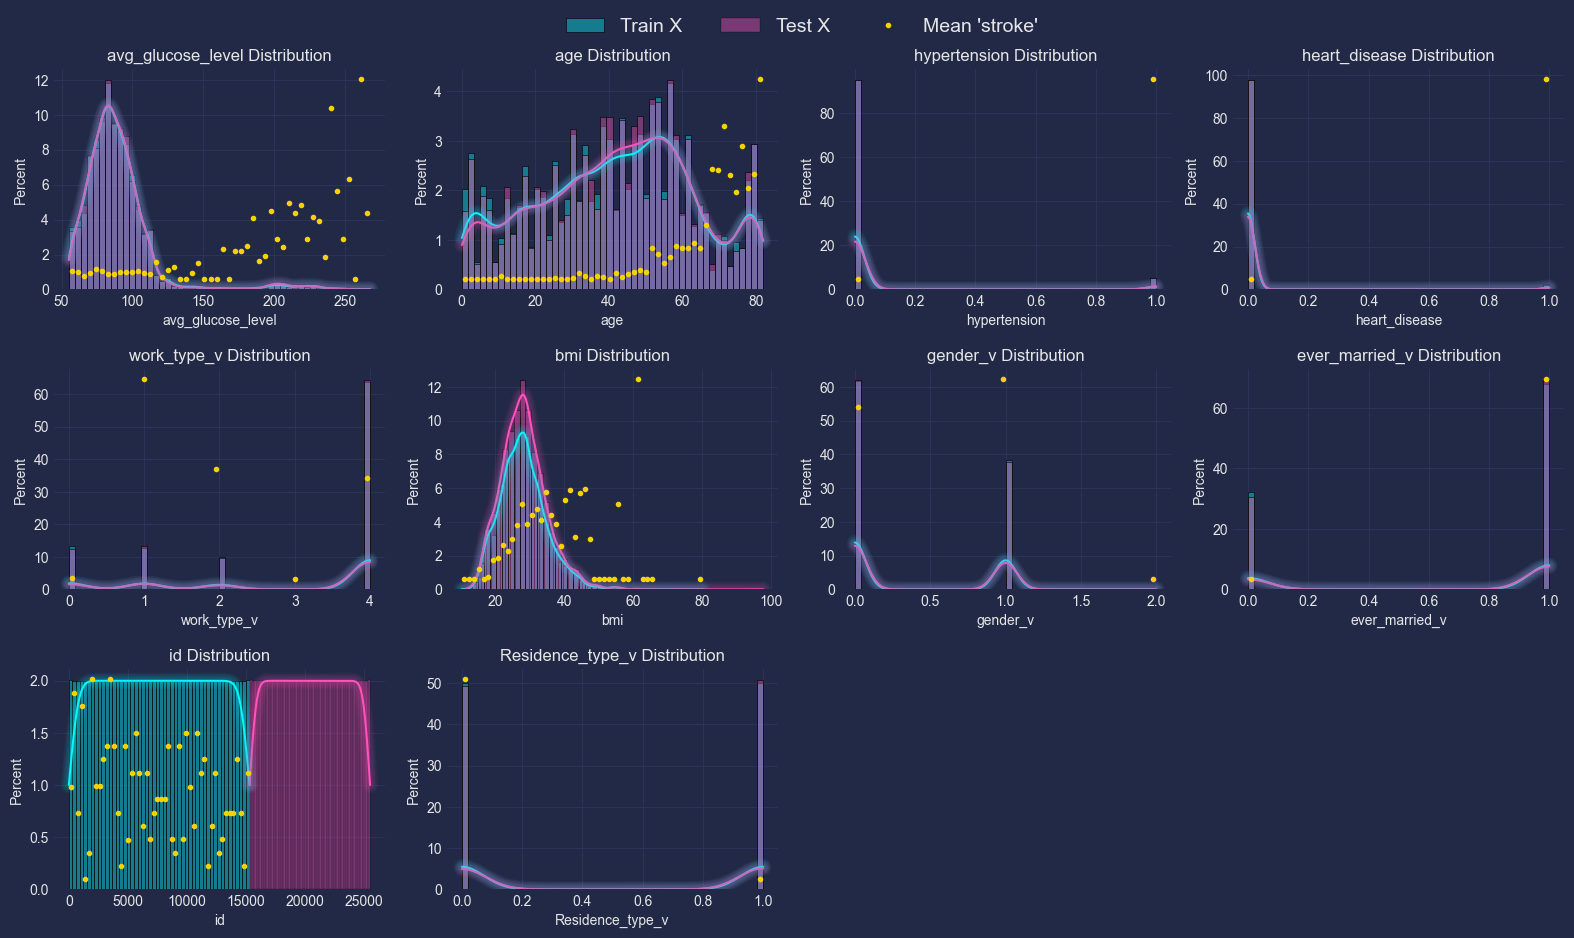

In [165]:
import math

n_bins = 50
histplot_hyperparams = {
    'kde':True,
    'alpha':0.4,
    'stat':'percent',
    'bins':n_bins
}

n_cols = 4
n_rows = math.ceil(len(features) / n_cols)
cell_with_dim = 4
cell_height_dim = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * cell_with_dim, n_rows * cell_height_dim))

plt.tight_layout(pad=2, h_pad=4, w_pad=None, rect=None)
plt.style.use("cyberpunk")

for a in ax[n_rows - 1, int(((n_rows - (len(features) / n_cols)) * n_cols*-1)):]:
    a.axis('off')

handles = []
labels = []
    
for i, feature in enumerate(features):
    row = math.ceil(i / n_cols) - 1
    col = (i % n_cols)
    sns.histplot(train_set[feature], label='Train X', ax=ax[row, col], **histplot_hyperparams)
    sns.histplot(test_set[feature], label='Test X', ax=ax[row, col], **histplot_hyperparams)
    ax[row, col].set_title(f'{feature} Distribution');
    ax2 = add_secondary_plot(train_set, feature, target[0], ax[row, col], n_bins, color = list(mplcyberpunk.cyberpunk_stylesheets['cyberpunk']['axes.prop_cycle'])[2]['color'])
    mplcyberpunk.make_lines_glow(ax[row, col])
    
    obj = ax[row, col].get_legend_handles_labels()
    if obj[1][0] not in labels: 
        labels.extend(obj[1])
        handles.extend(obj[0])
    
    obj = ax2.get_legend_handles_labels()

    if obj[1][0] not in labels: 
        labels.extend(obj[1])
        handles.extend(obj[0])

fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.04), fontsize=14, ncol=3)

In [141]:
math.ceil(len(features) / n_cols)

3

In [142]:
((math.ceil(len(features) / n_cols) - (len(features) / n_cols)) * n_cols*-1)

-2.0

In [143]:
int(((math.ceil(len(features) / n_cols) - (len(features) / n_cols)) * n_cols*-1))

-2

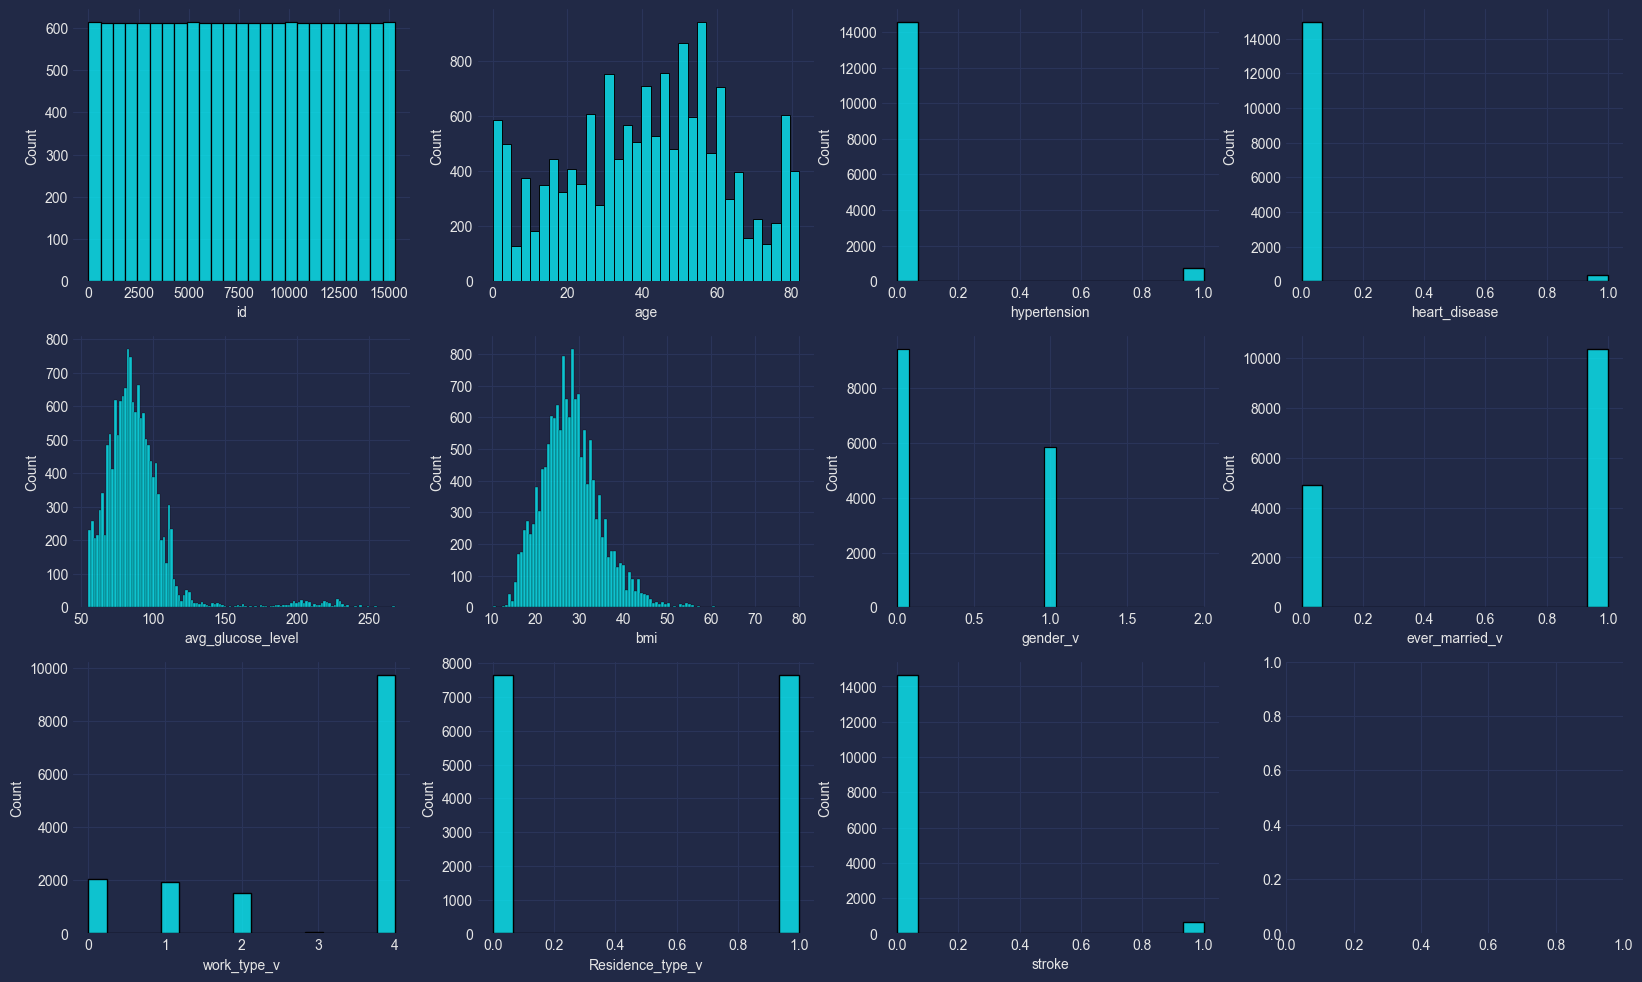

In [144]:
fig, axes = plt.subplots(3,4, figsize=(20, 12))
for i, j in zip(features+target, axes.flatten()):
    sns.histplot(train_set[i], ax=j)
plt.show()

### Correlation matrix (heatmap style)

<AxesSubplot: >

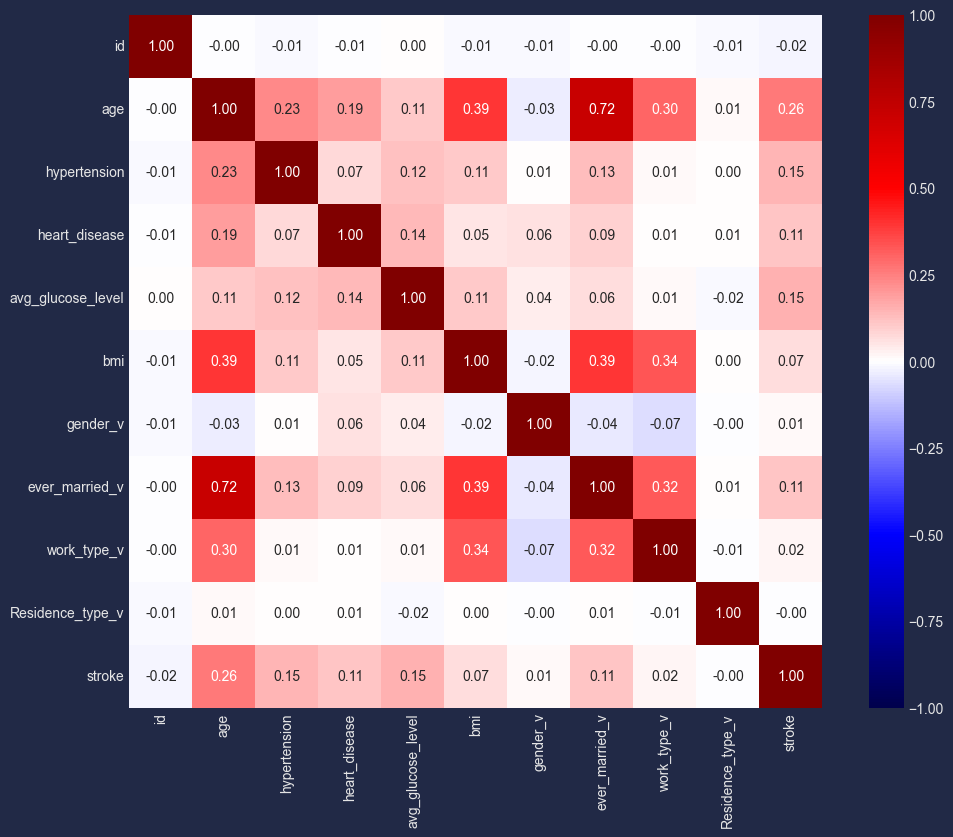

In [145]:
corrmat = train_set[features+target].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, annot=True, fmt='.2f', cmap='seismic', vmin=-1, vmax=1)

# Train Model

In [146]:
import lightgbm as lgbm
from xgboost import XGBRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
from lightgbm.sklearn import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import roc_curve, auc,recall_score,precision_score

In [147]:
scaler = MinMaxScaler().fit(train_set[features])
X = scaler.transform(train_set[features])
X_test = scaler.transform(test_set[features])

scaler = MinMaxScaler().fit(train_set[target])
Y = scaler.transform(train_set[target])

In [148]:
kf = KFold(n_splits=10, random_state=1, shuffle=True)
clfs = []
err = []

In [149]:
y_min = Y.min()
y_max = Y.max()

print(y_min, y_max)

def my_rmse(y_true, y_hat):
    y_true[y_true < y_min] = y_min
    y_true[y_true > y_max] = y_max
    
    y_hat[y_hat < y_min] = y_min
    y_hat[y_hat > y_max] = y_max
    
    y_true_nan = np.isnan(y_true)
    y_hat_nan = np.isnan(y_hat)
    
    if y_true_nan.sum() > 0:
        print(y_true_nan.sum())
        np.where(y_true_nan, np.ma.array(y_true, mask=np.isnan(y_true)).mean(axis=0), y_true)
    if y_hat_nan.sum() > 0:
        print(y_hat_nan.sum())
        np.where(y_hat_nan, np.ma.array(y_hat, mask=np.isnan(y_hat)).mean(axis=0), y_hat)
    
    return mean_squared_error(y_true, y_hat, squared=False)

0.0 1.0


In [150]:
def xgb_objective(trial):
    # Split the train data for each trial.
    X_train, X_valid, y_train, y_valid = train_test_split(X, Y, stratify=Y, test_size=0.4)

    param_grid = {
        'max_depth': trial.suggest_int('max_depth', 4, 20), # Extremely prone to overfitting!
        'n_estimators': trial.suggest_int('n_estimators', 2, 100, 1), # Extremely prone to overfitting!
        'eta': trial.suggest_float('eta', 0.0007, 0.113), # Most important parameter.
        'subsample': trial.suggest_float('subsample', 0.1, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 1, 40), # L2 regularization

    } 
    
    reg = xgb.XGBModel(
        # These parameters should help with trial speed.
        objective='binary:logistic',
        tree_method='gpu_hist',
        booster='gbtree',
        predictor='gpu_predictor',
        n_jobs=4,
        eval_metric='auc',
        **param_grid
    )
    
    reg.fit(X_train, y_train,
            eval_set=[(X_valid, y_valid)],
            verbose=False)
    
    preds = reg.predict(X_valid)
    fpr, tpr, _ = roc_curve(y_valid, preds)
    roc_auc = auc(fpr, tpr)

    xgb_ranks[roc_auc] = reg
    
    # Returns the best RMSE for the trial.
    # Readers may want to try returning a cross validation score here.
    print(roc_auc)
    return roc_auc

In [151]:
xgb_ranks = {}

train_time = 1 * 60 * 60
study = optuna.create_study(direction='maximize', sampler=TPESampler(), study_name='XGBRegressor')
study.optimize(xgb_objective, timeout=train_time)


[I 2023-01-14 21:28:22,335] A new study created in memory with name: XGBRegressor
[I 2023-01-14 21:28:22,762] Trial 0 finished with value: 0.8133028971813446 and parameters: {'max_depth': 19, 'n_estimators': 30, 'eta': 0.017124396703128382, 'subsample': 0.4321469600823118, 'colsample_bytree': 0.5500336975988706, 'reg_lambda': 32.552445261239214}. Best is trial 0 with value: 0.8133028971813446.


0.8133028971813446
0.8643997368096726


[I 2023-01-14 21:28:22,944] Trial 1 finished with value: 0.8643997368096726 and parameters: {'max_depth': 4, 'n_estimators': 37, 'eta': 0.011012650350898354, 'subsample': 0.8244495343721763, 'colsample_bytree': 0.6256754573476773, 'reg_lambda': 5.6602654361320495}. Best is trial 1 with value: 0.8643997368096726.
[I 2023-01-14 21:28:23,280] Trial 2 finished with value: 0.8049495675341126 and parameters: {'max_depth': 9, 'n_estimators': 65, 'eta': 0.005818985903253168, 'subsample': 0.47511184241826077, 'colsample_bytree': 0.8855402625929083, 'reg_lambda': 25.75682260415852}. Best is trial 1 with value: 0.8643997368096726.
[I 2023-01-14 21:28:23,438] Trial 3 finished with value: 0.8054378300401992 and parameters: {'max_depth': 13, 'n_estimators': 21, 'eta': 0.04265477000975941, 'subsample': 0.8983912942781935, 'colsample_bytree': 0.41912350194356407, 'reg_lambda': 29.17987201727109}. Best is trial 1 with value: 0.8643997368096726.


0.8049495675341126
0.8054378300401992


[I 2023-01-14 21:28:23,707] Trial 4 finished with value: 0.8112932760528455 and parameters: {'max_depth': 5, 'n_estimators': 70, 'eta': 0.005346471559543927, 'subsample': 0.7338865985245691, 'colsample_bytree': 0.47424198520744476, 'reg_lambda': 8.563061320199067}. Best is trial 1 with value: 0.8643997368096726.


0.8112932760528455


[I 2023-01-14 21:28:24,045] Trial 5 finished with value: 0.8727294951635072 and parameters: {'max_depth': 7, 'n_estimators': 58, 'eta': 0.03008296068896491, 'subsample': 0.9762323873890627, 'colsample_bytree': 0.602722009057029, 'reg_lambda': 24.517442365935377}. Best is trial 5 with value: 0.8727294951635072.


0.8727294951635072


[I 2023-01-14 21:28:24,571] Trial 6 finished with value: 0.8809545296281055 and parameters: {'max_depth': 11, 'n_estimators': 71, 'eta': 0.10191364119234138, 'subsample': 0.8782365933878897, 'colsample_bytree': 0.5510773367653186, 'reg_lambda': 1.5572251683848608}. Best is trial 6 with value: 0.8809545296281055.
[I 2023-01-14 21:28:24,743] Trial 7 finished with value: 0.7894214729095124 and parameters: {'max_depth': 6, 'n_estimators': 30, 'eta': 0.018909539431216694, 'subsample': 0.8858217033820752, 'colsample_bytree': 0.46981080648976514, 'reg_lambda': 21.141987603611526}. Best is trial 6 with value: 0.8809545296281055.


0.8809545296281055
0.7894214729095124


[I 2023-01-14 21:28:24,918] Trial 8 finished with value: 0.7926975459589711 and parameters: {'max_depth': 5, 'n_estimators': 18, 'eta': 0.04327514116551902, 'subsample': 0.41472648768358145, 'colsample_bytree': 0.7511397573067284, 'reg_lambda': 36.12522229012388}. Best is trial 6 with value: 0.8809545296281055.


0.7926975459589711


[I 2023-01-14 21:28:25,421] Trial 9 finished with value: 0.8690109552637055 and parameters: {'max_depth': 18, 'n_estimators': 92, 'eta': 0.1118654949793494, 'subsample': 0.9711111656036928, 'colsample_bytree': 0.2748170987245895, 'reg_lambda': 6.720557513025007}. Best is trial 6 with value: 0.8809545296281055.


0.8690109552637055


[I 2023-01-14 21:28:25,780] Trial 10 finished with value: 0.8738397030825191 and parameters: {'max_depth': 13, 'n_estimators': 100, 'eta': 0.0981940344330895, 'subsample': 0.1627483535540301, 'colsample_bytree': 0.1238236981943811, 'reg_lambda': 15.890019648073176}. Best is trial 6 with value: 0.8809545296281055.


0.8738397030825191


[I 2023-01-14 21:28:26,080] Trial 11 finished with value: 0.8764645349686873 and parameters: {'max_depth': 13, 'n_estimators': 100, 'eta': 0.10017965072954989, 'subsample': 0.10322587161729879, 'colsample_bytree': 0.18474572042427434, 'reg_lambda': 14.767978844244897}. Best is trial 6 with value: 0.8809545296281055.


0.8764645349686873


[I 2023-01-14 21:28:26,455] Trial 12 finished with value: 0.8641983706175073 and parameters: {'max_depth': 10, 'n_estimators': 82, 'eta': 0.07791296921025129, 'subsample': 0.19592239478177725, 'colsample_bytree': 0.3085438616660051, 'reg_lambda': 14.36494540262498}. Best is trial 6 with value: 0.8809545296281055.


0.8641983706175073


[I 2023-01-14 21:28:27,118] Trial 13 finished with value: 0.8813845373662245 and parameters: {'max_depth': 16, 'n_estimators': 78, 'eta': 0.07470005933575294, 'subsample': 0.6438096029760232, 'colsample_bytree': 0.7619846475896062, 'reg_lambda': 1.9037716406753795}. Best is trial 13 with value: 0.8813845373662245.


0.8813845373662245


[I 2023-01-14 21:28:27,740] Trial 14 finished with value: 0.8740973036460751 and parameters: {'max_depth': 16, 'n_estimators': 78, 'eta': 0.07267931351178111, 'subsample': 0.6487136750736883, 'colsample_bytree': 0.9484574638444769, 'reg_lambda': 3.0886314001842123}. Best is trial 13 with value: 0.8813845373662245.


0.8740973036460751


[I 2023-01-14 21:28:28,101] Trial 15 finished with value: 0.8838713088196372 and parameters: {'max_depth': 16, 'n_estimators': 41, 'eta': 0.075879155879603, 'subsample': 0.6535899451026179, 'colsample_bytree': 0.753779460242237, 'reg_lambda': 2.3197044106220273}. Best is trial 15 with value: 0.8838713088196372.


0.8838713088196372


[I 2023-01-14 21:28:28,406] Trial 16 finished with value: 0.8785357781927822 and parameters: {'max_depth': 16, 'n_estimators': 45, 'eta': 0.07110878016466793, 'subsample': 0.6113121608706139, 'colsample_bytree': 0.7483149395933236, 'reg_lambda': 10.229387475252718}. Best is trial 15 with value: 0.8838713088196372.
[I 2023-01-14 21:28:28,540] Trial 17 finished with value: 0.8846666716054137 and parameters: {'max_depth': 16, 'n_estimators': 6, 'eta': 0.08644480901968304, 'subsample': 0.7039916952406414, 'colsample_bytree': 0.7769564467247762, 'reg_lambda': 1.244163456264737}. Best is trial 17 with value: 0.8846666716054137.


0.8785357781927822
0.8846666716054137


[I 2023-01-14 21:28:28,657] Trial 18 finished with value: 0.7793023166540617 and parameters: {'max_depth': 15, 'n_estimators': 5, 'eta': 0.05852627265301164, 'subsample': 0.3203761513850978, 'colsample_bytree': 0.8422329817332834, 'reg_lambda': 11.279174795907695}. Best is trial 17 with value: 0.8846666716054137.
[I 2023-01-14 21:28:28,815] Trial 19 finished with value: 0.8823735214906215 and parameters: {'max_depth': 20, 'n_estimators': 7, 'eta': 0.08769853306682741, 'subsample': 0.7467856344098227, 'colsample_bytree': 0.6501663805597578, 'reg_lambda': 5.4760888657065845}. Best is trial 17 with value: 0.8846666716054137.


0.7793023166540617
0.8823735214906215


[I 2023-01-14 21:28:29,139] Trial 20 finished with value: 0.8870695966008848 and parameters: {'max_depth': 18, 'n_estimators': 49, 'eta': 0.059750150795747, 'subsample': 0.5419252925974047, 'colsample_bytree': 0.9836401900459624, 'reg_lambda': 19.335143705670916}. Best is trial 20 with value: 0.8870695966008848.


0.8870695966008848


[I 2023-01-14 21:28:29,452] Trial 21 finished with value: 0.8711657082129793 and parameters: {'max_depth': 18, 'n_estimators': 48, 'eta': 0.05810399446040517, 'subsample': 0.5401403666999998, 'colsample_bytree': 0.9303639915305191, 'reg_lambda': 20.19391190008306}. Best is trial 20 with value: 0.8870695966008848.


0.8711657082129793


[I 2023-01-14 21:28:29,908] Trial 22 finished with value: 0.8866331909402723 and parameters: {'max_depth': 15, 'n_estimators': 58, 'eta': 0.08458166121366088, 'subsample': 0.7416103182703087, 'colsample_bytree': 0.9933457575501738, 'reg_lambda': 19.404508838825024}. Best is trial 20 with value: 0.8870695966008848.


0.8866331909402723


[I 2023-01-14 21:28:30,321] Trial 23 finished with value: 0.8819913298048229 and parameters: {'max_depth': 14, 'n_estimators': 58, 'eta': 0.08567021105087988, 'subsample': 0.7210779201820647, 'colsample_bytree': 0.9829492000475996, 'reg_lambda': 39.164514691495334}. Best is trial 20 with value: 0.8870695966008848.


0.8819913298048229


[I 2023-01-14 21:28:30,733] Trial 24 finished with value: 0.8891644111183772 and parameters: {'max_depth': 18, 'n_estimators': 57, 'eta': 0.06426190322817674, 'subsample': 0.5546668066725248, 'colsample_bytree': 0.837723585185344, 'reg_lambda': 18.13058450321138}. Best is trial 24 with value: 0.8891644111183772.


0.8891644111183772


[I 2023-01-14 21:28:31,105] Trial 25 finished with value: 0.8744895973147583 and parameters: {'max_depth': 18, 'n_estimators': 56, 'eta': 0.04984517443353564, 'subsample': 0.5586706975409617, 'colsample_bytree': 0.9976248306009594, 'reg_lambda': 19.381759797944316}. Best is trial 24 with value: 0.8891644111183772.


0.8744895973147583


[I 2023-01-14 21:28:31,416] Trial 26 finished with value: 0.8777276195620184 and parameters: {'max_depth': 20, 'n_estimators': 51, 'eta': 0.06418590222116276, 'subsample': 0.33743007099012845, 'colsample_bytree': 0.867913531208685, 'reg_lambda': 24.03080273786024}. Best is trial 24 with value: 0.8891644111183772.


0.8777276195620184


[I 2023-01-14 21:28:31,817] Trial 27 finished with value: 0.8680108589581355 and parameters: {'max_depth': 18, 'n_estimators': 64, 'eta': 0.04896714793361469, 'subsample': 0.4975196003688932, 'colsample_bytree': 0.8463509662135168, 'reg_lambda': 17.713916318973524}. Best is trial 24 with value: 0.8891644111183772.


0.8680108589581355


[I 2023-01-14 21:28:32,100] Trial 28 finished with value: 0.8698723176709946 and parameters: {'max_depth': 17, 'n_estimators': 35, 'eta': 0.06732925502972523, 'subsample': 0.8034935316393701, 'colsample_bytree': 0.9171530186142085, 'reg_lambda': 27.697354743737066}. Best is trial 24 with value: 0.8891644111183772.


0.8698723176709946


[I 2023-01-14 21:28:32,417] Trial 29 finished with value: 0.818393286356868 and parameters: {'max_depth': 19, 'n_estimators': 51, 'eta': 0.033726184968461664, 'subsample': 0.38351457960284785, 'colsample_bytree': 0.6883325545964805, 'reg_lambda': 22.279511184540777}. Best is trial 24 with value: 0.8891644111183772.


0.818393286356868
0.7981960552430302


[I 2023-01-14 21:28:32,598] Trial 30 finished with value: 0.7981960552430302 and parameters: {'max_depth': 14, 'n_estimators': 22, 'eta': 0.062422197076448166, 'subsample': 0.5422937886445905, 'colsample_bytree': 0.8162497668281313, 'reg_lambda': 30.82428319807463}. Best is trial 24 with value: 0.8891644111183772.
[I 2023-01-14 21:28:32,759] Trial 31 finished with value: 0.818237715820446 and parameters: {'max_depth': 17, 'n_estimators': 13, 'eta': 0.08667164990282193, 'subsample': 0.7136750543171961, 'colsample_bytree': 0.9910173989156056, 'reg_lambda': 12.331614132663933}. Best is trial 24 with value: 0.8891644111183772.


0.818237715820446


[I 2023-01-14 21:28:33,002] Trial 32 finished with value: 0.8621742699802067 and parameters: {'max_depth': 15, 'n_estimators': 27, 'eta': 0.09417428660536452, 'subsample': 0.5851054475650106, 'colsample_bytree': 0.9231309816771586, 'reg_lambda': 16.587991607316248}. Best is trial 24 with value: 0.8891644111183772.


0.8621742699802067


[I 2023-01-14 21:28:33,336] Trial 33 finished with value: 0.8881838453130503 and parameters: {'max_depth': 19, 'n_estimators': 40, 'eta': 0.0799727332618817, 'subsample': 0.7925124996315129, 'colsample_bytree': 0.8018926962877243, 'reg_lambda': 18.849840479052745}. Best is trial 24 with value: 0.8891644111183772.


0.8881838453130503


[I 2023-01-14 21:28:33,690] Trial 34 finished with value: 0.876633574815622 and parameters: {'max_depth': 19, 'n_estimators': 40, 'eta': 0.08034829754635021, 'subsample': 0.8001130792597747, 'colsample_bytree': 0.8946362790298337, 'reg_lambda': 18.16787419198106}. Best is trial 24 with value: 0.8891644111183772.


0.876633574815622


[I 2023-01-14 21:28:34,162] Trial 35 finished with value: 0.8884404356783179 and parameters: {'max_depth': 20, 'n_estimators': 63, 'eta': 0.054229078349153095, 'subsample': 0.47616774823460506, 'colsample_bytree': 0.7025175674538224, 'reg_lambda': 22.219026835954942}. Best is trial 24 with value: 0.8891644111183772.


0.8884404356783179


[I 2023-01-14 21:28:34,420] Trial 36 finished with value: 0.8701093775360186 and parameters: {'max_depth': 20, 'n_estimators': 35, 'eta': 0.051833335523908064, 'subsample': 0.4830305942117449, 'colsample_bytree': 0.6997720835945519, 'reg_lambda': 26.85481297323359}. Best is trial 24 with value: 0.8891644111183772.


0.8701093775360186


[I 2023-01-14 21:28:34,838] Trial 37 finished with value: 0.8563703440802717 and parameters: {'max_depth': 19, 'n_estimators': 64, 'eta': 0.036176181406723545, 'subsample': 0.29630353146767485, 'colsample_bytree': 0.8095522377237924, 'reg_lambda': 22.50343168739649}. Best is trial 24 with value: 0.8891644111183772.


0.8563703440802717


[I 2023-01-14 21:28:35,217] Trial 38 finished with value: 0.817633953976713 and parameters: {'max_depth': 20, 'n_estimators': 68, 'eta': 0.020546752425804386, 'subsample': 0.44561346427484405, 'colsample_bytree': 0.5596539547162546, 'reg_lambda': 24.81767388838939}. Best is trial 24 with value: 0.8891644111183772.


0.817633953976713


[I 2023-01-14 21:28:35,573] Trial 39 finished with value: 0.8745970150660974 and parameters: {'max_depth': 17, 'n_estimators': 54, 'eta': 0.04390423294203603, 'subsample': 0.37466830211286517, 'colsample_bytree': 0.6920727042055443, 'reg_lambda': 13.333312580302096}. Best is trial 24 with value: 0.8891644111183772.


0.8745970150660974


[I 2023-01-14 21:28:35,861] Trial 40 finished with value: 0.8742828433983878 and parameters: {'max_depth': 9, 'n_estimators': 43, 'eta': 0.06780998762662371, 'subsample': 0.2553086091154068, 'colsample_bytree': 0.6284532893559119, 'reg_lambda': 22.584051781189743}. Best is trial 24 with value: 0.8891644111183772.


0.8742828433983878


[I 2023-01-14 21:28:36,361] Trial 41 finished with value: 0.8937220890631219 and parameters: {'max_depth': 19, 'n_estimators': 60, 'eta': 0.05278820155417292, 'subsample': 0.8489468965768967, 'colsample_bytree': 0.8674094884623862, 'reg_lambda': 18.936224812151522}. Best is trial 41 with value: 0.8937220890631219.


0.8937220890631219


[I 2023-01-14 21:28:36,863] Trial 42 finished with value: 0.8810696922329895 and parameters: {'max_depth': 19, 'n_estimators': 62, 'eta': 0.05436590815110793, 'subsample': 0.9062566334892933, 'colsample_bytree': 0.8137756410756941, 'reg_lambda': 17.640413504542906}. Best is trial 41 with value: 0.8937220890631219.


0.8810696922329895


[I 2023-01-14 21:28:37,388] Trial 43 finished with value: 0.8942170862244646 and parameters: {'max_depth': 19, 'n_estimators': 71, 'eta': 0.05856684774099096, 'subsample': 0.8579535793173747, 'colsample_bytree': 0.8869555780987217, 'reg_lambda': 21.066999091289954}. Best is trial 43 with value: 0.8942170862244646.


0.8942170862244646


[I 2023-01-14 21:28:37,932] Trial 44 finished with value: 0.8790782546736824 and parameters: {'max_depth': 19, 'n_estimators': 74, 'eta': 0.045664783154443986, 'subsample': 0.8541704210219991, 'colsample_bytree': 0.8744875784653724, 'reg_lambda': 21.356703879462017}. Best is trial 43 with value: 0.8942170862244646.


0.8790782546736824


[I 2023-01-14 21:28:38,444] Trial 45 finished with value: 0.8875703182191954 and parameters: {'max_depth': 20, 'n_estimators': 69, 'eta': 0.03939052035506396, 'subsample': 0.9981472213620758, 'colsample_bytree': 0.7283082783230457, 'reg_lambda': 15.396658611534438}. Best is trial 43 with value: 0.8942170862244646.


0.8875703182191954


[I 2023-01-14 21:28:38,978] Trial 46 finished with value: 0.8763554335535341 and parameters: {'max_depth': 17, 'n_estimators': 88, 'eta': 0.02921609825106291, 'subsample': 0.948830294506248, 'colsample_bytree': 0.7903318109583533, 'reg_lambda': 24.130707357741308}. Best is trial 43 with value: 0.8942170862244646.


0.8763554335535341


[I 2023-01-14 21:28:39,420] Trial 47 finished with value: 0.8909996046757365 and parameters: {'max_depth': 18, 'n_estimators': 61, 'eta': 0.05417424158017745, 'subsample': 0.9351142054599302, 'colsample_bytree': 0.8452820706792825, 'reg_lambda': 29.497039495159676}. Best is trial 43 with value: 0.8942170862244646.


0.8909996046757365


[I 2023-01-14 21:28:39,861] Trial 48 finished with value: 0.8788257051015687 and parameters: {'max_depth': 18, 'n_estimators': 76, 'eta': 0.05483365964917202, 'subsample': 0.9287314476522768, 'colsample_bytree': 0.5775880009502415, 'reg_lambda': 30.17336601938674}. Best is trial 43 with value: 0.8942170862244646.


0.8788257051015687


[I 2023-01-14 21:28:40,211] Trial 49 finished with value: 0.8797830363462609 and parameters: {'max_depth': 12, 'n_estimators': 61, 'eta': 0.06443024524295213, 'subsample': 0.8510895842562373, 'colsample_bytree': 0.4656633543054193, 'reg_lambda': 32.42125861526965}. Best is trial 43 with value: 0.8942170862244646.


0.8797830363462609


[I 2023-01-14 21:28:40,668] Trial 50 finished with value: 0.8902392620972928 and parameters: {'max_depth': 7, 'n_estimators': 83, 'eta': 0.04836781172681527, 'subsample': 0.8893459235303471, 'colsample_bytree': 0.8421690688207502, 'reg_lambda': 27.559280608814454}. Best is trial 43 with value: 0.8942170862244646.


0.8902392620972928


[I 2023-01-14 21:28:41,192] Trial 51 finished with value: 0.8894159504922022 and parameters: {'max_depth': 7, 'n_estimators': 86, 'eta': 0.047805083540332985, 'subsample': 0.8857351873484659, 'colsample_bytree': 0.8463996624611874, 'reg_lambda': 26.606839635984983}. Best is trial 43 with value: 0.8942170862244646.


0.8894159504922022


[I 2023-01-14 21:28:41,716] Trial 52 finished with value: 0.8845575701902607 and parameters: {'max_depth': 8, 'n_estimators': 85, 'eta': 0.04836788731661067, 'subsample': 0.8559704519714394, 'colsample_bytree': 0.8584701475979319, 'reg_lambda': 28.04615484021165}. Best is trial 43 with value: 0.8942170862244646.


0.8845575701902607


[I 2023-01-14 21:28:42,112] Trial 53 finished with value: 0.888391946160472 and parameters: {'max_depth': 6, 'n_estimators': 83, 'eta': 0.04007185387722524, 'subsample': 0.9141800745185235, 'colsample_bytree': 0.8907509506919071, 'reg_lambda': 34.828564132952565}. Best is trial 43 with value: 0.8942170862244646.


0.888391946160472


[I 2023-01-14 21:28:42,608] Trial 54 finished with value: 0.8770918681058175 and parameters: {'max_depth': 7, 'n_estimators': 94, 'eta': 0.026416961285644185, 'subsample': 0.9556510975986912, 'colsample_bytree': 0.9529169160390766, 'reg_lambda': 26.85465964609166}. Best is trial 43 with value: 0.8942170862244646.


0.8770918681058175


[I 2023-01-14 21:28:43,002] Trial 55 finished with value: 0.7882028370408733 and parameters: {'max_depth': 10, 'n_estimators': 72, 'eta': 0.01047052687983286, 'subsample': 0.8800444106064117, 'colsample_bytree': 0.8371110787756121, 'reg_lambda': 33.058770340656444}. Best is trial 43 with value: 0.8942170862244646.


0.7882028370408733


[I 2023-01-14 21:28:43,308] Trial 56 finished with value: 0.8820071562446754 and parameters: {'max_depth': 4, 'n_estimators': 79, 'eta': 0.061091545147117246, 'subsample': 0.7787487912713105, 'colsample_bytree': 0.3745665390951949, 'reg_lambda': 25.502240644993684}. Best is trial 43 with value: 0.8942170862244646.


0.8820071562446754


[I 2023-01-14 21:28:43,700] Trial 57 finished with value: 0.8917161719950137 and parameters: {'max_depth': 7, 'n_estimators': 67, 'eta': 0.06950460721455198, 'subsample': 0.9927318378710819, 'colsample_bytree': 0.7339074922520921, 'reg_lambda': 28.688152767817463}. Best is trial 43 with value: 0.8942170862244646.


0.8917161719950137


[I 2023-01-14 21:28:44,179] Trial 58 finished with value: 0.8860718574246543 and parameters: {'max_depth': 7, 'n_estimators': 91, 'eta': 0.045852226913249666, 'subsample': 0.9896704936446286, 'colsample_bytree': 0.904423671332311, 'reg_lambda': 31.1832281528365}. Best is trial 43 with value: 0.8942170862244646.


0.8860718574246543


[I 2023-01-14 21:28:44,520] Trial 59 finished with value: 0.8832742816311603 and parameters: {'max_depth': 6, 'n_estimators': 67, 'eta': 0.07060832275265455, 'subsample': 0.8389544177719376, 'colsample_bytree': 0.773180272503412, 'reg_lambda': 29.905195988959992}. Best is trial 43 with value: 0.8942170862244646.


0.8832742816311603


[I 2023-01-14 21:28:44,985] Trial 60 finished with value: 0.8713909824313048 and parameters: {'max_depth': 8, 'n_estimators': 72, 'eta': 0.04116655082454949, 'subsample': 0.9361783366988485, 'colsample_bytree': 0.9475346320547748, 'reg_lambda': 28.00961732650405}. Best is trial 43 with value: 0.8942170862244646.


0.8713909824313048


[I 2023-01-14 21:28:45,393] Trial 61 finished with value: 0.8721829778894532 and parameters: {'max_depth': 5, 'n_estimators': 96, 'eta': 0.05744662732151505, 'subsample': 0.89567390451328, 'colsample_bytree': 0.7380398864427152, 'reg_lambda': 29.336372745940256}. Best is trial 43 with value: 0.8942170862244646.


0.8721829778894532


[I 2023-01-14 21:28:45,866] Trial 62 finished with value: 0.8949784390011967 and parameters: {'max_depth': 8, 'n_estimators': 81, 'eta': 0.06710883060034177, 'subsample': 0.9711255566002883, 'colsample_bytree': 0.8527701966503903, 'reg_lambda': 34.35951013986094}. Best is trial 62 with value: 0.8949784390011967.


0.8949784390011967


[I 2023-01-14 21:28:46,315] Trial 63 finished with value: 0.8761008635848436 and parameters: {'max_depth': 8, 'n_estimators': 80, 'eta': 0.052188900152283724, 'subsample': 0.9722308890571212, 'colsample_bytree': 0.8364056218874466, 'reg_lambda': 35.98833343692043}. Best is trial 62 with value: 0.8949784390011967.


0.8761008635848436


[I 2023-01-14 21:28:46,844] Trial 64 finished with value: 0.893543957431591 and parameters: {'max_depth': 9, 'n_estimators': 86, 'eta': 0.06941545781613276, 'subsample': 0.926218748285624, 'colsample_bytree': 0.8676409596586443, 'reg_lambda': 38.00797792947259}. Best is trial 62 with value: 0.8949784390011967.


0.893543957431591


[I 2023-01-14 21:28:47,335] Trial 65 finished with value: 0.884632998329132 and parameters: {'max_depth': 10, 'n_estimators': 75, 'eta': 0.06836995801632194, 'subsample': 0.9580921981274082, 'colsample_bytree': 0.8785792430954423, 'reg_lambda': 38.918002388847675}. Best is trial 62 with value: 0.8949784390011967.


0.884632998329132


[I 2023-01-14 21:28:47,879] Trial 66 finished with value: 0.8928216656553459 and parameters: {'max_depth': 9, 'n_estimators': 81, 'eta': 0.07372550028932207, 'subsample': 0.9232136328038716, 'colsample_bytree': 0.9620080186377538, 'reg_lambda': 34.44617720419405}. Best is trial 62 with value: 0.8949784390011967.


0.8928216656553459


[I 2023-01-14 21:28:48,444] Trial 67 finished with value: 0.8939157104017423 and parameters: {'max_depth': 9, 'n_estimators': 89, 'eta': 0.07496802807365316, 'subsample': 0.8255233195063466, 'colsample_bytree': 0.9505278214875615, 'reg_lambda': 37.46097379945146}. Best is trial 62 with value: 0.8949784390011967.


0.8939157104017423


[I 2023-01-14 21:28:48,974] Trial 68 finished with value: 0.8812239158383601 and parameters: {'max_depth': 9, 'n_estimators': 90, 'eta': 0.07628829909525033, 'subsample': 0.8232873753423442, 'colsample_bytree': 0.9550120993325115, 'reg_lambda': 37.960929451434374}. Best is trial 62 with value: 0.8949784390011967.


0.8812239158383601


[I 2023-01-14 21:28:49,602] Trial 69 finished with value: 0.88514415866309 and parameters: {'max_depth': 11, 'n_estimators': 99, 'eta': 0.07298005776519521, 'subsample': 0.7526067185905223, 'colsample_bytree': 0.9630056427950784, 'reg_lambda': 37.288028018859826}. Best is trial 62 with value: 0.8949784390011967.


0.88514415866309


[I 2023-01-14 21:28:50,117] Trial 70 finished with value: 0.8863126213500694 and parameters: {'max_depth': 9, 'n_estimators': 87, 'eta': 0.08255550654304072, 'subsample': 0.668947929259154, 'colsample_bytree': 0.9264088636937375, 'reg_lambda': 34.40423857942815}. Best is trial 62 with value: 0.8949784390011967.


0.8863126213500694


[I 2023-01-14 21:28:50,690] Trial 71 finished with value: 0.8827099175206771 and parameters: {'max_depth': 11, 'n_estimators': 81, 'eta': 0.08983657457551211, 'subsample': 0.9224956898419397, 'colsample_bytree': 0.9093749381609666, 'reg_lambda': 35.90916546389858}. Best is trial 62 with value: 0.8949784390011967.


0.8827099175206771


[I 2023-01-14 21:28:51,234] Trial 72 finished with value: 0.872154018871851 and parameters: {'max_depth': 10, 'n_estimators': 77, 'eta': 0.06613563514789188, 'subsample': 0.969787355302436, 'colsample_bytree': 0.8873121977174977, 'reg_lambda': 33.31065909165971}. Best is trial 62 with value: 0.8949784390011967.


0.872154018871851


[I 2023-01-14 21:28:51,620] Trial 73 finished with value: 0.8781320356101633 and parameters: {'max_depth': 8, 'n_estimators': 60, 'eta': 0.07154282056478356, 'subsample': 0.998093197027361, 'colsample_bytree': 0.9431683550607287, 'reg_lambda': 37.351883695663865}. Best is trial 62 with value: 0.8949784390011967.


0.8781320356101633


[I 2023-01-14 21:28:51,982] Trial 74 finished with value: 0.8763877598987647 and parameters: {'max_depth': 9, 'n_estimators': 66, 'eta': 0.060798475621239245, 'subsample': 0.9318827601357259, 'colsample_bytree': 0.5059494396329691, 'reg_lambda': 31.824670588550106}. Best is trial 62 with value: 0.8949784390011967.


0.8763877598987647


[I 2023-01-14 21:28:52,472] Trial 75 finished with value: 0.8781795149297206 and parameters: {'max_depth': 11, 'n_estimators': 71, 'eta': 0.07776056668602718, 'subsample': 0.8305177649189079, 'colsample_bytree': 0.9711828132412017, 'reg_lambda': 39.70845936277422}. Best is trial 62 with value: 0.8949784390011967.


0.8781795149297206


[I 2023-01-14 21:28:52,806] Trial 76 finished with value: 0.876618758574058 and parameters: {'max_depth': 6, 'n_estimators': 55, 'eta': 0.07004932386266685, 'subsample': 0.8650393889729829, 'colsample_bytree': 0.7908218347357692, 'reg_lambda': 34.042524866711176}. Best is trial 62 with value: 0.8949784390011967.


0.876618758574058


[I 2023-01-14 21:28:53,312] Trial 77 finished with value: 0.8899944573787241 and parameters: {'max_depth': 8, 'n_estimators': 89, 'eta': 0.07399251175976976, 'subsample': 0.9182257780307226, 'colsample_bytree': 0.92058940458392, 'reg_lambda': 38.39106872657947}. Best is trial 62 with value: 0.8949784390011967.


0.8899944573787241


[I 2023-01-14 21:28:53,880] Trial 78 finished with value: 0.8895317865626118 and parameters: {'max_depth': 10, 'n_estimators': 95, 'eta': 0.063074083630467, 'subsample': 0.766922730763793, 'colsample_bytree': 0.8748999956606107, 'reg_lambda': 35.5925886045004}. Best is trial 62 with value: 0.8949784390011967.


0.8895317865626118


[I 2023-01-14 21:28:54,327] Trial 79 finished with value: 0.8737511423658979 and parameters: {'max_depth': 12, 'n_estimators': 74, 'eta': 0.056846626017664346, 'subsample': 0.9750020863775515, 'colsample_bytree': 0.6569315659109567, 'reg_lambda': 37.07225055289289}. Best is trial 62 with value: 0.8949784390011967.


0.8737511423658979


[I 2023-01-14 21:28:54,836] Trial 80 finished with value: 0.8875066757270229 and parameters: {'max_depth': 9, 'n_estimators': 84, 'eta': 0.08139824646201864, 'subsample': 0.8215981365040785, 'colsample_bytree': 0.8255616302864831, 'reg_lambda': 33.63185172752935}. Best is trial 62 with value: 0.8949784390011967.


0.8875066757270229


[I 2023-01-14 21:28:55,260] Trial 81 finished with value: 0.8882202124514347 and parameters: {'max_depth': 7, 'n_estimators': 82, 'eta': 0.06590851948535602, 'subsample': 0.8861189469241788, 'colsample_bytree': 0.8599135412069687, 'reg_lambda': 31.76248485876056}. Best is trial 62 with value: 0.8949784390011967.


0.8882202124514347


[I 2023-01-14 21:28:55,703] Trial 82 finished with value: 0.8939083022809603 and parameters: {'max_depth': 8, 'n_estimators': 79, 'eta': 0.10681543846470988, 'subsample': 0.944324036844259, 'colsample_bytree': 0.7586874328833386, 'reg_lambda': 28.806427489394935}. Best is trial 62 with value: 0.8949784390011967.


0.8939083022809603


[I 2023-01-14 21:28:56,152] Trial 83 finished with value: 0.8846558961570037 and parameters: {'max_depth': 8, 'n_estimators': 79, 'eta': 0.1122837195909403, 'subsample': 0.9457612894811328, 'colsample_bytree': 0.7628049062749415, 'reg_lambda': 28.77564145687126}. Best is trial 62 with value: 0.8949784390011967.


0.8846558961570037


[I 2023-01-14 21:28:56,581] Trial 84 finished with value: 0.8778252720632358 and parameters: {'max_depth': 8, 'n_estimators': 68, 'eta': 0.10086811380003045, 'subsample': 0.9047351901961987, 'colsample_bytree': 0.7187790873289404, 'reg_lambda': 35.27022451215712}. Best is trial 62 with value: 0.8949784390011967.


0.8778252720632358


[I 2023-01-14 21:28:57,026] Trial 85 finished with value: 0.8790361630783301 and parameters: {'max_depth': 9, 'n_estimators': 65, 'eta': 0.05923232318775666, 'subsample': 0.9493354477142253, 'colsample_bytree': 0.9997158156966337, 'reg_lambda': 20.50821179394329}. Best is trial 62 with value: 0.8949784390011967.


0.8790361630783301


[I 2023-01-14 21:28:57,249] Trial 86 finished with value: 0.8587924628432234 and parameters: {'max_depth': 6, 'n_estimators': 60, 'eta': 0.09147421071662468, 'subsample': 0.8684951620440888, 'colsample_bytree': 0.10655054574511497, 'reg_lambda': 36.83117545936725}. Best is trial 62 with value: 0.8949784390011967.


0.8587924628432234


[I 2023-01-14 21:28:57,744] Trial 87 finished with value: 0.8831850474490137 and parameters: {'max_depth': 10, 'n_estimators': 73, 'eta': 0.05169241879164821, 'subsample': 0.9791615157260997, 'colsample_bytree': 0.7989340189762615, 'reg_lambda': 23.19712991592841}. Best is trial 62 with value: 0.8949784390011967.


0.8831850474490137


[I 2023-01-14 21:28:58,183] Trial 88 finished with value: 0.892686299084693 and parameters: {'max_depth': 5, 'n_estimators': 93, 'eta': 0.10768026966060328, 'subsample': 0.8035063104085534, 'colsample_bytree': 0.900640116298433, 'reg_lambda': 32.516197283716394}. Best is trial 62 with value: 0.8949784390011967.


0.892686299084693


[I 2023-01-14 21:28:58,585] Trial 89 finished with value: 0.89162491741629 and parameters: {'max_depth': 5, 'n_estimators': 92, 'eta': 0.10613361382635912, 'subsample': 0.8044217420515202, 'colsample_bytree': 0.9059623257599386, 'reg_lambda': 32.82656839617638}. Best is trial 62 with value: 0.8949784390011967.


0.89162491741629


[I 2023-01-14 21:28:58,942] Trial 90 finished with value: 0.8748138709653521 and parameters: {'max_depth': 7, 'n_estimators': 97, 'eta': 0.10438755531078281, 'subsample': 0.9070314427706261, 'colsample_bytree': 0.19711820474420383, 'reg_lambda': 7.765064902334025}. Best is trial 62 with value: 0.8949784390011967.


0.8748138709653521


[I 2023-01-14 21:28:59,308] Trial 91 finished with value: 0.8694311977517026 and parameters: {'max_depth': 4, 'n_estimators': 93, 'eta': 0.10761601071749287, 'subsample': 0.8049016190998157, 'colsample_bytree': 0.9056981072110156, 'reg_lambda': 32.30049032193502}. Best is trial 62 with value: 0.8949784390011967.


0.8694311977517026


[I 2023-01-14 21:28:59,723] Trial 92 finished with value: 0.8916892333739882 and parameters: {'max_depth': 5, 'n_estimators': 92, 'eta': 0.09675186112251521, 'subsample': 0.7855762528316566, 'colsample_bytree': 0.9302581617706334, 'reg_lambda': 30.828918287324637}. Best is trial 62 with value: 0.8949784390011967.


0.8916892333739882


[I 2023-01-14 21:29:00,130] Trial 93 finished with value: 0.8857496041706373 and parameters: {'max_depth': 4, 'n_estimators': 90, 'eta': 0.09485859029245153, 'subsample': 0.6915458563897716, 'colsample_bytree': 0.9765585713002485, 'reg_lambda': 30.81135965791862}. Best is trial 62 with value: 0.8949784390011967.


0.8857496041706373


[I 2023-01-14 21:29:00,516] Trial 94 finished with value: 0.8748690951384543 and parameters: {'max_depth': 5, 'n_estimators': 85, 'eta': 0.09755336307372865, 'subsample': 0.8475491640660096, 'colsample_bytree': 0.9386064313818684, 'reg_lambda': 34.865509930156115}. Best is trial 62 with value: 0.8949784390011967.


0.8748690951384543


[I 2023-01-14 21:29:00,911] Trial 95 finished with value: 0.8823930519908652 and parameters: {'max_depth': 5, 'n_estimators': 87, 'eta': 0.10958347669294752, 'subsample': 0.7804966821257406, 'colsample_bytree': 0.8666500683316668, 'reg_lambda': 16.70373303753207}. Best is trial 62 with value: 0.8949784390011967.


0.8823930519908652


[I 2023-01-14 21:29:01,420] Trial 96 finished with value: 0.8706936088795083 and parameters: {'max_depth': 6, 'n_estimators': 98, 'eta': 0.09847574742012095, 'subsample': 0.8703025967757942, 'colsample_bytree': 0.667547538458815, 'reg_lambda': 39.77792569421926}. Best is trial 62 with value: 0.8949784390011967.


0.8706936088795083


[I 2023-01-14 21:29:01,917] Trial 97 finished with value: 0.8963795840272835 and parameters: {'max_depth': 9, 'n_estimators': 77, 'eta': 0.10961815871487401, 'subsample': 0.8232458102899933, 'colsample_bytree': 0.9332872947872286, 'reg_lambda': 36.604815021328086}. Best is trial 97 with value: 0.8963795840272835.


0.8963795840272835


[I 2023-01-14 21:29:02,428] Trial 98 finished with value: 0.8895738781579641 and parameters: {'max_depth': 9, 'n_estimators': 77, 'eta': 0.10487047872818214, 'subsample': 0.8283617359632331, 'colsample_bytree': 0.8868959962286446, 'reg_lambda': 36.48554453403215}. Best is trial 97 with value: 0.8963795840272835.


0.8895738781579641


[I 2023-01-14 21:29:02,891] Trial 99 finished with value: 0.8855751765994975 and parameters: {'max_depth': 8, 'n_estimators': 81, 'eta': 0.10212152245196568, 'subsample': 0.73477563858156, 'colsample_bytree': 0.9787160646019396, 'reg_lambda': 38.73040246014507}. Best is trial 97 with value: 0.8963795840272835.


0.8855751765994975


[I 2023-01-14 21:29:03,389] Trial 100 finished with value: 0.8743340267783362 and parameters: {'max_depth': 9, 'n_estimators': 76, 'eta': 0.11140174145125387, 'subsample': 0.9583807127066007, 'colsample_bytree': 0.8188832736539392, 'reg_lambda': 34.13675286046532}. Best is trial 97 with value: 0.8963795840272835.


0.8743340267783362


[I 2023-01-14 21:29:03,832] Trial 101 finished with value: 0.8771474290116825 and parameters: {'max_depth': 7, 'n_estimators': 84, 'eta': 0.10843862429535009, 'subsample': 0.7573948793208822, 'colsample_bytree': 0.9359853228686659, 'reg_lambda': 37.92249145565614}. Best is trial 97 with value: 0.8963795840272835.


0.8771474290116825


[I 2023-01-14 21:29:04,333] Trial 102 finished with value: 0.8918171918238591 and parameters: {'max_depth': 8, 'n_estimators': 88, 'eta': 0.10243912723446802, 'subsample': 0.7831881797550038, 'colsample_bytree': 0.9256349258704313, 'reg_lambda': 31.235423257589396}. Best is trial 97 with value: 0.8963795840272835.


0.8918171918238591


[I 2023-01-14 21:29:04,834] Trial 103 finished with value: 0.8819667483131373 and parameters: {'max_depth': 8, 'n_estimators': 88, 'eta': 0.10306593320555245, 'subsample': 0.8978362280772039, 'colsample_bytree': 0.9670321369686641, 'reg_lambda': 28.55882162596046}. Best is trial 97 with value: 0.8963795840272835.


0.8819667483131373


[I 2023-01-14 21:29:05,300] Trial 104 finished with value: 0.8902406090283441 and parameters: {'max_depth': 10, 'n_estimators': 70, 'eta': 0.1105094852164016, 'subsample': 0.8133903843546887, 'colsample_bytree': 0.8574841935343155, 'reg_lambda': 35.176716715360186}. Best is trial 97 with value: 0.8963795840272835.


0.8902406090283441


[I 2023-01-14 21:29:05,757] Trial 105 finished with value: 0.8877760619372775 and parameters: {'max_depth': 9, 'n_estimators': 79, 'eta': 0.06945526737751789, 'subsample': 0.6173412221294433, 'colsample_bytree': 0.8932762835535923, 'reg_lambda': 36.324501962428144}. Best is trial 97 with value: 0.8963795840272835.


0.8877760619372775


[I 2023-01-14 21:29:06,168] Trial 106 finished with value: 0.8745168726685466 and parameters: {'max_depth': 7, 'n_estimators': 81, 'eta': 0.07564422964375403, 'subsample': 0.8456022707376741, 'colsample_bytree': 0.9185562308791413, 'reg_lambda': 31.804337602303796}. Best is trial 97 with value: 0.8963795840272835.


0.8745168726685466


[I 2023-01-14 21:29:06,653] Trial 107 finished with value: 0.8830486706800722 and parameters: {'max_depth': 8, 'n_estimators': 85, 'eta': 0.10679581357422835, 'subsample': 0.9220217047996634, 'colsample_bytree': 0.9511816379041944, 'reg_lambda': 33.69325580945171}. Best is trial 97 with value: 0.8963795840272835.


0.8830486706800722


[I 2023-01-14 21:29:07,130] Trial 108 finished with value: 0.8680347669842954 and parameters: {'max_depth': 10, 'n_estimators': 75, 'eta': 0.07782114195837815, 'subsample': 0.8747916067398986, 'colsample_bytree': 0.7829945409842598, 'reg_lambda': 25.55858833882942}. Best is trial 97 with value: 0.8963795840272835.


0.8680347669842954


[I 2023-01-14 21:29:07,643] Trial 109 finished with value: 0.8811464673029119 and parameters: {'max_depth': 14, 'n_estimators': 70, 'eta': 0.08343361290611681, 'subsample': 0.9871545265692305, 'colsample_bytree': 0.8974255011975133, 'reg_lambda': 29.878918228918266}. Best is trial 97 with value: 0.8963795840272835.


0.8811464673029119


[I 2023-01-14 21:29:08,147] Trial 110 finished with value: 0.8744185467018035 and parameters: {'max_depth': 9, 'n_estimators': 78, 'eta': 0.0658599617575592, 'subsample': 0.9375352630466448, 'colsample_bytree': 0.8688363829548937, 'reg_lambda': 32.853956737768556}. Best is trial 97 with value: 0.8963795840272835.


0.8744185467018035


[I 2023-01-14 21:29:08,814] Trial 111 finished with value: 0.896913978921876 and parameters: {'max_depth': 12, 'n_estimators': 92, 'eta': 0.09646718352341065, 'subsample': 0.7232122863929257, 'colsample_bytree': 0.9326326916645722, 'reg_lambda': 31.248533223994674}. Best is trial 111 with value: 0.896913978921876.


0.896913978921876


[I 2023-01-14 21:29:09,435] Trial 112 finished with value: 0.8683462447899023 and parameters: {'max_depth': 12, 'n_estimators': 94, 'eta': 0.09179971463267209, 'subsample': 0.7086284832314599, 'colsample_bytree': 0.9178579006365484, 'reg_lambda': 30.445010708146814}. Best is trial 111 with value: 0.896913978921876.


0.8683462447899023


[I 2023-01-14 21:29:10,115] Trial 113 finished with value: 0.884992292187059 and parameters: {'max_depth': 11, 'n_estimators': 100, 'eta': 0.09906511031739373, 'subsample': 0.7922795453441874, 'colsample_bytree': 0.9625562151164685, 'reg_lambda': 34.43083588658856}. Best is trial 111 with value: 0.896913978921876.


0.884992292187059


[I 2023-01-14 21:29:10,531] Trial 114 finished with value: 0.886224397366211 and parameters: {'max_depth': 15, 'n_estimators': 88, 'eta': 0.11285007554783685, 'subsample': 0.10003308632918273, 'colsample_bytree': 0.6204172195471163, 'reg_lambda': 4.281541736704874}. Best is trial 111 with value: 0.896913978921876.


0.886224397366211


[I 2023-01-14 21:29:11,007] Trial 115 finished with value: 0.8803760227415838 and parameters: {'max_depth': 8, 'n_estimators': 82, 'eta': 0.06222197868239892, 'subsample': 0.7268273633874056, 'colsample_bytree': 0.9837608760880753, 'reg_lambda': 31.489760078343643}. Best is trial 111 with value: 0.896913978921876.


0.8803760227415838


[I 2023-01-14 21:29:11,533] Trial 116 finished with value: 0.8905975457569315 and parameters: {'max_depth': 9, 'n_estimators': 91, 'eta': 0.07271936411510697, 'subsample': 0.8410080274564112, 'colsample_bytree': 0.9384249961050659, 'reg_lambda': 37.461225391028194}. Best is trial 111 with value: 0.896913978921876.


0.8905975457569315


[I 2023-01-14 21:29:12,032] Trial 117 finished with value: 0.8795695477746343 and parameters: {'max_depth': 8, 'n_estimators': 86, 'eta': 0.10318956237713658, 'subsample': 0.7692643676790231, 'colsample_bytree': 0.8238336822155955, 'reg_lambda': 35.7009037181563}. Best is trial 111 with value: 0.896913978921876.


0.8795695477746343


[I 2023-01-14 21:29:12,427] Trial 118 finished with value: 0.8835025864443511 and parameters: {'max_depth': 7, 'n_estimators': 73, 'eta': 0.10906072768974112, 'subsample': 0.8556317616434969, 'colsample_bytree': 0.8833417020400012, 'reg_lambda': 26.36005924557846}. Best is trial 111 with value: 0.896913978921876.


0.8835025864443511


[I 2023-01-14 21:29:12,774] Trial 119 finished with value: 0.8874032987688376 and parameters: {'max_depth': 13, 'n_estimators': 53, 'eta': 0.056022464190911524, 'subsample': 0.8914858729194833, 'colsample_bytree': 0.7515196166730052, 'reg_lambda': 33.21483547520462}. Best is trial 111 with value: 0.896913978921876.


0.8874032987688376


[I 2023-01-14 21:29:13,350] Trial 120 finished with value: 0.8812949664513148 and parameters: {'max_depth': 9, 'n_estimators': 96, 'eta': 0.10031589111203602, 'subsample': 0.9693515320049021, 'colsample_bytree': 0.8480641923185873, 'reg_lambda': 32.174656357865615}. Best is trial 111 with value: 0.896913978921876.


0.8812949664513148


[I 2023-01-14 21:29:13,824] Trial 121 finished with value: 0.882960109963451 and parameters: {'max_depth': 6, 'n_estimators': 92, 'eta': 0.10527810930564749, 'subsample': 0.7736312443188491, 'colsample_bytree': 0.935057245450997, 'reg_lambda': 30.5945075048034}. Best is trial 111 with value: 0.896913978921876.


0.882960109963451


[I 2023-01-14 21:29:14,166] Trial 122 finished with value: 0.8897540301860718 and parameters: {'max_depth': 4, 'n_estimators': 90, 'eta': 0.0966281343647509, 'subsample': 0.8176850550307652, 'colsample_bytree': 0.9303528258967837, 'reg_lambda': 28.837758053388747}. Best is trial 111 with value: 0.896913978921876.


0.8897540301860718


[I 2023-01-14 21:29:14,550] Trial 123 finished with value: 0.8801315547557779 and parameters: {'max_depth': 5, 'n_estimators': 93, 'eta': 0.07982163626221692, 'subsample': 0.7930667539740751, 'colsample_bytree': 0.9111351958448058, 'reg_lambda': 31.23029512270655}. Best is trial 111 with value: 0.896913978921876.


0.8801315547557779


[I 2023-01-14 21:29:14,940] Trial 124 finished with value: 0.8854398100288445 and parameters: {'max_depth': 6, 'n_estimators': 83, 'eta': 0.09481442826132529, 'subsample': 0.7505317722721842, 'colsample_bytree': 0.9662673181962784, 'reg_lambda': 19.98596239601371}. Best is trial 111 with value: 0.896913978921876.


0.8854398100288445


[I 2023-01-14 21:29:15,479] Trial 125 finished with value: 0.8786176042541469 and parameters: {'max_depth': 8, 'n_estimators': 89, 'eta': 0.06392300680557735, 'subsample': 0.7892207140605487, 'colsample_bytree': 0.8983607228398723, 'reg_lambda': 27.30569674356651}. Best is trial 111 with value: 0.896913978921876.


0.8786176042541469


[I 2023-01-14 21:29:16,084] Trial 126 finished with value: 0.8813104561584044 and parameters: {'max_depth': 10, 'n_estimators': 87, 'eta': 0.06795572305286271, 'subsample': 0.9131738841643446, 'colsample_bytree': 0.875153446106128, 'reg_lambda': 29.26695177786871}. Best is trial 111 with value: 0.896913978921876.


0.8813104561584044


[I 2023-01-14 21:29:16,576] Trial 127 finished with value: 0.8710303416423264 and parameters: {'max_depth': 7, 'n_estimators': 95, 'eta': 0.08811844189443976, 'subsample': 0.8289550672050312, 'colsample_bytree': 0.9552658105852256, 'reg_lambda': 38.344741357525635}. Best is trial 111 with value: 0.896913978921876.


0.8710303416423264


[I 2023-01-14 21:29:17,183] Trial 128 finished with value: 0.8848400889782652 and parameters: {'max_depth': 19, 'n_estimators': 79, 'eta': 0.05918908070817701, 'subsample': 0.9972795154929276, 'colsample_bytree': 0.9960926813562057, 'reg_lambda': 18.733946852334643}. Best is trial 111 with value: 0.896913978921876.


0.8848400889782652


[I 2023-01-14 21:29:17,640] Trial 129 finished with value: 0.8769507770781968 and parameters: {'max_depth': 9, 'n_estimators': 66, 'eta': 0.10127769552015303, 'subsample': 0.8659769732683228, 'colsample_bytree': 0.830469558957222, 'reg_lambda': 21.161773486500774}. Best is trial 111 with value: 0.896913978921876.


0.8769507770781968


[I 2023-01-14 21:29:18,089] Trial 130 finished with value: 0.8831789862592828 and parameters: {'max_depth': 8, 'n_estimators': 84, 'eta': 0.07418318049252234, 'subsample': 0.5099447602780998, 'colsample_bytree': 0.9263930127750211, 'reg_lambda': 34.6789318835237}. Best is trial 111 with value: 0.896913978921876.


0.8831789862592828


[I 2023-01-14 21:29:18,567] Trial 131 finished with value: 0.8766133708498529 and parameters: {'max_depth': 7, 'n_estimators': 92, 'eta': 0.10681062943715873, 'subsample': 0.8095613727945195, 'colsample_bytree': 0.9064006117057704, 'reg_lambda': 32.605393623782646}. Best is trial 111 with value: 0.896913978921876.


0.8766133708498529


[I 2023-01-14 21:29:18,982] Trial 132 finished with value: 0.8826486321578442 and parameters: {'max_depth': 5, 'n_estimators': 98, 'eta': 0.10555918548979586, 'subsample': 0.6947551650027215, 'colsample_bytree': 0.8531322557269292, 'reg_lambda': 33.21673867793963}. Best is trial 111 with value: 0.896913978921876.


0.8826486321578442


[I 2023-01-14 21:29:19,369] Trial 133 finished with value: 0.8895230315107784 and parameters: {'max_depth': 5, 'n_estimators': 91, 'eta': 0.09298849095049565, 'subsample': 0.8142761366497534, 'colsample_bytree': 0.8836464609154895, 'reg_lambda': 30.043737738889288}. Best is trial 111 with value: 0.896913978921876.


0.8895230315107784


[I 2023-01-14 21:29:19,726] Trial 134 finished with value: 0.8883565892203761 and parameters: {'max_depth': 4, 'n_estimators': 89, 'eta': 0.11013386687870261, 'subsample': 0.9565664063464924, 'colsample_bytree': 0.9108509436597482, 'reg_lambda': 36.18740534272818}. Best is trial 111 with value: 0.896913978921876.


0.8883565892203761


[I 2023-01-14 21:29:20,187] Trial 135 finished with value: 0.8789418779047409 and parameters: {'max_depth': 6, 'n_estimators': 94, 'eta': 0.10404787909706979, 'subsample': 0.802576948987552, 'colsample_bytree': 0.9482903053291895, 'reg_lambda': 13.645873964040454}. Best is trial 111 with value: 0.896913978921876.


0.8789418779047409


[I 2023-01-14 21:29:20,607] Trial 136 finished with value: 0.8800719530567589 and parameters: {'max_depth': 5, 'n_estimators': 86, 'eta': 0.10740012412626808, 'subsample': 0.7390476696661566, 'colsample_bytree': 0.8653575560758369, 'reg_lambda': 31.004815464160004}. Best is trial 111 with value: 0.896913978921876.


0.8800719530567589


[I 2023-01-14 21:29:20,843] Trial 137 finished with value: 0.8756243867254557 and parameters: {'max_depth': 4, 'n_estimators': 48, 'eta': 0.07049225920227499, 'subsample': 0.88171254029453, 'colsample_bytree': 0.9000097223000962, 'reg_lambda': 10.402076961384058}. Best is trial 111 with value: 0.896913978921876.


0.8756243867254557


[I 2023-01-14 21:29:21,235] Trial 138 finished with value: 0.7957907731182196 and parameters: {'max_depth': 12, 'n_estimators': 77, 'eta': 0.0035777571916530138, 'subsample': 0.8357673743701294, 'colsample_bytree': 0.9233601713607419, 'reg_lambda': 39.20255084491252}. Best is trial 111 with value: 0.896913978921876.


0.7957907731182196


[I 2023-01-14 21:29:21,621] Trial 139 finished with value: 0.8917515289351096 and parameters: {'max_depth': 9, 'n_estimators': 81, 'eta': 0.10079876250921044, 'subsample': 0.14115115398802675, 'colsample_bytree': 0.9778136505591154, 'reg_lambda': 33.71065064870701}. Best is trial 111 with value: 0.896913978921876.


0.8917515289351096


[I 2023-01-14 21:29:22,065] Trial 140 finished with value: 0.8787489300316461 and parameters: {'max_depth': 10, 'n_estimators': 74, 'eta': 0.09637488799481397, 'subsample': 0.22421470824082718, 'colsample_bytree': 0.9733243312947756, 'reg_lambda': 35.232386896913894}. Best is trial 111 with value: 0.896913978921876.


0.8787489300316461


[I 2023-01-14 21:29:22,627] Trial 141 finished with value: 0.8857290634721053 and parameters: {'max_depth': 9, 'n_estimators': 81, 'eta': 0.10194874352812616, 'subsample': 0.7677811840490313, 'colsample_bytree': 0.9601598211425008, 'reg_lambda': 33.964776299423036}. Best is trial 111 with value: 0.896913978921876.


0.8857290634721053


[I 2023-01-14 21:29:23,059] Trial 142 finished with value: 0.8813101194256419 and parameters: {'max_depth': 9, 'n_estimators': 63, 'eta': 0.10047879678851176, 'subsample': 0.44326099285503734, 'colsample_bytree': 0.9443532945100692, 'reg_lambda': 32.47009886435936}. Best is trial 111 with value: 0.896913978921876.


0.8813101194256419


[I 2023-01-14 21:29:23,547] Trial 143 finished with value: 0.8852492192850894 and parameters: {'max_depth': 8, 'n_estimators': 83, 'eta': 0.09775944811405501, 'subsample': 0.37410698237062234, 'colsample_bytree': 0.9917847787779959, 'reg_lambda': 36.729620878293076}. Best is trial 111 with value: 0.896913978921876.


0.8852492192850894


[I 2023-01-14 21:29:24,067] Trial 144 finished with value: 0.8746111578421356 and parameters: {'max_depth': 8, 'n_estimators': 87, 'eta': 0.10575879731433055, 'subsample': 0.9362423341411503, 'colsample_bytree': 0.8857611963216538, 'reg_lambda': 33.66655475214416}. Best is trial 111 with value: 0.896913978921876.


0.8746111578421356


[I 2023-01-14 21:29:24,425] Trial 145 finished with value: 0.8803544718447636 and parameters: {'max_depth': 5, 'n_estimators': 80, 'eta': 0.05099196381933051, 'subsample': 0.8578633649800236, 'colsample_bytree': 0.8021324849356019, 'reg_lambda': 28.252200971481425}. Best is trial 111 with value: 0.896913978921876.


0.8803544718447636


[I 2023-01-14 21:29:24,813] Trial 146 finished with value: 0.8892661044127481 and parameters: {'max_depth': 9, 'n_estimators': 68, 'eta': 0.10874058638800073, 'subsample': 0.3039111284437006, 'colsample_bytree': 0.9288355325748581, 'reg_lambda': 31.49421996119051}. Best is trial 111 with value: 0.896913978921876.


0.8892661044127481


[I 2023-01-14 21:29:25,423] Trial 147 finished with value: 0.8765477079611033 and parameters: {'max_depth': 10, 'n_estimators': 92, 'eta': 0.11281226924034642, 'subsample': 0.7914285365548464, 'colsample_bytree': 0.9786405978602649, 'reg_lambda': 17.31479361907295}. Best is trial 111 with value: 0.896913978921876.


0.8765477079611033


[I 2023-01-14 21:29:25,811] Trial 148 finished with value: 0.8825466021307102 and parameters: {'max_depth': 6, 'n_estimators': 85, 'eta': 0.06674874513248975, 'subsample': 0.17971769066915522, 'colsample_bytree': 0.9043684752664729, 'reg_lambda': 37.66688170508761}. Best is trial 111 with value: 0.896913978921876.


0.8825466021307102


[I 2023-01-14 21:29:26,250] Trial 149 finished with value: 0.883553096358774 and parameters: {'max_depth': 9, 'n_estimators': 76, 'eta': 0.103175601991062, 'subsample': 0.8444537180927991, 'colsample_bytree': 0.5110582456765463, 'reg_lambda': 32.91949120300555}. Best is trial 111 with value: 0.896913978921876.


0.883553096358774


[I 2023-01-14 21:29:26,677] Trial 150 finished with value: 0.8943844424075853 and parameters: {'max_depth': 14, 'n_estimators': 96, 'eta': 0.07198232725596146, 'subsample': 0.1412291907934793, 'colsample_bytree': 0.7164044989771895, 'reg_lambda': 35.41728310949048}. Best is trial 111 with value: 0.896913978921876.


0.8943844424075853


[I 2023-01-14 21:29:27,349] Trial 151 finished with value: 0.8691311688600317 and parameters: {'max_depth': 14, 'n_estimators': 97, 'eta': 0.07266581598823445, 'subsample': 0.9832581995426375, 'colsample_bytree': 0.7059236193549017, 'reg_lambda': 34.85997215603855}. Best is trial 111 with value: 0.896913978921876.


0.8691311688600317


[I 2023-01-14 21:29:27,792] Trial 152 finished with value: 0.8790755608115798 and parameters: {'max_depth': 19, 'n_estimators': 96, 'eta': 0.07513062449837415, 'subsample': 0.18230544822429606, 'colsample_bytree': 0.7359842036894639, 'reg_lambda': 35.900675709870015}. Best is trial 111 with value: 0.896913978921876.


0.8790755608115798


[I 2023-01-14 21:29:28,227] Trial 153 finished with value: 0.8855751765994975 and parameters: {'max_depth': 18, 'n_estimators': 94, 'eta': 0.09951406320532874, 'subsample': 0.20612809456642178, 'colsample_bytree': 0.7715640150950521, 'reg_lambda': 34.35668198082972}. Best is trial 111 with value: 0.896913978921876.


0.8855751765994975


[I 2023-01-14 21:29:28,596] Trial 154 finished with value: 0.8768541347752679 and parameters: {'max_depth': 11, 'n_estimators': 89, 'eta': 0.07857208259965703, 'subsample': 0.11738932827931055, 'colsample_bytree': 0.719898522839552, 'reg_lambda': 36.99346232835142}. Best is trial 111 with value: 0.896913978921876.


0.8768541347752679


[I 2023-01-14 21:29:28,994] Trial 155 finished with value: 0.8834971987201462 and parameters: {'max_depth': 13, 'n_estimators': 91, 'eta': 0.06449551587606508, 'subsample': 0.13679976119540999, 'colsample_bytree': 0.9435822389803272, 'reg_lambda': 32.17487425551157}. Best is trial 111 with value: 0.896913978921876.


0.8834971987201462


[I 2023-01-14 21:29:29,393] Trial 156 finished with value: 0.8770033073891964 and parameters: {'max_depth': 17, 'n_estimators': 71, 'eta': 0.07720114168752275, 'subsample': 0.15200017799549848, 'colsample_bytree': 0.9208097677180445, 'reg_lambda': 35.46007684845059}. Best is trial 111 with value: 0.896913978921876.
[I 2023-01-14 21:29:29,506] Trial 157 finished with value: 0.7954277751999014 and parameters: {'max_depth': 8, 'n_estimators': 3, 'eta': 0.06974868291227022, 'subsample': 0.9008839514738141, 'colsample_bytree': 0.6756294354702057, 'reg_lambda': 30.318875836831616}. Best is trial 111 with value: 0.896913978921876.


0.8770033073891964
0.7954277751999014


[I 2023-01-14 21:29:30,011] Trial 158 finished with value: 0.8945450639354496 and parameters: {'max_depth': 9, 'n_estimators': 78, 'eta': 0.06082207049392771, 'subsample': 0.96343011731581, 'colsample_bytree': 0.8707413463996675, 'reg_lambda': 33.68522877731812}. Best is trial 111 with value: 0.896913978921876.


0.8945450639354496


[I 2023-01-14 21:29:30,539] Trial 159 finished with value: 0.8915494892774187 and parameters: {'max_depth': 10, 'n_estimators': 77, 'eta': 0.053512206705730085, 'subsample': 0.9682092532511589, 'colsample_bytree': 0.8599350444504057, 'reg_lambda': 15.855061511857095}. Best is trial 111 with value: 0.896913978921876.


0.8915494892774187


[I 2023-01-14 21:29:31,053] Trial 160 finished with value: 0.8745997089281998 and parameters: {'max_depth': 9, 'n_estimators': 79, 'eta': 0.061007439964911446, 'subsample': 0.9287348348204625, 'colsample_bytree': 0.8431373190639533, 'reg_lambda': 33.93783356117476}. Best is trial 111 with value: 0.896913978921876.


0.8745997089281998


[I 2023-01-14 21:29:31,674] Trial 161 finished with value: 0.8894351442596828 and parameters: {'max_depth': 16, 'n_estimators': 82, 'eta': 0.06767827473541072, 'subsample': 0.9993559377819979, 'colsample_bytree': 0.8838907469107752, 'reg_lambda': 33.43485146299865}. Best is trial 111 with value: 0.896913978921876.


0.8894351442596828


[I 2023-01-14 21:29:32,227] Trial 162 finished with value: 0.8941012501540553 and parameters: {'max_depth': 8, 'n_estimators': 100, 'eta': 0.05681774428400572, 'subsample': 0.9510771655436815, 'colsample_bytree': 0.9594015695248949, 'reg_lambda': 31.710789168779545}. Best is trial 111 with value: 0.896913978921876.


0.8941012501540553


[I 2023-01-14 21:29:32,774] Trial 163 finished with value: 0.8838551456470221 and parameters: {'max_depth': 8, 'n_estimators': 100, 'eta': 0.05785432870418993, 'subsample': 0.9503844719917995, 'colsample_bytree': 0.9629536039484845, 'reg_lambda': 31.152850717486473}. Best is trial 111 with value: 0.896913978921876.
[W 2023-01-14 21:29:32,906] Trial 164 failed because of the following error: KeyboardInterrupt()
Traceback (most recent call last):
  File "D:\source\repos\venv\Python310\lib\site-packages\optuna\study\_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\ryans\AppData\Local\Temp\ipykernel_43404\1425442608.py", line 26, in xgb_objective
    reg.fit(X_train, y_train,
  File "D:\source\repos\venv\Python310\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "D:\source\repos\venv\Python310\lib\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
  File "D:\source\repos\venv\Pyth

0.8838551456470221


KeyboardInterrupt: 

In [152]:
trial = study.best_trial

In [153]:
trial.params

{'max_depth': 12,
 'n_estimators': 92,
 'eta': 0.09646718352341065,
 'subsample': 0.7232122863929257,
 'colsample_bytree': 0.9326326916645722,
 'reg_lambda': 31.248533223994674}

In [154]:
len(xgb_ranks.keys())

163

In [155]:
top_50 = sorted(list(xgb_ranks.keys()))[-100:]

In [156]:
top_50

[0.8781320356101633,
 0.8781795149297206,
 0.8785357781927822,
 0.8786176042541469,
 0.8787489300316461,
 0.8788257051015687,
 0.8789418779047409,
 0.8790361630783301,
 0.8790755608115798,
 0.8790782546736824,
 0.8795695477746343,
 0.8797830363462609,
 0.8800719530567589,
 0.8801315547557779,
 0.8803544718447636,
 0.8803760227415838,
 0.8809545296281055,
 0.8810696922329895,
 0.8811464673029119,
 0.8812239158383601,
 0.8812949664513148,
 0.8813101194256419,
 0.8813104561584044,
 0.8813845373662245,
 0.8819667483131373,
 0.8819913298048229,
 0.8820071562446754,
 0.8823735214906215,
 0.8823930519908652,
 0.8825466021307102,
 0.8826486321578442,
 0.8827099175206771,
 0.882960109963451,
 0.8830486706800722,
 0.8831789862592828,
 0.8831850474490137,
 0.8832742816311603,
 0.8834971987201462,
 0.8835025864443511,
 0.883553096358774,
 0.8838551456470221,
 0.8838713088196372,
 0.8845575701902607,
 0.884632998329132,
 0.8846558961570037,
 0.8846666716054137,
 0.8848400889782652,
 0.8849922921870

In [104]:
me_preds = []
for key in top_50:
    me_preds.append(xgb_ranks[key].predict(X_test))

final_preds = np.stack(me_preds).mean(0)

In [158]:
me_preds = []
for key in top_50:
    me_preds.append(xgb_ranks[key].predict(X))

final_preds = np.stack(me_preds).mean(0)

In [159]:
len(final_preds)

15304

In [160]:
len(train_set.index)

15304

In [161]:
train_set['predicted_stroke'] = final_preds

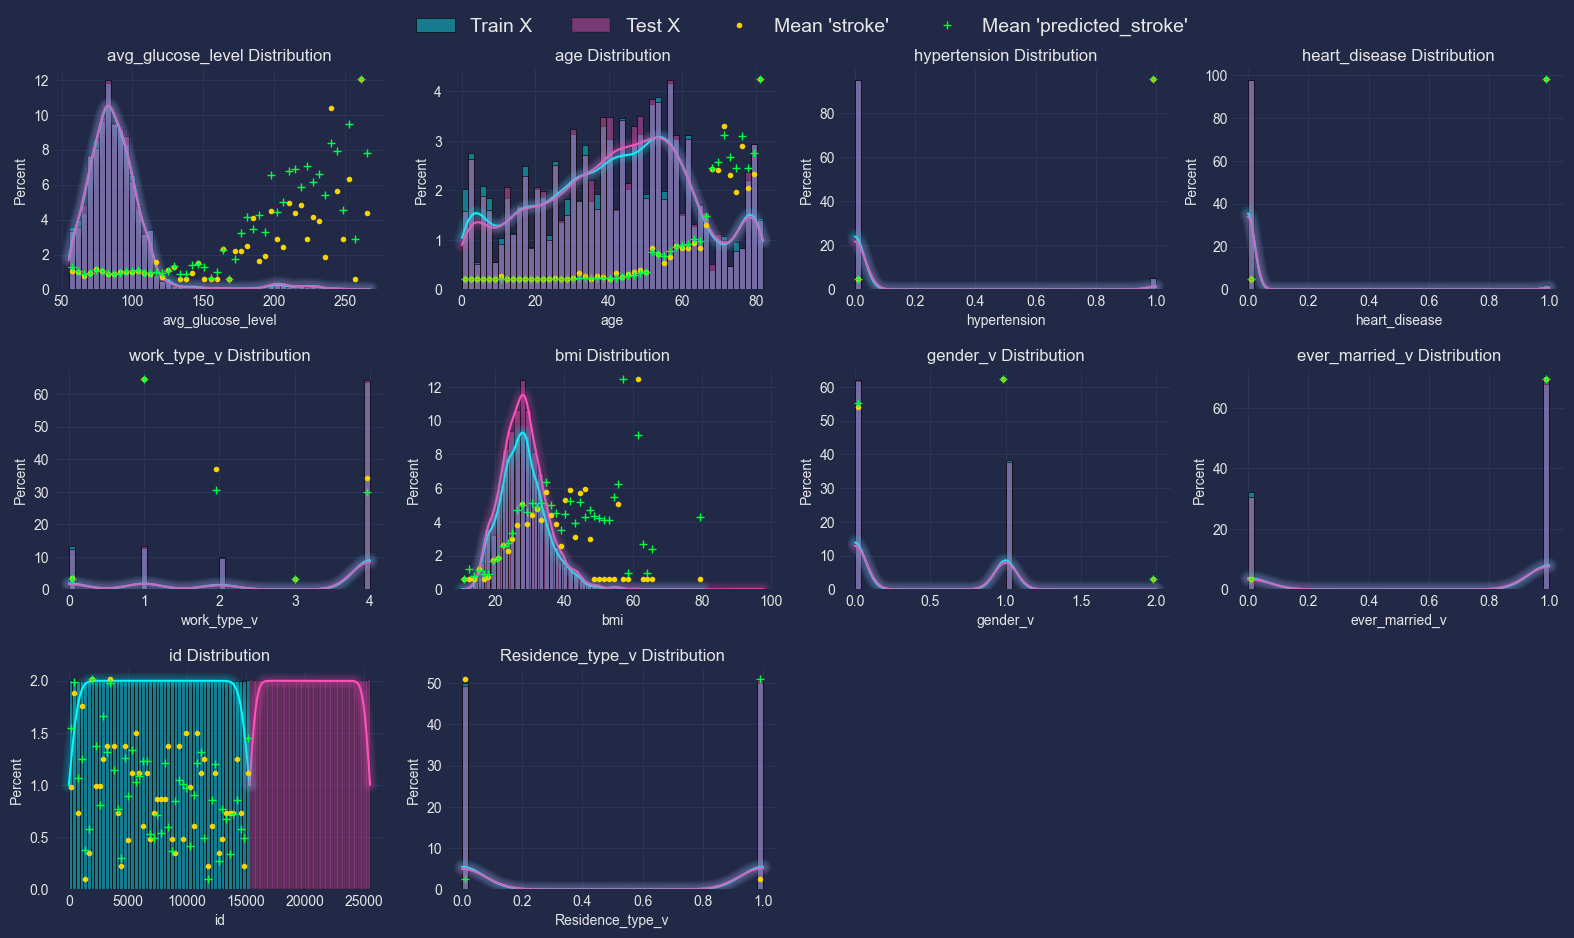

In [170]:
import math

n_bins = 50
histplot_hyperparams = {
    'kde':True,
    'alpha':0.4,
    'stat':'percent',
    'bins':n_bins
}

n_cols = 4
n_rows = math.ceil(len(features) / n_cols)
cell_with_dim = 4
cell_height_dim = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * cell_with_dim, n_rows * cell_height_dim))

plt.tight_layout(pad=2, h_pad=4, w_pad=None, rect=None)
plt.style.use("cyberpunk")

for a in ax[n_rows - 1, int(((n_rows - (len(features) / n_cols)) * n_cols*-1)):]:
    a.axis('off')

handles = []
labels = []
    
for i, feature in enumerate(features):
    row = math.ceil(i / n_cols) - 1
    col = (i % n_cols)
    sns.histplot(train_set[feature], label='Train X', ax=ax[row, col], **histplot_hyperparams)
    sns.histplot(test_set[feature], label='Test X', ax=ax[row, col], **histplot_hyperparams)
    ax[row, col].set_title(f'{feature} Distribution');
    ax2 = add_secondary_plot(train_set, feature, target[0], ax[row, col], n_bins, color = list(mplcyberpunk.cyberpunk_stylesheets['cyberpunk']['axes.prop_cycle'])[2]['color'], marker='.')
    ax3 = add_secondary_plot(train_set, feature, 'predicted_stroke', ax[row, col], n_bins, color = list(mplcyberpunk.cyberpunk_stylesheets['cyberpunk']['axes.prop_cycle'])[3]['color'], marker='+')
    mplcyberpunk.make_lines_glow(ax[row, col])
    
    obj = ax[row, col].get_legend_handles_labels()
    if obj[1][0] not in labels: 
        labels.extend(obj[1])
        handles.extend(obj[0])
    
    obj = ax2.get_legend_handles_labels()

    if obj[1][0] not in labels: 
        labels.extend(obj[1])
        handles.extend(obj[0])
        
    obj = ax3.get_legend_handles_labels()

    if obj[1][0] not in labels: 
        labels.extend(obj[1])
        handles.extend(obj[0])

fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.04), fontsize=14, ncol=4)

In [105]:
XGB_submission = pd.DataFrame(data={'id': test_set.id, 'stroke': final_preds})
XGB_submission.to_csv(fr'D:\source\repos\Kaggle_Tabular_Playground_Series-ML\Jan-2023-S2\XGB.csv', index=False)

In [106]:
XGB_submission

id    stroke
0      15304  0.047400
1      15305  0.311304
2      15306  0.007079
3      15307  0.055664
4      15308  0.008072
...      ...       ...
10199  25503  0.007021
10200  25504  0.017852
10201  25505  0.007080
10202  25506  0.007604
10203  25507  0.006917

[10204 rows x 2 columns]

In [76]:
def lgbm_objective(trial):
    # Split the train data for each trial.
    X_train, X_valid, y_train, y_valid = train_test_split(X, Y, stratify=Y, test_size=0.4)

    param_grid = {
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'max_depth': trial.suggest_int('max_depth', 100, 1000), 
        'num_leaves': trial.suggest_int('num_leaves', 100, 10000),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1),
        'subsample': trial.suggest_float('subsample', 0.1, 1),
        'subsample_freq': trial.suggest_int('subsample_freq', 1, 10), 
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 1000), 
        'reg_lambda': trial.suggest_int('reg_lambda', 1, 100), 
        'n_estimators': trial.suggest_int('n_estimators', 10, 100000), 
    } 
    

    clf = lgbm.LGBMRegressor(**param_grid,
                             metric='AUC',
                             random_state=1)
    
    clf.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], callbacks=[lgbm.early_stopping(100, verbose=True)],
            verbose=False)
    preds = clf.predict(X_valid)
    
    #rmse = mean_squared_error(y_val, preds, squared=False)
    fpr, tpr, _ = roc_curve(y_valid, preds)
    roc_auc = auc(fpr, tpr)

    lgbm_ranks[roc_auc] = clf
    
    # Returns the best RMSE for the trial.
    # Readers may want to try returning a cross validation score here.
    print(roc_auc)
    return roc_auc

In [77]:
lgbm_ranks = {}

train_time = 1 * 60 * 60
study = optuna.create_study(direction='maximize', sampler=TPESampler(), study_name='XGBRegressor')
study.optimize(lgbm_objective, timeout=train_time)



[I 2023-01-14 13:35:00,027] A new study created in memory with name: XGBRegressor
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[86]	valid_0's auc: 0.859382


[I 2023-01-14 13:35:01,050] Trial 0 finished with value: 0.8593820819109179 and parameters: {'learning_rate': 0.08952098122941213, 'max_depth': 292, 'num_leaves': 7966, 'colsample_bytree': 0.4922460059929278, 'subsample': 0.15629394821356365, 'subsample_freq': 10, 'min_child_samples': 339, 'reg_lambda': 37, 'n_estimators': 63696}. Best is trial 0 with value: 0.8593820819109179.


0.8593820819109179
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:35:01,656] Trial 1 finished with value: 0.7868488346015812 and parameters: {'learning_rate': 0.03789012717823179, 'max_depth': 428, 'num_leaves': 3954, 'colsample_bytree': 0.2292085193186973

Early stopping, best iteration is:
[102]	valid_0's auc: 0.791397
0.7868488346015812


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:35:02,073] Trial 2 finished with value: 0.8751509404609333 and parameters: {'learning_rate': 0.03523979530786698, 'max_depth': 574, 'num_leaves': 3846, 'colsample_bytree': 0.667886269832276, 'subsample': 0.3335152573217891, 'subsample_freq': 1, 'min_child_samples': 478, 'reg_lambda': 29, 'n_estimators': 24605}. Best is trial 2 with value: 0.8751509404609333.


Early stopping, best iteration is:
[21]	valid_0's auc: 0.875151
0.8751509404609333


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:35:02,336] Trial 3 finished with value: 0.8701201529844287 and parameters: {'learning_rate': 0.004718745939340845, 'max_depth': 940, 'num_leaves': 1586, 'colsample_bytree': 0.520639807205320

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.87012
0.8701201529844287


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:35:02,651] Trial 4 finished with value: 0.8808141120660105 and parameters: {'learning_rate': 0.003947188836197528, 'max_depth': 129, 'num_leaves': 251, 'colsample_bytree': 0.9073917888951586

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.880814
0.8808141120660105


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.873966
0.873965641135813


[I 2023-01-14 13:35:03,475] Trial 5 finished with value: 0.873965641135813 and parameters: {'learning_rate': 0.0909958740191354, 'max_depth': 178, 'num_leaves': 7271, 'colsample_bytree': 0.9600078955676464, 'subsample': 0.774306415212994, 'subsample_freq': 6, 'min_child_samples': 782, 'reg_lambda': 63, 'n_estimators': 48231}. Best is trial 4 with value: 0.8808141120660105.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\sourc

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.865248
0.8652483033719746


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.875536


[I 2023-01-14 13:35:04,536] Trial 7 finished with value: 0.8755361627415973 and parameters: {'learning_rate': 0.06007548416327923, 'max_depth': 663, 'num_leaves': 9418, 'colsample_bytree': 0.8621904687661134, 'subsample': 0.6993070017783605, 'subsample_freq': 6, 'min_child_samples': 648, 'reg_lambda': 9, 'n_estimators': 55729}. Best is trial 4 with value: 0.8808141120660105.


0.8755361627415973
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:35:04,864] Trial 8 finished with value: 0.8725304861006817 and parameters: {'learning_rate': 0.07747206211697175, 'max_depth': 347, 'num_leaves': 948, 'colsample_bytree': 0.8627327976541964,

Early stopping, best iteration is:
[14]	valid_0's auc: 0.87253
0.8725304861006817
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:35:05,157] Trial 9 finished with value: 0.5 and parameters: {'learning_rate': 0.007548907529038604, 'max_depth': 117, 'num_leaves': 4055, 'colsample_bytree': 0.6399666087469167, 'subsample':

Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
0.5
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:35:05,404] Trial 10 finished with value: 0.8601326592392399 and parameters: {'learning_rate': 0.025230262960752488, 'max_depth': 710, 'num_leaves': 321, 'colsample_bytree': 0.129176013385959

Did not meet early stopping. Best iteration is:
[91]	valid_0's auc: 0.860422
0.8601326592392399
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:35:06,068] Trial 11 finished with value: 0.8859240317417773 and parameters: {'learning_rate': 0.060063330231775236, 'max_depth': 775, 'num_leaves': 9983, 'colsample_bytree': 0.80560302494676

Early stopping, best iteration is:
[2]	valid_0's auc: 0.885924
0.8859240317417773


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:35:06,685] Trial 12 finished with value: 0.8694002183375235 and parameters: {'learning_rate': 0.05449725859395722, 'max_depth': 880, 'num_leaves': 6108, 'colsample_bytree': 0.7775222929336183, 'subsample': 0.9951126362615814, 'subsample_freq': 7, 'min_child_samples': 238, 'reg_lambda': 1, 'n_estimators': 37020}. Best is trial 11 with value: 0.8859240317417773.


Early stopping, best iteration is:
[13]	valid_0's auc: 0.8694
0.8694002183375235


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.872703
0.8727032300080075


[I 2023-01-14 13:35:07,484] Trial 13 finished with value: 0.8727032300080075 and parameters: {'learning_rate': 0.0661555186623972, 'max_depth': 759, 'num_leaves': 9369, 'colsample_bytree': 0.7628101618307861, 'subsample': 0.6003551366114448, 'subsample_freq': 8, 'min_child_samples': 209, 'reg_lambda': 15, 'n_estimators': 72950}. Best is trial 11 with value: 0.8859240317417773.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\s

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:35:08,122] Trial 14 finished with value: 0.8585210562363916 and parameters: {'learning_rate': 0.040747907170885604, 'max_depth': 824, 'num_leaves': 5792, 'colsample_bytree': 0.9824166372237761, 'subsample': 0.7150223942452938, 'subsample_freq': 4, 'min_child_samples': 32, 'reg_lambda': 35, 'n_estimators': 31467}. Best is trial 11 with value: 0.8859240317417773.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.858521
0.8585210562363916


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[112]	valid_0's auc: 0.87573


[I 2023-01-14 13:35:09,281] Trial 15 finished with value: 0.8757301208129807 and parameters: {'learning_rate': 0.019433631064180702, 'max_depth': 615, 'num_leaves': 7548, 'colsample_bytree': 0.682159165851134, 'subsample': 0.42020584846404047, 'subsample_freq': 8, 'min_child_samples': 290, 'reg_lambda': 17, 'n_estimators': 41430}. Best is trial 11 with value: 0.8859240317417773.


0.8757301208129807
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:35:09,613] Trial 16 finished with value: 0.8620533829183551 and parameters: {'learning_rate': 0.0700558701474318, 'max_depth': 990, 'num_leaves': 2703, 'colsample_bytree': 0.8653080797735828

Early stopping, best iteration is:
[17]	valid_0's auc: 0.862053
0.8620533829183551
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[164]	valid_0's auc: 0.86958


[I 2023-01-14 13:35:11,207] Trial 17 finished with value: 0.8695800336328683 and parameters: {'learning_rate': 0.048524346276329074, 'max_depth': 237, 'num_leaves': 9951, 'colsample_bytree': 0.3725778329389523, 'subsample': 0.3040516817869139, 'subsample_freq': 3, 'min_child_samples': 329, 'reg_lambda': 42, 'n_estimators': 69944}. Best is trial 11 with value: 0.8859240317417773.


0.8695800336328683
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:35:11,692] Trial 18 finished with value: 0.8607367578157358 and parameters: {'learning_rate': 0.09915482955717106, 'max_depth': 488, 'num_leaves': 5118, 'colsample_bytree': 0.766368051294161

Early stopping, best iteration is:
[23]	valid_0's auc: 0.860737
0.8607367578157358


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.865081


[I 2023-01-14 13:35:12,460] Trial 19 finished with value: 0.8650812839216167 and parameters: {'learning_rate': 0.01882017647713956, 'max_depth': 379, 'num_leaves': 8453, 'colsample_bytree': 0.9280945114654183, 'subsample': 0.5206448895382143, 'subsample_freq': 7, 'min_child_samples': 375, 'reg_lambda': 45, 'n_estimators': 23719}. Best is trial 11 with value: 0.8859240317417773.


0.8650812839216167
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:35:13,114] Trial 20 finished with value: 0.85601408081721 and parameters: {'learning_rate': 0.04856745276657807, 'max_depth': 799, 'num_leaves': 6688, 'colsample_bytree': 0.6384110004231189,

Early stopping, best iteration is:
[17]	valid_0's auc: 0.856014
0.85601408081721


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[106]	valid_0's auc: 0.871217


[I 2023-01-14 13:35:14,321] Trial 21 finished with value: 0.871216554860165 and parameters: {'learning_rate': 0.017605110759486422, 'max_depth': 617, 'num_leaves': 8130, 'colsample_bytree': 0.6979017649068111, 'subsample': 0.4258574374937583, 'subsample_freq': 8, 'min_child_samples': 253, 'reg_lambda': 16, 'n_estimators': 43573}. Best is trial 11 with value: 0.8859240317417773.


0.871216554860165
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[121]	valid_0's auc: 0.87436


[I 2023-01-14 13:35:15,836] Trial 22 finished with value: 0.8743602919338361 and parameters: {'learning_rate': 0.013213049720049726, 'max_depth': 696, 'num_leaves': 8850, 'colsample_bytree': 0.5784213172411448, 'subsample': 0.27614527073262257, 'subsample_freq': 9, 'min_child_samples': 101, 'reg_lambda': 17, 'n_estimators': 41813}. Best is trial 11 with value: 0.8859240317417773.


0.8743602919338361
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[48]	valid_0's auc: 0.887227


[I 2023-01-14 13:35:16,657] Trial 23 finished with value: 0.887226850801121 and parameters: {'learning_rate': 0.0283838377179331, 'max_depth': 531, 'num_leaves': 7206, 'colsample_bytree': 0.8111891620303545, 'subsample': 0.48664158761999193, 'subsample_freq': 7, 'min_child_samples': 404, 'reg_lambda': 10, 'n_estimators': 54305}. Best is trial 23 with value: 0.887226850801121.


0.887226850801121
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:35:17,252] Trial 24 finished with value: 0.8815717607823514 and parameters: {'learning_rate': 0.02764441880035508, 'max_depth': 505, 'num_leaves': 6513, 'colsample_bytree': 0.821378714492781

Early stopping, best iteration is:
[10]	valid_0's auc: 0.881572
0.8815717607823514


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[80]	valid_0's auc: 0.88744


[I 2023-01-14 13:35:18,276] Trial 25 finished with value: 0.8874396659072221 and parameters: {'learning_rate': 0.02940045801629655, 'max_depth': 512, 'num_leaves': 6733, 'colsample_bytree': 0.8127421140275435, 'subsample': 0.6471820110480803, 'subsample_freq': 6, 'min_child_samples': 424, 'reg_lambda': 8, 'n_estimators': 99598}. Best is trial 25 with value: 0.8874396659072221.


0.8874396659072221
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:35:18,776] Trial 26 finished with value: 0.8833311894680769 and parameters: {'learning_rate': 0.02978382521532039, 'max_depth': 553, 'num_leaves': 5121, 'colsample_bytree': 0.767084228774823

Early stopping, best iteration is:
[71]	valid_0's auc: 0.883331
0.8833311894680769


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.87364
0.8736403572869307


[I 2023-01-14 13:35:19,540] Trial 27 finished with value: 0.8736403572869307 and parameters: {'learning_rate': 0.04080231214365813, 'max_depth': 416, 'num_leaves': 6938, 'colsample_bytree': 0.5727692559878023, 'subsample': 0.6543395362688832, 'subsample_freq': 7, 'min_child_samples': 393, 'reg_lambda': 9, 'n_estimators': 54878}. Best is trial 25 with value: 0.8874396659072221.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\s

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.868508


[I 2023-01-14 13:35:20,323] Trial 28 finished with value: 0.8685075397832922 and parameters: {'learning_rate': 0.055498197863901054, 'max_depth': 622, 'num_leaves': 9003, 'colsample_bytree': 0.9963276326357597, 'subsample': 0.7850776143640338, 'subsample_freq': 5, 'min_child_samples': 558, 'reg_lambda': 21, 'n_estimators': 82134}. Best is trial 25 with value: 0.8874396659072221.


0.8685075397832922
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:35:20,976] Trial 29 finished with value: 0.8870187499536993 and parameters: {'learning_rate': 0.04528531103078898, 'max_depth': 735, 'num_leaves': 7731, 'colsample_bytree': 0.468697878703651

Early stopping, best iteration is:
[8]	valid_0's auc: 0.887019
0.8870187499536993


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.869275


[I 2023-01-14 13:35:21,371] Trial 30 finished with value: 0.8692752904825178 and parameters: {'learning_rate': 0.03357515427171992, 'max_depth': 283, 'num_leaves': 5793, 'colsample_bytree': 0.4020210958995336, 'subsample': 0.5874576408650147, 'subsample_freq': 2, 'min_child_samples': 690, 'reg_lambda': 36, 'n_estimators': 66711}. Best is trial 25 with value: 0.8874396659072221.


0.8692752904825178
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[24]	valid_0's auc: 0.878555
0.8785546352275


[I 2023-01-14 13:35:22,111] Trial 31 finished with value: 0.8785546352275 and parameters: {'learning_rate': 0.04499993865547807, 'max_depth': 745, 'num_leaves': 7415, 'colsample_bytree': 0.4468034614977888, 'subsample': 0.6895117061344291, 'subsample_freq': 3, 'min_child_samples': 328, 'reg_lambda': 1, 'n_estimators': 98200}. Best is trial 25 with value: 0.8874396659072221.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\sour

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.870313
0.8703134375902865


[I 2023-01-14 13:35:22,931] Trial 32 finished with value: 0.8703134375902865 and parameters: {'learning_rate': 0.06262776443739278, 'max_depth': 863, 'num_leaves': 7991, 'colsample_bytree': 0.30627149751952143, 'subsample': 0.6052536942306886, 'subsample_freq': 6, 'min_child_samples': 415, 'reg_lambda': 11, 'n_estimators': 90870}. Best is trial 25 with value: 0.8874396659072221.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.866084


[I 2023-01-14 13:35:23,813] Trial 33 finished with value: 0.8660837373565266 and parameters: {'learning_rate': 0.033180798000291584, 'max_depth': 540, 'num_leaves': 9840, 'colsample_bytree': 0.486183340045986, 'subsample': 0.48344248702293346, 'subsample_freq': 2, 'min_child_samples': 195, 'reg_lambda': 5, 'n_estimators': 76626}. Best is trial 25 with value: 0.8874396659072221.


0.8660837373565266
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[112]	valid_0's auc: 0.868837


[I 2023-01-14 13:35:25,147] Trial 34 finished with value: 0.8688368644253285 and parameters: {'learning_rate': 0.024096434798841288, 'max_depth': 460, 'num_leaves': 8438, 'colsample_bytree': 0.7169899072587499, 'subsample': 0.3508659927090955, 'subsample_freq': 7, 'min_child_samples': 489, 'reg_lambda': 21, 'n_estimators': 83883}. Best is trial 25 with value: 0.8874396659072221.


0.8688368644253285
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:35:25,571] Trial 35 finished with value: 0.8802625438005142 and parameters: {'learning_rate': 0.041813026396098366, 'max_depth': 668, 'num_leaves': 4550, 'colsample_bytree': 0.60585433017464

Early stopping, best iteration is:
[33]	valid_0's auc: 0.880263
0.8802625438005142


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.869676
0.8696760024702715


[I 2023-01-14 13:35:26,348] Trial 36 finished with value: 0.8696760024702715 and parameters: {'learning_rate': 0.0367006931196662, 'max_depth': 577, 'num_leaves': 6335, 'colsample_bytree': 0.3322992115315567, 'subsample': 0.8616792103317645, 'subsample_freq': 6, 'min_child_samples': 370, 'reg_lambda': 23, 'n_estimators': 99943}. Best is trial 25 with value: 0.8874396659072221.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\s

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:35:26,995] Trial 37 finished with value: 0.8767271865236855 and parameters: {'learning_rate': 0.049272398178083224, 'max_depth': 910, 'num_leaves': 7674, 'colsample_bytree': 0.5376513113556515, 'subsample': 0.6479066378210706, 'subsample_freq': 3, 'min_child_samples': 454, 'reg_lambda': 31, 'n_estimators': 15862}. Best is trial 25 with value: 0.8874396659072221.


Early stopping, best iteration is:
[7]	valid_0's auc: 0.876727
0.8767271865236855


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:35:27,603] Trial 38 finished with value: 0.873370971076676 and parameters: {'learning_rate': 0.056156968883662714, 'max_depth': 801, 'num_leaves': 6979, 'colsample_bytree': 0.9248208788805555, 'subsample': 0.5699026564385056, 'subsample_freq': 10, 'min_child_samples': 506, 'reg_lambda': 5, 'n_estimators': 90569}. Best is trial 25 with value: 0.8874396659072221.


Early stopping, best iteration is:
[4]	valid_0's auc: 0.873371
0.873370971076676


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.874066


[I 2023-01-14 13:35:28,434] Trial 39 finished with value: 0.874065987499133 and parameters: {'learning_rate': 0.0696337890294222, 'max_depth': 402, 'num_leaves': 8755, 'colsample_bytree': 0.815005422042894, 'subsample': 0.47393514195957054, 'subsample_freq': 1, 'min_child_samples': 278, 'reg_lambda': 79, 'n_estimators': 54142}. Best is trial 25 with value: 0.8874396659072221.


0.874065987499133
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:35:28,925] Trial 40 finished with value: 0.8743794857013166 and parameters: {'learning_rate': 0.011123317875828091, 'max_depth': 336, 'num_leaves': 5894, 'colsample_bytree': 0.72870745239190

Early stopping, best iteration is:
[31]	valid_0's auc: 0.874379
0.8743794857013166


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:35:29,335] Trial 41 finished with value: 0.8826486321578442 and parameters: {'learning_rate': 0.03094418555518615, 'max_depth': 554, 'num_leaves': 5000, 'colsample_bytree': 0.8303971296624478, 'subsample': 0.8637737421642251, 'subsample_freq': 4, 'min_child_samples': 526, 'reg_lambda': 9, 'n_estimators': 95029}. Best is trial 25 with value: 0.8874396659072221.


Early stopping, best iteration is:
[23]	valid_0's auc: 0.882649
0.8826486321578442


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:35:29,888] Trial 42 finished with value: 0.8842683167469999 and parameters: {'learning_rate': 0.029528239264029813, 'max_depth': 544, 'num_leaves': 5604, 'colsample_bytree': 0.8912561269150637, 'subsample': 0.9480176465290098, 'subsample_freq': 4, 'min_child_samples': 642, 'reg_lambda': 7, 'n_estimators': 96944}. Best is trial 25 with value: 0.8874396659072221.


Early stopping, best iteration is:
[78]	valid_0's auc: 0.884268
0.8842683167469999


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:35:30,290] Trial 43 finished with value: 0.8816162095070434 and parameters: {'learning_rate': 0.023346174586061624, 'max_depth': 467, 'num_leaves': 5530, 'colsample_bytree': 0.8968184186123569, 'subsample': 0.9812657460988404, 'subsample_freq': 2, 'min_child_samples': 683, 'reg_lambda': 6, 'n_estimators': 93978}. Best is trial 25 with value: 0.8874396659072221.


Early stopping, best iteration is:
[4]	valid_0's auc: 0.881616
0.8816162095070434


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.864146


[I 2023-01-14 13:35:30,659] Trial 44 finished with value: 0.8641461770392704 and parameters: {'learning_rate': 0.037360776106644664, 'max_depth': 519, 'num_leaves': 3404, 'colsample_bytree': 0.5021205094267485, 'subsample': 0.9333307557863826, 'subsample_freq': 4, 'min_child_samples': 617, 'reg_lambda': 1, 'n_estimators': 85732}. Best is trial 25 with value: 0.8874396659072221.


0.8641461770392704
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[283]	valid_0's auc: 0.870383


[I 2023-01-14 13:35:32,904] Trial 45 finished with value: 0.8703828045394271 and parameters: {'learning_rate': 0.0013201036525887777, 'max_depth': 731, 'num_leaves': 7105, 'colsample_bytree': 0.9482698659944855, 'subsample': 0.8361181402581838, 'subsample_freq': 5, 'min_child_samples': 778, 'reg_lambda': 13, 'n_estimators': 73869}. Best is trial 25 with value: 0.8874396659072221.


0.8703828045394271
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:35:33,249] Trial 46 finished with value: 0.8830456400852068 and parameters: {'learning_rate': 0.04519872648221616, 'max_depth': 664, 'num_leaves': 4455, 'colsample_bytree': 0.884322799064218

Early stopping, best iteration is:
[15]	valid_0's auc: 0.883046
0.8830456400852068
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[78]	valid_0's auc: 0.866273


[I 2023-01-14 13:35:34,236] Trial 47 finished with value: 0.8662726444364676 and parameters: {'learning_rate': 0.060474701491334736, 'max_depth': 597, 'num_leaves': 7723, 'colsample_bytree': 0.22487030840874478, 'subsample': 0.7379229315628423, 'subsample_freq': 7, 'min_child_samples': 458, 'reg_lambda': 19, 'n_estimators': 29150}. Best is trial 25 with value: 0.8874396659072221.


0.8662726444364676
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[14]	valid_0's auc: 0.883335
0.8833348935284677


[I 2023-01-14 13:35:35,002] Trial 48 finished with value: 0.8833348935284677 and parameters: {'learning_rate': 0.015310656264921079, 'max_depth': 449, 'num_leaves': 9292, 'colsample_bytree': 0.8204513900647074, 'subsample': 0.8179469584243324, 'subsample_freq': 6, 'min_child_samples': 956, 'reg_lambda': 5, 'n_estimators': 59281}. Best is trial 25 with value: 0.8874396659072221.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[195]	valid_0's auc: 0.836675


[I 2023-01-14 13:35:36,402] Trial 49 finished with value: 0.836674844783033 and parameters: {'learning_rate': 0.08098416413326533, 'max_depth': 644, 'num_leaves': 6319, 'colsample_bytree': 0.6441956929807279, 'subsample': 0.22342887038747078, 'subsample_freq': 5, 'min_child_samples': 736, 'reg_lambda': 25, 'n_estimators': 47946}. Best is trial 25 with value: 0.8874396659072221.


0.836674844783033
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:35:36,801] Trial 50 finished with value: 0.8677192483855348 and parameters: {'learning_rate': 0.05290054185905198, 'max_depth': 769, 'num_leaves': 5366, 'colsample_bytree': 0.851636158701125

Early stopping, best iteration is:
[28]	valid_0's auc: 0.867719
0.8677192483855348


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.890452


[I 2023-01-14 13:35:37,623] Trial 51 finished with value: 0.8904524139361567 and parameters: {'learning_rate': 0.012533209222459239, 'max_depth': 444, 'num_leaves': 9417, 'colsample_bytree': 0.7999122162864747, 'subsample': 0.9342405675297984, 'subsample_freq': 6, 'min_child_samples': 315, 'reg_lambda': 5, 'n_estimators': 60157}. Best is trial 51 with value: 0.8904524139361567.


0.8904524139361567
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[40]	valid_0's auc: 0.881069


[I 2023-01-14 13:35:38,470] Trial 52 finished with value: 0.8810693555002266 and parameters: {'learning_rate': 0.010628186938602496, 'max_depth': 516, 'num_leaves': 9615, 'colsample_bytree': 0.7863429690180554, 'subsample': 0.9218613724791869, 'subsample_freq': 7, 'min_child_samples': 310, 'reg_lambda': 12, 'n_estimators': 51597}. Best is trial 51 with value: 0.8904524139361567.


0.8810693555002266
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[228]	valid_0's auc: 0.887716


[I 2023-01-14 13:35:40,841] Trial 53 finished with value: 0.8877164602382588 and parameters: {'learning_rate': 0.020560504205400718, 'max_depth': 373, 'num_leaves': 8418, 'colsample_bytree': 0.732306251776585, 'subsample': 0.9665823135645317, 'subsample_freq': 6, 'min_child_samples': 229, 'reg_lambda': 1, 'n_estimators': 37975}. Best is trial 51 with value: 0.8904524139361567.


0.8877164602382588
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[32]	valid_0's auc: 0.866714


[I 2023-01-14 13:35:41,756] Trial 54 finished with value: 0.8667137643557595 and parameters: {'learning_rate': 0.024559755519512717, 'max_depth': 356, 'num_leaves': 8282, 'colsample_bytree': 0.7399948598796839, 'subsample': 0.6918527748988635, 'subsample_freq': 6, 'min_child_samples': 255, 'reg_lambda': 1, 'n_estimators': 38195}. Best is trial 51 with value: 0.8904524139361567.


0.8667137643557595
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[164]	valid_0's auc: 0.883809


[I 2023-01-14 13:35:43,401] Trial 55 finished with value: 0.8838090132585158 and parameters: {'learning_rate': 0.020999295760241468, 'max_depth': 426, 'num_leaves': 9023, 'colsample_bytree': 0.7960010515532692, 'subsample': 0.48048411454002443, 'subsample_freq': 7, 'min_child_samples': 401, 'reg_lambda': 15, 'n_estimators': 61011}. Best is trial 51 with value: 0.8904524139361567.


0.8838090132585158
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[52]	valid_0's auc: 0.881217


[I 2023-01-14 13:35:44,536] Trial 56 finished with value: 0.8812165077175782 and parameters: {'learning_rate': 0.007174778644071456, 'max_depth': 296, 'num_leaves': 8650, 'colsample_bytree': 0.674175973671125, 'subsample': 0.5449767704733235, 'subsample_freq': 6, 'min_child_samples': 78, 'reg_lambda': 4, 'n_estimators': 66307}. Best is trial 51 with value: 0.8904524139361567.


0.8812165077175782
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:35:45,263] Trial 57 finished with value: 0.8671457924904553 and parameters: {'learning_rate': 0.016009863030441912, 'max_depth': 203, 'num_leaves': 9267, 'colsample_bytree': 0.85216591069345

Early stopping, best iteration is:
[3]	valid_0's auc: 0.867146
0.8671457924904553


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.877991


[I 2023-01-14 13:35:46,178] Trial 58 finished with value: 0.8779912813153051 and parameters: {'learning_rate': 0.021344883170105917, 'max_depth': 389, 'num_leaves': 7886, 'colsample_bytree': 0.7363369911685765, 'subsample': 0.6189641012975511, 'subsample_freq': 7, 'min_child_samples': 347, 'reg_lambda': 18, 'n_estimators': 36013}. Best is trial 51 with value: 0.8904524139361567.


0.8779912813153051
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:35:46,901] Trial 59 finished with value: 0.8806231845894925 and parameters: {'learning_rate': 0.07479436210303361, 'max_depth': 701, 'num_leaves': 9594, 'colsample_bytree': 0.706851331519110

Early stopping, best iteration is:
[8]	valid_0's auc: 0.880623
0.8806231845894925


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.87807


[I 2023-01-14 13:35:47,867] Trial 60 finished with value: 0.8780704135145674 and parameters: {'learning_rate': 0.026648918922972234, 'max_depth': 848, 'num_leaves': 9975, 'colsample_bytree': 0.959661964044355, 'subsample': 0.6725795278504705, 'subsample_freq': 5, 'min_child_samples': 157, 'reg_lambda': 4, 'n_estimators': 50305}. Best is trial 51 with value: 0.8904524139361567.


0.8780704135145674
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[86]	valid_0's auc: 0.895485


[I 2023-01-14 13:35:49,025] Trial 61 finished with value: 0.8954852218092382 and parameters: {'learning_rate': 0.029390680911304923, 'max_depth': 482, 'num_leaves': 6760, 'colsample_bytree': 0.8748781583097436, 'subsample': 0.9351216968911997, 'subsample_freq': 4, 'min_child_samples': 275, 'reg_lambda': 1, 'n_estimators': 40119}. Best is trial 61 with value: 0.8954852218092382.


0.8954852218092382
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[36]	valid_0's auc: 0.878857
0.8788566845157479


[I 2023-01-14 13:35:49,866] Trial 62 finished with value: 0.8788566845157479 and parameters: {'learning_rate': 0.034059690655566646, 'max_depth': 445, 'num_leaves': 7312, 'colsample_bytree': 0.8002482132134897, 'subsample': 0.8978651966525804, 'subsample_freq': 7, 'min_child_samples': 269, 'reg_lambda': 2, 'n_estimators': 39213}. Best is trial 61 with value: 0.8954852218092382.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.878262
0.8782616777238482


[I 2023-01-14 13:35:50,623] Trial 63 finished with value: 0.8782616777238482 and parameters: {'learning_rate': 0.008001640541893628, 'max_depth': 484, 'num_leaves': 6775, 'colsample_bytree': 0.7646998236338368, 'subsample': 0.9991200649501061, 'subsample_freq': 5, 'min_child_samples': 219, 'reg_lambda': 10, 'n_estimators': 32953}. Best is trial 61 with value: 0.8954852218092382.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:35:51,349] Trial 64 finished with value: 0.8698867971797958 and parameters: {'learning_rate': 0.01336341948899357, 'max_depth': 302, 'num_leaves': 8152, 'colsample_bytree': 0.850496054757898, 'subsample': 0.804999267859434, 'subsample_freq': 4, 'min_child_samples': 314, 'reg_lambda': 14, 'n_estimators': 56363}. Best is trial 61 with value: 0.8954852218092382.


Early stopping, best iteration is:
[18]	valid_0's auc: 0.869887
0.8698867971797958


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.870749


[I 2023-01-14 13:35:52,172] Trial 65 finished with value: 0.8707488330526105 and parameters: {'learning_rate': 0.04429123609851128, 'max_depth': 372, 'num_leaves': 8540, 'colsample_bytree': 0.4581772055637341, 'subsample': 0.7324866682445764, 'subsample_freq': 6, 'min_child_samples': 378, 'reg_lambda': 3, 'n_estimators': 28849}. Best is trial 61 with value: 0.8954852218092382.


0.8707488330526105
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[37]	valid_0's auc: 0.870029
0.870029235138468


[I 2023-01-14 13:35:52,957] Trial 66 finished with value: 0.870029235138468 and parameters: {'learning_rate': 0.039385918485394765, 'max_depth': 584, 'num_leaves': 7334, 'colsample_bytree': 0.9124567684286844, 'subsample': 0.44748911276735653, 'subsample_freq': 3, 'min_child_samples': 341, 'reg_lambda': 100, 'n_estimators': 44262}. Best is trial 61 with value: 0.8954852218092382.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.876248


[I 2023-01-14 13:35:53,832] Trial 67 finished with value: 0.8762483525349579 and parameters: {'learning_rate': 0.018106277509050743, 'max_depth': 494, 'num_leaves': 9173, 'colsample_bytree': 0.8746224736438617, 'subsample': 0.9706290672580352, 'subsample_freq': 8, 'min_child_samples': 422, 'reg_lambda': 8, 'n_estimators': 41292}. Best is trial 61 with value: 0.8954852218092382.


0.8762483525349579
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[35]	valid_0's auc: 0.889406
0.8894061852420805


[I 2023-01-14 13:35:54,636] Trial 68 finished with value: 0.8894061852420805 and parameters: {'learning_rate': 0.026824783316588087, 'max_depth': 428, 'num_leaves': 7658, 'colsample_bytree': 0.7541961243301505, 'subsample': 0.5733158547884544, 'subsample_freq': 7, 'min_child_samples': 287, 'reg_lambda': 7, 'n_estimators': 34967}. Best is trial 61 with value: 0.8954852218092382.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:35:55,270] Trial 69 finished with value: 0.8720529990430055 and parameters: {'learning_rate': 0.02885378288475026, 'max_depth': 318, 'num_leaves': 6636, 'colsample_bytree': 0.6132030321978201, 'subsample': 0.5796325065202899, 'subsample_freq': 6, 'min_child_samples': 300, 'reg_lambda': 21, 'n_estimators': 34828}. Best is trial 61 with value: 0.8954852218092382.


Early stopping, best iteration is:
[7]	valid_0's auc: 0.872053
0.8720529990430055


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[83]	valid_0's auc: 0.889291


[I 2023-01-14 13:35:56,357] Trial 70 finished with value: 0.8892910226371967 and parameters: {'learning_rate': 0.031904291235382506, 'max_depth': 421, 'num_leaves': 7627, 'colsample_bytree': 0.7545487084046463, 'subsample': 0.5173905459325223, 'subsample_freq': 5, 'min_child_samples': 167, 'reg_lambda': 41, 'n_estimators': 19782}. Best is trial 61 with value: 0.8954852218092382.


0.8892910226371967
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[57]	valid_0's auc: 0.894468


[I 2023-01-14 13:35:57,325] Trial 71 finished with value: 0.8944679521327643 and parameters: {'learning_rate': 0.03210036430841585, 'max_depth': 425, 'num_leaves': 7646, 'colsample_bytree': 0.7499849550571411, 'subsample': 0.5298398499120012, 'subsample_freq': 5, 'min_child_samples': 157, 'reg_lambda': 42, 'n_estimators': 3598}. Best is trial 61 with value: 0.8954852218092382.


0.8944679521327643
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[40]	valid_0's auc: 0.881695


[I 2023-01-14 13:35:58,228] Trial 72 finished with value: 0.88169466824078 and parameters: {'learning_rate': 0.03233703779709278, 'max_depth': 397, 'num_leaves': 7151, 'colsample_bytree': 0.7496124076911113, 'subsample': 0.5291816420977411, 'subsample_freq': 5, 'min_child_samples': 100, 'reg_lambda': 41, 'n_estimators': 14120}. Best is trial 61 with value: 0.8954852218092382.


0.88169466824078
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[86]	valid_0's auc: 0.876517


[I 2023-01-14 13:35:59,316] Trial 73 finished with value: 0.8765170652796869 and parameters: {'learning_rate': 0.02185504098141558, 'max_depth': 256, 'num_leaves': 7546, 'colsample_bytree': 0.6923814675518566, 'subsample': 0.510545912482215, 'subsample_freq': 5, 'min_child_samples': 154, 'reg_lambda': 39, 'n_estimators': 21705}. Best is trial 61 with value: 0.8954852218092382.


0.8765170652796869
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[55]	valid_0's auc: 0.878761


[I 2023-01-14 13:36:00,259] Trial 74 finished with value: 0.8787610524111076 and parameters: {'learning_rate': 0.026610182469576978, 'max_depth': 422, 'num_leaves': 7992, 'colsample_bytree': 0.778512629290514, 'subsample': 0.5681196120097884, 'subsample_freq': 5, 'min_child_samples': 173, 'reg_lambda': 50, 'n_estimators': 6495}. Best is trial 61 with value: 0.8954852218092382.


0.8787610524111076
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[42]	valid_0's auc: 0.87709
0.8770901844420035


[I 2023-01-14 13:36:01,013] Trial 75 finished with value: 0.8770901844420035 and parameters: {'learning_rate': 0.035685510259203135, 'max_depth': 465, 'num_leaves': 6197, 'colsample_bytree': 0.6445854544117877, 'subsample': 0.4536503427667201, 'subsample_freq': 6, 'min_child_samples': 230, 'reg_lambda': 57, 'n_estimators': 6486}. Best is trial 61 with value: 0.8954852218092382.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.888223


[I 2023-01-14 13:36:02,043] Trial 76 finished with value: 0.8882229063135373 and parameters: {'learning_rate': 0.027458257575981884, 'max_depth': 361, 'num_leaves': 8237, 'colsample_bytree': 0.712705171674634, 'subsample': 0.40192575615925596, 'subsample_freq': 4, 'min_child_samples': 47, 'reg_lambda': 92, 'n_estimators': 17295}. Best is trial 61 with value: 0.8954852218092382.


0.8882229063135373
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[60]	valid_0's auc: 0.868523


[I 2023-01-14 13:36:03,151] Trial 77 finished with value: 0.8685226927576192 and parameters: {'learning_rate': 0.019557901836231087, 'max_depth': 346, 'num_leaves': 8390, 'colsample_bytree': 0.7207137494750004, 'subsample': 0.4055676675978409, 'subsample_freq': 4, 'min_child_samples': 59, 'reg_lambda': 53, 'n_estimators': 2475}. Best is trial 61 with value: 0.8954852218092382.


0.8685226927576192
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[49]	valid_0's auc: 0.883108


[I 2023-01-14 13:36:04,125] Trial 78 finished with value: 0.8831079356463282 and parameters: {'learning_rate': 0.02488972858571646, 'max_depth': 368, 'num_leaves': 8889, 'colsample_bytree': 0.6658019338313352, 'subsample': 0.2991885710829745, 'subsample_freq': 4, 'min_child_samples': 110, 'reg_lambda': 46, 'n_estimators': 26505}. Best is trial 61 with value: 0.8954852218092382.


0.8831079356463282
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[61]	valid_0's auc: 0.870504


[I 2023-01-14 13:36:05,107] Trial 79 finished with value: 0.8705040283340417 and parameters: {'learning_rate': 0.030962883749501628, 'max_depth': 444, 'num_leaves': 7883, 'colsample_bytree': 0.7509518990061403, 'subsample': 0.5001887676387178, 'subsample_freq': 5, 'min_child_samples': 127, 'reg_lambda': 88, 'n_estimators': 10055}. Best is trial 61 with value: 0.8954852218092382.


0.8705040283340417
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[19]	valid_0's auc: 0.868946
0.8689463025732445


[I 2023-01-14 13:36:06,100] Trial 80 finished with value: 0.8689463025732445 and parameters: {'learning_rate': 0.0390996507716982, 'max_depth': 400, 'num_leaves': 6860, 'colsample_bytree': 0.8379117495473073, 'subsample': 0.8506324451754801, 'subsample_freq': 4, 'min_child_samples': 21, 'reg_lambda': 62, 'n_estimators': 10526}. Best is trial 61 with value: 0.8954852218092382.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\so

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.881194
0.8811939466224694


[I 2023-01-14 13:36:06,910] Trial 81 finished with value: 0.8811939466224694 and parameters: {'learning_rate': 0.028892443873348703, 'max_depth': 529, 'num_leaves': 7565, 'colsample_bytree': 0.8031418699869923, 'subsample': 0.4467591683287063, 'subsample_freq': 7, 'min_child_samples': 263, 'reg_lambda': 46, 'n_estimators': 19179}. Best is trial 61 with value: 0.8954852218092382.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.872579


[I 2023-01-14 13:36:07,837] Trial 82 finished with value: 0.8725789756185276 and parameters: {'learning_rate': 0.027336137429092317, 'max_depth': 495, 'num_leaves': 6497, 'colsample_bytree': 0.773253690871503, 'subsample': 0.5517318719174367, 'subsample_freq': 6, 'min_child_samples': 60, 'reg_lambda': 78, 'n_estimators': 27843}. Best is trial 61 with value: 0.8954852218092382.


0.8725789756185276
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:36:08,182] Trial 83 finished with value: 0.8813730884522888 and parameters: {'learning_rate': 0.03539809461495144, 'max_depth': 425, 'num_leaves': 1793, 'colsample_bytree': 0.701493543076281

Early stopping, best iteration is:
[81]	valid_0's auc: 0.881373
0.8813730884522888
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[14]	valid_0's auc: 0.878163
0.8781626782915796


[I 2023-01-14 13:36:08,948] Trial 84 finished with value: 0.8781626782915796 and parameters: {'learning_rate': 0.022540919730110694, 'max_depth': 327, 'num_leaves': 8188, 'colsample_bytree': 0.8283899342258325, 'subsample': 0.9425472754297524, 'subsample_freq': 5, 'min_child_samples': 468, 'reg_lambda': 68, 'n_estimators': 17175}. Best is trial 61 with value: 0.8954852218092382.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.867093
0.86709258871393


[I 2023-01-14 13:36:09,690] Trial 85 finished with value: 0.86709258871393 and parameters: {'learning_rate': 0.030936318984380526, 'max_depth': 469, 'num_leaves': 7082, 'colsample_bytree': 0.8718664732324451, 'subsample': 0.4892821566734106, 'subsample_freq': 5, 'min_child_samples': 283, 'reg_lambda': 43, 'n_estimators': 23248}. Best is trial 61 with value: 0.8954852218092382.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\s

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:36:10,149] Trial 86 finished with value: 0.8751735015560421 and parameters: {'learning_rate': 0.015785745353775953, 'max_depth': 560, 'num_leaves': 5958, 'colsample_bytree': 0.7275063527123256, 'subsample': 0.881360055014577, 'subsample_freq': 4, 'min_child_samples': 240, 'reg_lambda': 34, 'n_estimators': 30899}. Best is trial 61 with value: 0.8954852218092382.


Early stopping, best iteration is:
[5]	valid_0's auc: 0.875174
0.8751735015560421


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:36:10,837] Trial 87 finished with value: 0.8706393949046946 and parameters: {'learning_rate': 0.024977391626036533, 'max_depth': 408, 'num_leaves': 7459, 'colsample_bytree': 0.6668243922226533, 'subsample': 0.5270736468197482, 'subsample_freq': 7, 'min_child_samples': 435, 'reg_lambda': 75, 'n_estimators': 40261}. Best is trial 61 with value: 0.8954852218092382.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.870639
0.8706393949046946


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[71]	valid_0's auc: 0.823253


[I 2023-01-14 13:36:11,746] Trial 88 finished with value: 0.8232530135898609 and parameters: {'learning_rate': 0.04242512929301943, 'max_depth': 438, 'num_leaves': 7834, 'colsample_bytree': 0.7818697801503309, 'subsample': 0.10680914465186464, 'subsample_freq': 6, 'min_child_samples': 365, 'reg_lambda': 11, 'n_estimators': 33974}. Best is trial 61 with value: 0.8954852218092382.


0.8232530135898609
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[61]	valid_0's auc: 0.866593


[I 2023-01-14 13:36:12,795] Trial 89 finished with value: 0.866592540561145 and parameters: {'learning_rate': 0.03257124053405695, 'max_depth': 379, 'num_leaves': 8742, 'colsample_bytree': 0.8143393343939554, 'subsample': 0.4635307766977497, 'subsample_freq': 7, 'min_child_samples': 395, 'reg_lambda': 6, 'n_estimators': 52463}. Best is trial 61 with value: 0.8954852218092382.


0.866592540561145
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[39]	valid_0's auc: 0.867088
0.8670878744552507


[I 2023-01-14 13:36:13,573] Trial 90 finished with value: 0.8670878744552507 and parameters: {'learning_rate': 0.01931827383683603, 'max_depth': 264, 'num_leaves': 7210, 'colsample_bytree': 0.9360118801075223, 'subsample': 0.36698885714496443, 'subsample_freq': 9, 'min_child_samples': 171, 'reg_lambda': 27, 'n_estimators': 57910}. Best is trial 61 with value: 0.8954852218092382.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:36:14,365] Trial 91 finished with value: 0.8807538369014659 and parameters: {'learning_rate': 0.037207074595062964, 'max_depth': 510, 'num_leaves': 7753, 'colsample_bytree': 0.5670057889473444, 'subsample': 0.597315090019497, 'subsample_freq': 3, 'min_child_samples': 316, 'reg_lambda': 3, 'n_estimators': 46412}. Best is trial 61 with value: 0.8954852218092382.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.880754
0.8807538369014659


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:36:15,123] Trial 92 finished with value: 0.8674939741672094 and parameters: {'learning_rate': 0.027262399677740756, 'max_depth': 476, 'num_leaves': 8314, 'colsample_bytree': 0.7595041809605364, 'subsample': 0.6198482309053732, 'subsample_freq': 3, 'min_child_samples': 334, 'reg_lambda': 8, 'n_estimators': 11672}. Best is trial 61 with value: 0.8954852218092382.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.867494
0.8674939741672094


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.873814
0.873813774659782


[I 2023-01-14 13:36:15,996] Trial 93 finished with value: 0.873813774659782 and parameters: {'learning_rate': 0.01215366046820933, 'max_depth': 964, 'num_leaves': 8039, 'colsample_bytree': 0.5023468340182826, 'subsample': 0.5575135333579635, 'subsample_freq': 4, 'min_child_samples': 208, 'reg_lambda': 5, 'n_estimators': 92397}. Best is trial 61 with value: 0.8954852218092382.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\so

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[258]	valid_0's auc: 0.890935


[I 2023-01-14 13:36:18,126] Trial 94 finished with value: 0.8909349519852754 and parameters: {'learning_rate': 0.03426355191966994, 'max_depth': 353, 'num_leaves': 6923, 'colsample_bytree': 0.3996756501551502, 'subsample': 0.4165645399126525, 'subsample_freq': 2, 'min_child_samples': 291, 'reg_lambda': 59, 'n_estimators': 37126}. Best is trial 61 with value: 0.8954852218092382.


0.8909349519852754
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:36:18,619] Trial 95 finished with value: 0.871746572228841 and parameters: {'learning_rate': 0.03363629541569245, 'max_depth': 417, 'num_leaves': 6872, 'colsample_bytree': 0.8413770718333277

Did not meet early stopping. Best iteration is:
[61]	valid_0's auc: 0.871747
0.871746572228841


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:36:19,292] Trial 96 finished with value: 0.8682974185392937 and parameters: {'learning_rate': 0.02354185433679705, 'max_depth': 355, 'num_leaves': 6477, 'colsample_bytree': 0.2258226029302382, 'subsample': 0.5034707290750742, 'subsample_freq': 2, 'min_child_samples': 239, 'reg_lambda': 53, 'n_estimators': 36661}. Best is trial 61 with value: 0.8954852218092382.


Early stopping, best iteration is:
[17]	valid_0's auc: 0.868297
0.8682974185392937


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:36:20,037] Trial 97 finished with value: 0.8708114653464946 and parameters: {'learning_rate': 0.029562290275844637, 'max_depth': 316, 'num_leaves': 7426, 'colsample_bytree': 0.1140530268216311, 'subsample': 0.40829152635191884, 'subsample_freq': 2, 'min_child_samples': 87, 'reg_lambda': 60, 'n_estimators': 25601}. Best is trial 61 with value: 0.8954852218092382.


Early stopping, best iteration is:
[28]	valid_0's auc: 0.871592
0.8708114653464946


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.875547


[I 2023-01-14 13:36:21,107] Trial 98 finished with value: 0.8755472749227704 and parameters: {'learning_rate': 0.020307610834945384, 'max_depth': 457, 'num_leaves': 9492, 'colsample_bytree': 0.7954580565937863, 'subsample': 0.9781843187152516, 'subsample_freq': 6, 'min_child_samples': 155, 'reg_lambda': 38, 'n_estimators': 43163}. Best is trial 61 with value: 0.8954852218092382.


0.8755472749227704
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[401]	valid_0's auc: 0.869666


[I 2023-01-14 13:36:24,208] Trial 99 finished with value: 0.8696655637546242 and parameters: {'learning_rate': 0.008896712280544564, 'max_depth': 374, 'num_leaves': 6672, 'colsample_bytree': 0.279722346700214, 'subsample': 0.4220277149640241, 'subsample_freq': 5, 'min_child_samples': 138, 'reg_lambda': 15, 'n_estimators': 31259}. Best is trial 61 with value: 0.8954852218092382.


0.8696655637546242
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[16]	valid_0's auc: 0.878022
0.8780215872639587


[I 2023-01-14 13:36:24,907] Trial 100 finished with value: 0.8780215872639587 and parameters: {'learning_rate': 0.026651822454288477, 'max_depth': 532, 'num_leaves': 6983, 'colsample_bytree': 0.7378144909346601, 'subsample': 0.3279453328788219, 'subsample_freq': 7, 'min_child_samples': 51, 'reg_lambda': 65, 'n_estimators': 38169}. Best is trial 61 with value: 0.8954852218092382.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[104]	valid_0's auc: 0.867355


[I 2023-01-14 13:36:26,008] Trial 101 finished with value: 0.8673549035361655 and parameters: {'learning_rate': 0.04687919372861503, 'max_depth': 341, 'num_leaves': 7616, 'colsample_bytree': 0.5350529436812604, 'subsample': 0.15399439345664173, 'subsample_freq': 1, 'min_child_samples': 298, 'reg_lambda': 1, 'n_estimators': 88572}. Best is trial 61 with value: 0.8954852218092382.


0.8673549035361655
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:36:26,728] Trial 102 finished with value: 0.8865271201199847 and parameters: {'learning_rate': 0.03180109159411874, 'max_depth': 600, 'num_leaves': 8539, 'colsample_bytree': 0.40545613068667

Early stopping, best iteration is:
[7]	valid_0's auc: 0.886527
0.8865271201199847


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's auc: 0.872138


[I 2023-01-14 13:36:27,548] Trial 103 finished with value: 0.8721375189664728 and parameters: {'learning_rate': 0.038535971323792446, 'max_depth': 390, 'num_leaves': 7326, 'colsample_bytree': 0.46580603731070724, 'subsample': 0.47180741134706533, 'subsample_freq': 3, 'min_child_samples': 379, 'reg_lambda': 7, 'n_estimators': 65772}. Best is trial 61 with value: 0.8954852218092382.


0.8721375189664728
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[72]	valid_0's auc: 0.876334


[I 2023-01-14 13:36:28,539] Trial 104 finished with value: 0.8763338826567139 and parameters: {'learning_rate': 0.03487875785923454, 'max_depth': 493, 'num_leaves': 7718, 'colsample_bytree': 0.4076092919038022, 'subsample': 0.6114589622455842, 'subsample_freq': 2, 'min_child_samples': 333, 'reg_lambda': 10, 'n_estimators': 49624}. Best is trial 61 with value: 0.8954852218092382.


0.8763338826567139
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[38]	valid_0's auc: 0.853106
0.8531060566775117


[I 2023-01-14 13:36:29,411] Trial 105 finished with value: 0.8531060566775117 and parameters: {'learning_rate': 0.09259924460723773, 'max_depth': 438, 'num_leaves': 8095, 'colsample_bytree': 0.3628163627927271, 'subsample': 0.5820063350255144, 'subsample_freq': 4, 'min_child_samples': 199, 'reg_lambda': 82, 'n_estimators': 97842}. Best is trial 61 with value: 0.8954852218092382.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[255]	valid_0's auc: 0.896836


[I 2023-01-14 13:36:31,739] Trial 106 finished with value: 0.8968355201881393 and parameters: {'learning_rate': 0.016835750509543165, 'max_depth': 511, 'num_leaves': 9031, 'colsample_bytree': 0.4248212871574041, 'subsample': 0.6374597550813078, 'subsample_freq': 2, 'min_child_samples': 411, 'reg_lambda': 72, 'n_estimators': 21619}. Best is trial 106 with value: 0.8968355201881393.


0.8968355201881393
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[43]	valid_0's auc: 0.866977


[I 2023-01-14 13:36:32,614] Trial 107 finished with value: 0.8669774261090462 and parameters: {'learning_rate': 0.013701076501517593, 'max_depth': 520, 'num_leaves': 9074, 'colsample_bytree': 0.3757587004986894, 'subsample': 0.630528521858187, 'subsample_freq': 6, 'min_child_samples': 413, 'reg_lambda': 72, 'n_estimators': 21090}. Best is trial 106 with value: 0.8968355201881393.


0.8669774261090462
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:36:33,303] Trial 108 finished with value: 0.8728217599405195 and parameters: {'learning_rate': 0.016904588366344217, 'max_depth': 562, 'num_leaves': 8926, 'colsample_bytree': 0.4343594186460

Early stopping, best iteration is:
[10]	valid_0's auc: 0.872822
0.8728217599405195


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[61]	valid_0's auc: 0.877318


[I 2023-01-14 13:36:34,244] Trial 109 finished with value: 0.8773184892551942 and parameters: {'learning_rate': 0.022461553666256826, 'max_depth': 477, 'num_leaves': 9659, 'colsample_bytree': 0.7096997541768528, 'subsample': 0.7112173120122277, 'subsample_freq': 8, 'min_child_samples': 499, 'reg_lambda': 65, 'n_estimators': 13909}. Best is trial 106 with value: 0.8968355201881393.


0.8773184892551942
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:36:34,946] Trial 110 finished with value: 0.8666821114760547 and parameters: {'learning_rate': 0.02552200127912614, 'max_depth': 507, 'num_leaves': 8610, 'colsample_bytree': 0.17535746069426

Early stopping, best iteration is:
[5]	valid_0's auc: 0.866682
0.8666821114760547


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[117]	valid_0's auc: 0.874199


[I 2023-01-14 13:36:36,350] Trial 111 finished with value: 0.8741993336732089 and parameters: {'learning_rate': 0.04078944379957952, 'max_depth': 412, 'num_leaves': 8207, 'colsample_bytree': 0.3805506491494422, 'subsample': 0.6813067087138872, 'subsample_freq': 2, 'min_child_samples': 320, 'reg_lambda': 54, 'n_estimators': 17773}. Best is trial 106 with value: 0.8968355201881393.


0.8741993336732089
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[172]	valid_0's auc: 0.874173


[I 2023-01-14 13:36:38,097] Trial 112 finished with value: 0.8741730685177092 and parameters: {'learning_rate': 0.02918214273360372, 'max_depth': 542, 'num_leaves': 9330, 'colsample_bytree': 0.3535410020205829, 'subsample': 0.6416721654910443, 'subsample_freq': 2, 'min_child_samples': 387, 'reg_lambda': 60, 'n_estimators': 35822}. Best is trial 106 with value: 0.8968355201881393.


0.8741730685177092
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[22]	valid_0's auc: 0.876023
0.8760230783166325


[I 2023-01-14 13:36:38,830] Trial 113 finished with value: 0.8760230783166325 and parameters: {'learning_rate': 0.00627141665792199, 'max_depth': 452, 'num_leaves': 7098, 'colsample_bytree': 0.4808098083427887, 'subsample': 0.9057456524235145, 'subsample_freq': 3, 'min_child_samples': 285, 'reg_lambda': 6, 'n_estimators': 42618}. Best is trial 106 with value: 0.8968355201881393.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:36:39,607] Trial 114 finished with value: 0.8790499691216056 and parameters: {'learning_rate': 0.05117125087079114, 'max_depth': 431, 'num_leaves': 8438, 'colsample_bytree': 0.42830536499590016, 'subsample': 0.9250342230714874, 'subsample_freq': 5, 'min_child_samples': 476, 'reg_lambda': 48, 'n_estimators': 8537}. Best is trial 106 with value: 0.8968355201881393.


Early stopping, best iteration is:
[8]	valid_0's auc: 0.87905
0.8790499691216056


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[155]	valid_0's auc: 0.866766


[I 2023-01-14 13:36:40,983] Trial 115 finished with value: 0.8667656212012335 and parameters: {'learning_rate': 0.003769174017823793, 'max_depth': 355, 'num_leaves': 6158, 'colsample_bytree': 0.321863637986336, 'subsample': 0.960428546844151, 'subsample_freq': 6, 'min_child_samples': 248, 'reg_lambda': 3, 'n_estimators': 53672}. Best is trial 106 with value: 0.8968355201881393.


0.8667656212012335
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[48]	valid_0's auc: 0.881506


[I 2023-01-14 13:36:41,864] Trial 116 finished with value: 0.881505761160839 and parameters: {'learning_rate': 0.036349663756776535, 'max_depth': 285, 'num_leaves': 7932, 'colsample_bytree': 0.6864852749703398, 'subsample': 0.5686350149192645, 'subsample_freq': 3, 'min_child_samples': 346, 'reg_lambda': 9, 'n_estimators': 46338}. Best is trial 106 with value: 0.8968355201881393.


0.881505761160839
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:36:42,511] Trial 117 finished with value: 0.8919491910668839 and parameters: {'learning_rate': 0.01816685080401542, 'max_depth': 391, 'num_leaves': 7490, 'colsample_bytree': 0.76041691373484

Early stopping, best iteration is:
[10]	valid_0's auc: 0.891949
0.8919491910668839


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[59]	valid_0's auc: 0.876588


[I 2023-01-14 13:36:43,430] Trial 118 finished with value: 0.8765881158926415 and parameters: {'learning_rate': 0.017973746250109286, 'max_depth': 389, 'num_leaves': 6729, 'colsample_bytree': 0.7537194371220819, 'subsample': 0.49466753216328596, 'subsample_freq': 5, 'min_child_samples': 222, 'reg_lambda': 12, 'n_estimators': 27922}. Best is trial 106 with value: 0.8968355201881393.


0.8765881158926415
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:36:43,738] Trial 119 finished with value: 0.878984642965619 and parameters: {'learning_rate': 0.014497096991599148, 'max_depth': 366, 'num_leaves': 498, 'colsample_bytree': 0.808342849489782

Early stopping, best iteration is:
[55]	valid_0's auc: 0.878985
0.878984642965619
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[98]	valid_0's auc: 0.878482


[I 2023-01-14 13:36:44,842] Trial 120 finished with value: 0.8784819009507313 and parameters: {'learning_rate': 0.010482515125591983, 'max_depth': 329, 'num_leaves': 7283, 'colsample_bytree': 0.7874175160339503, 'subsample': 0.5500566480458162, 'subsample_freq': 7, 'min_child_samples': 177, 'reg_lambda': 82, 'n_estimators': 30088}. Best is trial 106 with value: 0.8968355201881393.


0.8784819009507313
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:36:45,518] Trial 121 finished with value: 0.8965745522969553 and parameters: {'learning_rate': 0.02816428795840393, 'max_depth': 463, 'num_leaves': 7597, 'colsample_bytree': 0.76518112126673

Early stopping, best iteration is:
[7]	valid_0's auc: 0.896575
0.8965745522969553


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[66]	valid_0's auc: 0.881642


[I 2023-01-14 13:36:46,480] Trial 122 finished with value: 0.8816424746625433 and parameters: {'learning_rate': 0.028061174125545617, 'max_depth': 487, 'num_leaves': 7681, 'colsample_bytree': 0.765786695711356, 'subsample': 0.5831233052811492, 'subsample_freq': 6, 'min_child_samples': 273, 'reg_lambda': 13, 'n_estimators': 32833}. Best is trial 106 with value: 0.8968355201881393.


0.8816424746625433
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[62]	valid_0's auc: 0.871698


[I 2023-01-14 13:36:47,420] Trial 123 finished with value: 0.8716984194437578 and parameters: {'learning_rate': 0.02077786106981628, 'max_depth': 463, 'num_leaves': 7548, 'colsample_bytree': 0.7306612578887618, 'subsample': 0.5406533089508024, 'subsample_freq': 6, 'min_child_samples': 257, 'reg_lambda': 4, 'n_estimators': 22748}. Best is trial 106 with value: 0.8968355201881393.


0.8716984194437578
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:36:48,026] Trial 124 finished with value: 0.8675532391334655 and parameters: {'learning_rate': 0.022903680789979855, 'max_depth': 402, 'num_leaves': 6901, 'colsample_bytree': 0.8633685226419

Early stopping, best iteration is:
[6]	valid_0's auc: 0.867553
0.8675532391334655


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[83]	valid_0's auc: 0.879096


[I 2023-01-14 13:36:49,201] Trial 125 finished with value: 0.8790961015101116 and parameters: {'learning_rate': 0.031231034037542578, 'max_depth': 437, 'num_leaves': 8782, 'colsample_bytree': 0.830047651983635, 'subsample': 0.601089566187847, 'subsample_freq': 5, 'min_child_samples': 535, 'reg_lambda': 7, 'n_estimators': 39484}. Best is trial 106 with value: 0.8968355201881393.


0.8790961015101116
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:36:49,867] Trial 126 finished with value: 0.88284528409133 and parameters: {'learning_rate': 0.024236361965314736, 'max_depth': 421, 'num_leaves': 7172, 'colsample_bytree': 0.777607565644402

Early stopping, best iteration is:
[15]	valid_0's auc: 0.882845
0.88284528409133


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[59]	valid_0's auc: 0.892654


[I 2023-01-14 13:36:50,823] Trial 127 finished with value: 0.8926536360066998 and parameters: {'learning_rate': 0.025807638738807735, 'max_depth': 504, 'num_leaves': 9770, 'colsample_bytree': 0.714867632883989, 'subsample': 0.34484785924570843, 'subsample_freq': 6, 'min_child_samples': 212, 'reg_lambda': 16, 'n_estimators': 27090}. Best is trial 106 with value: 0.8968355201881393.


0.8926536360066998
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[90]	valid_0's auc: 0.878262


[I 2023-01-14 13:36:52,002] Trial 128 finished with value: 0.8782616777238481 and parameters: {'learning_rate': 0.017100497644205223, 'max_depth': 455, 'num_leaves': 9809, 'colsample_bytree': 0.7467486742782867, 'subsample': 0.3470419131280909, 'subsample_freq': 6, 'min_child_samples': 123, 'reg_lambda': 17, 'n_estimators': 26656}. Best is trial 106 with value: 0.8968355201881393.


0.8782616777238481
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[300]	valid_0's auc: 0.881023


[I 2023-01-14 13:36:54,579] Trial 129 finished with value: 0.8810228863789575 and parameters: {'learning_rate': 0.025073961746461648, 'max_depth': 505, 'num_leaves': 9159, 'colsample_bytree': 0.713460473952207, 'subsample': 0.29768098442705854, 'subsample_freq': 5, 'min_child_samples': 193, 'reg_lambda': 73, 'n_estimators': 32577}. Best is trial 106 with value: 0.8968355201881393.


0.8810228863789575
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[116]	valid_0's auc: 0.875171


[I 2023-01-14 13:36:55,967] Trial 130 finished with value: 0.8751708076939395 and parameters: {'learning_rate': 0.019449756603271362, 'max_depth': 309, 'num_leaves': 9335, 'colsample_bytree': 0.6657956806637542, 'subsample': 0.32406210925195145, 'subsample_freq': 6, 'min_child_samples': 226, 'reg_lambda': 5, 'n_estimators': 12428}. Best is trial 106 with value: 0.8968355201881393.


0.8751708076939395
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[39]	valid_0's auc: 0.868931


[I 2023-01-14 13:36:56,906] Trial 131 finished with value: 0.8689314863316804 and parameters: {'learning_rate': 0.03302950533776837, 'max_depth': 579, 'num_leaves': 8310, 'colsample_bytree': 0.8080513406224792, 'subsample': 0.40062624717367135, 'subsample_freq': 6, 'min_child_samples': 215, 'reg_lambda': 9, 'n_estimators': 22225}. Best is trial 106 with value: 0.8968355201881393.


0.8689314863316804
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:36:57,654] Trial 132 finished with value: 0.8728537495529872 and parameters: {'learning_rate': 0.029499584971517986, 'max_depth': 472, 'num_leaves': 7891, 'colsample_bytree': 0.6254570769090

Early stopping, best iteration is:
[25]	valid_0's auc: 0.872854
0.8728537495529872


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.879152
0.8791523358815024


[I 2023-01-14 13:36:58,460] Trial 133 finished with value: 0.8791523358815024 and parameters: {'learning_rate': 0.026599027547246242, 'max_depth': 527, 'num_leaves': 9683, 'colsample_bytree': 0.7669489474304583, 'subsample': 0.4662587955657137, 'subsample_freq': 5, 'min_child_samples': 270, 'reg_lambda': 23, 'n_estimators': 23969}. Best is trial 106 with value: 0.8968355201881393.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[168]	valid_0's auc: 0.861669


[I 2023-01-14 13:36:59,926] Trial 134 finished with value: 0.8616691708359796 and parameters: {'learning_rate': 0.021554577525821537, 'max_depth': 384, 'num_leaves': 6574, 'colsample_bytree': 0.6953958426692642, 'subsample': 0.2618912756554066, 'subsample_freq': 6, 'min_child_samples': 447, 'reg_lambda': 14, 'n_estimators': 35150}. Best is trial 106 with value: 0.8968355201881393.


0.8616691708359796
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:37:00,713] Trial 135 finished with value: 0.8795035481531219 and parameters: {'learning_rate': 0.03140374262341616, 'max_depth': 408, 'num_leaves': 7424, 'colsample_bytree': 0.72179127551118

Early stopping, best iteration is:
[26]	valid_0's auc: 0.879504
0.8795035481531219


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:37:01,480] Trial 136 finished with value: 0.8679172472500719 and parameters: {'learning_rate': 0.027888959877380184, 'max_depth': 486, 'num_leaves': 8049, 'colsample_bytree': 0.8953913498832207, 'subsample': 0.9469894280358044, 'subsample_freq': 5, 'min_child_samples': 364, 'reg_lambda': 44, 'n_estimators': 30963}. Best is trial 106 with value: 0.8968355201881393.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.867917
0.8679172472500719


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:37:02,221] Trial 137 finished with value: 0.8859442357075462 and parameters: {'learning_rate': 0.025833707380015, 'max_depth': 555, 'num_leaves': 7024, 'colsample_bytree': 0.7910850371303672, 'subsample': 0.6580082979807941, 'subsample_freq': 8, 'min_child_samples': 151, 'reg_lambda': 7, 'n_estimators': 41334}. Best is trial 106 with value: 0.8968355201881393.


Early stopping, best iteration is:
[13]	valid_0's auc: 0.885944
0.8859442357075462


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[83]	valid_0's auc: 0.889873


[I 2023-01-14 13:37:03,417] Trial 138 finished with value: 0.8898725601185838 and parameters: {'learning_rate': 0.03363109603100677, 'max_depth': 502, 'num_leaves': 9505, 'colsample_bytree': 0.745424870927083, 'subsample': 0.5207239359579959, 'subsample_freq': 4, 'min_child_samples': 301, 'reg_lambda': 3, 'n_estimators': 37165}. Best is trial 106 with value: 0.8968355201881393.


0.8898725601185838
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[107]	valid_0's auc: 0.886857


[I 2023-01-14 13:37:04,762] Trial 139 finished with value: 0.8868571182275465 and parameters: {'learning_rate': 0.03501085032304059, 'max_depth': 448, 'num_leaves': 9460, 'colsample_bytree': 0.7432409507342782, 'subsample': 0.5175965812143808, 'subsample_freq': 4, 'min_child_samples': 295, 'reg_lambda': 1, 'n_estimators': 37561}. Best is trial 106 with value: 0.8968355201881393.


0.8868571182275465
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[25]	valid_0's auc: 0.874996


[I 2023-01-14 13:37:05,616] Trial 140 finished with value: 0.8749963801227998 and parameters: {'learning_rate': 0.030449618490763403, 'max_depth': 509, 'num_leaves': 8925, 'colsample_bytree': 0.7228951725113143, 'subsample': 0.6254490929193589, 'subsample_freq': 4, 'min_child_samples': 246, 'reg_lambda': 4, 'n_estimators': 34284}. Best is trial 106 with value: 0.8968355201881393.


0.8749963801227998
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[55]	valid_0's auc: 0.875068


[I 2023-01-14 13:37:06,557] Trial 141 finished with value: 0.8750684409340428 and parameters: {'learning_rate': 0.03311705045344862, 'max_depth': 531, 'num_leaves': 9972, 'colsample_bytree': 0.8199402233596693, 'subsample': 0.4856806816602695, 'subsample_freq': 4, 'min_child_samples': 278, 'reg_lambda': 9, 'n_estimators': 29079}. Best is trial 106 with value: 0.8968355201881393.


0.8750684409340428
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[58]	valid_0's auc: 0.863536


[I 2023-01-14 13:37:07,483] Trial 142 finished with value: 0.863535680540281 and parameters: {'learning_rate': 0.028499679620963517, 'max_depth': 479, 'num_leaves': 9768, 'colsample_bytree': 0.756477397079309, 'subsample': 0.506352299206018, 'subsample_freq': 7, 'min_child_samples': 884, 'reg_lambda': 3, 'n_estimators': 39829}. Best is trial 106 with value: 0.8968355201881393.


0.863535680540281
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[55]	valid_0's auc: 0.863446


[I 2023-01-14 13:37:08,503] Trial 143 finished with value: 0.8634457728926085 and parameters: {'learning_rate': 0.023481890581764323, 'max_depth': 498, 'num_leaves': 9524, 'colsample_bytree': 0.7746779612886526, 'subsample': 0.5976979890582037, 'subsample_freq': 5, 'min_child_samples': 347, 'reg_lambda': 6, 'n_estimators': 4006}. Best is trial 106 with value: 0.8968355201881393.


0.8634457728926085
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:37:09,140] Trial 144 finished with value: 0.8832416185531671 and parameters: {'learning_rate': 0.03676906015445859, 'max_depth': 424, 'num_leaves': 6349, 'colsample_bytree': 0.84314815591220

Early stopping, best iteration is:
[7]	valid_0's auc: 0.883242
0.8832416185531671


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.884955
0.8849545781176235


[I 2023-01-14 13:37:09,955] Trial 145 finished with value: 0.8849545781176235 and parameters: {'learning_rate': 0.01619079844787152, 'max_depth': 355, 'num_leaves': 7536, 'colsample_bytree': 0.6867172263913041, 'subsample': 0.8828668394412462, 'subsample_freq': 4, 'min_child_samples': 179, 'reg_lambda': 36, 'n_estimators': 37226}. Best is trial 106 with value: 0.8968355201881393.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[169]	valid_0's auc: 0.87655


[I 2023-01-14 13:37:11,770] Trial 146 finished with value: 0.8765504018232059 and parameters: {'learning_rate': 0.03463300324912695, 'max_depth': 457, 'num_leaves': 9136, 'colsample_bytree': 0.7971882358955908, 'subsample': 0.4533903907730802, 'subsample_freq': 5, 'min_child_samples': 201, 'reg_lambda': 3, 'n_estimators': 44413}. Best is trial 106 with value: 0.8968355201881393.


0.8765504018232059
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:37:12,474] Trial 147 finished with value: 0.8773373462899121 and parameters: {'learning_rate': 0.018590725389264914, 'max_depth': 373, 'num_leaves': 7811, 'colsample_bytree': 0.7411543240550

Early stopping, best iteration is:
[9]	valid_0's auc: 0.877337
0.8773373462899121


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[112]	valid_0's auc: 0.868436


[I 2023-01-14 13:37:13,876] Trial 148 finished with value: 0.8684361524375749 and parameters: {'learning_rate': 0.0295145174835246, 'max_depth': 540, 'num_leaves': 8725, 'colsample_bytree': 0.7590340200490199, 'subsample': 0.34495631541892974, 'subsample_freq': 6, 'min_child_samples': 261, 'reg_lambda': 7, 'n_estimators': 61455}. Best is trial 106 with value: 0.8968355201881393.


0.8684361524375749
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[104]	valid_0's auc: 0.884467


[I 2023-01-14 13:37:15,042] Trial 149 finished with value: 0.8844669890770626 and parameters: {'learning_rate': 0.026341555252463424, 'max_depth': 398, 'num_leaves': 7249, 'colsample_bytree': 0.7130764611000369, 'subsample': 0.560836608632532, 'subsample_freq': 4, 'min_child_samples': 397, 'reg_lambda': 95, 'n_estimators': 20397}. Best is trial 106 with value: 0.8968355201881393.


0.8844669890770626
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[80]	valid_0's auc: 0.877518


[I 2023-01-14 13:37:16,250] Trial 150 finished with value: 0.8775181717835454 and parameters: {'learning_rate': 0.02117728723568594, 'max_depth': 568, 'num_leaves': 8500, 'colsample_bytree': 0.7837333323112494, 'subsample': 0.5811285679891778, 'subsample_freq': 5, 'min_child_samples': 290, 'reg_lambda': 48, 'n_estimators': 17100}. Best is trial 106 with value: 0.8968355201881393.


0.8775181717835454
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:37:17,007] Trial 151 finished with value: 0.8663938682310821 and parameters: {'learning_rate': 0.04292946836655949, 'max_depth': 434, 'num_leaves': 7728, 'colsample_bytree': 0.44859697680866

Early stopping, best iteration is:
[20]	valid_0's auc: 0.866394
0.8663938682310821


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:37:17,704] Trial 152 finished with value: 0.8694399528035359 and parameters: {'learning_rate': 0.03930557913560136, 'max_depth': 522, 'num_leaves': 8106, 'colsample_bytree': 0.4709580991445139, 'subsample': 0.6175717660935175, 'subsample_freq': 3, 'min_child_samples': 363, 'reg_lambda': 6, 'n_estimators': 93191}. Best is trial 106 with value: 0.8968355201881393.


Early stopping, best iteration is:
[7]	valid_0's auc: 0.86944
0.8694399528035359


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:37:18,481] Trial 153 finished with value: 0.8791078871568103 and parameters: {'learning_rate': 0.03178875653528505, 'max_depth': 901, 'num_leaves': 7504, 'colsample_bytree': 0.7396270408006287, 'subsample': 0.6489920296740279, 'subsample_freq': 2, 'min_child_samples': 308, 'reg_lambda': 4, 'n_estimators': 22870}. Best is trial 106 with value: 0.8968355201881393.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.879108
0.8791078871568103


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[143]	valid_0's auc: 0.890668


[I 2023-01-14 13:37:19,918] Trial 154 finished with value: 0.8906682596371233 and parameters: {'learning_rate': 0.012054376185873475, 'max_depth': 480, 'num_leaves': 6848, 'colsample_bytree': 0.3905893475041745, 'subsample': 0.601080191027409, 'subsample_freq': 3, 'min_child_samples': 380, 'reg_lambda': 1, 'n_estimators': 99864}. Best is trial 106 with value: 0.8968355201881393.


0.8906682596371233
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:37:20,853] Trial 155 finished with value: 0.8848444665041817 and parameters: {'learning_rate': 0.011875470953766315, 'max_depth': 471, 'num_leaves': 3169, 'colsample_bytree': 0.4038208689236

Early stopping, best iteration is:
[252]	valid_0's auc: 0.884844
0.8848444665041817


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[155]	valid_0's auc: 0.866543


[I 2023-01-14 13:37:22,312] Trial 156 finished with value: 0.8665430408450108 and parameters: {'learning_rate': 0.01300909524497581, 'max_depth': 491, 'num_leaves': 6747, 'colsample_bytree': 0.3845516621336009, 'subsample': 0.482441682309648, 'subsample_freq': 10, 'min_child_samples': 452, 'reg_lambda': 90, 'n_estimators': 99288}. Best is trial 106 with value: 0.8968355201881393.


0.8665430408450108
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[24]	valid_0's auc: 0.869412
0.8694123407169849


[I 2023-01-14 13:37:23,412] Trial 157 finished with value: 0.8694123407169849 and parameters: {'learning_rate': 0.010421389985541058, 'max_depth': 337, 'num_leaves': 6996, 'colsample_bytree': 0.8108449300867953, 'subsample': 0.5492073353368915, 'subsample_freq': 6, 'min_child_samples': 10, 'reg_lambda': 10, 'n_estimators': 32198}. Best is trial 106 with value: 0.8968355201881393.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[403]	valid_0's auc: 0.880442


[I 2023-01-14 13:37:26,281] Trial 158 finished with value: 0.8804423590958591 and parameters: {'learning_rate': 0.01543086768564138, 'max_depth': 511, 'num_leaves': 7290, 'colsample_bytree': 0.3363057241706272, 'subsample': 0.4177647716275568, 'subsample_freq': 5, 'min_child_samples': 396, 'reg_lambda': 15, 'n_estimators': 56578}. Best is trial 106 with value: 0.8968355201881393.


0.8804423590958591
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[45]	valid_0's auc: 0.886324


[I 2023-01-14 13:37:27,437] Trial 159 finished with value: 0.8863244069967681 and parameters: {'learning_rate': 0.024066284209490984, 'max_depth': 415, 'num_leaves': 9381, 'colsample_bytree': 0.6559311292074754, 'subsample': 0.921094815940672, 'subsample_freq': 3, 'min_child_samples': 77, 'reg_lambda': 5, 'n_estimators': 25279}. Best is trial 106 with value: 0.8968355201881393.


0.8863244069967681
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[57]	valid_0's auc: 0.877413


[I 2023-01-14 13:37:28,350] Trial 160 finished with value: 0.8774127744287834 and parameters: {'learning_rate': 0.028067872792070386, 'max_depth': 456, 'num_leaves': 6880, 'colsample_bytree': 0.9832219123338916, 'subsample': 0.5117838099276055, 'subsample_freq': 6, 'min_child_samples': 372, 'reg_lambda': 99, 'n_estimators': 18703}. Best is trial 106 with value: 0.8968355201881393.


0.8774127744287834
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[70]	valid_0's auc: 0.865394


[I 2023-01-14 13:37:29,357] Trial 161 finished with value: 0.8653944453910377 and parameters: {'learning_rate': 0.03037083884949926, 'max_depth': 500, 'num_leaves': 7678, 'colsample_bytree': 0.4247190108684853, 'subsample': 0.6142148231722092, 'subsample_freq': 2, 'min_child_samples': 338, 'reg_lambda': 1, 'n_estimators': 96817}. Best is trial 106 with value: 0.8968355201881393.


0.8653944453910377
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:37:30,025] Trial 162 finished with value: 0.8815451588940888 and parameters: {'learning_rate': 0.033433139350609146, 'max_depth': 436, 'num_leaves': 7401, 'colsample_bytree': 0.5108016395306

Early stopping, best iteration is:
[1]	valid_0's auc: 0.881545
0.8815451588940888


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.873365


[I 2023-01-14 13:37:30,875] Trial 163 finished with value: 0.8733649098869454 and parameters: {'learning_rate': 0.008847218224525093, 'max_depth': 478, 'num_leaves': 7935, 'colsample_bytree': 0.3926661246746765, 'subsample': 0.5687485506718775, 'subsample_freq': 3, 'min_child_samples': 381, 'reg_lambda': 3, 'n_estimators': 35498}. Best is trial 106 with value: 0.8968355201881393.


0.8733649098869454
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[172]	valid_0's auc: 0.883762


[I 2023-01-14 13:37:32,665] Trial 164 finished with value: 0.8837622074044841 and parameters: {'learning_rate': 0.01418792481798285, 'max_depth': 379, 'num_leaves': 8209, 'colsample_bytree': 0.7696353582371686, 'subsample': 0.534203600309537, 'subsample_freq': 3, 'min_child_samples': 283, 'reg_lambda': 5, 'n_estimators': 95866}. Best is trial 106 with value: 0.8968355201881393.


0.8837622074044841
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[43]	valid_0's auc: 0.861747


[I 2023-01-14 13:37:33,560] Trial 165 finished with value: 0.8617466193714275 and parameters: {'learning_rate': 0.05641018206519251, 'max_depth': 543, 'num_leaves': 7136, 'colsample_bytree': 0.3501938417708301, 'subsample': 0.6034814816371307, 'subsample_freq': 1, 'min_child_samples': 267, 'reg_lambda': 1, 'n_estimators': 94092}. Best is trial 106 with value: 0.8968355201881393.


0.8617466193714275
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[24]	valid_0's auc: 0.871926
0.8719263875241858


[I 2023-01-14 13:37:34,302] Trial 166 finished with value: 0.8719263875241858 and parameters: {'learning_rate': 0.025467658599061995, 'max_depth': 398, 'num_leaves': 6489, 'colsample_bytree': 0.4165909678586941, 'subsample': 0.9738375754429298, 'subsample_freq': 4, 'min_child_samples': 350, 'reg_lambda': 58, 'n_estimators': 29830}. Best is trial 106 with value: 0.8968355201881393.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:37:35,030] Trial 167 finished with value: 0.861564783679506 and parameters: {'learning_rate': 0.02258701902055652, 'max_depth': 448, 'num_leaves': 7625, 'colsample_bytree': 0.9160643360852009, 'subsample': 0.26429712969594976, 'subsample_freq': 6, 'min_child_samples': 412, 'reg_lambda': 3, 'n_estimators': 99984}. Best is trial 106 with value: 0.8968355201881393.


Early stopping, best iteration is:
[15]	valid_0's auc: 0.861565
0.861564783679506


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.876969
0.8769686239146262


[I 2023-01-14 13:37:35,881] Trial 168 finished with value: 0.8769686239146262 and parameters: {'learning_rate': 0.027676959251583543, 'max_depth': 816, 'num_leaves': 7857, 'colsample_bytree': 0.72864255827075, 'subsample': 0.5715302557120016, 'subsample_freq': 5, 'min_child_samples': 326, 'reg_lambda': 31, 'n_estimators': 51759}. Best is trial 106 with value: 0.8968355201881393.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:37:36,642] Trial 169 finished with value: 0.8782084739473228 and parameters: {'learning_rate': 0.032068848150085864, 'max_depth': 124, 'num_leaves': 7360, 'colsample_bytree': 0.4469403744003527, 'subsample': 0.6754922364095606, 'subsample_freq': 3, 'min_child_samples': 297, 'reg_lambda': 77, 'n_estimators': 90357}. Best is trial 106 with value: 0.8968355201881393.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.878208
0.8782084739473228


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:37:37,117] Trial 170 finished with value: 0.8794493341783081 and parameters: {'learning_rate': 0.037541090395004285, 'max_depth': 471, 'num_leaves': 4761, 'colsample_bytree': 0.6964309049491997, 'subsample': 0.5921380280517182, 'subsample_freq': 7, 'min_child_samples': 238, 'reg_lambda': 39, 'n_estimators': 41410}. Best is trial 106 with value: 0.8968355201881393.


Early stopping, best iteration is:
[43]	valid_0's auc: 0.879449
0.8794493341783081


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.87277
0.8727695663622828


[I 2023-01-14 13:37:37,928] Trial 171 finished with value: 0.8727695663622828 and parameters: {'learning_rate': 0.036151138436577586, 'max_depth': 446, 'num_leaves': 9526, 'colsample_bytree': 0.7572112422622108, 'subsample': 0.5169574166705116, 'subsample_freq': 4, 'min_child_samples': 295, 'reg_lambda': 1, 'n_estimators': 38678}. Best is trial 106 with value: 0.8968355201881393.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.879916
0.8799163825203371


[I 2023-01-14 13:37:38,779] Trial 172 finished with value: 0.8799163825203371 and parameters: {'learning_rate': 0.03473523591422514, 'max_depth': 422, 'num_leaves': 9761, 'colsample_bytree': 0.7435967819636149, 'subsample': 0.4957682449541977, 'subsample_freq': 4, 'min_child_samples': 256, 'reg_lambda': 8, 'n_estimators': 37680}. Best is trial 106 with value: 0.8968355201881393.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.889005
0.8890047997888011


[I 2023-01-14 13:37:39,620] Trial 173 finished with value: 0.8890047997888011 and parameters: {'learning_rate': 0.029840706192215145, 'max_depth': 492, 'num_leaves': 9225, 'colsample_bytree': 0.7887117843941125, 'subsample': 0.518191418012711, 'subsample_freq': 4, 'min_child_samples': 215, 'reg_lambda': 5, 'n_estimators': 33968}. Best is trial 106 with value: 0.8968355201881393.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.869719


[I 2023-01-14 13:37:40,602] Trial 174 finished with value: 0.8697191042639123 and parameters: {'learning_rate': 0.029857362365499688, 'max_depth': 501, 'num_leaves': 8931, 'colsample_bytree': 0.8325850085759229, 'subsample': 0.5512541934926962, 'subsample_freq': 4, 'min_child_samples': 170, 'reg_lambda': 6, 'n_estimators': 33448}. Best is trial 106 with value: 0.8968355201881393.


0.8697191042639123
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[31]	valid_0's auc: 0.876821


[I 2023-01-14 13:37:41,466] Trial 175 finished with value: 0.8768207982317489 and parameters: {'learning_rate': 0.01962198350889272, 'max_depth': 513, 'num_leaves': 9205, 'colsample_bytree': 0.790200101761935, 'subsample': 0.535428092656705, 'subsample_freq': 6, 'min_child_samples': 211, 'reg_lambda': 81, 'n_estimators': 21303}. Best is trial 106 with value: 0.8968355201881393.


0.8768207982317489
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:37:42,021] Trial 176 finished with value: 0.8780980256011184 and parameters: {'learning_rate': 0.027381094184495552, 'max_depth': 486, 'num_leaves': 4158, 'colsample_bytree': 0.8547927912132

Early stopping, best iteration is:
[87]	valid_0's auc: 0.878098
0.8780980256011184


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:37:42,803] Trial 177 finished with value: 0.8614748760318334 and parameters: {'learning_rate': 0.031094705024991138, 'max_depth': 362, 'num_leaves': 9969, 'colsample_bytree': 0.8027939099515035, 'subsample': 0.4334064644142634, 'subsample_freq': 5, 'min_child_samples': 199, 'reg_lambda': 4, 'n_estimators': 24744}. Best is trial 106 with value: 0.8968355201881393.


Early stopping, best iteration is:
[21]	valid_0's auc: 0.861475
0.8614748760318334


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.891325


[I 2023-01-14 13:37:43,964] Trial 178 finished with value: 0.8913252252573818 and parameters: {'learning_rate': 0.017880638800767047, 'max_depth': 647, 'num_leaves': 8352, 'colsample_bytree': 0.7750894316401749, 'subsample': 0.7010833711127755, 'subsample_freq': 4, 'min_child_samples': 109, 'reg_lambda': 8, 'n_estimators': 15076}. Best is trial 106 with value: 0.8968355201881393.


0.8913252252573818
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[23]	valid_0's auc: 0.876876
0.8768756856720883


[I 2023-01-14 13:37:44,930] Trial 179 finished with value: 0.8768756856720883 and parameters: {'learning_rate': 0.017794868329306723, 'max_depth': 687, 'num_leaves': 8628, 'colsample_bytree': 0.7776979079183441, 'subsample': 0.7610054174761536, 'subsample_freq': 4, 'min_child_samples': 117, 'reg_lambda': 8, 'n_estimators': 14469}. Best is trial 106 with value: 0.8968355201881393.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.884758


[I 2023-01-14 13:37:45,975] Trial 180 finished with value: 0.8847579261841375 and parameters: {'learning_rate': 0.0239579878970916, 'max_depth': 651, 'num_leaves': 8317, 'colsample_bytree': 0.819907059121454, 'subsample': 0.8238777299944188, 'subsample_freq': 4, 'min_child_samples': 72, 'reg_lambda': 10, 'n_estimators': 15794}. Best is trial 106 with value: 0.8968355201881393.


0.8847579261841375
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[52]	valid_0's auc: 0.886912


[I 2023-01-14 13:37:47,074] Trial 181 finished with value: 0.8869123424006488 and parameters: {'learning_rate': 0.028945260466338867, 'max_depth': 606, 'num_leaves': 8063, 'colsample_bytree': 0.5849470376033661, 'subsample': 0.6320874579528615, 'subsample_freq': 4, 'min_child_samples': 109, 'reg_lambda': 5, 'n_estimators': 11846}. Best is trial 106 with value: 0.8968355201881393.


0.8869123424006488
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[21]	valid_0's auc: 0.883107
0.8831072621808026


[I 2023-01-14 13:37:47,967] Trial 182 finished with value: 0.8831072621808026 and parameters: {'learning_rate': 0.033126484390668016, 'max_depth': 526, 'num_leaves': 8411, 'colsample_bytree': 0.7599146493320579, 'subsample': 0.7051081884059076, 'subsample_freq': 4, 'min_child_samples': 171, 'reg_lambda': 13, 'n_estimators': 19241}. Best is trial 106 with value: 0.8968355201881393.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.877998


[I 2023-01-14 13:37:48,964] Trial 183 finished with value: 0.8779983527033244 and parameters: {'learning_rate': 0.01631687762604045, 'max_depth': 710, 'num_leaves': 7076, 'colsample_bytree': 0.7248098367588812, 'subsample': 0.9579752893808241, 'subsample_freq': 9, 'min_child_samples': 213, 'reg_lambda': 28, 'n_estimators': 9181}. Best is trial 106 with value: 0.8968355201881393.


0.8779983527033244


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.846204


[I 2023-01-14 13:37:50,194] Trial 184 finished with value: 0.8462040452380263 and parameters: {'learning_rate': 0.0210584994525509, 'max_depth': 551, 'num_leaves': 9302, 'colsample_bytree': 0.7853013445590651, 'subsample': 0.6530450686151873, 'subsample_freq': 3, 'min_child_samples': 28, 'reg_lambda': 3, 'n_estimators': 64254}. Best is trial 106 with value: 0.8968355201881393.


0.8462040452380263
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[31]	valid_0's auc: 0.890901


[I 2023-01-14 13:37:51,199] Trial 185 finished with value: 0.8909012787089935 and parameters: {'learning_rate': 0.025994437169994597, 'max_depth': 759, 'num_leaves': 9136, 'colsample_bytree': 0.8803186353148541, 'subsample': 0.6073498058697262, 'subsample_freq': 5, 'min_child_samples': 93, 'reg_lambda': 7, 'n_estimators': 26654}. Best is trial 106 with value: 0.8968355201881393.


0.8909012787089935
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[142]	valid_0's auc: 0.868647


[I 2023-01-14 13:37:53,182] Trial 186 finished with value: 0.8686466104143362 and parameters: {'learning_rate': 0.02664526301542228, 'max_depth': 385, 'num_leaves': 9028, 'colsample_bytree': 0.2696922447398562, 'subsample': 0.6059475093269479, 'subsample_freq': 5, 'min_child_samples': 56, 'reg_lambda': 6, 'n_estimators': 28480}. Best is trial 106 with value: 0.8968355201881393.


0.8686466104143362


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[87]	valid_0's auc: 0.875579


[I 2023-01-14 13:37:54,656] Trial 187 finished with value: 0.8755789278024751 and parameters: {'learning_rate': 0.024620645488098246, 'max_depth': 459, 'num_leaves': 8789, 'colsample_bytree': 0.8945393402334996, 'subsample': 0.5586175930060812, 'subsample_freq': 5, 'min_child_samples': 86, 'reg_lambda': 16, 'n_estimators': 27031}. Best is trial 106 with value: 0.8968355201881393.


0.8755789278024751
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[22]	valid_0's auc: 0.878244
0.8782438308874188


[I 2023-01-14 13:37:55,536] Trial 188 finished with value: 0.8782438308874188 and parameters: {'learning_rate': 0.014215884166897745, 'max_depth': 793, 'num_leaves': 9660, 'colsample_bytree': 0.881201259958258, 'subsample': 0.9413572676983266, 'subsample_freq': 5, 'min_child_samples': 105, 'reg_lambda': 9, 'n_estimators': 23455}. Best is trial 106 with value: 0.8968355201881393.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[105]	valid_0's auc: 0.882849


[I 2023-01-14 13:37:56,957] Trial 189 finished with value: 0.8828486514189582 and parameters: {'learning_rate': 0.01840257807244654, 'max_depth': 755, 'num_leaves': 9144, 'colsample_bytree': 0.8681617601417717, 'subsample': 0.4941926402488534, 'subsample_freq': 6, 'min_child_samples': 136, 'reg_lambda': 11, 'n_estimators': 21295}. Best is trial 106 with value: 0.8968355201881393.


0.8828486514189582
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[114]	valid_0's auc: 0.87249


[I 2023-01-14 13:37:58,240] Trial 190 finished with value: 0.8724897414363808 and parameters: {'learning_rate': 0.022512392088135866, 'max_depth': 578, 'num_leaves': 6708, 'colsample_bytree': 0.9465752083295276, 'subsample': 0.35865900537185846, 'subsample_freq': 5, 'min_child_samples': 231, 'reg_lambda': 63, 'n_estimators': 30500}. Best is trial 106 with value: 0.8968355201881393.


0.8724897414363808
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[26]	valid_0's auc: 0.881402


[I 2023-01-14 13:37:59,165] Trial 191 finished with value: 0.8814020474698911 and parameters: {'learning_rate': 0.02973364584176924, 'max_depth': 481, 'num_leaves': 9438, 'colsample_bytree': 0.7507741411417976, 'subsample': 0.5935146295621402, 'subsample_freq': 4, 'min_child_samples': 95, 'reg_lambda': 7, 'n_estimators': 33661}. Best is trial 106 with value: 0.8968355201881393.


0.8814020474698911
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[25]	valid_0's auc: 0.881135
0.8811353551217389


[I 2023-01-14 13:37:59,985] Trial 192 finished with value: 0.8811353551217389 and parameters: {'learning_rate': 0.026398140679505706, 'max_depth': 740, 'num_leaves': 7772, 'colsample_bytree': 0.8044677719022109, 'subsample': 0.5843454644290588, 'subsample_freq': 2, 'min_child_samples': 273, 'reg_lambda': 3, 'n_estimators': 39429}. Best is trial 106 with value: 0.8968355201881393.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:38:00,991] Trial 193 finished with value: 0.8705383750758491 and parameters: {'learning_rate': 0.03152036302353293, 'max_depth': 639, 'num_leaves': 7503, 'colsample_bytree': 0.711025114587058, 'subsample': 0.6086988842898703, 'subsample_freq': 6, 'min_child_samples': 43, 'reg_lambda': 1, 'n_estimators': 83211}. Best is trial 106 with value: 0.8968355201881393.


Early stopping, best iteration is:
[23]	valid_0's auc: 0.870538
0.8705383750758491


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.880649


[I 2023-01-14 13:38:01,966] Trial 194 finished with value: 0.8806487762794667 and parameters: {'learning_rate': 0.028112890885790665, 'max_depth': 780, 'num_leaves': 7232, 'colsample_bytree': 0.8375450035272789, 'subsample': 0.6289706008040347, 'subsample_freq': 5, 'min_child_samples': 151, 'reg_lambda': 5, 'n_estimators': 59339}. Best is trial 106 with value: 0.8968355201881393.


0.8806487762794667
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[72]	valid_0's auc: 0.878466


[I 2023-01-14 13:38:03,112] Trial 195 finished with value: 0.8784664112436417 and parameters: {'learning_rate': 0.012085906985598065, 'max_depth': 523, 'num_leaves': 8935, 'colsample_bytree': 0.7790788260265957, 'subsample': 0.5156727638937881, 'subsample_freq': 6, 'min_child_samples': 190, 'reg_lambda': 51, 'n_estimators': 18249}. Best is trial 106 with value: 0.8968355201881393.


0.8784664112436417
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[32]	valid_0's auc: 0.86207


[I 2023-01-14 13:38:04,032] Trial 196 finished with value: 0.8620698828237332 and parameters: {'learning_rate': 0.0337541931483343, 'max_depth': 719, 'num_leaves': 8579, 'colsample_bytree': 0.7327573950291414, 'subsample': 0.6638938503418255, 'subsample_freq': 4, 'min_child_samples': 358, 'reg_lambda': 4, 'n_estimators': 26043}. Best is trial 106 with value: 0.8968355201881393.


0.8620698828237332
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:38:04,502] Trial 197 finished with value: 0.8731329010133635 and parameters: {'learning_rate': 0.04739824416673523, 'max_depth': 681, 'num_leaves': 5999, 'colsample_bytree': 0.77109806919040

Early stopping, best iteration is:
[9]	valid_0's auc: 0.873133
0.8731329010133635


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:38:05,245] Trial 198 finished with value: 0.8741942826817666 and parameters: {'learning_rate': 0.02011151520408864, 'max_depth': 344, 'num_leaves': 8021, 'colsample_bytree': 0.8244495239216556, 'subsample': 0.795336827271934, 'subsample_freq': 7, 'min_child_samples': 250, 'reg_lambda': 85, 'n_estimators': 98087}. Best is trial 106 with value: 0.8968355201881393.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.874194
0.8741942826817666


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[74]	valid_0's auc: 0.882023


[I 2023-01-14 13:38:06,201] Trial 199 finished with value: 0.8820226459517649 and parameters: {'learning_rate': 0.024866710275850346, 'max_depth': 403, 'num_leaves': 6302, 'colsample_bytree': 0.3904870068333305, 'subsample': 0.5748214891757373, 'subsample_freq': 5, 'min_child_samples': 333, 'reg_lambda': 9, 'n_estimators': 68745}. Best is trial 106 with value: 0.8968355201881393.


0.8820226459517649
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[45]	valid_0's auc: 0.879235


[I 2023-01-14 13:38:07,083] Trial 200 finished with value: 0.8792351721411557 and parameters: {'learning_rate': 0.029981264196595723, 'max_depth': 855, 'num_leaves': 6924, 'colsample_bytree': 0.4290305806860343, 'subsample': 0.5488306812070768, 'subsample_freq': 6, 'min_child_samples': 279, 'reg_lambda': 13, 'n_estimators': 22676}. Best is trial 106 with value: 0.8968355201881393.


0.8792351721411557
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[87]	valid_0's auc: 0.852025


[I 2023-01-14 13:38:08,297] Trial 201 finished with value: 0.8520254812416279 and parameters: {'learning_rate': 0.02801458645569567, 'max_depth': 636, 'num_leaves': 7999, 'colsample_bytree': 0.36733440156333197, 'subsample': 0.6403291735133338, 'subsample_freq': 4, 'min_child_samples': 124, 'reg_lambda': 4, 'n_estimators': 12758}. Best is trial 106 with value: 0.8968355201881393.


0.8520254812416279
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[57]	valid_0's auc: 0.864542


[I 2023-01-14 13:38:09,406] Trial 202 finished with value: 0.8645418380355819 and parameters: {'learning_rate': 0.02921603233366208, 'max_depth': 762, 'num_leaves': 8136, 'colsample_bytree': 0.5461919760488881, 'subsample': 0.6873120432295236, 'subsample_freq': 4, 'min_child_samples': 101, 'reg_lambda': 5, 'n_estimators': 15109}. Best is trial 106 with value: 0.8968355201881393.


0.8645418380355819
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:38:10,107] Trial 203 finished with value: 0.869617747702304 and parameters: {'learning_rate': 0.032283707901968293, 'max_depth': 603, 'num_leaves': 7705, 'colsample_bytree': 0.48650906776303

Early stopping, best iteration is:
[8]	valid_0's auc: 0.869618
0.869617747702304


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.884109
0.8841090421501869


[I 2023-01-14 13:38:11,016] Trial 204 finished with value: 0.8841090421501869 and parameters: {'learning_rate': 0.026059139405665066, 'max_depth': 503, 'num_leaves': 8356, 'colsample_bytree': 0.7461897703924063, 'subsample': 0.6370575061497987, 'subsample_freq': 4, 'min_child_samples': 115, 'reg_lambda': 6, 'n_estimators': 16780}. Best is trial 106 with value: 0.8968355201881393.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[83]	valid_0's auc: 0.875352


[I 2023-01-14 13:38:12,094] Trial 205 finished with value: 0.875351633187573 and parameters: {'learning_rate': 0.02973286989769761, 'max_depth': 622, 'num_leaves': 7493, 'colsample_bytree': 0.5969211822822623, 'subsample': 0.6203515136787559, 'subsample_freq': 2, 'min_child_samples': 381, 'reg_lambda': 1, 'n_estimators': 18631}. Best is trial 106 with value: 0.8968355201881393.


0.875351633187573
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[75]	valid_0's auc: 0.888922


[I 2023-01-14 13:38:13,404] Trial 206 finished with value: 0.8889223002619108 and parameters: {'learning_rate': 0.015473640297782792, 'max_depth': 429, 'num_leaves': 7852, 'colsample_bytree': 0.7942305529613768, 'subsample': 0.9995675048233821, 'subsample_freq': 5, 'min_child_samples': 69, 'reg_lambda': 8, 'n_estimators': 2915}. Best is trial 106 with value: 0.8968355201881393.


0.8889223002619108


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.86261


[I 2023-01-14 13:38:14,801] Trial 207 finished with value: 0.8626096654425308 and parameters: {'learning_rate': 0.015904229046582882, 'max_depth': 466, 'num_leaves': 7869, 'colsample_bytree': 0.7962704653307163, 'subsample': 0.9844504593696627, 'subsample_freq': 5, 'min_child_samples': 72, 'reg_lambda': 8, 'n_estimators': 2156}. Best is trial 106 with value: 0.8968355201881393.


0.8626096654425308


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[71]	valid_0's auc: 0.878391


[I 2023-01-14 13:38:16,156] Trial 208 finished with value: 0.8783909831047704 and parameters: {'learning_rate': 0.01376329149367365, 'max_depth': 437, 'num_leaves': 9543, 'colsample_bytree': 0.7714439613072012, 'subsample': 0.9533535527566639, 'subsample_freq': 5, 'min_child_samples': 46, 'reg_lambda': 68, 'n_estimators': 3579}. Best is trial 106 with value: 0.8968355201881393.


0.8783909831047704
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:38:16,743] Trial 209 finished with value: 0.8703791004790362 and parameters: {'learning_rate': 0.009275739870284084, 'max_depth': 728, 'num_leaves': 1753, 'colsample_bytree': 0.8084919878561

Early stopping, best iteration is:
[22]	valid_0's auc: 0.870379
0.8703791004790362


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[97]	valid_0's auc: 0.87928


[I 2023-01-14 13:38:17,919] Trial 210 finished with value: 0.8792796208658478 and parameters: {'learning_rate': 0.018065635048254123, 'max_depth': 415, 'num_leaves': 7586, 'colsample_bytree': 0.7612811332396828, 'subsample': 0.7248461683061205, 'subsample_freq': 5, 'min_child_samples': 293, 'reg_lambda': 9, 'n_estimators': 36011}. Best is trial 106 with value: 0.8968355201881393.


0.8792796208658478
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[23]	valid_0's auc: 0.871095
0.8710953310655504


[I 2023-01-14 13:38:18,979] Trial 211 finished with value: 0.8710953310655504 and parameters: {'learning_rate': 0.011447172157807932, 'max_depth': 426, 'num_leaves': 8197, 'colsample_bytree': 0.7020972629898089, 'subsample': 0.9694801376202492, 'subsample_freq': 4, 'min_child_samples': 69, 'reg_lambda': 5, 'n_estimators': 192}. Best is trial 106 with value: 0.8968355201881393.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\s

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:38:19,851] Trial 212 finished with value: 0.8837611972061956 and parameters: {'learning_rate': 0.027599310558936795, 'max_depth': 545, 'num_leaves': 7804, 'colsample_bytree': 0.7853084602267247, 'subsample': 0.9324255953516192, 'subsample_freq': 3, 'min_child_samples': 96, 'reg_lambda': 3, 'n_estimators': 7579}. Best is trial 106 with value: 0.8968355201881393.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.883761
0.8837611972061956


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.884393
0.8843932446020053


[I 2023-01-14 13:38:20,857] Trial 213 finished with value: 0.8843932446020053 and parameters: {'learning_rate': 0.023085165816224044, 'max_depth': 492, 'num_leaves': 7349, 'colsample_bytree': 0.73250426579928, 'subsample': 0.9987913851564388, 'subsample_freq': 6, 'min_child_samples': 134, 'reg_lambda': 7, 'n_estimators': 20529}. Best is trial 106 with value: 0.8968355201881393.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[121]	valid_0's auc: 0.892646


[I 2023-01-14 13:38:22,208] Trial 214 finished with value: 0.8926462278859177 and parameters: {'learning_rate': 0.016099539429211926, 'max_depth': 365, 'num_leaves': 8035, 'colsample_bytree': 0.5669523195354422, 'subsample': 0.5289153096967752, 'subsample_freq': 4, 'min_child_samples': 170, 'reg_lambda': 3, 'n_estimators': 10267}. Best is trial 106 with value: 0.8968355201881393.


0.8926462278859177
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[50]	valid_0's auc: 0.879614


[I 2023-01-14 13:38:23,161] Trial 215 finished with value: 0.8796143332320889 and parameters: {'learning_rate': 0.01515486160179261, 'max_depth': 368, 'num_leaves': 7706, 'colsample_bytree': 0.8544888141967059, 'subsample': 0.5179725808076616, 'subsample_freq': 5, 'min_child_samples': 164, 'reg_lambda': 3, 'n_estimators': 37718}. Best is trial 106 with value: 0.8968355201881393.


0.8796143332320889
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[59]	valid_0's auc: 0.88018


[I 2023-01-14 13:38:24,253] Trial 216 finished with value: 0.8801797075408608 and parameters: {'learning_rate': 0.012978205565014046, 'max_depth': 389, 'num_leaves': 9209, 'colsample_bytree': 0.7587343510808979, 'subsample': 0.533015146233783, 'subsample_freq': 6, 'min_child_samples': 193, 'reg_lambda': 1, 'n_estimators': 1664}. Best is trial 106 with value: 0.8968355201881393.


0.8801797075408608
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[342]	valid_0's auc: 0.883899


[I 2023-01-14 13:38:26,800] Trial 217 finished with value: 0.883899257638951 and parameters: {'learning_rate': 0.016891044282558443, 'max_depth': 348, 'num_leaves': 7207, 'colsample_bytree': 0.7969436561365648, 'subsample': 0.5008429648109305, 'subsample_freq': 3, 'min_child_samples': 315, 'reg_lambda': 7, 'n_estimators': 97929}. Best is trial 106 with value: 0.8968355201881393.


0.883899257638951
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[37]	valid_0's auc: 0.880095
0.8800951876173935


[I 2023-01-14 13:38:27,640] Trial 218 finished with value: 0.8800951876173935 and parameters: {'learning_rate': 0.020275397570948532, 'max_depth': 325, 'num_leaves': 7917, 'colsample_bytree': 0.5281866553747151, 'subsample': 0.4761865897656766, 'subsample_freq': 7, 'min_child_samples': 264, 'reg_lambda': 4, 'n_estimators': 42848}. Best is trial 106 with value: 0.8968355201881393.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[82]	valid_0's auc: 0.872476


[I 2023-01-14 13:38:28,868] Trial 219 finished with value: 0.8724759353931052 and parameters: {'learning_rate': 0.006636271939739397, 'max_depth': 171, 'num_leaves': 8469, 'colsample_bytree': 0.9095468491462078, 'subsample': 0.5665521960538614, 'subsample_freq': 4, 'min_child_samples': 219, 'reg_lambda': 10, 'n_estimators': 34457}. Best is trial 106 with value: 0.8968355201881393.


0.8724759353931052
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[20]	valid_0's auc: 0.881292
0.8812922725892123


[I 2023-01-14 13:38:29,670] Trial 220 finished with value: 0.8812922725892123 and parameters: {'learning_rate': 0.016102205774059186, 'max_depth': 406, 'num_leaves': 6820, 'colsample_bytree': 0.747016778217955, 'subsample': 0.8970260924449298, 'subsample_freq': 5, 'min_child_samples': 400, 'reg_lambda': 1, 'n_estimators': 10086}. Best is trial 106 with value: 0.8968355201881393.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.877336


[I 2023-01-14 13:38:30,651] Trial 221 finished with value: 0.8773363360916236 and parameters: {'learning_rate': 0.031318025295986894, 'max_depth': 514, 'num_leaves': 8169, 'colsample_bytree': 0.5786680525755085, 'subsample': 0.5258838996695041, 'subsample_freq': 4, 'min_child_samples': 184, 'reg_lambda': 5, 'n_estimators': 9964}. Best is trial 106 with value: 0.8968355201881393.


0.8773363360916236
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[59]	valid_0's auc: 0.87085


[I 2023-01-14 13:38:31,632] Trial 222 finished with value: 0.8708501896142187 and parameters: {'learning_rate': 0.028802109135913245, 'max_depth': 472, 'num_leaves': 7589, 'colsample_bytree': 0.5684272180227884, 'subsample': 0.392695209703875, 'subsample_freq': 4, 'min_child_samples': 145, 'reg_lambda': 6, 'n_estimators': 13463}. Best is trial 106 with value: 0.8968355201881393.


0.8708501896142187
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[70]	valid_0's auc: 0.885176


[I 2023-01-14 13:38:32,806] Trial 223 finished with value: 0.8851761482755578 and parameters: {'learning_rate': 0.034661897321070764, 'max_depth': 378, 'num_leaves': 8091, 'colsample_bytree': 0.6046407868981887, 'subsample': 0.5503503062785136, 'subsample_freq': 4, 'min_child_samples': 80, 'reg_lambda': 4, 'n_estimators': 7089}. Best is trial 106 with value: 0.8968355201881393.


0.8851761482755578
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[23]	valid_0's auc: 0.877531
0.8775309676285326


[I 2023-01-14 13:38:33,661] Trial 224 finished with value: 0.8775309676285326 and parameters: {'learning_rate': 0.025501416689534324, 'max_depth': 452, 'num_leaves': 9759, 'colsample_bytree': 0.7688143373760182, 'subsample': 0.5932727993613001, 'subsample_freq': 4, 'min_child_samples': 107, 'reg_lambda': 3, 'n_estimators': 31515}. Best is trial 106 with value: 0.8968355201881393.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.879738


[I 2023-01-14 13:38:34,550] Trial 225 finished with value: 0.8797375774232805 and parameters: {'learning_rate': 0.032559916370628716, 'max_depth': 494, 'num_leaves': 9368, 'colsample_bytree': 0.5838889728304418, 'subsample': 0.6524037546923573, 'subsample_freq': 2, 'min_child_samples': 163, 'reg_lambda': 8, 'n_estimators': 23351}. Best is trial 106 with value: 0.8968355201881393.


0.8797375774232805
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:38:35,366] Trial 226 finished with value: 0.8732113597471002 and parameters: {'learning_rate': 0.018762495849287016, 'max_depth': 440, 'num_leaves': 7920, 'colsample_bytree': 0.5490950297590

Early stopping, best iteration is:
[24]	valid_0's auc: 0.873211
0.8732113597471002


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.864658


[I 2023-01-14 13:38:36,333] Trial 227 finished with value: 0.8646576741059915 and parameters: {'learning_rate': 0.031208737270284205, 'max_depth': 531, 'num_leaves': 8757, 'colsample_bytree': 0.6801176814788044, 'subsample': 0.5796600531161467, 'subsample_freq': 6, 'min_child_samples': 302, 'reg_lambda': 6, 'n_estimators': 4910}. Best is trial 106 with value: 0.8968355201881393.


0.8646576741059915
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[66]	valid_0's auc: 0.868708


[I 2023-01-14 13:38:37,303] Trial 228 finished with value: 0.8687075590444063 and parameters: {'learning_rate': 0.021957330020890842, 'max_depth': 666, 'num_leaves': 7332, 'colsample_bytree': 0.41119337098882197, 'subsample': 0.5380025820313799, 'subsample_freq': 5, 'min_child_samples': 340, 'reg_lambda': 3, 'n_estimators': 14835}. Best is trial 106 with value: 0.8968355201881393.


0.8687075590444063
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[53]	valid_0's auc: 0.8974


[I 2023-01-14 13:38:38,421] Trial 229 finished with value: 0.8973998842986228 and parameters: {'learning_rate': 0.014060028039719162, 'max_depth': 364, 'num_leaves': 8318, 'colsample_bytree': 0.7287967730457032, 'subsample': 0.49980634046035627, 'subsample_freq': 4, 'min_child_samples': 56, 'reg_lambda': 42, 'n_estimators': 54804}. Best is trial 229 with value: 0.8973998842986228.


0.8973998842986228
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[49]	valid_0's auc: 0.883135


[I 2023-01-14 13:38:39,517] Trial 230 finished with value: 0.8831352110001165 and parameters: {'learning_rate': 0.013866028099414753, 'max_depth': 370, 'num_leaves': 8284, 'colsample_bytree': 0.7148424311688966, 'subsample': 0.4836530659362468, 'subsample_freq': 7, 'min_child_samples': 55, 'reg_lambda': 44, 'n_estimators': 54104}. Best is trial 229 with value: 0.8973998842986228.


0.8831352110001165
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[93]	valid_0's auc: 0.878368


[I 2023-01-14 13:38:41,113] Trial 231 finished with value: 0.8783680852768987 and parameters: {'learning_rate': 0.012374664079930143, 'max_depth': 389, 'num_leaves': 8561, 'colsample_bytree': 0.7324100866697739, 'subsample': 0.5061647845914531, 'subsample_freq': 4, 'min_child_samples': 26, 'reg_lambda': 36, 'n_estimators': 52982}. Best is trial 229 with value: 0.8973998842986228.


0.8783680852768987
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[55]	valid_0's auc: 0.878645


[I 2023-01-14 13:38:42,108] Trial 232 finished with value: 0.8786445428751725 and parameters: {'learning_rate': 0.01068440802481098, 'max_depth': 354, 'num_leaves': 8043, 'colsample_bytree': 0.7470240079725688, 'subsample': 0.5184734427493833, 'subsample_freq': 4, 'min_child_samples': 84, 'reg_lambda': 49, 'n_estimators': 50485}. Best is trial 229 with value: 0.8973998842986228.


0.8786445428751725
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[59]	valid_0's auc: 0.884768


[I 2023-01-14 13:38:43,249] Trial 233 finished with value: 0.884768028167022 and parameters: {'learning_rate': 0.014952019128270728, 'max_depth': 337, 'num_leaves': 7721, 'colsample_bytree': 0.7881844283626436, 'subsample': 0.5632658029398533, 'subsample_freq': 4, 'min_child_samples': 53, 'reg_lambda': 1, 'n_estimators': 59279}. Best is trial 229 with value: 0.8973998842986228.


0.884768028167022
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[88]	valid_0's auc: 0.872967


[I 2023-01-14 13:38:44,584] Trial 234 finished with value: 0.8729672284940571 and parameters: {'learning_rate': 0.0180153203527163, 'max_depth': 409, 'num_leaves': 8290, 'colsample_bytree': 0.8240883958755912, 'subsample': 0.5979521127494856, 'subsample_freq': 4, 'min_child_samples': 119, 'reg_lambda': 41, 'n_estimators': 41135}. Best is trial 229 with value: 0.8973998842986228.


0.8729672284940571
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[40]	valid_0's auc: 0.872971


[I 2023-01-14 13:38:45,454] Trial 235 finished with value: 0.8729712692872109 and parameters: {'learning_rate': 0.028246729246167262, 'max_depth': 424, 'num_leaves': 7036, 'colsample_bytree': 0.7266938787789364, 'subsample': 0.4944783149933185, 'subsample_freq': 4, 'min_child_samples': 275, 'reg_lambda': 40, 'n_estimators': 56191}. Best is trial 229 with value: 0.8973998842986228.


0.8729712692872109
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:38:46,180] Trial 236 finished with value: 0.8729658815630058 and parameters: {'learning_rate': 0.016520796216125143, 'max_depth': 363, 'num_leaves': 9022, 'colsample_bytree': 0.7644910492515

Early stopping, best iteration is:
[8]	valid_0's auc: 0.872966
0.8729658815630058


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:38:46,977] Trial 237 finished with value: 0.8861075510975132 and parameters: {'learning_rate': 0.026531169669127774, 'max_depth': 483, 'num_leaves': 7884, 'colsample_bytree': 0.7107803639421799, 'subsample': 0.9692723893741986, 'subsample_freq': 6, 'min_child_samples': 410, 'reg_lambda': 46, 'n_estimators': 99884}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[20]	valid_0's auc: 0.886108
0.8861075510975132


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:38:47,649] Trial 238 finished with value: 0.8733157469035739 and parameters: {'learning_rate': 0.030267702965628196, 'max_depth': 775, 'num_leaves': 7431, 'colsample_bytree': 0.8121097318841781, 'subsample': 0.6187084404286183, 'subsample_freq': 5, 'min_child_samples': 471, 'reg_lambda': 9, 'n_estimators': 25427}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[4]	valid_0's auc: 0.873316
0.8733157469035739


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:38:48,290] Trial 239 finished with value: 0.842390209966347 and parameters: {'learning_rate': 0.02397029914050191, 'max_depth': 457, 'num_leaves': 6653, 'colsample_bytree': 0.44302179467440883, 'subsample': 0.46440680390602074, 'subsample_freq': 1, 'min_child_samples': 999, 'reg_lambda': 33, 'n_estimators': 37166}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[8]	valid_0's auc: 0.84239
0.842390209966347


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[14]	valid_0's auc: 0.867249
0.8672488327158776


[I 2023-01-14 13:38:49,031] Trial 240 finished with value: 0.8672488327158776 and parameters: {'learning_rate': 0.03346071551734591, 'max_depth': 512, 'num_leaves': 9553, 'colsample_bytree': 0.7778417085479531, 'subsample': 0.44632718403573474, 'subsample_freq': 2, 'min_child_samples': 360, 'reg_lambda': 5, 'n_estimators': 19879}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.881341
0.8813410988398209


[I 2023-01-14 13:38:49,870] Trial 241 finished with value: 0.8813410988398209 and parameters: {'learning_rate': 0.03371329125559165, 'max_depth': 448, 'num_leaves': 9476, 'colsample_bytree': 0.7454869993127635, 'subsample': 0.5103551960021686, 'subsample_freq': 4, 'min_child_samples': 292, 'reg_lambda': 1, 'n_estimators': 39194}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:38:50,654] Trial 242 finished with value: 0.8751745117543306 and parameters: {'learning_rate': 0.03501901551634959, 'max_depth': 430, 'num_leaves': 9826, 'colsample_bytree': 0.7423881690688892, 'subsample': 0.5331748295886002, 'subsample_freq': 4, 'min_child_samples': 307, 'reg_lambda': 2, 'n_estimators': 36838}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[21]	valid_0's auc: 0.875175
0.8751745117543306


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.889831
0.8898311419887571


[I 2023-01-14 13:38:51,421] Trial 243 finished with value: 0.8898311419887571 and parameters: {'learning_rate': 0.029933796742890696, 'max_depth': 395, 'num_leaves': 9357, 'colsample_bytree': 0.7639524241452563, 'subsample': 0.5139090700295141, 'subsample_freq': 4, 'min_child_samples': 280, 'reg_lambda': 3, 'n_estimators': 35133}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.863456
0.8634555381427302


[I 2023-01-14 13:38:52,209] Trial 244 finished with value: 0.8634555381427302 and parameters: {'learning_rate': 0.028577143591861476, 'max_depth': 396, 'num_leaves': 7597, 'colsample_bytree': 0.7816099130074499, 'subsample': 0.5517552753950559, 'subsample_freq': 4, 'min_child_samples': 325, 'reg_lambda': 65, 'n_estimators': 32429}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.890432


[I 2023-01-14 13:38:53,048] Trial 245 finished with value: 0.8904318732376248 and parameters: {'learning_rate': 0.030704031390317917, 'max_depth': 388, 'num_leaves': 9322, 'colsample_bytree': 0.6331273736841853, 'subsample': 0.4995891418687546, 'subsample_freq': 4, 'min_child_samples': 262, 'reg_lambda': 42, 'n_estimators': 28879}. Best is trial 229 with value: 0.8973998842986228.


0.8904318732376248
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[26]	valid_0's auc: 0.88275


[I 2023-01-14 13:38:53,870] Trial 246 finished with value: 0.8827496519866896 and parameters: {'learning_rate': 0.030937175855010268, 'max_depth': 386, 'num_leaves': 9071, 'colsample_bytree': 0.691340914296311, 'subsample': 0.4851622510925384, 'subsample_freq': 4, 'min_child_samples': 263, 'reg_lambda': 47, 'n_estimators': 28397}. Best is trial 229 with value: 0.8973998842986228.


0.8827496519866896
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[130]	valid_0's auc: 0.877681


[I 2023-01-14 13:38:55,278] Trial 247 finished with value: 0.8776808137079867 and parameters: {'learning_rate': 0.027519789542048596, 'max_depth': 372, 'num_leaves': 9656, 'colsample_bytree': 0.7588129092596754, 'subsample': 0.48038002507793315, 'subsample_freq': 5, 'min_child_samples': 279, 'reg_lambda': 38, 'n_estimators': 30008}. Best is trial 229 with value: 0.8973998842986228.


0.8776808137079867
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[41]	valid_0's auc: 0.894891


[I 2023-01-14 13:38:56,226] Trial 248 finished with value: 0.8948912252156267 and parameters: {'learning_rate': 0.06513254687831904, 'max_depth': 396, 'num_leaves': 9154, 'colsample_bytree': 0.7226732765049266, 'subsample': 0.5134388328872903, 'subsample_freq': 6, 'min_child_samples': 247, 'reg_lambda': 41, 'n_estimators': 34868}. Best is trial 229 with value: 0.8973998842986228.


0.8948912252156267
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:38:56,953] Trial 249 finished with value: 0.8694901259851959 and parameters: {'learning_rate': 0.08441120070197125, 'max_depth': 406, 'num_leaves': 9335, 'colsample_bytree': 0.64881531921285

Early stopping, best iteration is:
[7]	valid_0's auc: 0.86949
0.8694901259851959


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.866646


[I 2023-01-14 13:38:57,938] Trial 250 finished with value: 0.8666464178031958 and parameters: {'learning_rate': 0.01960441722539241, 'max_depth': 359, 'num_leaves': 9125, 'colsample_bytree': 0.7133647742376785, 'subsample': 0.52323085181726, 'subsample_freq': 6, 'min_child_samples': 210, 'reg_lambda': 42, 'n_estimators': 34008}. Best is trial 229 with value: 0.8973998842986228.


0.8666464178031958
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:38:58,661] Trial 251 finished with value: 0.8667336315887657 and parameters: {'learning_rate': 0.014712830865270704, 'max_depth': 414, 'num_leaves': 9250, 'colsample_bytree': 0.6179669503391

Early stopping, best iteration is:
[9]	valid_0's auc: 0.866734
0.8667336315887657


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.871954
0.8719543363434997


[I 2023-01-14 13:38:59,453] Trial 252 finished with value: 0.8719543363434997 and parameters: {'learning_rate': 0.00998659813256095, 'max_depth': 383, 'num_leaves': 8880, 'colsample_bytree': 0.7306480860272494, 'subsample': 0.5204624788856961, 'subsample_freq': 6, 'min_child_samples': 252, 'reg_lambda': 39, 'n_estimators': 30435}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.886279


[I 2023-01-14 13:39:00,455] Trial 253 finished with value: 0.8862789480737876 and parameters: {'learning_rate': 0.030816572393402124, 'max_depth': 391, 'num_leaves': 9375, 'colsample_bytree': 0.633206518424465, 'subsample': 0.5038967211617241, 'subsample_freq': 6, 'min_child_samples': 263, 'reg_lambda': 74, 'n_estimators': 26299}. Best is trial 229 with value: 0.8973998842986228.


0.8862789480737876
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[74]	valid_0's auc: 0.872236


[I 2023-01-14 13:39:01,646] Trial 254 finished with value: 0.872235508200453 and parameters: {'learning_rate': 0.06370046365614418, 'max_depth': 344, 'num_leaves': 9217, 'colsample_bytree': 0.6687094207285084, 'subsample': 0.47182772352924324, 'subsample_freq': 5, 'min_child_samples': 222, 'reg_lambda': 41, 'n_estimators': 28378}. Best is trial 229 with value: 0.8973998842986228.


0.872235508200453
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[12]	valid_0's auc: 0.872403
0.8724032011163365


[I 2023-01-14 13:39:02,444] Trial 255 finished with value: 0.8724032011163365 and parameters: {'learning_rate': 0.05838431470628238, 'max_depth': 428, 'num_leaves': 8707, 'colsample_bytree': 0.7962130877174902, 'subsample': 0.545709659667229, 'subsample_freq': 4, 'min_child_samples': 279, 'reg_lambda': 38, 'n_estimators': 47360}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.878814
0.8788142561876329


[I 2023-01-14 13:39:03,286] Trial 256 finished with value: 0.8788142561876329 and parameters: {'learning_rate': 0.06997617191919506, 'max_depth': 320, 'num_leaves': 8934, 'colsample_bytree': 0.7564269839888492, 'subsample': 0.4093786831589072, 'subsample_freq': 7, 'min_child_samples': 193, 'reg_lambda': 45, 'n_estimators': 35593}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.875518


[I 2023-01-14 13:39:04,170] Trial 257 finished with value: 0.8755183159051679 and parameters: {'learning_rate': 0.016671819890461636, 'max_depth': 398, 'num_leaves': 9432, 'colsample_bytree': 0.725902713232775, 'subsample': 0.37094438693982634, 'subsample_freq': 6, 'min_child_samples': 438, 'reg_lambda': 11, 'n_estimators': 24203}. Best is trial 229 with value: 0.8973998842986228.


0.8755183159051679
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[31]	valid_0's auc: 0.881437
0.8814374044099869


[I 2023-01-14 13:39:04,999] Trial 258 finished with value: 0.8814374044099869 and parameters: {'learning_rate': 0.05169141967083561, 'max_depth': 469, 'num_leaves': 9587, 'colsample_bytree': 0.7057012647585333, 'subsample': 0.5235692141516817, 'subsample_freq': 5, 'min_child_samples': 236, 'reg_lambda': 76, 'n_estimators': 39171}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.877474
0.8774743965243792


[I 2023-01-14 13:39:05,807] Trial 259 finished with value: 0.8774743965243792 and parameters: {'learning_rate': 0.07603879088568873, 'max_depth': 369, 'num_leaves': 9157, 'colsample_bytree': 0.7701615777399264, 'subsample': 0.5020709754159005, 'subsample_freq': 8, 'min_child_samples': 288, 'reg_lambda': 54, 'n_estimators': 21798}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.869753
0.8697527775401941


[I 2023-01-14 13:39:06,669] Trial 260 finished with value: 0.8697527775401941 and parameters: {'learning_rate': 0.06542483941921648, 'max_depth': 496, 'num_leaves': 9824, 'colsample_bytree': 0.7463177330609351, 'subsample': 0.5579350200916758, 'subsample_freq': 4, 'min_child_samples': 265, 'reg_lambda': 59, 'n_estimators': 31408}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.868138
0.8681384806752435


[I 2023-01-14 13:39:07,488] Trial 261 finished with value: 0.8681384806752435 and parameters: {'learning_rate': 0.026067233806147276, 'max_depth': 406, 'num_leaves': 8446, 'colsample_bytree': 0.8720725671350695, 'subsample': 0.8601038121107651, 'subsample_freq': 7, 'min_child_samples': 209, 'reg_lambda': 7, 'n_estimators': 86048}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.868365


[I 2023-01-14 13:39:08,529] Trial 262 finished with value: 0.8683647650918573 and parameters: {'learning_rate': 0.08044120697892074, 'max_depth': 515, 'num_leaves': 8847, 'colsample_bytree': 0.838354329934343, 'subsample': 0.5351121834422574, 'subsample_freq': 5, 'min_child_samples': 68, 'reg_lambda': 3, 'n_estimators': 33986}. Best is trial 229 with value: 0.8973998842986228.


0.8683647650918573
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[201]	valid_0's auc: 0.868393


[I 2023-01-14 13:39:10,074] Trial 263 finished with value: 0.8683927139111711 and parameters: {'learning_rate': 0.01239224543151577, 'max_depth': 431, 'num_leaves': 6501, 'colsample_bytree': 0.7939368074959114, 'subsample': 0.46102169989346004, 'subsample_freq': 6, 'min_child_samples': 580, 'reg_lambda': 70, 'n_estimators': 27593}. Best is trial 229 with value: 0.8973998842986228.


0.8683927139111711
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[28]	valid_0's auc: 0.868334
0.868333785677678


[I 2023-01-14 13:39:10,925] Trial 264 finished with value: 0.868333785677678 and parameters: {'learning_rate': 0.07183338862510232, 'max_depth': 353, 'num_leaves': 7169, 'colsample_bytree': 0.7678057794613198, 'subsample': 0.9842576393352761, 'subsample_freq': 4, 'min_child_samples': 177, 'reg_lambda': 43, 'n_estimators': 25007}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.888315


[I 2023-01-14 13:39:11,870] Trial 265 finished with value: 0.8883148343577867 and parameters: {'learning_rate': 0.029230829608431243, 'max_depth': 837, 'num_leaves': 9367, 'colsample_bytree': 0.6891392588552137, 'subsample': 0.9413385548382727, 'subsample_freq': 6, 'min_child_samples': 305, 'reg_lambda': 9, 'n_estimators': 35787}. Best is trial 229 with value: 0.8973998842986228.


0.8883148343577867
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[23]	valid_0's auc: 0.882029
0.8820293806070214


[I 2023-01-14 13:39:12,676] Trial 266 finished with value: 0.8820293806070214 and parameters: {'learning_rate': 0.03216877566986414, 'max_depth': 831, 'num_leaves': 9586, 'colsample_bytree': 0.6880829492062344, 'subsample': 0.9196484068967944, 'subsample_freq': 6, 'min_child_samples': 301, 'reg_lambda': 24, 'n_estimators': 38547}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[17]	valid_0's auc: 0.87486
0.8748603400866212


[I 2023-01-14 13:39:13,494] Trial 267 finished with value: 0.8748603400866212 and parameters: {'learning_rate': 0.029915503244009562, 'max_depth': 888, 'num_leaves': 9309, 'colsample_bytree': 0.7062562953767372, 'subsample': 0.9448426643684184, 'subsample_freq': 6, 'min_child_samples': 310, 'reg_lambda': 51, 'n_estimators': 35632}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:39:14,334] Trial 268 finished with value: 0.8802510948865783 and parameters: {'learning_rate': 0.013902462721936362, 'max_depth': 380, 'num_leaves': 9017, 'colsample_bytree': 0.7260862037483554, 'subsample': 0.9397052360498782, 'subsample_freq': 6, 'min_child_samples': 248, 'reg_lambda': 7, 'n_estimators': 37656}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.880251
0.8802510948865783


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:39:15,090] Trial 269 finished with value: 0.884293908436974 and parameters: {'learning_rate': 0.02512033457029088, 'max_depth': 944, 'num_leaves': 9990, 'colsample_bytree': 0.6943280686889782, 'subsample': 0.9627357953382757, 'subsample_freq': 5, 'min_child_samples': 278, 'reg_lambda': 5, 'n_estimators': 80622}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[5]	valid_0's auc: 0.884294
0.884293908436974


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.891493


[I 2023-01-14 13:39:16,115] Trial 270 finished with value: 0.8914925814405023 and parameters: {'learning_rate': 0.017639097106298025, 'max_depth': 414, 'num_leaves': 9334, 'colsample_bytree': 0.6780867402047863, 'subsample': 0.340576638266382, 'subsample_freq': 6, 'min_child_samples': 13, 'reg_lambda': 79, 'n_estimators': 32454}. Best is trial 229 with value: 0.8973998842986228.


0.8914925814405023
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[68]	valid_0's auc: 0.883724


[I 2023-01-14 13:39:17,321] Trial 271 finished with value: 0.8837238198695228 and parameters: {'learning_rate': 0.018981633287967804, 'max_depth': 869, 'num_leaves': 9387, 'colsample_bytree': 0.6772920212610101, 'subsample': 0.33230369032626383, 'subsample_freq': 4, 'min_child_samples': 48, 'reg_lambda': 85, 'n_estimators': 32236}. Best is trial 229 with value: 0.8973998842986228.


0.8837238198695228
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:39:18,108] Trial 272 finished with value: 0.8736309287695717 and parameters: {'learning_rate': 0.01732417359975441, 'max_depth': 417, 'num_leaves': 5602, 'colsample_bytree': 0.65765629743566

Early stopping, best iteration is:
[113]	valid_0's auc: 0.873631
0.8736309287695717


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[81]	valid_0's auc: 0.878694


[I 2023-01-14 13:39:19,404] Trial 273 finished with value: 0.8786940425913068 and parameters: {'learning_rate': 0.01572010836575077, 'max_depth': 437, 'num_leaves': 9677, 'colsample_bytree': 0.6769175794803033, 'subsample': 0.3794689580460011, 'subsample_freq': 6, 'min_child_samples': 16, 'reg_lambda': 70, 'n_estimators': 31794}. Best is trial 229 with value: 0.8973998842986228.


0.8786940425913068
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[30]	valid_0's auc: 0.881587


[I 2023-01-14 13:39:20,419] Trial 274 finished with value: 0.8815872504894411 and parameters: {'learning_rate': 0.021668595398011924, 'max_depth': 410, 'num_leaves': 9178, 'colsample_bytree': 0.7165823787465117, 'subsample': 0.574358072720659, 'subsample_freq': 4, 'min_child_samples': 26, 'reg_lambda': 81, 'n_estimators': 28763}. Best is trial 229 with value: 0.8973998842986228.


0.8815872504894411
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[34]	valid_0's auc: 0.885972


[I 2023-01-14 13:39:21,372] Trial 275 finished with value: 0.8859718477940974 and parameters: {'learning_rate': 0.02004309676876486, 'max_depth': 449, 'num_leaves': 8658, 'colsample_bytree': 0.7375200908085372, 'subsample': 0.9160266776927176, 'subsample_freq': 5, 'min_child_samples': 295, 'reg_lambda': 56, 'n_estimators': 36407}. Best is trial 229 with value: 0.8973998842986228.


0.8859718477940974
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[159]	valid_0's auc: 0.878872


[I 2023-01-14 13:39:23,442] Trial 276 finished with value: 0.8788718374900749 and parameters: {'learning_rate': 0.01736589988927869, 'max_depth': 394, 'num_leaves': 9459, 'colsample_bytree': 0.7015861737874726, 'subsample': 0.3165903957749738, 'subsample_freq': 5, 'min_child_samples': 11, 'reg_lambda': 40, 'n_estimators': 40180}. Best is trial 229 with value: 0.8973998842986228.


0.8788718374900749
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[41]	valid_0's auc: 0.886642


[I 2023-01-14 13:39:24,620] Trial 277 finished with value: 0.8866419459921058 and parameters: {'learning_rate': 0.011800193724659685, 'max_depth': 367, 'num_leaves': 9276, 'colsample_bytree': 0.7172269634892819, 'subsample': 0.9767611209469735, 'subsample_freq': 6, 'min_child_samples': 40, 'reg_lambda': 78, 'n_estimators': 30349}. Best is trial 229 with value: 0.8973998842986228.


0.8866419459921058


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.878847


[I 2023-01-14 13:39:25,681] Trial 278 finished with value: 0.8788469192656263 and parameters: {'learning_rate': 0.02281204996784198, 'max_depth': 302, 'num_leaves': 8988, 'colsample_bytree': 0.7468193136148359, 'subsample': 0.3016545195487922, 'subsample_freq': 4, 'min_child_samples': 157, 'reg_lambda': 94, 'n_estimators': 33151}. Best is trial 229 with value: 0.8973998842986228.


0.8788469192656263
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[77]	valid_0's auc: 0.879669


[I 2023-01-14 13:39:26,853] Trial 279 finished with value: 0.8796685472069028 and parameters: {'learning_rate': 0.03594057930171673, 'max_depth': 462, 'num_leaves': 9574, 'colsample_bytree': 0.642691545299958, 'subsample': 0.349976253093654, 'subsample_freq': 3, 'min_child_samples': 67, 'reg_lambda': 88, 'n_estimators': 34781}. Best is trial 229 with value: 0.8973998842986228.


0.8796685472069028
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:39:27,170] Trial 280 finished with value: 0.8828937736091759 and parameters: {'learning_rate': 0.015115640547700848, 'max_depth': 420, 'num_leaves': 1176, 'colsample_bytree': 0.3912671173547

Early stopping, best iteration is:
[40]	valid_0's auc: 0.882894
0.8828937736091759
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:39:27,935] Trial 281 finished with value: 0.8866631601561632 and parameters: {'learning_rate': 0.027038424164483068, 'max_depth': 329, 'num_leaves': 8360, 'colsample_bytree': 0.7346729379692

Early stopping, best iteration is:
[10]	valid_0's auc: 0.886663
0.8866631601561632


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[297]	valid_0's auc: 0.872009


[I 2023-01-14 13:39:30,697] Trial 282 finished with value: 0.8720085503183135 and parameters: {'learning_rate': 0.008176158743656826, 'max_depth': 383, 'num_leaves': 9124, 'colsample_bytree': 0.16702033706614533, 'subsample': 0.9537919875232163, 'subsample_freq': 5, 'min_child_samples': 233, 'reg_lambda': 1, 'n_estimators': 37097}. Best is trial 229 with value: 0.8973998842986228.


0.8720085503183135
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[23]	valid_0's auc: 0.879959
0.8799594843139777


[I 2023-01-14 13:39:31,555] Trial 283 finished with value: 0.8799594843139777 and parameters: {'learning_rate': 0.013593640338824394, 'max_depth': 479, 'num_leaves': 8770, 'colsample_bytree': 0.6871777889652121, 'subsample': 0.547734761197208, 'subsample_freq': 6, 'min_child_samples': 280, 'reg_lambda': 36, 'n_estimators': 21863}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.872045


[I 2023-01-14 13:39:32,576] Trial 284 finished with value: 0.8720452541894606 and parameters: {'learning_rate': 0.03228777147331953, 'max_depth': 833, 'num_leaves': 9739, 'colsample_bytree': 0.9308783577487257, 'subsample': 0.999558886488787, 'subsample_freq': 4, 'min_child_samples': 220, 'reg_lambda': 83, 'n_estimators': 29789}. Best is trial 229 with value: 0.8973998842986228.


0.8720452541894606
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[91]	valid_0's auc: 0.87339


[I 2023-01-14 13:39:33,739] Trial 285 finished with value: 0.8733898281113939 and parameters: {'learning_rate': 0.029100418801003506, 'max_depth': 437, 'num_leaves': 8069, 'colsample_bytree': 0.3701015591043152, 'subsample': 0.5229735915875673, 'subsample_freq': 6, 'min_child_samples': 200, 'reg_lambda': 18, 'n_estimators': 32170}. Best is trial 229 with value: 0.8973998842986228.


0.8733898281113939
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:39:34,584] Trial 286 finished with value: 0.8936938035110452 and parameters: {'learning_rate': 0.01828828422388739, 'max_depth': 925, 'num_leaves': 9391, 'colsample_bytree': 0.76313048117669

Early stopping, best iteration is:
[7]	valid_0's auc: 0.893694
0.8936938035110452


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:39:35,450] Trial 287 finished with value: 0.8817936676730487 and parameters: {'learning_rate': 0.010864550964621012, 'max_depth': 938, 'num_leaves': 9391, 'colsample_bytree': 0.7584165202777424, 'subsample': 0.8745146023568036, 'subsample_freq': 4, 'min_child_samples': 82, 'reg_lambda': 8, 'n_estimators': 74031}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[11]	valid_0's auc: 0.881794
0.8817936676730487


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.873147


[I 2023-01-14 13:39:36,524] Trial 288 finished with value: 0.8731470437894018 and parameters: {'learning_rate': 0.01833904577456632, 'max_depth': 926, 'num_leaves': 9495, 'colsample_bytree': 0.7766670612770782, 'subsample': 0.896841295983402, 'subsample_freq': 4, 'min_child_samples': 91, 'reg_lambda': 5, 'n_estimators': 41961}. Best is trial 229 with value: 0.8973998842986228.


0.8731470437894018
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[28]	valid_0's auc: 0.877689


[I 2023-01-14 13:39:37,466] Trial 289 finished with value: 0.8776888952942944 and parameters: {'learning_rate': 0.015699868037952393, 'max_depth': 983, 'num_leaves': 9246, 'colsample_bytree': 0.755869893875246, 'subsample': 0.5775196052882976, 'subsample_freq': 4, 'min_child_samples': 45, 'reg_lambda': 45, 'n_estimators': 3900}. Best is trial 229 with value: 0.8973998842986228.


0.8776888952942944
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:39:38,338] Trial 290 finished with value: 0.8890276976166729 and parameters: {'learning_rate': 0.033538708914263575, 'max_depth': 897, 'num_leaves': 9837, 'colsample_bytree': 0.7222986487634

Early stopping, best iteration is:
[19]	valid_0's auc: 0.889028
0.8890276976166729


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:39:39,097] Trial 291 finished with value: 0.8734208075255732 and parameters: {'learning_rate': 0.004966800334305375, 'max_depth': 905, 'num_leaves': 9822, 'colsample_bytree': 0.7784995253374439, 'subsample': 0.9028757419640733, 'subsample_freq': 4, 'min_child_samples': 133, 'reg_lambda': 10, 'n_estimators': 44708}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[8]	valid_0's auc: 0.873421
0.8734208075255732


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:39:39,965] Trial 292 finished with value: 0.8805083587173714 and parameters: {'learning_rate': 0.0377277157955344, 'max_depth': 892, 'num_leaves': 9897, 'colsample_bytree': 0.7412484125569802, 'subsample': 0.9060000526865816, 'subsample_freq': 4, 'min_child_samples': 127, 'reg_lambda': 15, 'n_estimators': 46360}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[17]	valid_0's auc: 0.880508
0.8805083587173714


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.87529
0.8752900110919771


[I 2023-01-14 13:39:40,847] Trial 293 finished with value: 0.8752900110919771 and parameters: {'learning_rate': 0.034314294953557395, 'max_depth': 920, 'num_leaves': 9577, 'colsample_bytree': 0.7242602628752228, 'subsample': 0.8387564672649647, 'subsample_freq': 3, 'min_child_samples': 152, 'reg_lambda': 12, 'n_estimators': 24046}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:39:41,680] Trial 294 finished with value: 0.8787044813069541 and parameters: {'learning_rate': 0.03328769336489229, 'max_depth': 937, 'num_leaves': 9741, 'colsample_bytree': 0.7573602236831923, 'subsample': 0.922191663946934, 'subsample_freq': 5, 'min_child_samples': 112, 'reg_lambda': 9, 'n_estimators': 19591}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[3]	valid_0's auc: 0.878704
0.8787044813069541


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[64]	valid_0's auc: 0.875139


[I 2023-01-14 13:39:42,876] Trial 295 finished with value: 0.8751394915469974 and parameters: {'learning_rate': 0.031853171222237533, 'max_depth': 804, 'num_leaves': 9386, 'colsample_bytree': 0.349292775084185, 'subsample': 0.9394495635566718, 'subsample_freq': 4, 'min_child_samples': 176, 'reg_lambda': 6, 'n_estimators': 34633}. Best is trial 229 with value: 0.8973998842986228.


0.8751394915469974
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[19]	valid_0's auc: 0.883478
0.8834776682199026


[I 2023-01-14 13:39:43,773] Trial 296 finished with value: 0.8834776682199026 and parameters: {'learning_rate': 0.03649909469567836, 'max_depth': 873, 'num_leaves': 9098, 'colsample_bytree': 0.8861156836395991, 'subsample': 0.9343762382238611, 'subsample_freq': 4, 'min_child_samples': 144, 'reg_lambda': 4, 'n_estimators': 25581}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:39:44,569] Trial 297 finished with value: 0.8695675745206441 and parameters: {'learning_rate': 0.01272863586743813, 'max_depth': 956, 'num_leaves': 9657, 'colsample_bytree': 0.7930319345580372, 'subsample': 0.5374371010704957, 'subsample_freq': 5, 'min_child_samples': 96, 'reg_lambda': 7, 'n_estimators': 40724}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.869568
0.8695675745206441


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:39:44,935] Trial 298 finished with value: 0.8768901651808895 and parameters: {'learning_rate': 0.039072901511806306, 'max_depth': 910, 'num_leaves': 2450, 'colsample_bytree': 0.6979604001753

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.87689
0.8768901651808895


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.88143
0.8814303330219677


[I 2023-01-14 13:39:45,797] Trial 299 finished with value: 0.8814303330219677 and parameters: {'learning_rate': 0.030339985494129168, 'max_depth': 468, 'num_leaves': 9277, 'colsample_bytree': 0.7354286260719151, 'subsample': 0.7746564495636087, 'subsample_freq': 5, 'min_child_samples': 327, 'reg_lambda': 3, 'n_estimators': 7999}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.881209
0.8812087628640335


[I 2023-01-14 13:39:46,640] Trial 300 finished with value: 0.8812087628640335 and parameters: {'learning_rate': 0.020975396179041483, 'max_depth': 844, 'num_leaves': 9995, 'colsample_bytree': 0.6651679601909536, 'subsample': 0.5087697752782186, 'subsample_freq': 2, 'min_child_samples': 125, 'reg_lambda': 8, 'n_estimators': 20634}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.881881


[I 2023-01-14 13:39:47,593] Trial 301 finished with value: 0.8818812181913813 and parameters: {'learning_rate': 0.015098890491572089, 'max_depth': 446, 'num_leaves': 9492, 'colsample_bytree': 0.5156820454657313, 'subsample': 0.5601475810330431, 'subsample_freq': 4, 'min_child_samples': 281, 'reg_lambda': 13, 'n_estimators': 23146}. Best is trial 229 with value: 0.8973998842986228.


0.8818812181913813
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:39:48,068] Trial 302 finished with value: 0.8820718089351365 and parameters: {'learning_rate': 0.01743892402452446, 'max_depth': 412, 'num_leaves': 5239, 'colsample_bytree': 0.76142285213165

Early stopping, best iteration is:
[12]	valid_0's auc: 0.882072
0.8820718089351365


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:39:48,798] Trial 303 finished with value: 0.8870120152984429 and parameters: {'learning_rate': 0.03508176377274679, 'max_depth': 488, 'num_leaves': 9025, 'colsample_bytree': 0.7766356045658569, 'subsample': 0.4915598757679843, 'subsample_freq': 4, 'min_child_samples': 258, 'reg_lambda': 3, 'n_estimators': 27502}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[7]	valid_0's auc: 0.887012
0.8870120152984429


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[87]	valid_0's auc: 0.881622


[I 2023-01-14 13:39:49,957] Trial 304 finished with value: 0.881622270696774 and parameters: {'learning_rate': 0.032244178252899464, 'max_depth': 460, 'num_leaves': 9642, 'colsample_bytree': 0.7162953974756227, 'subsample': 0.5233686300537621, 'subsample_freq': 3, 'min_child_samples': 302, 'reg_lambda': 30, 'n_estimators': 30046}. Best is trial 229 with value: 0.8973998842986228.


0.881622270696774
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[64]	valid_0's auc: 0.870538


[I 2023-01-14 13:39:51,074] Trial 305 finished with value: 0.8705383750758491 and parameters: {'learning_rate': 0.02941378158597953, 'max_depth': 430, 'num_leaves': 7539, 'colsample_bytree': 0.3002684080968594, 'subsample': 0.9229304850111091, 'subsample_freq': 5, 'min_child_samples': 109, 'reg_lambda': 41, 'n_estimators': 32654}. Best is trial 229 with value: 0.8973998842986228.


0.8705383750758491


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[220]	valid_0's auc: 0.874464


[I 2023-01-14 13:39:53,177] Trial 306 finished with value: 0.8744643423575469 and parameters: {'learning_rate': 0.019444787921594243, 'max_depth': 396, 'num_leaves': 9227, 'colsample_bytree': 0.806867315170172, 'subsample': 0.5460075414943519, 'subsample_freq': 4, 'min_child_samples': 839, 'reg_lambda': 6, 'n_estimators': 34841}. Best is trial 229 with value: 0.8973998842986228.


0.8744643423575469
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:39:53,936] Trial 307 finished with value: 0.8829496712478037 and parameters: {'learning_rate': 0.09310882119331002, 'max_depth': 485, 'num_leaves': 7718, 'colsample_bytree': 0.74976460121344

Early stopping, best iteration is:
[21]	valid_0's auc: 0.88295
0.8829496712478037


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.867467


[I 2023-01-14 13:39:54,979] Trial 308 finished with value: 0.8674673722789468 and parameters: {'learning_rate': 0.061066840871993544, 'max_depth': 451, 'num_leaves': 8921, 'colsample_bytree': 0.7711355598367607, 'subsample': 0.5760171748023174, 'subsample_freq': 5, 'min_child_samples': 348, 'reg_lambda': 8, 'n_estimators': 38366}. Best is trial 229 with value: 0.8973998842986228.


0.8674673722789468
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[126]	valid_0's auc: 0.874661


[I 2023-01-14 13:39:56,427] Trial 309 finished with value: 0.8746613310237956 and parameters: {'learning_rate': 0.013649866474597523, 'max_depth': 990, 'num_leaves': 9458, 'colsample_bytree': 0.6277080470633087, 'subsample': 0.15538919434545806, 'subsample_freq': 2, 'min_child_samples': 263, 'reg_lambda': 1, 'n_estimators': 26132}. Best is trial 229 with value: 0.8973998842986228.


0.8746613310237956
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:39:57,223] Trial 310 finished with value: 0.8708474957521163 and parameters: {'learning_rate': 0.030685093732192133, 'max_depth': 413, 'num_leaves': 9773, 'colsample_bytree': 0.7304583138477

Early stopping, best iteration is:
[15]	valid_0's auc: 0.870847
0.8708474957521163


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:39:58,010] Trial 311 finished with value: 0.8857933794298039 and parameters: {'learning_rate': 0.027456239065564457, 'max_depth': 498, 'num_leaves': 7827, 'colsample_bytree': 0.40342392260718174, 'subsample': 0.8676530005733857, 'subsample_freq': 4, 'min_child_samples': 317, 'reg_lambda': 38, 'n_estimators': 429}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[8]	valid_0's auc: 0.885793
0.8857933794298039


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.887651


[I 2023-01-14 13:39:58,920] Trial 312 finished with value: 0.8876507973495091 and parameters: {'learning_rate': 0.009269331511071533, 'max_depth': 967, 'num_leaves': 9331, 'colsample_bytree': 0.7001414793071224, 'subsample': 0.8927816458840475, 'subsample_freq': 1, 'min_child_samples': 287, 'reg_lambda': 72, 'n_estimators': 22026}. Best is trial 229 with value: 0.8973998842986228.


0.8876507973495091
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[22]	valid_0's auc: 0.876618
0.8766177483757696


[I 2023-01-14 13:39:59,792] Trial 313 finished with value: 0.8766177483757696 and parameters: {'learning_rate': 0.024341959914986378, 'max_depth': 427, 'num_leaves': 9085, 'colsample_bytree': 0.787905840103872, 'subsample': 0.49097848174925995, 'subsample_freq': 5, 'min_child_samples': 61, 'reg_lambda': 43, 'n_estimators': 39981}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.88022
0.880220115472399


[I 2023-01-14 13:40:00,643] Trial 314 finished with value: 0.880220115472399 and parameters: {'learning_rate': 0.0672477965212908, 'max_depth': 398, 'num_leaves': 9599, 'colsample_bytree': 0.7504464587320182, 'subsample': 0.5618715667741312, 'subsample_freq': 3, 'min_child_samples': 140, 'reg_lambda': 62, 'n_estimators': 29170}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.876147


[I 2023-01-14 13:40:01,472] Trial 315 finished with value: 0.8761466592405868 and parameters: {'learning_rate': 0.033428402868908975, 'max_depth': 470, 'num_leaves': 9386, 'colsample_bytree': 0.7163901533746027, 'subsample': 0.6026653527062711, 'subsample_freq': 6, 'min_child_samples': 675, 'reg_lambda': 4, 'n_estimators': 5154}. Best is trial 229 with value: 0.8973998842986228.


0.8761466592405868
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[35]	valid_0's auc: 0.86592
0.8659197485010341


[I 2023-01-14 13:40:02,296] Trial 316 finished with value: 0.8659197485010341 and parameters: {'learning_rate': 0.01601587587902036, 'max_depth': 441, 'num_leaves': 7379, 'colsample_bytree': 0.6714416775863952, 'subsample': 0.5336128554387811, 'subsample_freq': 4, 'min_child_samples': 517, 'reg_lambda': 47, 'n_estimators': 31277}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:40:03,040] Trial 317 finished with value: 0.8760294762391261 and parameters: {'learning_rate': 0.028101817112132773, 'max_depth': 814, 'num_leaves': 9841, 'colsample_bytree': 0.904932869639276, 'subsample': 0.9112558282963363, 'subsample_freq': 5, 'min_child_samples': 248, 'reg_lambda': 6, 'n_estimators': 33084}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[6]	valid_0's auc: 0.876029
0.8760294762391261


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[196]	valid_0's auc: 0.881472


[I 2023-01-14 13:40:05,008] Trial 318 finished with value: 0.8814720878845573 and parameters: {'learning_rate': 0.011642837948510969, 'max_depth': 379, 'num_leaves': 8785, 'colsample_bytree': 0.7650236589924664, 'subsample': 0.4725104696360265, 'subsample_freq': 4, 'min_child_samples': 333, 'reg_lambda': 21, 'n_estimators': 35700}. Best is trial 229 with value: 0.8973998842986228.


0.8814720878845573
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[141]	valid_0's auc: 0.87056


[I 2023-01-14 13:40:06,360] Trial 319 finished with value: 0.8705599259726694 and parameters: {'learning_rate': 0.017466695787829882, 'max_depth': 345, 'num_leaves': 7616, 'colsample_bytree': 0.7424724640593482, 'subsample': 0.2266435752831455, 'subsample_freq': 4, 'min_child_samples': 275, 'reg_lambda': 67, 'n_estimators': 37213}. Best is trial 229 with value: 0.8973998842986228.


0.8705599259726694
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[91]	valid_0's auc: 0.864605


[I 2023-01-14 13:40:07,724] Trial 320 finished with value: 0.8646051437949918 and parameters: {'learning_rate': 0.025767939684884524, 'max_depth': 418, 'num_leaves': 9218, 'colsample_bytree': 0.3841882828383883, 'subsample': 0.5091652042703058, 'subsample_freq': 6, 'min_child_samples': 172, 'reg_lambda': 9, 'n_estimators': 14767}. Best is trial 229 with value: 0.8973998842986228.


0.8646051437949918
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:40:08,529] Trial 321 finished with value: 0.8601326592392398 and parameters: {'learning_rate': 0.031265030002543735, 'max_depth': 508, 'num_leaves': 7959, 'colsample_bytree': 0.8196974089228

Early stopping, best iteration is:
[25]	valid_0's auc: 0.860133
0.8601326592392398


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[97]	valid_0's auc: 0.861478


[I 2023-01-14 13:40:09,855] Trial 322 finished with value: 0.8614782433594614 and parameters: {'learning_rate': 0.022216217102799887, 'max_depth': 881, 'num_leaves': 9515, 'colsample_bytree': 0.4215088979528314, 'subsample': 0.5856200217078955, 'subsample_freq': 2, 'min_child_samples': 209, 'reg_lambda': 80, 'n_estimators': 27306}. Best is trial 229 with value: 0.8973998842986228.


0.8614782433594614


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:40:10,635] Trial 323 finished with value: 0.8718189697728468 and parameters: {'learning_rate': 0.035533011461264113, 'max_depth': 856, 'num_leaves': 8937, 'colsample_bytree': 0.7297786571343143, 'subsample': 0.9323809055343953, 'subsample_freq': 5, 'min_child_samples': 235, 'reg_lambda': 2, 'n_estimators': 42667}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[5]	valid_0's auc: 0.871819
0.8718189697728468


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.8769
0.8768999304310112


[I 2023-01-14 13:40:11,528] Trial 324 finished with value: 0.8768999304310112 and parameters: {'learning_rate': 0.01900454476768209, 'max_depth': 922, 'num_leaves': 7447, 'colsample_bytree': 0.7747727503727536, 'subsample': 0.5208789035531379, 'subsample_freq': 9, 'min_child_samples': 104, 'reg_lambda': 7, 'n_estimators': 17986}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:40:12,560] Trial 325 finished with value: 0.8630736831896944 and parameters: {'learning_rate': 0.028515987723763177, 'max_depth': 398, 'num_leaves': 7777, 'colsample_bytree': 0.6043355188378059, 'subsample': 0.9535479799740091, 'subsample_freq': 8, 'min_child_samples': 67, 'reg_lambda': 3, 'n_estimators': 2549}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.863074
0.8630736831896944


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[129]	valid_0's auc: 0.884188


[I 2023-01-14 13:40:14,161] Trial 326 finished with value: 0.8841881743494493 and parameters: {'learning_rate': 0.013816823307462913, 'max_depth': 469, 'num_leaves': 9249, 'colsample_bytree': 0.7020484412482596, 'subsample': 0.49244912569540844, 'subsample_freq': 3, 'min_child_samples': 124, 'reg_lambda': 12, 'n_estimators': 20374}. Best is trial 229 with value: 0.8973998842986228.


0.8841881743494493


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:40:14,947] Trial 327 finished with value: 0.877511437128289 and parameters: {'learning_rate': 0.05369078105247787, 'max_depth': 362, 'num_leaves': 9694, 'colsample_bytree': 0.653112122750369, 'subsample': 0.8118328492462269, 'subsample_freq': 4, 'min_child_samples': 286, 'reg_lambda': 34, 'n_estimators': 38910}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[14]	valid_0's auc: 0.877511
0.877511437128289


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:40:15,709] Trial 328 finished with value: 0.8867065986825667 and parameters: {'learning_rate': 0.03296551921502001, 'max_depth': 441, 'num_leaves': 9105, 'colsample_bytree': 0.8037065269821493, 'subsample': 0.4390394322202801, 'subsample_freq': 5, 'min_child_samples': 157, 'reg_lambda': 40, 'n_estimators': 34255}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[11]	valid_0's auc: 0.886707
0.8867065986825667


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.8837


[I 2023-01-14 13:40:16,610] Trial 329 finished with value: 0.8837002485761255 and parameters: {'learning_rate': 0.020928467948749488, 'max_depth': 791, 'num_leaves': 9999, 'colsample_bytree': 0.6848644414766901, 'subsample': 0.5591359213782667, 'subsample_freq': 4, 'min_child_samples': 266, 'reg_lambda': 15, 'n_estimators': 31100}. Best is trial 229 with value: 0.8973998842986228.


0.8837002485761255
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:40:17,411] Trial 330 finished with value: 0.8668110801242139 and parameters: {'learning_rate': 0.030938306439700337, 'max_depth': 522, 'num_leaves': 8547, 'colsample_bytree': 0.7898309607044

Early stopping, best iteration is:
[9]	valid_0's auc: 0.866811
0.8668110801242139


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.878455


[I 2023-01-14 13:40:18,487] Trial 331 finished with value: 0.8784549623297058 and parameters: {'learning_rate': 0.023847432744499332, 'max_depth': 479, 'num_leaves': 9428, 'colsample_bytree': 0.5566093344347516, 'subsample': 0.5337757456295589, 'subsample_freq': 4, 'min_child_samples': 79, 'reg_lambda': 1, 'n_estimators': 45711}. Best is trial 229 with value: 0.8973998842986228.


0.8784549623297058
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:40:19,203] Trial 332 finished with value: 0.8835466984362804 and parameters: {'learning_rate': 0.0171749877993057, 'max_depth': 421, 'num_leaves': 6904, 'colsample_bytree': 0.755315109503921

Early stopping, best iteration is:
[8]	valid_0's auc: 0.883547
0.8835466984362804


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:40:19,989] Trial 333 finished with value: 0.8871160657221537 and parameters: {'learning_rate': 0.014940079740061923, 'max_depth': 377, 'num_leaves': 7219, 'colsample_bytree': 0.7376826480327249, 'subsample': 0.7017321226117972, 'subsample_freq': 5, 'min_child_samples': 250, 'reg_lambda': 7, 'n_estimators': 62653}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[22]	valid_0's auc: 0.887116
0.8871160657221537


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.882122


[I 2023-01-14 13:40:20,909] Trial 334 finished with value: 0.8821223188495592 and parameters: {'learning_rate': 0.041470078091553016, 'max_depth': 450, 'num_leaves': 7849, 'colsample_bytree': 0.8594999726787006, 'subsample': 0.5062824254287979, 'subsample_freq': 6, 'min_child_samples': 298, 'reg_lambda': 45, 'n_estimators': 36732}. Best is trial 229 with value: 0.8973998842986228.


0.8821223188495592
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[10]	valid_0's auc: 0.875829
0.8758291202452492


[I 2023-01-14 13:40:21,692] Trial 335 finished with value: 0.8758291202452492 and parameters: {'learning_rate': 0.02716000655562599, 'max_depth': 503, 'num_leaves': 8189, 'colsample_bytree': 0.7140855505721817, 'subsample': 0.5744175417897252, 'subsample_freq': 5, 'min_child_samples': 342, 'reg_lambda': 5, 'n_estimators': 16624}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:40:22,358] Trial 336 finished with value: 0.8887522502166875 and parameters: {'learning_rate': 0.0370203611014593, 'max_depth': 695, 'num_leaves': 9663, 'colsample_bytree': 0.7675817836438333, 'subsample': 0.4779848149448959, 'subsample_freq': 2, 'min_child_samples': 494, 'reg_lambda': 42, 'n_estimators': 24909}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[4]	valid_0's auc: 0.888752
0.8887522502166875


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:40:23,041] Trial 337 finished with value: 0.8729975344427107 and parameters: {'learning_rate': 0.03776742220835703, 'max_depth': 541, 'num_leaves': 9805, 'colsample_bytree': 0.7827683691467857, 'subsample': 0.47323487626777433, 'subsample_freq': 2, 'min_child_samples': 538, 'reg_lambda': 40, 'n_estimators': 25457}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[6]	valid_0's auc: 0.872998
0.8729975344427107


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.870447


[I 2023-01-14 13:40:23,966] Trial 338 finished with value: 0.870447457229888 and parameters: {'learning_rate': 0.034875624947215716, 'max_depth': 687, 'num_leaves': 9643, 'colsample_bytree': 0.7527837865596894, 'subsample': 0.48408112011209925, 'subsample_freq': 2, 'min_child_samples': 136, 'reg_lambda': 43, 'n_estimators': 23705}. Best is trial 229 with value: 0.8973998842986228.


0.870447457229888


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:40:24,509] Trial 339 finished with value: 0.8704693448594713 and parameters: {'learning_rate': 0.03665078117854557, 'max_depth': 735, 'num_leaves': 5836, 'colsample_bytree': 0.9580396254420277, 'subsample': 0.45078046929536986, 'subsample_freq': 2, 'min_child_samples': 475, 'reg_lambda': 38, 'n_estimators': 21292}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[45]	valid_0's auc: 0.870469
0.8704693448594713


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.887307


[I 2023-01-14 13:40:25,370] Trial 340 finished with value: 0.8873073299314344 and parameters: {'learning_rate': 0.049204496029581275, 'max_depth': 408, 'num_leaves': 9589, 'colsample_bytree': 0.76797661371327, 'subsample': 0.5272767866201024, 'subsample_freq': 2, 'min_child_samples': 617, 'reg_lambda': 42, 'n_estimators': 27579}. Best is trial 229 with value: 0.8973998842986228.


0.8873073299314344


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.878597


[I 2023-01-14 13:40:26,436] Trial 341 finished with value: 0.8785974002883778 and parameters: {'learning_rate': 0.010860451274424757, 'max_depth': 712, 'num_leaves': 9804, 'colsample_bytree': 0.7957429742177219, 'subsample': 0.5086129776124299, 'subsample_freq': 3, 'min_child_samples': 100, 'reg_lambda': 3, 'n_estimators': 23025}. Best is trial 229 with value: 0.8973998842986228.


0.8785974002883778


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:40:27,219] Trial 342 finished with value: 0.8752674499968683 and parameters: {'learning_rate': 0.03402483153623545, 'max_depth': 646, 'num_leaves': 7590, 'colsample_bytree': 0.7665363756745996, 'subsample': 0.48954109797306733, 'subsample_freq': 1, 'min_child_samples': 216, 'reg_lambda': 48, 'n_estimators': 25344}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[21]	valid_0's auc: 0.875267
0.8752674499968683


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[114]	valid_0's auc: 0.861488


[I 2023-01-14 13:40:28,449] Trial 343 finished with value: 0.8614883453423461 and parameters: {'learning_rate': 0.04388498160043666, 'max_depth': 456, 'num_leaves': 8041, 'colsample_bytree': 0.8143340012918288, 'subsample': 0.42280392074369016, 'subsample_freq': 2, 'min_child_samples': 564, 'reg_lambda': 46, 'n_estimators': 56965}. Best is trial 229 with value: 0.8973998842986228.


0.8614883453423461


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.881645
0.881644831791883


[I 2023-01-14 13:40:29,391] Trial 344 finished with value: 0.881644831791883 and parameters: {'learning_rate': 0.0328610901571202, 'max_depth': 391, 'num_leaves': 9037, 'colsample_bytree': 0.7326833507693741, 'subsample': 0.7427071445399881, 'subsample_freq': 4, 'min_child_samples': 35, 'reg_lambda': 36, 'n_estimators': 19062}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\s

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:40:30,155] Trial 345 finished with value: 0.8746640248858981 and parameters: {'learning_rate': 0.018549273206623914, 'max_depth': 485, 'num_leaves': 8778, 'colsample_bytree': 0.7792850841905044, 'subsample': 0.5481046526722075, 'subsample_freq': 4, 'min_child_samples': 457, 'reg_lambda': 43, 'n_estimators': 88648}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[6]	valid_0's auc: 0.874664
0.8746640248858981


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:40:30,902] Trial 346 finished with value: 0.869554778675657 and parameters: {'learning_rate': 0.012704576741694382, 'max_depth': 568, 'num_leaves': 3906, 'colsample_bytree': 0.7497287849878816, 'subsample': 0.5216067148544953, 'subsample_freq': 2, 'min_child_samples': 178, 'reg_lambda': 2, 'n_estimators': 26506}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[96]	valid_0's auc: 0.869555
0.869554778675657


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[325]	valid_0's auc: 0.878124


[I 2023-01-14 13:40:33,082] Trial 347 finished with value: 0.8781236172910927 and parameters: {'learning_rate': 0.00834224402089735, 'max_depth': 427, 'num_leaves': 6235, 'colsample_bytree': 0.7700578456254792, 'subsample': 0.45964926771621784, 'subsample_freq': 5, 'min_child_samples': 490, 'reg_lambda': 4, 'n_estimators': 21495}. Best is trial 229 with value: 0.8973998842986228.


0.8781236172910927
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:40:33,902] Trial 348 finished with value: 0.8748886256386978 and parameters: {'learning_rate': 0.015916987551384234, 'max_depth': 678, 'num_leaves': 7359, 'colsample_bytree': 0.7435350073645

Early stopping, best iteration is:
[31]	valid_0's auc: 0.874889
0.8748886256386978


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[13]	valid_0's auc: 0.880177
0.8801766769459956


[I 2023-01-14 13:40:34,682] Trial 349 finished with value: 0.8801766769459956 and parameters: {'learning_rate': 0.0390184807559132, 'max_depth': 356, 'num_leaves': 9446, 'colsample_bytree': 0.8421051575852825, 'subsample': 0.5402800964747185, 'subsample_freq': 4, 'min_child_samples': 269, 'reg_lambda': 76, 'n_estimators': 29117}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:40:35,517] Trial 350 finished with value: 0.8631312644921363 and parameters: {'learning_rate': 0.07226237806970313, 'max_depth': 753, 'num_leaves': 7680, 'colsample_bytree': 0.7992177495129709, 'subsample': 0.48098296996481216, 'subsample_freq': 4, 'min_child_samples': 117, 'reg_lambda': 41, 'n_estimators': 32024}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.863131
0.8631312644921363


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[64]	valid_0's auc: 0.862756


[I 2023-01-14 13:40:36,661] Trial 351 finished with value: 0.8627564809271195 and parameters: {'learning_rate': 0.0324660056115348, 'max_depth': 401, 'num_leaves': 9994, 'colsample_bytree': 0.2547363159098728, 'subsample': 0.5914497497409679, 'subsample_freq': 5, 'min_child_samples': 87, 'reg_lambda': 53, 'n_estimators': 9633}. Best is trial 229 with value: 0.8973998842986228.


0.8627564809271195


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.887725
0.8877245418245663


[I 2023-01-14 13:40:37,486] Trial 352 finished with value: 0.8877245418245663 and parameters: {'learning_rate': 0.09811980815555063, 'max_depth': 378, 'num_leaves': 9182, 'colsample_bytree': 0.7225931858309429, 'subsample': 0.5639304535289468, 'subsample_freq': 4, 'min_child_samples': 157, 'reg_lambda': 6, 'n_estimators': 49662}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[82]	valid_0's auc: 0.889507


[I 2023-01-14 13:40:38,710] Trial 353 finished with value: 0.8895065316054004 and parameters: {'learning_rate': 0.02985472891205876, 'max_depth': 698, 'num_leaves': 6984, 'colsample_bytree': 0.7574721217422111, 'subsample': 0.33403174957364967, 'subsample_freq': 3, 'min_child_samples': 59, 'reg_lambda': 50, 'n_estimators': 3704}. Best is trial 229 with value: 0.8973998842986228.


0.8895065316054004


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[87]	valid_0's auc: 0.877689


[I 2023-01-14 13:40:39,932] Trial 354 finished with value: 0.8776892320270572 and parameters: {'learning_rate': 0.02587847261594179, 'max_depth': 468, 'num_leaves': 6669, 'colsample_bytree': 0.3646514523144467, 'subsample': 0.3142213803396957, 'subsample_freq': 3, 'min_child_samples': 68, 'reg_lambda': 54, 'n_estimators': 13165}. Best is trial 229 with value: 0.8973998842986228.


0.8776892320270572


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[125]	valid_0's auc: 0.882942


[I 2023-01-14 13:40:41,585] Trial 355 finished with value: 0.882941589661496 and parameters: {'learning_rate': 0.029977193908587805, 'max_depth': 435, 'num_leaves': 7033, 'colsample_bytree': 0.8812399298285652, 'subsample': 0.33509079924737556, 'subsample_freq': 3, 'min_child_samples': 34, 'reg_lambda': 60, 'n_estimators': 4512}. Best is trial 229 with value: 0.8973998842986228.


0.882941589661496


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[33]	valid_0's auc: 0.875976


[I 2023-01-14 13:40:42,478] Trial 356 finished with value: 0.8759755989970752 and parameters: {'learning_rate': 0.020781749465346982, 'max_depth': 591, 'num_leaves': 7118, 'colsample_bytree': 0.7446365382496537, 'subsample': 0.2955603515654223, 'subsample_freq': 4, 'min_child_samples': 53, 'reg_lambda': 50, 'n_estimators': 2299}. Best is trial 229 with value: 0.8973998842986228.


0.8759755989970752


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[117]	valid_0's auc: 0.861034


[I 2023-01-14 13:40:43,937] Trial 357 finished with value: 0.8610344295780672 and parameters: {'learning_rate': 0.029377916312867645, 'max_depth': 525, 'num_leaves': 6792, 'colsample_bytree': 0.4012985887247059, 'subsample': 0.33027458409659494, 'subsample_freq': 4, 'min_child_samples': 82, 'reg_lambda': 3, 'n_estimators': 6630}. Best is trial 229 with value: 0.8973998842986228.


0.8610344295780672


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[167]	valid_0's auc: 0.882954
0.8829537120409575


[I 2023-01-14 13:40:45,071] Trial 358 finished with value: 0.8829537120409575 and parameters: {'learning_rate': 0.014638739164562816, 'max_depth': 411, 'num_leaves': 4945, 'colsample_bytree': 0.7245529048691494, 'subsample': 0.36891410502980715, 'subsample_freq': 5, 'min_child_samples': 11, 'reg_lambda': 56, 'n_estimators': 3874}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[164]	valid_0's auc: 0.863755


[I 2023-01-14 13:40:46,455] Trial 359 finished with value: 0.8637552303016385 and parameters: {'learning_rate': 0.01710943381872324, 'max_depth': 336, 'num_leaves': 6454, 'colsample_bytree': 0.3304335020296998, 'subsample': 0.34282796452701053, 'subsample_freq': 4, 'min_child_samples': 198, 'reg_lambda': 7, 'n_estimators': 1234}. Best is trial 229 with value: 0.8973998842986228.


0.8637552303016385
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[39]	valid_0's auc: 0.86432
0.8643195944121218


[I 2023-01-14 13:40:47,403] Trial 360 finished with value: 0.8643195944121218 and parameters: {'learning_rate': 0.024499431362781775, 'max_depth': 494, 'num_leaves': 7429, 'colsample_bytree': 0.7561422930932495, 'subsample': 0.620290683636444, 'subsample_freq': 3, 'min_child_samples': 141, 'reg_lambda': 4, 'n_estimators': 7835}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.877948


[I 2023-01-14 13:40:48,525] Trial 361 finished with value: 0.8779481795216644 and parameters: {'learning_rate': 0.031030631447108558, 'max_depth': 458, 'num_leaves': 6940, 'colsample_bytree': 0.7855163836464055, 'subsample': 0.35151246267004344, 'subsample_freq': 4, 'min_child_samples': 59, 'reg_lambda': 64, 'n_estimators': 40925}. Best is trial 229 with value: 0.8973998842986228.


0.8779481795216644


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[105]	valid_0's auc: 0.878366


[I 2023-01-14 13:40:49,695] Trial 362 finished with value: 0.8783664016130847 and parameters: {'learning_rate': 0.02686729091748072, 'max_depth': 366, 'num_leaves': 7192, 'colsample_bytree': 0.7408098028340602, 'subsample': 0.310233242735265, 'subsample_freq': 5, 'min_child_samples': 247, 'reg_lambda': 1, 'n_estimators': 34661}. Best is trial 229 with value: 0.8973998842986228.


0.8783664016130847


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.886042


[I 2023-01-14 13:40:50,720] Trial 363 finished with value: 0.8860422249415263 and parameters: {'learning_rate': 0.010219679627383649, 'max_depth': 393, 'num_leaves': 7971, 'colsample_bytree': 0.7102037589605313, 'subsample': 0.3934006535521339, 'subsample_freq': 4, 'min_child_samples': 99, 'reg_lambda': 8, 'n_estimators': 54397}. Best is trial 229 with value: 0.8973998842986228.


0.8860422249415263
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[109]	valid_0's auc: 0.880281


[I 2023-01-14 13:40:52,273] Trial 364 finished with value: 0.8802810641024691 and parameters: {'learning_rate': 0.012602181657084911, 'max_depth': 432, 'num_leaves': 8298, 'colsample_bytree': 0.9263164662420335, 'subsample': 0.2746539919068619, 'subsample_freq': 5, 'min_child_samples': 44, 'reg_lambda': 5, 'n_estimators': 3397}. Best is trial 229 with value: 0.8973998842986228.


0.8802810641024691


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.876041
0.8760412618858247


[I 2023-01-14 13:40:53,124] Trial 365 finished with value: 0.8760412618858247 and parameters: {'learning_rate': 0.02288391864017539, 'max_depth': 506, 'num_leaves': 7740, 'colsample_bytree': 0.8199662905650454, 'subsample': 0.585735906527486, 'subsample_freq': 4, 'min_child_samples': 285, 'reg_lambda': 52, 'n_estimators': 15943}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.880723


[I 2023-01-14 13:40:54,099] Trial 366 finished with value: 0.8807231942200495 and parameters: {'learning_rate': 0.02846026900650656, 'max_depth': 477, 'num_leaves': 8643, 'colsample_bytree': 0.7579554954037477, 'subsample': 0.3607920200048804, 'subsample_freq': 3, 'min_child_samples': 221, 'reg_lambda': 17, 'n_estimators': 10539}. Best is trial 229 with value: 0.8973998842986228.


0.8807231942200495
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[32]	valid_0's auc: 0.888031
0.888030631905968


[I 2023-01-14 13:40:55,004] Trial 367 finished with value: 0.888030631905968 and parameters: {'learning_rate': 0.01936869194756215, 'max_depth': 445, 'num_leaves': 7557, 'colsample_bytree': 0.7841349516724788, 'subsample': 0.8829560157760764, 'subsample_freq': 5, 'min_child_samples': 172, 'reg_lambda': 10, 'n_estimators': 177}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\s

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:40:55,629] Trial 368 finished with value: 0.8909302377265959 and parameters: {'learning_rate': 0.03206909860092448, 'max_depth': 412, 'num_leaves': 4443, 'colsample_bytree': 0.7314728556254986, 'subsample': 0.6462123981226487, 'subsample_freq': 4, 'min_child_samples': 126, 'reg_lambda': 79, 'n_estimators': 33087}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[94]	valid_0's auc: 0.89093
0.8909302377265959


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:40:56,173] Trial 369 finished with value: 0.8769955625356516 and parameters: {'learning_rate': 0.03190525149149953, 'max_depth': 382, 'num_leaves': 4667, 'colsample_bytree': 0.7297171576885878, 'subsample': 0.6438200589905169, 'subsample_freq': 4, 'min_child_samples': 125, 'reg_lambda': 80, 'n_estimators': 33019}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[40]	valid_0's auc: 0.876996
0.8769955625356516


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:40:56,659] Trial 370 finished with value: 0.8772161224952976 and parameters: {'learning_rate': 0.03373394814356485, 'max_depth': 407, 'num_leaves': 4483, 'colsample_bytree': 0.703812638764875, 'subsample': 0.6550542367271542, 'subsample_freq': 4, 'min_child_samples': 141, 'reg_lambda': 79, 'n_estimators': 31069}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[28]	valid_0's auc: 0.877216
0.8772161224952976


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:40:57,385] Trial 371 finished with value: 0.8728490352943079 and parameters: {'learning_rate': 0.02970156256684471, 'max_depth': 627, 'num_leaves': 3558, 'colsample_bytree': 0.7272473056387302, 'subsample': 0.6142387777540691, 'subsample_freq': 4, 'min_child_samples': 110, 'reg_lambda': 84, 'n_estimators': 77867}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[73]	valid_0's auc: 0.872849
0.8728490352943079


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.882319


[I 2023-01-14 13:40:58,528] Trial 372 finished with value: 0.8823189707830451 and parameters: {'learning_rate': 0.03042702264540538, 'max_depth': 667, 'num_leaves': 8870, 'colsample_bytree': 0.46327749381104033, 'subsample': 0.6245441606153866, 'subsample_freq': 4, 'min_child_samples': 270, 'reg_lambda': 77, 'n_estimators': 33255}. Best is trial 229 with value: 0.8973998842986228.


0.8823189707830451


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[15]	valid_0's auc: 0.878107
0.8781071173857147


[I 2023-01-14 13:40:59,372] Trial 373 finished with value: 0.8781071173857147 and parameters: {'learning_rate': 0.08406010187677931, 'max_depth': 314, 'num_leaves': 9088, 'colsample_bytree': 0.7157521711418519, 'subsample': 0.6788799382390862, 'subsample_freq': 4, 'min_child_samples': 372, 'reg_lambda': 81, 'n_estimators': 30242}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.876505


[I 2023-01-14 13:41:00,459] Trial 374 finished with value: 0.8765052796329883 and parameters: {'learning_rate': 0.03501807971500155, 'max_depth': 351, 'num_leaves': 6665, 'colsample_bytree': 0.7491872730095348, 'subsample': 0.6400814131481161, 'subsample_freq': 7, 'min_child_samples': 187, 'reg_lambda': 74, 'n_estimators': 39012}. Best is trial 229 with value: 0.8973998842986228.


0.8765052796329883


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.877503


[I 2023-01-14 13:41:01,445] Trial 375 finished with value: 0.8775030188092187 and parameters: {'learning_rate': 0.027503949787941483, 'max_depth': 537, 'num_leaves': 9264, 'colsample_bytree': 0.5005558868317552, 'subsample': 0.6611022898842326, 'subsample_freq': 4, 'min_child_samples': 160, 'reg_lambda': 33, 'n_estimators': 52170}. Best is trial 229 with value: 0.8973998842986228.


0.8775030188092187


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:41:01,986] Trial 376 finished with value: 0.8761116390332537 and parameters: {'learning_rate': 0.031799744639747905, 'max_depth': 385, 'num_leaves': 4084, 'colsample_bytree': 0.638276058274936, 'subsample': 0.5626937852985416, 'subsample_freq': 3, 'min_child_samples': 242, 'reg_lambda': 78, 'n_estimators': 36710}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.876112
0.8761116390332537


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.875011


[I 2023-01-14 13:41:02,959] Trial 377 finished with value: 0.8750111963643636 and parameters: {'learning_rate': 0.02608283723979447, 'max_depth': 420, 'num_leaves': 6949, 'colsample_bytree': 0.7399582472373174, 'subsample': 0.6063708296386905, 'subsample_freq': 4, 'min_child_samples': 121, 'reg_lambda': 3, 'n_estimators': 34675}. Best is trial 229 with value: 0.8973998842986228.


0.8750111963643636


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:41:03,468] Trial 378 finished with value: 0.8772494590388165 and parameters: {'learning_rate': 0.033205543109604815, 'max_depth': 372, 'num_leaves': 4344, 'colsample_bytree': 0.5333095389216521, 'subsample': 0.5367023882507818, 'subsample_freq': 10, 'min_child_samples': 289, 'reg_lambda': 1, 'n_estimators': 29261}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[54]	valid_0's auc: 0.877249
0.8772494590388165


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:41:04,261] Trial 379 finished with value: 0.889933508748654 and parameters: {'learning_rate': 0.02872619112269532, 'max_depth': 502, 'num_leaves': 7271, 'colsample_bytree': 0.5936735477736402, 'subsample': 0.5865950919249139, 'subsample_freq': 4, 'min_child_samples': 146, 'reg_lambda': 72, 'n_estimators': 70253}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[17]	valid_0's auc: 0.889934
0.889933508748654


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[118]	valid_0's auc: 0.885706


[I 2023-01-14 13:41:05,537] Trial 380 finished with value: 0.8857061656442338 and parameters: {'learning_rate': 0.0029980398236031606, 'max_depth': 404, 'num_leaves': 7349, 'colsample_bytree': 0.5926143665995243, 'subsample': 0.5999385370593048, 'subsample_freq': 6, 'min_child_samples': 153, 'reg_lambda': 75, 'n_estimators': 72443}. Best is trial 229 with value: 0.8973998842986228.


0.8857061656442338


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.885009
0.8850087920924372


[I 2023-01-14 13:41:06,382] Trial 381 finished with value: 0.8850087920924372 and parameters: {'learning_rate': 0.0246084124473424, 'max_depth': 518, 'num_leaves': 7025, 'colsample_bytree': 0.6118392240050632, 'subsample': 0.5829512322046556, 'subsample_freq': 4, 'min_child_samples': 136, 'reg_lambda': 70, 'n_estimators': 65593}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.874398


[I 2023-01-14 13:41:07,368] Trial 382 finished with value: 0.8743980060032718 and parameters: {'learning_rate': 0.027827593507258965, 'max_depth': 495, 'num_leaves': 7115, 'colsample_bytree': 0.5784586442127283, 'subsample': 0.6328124204850724, 'subsample_freq': 3, 'min_child_samples': 107, 'reg_lambda': 67, 'n_estimators': 67474}. Best is trial 229 with value: 0.8973998842986228.


0.8743980060032718


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[161]	valid_0's auc: 0.883125


[I 2023-01-14 13:41:08,930] Trial 383 finished with value: 0.8831254457499949 and parameters: {'learning_rate': 0.00627503990427884, 'max_depth': 966, 'num_leaves': 7257, 'colsample_bytree': 0.5721920723523429, 'subsample': 0.7185093867678105, 'subsample_freq': 6, 'min_child_samples': 126, 'reg_lambda': 73, 'n_estimators': 70614}. Best is trial 229 with value: 0.8973998842986228.


0.8831254457499949


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.881586


[I 2023-01-14 13:41:09,825] Trial 384 finished with value: 0.8815859035583898 and parameters: {'learning_rate': 0.029769623801172766, 'max_depth': 338, 'num_leaves': 6797, 'colsample_bytree': 0.6293712666431365, 'subsample': 0.5920011191581258, 'subsample_freq': 4, 'min_child_samples': 154, 'reg_lambda': 13, 'n_estimators': 60489}. Best is trial 229 with value: 0.8973998842986228.


0.8815859035583898


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:41:10,623] Trial 385 finished with value: 0.8663952151621335 and parameters: {'learning_rate': 0.021628884717818667, 'max_depth': 361, 'num_leaves': 7493, 'colsample_bytree': 0.5849130820746061, 'subsample': 0.569255850063052, 'subsample_freq': 4, 'min_child_samples': 317, 'reg_lambda': 58, 'n_estimators': 20251}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[26]	valid_0's auc: 0.866395
0.8663952151621335


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:41:11,445] Trial 386 finished with value: 0.8791523358815024 and parameters: {'learning_rate': 0.03533371421680298, 'max_depth': 560, 'num_leaves': 7486, 'colsample_bytree': 0.6746022457707269, 'subsample': 0.6057455180809495, 'subsample_freq': 4, 'min_child_samples': 95, 'reg_lambda': 79, 'n_estimators': 43009}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.879152
0.8791523358815024


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:41:12,036] Trial 387 finished with value: 0.8884858946012983 and parameters: {'learning_rate': 0.03159196154521705, 'max_depth': 460, 'num_leaves': 5427, 'colsample_bytree': 0.5467936470764709, 'subsample': 0.6224771504062532, 'subsample_freq': 6, 'min_child_samples': 170, 'reg_lambda': 72, 'n_estimators': 51078}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[47]	valid_0's auc: 0.888486
0.8884858946012983


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:41:12,495] Trial 388 finished with value: 0.8968321528605112 and parameters: {'learning_rate': 0.0284030756147681, 'max_depth': 397, 'num_leaves': 4284, 'colsample_bytree': 0.6971522579464412, 'subsample': 0.5546507097795212, 'subsample_freq': 4, 'min_child_samples': 267, 'reg_lambda': 45, 'n_estimators': 55491}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[40]	valid_0's auc: 0.896832
0.8968321528605112


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.869093


[I 2023-01-14 13:41:12,945] Trial 389 finished with value: 0.869093454790596 and parameters: {'learning_rate': 0.026742755921667076, 'max_depth': 390, 'num_leaves': 4882, 'colsample_bytree': 0.5647362184618632, 'subsample': 0.5488217909363583, 'subsample_freq': 6, 'min_child_samples': 255, 'reg_lambda': 44, 'n_estimators': 55127}. Best is trial 229 with value: 0.8973998842986228.


0.869093454790596


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.859061
0.8590611755879523


[I 2023-01-14 13:41:13,771] Trial 390 finished with value: 0.8590611755879523 and parameters: {'learning_rate': 0.025031600241884756, 'max_depth': 414, 'num_leaves': 7297, 'colsample_bytree': 0.6959620594737547, 'subsample': 0.5766583862696322, 'subsample_freq': 8, 'min_child_samples': 277, 'reg_lambda': 45, 'n_estimators': 58898}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.868871


[I 2023-01-14 13:41:14,180] Trial 391 finished with value: 0.8688712111671358 and parameters: {'learning_rate': 0.028651794723937953, 'max_depth': 391, 'num_leaves': 4268, 'colsample_bytree': 0.6475132287582618, 'subsample': 0.1814632374540584, 'subsample_freq': 4, 'min_child_samples': 299, 'reg_lambda': 39, 'n_estimators': 55784}. Best is trial 229 with value: 0.8973998842986228.


0.8688712111671358


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:41:14,682] Trial 392 finished with value: 0.8700029699829679 and parameters: {'learning_rate': 0.023269511925250022, 'max_depth': 429, 'num_leaves': 3692, 'colsample_bytree': 0.998936407251442, 'subsample': 0.5485145418852727, 'subsample_freq': 3, 'min_child_samples': 333, 'reg_lambda': 48, 'n_estimators': 45110}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[30]	valid_0's auc: 0.870003
0.8700029699829679


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:41:15,173] Trial 393 finished with value: 0.8863574068075242 and parameters: {'learning_rate': 0.027992375334997495, 'max_depth': 403, 'num_leaves': 4581, 'colsample_bytree': 0.6903105313258205, 'subsample': 0.5611023446650039, 'subsample_freq': 7, 'min_child_samples': 311, 'reg_lambda': 49, 'n_estimators': 57798}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[44]	valid_0's auc: 0.886357
0.8863574068075242


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:41:15,726] Trial 394 finished with value: 0.8669195080738413 and parameters: {'learning_rate': 0.025437754644386832, 'max_depth': 375, 'num_leaves': 4188, 'colsample_bytree': 0.6609108119146101, 'subsample': 0.6916792591981992, 'subsample_freq': 4, 'min_child_samples': 270, 'reg_lambda': 47, 'n_estimators': 62922}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[82]	valid_0's auc: 0.86692
0.8669195080738413


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[135]	valid_0's auc: 0.874757


[I 2023-01-14 13:41:17,190] Trial 395 finished with value: 0.8747569631284359 and parameters: {'learning_rate': 0.01765777952832255, 'max_depth': 443, 'num_leaves': 7137, 'colsample_bytree': 0.38160559566951735, 'subsample': 0.5828193849218231, 'subsample_freq': 1, 'min_child_samples': 266, 'reg_lambda': 88, 'n_estimators': 53990}. Best is trial 229 with value: 0.8973998842986228.


0.8747569631284359
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:41:17,658] Trial 396 finished with value: 0.8705535280501759 and parameters: {'learning_rate': 0.07904797258517132, 'max_depth': 420, 'num_leaves': 4335, 'colsample_bytree': 0.60892654995146

Early stopping, best iteration is:
[19]	valid_0's auc: 0.870554
0.8705535280501759


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.869049
0.8690486693331412


[I 2023-01-14 13:41:18,411] Trial 397 finished with value: 0.8690486693331412 and parameters: {'learning_rate': 0.029772609436737832, 'max_depth': 349, 'num_leaves': 6826, 'colsample_bytree': 0.7091056880924503, 'subsample': 0.6001843587065842, 'subsample_freq': 6, 'min_child_samples': 295, 'reg_lambda': 45, 'n_estimators': 48226}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.868302


[I 2023-01-14 13:41:18,827] Trial 398 finished with value: 0.868302469530736 and parameters: {'learning_rate': 0.014285494019239725, 'max_depth': 476, 'num_leaves': 3977, 'colsample_bytree': 0.7561355196895467, 'subsample': 0.668635870099027, 'subsample_freq': 4, 'min_child_samples': 747, 'reg_lambda': 41, 'n_estimators': 37972}. Best is trial 229 with value: 0.8973998842986228.


0.868302469530736


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.878248


[I 2023-01-14 13:41:19,911] Trial 399 finished with value: 0.8782482084133354 and parameters: {'learning_rate': 0.019720926103938545, 'max_depth': 369, 'num_leaves': 8498, 'colsample_bytree': 0.4200662038127436, 'subsample': 0.32378124129871744, 'subsample_freq': 4, 'min_child_samples': 241, 'reg_lambda': 44, 'n_estimators': 27435}. Best is trial 229 with value: 0.8973998842986228.


0.8782482084133354


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:41:20,324] Trial 400 finished with value: 0.8769039712241651 and parameters: {'learning_rate': 0.05538585456654098, 'max_depth': 511, 'num_leaves': 4572, 'colsample_bytree': 0.90007762284765

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.876904
0.8769039712241651


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.882515
0.8825152859837682


[I 2023-01-14 13:41:21,320] Trial 401 finished with value: 0.8825152859837682 and parameters: {'learning_rate': 0.03100583101190123, 'max_depth': 719, 'num_leaves': 7710, 'colsample_bytree': 0.5604394914479689, 'subsample': 0.5602392185663355, 'subsample_freq': 6, 'min_child_samples': 78, 'reg_lambda': 40, 'n_estimators': 28373}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[117]	valid_0's auc: 0.876441


[I 2023-01-14 13:41:22,579] Trial 402 finished with value: 0.8764413004080528 and parameters: {'learning_rate': 0.026745129612729866, 'max_depth': 402, 'num_leaves': 7235, 'colsample_bytree': 0.349524506552495, 'subsample': 0.5240663789270686, 'subsample_freq': 3, 'min_child_samples': 250, 'reg_lambda': 66, 'n_estimators': 31418}. Best is trial 229 with value: 0.8973998842986228.


0.8764413004080528


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:41:23,072] Trial 403 finished with value: 0.8702925601589917 and parameters: {'learning_rate': 0.028621796454449802, 'max_depth': 446, 'num_leaves': 3732, 'colsample_bytree': 0.5933609771856045, 'subsample': 0.7899363059045038, 'subsample_freq': 5, 'min_child_samples': 325, 'reg_lambda': 71, 'n_estimators': 57242}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[20]	valid_0's auc: 0.870293
0.8702925601589917


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:41:23,535] Trial 404 finished with value: 0.8680068181649814 and parameters: {'learning_rate': 0.02250265473314017, 'max_depth': 538, 'num_leaves': 4732, 'colsample_bytree': 0.6198482212818567, 'subsample': 0.6390360283370795, 'subsample_freq': 4, 'min_child_samples': 264, 'reg_lambda': 46, 'n_estimators': 36431}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[26]	valid_0's auc: 0.868007
0.8680068181649814


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:41:24,315] Trial 405 finished with value: 0.8806878372799535 and parameters: {'learning_rate': 0.016405108530209253, 'max_depth': 653, 'num_leaves': 7485, 'colsample_bytree': 0.7307610456652835, 'subsample': 0.5416155204090578, 'subsample_freq': 6, 'min_child_samples': 225, 'reg_lambda': 69, 'n_estimators': 60439}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.880688
0.8806878372799535


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.868186
0.8681856232620381


[I 2023-01-14 13:41:25,190] Trial 406 finished with value: 0.8681856232620381 and parameters: {'learning_rate': 0.011315694547161644, 'max_depth': 481, 'num_leaves': 8107, 'colsample_bytree': 0.6755145554378452, 'subsample': 0.5693060132771486, 'subsample_freq': 2, 'min_child_samples': 287, 'reg_lambda': 20, 'n_estimators': 47496}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:41:25,914] Trial 407 finished with value: 0.8744303323485024 and parameters: {'learning_rate': 0.031184909732171525, 'max_depth': 423, 'num_leaves': 6946, 'colsample_bytree': 0.7623971554086084, 'subsample': 0.5867878473499992, 'subsample_freq': 4, 'min_child_samples': 310, 'reg_lambda': 76, 'n_estimators': 39434}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[8]	valid_0's auc: 0.87443
0.8744303323485024


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.883047


[I 2023-01-14 13:41:26,830] Trial 408 finished with value: 0.8830466502834953 and parameters: {'learning_rate': 0.020725288081507757, 'max_depth': 391, 'num_leaves': 8976, 'colsample_bytree': 0.8696323427166026, 'subsample': 0.5009612566053828, 'subsample_freq': 4, 'min_child_samples': 199, 'reg_lambda': 42, 'n_estimators': 83818}. Best is trial 229 with value: 0.8973998842986228.


0.8830466502834953
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:41:27,459] Trial 409 finished with value: 0.8823664501026025 and parameters: {'learning_rate': 0.025899672012368955, 'max_depth': 465, 'num_leaves': 5118, 'colsample_bytree': 0.7073804581973

Early stopping, best iteration is:
[27]	valid_0's auc: 0.882366
0.8823664501026025


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.876897
0.8768968998361458


[I 2023-01-14 13:41:28,429] Trial 410 finished with value: 0.8768968998361458 and parameters: {'learning_rate': 0.013053504304793828, 'max_depth': 325, 'num_leaves': 6528, 'colsample_bytree': 0.7365949980668371, 'subsample': 0.5291740490694784, 'subsample_freq': 6, 'min_child_samples': 90, 'reg_lambda': 1, 'n_estimators': 26107}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[68]	valid_0's auc: 0.87854


[I 2023-01-14 13:41:29,437] Trial 411 finished with value: 0.8785404924514616 and parameters: {'learning_rate': 0.027758716168862684, 'max_depth': 499, 'num_leaves': 7634, 'colsample_bytree': 0.768284450583734, 'subsample': 0.5484785158665688, 'subsample_freq': 4, 'min_child_samples': 367, 'reg_lambda': 61, 'n_estimators': 64974}. Best is trial 229 with value: 0.8973998842986228.


0.8785404924514616


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:41:30,165] Trial 412 finished with value: 0.8707862103892834 and parameters: {'learning_rate': 0.058654608387248924, 'max_depth': 411, 'num_leaves': 7837, 'colsample_bytree': 0.4014320314472425, 'subsample': 0.503102122955859, 'subsample_freq': 4, 'min_child_samples': 257, 'reg_lambda': 82, 'n_estimators': 52559}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[8]	valid_0's auc: 0.870786
0.8707862103892834


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:41:30,788] Trial 413 finished with value: 0.8690254347725067 and parameters: {'learning_rate': 0.02393542458068395, 'max_depth': 378, 'num_leaves': 4077, 'colsample_bytree': 0.7491062828899917, 'subsample': 0.3434989530447359, 'subsample_freq': 7, 'min_child_samples': 277, 'reg_lambda': 3, 'n_estimators': 12029}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[85]	valid_0's auc: 0.869025
0.8690254347725067


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.888858


[I 2023-01-14 13:41:31,787] Trial 414 finished with value: 0.8888579843042124 and parameters: {'learning_rate': 0.01823297375915947, 'max_depth': 702, 'num_leaves': 9432, 'colsample_bytree': 0.727627095782166, 'subsample': 0.40693798615165533, 'subsample_freq': 4, 'min_child_samples': 233, 'reg_lambda': 37, 'n_estimators': 35356}. Best is trial 229 with value: 0.8973998842986228.


0.8888579843042124
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[129]	valid_0's auc: 0.877997


[I 2023-01-14 13:41:33,454] Trial 415 finished with value: 0.8779970057722731 and parameters: {'learning_rate': 0.009106637393669239, 'max_depth': 359, 'num_leaves': 8658, 'colsample_bytree': 0.7701548495793258, 'subsample': 0.6043876630104019, 'subsample_freq': 3, 'min_child_samples': 65, 'reg_lambda': 52, 'n_estimators': 37846}. Best is trial 229 with value: 0.8973998842986228.


0.8779970057722731


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:41:33,945] Trial 416 finished with value: 0.874521586927226 and parameters: {'learning_rate': 0.0298064675766618, 'max_depth': 609, 'num_leaves': 4390, 'colsample_bytree': 0.6995525882703719, 'subsample': 0.572419600988525, 'subsample_freq': 6, 'min_child_samples': 123, 'reg_lambda': 3, 'n_estimators': 8641}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[23]	valid_0's auc: 0.874522
0.874521586927226


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:41:34,437] Trial 417 finished with value: 0.8817152089393121 and parameters: {'learning_rate': 0.03291906709648294, 'max_depth': 266, 'num_leaves': 3392, 'colsample_bytree': 0.7422229585388016, 'subsample': 0.6298400570509965, 'subsample_freq': 5, 'min_child_samples': 180, 'reg_lambda': 44, 'n_estimators': 30834}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[20]	valid_0's auc: 0.881715
0.8817152089393121


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:41:35,182] Trial 418 finished with value: 0.872428119340785 and parameters: {'learning_rate': 0.015905172699204637, 'max_depth': 524, 'num_leaves': 7410, 'colsample_bytree': 0.6828807030173899, 'subsample': 0.23662667627064665, 'subsample_freq': 5, 'min_child_samples': 305, 'reg_lambda': 55, 'n_estimators': 81812}. Best is trial 229 with value: 0.8973998842986228.


Early stopping, best iteration is:
[20]	valid_0's auc: 0.872428
0.872428119340785


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[126]	valid_0's auc: 0.885045


[I 2023-01-14 13:41:36,734] Trial 419 finished with value: 0.8850454959635844 and parameters: {'learning_rate': 0.02837151522384429, 'max_depth': 444, 'num_leaves': 9287, 'colsample_bytree': 0.7183499154498951, 'subsample': 0.5383458120079061, 'subsample_freq': 4, 'min_child_samples': 336, 'reg_lambda': 1, 'n_estimators': 29363}. Best is trial 229 with value: 0.8973998842986228.


0.8850454959635844


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.877588
0.8775878754654489


[I 2023-01-14 13:41:37,647] Trial 420 finished with value: 0.8775878754654489 and parameters: {'learning_rate': 0.03108105974972392, 'max_depth': 434, 'num_leaves': 7163, 'colsample_bytree': 0.376457688196085, 'subsample': 0.6509262876200018, 'subsample_freq': 4, 'min_child_samples': 107, 'reg_lambda': 78, 'n_estimators': 44391}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.874191


[I 2023-01-14 13:41:38,761] Trial 421 finished with value: 0.8741912520869013 and parameters: {'learning_rate': 0.014659403721635243, 'max_depth': 776, 'num_leaves': 8438, 'colsample_bytree': 0.7576718180672677, 'subsample': 0.5173859997867062, 'subsample_freq': 3, 'min_child_samples': 210, 'reg_lambda': 5, 'n_estimators': 22206}. Best is trial 229 with value: 0.8973998842986228.


0.8741912520869013


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.884958


[I 2023-01-14 13:41:39,907] Trial 422 finished with value: 0.8849579454452516 and parameters: {'learning_rate': 0.026042637728152462, 'max_depth': 394, 'num_leaves': 8248, 'colsample_bytree': 0.7783840879067379, 'subsample': 0.28777821631734013, 'subsample_freq': 1, 'min_child_samples': 52, 'reg_lambda': 63, 'n_estimators': 75101}. Best is trial 229 with value: 0.8973998842986228.


0.8849579454452516


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.884718


[I 2023-01-14 13:41:40,874] Trial 423 finished with value: 0.884718191718125 and parameters: {'learning_rate': 0.034013516762121825, 'max_depth': 456, 'num_leaves': 7909, 'colsample_bytree': 0.6547144026428546, 'subsample': 0.5939265828912832, 'subsample_freq': 2, 'min_child_samples': 279, 'reg_lambda': 47, 'n_estimators': 14335}. Best is trial 229 with value: 0.8973998842986228.


0.884718191718125


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:41:41,227] Trial 424 finished with value: 0.8761527204303176 and parameters: {'learning_rate': 0.018917645551710785, 'max_depth': 481, 'num_leaves': 502, 'colsample_bytree': 0.43288265085485

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.876153
0.8761527204303176


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.874468
0.8744677096851751


[I 2023-01-14 13:41:42,085] Trial 425 finished with value: 0.8744677096851751 and parameters: {'learning_rate': 0.02203074979475655, 'max_depth': 417, 'num_leaves': 8862, 'colsample_bytree': 0.7402114603767773, 'subsample': 0.36160951334009234, 'subsample_freq': 6, 'min_child_samples': 355, 'reg_lambda': 3, 'n_estimators': 26650}. Best is trial 229 with value: 0.8973998842986228.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[100]	valid_0's auc: 0.88957


[I 2023-01-14 13:41:43,437] Trial 426 finished with value: 0.8895698373648102 and parameters: {'learning_rate': 0.011750970016129472, 'max_depth': 379, 'num_leaves': 9553, 'colsample_bytree': 0.7181417617194263, 'subsample': 0.558525020582482, 'subsample_freq': 5, 'min_child_samples': 144, 'reg_lambda': 6, 'n_estimators': 61799}. Best is trial 229 with value: 0.8973998842986228.


0.8895698373648102


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.892223


[I 2023-01-14 13:41:44,454] Trial 427 finished with value: 0.8922229548030551 and parameters: {'learning_rate': 0.0094366109756069, 'max_depth': 362, 'num_leaves': 9537, 'colsample_bytree': 0.6943086395225259, 'subsample': 0.5601807914737774, 'subsample_freq': 4, 'min_child_samples': 140, 'reg_lambda': 5, 'n_estimators': 59819}. Best is trial 229 with value: 0.8973998842986228.


0.8922229548030551
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[72]	valid_0's auc: 0.86168


[I 2023-01-14 13:41:45,673] Trial 428 finished with value: 0.8616796095516268 and parameters: {'learning_rate': 0.007151323394582859, 'max_depth': 344, 'num_leaves': 9415, 'colsample_bytree': 0.6817165129057398, 'subsample': 0.5741146877688997, 'subsample_freq': 4, 'min_child_samples': 143, 'reg_lambda': 6, 'n_estimators': 54449}. Best is trial 229 with value: 0.8973998842986228.


0.8616796095516268


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[125]	valid_0's auc: 0.888999


[I 2023-01-14 13:41:47,194] Trial 429 finished with value: 0.8889987385990705 and parameters: {'learning_rate': 0.00991979828871847, 'max_depth': 361, 'num_leaves': 9562, 'colsample_bytree': 0.6974607873164912, 'subsample': 0.559750399846621, 'subsample_freq': 4, 'min_child_samples': 138, 'reg_lambda': 5, 'n_estimators': 58103}. Best is trial 229 with value: 0.8973998842986228.


0.8889987385990705


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.876867


[I 2023-01-14 13:41:48,155] Trial 430 finished with value: 0.876866930620255 and parameters: {'learning_rate': 0.007264556035654566, 'max_depth': 340, 'num_leaves': 9573, 'colsample_bytree': 0.6633772003820914, 'subsample': 0.5555324807512859, 'subsample_freq': 4, 'min_child_samples': 112, 'reg_lambda': 3, 'n_estimators': 63110}. Best is trial 229 with value: 0.8973998842986228.


0.876866930620255


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[64]	valid_0's auc: 0.879765


[I 2023-01-14 13:41:49,308] Trial 431 finished with value: 0.8797651895098315 and parameters: {'learning_rate': 0.009747077410625662, 'max_depth': 371, 'num_leaves': 9190, 'colsample_bytree': 0.7056982107112719, 'subsample': 0.536382519862088, 'subsample_freq': 4, 'min_child_samples': 156, 'reg_lambda': 1, 'n_estimators': 55968}. Best is trial 229 with value: 0.8973998842986228.


0.8797651895098315


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[68]	valid_0's auc: 0.898843


[I 2023-01-14 13:41:50,423] Trial 432 finished with value: 0.8988434576528245 and parameters: {'learning_rate': 0.011922652000639123, 'max_depth': 311, 'num_leaves': 9742, 'colsample_bytree': 0.7149473959217068, 'subsample': 0.32074569741494785, 'subsample_freq': 4, 'min_child_samples': 92, 'reg_lambda': 5, 'n_estimators': 61668}. Best is trial 432 with value: 0.8988434576528245.


0.8988434576528245
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[48]	valid_0's auc: 0.876099


[I 2023-01-14 13:41:51,421] Trial 433 finished with value: 0.8760991799210294 and parameters: {'learning_rate': 0.011752708320771152, 'max_depth': 249, 'num_leaves': 9764, 'colsample_bytree': 0.6859152084561545, 'subsample': 0.5810797336880384, 'subsample_freq': 4, 'min_child_samples': 121, 'reg_lambda': 6, 'n_estimators': 60850}. Best is trial 432 with value: 0.8988434576528245.


0.8760991799210294


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.879914


[I 2023-01-14 13:41:52,403] Trial 434 finished with value: 0.8799140253909973 and parameters: {'learning_rate': 0.008466473874956991, 'max_depth': 309, 'num_leaves': 9608, 'colsample_bytree': 0.7172735845536725, 'subsample': 0.30774077849474984, 'subsample_freq': 4, 'min_child_samples': 130, 'reg_lambda': 4, 'n_estimators': 61602}. Best is trial 432 with value: 0.8988434576528245.


0.8799140253909973


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[140]	valid_0's auc: 0.842981


[I 2023-01-14 13:41:54,170] Trial 435 finished with value: 0.84298083923233 and parameters: {'learning_rate': 0.005803719257104789, 'max_depth': 302, 'num_leaves': 9454, 'colsample_bytree': 0.20151089167710323, 'subsample': 0.7576211311445687, 'subsample_freq': 4, 'min_child_samples': 90, 'reg_lambda': 7, 'n_estimators': 67859}. Best is trial 432 with value: 0.8988434576528245.


0.84298083923233


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.881655


[I 2023-01-14 13:41:55,268] Trial 436 finished with value: 0.8816545970420047 and parameters: {'learning_rate': 0.01192311954917307, 'max_depth': 272, 'num_leaves': 9741, 'colsample_bytree': 0.6764614897937126, 'subsample': 0.6126841281203711, 'subsample_freq': 4, 'min_child_samples': 104, 'reg_lambda': 5, 'n_estimators': 59150}. Best is trial 432 with value: 0.8988434576528245.


0.8816545970420047


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.873748


[I 2023-01-14 13:41:56,161] Trial 437 finished with value: 0.8737484485037953 and parameters: {'learning_rate': 0.013080074879556518, 'max_depth': 351, 'num_leaves': 9437, 'colsample_bytree': 0.691067295379354, 'subsample': 0.5515897647441295, 'subsample_freq': 4, 'min_child_samples': 391, 'reg_lambda': 4, 'n_estimators': 60126}. Best is trial 432 with value: 0.8988434576528245.


0.8737484485037953


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[95]	valid_0's auc: 0.874784


[I 2023-01-14 13:41:57,525] Trial 438 finished with value: 0.8747839017494613 and parameters: {'learning_rate': 0.013169001325366012, 'max_depth': 286, 'num_leaves': 9269, 'colsample_bytree': 0.6432115177734056, 'subsample': 0.5296766867097502, 'subsample_freq': 6, 'min_child_samples': 168, 'reg_lambda': 1, 'n_estimators': 64419}. Best is trial 432 with value: 0.8988434576528245.


0.8747839017494613


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[69]	valid_0's auc: 0.872732


[I 2023-01-14 13:41:58,647] Trial 439 finished with value: 0.87273218902561 and parameters: {'learning_rate': 0.0111896592662706, 'max_depth': 323, 'num_leaves': 9884, 'colsample_bytree': 0.7191196714917675, 'subsample': 0.4386872896699557, 'subsample_freq': 4, 'min_child_samples': 147, 'reg_lambda': 3, 'n_estimators': 62045}. Best is trial 432 with value: 0.8988434576528245.


0.87273218902561


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.877791
0.8777905885886654


[I 2023-01-14 13:41:59,623] Trial 440 finished with value: 0.8777905885886654 and parameters: {'learning_rate': 0.014125811488425533, 'max_depth': 383, 'num_leaves': 9612, 'colsample_bytree': 0.7088694503111347, 'subsample': 0.5912069217487125, 'subsample_freq': 4, 'min_child_samples': 88, 'reg_lambda': 8, 'n_estimators': 63967}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.881352
0.8813515375554684


[I 2023-01-14 13:42:00,492] Trial 441 finished with value: 0.8813515375554684 and parameters: {'learning_rate': 0.009902458188889839, 'max_depth': 326, 'num_leaves': 9073, 'colsample_bytree': 0.6211424775006722, 'subsample': 0.5622169451034635, 'subsample_freq': 4, 'min_child_samples': 116, 'reg_lambda': 3, 'n_estimators': 59987}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:42:01,247] Trial 442 finished with value: 0.8759038749185948 and parameters: {'learning_rate': 0.008889563409788165, 'max_depth': 365, 'num_leaves': 2921, 'colsample_bytree': 0.7039698318560643, 'subsample': 0.6300206257158624, 'subsample_freq': 6, 'min_child_samples': 135, 'reg_lambda': 74, 'n_estimators': 69253}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[224]	valid_0's auc: 0.875904
0.8759038749185948


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.884282


[I 2023-01-14 13:42:02,386] Trial 443 finished with value: 0.8842824595230383 and parameters: {'learning_rate': 0.011065106103655895, 'max_depth': 383, 'num_leaves': 9332, 'colsample_bytree': 0.6687025309188993, 'subsample': 0.6730295814869417, 'subsample_freq': 4, 'min_child_samples': 164, 'reg_lambda': 6, 'n_estimators': 57561}. Best is trial 432 with value: 0.8988434576528245.


0.8842824595230383


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:42:03,110] Trial 444 finished with value: 0.8693271473279918 and parameters: {'learning_rate': 0.015323512085677705, 'max_depth': 291, 'num_leaves': 9756, 'colsample_bytree': 0.8579216060692848, 'subsample': 0.5425116569489796, 'subsample_freq': 5, 'min_child_samples': 185, 'reg_lambda': 86, 'n_estimators': 58514}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[9]	valid_0's auc: 0.869327
0.8693271473279918


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[90]	valid_0's auc: 0.884227


[I 2023-01-14 13:42:04,474] Trial 445 finished with value: 0.8842265618844104 and parameters: {'learning_rate': 0.003338643786679578, 'max_depth': 196, 'num_leaves': 9006, 'colsample_bytree': 0.6934100816094279, 'subsample': 0.5172214057786847, 'subsample_freq': 6, 'min_child_samples': 80, 'reg_lambda': 5, 'n_estimators': 57638}. Best is trial 432 with value: 0.8988434576528245.


0.8842265618844104


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.869232
0.8692321886888771


[I 2023-01-14 13:42:05,236] Trial 446 finished with value: 0.8692321886888771 and parameters: {'learning_rate': 0.013254200639724455, 'max_depth': 330, 'num_leaves': 9458, 'colsample_bytree': 0.7224309932292711, 'subsample': 0.3159027507826085, 'subsample_freq': 4, 'min_child_samples': 231, 'reg_lambda': 1, 'n_estimators': 64319}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.892314
0.8923135359162533


[I 2023-01-14 13:42:06,138] Trial 447 finished with value: 0.8923135359162533 and parameters: {'learning_rate': 0.015808478563893086, 'max_depth': 361, 'num_leaves': 9969, 'colsample_bytree': 0.8905082676114614, 'subsample': 0.6014933342716955, 'subsample_freq': 4, 'min_child_samples': 107, 'reg_lambda': 23, 'n_estimators': 61858}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[125]	valid_0's auc: 0.87118


[I 2023-01-14 13:42:07,679] Trial 448 finished with value: 0.8711798509890177 and parameters: {'learning_rate': 0.015641739784334772, 'max_depth': 348, 'num_leaves': 9993, 'colsample_bytree': 0.8978857998272376, 'subsample': 0.6310585536406123, 'subsample_freq': 4, 'min_child_samples': 106, 'reg_lambda': 17, 'n_estimators': 62136}. Best is trial 432 with value: 0.8988434576528245.


0.8711798509890177


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[76]	valid_0's auc: 0.888667


[I 2023-01-14 13:42:08,968] Trial 449 finished with value: 0.8886673935604573 and parameters: {'learning_rate': 0.017557195993347822, 'max_depth': 357, 'num_leaves': 9943, 'colsample_bytree': 0.9126071721258452, 'subsample': 0.600595230950914, 'subsample_freq': 4, 'min_child_samples': 80, 'reg_lambda': 22, 'n_estimators': 52937}. Best is trial 432 with value: 0.8988434576528245.


0.8886673935604573


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.874509
0.8745094645477645


[I 2023-01-14 13:42:09,879] Trial 450 finished with value: 0.8745094645477645 and parameters: {'learning_rate': 0.08749374653701464, 'max_depth': 507, 'num_leaves': 9592, 'colsample_bytree': 0.9396095047666224, 'subsample': 0.6189323150816873, 'subsample_freq': 4, 'min_child_samples': 100, 'reg_lambda': 30, 'n_estimators': 66761}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[64]	valid_0's auc: 0.876856


[I 2023-01-14 13:42:10,911] Trial 451 finished with value: 0.8768564919046076 and parameters: {'learning_rate': 0.01731256190400305, 'max_depth': 333, 'num_leaves': 9885, 'colsample_bytree': 0.8682646107821246, 'subsample': 0.65823888517759, 'subsample_freq': 4, 'min_child_samples': 425, 'reg_lambda': 27, 'n_estimators': 78207}. Best is trial 432 with value: 0.8988434576528245.


0.8768564919046076


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.881663


[I 2023-01-14 13:42:12,077] Trial 452 finished with value: 0.8816633520938381 and parameters: {'learning_rate': 0.01941561619588682, 'max_depth': 548, 'num_leaves': 9737, 'colsample_bytree': 0.5556208807382187, 'subsample': 0.6080418200329004, 'subsample_freq': 4, 'min_child_samples': 70, 'reg_lambda': 16, 'n_estimators': 55340}. Best is trial 432 with value: 0.8988434576528245.


0.8816633520938381


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.882505
0.8825048472681207


[I 2023-01-14 13:42:12,973] Trial 453 finished with value: 0.8825048472681207 and parameters: {'learning_rate': 0.04630922812196132, 'max_depth': 395, 'num_leaves': 9177, 'colsample_bytree': 0.9190734087922438, 'subsample': 0.5910848117571238, 'subsample_freq': 4, 'min_child_samples': 119, 'reg_lambda': 15, 'n_estimators': 55930}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.876237


[I 2023-01-14 13:42:14,002] Trial 454 finished with value: 0.8762365668882593 and parameters: {'learning_rate': 0.014021796173376323, 'max_depth': 363, 'num_leaves': 9725, 'colsample_bytree': 0.8861141941048803, 'subsample': 0.27697444393653164, 'subsample_freq': 4, 'min_child_samples': 92, 'reg_lambda': 19, 'n_estimators': 60243}. Best is trial 432 with value: 0.8988434576528245.


0.8762365668882593
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[117]	valid_0's auc: 0.879556


[I 2023-01-14 13:42:15,503] Trial 455 finished with value: 0.8795560784641214 and parameters: {'learning_rate': 0.01692932021695054, 'max_depth': 494, 'num_leaves': 8805, 'colsample_bytree': 0.9659038518112827, 'subsample': 0.6391420527906874, 'subsample_freq': 4, 'min_child_samples': 292, 'reg_lambda': 12, 'n_estimators': 58673}. Best is trial 432 with value: 0.8988434576528245.


0.8795560784641214
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[42]	valid_0's auc: 0.870023


[I 2023-01-14 13:42:16,454] Trial 456 finished with value: 0.8700231739487372 and parameters: {'learning_rate': 0.01565068766493218, 'max_depth': 525, 'num_leaves': 9319, 'colsample_bytree': 0.413928251847171, 'subsample': 0.46333671782378666, 'subsample_freq': 4, 'min_child_samples': 262, 'reg_lambda': 3, 'n_estimators': 27828}. Best is trial 432 with value: 0.8988434576528245.


0.8700231739487372


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[144]	valid_0's auc: 0.873234


[I 2023-01-14 13:42:18,097] Trial 457 finished with value: 0.8732335841094462 and parameters: {'learning_rate': 0.019493064311842008, 'max_depth': 317, 'num_leaves': 9143, 'colsample_bytree': 0.30621660395299344, 'subsample': 0.5802889774937336, 'subsample_freq': 4, 'min_child_samples': 326, 'reg_lambda': 80, 'n_estimators': 49460}. Best is trial 432 with value: 0.8988434576528245.


0.8732335841094462
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[31]	valid_0's auc: 0.879714
0.8797140061298833


[I 2023-01-14 13:42:18,925] Trial 458 finished with value: 0.8797140061298833 and parameters: {'learning_rate': 0.01456029901467428, 'max_depth': 400, 'num_leaves': 9796, 'colsample_bytree': 0.6053821898225089, 'subsample': 0.5009969154609799, 'subsample_freq': 6, 'min_child_samples': 241, 'reg_lambda': 77, 'n_estimators': 30042}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[75]	valid_0's auc: 0.884035
0.8840352976751296


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.884264


[I 2023-01-14 13:42:20,648] Trial 460 finished with value: 0.8842636024883204 and parameters: {'learning_rate': 0.007797195625418251, 'max_depth': 345, 'num_leaves': 9430, 'colsample_bytree': 0.577988991605091, 'subsample': 0.5991708806918841, 'subsample_freq': 4, 'min_child_samples': 30, 'reg_lambda': 3, 'n_estimators': 62464}. Best is trial 432 with value: 0.8988434576528245.


0.8842636024883204


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:42:21,478] Trial 461 finished with value: 0.8796345371978582 and parameters: {'learning_rate': 0.012369065211076644, 'max_depth': 491, 'num_leaves': 9573, 'colsample_bytree': 0.8843647469856792, 'subsample': 0.5795943713318809, 'subsample_freq': 6, 'min_child_samples': 122, 'reg_lambda': 8, 'n_estimators': 40769}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[21]	valid_0's auc: 0.879635
0.8796345371978582


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[220]	valid_0's auc: 0.863073


[I 2023-01-14 13:42:23,521] Trial 462 finished with value: 0.8630726729914058 and parameters: {'learning_rate': 0.019879826114937056, 'max_depth': 384, 'num_leaves': 9978, 'colsample_bytree': 0.9046090819552173, 'subsample': 0.38092136398904075, 'subsample_freq': 4, 'min_child_samples': 275, 'reg_lambda': 10, 'n_estimators': 56767}. Best is trial 432 with value: 0.8988434576528245.


0.8630726729914058


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.870159


[I 2023-01-14 13:42:24,417] Trial 463 finished with value: 0.870158877252153 and parameters: {'learning_rate': 0.01802845308364063, 'max_depth': 463, 'num_leaves': 9272, 'colsample_bytree': 0.8768594280418426, 'subsample': 0.5140065586814327, 'subsample_freq': 4, 'min_child_samples': 199, 'reg_lambda': 19, 'n_estimators': 42482}. Best is trial 432 with value: 0.8988434576528245.


0.870158877252153


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.888432


[I 2023-01-14 13:42:25,359] Trial 464 finished with value: 0.8884316806264846 and parameters: {'learning_rate': 0.014344522123029337, 'max_depth': 407, 'num_leaves': 8991, 'colsample_bytree': 0.6276616767809254, 'subsample': 0.5345462905890225, 'subsample_freq': 3, 'min_child_samples': 96, 'reg_lambda': 5, 'n_estimators': 24940}. Best is trial 432 with value: 0.8988434576528245.


0.8884316806264846


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[17]	valid_0's auc: 0.859663
0.8596629170351084


[I 2023-01-14 13:42:26,149] Trial 465 finished with value: 0.8596629170351084 and parameters: {'learning_rate': 0.021206502101224656, 'max_depth': 371, 'num_leaves': 8725, 'colsample_bytree': 0.3976202770333967, 'subsample': 0.4943235205134277, 'subsample_freq': 6, 'min_child_samples': 838, 'reg_lambda': 24, 'n_estimators': 65350}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.877228


[I 2023-01-14 13:42:27,203] Trial 466 finished with value: 0.8772279081419962 and parameters: {'learning_rate': 0.010226197171800615, 'max_depth': 503, 'num_leaves': 9652, 'colsample_bytree': 0.5237594467408808, 'subsample': 0.4203686154876747, 'subsample_freq': 4, 'min_child_samples': 70, 'reg_lambda': 35, 'n_estimators': 87295}. Best is trial 432 with value: 0.8988434576528245.


0.8772279081419962


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.864182
0.8641822074448919


[I 2023-01-14 13:42:28,002] Trial 467 finished with value: 0.8641822074448919 and parameters: {'learning_rate': 0.06188885525949099, 'max_depth': 473, 'num_leaves': 9290, 'colsample_bytree': 0.6596316233031894, 'subsample': 0.7342380128829276, 'subsample_freq': 4, 'min_child_samples': 221, 'reg_lambda': 1, 'n_estimators': 32422}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[17]	valid_0's auc: 0.878969
0.8789694899912921


[I 2023-01-14 13:42:28,802] Trial 468 finished with value: 0.8789694899912921 and parameters: {'learning_rate': 0.0167277172670101, 'max_depth': 517, 'num_leaves': 9529, 'colsample_bytree': 0.5921280501866897, 'subsample': 0.5745334894308348, 'subsample_freq': 6, 'min_child_samples': 319, 'reg_lambda': 4, 'n_estimators': 59850}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:42:29,392] Trial 469 finished with value: 0.882393051990865 and parameters: {'learning_rate': 0.012353445457436888, 'max_depth': 305, 'num_leaves': 4221, 'colsample_bytree': 0.4491808021077442, 'subsample': 0.4790116014937197, 'subsample_freq': 4, 'min_child_samples': 256, 'reg_lambda': 14, 'n_estimators': 72149}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[144]	valid_0's auc: 0.882393
0.882393051990865


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.861685


[I 2023-01-14 13:42:29,826] Trial 470 finished with value: 0.8616849972758318 and parameters: {'learning_rate': 0.023427119866910245, 'max_depth': 352, 'num_leaves': 4838, 'colsample_bytree': 0.7355221299223188, 'subsample': 0.6864379957611131, 'subsample_freq': 4, 'min_child_samples': 911, 'reg_lambda': 7, 'n_estimators': 35749}. Best is trial 432 with value: 0.8988434576528245.


0.8616849972758318


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[84]	valid_0's auc: 0.877682


[I 2023-01-14 13:42:31,089] Trial 471 finished with value: 0.8776818239062751 and parameters: {'learning_rate': 0.00501831664438473, 'max_depth': 399, 'num_leaves': 8508, 'colsample_bytree': 0.8308985101782246, 'subsample': 0.1864341868384788, 'subsample_freq': 3, 'min_child_samples': 124, 'reg_lambda': 3, 'n_estimators': 52346}. Best is trial 432 with value: 0.8988434576528245.


0.8776818239062751


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[77]	valid_0's auc: 0.870301


[I 2023-01-14 13:42:32,555] Trial 472 finished with value: 0.8703009784780622 and parameters: {'learning_rate': 0.01565508768592086, 'max_depth': 436, 'num_leaves': 8940, 'colsample_bytree': 0.8570842935848719, 'subsample': 0.3025554100669241, 'subsample_freq': 4, 'min_child_samples': 14, 'reg_lambda': 7, 'n_estimators': 30673}. Best is trial 432 with value: 0.8988434576528245.


0.8703009784780622


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.878901


[I 2023-01-14 13:42:33,555] Trial 473 finished with value: 0.878900796507677 and parameters: {'learning_rate': 0.07348608182518138, 'max_depth': 558, 'num_leaves': 9150, 'colsample_bytree': 0.3670114353020565, 'subsample': 0.32756245251906624, 'subsample_freq': 2, 'min_child_samples': 43, 'reg_lambda': 82, 'n_estimators': 28087}. Best is trial 432 with value: 0.8988434576528245.


0.878900796507677


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:42:34,148] Trial 474 finished with value: 0.888340089314998 and parameters: {'learning_rate': 0.013471965333611214, 'max_depth': 413, 'num_leaves': 6034, 'colsample_bytree': 0.6933866481866182, 'subsample': 0.6100649324774665, 'subsample_freq': 6, 'min_child_samples': 148, 'reg_lambda': 11, 'n_estimators': 34059}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[31]	valid_0's auc: 0.88834
0.888340089314998


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[136]	valid_0's auc: 0.873468


[I 2023-01-14 13:42:35,618] Trial 475 finished with value: 0.8734679501123677 and parameters: {'learning_rate': 0.01827841513281214, 'max_depth': 384, 'num_leaves': 9848, 'colsample_bytree': 0.5398268065589321, 'subsample': 0.6462309440936573, 'subsample_freq': 4, 'min_child_samples': 385, 'reg_lambda': 76, 'n_estimators': 38836}. Best is trial 432 with value: 0.8988434576528245.


0.8734679501123677


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[64]	valid_0's auc: 0.881057


[I 2023-01-14 13:42:36,730] Trial 476 finished with value: 0.8810565596552395 and parameters: {'learning_rate': 0.03614323149288859, 'max_depth': 337, 'num_leaves': 9360, 'colsample_bytree': 0.7310025605927574, 'subsample': 0.5495851160446611, 'subsample_freq': 4, 'min_child_samples': 273, 'reg_lambda': 72, 'n_estimators': 62969}. Best is trial 432 with value: 0.8988434576528245.


0.8810565596552395


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.875222
0.8752223278066507


[I 2023-01-14 13:42:37,618] Trial 477 finished with value: 0.8752223278066507 and parameters: {'learning_rate': 0.06800913114599476, 'max_depth': 533, 'num_leaves': 9701, 'colsample_bytree': 0.6414998223379406, 'subsample': 0.5207269124603445, 'subsample_freq': 3, 'min_child_samples': 110, 'reg_lambda': 5, 'n_estimators': 26830}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:42:38,418] Trial 478 finished with value: 0.8685876821808429 and parameters: {'learning_rate': 0.02078137035208789, 'max_depth': 483, 'num_leaves': 8245, 'colsample_bytree': 0.6710057603471989, 'subsample': 0.5400061807360687, 'subsample_freq': 6, 'min_child_samples': 292, 'reg_lambda': 2, 'n_estimators': 47191}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.868588
0.8685876821808429


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:42:39,164] Trial 479 finished with value: 0.8795897517404033 and parameters: {'learning_rate': 0.009492255600620317, 'max_depth': 427, 'num_leaves': 9545, 'colsample_bytree': 0.7136789129300414, 'subsample': 0.7066847260798735, 'subsample_freq': 4, 'min_child_samples': 346, 'reg_lambda': 68, 'n_estimators': 54000}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.87959
0.8795897517404033


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.884468
0.8844679992753511


[I 2023-01-14 13:42:40,000] Trial 480 finished with value: 0.8844679992753511 and parameters: {'learning_rate': 0.0646299977964314, 'max_depth': 999, 'num_leaves': 9083, 'colsample_bytree': 0.739065464001858, 'subsample': 0.5976885715780166, 'subsample_freq': 4, 'min_child_samples': 249, 'reg_lambda': 39, 'n_estimators': 36571}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:42:40,770] Trial 481 finished with value: 0.8790496323888428 and parameters: {'learning_rate': 0.015345677852128594, 'max_depth': 580, 'num_leaves': 9401, 'colsample_bytree': 0.9177260101642171, 'subsample': 0.8211526720435167, 'subsample_freq': 4, 'min_child_samples': 180, 'reg_lambda': 9, 'n_estimators': 61155}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[5]	valid_0's auc: 0.87905
0.8790496323888428


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[15]	valid_0's auc: 0.878982
0.8789822858362792


[I 2023-01-14 13:42:41,711] Trial 482 finished with value: 0.8789822858362792 and parameters: {'learning_rate': 0.032596891467669975, 'max_depth': 362, 'num_leaves': 8701, 'colsample_bytree': 0.8889338709521218, 'subsample': 0.9296699070435197, 'subsample_freq': 6, 'min_child_samples': 161, 'reg_lambda': 22, 'n_estimators': 29154}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:42:42,594] Trial 483 finished with value: 0.8822145836265713 and parameters: {'learning_rate': 0.07670239464227077, 'max_depth': 394, 'num_leaves': 9707, 'colsample_bytree': 0.7512392995638868, 'subsample': 0.5720892112042989, 'subsample_freq': 2, 'min_child_samples': 87, 'reg_lambda': 1, 'n_estimators': 23315}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[15]	valid_0's auc: 0.882215
0.8822145836265713


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:42:43,363] Trial 484 finished with value: 0.8754526530164183 and parameters: {'learning_rate': 0.024858271200783662, 'max_depth': 456, 'num_leaves': 8879, 'colsample_bytree': 0.8019992542248552, 'subsample': 0.9525801801298084, 'subsample_freq': 3, 'min_child_samples': 311, 'reg_lambda': 5, 'n_estimators': 58717}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[5]	valid_0's auc: 0.875453
0.8754526530164183


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.875703


[I 2023-01-14 13:42:44,378] Trial 485 finished with value: 0.8757028454591923 and parameters: {'learning_rate': 0.011604123886536423, 'max_depth': 505, 'num_leaves': 9297, 'colsample_bytree': 0.6960695699150502, 'subsample': 0.6251999008091592, 'subsample_freq': 4, 'min_child_samples': 59, 'reg_lambda': 3, 'n_estimators': 31233}. Best is trial 432 with value: 0.8988434576528245.


0.8757028454591923
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:42:45,162] Trial 486 finished with value: 0.882671193252953 and parameters: {'learning_rate': 0.028389052609395594, 'max_depth': 411, 'num_leaves': 9980, 'colsample_bytree': 0.72583555109744

Early stopping, best iteration is:
[19]	valid_0's auc: 0.882671
0.882671193252953


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.87579


[I 2023-01-14 13:42:46,294] Trial 487 finished with value: 0.8757897225119995 and parameters: {'learning_rate': 0.040951875189418147, 'max_depth': 378, 'num_leaves': 9450, 'colsample_bytree': 0.7067286877275849, 'subsample': 0.5091319651302254, 'subsample_freq': 4, 'min_child_samples': 133, 'reg_lambda': 4, 'n_estimators': 25274}. Best is trial 432 with value: 0.8988434576528245.


0.8757897225119995


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:42:46,757] Trial 488 finished with value: 0.8685034989901386 and parameters: {'learning_rate': 0.01751094524780658, 'max_depth': 222, 'num_leaves': 3826, 'colsample_bytree': 0.7755212500060247, 'subsample': 0.5595412423482914, 'subsample_freq': 4, 'min_child_samples': 284, 'reg_lambda': 65, 'n_estimators': 56552}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[7]	valid_0's auc: 0.868503
0.8685034989901386


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[65]	valid_0's auc: 0.885334


[I 2023-01-14 13:42:47,760] Trial 489 finished with value: 0.8853344126740824 and parameters: {'learning_rate': 0.007054308205421939, 'max_depth': 475, 'num_leaves': 6654, 'colsample_bytree': 0.7460935044586507, 'subsample': 0.4622095293080557, 'subsample_freq': 6, 'min_child_samples': 106, 'reg_lambda': 75, 'n_estimators': 37474}. Best is trial 432 with value: 0.8988434576528245.


0.8853344126740824


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[505]	valid_0's auc: 0.869378


[I 2023-01-14 13:42:51,272] Trial 490 finished with value: 0.8687200181566306 and parameters: {'learning_rate': 0.022102644397699673, 'max_depth': 358, 'num_leaves': 8103, 'colsample_bytree': 0.133449978815797, 'subsample': 0.6621559542678064, 'subsample_freq': 5, 'min_child_samples': 240, 'reg_lambda': 42, 'n_estimators': 66737}. Best is trial 432 with value: 0.8988434576528245.


0.8687200181566306
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[20]	valid_0's auc: 0.868774
0.8687735586659185


[I 2023-01-14 13:42:52,109] Trial 491 finished with value: 0.8687735586659185 and parameters: {'learning_rate': 0.01412536318428111, 'max_depth': 444, 'num_leaves': 8383, 'colsample_bytree': 0.6782822805801751, 'subsample': 0.34380661955759584, 'subsample_freq': 4, 'min_child_samples': 262, 'reg_lambda': 79, 'n_estimators': 50867}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:42:52,629] Trial 492 finished with value: 0.8870083112380518 and parameters: {'learning_rate': 0.03176766354100597, 'max_depth': 342, 'num_leaves': 3965, 'colsample_bytree': 0.7624574505579309, 'subsample': 0.5305006956975399, 'subsample_freq': 4, 'min_child_samples': 364, 'reg_lambda': 25, 'n_estimators': 10385}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[29]	valid_0's auc: 0.887008
0.8870083112380518


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:42:53,388] Trial 493 finished with value: 0.8739727125238322 and parameters: {'learning_rate': 0.03456278269349157, 'max_depth': 399, 'num_leaves': 9176, 'colsample_bytree': 0.5689187745458351, 'subsample': 0.5904817083640419, 'subsample_freq': 6, 'min_child_samples': 299, 'reg_lambda': 1, 'n_estimators': 41628}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.873973
0.8739727125238322


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.881726
0.881726321120485


[I 2023-01-14 13:42:54,226] Trial 494 finished with value: 0.881726321120485 and parameters: {'learning_rate': 0.02653779440564097, 'max_depth': 316, 'num_leaves': 9740, 'colsample_bytree': 0.7285979897951035, 'subsample': 0.4801001581668711, 'subsample_freq': 2, 'min_child_samples': 82, 'reg_lambda': 32, 'n_estimators': 45395}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[87]	valid_0's auc: 0.875614


[I 2023-01-14 13:42:55,568] Trial 495 finished with value: 0.8756136112770455 and parameters: {'learning_rate': 0.019321612987788752, 'max_depth': 424, 'num_leaves': 9533, 'colsample_bytree': 0.39338371917727244, 'subsample': 0.5674370707257509, 'subsample_freq': 4, 'min_child_samples': 116, 'reg_lambda': 6, 'n_estimators': 31801}. Best is trial 432 with value: 0.8988434576528245.


0.8756136112770455
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[46]	valid_0's auc: 0.819028
0.8190276908820177


[I 2023-01-14 13:42:56,346] Trial 496 finished with value: 0.8190276908820177 and parameters: {'learning_rate': 0.029679692290412583, 'max_depth': 496, 'num_leaves': 6346, 'colsample_bytree': 0.34391111909176475, 'subsample': 0.12851006227202583, 'subsample_freq': 5, 'min_child_samples': 407, 'reg_lambda': 44, 'n_estimators': 34953}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[228]	valid_0's auc: 0.878281


[I 2023-01-14 13:42:58,484] Trial 497 finished with value: 0.8782805347585659 and parameters: {'learning_rate': 0.037861605434602444, 'max_depth': 466, 'num_leaves': 8931, 'colsample_bytree': 0.7857021239423166, 'subsample': 0.25522599760438747, 'subsample_freq': 4, 'min_child_samples': 329, 'reg_lambda': 13, 'n_estimators': 38915}. Best is trial 432 with value: 0.8988434576528245.


0.8782805347585659


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[66]	valid_0's auc: 0.88471


[I 2023-01-14 13:42:59,502] Trial 498 finished with value: 0.8847101101318173 and parameters: {'learning_rate': 0.015774853739605726, 'max_depth': 139, 'num_leaves': 9998, 'colsample_bytree': 0.42747917645923295, 'subsample': 0.49681642904329215, 'subsample_freq': 6, 'min_child_samples': 451, 'reg_lambda': 3, 'n_estimators': 28005}. Best is trial 432 with value: 0.8988434576528245.


0.8847101101318173


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.881078


[I 2023-01-14 13:43:00,572] Trial 499 finished with value: 0.88107811055206 and parameters: {'learning_rate': 0.01059903757023869, 'max_depth': 371, 'num_leaves': 9101, 'colsample_bytree': 0.7094567440154261, 'subsample': 0.6139081146146929, 'subsample_freq': 3, 'min_child_samples': 140, 'reg_lambda': 9, 'n_estimators': 60972}. Best is trial 432 with value: 0.8988434576528245.


0.88107811055206


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.889985
0.8899850288613651


[I 2023-01-14 13:43:01,412] Trial 500 finished with value: 0.8899850288613651 and parameters: {'learning_rate': 0.013061988627073152, 'max_depth': 528, 'num_leaves': 7296, 'colsample_bytree': 0.6065973499889222, 'subsample': 0.3925666614424275, 'subsample_freq': 4, 'min_child_samples': 165, 'reg_lambda': 40, 'n_estimators': 25792}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[70]	valid_0's auc: 0.880334


[I 2023-01-14 13:43:02,405] Trial 501 finished with value: 0.8803342678789944 and parameters: {'learning_rate': 0.012866825103487939, 'max_depth': 538, 'num_leaves': 7240, 'colsample_bytree': 0.6180439607588913, 'subsample': 0.3990016485104038, 'subsample_freq': 4, 'min_child_samples': 172, 'reg_lambda': 40, 'n_estimators': 25204}. Best is trial 432 with value: 0.8988434576528245.


0.8803342678789944


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[125]	valid_0's auc: 0.86974


[I 2023-01-14 13:43:03,852] Trial 502 finished with value: 0.8697399816952069 and parameters: {'learning_rate': 0.011297589770204869, 'max_depth': 524, 'num_leaves': 6962, 'colsample_bytree': 0.6096879112674877, 'subsample': 0.4266588932744369, 'subsample_freq': 5, 'min_child_samples': 186, 'reg_lambda': 38, 'n_estimators': 23758}. Best is trial 432 with value: 0.8988434576528245.


0.8697399816952069


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:43:04,529] Trial 503 finished with value: 0.8799992187799902 and parameters: {'learning_rate': 0.013325346378701176, 'max_depth': 525, 'num_leaves': 4436, 'colsample_bytree': 0.6000889144147695, 'subsample': 0.36937564317984267, 'subsample_freq': 4, 'min_child_samples': 162, 'reg_lambda': 41, 'n_estimators': 26257}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[173]	valid_0's auc: 0.879999
0.8799992187799902


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:43:05,323] Trial 504 finished with value: 0.8839706449846686 and parameters: {'learning_rate': 0.014726445691155454, 'max_depth': 502, 'num_leaves': 7303, 'colsample_bytree': 0.5904101370947673, 'subsample': 0.6468011881870172, 'subsample_freq': 6, 'min_child_samples': 200, 'reg_lambda': 37, 'n_estimators': 22283}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[21]	valid_0's auc: 0.883971
0.8839706449846686


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:43:05,881] Trial 505 finished with value: 0.8873908396566134 and parameters: {'learning_rate': 0.018344774231172187, 'max_depth': 511, 'num_leaves': 5237, 'colsample_bytree': 0.6482154812907936, 'subsample': 0.4084978608157509, 'subsample_freq': 4, 'min_child_samples': 148, 'reg_lambda': 43, 'n_estimators': 27229}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[49]	valid_0's auc: 0.887391
0.8873908396566134


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[96]	valid_0's auc: 0.883959


[I 2023-01-14 13:43:07,090] Trial 506 finished with value: 0.8839588593379699 and parameters: {'learning_rate': 0.008952407426649617, 'max_depth': 549, 'num_leaves': 7458, 'colsample_bytree': 0.5816672063687764, 'subsample': 0.3847685630092474, 'subsample_freq': 4, 'min_child_samples': 161, 'reg_lambda': 40, 'n_estimators': 29304}. Best is trial 432 with value: 0.8988434576528245.


0.8839588593379699


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.888983


[I 2023-01-14 13:43:07,936] Trial 507 finished with value: 0.8889825754264553 and parameters: {'learning_rate': 0.0171120313806142, 'max_depth': 560, 'num_leaves': 7075, 'colsample_bytree': 0.6302581829946676, 'subsample': 0.32815967101041643, 'subsample_freq': 6, 'min_child_samples': 137, 'reg_lambda': 43, 'n_estimators': 24101}. Best is trial 432 with value: 0.8988434576528245.


0.8889825754264553


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.871263


[I 2023-01-14 13:43:08,929] Trial 508 finished with value: 0.8712633607141967 and parameters: {'learning_rate': 0.0014534151749721093, 'max_depth': 542, 'num_leaves': 7778, 'colsample_bytree': 0.5984948353800317, 'subsample': 0.3502907473305957, 'subsample_freq': 2, 'min_child_samples': 186, 'reg_lambda': 45, 'n_estimators': 54765}. Best is trial 432 with value: 0.8988434576528245.


0.8712633607141967


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[144]	valid_0's auc: 0.876066


[I 2023-01-14 13:43:10,481] Trial 509 finished with value: 0.8760655066447476 and parameters: {'learning_rate': 0.012700481617788709, 'max_depth': 485, 'num_leaves': 6788, 'colsample_bytree': 0.6323519750838008, 'subsample': 0.448702972625302, 'subsample_freq': 4, 'min_child_samples': 105, 'reg_lambda': 46, 'n_estimators': 57986}. Best is trial 432 with value: 0.8988434576528245.


0.8760655066447476


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.857999
0.8579987837212607


[I 2023-01-14 13:43:11,311] Trial 510 finished with value: 0.8579987837212607 and parameters: {'learning_rate': 0.015812572702045526, 'max_depth': 508, 'num_leaves': 7623, 'colsample_bytree': 0.5581078936015583, 'subsample': 0.2914521069815841, 'subsample_freq': 3, 'min_child_samples': 218, 'reg_lambda': 84, 'n_estimators': 27066}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:43:12,107] Trial 511 finished with value: 0.8791260707260026 and parameters: {'learning_rate': 0.020100192942677904, 'max_depth': 526, 'num_leaves': 7364, 'colsample_bytree': 0.6593786829482284, 'subsample': 0.30991313569331047, 'subsample_freq': 5, 'min_child_samples': 124, 'reg_lambda': 36, 'n_estimators': 63623}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[26]	valid_0's auc: 0.879126
0.8791260707260026


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[105]	valid_0's auc: 0.876912


[I 2023-01-14 13:43:13,364] Trial 512 finished with value: 0.8769120528104726 and parameters: {'learning_rate': 0.00808200195465409, 'max_depth': 481, 'num_leaves': 7582, 'colsample_bytree': 0.6106341931629615, 'subsample': 0.3703377563067061, 'subsample_freq': 4, 'min_child_samples': 76, 'reg_lambda': 40, 'n_estimators': 95172}. Best is trial 432 with value: 0.8988434576528245.


0.8769120528104726
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:43:14,350] Trial 513 finished with value: 0.8813118030894557 and parameters: {'learning_rate': 0.05163528631318756, 'max_depth': 452, 'num_leaves': 7983, 'colsample_bytree': 0.68242624892919

Early stopping, best iteration is:
[20]	valid_0's auc: 0.881312
0.8813118030894557


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:43:15,157] Trial 514 finished with value: 0.8825368368805886 and parameters: {'learning_rate': 0.010626811845152778, 'max_depth': 489, 'num_leaves': 7103, 'colsample_bytree': 0.8619769177491119, 'subsample': 0.964979498452598, 'subsample_freq': 4, 'min_child_samples': 49, 'reg_lambda': 58, 'n_estimators': 29167}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[5]	valid_0's auc: 0.882537
0.8825368368805886


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[87]	valid_0's auc: 0.863494


[I 2023-01-14 13:43:16,287] Trial 515 finished with value: 0.8634942624104542 and parameters: {'learning_rate': 0.014394043262376402, 'max_depth': 286, 'num_leaves': 6866, 'colsample_bytree': 0.3757713368328921, 'subsample': 0.3397192207284435, 'subsample_freq': 6, 'min_child_samples': 165, 'reg_lambda': 11, 'n_estimators': 25038}. Best is trial 432 with value: 0.8988434576528245.


0.8634942624104542


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.873483


[I 2023-01-14 13:43:17,499] Trial 516 finished with value: 0.8734834398194574 and parameters: {'learning_rate': 0.016241251355050508, 'max_depth': 518, 'num_leaves': 8661, 'colsample_bytree': 0.9007663996258815, 'subsample': 0.914749676992082, 'subsample_freq': 4, 'min_child_samples': 11, 'reg_lambda': 43, 'n_estimators': 22174}. Best is trial 432 with value: 0.8988434576528245.


0.8734834398194574


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:43:18,100] Trial 517 finished with value: 0.8895523272611435 and parameters: {'learning_rate': 0.02276887545074505, 'max_depth': 465, 'num_leaves': 4530, 'colsample_bytree': 0.721624784993158, 'subsample': 0.5904950518298228, 'subsample_freq': 1, 'min_child_samples': 95, 'reg_lambda': 47, 'n_estimators': 90039}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[65]	valid_0's auc: 0.889552
0.8895523272611435


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[169]	valid_0's auc: 0.891874


[I 2023-01-14 13:43:19,727] Trial 518 finished with value: 0.8918744363935381 and parameters: {'learning_rate': 0.012107744219772214, 'max_depth': 335, 'num_leaves': 7306, 'colsample_bytree': 0.567567562207227, 'subsample': 0.6293111336370875, 'subsample_freq': 5, 'min_child_samples': 148, 'reg_lambda': 81, 'n_estimators': 59773}. Best is trial 432 with value: 0.8988434576528245.


0.8918744363935381


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[96]	valid_0's auc: 0.886602


[I 2023-01-14 13:43:20,905] Trial 519 finished with value: 0.8866018747933302 and parameters: {'learning_rate': 0.010006964217217171, 'max_depth': 317, 'num_leaves': 7299, 'colsample_bytree': 0.5528094434779203, 'subsample': 0.6285832944043612, 'subsample_freq': 5, 'min_child_samples': 142, 'reg_lambda': 80, 'n_estimators': 59555}. Best is trial 432 with value: 0.8988434576528245.


0.8866018747933302


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[125]	valid_0's auc: 0.881799


[I 2023-01-14 13:43:22,278] Trial 520 finished with value: 0.8817987186644909 and parameters: {'learning_rate': 0.012484144546131472, 'max_depth': 346, 'num_leaves': 7448, 'colsample_bytree': 0.5722259328836089, 'subsample': 0.6734656778110099, 'subsample_freq': 5, 'min_child_samples': 154, 'reg_lambda': 82, 'n_estimators': 62491}. Best is trial 432 with value: 0.8988434576528245.


0.8817987186644909


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[117]	valid_0's auc: 0.881797


[I 2023-01-14 13:43:23,582] Trial 521 finished with value: 0.8817973717334396 and parameters: {'learning_rate': 0.005901801724280634, 'max_depth': 362, 'num_leaves': 7177, 'colsample_bytree': 0.5838993190938679, 'subsample': 0.6337255972535909, 'subsample_freq': 5, 'min_child_samples': 124, 'reg_lambda': 85, 'n_estimators': 56128}. Best is trial 432 with value: 0.8988434576528245.


0.8817973717334396
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[160]	valid_0's auc: 0.890934


[I 2023-01-14 13:43:25,186] Trial 522 finished with value: 0.890933605054224 and parameters: {'learning_rate': 0.011748057714707527, 'max_depth': 332, 'num_leaves': 7669, 'colsample_bytree': 0.523836916235237, 'subsample': 0.6087725214743952, 'subsample_freq': 5, 'min_child_samples': 168, 'reg_lambda': 78, 'n_estimators': 60169}. Best is trial 432 with value: 0.8988434576528245.


0.890933605054224


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[181]	valid_0's auc: 0.869683


[I 2023-01-14 13:43:26,933] Trial 523 finished with value: 0.8696830738582907 and parameters: {'learning_rate': 0.010781892147610233, 'max_depth': 308, 'num_leaves': 7781, 'colsample_bytree': 0.476692522030802, 'subsample': 0.6440407455555593, 'subsample_freq': 5, 'min_child_samples': 190, 'reg_lambda': 78, 'n_estimators': 60777}. Best is trial 432 with value: 0.8988434576528245.


0.8696830738582907


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[120]	valid_0's auc: 0.878255


[I 2023-01-14 13:43:28,307] Trial 524 finished with value: 0.8782549430685918 and parameters: {'learning_rate': 0.01221860573308502, 'max_depth': 332, 'num_leaves': 8124, 'colsample_bytree': 0.502055335835017, 'subsample': 0.6574058276111386, 'subsample_freq': 5, 'min_child_samples': 210, 'reg_lambda': 82, 'n_estimators': 58090}. Best is trial 432 with value: 0.8988434576528245.


0.8782549430685918


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[94]	valid_0's auc: 0.891228


[I 2023-01-14 13:43:29,521] Trial 525 finished with value: 0.8912279094889272 and parameters: {'learning_rate': 0.007428075870959125, 'max_depth': 294, 'num_leaves': 7916, 'colsample_bytree': 0.5174580823214936, 'subsample': 0.6204401317425399, 'subsample_freq': 5, 'min_child_samples': 174, 'reg_lambda': 80, 'n_estimators': 64102}. Best is trial 432 with value: 0.8988434576528245.


0.8912279094889272


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:43:30,471] Trial 526 finished with value: 0.8792957840384629 and parameters: {'learning_rate': 0.009263255443636355, 'max_depth': 275, 'num_leaves': 7978, 'colsample_bytree': 0.5126493145763694, 'subsample': 0.6173938648224914, 'subsample_freq': 5, 'min_child_samples': 182, 'reg_lambda': 79, 'n_estimators': 61424}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[41]	valid_0's auc: 0.879296
0.8792957840384629


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[173]	valid_0's auc: 0.884445


[I 2023-01-14 13:43:32,168] Trial 527 finished with value: 0.8844454381802423 and parameters: {'learning_rate': 0.007959276740137773, 'max_depth': 283, 'num_leaves': 7884, 'colsample_bytree': 0.48997505851548206, 'subsample': 0.6295455709873056, 'subsample_freq': 5, 'min_child_samples': 192, 'reg_lambda': 81, 'n_estimators': 59414}. Best is trial 432 with value: 0.8988434576528245.


0.8844454381802423


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.886405


[I 2023-01-14 13:43:33,068] Trial 528 finished with value: 0.8864048861270815 and parameters: {'learning_rate': 0.005910811443731198, 'max_depth': 296, 'num_leaves': 8209, 'colsample_bytree': 0.5244586405652754, 'subsample': 0.6138447333818527, 'subsample_freq': 5, 'min_child_samples': 219, 'reg_lambda': 88, 'n_estimators': 64401}. Best is trial 432 with value: 0.8988434576528245.


0.8864048861270815
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[226]	valid_0's auc: 0.869919


[I 2023-01-14 13:43:35,077] Trial 529 finished with value: 0.8699187867922634 and parameters: {'learning_rate': 0.007395021353507202, 'max_depth': 304, 'num_leaves': 7718, 'colsample_bytree': 0.5370367212962908, 'subsample': 0.642578736926066, 'subsample_freq': 5, 'min_child_samples': 172, 'reg_lambda': 81, 'n_estimators': 65982}. Best is trial 432 with value: 0.8988434576528245.


0.8699187867922634


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[287]	valid_0's auc: 0.864692


[I 2023-01-14 13:43:37,504] Trial 530 finished with value: 0.8646920208477988 and parameters: {'learning_rate': 0.007943772277437838, 'max_depth': 328, 'num_leaves': 8008, 'colsample_bytree': 0.3970084048393197, 'subsample': 0.611112124596028, 'subsample_freq': 5, 'min_child_samples': 128, 'reg_lambda': 79, 'n_estimators': 62738}. Best is trial 432 with value: 0.8988434576528245.


0.8646920208477988
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[296]	valid_0's auc: 0.885272


[I 2023-01-14 13:43:40,302] Trial 531 finished with value: 0.8852717803801982 and parameters: {'learning_rate': 0.010144619014200744, 'max_depth': 322, 'num_leaves': 8367, 'colsample_bytree': 0.46224827529976115, 'subsample': 0.6703417084920967, 'subsample_freq': 5, 'min_child_samples': 206, 'reg_lambda': 77, 'n_estimators': 59636}. Best is trial 432 with value: 0.8988434576528245.


0.8852717803801982
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[73]	valid_0's auc: 0.877687


[I 2023-01-14 13:43:41,509] Trial 532 finished with value: 0.8776865381649547 and parameters: {'learning_rate': 0.005791224379555621, 'max_depth': 306, 'num_leaves': 7967, 'colsample_bytree': 0.51075709304074, 'subsample': 0.6506144087797717, 'subsample_freq': 5, 'min_child_samples': 70, 'reg_lambda': 80, 'n_estimators': 57141}. Best is trial 432 with value: 0.8988434576528245.


0.8776865381649547


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.883818
0.883817768310349


[I 2023-01-14 13:43:42,383] Trial 533 finished with value: 0.883817768310349 and parameters: {'learning_rate': 0.0033581172693262946, 'max_depth': 334, 'num_leaves': 7608, 'colsample_bytree': 0.3180784725968162, 'subsample': 0.6322114292922935, 'subsample_freq': 5, 'min_child_samples': 228, 'reg_lambda': 83, 'n_estimators': 61214}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:43:43,244] Trial 534 finished with value: 0.8791351625105986 and parameters: {'learning_rate': 0.013903471898493999, 'max_depth': 341, 'num_leaves': 7690, 'colsample_bytree': 0.4834080229644357, 'subsample': 0.5933101516351299, 'subsample_freq': 5, 'min_child_samples': 97, 'reg_lambda': 80, 'n_estimators': 63714}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[26]	valid_0's auc: 0.879135
0.8791351625105986


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[156]	valid_0's auc: 0.879897


[I 2023-01-14 13:43:44,860] Trial 535 finished with value: 0.8798968520200935 and parameters: {'learning_rate': 0.010585591754961973, 'max_depth': 262, 'num_leaves': 7860, 'colsample_bytree': 0.5245516796714892, 'subsample': 0.6109640528392367, 'subsample_freq': 5, 'min_child_samples': 151, 'reg_lambda': 77, 'n_estimators': 58409}. Best is trial 432 with value: 0.8988434576528245.


0.8798968520200935


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[116]	valid_0's auc: 0.872578


[I 2023-01-14 13:43:46,306] Trial 536 finished with value: 0.872578302153002 and parameters: {'learning_rate': 0.015354878147505108, 'max_depth': 249, 'num_leaves': 8193, 'colsample_bytree': 0.42116756440223596, 'subsample': 0.6227181948156151, 'subsample_freq': 5, 'min_child_samples': 180, 'reg_lambda': 82, 'n_estimators': 55629}. Best is trial 432 with value: 0.8988434576528245.


0.872578302153002


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:43:46,894] Trial 537 finished with value: 0.8670080687904625 and parameters: {'learning_rate': 0.011835470169746799, 'max_depth': 299, 'num_leaves': 4144, 'colsample_bytree': 0.44165164136914925, 'subsample': 0.6854141375349853, 'subsample_freq': 5, 'min_child_samples': 119, 'reg_lambda': 84, 'n_estimators': 60895}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[91]	valid_0's auc: 0.867008
0.8670080687904625


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.878689


[I 2023-01-14 13:43:47,983] Trial 538 finished with value: 0.8786893283326274 and parameters: {'learning_rate': 0.01759139274516898, 'max_depth': 351, 'num_leaves': 7514, 'colsample_bytree': 0.5272958972025646, 'subsample': 0.6082889738479429, 'subsample_freq': 5, 'min_child_samples': 55, 'reg_lambda': 76, 'n_estimators': 64822}. Best is trial 432 with value: 0.8988434576528245.


0.8786893283326274


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[111]	valid_0's auc: 0.889559
0.8895587251836372


[I 2023-01-14 13:43:48,716] Trial 539 finished with value: 0.8895587251836372 and parameters: {'learning_rate': 0.014632691167159512, 'max_depth': 330, 'num_leaves': 5719, 'colsample_bytree': 0.5401412449995114, 'subsample': 0.6537975155253616, 'subsample_freq': 6, 'min_child_samples': 241, 'reg_lambda': 75, 'n_estimators': 58184}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.891757


[I 2023-01-14 13:43:49,721] Trial 540 finished with value: 0.8917569166593147 and parameters: {'learning_rate': 0.004313078081214346, 'max_depth': 317, 'num_leaves': 8402, 'colsample_bytree': 0.5019412334842261, 'subsample': 0.6044682164724554, 'subsample_freq': 5, 'min_child_samples': 201, 'reg_lambda': 78, 'n_estimators': 52635}. Best is trial 432 with value: 0.8988434576528245.


0.8917569166593147
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[125]	valid_0's auc: 0.87569


[I 2023-01-14 13:43:51,268] Trial 541 finished with value: 0.875690386346968 and parameters: {'learning_rate': 0.0010949701474590096, 'max_depth': 286, 'num_leaves': 8459, 'colsample_bytree': 0.5129065695742794, 'subsample': 0.5906189337315948, 'subsample_freq': 5, 'min_child_samples': 179, 'reg_lambda': 78, 'n_estimators': 53016}. Best is trial 432 with value: 0.8988434576528245.


0.875690386346968
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[125]	valid_0's auc: 0.864118


[I 2023-01-14 13:43:52,814] Trial 542 finished with value: 0.8641175547544309 and parameters: {'learning_rate': 0.004316133535777174, 'max_depth': 318, 'num_leaves': 8311, 'colsample_bytree': 0.5111345647894694, 'subsample': 0.6198245367241276, 'subsample_freq': 5, 'min_child_samples': 193, 'reg_lambda': 79, 'n_estimators': 53868}. Best is trial 432 with value: 0.8988434576528245.


0.8641175547544309
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[323]	valid_0's auc: 0.862847


[I 2023-01-14 13:43:55,799] Trial 543 finished with value: 0.8628473987730806 and parameters: {'learning_rate': 0.005220143105998965, 'max_depth': 311, 'num_leaves': 8425, 'colsample_bytree': 0.46291006422311376, 'subsample': 0.6012147425645669, 'subsample_freq': 5, 'min_child_samples': 207, 'reg_lambda': 76, 'n_estimators': 50029}. Best is trial 432 with value: 0.8988434576528245.


0.8628473987730806
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[40]	valid_0's auc: 0.881739


[I 2023-01-14 13:43:56,812] Trial 544 finished with value: 0.8817391169654722 and parameters: {'learning_rate': 0.0032349517929747863, 'max_depth': 284, 'num_leaves': 8592, 'colsample_bytree': 0.5283150188250545, 'subsample': 0.6009191584192078, 'subsample_freq': 5, 'min_child_samples': 166, 'reg_lambda': 78, 'n_estimators': 52125}. Best is trial 432 with value: 0.8988434576528245.


0.8817391169654722


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[91]	valid_0's auc: 0.872191


[I 2023-01-14 13:43:58,041] Trial 545 finished with value: 0.872191059475761 and parameters: {'learning_rate': 0.007546922065661214, 'max_depth': 332, 'num_leaves': 8057, 'colsample_bytree': 0.3597143612744825, 'subsample': 0.6492970511728027, 'subsample_freq': 5, 'min_child_samples': 196, 'reg_lambda': 83, 'n_estimators': 53961}. Best is trial 432 with value: 0.8988434576528245.


0.872191059475761


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[341]	valid_0's auc: 0.868845


[I 2023-01-14 13:44:01,077] Trial 546 finished with value: 0.868845282744399 and parameters: {'learning_rate': 0.004324343034337548, 'max_depth': 351, 'num_leaves': 8246, 'colsample_bytree': 0.5372497984400079, 'subsample': 0.5794478296606299, 'subsample_freq': 5, 'min_child_samples': 145, 'reg_lambda': 85, 'n_estimators': 56028}. Best is trial 432 with value: 0.8988434576528245.


0.868845282744399


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.888337


[I 2023-01-14 13:44:02,160] Trial 547 finished with value: 0.8883373954528955 and parameters: {'learning_rate': 0.00866732965437445, 'max_depth': 300, 'num_leaves': 8592, 'colsample_bytree': 0.47442352341688326, 'subsample': 0.6225960569433384, 'subsample_freq': 5, 'min_child_samples': 103, 'reg_lambda': 74, 'n_estimators': 16261}. Best is trial 432 with value: 0.8988434576528245.


0.8883373954528955
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[307]	valid_0's auc: 0.880221


[I 2023-01-14 13:44:04,726] Trial 548 finished with value: 0.8802214624034501 and parameters: {'learning_rate': 0.007008342950709637, 'max_depth': 330, 'num_leaves': 7814, 'colsample_bytree': 0.5028956195651504, 'subsample': 0.6366430661731061, 'subsample_freq': 6, 'min_child_samples': 174, 'reg_lambda': 81, 'n_estimators': 49921}. Best is trial 432 with value: 0.8988434576528245.


0.8802214624034501


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.896294


[I 2023-01-14 13:44:05,622] Trial 549 finished with value: 0.8962943906382904 and parameters: {'learning_rate': 0.009040178906774374, 'max_depth': 351, 'num_leaves': 8153, 'colsample_bytree': 0.4850978345962731, 'subsample': 0.6008438046516826, 'subsample_freq': 6, 'min_child_samples': 221, 'reg_lambda': 78, 'n_estimators': 59596}. Best is trial 432 with value: 0.8988434576528245.


0.8962943906382904


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[86]	valid_0's auc: 0.886113


[I 2023-01-14 13:44:06,770] Trial 550 finished with value: 0.8861126020889554 and parameters: {'learning_rate': 0.006410213708519216, 'max_depth': 321, 'num_leaves': 8081, 'colsample_bytree': 0.4621493107374346, 'subsample': 0.6062319874595522, 'subsample_freq': 5, 'min_child_samples': 198, 'reg_lambda': 78, 'n_estimators': 55960}. Best is trial 432 with value: 0.8988434576528245.


0.8861126020889554
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[28]	valid_0's auc: 0.879479


[I 2023-01-14 13:44:07,673] Trial 551 finished with value: 0.8794793033941988 and parameters: {'learning_rate': 0.007493530695280745, 'max_depth': 349, 'num_leaves': 8207, 'colsample_bytree': 0.4788584126523388, 'subsample': 0.5829458847385538, 'subsample_freq': 6, 'min_child_samples': 224, 'reg_lambda': 74, 'n_estimators': 59805}. Best is trial 432 with value: 0.8988434576528245.


0.8794793033941988


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.876184


[I 2023-01-14 13:44:08,681] Trial 552 finished with value: 0.8761840365772596 and parameters: {'learning_rate': 0.0030844580784594004, 'max_depth': 357, 'num_leaves': 8367, 'colsample_bytree': 0.49636909928528916, 'subsample': 0.6040633530302781, 'subsample_freq': 5, 'min_child_samples': 217, 'reg_lambda': 76, 'n_estimators': 18423}. Best is trial 432 with value: 0.8988434576528245.


0.8761840365772596


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[109]	valid_0's auc: 0.878988


[I 2023-01-14 13:44:09,900] Trial 553 finished with value: 0.8789880102932472 and parameters: {'learning_rate': 0.005367611238750942, 'max_depth': 312, 'num_leaves': 8005, 'colsample_bytree': 0.49816664417109646, 'subsample': 0.6351513463132756, 'subsample_freq': 5, 'min_child_samples': 232, 'reg_lambda': 80, 'n_estimators': 8567}. Best is trial 432 with value: 0.8988434576528245.


0.8789880102932472


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.868424
0.8684243667908762


[I 2023-01-14 13:44:10,690] Trial 554 finished with value: 0.8684243667908762 and parameters: {'learning_rate': 0.009638583806033553, 'max_depth': 347, 'num_leaves': 7886, 'colsample_bytree': 0.49183590460905097, 'subsample': 0.5710762052576863, 'subsample_freq': 6, 'min_child_samples': 204, 'reg_lambda': 78, 'n_estimators': 56872}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[240]	valid_0's auc: 0.88652


[I 2023-01-14 13:44:12,791] Trial 555 finished with value: 0.8865197119992025 and parameters: {'learning_rate': 0.00901083531548285, 'max_depth': 365, 'num_leaves': 8157, 'colsample_bytree': 0.5448262256185058, 'subsample': 0.6233168673281713, 'subsample_freq': 6, 'min_child_samples': 167, 'reg_lambda': 81, 'n_estimators': 52055}. Best is trial 432 with value: 0.8988434576528245.


0.8865197119992025


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[116]	valid_0's auc: 0.868942


[I 2023-01-14 13:44:14,114] Trial 556 finished with value: 0.8689422617800906 and parameters: {'learning_rate': 0.01933226499637232, 'max_depth': 335, 'num_leaves': 7694, 'colsample_bytree': 0.44404169407955835, 'subsample': 0.5893757617060544, 'subsample_freq': 5, 'min_child_samples': 138, 'reg_lambda': 76, 'n_estimators': 62614}. Best is trial 432 with value: 0.8988434576528245.


0.8689422617800906
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[97]	valid_0's auc: 0.884699


[I 2023-01-14 13:44:15,443] Trial 557 finished with value: 0.8846993346834072 and parameters: {'learning_rate': 0.011408426795094007, 'max_depth': 322, 'num_leaves': 8559, 'colsample_bytree': 0.433543158244462, 'subsample': 0.5980052292056395, 'subsample_freq': 5, 'min_child_samples': 229, 'reg_lambda': 86, 'n_estimators': 53814}. Best is trial 432 with value: 0.8988434576528245.


0.8846993346834072
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[176]	valid_0's auc: 0.885589


[I 2023-01-14 13:44:17,419] Trial 558 finished with value: 0.8855889826427731 and parameters: {'learning_rate': 0.002449860471048542, 'max_depth': 268, 'num_leaves': 8252, 'colsample_bytree': 0.525742314045269, 'subsample': 0.631315674158171, 'subsample_freq': 5, 'min_child_samples': 79, 'reg_lambda': 83, 'n_estimators': 58750}. Best is trial 432 with value: 0.8988434576528245.


0.8855889826427731


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[91]	valid_0's auc: 0.865063


[I 2023-01-14 13:44:18,581] Trial 559 finished with value: 0.8650627636196616 and parameters: {'learning_rate': 0.020888855635133142, 'max_depth': 372, 'num_leaves': 7914, 'colsample_bytree': 0.4143734258862589, 'subsample': 0.5669467932718811, 'subsample_freq': 6, 'min_child_samples': 188, 'reg_lambda': 78, 'n_estimators': 48244}. Best is trial 432 with value: 0.8988434576528245.


0.8650627636196616
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[120]	valid_0's auc: 0.879463


[I 2023-01-14 13:44:20,144] Trial 560 finished with value: 0.8794628034888208 and parameters: {'learning_rate': 0.00460656602704821, 'max_depth': 286, 'num_leaves': 8473, 'colsample_bytree': 0.49868656957081364, 'subsample': 0.6591505609709029, 'subsample_freq': 2, 'min_child_samples': 154, 'reg_lambda': 28, 'n_estimators': 43450}. Best is trial 432 with value: 0.8988434576528245.


0.8794628034888208
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[120]	valid_0's auc: 0.893378


[I 2023-01-14 13:44:21,536] Trial 561 finished with value: 0.8933782849122844 and parameters: {'learning_rate': 0.016867246038506225, 'max_depth': 297, 'num_leaves': 7606, 'colsample_bytree': 0.5072604423823958, 'subsample': 0.6144475915378033, 'subsample_freq': 6, 'min_child_samples': 120, 'reg_lambda': 79, 'n_estimators': 60708}. Best is trial 432 with value: 0.8988434576528245.


0.8933782849122844
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[63]	valid_0's auc: 0.883436


[I 2023-01-14 13:44:22,605] Trial 562 finished with value: 0.8834359133573133 and parameters: {'learning_rate': 0.01810537814384435, 'max_depth': 292, 'num_leaves': 7584, 'colsample_bytree': 0.4781594417150882, 'subsample': 0.6714686710564051, 'subsample_freq': 6, 'min_child_samples': 111, 'reg_lambda': 80, 'n_estimators': 66023}. Best is trial 432 with value: 0.8988434576528245.


0.8834359133573133


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[125]	valid_0's auc: 0.868481


[I 2023-01-14 13:44:24,021] Trial 563 finished with value: 0.8684809378950296 and parameters: {'learning_rate': 0.01710106585139822, 'max_depth': 300, 'num_leaves': 7692, 'colsample_bytree': 0.49335275074806517, 'subsample': 0.6157374558734928, 'subsample_freq': 6, 'min_child_samples': 115, 'reg_lambda': 80, 'n_estimators': 61411}. Best is trial 432 with value: 0.8988434576528245.


0.8684809378950296
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[80]	valid_0's auc: 0.88723


[I 2023-01-14 13:44:25,172] Trial 564 finished with value: 0.8872298813959862 and parameters: {'learning_rate': 0.019385645304943796, 'max_depth': 262, 'num_leaves': 7777, 'colsample_bytree': 0.5144508976767431, 'subsample': 0.6433861293063923, 'subsample_freq': 6, 'min_child_samples': 144, 'reg_lambda': 77, 'n_estimators': 62619}. Best is trial 432 with value: 0.8988434576528245.


0.8872298813959862


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[126]	valid_0's auc: 0.876398


[I 2023-01-14 13:44:26,605] Trial 565 finished with value: 0.876398198614412 and parameters: {'learning_rate': 0.017667980205886634, 'max_depth': 311, 'num_leaves': 7471, 'colsample_bytree': 0.5163158066356784, 'subsample': 0.6151177788647941, 'subsample_freq': 6, 'min_child_samples': 129, 'reg_lambda': 83, 'n_estimators': 60164}. Best is trial 432 with value: 0.8988434576528245.


0.876398198614412


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.869454
0.8694544323123371


[I 2023-01-14 13:44:27,534] Trial 566 finished with value: 0.8694544323123371 and parameters: {'learning_rate': 0.05862238668192784, 'max_depth': 273, 'num_leaves': 8004, 'colsample_bytree': 0.48760937697301365, 'subsample': 0.585491665771264, 'subsample_freq': 6, 'min_child_samples': 95, 'reg_lambda': 79, 'n_estimators': 64000}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.884025
0.8840245222267193


[I 2023-01-14 13:44:28,458] Trial 567 finished with value: 0.8840245222267193 and parameters: {'learning_rate': 0.021524413166379302, 'max_depth': 327, 'num_leaves': 7814, 'colsample_bytree': 0.5026173296258541, 'subsample': 0.6383417269870553, 'subsample_freq': 6, 'min_child_samples': 74, 'reg_lambda': 75, 'n_estimators': 65129}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[117]	valid_0's auc: 0.88181


[I 2023-01-14 13:44:29,850] Trial 568 finished with value: 0.8818101675784267 and parameters: {'learning_rate': 0.015102882135369837, 'max_depth': 346, 'num_leaves': 7551, 'colsample_bytree': 0.5492377613135162, 'subsample': 0.7021490148408374, 'subsample_freq': 6, 'min_child_samples': 127, 'reg_lambda': 73, 'n_estimators': 57550}. Best is trial 432 with value: 0.8988434576528245.


0.8818101675784267


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[118]	valid_0's auc: 0.877727


[I 2023-01-14 13:44:31,418] Trial 569 finished with value: 0.8777272828292555 and parameters: {'learning_rate': 0.020564448885699083, 'max_depth': 369, 'num_leaves': 8770, 'colsample_bytree': 0.5316720008715208, 'subsample': 0.5746376421507944, 'subsample_freq': 6, 'min_child_samples': 179, 'reg_lambda': 77, 'n_estimators': 61554}. Best is trial 432 with value: 0.8988434576528245.


0.8777272828292555


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.884982


[I 2023-01-14 13:44:32,439] Trial 570 finished with value: 0.8849818534714118 and parameters: {'learning_rate': 0.023901177754981896, 'max_depth': 301, 'num_leaves': 8274, 'colsample_bytree': 0.4708889306710199, 'subsample': 0.555758856710848, 'subsample_freq': 6, 'min_child_samples': 157, 'reg_lambda': 82, 'n_estimators': 67027}. Best is trial 432 with value: 0.8988434576528245.


0.8849818534714118
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[39]	valid_0's auc: 0.871308
0.8713084829044144


[I 2023-01-14 13:44:33,482] Trial 571 finished with value: 0.8713084829044144 and parameters: {'learning_rate': 0.04886542999671095, 'max_depth': 246, 'num_leaves': 8114, 'colsample_bytree': 0.551324326659445, 'subsample': 0.6048587507834994, 'subsample_freq': 5, 'min_child_samples': 47, 'reg_lambda': 79, 'n_estimators': 60243}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:44:34,061] Trial 572 finished with value: 0.8853492289156465 and parameters: {'learning_rate': 0.017096891638491082, 'max_depth': 339, 'num_leaves': 4643, 'colsample_bytree': 0.5357564295783243, 'subsample': 0.6279507254998576, 'subsample_freq': 6, 'min_child_samples': 92, 'reg_lambda': 82, 'n_estimators': 62891}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[57]	valid_0's auc: 0.885349
0.8853492289156465


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.876326
0.8763264745359318


[I 2023-01-14 13:44:34,966] Trial 573 finished with value: 0.8763264745359318 and parameters: {'learning_rate': 0.013531242914263048, 'max_depth': 748, 'num_leaves': 7820, 'colsample_bytree': 0.5166045348076242, 'subsample': 0.6525382453815122, 'subsample_freq': 5, 'min_child_samples': 206, 'reg_lambda': 81, 'n_estimators': 58606}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:44:35,787] Trial 574 finished with value: 0.8861509896239166 and parameters: {'learning_rate': 0.016219601145318317, 'max_depth': 361, 'num_leaves': 7608, 'colsample_bytree': 0.9277808574761054, 'subsample': 0.5982614160713823, 'subsample_freq': 6, 'min_child_samples': 107, 'reg_lambda': 20, 'n_estimators': 54933}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[21]	valid_0's auc: 0.886151
0.8861509896239166


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.873821


[I 2023-01-14 13:44:36,842] Trial 575 finished with value: 0.8738208460478012 and parameters: {'learning_rate': 0.009147571260542114, 'max_depth': 817, 'num_leaves': 8438, 'colsample_bytree': 0.45861524903026557, 'subsample': 0.5641487785868473, 'subsample_freq': 5, 'min_child_samples': 126, 'reg_lambda': 76, 'n_estimators': 63425}. Best is trial 432 with value: 0.8988434576528245.


0.8738208460478012


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[75]	valid_0's auc: 0.875146


[I 2023-01-14 13:44:38,180] Trial 576 finished with value: 0.8751458894694909 and parameters: {'learning_rate': 0.01840158152184636, 'max_depth': 310, 'num_leaves': 8056, 'colsample_bytree': 0.4849670852368952, 'subsample': 0.8030380984041738, 'subsample_freq': 6, 'min_child_samples': 36, 'reg_lambda': 74, 'n_estimators': 5969}. Best is trial 432 with value: 0.8988434576528245.


0.8751458894694909


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[165]	valid_0's auc: 0.868123


[I 2023-01-14 13:44:39,702] Trial 577 finished with value: 0.8681229909681539 and parameters: {'learning_rate': 0.0063750023413715155, 'max_depth': 382, 'num_leaves': 7504, 'colsample_bytree': 0.962401508602307, 'subsample': 0.6190417768693257, 'subsample_freq': 5, 'min_child_samples': 163, 'reg_lambda': 87, 'n_estimators': 59133}. Best is trial 432 with value: 0.8988434576528245.


0.8681229909681539


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.87666
0.8766601767038846


[I 2023-01-14 13:44:40,713] Trial 578 finished with value: 0.8766601767038846 and parameters: {'learning_rate': 0.014261084117205303, 'max_depth': 324, 'num_leaves': 7922, 'colsample_bytree': 0.8447241380374186, 'subsample': 0.8473281012065489, 'subsample_freq': 7, 'min_child_samples': 64, 'reg_lambda': 84, 'n_estimators': 68156}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:44:41,373] Trial 579 finished with value: 0.8861041837698849 and parameters: {'learning_rate': 0.011705905397200352, 'max_depth': 284, 'num_leaves': 3586, 'colsample_bytree': 0.8916190212249455, 'subsample': 0.5970986564012994, 'subsample_freq': 5, 'min_child_samples': 141, 'reg_lambda': 76, 'n_estimators': 11374}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[80]	valid_0's auc: 0.886104
0.8861041837698849


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.868243


[I 2023-01-14 13:44:42,312] Trial 580 finished with value: 0.86824320456448 and parameters: {'learning_rate': 0.022811806168595246, 'max_depth': 342, 'num_leaves': 8681, 'colsample_bytree': 0.8766988060750337, 'subsample': 0.6619977769660551, 'subsample_freq': 6, 'min_child_samples': 219, 'reg_lambda': 14, 'n_estimators': 57489}. Best is trial 432 with value: 0.8988434576528245.


0.86824320456448


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.885068


[I 2023-01-14 13:44:43,393] Trial 581 finished with value: 0.8850677203259304 and parameters: {'learning_rate': 0.01632106358421536, 'max_depth': 384, 'num_leaves': 7728, 'colsample_bytree': 0.5196110431497771, 'subsample': 0.5756574785694895, 'subsample_freq': 5, 'min_child_samples': 180, 'reg_lambda': 90, 'n_estimators': 61080}. Best is trial 432 with value: 0.8988434576528245.


0.8850677203259304
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[24]	valid_0's auc: 0.873481


[I 2023-01-14 13:44:44,282] Trial 582 finished with value: 0.8734807459573548 and parameters: {'learning_rate': 0.013484645435760183, 'max_depth': 356, 'num_leaves': 8365, 'colsample_bytree': 0.6965322634525062, 'subsample': 0.6373565354552484, 'subsample_freq': 6, 'min_child_samples': 242, 'reg_lambda': 78, 'n_estimators': 65304}. Best is trial 432 with value: 0.8988434576528245.


0.8734807459573548


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[191]	valid_0's auc: 0.875215


[I 2023-01-14 13:44:46,009] Trial 583 finished with value: 0.8752149196858687 and parameters: {'learning_rate': 0.010519893128589922, 'max_depth': 372, 'num_leaves': 7392, 'colsample_bytree': 0.4945881510243143, 'subsample': 0.31844510850450536, 'subsample_freq': 5, 'min_child_samples': 115, 'reg_lambda': 80, 'n_estimators': 55720}. Best is trial 432 with value: 0.8988434576528245.


0.8752149196858687


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[101]	valid_0's auc: 0.873032


[I 2023-01-14 13:44:47,410] Trial 584 finished with value: 0.8730315444517553 and parameters: {'learning_rate': 0.019298958306056636, 'max_depth': 340, 'num_leaves': 8215, 'colsample_bytree': 0.5564385511200448, 'subsample': 0.5423651581030698, 'subsample_freq': 6, 'min_child_samples': 93, 'reg_lambda': 79, 'n_estimators': 61676}. Best is trial 432 with value: 0.8988434576528245.


0.8730315444517553
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:44:47,944] Trial 585 finished with value: 0.8730567994089666 and parameters: {'learning_rate': 0.021237455029246517, 'max_depth': 318, 'num_leaves': 4238, 'colsample_bytree': 0.7047971435447

Early stopping, best iteration is:
[73]	valid_0's auc: 0.873057
0.8730567994089666


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[126]	valid_0's auc: 0.888865


[I 2023-01-14 13:44:49,355] Trial 586 finished with value: 0.8888647189594688 and parameters: {'learning_rate': 0.01616461263615192, 'max_depth': 295, 'num_leaves': 8013, 'colsample_bytree': 0.5030345876978476, 'subsample': 0.5811688267460828, 'subsample_freq': 5, 'min_child_samples': 155, 'reg_lambda': 78, 'n_estimators': 59402}. Best is trial 432 with value: 0.8988434576528245.


0.8888647189594688


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[210]	valid_0's auc: 0.875169


[I 2023-01-14 13:44:50,122] Trial 587 finished with value: 0.8751691240301255 and parameters: {'learning_rate': 0.008158290809979419, 'max_depth': 390, 'num_leaves': 5093, 'colsample_bytree': 0.5301742631094368, 'subsample': 0.6872618481231041, 'subsample_freq': 6, 'min_child_samples': 810, 'reg_lambda': 81, 'n_estimators': 63661}. Best is trial 432 with value: 0.8988434576528245.


0.8751691240301255


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.878006


[I 2023-01-14 13:44:51,236] Trial 588 finished with value: 0.8780057608241063 and parameters: {'learning_rate': 0.014928774795493992, 'max_depth': 360, 'num_leaves': 8822, 'colsample_bytree': 0.7280200432227404, 'subsample': 0.2730911998121878, 'subsample_freq': 5, 'min_child_samples': 133, 'reg_lambda': 18, 'n_estimators': 20934}. Best is trial 432 with value: 0.8988434576528245.


0.8780057608241063
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[82]	valid_0's auc: 0.886401


[I 2023-01-14 13:44:52,394] Trial 589 finished with value: 0.8864011820666907 and parameters: {'learning_rate': 0.004638565984618382, 'max_depth': 236, 'num_leaves': 7620, 'colsample_bytree': 0.4568658713549062, 'subsample': 0.5466342046518888, 'subsample_freq': 6, 'min_child_samples': 82, 'reg_lambda': 85, 'n_estimators': 51216}. Best is trial 432 with value: 0.8988434576528245.


0.8864011820666907
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:44:52,876] Trial 590 finished with value: 0.8603902598027959 and parameters: {'learning_rate': 0.04435091626454552, 'max_depth': 332, 'num_leaves': 4803, 'colsample_bytree': 0.68537572357127

Early stopping, best iteration is:
[29]	valid_0's auc: 0.86039
0.8603902598027959


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.875693
0.8756930802090707


[I 2023-01-14 13:44:53,795] Trial 591 finished with value: 0.8756930802090707 and parameters: {'learning_rate': 0.024877650720698696, 'max_depth': 376, 'num_leaves': 7478, 'colsample_bytree': 0.7170588165576345, 'subsample': 0.7187225902201522, 'subsample_freq': 6, 'min_child_samples': 178, 'reg_lambda': 12, 'n_estimators': 56777}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.884174


[I 2023-01-14 13:44:54,999] Trial 592 finished with value: 0.8841740315734108 and parameters: {'learning_rate': 0.01269459017631706, 'max_depth': 404, 'num_leaves': 9819, 'colsample_bytree': 0.5110621448923414, 'subsample': 0.7661883840695678, 'subsample_freq': 1, 'min_child_samples': 59, 'reg_lambda': 15, 'n_estimators': 59915}. Best is trial 432 with value: 0.8988434576528245.


0.8841740315734108


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.877371


[I 2023-01-14 13:44:56,054] Trial 593 finished with value: 0.8773706828334311 and parameters: {'learning_rate': 0.018429227504260667, 'max_depth': 310, 'num_leaves': 8550, 'colsample_bytree': 0.5415444146531, 'subsample': 0.5582146821666396, 'subsample_freq': 5, 'min_child_samples': 104, 'reg_lambda': 77, 'n_estimators': 17569}. Best is trial 432 with value: 0.8988434576528245.


0.8773706828334311
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:44:56,711] Trial 594 finished with value: 0.8827994884355866 and parameters: {'learning_rate': 0.010965129936048017, 'max_depth': 796, 'num_leaves': 4394, 'colsample_bytree': 0.5627810524890

Early stopping, best iteration is:
[125]	valid_0's auc: 0.882799
0.8827994884355866


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:44:57,268] Trial 595 finished with value: 0.8729705958216852 and parameters: {'learning_rate': 0.019937253508383403, 'max_depth': 352, 'num_leaves': 3948, 'colsample_bytree': 0.4813749882678099, 'subsample': 0.5876007966817006, 'subsample_freq': 7, 'min_child_samples': 217, 'reg_lambda': 70, 'n_estimators': 57299}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[40]	valid_0's auc: 0.872971
0.8729705958216852


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:44:57,704] Trial 596 finished with value: 0.8766278503586541 and parameters: {'learning_rate': 0.007455787458892549, 'max_depth': 368, 'num_leaves': 1400, 'colsample_bytree': 0.7407339750958813, 'subsample': 0.6183588302968428, 'subsample_freq': 5, 'min_child_samples': 194, 'reg_lambda': 23, 'n_estimators': 64736}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[95]	valid_0's auc: 0.876628
0.8766278503586541


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[114]	valid_0's auc: 0.888555


[I 2023-01-14 13:44:59,029] Trial 597 finished with value: 0.8885545880849133 and parameters: {'learning_rate': 0.02264627152838348, 'max_depth': 277, 'num_leaves': 7904, 'colsample_bytree': 0.9408531490397901, 'subsample': 0.663160427941345, 'subsample_freq': 6, 'min_child_samples': 157, 'reg_lambda': 83, 'n_estimators': 52904}. Best is trial 432 with value: 0.8988434576528245.


0.8885545880849133


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[191]	valid_0's auc: 0.880996


[I 2023-01-14 13:45:00,736] Trial 598 finished with value: 0.8809959477579323 and parameters: {'learning_rate': 0.001146880520668997, 'max_depth': 322, 'num_leaves': 8132, 'colsample_bytree': 0.7197388273064382, 'subsample': 0.2923620981322489, 'subsample_freq': 5, 'min_child_samples': 120, 'reg_lambda': 9, 'n_estimators': 7332}. Best is trial 432 with value: 0.8988434576528245.


0.8809959477579323


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.884765
0.8847649975721568


[I 2023-01-14 13:45:01,821] Trial 599 finished with value: 0.8847649975721568 and parameters: {'learning_rate': 0.01599086177150325, 'max_depth': 339, 'num_leaves': 7779, 'colsample_bytree': 0.6990175150779817, 'subsample': 0.639759330245721, 'subsample_freq': 5, 'min_child_samples': 21, 'reg_lambda': 77, 'n_estimators': 46449}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[77]	valid_0's auc: 0.872415


[I 2023-01-14 13:45:02,855] Trial 600 finished with value: 0.8724146500302723 and parameters: {'learning_rate': 0.013967188911794643, 'max_depth': 384, 'num_leaves': 7395, 'colsample_bytree': 0.4447359489961564, 'subsample': 0.6021917986208601, 'subsample_freq': 6, 'min_child_samples': 249, 'reg_lambda': 80, 'n_estimators': 19830}. Best is trial 432 with value: 0.8988434576528245.


0.8724146500302723


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[86]	valid_0's auc: 0.889244


[I 2023-01-14 13:45:04,186] Trial 601 finished with value: 0.8892435433176394 and parameters: {'learning_rate': 0.01787247196213485, 'max_depth': 302, 'num_leaves': 8355, 'colsample_bytree': 0.7458172890222319, 'subsample': 0.5677815463602199, 'subsample_freq': 6, 'min_child_samples': 74, 'reg_lambda': 75, 'n_estimators': 59211}. Best is trial 432 with value: 0.8988434576528245.


0.8892435433176394


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[78]	valid_0's auc: 0.870049


[I 2023-01-14 13:45:05,382] Trial 602 finished with value: 0.8700491023714741 and parameters: {'learning_rate': 0.026203295739541655, 'max_depth': 408, 'num_leaves': 9826, 'colsample_bytree': 0.8517650140470845, 'subsample': 0.541881570223451, 'subsample_freq': 5, 'min_child_samples': 169, 'reg_lambda': 11, 'n_estimators': 13420}. Best is trial 432 with value: 0.8988434576528245.


0.8700491023714741


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:45:06,192] Trial 603 finished with value: 0.8850478530929241 and parameters: {'learning_rate': 0.012333089088292821, 'max_depth': 358, 'num_leaves': 7692, 'colsample_bytree': 0.8967199568640303, 'subsample': 0.5825519001191101, 'subsample_freq': 5, 'min_child_samples': 95, 'reg_lambda': 79, 'n_estimators': 61591}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[20]	valid_0's auc: 0.885048
0.8850478530929241


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:45:06,966] Trial 604 finished with value: 0.8738888660658907 and parameters: {'learning_rate': 0.09574523785774317, 'max_depth': 390, 'num_leaves': 8909, 'colsample_bytree': 0.8734218418064846, 'subsample': 0.3466662364237629, 'subsample_freq': 6, 'min_child_samples': 136, 'reg_lambda': 84, 'n_estimators': 40439}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[9]	valid_0's auc: 0.873889
0.8738888660658907


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:45:07,701] Trial 605 finished with value: 0.8768106962488644 and parameters: {'learning_rate': 0.08236488915489364, 'max_depth': 345, 'num_leaves': 8124, 'colsample_bytree': 0.5121304902261888, 'subsample': 0.6464720891867516, 'subsample_freq': 5, 'min_child_samples': 193, 'reg_lambda': 7, 'n_estimators': 57511}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[1]	valid_0's auc: 0.876811
0.8768106962488644


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.887057
0.8870571374886604


[I 2023-01-14 13:45:08,612] Trial 606 finished with value: 0.8870571374886604 and parameters: {'learning_rate': 0.06929295389116828, 'max_depth': 321, 'num_leaves': 7261, 'colsample_bytree': 0.9127799434627208, 'subsample': 0.6107701877947719, 'subsample_freq': 6, 'min_child_samples': 114, 'reg_lambda': 52, 'n_estimators': 67148}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[410]	valid_0's auc: 0.874249


[I 2023-01-14 13:45:12,255] Trial 607 finished with value: 0.874248833389343 and parameters: {'learning_rate': 0.009640895041431065, 'max_depth': 293, 'num_leaves': 8603, 'colsample_bytree': 0.6791767328070779, 'subsample': 0.5534088352572211, 'subsample_freq': 5, 'min_child_samples': 506, 'reg_lambda': 81, 'n_estimators': 63395}. Best is trial 432 with value: 0.8988434576528245.


0.874248833389343
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:45:12,952] Trial 608 finished with value: 0.8843157960665573 and parameters: {'learning_rate': 0.08712598271179925, 'max_depth': 421, 'num_leaves': 7952, 'colsample_bytree': 0.73360090360701

Early stopping, best iteration is:
[4]	valid_0's auc: 0.884316
0.8843157960665573


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:45:13,691] Trial 609 finished with value: 0.8806137560721335 and parameters: {'learning_rate': 0.014865051297157964, 'max_depth': 862, 'num_leaves': 9617, 'colsample_bytree': 0.8262308922307664, 'subsample': 0.5940678880168916, 'subsample_freq': 6, 'min_child_samples': 229, 'reg_lambda': 56, 'n_estimators': 54669}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.880614
0.8806137560721335


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[64]	valid_0's auc: 0.891218


[I 2023-01-14 13:45:14,854] Trial 610 finished with value: 0.8912178075060427 and parameters: {'learning_rate': 0.020733807661877532, 'max_depth': 369, 'num_leaves': 7615, 'colsample_bytree': 0.47615465945229934, 'subsample': 0.5284584455916536, 'subsample_freq': 2, 'min_child_samples': 41, 'reg_lambda': 78, 'n_estimators': 60486}. Best is trial 432 with value: 0.8988434576528245.


0.8912178075060427


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[119]	valid_0's auc: 0.890706


[I 2023-01-14 13:45:16,378] Trial 611 finished with value: 0.8907059737065589 and parameters: {'learning_rate': 0.018676020859037794, 'max_depth': 373, 'num_leaves': 7611, 'colsample_bytree': 0.47272813849237977, 'subsample': 0.5269280869259753, 'subsample_freq': 1, 'min_child_samples': 38, 'reg_lambda': 78, 'n_estimators': 60863}. Best is trial 432 with value: 0.8988434576528245.


0.8907059737065589
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[72]	valid_0's auc: 0.868976


[I 2023-01-14 13:45:17,684] Trial 612 finished with value: 0.8689759350563724 and parameters: {'learning_rate': 0.019331645557511067, 'max_depth': 357, 'num_leaves': 7432, 'colsample_bytree': 0.4815876987245984, 'subsample': 0.522030997719472, 'subsample_freq': 2, 'min_child_samples': 11, 'reg_lambda': 73, 'n_estimators': 59545}. Best is trial 432 with value: 0.8988434576528245.


0.8689759350563724


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[87]	valid_0's auc: 0.873652


[I 2023-01-14 13:45:18,900] Trial 613 finished with value: 0.8736518062008666 and parameters: {'learning_rate': 0.021038039150615154, 'max_depth': 394, 'num_leaves': 7795, 'colsample_bytree': 0.4499238771211512, 'subsample': 0.5364238905173249, 'subsample_freq': 2, 'min_child_samples': 54, 'reg_lambda': 76, 'n_estimators': 63062}. Best is trial 432 with value: 0.8988434576528245.


0.8736518062008666


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[205]	valid_0's auc: 0.880263


[I 2023-01-14 13:45:20,948] Trial 614 finished with value: 0.8802625438005142 and parameters: {'learning_rate': 0.016887864842475758, 'max_depth': 376, 'num_leaves': 7674, 'colsample_bytree': 0.47116036268417355, 'subsample': 0.3238164498929915, 'subsample_freq': 7, 'min_child_samples': 34, 'reg_lambda': 79, 'n_estimators': 57587}. Best is trial 432 with value: 0.8988434576528245.


0.8802625438005142


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[102]	valid_0's auc: 0.882773


[I 2023-01-14 13:45:22,327] Trial 615 finished with value: 0.882773223280087 and parameters: {'learning_rate': 0.01667724556043007, 'max_depth': 335, 'num_leaves': 7321, 'colsample_bytree': 0.48895102144202834, 'subsample': 0.5285600943519824, 'subsample_freq': 6, 'min_child_samples': 30, 'reg_lambda': 82, 'n_estimators': 60775}. Best is trial 432 with value: 0.8988434576528245.


0.882773223280087


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.882164


[I 2023-01-14 13:45:23,401] Trial 616 finished with value: 0.8821644104449116 and parameters: {'learning_rate': 0.020766954661767718, 'max_depth': 407, 'num_leaves': 7957, 'colsample_bytree': 0.50173834147429, 'subsample': 0.5563365217081382, 'subsample_freq': 4, 'min_child_samples': 32, 'reg_lambda': 77, 'n_estimators': 66365}. Best is trial 432 with value: 0.8988434576528245.


0.8821644104449116


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[112]	valid_0's auc: 0.893331


[I 2023-01-14 13:45:24,829] Trial 617 finished with value: 0.8933311423254899 and parameters: {'learning_rate': 0.01550288935358548, 'max_depth': 356, 'num_leaves': 7527, 'colsample_bytree': 0.5202407031434851, 'subsample': 0.5091342294337295, 'subsample_freq': 2, 'min_child_samples': 67, 'reg_lambda': 75, 'n_estimators': 56112}. Best is trial 432 with value: 0.8988434576528245.


0.8933311423254899


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:45:25,521] Trial 618 finished with value: 0.8806120724083195 and parameters: {'learning_rate': 0.015243356519766153, 'max_depth': 349, 'num_leaves': 7153, 'colsample_bytree': 0.5144311813455162, 'subsample': 0.5078774086057336, 'subsample_freq': 2, 'min_child_samples': 657, 'reg_lambda': 75, 'n_estimators': 56035}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[7]	valid_0's auc: 0.880612
0.8806120724083195


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[99]	valid_0's auc: 0.890861


[I 2023-01-14 13:45:26,861] Trial 619 finished with value: 0.8908608707774552 and parameters: {'learning_rate': 0.01847253039409365, 'max_depth': 362, 'num_leaves': 7502, 'colsample_bytree': 0.527401826224337, 'subsample': 0.5134996688904317, 'subsample_freq': 2, 'min_child_samples': 48, 'reg_lambda': 72, 'n_estimators': 53672}. Best is trial 432 with value: 0.8988434576528245.


0.8908608707774552
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[118]	valid_0's auc: 0.885132


[I 2023-01-14 13:45:28,264] Trial 620 finished with value: 0.8851316995508659 and parameters: {'learning_rate': 0.013863696161809921, 'max_depth': 342, 'num_leaves': 7523, 'colsample_bytree': 0.5423143236621534, 'subsample': 0.48472368845684977, 'subsample_freq': 2, 'min_child_samples': 63, 'reg_lambda': 74, 'n_estimators': 55410}. Best is trial 432 with value: 0.8988434576528245.


0.8851316995508659


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[98]	valid_0's auc: 0.867428


[I 2023-01-14 13:45:29,773] Trial 621 finished with value: 0.8674276378129341 and parameters: {'learning_rate': 0.01588156777360808, 'max_depth': 327, 'num_leaves': 7800, 'colsample_bytree': 0.5079157167956253, 'subsample': 0.5000479079526424, 'subsample_freq': 2, 'min_child_samples': 10, 'reg_lambda': 76, 'n_estimators': 50535}. Best is trial 432 with value: 0.8988434576528245.


0.8674276378129341


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.88297


[I 2023-01-14 13:45:30,941] Trial 622 finished with value: 0.88296953848081 and parameters: {'learning_rate': 0.01789108315231754, 'max_depth': 364, 'num_leaves': 7316, 'colsample_bytree': 0.4937001655203855, 'subsample': 0.7441883097246318, 'subsample_freq': 2, 'min_child_samples': 59, 'reg_lambda': 61, 'n_estimators': 58426}. Best is trial 432 with value: 0.8988434576528245.


0.88296953848081


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:45:31,606] Trial 623 finished with value: 0.882926773419932 and parameters: {'learning_rate': 0.013112343794386604, 'max_depth': 316, 'num_leaves': 3144, 'colsample_bytree': 0.4607737168448427, 'subsample': 0.5359107223541871, 'subsample_freq': 2, 'min_child_samples': 43, 'reg_lambda': 74, 'n_estimators': 59131}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[57]	valid_0's auc: 0.882927
0.882926773419932


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[135]	valid_0's auc: 0.880062


[I 2023-01-14 13:45:33,163] Trial 624 finished with value: 0.8800618510738744 and parameters: {'learning_rate': 0.02035672172174193, 'max_depth': 349, 'num_leaves': 7620, 'colsample_bytree': 0.5257902016916584, 'subsample': 0.5211334185562401, 'subsample_freq': 2, 'min_child_samples': 66, 'reg_lambda': 77, 'n_estimators': 56824}. Best is trial 432 with value: 0.8988434576528245.


0.8800618510738744
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[107]	valid_0's auc: 0.871727


[I 2023-01-14 13:45:34,356] Trial 625 finished with value: 0.8717273784613603 and parameters: {'learning_rate': 0.016546481474860576, 'max_depth': 265, 'num_leaves': 7383, 'colsample_bytree': 0.4876193921924478, 'subsample': 0.4701388222232856, 'subsample_freq': 2, 'min_child_samples': 211, 'reg_lambda': 79, 'n_estimators': 53163}. Best is trial 432 with value: 0.8988434576528245.


0.8717273784613603


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:45:35,059] Trial 626 finished with value: 0.8713933395606446 and parameters: {'learning_rate': 0.011767560095921854, 'max_depth': 378, 'num_leaves': 7131, 'colsample_bytree': 0.5559041038796938, 'subsample': 0.5548393868134331, 'subsample_freq': 2, 'min_child_samples': 257, 'reg_lambda': 49, 'n_estimators': 61676}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[9]	valid_0's auc: 0.871393
0.8713933395606446


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.867772


[I 2023-01-14 13:45:36,226] Trial 627 finished with value: 0.8677717786965344 and parameters: {'learning_rate': 0.05334958566825299, 'max_depth': 228, 'num_leaves': 7854, 'colsample_bytree': 0.5355212208316611, 'subsample': 0.5420191922075788, 'subsample_freq': 2, 'min_child_samples': 25, 'reg_lambda': 73, 'n_estimators': 54976}. Best is trial 432 with value: 0.8988434576528245.


0.8677717786965344


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[113]	valid_0's auc: 0.890199


[I 2023-01-14 13:45:37,596] Trial 628 finished with value: 0.8901988541657546 and parameters: {'learning_rate': 0.014296879117209489, 'max_depth': 336, 'num_leaves': 8117, 'colsample_bytree': 0.5074976047287543, 'subsample': 0.5106481013923103, 'subsample_freq': 2, 'min_child_samples': 81, 'reg_lambda': 75, 'n_estimators': 57929}. Best is trial 432 with value: 0.8988434576528245.


0.8901988541657546
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[40]	valid_0's auc: 0.887177
0.8871773510849866


[I 2023-01-14 13:45:38,631] Trial 629 finished with value: 0.8871773510849866 and parameters: {'learning_rate': 0.022342877633017014, 'max_depth': 315, 'num_leaves': 7730, 'colsample_bytree': 0.47529892564328596, 'subsample': 0.5295211901316677, 'subsample_freq': 2, 'min_child_samples': 44, 'reg_lambda': 34, 'n_estimators': 60010}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.872958
0.872957799976698


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.892268


[I 2023-01-14 13:45:39,939] Trial 631 finished with value: 0.8922677402605099 and parameters: {'learning_rate': 0.0059487805573775875, 'max_depth': 389, 'num_leaves': 9995, 'colsample_bytree': 0.5266584912475781, 'subsample': 0.4520760218595251, 'subsample_freq': 2, 'min_child_samples': 64, 'reg_lambda': 78, 'n_estimators': 63814}. Best is trial 432 with value: 0.8988434576528245.


0.8922677402605099


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[59]	valid_0's auc: 0.886958


[I 2023-01-14 13:45:41,015] Trial 632 finished with value: 0.8869584747891548 and parameters: {'learning_rate': 0.004739299334462446, 'max_depth': 399, 'num_leaves': 9860, 'colsample_bytree': 0.4573139818682739, 'subsample': 0.44914835826657007, 'subsample_freq': 2, 'min_child_samples': 62, 'reg_lambda': 80, 'n_estimators': 63966}. Best is trial 432 with value: 0.8988434576528245.


0.8869584747891548


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.878161
0.8781606578950026


[I 2023-01-14 13:45:41,925] Trial 633 finished with value: 0.8781606578950026 and parameters: {'learning_rate': 0.0057284100473130855, 'max_depth': 380, 'num_leaves': 9687, 'colsample_bytree': 0.544411783921725, 'subsample': 0.4244497235121129, 'subsample_freq': 2, 'min_child_samples': 46, 'reg_lambda': 77, 'n_estimators': 65571}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.877739
0.8777394052087171


[I 2023-01-14 13:45:42,919] Trial 634 finished with value: 0.8777394052087171 and parameters: {'learning_rate': 0.005959728953083301, 'max_depth': 394, 'num_leaves': 9977, 'colsample_bytree': 0.5017430242995531, 'subsample': 0.4762282978386261, 'subsample_freq': 2, 'min_child_samples': 70, 'reg_lambda': 16, 'n_estimators': 64553}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.850402


[I 2023-01-14 13:45:43,874] Trial 635 finished with value: 0.8504017558593183 and parameters: {'learning_rate': 0.003954782850842652, 'max_depth': 380, 'num_leaves': 9913, 'colsample_bytree': 0.4335250909280355, 'subsample': 0.4359454316706582, 'subsample_freq': 2, 'min_child_samples': 32, 'reg_lambda': 81, 'n_estimators': 68979}. Best is trial 432 with value: 0.8988434576528245.


0.8504017558593183


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[105]	valid_0's auc: 0.888655


[I 2023-01-14 13:45:45,247] Trial 636 finished with value: 0.888654934448233 and parameters: {'learning_rate': 0.003198927478333817, 'max_depth': 367, 'num_leaves': 9626, 'colsample_bytree': 0.5626630753402535, 'subsample': 0.4878949683781236, 'subsample_freq': 2, 'min_child_samples': 78, 'reg_lambda': 30, 'n_estimators': 62675}. Best is trial 432 with value: 0.8988434576528245.


0.888654934448233


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[124]	valid_0's auc: 0.882693


[I 2023-01-14 13:45:46,880] Trial 637 finished with value: 0.8826930808825362 and parameters: {'learning_rate': 0.0073835135234532195, 'max_depth': 396, 'num_leaves': 9762, 'colsample_bytree': 0.4958484647435557, 'subsample': 0.45334948258503643, 'subsample_freq': 9, 'min_child_samples': 52, 'reg_lambda': 21, 'n_estimators': 16210}. Best is trial 432 with value: 0.8988434576528245.


0.8826930808825362


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[106]	valid_0's auc: 0.890692


[I 2023-01-14 13:45:48,374] Trial 638 finished with value: 0.8906918309305206 and parameters: {'learning_rate': 0.020271779846979813, 'max_depth': 386, 'num_leaves': 9965, 'colsample_bytree': 0.46910431003569414, 'subsample': 0.4076742198257268, 'subsample_freq': 2, 'min_child_samples': 28, 'reg_lambda': 75, 'n_estimators': 48232}. Best is trial 432 with value: 0.8988434576528245.


0.8906918309305206


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.878207


[I 2023-01-14 13:45:49,469] Trial 639 finished with value: 0.8782074637490345 and parameters: {'learning_rate': 0.009315002557473508, 'max_depth': 353, 'num_leaves': 9818, 'colsample_bytree': 0.5248840578884965, 'subsample': 0.46245078441074805, 'subsample_freq': 1, 'min_child_samples': 12, 'reg_lambda': 71, 'n_estimators': 62218}. Best is trial 432 with value: 0.8988434576528245.


0.8782074637490345


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[86]	valid_0's auc: 0.864392


[I 2023-01-14 13:45:50,734] Trial 640 finished with value: 0.864391655223365 and parameters: {'learning_rate': 0.006180930373164851, 'max_depth': 419, 'num_leaves': 9752, 'colsample_bytree': 0.5451021977822347, 'subsample': 0.5089417286794866, 'subsample_freq': 2, 'min_child_samples': 85, 'reg_lambda': 79, 'n_estimators': 42732}. Best is trial 432 with value: 0.8988434576528245.


0.864391655223365


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.88028


[I 2023-01-14 13:45:51,875] Trial 641 finished with value: 0.880279717171418 and parameters: {'learning_rate': 0.01949570425878498, 'max_depth': 366, 'num_leaves': 8322, 'colsample_bytree': 0.5686088717683583, 'subsample': 0.47604585456684234, 'subsample_freq': 2, 'min_child_samples': 60, 'reg_lambda': 77, 'n_estimators': 67967}. Best is trial 432 with value: 0.8988434576528245.


0.880279717171418


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.883111


[I 2023-01-14 13:45:52,971] Trial 642 finished with value: 0.8831106295084308 and parameters: {'learning_rate': 0.015893431444291273, 'max_depth': 378, 'num_leaves': 9964, 'colsample_bytree': 0.4860619337003527, 'subsample': 0.49965878407516107, 'subsample_freq': 2, 'min_child_samples': 85, 'reg_lambda': 25, 'n_estimators': 58108}. Best is trial 432 with value: 0.8988434576528245.


0.8831106295084308


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[269]	valid_0's auc: 0.875422


[I 2023-01-14 13:45:55,367] Trial 643 finished with value: 0.8754223470677649 and parameters: {'learning_rate': 0.00854704800083314, 'max_depth': 407, 'num_leaves': 9554, 'colsample_bytree': 0.5103598271981452, 'subsample': 0.5325604289976811, 'subsample_freq': 2, 'min_child_samples': 264, 'reg_lambda': 83, 'n_estimators': 64804}. Best is trial 432 with value: 0.8988434576528245.


0.8754223470677649


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:45:56,026] Trial 644 finished with value: 0.8720998048970372 and parameters: {'learning_rate': 0.002142550311335159, 'max_depth': 354, 'num_leaves': 7124, 'colsample_bytree': 0.6977608529337967, 'subsample': 0.5195079860299823, 'subsample_freq': 2, 'min_child_samples': 609, 'reg_lambda': 46, 'n_estimators': 56249}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[5]	valid_0's auc: 0.8721
0.8720998048970372


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:45:56,583] Trial 645 finished with value: 0.8620146586506311 and parameters: {'learning_rate': 0.01762545735883512, 'max_depth': 290, 'num_leaves': 5493, 'colsample_bytree': 0.7602959668287588, 'subsample': 0.548096089500616, 'subsample_freq': 10, 'min_child_samples': 247, 'reg_lambda': 63, 'n_estimators': 53669}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[55]	valid_0's auc: 0.862015
0.8620146586506311


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.887817


[I 2023-01-14 13:45:57,671] Trial 646 finished with value: 0.8878171433343414 and parameters: {'learning_rate': 0.06637935549538079, 'max_depth': 392, 'num_leaves': 8237, 'colsample_bytree': 0.7168349501896814, 'subsample': 0.8699647729842063, 'subsample_freq': 1, 'min_child_samples': 64, 'reg_lambda': 80, 'n_estimators': 60993}. Best is trial 432 with value: 0.8988434576528245.


0.8878171433343414


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[87]	valid_0's auc: 0.868276


[I 2023-01-14 13:45:59,000] Trial 647 finished with value: 0.8682755309097104 and parameters: {'learning_rate': 0.02226430944904558, 'max_depth': 427, 'num_leaves': 9724, 'colsample_bytree': 0.43983475039996983, 'subsample': 0.365122398841221, 'subsample_freq': 2, 'min_child_samples': 45, 'reg_lambda': 5, 'n_estimators': 63153}. Best is trial 432 with value: 0.8988434576528245.


0.8682755309097104


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:45:59,821] Trial 648 finished with value: 0.879017979509138 and parameters: {'learning_rate': 0.05579166136782443, 'max_depth': 345, 'num_leaves': 8473, 'colsample_bytree': 0.8034643656863425, 'subsample': 0.5165684101511553, 'subsample_freq': 3, 'min_child_samples': 94, 'reg_lambda': 48, 'n_estimators': 11867}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[6]	valid_0's auc: 0.879018
0.879017979509138


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[120]	valid_0's auc: 0.883891


[I 2023-01-14 13:46:01,160] Trial 649 finished with value: 0.8838905025871179 and parameters: {'learning_rate': 0.024145440560764078, 'max_depth': 367, 'num_leaves': 7987, 'colsample_bytree': 0.6772869158388479, 'subsample': 0.49172603077327115, 'subsample_freq': 2, 'min_child_samples': 242, 'reg_lambda': 82, 'n_estimators': 51611}. Best is trial 432 with value: 0.8988434576528245.


0.8838905025871179


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[188]	valid_0's auc: 0.883016


[I 2023-01-14 13:46:03,199] Trial 650 finished with value: 0.8830156708693161 and parameters: {'learning_rate': 0.015339707470612224, 'max_depth': 300, 'num_leaves': 7496, 'colsample_bytree': 0.5212595255440486, 'subsample': 0.29992478199880124, 'subsample_freq': 2, 'min_child_samples': 10, 'reg_lambda': 59, 'n_estimators': 66452}. Best is trial 432 with value: 0.8988434576528245.


0.8830156708693161


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[305]	valid_0's auc: 0.885074


[I 2023-01-14 13:46:05,896] Trial 651 finished with value: 0.8850744549811868 and parameters: {'learning_rate': 0.007223254640852457, 'max_depth': 386, 'num_leaves': 7000, 'colsample_bytree': 0.7720836022477763, 'subsample': 0.4241524575677114, 'subsample_freq': 2, 'min_child_samples': 80, 'reg_lambda': 78, 'n_estimators': 55755}. Best is trial 432 with value: 0.8988434576528245.


0.8850744549811868
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[68]	valid_0's auc: 0.87704


[I 2023-01-14 13:46:06,883] Trial 652 finished with value: 0.8770396745275808 and parameters: {'learning_rate': 0.016832680264328017, 'max_depth': 335, 'num_leaves': 7321, 'colsample_bytree': 0.40763400656757914, 'subsample': 0.5645329092297731, 'subsample_freq': 6, 'min_child_samples': 267, 'reg_lambda': 75, 'n_estimators': 58593}. Best is trial 432 with value: 0.8988434576528245.


0.8770396745275808


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[66]	valid_0's auc: 0.87305


[I 2023-01-14 13:46:07,950] Trial 653 finished with value: 0.8730500647537103 and parameters: {'learning_rate': 0.004267810960023861, 'max_depth': 416, 'num_leaves': 9937, 'colsample_bytree': 0.7386096046271845, 'subsample': 0.25219258097893293, 'subsample_freq': 3, 'min_child_samples': 105, 'reg_lambda': 1, 'n_estimators': 18326}. Best is trial 432 with value: 0.8988434576528245.


0.8730500647537103


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.877294


[I 2023-01-14 13:46:09,026] Trial 654 finished with value: 0.8772939077635086 and parameters: {'learning_rate': 0.01929773407652683, 'max_depth': 371, 'num_leaves': 9460, 'colsample_bytree': 0.6984240827752496, 'subsample': 0.4464571366336774, 'subsample_freq': 1, 'min_child_samples': 34, 'reg_lambda': 18, 'n_estimators': 6202}. Best is trial 432 with value: 0.8988434576528245.


0.8772939077635086


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:46:09,885] Trial 655 finished with value: 0.8778091088906204 and parameters: {'learning_rate': 0.06255543760180117, 'max_depth': 275, 'num_leaves': 9971, 'colsample_bytree': 0.5347983494647209, 'subsample': 0.5478887960230273, 'subsample_freq': 6, 'min_child_samples': 210, 'reg_lambda': 72, 'n_estimators': 44361}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[23]	valid_0's auc: 0.877809
0.8778091088906204


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:46:10,774] Trial 656 finished with value: 0.8598366711407226 and parameters: {'learning_rate': 0.07831052344836642, 'max_depth': 316, 'num_leaves': 8105, 'colsample_bytree': 0.6678164084625824, 'subsample': 0.5296986902183884, 'subsample_freq': 2, 'min_child_samples': 67, 'reg_lambda': 4, 'n_estimators': 60824}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.859837
0.8598366711407226


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:46:11,470] Trial 657 finished with value: 0.8702588868827099 and parameters: {'learning_rate': 0.010790762037780037, 'max_depth': 397, 'num_leaves': 9589, 'colsample_bytree': 0.47997582544787476, 'subsample': 0.8256936379508147, 'subsample_freq': 6, 'min_child_samples': 939, 'reg_lambda': 77, 'n_estimators': 63258}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[7]	valid_0's auc: 0.870259
0.8702588868827099


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[87]	valid_0's auc: 0.874897


[I 2023-01-14 13:46:12,618] Trial 658 finished with value: 0.8748973806905312 and parameters: {'learning_rate': 0.01378386155295775, 'max_depth': 353, 'num_leaves': 7828, 'colsample_bytree': 0.7542983350927399, 'subsample': 0.3313125620729724, 'subsample_freq': 2, 'min_child_samples': 98, 'reg_lambda': 14, 'n_estimators': 58990}. Best is trial 432 with value: 0.8988434576528245.


0.8748973806905312


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.881273


[I 2023-01-14 13:46:13,605] Trial 659 finished with value: 0.8812734155544946 and parameters: {'learning_rate': 0.018293773699226926, 'max_depth': 432, 'num_leaves': 7539, 'colsample_bytree': 0.7102322789707742, 'subsample': 0.35613043924489785, 'subsample_freq': 7, 'min_child_samples': 50, 'reg_lambda': 85, 'n_estimators': 9393}. Best is trial 432 with value: 0.8988434576528245.


0.8812734155544946


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.884862


[I 2023-01-14 13:46:14,646] Trial 660 finished with value: 0.8848619766078484 and parameters: {'learning_rate': 0.021266744305557132, 'max_depth': 330, 'num_leaves': 8255, 'colsample_bytree': 0.7869395502078307, 'subsample': 0.47127095835973787, 'subsample_freq': 3, 'min_child_samples': 193, 'reg_lambda': 80, 'n_estimators': 56837}. Best is trial 432 with value: 0.8988434576528245.


0.8848619766078484


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:46:15,369] Trial 661 finished with value: 0.8869409646854882 and parameters: {'learning_rate': 0.008607258399308568, 'max_depth': 373, 'num_leaves': 9717, 'colsample_bytree': 0.45153365648738847, 'subsample': 0.5062779577792895, 'subsample_freq': 6, 'min_child_samples': 229, 'reg_lambda': 82, 'n_estimators': 40423}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[11]	valid_0's auc: 0.886941
0.8869409646854882


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:46:16,182] Trial 662 finished with value: 0.8786802365480313 and parameters: {'learning_rate': 0.015529476368246684, 'max_depth': 353, 'num_leaves': 7978, 'colsample_bytree': 0.5198811530464499, 'subsample': 0.5633379361929793, 'subsample_freq': 6, 'min_child_samples': 269, 'reg_lambda': 74, 'n_estimators': 65433}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[26]	valid_0's auc: 0.87868
0.8786802365480313


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.891008


[I 2023-01-14 13:46:17,298] Trial 663 finished with value: 0.8910076862620442 and parameters: {'learning_rate': 0.01369549571029429, 'max_depth': 148, 'num_leaves': 8734, 'colsample_bytree': 0.5042399178602552, 'subsample': 0.5719870535297392, 'subsample_freq': 2, 'min_child_samples': 80, 'reg_lambda': 3, 'n_estimators': 53909}. Best is trial 432 with value: 0.8988434576528245.


0.8910076862620442


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.886828


[I 2023-01-14 13:46:18,443] Trial 664 finished with value: 0.8868281592099441 and parameters: {'learning_rate': 0.013163254452172615, 'max_depth': 148, 'num_leaves': 8770, 'colsample_bytree': 0.5050037657232348, 'subsample': 0.5727431881987703, 'subsample_freq': 6, 'min_child_samples': 74, 'reg_lambda': 3, 'n_estimators': 52252}. Best is trial 432 with value: 0.8988434576528245.


0.8868281592099441


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.875626
0.8756260703892698


[I 2023-01-14 13:46:19,204] Trial 665 finished with value: 0.8756260703892698 and parameters: {'learning_rate': 0.010562522976345962, 'max_depth': 167, 'num_leaves': 8606, 'colsample_bytree': 0.5027797127776996, 'subsample': 0.7812834907434953, 'subsample_freq': 2, 'min_child_samples': 715, 'reg_lambda': 5, 'n_estimators': 55422}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[156]	valid_0's auc: 0.884451


[I 2023-01-14 13:46:21,197] Trial 666 finished with value: 0.8844508259044472 and parameters: {'learning_rate': 0.012965622623448352, 'max_depth': 444, 'num_leaves': 8879, 'colsample_bytree': 0.9827453227078613, 'subsample': 0.574130600770707, 'subsample_freq': 3, 'min_child_samples': 85, 'reg_lambda': 1, 'n_estimators': 49968}. Best is trial 432 with value: 0.8988434576528245.


0.8844508259044472


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.882833


[I 2023-01-14 13:46:22,413] Trial 667 finished with value: 0.8828328249791059 and parameters: {'learning_rate': 0.014472914093483318, 'max_depth': 411, 'num_leaves': 8634, 'colsample_bytree': 0.49409459869311695, 'subsample': 0.5519621084484628, 'subsample_freq': 6, 'min_child_samples': 99, 'reg_lambda': 3, 'n_estimators': 54189}. Best is trial 432 with value: 0.8988434576528245.


0.8828328249791059


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.876843


[I 2023-01-14 13:46:23,573] Trial 668 finished with value: 0.8768426858613321 and parameters: {'learning_rate': 0.017179414283662577, 'max_depth': 215, 'num_leaves': 8509, 'colsample_bytree': 0.5341477146551442, 'subsample': 0.5456350214897921, 'subsample_freq': 2, 'min_child_samples': 56, 'reg_lambda': 7, 'n_estimators': 52646}. Best is trial 432 with value: 0.8988434576528245.


0.8768426858613321


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[97]	valid_0's auc: 0.892194


[I 2023-01-14 13:46:25,011] Trial 669 finished with value: 0.89219365905269 and parameters: {'learning_rate': 0.011030729898190053, 'max_depth': 397, 'num_leaves': 8989, 'colsample_bytree': 0.545674663313102, 'subsample': 0.5366846208016913, 'subsample_freq': 6, 'min_child_samples': 110, 'reg_lambda': 3, 'n_estimators': 48617}. Best is trial 432 with value: 0.8988434576528245.


0.89219365905269


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.876366


[I 2023-01-14 13:46:25,869] Trial 670 finished with value: 0.8763662090019443 and parameters: {'learning_rate': 0.006520590625074849, 'max_depth': 400, 'num_leaves': 9038, 'colsample_bytree': 0.5567830049979279, 'subsample': 0.20070644839950513, 'subsample_freq': 6, 'min_child_samples': 116, 'reg_lambda': 5, 'n_estimators': 21754}. Best is trial 432 with value: 0.8988434576528245.


0.8763662090019443


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[108]	valid_0's auc: 0.881886


[I 2023-01-14 13:46:27,337] Trial 671 finished with value: 0.8818859324500609 and parameters: {'learning_rate': 0.00893354287187027, 'max_depth': 421, 'num_leaves': 9224, 'colsample_bytree': 0.5604064756476501, 'subsample': 0.5276618525125852, 'subsample_freq': 6, 'min_child_samples': 130, 'reg_lambda': 6, 'n_estimators': 50897}. Best is trial 432 with value: 0.8988434576528245.


0.8818859324500609


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[108]	valid_0's auc: 0.87744


[I 2023-01-14 13:46:28,838] Trial 672 finished with value: 0.8774400497825716 and parameters: {'learning_rate': 0.009845578418603916, 'max_depth': 384, 'num_leaves': 9018, 'colsample_bytree': 0.5758680484207561, 'subsample': 0.5339449056422749, 'subsample_freq': 6, 'min_child_samples': 106, 'reg_lambda': 1, 'n_estimators': 49539}. Best is trial 432 with value: 0.8988434576528245.


0.8774400497825716


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.870037


[I 2023-01-14 13:46:29,777] Trial 673 finished with value: 0.8700366432592499 and parameters: {'learning_rate': 0.01119738862896923, 'max_depth': 393, 'num_leaves': 9333, 'colsample_bytree': 0.5359158353833349, 'subsample': 0.5162063429068106, 'subsample_freq': 6, 'min_child_samples': 135, 'reg_lambda': 10, 'n_estimators': 61171}. Best is trial 432 with value: 0.8988434576528245.


0.8700366432592499


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[125]	valid_0's auc: 0.879631


[I 2023-01-14 13:46:31,386] Trial 674 finished with value: 0.879630833137467 and parameters: {'learning_rate': 0.007499975985921138, 'max_depth': 256, 'num_leaves': 9432, 'colsample_bytree': 0.539659863002967, 'subsample': 0.5435595700746264, 'subsample_freq': 6, 'min_child_samples': 155, 'reg_lambda': 4, 'n_estimators': 13612}. Best is trial 432 with value: 0.8988434576528245.


0.879630833137467


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[70]	valid_0's auc: 0.877558


[I 2023-01-14 13:46:32,619] Trial 675 finished with value: 0.877557906249558 and parameters: {'learning_rate': 0.011915641821027102, 'max_depth': 412, 'num_leaves': 8347, 'colsample_bytree': 0.5709061851391558, 'subsample': 0.5078731596173833, 'subsample_freq': 6, 'min_child_samples': 114, 'reg_lambda': 1, 'n_estimators': 50344}. Best is trial 432 with value: 0.8988434576528245.


0.877557906249558


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.883533
0.883532555660242


[I 2023-01-14 13:46:33,437] Trial 676 finished with value: 0.883532555660242 and parameters: {'learning_rate': 0.004662507770451894, 'max_depth': 404, 'num_leaves': 9053, 'colsample_bytree': 0.5502078787259794, 'subsample': 0.5553494015773592, 'subsample_freq': 6, 'min_child_samples': 176, 'reg_lambda': 7, 'n_estimators': 47472}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.870779


[I 2023-01-14 13:46:34,438] Trial 677 finished with value: 0.8707791390012641 and parameters: {'learning_rate': 0.010208605792848196, 'max_depth': 434, 'num_leaves': 9284, 'colsample_bytree': 0.5263903447794017, 'subsample': 0.5295744083861899, 'subsample_freq': 7, 'min_child_samples': 146, 'reg_lambda': 3, 'n_estimators': 62426}. Best is trial 432 with value: 0.8988434576528245.


0.8707791390012641


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.877475
0.8774754067226677


[I 2023-01-14 13:46:35,382] Trial 678 finished with value: 0.8774754067226677 and parameters: {'learning_rate': 0.016075944582304488, 'max_depth': 388, 'num_leaves': 9989, 'colsample_bytree': 0.724216557025545, 'subsample': 0.4945403497012643, 'subsample_freq': 6, 'min_child_samples': 98, 'reg_lambda': 12, 'n_estimators': 46833}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.869307
0.8693069433622228


[I 2023-01-14 13:46:36,491] Trial 679 finished with value: 0.8693069433622228 and parameters: {'learning_rate': 0.019593618156233783, 'max_depth': 377, 'num_leaves': 8086, 'colsample_bytree': 0.694920494334619, 'subsample': 0.537097247868131, 'subsample_freq': 7, 'min_child_samples': 26, 'reg_lambda': 9, 'n_estimators': 45376}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\s

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[261]	valid_0's auc: 0.873183


[I 2023-01-14 13:46:38,941] Trial 680 finished with value: 0.8731827374622606 and parameters: {'learning_rate': 0.002693085385305388, 'max_depth': 431, 'num_leaves': 9514, 'colsample_bytree': 0.750425396028104, 'subsample': 0.5625358425980322, 'subsample_freq': 6, 'min_child_samples': 126, 'reg_lambda': 98, 'n_estimators': 59358}. Best is trial 432 with value: 0.8988434576528245.


0.8731827374622606


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.880352


[I 2023-01-14 13:46:39,892] Trial 681 finished with value: 0.880351777982661 and parameters: {'learning_rate': 0.02374641522238288, 'max_depth': 296, 'num_leaves': 7836, 'colsample_bytree': 0.5180916508286999, 'subsample': 0.5127467305756613, 'subsample_freq': 6, 'min_child_samples': 210, 'reg_lambda': 5, 'n_estimators': 47132}. Best is trial 432 with value: 0.8988434576528245.


0.880351777982661


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[74]	valid_0's auc: 0.894078


[I 2023-01-14 13:46:41,231] Trial 682 finished with value: 0.8940783523261836 and parameters: {'learning_rate': 0.01205501689562414, 'max_depth': 365, 'num_leaves': 8359, 'colsample_bytree': 0.7740764271776506, 'subsample': 0.8895440430246551, 'subsample_freq': 6, 'min_child_samples': 68, 'reg_lambda': 78, 'n_estimators': 56872}. Best is trial 432 with value: 0.8988434576528245.


0.8940783523261836


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[96]	valid_0's auc: 0.897595


[I 2023-01-14 13:46:42,697] Trial 683 finished with value: 0.8975945158355316 and parameters: {'learning_rate': 0.009142904803867565, 'max_depth': 409, 'num_leaves': 8359, 'colsample_bytree': 0.8147410213807464, 'subsample': 0.8954646246946281, 'subsample_freq': 6, 'min_child_samples': 92, 'reg_lambda': 44, 'n_estimators': 48303}. Best is trial 432 with value: 0.8988434576528245.


0.8975945158355316


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[90]	valid_0's auc: 0.879971


[I 2023-01-14 13:46:44,171] Trial 684 finished with value: 0.8799712699606763 and parameters: {'learning_rate': 0.01184235524299115, 'max_depth': 418, 'num_leaves': 8510, 'colsample_bytree': 0.8069410745658094, 'subsample': 0.8620245773255293, 'subsample_freq': 6, 'min_child_samples': 88, 'reg_lambda': 43, 'n_estimators': 48769}. Best is trial 432 with value: 0.8988434576528245.


0.8799712699606763


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.884123


[I 2023-01-14 13:46:45,552] Trial 685 finished with value: 0.8841225114606996 and parameters: {'learning_rate': 0.009852071663226457, 'max_depth': 445, 'num_leaves': 8428, 'colsample_bytree': 0.791304295568496, 'subsample': 0.9124141414884143, 'subsample_freq': 6, 'min_child_samples': 76, 'reg_lambda': 42, 'n_estimators': 48400}. Best is trial 432 with value: 0.8988434576528245.


0.8841225114606996


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:46:46,428] Trial 686 finished with value: 0.8946598898075707 and parameters: {'learning_rate': 0.012192207785483869, 'max_depth': 404, 'num_leaves': 8380, 'colsample_bytree': 0.7757176629834676, 'subsample': 0.8861043770211046, 'subsample_freq': 6, 'min_child_samples': 104, 'reg_lambda': 39, 'n_estimators': 48843}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[6]	valid_0's auc: 0.89466
0.8946598898075707


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.878134


[I 2023-01-14 13:46:47,696] Trial 687 finished with value: 0.8781343927395029 and parameters: {'learning_rate': 0.011623584796625884, 'max_depth': 404, 'num_leaves': 8628, 'colsample_bytree': 0.7925987697259288, 'subsample': 0.8901135828208762, 'subsample_freq': 6, 'min_child_samples': 103, 'reg_lambda': 44, 'n_estimators': 48498}. Best is trial 432 with value: 0.8988434576528245.


0.8781343927395029


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[155]	valid_0's auc: 0.885219


[I 2023-01-14 13:46:49,655] Trial 688 finished with value: 0.8852192500691985 and parameters: {'learning_rate': 0.010294976020608774, 'max_depth': 431, 'num_leaves': 8766, 'colsample_bytree': 0.8053476464231774, 'subsample': 0.8960372145657375, 'subsample_freq': 6, 'min_child_samples': 74, 'reg_lambda': 46, 'n_estimators': 43951}. Best is trial 432 with value: 0.8988434576528245.


0.8852192500691985


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.88958


[I 2023-01-14 13:46:50,810] Trial 689 finished with value: 0.8895802760804576 and parameters: {'learning_rate': 0.008852135076641085, 'max_depth': 412, 'num_leaves': 8438, 'colsample_bytree': 0.772110538048326, 'subsample': 0.875765467094663, 'subsample_freq': 6, 'min_child_samples': 92, 'reg_lambda': 38, 'n_estimators': 46282}. Best is trial 432 with value: 0.8988434576528245.


0.8895802760804576


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.87639


[I 2023-01-14 13:46:51,965] Trial 690 finished with value: 0.8763904537608671 and parameters: {'learning_rate': 0.01258904333412697, 'max_depth': 400, 'num_leaves': 8273, 'colsample_bytree': 0.8157169597856081, 'subsample': 0.8592307566696216, 'subsample_freq': 6, 'min_child_samples': 105, 'reg_lambda': 40, 'n_estimators': 49429}. Best is trial 432 with value: 0.8988434576528245.


0.8763904537608671


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:46:52,870] Trial 691 finished with value: 0.8832763020277374 and parameters: {'learning_rate': 0.07458597801015161, 'max_depth': 422, 'num_leaves': 8885, 'colsample_bytree': 0.8252244695219656, 'subsample': 0.9130044957288109, 'subsample_freq': 6, 'min_child_samples': 73, 'reg_lambda': 42, 'n_estimators': 47301}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[3]	valid_0's auc: 0.883276
0.8832763020277374


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.885454


[I 2023-01-14 13:46:54,067] Trial 692 finished with value: 0.88545361607212 and parameters: {'learning_rate': 0.008686178493412312, 'max_depth': 389, 'num_leaves': 8585, 'colsample_bytree': 0.7768082920860514, 'subsample': 0.9057734776721716, 'subsample_freq': 6, 'min_child_samples': 112, 'reg_lambda': 40, 'n_estimators': 45022}. Best is trial 432 with value: 0.8988434576528245.


0.88545361607212


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[90]	valid_0's auc: 0.889416


[I 2023-01-14 13:46:55,512] Trial 693 finished with value: 0.8894162872249651 and parameters: {'learning_rate': 0.011623741592731348, 'max_depth': 402, 'num_leaves': 8837, 'colsample_bytree': 0.7778539673708947, 'subsample': 0.883177606992643, 'subsample_freq': 6, 'min_child_samples': 89, 'reg_lambda': 45, 'n_estimators': 50986}. Best is trial 432 with value: 0.8988434576528245.


0.8894162872249651


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[88]	valid_0's auc: 0.880494


[I 2023-01-14 13:46:56,983] Trial 694 finished with value: 0.8804935424758074 and parameters: {'learning_rate': 0.01296950674893932, 'max_depth': 442, 'num_leaves': 8243, 'colsample_bytree': 0.7632338580977449, 'subsample': 0.883790383765176, 'subsample_freq': 6, 'min_child_samples': 65, 'reg_lambda': 35, 'n_estimators': 45789}. Best is trial 432 with value: 0.8988434576528245.


0.8804935424758074


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[103]	valid_0's auc: 0.876936


[I 2023-01-14 13:46:58,455] Trial 695 finished with value: 0.8769362975693956 and parameters: {'learning_rate': 0.010569473990028238, 'max_depth': 385, 'num_leaves': 8406, 'colsample_bytree': 0.8356485914626265, 'subsample': 0.8933087108895487, 'subsample_freq': 6, 'min_child_samples': 123, 'reg_lambda': 37, 'n_estimators': 48338}. Best is trial 432 with value: 0.8988434576528245.


0.8769362975693956
Training until validation scores don't improve for 100 rounds


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Early stopping, best iteration is:
[54]	valid_0's auc: 0.884486


[I 2023-01-14 13:46:59,602] Trial 696 finished with value: 0.8844855093790176 and parameters: {'learning_rate': 0.012768693349928351, 'max_depth': 420, 'num_leaves': 9147, 'colsample_bytree': 0.75463370808732, 'subsample': 0.923690611049771, 'subsample_freq': 6, 'min_child_samples': 90, 'reg_lambda': 44, 'n_estimators': 52053}. Best is trial 432 with value: 0.8988434576528245.


0.8844855093790176


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:47:00,479] Trial 697 finished with value: 0.878936490180536 and parameters: {'learning_rate': 0.008405698944876427, 'max_depth': 383, 'num_leaves': 8664, 'colsample_bytree': 0.8005856028925853, 'subsample': 0.8630736645105117, 'subsample_freq': 6, 'min_child_samples': 64, 'reg_lambda': 41, 'n_estimators': 50008}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[8]	valid_0's auc: 0.878936
0.878936490180536


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[69]	valid_0's auc: 0.883936


[I 2023-01-14 13:47:01,689] Trial 698 finished with value: 0.883936298242861 and parameters: {'learning_rate': 0.013710377381914038, 'max_depth': 454, 'num_leaves': 9727, 'colsample_bytree': 0.7837696132150971, 'subsample': 0.8909248680782779, 'subsample_freq': 6, 'min_child_samples': 115, 'reg_lambda': 48, 'n_estimators': 43816}. Best is trial 432 with value: 0.8988434576528245.


0.883936298242861


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:47:02,322] Trial 699 finished with value: 0.8845302948364725 and parameters: {'learning_rate': 0.005692221759608504, 'max_depth': 361, 'num_leaves': 3414, 'colsample_bytree': 0.7620262424535008, 'subsample': 0.8395409284368938, 'subsample_freq': 7, 'min_child_samples': 93, 'reg_lambda': 38, 'n_estimators': 45738}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[59]	valid_0's auc: 0.88453
0.8845302948364725


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.876929


[I 2023-01-14 13:47:03,289] Trial 700 finished with value: 0.8769288894486137 and parameters: {'learning_rate': 0.014464021183690058, 'max_depth': 108, 'num_leaves': 8344, 'colsample_bytree': 0.7446693502506683, 'subsample': 0.9430193726419056, 'subsample_freq': 6, 'min_child_samples': 133, 'reg_lambda': 27, 'n_estimators': 52256}. Best is trial 432 with value: 0.8988434576528245.


0.8769288894486137


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.879871
0.8798709235973565


[I 2023-01-14 13:47:04,235] Trial 701 finished with value: 0.8798709235973565 and parameters: {'learning_rate': 0.011599661437644038, 'max_depth': 406, 'num_leaves': 8176, 'colsample_bytree': 0.8154041662580689, 'subsample': 0.8403346263736517, 'subsample_freq': 6, 'min_child_samples': 50, 'reg_lambda': 32, 'n_estimators': 53240}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[102]	valid_0's auc: 0.873823


[I 2023-01-14 13:47:05,748] Trial 702 finished with value: 0.8738225297116153 and parameters: {'learning_rate': 0.00932984547860755, 'max_depth': 371, 'num_leaves': 8852, 'colsample_bytree': 0.7308988697812011, 'subsample': 0.8726976958759916, 'subsample_freq': 6, 'min_child_samples': 108, 'reg_lambda': 45, 'n_estimators': 48953}. Best is trial 432 with value: 0.8988434576528245.


0.8738225297116153


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[183]	valid_0's auc: 0.880782


[I 2023-01-14 13:47:07,909] Trial 703 finished with value: 0.8807817857207798 and parameters: {'learning_rate': 0.006472106909783752, 'max_depth': 386, 'num_leaves': 9022, 'colsample_bytree': 0.7658806828620786, 'subsample': 0.9020378580971584, 'subsample_freq': 6, 'min_child_samples': 58, 'reg_lambda': 42, 'n_estimators': 54827}. Best is trial 432 with value: 0.8988434576528245.


0.8807817857207798


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.884271


[I 2023-01-14 13:47:09,094] Trial 704 finished with value: 0.8842713473418653 and parameters: {'learning_rate': 0.014613407446926083, 'max_depth': 420, 'num_leaves': 9490, 'colsample_bytree': 0.7431323726496577, 'subsample': 0.9192676976061331, 'subsample_freq': 6, 'min_child_samples': 123, 'reg_lambda': 50, 'n_estimators': 47343}. Best is trial 432 with value: 0.8988434576528245.


0.8842713473418653


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[91]	valid_0's auc: 0.882103


[I 2023-01-14 13:47:10,461] Trial 705 finished with value: 0.8821031250820787 and parameters: {'learning_rate': 0.010548931476775268, 'max_depth': 399, 'num_leaves': 9732, 'colsample_bytree': 0.7753601086775281, 'subsample': 0.8802930208319742, 'subsample_freq': 6, 'min_child_samples': 86, 'reg_lambda': 23, 'n_estimators': 51378}. Best is trial 432 with value: 0.8988434576528245.


0.8821031250820787


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.877638
0.8776380486471088


[I 2023-01-14 13:47:11,407] Trial 706 finished with value: 0.8776380486471088 and parameters: {'learning_rate': 0.012361212763964579, 'max_depth': 430, 'num_leaves': 8493, 'colsample_bytree': 0.7933748291566104, 'subsample': 0.9314964805328675, 'subsample_freq': 6, 'min_child_samples': 74, 'reg_lambda': 44, 'n_estimators': 43301}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[108]	valid_0's auc: 0.879724


[I 2023-01-14 13:47:12,882] Trial 707 finished with value: 0.8797241081127677 and parameters: {'learning_rate': 0.007941454654123704, 'max_depth': 360, 'num_leaves': 8727, 'colsample_bytree': 0.7141080228443154, 'subsample': 0.9383041093811813, 'subsample_freq': 6, 'min_child_samples': 439, 'reg_lambda': 38, 'n_estimators': 55920}. Best is trial 432 with value: 0.8988434576528245.


0.8797241081127677


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[62]	valid_0's auc: 0.874498


[I 2023-01-14 13:47:13,995] Trial 708 finished with value: 0.8744980156338287 and parameters: {'learning_rate': 0.013970301755694067, 'max_depth': 453, 'num_leaves': 9311, 'colsample_bytree': 0.7413549831290406, 'subsample': 0.8986877113591363, 'subsample_freq': 6, 'min_child_samples': 475, 'reg_lambda': 46, 'n_estimators': 49781}. Best is trial 432 with value: 0.8988434576528245.


0.8744980156338287


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:47:14,792] Trial 709 finished with value: 0.8820330846674125 and parameters: {'learning_rate': 0.010460295340022095, 'max_depth': 378, 'num_leaves': 8186, 'colsample_bytree': 0.7587453252648168, 'subsample': 0.8601209590741052, 'subsample_freq': 6, 'min_child_samples': 243, 'reg_lambda': 42, 'n_estimators': 54457}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.882033
0.8820330846674125


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.874043


[I 2023-01-14 13:47:15,753] Trial 710 finished with value: 0.8740430896712613 and parameters: {'learning_rate': 0.014947250111256513, 'max_depth': 353, 'num_leaves': 9986, 'colsample_bytree': 0.7292039158777628, 'subsample': 0.912099357645475, 'subsample_freq': 7, 'min_child_samples': 577, 'reg_lambda': 39, 'n_estimators': 41867}. Best is trial 432 with value: 0.8988434576528245.


0.8740430896712613


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.885236


[I 2023-01-14 13:47:16,804] Trial 711 finished with value: 0.8852357499745768 and parameters: {'learning_rate': 0.007663544865039012, 'max_depth': 408, 'num_leaves': 9592, 'colsample_bytree': 0.7107531719349278, 'subsample': 0.8794418160795645, 'subsample_freq': 6, 'min_child_samples': 146, 'reg_lambda': 41, 'n_estimators': 56788}. Best is trial 432 with value: 0.8988434576528245.


0.8852357499745768


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[161]	valid_0's auc: 0.866335


[I 2023-01-14 13:47:18,751] Trial 712 finished with value: 0.8663346032648261 and parameters: {'learning_rate': 0.01289684217146658, 'max_depth': 437, 'num_leaves': 9069, 'colsample_bytree': 0.7863206129944896, 'subsample': 0.930410159827046, 'subsample_freq': 7, 'min_child_samples': 103, 'reg_lambda': 47, 'n_estimators': 51778}. Best is trial 432 with value: 0.8988434576528245.


0.8663346032648261


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:47:19,710] Trial 713 finished with value: 0.8696076457194195 and parameters: {'learning_rate': 0.07117995993395365, 'max_depth': 339, 'num_leaves': 8465, 'colsample_bytree': 0.7500863333587825, 'subsample': 0.853650573928898, 'subsample_freq': 6, 'min_child_samples': 73, 'reg_lambda': 43, 'n_estimators': 48287}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.869608
0.8696076457194195


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:47:20,292] Trial 714 finished with value: 0.8715970628821497 and parameters: {'learning_rate': 0.009382459762900986, 'max_depth': 372, 'num_leaves': 2766, 'colsample_bytree': 0.846831913713144, 'subsample': 0.9522138080560927, 'subsample_freq': 6, 'min_child_samples': 130, 'reg_lambda': 35, 'n_estimators': 45182}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[90]	valid_0's auc: 0.871597
0.8715970628821497


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.878965
0.8789651124653755


[I 2023-01-14 13:47:21,227] Trial 715 finished with value: 0.8789651124653755 and parameters: {'learning_rate': 0.015470952989683078, 'max_depth': 395, 'num_leaves': 9794, 'colsample_bytree': 0.8272208281983864, 'subsample': 0.8913218074302685, 'subsample_freq': 6, 'min_child_samples': 52, 'reg_lambda': 44, 'n_estimators': 57619}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.879015
0.8790152856470352


[I 2023-01-14 13:47:22,135] Trial 716 finished with value: 0.8790152856470352 and parameters: {'learning_rate': 0.011946582078018252, 'max_depth': 357, 'num_leaves': 9325, 'colsample_bytree': 0.6900959941861737, 'subsample': 0.9714815102741149, 'subsample_freq': 6, 'min_child_samples': 108, 'reg_lambda': 28, 'n_estimators': 53585}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:47:23,013] Trial 717 finished with value: 0.8739366821182106 and parameters: {'learning_rate': 0.016286441419981243, 'max_depth': 389, 'num_leaves': 8170, 'colsample_bytree': 0.7725198089215698, 'subsample': 0.8743316284677275, 'subsample_freq': 6, 'min_child_samples': 229, 'reg_lambda': 1, 'n_estimators': 47050}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.873937
0.8739366821182106


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.887909


[I 2023-01-14 13:47:24,156] Trial 718 finished with value: 0.8879087346458279 and parameters: {'learning_rate': 0.010039675390224684, 'max_depth': 342, 'num_leaves': 9539, 'colsample_bytree': 0.7325404478668714, 'subsample': 0.9187936138579794, 'subsample_freq': 6, 'min_child_samples': 151, 'reg_lambda': 20, 'n_estimators': 49778}. Best is trial 432 with value: 0.8988434576528245.


0.8879087346458279


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[159]	valid_0's auc: 0.88788


[I 2023-01-14 13:47:26,071] Trial 719 finished with value: 0.8878797756282255 and parameters: {'learning_rate': 0.005340231736460969, 'max_depth': 417, 'num_leaves': 9177, 'colsample_bytree': 0.7036629562131804, 'subsample': 0.9093724784268624, 'subsample_freq': 6, 'min_child_samples': 102, 'reg_lambda': 40, 'n_estimators': 54905}. Best is trial 432 with value: 0.8988434576528245.


0.8878797756282255


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[313]	valid_0's auc: 0.833991


[I 2023-01-14 13:47:28,835] Trial 720 finished with value: 0.8339910846633716 and parameters: {'learning_rate': 0.014045683128554106, 'max_depth': 461, 'num_leaves': 8649, 'colsample_bytree': 0.7623075203237031, 'subsample': 0.30649124711745634, 'subsample_freq': 6, 'min_child_samples': 998, 'reg_lambda': 95, 'n_estimators': 2045}. Best is trial 432 with value: 0.8988434576528245.


0.8339910846633716


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.879136


[I 2023-01-14 13:47:30,021] Trial 721 finished with value: 0.8791361727088871 and parameters: {'learning_rate': 0.011343105630738495, 'max_depth': 368, 'num_leaves': 8387, 'colsample_bytree': 0.8038366070547383, 'subsample': 0.21158269617340753, 'subsample_freq': 6, 'min_child_samples': 81, 'reg_lambda': 16, 'n_estimators': 57263}. Best is trial 432 with value: 0.8988434576528245.


0.8791361727088871


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.890802


[I 2023-01-14 13:47:30,932] Trial 722 finished with value: 0.8908016058111993 and parameters: {'learning_rate': 0.007556309908208364, 'max_depth': 438, 'num_leaves': 9790, 'colsample_bytree': 0.5833884496215295, 'subsample': 0.28258183025438244, 'subsample_freq': 6, 'min_child_samples': 261, 'reg_lambda': 3, 'n_estimators': 53154}. Best is trial 432 with value: 0.8988434576528245.


0.8908016058111993


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[85]	valid_0's auc: 0.889235


[I 2023-01-14 13:47:32,474] Trial 723 finished with value: 0.8892351249985688 and parameters: {'learning_rate': 0.016095188266405918, 'max_depth': 403, 'num_leaves': 8985, 'colsample_bytree': 0.6619990268609619, 'subsample': 0.9006208391736144, 'subsample_freq': 6, 'min_child_samples': 40, 'reg_lambda': 76, 'n_estimators': 50490}. Best is trial 432 with value: 0.8988434576528245.


0.8892351249985688


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:47:33,237] Trial 724 finished with value: 0.8809053666447341 and parameters: {'learning_rate': 0.013039539136712608, 'max_depth': 378, 'num_leaves': 7975, 'colsample_bytree': 0.7309379223549183, 'subsample': 0.3224607016972977, 'subsample_freq': 6, 'min_child_samples': 217, 'reg_lambda': 19, 'n_estimators': 56969}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.880905
0.8809053666447341


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[258]	valid_0's auc: 0.87351


[I 2023-01-14 13:47:35,728] Trial 725 finished with value: 0.873510378440483 and parameters: {'learning_rate': 0.004719150699842239, 'max_depth': 323, 'num_leaves': 9387, 'colsample_bytree': 0.7520487116988943, 'subsample': 0.486804890993481, 'subsample_freq': 6, 'min_child_samples': 132, 'reg_lambda': 46, 'n_estimators': 45481}. Best is trial 432 with value: 0.8988434576528245.


0.873510378440483


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.871904
0.8719041631618398


[I 2023-01-14 13:47:36,624] Trial 726 finished with value: 0.8719041631618398 and parameters: {'learning_rate': 0.009826717658001366, 'max_depth': 346, 'num_leaves': 9629, 'colsample_bytree': 0.6826809845592579, 'subsample': 0.5831293473592909, 'subsample_freq': 7, 'min_child_samples': 245, 'reg_lambda': 1, 'n_estimators': 58811}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.883325


[I 2023-01-14 13:47:37,744] Trial 727 finished with value: 0.8833247915455832 and parameters: {'learning_rate': 0.014845957594896712, 'max_depth': 394, 'num_leaves': 8306, 'colsample_bytree': 0.5682781550262391, 'subsample': 0.5498398378973444, 'subsample_freq': 6, 'min_child_samples': 61, 'reg_lambda': 42, 'n_estimators': 54879}. Best is trial 432 with value: 0.8988434576528245.


0.8833247915455832


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.886388
0.8863883862217035


[I 2023-01-14 13:47:38,617] Trial 728 finished with value: 0.8863883862217035 and parameters: {'learning_rate': 0.012163369592135577, 'max_depth': 415, 'num_leaves': 8797, 'colsample_bytree': 0.714593741632366, 'subsample': 0.8221297924495081, 'subsample_freq': 6, 'min_child_samples': 196, 'reg_lambda': 48, 'n_estimators': 51705}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.881841


[I 2023-01-14 13:47:39,777] Trial 729 finished with value: 0.8818414837253689 and parameters: {'learning_rate': 0.017084422397160536, 'max_depth': 361, 'num_leaves': 8098, 'colsample_bytree': 0.862966913723786, 'subsample': 0.9500818376302178, 'subsample_freq': 6, 'min_child_samples': 87, 'reg_lambda': 3, 'n_estimators': 43007}. Best is trial 432 with value: 0.8988434576528245.


0.8818414837253689


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[87]	valid_0's auc: 0.888039


[I 2023-01-14 13:47:41,053] Trial 730 finished with value: 0.8880387134922756 and parameters: {'learning_rate': 0.00621070600384164, 'max_depth': 471, 'num_leaves': 8548, 'colsample_bytree': 0.7377501336882124, 'subsample': 0.3420124221675049, 'subsample_freq': 6, 'min_child_samples': 116, 'reg_lambda': 76, 'n_estimators': 56406}. Best is trial 432 with value: 0.8988434576528245.


0.8880387134922756


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[162]	valid_0's auc: 0.880679


[I 2023-01-14 13:47:42,686] Trial 731 finished with value: 0.8806787454953575 and parameters: {'learning_rate': 0.008871743761208901, 'max_depth': 384, 'num_leaves': 9987, 'colsample_bytree': 0.7684531570681921, 'subsample': 0.24077406737559182, 'subsample_freq': 6, 'min_child_samples': 153, 'reg_lambda': 45, 'n_estimators': 59117}. Best is trial 432 with value: 0.8988434576528245.


0.8806787454953575


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:47:43,514] Trial 732 finished with value: 0.8752711540572593 and parameters: {'learning_rate': 0.0033032648311437053, 'max_depth': 431, 'num_leaves': 9504, 'colsample_bytree': 0.7891780387901165, 'subsample': 0.8713083771289657, 'subsample_freq': 7, 'min_child_samples': 94, 'reg_lambda': 39, 'n_estimators': 52298}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.875271
0.8752711540572593


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.878625


[I 2023-01-14 13:47:44,578] Trial 733 finished with value: 0.8786246756421663 and parameters: {'learning_rate': 0.014323955135414264, 'max_depth': 334, 'num_leaves': 9211, 'colsample_bytree': 0.5518644681330361, 'subsample': 0.5723407517690509, 'subsample_freq': 4, 'min_child_samples': 65, 'reg_lambda': 79, 'n_estimators': 47129}. Best is trial 432 with value: 0.8988434576528245.


0.8786246756421663


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.886068


[I 2023-01-14 13:47:45,622] Trial 734 finished with value: 0.8860681533642634 and parameters: {'learning_rate': 0.011354764847155648, 'max_depth': 372, 'num_leaves': 9744, 'colsample_bytree': 0.7076135653029754, 'subsample': 0.9025540238751169, 'subsample_freq': 6, 'min_child_samples': 121, 'reg_lambda': 22, 'n_estimators': 4594}. Best is trial 432 with value: 0.8988434576528245.


0.8860681533642634


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.859226
0.8592255011762076


[I 2023-01-14 13:47:46,593] Trial 735 finished with value: 0.8592255011762076 and parameters: {'learning_rate': 0.060418217640353974, 'max_depth': 411, 'num_leaves': 8051, 'colsample_bytree': 0.8069214084561608, 'subsample': 0.9818648096377471, 'subsample_freq': 4, 'min_child_samples': 169, 'reg_lambda': 92, 'n_estimators': 49216}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[114]	valid_0's auc: 0.888629


[I 2023-01-14 13:47:48,196] Trial 736 finished with value: 0.8886290060254961 and parameters: {'learning_rate': 0.0015736713302418577, 'max_depth': 394, 'num_leaves': 8934, 'colsample_bytree': 0.7221832779145689, 'subsample': 0.5458345083234898, 'subsample_freq': 6, 'min_child_samples': 31, 'reg_lambda': 36, 'n_estimators': 58963}. Best is trial 432 with value: 0.8988434576528245.


0.8886290060254961


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:47:49,038] Trial 737 finished with value: 0.8818657284842917 and parameters: {'learning_rate': 0.05757198201599033, 'max_depth': 448, 'num_leaves': 8231, 'colsample_bytree': 0.7505534068411399, 'subsample': 0.9289880446154168, 'subsample_freq': 4, 'min_child_samples': 228, 'reg_lambda': 51, 'n_estimators': 55563}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[9]	valid_0's auc: 0.881866
0.8818657284842917


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[91]	valid_0's auc: 0.875623


[I 2023-01-14 13:47:50,340] Trial 738 finished with value: 0.8756230397944045 and parameters: {'learning_rate': 0.01764889549291514, 'max_depth': 358, 'num_leaves': 8680, 'colsample_bytree': 0.7785485102344961, 'subsample': 0.5160226249639939, 'subsample_freq': 6, 'min_child_samples': 276, 'reg_lambda': 73, 'n_estimators': 57530}. Best is trial 432 with value: 0.8988434576528245.


0.8756230397944045


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:47:50,677] Trial 739 finished with value: 0.8895432354765476 and parameters: {'learning_rate': 0.007066535041591328, 'max_depth': 328, 'num_leaves': 373, 'colsample_bytree': 0.67623334968841

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.889543
0.8895432354765476


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[71]	valid_0's auc: 0.860992


[I 2023-01-14 13:47:51,823] Trial 740 finished with value: 0.8609923379827149 and parameters: {'learning_rate': 0.015586761412834585, 'max_depth': 344, 'num_leaves': 9334, 'colsample_bytree': 0.8169428432176062, 'subsample': 0.13381510977141753, 'subsample_freq': 4, 'min_child_samples': 134, 'reg_lambda': 1, 'n_estimators': 53745}. Best is trial 432 with value: 0.8988434576528245.


0.8609923379827149


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[59]	valid_0's auc: 0.877905


[I 2023-01-14 13:47:52,924] Trial 741 finished with value: 0.8779054144607864 and parameters: {'learning_rate': 0.010609738842053705, 'max_depth': 382, 'num_leaves': 9785, 'colsample_bytree': 0.6884235596064339, 'subsample': 0.4951755957029135, 'subsample_freq': 6, 'min_child_samples': 83, 'reg_lambda': 4, 'n_estimators': 60754}. Best is trial 432 with value: 0.8988434576528245.


0.8779054144607864


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:47:53,501] Trial 742 finished with value: 0.8778650065292484 and parameters: {'learning_rate': 0.013799155835221349, 'max_depth': 312, 'num_leaves': 5709, 'colsample_bytree': 0.5488304572576436, 'subsample': 0.5876359009915594, 'subsample_freq': 4, 'min_child_samples': 255, 'reg_lambda': 41, 'n_estimators': 50328}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[37]	valid_0's auc: 0.877865
0.8778650065292484


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.881006


[I 2023-01-14 13:47:54,617] Trial 743 finished with value: 0.8810063864735795 and parameters: {'learning_rate': 0.008775920751224964, 'max_depth': 407, 'num_leaves': 8390, 'colsample_bytree': 0.9251072560885818, 'subsample': 0.5300735345831774, 'subsample_freq': 6, 'min_child_samples': 155, 'reg_lambda': 78, 'n_estimators': 46580}. Best is trial 432 with value: 0.8988434576528245.


0.8810063864735795


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:47:55,595] Trial 744 finished with value: 0.8924307189177141 and parameters: {'learning_rate': 0.01279841978684491, 'max_depth': 363, 'num_leaves': 7814, 'colsample_bytree': 0.7390271141573854, 'subsample': 0.8920675858778031, 'subsample_freq': 6, 'min_child_samples': 44, 'reg_lambda': 44, 'n_estimators': 57391}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.892431
0.8924307189177141


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.890548


[I 2023-01-14 13:47:56,779] Trial 745 finished with value: 0.89054838277356 and parameters: {'learning_rate': 0.012257377643315063, 'max_depth': 353, 'num_leaves': 7874, 'colsample_bytree': 0.7544206185345362, 'subsample': 0.8498278478277189, 'subsample_freq': 7, 'min_child_samples': 56, 'reg_lambda': 44, 'n_estimators': 56156}. Best is trial 432 with value: 0.8988434576528245.


0.89054838277356


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[17]	valid_0's auc: 0.886614
0.8866139971727918


[I 2023-01-14 13:47:57,771] Trial 746 finished with value: 0.8866139971727918 and parameters: {'learning_rate': 0.09086624141774066, 'max_depth': 364, 'num_leaves': 7778, 'colsample_bytree': 0.7386712790511563, 'subsample': 0.8865957569381631, 'subsample_freq': 3, 'min_child_samples': 72, 'reg_lambda': 48, 'n_estimators': 57794}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[102]	valid_0's auc: 0.888716


[I 2023-01-14 13:47:59,136] Trial 747 finished with value: 0.888716219811066 and parameters: {'learning_rate': 0.010871825886882448, 'max_depth': 341, 'num_leaves': 7989, 'colsample_bytree': 0.7717996450644922, 'subsample': 0.9059160757357138, 'subsample_freq': 6, 'min_child_samples': 100, 'reg_lambda': 41, 'n_estimators': 60040}. Best is trial 432 with value: 0.8988434576528245.


0.888716219811066


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:47:59,719] Trial 748 finished with value: 0.8826051936314405 and parameters: {'learning_rate': 0.008616672685480511, 'max_depth': 367, 'num_leaves': 5281, 'colsample_bytree': 0.788879787309994, 'subsample': 0.8678806344793801, 'subsample_freq': 4, 'min_child_samples': 76, 'reg_lambda': 46, 'n_estimators': 54480}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[28]	valid_0's auc: 0.882605
0.8826051936314405


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.894767


[I 2023-01-14 13:48:00,829] Trial 749 finished with value: 0.894766634093384 and parameters: {'learning_rate': 0.012663933276513531, 'max_depth': 324, 'num_leaves': 7702, 'colsample_bytree': 0.7474229354414033, 'subsample': 0.8885397254818751, 'subsample_freq': 4, 'min_child_samples': 51, 'reg_lambda': 44, 'n_estimators': 58334}. Best is trial 432 with value: 0.8988434576528245.


0.894766634093384


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:48:01,765] Trial 750 finished with value: 0.8745774845658538 and parameters: {'learning_rate': 0.04705410604282598, 'max_depth': 347, 'num_leaves': 7487, 'colsample_bytree': 0.749460870893543, 'subsample': 0.8732098526704422, 'subsample_freq': 4, 'min_child_samples': 66, 'reg_lambda': 44, 'n_estimators': 61326}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.874577
0.8745774845658538


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:48:02,715] Trial 751 finished with value: 0.8911120734185177 and parameters: {'learning_rate': 0.013330790173991323, 'max_depth': 326, 'num_leaves': 7682, 'colsample_bytree': 0.7367838926133073, 'subsample': 0.8875363551327802, 'subsample_freq': 4, 'min_child_samples': 49, 'reg_lambda': 47, 'n_estimators': 58932}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.891112
0.8911120734185177


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:48:03,587] Trial 752 finished with value: 0.8753300822907525 and parameters: {'learning_rate': 0.012697168356123889, 'max_depth': 366, 'num_leaves': 7736, 'colsample_bytree': 0.776179642957549, 'subsample': 0.8499126284496704, 'subsample_freq': 4, 'min_child_samples': 42, 'reg_lambda': 43, 'n_estimators': 61876}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[11]	valid_0's auc: 0.87533
0.8753300822907525


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.881955
0.8819549626664385


[I 2023-01-14 13:48:04,609] Trial 753 finished with value: 0.8819549626664385 and parameters: {'learning_rate': 0.01193460990479331, 'max_depth': 381, 'num_leaves': 7592, 'colsample_bytree': 0.7636066514248602, 'subsample': 0.8954637685988082, 'subsample_freq': 4, 'min_child_samples': 46, 'reg_lambda': 44, 'n_estimators': 59763}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.875508


[I 2023-01-14 13:48:05,728] Trial 754 finished with value: 0.8755075404567578 and parameters: {'learning_rate': 0.01461428455008263, 'max_depth': 341, 'num_leaves': 7372, 'colsample_bytree': 0.7243078536058649, 'subsample': 0.9208528046199758, 'subsample_freq': 4, 'min_child_samples': 60, 'reg_lambda': 49, 'n_estimators': 57575}. Best is trial 432 with value: 0.8988434576528245.


0.8755075404567578


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[145]	valid_0's auc: 0.888396


[I 2023-01-14 13:48:07,400] Trial 755 finished with value: 0.8883959869536259 and parameters: {'learning_rate': 0.010491621091380807, 'max_depth': 375, 'num_leaves': 7840, 'colsample_bytree': 0.7520384657835563, 'subsample': 0.8862280314647649, 'subsample_freq': 4, 'min_child_samples': 87, 'reg_lambda': 45, 'n_estimators': 58144}. Best is trial 432 with value: 0.8988434576528245.


0.8883959869536259


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[140]	valid_0's auc: 0.866308


[I 2023-01-14 13:48:09,226] Trial 756 finished with value: 0.8663076646438007 and parameters: {'learning_rate': 0.012953752403209048, 'max_depth': 355, 'num_leaves': 7614, 'colsample_bytree': 0.243275785268112, 'subsample': 0.9027612011248022, 'subsample_freq': 4, 'min_child_samples': 42, 'reg_lambda': 42, 'n_estimators': 63317}. Best is trial 432 with value: 0.8988434576528245.


0.8663076646438007


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.874315


[I 2023-01-14 13:48:10,292] Trial 757 finished with value: 0.8743151697436184 and parameters: {'learning_rate': 0.050991811175960584, 'max_depth': 390, 'num_leaves': 7896, 'colsample_bytree': 0.7350791370320606, 'subsample': 0.8593073650783949, 'subsample_freq': 4, 'min_child_samples': 105, 'reg_lambda': 39, 'n_estimators': 60347}. Best is trial 432 with value: 0.8988434576528245.


0.8743151697436184


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[99]	valid_0's auc: 0.879164


[I 2023-01-14 13:48:11,623] Trial 758 finished with value: 0.8791637847954382 and parameters: {'learning_rate': 0.010770564135972828, 'max_depth': 333, 'num_leaves': 7426, 'colsample_bytree': 0.7519613105129704, 'subsample': 0.8363747268532475, 'subsample_freq': 3, 'min_child_samples': 74, 'reg_lambda': 43, 'n_estimators': 56638}. Best is trial 432 with value: 0.8988434576528245.


0.8791637847954382


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.881683


[I 2023-01-14 13:48:12,965] Trial 759 finished with value: 0.8816825458613187 and parameters: {'learning_rate': 0.014555697331280705, 'max_depth': 357, 'num_leaves': 7771, 'colsample_bytree': 0.7961072098430585, 'subsample': 0.9287024858920411, 'subsample_freq': 4, 'min_child_samples': 25, 'reg_lambda': 47, 'n_estimators': 62145}. Best is trial 432 with value: 0.8988434576528245.


0.8816825458613187


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.890722


[I 2023-01-14 13:48:14,057] Trial 760 finished with value: 0.890722473611937 and parameters: {'learning_rate': 0.01580772109446111, 'max_depth': 316, 'num_leaves': 8055, 'colsample_bytree': 0.7234511347271534, 'subsample': 0.8588572244380067, 'subsample_freq': 4, 'min_child_samples': 116, 'reg_lambda': 43, 'n_estimators': 59882}. Best is trial 432 with value: 0.8988434576528245.


0.890722473611937


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[142]	valid_0's auc: 0.885464


[I 2023-01-14 13:48:15,723] Trial 761 finished with value: 0.8854637180550047 and parameters: {'learning_rate': 0.01303124319910995, 'max_depth': 382, 'num_leaves': 7259, 'colsample_bytree': 0.2899956790743915, 'subsample': 0.9204891368319505, 'subsample_freq': 4, 'min_child_samples': 84, 'reg_lambda': 49, 'n_estimators': 58158}. Best is trial 432 with value: 0.8988434576528245.


0.8854637180550047


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.888279


[I 2023-01-14 13:48:16,837] Trial 762 finished with value: 0.8882794774176908 and parameters: {'learning_rate': 0.009839558224328707, 'max_depth': 368, 'num_leaves': 7579, 'colsample_bytree': 0.7770900149129897, 'subsample': 0.8930656226472826, 'subsample_freq': 6, 'min_child_samples': 62, 'reg_lambda': 46, 'n_estimators': 41765}. Best is trial 432 with value: 0.8988434576528245.


0.8882794774176908


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:48:17,686] Trial 763 finished with value: 0.887817480067104 and parameters: {'learning_rate': 0.011822740793686462, 'max_depth': 396, 'num_leaves': 7945, 'colsample_bytree': 0.762974138329915, 'subsample': 0.8848877991289921, 'subsample_freq': 4, 'min_child_samples': 90, 'reg_lambda': 40, 'n_estimators': 44067}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.887817
0.887817480067104


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:48:18,552] Trial 764 finished with value: 0.8779683834874334 and parameters: {'learning_rate': 0.015943087418855945, 'max_depth': 486, 'num_leaves': 7629, 'colsample_bytree': 0.7407445221349526, 'subsample': 0.9047097607546657, 'subsample_freq': 4, 'min_child_samples': 56, 'reg_lambda': 41, 'n_estimators': 55987}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.877968
0.8779683834874334


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:48:19,420] Trial 765 finished with value: 0.89256406509179 and parameters: {'learning_rate': 0.014037052859152067, 'max_depth': 345, 'num_leaves': 7399, 'colsample_bytree': 0.7160516230328464, 'subsample': 0.9171015361931463, 'subsample_freq': 6, 'min_child_samples': 114, 'reg_lambda': 45, 'n_estimators': 61756}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[23]	valid_0's auc: 0.892564
0.89256406509179


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.873328


[I 2023-01-14 13:48:20,514] Trial 766 finished with value: 0.8733275325502725 and parameters: {'learning_rate': 0.014745925708519224, 'max_depth': 350, 'num_leaves': 8132, 'colsample_bytree': 0.719492408893893, 'subsample': 0.9586665772023866, 'subsample_freq': 6, 'min_child_samples': 108, 'reg_lambda': 46, 'n_estimators': 65030}. Best is trial 432 with value: 0.8988434576528245.


0.8733275325502725


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:48:21,344] Trial 767 finished with value: 0.875423357266053 and parameters: {'learning_rate': 0.0431259977790684, 'max_depth': 373, 'num_leaves': 7747, 'colsample_bytree': 0.6995245566547914, 'subsample': 0.9408550424650353, 'subsample_freq': 6, 'min_child_samples': 100, 'reg_lambda': 44, 'n_estimators': 63120}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[4]	valid_0's auc: 0.875423
0.875423357266053


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.873188
0.8731881251864658


[I 2023-01-14 13:48:22,378] Trial 768 finished with value: 0.8731881251864658 and parameters: {'learning_rate': 0.01713752739388804, 'max_depth': 395, 'num_leaves': 7893, 'colsample_bytree': 0.7110990166577519, 'subsample': 0.9143524675972008, 'subsample_freq': 6, 'min_child_samples': 74, 'reg_lambda': 51, 'n_estimators': 61584}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.88844


[I 2023-01-14 13:48:23,607] Trial 769 finished with value: 0.888440098945555 and parameters: {'learning_rate': 0.014168646281700687, 'max_depth': 358, 'num_leaves': 7411, 'colsample_bytree': 0.7296337158309415, 'subsample': 0.9350029912782821, 'subsample_freq': 6, 'min_child_samples': 30, 'reg_lambda': 44, 'n_estimators': 64078}. Best is trial 432 with value: 0.8988434576528245.


0.888440098945555


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.884338
0.8843376836961404


[I 2023-01-14 13:48:24,560] Trial 770 finished with value: 0.8843376836961404 and parameters: {'learning_rate': 0.016456959387177148, 'max_depth': 472, 'num_leaves': 8076, 'colsample_bytree': 0.7157484622789329, 'subsample': 0.9154824352752634, 'subsample_freq': 7, 'min_child_samples': 119, 'reg_lambda': 48, 'n_estimators': 517}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[109]	valid_0's auc: 0.871581


[I 2023-01-14 13:48:25,964] Trial 771 finished with value: 0.871581236442297 and parameters: {'learning_rate': 0.013724812867428892, 'max_depth': 380, 'num_leaves': 7652, 'colsample_bytree': 0.7546240598374797, 'subsample': 0.8821881852801006, 'subsample_freq': 6, 'min_child_samples': 88, 'reg_lambda': 46, 'n_estimators': 61763}. Best is trial 432 with value: 0.8988434576528245.


0.871581236442297


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.878845
0.8788445621362865


[I 2023-01-14 13:48:26,971] Trial 772 finished with value: 0.8788445621362865 and parameters: {'learning_rate': 0.01845632253790081, 'max_depth': 423, 'num_leaves': 7874, 'colsample_bytree': 0.7382256772338716, 'subsample': 0.9000445921844951, 'subsample_freq': 6, 'min_child_samples': 55, 'reg_lambda': 42, 'n_estimators': 66473}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:48:27,811] Trial 773 finished with value: 0.8834140257277301 and parameters: {'learning_rate': 0.00933853697606913, 'max_depth': 340, 'num_leaves': 9992, 'colsample_bytree': 0.7658186695461136, 'subsample': 0.9304132341345863, 'subsample_freq': 6, 'min_child_samples': 281, 'reg_lambda': 39, 'n_estimators': 60164}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[25]	valid_0's auc: 0.883414
0.8834140257277301


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[78]	valid_0's auc: 0.869234


[I 2023-01-14 13:48:29,064] Trial 774 finished with value: 0.8692342090854541 and parameters: {'learning_rate': 0.026023085205367565, 'max_depth': 309, 'num_leaves': 8105, 'colsample_bytree': 0.8443787732563657, 'subsample': 0.875064168961888, 'subsample_freq': 8, 'min_child_samples': 101, 'reg_lambda': 37, 'n_estimators': 20887}. Best is trial 432 with value: 0.8988434576528245.


0.8692342090854541


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.886372
0.8863718863163255


[I 2023-01-14 13:48:30,114] Trial 775 finished with value: 0.8863718863163255 and parameters: {'learning_rate': 0.01568928333674473, 'max_depth': 403, 'num_leaves': 7623, 'colsample_bytree': 0.7129117855270002, 'subsample': 0.9419462934709429, 'subsample_freq': 6, 'min_child_samples': 76, 'reg_lambda': 45, 'n_estimators': 44889}. Best is trial 432 with value: 0.8988434576528245.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:48:31,011] Trial 776 finished with value: 0.882011533770592 and parameters: {'learning_rate': 0.013907944442035339, 'max_depth': 378, 'num_leaves': 7409, 'colsample_bytree': 0.7819414831482872, 'subsample': 0.9192966083450735, 'subsample_freq': 6, 'min_child_samples': 126, 'reg_lambda': 49, 'n_estimators': 58242}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[30]	valid_0's auc: 0.882012
0.882011533770592


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:48:31,977] Trial 777 finished with value: 0.8759129667031909 and parameters: {'learning_rate': 0.010923510523287105, 'max_depth': 459, 'num_leaves': 7821, 'colsample_bytree': 0.7406465251178799, 'subsample': 0.9544195427787012, 'subsample_freq': 6, 'min_child_samples': 57, 'reg_lambda': 41, 'n_estimators': 56372}. Best is trial 432 with value: 0.8988434576528245.


Early stopping, best iteration is:
[21]	valid_0's auc: 0.875913
0.8759129667031909


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[59]	valid_0's auc: 0.899713


[I 2023-01-14 13:48:33,213] Trial 778 finished with value: 0.8997132383791839 and parameters: {'learning_rate': 0.01713818498380449, 'max_depth': 353, 'num_leaves': 8262, 'colsample_bytree': 0.6994456066873217, 'subsample': 0.9043651983546709, 'subsample_freq': 6, 'min_child_samples': 96, 'reg_lambda': 44, 'n_estimators': 47784}. Best is trial 778 with value: 0.8997132383791839.


0.8997132383791839


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:48:33,957] Trial 779 finished with value: 0.8723274362447023 and parameters: {'learning_rate': 0.012208796712900366, 'max_depth': 328, 'num_leaves': 6006, 'colsample_bytree': 0.6927159706993382, 'subsample': 0.9079873969099178, 'subsample_freq': 6, 'min_child_samples': 100, 'reg_lambda': 47, 'n_estimators': 47891}. Best is trial 778 with value: 0.8997132383791839.


Early stopping, best iteration is:
[52]	valid_0's auc: 0.872327
0.8723274362447023


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.892638


[I 2023-01-14 13:48:35,241] Trial 780 finished with value: 0.8926378095668471 and parameters: {'learning_rate': 0.02751690913769378, 'max_depth': 338, 'num_leaves': 8352, 'colsample_bytree': 0.6990200819084192, 'subsample': 0.8931203592746016, 'subsample_freq': 6, 'min_child_samples': 87, 'reg_lambda': 43, 'n_estimators': 45978}. Best is trial 778 with value: 0.8997132383791839.


0.8926378095668471


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.877276


[I 2023-01-14 13:48:36,277] Trial 781 finished with value: 0.8772757241943163 and parameters: {'learning_rate': 0.028204168889768275, 'max_depth': 314, 'num_leaves': 8220, 'colsample_bytree': 0.7068342141554712, 'subsample': 0.9049292264064615, 'subsample_freq': 6, 'min_child_samples': 77, 'reg_lambda': 45, 'n_estimators': 45013}. Best is trial 778 with value: 0.8997132383791839.


0.8772757241943163


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.887743
0.8877430621265212


[I 2023-01-14 13:48:37,326] Trial 782 finished with value: 0.8877430621265212 and parameters: {'learning_rate': 0.027218053033703542, 'max_depth': 330, 'num_leaves': 8316, 'colsample_bytree': 0.6877504834108408, 'subsample': 0.8880353760874012, 'subsample_freq': 6, 'min_child_samples': 41, 'reg_lambda': 43, 'n_estimators': 42019}. Best is trial 778 with value: 0.8997132383791839.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[15]	valid_0's auc: 0.875881
0.875881313823486


[I 2023-01-14 13:48:38,211] Trial 783 finished with value: 0.875881313823486 and parameters: {'learning_rate': 0.024671449067073338, 'max_depth': 344, 'num_leaves': 8288, 'colsample_bytree': 0.7015777674948905, 'subsample': 0.8687951858598117, 'subsample_freq': 6, 'min_child_samples': 602, 'reg_lambda': 42, 'n_estimators': 46657}. Best is trial 778 with value: 0.8997132383791839.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.873743


[I 2023-01-14 13:48:39,234] Trial 784 finished with value: 0.8737430607795902 and parameters: {'learning_rate': 0.029617899961185426, 'max_depth': 310, 'num_leaves': 8200, 'colsample_bytree': 0.6755499282887489, 'subsample': 0.9209992924041289, 'subsample_freq': 6, 'min_child_samples': 85, 'reg_lambda': 43, 'n_estimators': 43991}. Best is trial 778 with value: 0.8997132383791839.


0.8737430607795902


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.896493


[I 2023-01-14 13:48:40,333] Trial 785 finished with value: 0.8964927262355903 and parameters: {'learning_rate': 0.02836925772375033, 'max_depth': 334, 'num_leaves': 8525, 'colsample_bytree': 0.6969116631213744, 'subsample': 0.8956543777049665, 'subsample_freq': 6, 'min_child_samples': 772, 'reg_lambda': 46, 'n_estimators': 46692}. Best is trial 778 with value: 0.8997132383791839.


0.8964927262355903


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.873467
0.873467276646842


[I 2023-01-14 13:48:41,359] Trial 786 finished with value: 0.873467276646842 and parameters: {'learning_rate': 0.02734299494527345, 'max_depth': 308, 'num_leaves': 8496, 'colsample_bytree': 0.7018169034416951, 'subsample': 0.8972336906559434, 'subsample_freq': 6, 'min_child_samples': 59, 'reg_lambda': 46, 'n_estimators': 46614}. Best is trial 778 with value: 0.8997132383791839.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.879064


[I 2023-01-14 13:48:42,547] Trial 787 finished with value: 0.8790644486304069 and parameters: {'learning_rate': 0.02626615344250359, 'max_depth': 291, 'num_leaves': 8474, 'colsample_bytree': 0.7186961561731263, 'subsample': 0.8738906324124963, 'subsample_freq': 6, 'min_child_samples': 758, 'reg_lambda': 47, 'n_estimators': 46786}. Best is trial 778 with value: 0.8997132383791839.


0.8790644486304069


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[136]	valid_0's auc: 0.88093


[I 2023-01-14 13:48:44,127] Trial 788 finished with value: 0.8809296114036571 and parameters: {'learning_rate': 0.027704803710499232, 'max_depth': 331, 'num_leaves': 8240, 'colsample_bytree': 0.6891494456986551, 'subsample': 0.8825410114471791, 'subsample_freq': 6, 'min_child_samples': 801, 'reg_lambda': 49, 'n_estimators': 45244}. Best is trial 778 with value: 0.8997132383791839.


0.8809296114036571


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:48:44,931] Trial 789 finished with value: 0.8747876058098525 and parameters: {'learning_rate': 0.024440154104458843, 'max_depth': 325, 'num_leaves': 8487, 'colsample_bytree': 0.6708163610928348, 'subsample': 0.9102169016016237, 'subsample_freq': 7, 'min_child_samples': 642, 'reg_lambda': 46, 'n_estimators': 43673}. Best is trial 778 with value: 0.8997132383791839.


Early stopping, best iteration is:
[11]	valid_0's auc: 0.874788
0.8747876058098525


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.872095


[I 2023-01-14 13:48:46,264] Trial 790 finished with value: 0.8720954273711207 and parameters: {'learning_rate': 0.02935909080240438, 'max_depth': 343, 'num_leaves': 8335, 'colsample_bytree': 0.7259398507975566, 'subsample': 0.8947328368241981, 'subsample_freq': 6, 'min_child_samples': 30, 'reg_lambda': 44, 'n_estimators': 43012}. Best is trial 778 with value: 0.8997132383791839.


0.8720954273711207


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:48:47,038] Trial 791 finished with value: 0.8732255025231386 and parameters: {'learning_rate': 0.029605097481197423, 'max_depth': 306, 'num_leaves': 8096, 'colsample_bytree': 0.7087490805328474, 'subsample': 0.9322149497491475, 'subsample_freq': 6, 'min_child_samples': 838, 'reg_lambda': 43, 'n_estimators': 45601}. Best is trial 778 with value: 0.8997132383791839.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.873226
0.8732255025231386


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.870787
0.8707868838548088


[I 2023-01-14 13:48:47,830] Trial 792 finished with value: 0.8707868838548088 and parameters: {'learning_rate': 0.026229410179983346, 'max_depth': 332, 'num_leaves': 8656, 'colsample_bytree': 0.6691979793196444, 'subsample': 0.852371302097737, 'subsample_freq': 7, 'min_child_samples': 523, 'reg_lambda': 48, 'n_estimators': 40698}. Best is trial 778 with value: 0.8997132383791839.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.875593


[I 2023-01-14 13:48:48,892] Trial 793 finished with value: 0.8755930705785137 and parameters: {'learning_rate': 0.02758723061619056, 'max_depth': 347, 'num_leaves': 8252, 'colsample_bytree': 0.7183339413881691, 'subsample': 0.8714775006439504, 'subsample_freq': 6, 'min_child_samples': 656, 'reg_lambda': 53, 'n_estimators': 48077}. Best is trial 778 with value: 0.8997132383791839.


0.8755930705785137


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.897088


[I 2023-01-14 13:48:49,787] Trial 794 finished with value: 0.8970884064930158 and parameters: {'learning_rate': 0.025043663290587808, 'max_depth': 277, 'num_leaves': 8362, 'colsample_bytree': 0.690984742386856, 'subsample': 0.891256449596733, 'subsample_freq': 6, 'min_child_samples': 766, 'reg_lambda': 45, 'n_estimators': 46227}. Best is trial 778 with value: 0.8997132383791839.


0.8970884064930158


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[76]	valid_0's auc: 0.88315


[I 2023-01-14 13:48:51,030] Trial 795 finished with value: 0.8831500272416806 and parameters: {'learning_rate': 0.024364825110080375, 'max_depth': 240, 'num_leaves': 8527, 'colsample_bytree': 0.6902347176313486, 'subsample': 0.8977590556655414, 'subsample_freq': 6, 'min_child_samples': 495, 'reg_lambda': 45, 'n_estimators': 45639}. Best is trial 778 with value: 0.8997132383791839.


0.8831500272416806


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.8888
0.8888000662690076


[I 2023-01-14 13:48:51,852] Trial 796 finished with value: 0.8888000662690076 and parameters: {'learning_rate': 0.02546001402441865, 'max_depth': 271, 'num_leaves': 8331, 'colsample_bytree': 0.6554832210700322, 'subsample': 0.8307529134876107, 'subsample_freq': 6, 'min_child_samples': 707, 'reg_lambda': 45, 'n_estimators': 49153}. Best is trial 778 with value: 0.8997132383791839.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.883961
0.8839612164673096


[I 2023-01-14 13:48:52,716] Trial 797 finished with value: 0.8839612164673096 and parameters: {'learning_rate': 0.02771084475168286, 'max_depth': 262, 'num_leaves': 8561, 'colsample_bytree': 0.6903522530096405, 'subsample': 0.9203051715669898, 'subsample_freq': 6, 'min_child_samples': 797, 'reg_lambda': 41, 'n_estimators': 41830}. Best is trial 778 with value: 0.8997132383791839.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[93]	valid_0's auc: 0.883321


[I 2023-01-14 13:48:53,933] Trial 798 finished with value: 0.8833210874851921 and parameters: {'learning_rate': 0.023325936964495135, 'max_depth': 283, 'num_leaves': 8104, 'colsample_bytree': 0.7035175262094363, 'subsample': 0.8842337924202945, 'subsample_freq': 6, 'min_child_samples': 858, 'reg_lambda': 50, 'n_estimators': 43804}. Best is trial 778 with value: 0.8997132383791839.


0.8833210874851921


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:48:54,726] Trial 799 finished with value: 0.8799197498479651 and parameters: {'learning_rate': 0.02832267683990714, 'max_depth': 292, 'num_leaves': 8420, 'colsample_bytree': 0.7257991493997963, 'subsample': 0.8517555243015588, 'subsample_freq': 6, 'min_child_samples': 753, 'reg_lambda': 47, 'n_estimators': 47935}. Best is trial 778 with value: 0.8997132383791839.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.87992
0.8799197498479651


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[75]	valid_0's auc: 0.878639


[I 2023-01-14 13:48:55,807] Trial 800 finished with value: 0.8786394918837303 and parameters: {'learning_rate': 0.02526962198594572, 'max_depth': 308, 'num_leaves': 8074, 'colsample_bytree': 0.6595302996060457, 'subsample': 0.8672263915142008, 'subsample_freq': 6, 'min_child_samples': 795, 'reg_lambda': 44, 'n_estimators': 46840}. Best is trial 778 with value: 0.8997132383791839.


0.8786394918837303


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:48:56,601] Trial 801 finished with value: 0.8765635344009557 and parameters: {'learning_rate': 0.026606438050511216, 'max_depth': 247, 'num_leaves': 8650, 'colsample_bytree': 0.6787642450874564, 'subsample': 0.9046091708467411, 'subsample_freq': 6, 'min_child_samples': 701, 'reg_lambda': 40, 'n_estimators': 45658}. Best is trial 778 with value: 0.8997132383791839.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.876564
0.8765635344009557


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[98]	valid_0's auc: 0.864987


[I 2023-01-14 13:48:57,925] Trial 802 finished with value: 0.8649873354807903 and parameters: {'learning_rate': 0.029826853287266145, 'max_depth': 283, 'num_leaves': 8270, 'colsample_bytree': 0.6518700067196472, 'subsample': 0.9322262002166909, 'subsample_freq': 6, 'min_child_samples': 741, 'reg_lambda': 42, 'n_estimators': 49389}. Best is trial 778 with value: 0.8997132383791839.


0.8649873354807903


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[113]	valid_0's auc: 0.884142


[I 2023-01-14 13:48:59,176] Trial 803 finished with value: 0.8841423786937058 and parameters: {'learning_rate': 0.02471250671816671, 'max_depth': 277, 'num_leaves': 8005, 'colsample_bytree': 0.70113869518078, 'subsample': 0.8885805273792625, 'subsample_freq': 6, 'min_child_samples': 590, 'reg_lambda': 45, 'n_estimators': 44323}. Best is trial 778 with value: 0.8997132383791839.


0.8841423786937058


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[17]	valid_0's auc: 0.894401
0.8944006055802007


[I 2023-01-14 13:49:00,148] Trial 804 finished with value: 0.8944006055802007 and parameters: {'learning_rate': 0.02194590210667255, 'max_depth': 297, 'num_leaves': 8288, 'colsample_bytree': 0.720846627867712, 'subsample': 0.9098661375668258, 'subsample_freq': 6, 'min_child_samples': 91, 'reg_lambda': 48, 'n_estimators': 48652}. Best is trial 778 with value: 0.8997132383791839.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.875953
0.8759533746347291


[I 2023-01-14 13:49:01,034] Trial 805 finished with value: 0.8759533746347291 and parameters: {'learning_rate': 0.022479077798976316, 'max_depth': 272, 'num_leaves': 8453, 'colsample_bytree': 0.7207118893414434, 'subsample': 0.9130408127019918, 'subsample_freq': 6, 'min_child_samples': 866, 'reg_lambda': 51, 'n_estimators': 48517}. Best is trial 778 with value: 0.8997132383791839.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.874223


[I 2023-01-14 13:49:01,951] Trial 806 finished with value: 0.8742229049666063 and parameters: {'learning_rate': 0.022751577938957337, 'max_depth': 260, 'num_leaves': 8376, 'colsample_bytree': 0.710377580378403, 'subsample': 0.9011505155443302, 'subsample_freq': 6, 'min_child_samples': 763, 'reg_lambda': 49, 'n_estimators': 50849}. Best is trial 778 with value: 0.8997132383791839.


0.8742229049666063


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.890719


[I 2023-01-14 13:49:03,000] Trial 807 finished with value: 0.8907187695515462 and parameters: {'learning_rate': 0.025690885683814873, 'max_depth': 294, 'num_leaves': 8227, 'colsample_bytree': 0.7340703007643805, 'subsample': 0.9569522515334539, 'subsample_freq': 6, 'min_child_samples': 85, 'reg_lambda': 48, 'n_estimators': 47576}. Best is trial 778 with value: 0.8997132383791839.


0.8907187695515462


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:49:03,792] Trial 808 finished with value: 0.8696073089866566 and parameters: {'learning_rate': 0.023255655038314522, 'max_depth': 301, 'num_leaves': 8561, 'colsample_bytree': 0.6798311618635623, 'subsample': 0.9207291609426447, 'subsample_freq': 7, 'min_child_samples': 774, 'reg_lambda': 47, 'n_estimators': 46149}. Best is trial 778 with value: 0.8997132383791839.


Early stopping, best iteration is:
[11]	valid_0's auc: 0.869607
0.8696073089866566


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[64]	valid_0's auc: 0.876415


[I 2023-01-14 13:49:04,811] Trial 809 finished with value: 0.8764150352525529 and parameters: {'learning_rate': 0.02349101528809351, 'max_depth': 314, 'num_leaves': 8002, 'colsample_bytree': 0.7029938873404812, 'subsample': 0.8771262595223877, 'subsample_freq': 6, 'min_child_samples': 687, 'reg_lambda': 46, 'n_estimators': 48953}. Best is trial 778 with value: 0.8997132383791839.


0.8764150352525529


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:49:05,422] Trial 810 finished with value: 0.5 and parameters: {'learning_rate': 0.025276041569846416, 'max_depth': 295, 'num_leaves': 8198, 'colsample_bytree': 0.7297194635602589, 'subsample': 0.10097789252781489, 'subsample_freq': 6, 'min_child_samples': 783, 'reg_lambda': 50, 'n_estimators': 51025}. Best is trial 778 with value: 0.8997132383791839.


Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
0.5


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.879091


[I 2023-01-14 13:49:06,452] Trial 811 finished with value: 0.8790913872514323 and parameters: {'learning_rate': 0.02193129558620433, 'max_depth': 280, 'num_leaves': 8371, 'colsample_bytree': 0.7454082449324179, 'subsample': 0.9389431931837988, 'subsample_freq': 6, 'min_child_samples': 75, 'reg_lambda': 44, 'n_estimators': 42739}. Best is trial 778 with value: 0.8997132383791839.


0.8790913872514323


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.881136
0.8811360285872646


[I 2023-01-14 13:49:07,299] Trial 812 finished with value: 0.8811360285872646 and parameters: {'learning_rate': 0.027478178227673216, 'max_depth': 320, 'num_leaves': 8627, 'colsample_bytree': 0.690589461267298, 'subsample': 0.895612791653234, 'subsample_freq': 6, 'min_child_samples': 927, 'reg_lambda': 46, 'n_estimators': 47337}. Best is trial 778 with value: 0.8997132383791839.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.875328
0.8753280618941757


[I 2023-01-14 13:49:08,333] Trial 813 finished with value: 0.8753280618941757 and parameters: {'learning_rate': 0.02000267824213031, 'max_depth': 306, 'num_leaves': 8078, 'colsample_bytree': 0.715632996818127, 'subsample': 0.9227628147707013, 'subsample_freq': 6, 'min_child_samples': 824, 'reg_lambda': 48, 'n_estimators': 44345}. Best is trial 778 with value: 0.8997132383791839.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.870528
0.8705275996274389


[I 2023-01-14 13:49:09,196] Trial 814 finished with value: 0.8705275996274389 and parameters: {'learning_rate': 0.025884698799688317, 'max_depth': 267, 'num_leaves': 8697, 'colsample_bytree': 0.6729273988835642, 'subsample': 0.8639930879742994, 'subsample_freq': 6, 'min_child_samples': 785, 'reg_lambda': 52, 'n_estimators': 50272}. Best is trial 778 with value: 0.8997132383791839.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.86896
0.8689604453492826


[I 2023-01-14 13:49:10,028] Trial 815 finished with value: 0.8689604453492826 and parameters: {'learning_rate': 0.02376195463327012, 'max_depth': 246, 'num_leaves': 7984, 'colsample_bytree': 0.7258964823340363, 'subsample': 0.9445100191427069, 'subsample_freq': 6, 'min_child_samples': 902, 'reg_lambda': 42, 'n_estimators': 48585}. Best is trial 778 with value: 0.8997132383791839.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.889714


[I 2023-01-14 13:49:11,272] Trial 816 finished with value: 0.8897139589872963 and parameters: {'learning_rate': 0.021899573718223864, 'max_depth': 300, 'num_leaves': 8359, 'colsample_bytree': 0.7447418417869649, 'subsample': 0.9010347819803727, 'subsample_freq': 6, 'min_child_samples': 47, 'reg_lambda': 44, 'n_estimators': 45986}. Best is trial 778 with value: 0.8997132383791839.


0.8897139589872963


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[29]	valid_0's auc: 0.875876
0.875875926099281


[I 2023-01-14 13:49:12,107] Trial 817 finished with value: 0.875875926099281 and parameters: {'learning_rate': 0.02842754204430074, 'max_depth': 283, 'num_leaves': 8174, 'colsample_bytree': 0.7025971685576524, 'subsample': 0.8843622182647872, 'subsample_freq': 6, 'min_child_samples': 804, 'reg_lambda': 47, 'n_estimators': 41650}. Best is trial 778 with value: 0.8997132383791839.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[78]	valid_0's auc: 0.876029


[I 2023-01-14 13:49:13,327] Trial 818 finished with value: 0.8760288027736005 and parameters: {'learning_rate': 0.021381924438315533, 'max_depth': 313, 'num_leaves': 8521, 'colsample_bytree': 0.7372222093443013, 'subsample': 0.9144573286298215, 'subsample_freq': 7, 'min_child_samples': 728, 'reg_lambda': 50, 'n_estimators': 50289}. Best is trial 778 with value: 0.8997132383791839.


0.8760288027736005


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[88]	valid_0's auc: 0.88671


[I 2023-01-14 13:49:14,470] Trial 819 finished with value: 0.8867099660101949 and parameters: {'learning_rate': 0.026475845297580403, 'max_depth': 322, 'num_leaves': 7941, 'colsample_bytree': 0.6878771652346678, 'subsample': 0.8558313741386037, 'subsample_freq': 6, 'min_child_samples': 819, 'reg_lambda': 44, 'n_estimators': 44569}. Best is trial 778 with value: 0.8997132383791839.


0.8867099660101949


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.88232


[I 2023-01-14 13:49:15,535] Trial 820 finished with value: 0.8823203177140964 and parameters: {'learning_rate': 0.030100201647869904, 'max_depth': 495, 'num_leaves': 8786, 'colsample_bytree': 0.7094248987637028, 'subsample': 0.8804236230068343, 'subsample_freq': 6, 'min_child_samples': 96, 'reg_lambda': 42, 'n_estimators': 46463}. Best is trial 778 with value: 0.8997132383791839.


0.8823203177140964


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.878537
0.8785367883910706


[I 2023-01-14 13:49:16,432] Trial 821 finished with value: 0.8785367883910706 and parameters: {'learning_rate': 0.03115103905784542, 'max_depth': 293, 'num_leaves': 8225, 'colsample_bytree': 0.6592218790285092, 'subsample': 0.9675619232774831, 'subsample_freq': 6, 'min_child_samples': 670, 'reg_lambda': 40, 'n_estimators': 52030}. Best is trial 778 with value: 0.8997132383791839.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.881228
0.8812282933642769


[I 2023-01-14 13:49:17,285] Trial 822 finished with value: 0.8812282933642769 and parameters: {'learning_rate': 0.024407465078796778, 'max_depth': 330, 'num_leaves': 7922, 'colsample_bytree': 0.7277366247440425, 'subsample': 0.8085487802573554, 'subsample_freq': 6, 'min_child_samples': 550, 'reg_lambda': 46, 'n_estimators': 39662}. Best is trial 778 with value: 0.8997132383791839.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.88699
0.8869901276688597


[I 2023-01-14 13:49:18,266] Trial 823 finished with value: 0.8869901276688597 and parameters: {'learning_rate': 0.018664865484776378, 'max_depth': 322, 'num_leaves': 8426, 'colsample_bytree': 0.7555509932887813, 'subsample': 0.923305735737091, 'subsample_freq': 6, 'min_child_samples': 70, 'reg_lambda': 43, 'n_estimators': 42653}. Best is trial 778 with value: 0.8997132383791839.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.877293
0.8772932342979829


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:49:19,367] Trial 825 finished with value: 0.8734430318879193 and parameters: {'learning_rate': 0.02721824575159905, 'max_depth': 261, 'num_leaves': 8065, 'colsample_bytree': 0.7415045907875532, 'subsample': 0.9423023992629721, 'subsample_freq': 7, 'min_child_samples': 735, 'reg_lambda': 45, 'n_estimators': 47191}. Best is trial 778 with value: 0.8997132383791839.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.873443
0.8734430318879193


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[90]	valid_0's auc: 0.876252


[I 2023-01-14 13:49:20,676] Trial 826 finished with value: 0.8762517198625861 and parameters: {'learning_rate': 0.021535504689583665, 'max_depth': 513, 'num_leaves': 8709, 'colsample_bytree': 0.7187164072445368, 'subsample': 0.8719004244046946, 'subsample_freq': 6, 'min_child_samples': 785, 'reg_lambda': 39, 'n_estimators': 52623}. Best is trial 778 with value: 0.8997132383791839.


0.8762517198625861


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.874759
0.8747589835250129


[I 2023-01-14 13:49:21,709] Trial 827 finished with value: 0.8747589835250129 and parameters: {'learning_rate': 0.029030635539787075, 'max_depth': 342, 'num_leaves': 8326, 'colsample_bytree': 0.6881984770326032, 'subsample': 0.912174328743456, 'subsample_freq': 6, 'min_child_samples': 88, 'reg_lambda': 42, 'n_estimators': 44759}. Best is trial 778 with value: 0.8997132383791839.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:49:22,468] Trial 828 finished with value: 0.8791829785629189 and parameters: {'learning_rate': 0.023942298014723147, 'max_depth': 322, 'num_leaves': 8477, 'colsample_bytree': 0.765007912502178, 'subsample': 0.8371864304494294, 'subsample_freq': 6, 'min_child_samples': 745, 'reg_lambda': 45, 'n_estimators': 50111}. Best is trial 778 with value: 0.8997132383791839.


Early stopping, best iteration is:
[4]	valid_0's auc: 0.879183
0.8791829785629189


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:49:23,467] Trial 829 finished with value: 0.8846565696225294 and parameters: {'learning_rate': 0.020525953800335093, 'max_depth': 279, 'num_leaves': 7841, 'colsample_bytree': 0.7310701100478681, 'subsample': 0.9018882530067737, 'subsample_freq': 6, 'min_child_samples': 52, 'reg_lambda': 49, 'n_estimators': 50829}. Best is trial 778 with value: 0.8997132383791839.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.884657
0.8846565696225294


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:49:24,019] Trial 830 finished with value: 0.9003803059823269 and parameters: {'learning_rate': 0.0639066297920271, 'max_depth': 300, 'num_leaves': 3208, 'colsample_bytree': 0.6697596563811562, 'subsample': 0.9360419143747932, 'subsample_freq': 6, 'min_child_samples': 113, 'reg_lambda': 43, 'n_estimators': 40535}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[6]	valid_0's auc: 0.90038
0.9003803059823269


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[110]	valid_0's auc: 0.879084


[I 2023-01-14 13:49:25,451] Trial 831 finished with value: 0.8790843158634131 and parameters: {'learning_rate': 0.025923323998753, 'max_depth': 293, 'num_leaves': 8730, 'colsample_bytree': 0.6564989360556412, 'subsample': 0.9449713353992489, 'subsample_freq': 6, 'min_child_samples': 764, 'reg_lambda': 54, 'n_estimators': 38854}. Best is trial 830 with value: 0.9003803059823269.


0.8790843158634131


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:49:25,954] Trial 832 finished with value: 0.8853919939765242 and parameters: {'learning_rate': 0.028502663914935715, 'max_depth': 232, 'num_leaves': 2078, 'colsample_bytree': 0.6726092177631352, 'subsample': 0.9560666319798387, 'subsample_freq': 6, 'min_child_samples': 114, 'reg_lambda': 40, 'n_estimators': 40013}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[50]	valid_0's auc: 0.885392
0.8853919939765242


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.892007
0.8920074458348515


[I 2023-01-14 13:49:26,876] Trial 833 finished with value: 0.8920074458348515 and parameters: {'learning_rate': 0.03161981507027615, 'max_depth': 295, 'num_leaves': 6227, 'colsample_bytree': 0.6694981494201123, 'subsample': 0.9780676443622768, 'subsample_freq': 6, 'min_child_samples': 119, 'reg_lambda': 38, 'n_estimators': 43319}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.871289
0.8712892891369338


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:49:27,838] Trial 835 finished with value: 0.8826961114774015 and parameters: {'learning_rate': 0.06476653342222745, 'max_depth': 300, 'num_leaves': 3249, 'colsample_bytree': 0.6861423046827536, 'subsample': 0.9609712756509847, 'subsample_freq': 6, 'min_child_samples': 103, 'reg_lambda': 47, 'n_estimators': 40030}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[7]	valid_0's auc: 0.882696
0.8826961114774015


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:49:28,311] Trial 836 finished with value: 0.8710172090645766 and parameters: {'learning_rate': 0.06676177814764467, 'max_depth': 272, 'num_leaves': 2788, 'colsample_bytree': 0.699656804126508, 'subsample': 0.9287204819240679, 'subsample_freq': 7, 'min_child_samples': 134, 'reg_lambda': 41, 'n_estimators': 45127}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.871017
0.8710172090645766


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.864883


[I 2023-01-14 13:49:29,267] Trial 837 finished with value: 0.8648829483243169 and parameters: {'learning_rate': 0.06441660496758614, 'max_depth': 311, 'num_leaves': 8605, 'colsample_bytree': 0.6636341734383489, 'subsample': 0.9395010700552471, 'subsample_freq': 6, 'min_child_samples': 776, 'reg_lambda': 45, 'n_estimators': 41801}. Best is trial 830 with value: 0.9003803059823269.


0.8648829483243169


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.884919


[I 2023-01-14 13:49:30,492] Trial 838 finished with value: 0.8849192211775274 and parameters: {'learning_rate': 0.02722468969319181, 'max_depth': 283, 'num_leaves': 8302, 'colsample_bytree': 0.7065733732970874, 'subsample': 0.9115192265657018, 'subsample_freq': 6, 'min_child_samples': 119, 'reg_lambda': 42, 'n_estimators': 46259}. Best is trial 830 with value: 0.9003803059823269.


0.8849192211775274


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:49:31,098] Trial 839 finished with value: 0.8767864514899414 and parameters: {'learning_rate': 0.019506717275358142, 'max_depth': 256, 'num_leaves': 3268, 'colsample_bytree': 0.6437818085598148, 'subsample': 0.9105019207635678, 'subsample_freq': 6, 'min_child_samples': 100, 'reg_lambda': 43, 'n_estimators': 47682}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.876786
0.8767864514899414


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.874313
0.8743128126142787


[I 2023-01-14 13:49:32,124] Trial 840 finished with value: 0.8743128126142787 and parameters: {'learning_rate': 0.06534502445785852, 'max_depth': 304, 'num_leaves': 8188, 'colsample_bytree': 0.6404943953944605, 'subsample': 0.9322540251177112, 'subsample_freq': 6, 'min_child_samples': 92, 'reg_lambda': 38, 'n_estimators': 43345}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.865513
0.865512638590787


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:49:33,078] Trial 842 finished with value: 0.8900375591723647 and parameters: {'learning_rate': 0.0636620186805089, 'max_depth': 481, 'num_leaves': 3601, 'colsample_bytree': 0.7063703679483955, 'subsample': 0.8974179880023238, 'subsample_freq': 6, 'min_child_samples': 132, 'reg_lambda': 48, 'n_estimators': 38693}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[23]	valid_0's auc: 0.890038
0.8900375591723647


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:49:33,589] Trial 843 finished with value: 0.8728658719324487 and parameters: {'learning_rate': 0.030439955950668163, 'max_depth': 330, 'num_leaves': 3748, 'colsample_bytree': 0.7171237406765996, 'subsample': 0.1705701864417032, 'subsample_freq': 6, 'min_child_samples': 115, 'reg_lambda': 40, 'n_estimators': 48272}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[31]	valid_0's auc: 0.872866
0.8728658719324487


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:49:33,937] Trial 844 finished with value: 0.8707781288029757 and parameters: {'learning_rate': 0.06707731359012353, 'max_depth': 583, 'num_leaves': 2475, 'colsample_bytree': 0.69662890816050

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.870778
0.8707781288029757


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[108]	valid_0's auc: 0.89187


[I 2023-01-14 13:49:35,633] Trial 845 finished with value: 0.8918697221348588 and parameters: {'learning_rate': 0.018058094857143908, 'max_depth': 282, 'num_leaves': 8527, 'colsample_bytree': 0.6835961919649719, 'subsample': 0.9436024816780392, 'subsample_freq': 6, 'min_child_samples': 88, 'reg_lambda': 44, 'n_estimators': 4115}. Best is trial 830 with value: 0.9003803059823269.


0.8918697221348588


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:49:36,280] Trial 846 finished with value: 0.8729045962001728 and parameters: {'learning_rate': 0.0629026124852057, 'max_depth': 306, 'num_leaves': 3391, 'colsample_bytree': 0.7187272462399167, 'subsample': 0.8799516413115124, 'subsample_freq': 6, 'min_child_samples': 79, 'reg_lambda': 43, 'n_estimators': 41075}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[21]	valid_0's auc: 0.872905
0.8729045962001728


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:49:36,776] Trial 847 finished with value: 0.8907686060004432 and parameters: {'learning_rate': 0.06265723602806247, 'max_depth': 331, 'num_leaves': 2833, 'colsample_bytree': 0.7522974526938949, 'subsample': 0.9233723909624044, 'subsample_freq': 6, 'min_child_samples': 102, 'reg_lambda': 52, 'n_estimators': 45664}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.890769
0.8907686060004432


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:49:37,214] Trial 848 finished with value: 0.8824556842847493 and parameters: {'learning_rate': 0.06058735097420519, 'max_depth': 494, 'num_leaves': 1078, 'colsample_bytree': 0.7222440768052982, 'subsample': 0.9076724323238279, 'subsample_freq': 6, 'min_child_samples': 137, 'reg_lambda': 46, 'n_estimators': 48798}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[18]	valid_0's auc: 0.882456
0.8824556842847493


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:49:37,666] Trial 849 finished with value: 0.880283084499046 and parameters: {'learning_rate': 0.022790239692802017, 'max_depth': 548, 'num_leaves': 1700, 'colsample_bytree': 0.6746553705427641, 'subsample': 0.8445611381617999, 'subsample_freq': 7, 'min_child_samples': 119, 'reg_lambda': 41, 'n_estimators': 46662}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[39]	valid_0's auc: 0.880283
0.880283084499046


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:49:38,157] Trial 850 finished with value: 0.8747017389553338 and parameters: {'learning_rate': 0.02545842763665427, 'max_depth': 342, 'num_leaves': 3067, 'colsample_bytree': 0.8200453260802577, 'subsample': 0.8874960068128791, 'subsample_freq': 6, 'min_child_samples': 415, 'reg_lambda': 47, 'n_estimators': 43335}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[18]	valid_0's auc: 0.874702
0.8747017389553338


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:49:38,776] Trial 851 finished with value: 0.8611482452518997 and parameters: {'learning_rate': 0.07267055853486404, 'max_depth': 297, 'num_leaves': 5515, 'colsample_bytree': 0.7946252357386498, 'subsample': 0.9491358797372995, 'subsample_freq': 6, 'min_child_samples': 72, 'reg_lambda': 37, 'n_estimators': 49705}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[3]	valid_0's auc: 0.861148
0.8611482452518997


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:49:39,109] Trial 852 finished with value: 0.8774888760331803 and parameters: {'learning_rate': 0.06769846656329623, 'max_depth': 470, 'num_leaves': 1524, 'colsample_bytree': 0.70630670324862

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.877489
0.8774888760331803


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:49:39,903] Trial 853 finished with value: 0.8867598024590919 and parameters: {'learning_rate': 0.028122542150989627, 'max_depth': 327, 'num_leaves': 8798, 'colsample_bytree': 0.6681770732366091, 'subsample': 0.8719231217623333, 'subsample_freq': 6, 'min_child_samples': 730, 'reg_lambda': 40, 'n_estimators': 37743}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[11]	valid_0's auc: 0.88676
0.8867598024590919


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.873015
0.8730153812791399


[I 2023-01-14 13:49:40,957] Trial 854 finished with value: 0.8730153812791399 and parameters: {'learning_rate': 0.024101759847011305, 'max_depth': 511, 'num_leaves': 8175, 'colsample_bytree': 0.7660579928187441, 'subsample': 0.8961449567739368, 'subsample_freq': 6, 'min_child_samples': 95, 'reg_lambda': 43, 'n_estimators': 45300}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.881023
0.8810232231117205


[I 2023-01-14 13:49:41,876] Trial 855 finished with value: 0.8810232231117205 and parameters: {'learning_rate': 0.02144380646537639, 'max_depth': 316, 'num_leaves': 8475, 'colsample_bytree': 0.7324882146970466, 'subsample': 0.9277698845833545, 'subsample_freq': 6, 'min_child_samples': 241, 'reg_lambda': 48, 'n_estimators': 52048}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:49:42,787] Trial 856 finished with value: 0.8832308431047569 and parameters: {'learning_rate': 0.05922300963626706, 'max_depth': 253, 'num_leaves': 8391, 'colsample_bytree': 0.7010114643710371, 'subsample': 0.986836724663896, 'subsample_freq': 9, 'min_child_samples': 116, 'reg_lambda': 45, 'n_estimators': 46978}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[5]	valid_0's auc: 0.883231
0.8832308431047569


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.875787
0.8757873653826598


[I 2023-01-14 13:49:43,791] Trial 857 finished with value: 0.8757873653826598 and parameters: {'learning_rate': 0.0615915925436457, 'max_depth': 343, 'num_leaves': 8111, 'colsample_bytree': 0.7557160081322162, 'subsample': 0.8609405015195942, 'subsample_freq': 6, 'min_child_samples': 79, 'reg_lambda': 50, 'n_estimators': 48314}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.892546
0.892545881522598


[I 2023-01-14 13:49:44,771] Trial 858 finished with value: 0.892545881522598 and parameters: {'learning_rate': 0.05403198654048516, 'max_depth': 348, 'num_leaves': 7999, 'colsample_bytree': 0.6473331754572886, 'subsample': 0.9102347750665017, 'subsample_freq': 6, 'min_child_samples': 133, 'reg_lambda': 45, 'n_estimators': 53210}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[90]	valid_0's auc: 0.867648


[I 2023-01-14 13:49:46,097] Trial 859 finished with value: 0.8676478610398174 and parameters: {'learning_rate': 0.017228148466948857, 'max_depth': 278, 'num_leaves': 8690, 'colsample_bytree': 0.7223315156481513, 'subsample': 0.9594266875181512, 'subsample_freq': 6, 'min_child_samples': 763, 'reg_lambda': 39, 'n_estimators': 19864}. Best is trial 830 with value: 0.9003803059823269.


0.8676478610398174


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.881207


[I 2023-01-14 13:49:47,150] Trial 860 finished with value: 0.8812067424674566 and parameters: {'learning_rate': 0.02657331439605678, 'max_depth': 307, 'num_leaves': 8361, 'colsample_bytree': 0.7437325786498867, 'subsample': 0.8884047466255729, 'subsample_freq': 6, 'min_child_samples': 102, 'reg_lambda': 42, 'n_estimators': 50176}. Best is trial 830 with value: 0.9003803059823269.


0.8812067424674566


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:49:47,663] Trial 861 finished with value: 0.8841868274183979 and parameters: {'learning_rate': 0.019671219863786144, 'max_depth': 289, 'num_leaves': 2616, 'colsample_bytree': 0.6884378508366035, 'subsample': 0.9329212320707401, 'subsample_freq': 7, 'min_child_samples': 73, 'reg_lambda': 46, 'n_estimators': 17037}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[39]	valid_0's auc: 0.884187
0.8841868274183979


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:49:48,538] Trial 862 finished with value: 0.8922775055106317 and parameters: {'learning_rate': 0.029541493466570954, 'max_depth': 322, 'num_leaves': 8259, 'colsample_bytree': 0.7750577003832406, 'subsample': 0.9206842140157001, 'subsample_freq': 6, 'min_child_samples': 144, 'reg_lambda': 41, 'n_estimators': 2675}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[8]	valid_0's auc: 0.892278
0.8922775055106317


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.89224
0.892239791441196


[I 2023-01-14 13:49:49,483] Trial 863 finished with value: 0.892239791441196 and parameters: {'learning_rate': 0.018412596315283775, 'max_depth': 453, 'num_leaves': 8547, 'colsample_bytree': 0.7155495066438394, 'subsample': 0.8776726059940907, 'subsample_freq': 6, 'min_child_samples': 92, 'reg_lambda': 43, 'n_estimators': 9003}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.880407
0.8804070021557633


[I 2023-01-14 13:49:50,404] Trial 864 finished with value: 0.8804070021557633 and parameters: {'learning_rate': 0.021468742964792144, 'max_depth': 352, 'num_leaves': 8811, 'colsample_bytree': 0.7952741727453336, 'subsample': 0.8957159490725337, 'subsample_freq': 3, 'min_child_samples': 250, 'reg_lambda': 48, 'n_estimators': 43195}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[17]	valid_0's auc: 0.877266
0.8772662956769575


[I 2023-01-14 13:49:51,313] Trial 865 finished with value: 0.8772662956769575 and parameters: {'learning_rate': 0.06962485686842627, 'max_depth': 484, 'num_leaves': 8006, 'colsample_bytree': 0.7450507590351815, 'subsample': 0.8401449003106554, 'subsample_freq': 6, 'min_child_samples': 118, 'reg_lambda': 44, 'n_estimators': 47014}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:49:52,330] Trial 866 finished with value: 0.8667548457528234 and parameters: {'learning_rate': 0.05648561424621703, 'max_depth': 343, 'num_leaves': 8156, 'colsample_bytree': 0.6968745599961333, 'subsample': 0.9476028698291985, 'subsample_freq': 6, 'min_child_samples': 66, 'reg_lambda': 36, 'n_estimators': 45172}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.866755
0.8667548457528234


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[85]	valid_0's auc: 0.837403


[I 2023-01-14 13:49:53,823] Trial 867 finished with value: 0.8374031977490088 and parameters: {'learning_rate': 0.07074825577214873, 'max_depth': 327, 'num_leaves': 8358, 'colsample_bytree': 0.19813015323089833, 'subsample': 0.9067826834881773, 'subsample_freq': 6, 'min_child_samples': 96, 'reg_lambda': 41, 'n_estimators': 50791}. Best is trial 830 with value: 0.9003803059823269.


0.8374031977490088


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.867096


[I 2023-01-14 13:49:54,810] Trial 868 finished with value: 0.8670956193087954 and parameters: {'learning_rate': 0.023470687256670827, 'max_depth': 525, 'num_leaves': 8853, 'colsample_bytree': 0.6683343323149553, 'subsample': 0.8674086882002311, 'subsample_freq': 6, 'min_child_samples': 224, 'reg_lambda': 45, 'n_estimators': 40218}. Best is trial 830 with value: 0.9003803059823269.


0.8670956193087954


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[78]	valid_0's auc: 0.882224


[I 2023-01-14 13:49:55,927] Trial 869 finished with value: 0.8822243488766932 and parameters: {'learning_rate': 0.03175769713477466, 'max_depth': 267, 'num_leaves': 7827, 'colsample_bytree': 0.7271208462923722, 'subsample': 0.9293924900068696, 'subsample_freq': 3, 'min_child_samples': 532, 'reg_lambda': 51, 'n_estimators': 5685}. Best is trial 830 with value: 0.9003803059823269.


0.8822243488766932


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:49:56,482] Trial 870 finished with value: 0.8819569830630154 and parameters: {'learning_rate': 0.02562878576918301, 'max_depth': 305, 'num_leaves': 2248, 'colsample_bytree': 0.8084802956746373, 'subsample': 0.8938572709454989, 'subsample_freq': 6, 'min_child_samples': 67, 'reg_lambda': 47, 'n_estimators': 54455}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[42]	valid_0's auc: 0.881957
0.8819569830630154


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[98]	valid_0's auc: 0.88472


[I 2023-01-14 13:49:57,953] Trial 871 finished with value: 0.8847198753819392 and parameters: {'learning_rate': 0.016555961270452755, 'max_depth': 350, 'num_leaves': 8567, 'colsample_bytree': 0.7806180119565788, 'subsample': 0.9144512238770536, 'subsample_freq': 7, 'min_child_samples': 131, 'reg_lambda': 39, 'n_estimators': 48500}. Best is trial 830 with value: 0.9003803059823269.


0.8847198753819392


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's auc: 0.878802


[I 2023-01-14 13:49:59,014] Trial 872 finished with value: 0.8788017970754085 and parameters: {'learning_rate': 0.017520815249936098, 'max_depth': 462, 'num_leaves': 7977, 'colsample_bytree': 0.7603634219358097, 'subsample': 0.8796266613195257, 'subsample_freq': 6, 'min_child_samples': 110, 'reg_lambda': 42, 'n_estimators': 42704}. Best is trial 830 with value: 0.9003803059823269.


0.8788017970754085


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:49:59,820] Trial 873 finished with value: 0.8667141010885224 and parameters: {'learning_rate': 0.030131144695894226, 'max_depth': 496, 'num_leaves': 8298, 'colsample_bytree': 0.679955039218757, 'subsample': 0.8625130754713393, 'subsample_freq': 6, 'min_child_samples': 258, 'reg_lambda': 49, 'n_estimators': 52931}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[5]	valid_0's auc: 0.866714
0.8667141010885224


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.87922
0.8792203558995916


[I 2023-01-14 13:50:00,818] Trial 874 finished with value: 0.8792203558995916 and parameters: {'learning_rate': 0.027512646856412356, 'max_depth': 284, 'num_leaves': 7687, 'colsample_bytree': 0.7058635002768078, 'subsample': 0.8998529396011871, 'subsample_freq': 6, 'min_child_samples': 157, 'reg_lambda': 43, 'n_estimators': 37635}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:50:01,710] Trial 875 finished with value: 0.8753624086359831 and parameters: {'learning_rate': 0.06438360388507935, 'max_depth': 332, 'num_leaves': 8101, 'colsample_bytree': 0.7378414559727048, 'subsample': 0.9262473472318825, 'subsample_freq': 1, 'min_child_samples': 88, 'reg_lambda': 46, 'n_estimators': 46371}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[6]	valid_0's auc: 0.875362
0.8753624086359831


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:50:02,642] Trial 876 finished with value: 0.8772541732974959 and parameters: {'learning_rate': 0.02483866573458807, 'max_depth': 359, 'num_leaves': 8574, 'colsample_bytree': 0.7193781499464199, 'subsample': 0.9453731655137134, 'subsample_freq': 6, 'min_child_samples': 61, 'reg_lambda': 44, 'n_estimators': 43701}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[6]	valid_0's auc: 0.877254
0.8772541732974959


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:50:03,262] Trial 877 finished with value: 0.8889987385990705 and parameters: {'learning_rate': 0.020570767456021287, 'max_depth': 313, 'num_leaves': 5000, 'colsample_bytree': 0.6935556225398833, 'subsample': 0.8484200108459417, 'subsample_freq': 6, 'min_child_samples': 84, 'reg_lambda': 47, 'n_estimators': 48990}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[41]	valid_0's auc: 0.888999
0.8889987385990705


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:50:04,085] Trial 878 finished with value: 0.8941345866975743 and parameters: {'learning_rate': 0.016383330343781092, 'max_depth': 294, 'num_leaves': 7800, 'colsample_bytree': 0.7502294816650678, 'subsample': 0.8845712431176416, 'subsample_freq': 6, 'min_child_samples': 107, 'reg_lambda': 40, 'n_estimators': 44873}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.894135
0.8941345866975743


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:50:04,628] Trial 879 finished with value: 0.8776680178629996 and parameters: {'learning_rate': 0.019275400259191916, 'max_depth': 239, 'num_leaves': 1842, 'colsample_bytree': 0.7825399139595097, 'subsample': 0.8687212488403941, 'subsample_freq': 6, 'min_child_samples': 44, 'reg_lambda': 35, 'n_estimators': 44257}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[23]	valid_0's auc: 0.877668
0.8776680178629996


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[107]	valid_0's auc: 0.892453
0.8924526065472973


[I 2023-01-14 13:50:05,482] Trial 880 finished with value: 0.8924526065472973 and parameters: {'learning_rate': 0.022324657107662887, 'max_depth': 265, 'num_leaves': 5917, 'colsample_bytree': 0.7613187964254928, 'subsample': 0.8738423048393948, 'subsample_freq': 7, 'min_child_samples': 232, 'reg_lambda': 38, 'n_estimators': 40980}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.879751


[I 2023-01-14 13:50:06,482] Trial 881 finished with value: 0.8797507100010304 and parameters: {'learning_rate': 0.01863115367281292, 'max_depth': 281, 'num_leaves': 7916, 'colsample_bytree': 0.13609391540500115, 'subsample': 0.8850204249847987, 'subsample_freq': 6, 'min_child_samples': 72, 'reg_lambda': 37, 'n_estimators': 44794}. Best is trial 830 with value: 0.9003803059823269.


0.8797507100010304


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[15]	valid_0's auc: 0.881586
0.881585566825627


[I 2023-01-14 13:50:07,486] Trial 882 finished with value: 0.881585566825627 and parameters: {'learning_rate': 0.08073235216424281, 'max_depth': 301, 'num_leaves': 8190, 'colsample_bytree': 0.7759295862884895, 'subsample': 0.8284275121705689, 'subsample_freq': 10, 'min_child_samples': 100, 'reg_lambda': 33, 'n_estimators': 42142}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:50:08,325] Trial 883 finished with value: 0.8770433785879717 and parameters: {'learning_rate': 0.0284768840498519, 'max_depth': 287, 'num_leaves': 8363, 'colsample_bytree': 0.8299991730202364, 'subsample': 0.8559140546126036, 'subsample_freq': 6, 'min_child_samples': 213, 'reg_lambda': 40, 'n_estimators': 45991}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[9]	valid_0's auc: 0.877043
0.8770433785879717


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[245]	valid_0's auc: 0.886451


[I 2023-01-14 13:50:10,322] Trial 884 finished with value: 0.8864506817828248 and parameters: {'learning_rate': 0.017094789777969223, 'max_depth': 249, 'num_leaves': 7869, 'colsample_bytree': 0.7536948571281888, 'subsample': 0.8902343313734076, 'subsample_freq': 6, 'min_child_samples': 959, 'reg_lambda': 39, 'n_estimators': 47203}. Best is trial 830 with value: 0.9003803059823269.


0.8864506817828248


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.876167


[I 2023-01-14 13:50:11,300] Trial 885 finished with value: 0.8761665264735932 and parameters: {'learning_rate': 0.015862670074097848, 'max_depth': 275, 'num_leaves': 8078, 'colsample_bytree': 0.7991457284549691, 'subsample': 0.848761125150475, 'subsample_freq': 6, 'min_child_samples': 271, 'reg_lambda': 37, 'n_estimators': 44951}. Best is trial 830 with value: 0.9003803059823269.


0.8761665264735932


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[61]	valid_0's auc: 0.876974


[I 2023-01-14 13:50:12,431] Trial 886 finished with value: 0.8769740116388312 and parameters: {'learning_rate': 0.020784869409084347, 'max_depth': 301, 'num_leaves': 8851, 'colsample_bytree': 0.7456260060413614, 'subsample': 0.8904417182050473, 'subsample_freq': 6, 'min_child_samples': 823, 'reg_lambda': 41, 'n_estimators': 47967}. Best is trial 830 with value: 0.9003803059823269.


0.8769740116388312


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[14]	valid_0's auc: 0.861799
0.8617988129496645


[I 2023-01-14 13:50:13,271] Trial 887 finished with value: 0.8617988129496645 and parameters: {'learning_rate': 0.023004978321302046, 'max_depth': 288, 'num_leaves': 8494, 'colsample_bytree': 0.7679712549598308, 'subsample': 0.9042521608845524, 'subsample_freq': 3, 'min_child_samples': 393, 'reg_lambda': 40, 'n_estimators': 40580}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[84]	valid_0's auc: 0.884496


[I 2023-01-14 13:50:14,671] Trial 888 finished with value: 0.8844962848274278 and parameters: {'learning_rate': 0.01658984929223773, 'max_depth': 254, 'num_leaves': 8263, 'colsample_bytree': 0.7375962383482761, 'subsample': 0.8761190120000835, 'subsample_freq': 6, 'min_child_samples': 141, 'reg_lambda': 42, 'n_estimators': 50721}. Best is trial 830 with value: 0.9003803059823269.


0.8844962848274278


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.876611
0.876611350453276


[I 2023-01-14 13:50:15,506] Trial 889 finished with value: 0.876611350453276 and parameters: {'learning_rate': 0.026406631049582987, 'max_depth': 310, 'num_leaves': 7723, 'colsample_bytree': 0.7907573971816856, 'subsample': 0.9066194728012208, 'subsample_freq': 6, 'min_child_samples': 507, 'reg_lambda': 100, 'n_estimators': 39093}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.878877


[I 2023-01-14 13:50:16,442] Trial 890 finished with value: 0.8788765517487542 and parameters: {'learning_rate': 0.01959902801370627, 'max_depth': 449, 'num_leaves': 7996, 'colsample_bytree': 0.7562580971076541, 'subsample': 0.2642326568847795, 'subsample_freq': 6, 'min_child_samples': 123, 'reg_lambda': 41, 'n_estimators': 47722}. Best is trial 830 with value: 0.9003803059823269.


0.8788765517487542


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.883145
0.883145312983001


[I 2023-01-14 13:50:17,486] Trial 891 finished with value: 0.883145312983001 and parameters: {'learning_rate': 0.031529754764713806, 'max_depth': 474, 'num_leaves': 8191, 'colsample_bytree': 0.7353613782276358, 'subsample': 0.8648745900066512, 'subsample_freq': 6, 'min_child_samples': 57, 'reg_lambda': 43, 'n_estimators': 43773}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[33]	valid_0's auc: 0.874069


[I 2023-01-14 13:50:18,433] Trial 892 finished with value: 0.8740693548267611 and parameters: {'learning_rate': 0.017237703661582518, 'max_depth': 507, 'num_leaves': 8611, 'colsample_bytree': 0.7682454048611732, 'subsample': 0.13972737778997246, 'subsample_freq': 6, 'min_child_samples': 89, 'reg_lambda': 38, 'n_estimators': 42112}. Best is trial 830 with value: 0.9003803059823269.


0.8740693548267611


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.883179
0.8831786495265201


[I 2023-01-14 13:50:19,269] Trial 893 finished with value: 0.8831786495265201 and parameters: {'learning_rate': 0.029084085457088422, 'max_depth': 272, 'num_leaves': 8380, 'colsample_bytree': 0.7498413038566492, 'subsample': 0.22397606956469268, 'subsample_freq': 7, 'min_child_samples': 115, 'reg_lambda': 39, 'n_estimators': 46232}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:50:20,189] Trial 894 finished with value: 0.8907877997679237 and parameters: {'learning_rate': 0.06753944172197708, 'max_depth': 542, 'num_leaves': 7740, 'colsample_bytree': 0.8181052015619549, 'subsample': 0.8144324955956181, 'subsample_freq': 6, 'min_child_samples': 76, 'reg_lambda': 42, 'n_estimators': 51004}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[13]	valid_0's auc: 0.890788
0.8907877997679237


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.885437


[I 2023-01-14 13:50:21,192] Trial 895 finished with value: 0.8854374528995048 and parameters: {'learning_rate': 0.01499221611340983, 'max_depth': 295, 'num_leaves': 8891, 'colsample_bytree': 0.7218602575140215, 'subsample': 0.8824943775230405, 'subsample_freq': 6, 'min_child_samples': 172, 'reg_lambda': 34, 'n_estimators': 18668}. Best is trial 830 with value: 0.9003803059823269.


0.8854374528995048


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.888239


[I 2023-01-14 13:50:22,244] Trial 896 finished with value: 0.8882390694861526 and parameters: {'learning_rate': 0.024963825545493576, 'max_depth': 227, 'num_leaves': 7911, 'colsample_bytree': 0.6548059868497892, 'subsample': 0.9049202168141905, 'subsample_freq': 6, 'min_child_samples': 105, 'reg_lambda': 53, 'n_estimators': 45098}. Best is trial 830 with value: 0.9003803059823269.


0.8882390694861526


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:50:22,731] Trial 897 finished with value: 0.8834244644433773 and parameters: {'learning_rate': 0.018634989523827184, 'max_depth': 320, 'num_leaves': 3837, 'colsample_bytree': 0.7844675108313952, 'subsample': 0.7876782732537707, 'subsample_freq': 6, 'min_child_samples': 253, 'reg_lambda': 44, 'n_estimators': 49056}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.883424
0.8834244644433773


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.871667


[I 2023-01-14 13:50:24,118] Trial 898 finished with value: 0.8716671032968157 and parameters: {'learning_rate': 0.04525157651084166, 'max_depth': 563, 'num_leaves': 8665, 'colsample_bytree': 0.731398880340227, 'subsample': 0.9268591432364811, 'subsample_freq': 6, 'min_child_samples': 38, 'reg_lambda': 40, 'n_estimators': 54532}. Best is trial 830 with value: 0.9003803059823269.


0.8716671032968157


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:50:25,044] Trial 899 finished with value: 0.8889741571073848 and parameters: {'learning_rate': 0.0756730045126207, 'max_depth': 439, 'num_leaves': 8112, 'colsample_bytree': 0.7045653355130466, 'subsample': 0.9689995136017705, 'subsample_freq': 7, 'min_child_samples': 143, 'reg_lambda': 43, 'n_estimators': 52231}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.888974
0.8889741571073848


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.892281


[I 2023-01-14 13:50:26,536] Trial 900 finished with value: 0.8922805361054971 and parameters: {'learning_rate': 0.021951336216131167, 'max_depth': 299, 'num_leaves': 8447, 'colsample_bytree': 0.7641550111414668, 'subsample': 0.8862651393911843, 'subsample_freq': 6, 'min_child_samples': 60, 'reg_lambda': 36, 'n_estimators': 42254}. Best is trial 830 with value: 0.9003803059823269.


0.8922805361054971


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.893392


[I 2023-01-14 13:50:27,668] Trial 901 finished with value: 0.8933924276883228 and parameters: {'learning_rate': 0.026751126374706016, 'max_depth': 321, 'num_leaves': 8211, 'colsample_bytree': 0.7422021373507097, 'subsample': 0.8590000813441583, 'subsample_freq': 3, 'min_child_samples': 93, 'reg_lambda': 45, 'n_estimators': 46542}. Best is trial 830 with value: 0.9003803059823269.


0.8933924276883228


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:50:28,530] Trial 902 finished with value: 0.8907531162933535 and parameters: {'learning_rate': 0.024242258275585054, 'max_depth': 314, 'num_leaves': 7793, 'colsample_bytree': 0.750000549285234, 'subsample': 0.8595300533312085, 'subsample_freq': 3, 'min_child_samples': 281, 'reg_lambda': 50, 'n_estimators': 48223}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[25]	valid_0's auc: 0.890753
0.8907531162933535


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[33]	valid_0's auc: 0.878105
0.8781050969891376


[I 2023-01-14 13:50:29,458] Trial 903 finished with value: 0.8781050969891376 and parameters: {'learning_rate': 0.01585740840298681, 'max_depth': 274, 'num_leaves': 7914, 'colsample_bytree': 0.7765208885102538, 'subsample': 0.7335238938278213, 'subsample_freq': 4, 'min_child_samples': 131, 'reg_lambda': 47, 'n_estimators': 14720}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.881101
0.8811010083799315


[I 2023-01-14 13:50:30,485] Trial 904 finished with value: 0.8811010083799315 and parameters: {'learning_rate': 0.022897535899367157, 'max_depth': 293, 'num_leaves': 8070, 'colsample_bytree': 0.7466886585358271, 'subsample': 0.8468106016432262, 'subsample_freq': 4, 'min_child_samples': 108, 'reg_lambda': 48, 'n_estimators': 50301}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.874934


[I 2023-01-14 13:50:31,752] Trial 905 finished with value: 0.8749340845616782 and parameters: {'learning_rate': 0.02080765561305364, 'max_depth': 317, 'num_leaves': 7645, 'colsample_bytree': 0.7998248143875876, 'subsample': 0.8364606640588731, 'subsample_freq': 3, 'min_child_samples': 213, 'reg_lambda': 45, 'n_estimators': 54109}. Best is trial 830 with value: 0.9003803059823269.


0.8749340845616782


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.888562
0.8885616594729324


[I 2023-01-14 13:50:32,646] Trial 906 finished with value: 0.8885616594729324 and parameters: {'learning_rate': 0.041097373827421915, 'max_depth': 486, 'num_leaves': 8114, 'colsample_bytree': 0.7672144323169401, 'subsample': 0.8710345748005494, 'subsample_freq': 3, 'min_child_samples': 184, 'reg_lambda': 46, 'n_estimators': 39657}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:50:33,544] Trial 907 finished with value: 0.889227380145024 and parameters: {'learning_rate': 0.017732000419165634, 'max_depth': 260, 'num_leaves': 8237, 'colsample_bytree': 0.734841938094365, 'subsample': 0.9033530602652042, 'subsample_freq': 3, 'min_child_samples': 156, 'reg_lambda': 1, 'n_estimators': 44059}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.889227
0.889227380145024


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:50:34,338] Trial 908 finished with value: 0.8744293221502139 and parameters: {'learning_rate': 0.025856323414410267, 'max_depth': 291, 'num_leaves': 7897, 'colsample_bytree': 0.7520465427926691, 'subsample': 0.9300517491960671, 'subsample_freq': 4, 'min_child_samples': 773, 'reg_lambda': 70, 'n_estimators': 49533}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[20]	valid_0's auc: 0.874429
0.8744293221502139


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[81]	valid_0's auc: 0.889782


[I 2023-01-14 13:50:35,509] Trial 909 finished with value: 0.8897819790053857 and parameters: {'learning_rate': 0.015108060250527536, 'max_depth': 319, 'num_leaves': 7735, 'colsample_bytree': 0.7832242397236361, 'subsample': 0.9115715982851409, 'subsample_freq': 4, 'min_child_samples': 240, 'reg_lambda': 30, 'n_estimators': 47495}. Best is trial 830 with value: 0.9003803059823269.


0.8897819790053857


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:50:36,373] Trial 910 finished with value: 0.8812996807099943 and parameters: {'learning_rate': 0.019755091504335347, 'max_depth': 430, 'num_leaves': 8995, 'colsample_bytree': 0.7415680172895291, 'subsample': 0.9458764998693234, 'subsample_freq': 3, 'min_child_samples': 93, 'reg_lambda': 45, 'n_estimators': 51677}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[7]	valid_0's auc: 0.8813
0.8812996807099943


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.875114


[I 2023-01-14 13:50:37,326] Trial 911 finished with value: 0.8751138998570233 and parameters: {'learning_rate': 0.02819203063114939, 'max_depth': 465, 'num_leaves': 8021, 'colsample_bytree': 0.7636578993185206, 'subsample': 0.7584382323433567, 'subsample_freq': 3, 'min_child_samples': 720, 'reg_lambda': 56, 'n_estimators': 45406}. Best is trial 830 with value: 0.9003803059823269.


0.8751138998570233


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.891405


[I 2023-01-14 13:50:38,364] Trial 912 finished with value: 0.8914046941894067 and parameters: {'learning_rate': 0.03255918104471224, 'max_depth': 332, 'num_leaves': 8271, 'colsample_bytree': 0.7223678446734761, 'subsample': 0.8740386338365963, 'subsample_freq': 3, 'min_child_samples': 76, 'reg_lambda': 49, 'n_estimators': 244}. Best is trial 830 with value: 0.9003803059823269.


0.8914046941894067


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.872596
0.8725961489894314


[I 2023-01-14 13:50:39,305] Trial 913 finished with value: 0.8725961489894314 and parameters: {'learning_rate': 0.06154777352548095, 'max_depth': 528, 'num_leaves': 8730, 'colsample_bytree': 0.8140464032950857, 'subsample': 0.855162936367519, 'subsample_freq': 4, 'min_child_samples': 122, 'reg_lambda': 67, 'n_estimators': 23158}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.874615


[I 2023-01-14 13:50:40,554] Trial 914 finished with value: 0.8746148619025267 and parameters: {'learning_rate': 0.016546230362440184, 'max_depth': 359, 'num_leaves': 7525, 'colsample_bytree': 0.733124207384641, 'subsample': 0.8889697121706235, 'subsample_freq': 4, 'min_child_samples': 28, 'reg_lambda': 52, 'n_estimators': 11385}. Best is trial 830 with value: 0.9003803059823269.


0.8746148619025267


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.889918


[I 2023-01-14 13:50:41,699] Trial 915 finished with value: 0.8899180190415643 and parameters: {'learning_rate': 0.023972151263713343, 'max_depth': 294, 'num_leaves': 8472, 'colsample_bytree': 0.767670890213767, 'subsample': 0.912580655129872, 'subsample_freq': 1, 'min_child_samples': 58, 'reg_lambda': 41, 'n_estimators': 7157}. Best is trial 830 with value: 0.9003803059823269.


0.8899180190415643


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[201]	valid_0's auc: 0.86766


[I 2023-01-14 13:50:43,549] Trial 916 finished with value: 0.867659646686516 and parameters: {'learning_rate': 0.014432273675017416, 'max_depth': 279, 'num_leaves': 8134, 'colsample_bytree': 0.7968981699119215, 'subsample': 0.4847320192147893, 'subsample_freq': 3, 'min_child_samples': 150, 'reg_lambda': 48, 'n_estimators': 37321}. Best is trial 830 with value: 0.9003803059823269.


0.867659646686516


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.880444


[I 2023-01-14 13:50:44,605] Trial 917 finished with value: 0.8804437060269104 and parameters: {'learning_rate': 0.01831460423390701, 'max_depth': 500, 'num_leaves': 7752, 'colsample_bytree': 0.7459752503850221, 'subsample': 0.8938803818640587, 'subsample_freq': 4, 'min_child_samples': 99, 'reg_lambda': 44, 'n_estimators': 52820}. Best is trial 830 with value: 0.9003803059823269.


0.8804437060269104


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:50:45,421] Trial 918 finished with value: 0.8840652668910205 and parameters: {'learning_rate': 0.030387084144843268, 'max_depth': 443, 'num_leaves': 8375, 'colsample_bytree': 0.8364604723194929, 'subsample': 0.2868217955335109, 'subsample_freq': 4, 'min_child_samples': 260, 'reg_lambda': 46, 'n_estimators': 47836}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.884065
0.8840652668910205


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:50:46,254] Trial 919 finished with value: 0.8759782928591777 and parameters: {'learning_rate': 0.06913372525855076, 'max_depth': 309, 'num_leaves': 7967, 'colsample_bytree': 0.7168622320365068, 'subsample': 0.930031072702767, 'subsample_freq': 3, 'min_child_samples': 130, 'reg_lambda': 38, 'n_estimators': 42826}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[5]	valid_0's auc: 0.875978
0.8759782928591777


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.867873


[I 2023-01-14 13:50:47,203] Trial 920 finished with value: 0.8678731352581428 and parameters: {'learning_rate': 0.026812379442301873, 'max_depth': 330, 'num_leaves': 8543, 'colsample_bytree': 0.7849084669534563, 'subsample': 0.7988990877861869, 'subsample_freq': 4, 'min_child_samples': 481, 'reg_lambda': 42, 'n_estimators': 46354}. Best is trial 830 with value: 0.9003803059823269.


0.8678731352581428


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.866746


[I 2023-01-14 13:50:48,183] Trial 921 finished with value: 0.8667460907009901 and parameters: {'learning_rate': 0.021916610143033873, 'max_depth': 256, 'num_leaves': 8224, 'colsample_bytree': 0.7329932157627418, 'subsample': 0.9617981854772283, 'subsample_freq': 4, 'min_child_samples': 231, 'reg_lambda': 47, 'n_estimators': 55623}. Best is trial 830 with value: 0.9003803059823269.


0.8667460907009901


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.882869


[I 2023-01-14 13:50:49,201] Trial 922 finished with value: 0.8828685186519645 and parameters: {'learning_rate': 0.0481643550346047, 'max_depth': 367, 'num_leaves': 8691, 'colsample_bytree': 0.7584436173830389, 'subsample': 0.8775083949407813, 'subsample_freq': 3, 'min_child_samples': 428, 'reg_lambda': 44, 'n_estimators': 49277}. Best is trial 830 with value: 0.9003803059823269.


0.8828685186519645


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:50:50,086] Trial 923 finished with value: 0.8757284371491666 and parameters: {'learning_rate': 0.06538082086749966, 'max_depth': 426, 'num_leaves': 7520, 'colsample_bytree': 0.7154495400473647, 'subsample': 0.9149931634506622, 'subsample_freq': 4, 'min_child_samples': 77, 'reg_lambda': 40, 'n_estimators': 40853}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[6]	valid_0's auc: 0.875728
0.8757284371491666


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:50:50,607] Trial 924 finished with value: 0.8811070695696622 and parameters: {'learning_rate': 0.0855983311164811, 'max_depth': 307, 'num_leaves': 4763, 'colsample_bytree': 0.7766689913710431, 'subsample': 0.5001977958489082, 'subsample_freq': 4, 'min_child_samples': 107, 'reg_lambda': 51, 'n_estimators': 51175}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[14]	valid_0's auc: 0.881107
0.8811070695696622


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:50:51,133] Trial 925 finished with value: 0.8919037321439034 and parameters: {'learning_rate': 0.015938082302635187, 'max_depth': 982, 'num_leaves': 5305, 'colsample_bytree': 0.7498482411253571, 'subsample': 0.8325419503170053, 'subsample_freq': 4, 'min_child_samples': 293, 'reg_lambda': 2, 'n_estimators': 16770}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.891904
0.8919037321439034


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:50:51,705] Trial 926 finished with value: 0.8771423780202403 and parameters: {'learning_rate': 0.01400187958030822, 'max_depth': 334, 'num_leaves': 3590, 'colsample_bytree': 0.10704507754257736, 'subsample': 0.940325506403344, 'subsample_freq': 6, 'min_child_samples': 49, 'reg_lambda': 42, 'n_estimators': 44146}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[30]	valid_0's auc: 0.877142
0.8771423780202403


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.880345


[I 2023-01-14 13:50:52,885] Trial 927 finished with value: 0.8803450433274046 and parameters: {'learning_rate': 0.028962937683445426, 'max_depth': 277, 'num_leaves': 8971, 'colsample_bytree': 0.729625224345948, 'subsample': 0.897792809776332, 'subsample_freq': 3, 'min_child_samples': 183, 'reg_lambda': 45, 'n_estimators': 53521}. Best is trial 830 with value: 0.9003803059823269.


0.8803450433274046


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.885479


[I 2023-01-14 13:50:54,042] Trial 928 finished with value: 0.8854785342965686 and parameters: {'learning_rate': 0.01884113276567846, 'max_depth': 512, 'num_leaves': 7919, 'colsample_bytree': 0.6880980065845471, 'subsample': 0.8768050122869807, 'subsample_freq': 4, 'min_child_samples': 89, 'reg_lambda': 1, 'n_estimators': 35959}. Best is trial 830 with value: 0.9003803059823269.


0.8854785342965686


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.878068


[I 2023-01-14 13:50:55,099] Trial 929 finished with value: 0.8780677196524649 and parameters: {'learning_rate': 0.02657314137394038, 'max_depth': 479, 'num_leaves': 7663, 'colsample_bytree': 0.7101478350121069, 'subsample': 0.8587659535234032, 'subsample_freq': 6, 'min_child_samples': 68, 'reg_lambda': 48, 'n_estimators': 46486}. Best is trial 830 with value: 0.9003803059823269.


0.8780677196524649


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[64]	valid_0's auc: 0.869019


[I 2023-01-14 13:50:56,308] Trial 930 finished with value: 0.869019373582776 and parameters: {'learning_rate': 0.020283074425730147, 'max_depth': 349, 'num_leaves': 8247, 'colsample_bytree': 0.33256874203459924, 'subsample': 0.9072744601301607, 'subsample_freq': 6, 'min_child_samples': 203, 'reg_lambda': 43, 'n_estimators': 55137}. Best is trial 830 with value: 0.9003803059823269.


0.869019373582776


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:50:57,124] Trial 931 finished with value: 0.8807595613584339 and parameters: {'learning_rate': 0.02483738803063948, 'max_depth': 323, 'num_leaves': 8066, 'colsample_bytree': 0.8104024227046135, 'subsample': 0.8887968301600437, 'subsample_freq': 4, 'min_child_samples': 166, 'reg_lambda': 39, 'n_estimators': 47760}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.88076
0.8807595613584339


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:50:57,722] Trial 932 finished with value: 0.8777511908554158 and parameters: {'learning_rate': 0.017246314445138463, 'max_depth': 417, 'num_leaves': 4033, 'colsample_bytree': 0.7640189238942282, 'subsample': 0.4685586923739764, 'subsample_freq': 6, 'min_child_samples': 120, 'reg_lambda': 46, 'n_estimators': 44234}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[42]	valid_0's auc: 0.877751
0.8777511908554158


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[108]	valid_0's auc: 0.857302


[I 2023-01-14 13:50:59,348] Trial 933 finished with value: 0.8573024203677526 and parameters: {'learning_rate': 0.013541167779674217, 'max_depth': 453, 'num_leaves': 8378, 'colsample_bytree': 0.7408518738463595, 'subsample': 0.9288065312383395, 'subsample_freq': 6, 'min_child_samples': 94, 'reg_lambda': 41, 'n_estimators': 5262}. Best is trial 830 with value: 0.9003803059823269.


0.8573024203677526


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:50:59,712] Trial 934 finished with value: 0.8878174800671041 and parameters: {'learning_rate': 0.015388565728496138, 'max_depth': 369, 'num_leaves': 2639, 'colsample_bytree': 0.7231271236155

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.887817
0.8878174800671041


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.872483
0.8724830067811243


[I 2023-01-14 13:51:00,682] Trial 935 finished with value: 0.8724830067811243 and parameters: {'learning_rate': 0.022918531318412975, 'max_depth': 307, 'num_leaves': 8588, 'colsample_bytree': 0.6809836597570103, 'subsample': 0.9189833412436288, 'subsample_freq': 1, 'min_child_samples': 220, 'reg_lambda': 50, 'n_estimators': 12478}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.880908


[I 2023-01-14 13:51:01,756] Trial 936 finished with value: 0.8809083972395995 and parameters: {'learning_rate': 0.03058281997946473, 'max_depth': 355, 'num_leaves': 8818, 'colsample_bytree': 0.781685690257446, 'subsample': 0.5074512704354383, 'subsample_freq': 6, 'min_child_samples': 268, 'reg_lambda': 36, 'n_estimators': 38629}. Best is trial 830 with value: 0.9003803059823269.


0.8809083972395995


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.87795


[I 2023-01-14 13:51:03,042] Trial 937 finished with value: 0.8779501999182413 and parameters: {'learning_rate': 0.027870202134673297, 'max_depth': 941, 'num_leaves': 9110, 'colsample_bytree': 0.7488321782719637, 'subsample': 0.8660043551091814, 'subsample_freq': 6, 'min_child_samples': 47, 'reg_lambda': 3, 'n_estimators': 9202}. Best is trial 830 with value: 0.9003803059823269.


0.8779501999182413


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[77]	valid_0's auc: 0.884815


[I 2023-01-14 13:51:04,235] Trial 938 finished with value: 0.8848148340210539 and parameters: {'learning_rate': 0.012888052426250005, 'max_depth': 243, 'num_leaves': 7825, 'colsample_bytree': 0.7093348326147653, 'subsample': 0.8950657606930991, 'subsample_freq': 6, 'min_child_samples': 109, 'reg_lambda': 46, 'n_estimators': 51014}. Best is trial 830 with value: 0.9003803059823269.


0.8848148340210539


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:51:05,162] Trial 939 finished with value: 0.8908443708720772 and parameters: {'learning_rate': 0.09814290492285822, 'max_depth': 337, 'num_leaves': 8091, 'colsample_bytree': 0.7277167362547536, 'subsample': 0.9856042532872297, 'subsample_freq': 3, 'min_child_samples': 80, 'reg_lambda': 43, 'n_estimators': 42158}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[6]	valid_0's auc: 0.890844
0.8908443708720772


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:51:06,135] Trial 940 finished with value: 0.8821984204539562 and parameters: {'learning_rate': 0.06312034047751593, 'max_depth': 290, 'num_leaves': 7567, 'colsample_bytree': 0.7623067787299131, 'subsample': 0.9420692720712011, 'subsample_freq': 4, 'min_child_samples': 130, 'reg_lambda': 1, 'n_estimators': 48435}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[26]	valid_0's auc: 0.882198
0.8821984204539562


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.884809


[I 2023-01-14 13:51:07,159] Trial 941 finished with value: 0.8848087728313232 and parameters: {'learning_rate': 0.050568422328301416, 'max_depth': 373, 'num_leaves': 8280, 'colsample_bytree': 0.6304908472974983, 'subsample': 0.8514453120148798, 'subsample_freq': 6, 'min_child_samples': 248, 'reg_lambda': 72, 'n_estimators': 24232}. Best is trial 830 with value: 0.9003803059823269.


0.8848087728313232


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.886135


[I 2023-01-14 13:51:08,610] Trial 942 finished with value: 0.8861351631840642 and parameters: {'learning_rate': 0.018161891682138966, 'max_depth': 613, 'num_leaves': 8468, 'colsample_bytree': 0.6981838281649744, 'subsample': 0.8817211114838029, 'subsample_freq': 6, 'min_child_samples': 26, 'reg_lambda': 49, 'n_estimators': 45734}. Best is trial 830 with value: 0.9003803059823269.


0.8861351631840642


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:51:09,238] Trial 943 finished with value: 0.8906150558605981 and parameters: {'learning_rate': 0.01633431650458352, 'max_depth': 320, 'num_leaves': 2959, 'colsample_bytree': 0.7913292557644486, 'subsample': 0.9102801514957012, 'subsample_freq': 4, 'min_child_samples': 67, 'reg_lambda': 41, 'n_estimators': 55929}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[67]	valid_0's auc: 0.890615
0.8906150558605981


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.875747


[I 2023-01-14 13:51:10,297] Trial 944 finished with value: 0.8757466207183587 and parameters: {'learning_rate': 0.03322050191849905, 'max_depth': 467, 'num_leaves': 7907, 'colsample_bytree': 0.6627184613900629, 'subsample': 0.898654129562714, 'subsample_freq': 6, 'min_child_samples': 99, 'reg_lambda': 90, 'n_estimators': 53333}. Best is trial 830 with value: 0.9003803059823269.


0.8757466207183587


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[70]	valid_0's auc: 0.873056


[I 2023-01-14 13:51:11,499] Trial 945 finished with value: 0.8730564626762038 and parameters: {'learning_rate': 0.020909314724742608, 'max_depth': 273, 'num_leaves': 7765, 'colsample_bytree': 0.7334870923287318, 'subsample': 0.9601685675316798, 'subsample_freq': 3, 'min_child_samples': 138, 'reg_lambda': 54, 'n_estimators': 50534}. Best is trial 830 with value: 0.9003803059823269.


0.8730564626762038


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:51:12,198] Trial 946 finished with value: 0.86633864405798 and parameters: {'learning_rate': 0.01453935891644858, 'max_depth': 300, 'num_leaves': 6295, 'colsample_bytree': 0.748516398684454, 'subsample': 0.48589203523580365, 'subsample_freq': 6, 'min_child_samples': 752, 'reg_lambda': 38, 'n_estimators': 49232}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.866339
0.86633864405798


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:51:12,777] Trial 947 finished with value: 0.8765009021070715 and parameters: {'learning_rate': 0.024738832866622325, 'max_depth': 535, 'num_leaves': 5034, 'colsample_bytree': 0.707592258897161, 'subsample': 0.5182733134361601, 'subsample_freq': 4, 'min_child_samples': 111, 'reg_lambda': 47, 'n_estimators': 21415}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[48]	valid_0's auc: 0.876501
0.8765009021070715


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.888334


[I 2023-01-14 13:51:13,973] Trial 948 finished with value: 0.8883336913925045 and parameters: {'learning_rate': 0.026088076633065675, 'max_depth': 422, 'num_leaves': 8699, 'colsample_bytree': 0.7751257861900673, 'subsample': 0.874161517831405, 'subsample_freq': 6, 'min_child_samples': 80, 'reg_lambda': 45, 'n_estimators': 2451}. Best is trial 830 with value: 0.9003803059823269.


0.8883336913925045


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.886696


[I 2023-01-14 13:51:15,019] Trial 949 finished with value: 0.8866961599669192 and parameters: {'learning_rate': 0.019439067026874896, 'max_depth': 405, 'num_leaves': 8056, 'colsample_bytree': 0.8506894491197508, 'subsample': 0.9343793457025088, 'subsample_freq': 6, 'min_child_samples': 188, 'reg_lambda': 32, 'n_estimators': 44250}. Best is trial 830 with value: 0.9003803059823269.


0.8866961599669192


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:51:15,896] Trial 950 finished with value: 0.8832311798375196 and parameters: {'learning_rate': 0.012400892349775521, 'max_depth': 440, 'num_leaves': 7204, 'colsample_bytree': 0.6759159404325895, 'subsample': 0.9155589996265162, 'subsample_freq': 6, 'min_child_samples': 57, 'reg_lambda': 43, 'n_estimators': 46620}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.883231
0.8832311798375196


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[61]	valid_0's auc: 0.888963


[I 2023-01-14 13:51:17,111] Trial 951 finished with value: 0.888962708193449 and parameters: {'learning_rate': 0.02898155592131121, 'max_depth': 360, 'num_leaves': 8414, 'colsample_bytree': 0.8278273745661581, 'subsample': 0.8444486894619154, 'subsample_freq': 4, 'min_child_samples': 163, 'reg_lambda': 41, 'n_estimators': 40355}. Best is trial 830 with value: 0.9003803059823269.


0.888962708193449


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[33]	valid_0's auc: 0.879375


[I 2023-01-14 13:51:18,094] Trial 952 finished with value: 0.8793752529704881 and parameters: {'learning_rate': 0.017018901864025292, 'max_depth': 336, 'num_leaves': 8908, 'colsample_bytree': 0.7240633613522242, 'subsample': 0.8914440082895038, 'subsample_freq': 7, 'min_child_samples': 285, 'reg_lambda': 3, 'n_estimators': 55006}. Best is trial 830 with value: 0.9003803059823269.


0.8793752529704881


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.887692


[I 2023-01-14 13:51:19,250] Trial 953 finished with value: 0.8876915420138101 and parameters: {'learning_rate': 0.02323269997445405, 'max_depth': 385, 'num_leaves': 8221, 'colsample_bytree': 0.752038570874552, 'subsample': 0.9179036696770255, 'subsample_freq': 6, 'min_child_samples': 89, 'reg_lambda': 5, 'n_estimators': 41858}. Best is trial 830 with value: 0.9003803059823269.


0.8876915420138101


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[78]	valid_0's auc: 0.882865


[I 2023-01-14 13:51:20,397] Trial 954 finished with value: 0.8828651513243363 and parameters: {'learning_rate': 0.014752502814782114, 'max_depth': 500, 'num_leaves': 6573, 'colsample_bytree': 0.8085336303388226, 'subsample': 0.7148774678819603, 'subsample_freq': 3, 'min_child_samples': 238, 'reg_lambda': 45, 'n_estimators': 57082}. Best is trial 830 with value: 0.9003803059823269.


0.8828651513243363


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:51:20,923] Trial 955 finished with value: 0.8750415023130174 and parameters: {'learning_rate': 0.03105414155020266, 'max_depth': 347, 'num_leaves': 3365, 'colsample_bytree': 0.6885583674409317, 'subsample': 0.7733281166158633, 'subsample_freq': 4, 'min_child_samples': 119, 'reg_lambda': 39, 'n_estimators': 52974}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.875042
0.8750415023130174


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:51:21,312] Trial 956 finished with value: 0.8807902040398504 and parameters: {'learning_rate': 0.013034641480163402, 'max_depth': 374, 'num_leaves': 1890, 'colsample_bytree': 0.7637134475028

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.88079
0.8807902040398504


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:51:22,098] Trial 957 finished with value: 0.8616159670594543 and parameters: {'learning_rate': 0.02758316168736768, 'max_depth': 297, 'num_leaves': 7641, 'colsample_bytree': 0.7342767101454949, 'subsample': 0.8707935414427994, 'subsample_freq': 6, 'min_child_samples': 788, 'reg_lambda': 44, 'n_estimators': 45499}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[18]	valid_0's auc: 0.861616
0.8616159670594543


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[83]	valid_0's auc: 0.873306


[I 2023-01-14 13:51:23,821] Trial 958 finished with value: 0.8733056449206895 and parameters: {'learning_rate': 0.01862014304201643, 'max_depth': 317, 'num_leaves': 8546, 'colsample_bytree': 0.7125680093525749, 'subsample': 0.9017765534462633, 'subsample_freq': 6, 'min_child_samples': 67, 'reg_lambda': 1, 'n_estimators': 43235}. Best is trial 830 with value: 0.9003803059823269.


0.8733056449206895


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.881154
0.8811535386909312


[I 2023-01-14 13:51:24,814] Trial 959 finished with value: 0.8811535386909312 and parameters: {'learning_rate': 0.09479013620290994, 'max_depth': 331, 'num_leaves': 7945, 'colsample_bytree': 0.6442841868352759, 'subsample': 0.5197970820846117, 'subsample_freq': 4, 'min_child_samples': 40, 'reg_lambda': 42, 'n_estimators': 38504}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:51:25,462] Trial 960 finished with value: 0.8750219718127739 and parameters: {'learning_rate': 0.0205822976851973, 'max_depth': 261, 'num_leaves': 5790, 'colsample_bytree': 0.6948209787698829, 'subsample': 0.5016892092656161, 'subsample_freq': 1, 'min_child_samples': 137, 'reg_lambda': 74, 'n_estimators': 52061}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[54]	valid_0's auc: 0.875022
0.8750219718127739


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:51:26,263] Trial 961 finished with value: 0.8692995352414408 and parameters: {'learning_rate': 0.015917591074675684, 'max_depth': 196, 'num_leaves': 8180, 'colsample_bytree': 0.7739152068280402, 'subsample': 0.20719890673955604, 'subsample_freq': 6, 'min_child_samples': 99, 'reg_lambda': 47, 'n_estimators': 46794}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[20]	valid_0's auc: 0.8693
0.8692995352414408


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[97]	valid_0's auc: 0.878976


[I 2023-01-14 13:51:27,625] Trial 962 finished with value: 0.8789762246465485 and parameters: {'learning_rate': 0.011422734895321252, 'max_depth': 486, 'num_leaves': 8362, 'colsample_bytree': 0.4446922814446666, 'subsample': 0.3173434490415296, 'subsample_freq': 4, 'min_child_samples': 82, 'reg_lambda': 40, 'n_estimators': 18142}. Best is trial 830 with value: 0.9003803059823269.


0.8789762246465485


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.882572
0.8825718570879215


[I 2023-01-14 13:51:28,532] Trial 963 finished with value: 0.8825718570879215 and parameters: {'learning_rate': 0.02241385268940449, 'max_depth': 399, 'num_leaves': 9134, 'colsample_bytree': 0.7427630168287082, 'subsample': 0.9420498818263577, 'subsample_freq': 6, 'min_child_samples': 259, 'reg_lambda': 50, 'n_estimators': 49229}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:51:29,578] Trial 964 finished with value: 0.8800901366259511 and parameters: {'learning_rate': 0.025437927495283667, 'max_depth': 356, 'num_leaves': 7541, 'colsample_bytree': 0.7264843464405182, 'subsample': 0.8810073377094658, 'subsample_freq': 6, 'min_child_samples': 25, 'reg_lambda': 43, 'n_estimators': 56773}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[20]	valid_0's auc: 0.88009
0.8800901366259511


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.876966
0.8769662667852863


[I 2023-01-14 13:51:30,469] Trial 965 finished with value: 0.8769662667852863 and parameters: {'learning_rate': 0.017251740588874034, 'max_depth': 275, 'num_leaves': 8730, 'colsample_bytree': 0.8043532527121422, 'subsample': 0.8580436839803914, 'subsample_freq': 6, 'min_child_samples': 462, 'reg_lambda': 5, 'n_estimators': 14123}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.880287
0.8802867885594371


[I 2023-01-14 13:51:31,461] Trial 966 finished with value: 0.8802867885594371 and parameters: {'learning_rate': 0.014418886765549081, 'max_depth': 307, 'num_leaves': 7795, 'colsample_bytree': 0.9537667167705025, 'subsample': 0.9685631069667238, 'subsample_freq': 4, 'min_child_samples': 121, 'reg_lambda': 37, 'n_estimators': 44888}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.859062
0.8590618490534778


[I 2023-01-14 13:51:32,570] Trial 967 finished with value: 0.8590618490534778 and parameters: {'learning_rate': 0.02876022278298819, 'max_depth': 461, 'num_leaves': 8101, 'colsample_bytree': 0.4141046607943209, 'subsample': 0.9225477900566574, 'subsample_freq': 7, 'min_child_samples': 51, 'reg_lambda': 46, 'n_estimators': 51102}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[112]	valid_0's auc: 0.881321


[I 2023-01-14 13:51:34,107] Trial 968 finished with value: 0.8813205581412891 and parameters: {'learning_rate': 0.012020565791713914, 'max_depth': 515, 'num_leaves': 8463, 'colsample_bytree': 0.6684139632337724, 'subsample': 0.8970233260257318, 'subsample_freq': 6, 'min_child_samples': 199, 'reg_lambda': 44, 'n_estimators': 35420}. Best is trial 830 with value: 0.9003803059823269.


0.8813205581412891


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:51:34,866] Trial 969 finished with value: 0.873654500062969 and parameters: {'learning_rate': 0.06649345085738644, 'max_depth': 381, 'num_leaves': 7441, 'colsample_bytree': 0.792799020911389, 'subsample': 0.9090781293924486, 'subsample_freq': 6, 'min_child_samples': 375, 'reg_lambda': 3, 'n_estimators': 54660}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[8]	valid_0's auc: 0.873655
0.873654500062969


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.875975
0.8759745887987866


[I 2023-01-14 13:51:35,857] Trial 970 finished with value: 0.8759745887987866 and parameters: {'learning_rate': 0.02666847478388468, 'max_depth': 571, 'num_leaves': 8020, 'colsample_bytree': 0.7128833511940841, 'subsample': 0.8662150375116328, 'subsample_freq': 6, 'min_child_samples': 163, 'reg_lambda': 41, 'n_estimators': 58165}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:51:36,694] Trial 971 finished with value: 0.8812966501151289 and parameters: {'learning_rate': 0.015323817329240335, 'max_depth': 342, 'num_leaves': 8252, 'colsample_bytree': 0.7570270571139649, 'subsample': 0.48031012174212057, 'subsample_freq': 4, 'min_child_samples': 104, 'reg_lambda': 49, 'n_estimators': 48636}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[9]	valid_0's auc: 0.881297
0.8812966501151289


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.863886


[I 2023-01-14 13:51:37,822] Trial 972 finished with value: 0.8638855458808491 and parameters: {'learning_rate': 0.02009819937589743, 'max_depth': 436, 'num_leaves': 7774, 'colsample_bytree': 0.7394787697769306, 'subsample': 0.8857376770033115, 'subsample_freq': 6, 'min_child_samples': 69, 'reg_lambda': 34, 'n_estimators': 42559}. Best is trial 830 with value: 0.9003803059823269.


0.8638855458808491


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.887691
0.8876905318155216


[I 2023-01-14 13:51:38,233] Trial 973 finished with value: 0.8876905318155216 and parameters: {'learning_rate': 0.03227242556551026, 'max_depth': 413, 'num_leaves': 2294, 'colsample_bytree': 0.6968556741641682, 'subsample': 0.9531534185079927, 'subsample_freq': 4, 'min_child_samples': 134, 'reg_lambda': 39, 'n_estimators': 47070}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:51:39,011] Trial 974 finished with value: 0.8853842491229795 and parameters: {'learning_rate': 0.0604449882343936, 'max_depth': 315, 'num_leaves': 6124, 'colsample_bytree': 0.7647503893244285, 'subsample': 0.5159584917974692, 'subsample_freq': 3, 'min_child_samples': 93, 'reg_lambda': 42, 'n_estimators': 40014}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[17]	valid_0's auc: 0.885384
0.8853842491229795


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.885825
0.8858250323095086


[I 2023-01-14 13:51:39,912] Trial 975 finished with value: 0.8858250323095086 and parameters: {'learning_rate': 0.024635874400857856, 'max_depth': 287, 'num_leaves': 8596, 'colsample_bytree': 0.7160999145686542, 'subsample': 0.90322933914658, 'subsample_freq': 6, 'min_child_samples': 228, 'reg_lambda': 70, 'n_estimators': 22431}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.891279


[I 2023-01-14 13:51:40,909] Trial 976 finished with value: 0.8912790928688756 and parameters: {'learning_rate': 0.01775831446925773, 'max_depth': 361, 'num_leaves': 9143, 'colsample_bytree': 0.67995409136355, 'subsample': 0.8863297545771944, 'subsample_freq': 6, 'min_child_samples': 112, 'reg_lambda': 45, 'n_estimators': 44345}. Best is trial 830 with value: 0.9003803059823269.


0.8912790928688756


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[17]	valid_0's auc: 0.873098
0.8730975440732676


[I 2023-01-14 13:51:41,787] Trial 977 finished with value: 0.8730975440732676 and parameters: {'learning_rate': 0.029960292681973512, 'max_depth': 326, 'num_leaves': 8847, 'colsample_bytree': 0.7817344737332789, 'subsample': 0.9337220135538545, 'subsample_freq': 7, 'min_child_samples': 277, 'reg_lambda': 65, 'n_estimators': 3457}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[112]	valid_0's auc: 0.87959


[I 2023-01-14 13:51:43,095] Trial 978 finished with value: 0.879590088473166 and parameters: {'learning_rate': 0.013619301311172623, 'max_depth': 389, 'num_leaves': 7991, 'colsample_bytree': 0.7443873222010969, 'subsample': 0.49821987433345716, 'subsample_freq': 4, 'min_child_samples': 181, 'reg_lambda': 52, 'n_estimators': 50109}. Best is trial 830 with value: 0.9003803059823269.


0.879590088473166


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:51:43,746] Trial 979 finished with value: 0.8681125522525064 and parameters: {'learning_rate': 0.010824578733694567, 'max_depth': 371, 'num_leaves': 1278, 'colsample_bytree': 0.699088162612201, 'subsample': 0.9205012286739693, 'subsample_freq': 6, 'min_child_samples': 73, 'reg_lambda': 3, 'n_estimators': 55914}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[76]	valid_0's auc: 0.868113
0.8681125522525064


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.856217


[I 2023-01-14 13:51:44,698] Trial 980 finished with value: 0.8562167939404266 and parameters: {'learning_rate': 0.05731359255374678, 'max_depth': 347, 'num_leaves': 8325, 'colsample_bytree': 0.7230906734659233, 'subsample': 0.5273514507403886, 'subsample_freq': 6, 'min_child_samples': 807, 'reg_lambda': 1, 'n_estimators': 10784}. Best is trial 830 with value: 0.9003803059823269.


0.8562167939404266


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[187]	valid_0's auc: 0.874038


[I 2023-01-14 13:51:46,463] Trial 981 finished with value: 0.8740383754125818 and parameters: {'learning_rate': 0.0394356400090995, 'max_depth': 416, 'num_leaves': 7261, 'colsample_bytree': 0.38371583090829814, 'subsample': 0.2785621909952326, 'subsample_freq': 4, 'min_child_samples': 152, 'reg_lambda': 47, 'n_estimators': 46897}. Best is trial 830 with value: 0.9003803059823269.


0.8740383754125818


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.873186
0.8731861047898888


[I 2023-01-14 13:51:47,454] Trial 982 finished with value: 0.8731861047898888 and parameters: {'learning_rate': 0.022001462672862314, 'max_depth': 296, 'num_leaves': 7707, 'colsample_bytree': 0.7608191755573401, 'subsample': 0.46774377797112043, 'subsample_freq': 6, 'min_child_samples': 49, 'reg_lambda': 6, 'n_estimators': 36574}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[84]	valid_0's auc: 0.889404


[I 2023-01-14 13:51:48,743] Trial 983 finished with value: 0.8894038281127409 and parameters: {'learning_rate': 0.015995730124864504, 'max_depth': 323, 'num_leaves': 8545, 'colsample_bytree': 0.7312417947069063, 'subsample': 0.8612538393384659, 'subsample_freq': 6, 'min_child_samples': 297, 'reg_lambda': 96, 'n_estimators': 52742}. Best is trial 830 with value: 0.9003803059823269.


0.8894038281127409


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:51:49,600] Trial 984 finished with value: 0.8853431677259156 and parameters: {'learning_rate': 0.018225551018064154, 'max_depth': 445, 'num_leaves': 8179, 'colsample_bytree': 0.7802826167753792, 'subsample': 0.8782229702548702, 'subsample_freq': 4, 'min_child_samples': 241, 'reg_lambda': 44, 'n_estimators': 58051}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[23]	valid_0's auc: 0.885343
0.8853431677259156


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:51:50,459] Trial 985 finished with value: 0.8999375023992209 and parameters: {'learning_rate': 0.023588936191595487, 'max_depth': 478, 'num_leaves': 7535, 'colsample_bytree': 0.7107623086892744, 'subsample': 0.9174599321605408, 'subsample_freq': 3, 'min_child_samples': 84, 'reg_lambda': 42, 'n_estimators': 54135}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.899938
0.8999375023992209


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.874948
0.8749475538721911


[I 2023-01-14 13:51:51,388] Trial 986 finished with value: 0.8749475538721911 and parameters: {'learning_rate': 0.023623576685998682, 'max_depth': 481, 'num_leaves': 7152, 'colsample_bytree': 0.7028797536574323, 'subsample': 0.9502718686031637, 'subsample_freq': 3, 'min_child_samples': 83, 'reg_lambda': 39, 'n_estimators': 53678}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.89307
0.8930698377015429


[I 2023-01-14 13:51:52,378] Trial 987 finished with value: 0.8930698377015429 and parameters: {'learning_rate': 0.02495617113831576, 'max_depth': 459, 'num_leaves': 7367, 'colsample_bytree': 0.6838300166909186, 'subsample': 0.9956031258006854, 'subsample_freq': 3, 'min_child_samples': 60, 'reg_lambda': 41, 'n_estimators': 54591}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:51:53,404] Trial 988 finished with value: 0.8780060975568691 and parameters: {'learning_rate': 0.024569477561352523, 'max_depth': 443, 'num_leaves': 7065, 'colsample_bytree': 0.6519527326674872, 'subsample': 0.9986353404316378, 'subsample_freq': 3, 'min_child_samples': 31, 'reg_lambda': 37, 'n_estimators': 54305}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.878006
0.8780060975568691


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:51:54,322] Trial 989 finished with value: 0.8891990945929474 and parameters: {'learning_rate': 0.02375019306774328, 'max_depth': 466, 'num_leaves': 7396, 'colsample_bytree': 0.6922634063494199, 'subsample': 0.9846063403102072, 'subsample_freq': 3, 'min_child_samples': 47, 'reg_lambda': 40, 'n_estimators': 55929}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[9]	valid_0's auc: 0.889199
0.8891990945929474


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.894731
0.8947306036877625


[I 2023-01-14 13:51:55,506] Trial 990 finished with value: 0.8947306036877625 and parameters: {'learning_rate': 0.025530628598705134, 'max_depth': 477, 'num_leaves': 7150, 'colsample_bytree': 0.6634194780670778, 'subsample': 0.9641442938205141, 'subsample_freq': 2, 'min_child_samples': 22, 'reg_lambda': 41, 'n_estimators': 52764}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.878735


[I 2023-01-14 13:51:57,052] Trial 991 finished with value: 0.8787347872556078 and parameters: {'learning_rate': 0.02188568355746286, 'max_depth': 462, 'num_leaves': 6909, 'colsample_bytree': 0.6767708307303079, 'subsample': 0.9547348884362378, 'subsample_freq': 2, 'min_child_samples': 13, 'reg_lambda': 38, 'n_estimators': 51800}. Best is trial 830 with value: 0.9003803059823269.


0.8787347872556078


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:51:58,175] Trial 992 finished with value: 0.8743522103475283 and parameters: {'learning_rate': 0.02608967869307002, 'max_depth': 478, 'num_leaves': 7191, 'colsample_bytree': 0.6555031585593072, 'subsample': 0.9771644775812554, 'subsample_freq': 2, 'min_child_samples': 17, 'reg_lambda': 42, 'n_estimators': 53936}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[20]	valid_0's auc: 0.874352
0.8743522103475283


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.875761
0.8757611002271599


[I 2023-01-14 13:51:59,353] Trial 993 finished with value: 0.8757611002271599 and parameters: {'learning_rate': 0.027193329831670072, 'max_depth': 460, 'num_leaves': 7051, 'colsample_bytree': 0.6415049655020157, 'subsample': 0.9612128542907481, 'subsample_freq': 2, 'min_child_samples': 29, 'reg_lambda': 41, 'n_estimators': 52988}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.876295
0.8762948216562267


[I 2023-01-14 13:52:00,335] Trial 994 finished with value: 0.8762948216562267 and parameters: {'learning_rate': 0.027370461665362583, 'max_depth': 472, 'num_leaves': 6793, 'colsample_bytree': 0.6595274281769378, 'subsample': 0.9465479736555801, 'subsample_freq': 2, 'min_child_samples': 48, 'reg_lambda': 36, 'n_estimators': 51552}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.873245
0.8732450330233821


[I 2023-01-14 13:52:01,519] Trial 995 finished with value: 0.8732450330233821 and parameters: {'learning_rate': 0.02240764483720173, 'max_depth': 486, 'num_leaves': 7401, 'colsample_bytree': 0.6752511772047194, 'subsample': 0.9738821184068293, 'subsample_freq': 2, 'min_child_samples': 15, 'reg_lambda': 43, 'n_estimators': 55807}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:52:02,538] Trial 996 finished with value: 0.8761887508359391 and parameters: {'learning_rate': 0.023519519548390412, 'max_depth': 505, 'num_leaves': 7334, 'colsample_bytree': 0.6713077641586096, 'subsample': 0.9700550979793622, 'subsample_freq': 2, 'min_child_samples': 38, 'reg_lambda': 40, 'n_estimators': 51204}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[18]	valid_0's auc: 0.876189
0.8761887508359391


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.863998
0.8639976778908676


[I 2023-01-14 13:52:04,049] Trial 997 finished with value: 0.8639976778908676 and parameters: {'learning_rate': 0.026345179138284987, 'max_depth': 477, 'num_leaves': 7196, 'colsample_bytree': 0.7039974696549022, 'subsample': 0.9274452608320956, 'subsample_freq': 2, 'min_child_samples': 11, 'reg_lambda': 44, 'n_estimators': 53238}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:52:05,086] Trial 998 finished with value: 0.8790974484411631 and parameters: {'learning_rate': 0.021227282610419153, 'max_depth': 492, 'num_leaves': 7576, 'colsample_bytree': 0.6592885963240739, 'subsample': 0.9481800204125584, 'subsample_freq': 2, 'min_child_samples': 38, 'reg_lambda': 42, 'n_estimators': 54691}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[23]	valid_0's auc: 0.879097
0.8790974484411631


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.879329


[I 2023-01-14 13:52:06,189] Trial 999 finished with value: 0.8793287838492192 and parameters: {'learning_rate': 0.029034078999098323, 'max_depth': 493, 'num_leaves': 7043, 'colsample_bytree': 0.7200196160169898, 'subsample': 0.9321612641210854, 'subsample_freq': 2, 'min_child_samples': 61, 'reg_lambda': 39, 'n_estimators': 57322}. Best is trial 830 with value: 0.9003803059823269.


0.8793287838492192


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.888124
0.8881239068812687


[I 2023-01-14 13:52:07,470] Trial 1000 finished with value: 0.8881239068812687 and parameters: {'learning_rate': 0.03454460889155048, 'max_depth': 456, 'num_leaves': 7526, 'colsample_bytree': 0.6239109620209962, 'subsample': 0.9378525203605641, 'subsample_freq': 2, 'min_child_samples': 25, 'reg_lambda': 43, 'n_estimators': 52695}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:52:08,422] Trial 1001 finished with value: 0.8841578684007954 and parameters: {'learning_rate': 0.03049807417360787, 'max_depth': 431, 'num_leaves': 7282, 'colsample_bytree': 0.6918860507863479, 'subsample': 0.9281663036566432, 'subsample_freq': 2, 'min_child_samples': 58, 'reg_lambda': 46, 'n_estimators': 51265}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.884158
0.8841578684007954


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.875072
0.8750724817271966


[I 2023-01-14 13:52:09,350] Trial 1002 finished with value: 0.8750724817271966 and parameters: {'learning_rate': 0.024513134521383807, 'max_depth': 448, 'num_leaves': 7390, 'colsample_bytree': 0.7492040364413202, 'subsample': 0.9220277688127911, 'subsample_freq': 2, 'min_child_samples': 76, 'reg_lambda': 38, 'n_estimators': 49709}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.884872
0.8848720785907331


[I 2023-01-14 13:52:10,516] Trial 1003 finished with value: 0.8848720785907331 and parameters: {'learning_rate': 0.021032421105424453, 'max_depth': 463, 'num_leaves': 7590, 'colsample_bytree': 0.7133825893021336, 'subsample': 0.9599573605243437, 'subsample_freq': 1, 'min_child_samples': 36, 'reg_lambda': 41, 'n_estimators': 56101}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:52:11,426] Trial 1004 finished with value: 0.8816916376459147 and parameters: {'learning_rate': 0.027863698725734416, 'max_depth': 436, 'num_leaves': 7474, 'colsample_bytree': 0.7971687670380663, 'subsample': 0.9670645984359412, 'subsample_freq': 2, 'min_child_samples': 82, 'reg_lambda': 45, 'n_estimators': 54378}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[17]	valid_0's auc: 0.881692
0.8816916376459147


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.881462


[I 2023-01-14 13:52:12,517] Trial 1005 finished with value: 0.8814616491689099 and parameters: {'learning_rate': 0.02297041568132905, 'max_depth': 234, 'num_leaves': 7137, 'colsample_bytree': 0.6853680482871614, 'subsample': 0.8977788883510301, 'subsample_freq': 1, 'min_child_samples': 55, 'reg_lambda': 43, 'n_estimators': 49647}. Best is trial 830 with value: 0.9003803059823269.


0.8814616491689099


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:52:13,285] Trial 1006 finished with value: 0.8938305170127493 and parameters: {'learning_rate': 0.009661025708993198, 'max_depth': 480, 'num_leaves': 6918, 'colsample_bytree': 0.7391608622379127, 'subsample': 0.978117097846497, 'subsample_freq': 2, 'min_child_samples': 91, 'reg_lambda': 35, 'n_estimators': 58079}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[5]	valid_0's auc: 0.893831
0.8938305170127493


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.88551


[I 2023-01-14 13:52:14,346] Trial 1007 finished with value: 0.8855095137107479 and parameters: {'learning_rate': 0.010530108455027632, 'max_depth': 488, 'num_leaves': 6697, 'colsample_bytree': 0.7370438816352166, 'subsample': 0.9760747493512795, 'subsample_freq': 2, 'min_child_samples': 100, 'reg_lambda': 38, 'n_estimators': 58593}. Best is trial 830 with value: 0.9003803059823269.


0.8855095137107479


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.886101


[I 2023-01-14 13:52:15,394] Trial 1008 finished with value: 0.8861008164422567 and parameters: {'learning_rate': 0.008083258246521771, 'max_depth': 476, 'num_leaves': 6953, 'colsample_bytree': 0.7537425995503345, 'subsample': 0.9897924693272805, 'subsample_freq': 2, 'min_child_samples': 102, 'reg_lambda': 34, 'n_estimators': 59122}. Best is trial 830 with value: 0.9003803059823269.


0.8861008164422567


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[85]	valid_0's auc: 0.881623


[I 2023-01-14 13:52:16,664] Trial 1009 finished with value: 0.881622607429537 and parameters: {'learning_rate': 0.009617975046155563, 'max_depth': 519, 'num_leaves': 7189, 'colsample_bytree': 0.7288646891303869, 'subsample': 0.9769467223419255, 'subsample_freq': 3, 'min_child_samples': 87, 'reg_lambda': 37, 'n_estimators': 57075}. Best is trial 830 with value: 0.9003803059823269.


0.881622607429537


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.877416


[I 2023-01-14 13:52:18,063] Trial 1010 finished with value: 0.8774158050236487 and parameters: {'learning_rate': 0.008560379730616088, 'max_depth': 498, 'num_leaves': 6769, 'colsample_bytree': 0.7620165634279742, 'subsample': 0.9896178852615605, 'subsample_freq': 3, 'min_child_samples': 10, 'reg_lambda': 36, 'n_estimators': 50402}. Best is trial 830 with value: 0.9003803059823269.


0.8774158050236487


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:52:18,916] Trial 1011 finished with value: 0.8741457931639209 and parameters: {'learning_rate': 0.011274612826420748, 'max_depth': 469, 'num_leaves': 7255, 'colsample_bytree': 0.7377373055360349, 'subsample': 0.9740919296586702, 'subsample_freq': 2, 'min_child_samples': 108, 'reg_lambda': 35, 'n_estimators': 48920}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.874146
0.8741457931639209


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.883882


[I 2023-01-14 13:52:19,911] Trial 1012 finished with value: 0.8838820842680473 and parameters: {'learning_rate': 0.008346916015086091, 'max_depth': 490, 'num_leaves': 6911, 'colsample_bytree': 0.7094538909107874, 'subsample': 0.93892148517632, 'subsample_freq': 3, 'min_child_samples': 84, 'reg_lambda': 40, 'n_estimators': 58745}. Best is trial 830 with value: 0.9003803059823269.


0.8838820842680473


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:52:20,707] Trial 1013 finished with value: 0.8825742142172613 and parameters: {'learning_rate': 0.06365267397052803, 'max_depth': 476, 'num_leaves': 6688, 'colsample_bytree': 0.7659529978949989, 'subsample': 0.956614349252798, 'subsample_freq': 2, 'min_child_samples': 113, 'reg_lambda': 40, 'n_estimators': 52165}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[3]	valid_0's auc: 0.882574
0.8825742142172613


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:52:21,623] Trial 1014 finished with value: 0.877183796150067 and parameters: {'learning_rate': 0.052835528322421915, 'max_depth': 502, 'num_leaves': 6470, 'colsample_bytree': 0.7443495185593879, 'subsample': 0.9953495655072377, 'subsample_freq': 2, 'min_child_samples': 93, 'reg_lambda': 42, 'n_estimators': 47464}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.877184
0.877183796150067


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:52:22,449] Trial 1015 finished with value: 0.8810491515344576 and parameters: {'learning_rate': 0.008796412038048759, 'max_depth': 451, 'num_leaves': 6911, 'colsample_bytree': 0.7257315024112937, 'subsample': 0.9621414873653062, 'subsample_freq': 3, 'min_child_samples': 71, 'reg_lambda': 39, 'n_estimators': 55652}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.881049
0.8810491515344576


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[33]	valid_0's auc: 0.881042
0.8810420801464383


[I 2023-01-14 13:52:23,374] Trial 1016 finished with value: 0.8810420801464383 and parameters: {'learning_rate': 0.025429737749441274, 'max_depth': 517, 'num_leaves': 6529, 'colsample_bytree': 0.7766076221898045, 'subsample': 0.9736811937106733, 'subsample_freq': 1, 'min_child_samples': 115, 'reg_lambda': 38, 'n_estimators': 57301}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.877013
0.8770127359065554


[I 2023-01-14 13:52:24,292] Trial 1017 finished with value: 0.8770127359065554 and parameters: {'learning_rate': 0.03193498392326833, 'max_depth': 446, 'num_leaves': 6850, 'colsample_bytree': 0.7072487487142481, 'subsample': 0.9527689897720709, 'subsample_freq': 3, 'min_child_samples': 94, 'reg_lambda': 42, 'n_estimators': 53345}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:52:25,093] Trial 1018 finished with value: 0.870514467049689 and parameters: {'learning_rate': 0.028644552750541192, 'max_depth': 472, 'num_leaves': 6482, 'colsample_bytree': 0.8309281978277112, 'subsample': 0.9899442869807523, 'subsample_freq': 3, 'min_child_samples': 71, 'reg_lambda': 45, 'n_estimators': 45863}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[5]	valid_0's auc: 0.870514
0.870514467049689


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:52:26,102] Trial 1019 finished with value: 0.8829533753081947 and parameters: {'learning_rate': 0.0779838012244299, 'max_depth': 501, 'num_leaves': 7200, 'colsample_bytree': 0.7494373117747838, 'subsample': 0.9391372354992717, 'subsample_freq': 2, 'min_child_samples': 44, 'reg_lambda': 36, 'n_estimators': 51059}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[3]	valid_0's auc: 0.882953
0.8829533753081947


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.875076
0.8750758490548248


[I 2023-01-14 13:52:27,056] Trial 1020 finished with value: 0.8750758490548248 and parameters: {'learning_rate': 0.07112921236258958, 'max_depth': 486, 'num_leaves': 7023, 'colsample_bytree': 0.7245157600204716, 'subsample': 0.9123572357383919, 'subsample_freq': 2, 'min_child_samples': 94, 'reg_lambda': 42, 'n_estimators': 48809}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:52:27,921] Trial 1021 finished with value: 0.8728284945957758 and parameters: {'learning_rate': 0.009493012534572978, 'max_depth': 460, 'num_leaves': 7692, 'colsample_bytree': 0.6970161343646173, 'subsample': 0.998006928487569, 'subsample_freq': 5, 'min_child_samples': 322, 'reg_lambda': 40, 'n_estimators': 59426}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[26]	valid_0's auc: 0.872828
0.8728284945957758


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[59]	valid_0's auc: 0.886071


[I 2023-01-14 13:52:29,069] Trial 1022 finished with value: 0.886070847226366 and parameters: {'learning_rate': 0.0069063388986575006, 'max_depth': 434, 'num_leaves': 7576, 'colsample_bytree': 0.7808211006009765, 'subsample': 0.9583095432365053, 'subsample_freq': 3, 'min_child_samples': 65, 'reg_lambda': 44, 'n_estimators': 45787}. Best is trial 830 with value: 0.9003803059823269.


0.886070847226366


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:52:29,921] Trial 1023 finished with value: 0.8773871827388092 and parameters: {'learning_rate': 0.08861544111708083, 'max_depth': 453, 'num_leaves': 6887, 'colsample_bytree': 0.667904601725255, 'subsample': 0.917064628590507, 'subsample_freq': 2, 'min_child_samples': 122, 'reg_lambda': 46, 'n_estimators': 42920}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.877387
0.8773871827388092


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:52:30,602] Trial 1024 finished with value: 0.867792992860592 and parameters: {'learning_rate': 0.02588114255280025, 'max_depth': 532, 'num_leaves': 3823, 'colsample_bytree': 0.7401335909896041, 'subsample': 0.16267534760871588, 'subsample_freq': 1, 'min_child_samples': 305, 'reg_lambda': 41, 'n_estimators': 53696}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[98]	valid_0's auc: 0.867793
0.867792992860592


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.873498
0.8734975825954957


[I 2023-01-14 13:52:31,549] Trial 1025 finished with value: 0.8734975825954957 and parameters: {'learning_rate': 0.029083505110548916, 'max_depth': 425, 'num_leaves': 7065, 'colsample_bytree': 0.7605048864185419, 'subsample': 0.9449644716448385, 'subsample_freq': 6, 'min_child_samples': 83, 'reg_lambda': 48, 'n_estimators': 56979}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:52:32,344] Trial 1026 finished with value: 0.8817997288627792 and parameters: {'learning_rate': 0.010860142727865313, 'max_depth': 269, 'num_leaves': 6710, 'colsample_bytree': 0.8599188399652108, 'subsample': 0.9731208259971412, 'subsample_freq': 6, 'min_child_samples': 104, 'reg_lambda': 39, 'n_estimators': 49404}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.8818
0.8817997288627792


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:52:33,307] Trial 1027 finished with value: 0.8906399740850466 and parameters: {'learning_rate': 0.012093052567838046, 'max_depth': 474, 'num_leaves': 7814, 'colsample_bytree': 0.7984934634984864, 'subsample': 0.91581103126066, 'subsample_freq': 5, 'min_child_samples': 34, 'reg_lambda': 43, 'n_estimators': 47061}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.89064
0.8906399740850466


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.888819


[I 2023-01-14 13:52:34,395] Trial 1028 finished with value: 0.8888192600364884 and parameters: {'learning_rate': 0.02769032920212128, 'max_depth': 503, 'num_leaves': 8956, 'colsample_bytree': 0.7130510179212421, 'subsample': 0.9013426373776545, 'subsample_freq': 6, 'min_child_samples': 125, 'reg_lambda': 37, 'n_estimators': 41275}. Best is trial 830 with value: 0.9003803059823269.


0.8888192600364884


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.882297
0.8822974198862248


[I 2023-01-14 13:52:35,495] Trial 1029 finished with value: 0.8822974198862248 and parameters: {'learning_rate': 0.024407605982974534, 'max_depth': 285, 'num_leaves': 7861, 'colsample_bytree': 0.6429436141795465, 'subsample': 0.9336076098053282, 'subsample_freq': 6, 'min_child_samples': 67, 'reg_lambda': 45, 'n_estimators': 54942}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.88404


[I 2023-01-14 13:52:36,741] Trial 1030 finished with value: 0.884040011933809 and parameters: {'learning_rate': 0.03073261161136757, 'max_depth': 448, 'num_leaves': 8743, 'colsample_bytree': 0.6856519711920396, 'subsample': 0.9538247757068707, 'subsample_freq': 2, 'min_child_samples': 51, 'reg_lambda': 41, 'n_estimators': 44513}. Best is trial 830 with value: 0.9003803059823269.


0.884040011933809


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:52:37,581] Trial 1031 finished with value: 0.8800096574956378 and parameters: {'learning_rate': 0.0656511483776522, 'max_depth': 253, 'num_leaves': 7391, 'colsample_bytree': 0.7297845155604719, 'subsample': 0.9032460382109646, 'subsample_freq': 7, 'min_child_samples': 98, 'reg_lambda': 47, 'n_estimators': 59683}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[7]	valid_0's auc: 0.88001
0.8800096574956378


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.868174
0.8681738376153392


[I 2023-01-14 13:52:38,553] Trial 1032 finished with value: 0.8681738376153392 and parameters: {'learning_rate': 0.0227518885813098, 'max_depth': 430, 'num_leaves': 7671, 'colsample_bytree': 0.7712440708417747, 'subsample': 0.9267986228143678, 'subsample_freq': 6, 'min_child_samples': 80, 'reg_lambda': 40, 'n_estimators': 51766}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.888577
0.8885768124472593


[I 2023-01-14 13:52:39,467] Trial 1033 finished with value: 0.8885768124472593 and parameters: {'learning_rate': 0.009552221957569988, 'max_depth': 838, 'num_leaves': 8517, 'colsample_bytree': 0.8149258687938281, 'subsample': 0.8808179450554288, 'subsample_freq': 3, 'min_child_samples': 114, 'reg_lambda': 34, 'n_estimators': 48372}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.883999


[I 2023-01-14 13:52:39,942] Trial 1034 finished with value: 0.8839985938039825 and parameters: {'learning_rate': 0.02708482320907486, 'max_depth': 474, 'num_leaves': 3532, 'colsample_bytree': 0.748877871230373, 'subsample': 0.9076571804724684, 'subsample_freq': 6, 'min_child_samples': 351, 'reg_lambda': 88, 'n_estimators': 57762}. Best is trial 830 with value: 0.9003803059823269.


0.8839985938039825


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:52:40,716] Trial 1035 finished with value: 0.8843828058863581 and parameters: {'learning_rate': 0.012219280567848018, 'max_depth': 493, 'num_leaves': 4144, 'colsample_bytree': 0.7085015608663051, 'subsample': 0.8106998499744901, 'subsample_freq': 6, 'min_child_samples': 56, 'reg_lambda': 43, 'n_estimators': 43440}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[91]	valid_0's auc: 0.884383
0.8843828058863581


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.879534
0.8795341908345382


[I 2023-01-14 13:52:41,556] Trial 1036 finished with value: 0.8795341908345382 and parameters: {'learning_rate': 0.02096092842282913, 'max_depth': 301, 'num_leaves': 7128, 'colsample_bytree': 0.6938920680164139, 'subsample': 0.8491133070220575, 'subsample_freq': 7, 'min_child_samples': 404, 'reg_lambda': 44, 'n_estimators': 55305}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:52:42,383] Trial 1037 finished with value: 0.8801221262384188 and parameters: {'learning_rate': 0.0077399547912716865, 'max_depth': 518, 'num_leaves': 7948, 'colsample_bytree': 0.7262835998173587, 'subsample': 0.9369908919377647, 'subsample_freq': 5, 'min_child_samples': 768, 'reg_lambda': 46, 'n_estimators': 50192}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[27]	valid_0's auc: 0.880122
0.8801221262384188


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:52:43,009] Trial 1038 finished with value: 0.8845464580090876 and parameters: {'learning_rate': 0.0680557701075278, 'max_depth': 283, 'num_leaves': 5541, 'colsample_bytree': 0.6658450417675986, 'subsample': 0.8866074405720686, 'subsample_freq': 6, 'min_child_samples': 124, 'reg_lambda': 50, 'n_estimators': 52324}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.884546
0.8845464580090876


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:52:43,945] Trial 1039 finished with value: 0.8781155357047851 and parameters: {'learning_rate': 0.0329585929448659, 'max_depth': 421, 'num_leaves': 7431, 'colsample_bytree': 0.7915080520261509, 'subsample': 0.9708919307691185, 'subsample_freq': 6, 'min_child_samples': 85, 'reg_lambda': 38, 'n_estimators': 47329}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.878116
0.8781155357047851


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.872107


[I 2023-01-14 13:52:45,361] Trial 1040 finished with value: 0.8721068762850563 and parameters: {'learning_rate': 0.026517635557188078, 'max_depth': 460, 'num_leaves': 8358, 'colsample_bytree': 0.75030319384794, 'subsample': 0.9204289192423345, 'subsample_freq': 3, 'min_child_samples': 37, 'reg_lambda': 42, 'n_estimators': 44756}. Best is trial 830 with value: 0.9003803059823269.


0.8721068762850563


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:52:45,835] Trial 1041 finished with value: 0.8885919654215861 and parameters: {'learning_rate': 0.010521900015806739, 'max_depth': 961, 'num_leaves': 162, 'colsample_bytree': 0.715405564818047, 'subsample': 0.9518498953583454, 'subsample_freq': 6, 'min_child_samples': 66, 'reg_lambda': 48, 'n_estimators': 60349}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[57]	valid_0's auc: 0.888592
0.8885919654215861


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:52:46,738] Trial 1042 finished with value: 0.8826021630365752 and parameters: {'learning_rate': 0.0198926620837844, 'max_depth': 305, 'num_leaves': 8653, 'colsample_bytree': 0.7744049503416516, 'subsample': 0.8727817669349, 'subsample_freq': 2, 'min_child_samples': 103, 'reg_lambda': 40, 'n_estimators': 41972}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.882602
0.8826021630365752


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.872409


[I 2023-01-14 13:52:47,719] Trial 1043 finished with value: 0.8724092623060673 and parameters: {'learning_rate': 0.023662234566929702, 'max_depth': 264, 'num_leaves': 8117, 'colsample_bytree': 0.7358030845174293, 'subsample': 0.69516092504482, 'subsample_freq': 6, 'min_child_samples': 696, 'reg_lambda': 44, 'n_estimators': 56648}. Best is trial 830 with value: 0.9003803059823269.


0.8724092623060673


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.862164


[I 2023-01-14 13:52:48,798] Trial 1044 finished with value: 0.8621638312645594 and parameters: {'learning_rate': 0.029809746419336407, 'max_depth': 479, 'num_leaves': 8952, 'colsample_bytree': 0.6836750565428096, 'subsample': 0.8999990311546167, 'subsample_freq': 4, 'min_child_samples': 85, 'reg_lambda': 46, 'n_estimators': 38902}. Best is trial 830 with value: 0.9003803059823269.


0.8621638312645594


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:52:49,570] Trial 1045 finished with value: 0.8824496230950186 and parameters: {'learning_rate': 0.07467684985982756, 'max_depth': 411, 'num_leaves': 7679, 'colsample_bytree': 0.7613836177417466, 'subsample': 0.8928888336427313, 'subsample_freq': 5, 'min_child_samples': 745, 'reg_lambda': 32, 'n_estimators': 50545}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[15]	valid_0's auc: 0.88245
0.8824496230950186


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:52:50,065] Trial 1046 finished with value: 0.878080178764689 and parameters: {'learning_rate': 0.01292558855586759, 'max_depth': 290, 'num_leaves': 4515, 'colsample_bytree': 0.7106466740353325, 'subsample': 0.8426676476289858, 'subsample_freq': 6, 'min_child_samples': 881, 'reg_lambda': 42, 'n_estimators': 53916}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[52]	valid_0's auc: 0.87808
0.878080178764689


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[78]	valid_0's auc: 0.883052


[I 2023-01-14 13:52:51,203] Trial 1047 finished with value: 0.8830517012749376 and parameters: {'learning_rate': 0.0069144016906436505, 'max_depth': 888, 'num_leaves': 6996, 'colsample_bytree': 0.746856031898546, 'subsample': 0.7406595631641599, 'subsample_freq': 9, 'min_child_samples': 280, 'reg_lambda': 44, 'n_estimators': 48085}. Best is trial 830 with value: 0.9003803059823269.


0.8830517012749376


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[15]	valid_0's auc: 0.871246
0.8712455138777674


[I 2023-01-14 13:52:52,052] Trial 1048 finished with value: 0.8712455138777674 and parameters: {'learning_rate': 0.022246674626748012, 'max_depth': 781, 'num_leaves': 8382, 'colsample_bytree': 0.6924891477414703, 'subsample': 0.19428866932157673, 'subsample_freq': 2, 'min_child_samples': 128, 'reg_lambda': 36, 'n_estimators': 58758}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.890368


[I 2023-01-14 13:52:53,225] Trial 1049 finished with value: 0.8903675572799268 and parameters: {'learning_rate': 0.025306291174315657, 'max_depth': 437, 'num_leaves': 7902, 'colsample_bytree': 0.7273896728138742, 'subsample': 0.9187488125190343, 'subsample_freq': 6, 'min_child_samples': 105, 'reg_lambda': 40, 'n_estimators': 45270}. Best is trial 830 with value: 0.9003803059823269.


0.8903675572799268


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[144]	valid_0's auc: 0.876058


[I 2023-01-14 13:52:54,659] Trial 1050 finished with value: 0.8760584352567284 and parameters: {'learning_rate': 0.00974563258826112, 'max_depth': 453, 'num_leaves': 7294, 'colsample_bytree': 0.7905613585574687, 'subsample': 0.9836092488824252, 'subsample_freq': 4, 'min_child_samples': 574, 'reg_lambda': 48, 'n_estimators': 51903}. Best is trial 830 with value: 0.9003803059823269.


0.8760584352567284


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.888607


[I 2023-01-14 13:52:55,807] Trial 1051 finished with value: 0.8886074551286757 and parameters: {'learning_rate': 0.012903275950188253, 'max_depth': 509, 'num_leaves': 8758, 'colsample_bytree': 0.7605053260445067, 'subsample': 0.8713340342353788, 'subsample_freq': 6, 'min_child_samples': 64, 'reg_lambda': 62, 'n_estimators': 46547}. Best is trial 830 with value: 0.9003803059823269.


0.8886074551286757


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.869225
0.8692251173008579


[I 2023-01-14 13:52:56,868] Trial 1052 finished with value: 0.8692251173008579 and parameters: {'learning_rate': 0.01961597278870473, 'max_depth': 313, 'num_leaves': 8168, 'colsample_bytree': 0.43124010486321207, 'subsample': 0.999014286875165, 'subsample_freq': 6, 'min_child_samples': 79, 'reg_lambda': 38, 'n_estimators': 55434}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:52:57,423] Trial 1053 finished with value: 0.8848464869007588 and parameters: {'learning_rate': 0.028592031501314112, 'max_depth': 552, 'num_leaves': 894, 'colsample_bytree': 0.6735369431964355, 'subsample': 0.9421450233140933, 'subsample_freq': 2, 'min_child_samples': 35, 'reg_lambda': 43, 'n_estimators': 61077}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[21]	valid_0's auc: 0.884846
0.8848464869007588


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:52:58,026] Trial 1054 finished with value: 0.5 and parameters: {'learning_rate': 0.031573407879262855, 'max_depth': 276, 'num_leaves': 7558, 'colsample_bytree': 0.8165486922178218, 'subsample': 0.12035550662546343, 'subsample_freq': 5, 'min_child_samples': 842, 'reg_lambda': 45, 'n_estimators': 49266}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
0.5


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:52:58,837] Trial 1055 finished with value: 0.8773939173940657 and parameters: {'learning_rate': 0.026094564382216297, 'max_depth': 414, 'num_leaves': 8520, 'colsample_bytree': 0.6989434192362729, 'subsample': 0.9077030834357565, 'subsample_freq': 6, 'min_child_samples': 440, 'reg_lambda': 41, 'n_estimators': 43010}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[8]	valid_0's auc: 0.877394
0.8773939173940657


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:52:59,462] Trial 1056 finished with value: 0.8746842288516672 and parameters: {'learning_rate': 0.011322330367983555, 'max_depth': 487, 'num_leaves': 3106, 'colsample_bytree': 0.7388316806773841, 'subsample': 0.8857312053501258, 'subsample_freq': 4, 'min_child_samples': 108, 'reg_lambda': 47, 'n_estimators': 53404}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[54]	valid_0's auc: 0.874684
0.8746842288516672


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:53:00,320] Trial 1057 finished with value: 0.8940800359899976 and parameters: {'learning_rate': 0.013487943237868432, 'max_depth': 735, 'num_leaves': 6639, 'colsample_bytree': 0.7212384233740702, 'subsample': 0.9272587885518908, 'subsample_freq': 3, 'min_child_samples': 50, 'reg_lambda': 51, 'n_estimators': 40753}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.89408
0.8940800359899976


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:53:01,379] Trial 1058 finished with value: 0.8826048568986777 and parameters: {'learning_rate': 0.010275544606721443, 'max_depth': 915, 'num_leaves': 6694, 'colsample_bytree': 0.7170677541708717, 'subsample': 0.9343752742015994, 'subsample_freq': 3, 'min_child_samples': 27, 'reg_lambda': 55, 'n_estimators': 40513}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[27]	valid_0's auc: 0.882605
0.8826048568986777


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.87582


[I 2023-01-14 13:53:02,733] Trial 1059 finished with value: 0.8758196917278903 and parameters: {'learning_rate': 0.013183669572417572, 'max_depth': 857, 'num_leaves': 6993, 'colsample_bytree': 0.7227669987479967, 'subsample': 0.9603074095720175, 'subsample_freq': 3, 'min_child_samples': 17, 'reg_lambda': 65, 'n_estimators': 40497}. Best is trial 830 with value: 0.9003803059823269.


0.8758196917278903


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[97]	valid_0's auc: 0.878418


[I 2023-01-14 13:53:04,087] Trial 1060 finished with value: 0.878417584993033 and parameters: {'learning_rate': 0.011871917349868729, 'max_depth': 807, 'num_leaves': 6530, 'colsample_bytree': 0.697622466939853, 'subsample': 0.9239751250734677, 'subsample_freq': 3, 'min_child_samples': 46, 'reg_lambda': 60, 'n_estimators': 39868}. Best is trial 830 with value: 0.9003803059823269.


0.878417584993033


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[123]	valid_0's auc: 0.878724


[I 2023-01-14 13:53:05,513] Trial 1061 finished with value: 0.8787243485399605 and parameters: {'learning_rate': 0.007477610930003089, 'max_depth': 878, 'num_leaves': 6378, 'colsample_bytree': 0.7318365892709785, 'subsample': 0.943118833214657, 'subsample_freq': 3, 'min_child_samples': 58, 'reg_lambda': 53, 'n_estimators': 37433}. Best is trial 830 with value: 0.9003803059823269.


0.8787243485399605


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[93]	valid_0's auc: 0.889036


[I 2023-01-14 13:53:06,933] Trial 1062 finished with value: 0.8890357792029805 and parameters: {'learning_rate': 0.008243339851337817, 'max_depth': 943, 'num_leaves': 6623, 'colsample_bytree': 0.7047184163876399, 'subsample': 0.9109314772700036, 'subsample_freq': 4, 'min_child_samples': 44, 'reg_lambda': 51, 'n_estimators': 41862}. Best is trial 830 with value: 0.9003803059823269.


0.8890357792029805


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.891398


[I 2023-01-14 13:53:08,336] Trial 1063 finished with value: 0.8913979595341506 and parameters: {'learning_rate': 0.013626820070710791, 'max_depth': 737, 'num_leaves': 8302, 'colsample_bytree': 0.7473444527370156, 'subsample': 0.9287628282265858, 'subsample_freq': 3, 'min_child_samples': 27, 'reg_lambda': 49, 'n_estimators': 40040}. Best is trial 830 with value: 0.9003803059823269.


0.8913979595341506


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.882505


[I 2023-01-14 13:53:09,542] Trial 1064 finished with value: 0.882504510535358 and parameters: {'learning_rate': 0.009489803251212172, 'max_depth': 474, 'num_leaves': 6394, 'colsample_bytree': 0.6804257965829553, 'subsample': 0.9657299344371972, 'subsample_freq': 3, 'min_child_samples': 45, 'reg_lambda': 43, 'n_estimators': 37863}. Best is trial 830 with value: 0.9003803059823269.


0.882504510535358


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:53:10,826] Trial 1065 finished with value: 0.8640300042360982 and parameters: {'learning_rate': 0.059777497801604525, 'max_depth': 761, 'num_leaves': 6727, 'colsample_bytree': 0.7228783797543321, 'subsample': 0.9473507737553886, 'subsample_freq': 3, 'min_child_samples': 15, 'reg_lambda': 39, 'n_estimators': 42681}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.86403
0.8640300042360982


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[103]	valid_0's auc: 0.882864


[I 2023-01-14 13:53:12,361] Trial 1066 finished with value: 0.8828641411260477 and parameters: {'learning_rate': 0.011491079121414257, 'max_depth': 656, 'num_leaves': 6929, 'colsample_bytree': 0.6531166871443164, 'subsample': 0.9039529695965763, 'subsample_freq': 3, 'min_child_samples': 58, 'reg_lambda': 30, 'n_estimators': 37862}. Best is trial 830 with value: 0.9003803059823269.


0.8828641411260477


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.887086
0.8870857597735


[I 2023-01-14 13:53:13,447] Trial 1067 finished with value: 0.8870857597735 and parameters: {'learning_rate': 0.01438775449363399, 'max_depth': 814, 'num_leaves': 6138, 'colsample_bytree': 0.7614357749649379, 'subsample': 0.9234800165792312, 'subsample_freq': 3, 'min_child_samples': 32, 'reg_lambda': 35, 'n_estimators': 44008}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\s

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.881782


[I 2023-01-14 13:53:14,637] Trial 1068 finished with value: 0.8817822187591129 and parameters: {'learning_rate': 0.03520711873706106, 'max_depth': 716, 'num_leaves': 6938, 'colsample_bytree': 0.7110041616761057, 'subsample': 0.8966862852678916, 'subsample_freq': 3, 'min_child_samples': 66, 'reg_lambda': 46, 'n_estimators': 45211}. Best is trial 830 with value: 0.9003803059823269.


0.8817822187591129


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.8858


[I 2023-01-14 13:53:15,744] Trial 1069 finished with value: 0.88580011408506 and parameters: {'learning_rate': 0.02808789295842261, 'max_depth': 692, 'num_leaves': 6830, 'colsample_bytree': 0.7310779148922231, 'subsample': 0.8651370811022966, 'subsample_freq': 3, 'min_child_samples': 71, 'reg_lambda': 41, 'n_estimators': 38844}. Best is trial 830 with value: 0.9003803059823269.


0.88580011408506


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:53:16,698] Trial 1070 finished with value: 0.892339801071753 and parameters: {'learning_rate': 0.02422665607714056, 'max_depth': 440, 'num_leaves': 6663, 'colsample_bytree': 0.7425172855390528, 'subsample': 0.9438423975236668, 'subsample_freq': 3, 'min_child_samples': 46, 'reg_lambda': 45, 'n_estimators': 43119}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.89234
0.892339801071753


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.883129


[I 2023-01-14 13:53:17,627] Trial 1071 finished with value: 0.8831291498103859 and parameters: {'learning_rate': 0.01015325357796882, 'max_depth': 728, 'num_leaves': 6516, 'colsample_bytree': 0.773967695911605, 'subsample': 0.9804476232871094, 'subsample_freq': 3, 'min_child_samples': 300, 'reg_lambda': 67, 'n_estimators': 40610}. Best is trial 830 with value: 0.9003803059823269.


0.8831291498103859


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.885461


[I 2023-01-14 13:53:18,721] Trial 1072 finished with value: 0.8854606874601393 and parameters: {'learning_rate': 0.012334496707816733, 'max_depth': 404, 'num_leaves': 6316, 'colsample_bytree': 0.7008749636826349, 'subsample': 0.9143562226386893, 'subsample_freq': 8, 'min_child_samples': 55, 'reg_lambda': 43, 'n_estimators': 35337}. Best is trial 830 with value: 0.9003803059823269.


0.8854606874601393


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[130]	valid_0's auc: 0.885191


[I 2023-01-14 13:53:20,294] Trial 1073 finished with value: 0.8851909645171219 and parameters: {'learning_rate': 0.006712642790736784, 'max_depth': 511, 'num_leaves': 6704, 'colsample_bytree': 0.6798895659832033, 'subsample': 0.8947422917675277, 'subsample_freq': 3, 'min_child_samples': 82, 'reg_lambda': 37, 'n_estimators': 46196}. Best is trial 830 with value: 0.9003803059823269.


0.8851909645171219


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.862539
0.8625392882951018


[I 2023-01-14 13:53:21,266] Trial 1074 finished with value: 0.8625392882951018 and parameters: {'learning_rate': 0.02622767188849518, 'max_depth': 748, 'num_leaves': 6847, 'colsample_bytree': 0.7555338573749835, 'subsample': 0.9598658980100063, 'subsample_freq': 3, 'min_child_samples': 72, 'reg_lambda': 48, 'n_estimators': 42712}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.874819
0.8748185852240316


[I 2023-01-14 13:53:22,387] Trial 1075 finished with value: 0.8748185852240316 and parameters: {'learning_rate': 0.030077792086040448, 'max_depth': 461, 'num_leaves': 8808, 'colsample_bytree': 0.9740409717835391, 'subsample': 0.8816269347261376, 'subsample_freq': 2, 'min_child_samples': 29, 'reg_lambda': 39, 'n_estimators': 41365}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.886326


[I 2023-01-14 13:53:23,411] Trial 1076 finished with value: 0.8863260906605821 and parameters: {'learning_rate': 0.013877565567659893, 'max_depth': 828, 'num_leaves': 9017, 'colsample_bytree': 0.7192675573554939, 'subsample': 0.9216174579368138, 'subsample_freq': 3, 'min_child_samples': 50, 'reg_lambda': 59, 'n_estimators': 48115}. Best is trial 830 with value: 0.9003803059823269.


0.8863260906605821


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.866817
0.8668171413139447


[I 2023-01-14 13:53:24,424] Trial 1077 finished with value: 0.8668171413139447 and parameters: {'learning_rate': 0.04609632267305196, 'max_depth': 494, 'num_leaves': 7095, 'colsample_bytree': 0.6333774522097744, 'subsample': 0.8617965947476259, 'subsample_freq': 1, 'min_child_samples': 81, 'reg_lambda': 42, 'n_estimators': 44366}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.881262


[I 2023-01-14 13:53:25,526] Trial 1078 finished with value: 0.8812623033733215 and parameters: {'learning_rate': 0.010962119037229384, 'max_depth': 964, 'num_leaves': 9175, 'colsample_bytree': 0.7348066920259111, 'subsample': 0.9338989371213486, 'subsample_freq': 3, 'min_child_samples': 265, 'reg_lambda': 45, 'n_estimators': 50251}. Best is trial 830 with value: 0.9003803059823269.


0.8812623033733215


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.868481
0.8684809378950296


[I 2023-01-14 13:53:26,422] Trial 1079 finished with value: 0.8684809378950296 and parameters: {'learning_rate': 0.08267308723164006, 'max_depth': 429, 'num_leaves': 8612, 'colsample_bytree': 0.7787994077295645, 'subsample': 0.8316205595953916, 'subsample_freq': 2, 'min_child_samples': 624, 'reg_lambda': 50, 'n_estimators': 36995}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.880926
0.8809262440760288


[I 2023-01-14 13:53:27,428] Trial 1080 finished with value: 0.8809262440760288 and parameters: {'learning_rate': 0.023677019593198245, 'max_depth': 392, 'num_leaves': 8310, 'colsample_bytree': 0.6994168078271726, 'subsample': 0.9070760804803231, 'subsample_freq': 4, 'min_child_samples': 91, 'reg_lambda': 41, 'n_estimators': 47188}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:53:28,018] Trial 1081 finished with value: 0.8812047220708796 and parameters: {'learning_rate': 0.03306553967022357, 'max_depth': 934, 'num_leaves': 5171, 'colsample_bytree': 0.8386395437769932, 'subsample': 0.8889232979349608, 'subsample_freq': 4, 'min_child_samples': 520, 'reg_lambda': 44, 'n_estimators': 38937}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[62]	valid_0's auc: 0.881205
0.8812047220708796


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:53:28,968] Trial 1082 finished with value: 0.880094177419105 and parameters: {'learning_rate': 0.028370668388808664, 'max_depth': 524, 'num_leaves': 8486, 'colsample_bytree': 0.7494055336855887, 'subsample': 0.9515879744064881, 'subsample_freq': 3, 'min_child_samples': 64, 'reg_lambda': 46, 'n_estimators': 44109}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.880094
0.880094177419105


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.865079
0.8650792635250397


[I 2023-01-14 13:53:29,864] Trial 1083 finished with value: 0.8650792635250397 and parameters: {'learning_rate': 0.008998429453475733, 'max_depth': 987, 'num_leaves': 8224, 'colsample_bytree': 0.6650979268199441, 'subsample': 0.9198127719883981, 'subsample_freq': 4, 'min_child_samples': 789, 'reg_lambda': 40, 'n_estimators': 51888}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.877954


[I 2023-01-14 13:53:31,056] Trial 1084 finished with value: 0.8779542407113952 and parameters: {'learning_rate': 0.01298398970143543, 'max_depth': 898, 'num_leaves': 8055, 'colsample_bytree': 0.8728495175523139, 'subsample': 0.8772049252174028, 'subsample_freq': 2, 'min_child_samples': 33, 'reg_lambda': 43, 'n_estimators': 45645}. Best is trial 830 with value: 0.9003803059823269.


0.8779542407113952


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.866978
0.8669784363073347


[I 2023-01-14 13:53:31,924] Trial 1085 finished with value: 0.8669784363073347 and parameters: {'learning_rate': 0.015106038463939316, 'max_depth': 411, 'num_leaves': 8622, 'colsample_bytree': 0.7188859729098508, 'subsample': 0.9053638307458747, 'subsample_freq': 4, 'min_child_samples': 340, 'reg_lambda': 48, 'n_estimators': 49013}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.879772


[I 2023-01-14 13:53:32,922] Trial 1086 finished with value: 0.8797722608978507 and parameters: {'learning_rate': 0.06966721864355897, 'max_depth': 449, 'num_leaves': 8449, 'colsample_bytree': 0.8005063767738843, 'subsample': 0.9763774110139097, 'subsample_freq': 3, 'min_child_samples': 976, 'reg_lambda': 37, 'n_estimators': 41697}. Best is trial 830 with value: 0.9003803059823269.


0.8797722608978507


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:53:33,526] Trial 1087 finished with value: 0.8681303990889359 and parameters: {'learning_rate': 0.030544291532200115, 'max_depth': 469, 'num_leaves': 4797, 'colsample_bytree': 0.7391435534384009, 'subsample': 0.9364653741400428, 'subsample_freq': 2, 'min_child_samples': 89, 'reg_lambda': 42, 'n_estimators': 47073}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.86813
0.8681303990889359


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.87676
0.8767598496016789


[I 2023-01-14 13:53:34,432] Trial 1088 finished with value: 0.8767598496016789 and parameters: {'learning_rate': 0.026856833109605606, 'max_depth': 402, 'num_leaves': 6517, 'colsample_bytree': 0.6868679829992506, 'subsample': 0.23904207212485476, 'subsample_freq': 4, 'min_child_samples': 11, 'reg_lambda': 63, 'n_estimators': 50063}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.874931
0.8749307172340501


[I 2023-01-14 13:53:35,456] Trial 1089 finished with value: 0.8749307172340501 and parameters: {'learning_rate': 0.02247614776784155, 'max_depth': 581, 'num_leaves': 6758, 'colsample_bytree': 0.7652938299556896, 'subsample': 0.8894262844262327, 'subsample_freq': 5, 'min_child_samples': 919, 'reg_lambda': 93, 'n_estimators': 54992}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.877313
0.8773127647982265


[I 2023-01-14 13:53:36,342] Trial 1090 finished with value: 0.8773127647982265 and parameters: {'learning_rate': 0.024957520537890066, 'max_depth': 488, 'num_leaves': 8858, 'colsample_bytree': 0.7091844616435424, 'subsample': 0.843353207483728, 'subsample_freq': 3, 'min_child_samples': 671, 'reg_lambda': 57, 'n_estimators': 53117}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:53:37,085] Trial 1091 finished with value: 0.8658860752247524 and parameters: {'learning_rate': 0.06250065995313693, 'max_depth': 872, 'num_leaves': 7084, 'colsample_bytree': 0.7854579826379575, 'subsample': 0.9550205891194076, 'subsample_freq': 4, 'min_child_samples': 281, 'reg_lambda': 33, 'n_estimators': 43875}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[4]	valid_0's auc: 0.865886
0.8658860752247524


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[62]	valid_0's auc: 0.885335


[I 2023-01-14 13:53:38,302] Trial 1092 finished with value: 0.8853347494068453 and parameters: {'learning_rate': 0.011861550812232925, 'max_depth': 426, 'num_leaves': 8131, 'colsample_bytree': 0.7320448332920718, 'subsample': 0.8644287037830198, 'subsample_freq': 2, 'min_child_samples': 54, 'reg_lambda': 39, 'n_estimators': 46144}. Best is trial 830 with value: 0.9003803059823269.


0.8853347494068453


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.89311
0.8931095721675555


[I 2023-01-14 13:53:39,265] Trial 1093 finished with value: 0.8931095721675555 and parameters: {'learning_rate': 0.01473224810523022, 'max_depth': 498, 'num_leaves': 8392, 'colsample_bytree': 0.7552220315579282, 'subsample': 0.9242127758493462, 'subsample_freq': 4, 'min_child_samples': 71, 'reg_lambda': 45, 'n_estimators': 39534}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:53:39,735] Trial 1094 finished with value: 0.8829917628431558 and parameters: {'learning_rate': 0.0646255974694466, 'max_depth': 599, 'num_leaves': 2553, 'colsample_bytree': 0.6882324831520061, 'subsample': 0.9075334711448513, 'subsample_freq': 1, 'min_child_samples': 93, 'reg_lambda': 51, 'n_estimators': 49382}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[5]	valid_0's auc: 0.882992
0.8829917628431558


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:53:40,899] Trial 1095 finished with value: 0.8808770810926574 and parameters: {'learning_rate': 0.007691097823637968, 'max_depth': 799, 'num_leaves': 7950, 'colsample_bytree': 0.6629589316048613, 'subsample': 0.8941526585668633, 'subsample_freq': 3, 'min_child_samples': 10, 'reg_lambda': 43, 'n_estimators': 41577}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.880877
0.8808770810926574


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:53:41,825] Trial 1096 finished with value: 0.8881090906397047 and parameters: {'learning_rate': 0.009625059970901163, 'max_depth': 846, 'num_leaves': 8675, 'colsample_bytree': 0.7133431803973167, 'subsample': 0.9298488641138781, 'subsample_freq': 5, 'min_child_samples': 49, 'reg_lambda': 47, 'n_estimators': 51767}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.888109
0.8881090906397047


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.885599


[I 2023-01-14 13:53:42,875] Trial 1097 finished with value: 0.8855987478928947 and parameters: {'learning_rate': 0.019662009882155426, 'max_depth': 394, 'num_leaves': 8287, 'colsample_bytree': 0.7690458158080367, 'subsample': 0.8828125732891561, 'subsample_freq': 4, 'min_child_samples': 313, 'reg_lambda': 41, 'n_estimators': 47562}. Best is trial 830 with value: 0.9003803059823269.


0.8855987478928947


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.87897


[I 2023-01-14 13:53:44,036] Trial 1098 finished with value: 0.8789698267240549 and parameters: {'learning_rate': 0.021662052464341875, 'max_depth': 785, 'num_leaves': 9119, 'colsample_bytree': 0.7410802765336452, 'subsample': 0.9677363511427073, 'subsample_freq': 2, 'min_child_samples': 77, 'reg_lambda': 90, 'n_estimators': 44519}. Best is trial 830 with value: 0.9003803059823269.


0.8789698267240549


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.869687
0.8696867779186818


[I 2023-01-14 13:53:44,976] Trial 1099 finished with value: 0.8696867779186818 and parameters: {'learning_rate': 0.02794142922252991, 'max_depth': 548, 'num_leaves': 9272, 'colsample_bytree': 0.7013097270178446, 'subsample': 0.8580296410505583, 'subsample_freq': 4, 'min_child_samples': 99, 'reg_lambda': 44, 'n_estimators': 56509}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:53:45,915] Trial 1100 finished with value: 0.8780199036001447 and parameters: {'learning_rate': 0.013165420383924292, 'max_depth': 452, 'num_leaves': 7194, 'colsample_bytree': 0.7247447885223216, 'subsample': 0.9094990006162781, 'subsample_freq': 5, 'min_child_samples': 31, 'reg_lambda': 39, 'n_estimators': 36023}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.87802
0.8780199036001447


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.882015
0.8820145643654576


[I 2023-01-14 13:53:46,802] Trial 1101 finished with value: 0.8820145643654576 and parameters: {'learning_rate': 0.025024426928628773, 'max_depth': 327, 'num_leaves': 7834, 'colsample_bytree': 0.6751312114785486, 'subsample': 0.9436241810787972, 'subsample_freq': 6, 'min_child_samples': 375, 'reg_lambda': 46, 'n_estimators': 54889}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.881088
0.8810875390694188


[I 2023-01-14 13:53:47,812] Trial 1102 finished with value: 0.8810875390694188 and parameters: {'learning_rate': 0.010887034564782742, 'max_depth': 426, 'num_leaves': 8156, 'colsample_bytree': 0.938539604986449, 'subsample': 0.8754235449295836, 'subsample_freq': 3, 'min_child_samples': 74, 'reg_lambda': 42, 'n_estimators': 51067}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:53:48,626] Trial 1103 finished with value: 0.8794089262467699 and parameters: {'learning_rate': 0.029735199873851204, 'max_depth': 644, 'num_leaves': 6293, 'colsample_bytree': 0.78228288855093, 'subsample': 0.8985070365842963, 'subsample_freq': 6, 'min_child_samples': 57, 'reg_lambda': 49, 'n_estimators': 47418}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[8]	valid_0's auc: 0.879409
0.8794089262467699


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[97]	valid_0's auc: 0.877143


[I 2023-01-14 13:53:49,955] Trial 1104 finished with value: 0.8771433882185289 and parameters: {'learning_rate': 0.01680070359146544, 'max_depth': 629, 'num_leaves': 8469, 'colsample_bytree': 0.8123693417713675, 'subsample': 0.9215626804925507, 'subsample_freq': 7, 'min_child_samples': 821, 'reg_lambda': 37, 'n_estimators': 53328}. Best is trial 830 with value: 0.9003803059823269.


0.8771433882185289


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:53:50,748] Trial 1105 finished with value: 0.884101297296642 and parameters: {'learning_rate': 0.005753043796367734, 'max_depth': 469, 'num_leaves': 7968, 'colsample_bytree': 0.7519965781608877, 'subsample': 0.9397180998590986, 'subsample_freq': 4, 'min_child_samples': 263, 'reg_lambda': 28, 'n_estimators': 42398}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.884101
0.884101297296642


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[13]	valid_0's auc: 0.881968
0.8819680952441884


[I 2023-01-14 13:53:51,670] Trial 1106 finished with value: 0.8819680952441884 and parameters: {'learning_rate': 0.015106912201635063, 'max_depth': 768, 'num_leaves': 8757, 'colsample_bytree': 0.7135315877310856, 'subsample': 0.9806534550595123, 'subsample_freq': 6, 'min_child_samples': 113, 'reg_lambda': 35, 'n_estimators': 44885}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:53:52,295] Trial 1107 finished with value: 0.8749236458460309 and parameters: {'learning_rate': 0.018534960626072097, 'max_depth': 683, 'num_leaves': 4350, 'colsample_bytree': 0.7332274181256997, 'subsample': 0.9614684326203757, 'subsample_freq': 10, 'min_child_samples': 99, 'reg_lambda': 53, 'n_estimators': 34286}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[54]	valid_0's auc: 0.874924
0.8749236458460309


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.875312
0.8753122354543232


[I 2023-01-14 13:53:53,093] Trial 1108 finished with value: 0.8753122354543232 and parameters: {'learning_rate': 0.03169122293060087, 'max_depth': 535, 'num_leaves': 6830, 'colsample_bytree': 0.6976172054554354, 'subsample': 0.8931636179306017, 'subsample_freq': 3, 'min_child_samples': 732, 'reg_lambda': 45, 'n_estimators': 57811}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:53:53,902] Trial 1109 finished with value: 0.8801507485232585 and parameters: {'learning_rate': 0.026805005055120165, 'max_depth': 371, 'num_leaves': 8985, 'colsample_bytree': 0.6449260704272961, 'subsample': 0.9124064530139783, 'subsample_freq': 2, 'min_child_samples': 296, 'reg_lambda': 41, 'n_estimators': 39266}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.880151
0.8801507485232585


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.88231


[I 2023-01-14 13:53:55,005] Trial 1110 finished with value: 0.882309878998449 and parameters: {'learning_rate': 0.012098419371587964, 'max_depth': 996, 'num_leaves': 8247, 'colsample_bytree': 0.7682835821580334, 'subsample': 0.865573114976537, 'subsample_freq': 6, 'min_child_samples': 39, 'reg_lambda': 47, 'n_estimators': 48297}. Best is trial 830 with value: 0.9003803059823269.


0.882309878998449


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:53:55,884] Trial 1111 finished with value: 0.87464752498052 and parameters: {'learning_rate': 0.06704464221540415, 'max_depth': 338, 'num_leaves': 7779, 'colsample_bytree': 0.7948994446143502, 'subsample': 0.8832964897772648, 'subsample_freq': 4, 'min_child_samples': 81, 'reg_lambda': 44, 'n_estimators': 46195}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[6]	valid_0's auc: 0.874648
0.87464752498052


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.886915


[I 2023-01-14 13:53:56,838] Trial 1112 finished with value: 0.8869146995299884 and parameters: {'learning_rate': 0.008289785584021726, 'max_depth': 384, 'num_leaves': 8534, 'colsample_bytree': 0.7451540912091533, 'subsample': 0.8179817963287341, 'subsample_freq': 6, 'min_child_samples': 602, 'reg_lambda': 39, 'n_estimators': 49690}. Best is trial 830 with value: 0.9003803059823269.


0.8869146995299884


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:53:57,678] Trial 1113 finished with value: 0.8849832004024629 and parameters: {'learning_rate': 0.021322265145399946, 'max_depth': 411, 'num_leaves': 8049, 'colsample_bytree': 0.7244977482669992, 'subsample': 0.849647107917444, 'subsample_freq': 2, 'min_child_samples': 66, 'reg_lambda': 42, 'n_estimators': 53894}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[3]	valid_0's auc: 0.884983
0.8849832004024629


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:53:58,487] Trial 1114 finished with value: 0.8823236850417245 and parameters: {'learning_rate': 0.014701724943664814, 'max_depth': 446, 'num_leaves': 6023, 'colsample_bytree': 0.6746213645663912, 'subsample': 0.9336634616200474, 'subsample_freq': 3, 'min_child_samples': 96, 'reg_lambda': 47, 'n_estimators': 56546}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[58]	valid_0's auc: 0.882324
0.8823236850417245


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[140]	valid_0's auc: 0.861544


[I 2023-01-14 13:54:00,058] Trial 1115 finished with value: 0.861544242980974 and parameters: {'learning_rate': 0.07287384518814614, 'max_depth': 517, 'num_leaves': 7229, 'colsample_bytree': 0.15957754224807813, 'subsample': 0.914299173166969, 'subsample_freq': 6, 'min_child_samples': 129, 'reg_lambda': 68, 'n_estimators': 51526}. Best is trial 830 with value: 0.9003803059823269.


0.861544242980974


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[86]	valid_0's auc: 0.864911


[I 2023-01-14 13:54:01,167] Trial 1116 finished with value: 0.864910560410868 and parameters: {'learning_rate': 0.024285084923253816, 'max_depth': 484, 'num_leaves': 7401, 'colsample_bytree': 0.75616750188963, 'subsample': 0.9978706516549181, 'subsample_freq': 6, 'min_child_samples': 763, 'reg_lambda': 49, 'n_estimators': 43767}. Best is trial 830 with value: 0.9003803059823269.


0.864910560410868


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.885974


[I 2023-01-14 13:54:01,645] Trial 1117 finished with value: 0.8859738681906743 and parameters: {'learning_rate': 0.009835121958090045, 'max_depth': 918, 'num_leaves': 5687, 'colsample_bytree': 0.35432014255870514, 'subsample': 0.893385789801874, 'subsample_freq': 5, 'min_child_samples': 487, 'reg_lambda': 43, 'n_estimators': 45675}. Best is trial 830 with value: 0.9003803059823269.


0.8859738681906743


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:54:02,308] Trial 1118 finished with value: 0.8810962941212521 and parameters: {'learning_rate': 0.013195513382804317, 'max_depth': 318, 'num_leaves': 2860, 'colsample_bytree': 0.7097788271206803, 'subsample': 0.951735217970783, 'subsample_freq': 4, 'min_child_samples': 38, 'reg_lambda': 25, 'n_estimators': 41768}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[40]	valid_0's auc: 0.881096
0.8810962941212521


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.883224


[I 2023-01-14 13:54:03,737] Trial 1119 finished with value: 0.8832241084495006 and parameters: {'learning_rate': 0.01675662125597642, 'max_depth': 340, 'num_leaves': 8347, 'colsample_bytree': 0.6906415776301605, 'subsample': 0.875545418477713, 'subsample_freq': 6, 'min_child_samples': 59, 'reg_lambda': 40, 'n_estimators': 48616}. Best is trial 830 with value: 0.9003803059823269.


0.8832241084495006


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:54:04,274] Trial 1120 finished with value: 0.873604663614072 and parameters: {'learning_rate': 0.04247134011500322, 'max_depth': 384, 'num_leaves': 3250, 'colsample_bytree': 0.8466268375584286, 'subsample': 0.9241151212164741, 'subsample_freq': 6, 'min_child_samples': 109, 'reg_lambda': 45, 'n_estimators': 58249}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[7]	valid_0's auc: 0.873605
0.873604663614072


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:54:05,100] Trial 1121 finished with value: 0.8724422621168234 and parameters: {'learning_rate': 0.028610747909064777, 'max_depth': 438, 'num_leaves': 4931, 'colsample_bytree': 0.7370159341145455, 'subsample': 0.9033113985462224, 'subsample_freq': 4, 'min_child_samples': 10, 'reg_lambda': 38, 'n_estimators': 55641}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[3]	valid_0's auc: 0.872442
0.8724422621168234


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.876687


[I 2023-01-14 13:54:06,088] Trial 1122 finished with value: 0.8766867785921473 and parameters: {'learning_rate': 0.026259595019622085, 'max_depth': 466, 'num_leaves': 8620, 'colsample_bytree': 0.7696960522678273, 'subsample': 0.9374721348115652, 'subsample_freq': 7, 'min_child_samples': 274, 'reg_lambda': 44, 'n_estimators': 37796}. Best is trial 830 with value: 0.9003803059823269.


0.8766867785921473


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:54:06,980] Trial 1123 finished with value: 0.882070798736848 and parameters: {'learning_rate': 0.023414477640809214, 'max_depth': 406, 'num_leaves': 6951, 'colsample_bytree': 0.7237050679446403, 'subsample': 0.9633063351971527, 'subsample_freq': 5, 'min_child_samples': 549, 'reg_lambda': 41, 'n_estimators': 52267}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[35]	valid_0's auc: 0.882071
0.882070798736848


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.883045


[I 2023-01-14 13:54:08,192] Trial 1124 finished with value: 0.8830449666196811 and parameters: {'learning_rate': 0.019976243497147148, 'max_depth': 307, 'num_leaves': 9333, 'colsample_bytree': 0.7002379307308446, 'subsample': 0.8510220861513751, 'subsample_freq': 2, 'min_child_samples': 83, 'reg_lambda': 51, 'n_estimators': 40356}. Best is trial 830 with value: 0.9003803059823269.


0.8830449666196811


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.88448
0.8844804583875754


[I 2023-01-14 13:54:09,179] Trial 1125 finished with value: 0.8844804583875754 and parameters: {'learning_rate': 0.03714893797867604, 'max_depth': 362, 'num_leaves': 7990, 'colsample_bytree': 0.7501756184589685, 'subsample': 0.9097317996786721, 'subsample_freq': 6, 'min_child_samples': 136, 'reg_lambda': 47, 'n_estimators': 46001}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[137]	valid_0's auc: 0.883116


[I 2023-01-14 13:54:10,830] Trial 1126 finished with value: 0.8831163539653987 and parameters: {'learning_rate': 0.012010116930834433, 'max_depth': 505, 'num_leaves': 6616, 'colsample_bytree': 0.7968477843433626, 'subsample': 0.8909547251164711, 'subsample_freq': 3, 'min_child_samples': 99, 'reg_lambda': 43, 'n_estimators': 50668}. Best is trial 830 with value: 0.9003803059823269.


0.8831163539653987


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.87567
0.8756698456484362


[I 2023-01-14 13:54:11,842] Trial 1127 finished with value: 0.8756698456484362 and parameters: {'learning_rate': 0.017980136279473098, 'max_depth': 675, 'num_leaves': 8894, 'colsample_bytree': 0.8252226685855455, 'subsample': 0.8764488490045732, 'subsample_freq': 6, 'min_child_samples': 50, 'reg_lambda': 46, 'n_estimators': 47492}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:54:12,708] Trial 1128 finished with value: 0.882370827628519 and parameters: {'learning_rate': 0.0340108891329332, 'max_depth': 333, 'num_leaves': 7766, 'colsample_bytree': 0.6656136908631317, 'subsample': 0.9315171948254561, 'subsample_freq': 4, 'min_child_samples': 72, 'reg_lambda': 41, 'n_estimators': 43357}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[5]	valid_0's auc: 0.882371
0.882370827628519


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.884596


[I 2023-01-14 13:54:13,683] Trial 1129 finished with value: 0.8845956209924593 and parameters: {'learning_rate': 0.03098239385056804, 'max_depth': 397, 'num_leaves': 8242, 'colsample_bytree': 0.7828442469660348, 'subsample': 0.945666195444213, 'subsample_freq': 6, 'min_child_samples': 254, 'reg_lambda': 36, 'n_estimators': 54926}. Best is trial 830 with value: 0.9003803059823269.


0.8845956209924593


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[171]	valid_0's auc: 0.871808


[I 2023-01-14 13:54:15,701] Trial 1130 finished with value: 0.871807520858911 and parameters: {'learning_rate': 0.009816789089694264, 'max_depth': 481, 'num_leaves': 8428, 'colsample_bytree': 0.9054570840407677, 'subsample': 0.9089890013778593, 'subsample_freq': 6, 'min_child_samples': 115, 'reg_lambda': 87, 'n_estimators': 49376}. Best is trial 830 with value: 0.9003803059823269.


0.871807520858911


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.873766


[I 2023-01-14 13:54:16,765] Trial 1131 finished with value: 0.8737659586074619 and parameters: {'learning_rate': 0.05439374020537482, 'max_depth': 352, 'num_leaves': 8196, 'colsample_bytree': 0.7183066636021981, 'subsample': 0.8608281028496626, 'subsample_freq': 4, 'min_child_samples': 637, 'reg_lambda': 55, 'n_estimators': 57870}. Best is trial 830 with value: 0.9003803059823269.


0.8737659586074619


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.888256
0.8882555693915306


[I 2023-01-14 13:54:17,800] Trial 1132 finished with value: 0.8882555693915306 and parameters: {'learning_rate': 0.014335777788638844, 'max_depth': 321, 'num_leaves': 7273, 'colsample_bytree': 0.6831838973981095, 'subsample': 0.9815735948975765, 'subsample_freq': 1, 'min_child_samples': 85, 'reg_lambda': 39, 'n_estimators': 44815}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.884439


[I 2023-01-14 13:54:19,013] Trial 1133 finished with value: 0.884438703524986 and parameters: {'learning_rate': 0.025760986974122154, 'max_depth': 423, 'num_leaves': 7514, 'colsample_bytree': 0.7402811879690958, 'subsample': 0.8944704751793672, 'subsample_freq': 3, 'min_child_samples': 29, 'reg_lambda': 49, 'n_estimators': 41126}. Best is trial 830 with value: 0.9003803059823269.


0.884438703524986


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.869761


[I 2023-01-14 13:54:20,016] Trial 1134 finished with value: 0.8697605223937389 and parameters: {'learning_rate': 0.02227934959451316, 'max_depth': 375, 'num_leaves': 9131, 'colsample_bytree': 0.7608780654628886, 'subsample': 0.9263176357913782, 'subsample_freq': 2, 'min_child_samples': 56, 'reg_lambda': 44, 'n_estimators': 53793}. Best is trial 830 with value: 0.9003803059823269.


0.8697605223937389


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[189]	valid_0's auc: 0.862177


[I 2023-01-14 13:54:21,900] Trial 1135 finished with value: 0.8621769638423094 and parameters: {'learning_rate': 0.006933333609600367, 'max_depth': 292, 'num_leaves': 8005, 'colsample_bytree': 0.7031308807619998, 'subsample': 0.7232748058203243, 'subsample_freq': 7, 'min_child_samples': 95, 'reg_lambda': 42, 'n_estimators': 47631}. Best is trial 830 with value: 0.9003803059823269.


0.8621769638423094


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[17]	valid_0's auc: 0.867825
0.8678253192058226


[I 2023-01-14 13:54:22,863] Trial 1136 finished with value: 0.8678253192058226 and parameters: {'learning_rate': 0.04954607393505786, 'max_depth': 225, 'num_leaves': 8650, 'colsample_bytree': 0.7206351654454076, 'subsample': 0.7929819049369642, 'subsample_freq': 5, 'min_child_samples': 136, 'reg_lambda': 45, 'n_estimators': 52092}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:54:23,423] Trial 1137 finished with value: 0.8769824299579017 and parameters: {'learning_rate': 0.029085255742563824, 'max_depth': 497, 'num_leaves': 4065, 'colsample_bytree': 0.6275867533928722, 'subsample': 0.8292020373942034, 'subsample_freq': 6, 'min_child_samples': 291, 'reg_lambda': 31, 'n_estimators': 59641}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[31]	valid_0's auc: 0.876982
0.8769824299579017


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.862406
0.8624062788537886


[I 2023-01-14 13:54:24,373] Trial 1138 finished with value: 0.8624062788537886 and parameters: {'learning_rate': 0.016334376640070564, 'max_depth': 456, 'num_leaves': 7802, 'colsample_bytree': 0.31732076076590854, 'subsample': 0.8751306890849809, 'subsample_freq': 6, 'min_child_samples': 324, 'reg_lambda': 40, 'n_estimators': 56411}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.887402
0.8874022885705493


[I 2023-01-14 13:54:25,365] Trial 1139 finished with value: 0.8874022885705493 and parameters: {'learning_rate': 0.01125708581738129, 'max_depth': 334, 'num_leaves': 8142, 'colsample_bytree': 0.7345552893090211, 'subsample': 0.9538017663530763, 'subsample_freq': 4, 'min_child_samples': 72, 'reg_lambda': 47, 'n_estimators': 36576}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.878708


[I 2023-01-14 13:54:26,361] Trial 1140 finished with value: 0.8787078486345824 and parameters: {'learning_rate': 0.026909344656042375, 'max_depth': 313, 'num_leaves': 7109, 'colsample_bytree': 0.7713973416717059, 'subsample': 0.9171188236434881, 'subsample_freq': 3, 'min_child_samples': 122, 'reg_lambda': 37, 'n_estimators': 42705}. Best is trial 830 with value: 0.9003803059823269.


0.8787078486345824


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.882067


[I 2023-01-14 13:54:27,327] Trial 1141 finished with value: 0.882067094676457 and parameters: {'learning_rate': 0.013869908770568366, 'max_depth': 436, 'num_leaves': 8423, 'colsample_bytree': 0.6516630011477139, 'subsample': 0.8942991241990663, 'subsample_freq': 6, 'min_child_samples': 718, 'reg_lambda': 43, 'n_estimators': 49680}. Best is trial 830 with value: 0.9003803059823269.


0.882067094676457


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.884123


[I 2023-01-14 13:54:28,489] Trial 1142 finished with value: 0.8841231849262252 and parameters: {'learning_rate': 0.01960316503097306, 'max_depth': 359, 'num_leaves': 7631, 'colsample_bytree': 0.6874861380319526, 'subsample': 0.9727154270720805, 'subsample_freq': 6, 'min_child_samples': 99, 'reg_lambda': 45, 'n_estimators': 45452}. Best is trial 830 with value: 0.9003803059823269.


0.8841231849262252


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:54:29,380] Trial 1143 finished with value: 0.8690611284453654 and parameters: {'learning_rate': 0.061952900468206826, 'max_depth': 396, 'num_leaves': 8780, 'colsample_bytree': 0.7494662097526068, 'subsample': 0.681594486922782, 'subsample_freq': 4, 'min_child_samples': 65, 'reg_lambda': 42, 'n_estimators': 47178}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[3]	valid_0's auc: 0.869061
0.8690611284453654


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:54:30,133] Trial 1144 finished with value: 0.8728810249067755 and parameters: {'learning_rate': 0.023546212877941737, 'max_depth': 273, 'num_leaves': 5353, 'colsample_bytree': 0.7104009014090497, 'subsample': 0.7641547539973678, 'subsample_freq': 5, 'min_child_samples': 110, 'reg_lambda': 39, 'n_estimators': 38758}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[67]	valid_0's auc: 0.872881
0.8728810249067755


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:54:30,504] Trial 1145 finished with value: 0.8938123334435573 and parameters: {'learning_rate': 0.010911082131429833, 'max_depth': 529, 'num_leaves': 1979, 'colsample_bytree': 0.731119631313

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.893812
0.8938123334435573


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:54:30,863] Trial 1146 finished with value: 0.880588837847685 and parameters: {'learning_rate': 0.00913722928521911, 'max_depth': 545, 'num_leaves': 550, 'colsample_bytree': 0.695346348286148

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.880589
0.880588837847685


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:54:31,223] Trial 1147 finished with value: 0.8689025273140781 and parameters: {'learning_rate': 0.008117347801955294, 'max_depth': 528, 'num_leaves': 2525, 'colsample_bytree': 0.672530196679

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.868903
0.8689025273140781


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:54:31,721] Trial 1148 finished with value: 0.8803490841205583 and parameters: {'learning_rate': 0.010696405519282541, 'max_depth': 545, 'num_leaves': 3741, 'colsample_bytree': 0.39998329861161486, 'subsample': 0.9192340368883783, 'subsample_freq': 8, 'min_child_samples': 358, 'reg_lambda': 50, 'n_estimators': 30751}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[13]	valid_0's auc: 0.880349
0.8803490841205583


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:54:32,105] Trial 1149 finished with value: 0.8708538936746097 and parameters: {'learning_rate': 0.09973870860887285, 'max_depth': 534, 'num_leaves': 2257, 'colsample_bytree': 0.7190214218513

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.870854
0.8708538936746097


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:54:32,466] Trial 1150 finished with value: 0.884055164908136 and parameters: {'learning_rate': 0.01177112449535362, 'max_depth': 573, 'num_leaves': 2815, 'colsample_bytree': 0.70418790055395

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.884055
0.884055164908136


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:54:32,911] Trial 1151 finished with value: 0.876055404661863 and parameters: {'learning_rate': 0.007331663911493262, 'max_depth': 504, 'num_leaves': 1328, 'colsample_bytree': 0.7282169153682914, 'subsample': 0.9317575005913973, 'subsample_freq': 8, 'min_child_samples': 415, 'reg_lambda': 52, 'n_estimators': 37620}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[104]	valid_0's auc: 0.876055
0.876055404661863


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:54:33,470] Trial 1152 finished with value: 0.8734235013876757 and parameters: {'learning_rate': 0.00907531272338397, 'max_depth': 521, 'num_leaves': 3924, 'colsample_bytree': 0.7327337201093673, 'subsample': 0.9051042152204973, 'subsample_freq': 8, 'min_child_samples': 453, 'reg_lambda': 49, 'n_estimators': 31247}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[33]	valid_0's auc: 0.873424
0.8734235013876757


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[319]	valid_0's auc: 0.875072


[I 2023-01-14 13:54:36,148] Trial 1153 finished with value: 0.875072144994434 and parameters: {'learning_rate': 0.005512678729677616, 'max_depth': 491, 'num_leaves': 7056, 'colsample_bytree': 0.6803858000166266, 'subsample': 0.9606668729102044, 'subsample_freq': 7, 'min_child_samples': 372, 'reg_lambda': 48, 'n_estimators': 31340}. Best is trial 830 with value: 0.9003803059823269.


0.875072144994434


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:54:36,542] Trial 1154 finished with value: 0.886389059687229 and parameters: {'learning_rate': 0.012095151402889626, 'max_depth': 529, 'num_leaves': 2169, 'colsample_bytree': 0.8103506303166

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.886389
0.886389059687229


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:54:36,951] Trial 1155 finished with value: 0.879910658063369 and parameters: {'learning_rate': 0.013493156389707437, 'max_depth': 524, 'num_leaves': 2402, 'colsample_bytree': 0.7083425503884

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.879911
0.879910658063369


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:54:37,740] Trial 1156 finished with value: 0.8882343552274731 and parameters: {'learning_rate': 0.01135954318804342, 'max_depth': 511, 'num_leaves': 3409, 'colsample_bytree': 0.8803613513498789, 'subsample': 0.9415024493466588, 'subsample_freq': 7, 'min_child_samples': 479, 'reg_lambda': 54, 'n_estimators': 35726}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[82]	valid_0's auc: 0.888234
0.8882343552274731


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:54:38,434] Trial 1157 finished with value: 0.8768022779297939 and parameters: {'learning_rate': 0.010077380383715993, 'max_depth': 509, 'num_leaves': 7340, 'colsample_bytree': 0.7594608917427632, 'subsample': 0.8961885575639222, 'subsample_freq': 7, 'min_child_samples': 533, 'reg_lambda': 34, 'n_estimators': 39908}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[4]	valid_0's auc: 0.876802
0.8768022779297939


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[206]	valid_0's auc: 0.88852


[I 2023-01-14 13:54:40,273] Trial 1158 finished with value: 0.8885195678775802 and parameters: {'learning_rate': 0.015503996767275145, 'max_depth': 531, 'num_leaves': 6741, 'colsample_bytree': 0.6603934918937882, 'subsample': 0.9668138391930622, 'subsample_freq': 7, 'min_child_samples': 785, 'reg_lambda': 57, 'n_estimators': 58514}. Best is trial 830 with value: 0.9003803059823269.


0.8885195678775802


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:54:40,645] Trial 1159 finished with value: 0.8770824395884588 and parameters: {'learning_rate': 0.01252251540284698, 'max_depth': 513, 'num_leaves': 1430, 'colsample_bytree': 0.7782658218694

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.877082
0.8770824395884588


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[138]	valid_0's auc: 0.871403


[I 2023-01-14 13:54:41,109] Trial 1160 finished with value: 0.8714034415435291 and parameters: {'learning_rate': 0.006045647391046375, 'max_depth': 484, 'num_leaves': 2063, 'colsample_bytree': 0.6877392636721367, 'subsample': 0.43305358253986526, 'subsample_freq': 5, 'min_child_samples': 385, 'reg_lambda': 50, 'n_estimators': 34809}. Best is trial 830 with value: 0.9003803059823269.


0.8714034415435291


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:54:41,611] Trial 1161 finished with value: 0.8775403961458914 and parameters: {'learning_rate': 0.008953911893768594, 'max_depth': 574, 'num_leaves': 3532, 'colsample_bytree': 0.7223232552370337, 'subsample': 0.9307901200723208, 'subsample_freq': 7, 'min_child_samples': 325, 'reg_lambda': 38, 'n_estimators': 36242}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[20]	valid_0's auc: 0.87754
0.8775403961458914


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:54:41,972] Trial 1162 finished with value: 0.8943921872611302 and parameters: {'learning_rate': 0.015127315485372987, 'max_depth': 504, 'num_leaves': 415, 'colsample_bytree': 0.7483386018259

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.894392
0.8943921872611302


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:54:42,358] Trial 1163 finished with value: 0.8848215686763101 and parameters: {'learning_rate': 0.014210159822632608, 'max_depth': 551, 'num_leaves': 1216, 'colsample_bytree': 0.737890743071

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.884822
0.8848215686763101


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[117]	valid_0's auc: 0.881555


[I 2023-01-14 13:54:42,789] Trial 1164 finished with value: 0.8815552608769733 and parameters: {'learning_rate': 0.010925697231728055, 'max_depth': 548, 'num_leaves': 2055, 'colsample_bytree': 0.6968968579386066, 'subsample': 0.8826112322523236, 'subsample_freq': 8, 'min_child_samples': 898, 'reg_lambda': 41, 'n_estimators': 53756}. Best is trial 830 with value: 0.9003803059823269.


0.8815552608769733


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:54:43,185] Trial 1165 finished with value: 0.8680428485706031 and parameters: {'learning_rate': 0.014133900383213467, 'max_depth': 558, 'num_leaves': 2586, 'colsample_bytree': 0.715123813876

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.868043
0.8680428485706031


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:54:43,645] Trial 1166 finished with value: 0.8827967945734843 and parameters: {'learning_rate': 0.012561253662021842, 'max_depth': 509, 'num_leaves': 1443, 'colsample_bytree': 0.7480728880478376, 'subsample': 0.9184492441198447, 'subsample_freq': 10, 'min_child_samples': 396, 'reg_lambda': 40, 'n_estimators': 54853}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[83]	valid_0's auc: 0.882797
0.8827967945734843


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:54:44,148] Trial 1167 finished with value: 0.8677044321439707 and parameters: {'learning_rate': 0.010505531673382923, 'max_depth': 532, 'num_leaves': 4668, 'colsample_bytree': 0.7262420009475639, 'subsample': 0.8776963102936405, 'subsample_freq': 7, 'min_child_samples': 409, 'reg_lambda': 38, 'n_estimators': 53981}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[25]	valid_0's auc: 0.867704
0.8677044321439707


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:54:44,510] Trial 1168 finished with value: 0.8903702511420291 and parameters: {'learning_rate': 0.013149319570213081, 'max_depth': 496, 'num_leaves': 350, 'colsample_bytree': 0.7026211709502

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.89037
0.8903702511420291


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[96]	valid_0's auc: 0.887633


[I 2023-01-14 13:54:44,949] Trial 1169 finished with value: 0.887632613780317 and parameters: {'learning_rate': 0.011532284015750962, 'max_depth': 506, 'num_leaves': 485, 'colsample_bytree': 0.7374342929522074, 'subsample': 0.9419146849558757, 'subsample_freq': 8, 'min_child_samples': 420, 'reg_lambda': 43, 'n_estimators': 56273}. Best is trial 830 with value: 0.9003803059823269.


0.887632613780317


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:54:45,313] Trial 1170 finished with value: 0.8592585009869638 and parameters: {'learning_rate': 0.00659977405058586, 'max_depth': 526, 'num_leaves': 1887, 'colsample_bytree': 0.6829766916643

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.859259
0.8592585009869638


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:54:45,661] Trial 1171 finished with value: 0.871342492913459 and parameters: {'learning_rate': 0.009723068852468047, 'max_depth': 483, 'num_leaves': 841, 'colsample_bytree': 0.64934778527262

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.871342
0.871342492913459


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:54:46,071] Trial 1172 finished with value: 0.8901917827777356 and parameters: {'learning_rate': 0.015275389439868066, 'max_depth': 510, 'num_leaves': 907, 'colsample_bytree': 0.7551770114118

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.890192
0.8901917827777356


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:54:46,421] Trial 1173 finished with value: 0.8648846319881308 and parameters: {'learning_rate': 0.008317150422829971, 'max_depth': 468, 'num_leaves': 660, 'colsample_bytree': 0.7108444646123

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[14]	valid_0's auc: 0.864885
0.8648846319881308


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:54:46,807] Trial 1174 finished with value: 0.8843322959719353 and parameters: {'learning_rate': 0.013171811012790439, 'max_depth': 498, 'num_leaves': 347, 'colsample_bytree': 0.7302541548408

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.884332
0.8843322959719353


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:54:47,151] Trial 1175 finished with value: 0.8766477175916602 and parameters: {'learning_rate': 0.05856973069331681, 'max_depth': 562, 'num_leaves': 732, 'colsample_bytree': 0.70826647275378

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.876648
0.8766477175916602


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:54:47,502] Trial 1176 finished with value: 0.8778437923651908 and parameters: {'learning_rate': 0.010862116393869286, 'max_depth': 542, 'num_leaves': 1658, 'colsample_bytree': 0.751203619110

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.877844
0.8778437923651908


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:54:48,036] Trial 1177 finished with value: 0.8718058371950969 and parameters: {'learning_rate': 0.014792644662363024, 'max_depth': 513, 'num_leaves': 1875, 'colsample_bytree': 0.3762423086672042, 'subsample': 0.9412912515490878, 'subsample_freq': 8, 'min_child_samples': 377, 'reg_lambda': 46, 'n_estimators': 85717}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[155]	valid_0's auc: 0.871806
0.8718058371950969


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:54:48,401] Trial 1178 finished with value: 0.8621587802731172 and parameters: {'learning_rate': 0.012942875649782972, 'max_depth': 458, 'num_leaves': 2678, 'colsample_bytree': 0.675012269087

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.862159
0.8621587802731172


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:54:48,929] Trial 1179 finished with value: 0.8735110519060085 and parameters: {'learning_rate': 0.009094189528384295, 'max_depth': 485, 'num_leaves': 3185, 'colsample_bytree': 0.6945505462485704, 'subsample': 0.9016148393618968, 'subsample_freq': 8, 'min_child_samples': 445, 'reg_lambda': 42, 'n_estimators': 57660}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[42]	valid_0's auc: 0.873511
0.8735110519060085


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:54:49,302] Trial 1180 finished with value: 0.8718314288850713 and parameters: {'learning_rate': 0.015309489836435415, 'max_depth': 523, 'num_leaves': 1036, 'colsample_bytree': 0.730316729713

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.871831
0.8718314288850713


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:54:49,853] Trial 1181 finished with value: 0.8741488237587862 and parameters: {'learning_rate': 0.011736756236034079, 'max_depth': 491, 'num_leaves': 564, 'colsample_bytree': 0.7767130612854781, 'subsample': 0.9558743990291707, 'subsample_freq': 7, 'min_child_samples': 512, 'reg_lambda': 44, 'n_estimators': 54993}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[177]	valid_0's auc: 0.874149
0.8741488237587862


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:54:50,357] Trial 1182 finished with value: 0.8759476501777612 and parameters: {'learning_rate': 0.008375366474496618, 'max_depth': 486, 'num_leaves': 1569, 'colsample_bytree': 0.8616866242442728, 'subsample': 0.8879020816314648, 'subsample_freq': 5, 'min_child_samples': 400, 'reg_lambda': 43, 'n_estimators': 60751}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[132]	valid_0's auc: 0.875948
0.8759476501777612


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:54:50,747] Trial 1183 finished with value: 0.8873339318196971 and parameters: {'learning_rate': 0.01624647852580838, 'max_depth': 474, 'num_leaves': 1639, 'colsample_bytree': 0.7210348311980

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.887334
0.8873339318196971


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:54:51,159] Trial 1184 finished with value: 0.8603336886986425 and parameters: {'learning_rate': 0.013438828299827786, 'max_depth': 539, 'num_leaves': 2951, 'colsample_bytree': 0.760035586066

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.860334
0.8603336886986425


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:54:51,595] Trial 1185 finished with value: 0.8672158329051216 and parameters: {'learning_rate': 0.005227009885998638, 'max_depth': 465, 'num_leaves': 1104, 'colsample_bytree': 0.664472969960

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[105]	valid_0's auc: 0.867216
0.8672158329051216


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:54:52,228] Trial 1186 finished with value: 0.8771012966231766 and parameters: {'learning_rate': 0.01044980969177349, 'max_depth': 473, 'num_leaves': 3127, 'colsample_bytree': 0.6989805619844552, 'subsample': 0.8593769386544583, 'subsample_freq': 6, 'min_child_samples': 414, 'reg_lambda': 45, 'n_estimators': 56528}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[55]	valid_0's auc: 0.877101
0.8771012966231766


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:54:52,605] Trial 1187 finished with value: 0.8764897899258985 and parameters: {'learning_rate': 0.013562081294275077, 'max_depth': 500, 'num_leaves': 850, 'colsample_bytree': 0.7425813555824

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[17]	valid_0's auc: 0.87649
0.8764897899258985


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[290]	valid_0's auc: 0.854742


[I 2023-01-14 13:54:54,916] Trial 1188 finished with value: 0.8547419044392828 and parameters: {'learning_rate': 0.007233615505640824, 'max_depth': 515, 'num_leaves': 7274, 'colsample_bytree': 0.7187988521501466, 'subsample': 0.2205832115507122, 'subsample_freq': 5, 'min_child_samples': 356, 'reg_lambda': 40, 'n_estimators': 55044}. Best is trial 830 with value: 0.9003803059823269.


0.8547419044392828


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:54:55,502] Trial 1189 finished with value: 0.8793732325739112 and parameters: {'learning_rate': 0.06573210178171981, 'max_depth': 419, 'num_leaves': 5883, 'colsample_bytree': 0.7910954918469305, 'subsample': 0.9016345071832074, 'subsample_freq': 6, 'min_child_samples': 392, 'reg_lambda': 46, 'n_estimators': 59650}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.879373
0.8793732325739112


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:54:56,021] Trial 1190 finished with value: 0.8659971970364824 and parameters: {'learning_rate': 0.01153571760024451, 'max_depth': 443, 'num_leaves': 2293, 'colsample_bytree': 0.7688391767901619, 'subsample': 0.9493757549196896, 'subsample_freq': 6, 'min_child_samples': 352, 'reg_lambda': 49, 'n_estimators': 51680}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[106]	valid_0's auc: 0.865997
0.8659971970364824


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:54:56,834] Trial 1191 finished with value: 0.8719597240677048 and parameters: {'learning_rate': 0.015834093020487796, 'max_depth': 498, 'num_leaves': 6470, 'colsample_bytree': 0.6864266129709132, 'subsample': 0.8765956606680626, 'subsample_freq': 2, 'min_child_samples': 434, 'reg_lambda': 35, 'n_estimators': 16198}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.87196
0.8719597240677048


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:54:57,191] Trial 1192 finished with value: 0.883371597399615 and parameters: {'learning_rate': 0.009775165612805186, 'max_depth': 520, 'num_leaves': 1740, 'colsample_bytree': 0.7433412872758

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[29]	valid_0's auc: 0.883372
0.883371597399615


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:54:57,591] Trial 1193 finished with value: 0.8823849704045574 and parameters: {'learning_rate': 0.016772384408348794, 'max_depth': 560, 'num_leaves': 1136, 'colsample_bytree': 0.713223538683

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.882385
0.8823849704045574


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:54:58,121] Trial 1194 finished with value: 0.8939884446785111 and parameters: {'learning_rate': 0.013047167059161474, 'max_depth': 385, 'num_leaves': 306, 'colsample_bytree': 0.8377551712138837, 'subsample': 0.980415050600474, 'subsample_freq': 6, 'min_child_samples': 807, 'reg_lambda': 45, 'n_estimators': 54250}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[209]	valid_0's auc: 0.893988
0.8939884446785111


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.874449
0.8744491893832201


[I 2023-01-14 13:54:58,931] Trial 1195 finished with value: 0.8744491893832201 and parameters: {'learning_rate': 0.014561915864255471, 'max_depth': 389, 'num_leaves': 6294, 'colsample_bytree': 0.8531760955244511, 'subsample': 0.9935993738812521, 'subsample_freq': 6, 'min_child_samples': 778, 'reg_lambda': 61, 'n_estimators': 53360}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[176]	valid_0's auc: 0.87445


[I 2023-01-14 13:55:00,659] Trial 1196 finished with value: 0.8744501995815085 and parameters: {'learning_rate': 0.015650911623987657, 'max_depth': 401, 'num_leaves': 7440, 'colsample_bytree': 0.8773493566410202, 'subsample': 0.9883340313654038, 'subsample_freq': 6, 'min_child_samples': 282, 'reg_lambda': 44, 'n_estimators': 54853}. Best is trial 830 with value: 0.9003803059823269.


0.8744501995815085


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:55:01,033] Trial 1197 finished with value: 0.8879875301123273 and parameters: {'learning_rate': 0.017731756042170532, 'max_depth': 414, 'num_leaves': 458, 'colsample_bytree': 0.8904376308392

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.887988
0.8879875301123273


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.863909
0.8639091171742463


[I 2023-01-14 13:55:02,082] Trial 1198 finished with value: 0.8639091171742463 and parameters: {'learning_rate': 0.012944771970852323, 'max_depth': 375, 'num_leaves': 7001, 'colsample_bytree': 0.8514496954748989, 'subsample': 0.9767011417639113, 'subsample_freq': 6, 'min_child_samples': 302, 'reg_lambda': 45, 'n_estimators': 51785}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[179]	valid_0's auc: 0.881189


[I 2023-01-14 13:55:03,741] Trial 1199 finished with value: 0.8811885588982642 and parameters: {'learning_rate': 0.01410793260980583, 'max_depth': 386, 'num_leaves': 7679, 'colsample_bytree': 0.8324831294541133, 'subsample': 0.96858156487478, 'subsample_freq': 6, 'min_child_samples': 834, 'reg_lambda': 42, 'n_estimators': 56371}. Best is trial 830 with value: 0.9003803059823269.


0.8811885588982642


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[61]	valid_0's auc: 0.874202


[I 2023-01-14 13:55:04,738] Trial 1200 finished with value: 0.8742020275353115 and parameters: {'learning_rate': 0.017627910621143907, 'max_depth': 411, 'num_leaves': 6592, 'colsample_bytree': 0.8396851445332358, 'subsample': 0.9870942959126432, 'subsample_freq': 6, 'min_child_samples': 781, 'reg_lambda': 39, 'n_estimators': 54224}. Best is trial 830 with value: 0.9003803059823269.


0.8742020275353115


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:55:05,145] Trial 1201 finished with value: 0.8734780520952522 and parameters: {'learning_rate': 0.015506459272281701, 'max_depth': 376, 'num_leaves': 400, 'colsample_bytree': 0.8662289041672

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[85]	valid_0's auc: 0.873478
0.8734780520952522


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:55:05,647] Trial 1202 finished with value: 0.8778094456233834 and parameters: {'learning_rate': 0.012551185232580192, 'max_depth': 399, 'num_leaves': 136, 'colsample_bytree': 0.8312174775046157, 'subsample': 0.996775159678732, 'subsample_freq': 10, 'min_child_samples': 789, 'reg_lambda': 42, 'n_estimators': 57147}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[192]	valid_0's auc: 0.877809
0.8778094456233834


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:55:06,051] Trial 1203 finished with value: 0.8739440902389927 and parameters: {'learning_rate': 0.017064864707709605, 'max_depth': 433, 'num_leaves': 750, 'colsample_bytree': 0.8172527478482

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[79]	valid_0's auc: 0.873944
0.8739440902389927


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:55:06,340] Trial 1204 finished with value: 0.5 and parameters: {'learning_rate': 0.0636543868497316, 'max_depth': 375, 'num_leaves': 124, 'colsample_bytree': 0.8842941494460772, 'subsample':

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
0.5


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:55:06,716] Trial 1205 finished with value: 0.8956529147251218 and parameters: {'learning_rate': 0.014025429938867212, 'max_depth': 392, 'num_leaves': 479, 'colsample_bytree': 0.8970903385715

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.895653
0.8956529147251218


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[192]	valid_0's auc: 0.882996


[I 2023-01-14 13:55:08,514] Trial 1206 finished with value: 0.8829958036363097 and parameters: {'learning_rate': 0.015384538824970352, 'max_depth': 403, 'num_leaves': 7946, 'colsample_bytree': 0.9298667166915554, 'subsample': 0.9893615459651081, 'subsample_freq': 6, 'min_child_samples': 839, 'reg_lambda': 44, 'n_estimators': 52665}. Best is trial 830 with value: 0.9003803059823269.


0.8829958036363097


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:55:08,915] Trial 1207 finished with value: 0.866270287307128 and parameters: {'learning_rate': 0.014337551428648225, 'max_depth': 374, 'num_leaves': 202, 'colsample_bytree': 0.89841467850856

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[80]	valid_0's auc: 0.86627
0.866270287307128


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:55:09,274] Trial 1208 finished with value: 0.8715910016924189 and parameters: {'learning_rate': 0.017828735066020514, 'max_depth': 387, 'num_leaves': 322, 'colsample_bytree': 0.8389528386208

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.871591
0.8715910016924189


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:55:09,718] Trial 1209 finished with value: 0.8734096953444003 and parameters: {'learning_rate': 0.01632441159083193, 'max_depth': 405, 'num_leaves': 584, 'colsample_bytree': 0.8485889556335346, 'subsample': 0.9986608755806428, 'subsample_freq': 6, 'min_child_samples': 256, 'reg_lambda': 41, 'n_estimators': 53305}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[68]	valid_0's auc: 0.87341
0.8734096953444003


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:55:10,102] Trial 1210 finished with value: 0.8651617630519302 and parameters: {'learning_rate': 0.01427264503228446, 'max_depth': 394, 'num_leaves': 219, 'colsample_bytree': 0.86252846465009

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[61]	valid_0's auc: 0.865162
0.8651617630519302


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:55:10,567] Trial 1211 finished with value: 0.8771363168305095 and parameters: {'learning_rate': 0.017100821737886296, 'max_depth': 419, 'num_leaves': 176, 'colsample_bytree': 0.9009659097257139, 'subsample': 0.5787167790071845, 'subsample_freq': 6, 'min_child_samples': 783, 'reg_lambda': 44, 'n_estimators': 50305}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[180]	valid_0's auc: 0.877136
0.8771363168305095


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:55:10,890] Trial 1212 finished with value: 0.8703131008575236 and parameters: {'learning_rate': 0.015324562762419293, 'max_depth': 383, 'num_leaves': 180, 'colsample_bytree': 0.8798165002115

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.870313
0.8703131008575236


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:55:11,240] Trial 1213 finished with value: 0.8714327372938944 and parameters: {'learning_rate': 0.03935784125585836, 'max_depth': 375, 'num_leaves': 647, 'colsample_bytree': 0.92232559989229

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.871433
0.8714327372938944


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:55:11,643] Trial 1214 finished with value: 0.874358608270022 and parameters: {'learning_rate': 0.012984493669555478, 'max_depth': 356, 'num_leaves': 421, 'colsample_bytree': 0.91854625560074

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[84]	valid_0's auc: 0.874359
0.874358608270022


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[70]	valid_0's auc: 0.871446


[I 2023-01-14 13:55:12,829] Trial 1215 finished with value: 0.8714458698716443 and parameters: {'learning_rate': 0.018818822924728782, 'max_depth': 394, 'num_leaves': 8597, 'colsample_bytree': 0.8721292640412887, 'subsample': 0.9572192819878683, 'subsample_freq': 6, 'min_child_samples': 807, 'reg_lambda': 46, 'n_estimators': 53551}. Best is trial 830 with value: 0.9003803059823269.


0.8714458698716443


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:55:13,207] Trial 1216 finished with value: 0.856306701588099 and parameters: {'learning_rate': 0.014710987901050012, 'max_depth': 363, 'num_leaves': 291, 'colsample_bytree': 0.88890568781930

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[79]	valid_0's auc: 0.856307
0.856306701588099


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:55:13,824] Trial 1217 finished with value: 0.8891334317041977 and parameters: {'learning_rate': 0.01314410673584326, 'max_depth': 418, 'num_leaves': 504, 'colsample_bytree': 0.9129729766663931, 'subsample': 0.9987172649495741, 'subsample_freq': 9, 'min_child_samples': 853, 'reg_lambda': 43, 'n_estimators': 51333}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[230]	valid_0's auc: 0.889133
0.8891334317041977


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[59]	valid_0's auc: 0.884682
0.8846818245797405


[I 2023-01-14 13:55:14,256] Trial 1218 finished with value: 0.8846818245797405 and parameters: {'learning_rate': 0.016970274730778702, 'max_depth': 390, 'num_leaves': 474, 'colsample_bytree': 0.8652468756532326, 'subsample': 0.9997500275833423, 'subsample_freq': 6, 'min_child_samples': 234, 'reg_lambda': 46, 'n_estimators': 49906}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.875963
0.8759628031520881


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:55:14,971] Trial 1220 finished with value: 0.8702063565717102 and parameters: {'learning_rate': 0.06780230406075867, 'max_depth': 372, 'num_leaves': 862, 'colsample_bytree': 0.85420217879385

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.870206
0.8702063565717102


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:55:15,444] Trial 1221 finished with value: 0.8769797360957992 and parameters: {'learning_rate': 0.012609033366645598, 'max_depth': 357, 'num_leaves': 424, 'colsample_bytree': 0.9041669908834565, 'subsample': 0.8427133269457228, 'subsample_freq': 6, 'min_child_samples': 864, 'reg_lambda': 64, 'n_estimators': 51480}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[161]	valid_0's auc: 0.87698
0.8769797360957992


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:55:15,828] Trial 1222 finished with value: 0.8758412426247106 and parameters: {'learning_rate': 0.055368778956967714, 'max_depth': 403, 'num_leaves': 339, 'colsample_bytree': 0.8316865500355

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.875841
0.8758412426247106


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:55:16,202] Trial 1223 finished with value: 0.8680876340280579 and parameters: {'learning_rate': 0.030283451910710486, 'max_depth': 366, 'num_leaves': 304, 'colsample_bytree': 0.8797470912460

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.868088
0.8680876340280579


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:55:16,780] Trial 1224 finished with value: 0.8699659293790579 and parameters: {'learning_rate': 0.06949697940823497, 'max_depth': 428, 'num_leaves': 5635, 'colsample_bytree': 0.866683977662691, 'subsample': 0.9407257708159793, 'subsample_freq': 5, 'min_child_samples': 799, 'reg_lambda': 47, 'n_estimators': 52090}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[50]	valid_0's auc: 0.869966
0.8699659293790579


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:55:17,236] Trial 1225 finished with value: 0.8681290521578845 and parameters: {'learning_rate': 0.019198681571972576, 'max_depth': 387, 'num_leaves': 644, 'colsample_bytree': 0.8282785623242569, 'subsample': 0.5854485529249017, 'subsample_freq': 6, 'min_child_samples': 810, 'reg_lambda': 45, 'n_estimators': 49363}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[169]	valid_0's auc: 0.868129
0.8681290521578845


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:55:17,730] Trial 1226 finished with value: 0.8724102725043557 and parameters: {'learning_rate': 0.01599081578726268, 'max_depth': 351, 'num_leaves': 615, 'colsample_bytree': 0.8117505026042178, 'subsample': 0.566499867688579, 'subsample_freq': 6, 'min_child_samples': 792, 'reg_lambda': 38, 'n_estimators': 56573}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[210]	valid_0's auc: 0.87241
0.8724102725043557


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:55:18,065] Trial 1227 finished with value: 0.8835898002299211 and parameters: {'learning_rate': 0.01419486724206149, 'max_depth': 396, 'num_leaves': 278, 'colsample_bytree': 0.85704281532443

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.88359
0.8835898002299211


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:55:18,448] Trial 1228 finished with value: 0.8657358924125353 and parameters: {'learning_rate': 0.04433866622010037, 'max_depth': 346, 'num_leaves': 250, 'colsample_bytree': 0.84539505040525

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.865736
0.8657358924125353


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:55:18,977] Trial 1229 finished with value: 0.8619180163477023 and parameters: {'learning_rate': 0.012093497719507981, 'max_depth': 418, 'num_leaves': 773, 'colsample_bytree': 0.8123851616817965, 'subsample': 0.39247714714939674, 'subsample_freq': 6, 'min_child_samples': 861, 'reg_lambda': 39, 'n_estimators': 80269}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[276]	valid_0's auc: 0.861918
0.8619180163477023


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:55:19,325] Trial 1230 finished with value: 0.8784815642179684 and parameters: {'learning_rate': 0.035528434649199955, 'max_depth': 368, 'num_leaves': 569, 'colsample_bytree': 0.8051201214769

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.878482
0.8784815642179684


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.890367


[I 2023-01-14 13:55:19,814] Trial 1231 finished with value: 0.890366883814401 and parameters: {'learning_rate': 0.02887598092779297, 'max_depth': 242, 'num_leaves': 5159, 'colsample_bytree': 0.8823654700927968, 'subsample': 0.8865547463470592, 'subsample_freq': 6, 'min_child_samples': 816, 'reg_lambda': 92, 'n_estimators': 48704}. Best is trial 830 with value: 0.9003803059823269.


0.890366883814401


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[215]	valid_0's auc: 0.824423


[I 2023-01-14 13:55:20,291] Trial 1232 finished with value: 0.8244228232078914 and parameters: {'learning_rate': 0.018032253244280372, 'max_depth': 409, 'num_leaves': 838, 'colsample_bytree': 0.9119414518319805, 'subsample': 0.24745105030506603, 'subsample_freq': 6, 'min_child_samples': 761, 'reg_lambda': 41, 'n_estimators': 58448}. Best is trial 830 with value: 0.9003803059823269.


0.8244228232078914


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:55:20,688] Trial 1233 finished with value: 0.8851195771714043 and parameters: {'learning_rate': 0.051997866635073095, 'max_depth': 387, 'num_leaves': 449, 'colsample_bytree': 0.8282433291454

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[83]	valid_0's auc: 0.88512
0.8851195771714043


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:55:21,100] Trial 1234 finished with value: 0.8775427532752312 and parameters: {'learning_rate': 0.06045325236317981, 'max_depth': 428, 'num_leaves': 614, 'colsample_bytree': 0.89784440884486

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[83]	valid_0's auc: 0.877543
0.8775427532752312


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[114]	valid_0's auc: 0.868838


[I 2023-01-14 13:55:21,664] Trial 1235 finished with value: 0.8688382113563798 and parameters: {'learning_rate': 0.014066866923277334, 'max_depth': 355, 'num_leaves': 495, 'colsample_bytree': 0.9414975822989488, 'subsample': 0.8715039675768455, 'subsample_freq': 6, 'min_child_samples': 880, 'reg_lambda': 42, 'n_estimators': 53038}. Best is trial 830 with value: 0.9003803059823269.


0.8688382113563798


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.889855


[I 2023-01-14 13:55:22,650] Trial 1236 finished with value: 0.8898550500149173 and parameters: {'learning_rate': 0.01645973165706189, 'max_depth': 382, 'num_leaves': 8391, 'colsample_bytree': 0.8660656784206231, 'subsample': 0.8378235185271099, 'subsample_freq': 6, 'min_child_samples': 801, 'reg_lambda': 43, 'n_estimators': 49521}. Best is trial 830 with value: 0.9003803059823269.


0.8898550500149173


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:55:23,059] Trial 1237 finished with value: 0.8699171031284494 and parameters: {'learning_rate': 0.02045536627192933, 'max_depth': 342, 'num_leaves': 647, 'colsample_bytree': 0.81439750090920

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[90]	valid_0's auc: 0.869917
0.8699171031284494


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:55:23,375] Trial 1238 finished with value: 0.8563588951663359 and parameters: {'learning_rate': 0.012115882232310365, 'max_depth': 406, 'num_leaves': 476, 'colsample_bytree': 0.4129928996625

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.856359
0.8563588951663359


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[163]	valid_0's auc: 0.865113


[I 2023-01-14 13:55:24,918] Trial 1239 finished with value: 0.8651126000685587 and parameters: {'learning_rate': 0.030316157949714255, 'max_depth': 367, 'num_leaves': 7910, 'colsample_bytree': 0.8379749334979077, 'subsample': 0.535173366873565, 'subsample_freq': 6, 'min_child_samples': 781, 'reg_lambda': 45, 'n_estimators': 51784}. Best is trial 830 with value: 0.9003803059823269.


0.8651126000685587


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[349]	valid_0's auc: 0.881325


[I 2023-01-14 13:55:28,183] Trial 1240 finished with value: 0.8813245989344427 and parameters: {'learning_rate': 0.014500500262251793, 'max_depth': 442, 'num_leaves': 8599, 'colsample_bytree': 0.6357956291638486, 'subsample': 0.9614325271569163, 'subsample_freq': 5, 'min_child_samples': 802, 'reg_lambda': 43, 'n_estimators': 57244}. Best is trial 830 with value: 0.9003803059823269.


0.8813245989344427


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[78]	valid_0's auc: 0.869435


[I 2023-01-14 13:55:29,287] Trial 1241 finished with value: 0.8694349018120936 and parameters: {'learning_rate': 0.0280821308844939, 'max_depth': 261, 'num_leaves': 7684, 'colsample_bytree': 0.7998932818647103, 'subsample': 0.899928699143212, 'subsample_freq': 6, 'min_child_samples': 501, 'reg_lambda': 58, 'n_estimators': 54131}. Best is trial 830 with value: 0.9003803059823269.


0.8694349018120936


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:55:29,733] Trial 1242 finished with value: 0.8726237610759824 and parameters: {'learning_rate': 0.025190648344163694, 'max_depth': 380, 'num_leaves': 331, 'colsample_bytree': 0.8917604482954812, 'subsample': 0.9451704573562751, 'subsample_freq': 6, 'min_child_samples': 900, 'reg_lambda': 37, 'n_estimators': 49533}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[119]	valid_0's auc: 0.872624
0.8726237610759824


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.875053


[I 2023-01-14 13:55:30,683] Trial 1243 finished with value: 0.8750529512269531 and parameters: {'learning_rate': 0.033029091737395676, 'max_depth': 403, 'num_leaves': 8356, 'colsample_bytree': 0.7907139500088209, 'subsample': 0.5541751523172779, 'subsample_freq': 6, 'min_child_samples': 279, 'reg_lambda': 40, 'n_estimators': 58069}. Best is trial 830 with value: 0.9003803059823269.


0.8750529512269531


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:55:31,191] Trial 1244 finished with value: 0.8786687876340954 and parameters: {'learning_rate': 0.011696051507441782, 'max_depth': 344, 'num_leaves': 164, 'colsample_bytree': 0.8706297240161147, 'subsample': 0.9201096017318774, 'subsample_freq': 6, 'min_child_samples': 740, 'reg_lambda': 47, 'n_estimators': 55672}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[180]	valid_0's auc: 0.878669
0.8786687876340954


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:55:31,558] Trial 1245 finished with value: 0.8768170941713579 and parameters: {'learning_rate': 0.01900694647545169, 'max_depth': 365, 'num_leaves': 190, 'colsample_bytree': 0.65260456515017

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.876817
0.8768170941713579


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:55:32,150] Trial 1246 finished with value: 0.8866665274837914 and parameters: {'learning_rate': 0.01644324847340448, 'max_depth': 440, 'num_leaves': 4354, 'colsample_bytree': 0.8497145446948019, 'subsample': 0.9307274309294825, 'subsample_freq': 6, 'min_child_samples': 767, 'reg_lambda': 41, 'n_estimators': 48266}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[114]	valid_0's auc: 0.886667
0.8866665274837914


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[103]	valid_0's auc: 0.882966


[I 2023-01-14 13:55:33,410] Trial 1247 finished with value: 0.8829658344204189 and parameters: {'learning_rate': 0.021437484235957906, 'max_depth': 334, 'num_leaves': 8073, 'colsample_bytree': 0.9223735754214422, 'subsample': 0.9752663122518471, 'subsample_freq': 5, 'min_child_samples': 592, 'reg_lambda': 38, 'n_estimators': 54249}. Best is trial 830 with value: 0.9003803059823269.


0.8829658344204189


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:55:33,785] Trial 1248 finished with value: 0.8899190292398527 and parameters: {'learning_rate': 0.06529765309398539, 'max_depth': 426, 'num_leaves': 393, 'colsample_bytree': 0.66763624387874

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.889919
0.8899190292398527


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:55:34,744] Trial 1249 finished with value: 0.869065842704045 and parameters: {'learning_rate': 0.012502865852102038, 'max_depth': 388, 'num_leaves': 5386, 'colsample_bytree': 0.8208958443344059, 'subsample': 0.9095628929212102, 'subsample_freq': 6, 'min_child_samples': 10, 'reg_lambda': 43, 'n_estimators': 50938}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[46]	valid_0's auc: 0.869066
0.869065842704045


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[318]	valid_0's auc: 0.860807


[I 2023-01-14 13:55:37,739] Trial 1250 finished with value: 0.860806798230402 and parameters: {'learning_rate': 0.014691137058264034, 'max_depth': 295, 'num_leaves': 8757, 'colsample_bytree': 0.6196372568713415, 'subsample': 0.5876108713870862, 'subsample_freq': 6, 'min_child_samples': 890, 'reg_lambda': 45, 'n_estimators': 15260}. Best is trial 830 with value: 0.9003803059823269.


0.860806798230402


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:55:38,088] Trial 1251 finished with value: 0.8844558768958897 and parameters: {'learning_rate': 0.010714612158891747, 'max_depth': 406, 'num_leaves': 643, 'colsample_bytree': 0.7903885436103

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.884456
0.8844558768958897


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:55:38,617] Trial 1252 finished with value: 0.8731537784446584 and parameters: {'learning_rate': 0.017707804407933313, 'max_depth': 349, 'num_leaves': 4927, 'colsample_bytree': 0.6775406473810015, 'subsample': 0.9989883744370928, 'subsample_freq': 5, 'min_child_samples': 244, 'reg_lambda': 39, 'n_estimators': 48759}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.873154
0.8731537784446584


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:55:39,338] Trial 1253 finished with value: 0.8788906945247927 and parameters: {'learning_rate': 0.027350057004277114, 'max_depth': 377, 'num_leaves': 4570, 'colsample_bytree': 0.8082965350518846, 'subsample': 0.8769112652586358, 'subsample_freq': 6, 'min_child_samples': 27, 'reg_lambda': 40, 'n_estimators': 52829}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[18]	valid_0's auc: 0.878891
0.8788906945247927


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:55:40,171] Trial 1254 finished with value: 0.8591150528300032 and parameters: {'learning_rate': 0.09176905090665245, 'max_depth': 449, 'num_leaves': 8520, 'colsample_bytree': 0.686576127966229, 'subsample': 0.8470802721349837, 'subsample_freq': 6, 'min_child_samples': 555, 'reg_lambda': 88, 'n_estimators': 59037}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.859115
0.8591150528300032


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.883924
0.8839241758633997


[I 2023-01-14 13:55:41,094] Trial 1255 finished with value: 0.8839241758633997 and parameters: {'learning_rate': 0.02470340974853343, 'max_depth': 308, 'num_leaves': 7875, 'colsample_bytree': 0.786696376246192, 'subsample': 0.8095584266904726, 'subsample_freq': 5, 'min_child_samples': 299, 'reg_lambda': 42, 'n_estimators': 62013}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:55:42,189] Trial 1256 finished with value: 0.8696271762196628 and parameters: {'learning_rate': 0.07991380774054146, 'max_depth': 361, 'num_leaves': 7508, 'colsample_bytree': 0.6500368323308737, 'subsample': 0.9218413703147504, 'subsample_freq': 6, 'min_child_samples': 31, 'reg_lambda': 45, 'n_estimators': 57232}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[9]	valid_0's auc: 0.869627
0.8696271762196628


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:55:43,024] Trial 1257 finished with value: 0.8870328927297376 and parameters: {'learning_rate': 0.030772518380036154, 'max_depth': 278, 'num_leaves': 8288, 'colsample_bytree': 0.4331932601490939, 'subsample': 0.8968124612606906, 'subsample_freq': 6, 'min_child_samples': 231, 'reg_lambda': 42, 'n_estimators': 51023}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[8]	valid_0's auc: 0.887033
0.8870328927297376


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.877029


[I 2023-01-14 13:55:43,973] Trial 1258 finished with value: 0.8770288990791706 and parameters: {'learning_rate': 0.01319230788512699, 'max_depth': 330, 'num_leaves': 8129, 'colsample_bytree': 0.8533577581902686, 'subsample': 0.9737096787748231, 'subsample_freq': 6, 'min_child_samples': 866, 'reg_lambda': 99, 'n_estimators': 47967}. Best is trial 830 with value: 0.9003803059823269.


0.8770288990791706


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.872159


[I 2023-01-14 13:55:45,070] Trial 1259 finished with value: 0.8721587331305305 and parameters: {'learning_rate': 0.020353251568404694, 'max_depth': 423, 'num_leaves': 7816, 'colsample_bytree': 0.9068071434809851, 'subsample': 0.5704093969973258, 'subsample_freq': 6, 'min_child_samples': 274, 'reg_lambda': 37, 'n_estimators': 40816}. Best is trial 830 with value: 0.9003803059823269.


0.8721587331305305


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[105]	valid_0's auc: 0.868565


[I 2023-01-14 13:55:46,456] Trial 1260 finished with value: 0.8685647843529714 and parameters: {'learning_rate': 0.015351756015391078, 'max_depth': 393, 'num_leaves': 8407, 'colsample_bytree': 0.8295134671779665, 'subsample': 0.9436679028912591, 'subsample_freq': 5, 'min_child_samples': 827, 'reg_lambda': 67, 'n_estimators': 54039}. Best is trial 830 with value: 0.9003803059823269.


0.8685647843529714


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:55:46,829] Trial 1261 finished with value: 0.8746074537817446 and parameters: {'learning_rate': 0.01849910239759846, 'max_depth': 255, 'num_leaves': 115, 'colsample_bytree': 0.88531758301021

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.874607
0.8746074537817446


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[123]	valid_0's auc: 0.864242


[I 2023-01-14 13:55:48,326] Trial 1262 finished with value: 0.8642418091439109 and parameters: {'learning_rate': 0.02333447047262519, 'max_depth': 409, 'num_leaves': 8826, 'colsample_bytree': 0.6734500140491824, 'subsample': 0.5439936516439119, 'subsample_freq': 6, 'min_child_samples': 774, 'reg_lambda': 43, 'n_estimators': 50131}. Best is trial 830 with value: 0.9003803059823269.


0.8642418091439109


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.874935


[I 2023-01-14 13:55:49,395] Trial 1263 finished with value: 0.8749350947599668 and parameters: {'learning_rate': 0.012002999178539843, 'max_depth': 346, 'num_leaves': 7606, 'colsample_bytree': 0.704548728435203, 'subsample': 0.7829261905336419, 'subsample_freq': 6, 'min_child_samples': 41, 'reg_lambda': 47, 'n_estimators': 58340}. Best is trial 830 with value: 0.9003803059823269.


0.8749350947599668


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:55:49,951] Trial 1264 finished with value: 0.887782459859771 and parameters: {'learning_rate': 0.010829558958481669, 'max_depth': 378, 'num_leaves': 125, 'colsample_bytree': 0.693708804561406, 'subsample': 0.9057055384654064, 'subsample_freq': 9, 'min_child_samples': 42, 'reg_lambda': 45, 'n_estimators': 52130}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[56]	valid_0's auc: 0.887782
0.887782459859771


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.892053


[I 2023-01-14 13:55:51,035] Trial 1265 finished with value: 0.8920529047578318 and parameters: {'learning_rate': 0.016128774472896037, 'max_depth': 326, 'num_leaves': 8217, 'colsample_bytree': 0.771013312602782, 'subsample': 0.9275412143928997, 'subsample_freq': 5, 'min_child_samples': 304, 'reg_lambda': 96, 'n_estimators': 60615}. Best is trial 830 with value: 0.9003803059823269.


0.8920529047578318


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.877019
0.877018797096286


[I 2023-01-14 13:55:51,858] Trial 1266 finished with value: 0.877018797096286 and parameters: {'learning_rate': 0.028924282923525106, 'max_depth': 439, 'num_leaves': 8639, 'colsample_bytree': 0.8000849539435816, 'subsample': 0.9556244195450726, 'subsample_freq': 6, 'min_child_samples': 262, 'reg_lambda': 85, 'n_estimators': 54520}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:55:52,613] Trial 1267 finished with value: 0.8839780531054505 and parameters: {'learning_rate': 0.02589313516396607, 'max_depth': 366, 'num_leaves': 8094, 'colsample_bytree': 0.4531922288106335, 'subsample': 0.8835464733138167, 'subsample_freq': 6, 'min_child_samples': 792, 'reg_lambda': 41, 'n_estimators': 47537}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[7]	valid_0's auc: 0.883978
0.8839780531054505


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:55:53,391] Trial 1268 finished with value: 0.874465689288598 and parameters: {'learning_rate': 0.014030522001839758, 'max_depth': 309, 'num_leaves': 702, 'colsample_bytree': 0.6918688643953317, 'subsample': 0.9799551282160127, 'subsample_freq': 6, 'min_child_samples': 10, 'reg_lambda': 39, 'n_estimators': 43163}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[52]	valid_0's auc: 0.874466
0.874465689288598


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.879044


[I 2023-01-14 13:55:54,344] Trial 1269 finished with value: 0.8790439079318749 and parameters: {'learning_rate': 0.03180323681333602, 'max_depth': 294, 'num_leaves': 7760, 'colsample_bytree': 0.3449941012820019, 'subsample': 0.5166915669722479, 'subsample_freq': 6, 'min_child_samples': 225, 'reg_lambda': 44, 'n_estimators': 8525}. Best is trial 830 with value: 0.9003803059823269.


0.8790439079318749


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[257]	valid_0's auc: 0.856292


[I 2023-01-14 13:55:56,793] Trial 1270 finished with value: 0.8562915486137721 and parameters: {'learning_rate': 0.06318397341388002, 'max_depth': 383, 'num_leaves': 8487, 'colsample_bytree': 0.26696049079663264, 'subsample': 0.9155870332296279, 'subsample_freq': 5, 'min_child_samples': 947, 'reg_lambda': 47, 'n_estimators': 49467}. Best is trial 830 with value: 0.9003803059823269.


0.8562915486137721


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.874067


[I 2023-01-14 13:55:57,235] Trial 1271 finished with value: 0.8740666609646586 and parameters: {'learning_rate': 0.022257358019549933, 'max_depth': 418, 'num_leaves': 107, 'colsample_bytree': 0.7790524813263712, 'subsample': 0.48756461001535406, 'subsample_freq': 6, 'min_child_samples': 38, 'reg_lambda': 41, 'n_estimators': 92796}. Best is trial 830 with value: 0.9003803059823269.


0.8740666609646586


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[137]	valid_0's auc: 0.852983


[I 2023-01-14 13:55:58,782] Trial 1272 finished with value: 0.8529831492190829 and parameters: {'learning_rate': 0.027499157103871887, 'max_depth': 351, 'num_leaves': 7466, 'colsample_bytree': 0.657009190626091, 'subsample': 0.3792235785085921, 'subsample_freq': 6, 'min_child_samples': 856, 'reg_lambda': 43, 'n_estimators': 39602}. Best is trial 830 with value: 0.9003803059823269.


0.8529831492190829


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[127]	valid_0's auc: 0.882663


[I 2023-01-14 13:56:00,135] Trial 1273 finished with value: 0.8826634483994081 and parameters: {'learning_rate': 0.009728259202159521, 'max_depth': 457, 'num_leaves': 7996, 'colsample_bytree': 0.7067709846032385, 'subsample': 0.8712811243834466, 'subsample_freq': 6, 'min_child_samples': 756, 'reg_lambda': 45, 'n_estimators': 56401}. Best is trial 830 with value: 0.9003803059823269.


0.8826634483994081


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[93]	valid_0's auc: 0.884869


[I 2023-01-14 13:56:01,443] Trial 1274 finished with value: 0.8848687112631048 and parameters: {'learning_rate': 0.016709076927854376, 'max_depth': 278, 'num_leaves': 8350, 'colsample_bytree': 0.8467677054774753, 'subsample': 0.8573192002262381, 'subsample_freq': 6, 'min_child_samples': 806, 'reg_lambda': 50, 'n_estimators': 45952}. Best is trial 830 with value: 0.9003803059823269.


0.8848687112631048


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[191]	valid_0's auc: 0.881037


[I 2023-01-14 13:56:03,431] Trial 1275 finished with value: 0.8810366924222334 and parameters: {'learning_rate': 0.014170298806923986, 'max_depth': 335, 'num_leaves': 8868, 'colsample_bytree': 0.6703656459111829, 'subsample': 0.9408212693238616, 'subsample_freq': 4, 'min_child_samples': 714, 'reg_lambda': 38, 'n_estimators': 52956}. Best is trial 830 with value: 0.9003803059823269.


0.8810366924222334


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:56:03,933] Trial 1276 finished with value: 0.8723173342618178 and parameters: {'learning_rate': 0.012954606523678263, 'max_depth': 397, 'num_leaves': 999, 'colsample_bytree': 0.7589610987265027, 'subsample': 0.8989174283666042, 'subsample_freq': 6, 'min_child_samples': 48, 'reg_lambda': 42, 'n_estimators': 50864}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[35]	valid_0's auc: 0.872317
0.8723173342618178


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:56:04,675] Trial 1277 finished with value: 0.87069259868122 and parameters: {'learning_rate': 0.01895478905765947, 'max_depth': 312, 'num_leaves': 6138, 'colsample_bytree': 0.8197487490783333, 'subsample': 0.9215394612667795, 'subsample_freq': 5, 'min_child_samples': 244, 'reg_lambda': 40, 'n_estimators': 58822}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.870693
0.87069259868122


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.889911


[I 2023-01-14 13:56:05,694] Trial 1278 finished with value: 0.889911284386308 and parameters: {'learning_rate': 0.024941942664077503, 'max_depth': 365, 'num_leaves': 7696, 'colsample_bytree': 0.39176020150477386, 'subsample': 0.9015506001866844, 'subsample_freq': 6, 'min_child_samples': 291, 'reg_lambda': 29, 'n_estimators': 55257}. Best is trial 830 with value: 0.9003803059823269.


0.889911284386308


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.872829


[I 2023-01-14 13:56:06,745] Trial 1279 finished with value: 0.8728291680613015 and parameters: {'learning_rate': 0.010897729849611626, 'max_depth': 430, 'num_leaves': 8197, 'colsample_bytree': 0.6380377026512039, 'subsample': 0.5983473815374732, 'subsample_freq': 4, 'min_child_samples': 57, 'reg_lambda': 46, 'n_estimators': 48054}. Best is trial 830 with value: 0.9003803059823269.


0.8728291680613015


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:56:07,302] Trial 1280 finished with value: 0.8732739920409844 and parameters: {'learning_rate': 0.02106346484536506, 'max_depth': 401, 'num_leaves': 370, 'colsample_bytree': 0.7137767603534473, 'subsample': 0.946239339429894, 'subsample_freq': 6, 'min_child_samples': 55, 'reg_lambda': 48, 'n_estimators': 52941}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[59]	valid_0's auc: 0.873274
0.8732739920409844


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:56:08,103] Trial 1281 finished with value: 0.8816212604984858 and parameters: {'learning_rate': 0.016230673587514583, 'max_depth': 453, 'num_leaves': 7926, 'colsample_bytree': 0.6865445793101088, 'subsample': 0.9656970447940184, 'subsample_freq': 6, 'min_child_samples': 321, 'reg_lambda': 44, 'n_estimators': 43232}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.881621
0.8816212604984858


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:56:08,976] Trial 1282 finished with value: 0.8918077633065002 and parameters: {'learning_rate': 0.013544707240814748, 'max_depth': 359, 'num_leaves': 8536, 'colsample_bytree': 0.8756067156964583, 'subsample': 0.4652647831280462, 'subsample_freq': 1, 'min_child_samples': 143, 'reg_lambda': 42, 'n_estimators': 62616}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.891808
0.8918077633065002


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.8676


[I 2023-01-14 13:56:10,083] Trial 1283 finished with value: 0.8676003817202599 and parameters: {'learning_rate': 0.03436163132300772, 'max_depth': 326, 'num_leaves': 8331, 'colsample_bytree': 0.8004463105277767, 'subsample': 0.8866737264807799, 'subsample_freq': 6, 'min_child_samples': 527, 'reg_lambda': 39, 'n_estimators': 57307}. Best is trial 830 with value: 0.9003803059823269.


0.8676003817202599


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.852357


[I 2023-01-14 13:56:11,463] Trial 1284 finished with value: 0.8523568262802411 and parameters: {'learning_rate': 0.04757348693295285, 'max_depth': 292, 'num_leaves': 8666, 'colsample_bytree': 0.4184545517833904, 'subsample': 0.7295846643439614, 'subsample_freq': 4, 'min_child_samples': 24, 'reg_lambda': 26, 'n_estimators': 41408}. Best is trial 830 with value: 0.9003803059823269.


0.8523568262802411


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[77]	valid_0's auc: 0.869571


[I 2023-01-14 13:56:12,528] Trial 1285 finished with value: 0.869571278581035 and parameters: {'learning_rate': 0.02747338536335116, 'max_depth': 215, 'num_leaves': 7512, 'colsample_bytree': 0.7686880957935938, 'subsample': 0.5539090521338075, 'subsample_freq': 5, 'min_child_samples': 842, 'reg_lambda': 35, 'n_estimators': 59926}. Best is trial 830 with value: 0.9003803059823269.


0.869571278581035


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:56:13,667] Trial 1286 finished with value: 0.864043136813848 and parameters: {'learning_rate': 0.07084338132748194, 'max_depth': 388, 'num_leaves': 8088, 'colsample_bytree': 0.7216097336080975, 'subsample': 0.912403047211632, 'subsample_freq': 6, 'min_child_samples': 65, 'reg_lambda': 1, 'n_estimators': 46857}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[23]	valid_0's auc: 0.864043
0.864043136813848


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:56:14,587] Trial 1287 finished with value: 0.8845612742506517 and parameters: {'learning_rate': 0.02985146963695537, 'max_depth': 176, 'num_leaves': 7947, 'colsample_bytree': 0.6997928039392339, 'subsample': 0.931095660154887, 'subsample_freq': 6, 'min_child_samples': 217, 'reg_lambda': 46, 'n_estimators': 50441}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.884561
0.8845612742506517


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.88109


[I 2023-01-14 13:56:15,809] Trial 1288 finished with value: 0.8810895594659955 and parameters: {'learning_rate': 0.008521044175457742, 'max_depth': 415, 'num_leaves': 7816, 'colsample_bytree': 0.7538223634773825, 'subsample': 0.9979360772851196, 'subsample_freq': 6, 'min_child_samples': 28, 'reg_lambda': 43, 'n_estimators': 12244}. Best is trial 830 with value: 0.9003803059823269.


0.8810895594659955


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[82]	valid_0's auc: 0.882506


[I 2023-01-14 13:56:17,185] Trial 1289 finished with value: 0.8825061941991721 and parameters: {'learning_rate': 0.023434672011216462, 'max_depth': 265, 'num_leaves': 8463, 'colsample_bytree': 0.7829262805023194, 'subsample': 0.8638641954408092, 'subsample_freq': 4, 'min_child_samples': 149, 'reg_lambda': 41, 'n_estimators': 54276}. Best is trial 830 with value: 0.9003803059823269.


0.8825061941991721


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[17]	valid_0's auc: 0.863487
0.8634865175569095


[I 2023-01-14 13:56:18,014] Trial 1290 finished with value: 0.8634865175569095 and parameters: {'learning_rate': 0.011830411111020171, 'max_depth': 340, 'num_leaves': 8942, 'colsample_bytree': 0.6775001194591813, 'subsample': 0.5355215058384746, 'subsample_freq': 5, 'min_child_samples': 820, 'reg_lambda': 49, 'n_estimators': 44937}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:56:18,809] Trial 1291 finished with value: 0.8680755116485965 and parameters: {'learning_rate': 0.05726501690337082, 'max_depth': 376, 'num_leaves': 7573, 'colsample_bytree': 0.7290579840304183, 'subsample': 0.8298201434534856, 'subsample_freq': 6, 'min_child_samples': 269, 'reg_lambda': 72, 'n_estimators': 38297}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.868076
0.8680755116485965


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.874164
0.874164313465876


[I 2023-01-14 13:56:19,841] Trial 1292 finished with value: 0.874164313465876 and parameters: {'learning_rate': 0.06673466185109846, 'max_depth': 301, 'num_leaves': 8291, 'colsample_bytree': 0.7482265391888047, 'subsample': 0.888473556002088, 'subsample_freq': 6, 'min_child_samples': 73, 'reg_lambda': 55, 'n_estimators': 56034}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.872712
0.8727123217926036


[I 2023-01-14 13:56:20,722] Trial 1293 finished with value: 0.8727123217926036 and parameters: {'learning_rate': 0.017897975594772256, 'max_depth': 435, 'num_leaves': 8122, 'colsample_bytree': 0.7148571530115679, 'subsample': 0.9642535521910344, 'subsample_freq': 6, 'min_child_samples': 340, 'reg_lambda': 44, 'n_estimators': 49269}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[255]	valid_0's auc: 0.89099


[I 2023-01-14 13:56:23,202] Trial 1294 finished with value: 0.8909895026928519 and parameters: {'learning_rate': 0.015271423250618388, 'max_depth': 320, 'num_leaves': 8745, 'colsample_bytree': 0.7026497415484954, 'subsample': 0.503405135513054, 'subsample_freq': 4, 'min_child_samples': 284, 'reg_lambda': 37, 'n_estimators': 18879}. Best is trial 830 with value: 0.9003803059823269.


0.8909895026928519


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.892205


[I 2023-01-14 13:56:24,318] Trial 1295 finished with value: 0.8922054446993886 and parameters: {'learning_rate': 0.026135956056749707, 'max_depth': 244, 'num_leaves': 7418, 'colsample_bytree': 0.7689613634004767, 'subsample': 0.568504735677331, 'subsample_freq': 6, 'min_child_samples': 47, 'reg_lambda': 40, 'n_estimators': 52480}. Best is trial 830 with value: 0.9003803059823269.


0.8922054446993886


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:56:25,112] Trial 1296 finished with value: 0.8751260222364846 and parameters: {'learning_rate': 0.010037921637881357, 'max_depth': 401, 'num_leaves': 7750, 'colsample_bytree': 0.6600592523924627, 'subsample': 0.980487191903052, 'subsample_freq': 6, 'min_child_samples': 250, 'reg_lambda': 46, 'n_estimators': 58440}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.875126
0.8751260222364846


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.887887


[I 2023-01-14 13:56:26,274] Trial 1297 finished with value: 0.8878865102834819 and parameters: {'learning_rate': 0.02070097779624287, 'max_depth': 349, 'num_leaves': 8515, 'colsample_bytree': 0.7454498383217616, 'subsample': 0.929502771650695, 'subsample_freq': 4, 'min_child_samples': 75, 'reg_lambda': 51, 'n_estimators': 61243}. Best is trial 830 with value: 0.9003803059823269.


0.8878865102834819


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:56:26,811] Trial 1298 finished with value: 0.8659554421738929 and parameters: {'learning_rate': 0.013436905150780942, 'max_depth': 462, 'num_leaves': 474, 'colsample_bytree': 0.20486220144466077, 'subsample': 0.6954131378753623, 'subsample_freq': 5, 'min_child_samples': 125, 'reg_lambda': 43, 'n_estimators': 41575}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[140]	valid_0's auc: 0.865955
0.8659554421738929


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.874782


[I 2023-01-14 13:56:27,267] Trial 1299 finished with value: 0.8747822180856473 and parameters: {'learning_rate': 0.01654328459873703, 'max_depth': 371, 'num_leaves': 4170, 'colsample_bytree': 0.9159166935408125, 'subsample': 0.9078476405243906, 'subsample_freq': 6, 'min_child_samples': 986, 'reg_lambda': 48, 'n_estimators': 47746}. Best is trial 830 with value: 0.9003803059823269.


0.8747822180856473


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:56:28,140] Trial 1300 finished with value: 0.8885306800587531 and parameters: {'learning_rate': 0.008379176661280387, 'max_depth': 419, 'num_leaves': 8026, 'colsample_bytree': 0.6883453829247638, 'subsample': 0.8740063422560518, 'subsample_freq': 7, 'min_child_samples': 311, 'reg_lambda': 61, 'n_estimators': 55031}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[26]	valid_0's auc: 0.888531
0.8885306800587531


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:56:28,560] Trial 1301 finished with value: 0.8789950816812663 and parameters: {'learning_rate': 0.011017084237218732, 'max_depth': 389, 'num_leaves': 730, 'colsample_bytree': 0.8285219195859

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[96]	valid_0's auc: 0.878995
0.8789950816812663


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.881044


[I 2023-01-14 13:56:29,629] Trial 1302 finished with value: 0.8810437638102523 and parameters: {'learning_rate': 0.014813585647243435, 'max_depth': 281, 'num_leaves': 8260, 'colsample_bytree': 0.7256435179825497, 'subsample': 0.9365285179395717, 'subsample_freq': 6, 'min_child_samples': 235, 'reg_lambda': 37, 'n_estimators': 45579}. Best is trial 830 with value: 0.9003803059823269.


0.8810437638102523


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.872291


[I 2023-01-14 13:56:30,856] Trial 1303 finished with value: 0.8722914058390807 and parameters: {'learning_rate': 0.03151670571017698, 'max_depth': 355, 'num_leaves': 8675, 'colsample_bytree': 0.7972163023317757, 'subsample': 0.8495808010054882, 'subsample_freq': 4, 'min_child_samples': 39, 'reg_lambda': 45, 'n_estimators': 49158}. Best is trial 830 with value: 0.9003803059823269.


0.8722914058390807


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.875821


[I 2023-01-14 13:56:31,804] Trial 1304 finished with value: 0.8758207019261788 and parameters: {'learning_rate': 0.01910236657368924, 'max_depth': 323, 'num_leaves': 7305, 'colsample_bytree': 0.8889367000433427, 'subsample': 0.9999369573707223, 'subsample_freq': 9, 'min_child_samples': 650, 'reg_lambda': 39, 'n_estimators': 57267}. Best is trial 830 with value: 0.9003803059823269.


0.8758207019261788


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.881304


[I 2023-01-14 13:56:32,771] Trial 1305 finished with value: 0.8813037215031481 and parameters: {'learning_rate': 0.028372470694869034, 'max_depth': 300, 'num_leaves': 7817, 'colsample_bytree': 0.9425418613300685, 'subsample': 0.5876926501280435, 'subsample_freq': 6, 'min_child_samples': 571, 'reg_lambda': 44, 'n_estimators': 53080}. Best is trial 830 with value: 0.9003803059823269.


0.8813037215031481


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[13]	valid_0's auc: 0.868763
0.8687634566830342


[I 2023-01-14 13:56:33,669] Trial 1306 finished with value: 0.8687634566830342 and parameters: {'learning_rate': 0.02460358716589919, 'max_depth': 436, 'num_leaves': 8403, 'colsample_bytree': 0.8619365289762279, 'subsample': 0.5254648158388233, 'subsample_freq': 6, 'min_child_samples': 64, 'reg_lambda': 86, 'n_estimators': 44525}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:56:34,406] Trial 1307 finished with value: 0.8639468312436822 and parameters: {'learning_rate': 0.012333879948627773, 'max_depth': 338, 'num_leaves': 7642, 'colsample_bytree': 0.7592830122692049, 'subsample': 0.8975192149214342, 'subsample_freq': 4, 'min_child_samples': 694, 'reg_lambda': 42, 'n_estimators': 40530}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[4]	valid_0's auc: 0.863947
0.8639468312436822


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.875508


[I 2023-01-14 13:56:35,431] Trial 1308 finished with value: 0.8755082139222834 and parameters: {'learning_rate': 0.015445471710409263, 'max_depth': 402, 'num_leaves': 8145, 'colsample_bytree': 0.7353014793414091, 'subsample': 0.916624305584327, 'subsample_freq': 5, 'min_child_samples': 796, 'reg_lambda': 47, 'n_estimators': 55075}. Best is trial 830 with value: 0.9003803059823269.


0.8755082139222834


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.884268
0.8842683167469998


[I 2023-01-14 13:56:36,584] Trial 1309 finished with value: 0.8842683167469998 and parameters: {'learning_rate': 0.012536438288955771, 'max_depth': 467, 'num_leaves': 7956, 'colsample_bytree': 0.7022847462085383, 'subsample': 0.8805728959411069, 'subsample_freq': 6, 'min_child_samples': 112, 'reg_lambda': 44, 'n_estimators': 50870}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:56:37,044] Trial 1310 finished with value: 0.8786798998152685 and parameters: {'learning_rate': 0.02223912416121775, 'max_depth': 374, 'num_leaves': 102, 'colsample_bytree': 0.6736087294974065, 'subsample': 0.9431061422606608, 'subsample_freq': 6, 'min_child_samples': 84, 'reg_lambda': 40, 'n_estimators': 46419}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[41]	valid_0's auc: 0.87868
0.8786798998152685


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:56:37,715] Trial 1311 finished with value: 0.876250036198772 and parameters: {'learning_rate': 0.07702384451698574, 'max_depth': 450, 'num_leaves': 5909, 'colsample_bytree': 0.7753953186540049, 'subsample': 0.8994425014577201, 'subsample_freq': 4, 'min_child_samples': 138, 'reg_lambda': 46, 'n_estimators': 42907}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[22]	valid_0's auc: 0.87625
0.876250036198772


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.839054


[I 2023-01-14 13:56:38,736] Trial 1312 finished with value: 0.8390538617523438 and parameters: {'learning_rate': 0.06145815524164738, 'max_depth': 348, 'num_leaves': 8846, 'colsample_bytree': 0.709283999197444, 'subsample': 0.25819443028440775, 'subsample_freq': 1, 'min_child_samples': 744, 'reg_lambda': 42, 'n_estimators': 63046}. Best is trial 830 with value: 0.9003803059823269.


0.8390538617523438


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:56:39,143] Trial 1313 finished with value: 0.8900974976041462 and parameters: {'learning_rate': 0.01730299483009765, 'max_depth': 417, 'num_leaves': 8549, 'colsample_bytree': 0.7335919970710

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[16]	valid_0's auc: 0.890097
0.8900974976041462


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.87032
0.8703201722455429


[I 2023-01-14 13:56:40,005] Trial 1314 finished with value: 0.8703201722455429 and parameters: {'learning_rate': 0.029469786335247584, 'max_depth': 306, 'num_leaves': 8175, 'colsample_bytree': 0.7892823516208815, 'subsample': 0.43333684202607914, 'subsample_freq': 6, 'min_child_samples': 267, 'reg_lambda': 38, 'n_estimators': 60200}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.879202


[I 2023-01-14 13:56:41,169] Trial 1315 finished with value: 0.8792018355976365 and parameters: {'learning_rate': 0.02616851199590126, 'max_depth': 368, 'num_leaves': 7567, 'colsample_bytree': 0.8086218262544549, 'subsample': 0.9522585005717834, 'subsample_freq': 6, 'min_child_samples': 82, 'reg_lambda': 43, 'n_estimators': 38962}. Best is trial 830 with value: 0.9003803059823269.


0.8792018355976365


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.873794


[I 2023-01-14 13:56:42,619] Trial 1316 finished with value: 0.8737942441595385 and parameters: {'learning_rate': 0.010056925080722002, 'max_depth': 388, 'num_leaves': 9003, 'colsample_bytree': 0.8387379592040222, 'subsample': 0.6577663951855968, 'subsample_freq': 6, 'min_child_samples': 29, 'reg_lambda': 1, 'n_estimators': 57846}. Best is trial 830 with value: 0.9003803059823269.


0.8737942441595385


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:56:42,947] Trial 1317 finished with value: 0.8781976984989126 and parameters: {'learning_rate': 0.014247799653482043, 'max_depth': 281, 'num_leaves': 343, 'colsample_bytree': 0.6871841457781

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.878198
0.8781976984989126


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.883781
0.8837807277064391


[I 2023-01-14 13:56:44,572] Trial 1318 finished with value: 0.8837807277064391 and parameters: {'learning_rate': 0.08427954859895737, 'max_depth': 260, 'num_leaves': 8496, 'colsample_bytree': 0.7505941801693023, 'subsample': 0.9802993842138559, 'subsample_freq': 6, 'min_child_samples': 10, 'reg_lambda': 66, 'n_estimators': 10292}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[29]	valid_0's auc: 0.884964


[I 2023-01-14 13:56:45,566] Trial 1319 finished with value: 0.8849636699022195 and parameters: {'learning_rate': 0.007566080409009639, 'max_depth': 436, 'num_leaves': 8330, 'colsample_bytree': 0.7174988154089951, 'subsample': 0.894605740203124, 'subsample_freq': 4, 'min_child_samples': 209, 'reg_lambda': 45, 'n_estimators': 49157}. Best is trial 830 with value: 0.9003803059823269.


0.8849636699022195


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.875546


[I 2023-01-14 13:56:46,600] Trial 1320 finished with value: 0.8755455912589563 and parameters: {'learning_rate': 0.01884131324280577, 'max_depth': 329, 'num_leaves': 7235, 'colsample_bytree': 0.7202085000041318, 'subsample': 0.9201406538737271, 'subsample_freq': 6, 'min_child_samples': 115, 'reg_lambda': 41, 'n_estimators': 47816}. Best is trial 830 with value: 0.9003803059823269.


0.8755455912589563


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.870324


[I 2023-01-14 13:56:47,527] Trial 1321 finished with value: 0.8703238763059338 and parameters: {'learning_rate': 0.03197099701617098, 'max_depth': 408, 'num_leaves': 7811, 'colsample_bytree': 0.3688302782190278, 'subsample': 0.48995349523882725, 'subsample_freq': 5, 'min_child_samples': 288, 'reg_lambda': 69, 'n_estimators': 76656}. Best is trial 830 with value: 0.9003803059823269.


0.8703238763059338


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.877304


[I 2023-01-14 13:56:48,706] Trial 1322 finished with value: 0.8773036730136303 and parameters: {'learning_rate': 0.03673079718019855, 'max_depth': 474, 'num_leaves': 8732, 'colsample_bytree': 0.6336965006282723, 'subsample': 0.8801156697542999, 'subsample_freq': 6, 'min_child_samples': 67, 'reg_lambda': 47, 'n_estimators': 56038}. Best is trial 830 with value: 0.9003803059823269.


0.8773036730136303


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[232]	valid_0's auc: 0.879876


[I 2023-01-14 13:56:50,702] Trial 1323 finished with value: 0.8798763113215617 and parameters: {'learning_rate': 0.011744383507133629, 'max_depth': 313, 'num_leaves': 8004, 'colsample_bytree': 0.6075091179135265, 'subsample': 0.5463187528225447, 'subsample_freq': 4, 'min_child_samples': 504, 'reg_lambda': 40, 'n_estimators': 52713}. Best is trial 830 with value: 0.9003803059823269.


0.8798763113215617


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:56:51,682] Trial 1324 finished with value: 0.8709320156755836 and parameters: {'learning_rate': 0.024295627467023406, 'max_depth': 359, 'num_leaves': 7354, 'colsample_bytree': 0.6993111727356964, 'subsample': 0.6020786204245419, 'subsample_freq': 6, 'min_child_samples': 106, 'reg_lambda': 36, 'n_estimators': 51464}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[43]	valid_0's auc: 0.870932
0.8709320156755836


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[65]	valid_0's auc: 0.883587


[I 2023-01-14 13:56:53,082] Trial 1325 finished with value: 0.8835871063678187 and parameters: {'learning_rate': 0.015488500660002258, 'max_depth': 386, 'num_leaves': 8291, 'colsample_bytree': 0.7622677317400836, 'subsample': 0.9357317447089387, 'subsample_freq': 6, 'min_child_samples': 88, 'reg_lambda': 43, 'n_estimators': 44334}. Best is trial 830 with value: 0.9003803059823269.


0.8835871063678187


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:56:53,908] Trial 1326 finished with value: 0.8788034807392229 and parameters: {'learning_rate': 0.06415259047710598, 'max_depth': 338, 'num_leaves': 7697, 'colsample_bytree': 0.663459441858546, 'subsample': 0.9659939942707322, 'subsample_freq': 7, 'min_child_samples': 243, 'reg_lambda': 51, 'n_estimators': 36771}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[7]	valid_0's auc: 0.878803
0.8788034807392229


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:56:54,379] Trial 1327 finished with value: 0.8795365479638779 and parameters: {'learning_rate': 0.022673691717789497, 'max_depth': 294, 'num_leaves': 578, 'colsample_bytree': 0.7441766459497979, 'subsample': 0.8446186764320307, 'subsample_freq': 6, 'min_child_samples': 145, 'reg_lambda': 45, 'n_estimators': 6860}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[60]	valid_0's auc: 0.879537
0.8795365479638779


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:56:55,343] Trial 1328 finished with value: 0.8823405216798655 and parameters: {'learning_rate': 0.07417675652524522, 'max_depth': 404, 'num_leaves': 8091, 'colsample_bytree': 0.7773497313941728, 'subsample': 0.9065080537591369, 'subsample_freq': 4, 'min_child_samples': 126, 'reg_lambda': 39, 'n_estimators': 46741}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[20]	valid_0's auc: 0.882341
0.8823405216798655


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.879115


[I 2023-01-14 13:56:56,658] Trial 1329 finished with value: 0.8791146218120667 and parameters: {'learning_rate': 0.027692838257244688, 'max_depth': 451, 'num_leaves': 8597, 'colsample_bytree': 0.7328133088044624, 'subsample': 0.5798269890516035, 'subsample_freq': 5, 'min_child_samples': 51, 'reg_lambda': 42, 'n_estimators': 14229}. Best is trial 830 with value: 0.9003803059823269.


0.8791146218120667


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:56:57,338] Trial 1330 finished with value: 0.8786667672375185 and parameters: {'learning_rate': 0.01383373050686621, 'max_depth': 368, 'num_leaves': 4698, 'colsample_bytree': 0.6859076022675303, 'subsample': 0.520344990652952, 'subsample_freq': 6, 'min_child_samples': 28, 'reg_lambda': 48, 'n_estimators': 55870}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[60]	valid_0's auc: 0.878667
0.8786667672375185


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:56:57,987] Trial 1331 finished with value: 0.8803494208533214 and parameters: {'learning_rate': 0.017466255698372766, 'max_depth': 427, 'num_leaves': 5490, 'colsample_bytree': 0.8725795305601531, 'subsample': 0.8868252185894517, 'subsample_freq': 6, 'min_child_samples': 73, 'reg_lambda': 45, 'n_estimators': 57880}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[30]	valid_0's auc: 0.880349
0.8803494208533214


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[67]	valid_0's auc: 0.878127


[I 2023-01-14 13:56:59,032] Trial 1332 finished with value: 0.8781273213514836 and parameters: {'learning_rate': 0.02071568333142551, 'max_depth': 316, 'num_leaves': 7865, 'colsample_bytree': 0.8161948667718261, 'subsample': 0.9312577138198669, 'subsample_freq': 4, 'min_child_samples': 875, 'reg_lambda': 24, 'n_estimators': 42287}. Best is trial 830 with value: 0.9003803059823269.


0.8781273213514836


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.889077
0.8890768606000443


[I 2023-01-14 13:56:59,478] Trial 1333 finished with value: 0.8890768606000443 and parameters: {'learning_rate': 0.009482839526715416, 'max_depth': 351, 'num_leaves': 956, 'colsample_bytree': 0.7181420617597083, 'subsample': 0.8586561038812586, 'subsample_freq': 6, 'min_child_samples': 100, 'reg_lambda': 41, 'n_estimators': 53954}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:57:00,221] Trial 1334 finished with value: 0.8614614067213207 and parameters: {'learning_rate': 0.06823858059170523, 'max_depth': 272, 'num_leaves': 7497, 'colsample_bytree': 0.44075569961446226, 'subsample': 0.977263141582516, 'subsample_freq': 6, 'min_child_samples': 842, 'reg_lambda': 43, 'n_estimators': 50181}. Best is trial 830 with value: 0.9003803059823269.


Early stopping, best iteration is:
[7]	valid_0's auc: 0.861461
0.8614614067213207


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.879534


[I 2023-01-14 13:57:01,436] Trial 1335 finished with value: 0.8795335173690126 and parameters: {'learning_rate': 0.029062130103567358, 'max_depth': 385, 'num_leaves': 8361, 'colsample_bytree': 0.6998279308375883, 'subsample': 0.9128884477802042, 'subsample_freq': 5, 'min_child_samples': 55, 'reg_lambda': 32, 'n_estimators': 59447}. Best is trial 830 with value: 0.9003803059823269.


0.8795335173690126


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[115]	valid_0's auc: 0.881374


[I 2023-01-14 13:57:02,913] Trial 1336 finished with value: 0.8813737619178144 and parameters: {'learning_rate': 0.011479968153628966, 'max_depth': 480, 'num_leaves': 8973, 'colsample_bytree': 0.7584764922767911, 'subsample': 0.4050283861759166, 'subsample_freq': 6, 'min_child_samples': 261, 'reg_lambda': 47, 'n_estimators': 16462}. Best is trial 830 with value: 0.9003803059823269.


0.8813737619178144


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 13:57:03,315] Trial 1337 finished with value: 0.5 and parameters: {'learning_rate': 0.02588929750035682, 'max_depth': 336, 'num_leaves': 3743, 'colsample_bytree': 0.7866979983853256, 'subsample

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
0.5


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[81]	valid_0's auc: 0.880351


[I 2023-01-14 13:57:04,635] Trial 1338 finished with value: 0.8803507677843725 and parameters: {'learning_rate': 0.012682389439922101, 'max_depth': 465, 'num_leaves': 8191, 'colsample_bytree': 0.7392606035736559, 'subsample': 0.9450332867396208, 'subsample_freq': 10, 'min_child_samples': 158, 'reg_lambda': 94, 'n_estimators': 61568}. Best is trial 830 with value: 0.9003803059823269.


0.8803507677843725


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.886323
0.8863230600657168


[I 2023-01-14 13:57:05,631] Trial 1339 finished with value: 0.8863230600657168 and parameters: {'learning_rate': 0.016726558774111725, 'max_depth': 394, 'num_leaves': 7946, 'colsample_bytree': 0.8493536924188398, 'subsample': 0.9016092480117052, 'subsample_freq': 6, 'min_child_samples': 83, 'reg_lambda': 73, 'n_estimators': 25310}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[108]	valid_0's auc: 0.888886


[I 2023-01-14 13:57:07,048] Trial 1340 finished with value: 0.8888855963907636 and parameters: {'learning_rate': 0.008394275386344952, 'max_depth': 287, 'num_leaves': 8689, 'colsample_bytree': 0.6736440538409112, 'subsample': 0.8791685781965675, 'subsample_freq': 6, 'min_child_samples': 758, 'reg_lambda': 39, 'n_estimators': 45746}. Best is trial 830 with value: 0.9003803059823269.


0.8888855963907636


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[137]	valid_0's auc: 0.883438


[I 2023-01-14 13:57:08,857] Trial 1341 finished with value: 0.88343793375389 and parameters: {'learning_rate': 0.014151112553683147, 'max_depth': 371, 'num_leaves': 8454, 'colsample_bytree': 0.6506640344048016, 'subsample': 0.957456351953141, 'subsample_freq': 6, 'min_child_samples': 112, 'reg_lambda': 44, 'n_estimators': 51268}. Best is trial 830 with value: 0.9003803059823269.


0.88343793375389


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[68]	valid_0's auc: 0.872239


[I 2023-01-14 13:57:09,907] Trial 1342 finished with value: 0.8722385387953182 and parameters: {'learning_rate': 0.01860004086119347, 'max_depth': 425, 'num_leaves': 7646, 'colsample_bytree': 0.9088995407925625, 'subsample': 0.5620118129874602, 'subsample_freq': 7, 'min_child_samples': 225, 'reg_lambda': 50, 'n_estimators': 54832}. Best is trial 830 with value: 0.9003803059823269.


0.8722385387953182


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.874565
0.8745646887208668


[I 2023-01-14 13:57:11,173] Trial 1343 finished with value: 0.8745646887208668 and parameters: {'learning_rate': 0.022953044141014626, 'max_depth': 307, 'num_leaves': 7422, 'colsample_bytree': 0.7213117510588387, 'subsample': 0.9232258103104848, 'subsample_freq': 4, 'min_child_samples': 44, 'reg_lambda': 46, 'n_estimators': 38719}. Best is trial 830 with value: 0.9003803059823269.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.901272


[I 2023-01-14 13:57:12,244] Trial 1344 finished with value: 0.9012716376055068 and parameters: {'learning_rate': 0.033541129041265653, 'max_depth': 252, 'num_leaves': 8206, 'colsample_bytree': 0.767494262056918, 'subsample': 0.5085475683790195, 'subsample_freq': 5, 'min_child_samples': 129, 'reg_lambda': 41, 'n_estimators': 43725}. Best is trial 1344 with value: 0.9012716376055068.


0.9012716376055068


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:57:13,028] Trial 1345 finished with value: 0.8773194994534828 and parameters: {'learning_rate': 0.037683990846031155, 'max_depth': 215, 'num_leaves': 8081, 'colsample_bytree': 0.7629468963460986, 'subsample': 0.49044807274109153, 'subsample_freq': 5, 'min_child_samples': 143, 'reg_lambda': 37, 'n_estimators': 44007}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[6]	valid_0's auc: 0.877319
0.8773194994534828


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.875187


[I 2023-01-14 13:57:14,065] Trial 1346 finished with value: 0.8751873075993176 and parameters: {'learning_rate': 0.03561319724100187, 'max_depth': 253, 'num_leaves': 8296, 'colsample_bytree': 0.7619071706530367, 'subsample': 0.4738727232151339, 'subsample_freq': 5, 'min_child_samples': 133, 'reg_lambda': 34, 'n_estimators': 40542}. Best is trial 1344 with value: 0.9012716376055068.


0.8751873075993176


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.891539


[I 2023-01-14 13:57:15,077] Trial 1347 finished with value: 0.891539387294534 and parameters: {'learning_rate': 0.03348645002722384, 'max_depth': 235, 'num_leaves': 8199, 'colsample_bytree': 0.9440588434982067, 'subsample': 0.5059200169571716, 'subsample_freq': 5, 'min_child_samples': 161, 'reg_lambda': 39, 'n_estimators': 42458}. Best is trial 1344 with value: 0.9012716376055068.


0.891539387294534


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.879117


[I 2023-01-14 13:57:16,148] Trial 1348 finished with value: 0.8791169789414066 and parameters: {'learning_rate': 0.03405489708200013, 'max_depth': 225, 'num_leaves': 7964, 'colsample_bytree': 0.7766096948167353, 'subsample': 0.5082823024738197, 'subsample_freq': 5, 'min_child_samples': 127, 'reg_lambda': 35, 'n_estimators': 41715}. Best is trial 1344 with value: 0.9012716376055068.


0.8791169789414066


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.873066


[I 2023-01-14 13:57:17,236] Trial 1349 finished with value: 0.8730662279263256 and parameters: {'learning_rate': 0.03124208861373339, 'max_depth': 240, 'num_leaves': 8486, 'colsample_bytree': 0.7505429967777669, 'subsample': 0.5266151760438638, 'subsample_freq': 5, 'min_child_samples': 688, 'reg_lambda': 38, 'n_estimators': 43889}. Best is trial 1344 with value: 0.9012716376055068.


0.8730662279263256


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[186]	valid_0's auc: 0.847139


[I 2023-01-14 13:57:19,092] Trial 1350 finished with value: 0.8471391521203725 and parameters: {'learning_rate': 0.033120882613559194, 'max_depth': 268, 'num_leaves': 8215, 'colsample_bytree': 0.775306836181411, 'subsample': 0.4944887231724081, 'subsample_freq': 5, 'min_child_samples': 918, 'reg_lambda': 40, 'n_estimators': 40760}. Best is trial 1344 with value: 0.9012716376055068.


0.8471391521203725


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.890011


[I 2023-01-14 13:57:20,089] Trial 1351 finished with value: 0.8900106205513392 and parameters: {'learning_rate': 0.035540047128435046, 'max_depth': 251, 'num_leaves': 8429, 'colsample_bytree': 0.747000322723963, 'subsample': 0.52070601089737, 'subsample_freq': 5, 'min_child_samples': 146, 'reg_lambda': 41, 'n_estimators': 43817}. Best is trial 1344 with value: 0.9012716376055068.


0.8900106205513392


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.87256


[I 2023-01-14 13:57:21,053] Trial 1352 finished with value: 0.8725597818510469 and parameters: {'learning_rate': 0.033659513236234555, 'max_depth': 290, 'num_leaves': 7840, 'colsample_bytree': 0.7359829443520691, 'subsample': 0.4672867428540666, 'subsample_freq': 5, 'min_child_samples': 706, 'reg_lambda': 38, 'n_estimators': 45594}. Best is trial 1344 with value: 0.9012716376055068.


0.8725597818510469


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:57:21,736] Trial 1353 finished with value: 0.8830863847495077 and parameters: {'learning_rate': 0.030140985258732374, 'max_depth': 248, 'num_leaves': 5051, 'colsample_bytree': 0.764264232569208, 'subsample': 0.5373615846878479, 'subsample_freq': 5, 'min_child_samples': 121, 'reg_lambda': 41, 'n_estimators': 41361}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[86]	valid_0's auc: 0.883086
0.8830863847495077


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.884886


[I 2023-01-14 13:57:22,812] Trial 1354 finished with value: 0.8848862213667714 and parameters: {'learning_rate': 0.03140192942993439, 'max_depth': 216, 'num_leaves': 8278, 'colsample_bytree': 0.7488981629195806, 'subsample': 0.5189986876228799, 'subsample_freq': 5, 'min_child_samples': 169, 'reg_lambda': 36, 'n_estimators': 43002}. Best is trial 1344 with value: 0.9012716376055068.


0.8848862213667714


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[132]	valid_0's auc: 0.859633


[I 2023-01-14 13:57:24,162] Trial 1355 finished with value: 0.8596326110864548 and parameters: {'learning_rate': 0.031547189038903134, 'max_depth': 238, 'num_leaves': 8059, 'colsample_bytree': 0.7774371980054483, 'subsample': 0.5313996987262801, 'subsample_freq': 5, 'min_child_samples': 956, 'reg_lambda': 84, 'n_estimators': 44785}. Best is trial 1344 with value: 0.9012716376055068.


0.8596326110864548


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.878136


[I 2023-01-14 13:57:25,278] Trial 1356 finished with value: 0.8781357396705541 and parameters: {'learning_rate': 0.033248857136014456, 'max_depth': 249, 'num_leaves': 8664, 'colsample_bytree': 0.7351554779927978, 'subsample': 0.4783423720239761, 'subsample_freq': 5, 'min_child_samples': 670, 'reg_lambda': 40, 'n_estimators': 40424}. Best is trial 1344 with value: 0.9012716376055068.


0.8781357396705541


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[175]	valid_0's auc: 0.853648


[I 2023-01-14 13:57:26,909] Trial 1357 finished with value: 0.8536475229601235 and parameters: {'learning_rate': 0.03619119670519636, 'max_depth': 232, 'num_leaves': 7771, 'colsample_bytree': 0.7137299333577827, 'subsample': 0.4979077924597887, 'subsample_freq': 5, 'min_child_samples': 915, 'reg_lambda': 42, 'n_estimators': 45939}. Best is trial 1344 with value: 0.9012716376055068.


0.8536475229601235


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[62]	valid_0's auc: 0.858285


[I 2023-01-14 13:57:27,925] Trial 1358 finished with value: 0.8582846698368933 and parameters: {'learning_rate': 0.03986611340810294, 'max_depth': 264, 'num_leaves': 8024, 'colsample_bytree': 0.7508728156101947, 'subsample': 0.11223465731940857, 'subsample_freq': 5, 'min_child_samples': 112, 'reg_lambda': 63, 'n_estimators': 43895}. Best is trial 1344 with value: 0.9012716376055068.


0.8582846698368933


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.878965
0.8789647757326126


[I 2023-01-14 13:57:28,846] Trial 1359 finished with value: 0.8789647757326126 and parameters: {'learning_rate': 0.030024560329935678, 'max_depth': 210, 'num_leaves': 8406, 'colsample_bytree': 0.790564982643259, 'subsample': 0.4989363491006281, 'subsample_freq': 4, 'min_child_samples': 127, 'reg_lambda': 40, 'n_estimators': 46558}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.876389


[I 2023-01-14 13:57:29,971] Trial 1360 finished with value: 0.876389106829816 and parameters: {'learning_rate': 0.03298403779720391, 'max_depth': 267, 'num_leaves': 8568, 'colsample_bytree': 0.9606230235113431, 'subsample': 0.50953471261867, 'subsample_freq': 4, 'min_child_samples': 142, 'reg_lambda': 42, 'n_estimators': 41911}. Best is trial 1344 with value: 0.9012716376055068.


0.876389106829816


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.892802


[I 2023-01-14 13:57:31,061] Trial 1361 finished with value: 0.8928017984223395 and parameters: {'learning_rate': 0.027894283107007367, 'max_depth': 278, 'num_leaves': 8159, 'colsample_bytree': 0.7649570087899726, 'subsample': 0.5418414668324488, 'subsample_freq': 4, 'min_child_samples': 111, 'reg_lambda': 1, 'n_estimators': 39506}. Best is trial 1344 with value: 0.9012716376055068.


0.8928017984223395


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.878299


[I 2023-01-14 13:57:32,130] Trial 1362 finished with value: 0.8782993917932838 and parameters: {'learning_rate': 0.028973144470782645, 'max_depth': 193, 'num_leaves': 8798, 'colsample_bytree': 0.732501126321527, 'subsample': 0.44369928827024235, 'subsample_freq': 5, 'min_child_samples': 98, 'reg_lambda': 38, 'n_estimators': 38246}. Best is trial 1344 with value: 0.9012716376055068.


0.8782993917932838


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[85]	valid_0's auc: 0.876327


[I 2023-01-14 13:57:33,253] Trial 1363 finished with value: 0.8763271480014574 and parameters: {'learning_rate': 0.029488921543762356, 'max_depth': 261, 'num_leaves': 7910, 'colsample_bytree': 0.9299974607703467, 'subsample': 0.5491398002266363, 'subsample_freq': 4, 'min_child_samples': 620, 'reg_lambda': 57, 'n_estimators': 43087}. Best is trial 1344 with value: 0.9012716376055068.


0.8763271480014574


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[61]	valid_0's auc: 0.883957


[I 2023-01-14 13:57:34,424] Trial 1364 finished with value: 0.883956838941393 and parameters: {'learning_rate': 0.026942610138879886, 'max_depth': 283, 'num_leaves': 8318, 'colsample_bytree': 0.7190662931669055, 'subsample': 0.4627571154310473, 'subsample_freq': 5, 'min_child_samples': 154, 'reg_lambda': 43, 'n_estimators': 71111}. Best is trial 1344 with value: 0.9012716376055068.


0.883956838941393


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.875969
0.8759688643418189


[I 2023-01-14 13:57:35,338] Trial 1365 finished with value: 0.8759688643418189 and parameters: {'learning_rate': 0.041421217080672465, 'max_depth': 240, 'num_leaves': 7639, 'colsample_bytree': 0.6999012306566211, 'subsample': 0.4764807464586644, 'subsample_freq': 4, 'min_child_samples': 121, 'reg_lambda': 41, 'n_estimators': 46247}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.887468


[I 2023-01-14 13:57:36,410] Trial 1366 finished with value: 0.8874676147265359 and parameters: {'learning_rate': 0.033921390264157816, 'max_depth': 601, 'num_leaves': 8495, 'colsample_bytree': 0.7683562357435598, 'subsample': 0.4907828596455564, 'subsample_freq': 5, 'min_child_samples': 98, 'reg_lambda': 39, 'n_estimators': 47605}. Best is trial 1344 with value: 0.9012716376055068.


0.8874676147265359


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[96]	valid_0's auc: 0.882653


[I 2023-01-14 13:57:37,657] Trial 1367 finished with value: 0.882652672950998 and parameters: {'learning_rate': 0.027846950804562544, 'max_depth': 490, 'num_leaves': 8114, 'colsample_bytree': 0.6850974587740013, 'subsample': 0.5061134814790919, 'subsample_freq': 4, 'min_child_samples': 190, 'reg_lambda': 43, 'n_estimators': 43481}. Best is trial 1344 with value: 0.9012716376055068.


0.882652672950998


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[69]	valid_0's auc: 0.879238


[I 2023-01-14 13:57:38,772] Trial 1368 finished with value: 0.8792375292704953 and parameters: {'learning_rate': 0.02978569060240615, 'max_depth': 291, 'num_leaves': 7165, 'colsample_bytree': 0.9775010846939522, 'subsample': 0.5362795614836389, 'subsample_freq': 1, 'min_child_samples': 91, 'reg_lambda': 37, 'n_estimators': 45092}. Best is trial 1344 with value: 0.9012716376055068.


0.8792375292704953


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.882033
0.8820327479346496


[I 2023-01-14 13:57:39,759] Trial 1369 finished with value: 0.8820327479346496 and parameters: {'learning_rate': 0.03186073220070523, 'max_depth': 277, 'num_leaves': 7851, 'colsample_bytree': 0.7317484768990159, 'subsample': 0.5614206215121647, 'subsample_freq': 9, 'min_child_samples': 140, 'reg_lambda': 43, 'n_estimators': 39733}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.875769


[I 2023-01-14 13:57:40,785] Trial 1370 finished with value: 0.8757688450807046 and parameters: {'learning_rate': 0.03065869470734084, 'max_depth': 304, 'num_leaves': 8818, 'colsample_bytree': 0.7017883191772147, 'subsample': 0.5283689984557385, 'subsample_freq': 5, 'min_child_samples': 82, 'reg_lambda': 41, 'n_estimators': 47881}. Best is trial 1344 with value: 0.9012716376055068.


0.8757688450807046


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.883496
0.8834955150563322


[I 2023-01-14 13:57:41,712] Trial 1371 finished with value: 0.8834955150563322 and parameters: {'learning_rate': 0.0265525670386493, 'max_depth': 256, 'num_leaves': 8298, 'colsample_bytree': 0.7516440125745952, 'subsample': 0.5210415766846522, 'subsample_freq': 4, 'min_child_samples': 128, 'reg_lambda': 53, 'n_estimators': 41887}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[68]	valid_0's auc: 0.875995


[I 2023-01-14 13:57:42,814] Trial 1372 finished with value: 0.8759951294973186 and parameters: {'learning_rate': 0.02499678377123317, 'max_depth': 312, 'num_leaves': 7555, 'colsample_bytree': 0.719009179854463, 'subsample': 0.6245190141575232, 'subsample_freq': 4, 'min_child_samples': 107, 'reg_lambda': 90, 'n_estimators': 45115}. Best is trial 1344 with value: 0.9012716376055068.


0.8759951294973186


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.867771


[I 2023-01-14 13:57:43,805] Trial 1373 finished with value: 0.8677711052310088 and parameters: {'learning_rate': 0.031101766131456286, 'max_depth': 321, 'num_leaves': 9132, 'colsample_bytree': 0.7431403995373179, 'subsample': 0.8250419449014901, 'subsample_freq': 5, 'min_child_samples': 167, 'reg_lambda': 75, 'n_estimators': 64182}. Best is trial 1344 with value: 0.9012716376055068.


0.8677711052310088


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:57:44,697] Trial 1374 finished with value: 0.8902941495376323 and parameters: {'learning_rate': 0.024776240711018364, 'max_depth': 475, 'num_leaves': 8619, 'colsample_bytree': 0.7900920587589014, 'subsample': 0.8915748835003912, 'subsample_freq': 4, 'min_child_samples': 68, 'reg_lambda': 39, 'n_estimators': 47498}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[3]	valid_0's auc: 0.890294
0.8902941495376323


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[65]	valid_0's auc: 0.881514


[I 2023-01-14 13:57:45,916] Trial 1375 finished with value: 0.8815135060143838 and parameters: {'learning_rate': 0.03540297982087923, 'max_depth': 264, 'num_leaves': 8036, 'colsample_bytree': 0.6721359577999837, 'subsample': 0.867751520787953, 'subsample_freq': 5, 'min_child_samples': 98, 'reg_lambda': 44, 'n_estimators': 20889}. Best is trial 1344 with value: 0.9012716376055068.


0.8815135060143838


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.869375


[I 2023-01-14 13:57:47,019] Trial 1376 finished with value: 0.8693749633803121 and parameters: {'learning_rate': 0.05948674593106671, 'max_depth': 448, 'num_leaves': 8427, 'colsample_bytree': 0.769438924257538, 'subsample': 0.5643282373766085, 'subsample_freq': 4, 'min_child_samples': 944, 'reg_lambda': 33, 'n_estimators': 38322}. Best is trial 1344 with value: 0.9012716376055068.


0.8693749633803121


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.872445
0.872444619246163


[I 2023-01-14 13:57:48,043] Trial 1377 finished with value: 0.872444619246163 and parameters: {'learning_rate': 0.028500067563104282, 'max_depth': 282, 'num_leaves': 7750, 'colsample_bytree': 0.45836102249896954, 'subsample': 0.5082039592481282, 'subsample_freq': 4, 'min_child_samples': 77, 'reg_lambda': 41, 'n_estimators': 74078}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.887074
0.8870739741268014


[I 2023-01-14 13:57:48,955] Trial 1378 finished with value: 0.8870739741268014 and parameters: {'learning_rate': 0.02188733614457412, 'max_depth': 296, 'num_leaves': 8140, 'colsample_bytree': 0.7119624665578167, 'subsample': 0.9037296137614237, 'subsample_freq': 6, 'min_child_samples': 302, 'reg_lambda': 3, 'n_estimators': 36167}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.881215


[I 2023-01-14 13:57:49,965] Trial 1379 finished with value: 0.8812154975192897 and parameters: {'learning_rate': 0.02656323967318516, 'max_depth': 229, 'num_leaves': 7941, 'colsample_bytree': 0.730280445070995, 'subsample': 0.6029775104328623, 'subsample_freq': 5, 'min_child_samples': 112, 'reg_lambda': 71, 'n_estimators': 49555}. Best is trial 1344 with value: 0.9012716376055068.


0.8812154975192897


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[75]	valid_0's auc: 0.891309


[I 2023-01-14 13:57:51,040] Trial 1380 finished with value: 0.8913087253520036 and parameters: {'learning_rate': 0.03251920233879555, 'max_depth': 499, 'num_leaves': 7302, 'colsample_bytree': 0.7542520589712749, 'subsample': 0.5825731940100508, 'subsample_freq': 6, 'min_child_samples': 274, 'reg_lambda': 43, 'n_estimators': 41908}. Best is trial 1344 with value: 0.9012716376055068.


0.8913087253520036


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[76]	valid_0's auc: 0.878938


[I 2023-01-14 13:57:52,363] Trial 1381 finished with value: 0.87893817384435 and parameters: {'learning_rate': 0.020103292919983147, 'max_depth': 332, 'num_leaves': 8230, 'colsample_bytree': 0.6847929443078185, 'subsample': 0.6818490144530637, 'subsample_freq': 1, 'min_child_samples': 132, 'reg_lambda': 35, 'n_estimators': 43236}. Best is trial 1344 with value: 0.9012716376055068.


0.87893817384435


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[132]	valid_0's auc: 0.877184


[I 2023-01-14 13:57:53,911] Trial 1382 finished with value: 0.8771841328828298 and parameters: {'learning_rate': 0.02348765909196858, 'max_depth': 463, 'num_leaves': 8666, 'colsample_bytree': 0.7866432550030865, 'subsample': 0.5505664404996693, 'subsample_freq': 4, 'min_child_samples': 901, 'reg_lambda': 40, 'n_estimators': 45861}. Best is trial 1344 with value: 0.9012716376055068.


0.8771841328828298


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.881524
0.8815236079972684


[I 2023-01-14 13:57:54,753] Trial 1383 finished with value: 0.8815236079972684 and parameters: {'learning_rate': 0.02895885761887783, 'max_depth': 321, 'num_leaves': 7471, 'colsample_bytree': 0.6992966179607796, 'subsample': 0.22928560430751282, 'subsample_freq': 7, 'min_child_samples': 65, 'reg_lambda': 45, 'n_estimators': 49118}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[98]	valid_0's auc: 0.87601


[I 2023-01-14 13:57:56,165] Trial 1384 finished with value: 0.8760099457388827 and parameters: {'learning_rate': 0.004227316682946505, 'max_depth': 190, 'num_leaves': 8912, 'colsample_bytree': 0.7388899608557002, 'subsample': 0.4816034100409954, 'subsample_freq': 5, 'min_child_samples': 86, 'reg_lambda': 42, 'n_estimators': 45979}. Best is trial 1344 with value: 0.9012716376055068.


0.8760099457388827


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.880654


[I 2023-01-14 13:57:57,215] Trial 1385 finished with value: 0.8806541640036718 and parameters: {'learning_rate': 0.02552734916222358, 'max_depth': 704, 'num_leaves': 8427, 'colsample_bytree': 0.6535301667033241, 'subsample': 0.17246236302540455, 'subsample_freq': 6, 'min_child_samples': 181, 'reg_lambda': 38, 'n_estimators': 27388}. Best is trial 1344 with value: 0.9012716376055068.


0.8806541640036718


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:57:58,117] Trial 1386 finished with value: 0.888949575615699 and parameters: {'learning_rate': 0.020954583423841436, 'max_depth': 297, 'num_leaves': 7628, 'colsample_bytree': 0.7199396342229427, 'subsample': 0.8872128194684462, 'subsample_freq': 6, 'min_child_samples': 155, 'reg_lambda': 1, 'n_estimators': 39644}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[20]	valid_0's auc: 0.88895
0.888949575615699


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:57:59,172] Trial 1387 finished with value: 0.8750862877704721 and parameters: {'learning_rate': 0.027610345885541183, 'max_depth': 490, 'num_leaves': 8012, 'colsample_bytree': 0.7586655222596099, 'subsample': 0.8562095851049916, 'subsample_freq': 6, 'min_child_samples': 31, 'reg_lambda': 60, 'n_estimators': 47958}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[13]	valid_0's auc: 0.875086
0.8750862877704721


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.868794


[I 2023-01-14 13:58:00,361] Trial 1388 finished with value: 0.8687944360972134 and parameters: {'learning_rate': 0.030073840316891157, 'max_depth': 338, 'num_leaves': 8287, 'colsample_bytree': 0.6946425811675754, 'subsample': 0.913496344635277, 'subsample_freq': 3, 'min_child_samples': 97, 'reg_lambda': 44, 'n_estimators': 60870}. Best is trial 1344 with value: 0.9012716376055068.


0.8687944360972134


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:58:01,134] Trial 1389 finished with value: 0.8881579168903134 and parameters: {'learning_rate': 0.03807769531215707, 'max_depth': 447, 'num_leaves': 7821, 'colsample_bytree': 0.7798816448815479, 'subsample': 0.6465391871647148, 'subsample_freq': 4, 'min_child_samples': 211, 'reg_lambda': 47, 'n_estimators': 43349}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[5]	valid_0's auc: 0.888158
0.8881579168903134


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:58:01,650] Trial 1390 finished with value: 0.8707895777169115 and parameters: {'learning_rate': 0.02394956235643821, 'max_depth': 266, 'num_leaves': 4026, 'colsample_bytree': 0.7301390298282964, 'subsample': 0.8724557969740423, 'subsample_freq': 6, 'min_child_samples': 335, 'reg_lambda': 41, 'n_estimators': 59400}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.87079
0.8707895777169115


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.882029
0.8820290438742586


[I 2023-01-14 13:58:02,592] Trial 1391 finished with value: 0.8820290438742586 and parameters: {'learning_rate': 0.04969426714150264, 'max_depth': 312, 'num_leaves': 8570, 'colsample_bytree': 0.7094488950793965, 'subsample': 0.9003643383860064, 'subsample_freq': 7, 'min_child_samples': 248, 'reg_lambda': 36, 'n_estimators': 44462}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:58:03,462] Trial 1392 finished with value: 0.8801621974371943 and parameters: {'learning_rate': 0.006517589479796999, 'max_depth': 476, 'num_leaves': 4306, 'colsample_bytree': 0.7485548098084552, 'subsample': 0.9231197595989771, 'subsample_freq': 2, 'min_child_samples': 46, 'reg_lambda': 39, 'n_estimators': 47433}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[103]	valid_0's auc: 0.880162
0.8801621974371943


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[64]	valid_0's auc: 0.870955


[I 2023-01-14 13:58:04,865] Trial 1393 finished with value: 0.8709552502362181 and parameters: {'learning_rate': 0.06621918941174068, 'max_depth': 352, 'num_leaves': 9063, 'colsample_bytree': 0.2928276834910816, 'subsample': 0.8445795775704208, 'subsample_freq': 5, 'min_child_samples': 68, 'reg_lambda': 43, 'n_estimators': 37417}. Best is trial 1344 with value: 0.9012716376055068.


0.8709552502362181


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[33]	valid_0's auc: 0.885184
0.8851838931291027


[I 2023-01-14 13:58:05,920] Trial 1394 finished with value: 0.8851838931291027 and parameters: {'learning_rate': 0.03264127484501192, 'max_depth': 440, 'num_leaves': 7174, 'colsample_bytree': 0.667210908655091, 'subsample': 0.518691405284464, 'subsample_freq': 6, 'min_child_samples': 115, 'reg_lambda': 46, 'n_estimators': 41585}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.897103


[I 2023-01-14 13:58:07,047] Trial 1395 finished with value: 0.897102886001817 and parameters: {'learning_rate': 0.03473597865977686, 'max_depth': 460, 'num_leaves': 8120, 'colsample_bytree': 0.6269149150475135, 'subsample': 0.8737590797434865, 'subsample_freq': 4, 'min_child_samples': 136, 'reg_lambda': 83, 'n_estimators': 18047}. Best is trial 1344 with value: 0.9012716376055068.


0.897102886001817


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:58:07,963] Trial 1396 finished with value: 0.8848852111684831 and parameters: {'learning_rate': 0.03897250337658273, 'max_depth': 462, 'num_leaves': 7767, 'colsample_bytree': 0.6246735669688175, 'subsample': 0.4513473966740952, 'subsample_freq': 4, 'min_child_samples': 153, 'reg_lambda': 85, 'n_estimators': 18582}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[35]	valid_0's auc: 0.884885
0.8848852111684831


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.880576
0.8805763787354608


[I 2023-01-14 13:58:08,938] Trial 1397 finished with value: 0.8805763787354608 and parameters: {'learning_rate': 0.03467077787270108, 'max_depth': 461, 'num_leaves': 7970, 'colsample_bytree': 0.6040886367770012, 'subsample': 0.8697303670705682, 'subsample_freq': 4, 'min_child_samples': 166, 'reg_lambda': 83, 'n_estimators': 22879}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.873927
0.8739272536008518


[I 2023-01-14 13:58:09,908] Trial 1398 finished with value: 0.8739272536008518 and parameters: {'learning_rate': 0.03264563573122238, 'max_depth': 447, 'num_leaves': 7692, 'colsample_bytree': 0.6475657668030876, 'subsample': 0.8007354355890587, 'subsample_freq': 4, 'min_child_samples': 179, 'reg_lambda': 84, 'n_estimators': 22020}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.886448
0.8864479879207222


[I 2023-01-14 13:58:10,908] Trial 1399 finished with value: 0.8864479879207222 and parameters: {'learning_rate': 0.031635713234357425, 'max_depth': 468, 'num_leaves': 6147, 'colsample_bytree': 0.6270736198865604, 'subsample': 0.8918204768185226, 'subsample_freq': 4, 'min_child_samples': 149, 'reg_lambda': 42, 'n_estimators': 16764}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.879553
0.8795530478692561


[I 2023-01-14 13:58:11,907] Trial 1400 finished with value: 0.8795530478692561 and parameters: {'learning_rate': 0.037215468354809225, 'max_depth': 490, 'num_leaves': 7911, 'colsample_bytree': 0.6375851955057312, 'subsample': 0.5710521094098047, 'subsample_freq': 4, 'min_child_samples': 144, 'reg_lambda': 45, 'n_estimators': 20883}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.871084
0.8710835454188518


[I 2023-01-14 13:58:12,847] Trial 1401 finished with value: 0.8710835454188518 and parameters: {'learning_rate': 0.03140001179963052, 'max_depth': 453, 'num_leaves': 7410, 'colsample_bytree': 0.6185645274308698, 'subsample': 0.8351417924166783, 'subsample_freq': 4, 'min_child_samples': 138, 'reg_lambda': 49, 'n_estimators': 19597}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.886636


[I 2023-01-14 13:58:13,916] Trial 1402 finished with value: 0.8866362215351378 and parameters: {'learning_rate': 0.03425717164185112, 'max_depth': 453, 'num_leaves': 8067, 'colsample_bytree': 0.6543930897218865, 'subsample': 0.542376191004605, 'subsample_freq': 4, 'min_child_samples': 167, 'reg_lambda': 84, 'n_estimators': 21003}. Best is trial 1344 with value: 0.9012716376055068.


0.8866362215351378


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.878674
0.8786741753583005


[I 2023-01-14 13:58:14,940] Trial 1403 finished with value: 0.8786741753583005 and parameters: {'learning_rate': 0.03642551063448726, 'max_depth': 472, 'num_leaves': 7593, 'colsample_bytree': 0.6355205239441188, 'subsample': 0.9119411673064082, 'subsample_freq': 4, 'min_child_samples': 198, 'reg_lambda': 88, 'n_estimators': 24669}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.88158


[I 2023-01-14 13:58:16,014] Trial 1404 finished with value: 0.8815798423686592 and parameters: {'learning_rate': 0.037249851533628656, 'max_depth': 489, 'num_leaves': 8158, 'colsample_bytree': 0.6639362825223551, 'subsample': 0.8777172134043333, 'subsample_freq': 4, 'min_child_samples': 130, 'reg_lambda': 83, 'n_estimators': 17383}. Best is trial 1344 with value: 0.9012716376055068.


0.8815798423686592


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:58:16,727] Trial 1405 finished with value: 0.8872248304045439 and parameters: {'learning_rate': 0.032095939410841205, 'max_depth': 443, 'num_leaves': 5759, 'colsample_bytree': 0.6721688421515747, 'subsample': 0.5033731383040664, 'subsample_freq': 4, 'min_child_samples': 131, 'reg_lambda': 85, 'n_estimators': 2515}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[76]	valid_0's auc: 0.887225
0.8872248304045439


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.870363
0.8703632740391836


[I 2023-01-14 13:58:17,709] Trial 1406 finished with value: 0.8703632740391836 and parameters: {'learning_rate': 0.03391627821091673, 'max_depth': 434, 'num_leaves': 7827, 'colsample_bytree': 0.6437323843973639, 'subsample': 0.7455298871735183, 'subsample_freq': 4, 'min_child_samples': 134, 'reg_lambda': 86, 'n_estimators': 25142}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:58:18,495] Trial 1407 finished with value: 0.869386075561485 and parameters: {'learning_rate': 0.04348311677741336, 'max_depth': 479, 'num_leaves': 8161, 'colsample_bytree': 0.6810062820609194, 'subsample': 0.6161756238523047, 'subsample_freq': 4, 'min_child_samples': 160, 'reg_lambda': 91, 'n_estimators': 23811}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[7]	valid_0's auc: 0.869386
0.869386075561485


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.886101
0.8861011531750196


[I 2023-01-14 13:58:19,476] Trial 1408 finished with value: 0.8861011531750196 and parameters: {'learning_rate': 0.03728050059242492, 'max_depth': 465, 'num_leaves': 7909, 'colsample_bytree': 0.6440859074085103, 'subsample': 0.7175864595543131, 'subsample_freq': 4, 'min_child_samples': 186, 'reg_lambda': 40, 'n_estimators': 24308}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.882854


[I 2023-01-14 13:58:20,624] Trial 1409 finished with value: 0.8828537024104004 and parameters: {'learning_rate': 0.035565866027394706, 'max_depth': 500, 'num_leaves': 7492, 'colsample_bytree': 0.6195319092265577, 'subsample': 0.9278300394400012, 'subsample_freq': 4, 'min_child_samples': 117, 'reg_lambda': 88, 'n_estimators': 15701}. Best is trial 1344 with value: 0.9012716376055068.


0.8828537024104004


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.869068


[I 2023-01-14 13:58:21,654] Trial 1410 finished with value: 0.8690678631006219 and parameters: {'learning_rate': 0.03042026984315509, 'max_depth': 481, 'num_leaves': 7088, 'colsample_bytree': 0.668030256480544, 'subsample': 0.8573855043316808, 'subsample_freq': 4, 'min_child_samples': 124, 'reg_lambda': 18, 'n_estimators': 18805}. Best is trial 1344 with value: 0.9012716376055068.


0.8690678631006219


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:58:22,191] Trial 1411 finished with value: 0.8648017957284775 and parameters: {'learning_rate': 0.03420122712378913, 'max_depth': 275, 'num_leaves': 5306, 'colsample_bytree': 0.6835751214704273, 'subsample': 0.9097480125140619, 'subsample_freq': 4, 'min_child_samples': 226, 'reg_lambda': 89, 'n_estimators': 46146}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.864802
0.8648017957284775


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.868682
0.8686816306216693


[I 2023-01-14 13:58:23,324] Trial 1412 finished with value: 0.8686816306216693 and parameters: {'learning_rate': 0.03587181168602332, 'max_depth': 454, 'num_leaves': 7294, 'colsample_bytree': 0.6688479139888635, 'subsample': 0.8855000237082308, 'subsample_freq': 4, 'min_child_samples': 153, 'reg_lambda': 44, 'n_estimators': 20184}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[83]	valid_0's auc: 0.888619


[I 2023-01-14 13:58:24,639] Trial 1413 finished with value: 0.8886189040426115 and parameters: {'learning_rate': 0.02888441715480497, 'max_depth': 432, 'num_leaves': 7762, 'colsample_bytree': 0.6581432346950653, 'subsample': 0.8959638390041242, 'subsample_freq': 3, 'min_child_samples': 117, 'reg_lambda': 37, 'n_estimators': 21526}. Best is trial 1344 with value: 0.9012716376055068.


0.8886189040426115


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.870396
0.8703959371171769


[I 2023-01-14 13:58:25,549] Trial 1414 finished with value: 0.8703959371171769 and parameters: {'learning_rate': 0.03024012192213362, 'max_depth': 426, 'num_leaves': 8058, 'colsample_bytree': 0.6964890168412804, 'subsample': 0.9341111493735825, 'subsample_freq': 4, 'min_child_samples': 275, 'reg_lambda': 3, 'n_estimators': 27556}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.883683


[I 2023-01-14 13:58:26,544] Trial 1415 finished with value: 0.8836827384724588 and parameters: {'learning_rate': 0.03205167920707863, 'max_depth': 479, 'num_leaves': 8262, 'colsample_bytree': 0.5912313198865108, 'subsample': 0.5363138356672066, 'subsample_freq': 4, 'min_child_samples': 141, 'reg_lambda': 47, 'n_estimators': 22311}. Best is trial 1344 with value: 0.9012716376055068.


0.8836827384724588


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:58:27,417] Trial 1416 finished with value: 0.8744838728577904 and parameters: {'learning_rate': 0.0350369474366854, 'max_depth': 439, 'num_leaves': 7646, 'colsample_bytree': 0.6866993682943392, 'subsample': 0.4852804679946552, 'subsample_freq': 4, 'min_child_samples': 105, 'reg_lambda': 41, 'n_estimators': 25937}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[21]	valid_0's auc: 0.874484
0.8744838728577904


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.859449


[I 2023-01-14 13:58:28,381] Trial 1417 finished with value: 0.859448754997956 and parameters: {'learning_rate': 0.027109471940116266, 'max_depth': 507, 'num_leaves': 8075, 'colsample_bytree': 0.6924149080746864, 'subsample': 0.5878314366958408, 'subsample_freq': 4, 'min_child_samples': 719, 'reg_lambda': 43, 'n_estimators': 18958}. Best is trial 1344 with value: 0.9012716376055068.


0.859448754997956


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:58:28,919] Trial 1418 finished with value: 0.8810498249999832 and parameters: {'learning_rate': 0.03325336672260039, 'max_depth': 497, 'num_leaves': 4875, 'colsample_bytree': 0.6627536819600525, 'subsample': 0.9086075643787378, 'subsample_freq': 3, 'min_child_samples': 204, 'reg_lambda': 28, 'n_estimators': 10909}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.88105
0.8810498249999832


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.885069


[I 2023-01-14 13:58:29,922] Trial 1419 finished with value: 0.8850694039897445 and parameters: {'learning_rate': 0.02987804154970236, 'max_depth': 466, 'num_leaves': 8355, 'colsample_bytree': 0.7094654093769255, 'subsample': 0.8740747070521923, 'subsample_freq': 4, 'min_child_samples': 294, 'reg_lambda': 45, 'n_estimators': 21098}. Best is trial 1344 with value: 0.9012716376055068.


0.8850694039897445


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[59]	valid_0's auc: 0.872367


[I 2023-01-14 13:58:30,914] Trial 1420 finished with value: 0.872367170710715 and parameters: {'learning_rate': 0.028401478105177205, 'max_depth': 423, 'num_leaves': 7941, 'colsample_bytree': 0.6805390975326344, 'subsample': 0.42287594093954123, 'subsample_freq': 3, 'min_child_samples': 677, 'reg_lambda': 39, 'n_estimators': 5442}. Best is trial 1344 with value: 0.9012716376055068.


0.872367170710715


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:58:31,630] Trial 1421 finished with value: 0.8748296974052047 and parameters: {'learning_rate': 0.03442530301599703, 'max_depth': 459, 'num_leaves': 6384, 'colsample_bytree': 0.6479182850072472, 'subsample': 0.5546573383471214, 'subsample_freq': 10, 'min_child_samples': 539, 'reg_lambda': 42, 'n_estimators': 12973}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[11]	valid_0's auc: 0.87483
0.8748296974052047


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.879085
0.8790853260617015


[I 2023-01-14 13:58:32,716] Trial 1422 finished with value: 0.8790853260617015 and parameters: {'learning_rate': 0.026079071532688437, 'max_depth': 247, 'num_leaves': 7492, 'colsample_bytree': 0.6022912462957, 'subsample': 0.9212051403180053, 'subsample_freq': 4, 'min_child_samples': 122, 'reg_lambda': 65, 'n_estimators': 24187}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.877538


[I 2023-01-14 13:58:33,683] Trial 1423 finished with value: 0.8775383757493147 and parameters: {'learning_rate': 0.03132843993034753, 'max_depth': 482, 'num_leaves': 8499, 'colsample_bytree': 0.6995616419373484, 'subsample': 0.8621894071690851, 'subsample_freq': 5, 'min_child_samples': 262, 'reg_lambda': 86, 'n_estimators': 23270}. Best is trial 1344 with value: 0.9012716376055068.


0.8775383757493147


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[121]	valid_0's auc: 0.874885


[I 2023-01-14 13:58:35,094] Trial 1424 finished with value: 0.8748849215783069 and parameters: {'learning_rate': 0.021825199232410088, 'max_depth': 290, 'num_leaves': 6885, 'colsample_bytree': 0.4019113874255055, 'subsample': 0.5147467540398132, 'subsample_freq': 5, 'min_child_samples': 312, 'reg_lambda': 92, 'n_estimators': 48718}. Best is trial 1344 with value: 0.9012716376055068.


0.8748849215783069


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[14]	valid_0's auc: 0.886798
0.8867981899940532


[I 2023-01-14 13:58:36,040] Trial 1425 finished with value: 0.8867981899940532 and parameters: {'learning_rate': 0.025372133470005512, 'max_depth': 439, 'num_leaves': 8223, 'colsample_bytree': 0.720418833921927, 'subsample': 0.8933992944602892, 'subsample_freq': 4, 'min_child_samples': 104, 'reg_lambda': 48, 'n_estimators': 14550}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.870777


[I 2023-01-14 13:58:37,043] Trial 1426 finished with value: 0.8707767818719244 and parameters: {'learning_rate': 0.04095322413941573, 'max_depth': 517, 'num_leaves': 9237, 'colsample_bytree': 0.7057110231867394, 'subsample': 0.6371717390035722, 'subsample_freq': 2, 'min_child_samples': 174, 'reg_lambda': 40, 'n_estimators': 17009}. Best is trial 1344 with value: 0.9012716376055068.


0.8707767818719244


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.876631


[I 2023-01-14 13:58:38,134] Trial 1427 finished with value: 0.8766305442207566 and parameters: {'learning_rate': 0.02774169847994868, 'max_depth': 119, 'num_leaves': 7824, 'colsample_bytree': 0.6730829143710897, 'subsample': 0.7697494917235539, 'subsample_freq': 3, 'min_child_samples': 149, 'reg_lambda': 44, 'n_estimators': 23019}. Best is trial 1344 with value: 0.9012716376055068.


0.8766305442207566


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:58:38,950] Trial 1428 finished with value: 0.8858354710251559 and parameters: {'learning_rate': 0.03253890689663224, 'max_depth': 417, 'num_leaves': 8833, 'colsample_bytree': 0.6924858570415623, 'subsample': 0.6022195395505163, 'subsample_freq': 4, 'min_child_samples': 236, 'reg_lambda': 52, 'n_estimators': 4227}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[8]	valid_0's auc: 0.885835
0.8858354710251559


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:58:39,887] Trial 1429 finished with value: 0.877557906249558 and parameters: {'learning_rate': 0.045572811973455946, 'max_depth': 304, 'num_leaves': 7314, 'colsample_bytree': 0.6393280297210527, 'subsample': 0.6609208416259233, 'subsample_freq': 5, 'min_child_samples': 96, 'reg_lambda': 37, 'n_estimators': 44530}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.877558
0.877557906249558


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.862823


[I 2023-01-14 13:58:41,106] Trial 1430 finished with value: 0.8628228172813948 and parameters: {'learning_rate': 0.02364059000400163, 'max_depth': 507, 'num_leaves': 7698, 'colsample_bytree': 0.7116892449556885, 'subsample': 0.8170090688205576, 'subsample_freq': 4, 'min_child_samples': 134, 'reg_lambda': 46, 'n_estimators': 20235}. Best is trial 1344 with value: 0.9012716376055068.


0.8628228172813948


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:58:41,769] Trial 1431 finished with value: 0.8811575794840851 and parameters: {'learning_rate': 0.019217912428620507, 'max_depth': 451, 'num_leaves': 4568, 'colsample_bytree': 0.7237488512558935, 'subsample': 0.9378551135195367, 'subsample_freq': 2, 'min_child_samples': 110, 'reg_lambda': 42, 'n_estimators': 8635}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[42]	valid_0's auc: 0.881158
0.8811575794840851


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:58:42,787] Trial 1432 finished with value: 0.8990687318711499 and parameters: {'learning_rate': 0.03891818455779699, 'max_depth': 271, 'num_leaves': 8352, 'colsample_bytree': 0.6864615170084682, 'subsample': 0.9120884330023081, 'subsample_freq': 4, 'min_child_samples': 127, 'reg_lambda': 31, 'n_estimators': 49474}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[18]	valid_0's auc: 0.899069
0.8990687318711499


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.879185
0.8791849989594958


[I 2023-01-14 13:58:43,707] Trial 1433 finished with value: 0.8791849989594958 and parameters: {'learning_rate': 0.03233217285041071, 'max_depth': 250, 'num_leaves': 8488, 'colsample_bytree': 0.66378841791111, 'subsample': 0.8814340613161382, 'subsample_freq': 4, 'min_child_samples': 136, 'reg_lambda': 38, 'n_estimators': 49762}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.882193
0.8821926959969884


[I 2023-01-14 13:58:44,745] Trial 1434 finished with value: 0.8821926959969884 and parameters: {'learning_rate': 0.035584335152601815, 'max_depth': 218, 'num_leaves': 8678, 'colsample_bytree': 0.6257392033023719, 'subsample': 0.8567452535786643, 'subsample_freq': 4, 'min_child_samples': 154, 'reg_lambda': 39, 'n_estimators': 50521}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.889361


[I 2023-01-14 13:58:45,767] Trial 1435 finished with value: 0.8893607263191 and parameters: {'learning_rate': 0.0423009650297644, 'max_depth': 255, 'num_leaves': 8354, 'colsample_bytree': 0.6511491416369302, 'subsample': 0.9004957726730447, 'subsample_freq': 4, 'min_child_samples': 162, 'reg_lambda': 33, 'n_estimators': 49013}. Best is trial 1344 with value: 0.9012716376055068.


0.8893607263191


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.872766


[I 2023-01-14 13:58:46,864] Trial 1436 finished with value: 0.8727658623018917 and parameters: {'learning_rate': 0.033309431840871984, 'max_depth': 268, 'num_leaves': 8396, 'colsample_bytree': 0.6710106101001739, 'subsample': 0.20132709658281223, 'subsample_freq': 4, 'min_child_samples': 177, 'reg_lambda': 31, 'n_estimators': 50081}. Best is trial 1344 with value: 0.9012716376055068.


0.8727658623018917


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.891149


[I 2023-01-14 13:58:48,007] Trial 1437 finished with value: 0.8911494507551906 and parameters: {'learning_rate': 0.03727890802385925, 'max_depth': 226, 'num_leaves': 8591, 'colsample_bytree': 0.6849376363997101, 'subsample': 0.8747819773218102, 'subsample_freq': 4, 'min_child_samples': 140, 'reg_lambda': 34, 'n_estimators': 47212}. Best is trial 1344 with value: 0.9012716376055068.


0.8911494507551906


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.878106


[I 2023-01-14 13:58:49,127] Trial 1438 finished with value: 0.8781061071874262 and parameters: {'learning_rate': 0.039107485316850585, 'max_depth': 270, 'num_leaves': 8203, 'colsample_bytree': 0.6628249538478204, 'subsample': 0.3726431589546747, 'subsample_freq': 4, 'min_child_samples': 124, 'reg_lambda': 26, 'n_estimators': 49268}. Best is trial 1344 with value: 0.9012716376055068.


0.8781061071874262


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.887693
0.8876928889448614


[I 2023-01-14 13:58:50,136] Trial 1439 finished with value: 0.8876928889448614 and parameters: {'learning_rate': 0.04199466911679334, 'max_depth': 252, 'num_leaves': 8244, 'colsample_bytree': 0.6819990977016309, 'subsample': 0.8827582547944276, 'subsample_freq': 4, 'min_child_samples': 158, 'reg_lambda': 36, 'n_estimators': 51834}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.884882


[I 2023-01-14 13:58:51,266] Trial 1440 finished with value: 0.8848815071080919 and parameters: {'learning_rate': 0.03651863389454075, 'max_depth': 236, 'num_leaves': 8053, 'colsample_bytree': 0.6550738163452308, 'subsample': 0.9049969577521483, 'subsample_freq': 4, 'min_child_samples': 129, 'reg_lambda': 30, 'n_estimators': 47083}. Best is trial 1344 with value: 0.9012716376055068.


0.8848815071080919


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.881855
0.8818552897686444


[I 2023-01-14 13:58:52,243] Trial 1441 finished with value: 0.8818552897686444 and parameters: {'learning_rate': 0.03451891854419048, 'max_depth': 279, 'num_leaves': 8456, 'colsample_bytree': 0.6322242758027394, 'subsample': 0.8442547890521136, 'subsample_freq': 4, 'min_child_samples': 121, 'reg_lambda': 35, 'n_estimators': 50159}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:58:53,107] Trial 1442 finished with value: 0.8821957265918536 and parameters: {'learning_rate': 0.034001218072177715, 'max_depth': 280, 'num_leaves': 8817, 'colsample_bytree': 0.6921587346996186, 'subsample': 0.899779746467811, 'subsample_freq': 4, 'min_child_samples': 148, 'reg_lambda': 41, 'n_estimators': 18030}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[5]	valid_0's auc: 0.882196
0.8821957265918536


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:58:53,924] Trial 1443 finished with value: 0.8840400119338092 and parameters: {'learning_rate': 0.030623448484960337, 'max_depth': 251, 'num_leaves': 8158, 'colsample_bytree': 0.675318149666866, 'subsample': 0.5757729592711468, 'subsample_freq': 4, 'min_child_samples': 179, 'reg_lambda': 44, 'n_estimators': 48740}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.88404
0.8840400119338092


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.881692


[I 2023-01-14 13:58:54,933] Trial 1444 finished with value: 0.8816916376459147 and parameters: {'learning_rate': 0.03777219008897843, 'max_depth': 291, 'num_leaves': 8359, 'colsample_bytree': 0.6499336378483725, 'subsample': 0.5290028249402274, 'subsample_freq': 4, 'min_child_samples': 111, 'reg_lambda': 42, 'n_estimators': 50838}. Best is trial 1344 with value: 0.9012716376055068.


0.8816916376459147


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.857908


[I 2023-01-14 13:58:56,114] Trial 1445 finished with value: 0.8579082026080627 and parameters: {'learning_rate': 0.038856118709393275, 'max_depth': 275, 'num_leaves': 8676, 'colsample_bytree': 0.4225219618021757, 'subsample': 0.8664929930551334, 'subsample_freq': 4, 'min_child_samples': 144, 'reg_lambda': 1, 'n_estimators': 47759}. Best is trial 1344 with value: 0.9012716376055068.


0.8579082026080627


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.86187
0.8618695268298564


[I 2023-01-14 13:58:57,122] Trial 1446 finished with value: 0.8618695268298564 and parameters: {'learning_rate': 0.03588578341940587, 'max_depth': 296, 'num_leaves': 7978, 'colsample_bytree': 0.6890705342803903, 'subsample': 0.9195471749474446, 'subsample_freq': 4, 'min_child_samples': 201, 'reg_lambda': 39, 'n_estimators': 51776}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.880266


[I 2023-01-14 13:58:58,345] Trial 1447 finished with value: 0.8802659111281423 and parameters: {'learning_rate': 0.0359535064779858, 'max_depth': 262, 'num_leaves': 8584, 'colsample_bytree': 0.6128928346670054, 'subsample': 0.8860105032200921, 'subsample_freq': 4, 'min_child_samples': 125, 'reg_lambda': 45, 'n_estimators': 46804}. Best is trial 1344 with value: 0.9012716376055068.


0.8802659111281423


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.877814


[I 2023-01-14 13:58:59,433] Trial 1448 finished with value: 0.8778138231492999 and parameters: {'learning_rate': 0.03794854368488823, 'max_depth': 283, 'num_leaves': 8246, 'colsample_bytree': 0.6999511104300502, 'subsample': 0.4552838215338867, 'subsample_freq': 4, 'min_child_samples': 104, 'reg_lambda': 48, 'n_estimators': 48397}. Best is trial 1344 with value: 0.9012716376055068.


0.8778138231492999


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.879544
0.8795442928174229


[I 2023-01-14 13:59:00,364] Trial 1449 finished with value: 0.8795442928174229 and parameters: {'learning_rate': 0.033602375403312776, 'max_depth': 244, 'num_leaves': 8128, 'colsample_bytree': 0.6771023622744778, 'subsample': 0.910499465739447, 'subsample_freq': 4, 'min_child_samples': 168, 'reg_lambda': 41, 'n_estimators': 52453}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.878264


[I 2023-01-14 13:59:01,338] Trial 1450 finished with value: 0.8782643715859507 and parameters: {'learning_rate': 0.03262558860424221, 'max_depth': 309, 'num_leaves': 8970, 'colsample_bytree': 0.9532590540676124, 'subsample': 0.5020406889311906, 'subsample_freq': 5, 'min_child_samples': 252, 'reg_lambda': 22, 'n_estimators': 46133}. Best is trial 1344 with value: 0.9012716376055068.


0.8782643715859507


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.876197


[I 2023-01-14 13:59:02,322] Trial 1451 finished with value: 0.8761968324222467 and parameters: {'learning_rate': 0.04001461383622289, 'max_depth': 300, 'num_leaves': 7838, 'colsample_bytree': 0.7044587220122558, 'subsample': 0.6169194372048298, 'subsample_freq': 4, 'min_child_samples': 490, 'reg_lambda': 37, 'n_estimators': 48901}. Best is trial 1344 with value: 0.9012716376055068.


0.8761968324222467


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.897239
0.8972385893052328


[I 2023-01-14 13:59:03,238] Trial 1452 finished with value: 0.8972385893052328 and parameters: {'learning_rate': 0.030489622137624624, 'max_depth': 269, 'num_leaves': 8003, 'colsample_bytree': 0.6726549146586298, 'subsample': 0.5533132787655223, 'subsample_freq': 5, 'min_child_samples': 115, 'reg_lambda': 43, 'n_estimators': 51299}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.871468


[I 2023-01-14 13:59:04,249] Trial 1453 finished with value: 0.8714677575012273 and parameters: {'learning_rate': 0.030922198485328945, 'max_depth': 236, 'num_leaves': 8478, 'colsample_bytree': 0.6375763334553416, 'subsample': 0.565180319693859, 'subsample_freq': 5, 'min_child_samples': 142, 'reg_lambda': 46, 'n_estimators': 51948}. Best is trial 1344 with value: 0.9012716376055068.


0.8714677575012273


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.868211


[I 2023-01-14 13:59:05,401] Trial 1454 finished with value: 0.8682105414864867 and parameters: {'learning_rate': 0.03350952887407521, 'max_depth': 223, 'num_leaves': 8172, 'colsample_bytree': 0.6769573905679117, 'subsample': 0.5527390558678192, 'subsample_freq': 5, 'min_child_samples': 165, 'reg_lambda': 47, 'n_estimators': 51595}. Best is trial 1344 with value: 0.9012716376055068.


0.8682105414864867


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.880942


[I 2023-01-14 13:59:06,493] Trial 1455 finished with value: 0.8809424072486441 and parameters: {'learning_rate': 0.02990474878418551, 'max_depth': 263, 'num_leaves': 8305, 'colsample_bytree': 0.6477350371965542, 'subsample': 0.5267229037620647, 'subsample_freq': 5, 'min_child_samples': 124, 'reg_lambda': 49, 'n_estimators': 50871}. Best is trial 1344 with value: 0.9012716376055068.


0.8809424072486441


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.885616


[I 2023-01-14 13:59:07,705] Trial 1456 finished with value: 0.8856159212637984 and parameters: {'learning_rate': 0.034641514828076564, 'max_depth': 212, 'num_leaves': 8754, 'colsample_bytree': 0.6508423975901861, 'subsample': 0.5699718679694488, 'subsample_freq': 5, 'min_child_samples': 286, 'reg_lambda': 44, 'n_estimators': 52980}. Best is trial 1344 with value: 0.9012716376055068.


0.8856159212637984


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.876752


[I 2023-01-14 13:59:08,687] Trial 1457 finished with value: 0.8767517680153711 and parameters: {'learning_rate': 0.030855973967163705, 'max_depth': 260, 'num_leaves': 8434, 'colsample_bytree': 0.6700972815810119, 'subsample': 0.5451954460031759, 'subsample_freq': 5, 'min_child_samples': 143, 'reg_lambda': 46, 'n_estimators': 50529}. Best is trial 1344 with value: 0.9012716376055068.


0.8767517680153711


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:59:09,516] Trial 1458 finished with value: 0.8756833149589489 and parameters: {'learning_rate': 0.031785428084394246, 'max_depth': 245, 'num_leaves': 8054, 'colsample_bytree': 0.6573466742212365, 'subsample': 0.5609491663404147, 'subsample_freq': 5, 'min_child_samples': 190, 'reg_lambda': 44, 'n_estimators': 52722}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[15]	valid_0's auc: 0.875683
0.8756833149589489


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.893592
0.893592446949437


[I 2023-01-14 13:59:09,979] Trial 1459 finished with value: 0.893592446949437 and parameters: {'learning_rate': 0.02951150721613747, 'max_depth': 228, 'num_leaves': 1238, 'colsample_bytree': 0.6675557005584114, 'subsample': 0.5493114765479739, 'subsample_freq': 5, 'min_child_samples': 110, 'reg_lambda': 44, 'n_estimators': 26294}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[65]	valid_0's auc: 0.866125


[I 2023-01-14 13:59:11,141] Trial 1460 finished with value: 0.8661251554863532 and parameters: {'learning_rate': 0.03485871026874193, 'max_depth': 266, 'num_leaves': 8589, 'colsample_bytree': 0.6252726871812367, 'subsample': 0.584446751586735, 'subsample_freq': 5, 'min_child_samples': 646, 'reg_lambda': 43, 'n_estimators': 49958}. Best is trial 1344 with value: 0.9012716376055068.


0.8661251554863532


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.874967


[I 2023-01-14 13:59:12,211] Trial 1461 finished with value: 0.8749674211051973 and parameters: {'learning_rate': 0.028217704128417676, 'max_depth': 244, 'num_leaves': 8317, 'colsample_bytree': 0.6372050369213501, 'subsample': 0.5912626064734813, 'subsample_freq': 5, 'min_child_samples': 218, 'reg_lambda': 46, 'n_estimators': 53397}. Best is trial 1344 with value: 0.9012716376055068.


0.8749674211051973


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.894093


[I 2023-01-14 13:59:13,276] Trial 1462 finished with value: 0.8940928318349849 and parameters: {'learning_rate': 0.03116675541434486, 'max_depth': 204, 'num_leaves': 7995, 'colsample_bytree': 0.6799285770163215, 'subsample': 0.530104887026496, 'subsample_freq': 5, 'min_child_samples': 119, 'reg_lambda': 49, 'n_estimators': 50712}. Best is trial 1344 with value: 0.9012716376055068.


0.8940928318349849


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[89]	valid_0's auc: 0.889843


[I 2023-01-14 13:59:14,737] Trial 1463 finished with value: 0.8898432643682187 and parameters: {'learning_rate': 0.029276604159991712, 'max_depth': 423, 'num_leaves': 8248, 'colsample_bytree': 0.6579478341543071, 'subsample': 0.555185915917328, 'subsample_freq': 5, 'min_child_samples': 95, 'reg_lambda': 3, 'n_estimators': 51730}. Best is trial 1344 with value: 0.9012716376055068.


0.8898432643682187


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:59:15,307] Trial 1464 finished with value: 0.8836921669898179 and parameters: {'learning_rate': 0.03238977328673138, 'max_depth': 274, 'num_leaves': 3446, 'colsample_bytree': 0.6862302739171416, 'subsample': 0.5710851765702605, 'subsample_freq': 5, 'min_child_samples': 340, 'reg_lambda': 43, 'n_estimators': 54085}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[40]	valid_0's auc: 0.883692
0.8836921669898179


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.88501


[I 2023-01-14 13:59:16,563] Trial 1465 finished with value: 0.8850098022907258 and parameters: {'learning_rate': 0.03668269468948, 'max_depth': 282, 'num_leaves': 8926, 'colsample_bytree': 0.6647539299219442, 'subsample': 0.5302730612337487, 'subsample_freq': 5, 'min_child_samples': 135, 'reg_lambda': 5, 'n_estimators': 49473}. Best is trial 1344 with value: 0.9012716376055068.


0.8850098022907258


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.875725


[I 2023-01-14 13:59:17,698] Trial 1466 finished with value: 0.8757254065543012 and parameters: {'learning_rate': 0.028827783094932155, 'max_depth': 478, 'num_leaves': 8509, 'colsample_bytree': 0.6941411444879827, 'subsample': 0.5412505723998292, 'subsample_freq': 5, 'min_child_samples': 242, 'reg_lambda': 47, 'n_estimators': 52686}. Best is trial 1344 with value: 0.9012716376055068.


0.8757254065543012


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.887482


[I 2023-01-14 13:59:18,706] Trial 1467 finished with value: 0.8874824309681 and parameters: {'learning_rate': 0.03412990349275682, 'max_depth': 263, 'num_leaves': 7999, 'colsample_bytree': 0.6114875068105884, 'subsample': 0.6033952504627169, 'subsample_freq': 5, 'min_child_samples': 161, 'reg_lambda': 42, 'n_estimators': 49812}. Best is trial 1344 with value: 0.9012716376055068.


0.8874824309681


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.885254


[I 2023-01-14 13:59:19,734] Trial 1468 finished with value: 0.885253596811006 and parameters: {'learning_rate': 0.027199043203448788, 'max_depth': 410, 'num_leaves': 8736, 'colsample_bytree': 0.662979270867183, 'subsample': 0.5205217767405911, 'subsample_freq': 5, 'min_child_samples': 99, 'reg_lambda': 45, 'n_estimators': 20287}. Best is trial 1344 with value: 0.9012716376055068.


0.885253596811006


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[70]	valid_0's auc: 0.877057


[I 2023-01-14 13:59:20,957] Trial 1469 finished with value: 0.8770568478984846 and parameters: {'learning_rate': 0.03115020393791605, 'max_depth': 460, 'num_leaves': 9208, 'colsample_bytree': 0.9896201903570386, 'subsample': 0.570910968012343, 'subsample_freq': 5, 'min_child_samples': 265, 'reg_lambda': 42, 'n_estimators': 53579}. Best is trial 1344 with value: 0.9012716376055068.


0.8770568478984846


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.883618


[I 2023-01-14 13:59:22,129] Trial 1470 finished with value: 0.8836184225147607 and parameters: {'learning_rate': 0.032616091919662415, 'max_depth': 240, 'num_leaves': 8357, 'colsample_bytree': 0.6784400341118613, 'subsample': 0.5087486095916489, 'subsample_freq': 5, 'min_child_samples': 126, 'reg_lambda': 45, 'n_estimators': 52084}. Best is trial 1344 with value: 0.9012716376055068.


0.8836184225147607


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.886926


[I 2023-01-14 13:59:23,208] Trial 1471 finished with value: 0.886926485176687 and parameters: {'learning_rate': 0.029557178527933776, 'max_depth': 435, 'num_leaves': 8117, 'colsample_bytree': 0.6921938812596944, 'subsample': 0.5885968006769975, 'subsample_freq': 5, 'min_child_samples': 96, 'reg_lambda': 48, 'n_estimators': 48179}. Best is trial 1344 with value: 0.9012716376055068.


0.886926485176687


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.882409
0.8824092151634805


[I 2023-01-14 13:59:24,164] Trial 1472 finished with value: 0.8824092151634805 and parameters: {'learning_rate': 0.0359366263778639, 'max_depth': 495, 'num_leaves': 7899, 'colsample_bytree': 0.9279606696562308, 'subsample': 0.5361876678463069, 'subsample_freq': 4, 'min_child_samples': 143, 'reg_lambda': 42, 'n_estimators': 54931}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[91]	valid_0's auc: 0.845041


[I 2023-01-14 13:59:25,460] Trial 1473 finished with value: 0.8450406335424894 and parameters: {'learning_rate': 0.039537182019056136, 'max_depth': 284, 'num_leaves': 8436, 'colsample_bytree': 0.6959347921300313, 'subsample': 0.49413855540704044, 'subsample_freq': 9, 'min_child_samples': 895, 'reg_lambda': 1, 'n_estimators': 50872}. Best is trial 1344 with value: 0.9012716376055068.


0.8450406335424894


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:59:26,308] Trial 1474 finished with value: 0.8822112162989433 and parameters: {'learning_rate': 0.029108461114066616, 'max_depth': 258, 'num_leaves': 8230, 'colsample_bytree': 0.6422132506492882, 'subsample': 0.5405606179634665, 'subsample_freq': 5, 'min_child_samples': 293, 'reg_lambda': 44, 'n_estimators': 22599}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.882211
0.8822112162989433


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[86]	valid_0's auc: 0.891961


[I 2023-01-14 13:59:27,711] Trial 1475 finished with value: 0.8919609767135825 and parameters: {'learning_rate': 0.027434194765792452, 'max_depth': 416, 'num_leaves': 8694, 'colsample_bytree': 0.6723606923324617, 'subsample': 0.5176632821201707, 'subsample_freq': 4, 'min_child_samples': 116, 'reg_lambda': 47, 'n_estimators': 12028}. Best is trial 1344 with value: 0.9012716376055068.


0.8919609767135825


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.884982


[I 2023-01-14 13:59:28,747] Trial 1476 finished with value: 0.8849818534714117 and parameters: {'learning_rate': 0.030995601023373492, 'max_depth': 449, 'num_leaves': 8064, 'colsample_bytree': 0.6990400140556642, 'subsample': 0.471041201313017, 'subsample_freq': 4, 'min_child_samples': 178, 'reg_lambda': 40, 'n_estimators': 48626}. Best is trial 1344 with value: 0.9012716376055068.


0.8849818534714117


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.870482


[I 2023-01-14 13:59:29,817] Trial 1477 finished with value: 0.8704818039716956 and parameters: {'learning_rate': 0.026282860775227505, 'max_depth': 317, 'num_leaves': 8509, 'colsample_bytree': 0.3829290531746779, 'subsample': 0.5605010263248449, 'subsample_freq': 5, 'min_child_samples': 217, 'reg_lambda': 43, 'n_estimators': 52172}. Best is trial 1344 with value: 0.9012716376055068.


0.8704818039716956


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:59:30,633] Trial 1478 finished with value: 0.8897516730567321 and parameters: {'learning_rate': 0.053819080508754294, 'max_depth': 479, 'num_leaves': 9111, 'colsample_bytree': 0.6573523970577608, 'subsample': 0.5869388880500033, 'subsample_freq': 4, 'min_child_samples': 365, 'reg_lambda': 46, 'n_estimators': 6579}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[11]	valid_0's auc: 0.889752
0.8897516730567321


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[59]	valid_0's auc: 0.895301


[I 2023-01-14 13:59:31,763] Trial 1479 finished with value: 0.8953010289879766 and parameters: {'learning_rate': 0.034384436498063504, 'max_depth': 300, 'num_leaves': 7920, 'colsample_bytree': 0.6824117027995882, 'subsample': 0.5571762542357089, 'subsample_freq': 5, 'min_child_samples': 89, 'reg_lambda': 41, 'n_estimators': 1581}. Best is trial 1344 with value: 0.9012716376055068.


0.8953010289879766


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.884016


[I 2023-01-14 13:59:32,791] Trial 1480 finished with value: 0.8840164406404118 and parameters: {'learning_rate': 0.03736850147471613, 'max_depth': 298, 'num_leaves': 8206, 'colsample_bytree': 0.642785813132336, 'subsample': 0.5703149523956992, 'subsample_freq': 5, 'min_child_samples': 84, 'reg_lambda': 43, 'n_estimators': 5773}. Best is trial 1344 with value: 0.9012716376055068.


0.8840164406404118


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.880024


[I 2023-01-14 13:59:33,831] Trial 1481 finished with value: 0.8800238002716759 and parameters: {'learning_rate': 0.036426883160462956, 'max_depth': 293, 'num_leaves': 7728, 'colsample_bytree': 0.6759484503626121, 'subsample': 0.5477225370360204, 'subsample_freq': 5, 'min_child_samples': 88, 'reg_lambda': 51, 'n_estimators': 298}. Best is trial 1344 with value: 0.9012716376055068.


0.8800238002716759


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:59:34,735] Trial 1482 finished with value: 0.8739279270663775 and parameters: {'learning_rate': 0.038449027728496156, 'max_depth': 282, 'num_leaves': 7870, 'colsample_bytree': 0.6638451975909176, 'subsample': 0.5582162587395915, 'subsample_freq': 5, 'min_child_samples': 87, 'reg_lambda': 3, 'n_estimators': 752}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.873928
0.8739279270663775


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[64]	valid_0's auc: 0.894782


[I 2023-01-14 13:59:35,955] Trial 1483 finished with value: 0.8947817870677109 and parameters: {'learning_rate': 0.034834537388338346, 'max_depth': 312, 'num_leaves': 7873, 'colsample_bytree': 0.681150794484331, 'subsample': 0.5549085021167822, 'subsample_freq': 5, 'min_child_samples': 108, 'reg_lambda': 49, 'n_estimators': 148}. Best is trial 1344 with value: 0.9012716376055068.


0.8947817870677109


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.87727
0.8772696630045856


[I 2023-01-14 13:59:36,994] Trial 1484 finished with value: 0.8772696630045856 and parameters: {'learning_rate': 0.03421177202830573, 'max_depth': 320, 'num_leaves': 7648, 'colsample_bytree': 0.6421460188037298, 'subsample': 0.5606375241337512, 'subsample_freq': 5, 'min_child_samples': 111, 'reg_lambda': 52, 'n_estimators': 854}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.874217
0.8742171805096384


[I 2023-01-14 13:59:37,952] Trial 1485 finished with value: 0.8742171805096384 and parameters: {'learning_rate': 0.035399705294766895, 'max_depth': 323, 'num_leaves': 7858, 'colsample_bytree': 0.623479493383935, 'subsample': 0.5826997673692136, 'subsample_freq': 5, 'min_child_samples': 129, 'reg_lambda': 87, 'n_estimators': 1494}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.891885


[I 2023-01-14 13:59:38,983] Trial 1486 finished with value: 0.8918845383764227 and parameters: {'learning_rate': 0.03818409506130092, 'max_depth': 307, 'num_leaves': 7891, 'colsample_bytree': 0.6789133835187425, 'subsample': 0.5455453989859359, 'subsample_freq': 5, 'min_child_samples': 153, 'reg_lambda': 16, 'n_estimators': 3444}. Best is trial 1344 with value: 0.9012716376055068.


0.8918845383764227


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.874604
0.8746044231868793


[I 2023-01-14 13:59:39,879] Trial 1487 finished with value: 0.8746044231868793 and parameters: {'learning_rate': 0.03614418752132693, 'max_depth': 326, 'num_leaves': 7659, 'colsample_bytree': 0.6591231665660087, 'subsample': 0.5782928111370055, 'subsample_freq': 5, 'min_child_samples': 120, 'reg_lambda': 40, 'n_estimators': 2069}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:59:40,764] Trial 1488 finished with value: 0.8697888079458157 and parameters: {'learning_rate': 0.03409260940545154, 'max_depth': 317, 'num_leaves': 7552, 'colsample_bytree': 0.6607793752376393, 'subsample': 0.5655966436210074, 'subsample_freq': 5, 'min_child_samples': 106, 'reg_lambda': 49, 'n_estimators': 945}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[20]	valid_0's auc: 0.869789
0.8697888079458157


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:59:41,667] Trial 1489 finished with value: 0.8835887900316328 and parameters: {'learning_rate': 0.03512839909131549, 'max_depth': 305, 'num_leaves': 7638, 'colsample_bytree': 0.6757583224663523, 'subsample': 0.5554340122305078, 'subsample_freq': 5, 'min_child_samples': 106, 'reg_lambda': 55, 'n_estimators': 3021}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.883589
0.8835887900316328


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:59:42,599] Trial 1490 finished with value: 0.8797220877161908 and parameters: {'learning_rate': 0.03814144600640844, 'max_depth': 332, 'num_leaves': 7766, 'colsample_bytree': 0.6306571457058221, 'subsample': 0.5748843476620379, 'subsample_freq': 5, 'min_child_samples': 138, 'reg_lambda': 28, 'n_estimators': 28570}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[31]	valid_0's auc: 0.879722
0.8797220877161908


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:59:43,404] Trial 1491 finished with value: 0.88845861924751 and parameters: {'learning_rate': 0.03385049834153196, 'max_depth': 330, 'num_leaves': 7900, 'colsample_bytree': 0.6502357483869873, 'subsample': 0.5387801569640248, 'subsample_freq': 5, 'min_child_samples': 121, 'reg_lambda': 50, 'n_estimators': 3142}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[7]	valid_0's auc: 0.888459
0.88845861924751


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:59:44,115] Trial 1492 finished with value: 0.868423019859825 and parameters: {'learning_rate': 0.03503917336622251, 'max_depth': 272, 'num_leaves': 7945, 'colsample_bytree': 0.6777158240407974, 'subsample': 0.5608198655003335, 'subsample_freq': 5, 'min_child_samples': 152, 'reg_lambda': 45, 'n_estimators': 86}. Best is trial 1344 with value: 0.9012716376055068.


Did not meet early stopping. Best iteration is:
[21]	valid_0's auc: 0.868423
0.868423019859825


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:59:45,026] Trial 1493 finished with value: 0.8770528071053307 and parameters: {'learning_rate': 0.039436808179191624, 'max_depth': 304, 'num_leaves': 7540, 'colsample_bytree': 0.6595292192191705, 'subsample': 0.5979391395347329, 'subsample_freq': 5, 'min_child_samples': 91, 'reg_lambda': 41, 'n_estimators': 3068}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[22]	valid_0's auc: 0.877053
0.8770528071053307


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.876403
0.8764025761403287


[I 2023-01-14 13:59:45,969] Trial 1494 finished with value: 0.8764025761403287 and parameters: {'learning_rate': 0.03366357690672373, 'max_depth': 286, 'num_leaves': 7782, 'colsample_bytree': 0.6816900088438919, 'subsample': 0.5457337651981987, 'subsample_freq': 5, 'min_child_samples': 106, 'reg_lambda': 43, 'n_estimators': 3499}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[147]	valid_0's auc: 0.865804


[I 2023-01-14 13:59:47,415] Trial 1495 finished with value: 0.8658039124306247 and parameters: {'learning_rate': 0.03310969014811119, 'max_depth': 343, 'num_leaves': 7644, 'colsample_bytree': 0.6867110732601146, 'subsample': 0.5508036613265952, 'subsample_freq': 5, 'min_child_samples': 934, 'reg_lambda': 24, 'n_estimators': 701}. Best is trial 1344 with value: 0.9012716376055068.


0.8658039124306247


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.873072
0.8730719523832935


[I 2023-01-14 13:59:48,408] Trial 1496 finished with value: 0.8730719523832935 and parameters: {'learning_rate': 0.03751539988827006, 'max_depth': 312, 'num_leaves': 7966, 'colsample_bytree': 0.6491538924560009, 'subsample': 0.5268510284751023, 'subsample_freq': 5, 'min_child_samples': 138, 'reg_lambda': 82, 'n_estimators': 5373}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:59:49,364] Trial 1497 finished with value: 0.8775127840593404 and parameters: {'learning_rate': 0.03219053389898695, 'max_depth': 260, 'num_leaves': 8048, 'colsample_bytree': 0.6669657568614494, 'subsample': 0.5831588246429754, 'subsample_freq': 5, 'min_child_samples': 86, 'reg_lambda': 5, 'n_estimators': 5985}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.877513
0.8775127840593404


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.878372


[I 2023-01-14 13:59:50,418] Trial 1498 finished with value: 0.8783717893372898 and parameters: {'learning_rate': 0.03459319225273362, 'max_depth': 289, 'num_leaves': 7782, 'colsample_bytree': 0.6884041206343505, 'subsample': 0.595392138203767, 'subsample_freq': 5, 'min_child_samples': 119, 'reg_lambda': 39, 'n_estimators': 1837}. Best is trial 1344 with value: 0.9012716376055068.


0.8783717893372898


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[59]	valid_0's auc: 0.865392


[I 2023-01-14 13:59:51,499] Trial 1499 finished with value: 0.8653917515289352 and parameters: {'learning_rate': 0.03599779266063211, 'max_depth': 334, 'num_leaves': 8098, 'colsample_bytree': 0.6343357107488656, 'subsample': 0.5516615571423235, 'subsample_freq': 5, 'min_child_samples': 165, 'reg_lambda': 46, 'n_estimators': 2722}. Best is trial 1344 with value: 0.9012716376055068.


0.8653917515289352


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:59:52,386] Trial 1500 finished with value: 0.8865432832925999 and parameters: {'learning_rate': 0.03273780010253386, 'max_depth': 323, 'num_leaves': 7450, 'colsample_bytree': 0.6906680559586161, 'subsample': 0.5729302932488877, 'subsample_freq': 5, 'min_child_samples': 96, 'reg_lambda': 42, 'n_estimators': 4039}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[21]	valid_0's auc: 0.886543
0.8865432832925999


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[30]	valid_0's auc: 0.888206


[I 2023-01-14 13:59:52,870] Trial 1501 finished with value: 0.8882060696753964 and parameters: {'learning_rate': 0.03732527951564516, 'max_depth': 301, 'num_leaves': 7748, 'colsample_bytree': 0.6627275839417669, 'subsample': 0.5403382085419429, 'subsample_freq': 5, 'min_child_samples': 136, 'reg_lambda': 44, 'n_estimators': 43}. Best is trial 1344 with value: 0.9012716376055068.


0.8882060696753964


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.892281
0.8922808728382599


[I 2023-01-14 13:59:53,870] Trial 1502 finished with value: 0.8922808728382599 and parameters: {'learning_rate': 0.03252140350540422, 'max_depth': 272, 'num_leaves': 8035, 'colsample_bytree': 0.6800535731842414, 'subsample': 0.5303231244886194, 'subsample_freq': 5, 'min_child_samples': 78, 'reg_lambda': 54, 'n_estimators': 5465}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.887265
0.8872645648705567


[I 2023-01-14 13:59:55,003] Trial 1503 finished with value: 0.8872645648705567 and parameters: {'learning_rate': 0.03579474174017517, 'max_depth': 411, 'num_leaves': 7468, 'colsample_bytree': 0.7009615985306881, 'subsample': 0.5268166578678614, 'subsample_freq': 5, 'min_child_samples': 121, 'reg_lambda': 38, 'n_estimators': 470}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.867846
0.8678458599043546


[I 2023-01-14 13:59:55,953] Trial 1504 finished with value: 0.8678458599043546 and parameters: {'learning_rate': 0.03222693878778973, 'max_depth': 345, 'num_leaves': 7938, 'colsample_bytree': 0.6120049485090293, 'subsample': 0.5745991626190309, 'subsample_freq': 5, 'min_child_samples': 104, 'reg_lambda': 1, 'n_estimators': 2152}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.865809
0.8658089634220669


[I 2023-01-14 13:59:56,898] Trial 1505 finished with value: 0.8658089634220669 and parameters: {'learning_rate': 0.03484534810479919, 'max_depth': 247, 'num_leaves': 8104, 'colsample_bytree': 0.669377868888184, 'subsample': 0.5154796076075927, 'subsample_freq': 5, 'min_child_samples': 158, 'reg_lambda': 41, 'n_estimators': 1735}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.870727
0.8707269454230273


[I 2023-01-14 13:59:57,810] Trial 1506 finished with value: 0.8707269454230273 and parameters: {'learning_rate': 0.031195562030056034, 'max_depth': 232, 'num_leaves': 7714, 'colsample_bytree': 0.6384881216782418, 'subsample': 0.5944041531050308, 'subsample_freq': 5, 'min_child_samples': 197, 'reg_lambda': 48, 'n_estimators': 1818}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:59:58,706] Trial 1507 finished with value: 0.8841575316680328 and parameters: {'learning_rate': 0.040091437285264014, 'max_depth': 316, 'num_leaves': 7990, 'colsample_bytree': 0.7007993586415331, 'subsample': 0.5375414481815838, 'subsample_freq': 5, 'min_child_samples': 80, 'reg_lambda': 45, 'n_estimators': 2690}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[17]	valid_0's auc: 0.884158
0.8841575316680328


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 13:59:59,629] Trial 1508 finished with value: 0.8773198361862455 and parameters: {'learning_rate': 0.04040854283567336, 'max_depth': 274, 'num_leaves': 7549, 'colsample_bytree': 0.6560869742133771, 'subsample': 0.5606131559893623, 'subsample_freq': 5, 'min_child_samples': 129, 'reg_lambda': 50, 'n_estimators': 5197}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[21]	valid_0's auc: 0.87732
0.8773198361862455


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[86]	valid_0's auc: 0.884981


[I 2023-01-14 14:00:01,071] Trial 1509 finished with value: 0.8849808432731232 and parameters: {'learning_rate': 0.03370128930288021, 'max_depth': 286, 'num_leaves': 8203, 'colsample_bytree': 0.6841263639395865, 'subsample': 0.6127389787145052, 'subsample_freq': 5, 'min_child_samples': 104, 'reg_lambda': 40, 'n_estimators': 4663}. Best is trial 1344 with value: 0.9012716376055068.


0.8849808432731232


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.874921
0.8749206152511657


[I 2023-01-14 14:00:01,970] Trial 1510 finished with value: 0.8749206152511657 and parameters: {'learning_rate': 0.03718339575186884, 'max_depth': 352, 'num_leaves': 7867, 'colsample_bytree': 0.6938645749751783, 'subsample': 0.5183236537773123, 'subsample_freq': 5, 'min_child_samples': 183, 'reg_lambda': 43, 'n_estimators': 9925}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:00:02,875] Trial 1511 finished with value: 0.8744411077969124 and parameters: {'learning_rate': 0.032266220377711645, 'max_depth': 429, 'num_leaves': 3646, 'colsample_bytree': 0.3293660444232338, 'subsample': 0.5781769360750205, 'subsample_freq': 5, 'min_child_samples': 135, 'reg_lambda': 31, 'n_estimators': 4119}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[122]	valid_0's auc: 0.874441
0.8744411077969124


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.87578
0.8757799572618777


[I 2023-01-14 14:00:03,912] Trial 1512 finished with value: 0.8757799572618777 and parameters: {'learning_rate': 0.030630972120119605, 'max_depth': 408, 'num_leaves': 8109, 'colsample_bytree': 0.6748978596128766, 'subsample': 0.5485772543200426, 'subsample_freq': 5, 'min_child_samples': 76, 'reg_lambda': 19, 'n_estimators': 1338}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[217]	valid_0's auc: 0.86411


[I 2023-01-14 14:00:06,037] Trial 1513 finished with value: 0.8641104833664119 and parameters: {'learning_rate': 0.034215089836101276, 'max_depth': 328, 'num_leaves': 9392, 'colsample_bytree': 0.6511833676224017, 'subsample': 0.5618877847327001, 'subsample_freq': 5, 'min_child_samples': 969, 'reg_lambda': 46, 'n_estimators': 412}. Best is trial 1344 with value: 0.9012716376055068.


0.8641104833664119


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.881975


[I 2023-01-14 14:00:07,039] Trial 1514 finished with value: 0.8819748298994449 and parameters: {'learning_rate': 0.030231096359975142, 'max_depth': 298, 'num_leaves': 7379, 'colsample_bytree': 0.7039650910663017, 'subsample': 0.5088142502204774, 'subsample_freq': 5, 'min_child_samples': 91, 'reg_lambda': 44, 'n_estimators': 3472}. Best is trial 1344 with value: 0.9012716376055068.


0.8819748298994449


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:00:07,842] Trial 1515 finished with value: 0.8823651031715511 and parameters: {'learning_rate': 0.03256619178351524, 'max_depth': 400, 'num_leaves': 7733, 'colsample_bytree': 0.4458997833558853, 'subsample': 0.5369696438567774, 'subsample_freq': 5, 'min_child_samples': 231, 'reg_lambda': 41, 'n_estimators': 7159}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[15]	valid_0's auc: 0.882365
0.8823651031715511


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:00:08,683] Trial 1516 finished with value: 0.883132517138014 and parameters: {'learning_rate': 0.037041544064973064, 'max_depth': 254, 'num_leaves': 8306, 'colsample_bytree': 0.5994826352052138, 'subsample': 0.5754155733228773, 'subsample_freq': 5, 'min_child_samples': 114, 'reg_lambda': 39, 'n_estimators': 97}. Best is trial 1344 with value: 0.9012716376055068.


Did not meet early stopping. Best iteration is:
[36]	valid_0's auc: 0.883133
0.883132517138014


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.885514
0.8855142279694272


[I 2023-01-14 14:00:09,682] Trial 1517 finished with value: 0.8855142279694272 and parameters: {'learning_rate': 0.0344540552792714, 'max_depth': 310, 'num_leaves': 7891, 'colsample_bytree': 0.6855794378534816, 'subsample': 0.6156896036099656, 'subsample_freq': 4, 'min_child_samples': 153, 'reg_lambda': 47, 'n_estimators': 7375}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[62]	valid_0's auc: 0.863844


[I 2023-01-14 14:00:10,776] Trial 1518 finished with value: 0.8638444644837853 and parameters: {'learning_rate': 0.04264574309959613, 'max_depth': 345, 'num_leaves': 7580, 'colsample_bytree': 0.702994155191898, 'subsample': 0.5948057017862629, 'subsample_freq': 5, 'min_child_samples': 996, 'reg_lambda': 42, 'n_estimators': 4316}. Best is trial 1344 with value: 0.9012716376055068.


0.8638444644837853


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.889043


[I 2023-01-14 14:00:11,986] Trial 1519 finished with value: 0.8890431873237624 and parameters: {'learning_rate': 0.030509973545200575, 'max_depth': 359, 'num_leaves': 8218, 'colsample_bytree': 0.6595493720403086, 'subsample': 0.5110348121586177, 'subsample_freq': 5, 'min_child_samples': 97, 'reg_lambda': 3, 'n_estimators': 3954}. Best is trial 1344 with value: 0.9012716376055068.


0.8890431873237624


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:00:12,884] Trial 1520 finished with value: 0.8827358459434143 and parameters: {'learning_rate': 0.03573642799953839, 'max_depth': 441, 'num_leaves': 7860, 'colsample_bytree': 0.6736982508757894, 'subsample': 0.5371391498851507, 'subsample_freq': 4, 'min_child_samples': 252, 'reg_lambda': 37, 'n_estimators': 3230}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.882736
0.8827358459434143


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:00:13,827] Trial 1521 finished with value: 0.8818741468033623 and parameters: {'learning_rate': 0.031793363745619994, 'max_depth': 267, 'num_leaves': 8072, 'colsample_bytree': 0.702752262369996, 'subsample': 0.4945387970979609, 'subsample_freq': 5, 'min_child_samples': 75, 'reg_lambda': 44, 'n_estimators': 865}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.881874
0.8818741468033623


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.889095


[I 2023-01-14 14:00:14,944] Trial 1522 finished with value: 0.8890953809019992 and parameters: {'learning_rate': 0.02929936708727653, 'max_depth': 299, 'num_leaves': 8360, 'colsample_bytree': 0.6865626083022263, 'subsample': 0.5572099570628329, 'subsample_freq': 4, 'min_child_samples': 118, 'reg_lambda': 42, 'n_estimators': 26048}. Best is trial 1344 with value: 0.9012716376055068.


0.8890953809019992


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.871481
0.8714805533462145


[I 2023-01-14 14:00:16,029] Trial 1523 finished with value: 0.8714805533462145 and parameters: {'learning_rate': 0.032848008168610845, 'max_depth': 334, 'num_leaves': 7632, 'colsample_bytree': 0.666043179436898, 'subsample': 0.5752605637293641, 'subsample_freq': 4, 'min_child_samples': 137, 'reg_lambda': 46, 'n_estimators': 2207}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[91]	valid_0's auc: 0.869718


[I 2023-01-14 14:00:17,198] Trial 1524 finished with value: 0.8697180940656238 and parameters: {'learning_rate': 0.03903931763901877, 'max_depth': 399, 'num_leaves': 8060, 'colsample_bytree': 0.6930647516001543, 'subsample': 0.6299551183414184, 'subsample_freq': 5, 'min_child_samples': 702, 'reg_lambda': 39, 'n_estimators': 8348}. Best is trial 1344 with value: 0.9012716376055068.


0.8697180940656238


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[62]	valid_0's auc: 0.876416


[I 2023-01-14 14:00:18,324] Trial 1525 finished with value: 0.8764157087180786 and parameters: {'learning_rate': 0.03588830403529832, 'max_depth': 426, 'num_leaves': 7315, 'colsample_bytree': 0.4691345363509864, 'subsample': 0.5881923511686626, 'subsample_freq': 5, 'min_child_samples': 101, 'reg_lambda': 14, 'n_estimators': 2524}. Best is trial 1344 with value: 0.9012716376055068.


0.8764157087180786


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.897162


[I 2023-01-14 14:00:19,569] Trial 1526 finished with value: 0.8971624877008358 and parameters: {'learning_rate': 0.030630709092058752, 'max_depth': 317, 'num_leaves': 9041, 'colsample_bytree': 0.6331501940638482, 'subsample': 0.5257241358459401, 'subsample_freq': 4, 'min_child_samples': 70, 'reg_lambda': 44, 'n_estimators': 3393}. Best is trial 1344 with value: 0.9012716376055068.


0.8971624877008358


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.874181


[I 2023-01-14 14:00:20,589] Trial 1527 finished with value: 0.8741814868367795 and parameters: {'learning_rate': 0.028720018319900675, 'max_depth': 318, 'num_leaves': 9094, 'colsample_bytree': 0.5991350886725213, 'subsample': 0.5144073329869212, 'subsample_freq': 4, 'min_child_samples': 67, 'reg_lambda': 49, 'n_estimators': 5213}. Best is trial 1344 with value: 0.9012716376055068.


0.8741814868367795


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.885432


[I 2023-01-14 14:00:21,655] Trial 1528 finished with value: 0.8854317284425368 and parameters: {'learning_rate': 0.03006070519976517, 'max_depth': 323, 'num_leaves': 9295, 'colsample_bytree': 0.6194142638450588, 'subsample': 0.4948411542199698, 'subsample_freq': 4, 'min_child_samples': 66, 'reg_lambda': 48, 'n_estimators': 65363}. Best is trial 1344 with value: 0.9012716376055068.


0.8854317284425368


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.882273


[I 2023-01-14 14:00:22,884] Trial 1529 finished with value: 0.8822725016617762 and parameters: {'learning_rate': 0.028430833832976232, 'max_depth': 306, 'num_leaves': 9115, 'colsample_bytree': 0.6494274374913099, 'subsample': 0.5288023757438263, 'subsample_freq': 4, 'min_child_samples': 78, 'reg_lambda': 46, 'n_estimators': 3960}. Best is trial 1344 with value: 0.9012716376055068.


0.8822725016617762


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.89369


[I 2023-01-14 14:00:23,955] Trial 1530 finished with value: 0.8936900994506543 and parameters: {'learning_rate': 0.029629973825260038, 'max_depth': 334, 'num_leaves': 8894, 'colsample_bytree': 0.5841997570010994, 'subsample': 0.6013051124607538, 'subsample_freq': 4, 'min_child_samples': 50, 'reg_lambda': 50, 'n_estimators': 61607}. Best is trial 1344 with value: 0.9012716376055068.


0.8936900994506543


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.890199


[I 2023-01-14 14:00:24,972] Trial 1531 finished with value: 0.8901985174329919 and parameters: {'learning_rate': 0.03115647532114129, 'max_depth': 314, 'num_leaves': 9307, 'colsample_bytree': 0.6193223749071325, 'subsample': 0.5528404364475259, 'subsample_freq': 4, 'min_child_samples': 73, 'reg_lambda': 53, 'n_estimators': 1208}. Best is trial 1344 with value: 0.9012716376055068.


0.8901985174329919


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.867342


[I 2023-01-14 14:00:26,092] Trial 1532 finished with value: 0.8673424444239412 and parameters: {'learning_rate': 0.041044969010788, 'max_depth': 292, 'num_leaves': 9064, 'colsample_bytree': 0.6498551920110707, 'subsample': 0.5486835074653957, 'subsample_freq': 4, 'min_child_samples': 58, 'reg_lambda': 47, 'n_estimators': 1919}. Best is trial 1344 with value: 0.9012716376055068.


0.8673424444239412


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.886185
0.8861846629001984


[I 2023-01-14 14:00:26,999] Trial 1533 finished with value: 0.8861846629001984 and parameters: {'learning_rate': 0.027846623601930368, 'max_depth': 331, 'num_leaves': 9385, 'colsample_bytree': 0.648220023552185, 'subsample': 0.49121905537212207, 'subsample_freq': 4, 'min_child_samples': 81, 'reg_lambda': 45, 'n_estimators': 683}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's auc: 0.871276


[I 2023-01-14 14:00:28,276] Trial 1534 finished with value: 0.871275819826421 and parameters: {'learning_rate': 0.032502647528278764, 'max_depth': 345, 'num_leaves': 8959, 'colsample_bytree': 0.5789304022672286, 'subsample': 0.529962553101083, 'subsample_freq': 4, 'min_child_samples': 28, 'reg_lambda': 44, 'n_estimators': 1177}. Best is trial 1344 with value: 0.9012716376055068.


0.871275819826421


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.870358
0.8703575495822158


[I 2023-01-14 14:00:29,272] Trial 1535 finished with value: 0.8703575495822158 and parameters: {'learning_rate': 0.030596349264467148, 'max_depth': 279, 'num_leaves': 8555, 'colsample_bytree': 0.6240196568068819, 'subsample': 0.48203357797000435, 'subsample_freq': 4, 'min_child_samples': 60, 'reg_lambda': 7, 'n_estimators': 6975}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.885187


[I 2023-01-14 14:00:30,604] Trial 1536 finished with value: 0.8851865869912051 and parameters: {'learning_rate': 0.04693284372970708, 'max_depth': 303, 'num_leaves': 8949, 'colsample_bytree': 0.6204952754337261, 'subsample': 0.5714717971046404, 'subsample_freq': 4, 'min_child_samples': 55, 'reg_lambda': 47, 'n_estimators': 6511}. Best is trial 1344 with value: 0.9012716376055068.


0.8851865869912051


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.879397


[I 2023-01-14 14:00:31,681] Trial 1537 finished with value: 0.879397477332834 and parameters: {'learning_rate': 0.06372949988372999, 'max_depth': 317, 'num_leaves': 9391, 'colsample_bytree': 0.6223078086349751, 'subsample': 0.5130035802091693, 'subsample_freq': 4, 'min_child_samples': 86, 'reg_lambda': 44, 'n_estimators': 197}. Best is trial 1344 with value: 0.9012716376055068.


0.879397477332834


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.873046


[I 2023-01-14 14:00:32,761] Trial 1538 finished with value: 0.8730460239605565 and parameters: {'learning_rate': 0.028836439839722987, 'max_depth': 341, 'num_leaves': 9088, 'colsample_bytree': 0.6395265852717457, 'subsample': 0.6122099998822982, 'subsample_freq': 4, 'min_child_samples': 64, 'reg_lambda': 49, 'n_estimators': 4627}. Best is trial 1344 with value: 0.9012716376055068.


0.8730460239605565


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:00:33,679] Trial 1539 finished with value: 0.8736686428390075 and parameters: {'learning_rate': 0.03366614138375039, 'max_depth': 302, 'num_leaves': 9241, 'colsample_bytree': 0.6575773441358026, 'subsample': 0.5485030509223229, 'subsample_freq': 4, 'min_child_samples': 42, 'reg_lambda': 43, 'n_estimators': 2496}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[6]	valid_0's auc: 0.873669
0.8736686428390075


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.877786


[I 2023-01-14 14:00:35,057] Trial 1540 finished with value: 0.8777862110627488 and parameters: {'learning_rate': 0.031089198713033065, 'max_depth': 353, 'num_leaves': 8765, 'colsample_bytree': 0.6363487970775055, 'subsample': 0.5310916018188488, 'subsample_freq': 4, 'min_child_samples': 85, 'reg_lambda': 1, 'n_estimators': 3230}. Best is trial 1344 with value: 0.9012716376055068.


0.8777862110627488


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.874312


[I 2023-01-14 14:00:36,217] Trial 1541 finished with value: 0.8743118024159903 and parameters: {'learning_rate': 0.027077262542773824, 'max_depth': 274, 'num_leaves': 8846, 'colsample_bytree': 0.6258166431283235, 'subsample': 0.6290213010188697, 'subsample_freq': 4, 'min_child_samples': 586, 'reg_lambda': 45, 'n_estimators': 21470}. Best is trial 1344 with value: 0.9012716376055068.


0.8743118024159903


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.88299


[I 2023-01-14 14:00:37,617] Trial 1542 finished with value: 0.8829904159121047 and parameters: {'learning_rate': 0.03829301345957421, 'max_depth': 289, 'num_leaves': 9024, 'colsample_bytree': 0.6154423234378114, 'subsample': 0.571203269391723, 'subsample_freq': 4, 'min_child_samples': 20, 'reg_lambda': 51, 'n_estimators': 10710}. Best is trial 1344 with value: 0.9012716376055068.


0.8829904159121047


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.849203


[I 2023-01-14 14:00:38,104] Trial 1543 finished with value: 0.8492029872236855 and parameters: {'learning_rate': 0.03360702889062414, 'max_depth': 319, 'num_leaves': 3930, 'colsample_bytree': 0.23218390544448453, 'subsample': 0.5140187136073329, 'subsample_freq': 4, 'min_child_samples': 729, 'reg_lambda': 42, 'n_estimators': 18803}. Best is trial 1344 with value: 0.9012716376055068.


0.8492029872236855


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.881647


[I 2023-01-14 14:00:39,404] Trial 1544 finished with value: 0.8816465154556969 and parameters: {'learning_rate': 0.028667735449134212, 'max_depth': 337, 'num_leaves': 9166, 'colsample_bytree': 0.5902161167971929, 'subsample': 0.6043726970916345, 'subsample_freq': 4, 'min_child_samples': 65, 'reg_lambda': 4, 'n_estimators': 23871}. Best is trial 1344 with value: 0.9012716376055068.


0.8816465154556969


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.877409


[I 2023-01-14 14:00:40,564] Trial 1545 finished with value: 0.8774090703683923 and parameters: {'learning_rate': 0.03148845077719907, 'max_depth': 288, 'num_leaves': 9516, 'colsample_bytree': 0.6016916088070675, 'subsample': 0.5582310293019218, 'subsample_freq': 4, 'min_child_samples': 95, 'reg_lambda': 47, 'n_estimators': 14801}. Best is trial 1344 with value: 0.9012716376055068.


0.8774090703683923


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.883226


[I 2023-01-14 14:00:41,832] Trial 1546 finished with value: 0.8832264655788402 and parameters: {'learning_rate': 0.03574856887449623, 'max_depth': 325, 'num_leaves': 8557, 'colsample_bytree': 0.6477863671108587, 'subsample': 0.6476429582387324, 'subsample_freq': 4, 'min_child_samples': 40, 'reg_lambda': 45, 'n_estimators': 62582}. Best is trial 1344 with value: 0.9012716376055068.


0.8832264655788402


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.885601


[I 2023-01-14 14:00:42,897] Trial 1547 finished with value: 0.8856014417549973 and parameters: {'learning_rate': 0.027846858022161098, 'max_depth': 353, 'num_leaves': 8632, 'colsample_bytree': 0.6382951868558169, 'subsample': 0.5872417340193592, 'subsample_freq': 4, 'min_child_samples': 83, 'reg_lambda': 41, 'n_estimators': 2420}. Best is trial 1344 with value: 0.9012716376055068.


0.8856014417549973


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.888928


[I 2023-01-14 14:00:44,183] Trial 1548 finished with value: 0.8889280247188786 and parameters: {'learning_rate': 0.030069097476900102, 'max_depth': 304, 'num_leaves': 8821, 'colsample_bytree': 0.6646355262797489, 'subsample': 0.5028033631254585, 'subsample_freq': 4, 'min_child_samples': 65, 'reg_lambda': 82, 'n_estimators': 18211}. Best is trial 1344 with value: 0.9012716376055068.


0.8889280247188786


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[76]	valid_0's auc: 0.882043


[I 2023-01-14 14:00:45,442] Trial 1549 finished with value: 0.8820425131847712 and parameters: {'learning_rate': 0.03494620300100433, 'max_depth': 268, 'num_leaves': 9536, 'colsample_bytree': 0.6743854824146317, 'subsample': 0.471956947027621, 'subsample_freq': 4, 'min_child_samples': 274, 'reg_lambda': 43, 'n_estimators': 5711}. Best is trial 1344 with value: 0.9012716376055068.


0.8820425131847712


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.872188


[I 2023-01-14 14:00:46,518] Trial 1550 finished with value: 0.8721880288808954 and parameters: {'learning_rate': 0.051017005913324316, 'max_depth': 359, 'num_leaves': 8808, 'colsample_bytree': 0.6395538870278276, 'subsample': 0.5350145467912075, 'subsample_freq': 4, 'min_child_samples': 96, 'reg_lambda': 48, 'n_estimators': 8933}. Best is trial 1344 with value: 0.9012716376055068.


0.8721880288808954


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.880728


[I 2023-01-14 14:00:47,674] Trial 1551 finished with value: 0.8807282452114917 and parameters: {'learning_rate': 0.027290668605058573, 'max_depth': 249, 'num_leaves': 8659, 'colsample_bytree': 0.6730237567854547, 'subsample': 0.5486133292833546, 'subsample_freq': 4, 'min_child_samples': 49, 'reg_lambda': 45, 'n_estimators': 5298}. Best is trial 1344 with value: 0.9012716376055068.


0.8807282452114917


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.886399


[I 2023-01-14 14:00:48,908] Trial 1552 finished with value: 0.8863994984028765 and parameters: {'learning_rate': 0.032478254297237226, 'max_depth': 331, 'num_leaves': 8930, 'colsample_bytree': 0.6626137654705203, 'subsample': 0.5664630475557557, 'subsample_freq': 4, 'min_child_samples': 78, 'reg_lambda': 41, 'n_estimators': 175}. Best is trial 1344 with value: 0.9012716376055068.


0.8863994984028765


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.869466
0.8694662179590358


[I 2023-01-14 14:00:49,771] Trial 1553 finished with value: 0.8694662179590358 and parameters: {'learning_rate': 0.07013962364193672, 'max_depth': 309, 'num_leaves': 9150, 'colsample_bytree': 0.6304760067417764, 'subsample': 0.5196903969113829, 'subsample_freq': 4, 'min_child_samples': 658, 'reg_lambda': 86, 'n_estimators': 16705}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[68]	valid_0's auc: 0.881896


[I 2023-01-14 14:00:51,079] Trial 1554 finished with value: 0.8818963711657083 and parameters: {'learning_rate': 0.03045042465270207, 'max_depth': 288, 'num_leaves': 8376, 'colsample_bytree': 0.6842725840805463, 'subsample': 0.5387882229537305, 'subsample_freq': 4, 'min_child_samples': 98, 'reg_lambda': 35, 'n_estimators': 30473}. Best is trial 1344 with value: 0.9012716376055068.


0.8818963711657083


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:00:51,995] Trial 1555 finished with value: 0.8892041455843896 and parameters: {'learning_rate': 0.06500051267825746, 'max_depth': 343, 'num_leaves': 8424, 'colsample_bytree': 0.9039488216516495, 'subsample': 0.5896904552654559, 'subsample_freq': 4, 'min_child_samples': 109, 'reg_lambda': 43, 'n_estimators': 63279}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[8]	valid_0's auc: 0.889204
0.8892041455843896


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.877376


[I 2023-01-14 14:00:52,972] Trial 1556 finished with value: 0.8773760705576362 and parameters: {'learning_rate': 0.026736514440741238, 'max_depth': 364, 'num_leaves': 8734, 'colsample_bytree': 0.6073999793403813, 'subsample': 0.3970507623223153, 'subsample_freq': 4, 'min_child_samples': 315, 'reg_lambda': 40, 'n_estimators': 23757}. Best is trial 1344 with value: 0.9012716376055068.


0.8773760705576362


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[15]	valid_0's auc: 0.884548
0.8845484784056646


[I 2023-01-14 14:00:53,979] Trial 1557 finished with value: 0.8845484784056646 and parameters: {'learning_rate': 0.04410066367095107, 'max_depth': 317, 'num_leaves': 8314, 'colsample_bytree': 0.6659471754767065, 'subsample': 0.6139998403325437, 'subsample_freq': 4, 'min_child_samples': 62, 'reg_lambda': 46, 'n_estimators': 2086}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.876715


[I 2023-01-14 14:00:55,279] Trial 1558 finished with value: 0.876715064144224 and parameters: {'learning_rate': 0.06259836430930862, 'max_depth': 278, 'num_leaves': 9012, 'colsample_bytree': 0.6439957053821426, 'subsample': 0.4951846615933043, 'subsample_freq': 4, 'min_child_samples': 28, 'reg_lambda': 38, 'n_estimators': 69362}. Best is trial 1344 with value: 0.9012716376055068.


0.876715064144224


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[95]	valid_0's auc: 0.875248


[I 2023-01-14 14:00:56,868] Trial 1559 finished with value: 0.8752479194966248 and parameters: {'learning_rate': 0.038136521113211634, 'max_depth': 223, 'num_leaves': 9288, 'colsample_bytree': 0.35977672376062486, 'subsample': 0.5637246544590383, 'subsample_freq': 4, 'min_child_samples': 85, 'reg_lambda': 43, 'n_estimators': 7207}. Best is trial 1344 with value: 0.9012716376055068.


0.8752479194966248


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.876917


[I 2023-01-14 14:00:57,961] Trial 1560 finished with value: 0.8769167670691522 and parameters: {'learning_rate': 0.03318109853382695, 'max_depth': 296, 'num_leaves': 8508, 'colsample_bytree': 0.6778735666548628, 'subsample': 0.5231469788401667, 'subsample_freq': 4, 'min_child_samples': 272, 'reg_lambda': 3, 'n_estimators': 19652}. Best is trial 1344 with value: 0.9012716376055068.


0.8769167670691522


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:00:58,389] Trial 1561 finished with value: 0.8794725687389425 and parameters: {'learning_rate': 0.029158300398685656, 'max_depth': 257, 'num_leaves': 8272, 'colsample_bytree': 0.690527041034

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[31]	valid_0's auc: 0.879473
0.8794725687389425


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:00:59,021] Trial 1562 finished with value: 0.8902402722955813 and parameters: {'learning_rate': 0.0361983120773023, 'max_depth': 333, 'num_leaves': 4171, 'colsample_bytree': 0.7065842625113772, 'subsample': 0.4765350932218724, 'subsample_freq': 4, 'min_child_samples': 48, 'reg_lambda': 48, 'n_estimators': 27018}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[48]	valid_0's auc: 0.89024
0.8902402722955813


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.880852


[I 2023-01-14 14:00:59,965] Trial 1563 finished with value: 0.8808524996009716 and parameters: {'learning_rate': 0.03160271741216653, 'max_depth': 374, 'num_leaves': 9477, 'colsample_bytree': 0.9257014446823454, 'subsample': 0.553756149974725, 'subsample_freq': 4, 'min_child_samples': 79, 'reg_lambda': 45, 'n_estimators': 13201}. Best is trial 1344 with value: 0.9012716376055068.


0.8808524996009716


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.887279
0.8872790443793578


[I 2023-01-14 14:01:00,915] Trial 1564 finished with value: 0.8872790443793578 and parameters: {'learning_rate': 0.05714273716768874, 'max_depth': 355, 'num_leaves': 8608, 'colsample_bytree': 0.6614889365688699, 'subsample': 0.6689023466111692, 'subsample_freq': 4, 'min_child_samples': 251, 'reg_lambda': 40, 'n_estimators': 3721}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[59]	valid_0's auc: 0.886507


[I 2023-01-14 14:01:02,374] Trial 1565 finished with value: 0.8865069161542154 and parameters: {'learning_rate': 0.026063679058962105, 'max_depth': 319, 'num_leaves': 8187, 'colsample_bytree': 0.6878289734216853, 'subsample': 0.7048375126732536, 'subsample_freq': 3, 'min_child_samples': 24, 'reg_lambda': 33, 'n_estimators': 59821}. Best is trial 1344 with value: 0.9012716376055068.


0.8865069161542154


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:01:02,955] Trial 1566 finished with value: 0.8839430328981175 and parameters: {'learning_rate': 0.09402733215958453, 'max_depth': 292, 'num_leaves': 4420, 'colsample_bytree': 0.6536960340751453, 'subsample': 0.5798566274390027, 'subsample_freq': 4, 'min_child_samples': 68, 'reg_lambda': 42, 'n_estimators': 57087}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.883943
0.8839430328981175


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.863439


[I 2023-01-14 14:01:04,066] Trial 1567 finished with value: 0.8634393749701149 and parameters: {'learning_rate': 0.030428661701896273, 'max_depth': 231, 'num_leaves': 8828, 'colsample_bytree': 0.6324653047572286, 'subsample': 0.5056025303480776, 'subsample_freq': 6, 'min_child_samples': 107, 'reg_lambda': 44, 'n_estimators': 46884}. Best is trial 1344 with value: 0.9012716376055068.


0.8634393749701149


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:01:04,666] Trial 1568 finished with value: 0.8779017104003954 and parameters: {'learning_rate': 0.034633155537948455, 'max_depth': 346, 'num_leaves': 5159, 'colsample_bytree': 0.6973328381771631, 'subsample': 0.6299214960484871, 'subsample_freq': 1, 'min_child_samples': 98, 'reg_lambda': 47, 'n_estimators': 58134}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[21]	valid_0's auc: 0.877902
0.8779017104003954


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.873816


[I 2023-01-14 14:01:05,702] Trial 1569 finished with value: 0.8738164685218845 and parameters: {'learning_rate': 0.03261648479343859, 'max_depth': 270, 'num_leaves': 8400, 'colsample_bytree': 0.408887007916635, 'subsample': 0.598075412542915, 'subsample_freq': 4, 'min_child_samples': 294, 'reg_lambda': 5, 'n_estimators': 47818}. Best is trial 1344 with value: 0.9012716376055068.


0.8738164685218845


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.859281


[I 2023-01-14 14:01:06,872] Trial 1570 finished with value: 0.8592813988148353 and parameters: {'learning_rate': 0.027422256603248665, 'max_depth': 315, 'num_leaves': 8172, 'colsample_bytree': 0.4281473393932692, 'subsample': 0.5404621270678752, 'subsample_freq': 6, 'min_child_samples': 41, 'reg_lambda': 41, 'n_estimators': 56425}. Best is trial 1344 with value: 0.9012716376055068.


0.8592813988148353


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.867022
0.8670215381009755


[I 2023-01-14 14:01:07,802] Trial 1571 finished with value: 0.8670215381009755 and parameters: {'learning_rate': 0.09655255685002768, 'max_depth': 362, 'num_leaves': 8637, 'colsample_bytree': 0.6730912347667712, 'subsample': 0.5178839450485246, 'subsample_freq': 4, 'min_child_samples': 78, 'reg_lambda': 52, 'n_estimators': 65015}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.893044
0.893043909278806


[I 2023-01-14 14:01:08,691] Trial 1572 finished with value: 0.893043909278806 and parameters: {'learning_rate': 0.029084773913219727, 'max_depth': 327, 'num_leaves': 8047, 'colsample_bytree': 0.7071146265763777, 'subsample': 0.5812515554125743, 'subsample_freq': 6, 'min_child_samples': 117, 'reg_lambda': 37, 'n_estimators': 8717}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:01:09,342] Trial 1573 finished with value: 0.871690674590213 and parameters: {'learning_rate': 0.06719748905902558, 'max_depth': 299, 'num_leaves': 3297, 'colsample_bytree': 0.6807492805617747, 'subsample': 0.3621340701868686, 'subsample_freq': 3, 'min_child_samples': 53, 'reg_lambda': 1, 'n_estimators': 22115}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[31]	valid_0's auc: 0.871691
0.871690674590213


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[74]	valid_0's auc: 0.883588


[I 2023-01-14 14:01:10,698] Trial 1574 finished with value: 0.8835877798333444 and parameters: {'learning_rate': 0.041340362692972914, 'max_depth': 257, 'num_leaves': 8415, 'colsample_bytree': 0.7080292428537799, 'subsample': 0.5595822783131403, 'subsample_freq': 2, 'min_child_samples': 95, 'reg_lambda': 43, 'n_estimators': 50483}. Best is trial 1344 with value: 0.9012716376055068.


0.8835877798333444


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.884332


[I 2023-01-14 14:01:11,825] Trial 1575 finished with value: 0.8843319592391724 and parameters: {'learning_rate': 0.0371669348801494, 'max_depth': 342, 'num_leaves': 8998, 'colsample_bytree': 0.6467802643189319, 'subsample': 0.5294701509695636, 'subsample_freq': 6, 'min_child_samples': 68, 'reg_lambda': 46, 'n_estimators': 46332}. Best is trial 1344 with value: 0.9012716376055068.


0.8843319592391724


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.883277


[I 2023-01-14 14:01:13,090] Trial 1576 finished with value: 0.883276975493263 and parameters: {'learning_rate': 0.03353875768155069, 'max_depth': 281, 'num_leaves': 8204, 'colsample_bytree': 0.6903814407669112, 'subsample': 0.4550130307651664, 'subsample_freq': 4, 'min_child_samples': 16, 'reg_lambda': 44, 'n_estimators': 2540}. Best is trial 1344 with value: 0.9012716376055068.


0.883276975493263


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[112]	valid_0's auc: 0.85958


[I 2023-01-14 14:01:14,522] Trial 1577 finished with value: 0.8595800807754552 and parameters: {'learning_rate': 0.030795091071003193, 'max_depth': 378, 'num_leaves': 9244, 'colsample_bytree': 0.6644777547772794, 'subsample': 0.4848994058179691, 'subsample_freq': 6, 'min_child_samples': 880, 'reg_lambda': 40, 'n_estimators': 63186}. Best is trial 1344 with value: 0.9012716376055068.


0.8595800807754552


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.883616
0.883615728652658


[I 2023-01-14 14:01:15,642] Trial 1578 finished with value: 0.883615728652658 and parameters: {'learning_rate': 0.025119542389599358, 'max_depth': 305, 'num_leaves': 8520, 'colsample_bytree': 0.9000528971323255, 'subsample': 0.5440667088426707, 'subsample_freq': 6, 'min_child_samples': 117, 'reg_lambda': 38, 'n_estimators': 53428}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:01:16,197] Trial 1579 finished with value: 0.869321422871024 and parameters: {'learning_rate': 0.08596775690912561, 'max_depth': 362, 'num_leaves': 5639, 'colsample_bytree': 0.7076960300129783, 'subsample': 0.505947420965158, 'subsample_freq': 4, 'min_child_samples': 235, 'reg_lambda': 48, 'n_estimators': 60752}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[15]	valid_0's auc: 0.869321
0.869321422871024


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.877289


[I 2023-01-14 14:01:17,357] Trial 1580 finished with value: 0.8772888567720663 and parameters: {'learning_rate': 0.02678115273243852, 'max_depth': 241, 'num_leaves': 7975, 'colsample_bytree': 0.675717376275035, 'subsample': 0.6056309044361509, 'subsample_freq': 4, 'min_child_samples': 85, 'reg_lambda': 45, 'n_estimators': 15236}. Best is trial 1344 with value: 0.9012716376055068.


0.8772888567720663


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:01:17,791] Trial 1581 finished with value: 0.8881851922441015 and parameters: {'learning_rate': 0.0279987300811803, 'max_depth': 324, 'num_leaves': 2902, 'colsample_bytree': 0.63648360078551

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[17]	valid_0's auc: 0.888185
0.8881851922441015


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[185]	valid_0's auc: 0.823366


[I 2023-01-14 14:01:19,730] Trial 1582 finished with value: 0.8233664925309305 and parameters: {'learning_rate': 0.035038867619862864, 'max_depth': 281, 'num_leaves': 8372, 'colsample_bytree': 0.6117847930208005, 'subsample': 0.2804428752785749, 'subsample_freq': 6, 'min_child_samples': 913, 'reg_lambda': 40, 'n_estimators': 49282}. Best is trial 1344 with value: 0.9012716376055068.


0.8233664925309305


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:01:20,362] Trial 1583 finished with value: 0.8765456875645266 and parameters: {'learning_rate': 0.029395963282538635, 'max_depth': 340, 'num_leaves': 9617, 'colsample_bytree': 0.6902133747817017, 'subsample': 0.5727936062694787, 'subsample_freq': 4, 'min_child_samples': 97, 'reg_lambda': 50, 'n_estimators': 67}. Best is trial 1344 with value: 0.9012716376055068.


Did not meet early stopping. Best iteration is:
[49]	valid_0's auc: 0.876546
0.8765456875645266


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.893788


[I 2023-01-14 14:01:21,611] Trial 1584 finished with value: 0.8937880886846343 and parameters: {'learning_rate': 0.031836009915523586, 'max_depth': 308, 'num_leaves': 8706, 'colsample_bytree': 0.6564683189061131, 'subsample': 0.5255659400093933, 'subsample_freq': 6, 'min_child_samples': 58, 'reg_lambda': 43, 'n_estimators': 28855}. Best is trial 1344 with value: 0.9012716376055068.


0.8937880886846343


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.876377
0.8763769844503545


[I 2023-01-14 14:01:22,533] Trial 1585 finished with value: 0.8763769844503545 and parameters: {'learning_rate': 0.03409007363647416, 'max_depth': 370, 'num_leaves': 8182, 'colsample_bytree': 0.7091559241483678, 'subsample': 0.5930247607362932, 'subsample_freq': 2, 'min_child_samples': 126, 'reg_lambda': 46, 'n_estimators': 4689}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[20]	valid_0's auc: 0.882448


[I 2023-01-14 14:01:23,023] Trial 1586 finished with value: 0.8824482761639674 and parameters: {'learning_rate': 0.03655889979056273, 'max_depth': 256, 'num_leaves': 7977, 'colsample_bytree': 0.6728208531294027, 'subsample': 0.949785118504103, 'subsample_freq': 4, 'min_child_samples': 84, 'reg_lambda': 36, 'n_estimators': 40}. Best is trial 1344 with value: 0.9012716376055068.


0.8824482761639674


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.889353


[I 2023-01-14 14:01:24,146] Trial 1587 finished with value: 0.8893526447327926 and parameters: {'learning_rate': 0.039520481510673784, 'max_depth': 205, 'num_leaves': 8859, 'colsample_bytree': 0.708929549052739, 'subsample': 0.543134546451722, 'subsample_freq': 6, 'min_child_samples': 276, 'reg_lambda': 39, 'n_estimators': 82850}. Best is trial 1344 with value: 0.9012716376055068.


0.8893526447327926


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:01:24,703] Trial 1588 finished with value: 0.8844679992753511 and parameters: {'learning_rate': 0.06160641096198103, 'max_depth': 288, 'num_leaves': 2426, 'colsample_bytree': 0.6924283211083526, 'subsample': 0.5084248305622271, 'subsample_freq': 4, 'min_child_samples': 38, 'reg_lambda': 42, 'n_estimators': 45593}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.884468
0.8844679992753511


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.891702


[I 2023-01-14 14:01:25,861] Trial 1589 finished with value: 0.891702365951738 and parameters: {'learning_rate': 0.026323315308469736, 'max_depth': 337, 'num_leaves': 8331, 'colsample_bytree': 0.4546086670304215, 'subsample': 0.6428318826115851, 'subsample_freq': 3, 'min_child_samples': 109, 'reg_lambda': 26, 'n_estimators': 51678}. Best is trial 1344 with value: 0.9012716376055068.


0.891702365951738


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.883626


[I 2023-01-14 14:01:27,282] Trial 1590 finished with value: 0.8836258306355427 and parameters: {'learning_rate': 0.029155636892754206, 'max_depth': 380, 'num_leaves': 8105, 'colsample_bytree': 0.597712935744956, 'subsample': 0.570476376319911, 'subsample_freq': 6, 'min_child_samples': 11, 'reg_lambda': 45, 'n_estimators': 58459}. Best is trial 1344 with value: 0.9012716376055068.


0.8836258306355427


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.870423


[I 2023-01-14 14:01:28,609] Trial 1591 finished with value: 0.8704225390054396 and parameters: {'learning_rate': 0.05895344731471519, 'max_depth': 311, 'num_leaves': 8562, 'colsample_bytree': 0.6585511976122463, 'subsample': 0.7755625272141273, 'subsample_freq': 6, 'min_child_samples': 65, 'reg_lambda': 3, 'n_estimators': 48204}. Best is trial 1344 with value: 0.9012716376055068.


0.8704225390054396


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.878035


[I 2023-01-14 14:01:29,127] Trial 1592 finished with value: 0.8780353933072342 and parameters: {'learning_rate': 0.07338594639631946, 'max_depth': 354, 'num_leaves': 4822, 'colsample_bytree': 0.6821256494184319, 'subsample': 0.26933260153779376, 'subsample_freq': 5, 'min_child_samples': 129, 'reg_lambda': 47, 'n_estimators': 35273}. Best is trial 1344 with value: 0.9012716376055068.


0.8780353933072342


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:01:30,100] Trial 1593 finished with value: 0.8888724638130137 and parameters: {'learning_rate': 0.031944804457320494, 'max_depth': 266, 'num_leaves': 7771, 'colsample_bytree': 0.7113891776363224, 'subsample': 0.952513848890573, 'subsample_freq': 4, 'min_child_samples': 94, 'reg_lambda': 42, 'n_estimators': 24965}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[18]	valid_0's auc: 0.888872
0.8888724638130137


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.880895


[I 2023-01-14 14:01:31,181] Trial 1594 finished with value: 0.8808949279290867 and parameters: {'learning_rate': 0.03064307291723812, 'max_depth': 324, 'num_leaves': 7953, 'colsample_bytree': 0.6330922104910441, 'subsample': 0.6203313325945711, 'subsample_freq': 6, 'min_child_samples': 110, 'reg_lambda': 87, 'n_estimators': 53970}. Best is trial 1344 with value: 0.9012716376055068.


0.8808949279290867


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.873489


[I 2023-01-14 14:01:32,414] Trial 1595 finished with value: 0.8734891642764253 and parameters: {'learning_rate': 0.02528121034830491, 'max_depth': 293, 'num_leaves': 9398, 'colsample_bytree': 0.672325690775201, 'subsample': 0.6912705795733823, 'subsample_freq': 3, 'min_child_samples': 73, 'reg_lambda': 41, 'n_estimators': 20171}. Best is trial 1344 with value: 0.9012716376055068.


0.8734891642764253


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[74]	valid_0's auc: 0.888334


[I 2023-01-14 14:01:33,693] Trial 1596 finished with value: 0.8883336913925044 and parameters: {'learning_rate': 0.02902185136754026, 'max_depth': 374, 'num_leaves': 8292, 'colsample_bytree': 0.9155043934291006, 'subsample': 0.5438393442300803, 'subsample_freq': 5, 'min_child_samples': 291, 'reg_lambda': 81, 'n_estimators': 56409}. Best is trial 1344 with value: 0.9012716376055068.


0.8883336913925044


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[205]	valid_0's auc: 0.869861


[I 2023-01-14 14:01:35,764] Trial 1597 finished with value: 0.8698608687570588 and parameters: {'learning_rate': 0.0044107351022705955, 'max_depth': 352, 'num_leaves': 8743, 'colsample_bytree': 0.6940459540685822, 'subsample': 0.4642670919913405, 'subsample_freq': 4, 'min_child_samples': 612, 'reg_lambda': 21, 'n_estimators': 49880}. Best is trial 1344 with value: 0.9012716376055068.


0.8698608687570588


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.874192


[I 2023-01-14 14:01:36,685] Trial 1598 finished with value: 0.8741922622851896 and parameters: {'learning_rate': 0.055166430647225304, 'max_depth': 274, 'num_leaves': 9083, 'colsample_bytree': 0.7071967783337332, 'subsample': 0.5899702944542444, 'subsample_freq': 6, 'min_child_samples': 246, 'reg_lambda': 6, 'n_estimators': 66448}. Best is trial 1344 with value: 0.9012716376055068.


0.8741922622851896


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:01:37,324] Trial 1599 finished with value: 0.8799315354946637 and parameters: {'learning_rate': 0.07194161612231513, 'max_depth': 305, 'num_leaves': 1508, 'colsample_bytree': 0.6535951137970005, 'subsample': 0.4946856227929919, 'subsample_freq': 6, 'min_child_samples': 48, 'reg_lambda': 44, 'n_estimators': 44735}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.879932
0.8799315354946637


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.890364


[I 2023-01-14 14:01:38,512] Trial 1600 finished with value: 0.8903638532195357 and parameters: {'learning_rate': 0.03467135597745051, 'max_depth': 238, 'num_leaves': 8431, 'colsample_bytree': 0.891429115163485, 'subsample': 0.9421501439971343, 'subsample_freq': 4, 'min_child_samples': 126, 'reg_lambda': 49, 'n_estimators': 46756}. Best is trial 1344 with value: 0.9012716376055068.


0.8903638532195357


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.881955
0.8819549626664386


[I 2023-01-14 14:01:39,555] Trial 1601 finished with value: 0.8819549626664386 and parameters: {'learning_rate': 0.027307109721892386, 'max_depth': 334, 'num_leaves': 8171, 'colsample_bytree': 0.7164283543343467, 'subsample': 0.5190862016075184, 'subsample_freq': 2, 'min_child_samples': 307, 'reg_lambda': 84, 'n_estimators': 61466}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.877775


[I 2023-01-14 14:01:40,540] Trial 1602 finished with value: 0.877774762148813 and parameters: {'learning_rate': 0.033332277688085755, 'max_depth': 322, 'num_leaves': 7866, 'colsample_bytree': 0.6872128962818355, 'subsample': 0.5525260013662138, 'subsample_freq': 5, 'min_child_samples': 726, 'reg_lambda': 39, 'n_estimators': 51767}. Best is trial 1344 with value: 0.9012716376055068.


0.877774762148813


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.857164
0.8571636864694715


[I 2023-01-14 14:01:41,512] Trial 1603 finished with value: 0.8571636864694715 and parameters: {'learning_rate': 0.04846136254739988, 'max_depth': 387, 'num_leaves': 8564, 'colsample_bytree': 0.6708382456888068, 'subsample': 0.5663300847049619, 'subsample_freq': 6, 'min_child_samples': 87, 'reg_lambda': 44, 'n_estimators': 55617}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.881859


[I 2023-01-14 14:01:42,818] Trial 1604 finished with value: 0.8818586570962725 and parameters: {'learning_rate': 0.025374675258941763, 'max_depth': 293, 'num_leaves': 8002, 'colsample_bytree': 0.6428794650575311, 'subsample': 0.9422545793581388, 'subsample_freq': 4, 'min_child_samples': 34, 'reg_lambda': 46, 'n_estimators': 32118}. Best is trial 1344 with value: 0.9012716376055068.


0.8818586570962725


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[160]	valid_0's auc: 0.873403


[I 2023-01-14 14:01:44,562] Trial 1605 finished with value: 0.8734032974219067 and parameters: {'learning_rate': 0.0060860385240819204, 'max_depth': 362, 'num_leaves': 8208, 'colsample_bytree': 0.6947822595630497, 'subsample': 0.21515521114743164, 'subsample_freq': 1, 'min_child_samples': 225, 'reg_lambda': 1, 'n_estimators': 2690}. Best is trial 1344 with value: 0.9012716376055068.


0.8734032974219067


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.886161


[I 2023-01-14 14:01:45,858] Trial 1606 finished with value: 0.8861614283395641 and parameters: {'learning_rate': 0.06531554240361559, 'max_depth': 272, 'num_leaves': 8856, 'colsample_bytree': 0.7141456280459698, 'subsample': 0.7561245898674134, 'subsample_freq': 6, 'min_child_samples': 108, 'reg_lambda': 32, 'n_estimators': 58463}. Best is trial 1344 with value: 0.9012716376055068.


0.8861614283395641


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.861955


[I 2023-01-14 14:01:46,396] Trial 1607 finished with value: 0.8619547202188493 and parameters: {'learning_rate': 0.031032129535834993, 'max_depth': 338, 'num_leaves': 5407, 'colsample_bytree': 0.6219503917657708, 'subsample': 0.6742111710852928, 'subsample_freq': 3, 'min_child_samples': 682, 'reg_lambda': 41, 'n_estimators': 48122}. Best is trial 1344 with value: 0.9012716376055068.


0.8619547202188493


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.893443


[I 2023-01-14 14:01:47,426] Trial 1608 finished with value: 0.8934432743355084 and parameters: {'learning_rate': 0.06864603209610776, 'max_depth': 256, 'num_leaves': 7760, 'colsample_bytree': 0.6633118191505065, 'subsample': 0.19115718732614267, 'subsample_freq': 5, 'min_child_samples': 73, 'reg_lambda': 35, 'n_estimators': 50126}. Best is trial 1344 with value: 0.9012716376055068.


0.8934432743355084


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.846723


[I 2023-01-14 14:01:48,575] Trial 1609 finished with value: 0.8467229504255293 and parameters: {'learning_rate': 0.0903434274053684, 'max_depth': 310, 'num_leaves': 8457, 'colsample_bytree': 0.38879091533164717, 'subsample': 0.6075856759680011, 'subsample_freq': 6, 'min_child_samples': 96, 'reg_lambda': 38, 'n_estimators': 53012}. Best is trial 1344 with value: 0.9012716376055068.


0.8467229504255293


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:01:49,614] Trial 1610 finished with value: 0.8801177487125023 and parameters: {'learning_rate': 0.028045070165412224, 'max_depth': 381, 'num_leaves': 8110, 'colsample_bytree': 0.6870907918072359, 'subsample': 0.9644664887371386, 'subsample_freq': 4, 'min_child_samples': 54, 'reg_lambda': 48, 'n_estimators': 47017}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.880118
0.8801177487125023


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.889553


[I 2023-01-14 14:01:50,981] Trial 1611 finished with value: 0.8895533374594322 and parameters: {'learning_rate': 0.03197863204899727, 'max_depth': 358, 'num_leaves': 8678, 'colsample_bytree': 0.5821186156604522, 'subsample': 0.527849462029481, 'subsample_freq': 4, 'min_child_samples': 11, 'reg_lambda': 43, 'n_estimators': 89413}. Best is trial 1344 with value: 0.9012716376055068.


0.8895533374594322


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.874068


[I 2023-01-14 14:01:51,975] Trial 1612 finished with value: 0.8740683446284727 and parameters: {'learning_rate': 0.03906594558526772, 'max_depth': 281, 'num_leaves': 9281, 'colsample_bytree': 0.7163482475289228, 'subsample': 0.4870303214175068, 'subsample_freq': 6, 'min_child_samples': 138, 'reg_lambda': 45, 'n_estimators': 59363}. Best is trial 1344 with value: 0.9012716376055068.


0.8740683446284727


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.878149


[I 2023-01-14 14:01:53,104] Trial 1613 finished with value: 0.8781488722483041 and parameters: {'learning_rate': 0.029654340318377017, 'max_depth': 392, 'num_leaves': 8334, 'colsample_bytree': 0.9444599226284469, 'subsample': 0.24229919556798057, 'subsample_freq': 5, 'min_child_samples': 258, 'reg_lambda': 29, 'n_estimators': 54016}. Best is trial 1344 with value: 0.9012716376055068.


0.8781488722483041


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[29]	valid_0's auc: 0.869234


[I 2023-01-14 14:01:54,155] Trial 1614 finished with value: 0.8692335356199284 and parameters: {'learning_rate': 0.03778478787552945, 'max_depth': 472, 'num_leaves': 9011, 'colsample_bytree': 0.6504236093798121, 'subsample': 0.9365711133667806, 'subsample_freq': 2, 'min_child_samples': 119, 'reg_lambda': 40, 'n_estimators': 51089}. Best is trial 1344 with value: 0.9012716376055068.


0.8692335356199284


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.880433
0.880433267311263


[I 2023-01-14 14:01:55,190] Trial 1615 finished with value: 0.880433267311263 and parameters: {'learning_rate': 0.035153383915196894, 'max_depth': 345, 'num_leaves': 7877, 'colsample_bytree': 0.6734243110256799, 'subsample': 0.4122067811423733, 'subsample_freq': 6, 'min_child_samples': 78, 'reg_lambda': 43, 'n_estimators': 17834}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[120]	valid_0's auc: 0.879627


[I 2023-01-14 14:01:56,892] Trial 1616 finished with value: 0.8796274658098389 and parameters: {'learning_rate': 0.02566103965250849, 'max_depth': 319, 'num_leaves': 9624, 'colsample_bytree': 0.4680182536163153, 'subsample': 0.5058736360190093, 'subsample_freq': 6, 'min_child_samples': 96, 'reg_lambda': 51, 'n_estimators': 11789}. Best is trial 1344 with value: 0.9012716376055068.


0.8796274658098389


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.883614


[I 2023-01-14 14:01:58,154] Trial 1617 finished with value: 0.8836137082560812 and parameters: {'learning_rate': 0.03292034650941641, 'max_depth': 296, 'num_leaves': 8144, 'colsample_bytree': 0.7069606285938129, 'subsample': 0.7898493841623503, 'subsample_freq': 4, 'min_child_samples': 40, 'reg_lambda': 53, 'n_estimators': 44655}. Best is trial 1344 with value: 0.9012716376055068.


0.8836137082560812


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:01:58,723] Trial 1618 finished with value: 0.8878333065069566 and parameters: {'learning_rate': 0.027651553971716706, 'max_depth': 366, 'num_leaves': 3073, 'colsample_bytree': 0.6948749280274369, 'subsample': 0.1268729159677311, 'subsample_freq': 5, 'min_child_samples': 57, 'reg_lambda': 47, 'n_estimators': 23045}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[57]	valid_0's auc: 0.887833
0.8878333065069566


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:01:59,290] Trial 1619 finished with value: 0.8855287074782285 and parameters: {'learning_rate': 0.030904056004651098, 'max_depth': 251, 'num_leaves': 3654, 'colsample_bytree': 0.7196710744811482, 'subsample': 0.5830741162425283, 'subsample_freq': 6, 'min_child_samples': 275, 'reg_lambda': 41, 'n_estimators': 49329}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.885529
0.8855287074782285


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.87026
0.8674185460283381


[I 2023-01-14 14:02:00,202] Trial 1620 finished with value: 0.8674185460283381 and parameters: {'learning_rate': 0.03694122480377082, 'max_depth': 327, 'num_leaves': 7684, 'colsample_bytree': 0.14362003919337635, 'subsample': 0.5380386280541366, 'subsample_freq': 4, 'min_child_samples': 127, 'reg_lambda': 38, 'n_estimators': 57228}. Best is trial 1344 with value: 0.9012716376055068.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[153]	valid_0's auc: 0.890617


[I 2023-01-14 14:02:02,144] Trial 1621 finished with value: 0.8906170762571749 and parameters: {'learning_rate': 0.0076072643119714616, 'max_depth': 227, 'num_leaves': 8491, 'colsample_bytree': 0.6315918300764708, 'subsample': 0.9263195840524031, 'subsample_freq': 3, 'min_child_samples': 147, 'reg_lambda': 9, 'n_estimators': 55659}. Best is trial 1344 with value: 0.9012716376055068.


0.8906170762571749


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:02:02,855] Trial 1622 finished with value: 0.8913706841803621 and parameters: {'learning_rate': 0.0245622487335342, 'max_depth': 492, 'num_leaves': 4624, 'colsample_bytree': 0.6788787680731934, 'subsample': 0.5579870618722447, 'subsample_freq': 5, 'min_child_samples': 109, 'reg_lambda': 45, 'n_estimators': 95478}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[96]	valid_0's auc: 0.891371
0.8913706841803621


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.872643


[I 2023-01-14 14:02:03,907] Trial 1623 finished with value: 0.8726429548434631 and parameters: {'learning_rate': 0.02940070239754043, 'max_depth': 281, 'num_leaves': 7973, 'colsample_bytree': 0.6564395445039788, 'subsample': 0.9625735811759255, 'subsample_freq': 6, 'min_child_samples': 213, 'reg_lambda': 43, 'n_estimators': 4546}. Best is trial 1344 with value: 0.9012716376055068.


0.8726429548434631


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.883452


[I 2023-01-14 14:02:05,085] Trial 1624 finished with value: 0.8834517397971657 and parameters: {'learning_rate': 0.03388177822651976, 'max_depth': 302, 'num_leaves': 8384, 'colsample_bytree': 0.6994766278800207, 'subsample': 0.5247497461731505, 'subsample_freq': 4, 'min_child_samples': 78, 'reg_lambda': 12, 'n_estimators': 61121}. Best is trial 1344 with value: 0.9012716376055068.


0.8834517397971657


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:02:05,910] Trial 1625 finished with value: 0.870612456283669 and parameters: {'learning_rate': 0.027884430923618843, 'max_depth': 462, 'num_leaves': 8219, 'colsample_bytree': 0.7203158521987084, 'subsample': 0.6291448139986262, 'subsample_freq': 6, 'min_child_samples': 328, 'reg_lambda': 48, 'n_estimators': 53300}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[5]	valid_0's auc: 0.870612
0.870612456283669


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:02:06,535] Trial 1626 finished with value: 0.8744044039257651 and parameters: {'learning_rate': 0.03565445999831312, 'max_depth': 395, 'num_leaves': 3910, 'colsample_bytree': 0.6741187663099057, 'subsample': 0.9810456837012344, 'subsample_freq': 5, 'min_child_samples': 241, 'reg_lambda': 97, 'n_estimators': 46674}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[26]	valid_0's auc: 0.874404
0.8744044039257651


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.865001


[I 2023-01-14 14:02:07,668] Trial 1627 finished with value: 0.8650008047913031 and parameters: {'learning_rate': 0.060770923597639276, 'max_depth': 335, 'num_leaves': 8897, 'colsample_bytree': 0.6841895119227467, 'subsample': 0.574669946503578, 'subsample_freq': 6, 'min_child_samples': 60, 'reg_lambda': 3, 'n_estimators': 7497}. Best is trial 1344 with value: 0.9012716376055068.


0.8650008047913031


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:02:08,679] Trial 1628 finished with value: 0.8802046257653093 and parameters: {'learning_rate': 0.03215245320135416, 'max_depth': 350, 'num_leaves': 7473, 'colsample_bytree': 0.7018783997034035, 'subsample': 0.5939625027365087, 'subsample_freq': 2, 'min_child_samples': 93, 'reg_lambda': 41, 'n_estimators': 45089}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.880205
0.8802046257653093


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.884615


[I 2023-01-14 14:02:09,943] Trial 1629 finished with value: 0.8846148147599397 and parameters: {'learning_rate': 0.02500782780323291, 'max_depth': 311, 'num_leaves': 8723, 'colsample_bytree': 0.6426899943889142, 'subsample': 0.9236880530906358, 'subsample_freq': 4, 'min_child_samples': 119, 'reg_lambda': 46, 'n_estimators': 48765}. Best is trial 1344 with value: 0.9012716376055068.


0.8846148147599397


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.867309


[I 2023-01-14 14:02:11,046] Trial 1630 finished with value: 0.867309107880422 and parameters: {'learning_rate': 0.07936712084270775, 'max_depth': 369, 'num_leaves': 9205, 'colsample_bytree': 0.4331652848204998, 'subsample': 0.9504339376697267, 'subsample_freq': 4, 'min_child_samples': 139, 'reg_lambda': 43, 'n_estimators': 52498}. Best is trial 1344 with value: 0.9012716376055068.


0.867309107880422


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:02:11,995] Trial 1631 finished with value: 0.8752310828584839 and parameters: {'learning_rate': 0.03032851612146831, 'max_depth': 264, 'num_leaves': 7799, 'colsample_bytree': 0.7212186726102048, 'subsample': 0.539740991612192, 'subsample_freq': 6, 'min_child_samples': 78, 'reg_lambda': 40, 'n_estimators': 63127}. Best is trial 1344 with value: 0.9012716376055068.


Early stopping, best iteration is:
[20]	valid_0's auc: 0.875231
0.8752310828584839


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.903062


[I 2023-01-14 14:02:13,123] Trial 1632 finished with value: 0.9030620457054113 and parameters: {'learning_rate': 0.026961247340488416, 'max_depth': 468, 'num_leaves': 8038, 'colsample_bytree': 0.661179337371462, 'subsample': 0.5102729419247651, 'subsample_freq': 5, 'min_child_samples': 37, 'reg_lambda': 44, 'n_estimators': 2486}. Best is trial 1632 with value: 0.9030620457054113.


0.9030620457054113


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.881741
0.8817408006292862


[I 2023-01-14 14:02:14,170] Trial 1633 finished with value: 0.8817408006292862 and parameters: {'learning_rate': 0.02612703675001708, 'max_depth': 479, 'num_leaves': 7678, 'colsample_bytree': 0.625445575113212, 'subsample': 0.4837207164061844, 'subsample_freq': 5, 'min_child_samples': 29, 'reg_lambda': 56, 'n_estimators': 3357}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[86]	valid_0's auc: 0.878941


[I 2023-01-14 14:02:15,767] Trial 1634 finished with value: 0.8789405309736896 and parameters: {'learning_rate': 0.02678523395368787, 'max_depth': 493, 'num_leaves': 7921, 'colsample_bytree': 0.6082806581123992, 'subsample': 0.4670519139923485, 'subsample_freq': 5, 'min_child_samples': 12, 'reg_lambda': 48, 'n_estimators': 6055}. Best is trial 1632 with value: 0.9030620457054113.


0.8789405309736896


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.867055


[I 2023-01-14 14:02:17,048] Trial 1635 finished with value: 0.8670552113772572 and parameters: {'learning_rate': 0.023577035670611465, 'max_depth': 465, 'num_leaves': 7517, 'colsample_bytree': 0.6453740720881967, 'subsample': 0.4765580587552775, 'subsample_freq': 5, 'min_child_samples': 14, 'reg_lambda': 50, 'n_estimators': 2570}. Best is trial 1632 with value: 0.9030620457054113.


0.8670552113772572


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:02:17,622] Trial 1636 finished with value: 0.8758409058919479 and parameters: {'learning_rate': 0.025702172533053295, 'max_depth': 474, 'num_leaves': 2701, 'colsample_bytree': 0.6349575744498097, 'subsample': 0.5116121557927792, 'subsample_freq': 5, 'min_child_samples': 54, 'reg_lambda': 46, 'n_estimators': 5484}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[68]	valid_0's auc: 0.875841
0.8758409058919479


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:02:18,498] Trial 1637 finished with value: 0.8797089551384409 and parameters: {'learning_rate': 0.028046729396497494, 'max_depth': 466, 'num_leaves': 7927, 'colsample_bytree': 0.6573391322832299, 'subsample': 0.5003530842758153, 'subsample_freq': 5, 'min_child_samples': 27, 'reg_lambda': 49, 'n_estimators': 96}. Best is trial 1632 with value: 0.9030620457054113.


Did not meet early stopping. Best iteration is:
[96]	valid_0's auc: 0.879709
0.8797089551384409


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.861998


[I 2023-01-14 14:02:19,679] Trial 1638 finished with value: 0.861998158745253 and parameters: {'learning_rate': 0.028307507542597303, 'max_depth': 485, 'num_leaves': 7745, 'colsample_bytree': 0.6660418283847062, 'subsample': 0.4804745280369485, 'subsample_freq': 5, 'min_child_samples': 29, 'reg_lambda': 46, 'n_estimators': 4398}. Best is trial 1632 with value: 0.9030620457054113.


0.861998158745253


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:02:20,323] Trial 1639 finished with value: 0.8810171619219898 and parameters: {'learning_rate': 0.02537756449226363, 'max_depth': 462, 'num_leaves': 5041, 'colsample_bytree': 0.655168421793853, 'subsample': 0.5040984412767814, 'subsample_freq': 5, 'min_child_samples': 46, 'reg_lambda': 58, 'n_estimators': 1716}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[30]	valid_0's auc: 0.881017
0.8810171619219898


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.876097
0.8760974962572152


[I 2023-01-14 14:02:21,571] Trial 1640 finished with value: 0.8760974962572152 and parameters: {'learning_rate': 0.023948634788068544, 'max_depth': 506, 'num_leaves': 7315, 'colsample_bytree': 0.6673132306719112, 'subsample': 0.5207746869336092, 'subsample_freq': 5, 'min_child_samples': 29, 'reg_lambda': 45, 'n_estimators': 2518}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's auc: 0.881267


[I 2023-01-14 14:02:22,759] Trial 1641 finished with value: 0.8812666808992381 and parameters: {'learning_rate': 0.02901737647301568, 'max_depth': 486, 'num_leaves': 8009, 'colsample_bytree': 0.6428855080935931, 'subsample': 0.520856581018219, 'subsample_freq': 5, 'min_child_samples': 45, 'reg_lambda': 89, 'n_estimators': 4308}. Best is trial 1632 with value: 0.9030620457054113.


0.8812666808992381


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.873251


[I 2023-01-14 14:02:23,946] Trial 1642 finished with value: 0.87325075748035 and parameters: {'learning_rate': 0.029767574455325678, 'max_depth': 491, 'num_leaves': 7712, 'colsample_bytree': 0.623344340954094, 'subsample': 0.45537931249034247, 'subsample_freq': 5, 'min_child_samples': 36, 'reg_lambda': 48, 'n_estimators': 2517}. Best is trial 1632 with value: 0.9030620457054113.


0.87325075748035


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:02:24,892] Trial 1643 finished with value: 0.873969681928967 and parameters: {'learning_rate': 0.027308153571033642, 'max_depth': 461, 'num_leaves': 8055, 'colsample_bytree': 0.6751623926975266, 'subsample': 0.49163643254149286, 'subsample_freq': 5, 'min_child_samples': 11, 'reg_lambda': 54, 'n_estimators': 98}. Best is trial 1632 with value: 0.9030620457054113.


Did not meet early stopping. Best iteration is:
[27]	valid_0's auc: 0.87397
0.873969681928967


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[64]	valid_0's auc: 0.887882


[I 2023-01-14 14:02:26,192] Trial 1644 finished with value: 0.8878821327575652 and parameters: {'learning_rate': 0.027184079042033273, 'max_depth': 520, 'num_leaves': 7531, 'colsample_bytree': 0.6066916061114854, 'subsample': 0.50685187001737, 'subsample_freq': 5, 'min_child_samples': 34, 'reg_lambda': 51, 'n_estimators': 9129}. Best is trial 1632 with value: 0.9030620457054113.


0.8878821327575652


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.881381


[I 2023-01-14 14:02:27,364] Trial 1645 finished with value: 0.8813811700385964 and parameters: {'learning_rate': 0.024583624547423473, 'max_depth': 500, 'num_leaves': 7833, 'colsample_bytree': 0.656824458873986, 'subsample': 0.5300983402146894, 'subsample_freq': 5, 'min_child_samples': 38, 'reg_lambda': 44, 'n_estimators': 4209}. Best is trial 1632 with value: 0.9030620457054113.


0.8813811700385964


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:02:28,311] Trial 1646 finished with value: 0.8795028746875961 and parameters: {'learning_rate': 0.026271752903247216, 'max_depth': 476, 'num_leaves': 8122, 'colsample_bytree': 0.6738804617083389, 'subsample': 0.49443157746025374, 'subsample_freq': 5, 'min_child_samples': 59, 'reg_lambda': 23, 'n_estimators': 6354}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.879503
0.8795028746875961


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:02:29,291] Trial 1647 finished with value: 0.8721934166051006 and parameters: {'learning_rate': 0.031231485849607454, 'max_depth': 456, 'num_leaves': 7905, 'colsample_bytree': 0.6895886880374645, 'subsample': 0.5366520272809856, 'subsample_freq': 5, 'min_child_samples': 27, 'reg_lambda': 47, 'n_estimators': 4059}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.872193
0.8721934166051006


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.875017
0.8750169208213316


[I 2023-01-14 14:02:30,332] Trial 1648 finished with value: 0.8750169208213316 and parameters: {'learning_rate': 0.029441213422804847, 'max_depth': 514, 'num_leaves': 7367, 'colsample_bytree': 0.6429067951900994, 'subsample': 0.5147746355831131, 'subsample_freq': 5, 'min_child_samples': 52, 'reg_lambda': 45, 'n_estimators': 6897}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.895499
0.8954990278525137


[I 2023-01-14 14:02:31,332] Trial 1649 finished with value: 0.8954990278525137 and parameters: {'learning_rate': 0.052363079087193565, 'max_depth': 452, 'num_leaves': 9434, 'colsample_bytree': 0.6863491418488503, 'subsample': 0.5461999939648422, 'subsample_freq': 5, 'min_child_samples': 58, 'reg_lambda': 44, 'n_estimators': 3601}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.890935
0.8909346152525125


[I 2023-01-14 14:02:32,345] Trial 1650 finished with value: 0.8909346152525125 and parameters: {'learning_rate': 0.05148220116448767, 'max_depth': 449, 'num_leaves': 9562, 'colsample_bytree': 0.6932232160467415, 'subsample': 0.5509232738780407, 'subsample_freq': 5, 'min_child_samples': 65, 'reg_lambda': 49, 'n_estimators': 6796}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:02:33,453] Trial 1651 finished with value: 0.8772497957715792 and parameters: {'learning_rate': 0.03916292195791013, 'max_depth': 460, 'num_leaves': 9898, 'colsample_bytree': 0.6876976741202424, 'subsample': 0.5357990943590427, 'subsample_freq': 5, 'min_child_samples': 68, 'reg_lambda': 47, 'n_estimators': 2065}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[17]	valid_0's auc: 0.87725
0.8772497957715792


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.886706


[I 2023-01-14 14:02:34,478] Trial 1652 finished with value: 0.8867055884842783 and parameters: {'learning_rate': 0.04564240195113923, 'max_depth': 439, 'num_leaves': 9311, 'colsample_bytree': 0.7002548640667926, 'subsample': 0.5575431297259296, 'subsample_freq': 5, 'min_child_samples': 78, 'reg_lambda': 47, 'n_estimators': 6545}. Best is trial 1632 with value: 0.9030620457054113.


0.8867055884842783


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:02:35,420] Trial 1653 finished with value: 0.8706952925433225 and parameters: {'learning_rate': 0.05395703525149306, 'max_depth': 447, 'num_leaves': 9701, 'colsample_bytree': 0.7044210415841984, 'subsample': 0.5316023165335194, 'subsample_freq': 5, 'min_child_samples': 62, 'reg_lambda': 50, 'n_estimators': 4745}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[18]	valid_0's auc: 0.870695
0.8706952925433225


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:02:36,321] Trial 1654 finished with value: 0.8783727995355782 and parameters: {'learning_rate': 0.056292246753171155, 'max_depth': 439, 'num_leaves': 9578, 'colsample_bytree': 0.6853866340738971, 'subsample': 0.5497574335032538, 'subsample_freq': 5, 'min_child_samples': 69, 'reg_lambda': 45, 'n_estimators': 5005}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[11]	valid_0's auc: 0.878373
0.8783727995355782


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:02:37,233] Trial 1655 finished with value: 0.8712283405068636 and parameters: {'learning_rate': 0.06300066197644844, 'max_depth': 450, 'num_leaves': 9780, 'colsample_bytree': 0.7082454675752721, 'subsample': 0.5209717329712568, 'subsample_freq': 5, 'min_child_samples': 83, 'reg_lambda': 46, 'n_estimators': 2485}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[18]	valid_0's auc: 0.871228
0.8712283405068636


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.8703


[I 2023-01-14 14:02:38,247] Trial 1656 finished with value: 0.8702996315470111 and parameters: {'learning_rate': 0.057410283144748615, 'max_depth': 287, 'num_leaves': 9273, 'colsample_bytree': 0.6764012493982922, 'subsample': 0.5527908278207976, 'subsample_freq': 5, 'min_child_samples': 279, 'reg_lambda': 52, 'n_estimators': 8402}. Best is trial 1632 with value: 0.9030620457054113.


0.8702996315470111


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:02:39,200] Trial 1657 finished with value: 0.8792176620374891 and parameters: {'learning_rate': 0.05345637996406725, 'max_depth': 451, 'num_leaves': 8929, 'colsample_bytree': 0.6971599344111098, 'subsample': 0.5695544150535444, 'subsample_freq': 5, 'min_child_samples': 63, 'reg_lambda': 17, 'n_estimators': 3281}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.879218
0.8792176620374891


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[109]	valid_0's auc: 0.863228
0.8632279067950652


[I 2023-01-14 14:02:40,017] Trial 1658 finished with value: 0.8632279067950652 and parameters: {'learning_rate': 0.06478609512821072, 'max_depth': 191, 'num_leaves': 9401, 'colsample_bytree': 0.7144524913287034, 'subsample': 0.5006037290152737, 'subsample_freq': 5, 'min_child_samples': 889, 'reg_lambda': 48, 'n_estimators': 109}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:02:40,594] Trial 1659 finished with value: 0.8798372503210747 and parameters: {'learning_rate': 0.06060384041472189, 'max_depth': 472, 'num_leaves': 5816, 'colsample_bytree': 0.6816507464737932, 'subsample': 0.5353484777301107, 'subsample_freq': 5, 'min_child_samples': 248, 'reg_lambda': 44, 'n_estimators': 1937}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.879837
0.8798372503210747


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.872048


[I 2023-01-14 14:02:41,618] Trial 1660 finished with value: 0.8720476113188004 and parameters: {'learning_rate': 0.04935873261080373, 'max_depth': 248, 'num_leaves': 9553, 'colsample_bytree': 0.6914334095256846, 'subsample': 0.5695477674711711, 'subsample_freq': 5, 'min_child_samples': 83, 'reg_lambda': 94, 'n_estimators': 4466}. Best is trial 1632 with value: 0.9030620457054113.


0.8720476113188004


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[83]	valid_0's auc: 0.873443


[I 2023-01-14 14:02:42,910] Trial 1661 finished with value: 0.8734430318879192 and parameters: {'learning_rate': 0.042866407166249745, 'max_depth': 305, 'num_leaves': 9253, 'colsample_bytree': 0.7173553789716425, 'subsample': 0.5171359054268108, 'subsample_freq': 5, 'min_child_samples': 312, 'reg_lambda': 44, 'n_estimators': 1680}. Best is trial 1632 with value: 0.9030620457054113.


0.8734430318879192


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.884952
0.8849522209882839


[I 2023-01-14 14:02:44,019] Trial 1662 finished with value: 0.8849522209882839 and parameters: {'learning_rate': 0.0657434130469127, 'max_depth': 323, 'num_leaves': 9513, 'colsample_bytree': 0.6655923294348103, 'subsample': 0.5406932334355253, 'subsample_freq': 5, 'min_child_samples': 51, 'reg_lambda': 5, 'n_estimators': 5294}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.87498
0.8749802169501845


[I 2023-01-14 14:02:45,018] Trial 1663 finished with value: 0.8749802169501845 and parameters: {'learning_rate': 0.04323016186420936, 'max_depth': 161, 'num_leaves': 9461, 'colsample_bytree': 0.8885279925911017, 'subsample': 0.5207282734477977, 'subsample_freq': 5, 'min_child_samples': 222, 'reg_lambda': 46, 'n_estimators': 2465}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:02:45,919] Trial 1664 finished with value: 0.8774545292913729 and parameters: {'learning_rate': 0.06983913176866284, 'max_depth': 270, 'num_leaves': 9804, 'colsample_bytree': 0.6982615714275611, 'subsample': 0.5564576425980052, 'subsample_freq': 5, 'min_child_samples': 93, 'reg_lambda': 49, 'n_estimators': 4139}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.877455
0.8774545292913729


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.888248
0.8882481612707487


[I 2023-01-14 14:02:46,845] Trial 1665 finished with value: 0.8882481612707487 and parameters: {'learning_rate': 0.05307929064640128, 'max_depth': 286, 'num_leaves': 9472, 'colsample_bytree': 0.6775233113906647, 'subsample': 0.49317155984708383, 'subsample_freq': 5, 'min_child_samples': 262, 'reg_lambda': 44, 'n_estimators': 9542}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.885446
0.8854462079513381


[I 2023-01-14 14:02:47,838] Trial 1666 finished with value: 0.8854462079513381 and parameters: {'learning_rate': 0.04645030870315829, 'max_depth': 439, 'num_leaves': 9455, 'colsample_bytree': 0.7208086090947918, 'subsample': 0.5433691520917238, 'subsample_freq': 5, 'min_child_samples': 68, 'reg_lambda': 47, 'n_estimators': 6653}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.875596


[I 2023-01-14 14:02:48,963] Trial 1667 finished with value: 0.875595764440616 and parameters: {'learning_rate': 0.05130706663141952, 'max_depth': 304, 'num_leaves': 9737, 'colsample_bytree': 0.9238478023058547, 'subsample': 0.4377273098305433, 'subsample_freq': 5, 'min_child_samples': 91, 'reg_lambda': 45, 'n_estimators': 3916}. Best is trial 1632 with value: 0.9030620457054113.


0.875595764440616


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:02:49,755] Trial 1668 finished with value: 0.8724665068757462 and parameters: {'learning_rate': 0.04076438884496243, 'max_depth': 325, 'num_leaves': 9686, 'colsample_bytree': 0.6974071568923214, 'subsample': 0.5681577745040898, 'subsample_freq': 5, 'min_child_samples': 290, 'reg_lambda': 1, 'n_estimators': 2186}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[7]	valid_0's auc: 0.872467
0.8724665068757462


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:02:50,705] Trial 1669 finished with value: 0.8710751270997814 and parameters: {'learning_rate': 0.059632003692699186, 'max_depth': 343, 'num_leaves': 9555, 'colsample_bytree': 0.6625888669747058, 'subsample': 0.48668112643322325, 'subsample_freq': 5, 'min_child_samples': 50, 'reg_lambda': 43, 'n_estimators': 7964}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.871075
0.8710751270997814


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[15]	valid_0's auc: 0.882381
0.8823805928786408


[I 2023-01-14 14:02:51,598] Trial 1670 finished with value: 0.8823805928786408 and parameters: {'learning_rate': 0.0367869002330005, 'max_depth': 269, 'num_leaves': 9153, 'colsample_bytree': 0.7083631078628851, 'subsample': 0.5062961271713429, 'subsample_freq': 5, 'min_child_samples': 195, 'reg_lambda': 50, 'n_estimators': 1981}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.880084


[I 2023-01-14 14:02:52,769] Trial 1671 finished with value: 0.8800837387034577 and parameters: {'learning_rate': 0.0675258624573679, 'max_depth': 214, 'num_leaves': 9366, 'colsample_bytree': 0.6807263791564455, 'subsample': 0.5343027006248223, 'subsample_freq': 5, 'min_child_samples': 75, 'reg_lambda': 83, 'n_estimators': 1866}. Best is trial 1632 with value: 0.9030620457054113.


0.8800837387034577


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[94]	valid_0's auc: 0.874734


[I 2023-01-14 14:02:54,145] Trial 1672 finished with value: 0.8747337285678015 and parameters: {'learning_rate': 0.03230367938995661, 'max_depth': 472, 'num_leaves': 9196, 'colsample_bytree': 0.7260887640747835, 'subsample': 0.5829714418984546, 'subsample_freq': 5, 'min_child_samples': 633, 'reg_lambda': 47, 'n_estimators': 3616}. Best is trial 1632 with value: 0.9030620457054113.


0.8747337285678015


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.885933


[I 2023-01-14 14:02:55,446] Trial 1673 finished with value: 0.885933460259136 and parameters: {'learning_rate': 0.03379368204218301, 'max_depth': 458, 'num_leaves': 9118, 'colsample_bytree': 0.6845945691386476, 'subsample': 0.5546164472662859, 'subsample_freq': 5, 'min_child_samples': 104, 'reg_lambda': 44, 'n_estimators': 1500}. Best is trial 1632 with value: 0.9030620457054113.


0.885933460259136


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:02:56,301] Trial 1674 finished with value: 0.8832257921133146 and parameters: {'learning_rate': 0.049087320485792924, 'max_depth': 233, 'num_leaves': 9611, 'colsample_bytree': 0.6601300748028784, 'subsample': 0.526980351505032, 'subsample_freq': 5, 'min_child_samples': 58, 'reg_lambda': 43, 'n_estimators': 3020}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[6]	valid_0's auc: 0.883226
0.8832257921133146


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.862617
0.8626170735633129


[I 2023-01-14 14:02:57,347] Trial 1675 finished with value: 0.8626170735633129 and parameters: {'learning_rate': 0.05578802351911304, 'max_depth': 297, 'num_leaves': 9287, 'colsample_bytree': 0.7072050592033851, 'subsample': 0.4726771560379709, 'subsample_freq': 5, 'min_child_samples': 709, 'reg_lambda': 7, 'n_estimators': 6694}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.860581


[I 2023-01-14 14:02:58,447] Trial 1676 finished with value: 0.8605811872793138 and parameters: {'learning_rate': 0.06175553240649182, 'max_depth': 321, 'num_leaves': 9432, 'colsample_bytree': 0.4803763961209657, 'subsample': 0.5035311736776041, 'subsample_freq': 4, 'min_child_samples': 91, 'reg_lambda': 46, 'n_estimators': 195}. Best is trial 1632 with value: 0.9030620457054113.


0.8605811872793138


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.882731


[I 2023-01-14 14:02:59,491] Trial 1677 finished with value: 0.8827311316847346 and parameters: {'learning_rate': 0.07666069832615158, 'max_depth': 283, 'num_leaves': 9094, 'colsample_bytree': 0.7213710186547903, 'subsample': 0.5670651202756839, 'subsample_freq': 5, 'min_child_samples': 743, 'reg_lambda': 43, 'n_estimators': 4733}. Best is trial 1632 with value: 0.9030620457054113.


0.8827311316847346


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.879741
0.8797409447509088


[I 2023-01-14 14:03:00,398] Trial 1678 finished with value: 0.8797409447509088 and parameters: {'learning_rate': 0.0632467728995539, 'max_depth': 426, 'num_leaves': 9323, 'colsample_bytree': 0.6924553339883797, 'subsample': 0.5448986395776999, 'subsample_freq': 4, 'min_child_samples': 243, 'reg_lambda': 49, 'n_estimators': 4981}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.881344


[I 2023-01-14 14:03:01,614] Trial 1679 finished with value: 0.8813441294346863 and parameters: {'learning_rate': 0.04851898380041894, 'max_depth': 334, 'num_leaves': 9621, 'colsample_bytree': 0.6492706223562663, 'subsample': 0.6023293647827768, 'subsample_freq': 5, 'min_child_samples': 74, 'reg_lambda': 4, 'n_estimators': 5331}. Best is trial 1632 with value: 0.9030620457054113.


0.8813441294346863


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:03:02,445] Trial 1680 finished with value: 0.8740579059128253 and parameters: {'learning_rate': 0.03492570481498341, 'max_depth': 250, 'num_leaves': 9699, 'colsample_bytree': 0.6760668158832546, 'subsample': 0.5816358798024265, 'subsample_freq': 4, 'min_child_samples': 111, 'reg_lambda': 45, 'n_estimators': 8224}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[11]	valid_0's auc: 0.874058
0.8740579059128253


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.887279


[I 2023-01-14 14:03:03,493] Trial 1681 finished with value: 0.887278707646595 and parameters: {'learning_rate': 0.03304065871088898, 'max_depth': 310, 'num_leaves': 9015, 'colsample_bytree': 0.9105782569518185, 'subsample': 0.557117866126334, 'subsample_freq': 5, 'min_child_samples': 49, 'reg_lambda': 81, 'n_estimators': 4279}. Best is trial 1632 with value: 0.9030620457054113.


0.887278707646595


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.88231


[I 2023-01-14 14:03:04,491] Trial 1682 finished with value: 0.8823095422656861 and parameters: {'learning_rate': 0.04455510083298382, 'max_depth': 451, 'num_leaves': 9118, 'colsample_bytree': 0.7051325757864302, 'subsample': 0.5189376621456102, 'subsample_freq': 4, 'min_child_samples': 175, 'reg_lambda': 42, 'n_estimators': 753}. Best is trial 1632 with value: 0.9030620457054113.


0.8823095422656861


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[69]	valid_0's auc: 0.870352


[I 2023-01-14 14:03:05,535] Trial 1683 finished with value: 0.8703518251252478 and parameters: {'learning_rate': 0.04727214978334807, 'max_depth': 345, 'num_leaves': 9821, 'colsample_bytree': 0.41835807933919356, 'subsample': 0.5253317777148647, 'subsample_freq': 5, 'min_child_samples': 304, 'reg_lambda': 47, 'n_estimators': 153}. Best is trial 1632 with value: 0.9030620457054113.


0.8703518251252478


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.86003
0.8600296190138175


[I 2023-01-14 14:03:06,459] Trial 1684 finished with value: 0.8600296190138175 and parameters: {'learning_rate': 0.031676636981330525, 'max_depth': 293, 'num_leaves': 9412, 'colsample_bytree': 0.6625616174522857, 'subsample': 0.5061464052472734, 'subsample_freq': 4, 'min_child_samples': 272, 'reg_lambda': 45, 'n_estimators': 2481}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:03:07,436] Trial 1685 finished with value: 0.8895839801408487 and parameters: {'learning_rate': 0.06816640921291647, 'max_depth': 480, 'num_leaves': 8154, 'colsample_bytree': 0.6323159263978073, 'subsample': 0.5880234915013285, 'subsample_freq': 5, 'min_child_samples': 95, 'reg_lambda': 52, 'n_estimators': 226}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[23]	valid_0's auc: 0.889584
0.8895839801408487


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.852959


[I 2023-01-14 14:03:08,679] Trial 1686 finished with value: 0.8529585677273972 and parameters: {'learning_rate': 0.03627379289922648, 'max_depth': 271, 'num_leaves': 8264, 'colsample_bytree': 0.7252347656905485, 'subsample': 0.5466285667340766, 'subsample_freq': 4, 'min_child_samples': 957, 'reg_lambda': 43, 'n_estimators': 5068}. Best is trial 1632 with value: 0.9030620457054113.


0.8529585677273972


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[91]	valid_0's auc: 0.870656


[I 2023-01-14 14:03:09,897] Trial 1687 finished with value: 0.8706562315428354 and parameters: {'learning_rate': 0.04055346715883334, 'max_depth': 463, 'num_leaves': 8107, 'colsample_bytree': 0.6877105677184175, 'subsample': 0.4813657193184456, 'subsample_freq': 5, 'min_child_samples': 209, 'reg_lambda': 48, 'n_estimators': 11212}. Best is trial 1632 with value: 0.9030620457054113.


0.8706562315428354


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.900975
0.9009753127742267


[I 2023-01-14 14:03:10,846] Trial 1688 finished with value: 0.9009753127742267 and parameters: {'learning_rate': 0.03000283790228164, 'max_depth': 436, 'num_leaves': 9363, 'colsample_bytree': 0.7046813645314078, 'subsample': 0.6543738439342367, 'subsample_freq': 4, 'min_child_samples': 156, 'reg_lambda': 1, 'n_estimators': 6019}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:03:11,716] Trial 1689 finished with value: 0.8828941103419388 and parameters: {'learning_rate': 0.030305378396494297, 'max_depth': 434, 'num_leaves': 9182, 'colsample_bytree': 0.6766660526548528, 'subsample': 0.6664227778780348, 'subsample_freq': 4, 'min_child_samples': 158, 'reg_lambda': 1, 'n_estimators': 7704}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[9]	valid_0's auc: 0.882894
0.8828941103419388


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.875895
0.8758947831339987


[I 2023-01-14 14:03:12,640] Trial 1690 finished with value: 0.8758947831339987 and parameters: {'learning_rate': 0.03065072205629226, 'max_depth': 438, 'num_leaves': 9397, 'colsample_bytree': 0.6920252766642299, 'subsample': 0.6470212077980125, 'subsample_freq': 5, 'min_child_samples': 159, 'reg_lambda': 4, 'n_estimators': 5918}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.874429


[I 2023-01-14 14:03:13,743] Trial 1691 finished with value: 0.8744286486846882 and parameters: {'learning_rate': 0.03215302775775667, 'max_depth': 414, 'num_leaves': 9484, 'colsample_bytree': 0.9632240670981824, 'subsample': 0.6472513227092221, 'subsample_freq': 4, 'min_child_samples': 193, 'reg_lambda': 3, 'n_estimators': 9196}. Best is trial 1632 with value: 0.9030620457054113.


0.8744286486846882


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.882292
0.8822920321620197


[I 2023-01-14 14:03:14,671] Trial 1692 finished with value: 0.8822920321620197 and parameters: {'learning_rate': 0.03002091582364797, 'max_depth': 424, 'num_leaves': 9159, 'colsample_bytree': 0.6994660014600695, 'subsample': 0.6621304907489636, 'subsample_freq': 5, 'min_child_samples': 169, 'reg_lambda': 3, 'n_estimators': 3400}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.876705


[I 2023-01-14 14:03:15,804] Trial 1693 finished with value: 0.8767049621613395 and parameters: {'learning_rate': 0.028976197918949915, 'max_depth': 439, 'num_leaves': 9513, 'colsample_bytree': 0.6663945412904335, 'subsample': 0.6337066408429073, 'subsample_freq': 4, 'min_child_samples': 170, 'reg_lambda': 2, 'n_estimators': 6433}. Best is trial 1632 with value: 0.9030620457054113.


0.8767049621613395


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.876774
0.87677432911048


[I 2023-01-14 14:03:16,803] Trial 1694 finished with value: 0.87677432911048 and parameters: {'learning_rate': 0.03338821142753392, 'max_depth': 447, 'num_leaves': 9729, 'colsample_bytree': 0.6811652755028351, 'subsample': 0.6457784074310275, 'subsample_freq': 4, 'min_child_samples': 146, 'reg_lambda': 2, 'n_estimators': 2536}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.871113


[I 2023-01-14 14:03:17,753] Trial 1695 finished with value: 0.8711131779019798 and parameters: {'learning_rate': 0.03152120124349737, 'max_depth': 428, 'num_leaves': 9320, 'colsample_bytree': 0.7058849881121536, 'subsample': 0.6605868008453964, 'subsample_freq': 5, 'min_child_samples': 175, 'reg_lambda': 6, 'n_estimators': 3837}. Best is trial 1632 with value: 0.9030620457054113.


0.8711131779019798


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.8742


[I 2023-01-14 14:03:18,797] Trial 1696 finished with value: 0.8742000071387346 and parameters: {'learning_rate': 0.029576634040508757, 'max_depth': 426, 'num_leaves': 9656, 'colsample_bytree': 0.6505667301027546, 'subsample': 0.6067621665781946, 'subsample_freq': 5, 'min_child_samples': 143, 'reg_lambda': 4, 'n_estimators': 6381}. Best is trial 1632 with value: 0.9030620457054113.


0.8742000071387346


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.892849
0.8928486042763714


[I 2023-01-14 14:03:19,921] Trial 1697 finished with value: 0.8928486042763714 and parameters: {'learning_rate': 0.03423902443524219, 'max_depth': 414, 'num_leaves': 9154, 'colsample_bytree': 0.6941342005246771, 'subsample': 0.6207578824993263, 'subsample_freq': 4, 'min_child_samples': 127, 'reg_lambda': 2, 'n_estimators': 3368}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.878932
0.878932449387382


[I 2023-01-14 14:03:20,798] Trial 1698 finished with value: 0.878932449387382 and parameters: {'learning_rate': 0.05789467166877627, 'max_depth': 441, 'num_leaves': 9424, 'colsample_bytree': 0.6707556942128878, 'subsample': 0.6317138808435602, 'subsample_freq': 4, 'min_child_samples': 203, 'reg_lambda': 1, 'n_estimators': 8526}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.865974


[I 2023-01-14 14:03:21,841] Trial 1699 finished with value: 0.8659742992086107 and parameters: {'learning_rate': 0.028329034454604232, 'max_depth': 458, 'num_leaves': 9317, 'colsample_bytree': 0.3649183827178344, 'subsample': 0.5993055848369407, 'subsample_freq': 5, 'min_child_samples': 154, 'reg_lambda': 2, 'n_estimators': 1922}. Best is trial 1632 with value: 0.9030620457054113.


0.8659742992086107


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[40]	valid_0's auc: 0.882565


[I 2023-01-14 14:03:22,915] Trial 1700 finished with value: 0.8825647856999024 and parameters: {'learning_rate': 0.03144216261607673, 'max_depth': 416, 'num_leaves': 8994, 'colsample_bytree': 0.7091945091129819, 'subsample': 0.6640294650541353, 'subsample_freq': 5, 'min_child_samples': 148, 'reg_lambda': 1, 'n_estimators': 137}. Best is trial 1632 with value: 0.9030620457054113.


0.8825647856999024


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.879862
0.8798621685455232


[I 2023-01-14 14:03:23,812] Trial 1701 finished with value: 0.8798621685455232 and parameters: {'learning_rate': 0.028362097919412334, 'max_depth': 453, 'num_leaves': 9631, 'colsample_bytree': 0.6839669032217977, 'subsample': 0.7088797316061837, 'subsample_freq': 4, 'min_child_samples': 136, 'reg_lambda': 4, 'n_estimators': 3205}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.862096


[I 2023-01-14 14:03:24,718] Trial 1702 finished with value: 0.8620964847119958 and parameters: {'learning_rate': 0.03401305896001933, 'max_depth': 466, 'num_leaves': 9185, 'colsample_bytree': 0.6627217119083084, 'subsample': 0.60584301904006, 'subsample_freq': 5, 'min_child_samples': 184, 'reg_lambda': 5, 'n_estimators': 3868}. Best is trial 1632 with value: 0.9030620457054113.


0.8620964847119958


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:03:25,302] Trial 1703 finished with value: 0.8914222042930734 and parameters: {'learning_rate': 0.03283461081870557, 'max_depth': 443, 'num_leaves': 9292, 'colsample_bytree': 0.7000480088647568, 'subsample': 0.6274837779499721, 'subsample_freq': 4, 'min_child_samples': 125, 'reg_lambda': 2, 'n_estimators': 55}. Best is trial 1632 with value: 0.9030620457054113.


Did not meet early stopping. Best iteration is:
[35]	valid_0's auc: 0.891422
0.8914222042930734


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.888131


[I 2023-01-14 14:03:26,327] Trial 1704 finished with value: 0.888130641536525 and parameters: {'learning_rate': 0.030893268836392745, 'max_depth': 431, 'num_leaves': 9005, 'colsample_bytree': 0.5952806670285402, 'subsample': 0.6470509235914683, 'subsample_freq': 3, 'min_child_samples': 152, 'reg_lambda': 8, 'n_estimators': 4238}. Best is trial 1632 with value: 0.9030620457054113.


0.888130641536525


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.892428
0.8924280250556115


[I 2023-01-14 14:03:27,219] Trial 1705 finished with value: 0.8924280250556115 and parameters: {'learning_rate': 0.029392728109969363, 'max_depth': 467, 'num_leaves': 9559, 'colsample_bytree': 0.6394095060843455, 'subsample': 0.6216118604035907, 'subsample_freq': 4, 'min_child_samples': 226, 'reg_lambda': 1, 'n_estimators': 6281}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.864961


[I 2023-01-14 14:03:28,325] Trial 1706 finished with value: 0.8649607335925278 and parameters: {'learning_rate': 0.027366595816315203, 'max_depth': 407, 'num_leaves': 9384, 'colsample_bytree': 0.6753745143950126, 'subsample': 0.6896277138908008, 'subsample_freq': 5, 'min_child_samples': 131, 'reg_lambda': 4, 'n_estimators': 5439}. Best is trial 1632 with value: 0.9030620457054113.


0.8649607335925278


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:03:29,170] Trial 1707 finished with value: 0.8791836520284445 and parameters: {'learning_rate': 0.03703941622052682, 'max_depth': 419, 'num_leaves': 8942, 'colsample_bytree': 0.7114653430090161, 'subsample': 0.6119791100886667, 'subsample_freq': 4, 'min_child_samples': 169, 'reg_lambda': 6, 'n_estimators': 8120}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[7]	valid_0's auc: 0.879184
0.8791836520284445


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.874073


[I 2023-01-14 14:03:30,244] Trial 1708 finished with value: 0.8740733956199149 and parameters: {'learning_rate': 0.03185919447815352, 'max_depth': 443, 'num_leaves': 9724, 'colsample_bytree': 0.4512453048522006, 'subsample': 0.5702310489256674, 'subsample_freq': 5, 'min_child_samples': 122, 'reg_lambda': 3, 'n_estimators': 1947}. Best is trial 1632 with value: 0.9030620457054113.


0.8740733956199149


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:03:31,343] Trial 1709 finished with value: 0.8756196724667762 and parameters: {'learning_rate': 0.029725843830137495, 'max_depth': 476, 'num_leaves': 9827, 'colsample_bytree': 0.6550475936112803, 'subsample': 0.636828030861825, 'subsample_freq': 4, 'min_child_samples': 191, 'reg_lambda': 4, 'n_estimators': 6085}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[23]	valid_0's auc: 0.87562
0.8756196724667762


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[14]	valid_0's auc: 0.879239
0.8792392129343094


[I 2023-01-14 14:03:32,257] Trial 1710 finished with value: 0.8792392129343094 and parameters: {'learning_rate': 0.07135636947038455, 'max_depth': 452, 'num_leaves': 9444, 'colsample_bytree': 0.879575475243838, 'subsample': 0.6491371941958437, 'subsample_freq': 5, 'min_child_samples': 137, 'reg_lambda': 6, 'n_estimators': 2466}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.875978


[I 2023-01-14 14:03:33,353] Trial 1711 finished with value: 0.8759779561264148 and parameters: {'learning_rate': 0.0348341233604204, 'max_depth': 409, 'num_leaves': 9070, 'colsample_bytree': 0.6962689404745154, 'subsample': 0.5918562088042009, 'subsample_freq': 4, 'min_child_samples': 115, 'reg_lambda': 1, 'n_estimators': 5068}. Best is trial 1632 with value: 0.9030620457054113.


0.8759779561264148


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.877107
0.8771066843473816


[I 2023-01-14 14:03:34,300] Trial 1712 finished with value: 0.8771066843473816 and parameters: {'learning_rate': 0.027178460970727326, 'max_depth': 487, 'num_leaves': 8953, 'colsample_bytree': 0.6788681702498346, 'subsample': 0.5797993847726689, 'subsample_freq': 5, 'min_child_samples': 221, 'reg_lambda': 8, 'n_estimators': 14957}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.890974
0.8909736762529994


[I 2023-01-14 14:03:35,243] Trial 1713 finished with value: 0.8909736762529994 and parameters: {'learning_rate': 0.03248884438708334, 'max_depth': 431, 'num_leaves': 8795, 'colsample_bytree': 0.7174548229446138, 'subsample': 0.6162736103550273, 'subsample_freq': 5, 'min_child_samples': 155, 'reg_lambda': 1, 'n_estimators': 9301}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.884048
0.8840484302528796


[I 2023-01-14 14:03:36,181] Trial 1714 finished with value: 0.8840484302528796 and parameters: {'learning_rate': 0.035802622002200996, 'max_depth': 461, 'num_leaves': 9167, 'colsample_bytree': 0.6224478578464571, 'subsample': 0.693982530543362, 'subsample_freq': 4, 'min_child_samples': 238, 'reg_lambda': 1, 'n_estimators': 2260}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.866354


[I 2023-01-14 14:03:37,397] Trial 1715 finished with value: 0.8663541337650696 and parameters: {'learning_rate': 0.030658243775603215, 'max_depth': 406, 'num_leaves': 9829, 'colsample_bytree': 0.3124299342866639, 'subsample': 0.6120872729686048, 'subsample_freq': 3, 'min_child_samples': 112, 'reg_lambda': 3, 'n_estimators': 6839}. Best is trial 1632 with value: 0.9030620457054113.


0.8663541337650696


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:03:38,277] Trial 1716 finished with value: 0.8863991616701137 and parameters: {'learning_rate': 0.028312681693049558, 'max_depth': 422, 'num_leaves': 9416, 'colsample_bytree': 0.6881462157398998, 'subsample': 0.7267935795386747, 'subsample_freq': 4, 'min_child_samples': 254, 'reg_lambda': 5, 'n_estimators': 11547}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.886399
0.8863991616701137


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.889075
0.8890745034707045


[I 2023-01-14 14:03:39,270] Trial 1717 finished with value: 0.8890745034707045 and parameters: {'learning_rate': 0.030412593656923965, 'max_depth': 447, 'num_leaves': 9619, 'colsample_bytree': 0.998101914989171, 'subsample': 0.6634372153030754, 'subsample_freq': 5, 'min_child_samples': 135, 'reg_lambda': 3, 'n_estimators': 7507}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:03:39,792] Trial 1718 finished with value: 0.8817694229141259 and parameters: {'learning_rate': 0.03818900258227309, 'max_depth': 476, 'num_leaves': 1781, 'colsample_bytree': 0.662151926601589, 'subsample': 0.5352818144256785, 'subsample_freq': 4, 'min_child_samples': 109, 'reg_lambda': 1, 'n_estimators': 1781}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.881769
0.8817694229141259


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:03:40,171] Trial 1719 finished with value: 0.87519235859076 and parameters: {'learning_rate': 0.03367240936268025, 'max_depth': 393, 'num_leaves': 4437, 'colsample_bytree': 0.705996286767058

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[31]	valid_0's auc: 0.875192
0.87519235859076


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[29]	valid_0's auc: 0.87485


[I 2023-01-14 14:03:41,344] Trial 1720 finished with value: 0.8748499013709736 and parameters: {'learning_rate': 0.026937969228002605, 'max_depth': 455, 'num_leaves': 9298, 'colsample_bytree': 0.7196650543041045, 'subsample': 0.5134311575113576, 'subsample_freq': 6, 'min_child_samples': 127, 'reg_lambda': 5, 'n_estimators': 2313}. Best is trial 1632 with value: 0.9030620457054113.


0.8748499013709736


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.885124
0.8851242914300839


[I 2023-01-14 14:03:42,298] Trial 1721 finished with value: 0.8851242914300839 and parameters: {'learning_rate': 0.06643727851381272, 'max_depth': 397, 'num_leaves': 8899, 'colsample_bytree': 0.6441021977286187, 'subsample': 0.5577684706178778, 'subsample_freq': 4, 'min_child_samples': 142, 'reg_lambda': 86, 'n_estimators': 4156}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.877007
0.8770066747168246


[I 2023-01-14 14:03:43,126] Trial 1722 finished with value: 0.8770066747168246 and parameters: {'learning_rate': 0.05888649891724722, 'max_depth': 429, 'num_leaves': 8667, 'colsample_bytree': 0.6850161323622842, 'subsample': 0.6772083746162608, 'subsample_freq': 4, 'min_child_samples': 564, 'reg_lambda': 1, 'n_estimators': 4818}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[13]	valid_0's auc: 0.860269
0.8602686992754184


[I 2023-01-14 14:03:43,987] Trial 1723 finished with value: 0.8602686992754184 and parameters: {'learning_rate': 0.03233239373039851, 'max_depth': 469, 'num_leaves': 8297, 'colsample_bytree': 0.6707494799026703, 'subsample': 0.6786151705144956, 'subsample_freq': 6, 'min_child_samples': 928, 'reg_lambda': 7, 'n_estimators': 13064}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.884965
0.8849650168332708


[I 2023-01-14 14:03:44,911] Trial 1724 finished with value: 0.8849650168332708 and parameters: {'learning_rate': 0.035768177870205385, 'max_depth': 484, 'num_leaves': 9190, 'colsample_bytree': 0.6945633904612841, 'subsample': 0.6301555303323918, 'subsample_freq': 5, 'min_child_samples': 212, 'reg_lambda': 4, 'n_estimators': 17394}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[33]	valid_0's auc: 0.877609


[I 2023-01-14 14:03:46,017] Trial 1725 finished with value: 0.8776090896295065 and parameters: {'learning_rate': 0.08148054023021757, 'max_depth': 409, 'num_leaves': 8513, 'colsample_bytree': 0.8972008354969316, 'subsample': 0.5919991010454247, 'subsample_freq': 3, 'min_child_samples': 120, 'reg_lambda': 6, 'n_estimators': 3093}. Best is trial 1632 with value: 0.9030620457054113.


0.8776090896295065


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.894163


[I 2023-01-14 14:03:47,154] Trial 1726 finished with value: 0.894162872249651 and parameters: {'learning_rate': 0.028193442357347914, 'max_depth': 442, 'num_leaves': 8793, 'colsample_bytree': 0.5775723511552361, 'subsample': 0.5395297017203031, 'subsample_freq': 6, 'min_child_samples': 102, 'reg_lambda': 42, 'n_estimators': 20684}. Best is trial 1632 with value: 0.9030620457054113.


0.894162872249651


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.873388
0.873387807714817


[I 2023-01-14 14:03:48,070] Trial 1727 finished with value: 0.873387807714817 and parameters: {'learning_rate': 0.029782160659471965, 'max_depth': 386, 'num_leaves': 9481, 'colsample_bytree': 0.3991288790384398, 'subsample': 0.49466479168361155, 'subsample_freq': 4, 'min_child_samples': 262, 'reg_lambda': 1, 'n_estimators': 5576}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[17]	valid_0's auc: 0.869314
0.8693143514830047


[I 2023-01-14 14:03:49,045] Trial 1728 finished with value: 0.8693143514830047 and parameters: {'learning_rate': 0.03867788991233571, 'max_depth': 463, 'num_leaves': 8310, 'colsample_bytree': 0.7210965454038545, 'subsample': 0.5200452046791786, 'subsample_freq': 5, 'min_child_samples': 160, 'reg_lambda': 55, 'n_estimators': 2724}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.874969


[I 2023-01-14 14:03:50,114] Trial 1729 finished with value: 0.8749691047690114 and parameters: {'learning_rate': 0.050761298182346176, 'max_depth': 243, 'num_leaves': 9034, 'colsample_bytree': 0.6524338955619559, 'subsample': 0.4562471162677466, 'subsample_freq': 6, 'min_child_samples': 106, 'reg_lambda': 80, 'n_estimators': 10023}. Best is trial 1632 with value: 0.9030620457054113.


0.8749691047690114


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:03:50,915] Trial 1730 finished with value: 0.8860257250361483 and parameters: {'learning_rate': 0.03287168272511077, 'max_depth': 495, 'num_leaves': 8604, 'colsample_bytree': 0.7062734634763845, 'subsample': 0.5510734519165568, 'subsample_freq': 6, 'min_child_samples': 232, 'reg_lambda': 3, 'n_estimators': 96}. Best is trial 1632 with value: 0.9030620457054113.


Did not meet early stopping. Best iteration is:
[8]	valid_0's auc: 0.886026
0.8860257250361483


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:03:51,809] Trial 1731 finished with value: 0.8752172768152086 and parameters: {'learning_rate': 0.025701928396341108, 'max_depth': 422, 'num_leaves': 8386, 'colsample_bytree': 0.676106883011933, 'subsample': 0.5814581782698455, 'subsample_freq': 4, 'min_child_samples': 190, 'reg_lambda': 20, 'n_estimators': 4068}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.875217
0.8752172768152086


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[68]	valid_0's auc: 0.870543


[I 2023-01-14 14:03:53,145] Trial 1732 finished with value: 0.8705427526017657 and parameters: {'learning_rate': 0.030932904471740855, 'max_depth': 448, 'num_leaves': 9969, 'colsample_bytree': 0.935857779434253, 'subsample': 0.6209400175409845, 'subsample_freq': 5, 'min_child_samples': 289, 'reg_lambda': 91, 'n_estimators': 26465}. Best is trial 1632 with value: 0.9030620457054113.


0.8705427526017657


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:03:53,772] Trial 1733 finished with value: 0.8771979389261053 and parameters: {'learning_rate': 0.03529705540519136, 'max_depth': 253, 'num_leaves': 5549, 'colsample_bytree': 0.6934800962551357, 'subsample': 0.5283549497104638, 'subsample_freq': 6, 'min_child_samples': 142, 'reg_lambda': 83, 'n_estimators': 35268}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[47]	valid_0's auc: 0.877198
0.8771979389261053


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.887075
0.8870749843250899


[I 2023-01-14 14:03:54,748] Trial 1734 finished with value: 0.8870749843250899 and parameters: {'learning_rate': 0.07516799825050874, 'max_depth': 400, 'num_leaves': 9629, 'colsample_bytree': 0.6129724936140181, 'subsample': 0.6501642533059296, 'subsample_freq': 4, 'min_child_samples': 103, 'reg_lambda': 53, 'n_estimators': 67723}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[80]	valid_0's auc: 0.881804


[I 2023-01-14 14:03:56,104] Trial 1735 finished with value: 0.881804106388696 and parameters: {'learning_rate': 0.028245082499888365, 'max_depth': 489, 'num_leaves': 9294, 'colsample_bytree': 0.6331565230977467, 'subsample': 0.5608028282836298, 'subsample_freq': 5, 'min_child_samples': 123, 'reg_lambda': 50, 'n_estimators': 8142}. Best is trial 1632 with value: 0.9030620457054113.


0.881804106388696


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[155]	valid_0's auc: 0.868745


[I 2023-01-14 14:03:57,775] Trial 1736 finished with value: 0.8687445996483163 and parameters: {'learning_rate': 0.04095899963510147, 'max_depth': 433, 'num_leaves': 8210, 'colsample_bytree': 0.6671810067865237, 'subsample': 0.5034589658969675, 'subsample_freq': 6, 'min_child_samples': 870, 'reg_lambda': 42, 'n_estimators': 22036}. Best is trial 1632 with value: 0.9030620457054113.


0.8687445996483163


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:03:58,618] Trial 1737 finished with value: 0.8774046928424757 and parameters: {'learning_rate': 0.02667851547357628, 'max_depth': 379, 'num_leaves': 8538, 'colsample_bytree': 0.7133192176487262, 'subsample': 0.152253265967273, 'subsample_freq': 4, 'min_child_samples': 98, 'reg_lambda': 3, 'n_estimators': 29613}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.877405
0.8774046928424757


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:03:59,351] Trial 1738 finished with value: 0.8769541444058249 and parameters: {'learning_rate': 0.03354394552097056, 'max_depth': 264, 'num_leaves': 3463, 'colsample_bytree': 0.7263913751431621, 'subsample': 0.5373004188665175, 'subsample_freq': 6, 'min_child_samples': 145, 'reg_lambda': 1, 'n_estimators': 1758}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[60]	valid_0's auc: 0.876954
0.8769541444058249


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.880308
0.8803076659907317


[I 2023-01-14 14:04:00,204] Trial 1739 finished with value: 0.8803076659907317 and parameters: {'learning_rate': 0.02947734650722087, 'max_depth': 467, 'num_leaves': 8806, 'colsample_bytree': 0.6981232061309032, 'subsample': 0.47528789768275725, 'subsample_freq': 5, 'min_child_samples': 261, 'reg_lambda': 46, 'n_estimators': 6106}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[123]	valid_0's auc: 0.871614


[I 2023-01-14 14:04:01,556] Trial 1740 finished with value: 0.8716135627875277 and parameters: {'learning_rate': 0.03215729572775893, 'max_depth': 423, 'num_leaves': 8175, 'colsample_bytree': 0.650363713382582, 'subsample': 0.593671084661984, 'subsample_freq': 3, 'min_child_samples': 596, 'reg_lambda': 44, 'n_estimators': 16299}. Best is trial 1632 with value: 0.9030620457054113.


0.8716135627875277


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[142]	valid_0's auc: 0.874129


[I 2023-01-14 14:04:03,332] Trial 1741 finished with value: 0.874128619793017 and parameters: {'learning_rate': 0.030795083025948203, 'max_depth': 501, 'num_leaves': 9027, 'colsample_bytree': 0.27332842999714824, 'subsample': 0.5726579033213384, 'subsample_freq': 5, 'min_child_samples': 120, 'reg_lambda': 42, 'n_estimators': 1711}. Best is trial 1632 with value: 0.9030620457054113.


0.874128619793017


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[95]	valid_0's auc: 0.881687


[I 2023-01-14 14:04:04,798] Trial 1742 finished with value: 0.8816869233872353 and parameters: {'learning_rate': 0.02392723682818722, 'max_depth': 393, 'num_leaves': 8396, 'colsample_bytree': 0.6809027549914208, 'subsample': 0.5104908458623949, 'subsample_freq': 6, 'min_child_samples': 94, 'reg_lambda': 71, 'n_estimators': 3929}. Best is trial 1632 with value: 0.9030620457054113.


0.8816869233872353


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:04:05,415] Trial 1743 finished with value: 0.8763123317598933 and parameters: {'learning_rate': 0.03724403644177837, 'max_depth': 238, 'num_leaves': 6018, 'colsample_bytree': 0.6691313856934307, 'subsample': 0.6359871496474743, 'subsample_freq': 4, 'min_child_samples': 281, 'reg_lambda': 48, 'n_estimators': 19879}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[20]	valid_0's auc: 0.876312
0.8763123317598933


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.889444


[I 2023-01-14 14:04:06,459] Trial 1744 finished with value: 0.889444236044279 and parameters: {'learning_rate': 0.034408182759406394, 'max_depth': 452, 'num_leaves': 8642, 'colsample_bytree': 0.7221843584245607, 'subsample': 0.38679148021344356, 'subsample_freq': 4, 'min_child_samples': 168, 'reg_lambda': 45, 'n_estimators': 32897}. Best is trial 1632 with value: 0.9030620457054113.


0.889444236044279


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.891802


[I 2023-01-14 14:04:06,964] Trial 1745 finished with value: 0.8918017021167695 and parameters: {'learning_rate': 0.06300490856775891, 'max_depth': 215, 'num_leaves': 4295, 'colsample_bytree': 0.6920893012309225, 'subsample': 0.5484329754066303, 'subsample_freq': 6, 'min_child_samples': 665, 'reg_lambda': 68, 'n_estimators': 10755}. Best is trial 1632 with value: 0.9030620457054113.


0.8918017021167695


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.877568
0.8775676714996798


[I 2023-01-14 14:04:08,036] Trial 1746 finished with value: 0.8775676714996798 and parameters: {'learning_rate': 0.027354546310316693, 'max_depth': 411, 'num_leaves': 8097, 'colsample_bytree': 0.8726921506726247, 'subsample': 0.48887205804567335, 'subsample_freq': 5, 'min_child_samples': 687, 'reg_lambda': 41, 'n_estimators': 3666}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[42]	valid_0's auc: 0.895272


[I 2023-01-14 14:04:08,557] Trial 1747 finished with value: 0.8952720699703742 and parameters: {'learning_rate': 0.02880992280902989, 'max_depth': 477, 'num_leaves': 9461, 'colsample_bytree': 0.7075246909470427, 'subsample': 0.7321222140454032, 'subsample_freq': 6, 'min_child_samples': 212, 'reg_lambda': 51, 'n_estimators': 48}. Best is trial 1632 with value: 0.9030620457054113.


0.8952720699703742


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's auc: 0.880092


[I 2023-01-14 14:04:09,601] Trial 1748 finished with value: 0.8800921570225281 and parameters: {'learning_rate': 0.02635932541083904, 'max_depth': 497, 'num_leaves': 9735, 'colsample_bytree': 0.733535707992666, 'subsample': 0.7631633352699372, 'subsample_freq': 6, 'min_child_samples': 209, 'reg_lambda': 64, 'n_estimators': 42606}. Best is trial 1632 with value: 0.9030620457054113.


0.8800921570225281


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:04:10,287] Trial 1749 finished with value: 0.8705643034985862 and parameters: {'learning_rate': 0.02536211609961949, 'max_depth': 481, 'num_leaves': 9527, 'colsample_bytree': 0.7268833242134947, 'subsample': 0.776949801585466, 'subsample_freq': 6, 'min_child_samples': 221, 'reg_lambda': 61, 'n_estimators': 80}. Best is trial 1632 with value: 0.9030620457054113.


Did not meet early stopping. Best iteration is:
[9]	valid_0's auc: 0.870564
0.8705643034985862


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.877802


[I 2023-01-14 14:04:11,333] Trial 1750 finished with value: 0.8778017007698384 and parameters: {'learning_rate': 0.0284454461648456, 'max_depth': 512, 'num_leaves': 9435, 'colsample_bytree': 0.7081583478083109, 'subsample': 0.6985234877640326, 'subsample_freq': 6, 'min_child_samples': 201, 'reg_lambda': 81, 'n_estimators': 25498}. Best is trial 1632 with value: 0.9030620457054113.


0.8778017007698384


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[118]	valid_0's auc: 0.869789


[I 2023-01-14 14:04:12,823] Trial 1751 finished with value: 0.8697888079458157 and parameters: {'learning_rate': 0.027968888740521246, 'max_depth': 485, 'num_leaves': 9750, 'colsample_bytree': 0.33975914120302003, 'subsample': 0.7145273863838555, 'subsample_freq': 6, 'min_child_samples': 208, 'reg_lambda': 74, 'n_estimators': 23658}. Best is trial 1632 with value: 0.9030620457054113.


0.8697888079458157


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.876659


[I 2023-01-14 14:04:13,953] Trial 1752 finished with value: 0.8766588297728335 and parameters: {'learning_rate': 0.026426532270001298, 'max_depth': 480, 'num_leaves': 9572, 'colsample_bytree': 0.7228859615100125, 'subsample': 0.6724024633738163, 'subsample_freq': 6, 'min_child_samples': 218, 'reg_lambda': 63, 'n_estimators': 5587}. Best is trial 1632 with value: 0.9030620457054113.


0.8766588297728335


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.891506


[I 2023-01-14 14:04:14,944] Trial 1753 finished with value: 0.8915057140182522 and parameters: {'learning_rate': 0.028842254349635926, 'max_depth': 467, 'num_leaves': 9581, 'colsample_bytree': 0.7099591821556444, 'subsample': 0.6850656907508301, 'subsample_freq': 6, 'min_child_samples': 195, 'reg_lambda': 58, 'n_estimators': 2144}. Best is trial 1632 with value: 0.9030620457054113.


0.8915057140182522


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.88017


[I 2023-01-14 14:04:15,960] Trial 1754 finished with value: 0.880170279023502 and parameters: {'learning_rate': 0.02402466755230284, 'max_depth': 461, 'num_leaves': 9286, 'colsample_bytree': 0.7207852122224647, 'subsample': 0.7472231500951843, 'subsample_freq': 6, 'min_child_samples': 237, 'reg_lambda': 32, 'n_estimators': 42651}. Best is trial 1632 with value: 0.9030620457054113.


0.880170279023502


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.881201


[I 2023-01-14 14:04:16,975] Trial 1755 finished with value: 0.8812006812777258 and parameters: {'learning_rate': 0.027747553931423665, 'max_depth': 500, 'num_leaves': 9320, 'colsample_bytree': 0.7295880878191218, 'subsample': 0.717039080135053, 'subsample_freq': 6, 'min_child_samples': 216, 'reg_lambda': 86, 'n_estimators': 6808}. Best is trial 1632 with value: 0.9030620457054113.


0.8812006812777258


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.87825
0.8782498920771494


[I 2023-01-14 14:04:17,900] Trial 1756 finished with value: 0.8782498920771494 and parameters: {'learning_rate': 0.029989436577525147, 'max_depth': 479, 'num_leaves': 9904, 'colsample_bytree': 0.7087765035660084, 'subsample': 0.793827362285624, 'subsample_freq': 6, 'min_child_samples': 227, 'reg_lambda': 25, 'n_estimators': 97583}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.878505
0.878504798778603


[I 2023-01-14 14:04:18,832] Trial 1757 finished with value: 0.878504798778603 and parameters: {'learning_rate': 0.02561541202832117, 'max_depth': 468, 'num_leaves': 9804, 'colsample_bytree': 0.7035546962780506, 'subsample': 0.6616648451521487, 'subsample_freq': 6, 'min_child_samples': 242, 'reg_lambda': 12, 'n_estimators': 85546}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.876719
0.8767191049373777


[I 2023-01-14 14:04:19,743] Trial 1758 finished with value: 0.8767191049373777 and parameters: {'learning_rate': 0.02356531484526951, 'max_depth': 500, 'num_leaves': 9225, 'colsample_bytree': 0.730281615703382, 'subsample': 0.7094504086976093, 'subsample_freq': 6, 'min_child_samples': 237, 'reg_lambda': 15, 'n_estimators': 14606}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:04:20,613] Trial 1759 finished with value: 0.8738531723930317 and parameters: {'learning_rate': 0.029045905840002027, 'max_depth': 449, 'num_leaves': 9483, 'colsample_bytree': 0.9148289772731605, 'subsample': 0.800658524898834, 'subsample_freq': 6, 'min_child_samples': 213, 'reg_lambda': 23, 'n_estimators': 37466}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.873853
0.8738531723930317


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.882889


[I 2023-01-14 14:04:21,771] Trial 1760 finished with value: 0.8828893960832592 and parameters: {'learning_rate': 0.05502126991825384, 'max_depth': 469, 'num_leaves': 9306, 'colsample_bytree': 0.4630626496442668, 'subsample': 0.7360992594852817, 'subsample_freq': 6, 'min_child_samples': 187, 'reg_lambda': 4, 'n_estimators': 38783}. Best is trial 1632 with value: 0.9030620457054113.


0.8828893960832592


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.888104
0.8881040396482625


[I 2023-01-14 14:04:22,703] Trial 1761 finished with value: 0.8881040396482625 and parameters: {'learning_rate': 0.026573030131005863, 'max_depth': 449, 'num_leaves': 9695, 'colsample_bytree': 0.6965145552946881, 'subsample': 0.6375888755367507, 'subsample_freq': 6, 'min_child_samples': 249, 'reg_lambda': 71, 'n_estimators': 4090}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.877249
0.8772494590388165


[I 2023-01-14 14:04:23,617] Trial 1762 finished with value: 0.8772494590388165 and parameters: {'learning_rate': 0.02957537369923546, 'max_depth': 512, 'num_leaves': 9268, 'colsample_bytree': 0.7293082966424576, 'subsample': 0.7285722626089163, 'subsample_freq': 6, 'min_child_samples': 199, 'reg_lambda': 27, 'n_estimators': 19195}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.884385


[I 2023-01-14 14:04:24,595] Trial 1763 finished with value: 0.8843854997484606 and parameters: {'learning_rate': 0.026930489538962425, 'max_depth': 490, 'num_leaves': 9553, 'colsample_bytree': 0.6962128518999204, 'subsample': 0.6631603130543338, 'subsample_freq': 6, 'min_child_samples': 229, 'reg_lambda': 69, 'n_estimators': 1789}. Best is trial 1632 with value: 0.9030620457054113.


0.8843854997484606


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.877822
0.8778219047356075


[I 2023-01-14 14:04:25,535] Trial 1764 finished with value: 0.8778219047356075 and parameters: {'learning_rate': 0.03070275898323233, 'max_depth': 476, 'num_leaves': 9137, 'colsample_bytree': 0.7139399026567723, 'subsample': 0.7578624675006207, 'subsample_freq': 6, 'min_child_samples': 251, 'reg_lambda': 29, 'n_estimators': 40626}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.869203
0.8692032296712748


[I 2023-01-14 14:04:26,451] Trial 1765 finished with value: 0.8692032296712748 and parameters: {'learning_rate': 0.052229461515223514, 'max_depth': 463, 'num_leaves': 9466, 'colsample_bytree': 0.685066928590156, 'subsample': 0.6758016582011059, 'subsample_freq': 6, 'min_child_samples': 186, 'reg_lambda': 67, 'n_estimators': 1952}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[83]	valid_0's auc: 0.881854


[I 2023-01-14 14:04:27,817] Trial 1766 finished with value: 0.881854279570356 and parameters: {'learning_rate': 0.02550936522838153, 'max_depth': 524, 'num_leaves': 8900, 'colsample_bytree': 0.7158435663978293, 'subsample': 0.7326836748043452, 'subsample_freq': 6, 'min_child_samples': 187, 'reg_lambda': 89, 'n_estimators': 44372}. Best is trial 1632 with value: 0.9030620457054113.


0.881854279570356


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:04:28,666] Trial 1767 finished with value: 0.875284623367772 and parameters: {'learning_rate': 0.028891352511676273, 'max_depth': 430, 'num_leaves': 9071, 'colsample_bytree': 0.7009376004045201, 'subsample': 0.7016302929356228, 'subsample_freq': 6, 'min_child_samples': 205, 'reg_lambda': 30, 'n_estimators': 36428}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[11]	valid_0's auc: 0.875285
0.875284623367772


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:04:29,471] Trial 1768 finished with value: 0.8820047991153358 and parameters: {'learning_rate': 0.024146722381611797, 'max_depth': 491, 'num_leaves': 9793, 'colsample_bytree': 0.7306564062945758, 'subsample': 0.63406414241904, 'subsample_freq': 6, 'min_child_samples': 268, 'reg_lambda': 40, 'n_estimators': 22515}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.882005
0.8820047991153358


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.884387
0.8843871834122747


[I 2023-01-14 14:04:30,362] Trial 1769 finished with value: 0.8843871834122747 and parameters: {'learning_rate': 0.030779073114422396, 'max_depth': 436, 'num_leaves': 9974, 'colsample_bytree': 0.4362181781792623, 'subsample': 0.8155470119665775, 'subsample_freq': 6, 'min_child_samples': 239, 'reg_lambda': 62, 'n_estimators': 4027}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.866255


[I 2023-01-14 14:04:31,290] Trial 1770 finished with value: 0.8662554710655639 and parameters: {'learning_rate': 0.0292331931148187, 'max_depth': 437, 'num_leaves': 9368, 'colsample_bytree': 0.5922375819093163, 'subsample': 0.6587461822032664, 'subsample_freq': 6, 'min_child_samples': 233, 'reg_lambda': 19, 'n_estimators': 7248}. Best is trial 1632 with value: 0.9030620457054113.


0.8662554710655639


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.878768
0.8787681237991268


[I 2023-01-14 14:04:32,193] Trial 1771 finished with value: 0.8787681237991268 and parameters: {'learning_rate': 0.026389169285248502, 'max_depth': 452, 'num_leaves': 9456, 'colsample_bytree': 0.673332193185784, 'subsample': 0.6847826365593466, 'subsample_freq': 6, 'min_child_samples': 254, 'reg_lambda': 41, 'n_estimators': 10580}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.889275
0.8892751961973443


[I 2023-01-14 14:04:33,118] Trial 1772 finished with value: 0.8892751961973443 and parameters: {'learning_rate': 0.06481512028869559, 'max_depth': 472, 'num_leaves': 8984, 'colsample_bytree': 0.48203865738897234, 'subsample': 0.6378828842883524, 'subsample_freq': 6, 'min_child_samples': 259, 'reg_lambda': 39, 'n_estimators': 34420}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.884178


[I 2023-01-14 14:04:34,370] Trial 1773 finished with value: 0.8841784090993274 and parameters: {'learning_rate': 0.03130514392175307, 'max_depth': 498, 'num_leaves': 9596, 'colsample_bytree': 0.6932637747055483, 'subsample': 0.6205670385129576, 'subsample_freq': 6, 'min_child_samples': 185, 'reg_lambda': 76, 'n_estimators': 44001}. Best is trial 1632 with value: 0.9030620457054113.


0.8841784090993274


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[33]	valid_0's auc: 0.868544


[I 2023-01-14 14:04:35,373] Trial 1774 finished with value: 0.8685435701889139 and parameters: {'learning_rate': 0.02746042330731599, 'max_depth': 449, 'num_leaves': 9173, 'colsample_bytree': 0.7112100685559329, 'subsample': 0.6477622772367181, 'subsample_freq': 6, 'min_child_samples': 222, 'reg_lambda': 60, 'n_estimators': 40043}. Best is trial 1632 with value: 0.9030620457054113.


0.8685435701889139


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.900755


[I 2023-01-14 14:04:36,506] Trial 1775 finished with value: 0.9007554262801065 and parameters: {'learning_rate': 0.04579116301577746, 'max_depth': 485, 'num_leaves': 9202, 'colsample_bytree': 0.654621927675898, 'subsample': 0.6206475207058694, 'subsample_freq': 4, 'min_child_samples': 170, 'reg_lambda': 73, 'n_estimators': 236}. Best is trial 1632 with value: 0.9030620457054113.


0.9007554262801065


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.876338


[I 2023-01-14 14:04:37,570] Trial 1776 finished with value: 0.8763382601826304 and parameters: {'learning_rate': 0.04275527345974479, 'max_depth': 505, 'num_leaves': 9659, 'colsample_bytree': 0.6173488215767076, 'subsample': 0.613238689953865, 'subsample_freq': 4, 'min_child_samples': 179, 'reg_lambda': 70, 'n_estimators': 367}. Best is trial 1632 with value: 0.9030620457054113.


0.8763382601826304


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:04:38,209] Trial 1777 finished with value: 0.8731887986519915 and parameters: {'learning_rate': 0.03949083800966323, 'max_depth': 488, 'num_leaves': 5235, 'colsample_bytree': 0.6215752714537047, 'subsample': 0.6259986245595499, 'subsample_freq': 4, 'min_child_samples': 160, 'reg_lambda': 77, 'n_estimators': 2267}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[41]	valid_0's auc: 0.873189
0.8731887986519915


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.875633


[I 2023-01-14 14:04:39,208] Trial 1778 finished with value: 0.8756328050445261 and parameters: {'learning_rate': 0.049164111820951754, 'max_depth': 517, 'num_leaves': 9427, 'colsample_bytree': 0.6422501803917456, 'subsample': 0.6181884212244877, 'subsample_freq': 4, 'min_child_samples': 189, 'reg_lambda': 75, 'n_estimators': 1768}. Best is trial 1632 with value: 0.9030620457054113.


0.8756328050445261


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.882032


[I 2023-01-14 14:04:40,200] Trial 1779 finished with value: 0.8820317377363611 and parameters: {'learning_rate': 0.040176474209719364, 'max_depth': 479, 'num_leaves': 9332, 'colsample_bytree': 0.6313222641961287, 'subsample': 0.6421957484384668, 'subsample_freq': 4, 'min_child_samples': 196, 'reg_lambda': 74, 'n_estimators': 282}. Best is trial 1632 with value: 0.9030620457054113.


0.8820317377363611


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[66]	valid_0's auc: 0.874254


[I 2023-01-14 14:04:41,428] Trial 1780 finished with value: 0.8742538843807854 and parameters: {'learning_rate': 0.046329776956205285, 'max_depth': 541, 'num_leaves': 9126, 'colsample_bytree': 0.6172867131560057, 'subsample': 0.6128919789619179, 'subsample_freq': 4, 'min_child_samples': 185, 'reg_lambda': 73, 'n_estimators': 2061}. Best is trial 1632 with value: 0.9030620457054113.


0.8742538843807854


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:04:42,258] Trial 1781 finished with value: 0.9026471909416193 and parameters: {'learning_rate': 0.04652260136669717, 'max_depth': 519, 'num_leaves': 9793, 'colsample_bytree': 0.643693344593892, 'subsample': 0.632549707767391, 'subsample_freq': 4, 'min_child_samples': 178, 'reg_lambda': 71, 'n_estimators': 104}. Best is trial 1632 with value: 0.9030620457054113.


Did not meet early stopping. Best iteration is:
[67]	valid_0's auc: 0.902647
0.9026471909416193


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.894439


[I 2023-01-14 14:04:43,387] Trial 1782 finished with value: 0.8944386563823992 and parameters: {'learning_rate': 0.04392800613154685, 'max_depth': 509, 'num_leaves': 8682, 'colsample_bytree': 0.5988270595315938, 'subsample': 0.6423735467439382, 'subsample_freq': 4, 'min_child_samples': 168, 'reg_lambda': 77, 'n_estimators': 2304}. Best is trial 1632 with value: 0.9030620457054113.


0.8944386563823992


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:04:44,293] Trial 1783 finished with value: 0.8970284680612342 and parameters: {'learning_rate': 0.047636833495737184, 'max_depth': 573, 'num_leaves': 9933, 'colsample_bytree': 0.6307218173465887, 'subsample': 0.6250340269588954, 'subsample_freq': 4, 'min_child_samples': 167, 'reg_lambda': 69, 'n_estimators': 319}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[20]	valid_0's auc: 0.897028
0.8970284680612342


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.867269
0.8672693734144095


[I 2023-01-14 14:04:45,243] Trial 1784 finished with value: 0.8672693734144095 and parameters: {'learning_rate': 0.04742667790385468, 'max_depth': 591, 'num_leaves': 9998, 'colsample_bytree': 0.6095763099631694, 'subsample': 0.649324709579122, 'subsample_freq': 4, 'min_child_samples': 170, 'reg_lambda': 70, 'n_estimators': 2761}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.875416


[I 2023-01-14 14:04:46,443] Trial 1785 finished with value: 0.8754156124125083 and parameters: {'learning_rate': 0.045029485211860044, 'max_depth': 556, 'num_leaves': 9515, 'colsample_bytree': 0.5860124543115627, 'subsample': 0.6440225516619354, 'subsample_freq': 4, 'min_child_samples': 164, 'reg_lambda': 71, 'n_estimators': 1115}. Best is trial 1632 with value: 0.9030620457054113.


0.8754156124125083


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.881836


[I 2023-01-14 14:04:47,684] Trial 1786 finished with value: 0.8818360960011637 and parameters: {'learning_rate': 0.04593600431535853, 'max_depth': 538, 'num_leaves': 9872, 'colsample_bytree': 0.6079208473181682, 'subsample': 0.6237124065042973, 'subsample_freq': 4, 'min_child_samples': 186, 'reg_lambda': 72, 'n_estimators': 710}. Best is trial 1632 with value: 0.9030620457054113.


0.8818360960011637


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.871248


[I 2023-01-14 14:04:48,782] Trial 1787 finished with value: 0.8712475342743442 and parameters: {'learning_rate': 0.04925872923267048, 'max_depth': 522, 'num_leaves': 9702, 'colsample_bytree': 0.6113895862084155, 'subsample': 0.6312772109004464, 'subsample_freq': 4, 'min_child_samples': 163, 'reg_lambda': 68, 'n_estimators': 500}. Best is trial 1632 with value: 0.9030620457054113.


0.8712475342743442


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.882001
0.8820014317877076


[I 2023-01-14 14:04:49,740] Trial 1788 finished with value: 0.8820014317877076 and parameters: {'learning_rate': 0.04585868039713943, 'max_depth': 544, 'num_leaves': 9849, 'colsample_bytree': 0.6159240685219194, 'subsample': 0.6486227323804841, 'subsample_freq': 4, 'min_child_samples': 178, 'reg_lambda': 73, 'n_estimators': 3835}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.899
0.8990003751202977


[I 2023-01-14 14:04:50,690] Trial 1789 finished with value: 0.8990003751202977 and parameters: {'learning_rate': 0.04342729690402737, 'max_depth': 586, 'num_leaves': 9986, 'colsample_bytree': 0.6271773059852482, 'subsample': 0.6211344542262466, 'subsample_freq': 4, 'min_child_samples': 174, 'reg_lambda': 73, 'n_estimators': 3363}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.872677
0.8726766281197449


[I 2023-01-14 14:04:51,670] Trial 1790 finished with value: 0.8726766281197449 and parameters: {'learning_rate': 0.04475943498074426, 'max_depth': 603, 'num_leaves': 9971, 'colsample_bytree': 0.6050740660986564, 'subsample': 0.6216356952626874, 'subsample_freq': 4, 'min_child_samples': 173, 'reg_lambda': 69, 'n_estimators': 5119}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:04:52,572] Trial 1791 finished with value: 0.8839039718976305 and parameters: {'learning_rate': 0.04707204206566745, 'max_depth': 592, 'num_leaves': 9904, 'colsample_bytree': 0.5901429744302685, 'subsample': 0.6536794967131829, 'subsample_freq': 4, 'min_child_samples': 171, 'reg_lambda': 73, 'n_estimators': 3428}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[22]	valid_0's auc: 0.883904
0.8839039718976305


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:04:53,466] Trial 1792 finished with value: 0.8855930234359268 and parameters: {'learning_rate': 0.047726323152324876, 'max_depth': 626, 'num_leaves': 10000, 'colsample_bytree': 0.6297809873682854, 'subsample': 0.6239122793243536, 'subsample_freq': 4, 'min_child_samples': 160, 'reg_lambda': 73, 'n_estimators': 4985}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[20]	valid_0's auc: 0.885593
0.8855930234359268


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.876602
0.8766022586686799


[I 2023-01-14 14:04:54,415] Trial 1793 finished with value: 0.8766022586686799 and parameters: {'learning_rate': 0.04677907617556341, 'max_depth': 589, 'num_leaves': 9938, 'colsample_bytree': 0.6019922909455517, 'subsample': 0.6336832947898743, 'subsample_freq': 4, 'min_child_samples': 173, 'reg_lambda': 70, 'n_estimators': 5448}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[115]	valid_0's auc: 0.890456


[I 2023-01-14 14:04:55,943] Trial 1794 finished with value: 0.8904561179965477 and parameters: {'learning_rate': 0.04421161360319106, 'max_depth': 591, 'num_leaves': 9779, 'colsample_bytree': 0.6284308750208921, 'subsample': 0.6323381897343273, 'subsample_freq': 4, 'min_child_samples': 186, 'reg_lambda': 73, 'n_estimators': 2833}. Best is trial 1632 with value: 0.9030620457054113.


0.8904561179965477


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[53]	valid_0's auc: 0.884385


[I 2023-01-14 14:04:56,979] Trial 1795 finished with value: 0.8843851630156978 and parameters: {'learning_rate': 0.04423123844766405, 'max_depth': 570, 'num_leaves': 9928, 'colsample_bytree': 0.5680275692197818, 'subsample': 0.6156704896309061, 'subsample_freq': 4, 'min_child_samples': 163, 'reg_lambda': 72, 'n_estimators': 140}. Best is trial 1632 with value: 0.9030620457054113.


0.8843851630156978


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.884247
0.8842471025829424


[I 2023-01-14 14:04:58,000] Trial 1796 finished with value: 0.8842471025829424 and parameters: {'learning_rate': 0.0482188255839824, 'max_depth': 570, 'num_leaves': 9943, 'colsample_bytree': 0.6215353473594248, 'subsample': 0.6598347645679659, 'subsample_freq': 4, 'min_child_samples': 175, 'reg_lambda': 71, 'n_estimators': 3217}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[44]	valid_0's auc: 0.876674
0.8766739827471601


[I 2023-01-14 14:04:58,982] Trial 1797 finished with value: 0.8766739827471601 and parameters: {'learning_rate': 0.04742226658233365, 'max_depth': 541, 'num_leaves': 9703, 'colsample_bytree': 0.6000323260824661, 'subsample': 0.6141019806093299, 'subsample_freq': 4, 'min_child_samples': 160, 'reg_lambda': 74, 'n_estimators': 128}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.884094
0.8840938891758601


[I 2023-01-14 14:04:59,972] Trial 1798 finished with value: 0.8840938891758601 and parameters: {'learning_rate': 0.04927456828278117, 'max_depth': 613, 'num_leaves': 9916, 'colsample_bytree': 0.6309840632303119, 'subsample': 0.633304195565301, 'subsample_freq': 4, 'min_child_samples': 168, 'reg_lambda': 69, 'n_estimators': 133}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.873054
0.8730541055468641


[I 2023-01-14 14:05:01,081] Trial 1799 finished with value: 0.8730541055468641 and parameters: {'learning_rate': 0.04465895517510017, 'max_depth': 559, 'num_leaves': 9979, 'colsample_bytree': 0.6281067338531944, 'subsample': 0.6065582819859313, 'subsample_freq': 4, 'min_child_samples': 185, 'reg_lambda': 69, 'n_estimators': 7477}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:05:01,996] Trial 1800 finished with value: 0.8761473327061124 and parameters: {'learning_rate': 0.043142407251931435, 'max_depth': 579, 'num_leaves': 9932, 'colsample_bytree': 0.6237200554667751, 'subsample': 0.6352586841873918, 'subsample_freq': 4, 'min_child_samples': 152, 'reg_lambda': 71, 'n_estimators': 3350}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[15]	valid_0's auc: 0.876147
0.8761473327061124


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.876371
0.8763705865278609


[I 2023-01-14 14:05:02,958] Trial 1801 finished with value: 0.8763705865278609 and parameters: {'learning_rate': 0.043820103268773405, 'max_depth': 615, 'num_leaves': 9687, 'colsample_bytree': 0.5868864368357745, 'subsample': 0.6454919296233318, 'subsample_freq': 4, 'min_child_samples': 191, 'reg_lambda': 66, 'n_estimators': 3705}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.878671
0.8786711447634351


[I 2023-01-14 14:05:03,976] Trial 1802 finished with value: 0.8786711447634351 and parameters: {'learning_rate': 0.04609969159013229, 'max_depth': 580, 'num_leaves': 9875, 'colsample_bytree': 0.6043217295194377, 'subsample': 0.6067804418221356, 'subsample_freq': 4, 'min_child_samples': 192, 'reg_lambda': 71, 'n_estimators': 4820}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.873266
0.8732662471874395


[I 2023-01-14 14:05:04,892] Trial 1803 finished with value: 0.8732662471874395 and parameters: {'learning_rate': 0.0453455540094761, 'max_depth': 573, 'num_leaves': 9711, 'colsample_bytree': 0.6404723300732281, 'subsample': 0.6525889533968359, 'subsample_freq': 4, 'min_child_samples': 171, 'reg_lambda': 68, 'n_estimators': 6155}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.875002
0.8750017678470048


[I 2023-01-14 14:05:05,879] Trial 1804 finished with value: 0.8750017678470048 and parameters: {'learning_rate': 0.051448557308209554, 'max_depth': 558, 'num_leaves': 9795, 'colsample_bytree': 0.616708767396826, 'subsample': 0.6055507693780415, 'subsample_freq': 4, 'min_child_samples': 159, 'reg_lambda': 74, 'n_estimators': 1395}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.884625


[I 2023-01-14 14:05:06,890] Trial 1805 finished with value: 0.8846252534755873 and parameters: {'learning_rate': 0.0480555488355648, 'max_depth': 608, 'num_leaves': 9992, 'colsample_bytree': 0.6221458628713397, 'subsample': 0.6162749993735768, 'subsample_freq': 4, 'min_child_samples': 172, 'reg_lambda': 72, 'n_estimators': 2227}. Best is trial 1632 with value: 0.9030620457054113.


0.8846252534755873


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.875698


[I 2023-01-14 14:05:07,927] Trial 1806 finished with value: 0.875698131200513 and parameters: {'learning_rate': 0.05001040156264704, 'max_depth': 540, 'num_leaves': 9975, 'colsample_bytree': 0.6469153029696663, 'subsample': 0.6311948624366567, 'subsample_freq': 4, 'min_child_samples': 155, 'reg_lambda': 74, 'n_estimators': 7969}. Best is trial 1632 with value: 0.9030620457054113.


0.875698131200513


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.888788


[I 2023-01-14 14:05:09,069] Trial 1807 finished with value: 0.8887879438895463 and parameters: {'learning_rate': 0.04520805240728107, 'max_depth': 643, 'num_leaves': 9781, 'colsample_bytree': 0.6121011833784865, 'subsample': 0.6609525495828693, 'subsample_freq': 4, 'min_child_samples': 152, 'reg_lambda': 69, 'n_estimators': 5480}. Best is trial 1632 with value: 0.9030620457054113.


0.8887879438895463


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.880697
0.8806965923317868


[I 2023-01-14 14:05:09,999] Trial 1808 finished with value: 0.8806965923317868 and parameters: {'learning_rate': 0.04464733492982444, 'max_depth': 603, 'num_leaves': 9681, 'colsample_bytree': 0.6385384350469957, 'subsample': 0.6160471853601716, 'subsample_freq': 4, 'min_child_samples': 178, 'reg_lambda': 75, 'n_estimators': 3605}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:05:10,890] Trial 1809 finished with value: 0.8818233001561766 and parameters: {'learning_rate': 0.04695492930884449, 'max_depth': 589, 'num_leaves': 9760, 'colsample_bytree': 0.6310785747080256, 'subsample': 0.6336947780394538, 'subsample_freq': 4, 'min_child_samples': 201, 'reg_lambda': 71, 'n_estimators': 2613}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[18]	valid_0's auc: 0.881823
0.8818233001561766


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:05:11,709] Trial 1810 finished with value: 0.8767096764200188 and parameters: {'learning_rate': 0.05053434375392425, 'max_depth': 625, 'num_leaves': 9833, 'colsample_bytree': 0.6355137389963995, 'subsample': 0.6693284553510569, 'subsample_freq': 4, 'min_child_samples': 153, 'reg_lambda': 72, 'n_estimators': 1498}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[3]	valid_0's auc: 0.87671
0.8767096764200188


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.872374


[I 2023-01-14 14:05:12,810] Trial 1811 finished with value: 0.8723735686332085 and parameters: {'learning_rate': 0.045817613367428664, 'max_depth': 570, 'num_leaves': 9802, 'colsample_bytree': 0.6378516751020141, 'subsample': 0.6505994381678001, 'subsample_freq': 4, 'min_child_samples': 180, 'reg_lambda': 75, 'n_estimators': 5804}. Best is trial 1632 with value: 0.9030620457054113.


0.8723735686332085


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.888544
0.8885444861020286


[I 2023-01-14 14:05:13,883] Trial 1812 finished with value: 0.8885444861020286 and parameters: {'learning_rate': 0.04266279890056935, 'max_depth': 581, 'num_leaves': 9753, 'colsample_bytree': 0.587589556731914, 'subsample': 0.6029732866171116, 'subsample_freq': 4, 'min_child_samples': 152, 'reg_lambda': 76, 'n_estimators': 289}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.861106
0.8611058169237846


[I 2023-01-14 14:05:14,832] Trial 1813 finished with value: 0.8611058169237846 and parameters: {'learning_rate': 0.04673231326444512, 'max_depth': 582, 'num_leaves': 9678, 'colsample_bytree': 0.6131791135295188, 'subsample': 0.6280095502553292, 'subsample_freq': 4, 'min_child_samples': 195, 'reg_lambda': 66, 'n_estimators': 218}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.870476
0.8704757427819649


[I 2023-01-14 14:05:15,837] Trial 1814 finished with value: 0.8704757427819649 and parameters: {'learning_rate': 0.042932404828102254, 'max_depth': 549, 'num_leaves': 9984, 'colsample_bytree': 0.56859407105672, 'subsample': 0.6177904122629791, 'subsample_freq': 4, 'min_child_samples': 155, 'reg_lambda': 72, 'n_estimators': 134}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.892452


[I 2023-01-14 14:05:16,929] Trial 1815 finished with value: 0.8924515963490087 and parameters: {'learning_rate': 0.049026373453604305, 'max_depth': 589, 'num_leaves': 9676, 'colsample_bytree': 0.623031837804058, 'subsample': 0.6485155810087814, 'subsample_freq': 3, 'min_child_samples': 146, 'reg_lambda': 70, 'n_estimators': 4154}. Best is trial 1632 with value: 0.9030620457054113.


0.8924515963490087


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.885858


[I 2023-01-14 14:05:18,042] Trial 1816 finished with value: 0.8858583688530277 and parameters: {'learning_rate': 0.05077027862804379, 'max_depth': 510, 'num_leaves': 9855, 'colsample_bytree': 0.6377576542433734, 'subsample': 0.609678700751038, 'subsample_freq': 4, 'min_child_samples': 168, 'reg_lambda': 68, 'n_estimators': 8360}. Best is trial 1632 with value: 0.9030620457054113.


0.8858583688530277


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:05:18,840] Trial 1817 finished with value: 0.8534576056818939 and parameters: {'learning_rate': 0.04144518094538838, 'max_depth': 602, 'num_leaves': 9635, 'colsample_bytree': 0.6396259593320442, 'subsample': 0.6295705180258435, 'subsample_freq': 4, 'min_child_samples': 183, 'reg_lambda': 76, 'n_estimators': 2757}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[3]	valid_0's auc: 0.853458
0.8534576056818939


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.871189


[I 2023-01-14 14:05:19,892] Trial 1818 finished with value: 0.8711892795063767 and parameters: {'learning_rate': 0.04260421915212154, 'max_depth': 553, 'num_leaves': 9801, 'colsample_bytree': 0.5967809904477761, 'subsample': 0.5994991938259716, 'subsample_freq': 4, 'min_child_samples': 149, 'reg_lambda': 75, 'n_estimators': 4573}. Best is trial 1632 with value: 0.9030620457054113.


0.8711892795063767


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.873731
0.8737306016673659


[I 2023-01-14 14:05:20,831] Trial 1819 finished with value: 0.8737306016673659 and parameters: {'learning_rate': 0.04505642900529071, 'max_depth': 632, 'num_leaves': 9577, 'colsample_bytree': 0.6473239820762462, 'subsample': 0.6584517505226346, 'subsample_freq': 4, 'min_child_samples': 197, 'reg_lambda': 72, 'n_estimators': 6522}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.86399


[I 2023-01-14 14:05:21,816] Trial 1820 finished with value: 0.8639899330373229 and parameters: {'learning_rate': 0.048253461088207814, 'max_depth': 522, 'num_leaves': 9461, 'colsample_bytree': 0.6405311249094783, 'subsample': 0.6562398629328431, 'subsample_freq': 4, 'min_child_samples': 176, 'reg_lambda': 72, 'n_estimators': 2084}. Best is trial 1632 with value: 0.9030620457054113.


0.8639899330373229


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.882186


[I 2023-01-14 14:05:22,942] Trial 1821 finished with value: 0.8821862980744948 and parameters: {'learning_rate': 0.043138256974168246, 'max_depth': 617, 'num_leaves': 9790, 'colsample_bytree': 0.6512908182099648, 'subsample': 0.6163767684860303, 'subsample_freq': 4, 'min_child_samples': 141, 'reg_lambda': 67, 'n_estimators': 2654}. Best is trial 1632 with value: 0.9030620457054113.


0.8821862980744948


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.877995
0.8779953221084589


[I 2023-01-14 14:05:23,901] Trial 1822 finished with value: 0.8779953221084589 and parameters: {'learning_rate': 0.047193566846474244, 'max_depth': 549, 'num_leaves': 9973, 'colsample_bytree': 0.6080800261865188, 'subsample': 0.6386340889004167, 'subsample_freq': 3, 'min_child_samples': 158, 'reg_lambda': 69, 'n_estimators': 3540}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.88415


[I 2023-01-14 14:05:24,979] Trial 1823 finished with value: 0.8841497868144879 and parameters: {'learning_rate': 0.049330760125920727, 'max_depth': 556, 'num_leaves': 9986, 'colsample_bytree': 0.6267545079987921, 'subsample': 0.6092925432319445, 'subsample_freq': 4, 'min_child_samples': 178, 'reg_lambda': 75, 'n_estimators': 5756}. Best is trial 1632 with value: 0.9030620457054113.


0.8841497868144879


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.886174


[I 2023-01-14 14:05:26,220] Trial 1824 finished with value: 0.8861742241845509 and parameters: {'learning_rate': 0.04173986421430378, 'max_depth': 557, 'num_leaves': 9624, 'colsample_bytree': 0.5739127418918555, 'subsample': 0.6014988868913973, 'subsample_freq': 4, 'min_child_samples': 143, 'reg_lambda': 74, 'n_estimators': 77656}. Best is trial 1632 with value: 0.9030620457054113.


0.8861742241845509


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.880764


[I 2023-01-14 14:05:27,256] Trial 1825 finished with value: 0.8807642756171133 and parameters: {'learning_rate': 0.04578377392237389, 'max_depth': 563, 'num_leaves': 9639, 'colsample_bytree': 0.6486079421462052, 'subsample': 0.6752510357437296, 'subsample_freq': 4, 'min_child_samples': 149, 'reg_lambda': 73, 'n_estimators': 8322}. Best is trial 1632 with value: 0.9030620457054113.


0.8807642756171133


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[29]	valid_0's auc: 0.880069
0.8800692591946564


[I 2023-01-14 14:05:28,243] Trial 1826 finished with value: 0.8800692591946564 and parameters: {'learning_rate': 0.04840078752805493, 'max_depth': 529, 'num_leaves': 9749, 'colsample_bytree': 0.5935301606868594, 'subsample': 0.6265298348763566, 'subsample_freq': 3, 'min_child_samples': 196, 'reg_lambda': 70, 'n_estimators': 2041}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.887592
0.8875915323832531


[I 2023-01-14 14:05:29,144] Trial 1827 finished with value: 0.8875915323832531 and parameters: {'learning_rate': 0.04388430279319882, 'max_depth': 566, 'num_leaves': 9762, 'colsample_bytree': 0.652644327071234, 'subsample': 0.6001662990288206, 'subsample_freq': 4, 'min_child_samples': 172, 'reg_lambda': 73, 'n_estimators': 1836}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.882606
0.8826055303642035


[I 2023-01-14 14:05:30,090] Trial 1828 finished with value: 0.8826055303642035 and parameters: {'learning_rate': 0.046658613962774424, 'max_depth': 597, 'num_leaves': 9604, 'colsample_bytree': 0.6172062197050233, 'subsample': 0.6405381204659272, 'subsample_freq': 4, 'min_child_samples': 152, 'reg_lambda': 70, 'n_estimators': 4398}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:05:30,913] Trial 1829 finished with value: 0.8760358741616195 and parameters: {'learning_rate': 0.051890696290840366, 'max_depth': 578, 'num_leaves': 9933, 'colsample_bytree': 0.6494004645539521, 'subsample': 0.6381889621382488, 'subsample_freq': 4, 'min_child_samples': 196, 'reg_lambda': 68, 'n_estimators': 5824}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[3]	valid_0's auc: 0.876036
0.8760358741616195


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:05:31,823] Trial 1830 finished with value: 0.8879390405944815 and parameters: {'learning_rate': 0.0415619921760071, 'max_depth': 578, 'num_leaves': 9607, 'colsample_bytree': 0.6504706114005321, 'subsample': 0.6204155052493433, 'subsample_freq': 4, 'min_child_samples': 141, 'reg_lambda': 76, 'n_estimators': 1679}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[21]	valid_0's auc: 0.887939
0.8879390405944815


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[140]	valid_0's auc: 0.864487


[I 2023-01-14 14:05:33,455] Trial 1831 finished with value: 0.8644866138624797 and parameters: {'learning_rate': 0.045441798983545584, 'max_depth': 583, 'num_leaves': 9616, 'colsample_bytree': 0.18407164832443867, 'subsample': 0.6035985135258891, 'subsample_freq': 4, 'min_child_samples': 171, 'reg_lambda': 78, 'n_estimators': 10302}. Best is trial 1632 with value: 0.9030620457054113.


0.8644866138624797


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[64]	valid_0's auc: 0.885884


[I 2023-01-14 14:05:34,680] Trial 1832 finished with value: 0.8858842972757646 and parameters: {'learning_rate': 0.02298286283996008, 'max_depth': 566, 'num_leaves': 9491, 'colsample_bytree': 0.618651542535755, 'subsample': 0.6492044086469473, 'subsample_freq': 4, 'min_child_samples': 148, 'reg_lambda': 73, 'n_estimators': 4024}. Best is trial 1632 with value: 0.9030620457054113.


0.8858842972757646


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.880171
0.8801712892217903


[I 2023-01-14 14:05:35,629] Trial 1833 finished with value: 0.8801712892217903 and parameters: {'learning_rate': 0.04338555995411937, 'max_depth': 101, 'num_leaves': 9650, 'colsample_bytree': 0.6331513234410681, 'subsample': 0.6263149240085937, 'subsample_freq': 3, 'min_child_samples': 200, 'reg_lambda': 75, 'n_estimators': 154}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.875065
0.8750654103391774


[I 2023-01-14 14:05:36,608] Trial 1834 finished with value: 0.8750654103391774 and parameters: {'learning_rate': 0.048243345279280564, 'max_depth': 508, 'num_leaves': 9781, 'colsample_bytree': 0.6498261812471149, 'subsample': 0.5965651553474061, 'subsample_freq': 4, 'min_child_samples': 141, 'reg_lambda': 66, 'n_estimators': 7233}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:05:37,511] Trial 1835 finished with value: 0.8856812474197853 and parameters: {'learning_rate': 0.05043848041605348, 'max_depth': 532, 'num_leaves': 9958, 'colsample_bytree': 0.655986829196904, 'subsample': 0.6713585681082107, 'subsample_freq': 4, 'min_child_samples': 170, 'reg_lambda': 72, 'n_estimators': 4313}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[21]	valid_0's auc: 0.885681
0.8856812474197853


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.87711


[I 2023-01-14 14:05:38,619] Trial 1836 finished with value: 0.877109714942247 and parameters: {'learning_rate': 0.04547813190796132, 'max_depth': 536, 'num_leaves': 9740, 'colsample_bytree': 0.6282570262262404, 'subsample': 0.6207679283008899, 'subsample_freq': 3, 'min_child_samples': 139, 'reg_lambda': 71, 'n_estimators': 2443}. Best is trial 1632 with value: 0.9030620457054113.


0.877109714942247


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:05:39,509] Trial 1837 finished with value: 0.8805393381315507 and parameters: {'learning_rate': 0.048807112765088985, 'max_depth': 542, 'num_leaves': 9955, 'colsample_bytree': 0.6057087360457403, 'subsample': 0.60035869823398, 'subsample_freq': 4, 'min_child_samples': 177, 'reg_lambda': 78, 'n_estimators': 82}. Best is trial 1632 with value: 0.9030620457054113.


Did not meet early stopping. Best iteration is:
[12]	valid_0's auc: 0.880539
0.8805393381315507


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.877688
0.8776878850960058


[I 2023-01-14 14:05:40,528] Trial 1838 finished with value: 0.8776878850960058 and parameters: {'learning_rate': 0.042814378530090555, 'max_depth': 560, 'num_leaves': 9985, 'colsample_bytree': 0.9725004833186407, 'subsample': 0.6657461977916722, 'subsample_freq': 4, 'min_child_samples': 155, 'reg_lambda': 69, 'n_estimators': 67222}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.872211
0.8722109267087672


[I 2023-01-14 14:05:41,480] Trial 1839 finished with value: 0.8722109267087672 and parameters: {'learning_rate': 0.04495433341919538, 'max_depth': 593, 'num_leaves': 9785, 'colsample_bytree': 0.6324833819479394, 'subsample': 0.6477134016114939, 'subsample_freq': 4, 'min_child_samples': 202, 'reg_lambda': 67, 'n_estimators': 5285}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.879583


[I 2023-01-14 14:05:42,663] Trial 1840 finished with value: 0.879583017085147 and parameters: {'learning_rate': 0.04648287617219493, 'max_depth': 546, 'num_leaves': 9483, 'colsample_bytree': 0.6548688269946549, 'subsample': 0.59678786879705, 'subsample_freq': 4, 'min_child_samples': 168, 'reg_lambda': 77, 'n_estimators': 9453}. Best is trial 1632 with value: 0.9030620457054113.


0.879583017085147


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:05:43,504] Trial 1841 finished with value: 0.882526398164941 and parameters: {'learning_rate': 0.05039915037866091, 'max_depth': 563, 'num_leaves': 9429, 'colsample_bytree': 0.5954587375462532, 'subsample': 0.6288428650152522, 'subsample_freq': 4, 'min_child_samples': 141, 'reg_lambda': 71, 'n_estimators': 7171}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[3]	valid_0's auc: 0.882526
0.882526398164941


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[53]	valid_0's auc: 0.880124


[I 2023-01-14 14:05:44,582] Trial 1842 finished with value: 0.8801238099022329 and parameters: {'learning_rate': 0.042347283919554404, 'max_depth': 569, 'num_leaves': 9531, 'colsample_bytree': 0.5783899006938243, 'subsample': 0.6339252864058107, 'subsample_freq': 4, 'min_child_samples': 184, 'reg_lambda': 74, 'n_estimators': 138}. Best is trial 1632 with value: 0.9030620457054113.


0.8801238099022329


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[28]	valid_0's auc: 0.88533


[I 2023-01-14 14:05:45,169] Trial 1843 finished with value: 0.8853303718809287 and parameters: {'learning_rate': 0.04710544835299974, 'max_depth': 535, 'num_leaves': 9799, 'colsample_bytree': 0.6561584120448279, 'subsample': 0.6545462776087663, 'subsample_freq': 3, 'min_child_samples': 135, 'reg_lambda': 76, 'n_estimators': 54}. Best is trial 1632 with value: 0.9030620457054113.


0.8853303718809287


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:05:45,606] Trial 1844 finished with value: 0.8679108493275782 and parameters: {'learning_rate': 0.04144623063506645, 'max_depth': 587, 'num_leaves': 2056, 'colsample_bytree': 0.6387616006472

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.867911
0.8679108493275782


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:05:46,562] Trial 1845 finished with value: 0.8973079562543734 and parameters: {'learning_rate': 0.052277295128571974, 'max_depth': 526, 'num_leaves': 9978, 'colsample_bytree': 0.6158557177759715, 'subsample': 0.6111229447018978, 'subsample_freq': 4, 'min_child_samples': 132, 'reg_lambda': 71, 'n_estimators': 4940}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[26]	valid_0's auc: 0.897308
0.8973079562543734


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.894769


[I 2023-01-14 14:05:47,713] Trial 1846 finished with value: 0.8947689912227238 and parameters: {'learning_rate': 0.047577908163252594, 'max_depth': 532, 'num_leaves': 9985, 'colsample_bytree': 0.6035207076708718, 'subsample': 0.6094542519265366, 'subsample_freq': 4, 'min_child_samples': 136, 'reg_lambda': 70, 'n_estimators': 8582}. Best is trial 1632 with value: 0.9030620457054113.


0.8947689912227238


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.882116
0.8821162576598286


[I 2023-01-14 14:05:48,711] Trial 1847 finished with value: 0.8821162576598286 and parameters: {'learning_rate': 0.04494930855461574, 'max_depth': 565, 'num_leaves': 9951, 'colsample_bytree': 0.5636484136425829, 'subsample': 0.6145277498324366, 'subsample_freq': 4, 'min_child_samples': 157, 'reg_lambda': 73, 'n_estimators': 6325}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.874275


[I 2023-01-14 14:05:49,766] Trial 1848 finished with value: 0.8742747618120802 and parameters: {'learning_rate': 0.04136844394451516, 'max_depth': 526, 'num_leaves': 9860, 'colsample_bytree': 0.6075650850097247, 'subsample': 0.6121844437624966, 'subsample_freq': 4, 'min_child_samples': 139, 'reg_lambda': 67, 'n_estimators': 13029}. Best is trial 1632 with value: 0.9030620457054113.


0.8742747618120802


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.879658
0.8796577717584926


[I 2023-01-14 14:05:50,925] Trial 1849 finished with value: 0.8796577717584926 and parameters: {'learning_rate': 0.04952099540797224, 'max_depth': 537, 'num_leaves': 9778, 'colsample_bytree': 0.6190638803970024, 'subsample': 0.6408824498347048, 'subsample_freq': 4, 'min_child_samples': 140, 'reg_lambda': 65, 'n_estimators': 64918}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:05:51,872] Trial 1850 finished with value: 0.8904453425481376 and parameters: {'learning_rate': 0.05349741803396814, 'max_depth': 531, 'num_leaves': 9870, 'colsample_bytree': 0.6133963138414078, 'subsample': 0.629640786045208, 'subsample_freq': 4, 'min_child_samples': 133, 'reg_lambda': 69, 'n_estimators': 11351}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[20]	valid_0's auc: 0.890445
0.8904453425481376


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.86929


[I 2023-01-14 14:05:52,976] Trial 1851 finished with value: 0.869289769991319 and parameters: {'learning_rate': 0.044754775593849945, 'max_depth': 605, 'num_leaves': 9781, 'colsample_bytree': 0.5888707877311106, 'subsample': 0.6032469444211825, 'subsample_freq': 4, 'min_child_samples': 156, 'reg_lambda': 71, 'n_estimators': 7948}. Best is trial 1632 with value: 0.9030620457054113.


0.869289769991319


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.874105
0.874104711766857


[I 2023-01-14 14:05:53,927] Trial 1852 finished with value: 0.874104711766857 and parameters: {'learning_rate': 0.04669735326728904, 'max_depth': 524, 'num_leaves': 9925, 'colsample_bytree': 0.5804562555483975, 'subsample': 0.5980527593406567, 'subsample_freq': 4, 'min_child_samples': 183, 'reg_lambda': 69, 'n_estimators': 2932}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.879051


[I 2023-01-14 14:05:54,965] Trial 1853 finished with value: 0.8790509793198942 and parameters: {'learning_rate': 0.0443140116452575, 'max_depth': 549, 'num_leaves': 9802, 'colsample_bytree': 0.6148723676877975, 'subsample': 0.6776846995266037, 'subsample_freq': 4, 'min_child_samples': 129, 'reg_lambda': 71, 'n_estimators': 4771}. Best is trial 1632 with value: 0.9030620457054113.


0.8790509793198942


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.888344


[I 2023-01-14 14:05:56,054] Trial 1854 finished with value: 0.888343793375389 and parameters: {'learning_rate': 0.04314762352176153, 'max_depth': 613, 'num_leaves': 9922, 'colsample_bytree': 0.5901142529038751, 'subsample': 0.620137471285371, 'subsample_freq': 4, 'min_child_samples': 162, 'reg_lambda': 75, 'n_estimators': 7123}. Best is trial 1632 with value: 0.9030620457054113.


0.888343793375389


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.867096


[I 2023-01-14 14:05:57,050] Trial 1855 finished with value: 0.8670959560415582 and parameters: {'learning_rate': 0.04087835290385104, 'max_depth': 548, 'num_leaves': 9752, 'colsample_bytree': 0.6283068525080139, 'subsample': 0.6606656872168891, 'subsample_freq': 4, 'min_child_samples': 172, 'reg_lambda': 73, 'n_estimators': 5171}. Best is trial 1632 with value: 0.9030620457054113.


0.8670959560415582


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[76]	valid_0's auc: 0.879531


[I 2023-01-14 14:05:58,360] Trial 1856 finished with value: 0.879531160239673 and parameters: {'learning_rate': 0.04820689725918152, 'max_depth': 518, 'num_leaves': 9949, 'colsample_bytree': 0.6300567152599318, 'subsample': 0.6379161337152464, 'subsample_freq': 4, 'min_child_samples': 131, 'reg_lambda': 73, 'n_estimators': 1728}. Best is trial 1632 with value: 0.9030620457054113.


0.879531160239673


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.882732


[I 2023-01-14 14:05:59,385] Trial 1857 finished with value: 0.8827318051502604 and parameters: {'learning_rate': 0.04691589762044885, 'max_depth': 534, 'num_leaves': 9622, 'colsample_bytree': 0.6045078010257741, 'subsample': 0.5920692229836166, 'subsample_freq': 4, 'min_child_samples': 196, 'reg_lambda': 70, 'n_estimators': 12780}. Best is trial 1632 with value: 0.9030620457054113.


0.8827318051502604


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.875576


[I 2023-01-14 14:06:00,515] Trial 1858 finished with value: 0.8755758972076099 and parameters: {'learning_rate': 0.04247808662224083, 'max_depth': 568, 'num_leaves': 9949, 'colsample_bytree': 0.6350711911343957, 'subsample': 0.6167883003891151, 'subsample_freq': 4, 'min_child_samples': 130, 'reg_lambda': 67, 'n_estimators': 4261}. Best is trial 1632 with value: 0.9030620457054113.


0.8755758972076099


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:06:01,178] Trial 1859 finished with value: 0.8876026445644261 and parameters: {'learning_rate': 0.04454374275828396, 'max_depth': 524, 'num_leaves': 9999, 'colsample_bytree': 0.6181975278000

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[19]	valid_0's auc: 0.887603
0.8876026445644261


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:06:02,133] Trial 1860 finished with value: 0.8686617633886631 and parameters: {'learning_rate': 0.04995947591213727, 'max_depth': 553, 'num_leaves': 9694, 'colsample_bytree': 0.6364330852988291, 'subsample': 0.5977336150156144, 'subsample_freq': 4, 'min_child_samples': 161, 'reg_lambda': 75, 'n_estimators': 8966}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[32]	valid_0's auc: 0.868662
0.8686617633886631


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:06:02,835] Trial 1861 finished with value: 0.8741121198876389 and parameters: {'learning_rate': 0.04780829720609334, 'max_depth': 514, 'num_leaves': 3731, 'colsample_bytree': 0.6018374375691405, 'subsample': 0.6284959686150378, 'subsample_freq': 4, 'min_child_samples': 139, 'reg_lambda': 72, 'n_estimators': 9927}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[49]	valid_0's auc: 0.874112
0.8741121198876389


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.881799


[I 2023-01-14 14:06:03,947] Trial 1862 finished with value: 0.8817993921300166 and parameters: {'learning_rate': 0.04593647647258534, 'max_depth': 530, 'num_leaves': 9735, 'colsample_bytree': 0.6403756789375585, 'subsample': 0.6169583129664774, 'subsample_freq': 4, 'min_child_samples': 128, 'reg_lambda': 79, 'n_estimators': 17282}. Best is trial 1632 with value: 0.9030620457054113.


0.8817993921300166


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.883229
0.8832291594409427


[I 2023-01-14 14:06:04,876] Trial 1863 finished with value: 0.8832291594409427 and parameters: {'learning_rate': 0.0408015692016986, 'max_depth': 521, 'num_leaves': 9608, 'colsample_bytree': 0.6199061257888391, 'subsample': 0.6370098970837196, 'subsample_freq': 3, 'min_child_samples': 203, 'reg_lambda': 74, 'n_estimators': 6304}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:06:05,480] Trial 1864 finished with value: 0.8700868164409098 and parameters: {'learning_rate': 0.043051758017209674, 'max_depth': 592, 'num_leaves': 3257, 'colsample_bytree': 0.6422549220997952, 'subsample': 0.6057602951496649, 'subsample_freq': 4, 'min_child_samples': 181, 'reg_lambda': 68, 'n_estimators': 2208}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[30]	valid_0's auc: 0.870087
0.8700868164409098


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:06:06,434] Trial 1865 finished with value: 0.8857206451530348 and parameters: {'learning_rate': 0.04988824812673255, 'max_depth': 554, 'num_leaves': 9954, 'colsample_bytree': 0.5878290833800852, 'subsample': 0.6428063206929288, 'subsample_freq': 4, 'min_child_samples': 162, 'reg_lambda': 77, 'n_estimators': 63928}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.885721
0.8857206451530348


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.882299


[I 2023-01-14 14:06:07,507] Trial 1866 finished with value: 0.8822987668172759 and parameters: {'learning_rate': 0.04086800168997312, 'max_depth': 607, 'num_leaves': 9959, 'colsample_bytree': 0.6162778422749072, 'subsample': 0.5942130388393214, 'subsample_freq': 4, 'min_child_samples': 123, 'reg_lambda': 69, 'n_estimators': 73131}. Best is trial 1632 with value: 0.9030620457054113.


0.8822987668172759


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.878133
0.8781333825412145


[I 2023-01-14 14:06:08,000] Trial 1867 finished with value: 0.8781333825412145 and parameters: {'learning_rate': 0.05316801337114727, 'max_depth': 568, 'num_leaves': 2277, 'colsample_bytree': 0.5594546010614219, 'subsample': 0.6685266424924369, 'subsample_freq': 3, 'min_child_samples': 147, 'reg_lambda': 71, 'n_estimators': 2986}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:06:08,585] Trial 1868 finished with value: 0.87325075748035 and parameters: {'learning_rate': 0.05124186387955727, 'max_depth': 637, 'num_leaves': 9968, 'colsample_bytree': 0.6517765918587006, 'subsample': 0.6186145891279069, 'subsample_freq': 4, 'min_child_samples': 907, 'reg_lambda': 65, 'n_estimators': 60}. Best is trial 1632 with value: 0.9030620457054113.


Did not meet early stopping. Best iteration is:
[38]	valid_0's auc: 0.873251
0.87325075748035


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.883659
0.8836588304462988


[I 2023-01-14 14:06:09,678] Trial 1869 finished with value: 0.8836588304462988 and parameters: {'learning_rate': 0.044295112095584524, 'max_depth': 544, 'num_leaves': 9728, 'colsample_bytree': 0.6320712292879822, 'subsample': 0.5926479115867858, 'subsample_freq': 4, 'min_child_samples': 146, 'reg_lambda': 74, 'n_estimators': 4817}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:06:10,330] Trial 1870 finished with value: 0.8765712792545006 and parameters: {'learning_rate': 0.047576247803778976, 'max_depth': 510, 'num_leaves': 4089, 'colsample_bytree': 0.6443634005605611, 'subsample': 0.6572689696673137, 'subsample_freq': 4, 'min_child_samples': 179, 'reg_lambda': 77, 'n_estimators': 3743}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[61]	valid_0's auc: 0.876571
0.8765712792545006


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:06:10,777] Trial 1871 finished with value: 0.8789378371115872 and parameters: {'learning_rate': 0.04614025665098042, 'max_depth': 517, 'num_leaves': 1264, 'colsample_bytree': 0.6523227200403

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.878938
0.8789378371115872


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.888813


[I 2023-01-14 14:06:11,826] Trial 1872 finished with value: 0.8888131988467577 and parameters: {'learning_rate': 0.0496555579375053, 'max_depth': 576, 'num_leaves': 9605, 'colsample_bytree': 0.6044443353178118, 'subsample': 0.6392753644114494, 'subsample_freq': 4, 'min_child_samples': 128, 'reg_lambda': 74, 'n_estimators': 3051}. Best is trial 1632 with value: 0.9030620457054113.


0.8888131988467577


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.87026
0.8702595603482355


[I 2023-01-14 14:06:12,842] Trial 1873 finished with value: 0.8702595603482355 and parameters: {'learning_rate': 0.047908402256529425, 'max_depth': 543, 'num_leaves': 9748, 'colsample_bytree': 0.6288395372365511, 'subsample': 0.6009682904780193, 'subsample_freq': 3, 'min_child_samples': 165, 'reg_lambda': 70, 'n_estimators': 1743}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's auc: 0.877314


[I 2023-01-14 14:06:14,056] Trial 1874 finished with value: 0.8773144484620405 and parameters: {'learning_rate': 0.039723864600684715, 'max_depth': 513, 'num_leaves': 8773, 'colsample_bytree': 0.654879911097025, 'subsample': 0.642463404802403, 'subsample_freq': 4, 'min_child_samples': 128, 'reg_lambda': 67, 'n_estimators': 20201}. Best is trial 1632 with value: 0.9030620457054113.


0.8773144484620405


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:06:14,643] Trial 1875 finished with value: 0.8790994688377399 and parameters: {'learning_rate': 0.04246080725401658, 'max_depth': 535, 'num_leaves': 9398, 'colsample_bytree': 0.6593467054714274, 'subsample': 0.6238026130591373, 'subsample_freq': 4, 'min_child_samples': 204, 'reg_lambda': 71, 'n_estimators': 58}. Best is trial 1632 with value: 0.9030620457054113.


Did not meet early stopping. Best iteration is:
[28]	valid_0's auc: 0.879099
0.8790994688377399


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:06:15,337] Trial 1876 finished with value: 0.8815397711698837 and parameters: {'learning_rate': 0.045081571978366534, 'max_depth': 519, 'num_leaves': 4742, 'colsample_bytree': 0.6273129224860914, 'subsample': 0.6751896525943505, 'subsample_freq': 4, 'min_child_samples': 153, 'reg_lambda': 75, 'n_estimators': 5698}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[64]	valid_0's auc: 0.88154
0.8815397711698837


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.882107


[I 2023-01-14 14:06:16,452] Trial 1877 finished with value: 0.8821068291424697 and parameters: {'learning_rate': 0.0511615730853628, 'max_depth': 591, 'num_leaves': 9972, 'colsample_bytree': 0.5686770788344889, 'subsample': 0.6116086105566607, 'subsample_freq': 4, 'min_child_samples': 125, 'reg_lambda': 77, 'n_estimators': 70446}. Best is trial 1632 with value: 0.9030620457054113.


0.8821068291424697


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:06:16,965] Trial 1878 finished with value: 0.8741464666294466 and parameters: {'learning_rate': 0.044133296716654766, 'max_depth': 566, 'num_leaves': 2714, 'colsample_bytree': 0.5954278505930978, 'subsample': 0.6559643954857983, 'subsample_freq': 4, 'min_child_samples': 518, 'reg_lambda': 69, 'n_estimators': 1972}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[121]	valid_0's auc: 0.874146
0.8741464666294466


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.883057


[I 2023-01-14 14:06:18,131] Trial 1879 finished with value: 0.8830574257319055 and parameters: {'learning_rate': 0.03984213533926648, 'max_depth': 509, 'num_leaves': 8534, 'colsample_bytree': 0.6527803238252751, 'subsample': 0.6854254017436996, 'subsample_freq': 4, 'min_child_samples': 178, 'reg_lambda': 72, 'n_estimators': 47212}. Best is trial 1632 with value: 0.9030620457054113.


0.8830574257319055


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:06:19,023] Trial 1880 finished with value: 0.8780387606348625 and parameters: {'learning_rate': 0.04630927974446854, 'max_depth': 616, 'num_leaves': 9782, 'colsample_bytree': 0.6599021395369881, 'subsample': 0.5925070929825111, 'subsample_freq': 3, 'min_child_samples': 152, 'reg_lambda': 80, 'n_estimators': 14639}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.878039
0.8780387606348625


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.863877


[I 2023-01-14 14:06:20,141] Trial 1881 finished with value: 0.8638771275617787 and parameters: {'learning_rate': 0.04300206526274841, 'max_depth': 501, 'num_leaves': 8587, 'colsample_bytree': 0.6119295232117212, 'subsample': 0.585969559349816, 'subsample_freq': 4, 'min_child_samples': 731, 'reg_lambda': 76, 'n_estimators': 9806}. Best is trial 1632 with value: 0.9030620457054113.


0.8638771275617787


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.86705
0.8670504971185777


[I 2023-01-14 14:06:21,122] Trial 1882 finished with value: 0.8670504971185777 and parameters: {'learning_rate': 0.04142422035186465, 'max_depth': 532, 'num_leaves': 9972, 'colsample_bytree': 0.6363044503157449, 'subsample': 0.607370610938358, 'subsample_freq': 4, 'min_child_samples': 136, 'reg_lambda': 67, 'n_estimators': 18462}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:06:21,997] Trial 1883 finished with value: 0.8717398375735845 and parameters: {'learning_rate': 0.04925436868954095, 'max_depth': 543, 'num_leaves': 9599, 'colsample_bytree': 0.6591597490489636, 'subsample': 0.6365474091166283, 'subsample_freq': 4, 'min_child_samples': 119, 'reg_lambda': 67, 'n_estimators': 65703}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[13]	valid_0's auc: 0.87174
0.8717398375735845


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[65]	valid_0's auc: 0.882205


[I 2023-01-14 14:06:23,145] Trial 1884 finished with value: 0.8822051551092127 and parameters: {'learning_rate': 0.04399733964658412, 'max_depth': 498, 'num_leaves': 9626, 'colsample_bytree': 0.6202381441887451, 'subsample': 0.6216013206573845, 'subsample_freq': 3, 'min_child_samples': 189, 'reg_lambda': 70, 'n_estimators': 4140}. Best is trial 1632 with value: 0.9030620457054113.


0.8822051551092127


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:06:23,707] Trial 1885 finished with value: 0.8716371340809249 and parameters: {'learning_rate': 0.048154722428954196, 'max_depth': 573, 'num_leaves': 3028, 'colsample_bytree': 0.6385824195244624, 'subsample': 0.5887111386330781, 'subsample_freq': 4, 'min_child_samples': 121, 'reg_lambda': 73, 'n_estimators': 51287}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[48]	valid_0's auc: 0.871637
0.8716371340809249


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.874582
0.8745815253590077


[I 2023-01-14 14:06:24,639] Trial 1886 finished with value: 0.8745815253590077 and parameters: {'learning_rate': 0.039729144579623184, 'max_depth': 516, 'num_leaves': 9995, 'colsample_bytree': 0.6635887422841168, 'subsample': 0.3531954872376887, 'subsample_freq': 4, 'min_child_samples': 173, 'reg_lambda': 76, 'n_estimators': 62001}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.888793


[I 2023-01-14 14:06:25,878] Trial 1887 finished with value: 0.8887929948809885 and parameters: {'learning_rate': 0.051758917162887386, 'max_depth': 560, 'num_leaves': 8459, 'colsample_bytree': 0.6598827806652945, 'subsample': 0.636301888005151, 'subsample_freq': 4, 'min_child_samples': 148, 'reg_lambda': 79, 'n_estimators': 48046}. Best is trial 1632 with value: 0.9030620457054113.


0.8887929948809885


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.857294
0.8572936653159193


[I 2023-01-14 14:06:26,774] Trial 1888 finished with value: 0.8572936653159193 and parameters: {'learning_rate': 0.048155181324694374, 'max_depth': 600, 'num_leaves': 8819, 'colsample_bytree': 0.6270215165340465, 'subsample': 0.6047648674683485, 'subsample_freq': 4, 'min_child_samples': 859, 'reg_lambda': 72, 'n_estimators': 22031}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.870804


[I 2023-01-14 14:06:28,024] Trial 1889 finished with value: 0.8708037204929499 and parameters: {'learning_rate': 0.045418187021164624, 'max_depth': 523, 'num_leaves': 9996, 'colsample_bytree': 0.5878741155870635, 'subsample': 0.6591259782741047, 'subsample_freq': 4, 'min_child_samples': 208, 'reg_lambda': 69, 'n_estimators': 2356}. Best is trial 1632 with value: 0.9030620457054113.


0.8708037204929499


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:06:28,687] Trial 1890 finished with value: 0.8669831505660142 and parameters: {'learning_rate': 0.04772056799460962, 'max_depth': 499, 'num_leaves': 4975, 'colsample_bytree': 0.6046677547405487, 'subsample': 0.6238856560573355, 'subsample_freq': 4, 'min_child_samples': 160, 'reg_lambda': 75, 'n_estimators': 49919}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[49]	valid_0's auc: 0.866983
0.8669831505660142


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[71]	valid_0's auc: 0.892926


[I 2023-01-14 14:06:29,918] Trial 1891 finished with value: 0.8929257160790568 and parameters: {'learning_rate': 0.04128903501442687, 'max_depth': 553, 'num_leaves': 9752, 'colsample_bytree': 0.6469961322920966, 'subsample': 0.5868575989661317, 'subsample_freq': 3, 'min_child_samples': 128, 'reg_lambda': 73, 'n_estimators': 54861}. Best is trial 1632 with value: 0.9030620457054113.


0.8929257160790568


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:06:30,571] Trial 1892 finished with value: 0.8645313993199345 and parameters: {'learning_rate': 0.054267247088109594, 'max_depth': 507, 'num_leaves': 3854, 'colsample_bytree': 0.6666820808252363, 'subsample': 0.6506325576288295, 'subsample_freq': 4, 'min_child_samples': 182, 'reg_lambda': 70, 'n_estimators': 6143}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[37]	valid_0's auc: 0.864531
0.8645313993199345


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:06:31,381] Trial 1893 finished with value: 0.8759301400740946 and parameters: {'learning_rate': 0.052574258683007434, 'max_depth': 521, 'num_leaves': 9421, 'colsample_bytree': 0.3794565571833616, 'subsample': 0.6092587150088754, 'subsample_freq': 4, 'min_child_samples': 543, 'reg_lambda': 73, 'n_estimators': 4278}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[8]	valid_0's auc: 0.87593
0.8759301400740946


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:06:31,856] Trial 1894 finished with value: 0.8611283780188934 and parameters: {'learning_rate': 0.04361738195242921, 'max_depth': 579, 'num_leaves': 2454, 'colsample_bytree': 0.6390701262324

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[64]	valid_0's auc: 0.861128
0.8611283780188934


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:06:32,599] Trial 1895 finished with value: 0.8710906168068709 and parameters: {'learning_rate': 0.04920566762395312, 'max_depth': 228, 'num_leaves': 8389, 'colsample_bytree': 0.5757266848983499, 'subsample': 0.6324921295074551, 'subsample_freq': 3, 'min_child_samples': 750, 'reg_lambda': 71, 'n_estimators': 90}. Best is trial 1632 with value: 0.9030620457054113.


Did not meet early stopping. Best iteration is:
[11]	valid_0's auc: 0.871091
0.8710906168068709


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[91]	valid_0's auc: 0.864479


[I 2023-01-14 14:06:34,063] Trial 1896 finished with value: 0.8644785322761722 and parameters: {'learning_rate': 0.039930932484561775, 'max_depth': 503, 'num_leaves': 8697, 'colsample_bytree': 0.4084243703178723, 'subsample': 0.5940152004666377, 'subsample_freq': 4, 'min_child_samples': 114, 'reg_lambda': 74, 'n_estimators': 46928}. Best is trial 1632 with value: 0.9030620457054113.


0.8644785322761722


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[24]	valid_0's auc: 0.881139


[I 2023-01-14 14:06:34,600] Trial 1897 finished with value: 0.88113905918213 and parameters: {'learning_rate': 0.04636042730369422, 'max_depth': 546, 'num_leaves': 9547, 'colsample_bytree': 0.6641410480902274, 'subsample': 0.41990558750575036, 'subsample_freq': 4, 'min_child_samples': 164, 'reg_lambda': 69, 'n_estimators': 50}. Best is trial 1632 with value: 0.9030620457054113.


0.88113905918213


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.889257


[I 2023-01-14 14:06:35,615] Trial 1898 finished with value: 0.8892566758953893 and parameters: {'learning_rate': 0.04668002631597652, 'max_depth': 494, 'num_leaves': 9294, 'colsample_bytree': 0.6174039184223354, 'subsample': 0.6145119804571049, 'subsample_freq': 4, 'min_child_samples': 120, 'reg_lambda': 64, 'n_estimators': 7636}. Best is trial 1632 with value: 0.9030620457054113.


0.8892566758953893


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:06:36,265] Trial 1899 finished with value: 0.8776784565786468 and parameters: {'learning_rate': 0.050062755686356014, 'max_depth': 498, 'num_leaves': 1509, 'colsample_bytree': 0.6439382387350604, 'subsample': 0.6807015055216303, 'subsample_freq': 4, 'min_child_samples': 140, 'reg_lambda': 80, 'n_estimators': 50912}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[33]	valid_0's auc: 0.877678
0.8776784565786468


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[168]	valid_0's auc: 0.886386


[I 2023-01-14 14:06:38,167] Trial 1900 finished with value: 0.8863860290923637 and parameters: {'learning_rate': 0.005094321273998561, 'max_depth': 491, 'num_leaves': 8560, 'colsample_bytree': 0.6600520972271653, 'subsample': 0.6538449955939716, 'subsample_freq': 4, 'min_child_samples': 159, 'reg_lambda': 72, 'n_estimators': 2219}. Best is trial 1632 with value: 0.9030620457054113.


0.8863860290923637


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.876427


[I 2023-01-14 14:06:39,377] Trial 1901 finished with value: 0.8764271576320145 and parameters: {'learning_rate': 0.04258798758703455, 'max_depth': 627, 'num_leaves': 8927, 'colsample_bytree': 0.6217800303417395, 'subsample': 0.6270724471863139, 'subsample_freq': 3, 'min_child_samples': 181, 'reg_lambda': 75, 'n_estimators': 49260}. Best is trial 1632 with value: 0.9030620457054113.


0.8764271576320145


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[29]	valid_0's auc: 0.852884


[I 2023-01-14 14:06:40,343] Trial 1902 finished with value: 0.8528838130540516 and parameters: {'learning_rate': 0.04220367579132922, 'max_depth': 577, 'num_leaves': 8357, 'colsample_bytree': 0.6672439255983573, 'subsample': 0.32641417734994616, 'subsample_freq': 4, 'min_child_samples': 710, 'reg_lambda': 65, 'n_estimators': 60422}. Best is trial 1632 with value: 0.9030620457054113.


0.8528838130540516


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.888492


[I 2023-01-14 14:06:41,454] Trial 1903 finished with value: 0.8884922925237919 and parameters: {'learning_rate': 0.044634905073353257, 'max_depth': 601, 'num_leaves': 9526, 'colsample_bytree': 0.5981432590585685, 'subsample': 0.6421066960088128, 'subsample_freq': 4, 'min_child_samples': 200, 'reg_lambda': 68, 'n_estimators': 63423}. Best is trial 1632 with value: 0.9030620457054113.


0.8884922925237919


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[302]	valid_0's auc: 0.879181


[I 2023-01-14 14:06:44,305] Trial 1904 finished with value: 0.8791809581663419 and parameters: {'learning_rate': 0.006121245580579278, 'max_depth': 226, 'num_leaves': 9718, 'colsample_bytree': 0.641634104601377, 'subsample': 0.5875523630248328, 'subsample_freq': 4, 'min_child_samples': 120, 'reg_lambda': 76, 'n_estimators': 3789}. Best is trial 1632 with value: 0.9030620457054113.


0.8791809581663419


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:06:44,958] Trial 1905 finished with value: 0.8930789294861391 and parameters: {'learning_rate': 0.038103361563793334, 'max_depth': 535, 'num_leaves': 3543, 'colsample_bytree': 0.6579529115304129, 'subsample': 0.6121943075899198, 'subsample_freq': 4, 'min_child_samples': 136, 'reg_lambda': 71, 'n_estimators': 56552}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[43]	valid_0's auc: 0.893079
0.8930789294861391


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:06:45,577] Trial 1906 finished with value: 0.8951451217187917 and parameters: {'learning_rate': 0.046033942897173274, 'max_depth': 529, 'num_leaves': 4264, 'colsample_bytree': 0.6355297641210753, 'subsample': 0.668631072770516, 'subsample_freq': 4, 'min_child_samples': 116, 'reg_lambda': 70, 'n_estimators': 5683}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[40]	valid_0's auc: 0.895145
0.8951451217187917


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[425]	valid_0's auc: 0.875743


[I 2023-01-14 14:06:49,240] Trial 1907 finished with value: 0.8757432533907306 and parameters: {'learning_rate': 0.002877709421273256, 'max_depth': 558, 'num_leaves': 9785, 'colsample_bytree': 0.6664344690994831, 'subsample': 0.5845396455017888, 'subsample_freq': 4, 'min_child_samples': 206, 'reg_lambda': 78, 'n_estimators': 53945}. Best is trial 1632 with value: 0.9030620457054113.


0.8757432533907306


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.873163
0.8731628702292544


[I 2023-01-14 14:06:50,215] Trial 1908 finished with value: 0.8731628702292544 and parameters: {'learning_rate': 0.041512057414509626, 'max_depth': 247, 'num_leaves': 10000, 'colsample_bytree': 0.612425635945511, 'subsample': 0.6243205767693663, 'subsample_freq': 3, 'min_child_samples': 153, 'reg_lambda': 74, 'n_estimators': 2138}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:06:51,276] Trial 1909 finished with value: 0.8859667968026552 and parameters: {'learning_rate': 0.050943541389732144, 'max_depth': 588, 'num_leaves': 8718, 'colsample_bytree': 0.6644023079484096, 'subsample': 0.5983941074064287, 'subsample_freq': 4, 'min_child_samples': 185, 'reg_lambda': 73, 'n_estimators': 46405}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[9]	valid_0's auc: 0.885967
0.8859667968026552


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:06:51,880] Trial 1910 finished with value: 0.8758803036251976 and parameters: {'learning_rate': 0.044128365282040026, 'max_depth': 514, 'num_leaves': 4572, 'colsample_bytree': 0.5482241421962337, 'subsample': 0.6422356416040764, 'subsample_freq': 4, 'min_child_samples': 942, 'reg_lambda': 79, 'n_estimators': 12168}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[119]	valid_0's auc: 0.87588
0.8758803036251976


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[105]	valid_0's auc: 0.87666


[I 2023-01-14 14:06:53,417] Trial 1911 finished with value: 0.8766601767038846 and parameters: {'learning_rate': 0.038234613616379996, 'max_depth': 491, 'num_leaves': 9226, 'colsample_bytree': 0.6430425897393135, 'subsample': 0.6045846027228106, 'subsample_freq': 4, 'min_child_samples': 116, 'reg_lambda': 72, 'n_estimators': 27988}. Best is trial 1632 with value: 0.9030620457054113.


0.8766601767038846


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.878293


[I 2023-01-14 14:06:54,506] Trial 1912 finished with value: 0.878293330603553 and parameters: {'learning_rate': 0.048115652265823296, 'max_depth': 533, 'num_leaves': 8529, 'colsample_bytree': 0.4449619889610184, 'subsample': 0.6333514477232254, 'subsample_freq': 4, 'min_child_samples': 143, 'reg_lambda': 76, 'n_estimators': 51437}. Best is trial 1632 with value: 0.9030620457054113.


0.878293330603553


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.879661


[I 2023-01-14 14:06:55,593] Trial 1913 finished with value: 0.8796608023533579 and parameters: {'learning_rate': 0.05524094091259098, 'max_depth': 553, 'num_leaves': 8364, 'colsample_bytree': 0.6254490998724062, 'subsample': 0.687956643669865, 'subsample_freq': 3, 'min_child_samples': 169, 'reg_lambda': 66, 'n_estimators': 16173}. Best is trial 1632 with value: 0.9030620457054113.


0.8796608023533579


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.879974


[I 2023-01-14 14:06:56,671] Trial 1914 finished with value: 0.8799743005555417 and parameters: {'learning_rate': 0.0073368017037507074, 'max_depth': 259, 'num_leaves': 9539, 'colsample_bytree': 0.6692642614444498, 'subsample': 0.6515852987356597, 'subsample_freq': 4, 'min_child_samples': 627, 'reg_lambda': 70, 'n_estimators': 48981}. Best is trial 1632 with value: 0.9030620457054113.


0.8799743005555417


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:06:57,510] Trial 1915 finished with value: 0.8748152178964035 and parameters: {'learning_rate': 0.08801431200693165, 'max_depth': 618, 'num_leaves': 9997, 'colsample_bytree': 0.9854751739538141, 'subsample': 0.2659682511987479, 'subsample_freq': 4, 'min_child_samples': 115, 'reg_lambda': 68, 'n_estimators': 59141}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[11]	valid_0's auc: 0.874815
0.8748152178964035


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.871882
0.8718819387994938


[I 2023-01-14 14:06:58,514] Trial 1916 finished with value: 0.8718819387994938 and parameters: {'learning_rate': 0.04543043754710097, 'max_depth': 503, 'num_leaves': 8266, 'colsample_bytree': 0.6481508626337913, 'subsample': 0.6002284012211685, 'subsample_freq': 4, 'min_child_samples': 135, 'reg_lambda': 74, 'n_estimators': 7600}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[77]	valid_0's auc: 0.870906


[I 2023-01-14 14:06:59,694] Trial 1917 finished with value: 0.8709060872528467 and parameters: {'learning_rate': 0.022566843923253248, 'max_depth': 652, 'num_leaves': 10000, 'colsample_bytree': 0.6063136090466443, 'subsample': 0.17808902807599564, 'subsample_freq': 4, 'min_child_samples': 166, 'reg_lambda': 76, 'n_estimators': 3726}. Best is trial 1632 with value: 0.9030620457054113.


0.8709060872528467


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[78]	valid_0's auc: 0.85165


[I 2023-01-14 14:07:00,963] Trial 1918 finished with value: 0.8516503609438484 and parameters: {'learning_rate': 0.04604275169590577, 'max_depth': 493, 'num_leaves': 8900, 'colsample_bytree': 0.6687590531585332, 'subsample': 0.4424698793226934, 'subsample_freq': 1, 'min_child_samples': 897, 'reg_lambda': 83, 'n_estimators': 55253}. Best is trial 1632 with value: 0.9030620457054113.


0.8516503609438484


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.873796


[I 2023-01-14 14:07:02,342] Trial 1919 finished with value: 0.8737959278233527 and parameters: {'learning_rate': 0.05282905387084549, 'max_depth': 482, 'num_leaves': 8544, 'colsample_bytree': 0.5848423545535498, 'subsample': 0.5845209769288731, 'subsample_freq': 3, 'min_child_samples': 150, 'reg_lambda': 72, 'n_estimators': 21494}. Best is trial 1632 with value: 0.9030620457054113.


0.8737959278233527


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.879247


[I 2023-01-14 14:07:03,366] Trial 1920 finished with value: 0.8792472945206173 and parameters: {'learning_rate': 0.040793437215347846, 'max_depth': 526, 'num_leaves': 9261, 'colsample_bytree': 0.670395433598067, 'subsample': 0.6161932598552219, 'subsample_freq': 4, 'min_child_samples': 201, 'reg_lambda': 74, 'n_estimators': 68761}. Best is trial 1632 with value: 0.9030620457054113.


0.8792472945206173


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[126]	valid_0's auc: 0.880216


[I 2023-01-14 14:07:04,857] Trial 1921 finished with value: 0.8802160746792451 and parameters: {'learning_rate': 0.006339428643258888, 'max_depth': 369, 'num_leaves': 9769, 'colsample_bytree': 0.6335533578542708, 'subsample': 0.6235813868460142, 'subsample_freq': 4, 'min_child_samples': 184, 'reg_lambda': 80, 'n_estimators': 75582}. Best is trial 1632 with value: 0.9030620457054113.


0.8802160746792451


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.886408


[I 2023-01-14 14:07:05,962] Trial 1922 finished with value: 0.8864075799891841 and parameters: {'learning_rate': 0.049797547753550234, 'max_depth': 233, 'num_leaves': 8241, 'colsample_bytree': 0.6494700567468497, 'subsample': 0.6654619789558371, 'subsample_freq': 4, 'min_child_samples': 112, 'reg_lambda': 82, 'n_estimators': 48318}. Best is trial 1632 with value: 0.9030620457054113.


0.8864075799891841


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.889707


[I 2023-01-14 14:07:07,074] Trial 1923 finished with value: 0.8897068875992773 and parameters: {'learning_rate': 0.04318386019335847, 'max_depth': 260, 'num_leaves': 8748, 'colsample_bytree': 0.49133858205223035, 'subsample': 0.3702476347889529, 'subsample_freq': 4, 'min_child_samples': 133, 'reg_lambda': 68, 'n_estimators': 52231}. Best is trial 1632 with value: 0.9030620457054113.


0.8897068875992773


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.88203
0.8820297173397843


[I 2023-01-14 14:07:08,016] Trial 1924 finished with value: 0.8820297173397843 and parameters: {'learning_rate': 0.03946716341582349, 'max_depth': 511, 'num_leaves': 9555, 'colsample_bytree': 0.6235249283315414, 'subsample': 0.5863788731723059, 'subsample_freq': 4, 'min_child_samples': 107, 'reg_lambda': 77, 'n_estimators': 1747}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[213]	valid_0's auc: 0.886714


[I 2023-01-14 14:07:10,230] Trial 1925 finished with value: 0.8867143435361116 and parameters: {'learning_rate': 0.008671836183422606, 'max_depth': 543, 'num_leaves': 9048, 'colsample_bytree': 0.6721864074596777, 'subsample': 0.6258719170220349, 'subsample_freq': 3, 'min_child_samples': 167, 'reg_lambda': 71, 'n_estimators': 9170}. Best is trial 1632 with value: 0.9030620457054113.


0.8867143435361116


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.870181


[I 2023-01-14 14:07:11,288] Trial 1926 finished with value: 0.8701807648817361 and parameters: {'learning_rate': 0.04735144033778915, 'max_depth': 580, 'num_leaves': 8349, 'colsample_bytree': 0.4297768462041334, 'subsample': 0.6033597056020211, 'subsample_freq': 4, 'min_child_samples': 882, 'reg_lambda': 78, 'n_estimators': 45592}. Best is trial 1632 with value: 0.9030620457054113.


0.8701807648817361


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.881163


[I 2023-01-14 14:07:12,419] Trial 1927 finished with value: 0.8811629672082901 and parameters: {'learning_rate': 0.022818376288712333, 'max_depth': 366, 'num_leaves': 9784, 'colsample_bytree': 0.5953048292879926, 'subsample': 0.6440676519580874, 'subsample_freq': 4, 'min_child_samples': 133, 'reg_lambda': 65, 'n_estimators': 50380}. Best is trial 1632 with value: 0.9030620457054113.


0.8811629672082901


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:07:12,980] Trial 1928 finished with value: 0.879769903768511 and parameters: {'learning_rate': 0.04382105730485645, 'max_depth': 208, 'num_leaves': 1846, 'colsample_bytree': 0.6368664230155945, 'subsample': 0.6109489260429924, 'subsample_freq': 4, 'min_child_samples': 110, 'reg_lambda': 69, 'n_estimators': 5452}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[58]	valid_0's auc: 0.87977
0.879769903768511


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:07:14,081] Trial 1929 finished with value: 0.8839740123122968 and parameters: {'learning_rate': 0.03846143414637611, 'max_depth': 242, 'num_leaves': 8584, 'colsample_bytree': 0.1220312664803575, 'subsample': 0.5820449014905449, 'subsample_freq': 4, 'min_child_samples': 156, 'reg_lambda': 73, 'n_estimators': 54079}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[28]	valid_0's auc: 0.886516
0.8839740123122968


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.888392
0.888391946160472


[I 2023-01-14 14:07:15,026] Trial 1930 finished with value: 0.888391946160472 and parameters: {'learning_rate': 0.004372230745402578, 'max_depth': 480, 'num_leaves': 8439, 'colsample_bytree': 0.6528357307160424, 'subsample': 0.6418934360021581, 'subsample_freq': 4, 'min_child_samples': 213, 'reg_lambda': 71, 'n_estimators': 1873}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:07:15,885] Trial 1931 finished with value: 0.8777515275881785 and parameters: {'learning_rate': 0.00847255585160223, 'max_depth': 385, 'num_leaves': 9406, 'colsample_bytree': 0.3512050307145556, 'subsample': 0.668369464442827, 'subsample_freq': 4, 'min_child_samples': 760, 'reg_lambda': 76, 'n_estimators': 23897}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[18]	valid_0's auc: 0.877752
0.8777515275881785


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:07:16,286] Trial 1932 finished with value: 0.8755068669912321 and parameters: {'learning_rate': 0.024456273131378013, 'max_depth': 519, 'num_leaves': 8236, 'colsample_bytree': 0.671983837650

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[21]	valid_0's auc: 0.875507
0.8755068669912321


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.876771


[I 2023-01-14 14:07:17,269] Trial 1933 finished with value: 0.8767706250500891 and parameters: {'learning_rate': 0.04862520676860897, 'max_depth': 268, 'num_leaves': 8948, 'colsample_bytree': 0.6126036083817844, 'subsample': 0.5869848518617746, 'subsample_freq': 3, 'min_child_samples': 190, 'reg_lambda': 74, 'n_estimators': 57475}. Best is trial 1632 with value: 0.9030620457054113.


0.8767706250500891


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.886646


[I 2023-01-14 14:07:18,328] Trial 1934 finished with value: 0.8866459867852594 and parameters: {'learning_rate': 0.04507930553789634, 'max_depth': 362, 'num_leaves': 9997, 'colsample_bytree': 0.6517048579523566, 'subsample': 0.4051629649950266, 'subsample_freq': 4, 'min_child_samples': 133, 'reg_lambda': 70, 'n_estimators': 4106}. Best is trial 1632 with value: 0.9030620457054113.


0.8866459867852594


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[77]	valid_0's auc: 0.883553


[I 2023-01-14 14:07:19,584] Trial 1935 finished with value: 0.8835534330915369 and parameters: {'learning_rate': 0.021808410834888093, 'max_depth': 566, 'num_leaves': 9673, 'colsample_bytree': 0.6748430163388648, 'subsample': 0.6490283243640148, 'subsample_freq': 3, 'min_child_samples': 149, 'reg_lambda': 67, 'n_estimators': 19085}. Best is trial 1632 with value: 0.9030620457054113.


0.8835534330915369


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.877594


[I 2023-01-14 14:07:20,782] Trial 1936 finished with value: 0.8775939366551796 and parameters: {'learning_rate': 0.024626511762894966, 'max_depth': 491, 'num_leaves': 9252, 'colsample_bytree': 0.6323952516861338, 'subsample': 0.6196779699730618, 'subsample_freq': 4, 'min_child_samples': 108, 'reg_lambda': 72, 'n_estimators': 55796}. Best is trial 1632 with value: 0.9030620457054113.


0.8775939366551796


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:07:21,639] Trial 1937 finished with value: 0.8700342861299101 and parameters: {'learning_rate': 0.04665342302847178, 'max_depth': 506, 'num_leaves': 8782, 'colsample_bytree': 0.6701021723099024, 'subsample': 0.5988661479259598, 'subsample_freq': 4, 'min_child_samples': 468, 'reg_lambda': 75, 'n_estimators': 47043}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[11]	valid_0's auc: 0.870034
0.8700342861299101


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[112]	valid_0's auc: 0.868084


[I 2023-01-14 14:07:23,107] Trial 1938 finished with value: 0.8680842667004298 and parameters: {'learning_rate': 0.0513128680564787, 'max_depth': 547, 'num_leaves': 8339, 'colsample_bytree': 0.6130619045749001, 'subsample': 0.23384916494633948, 'subsample_freq': 4, 'min_child_samples': 170, 'reg_lambda': 78, 'n_estimators': 50245}. Best is trial 1632 with value: 0.9030620457054113.


0.8680842667004298


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.864794
0.8647940508749328


[I 2023-01-14 14:07:24,152] Trial 1939 finished with value: 0.8647940508749328 and parameters: {'learning_rate': 0.040522644670990725, 'max_depth': 252, 'num_leaves': 9511, 'colsample_bytree': 0.5655686336693114, 'subsample': 0.6870665164459262, 'subsample_freq': 4, 'min_child_samples': 850, 'reg_lambda': 69, 'n_estimators': 5805}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[85]	valid_0's auc: 0.888828


[I 2023-01-14 14:07:25,526] Trial 1940 finished with value: 0.8888276783555589 and parameters: {'learning_rate': 0.007308627919598278, 'max_depth': 183, 'num_leaves': 8634, 'colsample_bytree': 0.6501977322520547, 'subsample': 0.6319131110161045, 'subsample_freq': 4, 'min_child_samples': 119, 'reg_lambda': 63, 'n_estimators': 60839}. Best is trial 1632 with value: 0.9030620457054113.


0.8888276783555589


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.884666


[I 2023-01-14 14:07:26,646] Trial 1941 finished with value: 0.8846656614071255 and parameters: {'learning_rate': 0.04248669703283496, 'max_depth': 371, 'num_leaves': 9752, 'colsample_bytree': 0.6258230468598157, 'subsample': 0.5801259695390166, 'subsample_freq': 4, 'min_child_samples': 209, 'reg_lambda': 73, 'n_estimators': 52787}. Best is trial 1632 with value: 0.9030620457054113.


0.8846656614071255


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[87]	valid_0's auc: 0.872205


[I 2023-01-14 14:07:28,011] Trial 1942 finished with value: 0.8722052022517994 and parameters: {'learning_rate': 0.009660355227863203, 'max_depth': 594, 'num_leaves': 9040, 'colsample_bytree': 0.3914841297571856, 'subsample': 0.6071631578296822, 'subsample_freq': 4, 'min_child_samples': 148, 'reg_lambda': 71, 'n_estimators': 1937}. Best is trial 1632 with value: 0.9030620457054113.


0.8722052022517994


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:07:28,888] Trial 1943 finished with value: 0.8808821320840998 and parameters: {'learning_rate': 0.04719244491583216, 'max_depth': 274, 'num_leaves': 8416, 'colsample_bytree': 0.6785639558321037, 'subsample': 0.33550757360742606, 'subsample_freq': 4, 'min_child_samples': 183, 'reg_lambda': 84, 'n_estimators': 47764}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[9]	valid_0's auc: 0.880882
0.8808821320840998


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:07:29,587] Trial 1944 finished with value: 0.8865156712060489 and parameters: {'learning_rate': 0.025313216395952458, 'max_depth': 527, 'num_leaves': 3255, 'colsample_bytree': 0.6624372930200677, 'subsample': 0.6486569435466428, 'subsample_freq': 3, 'min_child_samples': 102, 'reg_lambda': 75, 'n_estimators': 3784}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[63]	valid_0's auc: 0.886516
0.8865156712060489


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[87]	valid_0's auc: 0.882925


[I 2023-01-14 14:07:30,899] Trial 1945 finished with value: 0.8829254264888808 and parameters: {'learning_rate': 0.03792435377230879, 'max_depth': 483, 'num_leaves': 8172, 'colsample_bytree': 0.594334416379274, 'subsample': 0.624120807077748, 'subsample_freq': 4, 'min_child_samples': 133, 'reg_lambda': 72, 'n_estimators': 58747}. Best is trial 1632 with value: 0.9030620457054113.


0.8829254264888808


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.870826


[I 2023-01-14 14:07:31,980] Trial 1946 finished with value: 0.8708262815880586 and parameters: {'learning_rate': 0.048880492838609305, 'max_depth': 351, 'num_leaves': 9768, 'colsample_bytree': 0.6355587818327622, 'subsample': 0.5836288351344573, 'subsample_freq': 4, 'min_child_samples': 168, 'reg_lambda': 68, 'n_estimators': 63360}. Best is trial 1632 with value: 0.9030620457054113.


0.8708262815880586


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.883408
0.8834083012707621


[I 2023-01-14 14:07:32,975] Trial 1947 finished with value: 0.8834083012707621 and parameters: {'learning_rate': 0.022998775652624388, 'max_depth': 386, 'num_leaves': 9450, 'colsample_bytree': 0.6823227244335387, 'subsample': 0.6113146157785053, 'subsample_freq': 4, 'min_child_samples': 123, 'reg_lambda': 76, 'n_estimators': 10791}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:07:33,647] Trial 1948 finished with value: 0.5 and parameters: {'learning_rate': 0.07778381307904364, 'max_depth': 505, 'num_leaves': 8826, 'colsample_bytree': 0.21288294314748785, 'subsample': 0.10287048528760889, 'subsample_freq': 4, 'min_child_samples': 770, 'reg_lambda': 66, 'n_estimators': 52613}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
0.5


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.879718


[I 2023-01-14 14:07:35,087] Trial 1949 finished with value: 0.8797177101902742 and parameters: {'learning_rate': 0.056045274927432984, 'max_depth': 378, 'num_leaves': 8257, 'colsample_bytree': 0.6502682763765627, 'subsample': 0.6569962436547502, 'subsample_freq': 3, 'min_child_samples': 103, 'reg_lambda': 70, 'n_estimators': 56798}. Best is trial 1632 with value: 0.9030620457054113.


0.8797177101902742


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.874872


[I 2023-01-14 14:07:36,131] Trial 1950 finished with value: 0.8748721257333198 and parameters: {'learning_rate': 0.044109868408340726, 'max_depth': 356, 'num_leaves': 9190, 'colsample_bytree': 0.5798647079651794, 'subsample': 0.6328012250469668, 'subsample_freq': 4, 'min_child_samples': 147, 'reg_lambda': 79, 'n_estimators': 45339}. Best is trial 1632 with value: 0.9030620457054113.


0.8748721257333198


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:07:36,745] Trial 1951 finished with value: 0.8820883088405146 and parameters: {'learning_rate': 0.026066393560271885, 'max_depth': 557, 'num_leaves': 8516, 'colsample_bytree': 0.6789823624374642, 'subsample': 0.8285637079065146, 'subsample_freq': 4, 'min_child_samples': 189, 'reg_lambda': 73, 'n_estimators': 64}. Best is trial 1632 with value: 0.9030620457054113.


Did not meet early stopping. Best iteration is:
[16]	valid_0's auc: 0.882088
0.8820883088405146


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[103]	valid_0's auc: 0.880294


[I 2023-01-14 14:07:38,212] Trial 1952 finished with value: 0.8802935232146935 and parameters: {'learning_rate': 0.02082011637251345, 'max_depth': 487, 'num_leaves': 9785, 'colsample_bytree': 0.46106564172459635, 'subsample': 0.600301167848017, 'subsample_freq': 4, 'min_child_samples': 99, 'reg_lambda': 74, 'n_estimators': 6669}. Best is trial 1632 with value: 0.9030620457054113.


0.8802935232146935


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:07:38,882] Trial 1953 finished with value: 0.8745643519881039 and parameters: {'learning_rate': 0.041468663783206496, 'max_depth': 472, 'num_leaves': 3962, 'colsample_bytree': 0.6616745104854191, 'subsample': 0.6620178705544738, 'subsample_freq': 4, 'min_child_samples': 126, 'reg_lambda': 80, 'n_estimators': 48966}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[36]	valid_0's auc: 0.874564
0.8745643519881039


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.883385
0.883384729977365


[I 2023-01-14 14:07:39,809] Trial 1954 finished with value: 0.883384729977365 and parameters: {'learning_rate': 0.028114128956095392, 'max_depth': 206, 'num_leaves': 8133, 'colsample_bytree': 0.6260617288355841, 'subsample': 0.5775653531245999, 'subsample_freq': 3, 'min_child_samples': 164, 'reg_lambda': 78, 'n_estimators': 4038}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:07:40,625] Trial 1955 finished with value: 0.868480264429504 and parameters: {'learning_rate': 0.03870954916240278, 'max_depth': 537, 'num_leaves': 9994, 'colsample_bytree': 0.47411027863117516, 'subsample': 0.4631953863370691, 'subsample_freq': 1, 'min_child_samples': 732, 'reg_lambda': 70, 'n_estimators': 54898}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[8]	valid_0's auc: 0.86848
0.868480264429504


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[66]	valid_0's auc: 0.870811


[I 2023-01-14 14:07:41,834] Trial 1956 finished with value: 0.8708111286137318 and parameters: {'learning_rate': 0.0455247068900282, 'max_depth': 274, 'num_leaves': 8446, 'colsample_bytree': 0.6077399178840088, 'subsample': 0.6230308843695102, 'subsample_freq': 4, 'min_child_samples': 686, 'reg_lambda': 82, 'n_estimators': 14022}. Best is trial 1632 with value: 0.9030620457054113.


0.8708111286137318


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:07:42,263] Trial 1957 finished with value: 0.8746222700233086 and parameters: {'learning_rate': 0.009424872830452704, 'max_depth': 240, 'num_leaves': 2860, 'colsample_bytree': 0.644759629698

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.874622
0.8746222700233086


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.869221
0.8692210765077041


[I 2023-01-14 14:07:43,163] Trial 1958 finished with value: 0.8692210765077041 and parameters: {'learning_rate': 0.027398157408552996, 'max_depth': 403, 'num_leaves': 9604, 'colsample_bytree': 0.6821921861996563, 'subsample': 0.6306687543505259, 'subsample_freq': 7, 'min_child_samples': 647, 'reg_lambda': 72, 'n_estimators': 47369}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.878042


[I 2023-01-14 14:07:44,376] Trial 1959 finished with value: 0.8780417912297278 and parameters: {'learning_rate': 0.050151242890660926, 'max_depth': 514, 'num_leaves': 8664, 'colsample_bytree': 0.9682220711971522, 'subsample': 0.6436934307804532, 'subsample_freq': 4, 'min_child_samples': 147, 'reg_lambda': 67, 'n_estimators': 2358}. Best is trial 1632 with value: 0.9030620457054113.


0.8780417912297278


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.885395


[I 2023-01-14 14:07:45,420] Trial 1960 finished with value: 0.8853953613041525 and parameters: {'learning_rate': 0.052333182044637376, 'max_depth': 573, 'num_leaves': 9353, 'colsample_bytree': 0.6652072318297441, 'subsample': 0.5802480916231101, 'subsample_freq': 4, 'min_child_samples': 98, 'reg_lambda': 70, 'n_estimators': 61850}. Best is trial 1632 with value: 0.9030620457054113.


0.8853953613041525


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:07:46,190] Trial 1961 finished with value: 0.8753435516012653 and parameters: {'learning_rate': 0.001863672804730581, 'max_depth': 256, 'num_leaves': 8134, 'colsample_bytree': 0.4094767627924649, 'subsample': 0.6721049030088945, 'subsample_freq': 4, 'min_child_samples': 501, 'reg_lambda': 75, 'n_estimators': 1723}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[4]	valid_0's auc: 0.875344
0.8753435516012653


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:07:46,882] Trial 1962 finished with value: 0.8769578484662159 and parameters: {'learning_rate': 0.024408818376164772, 'max_depth': 356, 'num_leaves': 9092, 'colsample_bytree': 0.6457907548856245, 'subsample': 0.5983673723400083, 'subsample_freq': 3, 'min_child_samples': 124, 'reg_lambda': 14, 'n_estimators': 76}. Best is trial 1632 with value: 0.9030620457054113.


Did not meet early stopping. Best iteration is:
[51]	valid_0's auc: 0.876958
0.8769578484662159


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[98]	valid_0's auc: 0.875892


[I 2023-01-14 14:07:48,349] Trial 1963 finished with value: 0.8758917525391333 and parameters: {'learning_rate': 0.004405202890938344, 'max_depth': 610, 'num_leaves': 8267, 'colsample_bytree': 0.680259013135311, 'subsample': 0.9013030687576277, 'subsample_freq': 3, 'min_child_samples': 170, 'reg_lambda': 73, 'n_estimators': 7190}. Best is trial 1632 with value: 0.9030620457054113.


0.8758917525391333


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:07:49,296] Trial 1964 finished with value: 0.8697288695140339 and parameters: {'learning_rate': 0.08354974684498662, 'max_depth': 470, 'num_leaves': 8814, 'colsample_bytree': 0.6220077852712643, 'subsample': 0.8344421632975323, 'subsample_freq': 4, 'min_child_samples': 111, 'reg_lambda': 82, 'n_estimators': 65114}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.869729
0.8697288695140339


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[166]	valid_0's auc: 0.889876
0.8898762641789748


[I 2023-01-14 14:07:50,126] Trial 1965 finished with value: 0.8898762641789748 and parameters: {'learning_rate': 0.008329493365683062, 'max_depth': 497, 'num_leaves': 4823, 'colsample_bytree': 0.6617992988154304, 'subsample': 0.6085066080130938, 'subsample_freq': 7, 'min_child_samples': 134, 'reg_lambda': 75, 'n_estimators': 26672}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.887744


[I 2023-01-14 14:07:51,370] Trial 1966 finished with value: 0.8877440723248098 and parameters: {'learning_rate': 0.02658261005457271, 'max_depth': 276, 'num_leaves': 9631, 'colsample_bytree': 0.6811342100950203, 'subsample': 0.6898046487282073, 'subsample_freq': 4, 'min_child_samples': 89, 'reg_lambda': 69, 'n_estimators': 53975}. Best is trial 1632 with value: 0.9030620457054113.


0.8877440723248098


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.879638


[I 2023-01-14 14:07:52,441] Trial 1967 finished with value: 0.8796379045254863 and parameters: {'learning_rate': 0.04277385241382849, 'max_depth': 346, 'num_leaves': 8490, 'colsample_bytree': 0.6353777524733848, 'subsample': 0.4480008048053376, 'subsample_freq': 4, 'min_child_samples': 212, 'reg_lambda': 65, 'n_estimators': 5369}. Best is trial 1632 with value: 0.9030620457054113.


0.8796379045254863


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:07:53,273] Trial 1968 finished with value: 0.8801702790235019 and parameters: {'learning_rate': 0.030936482276762694, 'max_depth': 378, 'num_leaves': 5375, 'colsample_bytree': 0.6036987015980031, 'subsample': 0.38139069168496975, 'subsample_freq': 4, 'min_child_samples': 351, 'reg_lambda': 77, 'n_estimators': 45940}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[83]	valid_0's auc: 0.88017
0.8801702790235019


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[95]	valid_0's auc: 0.874838


[I 2023-01-14 14:07:54,728] Trial 1969 finished with value: 0.8748384524570378 and parameters: {'learning_rate': 0.022096920011119014, 'max_depth': 133, 'num_leaves': 9365, 'colsample_bytree': 0.6507054878503904, 'subsample': 0.6321733898173508, 'subsample_freq': 4, 'min_child_samples': 187, 'reg_lambda': 72, 'n_estimators': 51273}. Best is trial 1632 with value: 0.9030620457054113.


0.8748384524570378


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.87864
0.8786398286164931


[I 2023-01-14 14:07:55,598] Trial 1970 finished with value: 0.8786398286164931 and parameters: {'learning_rate': 0.0472862586077092, 'max_depth': 280, 'num_leaves': 8074, 'colsample_bytree': 0.6832189784326342, 'subsample': 0.2560275786483848, 'subsample_freq': 4, 'min_child_samples': 153, 'reg_lambda': 71, 'n_estimators': 58280}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.862998


[I 2023-01-14 14:07:56,590] Trial 1971 finished with value: 0.8629979183180604 and parameters: {'learning_rate': 0.006309584849755944, 'max_depth': 411, 'num_leaves': 9804, 'colsample_bytree': 0.6708754446184474, 'subsample': 0.21618859269804952, 'subsample_freq': 1, 'min_child_samples': 118, 'reg_lambda': 17, 'n_estimators': 3462}. Best is trial 1632 with value: 0.9030620457054113.


0.8629979183180604


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:07:57,395] Trial 1972 finished with value: 0.8639212395537079 and parameters: {'learning_rate': 0.028774953598465842, 'max_depth': 524, 'num_leaves': 8660, 'colsample_bytree': 0.5580095320180603, 'subsample': 0.6135062246076151, 'subsample_freq': 4, 'min_child_samples': 978, 'reg_lambda': 79, 'n_estimators': 56512}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[6]	valid_0's auc: 0.863921
0.8639212395537079


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.885827


[I 2023-01-14 14:07:58,741] Trial 1973 finished with value: 0.8858267159733226 and parameters: {'learning_rate': 0.04013283428563183, 'max_depth': 227, 'num_leaves': 8395, 'colsample_bytree': 0.6298050603557395, 'subsample': 0.8530164671140203, 'subsample_freq': 4, 'min_child_samples': 93, 'reg_lambda': 68, 'n_estimators': 17949}. Best is trial 1632 with value: 0.9030620457054113.


0.8858267159733226


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:07:59,601] Trial 1974 finished with value: 0.8635730578769538 and parameters: {'learning_rate': 0.024069064481968796, 'max_depth': 390, 'num_leaves': 9576, 'colsample_bytree': 0.6562463433087291, 'subsample': 0.6530581164876111, 'subsample_freq': 3, 'min_child_samples': 142, 'reg_lambda': 74, 'n_estimators': 79979}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.863573
0.8635730578769538


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:08:00,463] Trial 1975 finished with value: 0.8739346617216337 and parameters: {'learning_rate': 0.04486342342494856, 'max_depth': 469, 'num_leaves': 8931, 'colsample_bytree': 0.6917595823178841, 'subsample': 0.5765025884916739, 'subsample_freq': 4, 'min_child_samples': 170, 'reg_lambda': 70, 'n_estimators': 23046}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[9]	valid_0's auc: 0.873935
0.8739346617216337


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.880275


[I 2023-01-14 14:08:01,644] Trial 1976 finished with value: 0.8802753396455012 and parameters: {'learning_rate': 0.03177354108596339, 'max_depth': 490, 'num_leaves': 8233, 'colsample_bytree': 0.6664536483982635, 'subsample': 0.9142039565105251, 'subsample_freq': 4, 'min_child_samples': 133, 'reg_lambda': 73, 'n_estimators': 9408}. Best is trial 1632 with value: 0.9030620457054113.


0.8802753396455012


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.869683


[I 2023-01-14 14:08:02,916] Trial 1977 finished with value: 0.8696834105910536 and parameters: {'learning_rate': 0.02826304556349473, 'max_depth': 549, 'num_leaves': 9301, 'colsample_bytree': 0.618014492266374, 'subsample': 0.5900077016622278, 'subsample_freq': 4, 'min_child_samples': 609, 'reg_lambda': 87, 'n_estimators': 52431}. Best is trial 1632 with value: 0.9030620457054113.


0.8696834105910536


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.887147
0.8871473818690958


[I 2023-01-14 14:08:04,051] Trial 1978 finished with value: 0.8871473818690958 and parameters: {'learning_rate': 0.025900213498587763, 'max_depth': 254, 'num_leaves': 9782, 'colsample_bytree': 0.5938706499605355, 'subsample': 0.6371275720313775, 'subsample_freq': 4, 'min_child_samples': 111, 'reg_lambda': 68, 'n_estimators': 59870}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[120]	valid_0's auc: 0.87396


[I 2023-01-14 14:08:05,743] Trial 1979 finished with value: 0.873960253411608 and parameters: {'learning_rate': 0.010551831619234795, 'max_depth': 342, 'num_leaves': 9995, 'colsample_bytree': 0.6404402178402478, 'subsample': 0.9113415642369845, 'subsample_freq': 3, 'min_child_samples': 85, 'reg_lambda': 77, 'n_estimators': 20911}. Best is trial 1632 with value: 0.9030620457054113.


0.873960253411608


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.869125
0.8691254444030637


[I 2023-01-14 14:08:06,749] Trial 1980 finished with value: 0.8691254444030637 and parameters: {'learning_rate': 0.03722082057091393, 'max_depth': 585, 'num_leaves': 8065, 'colsample_bytree': 0.6882690503059014, 'subsample': 0.8161113193427276, 'subsample_freq': 4, 'min_child_samples': 190, 'reg_lambda': 81, 'n_estimators': 47826}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:08:07,331] Trial 1981 finished with value: 0.8717953984794495 and parameters: {'learning_rate': 0.02064457324566806, 'max_depth': 367, 'num_leaves': 4460, 'colsample_bytree': 0.6562489141731253, 'subsample': 0.6116254504315147, 'subsample_freq': 4, 'min_child_samples': 152, 'reg_lambda': 75, 'n_estimators': 3340}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[52]	valid_0's auc: 0.871795
0.8717953984794495


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[62]	valid_0's auc: 0.890806


[I 2023-01-14 14:08:08,493] Trial 1982 finished with value: 0.890805983337116 and parameters: {'learning_rate': 0.030436680034182862, 'max_depth': 424, 'num_leaves': 9076, 'colsample_bytree': 0.6869551299143846, 'subsample': 0.30421139861730895, 'subsample_freq': 7, 'min_child_samples': 105, 'reg_lambda': 77, 'n_estimators': 1807}. Best is trial 1632 with value: 0.9030620457054113.


0.890805983337116


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:08:09,083] Trial 1983 finished with value: 0.8708902608129941 and parameters: {'learning_rate': 0.04812292339581685, 'max_depth': 466, 'num_leaves': 5135, 'colsample_bytree': 0.6122337724130591, 'subsample': 0.41962538932510995, 'subsample_freq': 4, 'min_child_samples': 169, 'reg_lambda': 57, 'n_estimators': 49576}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.87089
0.8708902608129941


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.878497


[I 2023-01-14 14:08:10,378] Trial 1984 finished with value: 0.878497390657821 and parameters: {'learning_rate': 0.027680105336138846, 'max_depth': 397, 'num_leaves': 8490, 'colsample_bytree': 0.6419972887292037, 'subsample': 0.8743321394345273, 'subsample_freq': 6, 'min_child_samples': 126, 'reg_lambda': 73, 'n_estimators': 45732}. Best is trial 1632 with value: 0.9030620457054113.


0.878497390657821


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:08:11,188] Trial 1985 finished with value: 0.8742905882519327 and parameters: {'learning_rate': 0.0101396884462637, 'max_depth': 509, 'num_leaves': 8284, 'colsample_bytree': 0.44766359109947784, 'subsample': 0.6719395605912952, 'subsample_freq': 3, 'min_child_samples': 855, 'reg_lambda': 71, 'n_estimators': 54372}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[4]	valid_0's auc: 0.874291
0.8742905882519327


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.864527
0.8645266850612552


[I 2023-01-14 14:08:12,125] Trial 1986 finished with value: 0.8645266850612552 and parameters: {'learning_rate': 0.05021214575454713, 'max_depth': 286, 'num_leaves': 9564, 'colsample_bytree': 0.6712977755808471, 'subsample': 0.8873204532953372, 'subsample_freq': 4, 'min_child_samples': 207, 'reg_lambda': 84, 'n_estimators': 5306}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[71]	valid_0's auc: 0.882627


[I 2023-01-14 14:08:13,506] Trial 1987 finished with value: 0.8826270812610238 and parameters: {'learning_rate': 0.024937555577351004, 'max_depth': 487, 'num_leaves': 8686, 'colsample_bytree': 0.9549785310684007, 'subsample': 0.6215653165691761, 'subsample_freq': 4, 'min_child_samples': 92, 'reg_lambda': 45, 'n_estimators': 7331}. Best is trial 1632 with value: 0.9030620457054113.


0.8826270812610238


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.879663
0.8796631594826976


[I 2023-01-14 14:08:14,676] Trial 1988 finished with value: 0.8796631594826976 and parameters: {'learning_rate': 0.042213169141555366, 'max_depth': 357, 'num_leaves': 8043, 'colsample_bytree': 0.5739015989704778, 'subsample': 0.591574696783242, 'subsample_freq': 6, 'min_child_samples': 150, 'reg_lambda': 63, 'n_estimators': 51739}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:08:15,272] Trial 1989 finished with value: 0.8828937736091759 and parameters: {'learning_rate': 0.03224562610148634, 'max_depth': 530, 'num_leaves': 2615, 'colsample_bytree': 0.4890147151544623, 'subsample': 0.8988992785088978, 'subsample_freq': 6, 'min_child_samples': 115, 'reg_lambda': 44, 'n_estimators': 2076}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[40]	valid_0's auc: 0.882894
0.8828937736091759


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:08:16,264] Trial 1990 finished with value: 0.8888283518210844 and parameters: {'learning_rate': 0.045680763110898547, 'max_depth': 459, 'num_leaves': 8887, 'colsample_bytree': 0.6973110830876422, 'subsample': 0.572439507736562, 'subsample_freq': 4, 'min_child_samples': 88, 'reg_lambda': 22, 'n_estimators': 57640}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[18]	valid_0's auc: 0.888828
0.8888283518210844


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:08:16,783] Trial 1991 finished with value: 0.8707343535438093 and parameters: {'learning_rate': 0.029791433846029707, 'max_depth': 334, 'num_leaves': 2221, 'colsample_bytree': 0.41899683387347686, 'subsample': 0.6529767403630392, 'subsample_freq': 4, 'min_child_samples': 178, 'reg_lambda': 76, 'n_estimators': 48416}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[91]	valid_0's auc: 0.870734
0.8707343535438093


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:08:17,709] Trial 1992 finished with value: 0.8731625334964916 and parameters: {'learning_rate': 0.039652184191629504, 'max_depth': 418, 'num_leaves': 9997, 'colsample_bytree': 0.6287043482245899, 'subsample': 0.6420441610489179, 'subsample_freq': 6, 'min_child_samples': 131, 'reg_lambda': 79, 'n_estimators': 62080}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.873163
0.8731625334964916


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:08:18,261] Trial 1993 finished with value: 0.8969624684397219 and parameters: {'learning_rate': 0.023118755840348032, 'max_depth': 377, 'num_leaves': 1700, 'colsample_bytree': 0.6579839220058037, 'subsample': 0.9157758804494652, 'subsample_freq': 4, 'min_child_samples': 150, 'reg_lambda': 67, 'n_estimators': 55396}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[66]	valid_0's auc: 0.896962
0.8969624684397219


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:08:18,948] Trial 1994 finished with value: 0.8834328827624478 and parameters: {'learning_rate': 0.02310177743195751, 'max_depth': 351, 'num_leaves': 3132, 'colsample_bytree': 0.6539608301082158, 'subsample': 0.9352087594139653, 'subsample_freq': 4, 'min_child_samples': 147, 'reg_lambda': 71, 'n_estimators': 5024}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[54]	valid_0's auc: 0.883433
0.8834328827624478


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:08:19,524] Trial 1995 finished with value: 0.8776760994493074 and parameters: {'learning_rate': 0.022167437370155085, 'max_depth': 365, 'num_leaves': 4108, 'colsample_bytree': 0.6564045351015712, 'subsample': 0.9152953548182409, 'subsample_freq': 4, 'min_child_samples': 163, 'reg_lambda': 65, 'n_estimators': 24817}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[35]	valid_0's auc: 0.877676
0.8776760994493074


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:08:20,235] Trial 1996 finished with value: 0.8894566951565033 and parameters: {'learning_rate': 0.0210611480399771, 'max_depth': 331, 'num_leaves': 9233, 'colsample_bytree': 0.6388800444255498, 'subsample': 0.921848869568906, 'subsample_freq': 4, 'min_child_samples': 161, 'reg_lambda': 67, 'n_estimators': 73}. Best is trial 1632 with value: 0.9030620457054113.


Did not meet early stopping. Best iteration is:
[52]	valid_0's auc: 0.889457
0.8894566951565033


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.866233


[I 2023-01-14 14:08:21,418] Trial 1997 finished with value: 0.8662329099704551 and parameters: {'learning_rate': 0.02166707954973272, 'max_depth': 337, 'num_leaves': 8368, 'colsample_bytree': 0.6656049725292842, 'subsample': 0.915574140424684, 'subsample_freq': 4, 'min_child_samples': 764, 'reg_lambda': 64, 'n_estimators': 45406}. Best is trial 1632 with value: 0.9030620457054113.


0.8662329099704551


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:08:22,292] Trial 1998 finished with value: 0.895480170817796 and parameters: {'learning_rate': 0.023258543303557873, 'max_depth': 292, 'num_leaves': 3508, 'colsample_bytree': 0.6465527606984977, 'subsample': 0.9057329341676784, 'subsample_freq': 4, 'min_child_samples': 178, 'reg_lambda': 68, 'n_estimators': 50332}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[118]	valid_0's auc: 0.89548
0.895480170817796


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.896282


[I 2023-01-14 14:08:22,784] Trial 1999 finished with value: 0.896282268258829 and parameters: {'learning_rate': 0.02376033918701824, 'max_depth': 364, 'num_leaves': 1645, 'colsample_bytree': 0.6733120665029881, 'subsample': 0.9229121121347753, 'subsample_freq': 4, 'min_child_samples': 145, 'reg_lambda': 66, 'n_estimators': 3485}. Best is trial 1632 with value: 0.9030620457054113.


0.896282268258829


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:08:23,346] Trial 2000 finished with value: 0.871816612643507 and parameters: {'learning_rate': 0.024512387383662376, 'max_depth': 371, 'num_leaves': 2668, 'colsample_bytree': 0.6169057506611356, 'subsample': 0.9062732011069375, 'subsample_freq': 4, 'min_child_samples': 195, 'reg_lambda': 71, 'n_estimators': 53404}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[65]	valid_0's auc: 0.871817
0.871816612643507


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:08:24,066] Trial 2001 finished with value: 0.8653365273558329 and parameters: {'learning_rate': 0.022133688979348413, 'max_depth': 349, 'num_leaves': 1723, 'colsample_bytree': 0.2460458455736102, 'subsample': 0.8968712816180011, 'subsample_freq': 4, 'min_child_samples': 135, 'reg_lambda': 66, 'n_estimators': 8598}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[152]	valid_0's auc: 0.865337
0.8653365273558329


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:08:24,549] Trial 2002 finished with value: 0.8732201147989334 and parameters: {'learning_rate': 0.02466470796418484, 'max_depth': 261, 'num_leaves': 2369, 'colsample_bytree': 0.6279623912994674, 'subsample': 0.9178239887831545, 'subsample_freq': 4, 'min_child_samples': 171, 'reg_lambda': 68, 'n_estimators': 1884}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.87322
0.8732201147989334


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:08:25,074] Trial 2003 finished with value: 0.8680546342173017 and parameters: {'learning_rate': 0.02032329522094055, 'max_depth': 569, 'num_leaves': 1164, 'colsample_bytree': 0.6594248742672494, 'subsample': 0.9255770873376434, 'subsample_freq': 4, 'min_child_samples': 162, 'reg_lambda': 68, 'n_estimators': 59577}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[55]	valid_0's auc: 0.868055
0.8680546342173017


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.876856


[I 2023-01-14 14:08:26,233] Trial 2004 finished with value: 0.8768564919046077 and parameters: {'learning_rate': 0.023476394935574886, 'max_depth': 501, 'num_leaves': 9797, 'colsample_bytree': 0.6446671717211668, 'subsample': 0.8977902851054027, 'subsample_freq': 4, 'min_child_samples': 133, 'reg_lambda': 62, 'n_estimators': 47212}. Best is trial 1632 with value: 0.9030620457054113.


0.8768564919046077


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:08:26,940] Trial 2005 finished with value: 0.8885259658000737 and parameters: {'learning_rate': 0.02163483637696182, 'max_depth': 317, 'num_leaves': 3750, 'colsample_bytree': 0.6715711199259914, 'subsample': 0.8927496026332196, 'subsample_freq': 4, 'min_child_samples': 142, 'reg_lambda': 72, 'n_estimators': 55372}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[47]	valid_0's auc: 0.888526
0.8885259658000737


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.879076


[I 2023-01-14 14:08:28,055] Trial 2006 finished with value: 0.8790762342771055 and parameters: {'learning_rate': 0.0265425149581614, 'max_depth': 539, 'num_leaves': 9420, 'colsample_bytree': 0.6819697803253938, 'subsample': 0.9094086530167327, 'subsample_freq': 4, 'min_child_samples': 160, 'reg_lambda': 69, 'n_estimators': 50085}. Best is trial 1632 with value: 0.9030620457054113.


0.8790762342771055


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:08:28,806] Trial 2007 finished with value: 0.8788287356964342 and parameters: {'learning_rate': 0.02520451130084844, 'max_depth': 283, 'num_leaves': 2829, 'colsample_bytree': 0.63224776972285, 'subsample': 0.8773939520220082, 'subsample_freq': 4, 'min_child_samples': 778, 'reg_lambda': 65, 'n_estimators': 52484}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[155]	valid_0's auc: 0.878829
0.8788287356964342


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[85]	valid_0's auc: 0.872377


[I 2023-01-14 14:08:30,332] Trial 2008 finished with value: 0.8723772726935993 and parameters: {'learning_rate': 0.026131673696118636, 'max_depth': 623, 'num_leaves': 8597, 'colsample_bytree': 0.6572991006048196, 'subsample': 0.9184302729593748, 'subsample_freq': 4, 'min_child_samples': 114, 'reg_lambda': 69, 'n_estimators': 16983}. Best is trial 1632 with value: 0.9030620457054113.


0.8723772726935993


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.893818


[I 2023-01-14 14:08:31,539] Trial 2009 finished with value: 0.8938177211677623 and parameters: {'learning_rate': 0.024531317590932845, 'max_depth': 598, 'num_leaves': 8207, 'colsample_bytree': 0.6850669419649111, 'subsample': 0.9256623426761693, 'subsample_freq': 3, 'min_child_samples': 187, 'reg_lambda': 67, 'n_estimators': 11868}. Best is trial 1632 with value: 0.9030620457054113.


0.8938177211677623


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:08:32,139] Trial 2010 finished with value: 0.8782131882060022 and parameters: {'learning_rate': 0.022629789628851836, 'max_depth': 265, 'num_leaves': 3260, 'colsample_bytree': 0.6086585764210913, 'subsample': 0.9321663171108777, 'subsample_freq': 4, 'min_child_samples': 216, 'reg_lambda': 70, 'n_estimators': 44429}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[36]	valid_0's auc: 0.878213
0.8782131882060022


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:08:32,560] Trial 2011 finished with value: 0.8814198943063204 and parameters: {'learning_rate': 0.02680406438026446, 'max_depth': 378, 'num_leaves': 9567, 'colsample_bytree': 0.6364427384877

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[24]	valid_0's auc: 0.88142
0.8814198943063204


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:08:33,068] Trial 2012 finished with value: 0.8807471022462094 and parameters: {'learning_rate': 0.025796496680656877, 'max_depth': 480, 'num_leaves': 1904, 'colsample_bytree': 0.6658074599381268, 'subsample': 0.8988836690231589, 'subsample_freq': 4, 'min_child_samples': 183, 'reg_lambda': 69, 'n_estimators': 3738}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[51]	valid_0's auc: 0.880747
0.8807471022462094


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.879838
0.8798379237866003


[I 2023-01-14 14:08:34,120] Trial 2013 finished with value: 0.8798379237866003 and parameters: {'learning_rate': 0.02305272941253915, 'max_depth': 235, 'num_leaves': 8061, 'colsample_bytree': 0.647720347785046, 'subsample': 0.598243711332446, 'subsample_freq': 3, 'min_child_samples': 156, 'reg_lambda': 66, 'n_estimators': 5552}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:08:34,717] Trial 2014 finished with value: 0.8745754641692769 and parameters: {'learning_rate': 0.021057578559584563, 'max_depth': 345, 'num_leaves': 2007, 'colsample_bytree': 0.6940246559412517, 'subsample': 0.8854087403049933, 'subsample_freq': 4, 'min_child_samples': 110, 'reg_lambda': 69, 'n_estimators': 48543}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[58]	valid_0's auc: 0.874575
0.8745754641692769


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:08:35,189] Trial 2015 finished with value: 0.873467613379605 and parameters: {'learning_rate': 0.02742901511745669, 'max_depth': 516, 'num_leaves': 9781, 'colsample_bytree': 0.59751772843689

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[26]	valid_0's auc: 0.873468
0.873467613379605


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:08:35,864] Trial 2016 finished with value: 0.879462466756058 and parameters: {'learning_rate': 0.02041105207779115, 'max_depth': 458, 'num_leaves': 2977, 'colsample_bytree': 0.6740138524462471, 'subsample': 0.46130522122781314, 'subsample_freq': 4, 'min_child_samples': 153, 'reg_lambda': 70, 'n_estimators': 19940}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[65]	valid_0's auc: 0.879462
0.879462466756058


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:08:36,851] Trial 2017 finished with value: 0.8818239736217023 and parameters: {'learning_rate': 0.027680186023403837, 'max_depth': 322, 'num_leaves': 8432, 'colsample_bytree': 0.6267432234697992, 'subsample': 0.9337986505863961, 'subsample_freq': 4, 'min_child_samples': 193, 'reg_lambda': 72, 'n_estimators': 56836}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[18]	valid_0's auc: 0.881824
0.8818239736217023


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.883929


[I 2023-01-14 14:08:37,942] Trial 2018 finished with value: 0.8839285533893163 and parameters: {'learning_rate': 0.07315093443913386, 'max_depth': 301, 'num_leaves': 9126, 'colsample_bytree': 0.6554278555539668, 'subsample': 0.5755256998322056, 'subsample_freq': 4, 'min_child_samples': 123, 'reg_lambda': 10, 'n_estimators': 2091}. Best is trial 1632 with value: 0.9030620457054113.


0.8839285533893163


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[82]	valid_0's auc: 0.876499


[I 2023-01-14 14:08:39,230] Trial 2019 finished with value: 0.8764985449777318 and parameters: {'learning_rate': 0.024398810576175597, 'max_depth': 557, 'num_leaves': 8764, 'colsample_bytree': 0.695121437168671, 'subsample': 0.6278130804084544, 'subsample_freq': 4, 'min_child_samples': 751, 'reg_lambda': 65, 'n_estimators': 46318}. Best is trial 1632 with value: 0.9030620457054113.


0.8764985449777318


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.884902
0.8849020478066238


[I 2023-01-14 14:08:40,215] Trial 2020 finished with value: 0.8849020478066238 and parameters: {'learning_rate': 0.02847453784187814, 'max_depth': 495, 'num_leaves': 8291, 'colsample_bytree': 0.6825698534763585, 'subsample': 0.6590012607604279, 'subsample_freq': 4, 'min_child_samples': 104, 'reg_lambda': 69, 'n_estimators': 53429}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:08:40,745] Trial 2021 finished with value: 0.8814323534185446 and parameters: {'learning_rate': 0.02556069376512203, 'max_depth': 356, 'num_leaves': 2527, 'colsample_bytree': 0.6395271690718656, 'subsample': 0.9079916555489893, 'subsample_freq': 3, 'min_child_samples': 171, 'reg_lambda': 67, 'n_estimators': 7625}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[45]	valid_0's auc: 0.881432
0.8814323534185446


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.878233


[I 2023-01-14 14:08:41,869] Trial 2022 finished with value: 0.8782333921717714 and parameters: {'learning_rate': 0.019715745634876512, 'max_depth': 245, 'num_leaves': 9601, 'colsample_bytree': 0.6702716276728146, 'subsample': 0.4794790824379179, 'subsample_freq': 4, 'min_child_samples': 136, 'reg_lambda': 74, 'n_estimators': 15666}. Best is trial 1632 with value: 0.9030620457054113.


0.8782333921717714


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.883632
0.8836315550925105


[I 2023-01-14 14:08:42,910] Trial 2023 finished with value: 0.8836315550925105 and parameters: {'learning_rate': 0.029784844570517725, 'max_depth': 284, 'num_leaves': 8501, 'colsample_bytree': 0.6173273088628753, 'subsample': 0.8684285800945186, 'subsample_freq': 4, 'min_child_samples': 85, 'reg_lambda': 63, 'n_estimators': 66478}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.879194


[I 2023-01-14 14:08:43,970] Trial 2024 finished with value: 0.8791944274768546 and parameters: {'learning_rate': 0.026313236662060292, 'max_depth': 378, 'num_leaves': 8966, 'colsample_bytree': 0.6992004784088923, 'subsample': 0.6336961281838147, 'subsample_freq': 4, 'min_child_samples': 220, 'reg_lambda': 73, 'n_estimators': 51290}. Best is trial 1632 with value: 0.9030620457054113.


0.8791944274768546


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[87]	valid_0's auc: 0.863032


[I 2023-01-14 14:08:45,406] Trial 2025 finished with value: 0.863031928327105 and parameters: {'learning_rate': 0.02893113058621767, 'max_depth': 334, 'num_leaves': 8044, 'colsample_bytree': 0.3640842878540028, 'subsample': 0.6056199158227542, 'subsample_freq': 4, 'min_child_samples': 149, 'reg_lambda': 71, 'n_estimators': 60669}. Best is trial 1632 with value: 0.9030620457054113.


0.863031928327105


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.880032


[I 2023-01-14 14:08:46,663] Trial 2026 finished with value: 0.8800318818579838 and parameters: {'learning_rate': 0.022777027065109028, 'max_depth': 517, 'num_leaves': 9358, 'colsample_bytree': 0.6580405764649336, 'subsample': 0.8880268651993057, 'subsample_freq': 4, 'min_child_samples': 118, 'reg_lambda': 71, 'n_estimators': 3755}. Best is trial 1632 with value: 0.9030620457054113.


0.8800318818579838


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.882261


[I 2023-01-14 14:08:47,751] Trial 2027 finished with value: 0.8822607160150775 and parameters: {'learning_rate': 0.03215008621859373, 'max_depth': 477, 'num_leaves': 8198, 'colsample_bytree': 0.6741170790070554, 'subsample': 0.5876119231928417, 'subsample_freq': 4, 'min_child_samples': 179, 'reg_lambda': 59, 'n_estimators': 22057}. Best is trial 1632 with value: 0.9030620457054113.


0.8822607160150775


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.870959
0.8709592910293719


[I 2023-01-14 14:08:48,793] Trial 2028 finished with value: 0.8709592910293719 and parameters: {'learning_rate': 0.0246601357919725, 'max_depth': 439, 'num_leaves': 9782, 'colsample_bytree': 0.642250862440362, 'subsample': 0.9281447219645235, 'subsample_freq': 3, 'min_child_samples': 97, 'reg_lambda': 68, 'n_estimators': 49374}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.872586
0.8725860470065467


[I 2023-01-14 14:08:49,773] Trial 2029 finished with value: 0.8725860470065467 and parameters: {'learning_rate': 0.04392473501555171, 'max_depth': 259, 'num_leaves': 8672, 'colsample_bytree': 0.6933578806672482, 'subsample': 0.9065959358278172, 'subsample_freq': 4, 'min_child_samples': 157, 'reg_lambda': 73, 'n_estimators': 58276}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[161]	valid_0's auc: 0.862413


[I 2023-01-14 14:08:51,657] Trial 2030 finished with value: 0.862413013509045 and parameters: {'learning_rate': 0.03660255518669367, 'max_depth': 305, 'num_leaves': 8370, 'colsample_bytree': 0.5977439269619332, 'subsample': 0.432768441489001, 'subsample_freq': 4, 'min_child_samples': 211, 'reg_lambda': 75, 'n_estimators': 54955}. Best is trial 1632 with value: 0.9030620457054113.


0.862413013509045


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:08:52,158] Trial 2031 finished with value: 0.8770379908637667 and parameters: {'learning_rate': 0.026611501387983946, 'max_depth': 537, 'num_leaves': 2212, 'colsample_bytree': 0.628135357937506, 'subsample': 0.6101564170328143, 'subsample_freq': 4, 'min_child_samples': 130, 'reg_lambda': 70, 'n_estimators': 5914}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[60]	valid_0's auc: 0.877038
0.8770379908637667


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:08:52,578] Trial 2032 finished with value: 0.8767231457305317 and parameters: {'learning_rate': 0.030604451031839487, 'max_depth': 461, 'num_leaves': 1382, 'colsample_bytree': 0.702801376214

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.876723
0.8767231457305317


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.889979


[I 2023-01-14 14:08:53,705] Trial 2033 finished with value: 0.8899786309388716 and parameters: {'learning_rate': 0.053201051239821884, 'max_depth': 218, 'num_leaves': 9439, 'colsample_bytree': 0.5415320890577228, 'subsample': 0.7007719843582043, 'subsample_freq': 3, 'min_child_samples': 109, 'reg_lambda': 74, 'n_estimators': 2608}. Best is trial 1632 with value: 0.9030620457054113.


0.8899786309388716


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.876825


[I 2023-01-14 14:08:54,679] Trial 2034 finished with value: 0.8768245022921399 and parameters: {'learning_rate': 0.048000849086139864, 'max_depth': 505, 'num_leaves': 9162, 'colsample_bytree': 0.5790722249824327, 'subsample': 0.6371493056780038, 'subsample_freq': 4, 'min_child_samples': 81, 'reg_lambda': 77, 'n_estimators': 46930}. Best is trial 1632 with value: 0.9030620457054113.


0.8768245022921399


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:08:55,872] Trial 2035 finished with value: 0.8764931572535268 and parameters: {'learning_rate': 0.02758278482340132, 'max_depth': 325, 'num_leaves': 7998, 'colsample_bytree': 0.6544609487525913, 'subsample': 0.678967724512441, 'subsample_freq': 4, 'min_child_samples': 146, 'reg_lambda': 27, 'n_estimators': 50827}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[40]	valid_0's auc: 0.876493
0.8764931572535268


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:08:56,468] Trial 2036 finished with value: 0.8859637662077897 and parameters: {'learning_rate': 0.01966014315746191, 'max_depth': 348, 'num_leaves': 3416, 'colsample_bytree': 0.6798327336714243, 'subsample': 0.5744060400624806, 'subsample_freq': 4, 'min_child_samples': 170, 'reg_lambda': 71, 'n_estimators': 64077}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[26]	valid_0's auc: 0.885964
0.8859637662077897


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.881842


[I 2023-01-14 14:08:57,499] Trial 2037 finished with value: 0.8818424939236573 and parameters: {'learning_rate': 0.04623817677061778, 'max_depth': 275, 'num_leaves': 9785, 'colsample_bytree': 0.6096739744194606, 'subsample': 0.6199563179155337, 'subsample_freq': 4, 'min_child_samples': 117, 'reg_lambda': 75, 'n_estimators': 10482}. Best is trial 1632 with value: 0.9030620457054113.


0.8818424939236573


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[76]	valid_0's auc: 0.892339


[I 2023-01-14 14:08:58,837] Trial 2038 finished with value: 0.8923394643389903 and parameters: {'learning_rate': 0.022922168311618897, 'max_depth': 379, 'num_leaves': 8814, 'colsample_bytree': 0.6657464694538379, 'subsample': 0.396952637696002, 'subsample_freq': 4, 'min_child_samples': 81, 'reg_lambda': 68, 'n_estimators': 1724}. Best is trial 1632 with value: 0.9030620457054113.


0.8923394643389903


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.879045


[I 2023-01-14 14:09:00,000] Trial 2039 finished with value: 0.8790452548629262 and parameters: {'learning_rate': 0.02997822716802555, 'max_depth': 582, 'num_leaves': 8540, 'colsample_bytree': 0.7099242729802794, 'subsample': 0.9344382013455877, 'subsample_freq': 4, 'min_child_samples': 125, 'reg_lambda': 81, 'n_estimators': 55773}. Best is trial 1632 with value: 0.9030620457054113.


0.8790452548629262


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.879524


[I 2023-01-14 14:09:01,070] Trial 2040 finished with value: 0.8795237521188909 and parameters: {'learning_rate': 0.028648816967641367, 'max_depth': 486, 'num_leaves': 8193, 'colsample_bytree': 0.6455091002707397, 'subsample': 0.651553495142471, 'subsample_freq': 4, 'min_child_samples': 101, 'reg_lambda': 61, 'n_estimators': 53213}. Best is trial 1632 with value: 0.9030620457054113.


0.8795237521188909


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.88605


[I 2023-01-14 14:09:02,210] Trial 2041 finished with value: 0.886050306527834 and parameters: {'learning_rate': 0.03304230198003405, 'max_depth': 400, 'num_leaves': 9576, 'colsample_bytree': 0.6860557822478602, 'subsample': 0.8848369806899714, 'subsample_freq': 3, 'min_child_samples': 148, 'reg_lambda': 72, 'n_estimators': 28007}. Best is trial 1632 with value: 0.9030620457054113.


0.886050306527834


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[96]	valid_0's auc: 0.867478


[I 2023-01-14 14:09:03,545] Trial 2042 finished with value: 0.8674778109945942 and parameters: {'learning_rate': 0.025489407130844535, 'max_depth': 296, 'num_leaves': 8356, 'colsample_bytree': 0.629189609076293, 'subsample': 0.15927476950969474, 'subsample_freq': 4, 'min_child_samples': 199, 'reg_lambda': 70, 'n_estimators': 4266}. Best is trial 1632 with value: 0.9030620457054113.


0.8674778109945942


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.880089
0.8800894631604257


[I 2023-01-14 14:09:04,431] Trial 2043 finished with value: 0.8800894631604257 and parameters: {'learning_rate': 0.04946977690107331, 'max_depth': 443, 'num_leaves': 9810, 'colsample_bytree': 0.6737189558414375, 'subsample': 0.1993538835373193, 'subsample_freq': 4, 'min_child_samples': 165, 'reg_lambda': 67, 'n_estimators': 57196}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.880014


[I 2023-01-14 14:09:05,802] Trial 2044 finished with value: 0.8800136982887914 and parameters: {'learning_rate': 0.03145116694533104, 'max_depth': 359, 'num_leaves': 9314, 'colsample_bytree': 0.6994073733432621, 'subsample': 0.8642964951961013, 'subsample_freq': 1, 'min_child_samples': 129, 'reg_lambda': 64, 'n_estimators': 47945}. Best is trial 1632 with value: 0.9030620457054113.


0.8800136982887914


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.877575


[I 2023-01-14 14:09:06,847] Trial 2045 finished with value: 0.8775750796204618 and parameters: {'learning_rate': 0.044345421858545606, 'max_depth': 318, 'num_leaves': 8959, 'colsample_bytree': 0.6585894214285901, 'subsample': 0.5944329702972759, 'subsample_freq': 4, 'min_child_samples': 100, 'reg_lambda': 76, 'n_estimators': 7079}. Best is trial 1632 with value: 0.9030620457054113.


0.8775750796204618


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.884071


[I 2023-01-14 14:09:08,062] Trial 2046 finished with value: 0.8840709913479885 and parameters: {'learning_rate': 0.02768973607322487, 'max_depth': 552, 'num_leaves': 8095, 'colsample_bytree': 0.7285165116304416, 'subsample': 0.9157744165055768, 'subsample_freq': 3, 'min_child_samples': 74, 'reg_lambda': 47, 'n_estimators': 13571}. Best is trial 1632 with value: 0.9030620457054113.


0.8840709913479885


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:09:08,620] Trial 2047 finished with value: 0.8807676429447415 and parameters: {'learning_rate': 0.03616939490739292, 'max_depth': 529, 'num_leaves': 4175, 'colsample_bytree': 0.6208096297232184, 'subsample': 0.9024524242054497, 'subsample_freq': 4, 'min_child_samples': 184, 'reg_lambda': 100, 'n_estimators': 59550}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[21]	valid_0's auc: 0.880768
0.8807676429447415


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.886062
0.8860617554417698


[I 2023-01-14 14:09:09,622] Trial 2048 finished with value: 0.8860617554417698 and parameters: {'learning_rate': 0.04104446855582826, 'max_depth': 472, 'num_leaves': 9992, 'colsample_bytree': 0.6846736360974686, 'subsample': 0.6203766147314753, 'subsample_freq': 4, 'min_child_samples': 143, 'reg_lambda': 25, 'n_estimators': 51318}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[140]	valid_0's auc: 0.896769


[I 2023-01-14 14:09:11,206] Trial 2049 finished with value: 0.8967688471011013 and parameters: {'learning_rate': 0.057078502615786626, 'max_depth': 341, 'num_leaves': 9583, 'colsample_bytree': 0.6455584442426254, 'subsample': 0.5740028402020165, 'subsample_freq': 4, 'min_child_samples': 369, 'reg_lambda': 73, 'n_estimators': 1673}. Best is trial 1632 with value: 0.9030620457054113.


0.8967688471011013


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.889207


[I 2023-01-14 14:09:12,166] Trial 2050 finished with value: 0.8892068394464921 and parameters: {'learning_rate': 0.05784683704412202, 'max_depth': 311, 'num_leaves': 9503, 'colsample_bytree': 0.64253034980891, 'subsample': 0.9300572762750433, 'subsample_freq': 4, 'min_child_samples': 366, 'reg_lambda': 72, 'n_estimators': 4384}. Best is trial 1632 with value: 0.9030620457054113.


0.8892068394464921


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.884572
0.8845717129662991


[I 2023-01-14 14:09:13,106] Trial 2051 finished with value: 0.8845717129662991 and parameters: {'learning_rate': 0.05738861972924898, 'max_depth': 289, 'num_leaves': 9712, 'colsample_bytree': 0.619195773975102, 'subsample': 0.5625587852770255, 'subsample_freq': 4, 'min_child_samples': 454, 'reg_lambda': 62, 'n_estimators': 72758}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.872963


[I 2023-01-14 14:09:14,009] Trial 2052 finished with value: 0.8729625142353776 and parameters: {'learning_rate': 0.052631627632792236, 'max_depth': 330, 'num_leaves': 9539, 'colsample_bytree': 0.6370419622302042, 'subsample': 0.5697159110160024, 'subsample_freq': 4, 'min_child_samples': 471, 'reg_lambda': 70, 'n_estimators': 2228}. Best is trial 1632 with value: 0.9030620457054113.


0.8729625142353776


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:09:14,993] Trial 2053 finished with value: 0.880218431808585 and parameters: {'learning_rate': 0.05530146338063444, 'max_depth': 264, 'num_leaves': 9379, 'colsample_bytree': 0.6476604443609459, 'subsample': 0.5775886806961568, 'subsample_freq': 4, 'min_child_samples': 344, 'reg_lambda': 57, 'n_estimators': 2117}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[8]	valid_0's auc: 0.880218
0.880218431808585


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.872892


[I 2023-01-14 14:09:16,037] Trial 2054 finished with value: 0.8728918003551858 and parameters: {'learning_rate': 0.0552188372384307, 'max_depth': 315, 'num_leaves': 9376, 'colsample_bytree': 0.3099087631786904, 'subsample': 0.5623170041393465, 'subsample_freq': 4, 'min_child_samples': 313, 'reg_lambda': 68, 'n_estimators': 3448}. Best is trial 1632 with value: 0.9030620457054113.


0.8728918003551858


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:09:16,808] Trial 2055 finished with value: 0.862733583099248 and parameters: {'learning_rate': 0.04762625814531781, 'max_depth': 294, 'num_leaves': 9673, 'colsample_bytree': 0.624285733177403, 'subsample': 0.577023960882547, 'subsample_freq': 4, 'min_child_samples': 515, 'reg_lambda': 95, 'n_estimators': 106}. Best is trial 1632 with value: 0.9030620457054113.


Did not meet early stopping. Best iteration is:
[23]	valid_0's auc: 0.862734
0.862733583099248


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[189]	valid_0's auc: 0.892035


[I 2023-01-14 14:09:18,680] Trial 2056 finished with value: 0.8920350579214025 and parameters: {'learning_rate': 0.047451551459213225, 'max_depth': 503, 'num_leaves': 9587, 'colsample_bytree': 0.5978156911973201, 'subsample': 0.5804989155755437, 'subsample_freq': 4, 'min_child_samples': 536, 'reg_lambda': 65, 'n_estimators': 4878}. Best is trial 1632 with value: 0.9030620457054113.


0.8920350579214025


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.878487


[I 2023-01-14 14:09:19,634] Trial 2057 finished with value: 0.8784872886749364 and parameters: {'learning_rate': 0.05503400720536011, 'max_depth': 458, 'num_leaves': 9269, 'colsample_bytree': 0.6553955352863831, 'subsample': 0.5783380200222247, 'subsample_freq': 4, 'min_child_samples': 384, 'reg_lambda': 95, 'n_estimators': 2499}. Best is trial 1632 with value: 0.9030620457054113.


0.8784872886749364


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:09:20,477] Trial 2058 finished with value: 0.8912393584028631 and parameters: {'learning_rate': 0.05572731244106383, 'max_depth': 337, 'num_leaves': 9523, 'colsample_bytree': 0.6324428489959701, 'subsample': 0.5700959825403126, 'subsample_freq': 4, 'min_child_samples': 354, 'reg_lambda': 59, 'n_estimators': 1290}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[8]	valid_0's auc: 0.891239
0.8912393584028631


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:09:21,287] Trial 2059 finished with value: 0.8730143710808514 and parameters: {'learning_rate': 0.0529854771718828, 'max_depth': 597, 'num_leaves': 9743, 'colsample_bytree': 0.656756945370513, 'subsample': 0.560060965856272, 'subsample_freq': 4, 'min_child_samples': 389, 'reg_lambda': 72, 'n_estimators': 1682}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.873014
0.8730143710808514


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.878617


[I 2023-01-14 14:09:22,249] Trial 2060 finished with value: 0.8786165940558586 and parameters: {'learning_rate': 0.05680919054751096, 'max_depth': 248, 'num_leaves': 9401, 'colsample_bytree': 0.6404094739192753, 'subsample': 0.8918399498800941, 'subsample_freq': 4, 'min_child_samples': 453, 'reg_lambda': 73, 'n_estimators': 4040}. Best is trial 1632 with value: 0.9030620457054113.


0.8786165940558586


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[221]	valid_0's auc: 0.864998


[I 2023-01-14 14:09:24,379] Trial 2061 finished with value: 0.8649977741964378 and parameters: {'learning_rate': 0.04861035698555145, 'max_depth': 569, 'num_leaves': 9998, 'colsample_bytree': 0.27462433508759304, 'subsample': 0.5870993763076199, 'subsample_freq': 4, 'min_child_samples': 362, 'reg_lambda': 55, 'n_estimators': 5639}. Best is trial 1632 with value: 0.9030620457054113.


0.8649977741964378


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[171]	valid_0's auc: 0.868823


[I 2023-01-14 14:09:26,256] Trial 2062 finished with value: 0.868823058382053 and parameters: {'learning_rate': 0.051790415397046964, 'max_depth': 484, 'num_leaves': 9203, 'colsample_bytree': 0.60719875968034, 'subsample': 0.5669541759823179, 'subsample_freq': 4, 'min_child_samples': 407, 'reg_lambda': 66, 'n_estimators': 3120}. Best is trial 1632 with value: 0.9030620457054113.


0.868823058382053


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.88265
0.8826503158216582


[I 2023-01-14 14:09:27,283] Trial 2063 finished with value: 0.8826503158216582 and parameters: {'learning_rate': 0.06103081333120269, 'max_depth': 276, 'num_leaves': 9637, 'colsample_bytree': 0.6718345751096969, 'subsample': 0.8975969504383675, 'subsample_freq': 4, 'min_child_samples': 318, 'reg_lambda': 91, 'n_estimators': 1401}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:09:28,214] Trial 2064 finished with value: 0.8797981893205877 and parameters: {'learning_rate': 0.05867956604602617, 'max_depth': 436, 'num_leaves': 9648, 'colsample_bytree': 0.6615971454038333, 'subsample': 0.9159295274738837, 'subsample_freq': 4, 'min_child_samples': 342, 'reg_lambda': 72, 'n_estimators': 5890}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[31]	valid_0's auc: 0.879798
0.8797981893205877


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.864873


[I 2023-01-14 14:09:29,231] Trial 2065 finished with value: 0.864873183074195 and parameters: {'learning_rate': 0.053891235202365564, 'max_depth': 307, 'num_leaves': 9829, 'colsample_bytree': 0.28856181950266724, 'subsample': 0.8720461773349704, 'subsample_freq': 4, 'min_child_samples': 356, 'reg_lambda': 98, 'n_estimators': 2391}. Best is trial 1632 with value: 0.9030620457054113.


0.864873183074195


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.856738


[I 2023-01-14 14:09:30,205] Trial 2066 finished with value: 0.8567383929900321 and parameters: {'learning_rate': 0.05705126062490057, 'max_depth': 663, 'num_leaves': 9150, 'colsample_bytree': 0.6174131116343761, 'subsample': 0.1398554005970996, 'subsample_freq': 3, 'min_child_samples': 402, 'reg_lambda': 46, 'n_estimators': 4089}. Best is trial 1632 with value: 0.9030620457054113.


0.8567383929900321


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[49]	valid_0's auc: 0.864576


[I 2023-01-14 14:09:30,746] Trial 2067 finished with value: 0.8645755113118636 and parameters: {'learning_rate': 0.057549597198607104, 'max_depth': 498, 'num_leaves': 9666, 'colsample_bytree': 0.21976474903856308, 'subsample': 0.5932164418021613, 'subsample_freq': 4, 'min_child_samples': 439, 'reg_lambda': 69, 'n_estimators': 51}. Best is trial 1632 with value: 0.9030620457054113.


0.8645755113118636


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:09:31,696] Trial 2068 finished with value: 0.8623271466545263 and parameters: {'learning_rate': 0.05170054063375393, 'max_depth': 337, 'num_leaves': 9394, 'colsample_bytree': 0.6425755044072974, 'subsample': 0.9298254247846831, 'subsample_freq': 4, 'min_child_samples': 364, 'reg_lambda': 70, 'n_estimators': 7467}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.862327
0.8623271466545263


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.865967


[I 2023-01-14 14:09:32,679] Trial 2069 finished with value: 0.8659668910878286 and parameters: {'learning_rate': 0.06007712145157006, 'max_depth': 467, 'num_leaves': 9505, 'colsample_bytree': 0.6638719903781868, 'subsample': 0.5622206798013952, 'subsample_freq': 4, 'min_child_samples': 369, 'reg_lambda': 63, 'n_estimators': 69555}. Best is trial 1632 with value: 0.9030620457054113.


0.8659668910878286


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[165]	valid_0's auc: 0.85647


[I 2023-01-14 14:09:34,446] Trial 2070 finished with value: 0.8564700169780659 and parameters: {'learning_rate': 0.05840540720638797, 'max_depth': 522, 'num_leaves': 9835, 'colsample_bytree': 0.2632747788506827, 'subsample': 0.5975139201709578, 'subsample_freq': 4, 'min_child_samples': 332, 'reg_lambda': 73, 'n_estimators': 5320}. Best is trial 1632 with value: 0.9030620457054113.


0.8564700169780659


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[14]	valid_0's auc: 0.877365
0.8773646216437003


[I 2023-01-14 14:09:35,338] Trial 2071 finished with value: 0.8773646216437003 and parameters: {'learning_rate': 0.051399241224121796, 'max_depth': 292, 'num_leaves': 9245, 'colsample_bytree': 0.6272044234992742, 'subsample': 0.8493083392216566, 'subsample_freq': 4, 'min_child_samples': 389, 'reg_lambda': 69, 'n_estimators': 1537}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.893151
0.893151327030145


[I 2023-01-14 14:09:36,392] Trial 2072 finished with value: 0.893151327030145 and parameters: {'learning_rate': 0.0555356958995577, 'max_depth': 324, 'num_leaves': 9809, 'colsample_bytree': 0.6480593975177235, 'subsample': 0.8782977931726723, 'subsample_freq': 4, 'min_child_samples': 363, 'reg_lambda': 67, 'n_estimators': 4176}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:09:37,227] Trial 2073 finished with value: 0.8774316314635011 and parameters: {'learning_rate': 0.0505496634681354, 'max_depth': 228, 'num_leaves': 9484, 'colsample_bytree': 0.6714925575492058, 'subsample': 0.9091388804244099, 'subsample_freq': 3, 'min_child_samples': 464, 'reg_lambda': 70, 'n_estimators': 1884}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.877432
0.8774316314635011


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:09:38,072] Trial 2074 finished with value: 0.8799241273738818 and parameters: {'learning_rate': 0.05856696389157985, 'max_depth': 546, 'num_leaves': 9798, 'colsample_bytree': 0.6840436940792337, 'subsample': 0.5718214294328168, 'subsample_freq': 4, 'min_child_samples': 327, 'reg_lambda': 8, 'n_estimators': 3050}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.879924
0.8799241273738818


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.878553


[I 2023-01-14 14:09:39,146] Trial 2075 finished with value: 0.8785532882964486 and parameters: {'learning_rate': 0.051342103515901856, 'max_depth': 196, 'num_leaves': 9098, 'colsample_bytree': 0.6054448053912124, 'subsample': 0.4980314382621377, 'subsample_freq': 4, 'min_child_samples': 481, 'reg_lambda': 47, 'n_estimators': 217}. Best is trial 1632 with value: 0.9030620457054113.


0.8785532882964486


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[284]	valid_0's auc: 0.864529


[I 2023-01-14 14:09:41,735] Trial 2076 finished with value: 0.8645290421905949 and parameters: {'learning_rate': 0.04671219529446397, 'max_depth': 274, 'num_leaves': 9621, 'colsample_bytree': 0.17208324258438612, 'subsample': 0.8944269303558118, 'subsample_freq': 4, 'min_child_samples': 432, 'reg_lambda': 74, 'n_estimators': 8799}. Best is trial 1632 with value: 0.9030620457054113.


0.8645290421905949


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:09:42,533] Trial 2077 finished with value: 0.8652217014837118 and parameters: {'learning_rate': 0.057785782975110465, 'max_depth': 417, 'num_leaves': 9311, 'colsample_bytree': 0.6445631966961224, 'subsample': 0.9337866642239226, 'subsample_freq': 4, 'min_child_samples': 409, 'reg_lambda': 94, 'n_estimators': 6418}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[2]	valid_0's auc: 0.865222
0.8652217014837118


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:09:43,333] Trial 2078 finished with value: 0.8788913679903182 and parameters: {'learning_rate': 0.05581812067107183, 'max_depth': 350, 'num_leaves': 9817, 'colsample_bytree': 0.625381756886976, 'subsample': 0.5895750491641192, 'subsample_freq': 4, 'min_child_samples': 419, 'reg_lambda': 71, 'n_estimators': 108}. Best is trial 1632 with value: 0.9030620457054113.


Did not meet early stopping. Best iteration is:
[16]	valid_0's auc: 0.878891
0.8788913679903182


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[109]	valid_0's auc: 0.877948


[I 2023-01-14 14:09:44,831] Trial 2079 finished with value: 0.8779478427889015 and parameters: {'learning_rate': 0.05515372937624052, 'max_depth': 481, 'num_leaves': 9037, 'colsample_bytree': 0.6634578261207086, 'subsample': 0.9160308708822893, 'subsample_freq': 4, 'min_child_samples': 488, 'reg_lambda': 67, 'n_estimators': 3769}. Best is trial 1632 with value: 0.9030620457054113.


0.8779478427889015


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:09:45,697] Trial 2080 finished with value: 0.8900493448190634 and parameters: {'learning_rate': 0.053500422352398574, 'max_depth': 451, 'num_leaves': 9554, 'colsample_bytree': 0.6925169258792451, 'subsample': 0.6073430935380322, 'subsample_freq': 3, 'min_child_samples': 342, 'reg_lambda': 46, 'n_estimators': 1682}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[18]	valid_0's auc: 0.890049
0.8900493448190634


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[40]	valid_0's auc: 0.868302


[I 2023-01-14 14:09:46,400] Trial 2081 finished with value: 0.8683017960652104 and parameters: {'learning_rate': 0.0528042746734219, 'max_depth': 312, 'num_leaves': 9989, 'colsample_bytree': 0.7090600954941781, 'subsample': 0.48190188204923007, 'subsample_freq': 4, 'min_child_samples': 432, 'reg_lambda': 74, 'n_estimators': 48}. Best is trial 1632 with value: 0.9030620457054113.


0.8683017960652104


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:09:47,248] Trial 2082 finished with value: 0.8807477757117352 and parameters: {'learning_rate': 0.05932892710453892, 'max_depth': 431, 'num_leaves': 9999, 'colsample_bytree': 0.6694733229796778, 'subsample': 0.8629053120903908, 'subsample_freq': 4, 'min_child_samples': 376, 'reg_lambda': 20, 'n_estimators': 6386}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[13]	valid_0's auc: 0.880748
0.8807477757117352


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.884718


[I 2023-01-14 14:09:48,341] Trial 2083 finished with value: 0.8847178549853623 and parameters: {'learning_rate': 0.05004676038111656, 'max_depth': 370, 'num_leaves': 9353, 'colsample_bytree': 0.5900283194314302, 'subsample': 0.9438422953059085, 'subsample_freq': 4, 'min_child_samples': 85, 'reg_lambda': 64, 'n_estimators': 44360}. Best is trial 1632 with value: 0.9030620457054113.


0.8847178549853623


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.873451
0.8734507767414641


[I 2023-01-14 14:09:49,236] Trial 2084 finished with value: 0.8734507767414641 and parameters: {'learning_rate': 0.05017421273260703, 'max_depth': 387, 'num_leaves': 9633, 'colsample_bytree': 0.6365139731448894, 'subsample': 0.5590925701792709, 'subsample_freq': 3, 'min_child_samples': 445, 'reg_lambda': 13, 'n_estimators': 69749}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.889914
0.8899136415156477


[I 2023-01-14 14:09:50,220] Trial 2085 finished with value: 0.8899136415156477 and parameters: {'learning_rate': 0.05495462439542583, 'max_depth': 505, 'num_leaves': 9180, 'colsample_bytree': 0.6816922264683593, 'subsample': 0.9091540728183048, 'subsample_freq': 4, 'min_child_samples': 94, 'reg_lambda': 72, 'n_estimators': 3802}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.885987
0.8859866640356613


[I 2023-01-14 14:09:51,142] Trial 2086 finished with value: 0.8859866640356613 and parameters: {'learning_rate': 0.05393025455849813, 'max_depth': 524, 'num_leaves': 9771, 'colsample_bytree': 0.6100792751804162, 'subsample': 0.527565961318393, 'subsample_freq': 4, 'min_child_samples': 390, 'reg_lambda': 45, 'n_estimators': 46120}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[13]	valid_0's auc: 0.890737
0.8907369531207383


[I 2023-01-14 14:09:52,081] Trial 2087 finished with value: 0.8907369531207383 and parameters: {'learning_rate': 0.052681500629983606, 'max_depth': 250, 'num_leaves': 9499, 'colsample_bytree': 0.6525520749024858, 'subsample': 0.8818882097096417, 'subsample_freq': 4, 'min_child_samples': 112, 'reg_lambda': 70, 'n_estimators': 2385}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[33]	valid_0's auc: 0.88876
0.8887599950702323


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:09:53,313] Trial 2089 finished with value: 0.8666329484926832 and parameters: {'learning_rate': 0.05070859051030823, 'max_depth': 630, 'num_leaves': 9997, 'colsample_bytree': 0.6522644233516914, 'subsample': 0.5775230766899468, 'subsample_freq': 4, 'min_child_samples': 327, 'reg_lambda': 45, 'n_estimators': 48876}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[9]	valid_0's auc: 0.866633
0.8666329484926832


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.876618
0.8766180851085323


[I 2023-01-14 14:09:54,222] Trial 2090 finished with value: 0.8766180851085323 and parameters: {'learning_rate': 0.06183312429390464, 'max_depth': 336, 'num_leaves': 8990, 'colsample_bytree': 0.6773249740614466, 'subsample': 0.5966498216486034, 'subsample_freq': 3, 'min_child_samples': 101, 'reg_lambda': 68, 'n_estimators': 8342}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.882553
0.8825533367859666


[I 2023-01-14 14:09:55,183] Trial 2091 finished with value: 0.8825533367859666 and parameters: {'learning_rate': 0.024544647185315883, 'max_depth': 558, 'num_leaves': 9636, 'colsample_bytree': 0.6293856827972536, 'subsample': 0.543327991421072, 'subsample_freq': 4, 'min_child_samples': 112, 'reg_lambda': 60, 'n_estimators': 4718}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[24]	valid_0's auc: 0.891484


[I 2023-01-14 14:09:55,906] Trial 2092 finished with value: 0.8914838263886691 and parameters: {'learning_rate': 0.048928264279740646, 'max_depth': 457, 'num_leaves': 9380, 'colsample_bytree': 0.7105260651632089, 'subsample': 0.6168212364043232, 'subsample_freq': 4, 'min_child_samples': 385, 'reg_lambda': 48, 'n_estimators': 49}. Best is trial 1632 with value: 0.9030620457054113.


0.8914838263886691


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:09:56,362] Trial 2093 finished with value: 0.8816444950591202 and parameters: {'learning_rate': 0.060079044992578504, 'max_depth': 265, 'num_leaves': 3024, 'colsample_bytree': 0.736060938503

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.881644
0.8816444950591202


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.884164


[I 2023-01-14 14:09:57,441] Trial 2094 finished with value: 0.8841639295905264 and parameters: {'learning_rate': 0.022739367778261636, 'max_depth': 403, 'num_leaves': 9763, 'colsample_bytree': 0.6644888610182832, 'subsample': 0.8840542876141141, 'subsample_freq': 4, 'min_child_samples': 77, 'reg_lambda': 46, 'n_estimators': 2968}. Best is trial 1632 with value: 0.9030620457054113.


0.8841639295905264


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:09:58,218] Trial 2095 finished with value: 0.8807026535215176 and parameters: {'learning_rate': 0.019575074619481485, 'max_depth': 485, 'num_leaves': 9198, 'colsample_bytree': 0.6915958006586931, 'subsample': 0.9028888012914131, 'subsample_freq': 4, 'min_child_samples': 775, 'reg_lambda': 44, 'n_estimators': 6590}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[4]	valid_0's auc: 0.880703
0.8807026535215176


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:09:58,619] Trial 2096 finished with value: 0.8789428881030295 and parameters: {'learning_rate': 0.029194826437536976, 'max_depth': 579, 'num_leaves': 8822, 'colsample_bytree': 0.615342238783

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[19]	valid_0's auc: 0.878943
0.8789428881030295


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.877035


[I 2023-01-14 14:09:59,807] Trial 2097 finished with value: 0.8770349602689014 and parameters: {'learning_rate': 0.03263713334986575, 'max_depth': 349, 'num_leaves': 10000, 'colsample_bytree': 0.647543820585336, 'subsample': 0.941752316861684, 'subsample_freq': 3, 'min_child_samples': 89, 'reg_lambda': 56, 'n_estimators': 87383}. Best is trial 1632 with value: 0.9030620457054113.


0.8770349602689014


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.8789


[I 2023-01-14 14:10:00,895] Trial 2098 finished with value: 0.8789001230421515 and parameters: {'learning_rate': 0.026497057661762666, 'max_depth': 314, 'num_leaves': 9531, 'colsample_bytree': 0.6747895722448782, 'subsample': 0.5681982671716589, 'subsample_freq': 4, 'min_child_samples': 559, 'reg_lambda': 92, 'n_estimators': 46344}. Best is trial 1632 with value: 0.9030620457054113.


0.8789001230421515


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.878254


[I 2023-01-14 14:10:02,237] Trial 2099 finished with value: 0.8782535961375406 and parameters: {'learning_rate': 0.02926135596559116, 'max_depth': 439, 'num_leaves': 9039, 'colsample_bytree': 0.7129413158373226, 'subsample': 0.6065586245569574, 'subsample_freq': 4, 'min_child_samples': 126, 'reg_lambda': 74, 'n_estimators': 4694}. Best is trial 1632 with value: 0.9030620457054113.


0.8782535961375406


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.867062
0.8670616092997507


[I 2023-01-14 14:10:03,232] Trial 2100 finished with value: 0.8670616092997507 and parameters: {'learning_rate': 0.04980769524897639, 'max_depth': 284, 'num_leaves': 9771, 'colsample_bytree': 0.5860258800546704, 'subsample': 0.6368475612207629, 'subsample_freq': 4, 'min_child_samples': 101, 'reg_lambda': 69, 'n_estimators': 24833}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.871253


[I 2023-01-14 14:10:04,265] Trial 2101 finished with value: 0.8712532587313121 and parameters: {'learning_rate': 0.02104206457025697, 'max_depth': 365, 'num_leaves': 9363, 'colsample_bytree': 0.6330445556408042, 'subsample': 0.4716319594484665, 'subsample_freq': 3, 'min_child_samples': 78, 'reg_lambda': 97, 'n_estimators': 1805}. Best is trial 1632 with value: 0.9030620457054113.


0.8712532587313121


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.882394


[I 2023-01-14 14:10:05,559] Trial 2102 finished with value: 0.8823937254563907 and parameters: {'learning_rate': 0.04588217270024493, 'max_depth': 539, 'num_leaves': 8885, 'colsample_bytree': 0.6902826656632439, 'subsample': 0.5829832124816953, 'subsample_freq': 4, 'min_child_samples': 137, 'reg_lambda': 48, 'n_estimators': 9986}. Best is trial 1632 with value: 0.9030620457054113.


0.8823937254563907


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:10:06,455] Trial 2103 finished with value: 0.8837281973954395 and parameters: {'learning_rate': 0.02418172523970315, 'max_depth': 510, 'num_leaves': 3573, 'colsample_bytree': 0.7275176597256711, 'subsample': 0.5520079473223768, 'subsample_freq': 4, 'min_child_samples': 111, 'reg_lambda': 44, 'n_estimators': 44173}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[105]	valid_0's auc: 0.883728
0.8837281973954395


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.881476


[I 2023-01-14 14:10:07,561] Trial 2104 finished with value: 0.8814764654104739 and parameters: {'learning_rate': 0.030742767885434744, 'max_depth': 470, 'num_leaves': 9166, 'colsample_bytree': 0.6576803256636089, 'subsample': 0.49212343912576856, 'subsample_freq': 4, 'min_child_samples': 129, 'reg_lambda': 72, 'n_estimators': 49203}. Best is trial 1632 with value: 0.9030620457054113.


0.8814764654104739


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.889719


[I 2023-01-14 14:10:08,770] Trial 2105 finished with value: 0.8897186732459759 and parameters: {'learning_rate': 0.027567172288434718, 'max_depth': 605, 'num_leaves': 9781, 'colsample_bytree': 0.7050633403940774, 'subsample': 0.9077731108069416, 'subsample_freq': 4, 'min_child_samples': 68, 'reg_lambda': 93, 'n_estimators': 3241}. Best is trial 1632 with value: 0.9030620457054113.


0.8897186732459759


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.860447
0.8604471676397122


[I 2023-01-14 14:10:09,661] Trial 2106 finished with value: 0.8604471676397122 and parameters: {'learning_rate': 0.05418374829319923, 'max_depth': 302, 'num_leaves': 9524, 'colsample_bytree': 0.640250133387389, 'subsample': 0.6600978302266788, 'subsample_freq': 4, 'min_child_samples': 346, 'reg_lambda': 30, 'n_estimators': 5820}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:10:10,464] Trial 2107 finished with value: 0.8871621981106599 and parameters: {'learning_rate': 0.026270734979261974, 'max_depth': 329, 'num_leaves': 4651, 'colsample_bytree': 0.6111293995174482, 'subsample': 0.5238262244230266, 'subsample_freq': 4, 'min_child_samples': 92, 'reg_lambda': 66, 'n_estimators': 50626}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[112]	valid_0's auc: 0.887162
0.8871621981106599


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.889809


[I 2023-01-14 14:10:11,768] Trial 2108 finished with value: 0.889809254359174 and parameters: {'learning_rate': 0.030418014183852603, 'max_depth': 495, 'num_leaves': 8667, 'colsample_bytree': 0.6796887721334967, 'subsample': 0.8461162105841054, 'subsample_freq': 3, 'min_child_samples': 109, 'reg_lambda': 46, 'n_estimators': 47121}. Best is trial 1632 with value: 0.9030620457054113.


0.889809254359174


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:10:12,374] Trial 2109 finished with value: 0.8883245996079083 and parameters: {'learning_rate': 0.03317015896421331, 'max_depth': 417, 'num_leaves': 3942, 'colsample_bytree': 0.6590612694590087, 'subsample': 0.9250759094595864, 'subsample_freq': 4, 'min_child_samples': 151, 'reg_lambda': 89, 'n_estimators': 3276}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[9]	valid_0's auc: 0.888325
0.8883245996079083


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.87168
0.8716798991418029


[I 2023-01-14 14:10:13,405] Trial 2110 finished with value: 0.8716798991418029 and parameters: {'learning_rate': 0.04316780486840965, 'max_depth': 379, 'num_leaves': 9803, 'colsample_bytree': 0.7171444169300536, 'subsample': 0.6244603442081129, 'subsample_freq': 4, 'min_child_samples': 68, 'reg_lambda': 43, 'n_estimators': 18536}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.882961
0.8829611201617396


[I 2023-01-14 14:10:14,403] Trial 2111 finished with value: 0.8829611201617396 and parameters: {'learning_rate': 0.05151871380659111, 'max_depth': 265, 'num_leaves': 9453, 'colsample_bytree': 0.7336063998658201, 'subsample': 0.8670592848262811, 'subsample_freq': 4, 'min_child_samples': 126, 'reg_lambda': 53, 'n_estimators': 1750}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.886611
0.8866106298451635


[I 2023-01-14 14:10:15,324] Trial 2112 finished with value: 0.8866106298451635 and parameters: {'learning_rate': 0.02308324803686636, 'max_depth': 451, 'num_leaves': 9996, 'colsample_bytree': 0.690513931886256, 'subsample': 0.5957485309464183, 'subsample_freq': 4, 'min_child_samples': 373, 'reg_lambda': 71, 'n_estimators': 21918}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.876734


[I 2023-01-14 14:10:16,462] Trial 2113 finished with value: 0.8767339211789418 and parameters: {'learning_rate': 0.045577718017217474, 'max_depth': 354, 'num_leaves': 8850, 'colsample_bytree': 0.6287512984134628, 'subsample': 0.8959751865165487, 'subsample_freq': 4, 'min_child_samples': 88, 'reg_lambda': 75, 'n_estimators': 49486}. Best is trial 1632 with value: 0.9030620457054113.


0.8767339211789418


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.882334
0.8823344604901346


[I 2023-01-14 14:10:17,599] Trial 2114 finished with value: 0.8823344604901346 and parameters: {'learning_rate': 0.04872924569827057, 'max_depth': 398, 'num_leaves': 9287, 'colsample_bytree': 0.6680480221174377, 'subsample': 0.5642953897148881, 'subsample_freq': 1, 'min_child_samples': 132, 'reg_lambda': 16, 'n_estimators': 43466}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:10:18,526] Trial 2115 finished with value: 0.8830382319644248 and parameters: {'learning_rate': 0.02554804598849074, 'max_depth': 231, 'num_leaves': 9661, 'colsample_bytree': 0.6989811741588827, 'subsample': 0.9398308772804179, 'subsample_freq': 3, 'min_child_samples': 745, 'reg_lambda': 46, 'n_estimators': 45558}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[36]	valid_0's auc: 0.883038
0.8830382319644248


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:10:19,097] Trial 2116 finished with value: 0.8788145929203958 and parameters: {'learning_rate': 0.028727871967208288, 'max_depth': 320, 'num_leaves': 4300, 'colsample_bytree': 0.6451452713605754, 'subsample': 0.3465915171016129, 'subsample_freq': 4, 'min_child_samples': 152, 'reg_lambda': 49, 'n_estimators': 8124}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[61]	valid_0's auc: 0.878815
0.8788145929203958


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:10:19,595] Trial 2117 finished with value: 0.8909504416923649 and parameters: {'learning_rate': 0.019001330687060614, 'max_depth': 475, 'num_leaves': 1464, 'colsample_bytree': 0.600619406954293, 'subsample': 0.7782144859581122, 'subsample_freq': 4, 'min_child_samples': 113, 'reg_lambda': 43, 'n_estimators': 67951}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[40]	valid_0's auc: 0.89095
0.8909504416923649


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[142]	valid_0's auc: 0.851201


[I 2023-01-14 14:10:21,410] Trial 2118 finished with value: 0.8512011594382489 and parameters: {'learning_rate': 0.03186109487706322, 'max_depth': 516, 'num_leaves': 8654, 'colsample_bytree': 0.15300640565372153, 'subsample': 0.5380342469477197, 'subsample_freq': 4, 'min_child_samples': 99, 'reg_lambda': 69, 'n_estimators': 2352}. Best is trial 1632 with value: 0.9030620457054113.


0.8512011594382489


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.883146
0.8831456497157639


[I 2023-01-14 14:10:22,425] Trial 2119 finished with value: 0.8831456497157639 and parameters: {'learning_rate': 0.034862527217317765, 'max_depth': 284, 'num_leaves': 9087, 'colsample_bytree': 0.6778935492095716, 'subsample': 0.6107698616638416, 'subsample_freq': 4, 'min_child_samples': 73, 'reg_lambda': 6, 'n_estimators': 5484}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.87569


[I 2023-01-14 14:10:23,701] Trial 2120 finished with value: 0.875690386346968 and parameters: {'learning_rate': 0.02111491255763906, 'max_depth': 434, 'num_leaves': 8549, 'colsample_bytree': 0.6199677484567325, 'subsample': 0.668637139112182, 'subsample_freq': 4, 'min_child_samples': 135, 'reg_lambda': 44, 'n_estimators': 47548}. Best is trial 1632 with value: 0.9030620457054113.


0.875690386346968


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[64]	valid_0's auc: 0.887506


[I 2023-01-14 14:10:24,884] Trial 2121 finished with value: 0.88750633899426 and parameters: {'learning_rate': 0.0382557584823709, 'max_depth': 567, 'num_leaves': 9796, 'colsample_bytree': 0.7149708355048008, 'subsample': 0.6393192437244101, 'subsample_freq': 4, 'min_child_samples': 156, 'reg_lambda': 47, 'n_estimators': 1904}. Best is trial 1632 with value: 0.9030620457054113.


0.88750633899426


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:10:25,408] Trial 2122 finished with value: 0.8720344787410504 and parameters: {'learning_rate': 0.04730514428212791, 'max_depth': 337, 'num_leaves': 2117, 'colsample_bytree': 0.18940346708492356, 'subsample': 0.8876917856005849, 'subsample_freq': 4, 'min_child_samples': 452, 'reg_lambda': 71, 'n_estimators': 51901}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[117]	valid_0's auc: 0.872034
0.8720344787410504


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:10:25,750] Trial 2123 finished with value: 0.8722880385114526 and parameters: {'learning_rate': 0.027889052476140146, 'max_depth': 251, 'num_leaves': 4917, 'colsample_bytree': 0.658390722604

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[11]	valid_0's auc: 0.872288
0.8722880385114526


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.881476
0.8814761286777111


[I 2023-01-14 14:10:26,792] Trial 2124 finished with value: 0.8814761286777111 and parameters: {'learning_rate': 0.05665016537632774, 'max_depth': 533, 'num_leaves': 9604, 'colsample_bytree': 0.7348221509671101, 'subsample': 0.5879275866184251, 'subsample_freq': 4, 'min_child_samples': 89, 'reg_lambda': 74, 'n_estimators': 29777}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.869445


[I 2023-01-14 14:10:27,996] Trial 2125 finished with value: 0.8694446670622155 and parameters: {'learning_rate': 0.03050261290160272, 'max_depth': 297, 'num_leaves': 9275, 'colsample_bytree': 0.692688500656031, 'subsample': 0.6269990934431766, 'subsample_freq': 4, 'min_child_samples': 121, 'reg_lambda': 11, 'n_estimators': 4484}. Best is trial 1632 with value: 0.9030620457054113.


0.8694446670622155


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.874916


[I 2023-01-14 14:10:29,218] Trial 2126 finished with value: 0.8749155642597233 and parameters: {'learning_rate': 0.03312673323537528, 'max_depth': 371, 'num_leaves': 8983, 'colsample_bytree': 0.6440943516783618, 'subsample': 0.5155750174914306, 'subsample_freq': 4, 'min_child_samples': 63, 'reg_lambda': 61, 'n_estimators': 20064}. Best is trial 1632 with value: 0.9030620457054113.


0.8749155642597233


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.882445


[I 2023-01-14 14:10:30,639] Trial 2127 finished with value: 0.882445245569102 and parameters: {'learning_rate': 0.023752123148910516, 'max_depth': 460, 'num_leaves': 9997, 'colsample_bytree': 0.6764332894417201, 'subsample': 0.8774023849664615, 'subsample_freq': 4, 'min_child_samples': 108, 'reg_lambda': 43, 'n_estimators': 72208}. Best is trial 1632 with value: 0.9030620457054113.


0.882445245569102


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.8663


[I 2023-01-14 14:10:31,814] Trial 2128 finished with value: 0.8662995830574931 and parameters: {'learning_rate': 0.026354610831036213, 'max_depth': 493, 'num_leaves': 9443, 'colsample_bytree': 0.6311222139976974, 'subsample': 0.5511608789412511, 'subsample_freq': 3, 'min_child_samples': 141, 'reg_lambda': 68, 'n_estimators': 12252}. Best is trial 1632 with value: 0.9030620457054113.


0.8662995830574931


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:10:32,684] Trial 2129 finished with value: 0.8807595613584338 and parameters: {'learning_rate': 0.02862129998149684, 'max_depth': 413, 'num_leaves': 8803, 'colsample_bytree': 0.708759122385999, 'subsample': 0.6468447708456525, 'subsample_freq': 4, 'min_child_samples': 402, 'reg_lambda': 45, 'n_estimators': 50253}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.88076
0.8807595613584338


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:10:33,554] Trial 2130 finished with value: 0.8785899921675959 and parameters: {'learning_rate': 0.04551675796927305, 'max_depth': 392, 'num_leaves': 9634, 'colsample_bytree': 0.6639459957206767, 'subsample': 0.49631846937960356, 'subsample_freq': 4, 'min_child_samples': 160, 'reg_lambda': 47, 'n_estimators': 43723}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.87859
0.8785899921675959


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:10:34,253] Trial 2131 finished with value: 0.8797281489059215 and parameters: {'learning_rate': 0.03627931390516372, 'max_depth': 273, 'num_leaves': 5646, 'colsample_bytree': 0.5947795374836589, 'subsample': 0.45494148730108425, 'subsample_freq': 4, 'min_child_samples': 85, 'reg_lambda': 42, 'n_estimators': 45619}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[46]	valid_0's auc: 0.879728
0.8797281489059215


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[32]	valid_0's auc: 0.883476
0.8834759845560887


[I 2023-01-14 14:10:34,730] Trial 2132 finished with value: 0.8834759845560887 and parameters: {'learning_rate': 0.05262977074520249, 'max_depth': 308, 'num_leaves': 8595, 'colsample_bytree': 0.6910429663416955, 'subsample': 0.6076475366029656, 'subsample_freq': 3, 'min_child_samples': 44, 'reg_lambda': 71, 'n_estimators': 33}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's auc: 0.884995


[I 2023-01-14 14:10:36,149] Trial 2133 finished with value: 0.8849949860491616 and parameters: {'learning_rate': 0.03138704826249128, 'max_depth': 342, 'num_leaves': 8393, 'colsample_bytree': 0.6469031986456868, 'subsample': 0.9002100547757296, 'subsample_freq': 4, 'min_child_samples': 116, 'reg_lambda': 49, 'n_estimators': 3511}. Best is trial 1632 with value: 0.9030620457054113.


0.8849949860491616


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:10:37,058] Trial 2134 finished with value: 0.8797776486220559 and parameters: {'learning_rate': 0.042989922186004316, 'max_depth': 590, 'num_leaves': 9824, 'colsample_bytree': 0.7342776886176441, 'subsample': 0.9265652316760054, 'subsample_freq': 4, 'min_child_samples': 145, 'reg_lambda': 66, 'n_estimators': 47523}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[8]	valid_0's auc: 0.879778
0.8797776486220559


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.883459


[I 2023-01-14 14:10:38,115] Trial 2135 finished with value: 0.8834594846507106 and parameters: {'learning_rate': 0.048533648368281446, 'max_depth': 445, 'num_leaves': 9118, 'colsample_bytree': 0.6156726344560085, 'subsample': 0.57740192756332, 'subsample_freq': 4, 'min_child_samples': 103, 'reg_lambda': 7, 'n_estimators': 24011}. Best is trial 1632 with value: 0.9030620457054113.


0.8834594846507106


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.891246


[I 2023-01-14 14:10:39,433] Trial 2136 finished with value: 0.8912457563253566 and parameters: {'learning_rate': 0.02547021543731156, 'max_depth': 238, 'num_leaves': 9430, 'colsample_bytree': 0.6725117863860933, 'subsample': 0.6899805495747802, 'subsample_freq': 4, 'min_child_samples': 65, 'reg_lambda': 73, 'n_estimators': 6776}. Best is trial 1632 with value: 0.9030620457054113.


0.8912457563253566


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:10:39,998] Trial 2137 finished with value: 0.873280389963478 and parameters: {'learning_rate': 0.02732706431771829, 'max_depth': 482, 'num_leaves': 2467, 'colsample_bytree': 0.7055747697423538, 'subsample': 0.8577236168054728, 'subsample_freq': 4, 'min_child_samples': 168, 'reg_lambda': 45, 'n_estimators': 51820}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[40]	valid_0's auc: 0.87328
0.873280389963478


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.880322


[I 2023-01-14 14:10:41,035] Trial 2138 finished with value: 0.8803221454995329 and parameters: {'learning_rate': 0.022196349481860736, 'max_depth': 513, 'num_leaves': 8291, 'colsample_bytree': 0.6571616109740767, 'subsample': 0.24107033609364853, 'subsample_freq': 3, 'min_child_samples': 142, 'reg_lambda': 43, 'n_estimators': 16330}. Best is trial 1632 with value: 0.9030620457054113.


0.8803221454995329


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[70]	valid_0's auc: 0.870552


[I 2023-01-14 14:10:42,546] Trial 2139 finished with value: 0.8705518443863617 and parameters: {'learning_rate': 0.029860331038160114, 'max_depth': 555, 'num_leaves': 9799, 'colsample_bytree': 0.3233201308373053, 'subsample': 0.5323137773611365, 'subsample_freq': 4, 'min_child_samples': 85, 'reg_lambda': 3, 'n_estimators': 49195}. Best is trial 1632 with value: 0.9030620457054113.


0.8705518443863617


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.884531
0.8845309683019982


[I 2023-01-14 14:10:43,440] Trial 2140 finished with value: 0.8845309683019982 and parameters: {'learning_rate': 0.05962433228772017, 'max_depth': 363, 'num_leaves': 8749, 'colsample_bytree': 0.7202720913650291, 'subsample': 0.6040640366784127, 'subsample_freq': 4, 'min_child_samples': 777, 'reg_lambda': 75, 'n_estimators': 4847}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[92]	valid_0's auc: 0.879811


[I 2023-01-14 14:10:45,015] Trial 2141 finished with value: 0.879810648432812 and parameters: {'learning_rate': 0.018400947679439245, 'max_depth': 325, 'num_leaves': 8447, 'colsample_bytree': 0.6847239580114873, 'subsample': 0.9467636475023803, 'subsample_freq': 4, 'min_child_samples': 123, 'reg_lambda': 70, 'n_estimators': 2065}. Best is trial 1632 with value: 0.9030620457054113.


0.879810648432812


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.873872


[I 2023-01-14 14:10:46,197] Trial 2142 finished with value: 0.8738716926949869 and parameters: {'learning_rate': 0.033973728110052996, 'max_depth': 612, 'num_leaves': 9578, 'colsample_bytree': 0.6374354534213198, 'subsample': 0.5665064351467975, 'subsample_freq': 4, 'min_child_samples': 53, 'reg_lambda': 24, 'n_estimators': 9260}. Best is trial 1632 with value: 0.9030620457054113.


0.8738716926949869


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[94]	valid_0's auc: 0.871017


[I 2023-01-14 14:10:47,751] Trial 2143 finished with value: 0.8710172090645766 and parameters: {'learning_rate': 0.03987975825682262, 'max_depth': 467, 'num_leaves': 9248, 'colsample_bytree': 0.3014753618986624, 'subsample': 0.8938333594189567, 'subsample_freq': 4, 'min_child_samples': 102, 'reg_lambda': 47, 'n_estimators': 2058}. Best is trial 1632 with value: 0.9030620457054113.


0.8710172090645766


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:10:48,527] Trial 2144 finished with value: 0.8809046931792085 and parameters: {'learning_rate': 0.0497502058720129, 'max_depth': 429, 'num_leaves': 8035, 'colsample_bytree': 0.5735597903335975, 'subsample': 0.6295549306674224, 'subsample_freq': 4, 'min_child_samples': 417, 'reg_lambda': 44, 'n_estimators': 4985}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[2]	valid_0's auc: 0.880905
0.8809046931792085


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.880861


[I 2023-01-14 14:10:49,864] Trial 2145 finished with value: 0.8808605811872793 and parameters: {'learning_rate': 0.02391212318755208, 'max_depth': 281, 'num_leaves': 9033, 'colsample_bytree': 0.6677319806366335, 'subsample': 0.9145771106720259, 'subsample_freq': 4, 'min_child_samples': 482, 'reg_lambda': 42, 'n_estimators': 45451}. Best is trial 1632 with value: 0.9030620457054113.


0.8808605811872793


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[33]	valid_0's auc: 0.888079


[I 2023-01-14 14:10:50,957] Trial 2146 finished with value: 0.8880787846910511 and parameters: {'learning_rate': 0.027795877557713074, 'max_depth': 384, 'num_leaves': 8548, 'colsample_bytree': 0.7002564919069841, 'subsample': 0.5941689867152399, 'subsample_freq': 3, 'min_child_samples': 133, 'reg_lambda': 68, 'n_estimators': 27250}. Best is trial 1632 with value: 0.9030620457054113.


0.8880787846910511


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.869114


[I 2023-01-14 14:10:52,044] Trial 2147 finished with value: 0.8691136587563649 and parameters: {'learning_rate': 0.044526574009163995, 'max_depth': 309, 'num_leaves': 9647, 'colsample_bytree': 0.6283984746028104, 'subsample': 0.5104455540191934, 'subsample_freq': 4, 'min_child_samples': 164, 'reg_lambda': 45, 'n_estimators': 49573}. Best is trial 1632 with value: 0.9030620457054113.


0.8691136587563649


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.885281


[I 2023-01-14 14:10:53,263] Trial 2148 finished with value: 0.8852805354320316 and parameters: {'learning_rate': 0.029945114704870514, 'max_depth': 497, 'num_leaves': 8257, 'colsample_bytree': 0.6840536269519925, 'subsample': 0.9324185311144502, 'subsample_freq': 4, 'min_child_samples': 73, 'reg_lambda': 64, 'n_estimators': 52378}. Best is trial 1632 with value: 0.9030620457054113.


0.8852805354320316


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[101]	valid_0's auc: 0.890563


[I 2023-01-14 14:10:54,642] Trial 2149 finished with value: 0.890563199015124 and parameters: {'learning_rate': 0.03196950001216113, 'max_depth': 533, 'num_leaves': 9792, 'colsample_bytree': 0.7346347640768146, 'subsample': 0.38483767360810245, 'subsample_freq': 4, 'min_child_samples': 121, 'reg_lambda': 49, 'n_estimators': 3182}. Best is trial 1632 with value: 0.9030620457054113.


0.890563199015124


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.886755


[I 2023-01-14 14:10:55,892] Trial 2150 finished with value: 0.8867547514676497 and parameters: {'learning_rate': 0.02501574538313522, 'max_depth': 351, 'num_leaves': 7984, 'colsample_bytree': 0.610041839494153, 'subsample': 0.8782475383157161, 'subsample_freq': 4, 'min_child_samples': 96, 'reg_lambda': 73, 'n_estimators': 7689}. Best is trial 1632 with value: 0.9030620457054113.


0.8867547514676497


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.867823
0.8678232988092456


[I 2023-01-14 14:10:56,964] Trial 2151 finished with value: 0.8678232988092456 and parameters: {'learning_rate': 0.04689380060785554, 'max_depth': 214, 'num_leaves': 9998, 'colsample_bytree': 0.6484010344304793, 'subsample': 0.6538810245149104, 'subsample_freq': 3, 'min_child_samples': 149, 'reg_lambda': 76, 'n_estimators': 46716}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[22]	valid_0's auc: 0.887053


[I 2023-01-14 14:10:57,729] Trial 2152 finished with value: 0.8870534334282696 and parameters: {'learning_rate': 0.035110159741303285, 'max_depth': 258, 'num_leaves': 8788, 'colsample_bytree': 0.6647914399367463, 'subsample': 0.4373443738762408, 'subsample_freq': 4, 'min_child_samples': 527, 'reg_lambda': 42, 'n_estimators': 67}. Best is trial 1632 with value: 0.9030620457054113.


0.8870534334282696


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:10:58,266] Trial 2153 finished with value: 0.8872655750688448 and parameters: {'learning_rate': 0.020598916570811237, 'max_depth': 407, 'num_leaves': 2780, 'colsample_bytree': 0.7014591030998036, 'subsample': 0.5580726756057659, 'subsample_freq': 5, 'min_child_samples': 169, 'reg_lambda': 1, 'n_estimators': 5720}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[69]	valid_0's auc: 0.887266
0.8872655750688448


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.879365


[I 2023-01-14 14:10:59,390] Trial 2154 finished with value: 0.8793654877203663 and parameters: {'learning_rate': 0.038189930114591736, 'max_depth': 330, 'num_leaves': 9371, 'colsample_bytree': 0.7185000040864022, 'subsample': 0.6171127355592012, 'subsample_freq': 4, 'min_child_samples': 71, 'reg_lambda': 46, 'n_estimators': 3416}. Best is trial 1632 with value: 0.9030620457054113.


0.8793654877203663


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.8804


[I 2023-01-14 14:11:00,571] Trial 2155 finished with value: 0.8803999307677439 and parameters: {'learning_rate': 0.053575728787956745, 'max_depth': 452, 'num_leaves': 8440, 'colsample_bytree': 0.626839968912181, 'subsample': 0.5381791861163251, 'subsample_freq': 4, 'min_child_samples': 46, 'reg_lambda': 70, 'n_estimators': 48118}. Best is trial 1632 with value: 0.9030620457054113.


0.8803999307677439


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.873697


[I 2023-01-14 14:11:01,575] Trial 2156 finished with value: 0.873697265123847 and parameters: {'learning_rate': 0.026134935448814362, 'max_depth': 489, 'num_leaves': 8220, 'colsample_bytree': 0.6492372882428407, 'subsample': 0.11765007527253069, 'subsample_freq': 1, 'min_child_samples': 114, 'reg_lambda': 44, 'n_estimators': 50847}. Best is trial 1632 with value: 0.9030620457054113.


0.873697265123847


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[59]	valid_0's auc: 0.880215


[I 2023-01-14 14:11:02,818] Trial 2157 finished with value: 0.8802150644809568 and parameters: {'learning_rate': 0.041444120924934665, 'max_depth': 293, 'num_leaves': 8895, 'colsample_bytree': 0.681906383721801, 'subsample': 0.6394637617449711, 'subsample_freq': 4, 'min_child_samples': 139, 'reg_lambda': 72, 'n_estimators': 53651}. Best is trial 1632 with value: 0.9030620457054113.


0.8802150644809568


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.863508
0.8635077317209671


[I 2023-01-14 14:11:04,004] Trial 2158 finished with value: 0.8635077317209671 and parameters: {'learning_rate': 0.029048163712760866, 'max_depth': 521, 'num_leaves': 9997, 'colsample_bytree': 0.5951819844021299, 'subsample': 0.5862580415283097, 'subsample_freq': 3, 'min_child_samples': 89, 'reg_lambda': 9, 'n_estimators': 43220}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:11:04,627] Trial 2159 finished with value: 0.862355432206603 and parameters: {'learning_rate': 0.0330461681311061, 'max_depth': 368, 'num_leaves': 3115, 'colsample_bytree': 0.6655413669488122, 'subsample': 0.481319691929663, 'subsample_freq': 5, 'min_child_samples': 176, 'reg_lambda': 48, 'n_estimators': 2207}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[60]	valid_0's auc: 0.862355
0.862355432206603


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:11:05,221] Trial 2160 finished with value: 0.8769884911476324 and parameters: {'learning_rate': 0.057028153997045375, 'max_depth': 471, 'num_leaves': 3355, 'colsample_bytree': 0.7102743222811593, 'subsample': 0.9143210432205697, 'subsample_freq': 4, 'min_child_samples': 130, 'reg_lambda': 54, 'n_estimators': 14317}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[6]	valid_0's auc: 0.876988
0.8769884911476324


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[140]	valid_0's auc: 0.843174


[I 2023-01-14 14:11:07,063] Trial 2161 finished with value: 0.8431741238381877 and parameters: {'learning_rate': 0.01919742606030472, 'max_depth': 545, 'num_leaves': 9485, 'colsample_bytree': 0.23064145945631098, 'subsample': 0.6678058746037875, 'subsample_freq': 4, 'min_child_samples': 99, 'reg_lambda': 28, 'n_estimators': 21311}. Best is trial 1632 with value: 0.9030620457054113.


0.8431741238381877


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.88388


[I 2023-01-14 14:11:08,092] Trial 2162 finished with value: 0.8838804006042333 and parameters: {'learning_rate': 0.02226913954492246, 'max_depth': 270, 'num_leaves': 9218, 'colsample_bytree': 0.635214517861294, 'subsample': 0.8391503018958186, 'subsample_freq': 5, 'min_child_samples': 149, 'reg_lambda': 43, 'n_estimators': 7443}. Best is trial 1632 with value: 0.9030620457054113.


0.8838804006042333


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.868454


[I 2023-01-14 14:11:09,494] Trial 2163 finished with value: 0.8684539992740042 and parameters: {'learning_rate': 0.03136754671821396, 'max_depth': 420, 'num_leaves': 8700, 'colsample_bytree': 0.6924488620811036, 'subsample': 0.8075184439131878, 'subsample_freq': 4, 'min_child_samples': 79, 'reg_lambda': 4, 'n_estimators': 71140}. Best is trial 1632 with value: 0.9030620457054113.


0.8684539992740042


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.892147
0.8921465164658953


[I 2023-01-14 14:11:10,676] Trial 2164 finished with value: 0.8921465164658953 and parameters: {'learning_rate': 0.05132056029317629, 'max_depth': 572, 'num_leaves': 9571, 'colsample_bytree': 0.7232916999061818, 'subsample': 0.8942788147001209, 'subsample_freq': 4, 'min_child_samples': 111, 'reg_lambda': 42, 'n_estimators': 1639}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.869082


[I 2023-01-14 14:11:11,774] Trial 2165 finished with value: 0.8690816691438974 and parameters: {'learning_rate': 0.026979335532339586, 'max_depth': 341, 'num_leaves': 9795, 'colsample_bytree': 0.6759750795112532, 'subsample': 0.6140507564127704, 'subsample_freq': 4, 'min_child_samples': 63, 'reg_lambda': 32, 'n_estimators': 48354}. Best is trial 1632 with value: 0.9030620457054113.


0.8690816691438974


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:11:12,765] Trial 2166 finished with value: 0.8746620044893212 and parameters: {'learning_rate': 0.04916957695277736, 'max_depth': 245, 'num_leaves': 8059, 'colsample_bytree': 0.7418208351236145, 'subsample': 0.9420765938982126, 'subsample_freq': 4, 'min_child_samples': 157, 'reg_lambda': 46, 'n_estimators': 10353}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[25]	valid_0's auc: 0.874662
0.8746620044893212


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.886148


[I 2023-01-14 14:11:13,871] Trial 2167 finished with value: 0.8861482957618141 and parameters: {'learning_rate': 0.029093744995819043, 'max_depth': 390, 'num_leaves': 8270, 'colsample_bytree': 0.6091434622431359, 'subsample': 0.520656755571291, 'subsample_freq': 3, 'min_child_samples': 127, 'reg_lambda': 68, 'n_estimators': 4576}. Best is trial 1632 with value: 0.9030620457054113.


0.8861482957618141


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[108]	valid_0's auc: 0.880961


[I 2023-01-14 14:11:15,343] Trial 2168 finished with value: 0.8809609275505992 and parameters: {'learning_rate': 0.043936877914880434, 'max_depth': 310, 'num_leaves': 8554, 'colsample_bytree': 0.6513352525686107, 'subsample': 0.5491617639117856, 'subsample_freq': 5, 'min_child_samples': 371, 'reg_lambda': 59, 'n_estimators': 44397}. Best is trial 1632 with value: 0.9030620457054113.


0.8809609275505992


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[96]	valid_0's auc: 0.875602


[I 2023-01-14 14:11:16,717] Trial 2169 finished with value: 0.8756018256303469 and parameters: {'learning_rate': 0.024420486819381585, 'max_depth': 508, 'num_leaves': 8999, 'colsample_bytree': 0.7034781617930719, 'subsample': 0.2733382991220634, 'subsample_freq': 4, 'min_child_samples': 181, 'reg_lambda': 73, 'n_estimators': 51929}. Best is trial 1632 with value: 0.9030620457054113.


0.8756018256303469


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:11:17,453] Trial 2170 finished with value: 0.8716896643919245 and parameters: {'learning_rate': 0.03694843190794694, 'max_depth': 440, 'num_leaves': 3630, 'colsample_bytree': 0.6224146205179896, 'subsample': 0.8707551521469107, 'subsample_freq': 4, 'min_child_samples': 748, 'reg_lambda': 76, 'n_estimators': 1722}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[13]	valid_0's auc: 0.87169
0.8716896643919245


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.871079
0.8710791678929352


[I 2023-01-14 14:11:18,621] Trial 2171 finished with value: 0.8710791678929352 and parameters: {'learning_rate': 0.03375719432824098, 'max_depth': 359, 'num_leaves': 7949, 'colsample_bytree': 0.6631023497600836, 'subsample': 0.593214560464971, 'subsample_freq': 5, 'min_child_samples': 38, 'reg_lambda': 50, 'n_estimators': 93407}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:11:19,227] Trial 2172 finished with value: 0.8801490648594443 and parameters: {'learning_rate': 0.03050839893039682, 'max_depth': 298, 'num_leaves': 5859, 'colsample_bytree': 0.6777054857603872, 'subsample': 0.4996576206916536, 'subsample_freq': 3, 'min_child_samples': 91, 'reg_lambda': 66, 'n_estimators': 47684}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[8]	valid_0's auc: 0.880149
0.8801490648594443


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.865959


[I 2023-01-14 14:11:20,371] Trial 2173 finished with value: 0.8659588095015209 and parameters: {'learning_rate': 0.026231866386742797, 'max_depth': 469, 'num_leaves': 8395, 'colsample_bytree': 0.6415254900870874, 'subsample': 0.6316714946062214, 'subsample_freq': 4, 'min_child_samples': 327, 'reg_lambda': 45, 'n_estimators': 26097}. Best is trial 1632 with value: 0.9030620457054113.


0.8659588095015209


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:11:20,972] Trial 2174 finished with value: 0.8879346630685647 and parameters: {'learning_rate': 0.0623226199982217, 'max_depth': 324, 'num_leaves': 4475, 'colsample_bytree': 0.69085048702082, 'subsample': 0.9039631741890722, 'subsample_freq': 4, 'min_child_samples': 139, 'reg_lambda': 5, 'n_estimators': 19037}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.887935
0.8879346630685647


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.895609


[I 2023-01-14 14:11:21,961] Trial 2175 finished with value: 0.8956091394659553 and parameters: {'learning_rate': 0.04545445258858176, 'max_depth': 280, 'num_leaves': 9347, 'colsample_bytree': 0.7383749204455741, 'subsample': 0.5635794509158168, 'subsample_freq': 1, 'min_child_samples': 111, 'reg_lambda': 41, 'n_estimators': 49997}. Best is trial 1632 with value: 0.9030620457054113.


0.8956091394659553


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[71]	valid_0's auc: 0.880355


[I 2023-01-14 14:11:23,358] Trial 2176 finished with value: 0.8803551453102891 and parameters: {'learning_rate': 0.027914076145307228, 'max_depth': 491, 'num_leaves': 9802, 'colsample_bytree': 0.7167176654896027, 'subsample': 0.5776541680369794, 'subsample_freq': 4, 'min_child_samples': 162, 'reg_lambda': 70, 'n_estimators': 3923}. Best is trial 1632 with value: 0.9030620457054113.


0.8803551453102891


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.881584
0.88158354642905


[I 2023-01-14 14:11:24,511] Trial 2177 finished with value: 0.88158354642905 and parameters: {'learning_rate': 0.018089736035475062, 'max_depth': 379, 'num_leaves': 8148, 'colsample_bytree': 0.6589046492715998, 'subsample': 0.9218571504982435, 'subsample_freq': 5, 'min_child_samples': 53, 'reg_lambda': 48, 'n_estimators': 53485}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.869386


[I 2023-01-14 14:11:25,501] Trial 2178 finished with value: 0.8693857388287222 and parameters: {'learning_rate': 0.041704301869138156, 'max_depth': 421, 'num_leaves': 9475, 'colsample_bytree': 0.8098198476332102, 'subsample': 0.6527791517329763, 'subsample_freq': 4, 'min_child_samples': 786, 'reg_lambda': 44, 'n_estimators': 99907}. Best is trial 1632 with value: 0.9030620457054113.


0.8693857388287222


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.881121
0.8811212123457006


[I 2023-01-14 14:11:26,518] Trial 2179 finished with value: 0.8811212123457006 and parameters: {'learning_rate': 0.03210073519632059, 'max_depth': 398, 'num_leaves': 8641, 'colsample_bytree': 0.6965013416516306, 'subsample': 0.6239248307555799, 'subsample_freq': 4, 'min_child_samples': 126, 'reg_lambda': 1, 'n_estimators': 45574}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.88325
0.8832497001394748


[I 2023-01-14 14:11:27,555] Trial 2180 finished with value: 0.8832497001394748 and parameters: {'learning_rate': 0.021599197515446547, 'max_depth': 452, 'num_leaves': 9643, 'colsample_bytree': 0.6229381245500913, 'subsample': 0.860061752301116, 'subsample_freq': 4, 'min_child_samples': 82, 'reg_lambda': 72, 'n_estimators': 23448}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:11:28,455] Trial 2181 finished with value: 0.8783559628974372 and parameters: {'learning_rate': 0.046645392555972456, 'max_depth': 640, 'num_leaves': 9174, 'colsample_bytree': 0.5837044538164229, 'subsample': 0.526877314696819, 'subsample_freq': 5, 'min_child_samples': 146, 'reg_lambda': 42, 'n_estimators': 1933}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[3]	valid_0's auc: 0.878356
0.8783559628974372


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.889086


[I 2023-01-14 14:11:29,564] Trial 2182 finished with value: 0.8890859523846405 and parameters: {'learning_rate': 0.035417622601641725, 'max_depth': 327, 'num_leaves': 8402, 'colsample_bytree': 0.6778352089521273, 'subsample': 0.6068000270122313, 'subsample_freq': 4, 'min_child_samples': 177, 'reg_lambda': 74, 'n_estimators': 5710}. Best is trial 1632 with value: 0.9030620457054113.


0.8890859523846405


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.888482
0.8884821905409073


[I 2023-01-14 14:11:30,780] Trial 2183 finished with value: 0.8884821905409073 and parameters: {'learning_rate': 0.024548161403579072, 'max_depth': 350, 'num_leaves': 9998, 'colsample_bytree': 0.6434306309850693, 'subsample': 0.8854979603112355, 'subsample_freq': 4, 'min_child_samples': 102, 'reg_lambda': 46, 'n_estimators': 42934}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.888181
0.8881811514509478


[I 2023-01-14 14:11:31,756] Trial 2184 finished with value: 0.8881811514509478 and parameters: {'learning_rate': 0.029503350360412003, 'max_depth': 591, 'num_leaves': 8895, 'colsample_bytree': 0.7261132085376668, 'subsample': 0.9441362906902546, 'subsample_freq': 4, 'min_child_samples': 347, 'reg_lambda': 51, 'n_estimators': 51338}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[3]	valid_0's auc: 0.884724
0.8847242529078558


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:11:33,026] Trial 2186 finished with value: 0.8698194506272321 and parameters: {'learning_rate': 0.054562371408395, 'max_depth': 532, 'num_leaves': 9799, 'colsample_bytree': 0.7150918647404061, 'subsample': 0.4669290608566258, 'subsample_freq': 3, 'min_child_samples': 114, 'reg_lambda': 18, 'n_estimators': 6535}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[18]	valid_0's auc: 0.869819
0.8698194506272321


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.885656
0.8856559924625739


[I 2023-01-14 14:11:34,051] Trial 2187 finished with value: 0.8856559924625739 and parameters: {'learning_rate': 0.039616190379080526, 'max_depth': 482, 'num_leaves': 9635, 'colsample_bytree': 0.6032793974892203, 'subsample': 0.5837071961729159, 'subsample_freq': 4, 'min_child_samples': 154, 'reg_lambda': 47, 'n_estimators': 3707}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:11:34,647] Trial 2188 finished with value: 0.8627059710126969 and parameters: {'learning_rate': 0.02789892840263403, 'max_depth': 504, 'num_leaves': 5245, 'colsample_bytree': 0.6857129437709587, 'subsample': 0.5419047410308655, 'subsample_freq': 4, 'min_child_samples': 134, 'reg_lambda': 63, 'n_estimators': 46412}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[30]	valid_0's auc: 0.862706
0.8627059710126969


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.890324


[I 2023-01-14 14:11:36,116] Trial 2189 finished with value: 0.8903241187535231 and parameters: {'learning_rate': 0.032814025030014016, 'max_depth': 299, 'num_leaves': 8224, 'colsample_bytree': 0.6317611622249025, 'subsample': 0.6706703293477492, 'subsample_freq': 7, 'min_child_samples': 78, 'reg_lambda': 70, 'n_estimators': 49427}. Best is trial 1632 with value: 0.9030620457054113.


0.8903241187535231


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.878674


[I 2023-01-14 14:11:37,338] Trial 2190 finished with value: 0.8786735018927748 and parameters: {'learning_rate': 0.02343639928552547, 'max_depth': 554, 'num_leaves': 8526, 'colsample_bytree': 0.6984245571754271, 'subsample': 0.6413973399306824, 'subsample_freq': 3, 'min_child_samples': 105, 'reg_lambda': 75, 'n_estimators': 54461}. Best is trial 1632 with value: 0.9030620457054113.


0.8786735018927748


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[15]	valid_0's auc: 0.872398
0.8723978133921314


[I 2023-01-14 14:11:38,405] Trial 2191 finished with value: 0.8723978133921314 and parameters: {'learning_rate': 0.030899533110150777, 'max_depth': 244, 'num_leaves': 9303, 'colsample_bytree': 0.6566175203503406, 'subsample': 0.9262206168717058, 'subsample_freq': 5, 'min_child_samples': 41, 'reg_lambda': 44, 'n_estimators': 3082}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.874862
0.874862360483198


[I 2023-01-14 14:11:39,328] Trial 2192 finished with value: 0.874862360483198 and parameters: {'learning_rate': 0.05007944029777676, 'max_depth': 438, 'num_leaves': 9016, 'colsample_bytree': 0.6735729306174678, 'subsample': 0.6080961296615139, 'subsample_freq': 4, 'min_child_samples': 182, 'reg_lambda': 3, 'n_estimators': 1852}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:11:40,021] Trial 2193 finished with value: 0.8796355473961466 and parameters: {'learning_rate': 0.04360658834958691, 'max_depth': 375, 'num_leaves': 4054, 'colsample_bytree': 0.7369332306063249, 'subsample': 0.3717069518737188, 'subsample_freq': 4, 'min_child_samples': 158, 'reg_lambda': 41, 'n_estimators': 8763}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[53]	valid_0's auc: 0.879636
0.8796355473961466


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[100]	valid_0's auc: 0.848774


[I 2023-01-14 14:11:41,232] Trial 2194 finished with value: 0.8487739896838551 and parameters: {'learning_rate': 0.026673311985873933, 'max_depth': 466, 'num_leaves': 8118, 'colsample_bytree': 0.6138492038159847, 'subsample': 0.1766598917582064, 'subsample_freq': 4, 'min_child_samples': 471, 'reg_lambda': 68, 'n_estimators': 52707}. Best is trial 1632 with value: 0.9030620457054113.


0.8487739896838551


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:11:41,796] Trial 2195 finished with value: 0.8764975347794435 and parameters: {'learning_rate': 0.01927611083878877, 'max_depth': 340, 'num_leaves': 1616, 'colsample_bytree': 0.6440841039127

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[13]	valid_0's auc: 0.876498
0.8764975347794435


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:11:42,395] Trial 2196 finished with value: 0.8898688560581928 and parameters: {'learning_rate': 0.03578562336715605, 'max_depth': 410, 'num_leaves': 1912, 'colsample_bytree': 0.7054682143423374, 'subsample': 0.8958423613060782, 'subsample_freq': 4, 'min_child_samples': 119, 'reg_lambda': 72, 'n_estimators': 5456}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[60]	valid_0's auc: 0.889869
0.8898688560581928


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:11:42,864] Trial 2197 finished with value: 0.876892859042992 and parameters: {'learning_rate': 0.02935814135219649, 'max_depth': 314, 'num_leaves': 8655, 'colsample_bytree': 0.68677498856822

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[35]	valid_0's auc: 0.876893
0.876892859042992


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[168]	valid_0's auc: 0.882264


[I 2023-01-14 14:11:44,523] Trial 2198 finished with value: 0.8822640833427056 and parameters: {'learning_rate': 0.02501059969226811, 'max_depth': 516, 'num_leaves': 7900, 'colsample_bytree': 0.6649141655147628, 'subsample': 0.40962898164413974, 'subsample_freq': 5, 'min_child_samples': 436, 'reg_lambda': 48, 'n_estimators': 49066}. Best is trial 1632 with value: 0.9030620457054113.


0.8822640833427056


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.878605


[I 2023-01-14 14:11:45,644] Trial 2199 finished with value: 0.8786054818746857 and parameters: {'learning_rate': 0.02147756364366138, 'max_depth': 288, 'num_leaves': 8298, 'colsample_bytree': 0.6312141512494458, 'subsample': 0.5617238468668839, 'subsample_freq': 4, 'min_child_samples': 57, 'reg_lambda': 46, 'n_estimators': 12255}. Best is trial 1632 with value: 0.9030620457054113.


0.8786054818746857


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.869305


[I 2023-01-14 14:11:46,794] Trial 2200 finished with value: 0.8693049229656459 and parameters: {'learning_rate': 0.03414041945189372, 'max_depth': 427, 'num_leaves': 9447, 'colsample_bytree': 0.718334853729614, 'subsample': 0.5089640509878101, 'subsample_freq': 4, 'min_child_samples': 127, 'reg_lambda': 70, 'n_estimators': 17227}. Best is trial 1632 with value: 0.9030620457054113.


0.8693049229656459


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.886507


[I 2023-01-14 14:11:47,797] Trial 2201 finished with value: 0.8865072528869784 and parameters: {'learning_rate': 0.03822881714017067, 'max_depth': 262, 'num_leaves': 9793, 'colsample_bytree': 0.7406981905560824, 'subsample': 0.626081529545087, 'subsample_freq': 3, 'min_child_samples': 165, 'reg_lambda': 44, 'n_estimators': 45683}. Best is trial 1632 with value: 0.9030620457054113.


0.8865072528869784


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:11:48,355] Trial 2202 finished with value: 0.885588982642773 and parameters: {'learning_rate': 0.03148644302077125, 'max_depth': 359, 'num_leaves': 1180, 'colsample_bytree': 0.64946420995475

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.885589
0.885588982642773


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.870231


[I 2023-01-14 14:11:49,472] Trial 2203 finished with value: 0.8702312747961589 and parameters: {'learning_rate': 0.04844948540967342, 'max_depth': 220, 'num_leaves': 9594, 'colsample_bytree': 0.6821686538559437, 'subsample': 0.5978770712124711, 'subsample_freq': 4, 'min_child_samples': 79, 'reg_lambda': 90, 'n_estimators': 42896}. Best is trial 1632 with value: 0.9030620457054113.


0.8702312747961589


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:11:50,541] Trial 2204 finished with value: 0.8575994186645582 and parameters: {'learning_rate': 0.05923155450677413, 'max_depth': 477, 'num_leaves': 8812, 'colsample_bytree': 0.578784983491398, 'subsample': 0.9196426534156489, 'subsample_freq': 5, 'min_child_samples': 146, 'reg_lambda': 40, 'n_estimators': 50694}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.857599
0.8575994186645582


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[80]	valid_0's auc: 0.894572


[I 2023-01-14 14:11:51,923] Trial 2205 finished with value: 0.8945723392892377 and parameters: {'learning_rate': 0.027932763153085145, 'max_depth': 451, 'num_leaves': 8426, 'colsample_bytree': 0.6960511416085885, 'subsample': 0.5372181234774053, 'subsample_freq': 3, 'min_child_samples': 100, 'reg_lambda': 73, 'n_estimators': 47754}. Best is trial 1632 with value: 0.9030620457054113.


0.8945723392892377


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.886124


[I 2023-01-14 14:11:53,078] Trial 2206 finished with value: 0.8861240510028913 and parameters: {'learning_rate': 0.04622858603835486, 'max_depth': 398, 'num_leaves': 9180, 'colsample_bytree': 0.6174515126180625, 'subsample': 0.8756637866229415, 'subsample_freq': 4, 'min_child_samples': 184, 'reg_lambda': 42, 'n_estimators': 53841}. Best is trial 1632 with value: 0.9030620457054113.


0.8861240510028913


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.883261


[I 2023-01-14 14:11:54,284] Trial 2207 finished with value: 0.8832608123206477 and parameters: {'learning_rate': 0.026588297666948587, 'max_depth': 565, 'num_leaves': 8105, 'colsample_bytree': 0.6705840882687033, 'subsample': 0.641425212072188, 'subsample_freq': 4, 'min_child_samples': 129, 'reg_lambda': 76, 'n_estimators': 1993}. Best is trial 1632 with value: 0.9030620457054113.


0.8832608123206477


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's auc: 0.87842


[I 2023-01-14 14:11:55,560] Trial 2208 finished with value: 0.8784202788551355 and parameters: {'learning_rate': 0.03027204068825109, 'max_depth': 496, 'num_leaves': 9656, 'colsample_bytree': 0.6402364081750683, 'subsample': 0.9009761657476207, 'subsample_freq': 5, 'min_child_samples': 59, 'reg_lambda': 52, 'n_estimators': 5553}. Best is trial 1632 with value: 0.9030620457054113.


0.8784202788551355


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.876187


[I 2023-01-14 14:11:56,594] Trial 2209 finished with value: 0.876187067172125 and parameters: {'learning_rate': 0.05262006947168361, 'max_depth': 316, 'num_leaves': 9341, 'colsample_bytree': 0.7176234124775347, 'subsample': 0.5657436288215002, 'subsample_freq': 4, 'min_child_samples': 109, 'reg_lambda': 47, 'n_estimators': 1753}. Best is trial 1632 with value: 0.9030620457054113.


0.876187067172125


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:11:57,698] Trial 2210 finished with value: 0.8852771681044034 and parameters: {'learning_rate': 0.07129011052795269, 'max_depth': 338, 'num_leaves': 7879, 'colsample_bytree': 0.6566837850423228, 'subsample': 0.9390346527621825, 'subsample_freq': 4, 'min_child_samples': 145, 'reg_lambda': 1, 'n_estimators': 20860}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[11]	valid_0's auc: 0.885277
0.8852771681044034


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.866383
0.8663827560499091


[I 2023-01-14 14:11:58,683] Trial 2211 finished with value: 0.8663827560499091 and parameters: {'learning_rate': 0.04273766744376958, 'max_depth': 539, 'num_leaves': 9832, 'colsample_bytree': 0.7020669048495607, 'subsample': 0.5902809681656084, 'subsample_freq': 5, 'min_child_samples': 81, 'reg_lambda': 50, 'n_estimators': 51534}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[17]	valid_0's auc: 0.876727


[I 2023-01-14 14:11:59,173] Trial 2212 finished with value: 0.8767271865236854 and parameters: {'learning_rate': 0.02315128278876676, 'max_depth': 283, 'num_leaves': 4677, 'colsample_bytree': 0.6034952650133231, 'subsample': 0.5194006014859096, 'subsample_freq': 7, 'min_child_samples': 585, 'reg_lambda': 44, 'n_estimators': 7906}. Best is trial 1632 with value: 0.9030620457054113.


0.8767271865236854


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.876187


[I 2023-01-14 14:12:00,345] Trial 2213 finished with value: 0.8761874039048878 and parameters: {'learning_rate': 0.03374185717062848, 'max_depth': 387, 'num_leaves': 8306, 'colsample_bytree': 0.7401214860746611, 'subsample': 0.8523452509369696, 'subsample_freq': 4, 'min_child_samples': 173, 'reg_lambda': 69, 'n_estimators': 45238}. Best is trial 1632 with value: 0.9030620457054113.


0.8761874039048878


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[67]	valid_0's auc: 0.885484


[I 2023-01-14 14:12:01,815] Trial 2214 finished with value: 0.8854835852880109 and parameters: {'learning_rate': 0.029061333401444372, 'max_depth': 163, 'num_leaves': 8577, 'colsample_bytree': 0.6798809834155284, 'subsample': 0.6184935828751427, 'subsample_freq': 4, 'min_child_samples': 38, 'reg_lambda': 56, 'n_estimators': 48236}. Best is trial 1632 with value: 0.9030620457054113.


0.8854835852880109


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.880433


[I 2023-01-14 14:12:02,945] Trial 2215 finished with value: 0.8804332673112629 and parameters: {'learning_rate': 0.01737596868221951, 'max_depth': 581, 'num_leaves': 8772, 'colsample_bytree': 0.8067828405230489, 'subsample': 0.5738426008383621, 'subsample_freq': 4, 'min_child_samples': 121, 'reg_lambda': 5, 'n_estimators': 3609}. Best is trial 1632 with value: 0.9030620457054113.


0.8804332673112629


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.878605


[I 2023-01-14 14:12:03,990] Trial 2216 finished with value: 0.8786054818746856 and parameters: {'learning_rate': 0.024883338869756223, 'max_depth': 521, 'num_leaves': 9083, 'colsample_bytree': 0.6271115608678547, 'subsample': 0.6540988301340427, 'subsample_freq': 4, 'min_child_samples': 94, 'reg_lambda': 7, 'n_estimators': 54371}. Best is trial 1632 with value: 0.9030620457054113.


0.8786054818746856


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.885638


[I 2023-01-14 14:12:05,215] Trial 2217 finished with value: 0.8856378088933815 and parameters: {'learning_rate': 0.04526740722275338, 'max_depth': 454, 'num_leaves': 8048, 'colsample_bytree': 0.6491166843010504, 'subsample': 0.3379262964987345, 'subsample_freq': 5, 'min_child_samples': 162, 'reg_lambda': 40, 'n_estimators': 90980}. Best is trial 1632 with value: 0.9030620457054113.


0.8856378088933815


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.867175


[I 2023-01-14 14:12:06,310] Trial 2218 finished with value: 0.8671754249735834 and parameters: {'learning_rate': 0.031508726896474014, 'max_depth': 366, 'num_leaves': 9403, 'colsample_bytree': 0.721909187699194, 'subsample': 0.6825133626975086, 'subsample_freq': 3, 'min_child_samples': 197, 'reg_lambda': 21, 'n_estimators': 6852}. Best is trial 1632 with value: 0.9030620457054113.


0.8671754249735834


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[82]	valid_0's auc: 0.883487


[I 2023-01-14 14:12:07,724] Trial 2219 finished with value: 0.8834870967372616 and parameters: {'learning_rate': 0.026286455411776363, 'max_depth': 324, 'num_leaves': 9998, 'colsample_bytree': 0.6649041705397031, 'subsample': 0.9091389472851737, 'subsample_freq': 4, 'min_child_samples': 133, 'reg_lambda': 74, 'n_estimators': 1869}. Best is trial 1632 with value: 0.9030620457054113.


0.8834870967372616


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.889398


[I 2023-01-14 14:12:08,982] Trial 2220 finished with value: 0.8893977669230101 and parameters: {'learning_rate': 0.019906157087263218, 'max_depth': 296, 'num_leaves': 9818, 'colsample_bytree': 0.6988231527954465, 'subsample': 0.8802129052702637, 'subsample_freq': 4, 'min_child_samples': 62, 'reg_lambda': 45, 'n_estimators': 44205}. Best is trial 1632 with value: 0.9030620457054113.


0.8893977669230101


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.887554


[I 2023-01-14 14:12:10,088] Trial 2221 finished with value: 0.8875538183138173 and parameters: {'learning_rate': 0.06179739709510283, 'max_depth': 474, 'num_leaves': 8293, 'colsample_bytree': 0.6808156439777076, 'subsample': 0.5525882810976113, 'subsample_freq': 4, 'min_child_samples': 150, 'reg_lambda': 42, 'n_estimators': 74677}. Best is trial 1632 with value: 0.9030620457054113.


0.8875538183138173


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.863487
0.8634871910224351


[I 2023-01-14 14:12:10,956] Trial 2222 finished with value: 0.8634871910224351 and parameters: {'learning_rate': 0.041326576278773564, 'max_depth': 429, 'num_leaves': 9625, 'colsample_bytree': 0.5985234046170275, 'subsample': 0.6021784074490872, 'subsample_freq': 5, 'min_child_samples': 380, 'reg_lambda': 71, 'n_estimators': 4956}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.876141


[I 2023-01-14 14:12:12,005] Trial 2223 finished with value: 0.8761405980508561 and parameters: {'learning_rate': 0.05066515389393502, 'max_depth': 610, 'num_leaves': 8527, 'colsample_bytree': 0.6350979161244347, 'subsample': 0.6239063467495027, 'subsample_freq': 3, 'min_child_samples': 111, 'reg_lambda': 47, 'n_estimators': 10920}. Best is trial 1632 with value: 0.9030620457054113.


0.8761405980508561


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.858303


[I 2023-01-14 14:12:13,317] Trial 2224 finished with value: 0.8583028534060856 and parameters: {'learning_rate': 0.036278312252491035, 'max_depth': 253, 'num_leaves': 8944, 'colsample_bytree': 0.7039979766372116, 'subsample': 0.9317376215876015, 'subsample_freq': 6, 'min_child_samples': 727, 'reg_lambda': 3, 'n_estimators': 50002}. Best is trial 1632 with value: 0.9030620457054113.


0.8583028534060856


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:12:14,229] Trial 2225 finished with value: 0.8871436778087047 and parameters: {'learning_rate': 0.027369925134771284, 'max_depth': 504, 'num_leaves': 7956, 'colsample_bytree': 0.6553613722177258, 'subsample': 0.5839568304506507, 'subsample_freq': 4, 'min_child_samples': 78, 'reg_lambda': 43, 'n_estimators': 111}. Best is trial 1632 with value: 0.9030620457054113.


Did not meet early stopping. Best iteration is:
[50]	valid_0's auc: 0.887144
0.8871436778087047


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:12:15,123] Trial 2226 finished with value: 0.87070337412963 and parameters: {'learning_rate': 0.039256318398875556, 'max_depth': 355, 'num_leaves': 8180, 'colsample_bytree': 0.7307678213861987, 'subsample': 0.890986882215133, 'subsample_freq': 4, 'min_child_samples': 98, 'reg_lambda': 34, 'n_estimators': 47072}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[2]	valid_0's auc: 0.870703
0.87070337412963


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.87446


[I 2023-01-14 14:12:16,151] Trial 2227 finished with value: 0.874460301564393 and parameters: {'learning_rate': 0.032711335485382464, 'max_depth': 271, 'num_leaves': 9634, 'colsample_bytree': 0.6764194158235586, 'subsample': 0.4873609423218255, 'subsample_freq': 5, 'min_child_samples': 141, 'reg_lambda': 67, 'n_estimators': 52978}. Best is trial 1632 with value: 0.9030620457054113.


0.874460301564393


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[16]	valid_0's auc: 0.861566


[I 2023-01-14 14:12:16,660] Trial 2228 finished with value: 0.8615657938777943 and parameters: {'learning_rate': 0.056419384091224496, 'max_depth': 412, 'num_leaves': 8414, 'colsample_bytree': 0.2511980475748171, 'subsample': 0.8310392190674246, 'subsample_freq': 6, 'min_child_samples': 42, 'reg_lambda': 49, 'n_estimators': 33}. Best is trial 1632 with value: 0.9030620457054113.


0.8615657938777943


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.886088


[I 2023-01-14 14:12:17,600] Trial 2229 finished with value: 0.8860883573300324 and parameters: {'learning_rate': 0.029989712583384374, 'max_depth': 305, 'num_leaves': 9216, 'colsample_bytree': 0.61683750930978, 'subsample': 0.5309143636758746, 'subsample_freq': 4, 'min_child_samples': 324, 'reg_lambda': 40, 'n_estimators': 3311}. Best is trial 1632 with value: 0.9030620457054113.


0.8860883573300324


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.874618
0.8746182292301548


[I 2023-01-14 14:12:18,708] Trial 2230 finished with value: 0.8746182292301548 and parameters: {'learning_rate': 0.04781839133221096, 'max_depth': 486, 'num_leaves': 8745, 'colsample_bytree': 0.6930949768365181, 'subsample': 0.9201604965576937, 'subsample_freq': 4, 'min_child_samples': 178, 'reg_lambda': 72, 'n_estimators': 50886}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[66]	valid_0's auc: 0.878759


[I 2023-01-14 14:12:19,886] Trial 2231 finished with value: 0.878758695281768 and parameters: {'learning_rate': 0.02822485674437717, 'max_depth': 338, 'num_leaves': 8139, 'colsample_bytree': 0.6404129459586626, 'subsample': 0.6401985554496532, 'subsample_freq': 6, 'min_child_samples': 128, 'reg_lambda': 64, 'n_estimators': 24156}. Best is trial 1632 with value: 0.9030620457054113.


0.878758695281768


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:12:20,744] Trial 2232 finished with value: 0.8797362304922292 and parameters: {'learning_rate': 0.021507490644450296, 'max_depth': 385, 'num_leaves': 9999, 'colsample_bytree': 0.7128746436160175, 'subsample': 0.9438366494878134, 'subsample_freq': 5, 'min_child_samples': 356, 'reg_lambda': 45, 'n_estimators': 81473}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[11]	valid_0's auc: 0.879736
0.8797362304922292


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.887881


[I 2023-01-14 14:12:21,735] Trial 2233 finished with value: 0.8878811225592766 and parameters: {'learning_rate': 0.04402748469458283, 'max_depth': 448, 'num_leaves': 9565, 'colsample_bytree': 0.7444487005475202, 'subsample': 0.5469723768457073, 'subsample_freq': 4, 'min_child_samples': 195, 'reg_lambda': 76, 'n_estimators': 4784}. Best is trial 1632 with value: 0.9030620457054113.


0.8878811225592766


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:12:22,316] Trial 2234 finished with value: 0.8818519224410162 and parameters: {'learning_rate': 0.024042239494141134, 'max_depth': 532, 'num_leaves': 2882, 'colsample_bytree': 0.6626067236405355, 'subsample': 0.8722812232498631, 'subsample_freq': 4, 'min_child_samples': 74, 'reg_lambda': 43, 'n_estimators': 15053}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[20]	valid_0's auc: 0.881852
0.8818519224410162


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:12:22,764] Trial 2235 finished with value: 0.8823496134644615 and parameters: {'learning_rate': 0.052141808782961485, 'max_depth': 464, 'num_leaves': 2327, 'colsample_bytree': 0.687981970706

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.88235
0.8823496134644615


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.862831
0.8628312356004653


[I 2023-01-14 14:12:23,781] Trial 2236 finished with value: 0.8628312356004653 and parameters: {'learning_rate': 0.03145844792029089, 'max_depth': 239, 'num_leaves': 7863, 'colsample_bytree': 0.6245172922212564, 'subsample': 0.6093934701390906, 'subsample_freq': 4, 'min_child_samples': 115, 'reg_lambda': 46, 'n_estimators': 43254}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:12:24,681] Trial 2237 finished with value: 0.871218575256742 and parameters: {'learning_rate': 0.01783847488443807, 'max_depth': 278, 'num_leaves': 9812, 'colsample_bytree': 0.665412899874342, 'subsample': 0.2230366745927964, 'subsample_freq': 1, 'min_child_samples': 95, 'reg_lambda': 40, 'n_estimators': 18989}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.871219
0.871218575256742


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.893774


[I 2023-01-14 14:12:26,003] Trial 2238 finished with value: 0.893773609175833 and parameters: {'learning_rate': 0.03458326381517048, 'max_depth': 560, 'num_leaves': 9423, 'colsample_bytree': 0.6475808766704166, 'subsample': 0.6642616666667075, 'subsample_freq': 5, 'min_child_samples': 56, 'reg_lambda': 61, 'n_estimators': 84201}. Best is trial 1632 with value: 0.9030620457054113.


0.893773609175833


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.871869


[I 2023-01-14 14:12:27,124] Trial 2239 finished with value: 0.8718688062217439 and parameters: {'learning_rate': 0.026094809271703982, 'max_depth': 373, 'num_leaves': 9001, 'colsample_bytree': 0.5622005777269837, 'subsample': 0.900330943298952, 'subsample_freq': 3, 'min_child_samples': 154, 'reg_lambda': 26, 'n_estimators': 48694}. Best is trial 1632 with value: 0.9030620457054113.


0.8718688062217439


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.879382


[I 2023-01-14 14:12:28,383] Trial 2240 finished with value: 0.8793816508929816 and parameters: {'learning_rate': 0.04652727279772115, 'max_depth': 504, 'num_leaves': 8478, 'colsample_bytree': 0.585204571379705, 'subsample': 0.5707611052303662, 'subsample_freq': 4, 'min_child_samples': 136, 'reg_lambda': 44, 'n_estimators': 54942}. Best is trial 1632 with value: 0.9030620457054113.


0.8793816508929816


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:12:29,334] Trial 2241 finished with value: 0.8827853456595485 and parameters: {'learning_rate': 0.04905237568758072, 'max_depth': 326, 'num_leaves': 8253, 'colsample_bytree': 0.7253162299878609, 'subsample': 0.6251484186252827, 'subsample_freq': 6, 'min_child_samples': 114, 'reg_lambda': 14, 'n_estimators': 1892}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.882785
0.8827853456595485


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.878496


[I 2023-01-14 14:12:30,568] Trial 2242 finished with value: 0.8784957069940068 and parameters: {'learning_rate': 0.03748616754345406, 'max_depth': 351, 'num_leaves': 8677, 'colsample_bytree': 0.820092128224246, 'subsample': 0.30288916088885076, 'subsample_freq': 4, 'min_child_samples': 29, 'reg_lambda': 71, 'n_estimators': 67515}. Best is trial 1632 with value: 0.9030620457054113.


0.8784957069940068


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.868913
0.8689126292969627


[I 2023-01-14 14:12:31,516] Trial 2243 finished with value: 0.8689126292969627 and parameters: {'learning_rate': 0.02918453755231567, 'max_depth': 406, 'num_leaves': 9259, 'colsample_bytree': 0.7086461472807968, 'subsample': 0.5952093248147271, 'subsample_freq': 4, 'min_child_samples': 87, 'reg_lambda': 75, 'n_estimators': 7003}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.895345
0.895344804247143


[I 2023-01-14 14:12:32,567] Trial 2244 finished with value: 0.895344804247143 and parameters: {'learning_rate': 0.023675501804426603, 'max_depth': 307, 'num_leaves': 7907, 'colsample_bytree': 0.6758575446910953, 'subsample': 0.7940006192511131, 'subsample_freq': 5, 'min_child_samples': 175, 'reg_lambda': 48, 'n_estimators': 52250}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.875544


[I 2023-01-14 14:12:33,774] Trial 2245 finished with value: 0.8755435708623793 and parameters: {'learning_rate': 0.05438535995144941, 'max_depth': 434, 'num_leaves': 9741, 'colsample_bytree': 0.6882930989821638, 'subsample': 0.4595765100059826, 'subsample_freq': 3, 'min_child_samples': 417, 'reg_lambda': 42, 'n_estimators': 9621}. Best is trial 1632 with value: 0.9030620457054113.


0.8755435708623793


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.879704


[I 2023-01-14 14:12:34,971] Trial 2246 finished with value: 0.8797039041469987 and parameters: {'learning_rate': 0.03254241211294983, 'max_depth': 543, 'num_leaves': 8422, 'colsample_bytree': 0.6394966823750368, 'subsample': 0.9130027546173802, 'subsample_freq': 7, 'min_child_samples': 767, 'reg_lambda': 1, 'n_estimators': 22516}. Best is trial 1632 with value: 0.9030620457054113.


0.8797039041469987


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:12:35,689] Trial 2247 finished with value: 0.8918660180744677 and parameters: {'learning_rate': 0.04225920160324162, 'max_depth': 489, 'num_leaves': 3808, 'colsample_bytree': 0.6068200893156328, 'subsample': 0.6457502436979342, 'subsample_freq': 4, 'min_child_samples': 69, 'reg_lambda': 39, 'n_estimators': 4228}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[30]	valid_0's auc: 0.891866
0.8918660180744677


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.871138


[I 2023-01-14 14:12:36,201] Trial 2248 finished with value: 0.8711377593936654 and parameters: {'learning_rate': 0.02820026207444309, 'max_depth': 289, 'num_leaves': 5059, 'colsample_bytree': 0.10207968013030272, 'subsample': 0.9478447076303449, 'subsample_freq': 6, 'min_child_samples': 789, 'reg_lambda': 31, 'n_estimators': 49212}. Best is trial 1632 with value: 0.9030620457054113.


0.8711377593936654


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.881571


[I 2023-01-14 14:12:37,298] Trial 2249 finished with value: 0.8815710873168258 and parameters: {'learning_rate': 0.01964390611142864, 'max_depth': 457, 'num_leaves': 9489, 'colsample_bytree': 0.7426588707039368, 'subsample': 0.5428964514241418, 'subsample_freq': 4, 'min_child_samples': 121, 'reg_lambda': 73, 'n_estimators': 1815}. Best is trial 1632 with value: 0.9030620457054113.


0.8815710873168258


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:12:38,202] Trial 2250 finished with value: 0.8736558469940203 and parameters: {'learning_rate': 0.030618072787114686, 'max_depth': 346, 'num_leaves': 9818, 'colsample_bytree': 0.6575928188403936, 'subsample': 0.8883431143111749, 'subsample_freq': 6, 'min_child_samples': 141, 'reg_lambda': 47, 'n_estimators': 3080}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[13]	valid_0's auc: 0.873656
0.8736558469940203


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:12:39,229] Trial 2251 finished with value: 0.8777612928383003 and parameters: {'learning_rate': 0.044945437519304306, 'max_depth': 261, 'num_leaves': 8093, 'colsample_bytree': 0.7038510234667265, 'subsample': 0.8635668208094227, 'subsample_freq': 5, 'min_child_samples': 100, 'reg_lambda': 68, 'n_estimators': 45397}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.877761
0.8777612928383003


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:12:39,985] Trial 2252 finished with value: 0.8825674795620051 and parameters: {'learning_rate': 0.022234246353606383, 'max_depth': 519, 'num_leaves': 2605, 'colsample_bytree': 0.6223716321417101, 'subsample': 0.5243285023316229, 'subsample_freq': 4, 'min_child_samples': 452, 'reg_lambda': 44, 'n_estimators': 27508}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[190]	valid_0's auc: 0.882567
0.8825674795620051


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[188]	valid_0's auc: 0.86157


[I 2023-01-14 14:12:41,961] Trial 2253 finished with value: 0.8615698346709482 and parameters: {'learning_rate': 0.025067691611029386, 'max_depth': 395, 'num_leaves': 8914, 'colsample_bytree': 0.6745933669393215, 'subsample': 0.6083934841589227, 'subsample_freq': 4, 'min_child_samples': 517, 'reg_lambda': 41, 'n_estimators': 54602}. Best is trial 1632 with value: 0.9030620457054113.


0.8615698346709482


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[79]	valid_0's auc: 0.881042


[I 2023-01-14 14:12:43,269] Trial 2254 finished with value: 0.8810424168792012 and parameters: {'learning_rate': 0.03314405509632526, 'max_depth': 587, 'num_leaves': 8332, 'colsample_bytree': 0.7237025788314662, 'subsample': 0.9265457268150094, 'subsample_freq': 6, 'min_child_samples': 551, 'reg_lambda': 54, 'n_estimators': 51178}. Best is trial 1632 with value: 0.9030620457054113.


0.8810424168792012


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.878809
0.8788088684634277


[I 2023-01-14 14:12:44,226] Trial 2255 finished with value: 0.8788088684634277 and parameters: {'learning_rate': 0.027006825480212215, 'max_depth': 369, 'num_leaves': 8565, 'colsample_bytree': 0.6551761721711192, 'subsample': 0.5734285963955, 'subsample_freq': 3, 'min_child_samples': 196, 'reg_lambda': 46, 'n_estimators': 6282}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.878147
0.8781465151189645


[I 2023-01-14 14:12:45,172] Trial 2256 finished with value: 0.8781465151189645 and parameters: {'learning_rate': 0.029071107133399023, 'max_depth': 318, 'num_leaves': 9153, 'colsample_bytree': 0.7997602957238477, 'subsample': 0.49510764441201693, 'subsample_freq': 4, 'min_child_samples': 161, 'reg_lambda': 3, 'n_estimators': 1779}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:12:45,754] Trial 2257 finished with value: 0.8727752908192506 and parameters: {'learning_rate': 0.034781421856191264, 'max_depth': 480, 'num_leaves': 4207, 'colsample_bytree': 0.6902263528117776, 'subsample': 0.6307730352046614, 'subsample_freq': 4, 'min_child_samples': 84, 'reg_lambda': 71, 'n_estimators': 47634}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[21]	valid_0's auc: 0.872775
0.8727752908192506


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:12:46,577] Trial 2258 finished with value: 0.8784448603468213 and parameters: {'learning_rate': 0.050233588067928776, 'max_depth': 227, 'num_leaves': 9477, 'colsample_bytree': 0.6404848925923766, 'subsample': 0.475129275268476, 'subsample_freq': 5, 'min_child_samples': 492, 'reg_lambda': 50, 'n_estimators': 42695}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.878445
0.8784448603468213


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.88596


[I 2023-01-14 14:12:47,805] Trial 2259 finished with value: 0.8859600621473986 and parameters: {'learning_rate': 0.03080642715877472, 'max_depth': 438, 'num_leaves': 9801, 'colsample_bytree': 0.7065097987982296, 'subsample': 0.42559457945782847, 'subsample_freq': 4, 'min_child_samples': 43, 'reg_lambda': 74, 'n_estimators': 3958}. Best is trial 1632 with value: 0.9030620457054113.


0.8859600621473986


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.876096
0.8760961493261641


[I 2023-01-14 14:12:48,755] Trial 2260 finished with value: 0.8760961493261641 and parameters: {'learning_rate': 0.06965919754210509, 'max_depth': 423, 'num_leaves': 8032, 'colsample_bytree': 0.6677288288087178, 'subsample': 0.5889359316928644, 'subsample_freq': 7, 'min_child_samples': 142, 'reg_lambda': 42, 'n_estimators': 53564}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:12:49,483] Trial 2261 finished with value: 0.8628655823422726 and parameters: {'learning_rate': 0.018309562485096593, 'max_depth': 300, 'num_leaves': 3269, 'colsample_bytree': 0.7486599585445661, 'subsample': 0.9051039751373156, 'subsample_freq': 6, 'min_child_samples': 114, 'reg_lambda': 44, 'n_estimators': 55669}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[55]	valid_0's auc: 0.862866
0.8628655823422726


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[54]	valid_0's auc: 0.893275


[I 2023-01-14 14:12:50,046] Trial 2262 finished with value: 0.8932745712213364 and parameters: {'learning_rate': 0.047924081327457645, 'max_depth': 465, 'num_leaves': 5535, 'colsample_bytree': 0.6182367766817458, 'subsample': 0.5553738073850151, 'subsample_freq': 4, 'min_child_samples': 175, 'reg_lambda': 45, 'n_estimators': 98}. Best is trial 1632 with value: 0.9030620457054113.


0.8932745712213364


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:12:50,571] Trial 2263 finished with value: 0.8723085792099845 and parameters: {'learning_rate': 0.027062918206151795, 'max_depth': 274, 'num_leaves': 1326, 'colsample_bytree': 0.6898704138846696, 'subsample': 0.6550681109036264, 'subsample_freq': 4, 'min_child_samples': 99, 'reg_lambda': 39, 'n_estimators': 8365}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[48]	valid_0's auc: 0.872309
0.8723085792099845


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.881187


[I 2023-01-14 14:12:51,959] Trial 2264 finished with value: 0.8811872119672131 and parameters: {'learning_rate': 0.03906646074659497, 'max_depth': 334, 'num_leaves': 8249, 'colsample_bytree': 0.7256660324469082, 'subsample': 0.8859979442841777, 'subsample_freq': 2, 'min_child_samples': 63, 'reg_lambda': 66, 'n_estimators': 50653}. Best is trial 1632 with value: 0.9030620457054113.


0.8811872119672131


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.871156
0.8711559429628577


[I 2023-01-14 14:12:53,038] Trial 2265 finished with value: 0.8711559429628577 and parameters: {'learning_rate': 0.057127660111997006, 'max_depth': 511, 'num_leaves': 8714, 'colsample_bytree': 0.5956591988733814, 'subsample': 0.9305432981355302, 'subsample_freq': 5, 'min_child_samples': 125, 'reg_lambda': 77, 'n_estimators': 3476}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.893613


[I 2023-01-14 14:12:54,247] Trial 2266 finished with value: 0.8936126509152059 and parameters: {'learning_rate': 0.02524712959669768, 'max_depth': 378, 'num_leaves': 9632, 'colsample_bytree': 0.6326251891672472, 'subsample': 0.6808608242040062, 'subsample_freq': 6, 'min_child_samples': 198, 'reg_lambda': 69, 'n_estimators': 25686}. Best is trial 1632 with value: 0.9030620457054113.


0.8936126509152059


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:12:55,207] Trial 2267 finished with value: 0.8839261962599766 and parameters: {'learning_rate': 0.06402601706632123, 'max_depth': 553, 'num_leaves': 7821, 'colsample_bytree': 0.6685454361954372, 'subsample': 0.6143367317526707, 'subsample_freq': 4, 'min_child_samples': 155, 'reg_lambda': 9, 'n_estimators': 46029}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[20]	valid_0's auc: 0.883926
0.8839261962599766


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.870587


[I 2023-01-14 14:12:56,527] Trial 2268 finished with value: 0.8705872013264577 and parameters: {'learning_rate': 0.04384832685609273, 'max_depth': 358, 'num_leaves': 8870, 'colsample_bytree': 0.7093268331465135, 'subsample': 0.5268821436848944, 'subsample_freq': 4, 'min_child_samples': 81, 'reg_lambda': 5, 'n_estimators': 16967}. Best is trial 1632 with value: 0.9030620457054113.


0.8705872013264577


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.887267


[I 2023-01-14 14:12:57,634] Trial 2269 finished with value: 0.8872665852671335 and parameters: {'learning_rate': 0.0228562134306173, 'max_depth': 500, 'num_leaves': 9995, 'colsample_bytree': 0.6532424102070961, 'subsample': 0.851175607954363, 'subsample_freq': 3, 'min_child_samples': 136, 'reg_lambda': 58, 'n_estimators': 5340}. Best is trial 1632 with value: 0.9030620457054113.


0.8872665852671335


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.890161


[I 2023-01-14 14:12:58,627] Trial 2270 finished with value: 0.890161140096319 and parameters: {'learning_rate': 0.03577406983745071, 'max_depth': 253, 'num_leaves': 9300, 'colsample_bytree': 0.6835050910227719, 'subsample': 0.5036930873407864, 'subsample_freq': 6, 'min_child_samples': 107, 'reg_lambda': 48, 'n_estimators': 52686}. Best is trial 1632 with value: 0.9030620457054113.


0.890161140096319


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:12:59,514] Trial 2271 finished with value: 0.889251624903947 and parameters: {'learning_rate': 0.05912428344228453, 'max_depth': 312, 'num_leaves': 8124, 'colsample_bytree': 0.6395509633182607, 'subsample': 0.9514866635253434, 'subsample_freq': 5, 'min_child_samples': 167, 'reg_lambda': 42, 'n_estimators': 49424}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[3]	valid_0's auc: 0.889252
0.889251624903947


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.880477
0.8804773793031921


[I 2023-01-14 14:13:00,510] Trial 2272 finished with value: 0.8804773793031921 and parameters: {'learning_rate': 0.046078713183775155, 'max_depth': 206, 'num_leaves': 8588, 'colsample_bytree': 0.6981732496166114, 'subsample': 0.5786780445351669, 'subsample_freq': 4, 'min_child_samples': 318, 'reg_lambda': 93, 'n_estimators': 44687}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.891155


[I 2023-01-14 14:13:02,096] Trial 2273 finished with value: 0.8911548384793956 and parameters: {'learning_rate': 0.020813421680105727, 'max_depth': 410, 'num_leaves': 9072, 'colsample_bytree': 0.7293980597692044, 'subsample': 0.9108924433986478, 'subsample_freq': 4, 'min_child_samples': 27, 'reg_lambda': 72, 'n_estimators': 1583}. Best is trial 1632 with value: 0.9030620457054113.


0.8911548384793956


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.867257


[I 2023-01-14 14:13:03,314] Trial 2274 finished with value: 0.8672569143021853 and parameters: {'learning_rate': 0.029196892181868352, 'max_depth': 476, 'num_leaves': 8386, 'colsample_bytree': 0.6717640754991454, 'subsample': 0.6354798404317402, 'subsample_freq': 3, 'min_child_samples': 62, 'reg_lambda': 46, 'n_estimators': 46946}. Best is trial 1632 with value: 0.9030620457054113.


0.8672569143021853


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:13:03,957] Trial 2275 finished with value: 0.8827725498145613 and parameters: {'learning_rate': 0.041065281179251484, 'max_depth': 523, 'num_leaves': 4437, 'colsample_bytree': 0.6131017016481077, 'subsample': 0.5930472343918948, 'subsample_freq': 6, 'min_child_samples': 119, 'reg_lambda': 38, 'n_estimators': 13288}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[43]	valid_0's auc: 0.882773
0.8827725498145613


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[148]	valid_0's auc: 0.888113


[I 2023-01-14 14:13:05,630] Trial 2276 finished with value: 0.8881131314328585 and parameters: {'learning_rate': 0.03141313221922932, 'max_depth': 283, 'num_leaves': 9601, 'colsample_bytree': 0.7556218622393985, 'subsample': 0.2595467862358633, 'subsample_freq': 4, 'min_child_samples': 91, 'reg_lambda': 43, 'n_estimators': 1807}. Best is trial 1632 with value: 0.9030620457054113.


0.8881131314328585


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:13:06,146] Trial 2277 finished with value: 0.8813656803315066 and parameters: {'learning_rate': 0.03723442050737433, 'max_depth': 576, 'num_leaves': 2109, 'colsample_bytree': 0.6542634660196913, 'subsample': 0.5611539715387404, 'subsample_freq': 4, 'min_child_samples': 142, 'reg_lambda': 75, 'n_estimators': 42449}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[55]	valid_0's auc: 0.881366
0.8813656803315066


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.870056
0.8700558370267305


[I 2023-01-14 14:13:07,000] Trial 2278 finished with value: 0.8700558370267305 and parameters: {'learning_rate': 0.03303629765003541, 'max_depth': 339, 'num_leaves': 9456, 'colsample_bytree': 0.7167513130562962, 'subsample': 0.6114547281092798, 'subsample_freq': 5, 'min_child_samples': 338, 'reg_lambda': 41, 'n_estimators': 21361}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.873596
0.8735962452950015


[I 2023-01-14 14:13:08,046] Trial 2279 finished with value: 0.8735962452950015 and parameters: {'learning_rate': 0.02548545164535012, 'max_depth': 492, 'num_leaves': 7943, 'colsample_bytree': 0.6289573874545328, 'subsample': 0.8672703651319889, 'subsample_freq': 6, 'min_child_samples': 188, 'reg_lambda': 70, 'n_estimators': 6562}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:13:09,020] Trial 2280 finished with value: 0.8826775911754465 and parameters: {'learning_rate': 0.027702762891890213, 'max_depth': 602, 'num_leaves': 8279, 'colsample_bytree': 0.6854891216159666, 'subsample': 0.548647789685579, 'subsample_freq': 4, 'min_child_samples': 404, 'reg_lambda': 45, 'n_estimators': 94}. Best is trial 1632 with value: 0.9030620457054113.


Did not meet early stopping. Best iteration is:
[48]	valid_0's auc: 0.882678
0.8826775911754465


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:13:09,726] Trial 2281 finished with value: 0.876622462634449 and parameters: {'learning_rate': 0.04762217427652716, 'max_depth': 439, 'num_leaves': 1024, 'colsample_bytree': 0.5942375300483618, 'subsample': 0.9006394804659857, 'subsample_freq': 6, 'min_child_samples': 47, 'reg_lambda': 1, 'n_estimators': 4331}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.876622
0.876622462634449


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.87984


[I 2023-01-14 14:13:11,028] Trial 2282 finished with value: 0.8798399441831773 and parameters: {'learning_rate': 0.017223159917472777, 'max_depth': 388, 'num_leaves': 9776, 'colsample_bytree': 0.6492471851597585, 'subsample': 0.924010541936518, 'subsample_freq': 4, 'min_child_samples': 157, 'reg_lambda': 36, 'n_estimators': 55834}. Best is trial 1632 with value: 0.9030620457054113.


0.8798399441831773


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.889128


[I 2023-01-14 14:13:12,211] Trial 2283 finished with value: 0.8891280439799927 and parameters: {'learning_rate': 0.033967574889074405, 'max_depth': 297, 'num_leaves': 9821, 'colsample_bytree': 0.6725583958913832, 'subsample': 0.6995377769035509, 'subsample_freq': 4, 'min_child_samples': 75, 'reg_lambda': 49, 'n_estimators': 48581}. Best is trial 1632 with value: 0.9030620457054113.


0.8891280439799927


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[29]	valid_0's auc: 0.885359
0.885359330898531


[I 2023-01-14 14:13:13,155] Trial 2284 finished with value: 0.885359330898531 and parameters: {'learning_rate': 0.05172558943029577, 'max_depth': 624, 'num_leaves': 10000, 'colsample_bytree': 0.7091401171728988, 'subsample': 0.5154164078685198, 'subsample_freq': 5, 'min_child_samples': 208, 'reg_lambda': 67, 'n_estimators': 52650}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.88428


[I 2023-01-14 14:13:14,275] Trial 2285 finished with value: 0.8842804391264614 and parameters: {'learning_rate': 0.030119427980163167, 'max_depth': 455, 'num_leaves': 9278, 'colsample_bytree': 0.7426071738349367, 'subsample': 0.6249812684020827, 'subsample_freq': 1, 'min_child_samples': 127, 'reg_lambda': 74, 'n_estimators': 3893}. Best is trial 1632 with value: 0.9030620457054113.


0.8842804391264614


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[64]	valid_0's auc: 0.865081


[I 2023-01-14 14:13:15,701] Trial 2286 finished with value: 0.8650812839216168 and parameters: {'learning_rate': 0.0607549739826599, 'max_depth': 360, 'num_leaves': 8509, 'colsample_bytree': 0.3348401441990291, 'subsample': 0.8836125197418279, 'subsample_freq': 4, 'min_child_samples': 98, 'reg_lambda': 44, 'n_estimators': 1753}. Best is trial 1632 with value: 0.9030620457054113.


0.8650812839216168


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:13:16,592] Trial 2287 finished with value: 0.8721270802508254 and parameters: {'learning_rate': 0.02400517355134954, 'max_depth': 241, 'num_leaves': 3432, 'colsample_bytree': 0.6986791302536668, 'subsample': 0.6514799233042906, 'subsample_freq': 5, 'min_child_samples': 182, 'reg_lambda': 77, 'n_estimators': 44053}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[73]	valid_0's auc: 0.872127
0.8721270802508254


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.88511
0.8851098119212826


[I 2023-01-14 14:13:17,615] Trial 2288 finished with value: 0.8851098119212826 and parameters: {'learning_rate': 0.027877688865050126, 'max_depth': 266, 'num_leaves': 7819, 'colsample_bytree': 0.640972943464085, 'subsample': 0.5949279976594526, 'subsample_freq': 4, 'min_child_samples': 142, 'reg_lambda': 51, 'n_estimators': 50591}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.87976
0.8797604752511521


[I 2023-01-14 14:13:18,663] Trial 2289 finished with value: 0.8797604752511521 and parameters: {'learning_rate': 0.04385160405762399, 'max_depth': 319, 'num_leaves': 8124, 'colsample_bytree': 0.6634274190190891, 'subsample': 0.9467738258992402, 'subsample_freq': 6, 'min_child_samples': 108, 'reg_lambda': 47, 'n_estimators': 8946}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.882279


[I 2023-01-14 14:13:19,758] Trial 2290 finished with value: 0.8822792363170326 and parameters: {'learning_rate': 0.03124148984779266, 'max_depth': 416, 'num_leaves': 8757, 'colsample_bytree': 0.6125813035276596, 'subsample': 0.5429659613040562, 'subsample_freq': 3, 'min_child_samples': 166, 'reg_lambda': 41, 'n_estimators': 28621}. Best is trial 1632 with value: 0.9030620457054113.


0.8822792363170326


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.865861


[I 2023-01-14 14:13:20,810] Trial 2291 finished with value: 0.8658611570003037 and parameters: {'learning_rate': 0.020984591338984733, 'max_depth': 536, 'num_leaves': 9075, 'colsample_bytree': 0.6812452122793498, 'subsample': 0.8976980810302488, 'subsample_freq': 4, 'min_child_samples': 55, 'reg_lambda': 72, 'n_estimators': 5480}. Best is trial 1632 with value: 0.9030620457054113.


0.8658611570003037


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:13:21,767] Trial 2292 finished with value: 0.8699342764993531 and parameters: {'learning_rate': 0.03984444144828515, 'max_depth': 463, 'num_leaves': 9587, 'colsample_bytree': 0.5720463003559625, 'subsample': 0.570347447469338, 'subsample_freq': 6, 'min_child_samples': 124, 'reg_lambda': 7, 'n_estimators': 47652}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.869934
0.8699342764993531


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:13:22,788] Trial 2293 finished with value: 0.8751051448051901 and parameters: {'learning_rate': 0.04952676962027911, 'max_depth': 396, 'num_leaves': 8435, 'colsample_bytree': 0.7342684815074151, 'subsample': 0.6158394406822045, 'subsample_freq': 7, 'min_child_samples': 99, 'reg_lambda': 43, 'n_estimators': 3258}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[9]	valid_0's auc: 0.875105
0.8751051448051901


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[66]	valid_0's auc: 0.882653


[I 2023-01-14 14:13:24,271] Trial 2294 finished with value: 0.882652672950998 and parameters: {'learning_rate': 0.026766355075578913, 'max_depth': 329, 'num_leaves': 8094, 'colsample_bytree': 0.6334907681494135, 'subsample': 0.914603555609385, 'subsample_freq': 4, 'min_child_samples': 79, 'reg_lambda': 46, 'n_estimators': 53959}. Best is trial 1632 with value: 0.9030620457054113.


0.882652672950998


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.881394
0.8813936291508205


[I 2023-01-14 14:13:25,208] Trial 2295 finished with value: 0.8813936291508205 and parameters: {'learning_rate': 0.029638532380222377, 'max_depth': 485, 'num_leaves': 9385, 'colsample_bytree': 0.8195988866224744, 'subsample': 0.5310537099801798, 'subsample_freq': 5, 'min_child_samples': 364, 'reg_lambda': 98, 'n_estimators': 19384}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:13:26,112] Trial 2296 finished with value: 0.8986427649261848 and parameters: {'learning_rate': 0.05484894074957, 'max_depth': 298, 'num_leaves': 9809, 'colsample_bytree': 0.6576817000721862, 'subsample': 0.6604202028804523, 'subsample_freq': 4, 'min_child_samples': 155, 'reg_lambda': 3, 'n_estimators': 55896}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.898643
0.8986427649261848


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.871636
0.8716357871498739


[I 2023-01-14 14:13:27,036] Trial 2297 finished with value: 0.8716357871498739 and parameters: {'learning_rate': 0.049625331119191624, 'max_depth': 278, 'num_leaves': 9799, 'colsample_bytree': 0.6264466860825353, 'subsample': 0.667976231239186, 'subsample_freq': 4, 'min_child_samples': 181, 'reg_lambda': 5, 'n_estimators': 56995}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.869008
0.869008261401603


[I 2023-01-14 14:13:28,077] Trial 2298 finished with value: 0.869008261401603 and parameters: {'learning_rate': 0.053908085149460085, 'max_depth': 286, 'num_leaves': 9782, 'colsample_bytree': 0.6452719366976715, 'subsample': 0.693274272709225, 'subsample_freq': 4, 'min_child_samples': 165, 'reg_lambda': 4, 'n_estimators': 55385}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.878413
0.8784128707343536


[I 2023-01-14 14:13:29,094] Trial 2299 finished with value: 0.8784128707343536 and parameters: {'learning_rate': 0.05521039197885585, 'max_depth': 248, 'num_leaves': 9831, 'colsample_bytree': 0.623777218180017, 'subsample': 0.6912235531633241, 'subsample_freq': 4, 'min_child_samples': 158, 'reg_lambda': 3, 'n_estimators': 57088}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:13:30,041] Trial 2300 finished with value: 0.877052133639805 and parameters: {'learning_rate': 0.055221686781659785, 'max_depth': 273, 'num_leaves': 9608, 'colsample_bytree': 0.6473334281193122, 'subsample': 0.6791020126470673, 'subsample_freq': 4, 'min_child_samples': 196, 'reg_lambda': 1, 'n_estimators': 55859}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.877052
0.877052133639805


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.877512
0.8775121105938147


[I 2023-01-14 14:13:31,206] Trial 2301 finished with value: 0.8775121105938147 and parameters: {'learning_rate': 0.057221125380887014, 'max_depth': 289, 'num_leaves': 9813, 'colsample_bytree': 0.6071597244780429, 'subsample': 0.6673449197050453, 'subsample_freq': 4, 'min_child_samples': 173, 'reg_lambda': 6, 'n_estimators': 56074}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.866785
0.866785151701477


[I 2023-01-14 14:13:32,224] Trial 2302 finished with value: 0.866785151701477 and parameters: {'learning_rate': 0.05574036621549054, 'max_depth': 260, 'num_leaves': 9668, 'colsample_bytree': 0.6325633546386679, 'subsample': 0.6711506280916218, 'subsample_freq': 4, 'min_child_samples': 146, 'reg_lambda': 3, 'n_estimators': 55917}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:13:33,148] Trial 2303 finished with value: 0.8788415315414211 and parameters: {'learning_rate': 0.05262441047761506, 'max_depth': 295, 'num_leaves': 9738, 'colsample_bytree': 0.6520155753037005, 'subsample': 0.6830982544873594, 'subsample_freq': 4, 'min_child_samples': 152, 'reg_lambda': 4, 'n_estimators': 54437}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[15]	valid_0's auc: 0.878842
0.8788415315414211


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[29]	valid_0's auc: 0.869718
0.8697184307983866


[I 2023-01-14 14:13:34,119] Trial 2304 finished with value: 0.8697184307983866 and parameters: {'learning_rate': 0.05664790656921267, 'max_depth': 271, 'num_leaves': 9628, 'colsample_bytree': 0.6618477711377013, 'subsample': 0.6639861596656476, 'subsample_freq': 4, 'min_child_samples': 180, 'reg_lambda': 4, 'n_estimators': 58060}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's auc: 0.884443


[I 2023-01-14 14:13:35,257] Trial 2305 finished with value: 0.8844430810509025 and parameters: {'learning_rate': 0.050885891179484145, 'max_depth': 258, 'num_leaves': 9785, 'colsample_bytree': 0.6391564646384535, 'subsample': 0.653997539898973, 'subsample_freq': 4, 'min_child_samples': 205, 'reg_lambda': 8, 'n_estimators': 57076}. Best is trial 1632 with value: 0.9030620457054113.


0.8844430810509025


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.874252


[I 2023-01-14 14:13:36,309] Trial 2306 finished with value: 0.8742515272514457 and parameters: {'learning_rate': 0.05337393935154394, 'max_depth': 285, 'num_leaves': 9981, 'colsample_bytree': 0.6176410854144496, 'subsample': 0.6588984066087521, 'subsample_freq': 4, 'min_child_samples': 148, 'reg_lambda': 6, 'n_estimators': 54713}. Best is trial 1632 with value: 0.9030620457054113.


0.8742515272514457


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.857598
0.8575984084662699


[I 2023-01-14 14:13:37,258] Trial 2307 finished with value: 0.8575984084662699 and parameters: {'learning_rate': 0.053282758590175026, 'max_depth': 305, 'num_leaves': 9566, 'colsample_bytree': 0.6466284403461063, 'subsample': 0.6471895626044842, 'subsample_freq': 4, 'min_child_samples': 137, 'reg_lambda': 10, 'n_estimators': 55736}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:13:38,353] Trial 2308 finished with value: 0.8679054616033732 and parameters: {'learning_rate': 0.04950656385164242, 'max_depth': 272, 'num_leaves': 9860, 'colsample_bytree': 0.5918340191474943, 'subsample': 0.6445209067985472, 'subsample_freq': 4, 'min_child_samples': 169, 'reg_lambda': 3, 'n_estimators': 53126}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.867905
0.8679054616033732


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.889093
0.8890933605054224


[I 2023-01-14 14:13:39,388] Trial 2309 finished with value: 0.8890933605054224 and parameters: {'learning_rate': 0.051873972417614454, 'max_depth': 289, 'num_leaves': 9643, 'colsample_bytree': 0.6575769851395581, 'subsample': 0.6387621196435895, 'subsample_freq': 4, 'min_child_samples': 130, 'reg_lambda': 5, 'n_estimators': 54141}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.886738
0.8867379148295089


[I 2023-01-14 14:13:40,396] Trial 2310 finished with value: 0.8867379148295089 and parameters: {'learning_rate': 0.05431514870754798, 'max_depth': 299, 'num_leaves': 9445, 'colsample_bytree': 0.6287240031951373, 'subsample': 0.6986054328214258, 'subsample_freq': 4, 'min_child_samples': 168, 'reg_lambda': 1, 'n_estimators': 58714}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.886111
0.8861109184251412


[I 2023-01-14 14:13:41,355] Trial 2311 finished with value: 0.8861109184251412 and parameters: {'learning_rate': 0.05637444766058609, 'max_depth': 258, 'num_leaves': 9829, 'colsample_bytree': 0.6607465623105869, 'subsample': 0.7123788341252456, 'subsample_freq': 4, 'min_child_samples': 196, 'reg_lambda': 5, 'n_estimators': 56423}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:13:42,327] Trial 2312 finished with value: 0.881689280516575 and parameters: {'learning_rate': 0.05256640825522691, 'max_depth': 242, 'num_leaves': 9976, 'colsample_bytree': 0.6171136299206275, 'subsample': 0.6543230620934943, 'subsample_freq': 4, 'min_child_samples': 156, 'reg_lambda': 3, 'n_estimators': 57823}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.881689
0.881689280516575


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:13:43,290] Trial 2313 finished with value: 0.8746394433942123 and parameters: {'learning_rate': 0.059165468996626454, 'max_depth': 283, 'num_leaves': 9993, 'colsample_bytree': 0.6423503262516481, 'subsample': 0.6803054890391315, 'subsample_freq': 4, 'min_child_samples': 132, 'reg_lambda': 3, 'n_estimators': 53740}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.874639
0.8746394433942123


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:13:44,181] Trial 2314 finished with value: 0.8860967756491029 and parameters: {'learning_rate': 0.054596121799408676, 'max_depth': 513, 'num_leaves': 9996, 'colsample_bytree': 0.6679824568458574, 'subsample': 0.6333654065082142, 'subsample_freq': 4, 'min_child_samples': 184, 'reg_lambda': 7, 'n_estimators': 57378}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[9]	valid_0's auc: 0.886097
0.8860967756491029


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.879199
0.8791988050027713


[I 2023-01-14 14:13:45,339] Trial 2315 finished with value: 0.8791988050027713 and parameters: {'learning_rate': 0.05638413416825179, 'max_depth': 224, 'num_leaves': 9542, 'colsample_bytree': 0.5976074044474069, 'subsample': 0.6716344783866541, 'subsample_freq': 4, 'min_child_samples': 153, 'reg_lambda': 1, 'n_estimators': 52875}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.870831
0.8708309958467382


[I 2023-01-14 14:13:46,266] Trial 2316 finished with value: 0.8708309958467382 and parameters: {'learning_rate': 0.0540914385710047, 'max_depth': 302, 'num_leaves': 9460, 'colsample_bytree': 0.6578211495924007, 'subsample': 0.6472286216890121, 'subsample_freq': 4, 'min_child_samples': 121, 'reg_lambda': 1, 'n_estimators': 52861}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.872177
0.8721772534324854


[I 2023-01-14 14:13:47,241] Trial 2317 finished with value: 0.8721772534324854 and parameters: {'learning_rate': 0.05733059518617996, 'max_depth': 555, 'num_leaves': 9681, 'colsample_bytree': 0.6327948981785007, 'subsample': 0.673193132555351, 'subsample_freq': 4, 'min_child_samples': 210, 'reg_lambda': 33, 'n_estimators': 57580}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[33]	valid_0's auc: 0.885482
0.8854822383569597


[I 2023-01-14 14:13:48,274] Trial 2318 finished with value: 0.8854822383569597 and parameters: {'learning_rate': 0.05394551519450133, 'max_depth': 263, 'num_leaves': 9815, 'colsample_bytree': 0.6724185599783095, 'subsample': 0.6603097786684607, 'subsample_freq': 3, 'min_child_samples': 134, 'reg_lambda': 7, 'n_estimators': 55759}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.866295
0.8662952055315765


[I 2023-01-14 14:13:49,263] Trial 2319 finished with value: 0.8662952055315765 and parameters: {'learning_rate': 0.052932978285643986, 'max_depth': 444, 'num_leaves': 9649, 'colsample_bytree': 0.801715671728413, 'subsample': 0.619894646310986, 'subsample_freq': 4, 'min_child_samples': 147, 'reg_lambda': 1, 'n_estimators': 54530}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.879205


[I 2023-01-14 14:13:50,242] Trial 2320 finished with value: 0.8792052029252647 and parameters: {'learning_rate': 0.05106622620241431, 'max_depth': 468, 'num_leaves': 9418, 'colsample_bytree': 0.6058599667595708, 'subsample': 0.7186913215110625, 'subsample_freq': 3, 'min_child_samples': 174, 'reg_lambda': 4, 'n_estimators': 54980}. Best is trial 1632 with value: 0.9030620457054113.


0.8792052029252647


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.892367
0.8923667396927786


[I 2023-01-14 14:13:51,298] Trial 2321 finished with value: 0.8923667396927786 and parameters: {'learning_rate': 0.05671130489533453, 'max_depth': 300, 'num_leaves': 9806, 'colsample_bytree': 0.6493601591549322, 'subsample': 0.6441204263899134, 'subsample_freq': 4, 'min_child_samples': 114, 'reg_lambda': 3, 'n_estimators': 52334}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.885571


[I 2023-01-14 14:13:52,539] Trial 2322 finished with value: 0.8855711358063437 and parameters: {'learning_rate': 0.05475641671818598, 'max_depth': 498, 'num_leaves': 9373, 'colsample_bytree': 0.6248455820525991, 'subsample': 0.628276768508945, 'subsample_freq': 4, 'min_child_samples': 147, 'reg_lambda': 5, 'n_estimators': 56458}. Best is trial 1632 with value: 0.9030620457054113.


0.8855711358063437


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.884486
0.8844861828445433


[I 2023-01-14 14:13:53,484] Trial 2323 finished with value: 0.8844861828445433 and parameters: {'learning_rate': 0.04765714624139891, 'max_depth': 271, 'num_leaves': 9697, 'colsample_bytree': 0.6719114425513454, 'subsample': 0.6371576183865847, 'subsample_freq': 4, 'min_child_samples': 167, 'reg_lambda': 3, 'n_estimators': 6570}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.87715


[I 2023-01-14 14:13:54,592] Trial 2324 finished with value: 0.877150459606548 and parameters: {'learning_rate': 0.052315104223861104, 'max_depth': 432, 'num_leaves': 9475, 'colsample_bytree': 0.6563099065489053, 'subsample': 0.6361899883791005, 'subsample_freq': 4, 'min_child_samples': 120, 'reg_lambda': 8, 'n_estimators': 10958}. Best is trial 1632 with value: 0.9030620457054113.


0.877150459606548


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.869991


[I 2023-01-14 14:13:55,708] Trial 2325 finished with value: 0.8699911843362694 and parameters: {'learning_rate': 0.05744249624472937, 'max_depth': 239, 'num_leaves': 9827, 'colsample_bytree': 0.6425873575055062, 'subsample': 0.6033627050289859, 'subsample_freq': 4, 'min_child_samples': 189, 'reg_lambda': 6, 'n_estimators': 1898}. Best is trial 1632 with value: 0.9030620457054113.


0.8699911843362694


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:13:56,591] Trial 2326 finished with value: 0.875417969541848 and parameters: {'learning_rate': 0.055052329591154144, 'max_depth': 536, 'num_leaves': 9997, 'colsample_bytree': 0.6751659058705053, 'subsample': 0.6556234636728798, 'subsample_freq': 4, 'min_child_samples': 215, 'reg_lambda': 7, 'n_estimators': 22800}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.875418
0.875417969541848


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:13:57,560] Trial 2327 finished with value: 0.8857071758425222 and parameters: {'learning_rate': 0.05226887684688937, 'max_depth': 282, 'num_leaves': 10000, 'colsample_bytree': 0.6184896102775868, 'subsample': 0.6296948171132727, 'subsample_freq': 4, 'min_child_samples': 136, 'reg_lambda': 1, 'n_estimators': 58858}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[22]	valid_0's auc: 0.885707
0.8857071758425222


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.865578
0.8655776280140107


[I 2023-01-14 14:13:58,706] Trial 2328 finished with value: 0.8655776280140107 and parameters: {'learning_rate': 0.059397021571661594, 'max_depth': 304, 'num_leaves': 9620, 'colsample_bytree': 0.5806403907035649, 'subsample': 0.662767059533532, 'subsample_freq': 4, 'min_child_samples': 105, 'reg_lambda': 1, 'n_estimators': 53968}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:13:59,648] Trial 2329 finished with value: 0.8848946396858418 and parameters: {'learning_rate': 0.04988528724788749, 'max_depth': 584, 'num_leaves': 9667, 'colsample_bytree': 0.6329709458740868, 'subsample': 0.6942838856912867, 'subsample_freq': 3, 'min_child_samples': 152, 'reg_lambda': 3, 'n_estimators': 51909}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[20]	valid_0's auc: 0.884895
0.8848946396858418


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:14:00,566] Trial 2330 finished with value: 0.8752836131694837 and parameters: {'learning_rate': 0.059505552643604596, 'max_depth': 484, 'num_leaves': 9385, 'colsample_bytree': 0.6616390711893054, 'subsample': 0.7676738407024318, 'subsample_freq': 4, 'min_child_samples': 131, 'reg_lambda': 6, 'n_estimators': 3172}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[6]	valid_0's auc: 0.875284
0.8752836131694837


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:14:01,259] Trial 2331 finished with value: 0.8785711351328782 and parameters: {'learning_rate': 0.051154367000110564, 'max_depth': 571, 'num_leaves': 4863, 'colsample_bytree': 0.683221457388592, 'subsample': 0.6144858531175884, 'subsample_freq': 4, 'min_child_samples': 90, 'reg_lambda': 3, 'n_estimators': 5263}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[28]	valid_0's auc: 0.878571
0.8785711351328782


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.882377
0.8823765520854869


[I 2023-01-14 14:14:02,353] Trial 2332 finished with value: 0.8823765520854869 and parameters: {'learning_rate': 0.05497196244695242, 'max_depth': 523, 'num_leaves': 9834, 'colsample_bytree': 0.6445536650616603, 'subsample': 0.6794802376470402, 'subsample_freq': 4, 'min_child_samples': 110, 'reg_lambda': 3, 'n_estimators': 1845}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.871928


[I 2023-01-14 14:14:03,531] Trial 2333 finished with value: 0.8719284079207628 and parameters: {'learning_rate': 0.05025913132364759, 'max_depth': 461, 'num_leaves': 9296, 'colsample_bytree': 0.6059461759815281, 'subsample': 0.6309930262793398, 'subsample_freq': 4, 'min_child_samples': 177, 'reg_lambda': 1, 'n_estimators': 8298}. Best is trial 1632 with value: 0.9030620457054113.


0.8719284079207628


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.88924
0.8892401759900112


[I 2023-01-14 14:14:04,610] Trial 2334 finished with value: 0.8892401759900112 and parameters: {'learning_rate': 0.05793011848027848, 'max_depth': 417, 'num_leaves': 9534, 'colsample_bytree': 0.6722973470702516, 'subsample': 0.6010628597116741, 'subsample_freq': 4, 'min_child_samples': 154, 'reg_lambda': 5, 'n_estimators': 54493}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:14:05,566] Trial 2335 finished with value: 0.8799837290729007 and parameters: {'learning_rate': 0.05189996933554982, 'max_depth': 477, 'num_leaves': 9619, 'colsample_bytree': 0.6543144324762707, 'subsample': 0.6153866562711751, 'subsample_freq': 3, 'min_child_samples': 121, 'reg_lambda': 2, 'n_estimators': 31757}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.879984
0.8799837290729007


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.8659


[I 2023-01-14 14:14:06,690] Trial 2336 finished with value: 0.865899544535265 and parameters: {'learning_rate': 0.0551275652787339, 'max_depth': 501, 'num_leaves': 9277, 'colsample_bytree': 0.6861326245379878, 'subsample': 0.6454815787228746, 'subsample_freq': 4, 'min_child_samples': 70, 'reg_lambda': 5, 'n_estimators': 1675}. Best is trial 1632 with value: 0.9030620457054113.


0.865899544535265


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.863578
0.8635784456011588


[I 2023-01-14 14:14:07,849] Trial 2337 finished with value: 0.8635784456011588 and parameters: {'learning_rate': 0.052838204456207474, 'max_depth': 447, 'num_leaves': 9750, 'colsample_bytree': 0.63143782410758, 'subsample': 0.5844707754468397, 'subsample_freq': 4, 'min_child_samples': 28, 'reg_lambda': 69, 'n_estimators': 56863}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[19]	valid_0's auc: 0.891599


[I 2023-01-14 14:14:08,357] Trial 2338 finished with value: 0.8915986522607902 and parameters: {'learning_rate': 0.056627372669341994, 'max_depth': 316, 'num_leaves': 9999, 'colsample_bytree': 0.6592606864607259, 'subsample': 0.6587173974240903, 'subsample_freq': 4, 'min_child_samples': 90, 'reg_lambda': 4, 'n_estimators': 32}. Best is trial 1632 with value: 0.9030620457054113.


0.8915986522607902


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.861406
0.8614058458154557


[I 2023-01-14 14:14:09,316] Trial 2339 finished with value: 0.8614058458154557 and parameters: {'learning_rate': 0.05315473345780718, 'max_depth': 249, 'num_leaves': 9508, 'colsample_bytree': 0.7886692104873113, 'subsample': 0.6344932188936458, 'subsample_freq': 4, 'min_child_samples': 162, 'reg_lambda': 1, 'n_estimators': 51647}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:14:10,012] Trial 2340 finished with value: 0.87771347678598 and parameters: {'learning_rate': 0.0616560063003274, 'max_depth': 287, 'num_leaves': 1775, 'colsample_bytree': 0.613102867360204, 'subsample': 0.6160642664225332, 'subsample_freq': 2, 'min_child_samples': 129, 'reg_lambda': 64, 'n_estimators': 4945}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.877713
0.87771347678598


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:14:10,621] Trial 2341 finished with value: 0.8761325164645485 and parameters: {'learning_rate': 0.05400717141813446, 'max_depth': 265, 'num_leaves': 3700, 'colsample_bytree': 0.6859791561506048, 'subsample': 0.4855468592267651, 'subsample_freq': 5, 'min_child_samples': 186, 'reg_lambda': 73, 'n_estimators': 3360}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.876133
0.8761325164645485


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.875521
0.8755213465000333


[I 2023-01-14 14:14:11,643] Trial 2342 finished with value: 0.8755213465000333 and parameters: {'learning_rate': 0.049053562973961067, 'max_depth': 547, 'num_leaves': 9990, 'colsample_bytree': 0.6419065632263637, 'subsample': 0.5867076325598966, 'subsample_freq': 3, 'min_child_samples': 109, 'reg_lambda': 11, 'n_estimators': 175}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[68]	valid_0's auc: 0.876133


[I 2023-01-14 14:14:12,834] Trial 2343 finished with value: 0.876133189930074 and parameters: {'learning_rate': 0.016817195060894467, 'max_depth': 429, 'num_leaves': 9622, 'colsample_bytree': 0.7566120924497008, 'subsample': 0.6021491525650708, 'subsample_freq': 4, 'min_child_samples': 219, 'reg_lambda': 29, 'n_estimators': 25197}. Best is trial 1632 with value: 0.9030620457054113.


0.876133189930074


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:14:13,801] Trial 2344 finished with value: 0.8719997952664802 and parameters: {'learning_rate': 0.051683317312882525, 'max_depth': 315, 'num_leaves': 9794, 'colsample_bytree': 0.6733312080121245, 'subsample': 0.3194298047160478, 'subsample_freq': 4, 'min_child_samples': 53, 'reg_lambda': 3, 'n_estimators': 14417}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[18]	valid_0's auc: 0.872
0.8719997952664802


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.894234


[I 2023-01-14 14:14:14,921] Trial 2345 finished with value: 0.8942335861298427 and parameters: {'learning_rate': 0.04653981171218072, 'max_depth': 512, 'num_leaves': 9383, 'colsample_bytree': 0.584611613381151, 'subsample': 0.5114792086317947, 'subsample_freq': 4, 'min_child_samples': 144, 'reg_lambda': 70, 'n_estimators': 6893}. Best is trial 1632 with value: 0.9030620457054113.


0.8942335861298427


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:14:15,785] Trial 2346 finished with value: 0.8850643529983021 and parameters: {'learning_rate': 0.018744411002050806, 'max_depth': 408, 'num_leaves': 9253, 'colsample_bytree': 0.6934473227184466, 'subsample': 0.6805959607561652, 'subsample_freq': 5, 'min_child_samples': 307, 'reg_lambda': 35, 'n_estimators': 55699}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[11]	valid_0's auc: 0.885064
0.8850643529983021


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:14:16,701] Trial 2347 finished with value: 0.8728308517251157 and parameters: {'learning_rate': 0.058355204609622, 'max_depth': 470, 'num_leaves': 3992, 'colsample_bytree': 0.6288289874182811, 'subsample': 0.6258872319399718, 'subsample_freq': 4, 'min_child_samples': 87, 'reg_lambda': 9, 'n_estimators': 17925}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[22]	valid_0's auc: 0.872831
0.8728308517251157


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.887336
0.887335952216274


[I 2023-01-14 14:14:17,683] Trial 2348 finished with value: 0.887335952216274 and parameters: {'learning_rate': 0.048252316210346674, 'max_depth': 224, 'num_leaves': 7761, 'colsample_bytree': 0.655956995776419, 'subsample': 0.5722630177154524, 'subsample_freq': 4, 'min_child_samples': 167, 'reg_lambda': 67, 'n_estimators': 52404}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:14:18,640] Trial 2349 finished with value: 0.8644761751468324 and parameters: {'learning_rate': 0.03781080187184175, 'max_depth': 287, 'num_leaves': 9806, 'colsample_bytree': 0.6752958969558, 'subsample': 0.6429165075856855, 'subsample_freq': 3, 'min_child_samples': 189, 'reg_lambda': 88, 'n_estimators': 3633}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[30]	valid_0's auc: 0.864476
0.8644761751468324


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.882551
0.8825509796566269


[I 2023-01-14 14:14:19,602] Trial 2350 finished with value: 0.8825509796566269 and parameters: {'learning_rate': 0.05423936493181036, 'max_depth': 602, 'num_leaves': 9508, 'colsample_bytree': 0.6057715287471119, 'subsample': 0.6048312887404865, 'subsample_freq': 4, 'min_child_samples': 107, 'reg_lambda': 71, 'n_estimators': 54409}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:14:20,522] Trial 2351 finished with value: 0.8778474964255817 and parameters: {'learning_rate': 0.06334880251714557, 'max_depth': 194, 'num_leaves': 9658, 'colsample_bytree': 0.8288497809945402, 'subsample': 0.45155264495018227, 'subsample_freq': 5, 'min_child_samples': 133, 'reg_lambda': 75, 'n_estimators': 2101}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[20]	valid_0's auc: 0.877847
0.8778474964255817


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.867032


[I 2023-01-14 14:14:21,799] Trial 2352 finished with value: 0.8670323135493856 and parameters: {'learning_rate': 0.01896650719794016, 'max_depth': 491, 'num_leaves': 9183, 'colsample_bytree': 0.6479732708766013, 'subsample': 0.5594055044799866, 'subsample_freq': 4, 'min_child_samples': 71, 'reg_lambda': 37, 'n_estimators': 20101}. Best is trial 1632 with value: 0.9030620457054113.


0.8670323135493856


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:14:22,872] Trial 2353 finished with value: 0.8857152574288298 and parameters: {'learning_rate': 0.016085987701888828, 'max_depth': 446, 'num_leaves': 9795, 'colsample_bytree': 0.6940107582184579, 'subsample': 0.6638467713853322, 'subsample_freq': 4, 'min_child_samples': 146, 'reg_lambda': 5, 'n_estimators': 4949}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.885715
0.8857152574288298


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.874549
0.8745488622810142


[I 2023-01-14 14:14:24,001] Trial 2354 finished with value: 0.8745488622810142 and parameters: {'learning_rate': 0.042729321009501386, 'max_depth': 569, 'num_leaves': 9427, 'colsample_bytree': 0.6664850042388237, 'subsample': 0.7481849738775399, 'subsample_freq': 5, 'min_child_samples': 38, 'reg_lambda': 62, 'n_estimators': 59224}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[33]	valid_0's auc: 0.881335
0.8813350376500902


[I 2023-01-14 14:14:25,017] Trial 2355 finished with value: 0.8813350376500902 and parameters: {'learning_rate': 0.04534026827994516, 'max_depth': 525, 'num_leaves': 7803, 'colsample_bytree': 0.6238129419742288, 'subsample': 0.5415632707457595, 'subsample_freq': 3, 'min_child_samples': 113, 'reg_lambda': 22, 'n_estimators': 51597}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:14:25,936] Trial 2356 finished with value: 0.8804110429489171 and parameters: {'learning_rate': 0.05068782173080588, 'max_depth': 305, 'num_leaves': 9613, 'colsample_bytree': 0.7147105247875225, 'subsample': 0.616325374081697, 'subsample_freq': 4, 'min_child_samples': 89, 'reg_lambda': 77, 'n_estimators': 57995}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[15]	valid_0's auc: 0.880411
0.8804110429489171


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.869854


[I 2023-01-14 14:14:26,988] Trial 2357 finished with value: 0.8698544708345652 and parameters: {'learning_rate': 0.040264885076666014, 'max_depth': 275, 'num_leaves': 9826, 'colsample_bytree': 0.6402776045230313, 'subsample': 0.5052654283538197, 'subsample_freq': 4, 'min_child_samples': 171, 'reg_lambda': 1, 'n_estimators': 9488}. Best is trial 1632 with value: 0.9030620457054113.


0.8698544708345652


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:14:27,802] Trial 2358 finished with value: 0.8417403157341077 and parameters: {'learning_rate': 0.035702481949809246, 'max_depth': 462, 'num_leaves': 9998, 'colsample_bytree': 0.5558428556565761, 'subsample': 0.4728619307336729, 'subsample_freq': 4, 'min_child_samples': 998, 'reg_lambda': 73, 'n_estimators': 1841}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[7]	valid_0's auc: 0.84174
0.8417403157341077


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:14:28,567] Trial 2359 finished with value: 0.8683499488502933 and parameters: {'learning_rate': 0.056330750364885766, 'max_depth': 422, 'num_leaves': 3120, 'colsample_bytree': 0.6881045199093286, 'subsample': 0.5832314005613731, 'subsample_freq': 4, 'min_child_samples': 202, 'reg_lambda': 38, 'n_estimators': 53615}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[29]	valid_0's auc: 0.86835
0.8683499488502933


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[13]	valid_0's auc: 0.873598
0.8735982656915784


[I 2023-01-14 14:14:29,501] Trial 2360 finished with value: 0.8735982656915784 and parameters: {'learning_rate': 0.04687336698815391, 'max_depth': 501, 'num_leaves': 9125, 'colsample_bytree': 0.7677199537540911, 'subsample': 0.6461467359070818, 'subsample_freq': 4, 'min_child_samples': 127, 'reg_lambda': 3, 'n_estimators': 7351}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:14:30,332] Trial 2361 finished with value: 0.8749667476396716 and parameters: {'learning_rate': 0.05148616577688163, 'max_depth': 396, 'num_leaves': 7769, 'colsample_bytree': 0.6642646785244518, 'subsample': 0.6285096989583017, 'subsample_freq': 5, 'min_child_samples': 431, 'reg_lambda': 71, 'n_estimators': 3575}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.874967
0.8749667476396716


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.883993
0.8839928693470146


[I 2023-01-14 14:14:31,359] Trial 2362 finished with value: 0.8839928693470146 and parameters: {'learning_rate': 0.0666064972009981, 'max_depth': 317, 'num_leaves': 9285, 'colsample_bytree': 0.7044952874573471, 'subsample': 0.5556188176742279, 'subsample_freq': 4, 'min_child_samples': 64, 'reg_lambda': 68, 'n_estimators': 5581}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:14:32,017] Trial 2363 finished with value: 0.8938618331596915 and parameters: {'learning_rate': 0.016988430476122907, 'max_depth': 252, 'num_leaves': 5988, 'colsample_bytree': 0.802561131724728, 'subsample': 0.7060808069329512, 'subsample_freq': 4, 'min_child_samples': 154, 'reg_lambda': 6, 'n_estimators': 56090}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.893862
0.8938618331596915


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.868053
0.8680526138207247


[I 2023-01-14 14:14:32,918] Trial 2364 finished with value: 0.8680526138207247 and parameters: {'learning_rate': 0.04877740305918337, 'max_depth': 550, 'num_leaves': 9705, 'colsample_bytree': 0.6517300082241833, 'subsample': 0.5259299461081477, 'subsample_freq': 4, 'min_child_samples': 385, 'reg_lambda': 66, 'n_estimators': 51409}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.888893
0.8888926677787827


[I 2023-01-14 14:14:34,100] Trial 2365 finished with value: 0.8888926677787827 and parameters: {'learning_rate': 0.06042289740897471, 'max_depth': 299, 'num_leaves': 9490, 'colsample_bytree': 0.7460049712103846, 'subsample': 0.600036340235571, 'subsample_freq': 5, 'min_child_samples': 94, 'reg_lambda': 73, 'n_estimators': 12186}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:14:35,276] Trial 2366 finished with value: 0.8742747618120802 and parameters: {'learning_rate': 0.042171912820544, 'max_depth': 480, 'num_leaves': 5405, 'colsample_bytree': 0.6221409235019383, 'subsample': 0.6497036692734308, 'subsample_freq': 3, 'min_child_samples': 12, 'reg_lambda': 18, 'n_estimators': 22519}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[30]	valid_0's auc: 0.874275
0.8742747618120802


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:14:35,814] Trial 2367 finished with value: 0.882293042360308 and parameters: {'learning_rate': 0.03686520818560915, 'max_depth': 269, 'num_leaves': 2486, 'colsample_bytree': 0.600220833110483, 'subsample': 0.5689357374323921, 'subsample_freq': 4, 'min_child_samples': 138, 'reg_lambda': 39, 'n_estimators': 1732}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[51]	valid_0's auc: 0.882293
0.882293042360308


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:14:36,237] Trial 2368 finished with value: 0.8782243003871754 and parameters: {'learning_rate': 0.02051511311767237, 'max_depth': 449, 'num_leaves': 9997, 'colsample_bytree': 0.6728738232083

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[17]	valid_0's auc: 0.878224
0.8782243003871754


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:14:37,183] Trial 2369 finished with value: 0.8574613582318029 and parameters: {'learning_rate': 0.05290555179209688, 'max_depth': 523, 'num_leaves': 9799, 'colsample_bytree': 0.6948836642867798, 'subsample': 0.6650821967521563, 'subsample_freq': 4, 'min_child_samples': 187, 'reg_lambda': 12, 'n_estimators': 3271}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.857461
0.8574613582318029


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:14:37,825] Trial 2370 finished with value: 0.8662945320660508 and parameters: {'learning_rate': 0.045372647488111886, 'max_depth': 231, 'num_leaves': 9597, 'colsample_bytree': 0.6370207149040437, 'subsample': 0.4888076007135511, 'subsample_freq': 4, 'min_child_samples': 460, 'reg_lambda': 78, 'n_estimators': 65}. Best is trial 1632 with value: 0.9030620457054113.


Did not meet early stopping. Best iteration is:
[37]	valid_0's auc: 0.866295
0.8662945320660508


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:14:38,924] Trial 2371 finished with value: 0.8853495656484093 and parameters: {'learning_rate': 0.058667819516585604, 'max_depth': 378, 'num_leaves': 7856, 'colsample_bytree': 0.729819133269966, 'subsample': 0.5914515249603566, 'subsample_freq': 3, 'min_child_samples': 78, 'reg_lambda': 70, 'n_estimators': 15993}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[11]	valid_0's auc: 0.88535
0.8853495656484093


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:14:39,524] Trial 2372 finished with value: 0.8777185277774224 and parameters: {'learning_rate': 0.022343434620946876, 'max_depth': 429, 'num_leaves': 2947, 'colsample_bytree': 0.6773203153373165, 'subsample': 0.6070803586259195, 'subsample_freq': 2, 'min_child_samples': 48, 'reg_lambda': 74, 'n_estimators': 54328}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[41]	valid_0's auc: 0.877719
0.8777185277774224


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.878569
0.8785691147363013


[I 2023-01-14 14:14:40,468] Trial 2373 finished with value: 0.8785691147363013 and parameters: {'learning_rate': 0.03493059873364831, 'max_depth': 289, 'num_leaves': 9291, 'colsample_bytree': 0.6588980008295904, 'subsample': 0.554133398038732, 'subsample_freq': 4, 'min_child_samples': 164, 'reg_lambda': 56, 'n_estimators': 50396}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.883412


[I 2023-01-14 14:14:41,035] Trial 2374 finished with value: 0.883412342063916 and parameters: {'learning_rate': 0.03866300240043486, 'max_depth': 502, 'num_leaves': 4304, 'colsample_bytree': 0.6398671975671103, 'subsample': 0.3972442670017618, 'subsample_freq': 5, 'min_child_samples': 220, 'reg_lambda': 100, 'n_estimators': 57258}. Best is trial 1632 with value: 0.9030620457054113.


0.883412342063916


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:14:41,987] Trial 2375 finished with value: 0.8770430418552089 and parameters: {'learning_rate': 0.05473349722584692, 'max_depth': 478, 'num_leaves': 7673, 'colsample_bytree': 0.7083026826146634, 'subsample': 0.5020927514409098, 'subsample_freq': 4, 'min_child_samples': 103, 'reg_lambda': 1, 'n_estimators': 5426}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[17]	valid_0's auc: 0.877043
0.8770430418552089


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[15]	valid_0's auc: 0.87848
0.8784795438213916


[I 2023-01-14 14:14:42,883] Trial 2376 finished with value: 0.8784795438213916 and parameters: {'learning_rate': 0.050790922518152024, 'max_depth': 404, 'num_leaves': 9447, 'colsample_bytree': 0.7573204692755962, 'subsample': 0.2845767428978405, 'subsample_freq': 1, 'min_child_samples': 128, 'reg_lambda': 34, 'n_estimators': 29660}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:14:43,921] Trial 2377 finished with value: 0.882663448399408 and parameters: {'learning_rate': 0.09778734408455322, 'max_depth': 322, 'num_leaves': 9811, 'colsample_bytree': 0.6882339530632864, 'subsample': 0.5244430992502607, 'subsample_freq': 4, 'min_child_samples': 345, 'reg_lambda': 90, 'n_estimators': 59693}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[17]	valid_0's auc: 0.882663
0.882663448399408


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[96]	valid_0's auc: 0.873421


[I 2023-01-14 14:14:45,337] Trial 2378 finished with value: 0.8734214809910988 and parameters: {'learning_rate': 0.04118898544743491, 'max_depth': 455, 'num_leaves': 9113, 'colsample_bytree': 0.6136128939721623, 'subsample': 0.18867427548216154, 'subsample_freq': 4, 'min_child_samples': 143, 'reg_lambda': 76, 'n_estimators': 53060}. Best is trial 1632 with value: 0.9030620457054113.


0.8734214809910988


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:14:46,220] Trial 2379 finished with value: 0.87464752498052 and parameters: {'learning_rate': 0.016057650458263906, 'max_depth': 262, 'num_leaves': 7918, 'colsample_bytree': 0.6653772159897878, 'subsample': 0.5781847347488102, 'subsample_freq': 4, 'min_child_samples': 164, 'reg_lambda': 72, 'n_estimators': 3603}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.874648
0.87464752498052


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.896357


[I 2023-01-14 14:14:47,320] Trial 2380 finished with value: 0.8963570229321747 and parameters: {'learning_rate': 0.044681640875251435, 'max_depth': 593, 'num_leaves': 9643, 'colsample_bytree': 0.5880717518306455, 'subsample': 0.630244310363035, 'subsample_freq': 5, 'min_child_samples': 70, 'reg_lambda': 69, 'n_estimators': 2127}. Best is trial 1632 with value: 0.9030620457054113.


0.8963570229321747


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:14:48,180] Trial 2381 finished with value: 0.8861479590290511 and parameters: {'learning_rate': 0.04820205552202684, 'max_depth': 538, 'num_leaves': 9504, 'colsample_bytree': 0.7830259269237925, 'subsample': 0.5319264809226955, 'subsample_freq': 4, 'min_child_samples': 99, 'reg_lambda': 37, 'n_estimators': 101}. Best is trial 1632 with value: 0.9030620457054113.


Did not meet early stopping. Best iteration is:
[10]	valid_0's auc: 0.886148
0.8861479590290511


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.871938


[I 2023-01-14 14:14:49,426] Trial 2382 finished with value: 0.8719381731708844 and parameters: {'learning_rate': 0.018098765387846154, 'max_depth': 564, 'num_leaves': 7992, 'colsample_bytree': 0.7142226129723979, 'subsample': 0.6808175198275594, 'subsample_freq': 4, 'min_child_samples': 118, 'reg_lambda': 39, 'n_estimators': 6593}. Best is trial 1632 with value: 0.9030620457054113.


0.8719381731708844


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[98]	valid_0's auc: 0.887741


[I 2023-01-14 14:14:50,928] Trial 2383 finished with value: 0.8877410417299444 and parameters: {'learning_rate': 0.015213091086752766, 'max_depth': 620, 'num_leaves': 9235, 'colsample_bytree': 0.6459005958583903, 'subsample': 0.6449620005385333, 'subsample_freq': 5, 'min_child_samples': 189, 'reg_lambda': 65, 'n_estimators': 50801}. Best is trial 1632 with value: 0.9030620457054113.


0.8877410417299444


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.877843
0.877843118899665


[I 2023-01-14 14:14:51,909] Trial 2384 finished with value: 0.877843118899665 and parameters: {'learning_rate': 0.06806551693651512, 'max_depth': 311, 'num_leaves': 9693, 'colsample_bytree': 0.7254240888912968, 'subsample': 0.6147319904860276, 'subsample_freq': 4, 'min_child_samples': 141, 'reg_lambda': 3, 'n_estimators': 4508}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:14:52,947] Trial 2385 finished with value: 0.8712003916875497 and parameters: {'learning_rate': 0.02299156491727907, 'max_depth': 282, 'num_leaves': 4529, 'colsample_bytree': 0.6226664906385034, 'subsample': 0.725701833366446, 'subsample_freq': 4, 'min_child_samples': 31, 'reg_lambda': 7, 'n_estimators': 25898}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[50]	valid_0's auc: 0.8712
0.8712003916875497


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:14:53,897] Trial 2386 finished with value: 0.8822927056275452 and parameters: {'learning_rate': 0.07267923182727887, 'max_depth': 496, 'num_leaves': 9817, 'colsample_bytree': 0.6808829629756263, 'subsample': 0.5940800829296192, 'subsample_freq': 3, 'min_child_samples': 122, 'reg_lambda': 41, 'n_estimators': 53045}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[18]	valid_0's auc: 0.882293
0.8822927056275452


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.869279


[I 2023-01-14 14:14:54,936] Trial 2387 finished with value: 0.8692789945429089 and parameters: {'learning_rate': 0.03298128927672263, 'max_depth': 382, 'num_leaves': 9410, 'colsample_bytree': 0.7005827852366844, 'subsample': 0.539192755087329, 'subsample_freq': 4, 'min_child_samples': 83, 'reg_lambda': 27, 'n_estimators': 2247}. Best is trial 1632 with value: 0.9030620457054113.


0.8692789945429089


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:14:55,693] Trial 2388 finished with value: 0.8712263201102867 and parameters: {'learning_rate': 0.043031852632245335, 'max_depth': 471, 'num_leaves': 2744, 'colsample_bytree': 0.5698696368921722, 'subsample': 0.4445683273637983, 'subsample_freq': 5, 'min_child_samples': 53, 'reg_lambda': 71, 'n_estimators': 58241}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[37]	valid_0's auc: 0.871226
0.8712263201102867


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.872653
0.8726530568263475


[I 2023-01-14 14:14:56,795] Trial 2389 finished with value: 0.8726530568263475 and parameters: {'learning_rate': 0.020036264863032498, 'max_depth': 428, 'num_leaves': 7676, 'colsample_bytree': 0.6546428712620318, 'subsample': 0.5650926272403183, 'subsample_freq': 4, 'min_child_samples': 153, 'reg_lambda': 16, 'n_estimators': 55761}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:14:57,661] Trial 2390 finished with value: 0.8794654973509235 and parameters: {'learning_rate': 0.09214973526566532, 'max_depth': 298, 'num_leaves': 9644, 'colsample_bytree': 0.7418336347634251, 'subsample': 0.6645374531874295, 'subsample_freq': 4, 'min_child_samples': 174, 'reg_lambda': 75, 'n_estimators': 65647}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.879465
0.8794654973509235


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:14:58,193] Trial 2391 finished with value: 0.8938005477968585 and parameters: {'learning_rate': 0.03420033616881035, 'max_depth': 511, 'num_leaves': 1575, 'colsample_bytree': 0.6328472057353455, 'subsample': 0.6345505635555588, 'subsample_freq': 3, 'min_child_samples': 110, 'reg_lambda': 24, 'n_estimators': 7673}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[36]	valid_0's auc: 0.893801
0.8938005477968585


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.876252
0.8762517198625861


[I 2023-01-14 14:14:59,164] Trial 2392 finished with value: 0.8762517198625861 and parameters: {'learning_rate': 0.04727401625537444, 'max_depth': 239, 'num_leaves': 9852, 'colsample_bytree': 0.6725787996054767, 'subsample': 0.6030486120530983, 'subsample_freq': 4, 'min_child_samples': 197, 'reg_lambda': 68, 'n_estimators': 9981}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.877901
0.8779010369348699


[I 2023-01-14 14:15:00,134] Trial 2393 finished with value: 0.8779010369348699 and parameters: {'learning_rate': 0.05125564753776138, 'max_depth': 407, 'num_leaves': 9047, 'colsample_bytree': 0.6924397144362504, 'subsample': 0.50788616767985, 'subsample_freq': 4, 'min_child_samples': 94, 'reg_lambda': 40, 'n_estimators': 3643}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[59]	valid_0's auc: 0.887101


[I 2023-01-14 14:15:01,468] Trial 2394 finished with value: 0.8871012494805897 and parameters: {'learning_rate': 0.03658715164831664, 'max_depth': 443, 'num_leaves': 7994, 'colsample_bytree': 0.6609078299628616, 'subsample': 0.35489986479679636, 'subsample_freq': 5, 'min_child_samples': 132, 'reg_lambda': 9, 'n_estimators': 50216}. Best is trial 1632 with value: 0.9030620457054113.


0.8871012494805897


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:15:02,545] Trial 2395 finished with value: 0.8663211339543135 and parameters: {'learning_rate': 0.05510387669865527, 'max_depth': 338, 'num_leaves': 10000, 'colsample_bytree': 0.6050412406899833, 'subsample': 0.5817812958201568, 'subsample_freq': 4, 'min_child_samples': 65, 'reg_lambda': 1, 'n_estimators': 69128}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.866321
0.8663211339543135


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:15:03,220] Trial 2396 finished with value: 0.8799551067880611 and parameters: {'learning_rate': 0.03883498431285507, 'max_depth': 490, 'num_leaves': 4740, 'colsample_bytree': 0.7258243331778933, 'subsample': 0.6171632850715022, 'subsample_freq': 2, 'min_child_samples': 169, 'reg_lambda': 60, 'n_estimators': 1689}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[56]	valid_0's auc: 0.879955
0.8799551067880611


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.874329
0.8743293125196567


[I 2023-01-14 14:15:04,209] Trial 2397 finished with value: 0.8743293125196567 and parameters: {'learning_rate': 0.045776133120692425, 'max_depth': 254, 'num_leaves': 9818, 'colsample_bytree': 0.6398693209467057, 'subsample': 0.6547459662358823, 'subsample_freq': 4, 'min_child_samples': 210, 'reg_lambda': 72, 'n_estimators': 23126}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.884163


[I 2023-01-14 14:15:05,198] Trial 2398 finished with value: 0.8841629193922378 and parameters: {'learning_rate': 0.04954352192625078, 'max_depth': 320, 'num_leaves': 9517, 'colsample_bytree': 0.7070224310854721, 'subsample': 0.5535198102607369, 'subsample_freq': 5, 'min_child_samples': 149, 'reg_lambda': 74, 'n_estimators': 55905}. Best is trial 1632 with value: 0.9030620457054113.


0.8841629193922378


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:15:05,624] Trial 2399 finished with value: 0.8818909834415032 and parameters: {'learning_rate': 0.021794241404162248, 'max_depth': 543, 'num_leaves': 3614, 'colsample_bytree': 0.684505461492

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[31]	valid_0's auc: 0.881891
0.8818909834415032


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:15:06,697] Trial 2400 finished with value: 0.8791930805458036 and parameters: {'learning_rate': 0.05752573764094398, 'max_depth': 211, 'num_leaves': 9240, 'colsample_bytree': 0.7681891554921153, 'subsample': 0.5189504439362262, 'subsample_freq': 3, 'min_child_samples': 126, 'reg_lambda': 69, 'n_estimators': 19605}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[7]	valid_0's auc: 0.879193
0.8791930805458036


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:15:07,510] Trial 2401 finished with value: 0.8725530471957905 and parameters: {'learning_rate': 0.03254346763298622, 'max_depth': 392, 'num_leaves': 5098, 'colsample_bytree': 0.6212859628975518, 'subsample': 0.9527744994956091, 'subsample_freq': 4, 'min_child_samples': 103, 'reg_lambda': 4, 'n_estimators': 53470}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[40]	valid_0's auc: 0.872553
0.8725530471957905


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:15:08,509] Trial 2402 finished with value: 0.8884084460658501 and parameters: {'learning_rate': 0.06438971967686509, 'max_depth': 521, 'num_leaves': 8108, 'colsample_bytree': 0.6590644583441987, 'subsample': 0.49027846652490054, 'subsample_freq': 4, 'min_child_samples': 42, 'reg_lambda': 5, 'n_estimators': 51948}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[9]	valid_0's auc: 0.888408
0.8884084460658501


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.86949


[I 2023-01-14 14:15:09,471] Trial 2403 finished with value: 0.8694904627179587 and parameters: {'learning_rate': 0.015329959586316853, 'max_depth': 277, 'num_leaves': 8959, 'colsample_bytree': 0.8260004051760038, 'subsample': 0.5938973520029919, 'subsample_freq': 5, 'min_child_samples': 416, 'reg_lambda': 42, 'n_estimators': 5602}. Best is trial 1632 with value: 0.9030620457054113.


0.8694904627179587


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:15:10,359] Trial 2404 finished with value: 0.8935079270259695 and parameters: {'learning_rate': 0.03535092232783242, 'max_depth': 460, 'num_leaves': 7890, 'colsample_bytree': 0.6744879917782306, 'subsample': 0.6886412602648199, 'subsample_freq': 4, 'min_child_samples': 314, 'reg_lambda': 96, 'n_estimators': 3347}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[17]	valid_0's auc: 0.893508
0.8935079270259695


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.880188
0.8801884625926941


[I 2023-01-14 14:15:11,266] Trial 2405 finished with value: 0.8801884625926941 and parameters: {'learning_rate': 0.02415533008145365, 'max_depth': 301, 'num_leaves': 9387, 'colsample_bytree': 0.7953511834409608, 'subsample': 0.4719181974083576, 'subsample_freq': 3, 'min_child_samples': 152, 'reg_lambda': 77, 'n_estimators': 7406}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.879266
0.879265814822572


[I 2023-01-14 14:15:12,519] Trial 2406 finished with value: 0.879265814822572 and parameters: {'learning_rate': 0.05334446018377337, 'max_depth': 581, 'num_leaves': 7694, 'colsample_bytree': 0.645634201474322, 'subsample': 0.574779958399361, 'subsample_freq': 4, 'min_child_samples': 184, 'reg_lambda': 67, 'n_estimators': 60511}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:15:13,442] Trial 2407 finished with value: 0.8749536150619218 and parameters: {'learning_rate': 0.06158922310820954, 'max_depth': 359, 'num_leaves': 9829, 'colsample_bytree': 0.7198775526123784, 'subsample': 0.7815336952828275, 'subsample_freq': 4, 'min_child_samples': 74, 'reg_lambda': 71, 'n_estimators': 50068}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[6]	valid_0's auc: 0.874954
0.8749536150619218


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.883259
0.8832594653895964


[I 2023-01-14 14:15:14,431] Trial 2408 finished with value: 0.8832594653895964 and parameters: {'learning_rate': 0.044416952742132795, 'max_depth': 478, 'num_leaves': 8233, 'colsample_bytree': 0.6969021240830893, 'subsample': 0.5448595851086051, 'subsample_freq': 5, 'min_child_samples': 494, 'reg_lambda': 39, 'n_estimators': 1739}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:15:15,006] Trial 2409 finished with value: 0.8794102731778212 and parameters: {'learning_rate': 0.019698412376551774, 'max_depth': 419, 'num_leaves': 1953, 'colsample_bytree': 0.7439470243711709, 'subsample': 0.6426231585898213, 'subsample_freq': 4, 'min_child_samples': 117, 'reg_lambda': 36, 'n_estimators': 55063}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[67]	valid_0's auc: 0.87941
0.8794102731778212


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.875426


[I 2023-01-14 14:15:16,351] Trial 2410 finished with value: 0.875425714395393 and parameters: {'learning_rate': 0.03197559591223206, 'max_depth': 332, 'num_leaves': 9530, 'colsample_bytree': 0.627605873805753, 'subsample': 0.6126855188670622, 'subsample_freq': 2, 'min_child_samples': 138, 'reg_lambda': 73, 'n_estimators': 4877}. Best is trial 1632 with value: 0.9030620457054113.


0.875425714395393


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:15:17,310] Trial 2411 finished with value: 0.8925263510223543 and parameters: {'learning_rate': 0.04133192207893314, 'max_depth': 370, 'num_leaves': 8027, 'colsample_bytree': 0.5903031234144577, 'subsample': 0.9422137927412851, 'subsample_freq': 4, 'min_child_samples': 371, 'reg_lambda': 65, 'n_estimators': 57396}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[28]	valid_0's auc: 0.892526
0.8925263510223543


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.868667
0.8686674878456309


[I 2023-01-14 14:15:18,474] Trial 2412 finished with value: 0.8686674878456309 and parameters: {'learning_rate': 0.025006991267070174, 'max_depth': 448, 'num_leaves': 9643, 'colsample_bytree': 0.6821262877150354, 'subsample': 0.6243299950875645, 'subsample_freq': 4, 'min_child_samples': 162, 'reg_lambda': 31, 'n_estimators': 51960}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[95]	valid_0's auc: 0.883124


[I 2023-01-14 14:15:19,878] Trial 2413 finished with value: 0.8831237620861807 and parameters: {'learning_rate': 0.017201022838808748, 'max_depth': 275, 'num_leaves': 9982, 'colsample_bytree': 0.6621729200538956, 'subsample': 0.5394629607191691, 'subsample_freq': 5, 'min_child_samples': 106, 'reg_lambda': 42, 'n_estimators': 11667}. Best is trial 1632 with value: 0.9030620457054113.


0.8831237620861807


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[94]	valid_0's auc: 0.875095


[I 2023-01-14 14:15:21,043] Trial 2414 finished with value: 0.8750950428223054 and parameters: {'learning_rate': 0.011296269911428368, 'max_depth': 308, 'num_leaves': 8970, 'colsample_bytree': 0.28671040060097264, 'subsample': 0.5705002197011555, 'subsample_freq': 4, 'min_child_samples': 64, 'reg_lambda': 3, 'n_estimators': 133}. Best is trial 1632 with value: 0.9030620457054113.


0.8750950428223054


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:15:21,495] Trial 2415 finished with value: 0.886763506519483 and parameters: {'learning_rate': 0.04813106020465661, 'max_depth': 253, 'num_leaves': 9152, 'colsample_bytree': 0.70888998516936

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[15]	valid_0's auc: 0.886764
0.886763506519483


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.840264
0.8402644160346755


[I 2023-01-14 14:15:22,846] Trial 2416 finished with value: 0.8402644160346755 and parameters: {'learning_rate': 0.0337034836008554, 'max_depth': 437, 'num_leaves': 8245, 'colsample_bytree': 0.6416343480662812, 'subsample': 0.6064055010846945, 'subsample_freq': 3, 'min_child_samples': 31, 'reg_lambda': 1, 'n_estimators': 17903}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:15:23,504] Trial 2417 finished with value: 0.8810606004483934 and parameters: {'learning_rate': 0.03643124138104572, 'max_depth': 515, 'num_leaves': 3400, 'colsample_bytree': 0.6108654451445358, 'subsample': 0.5218565002158951, 'subsample_freq': 4, 'min_child_samples': 136, 'reg_lambda': 75, 'n_estimators': 21355}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[48]	valid_0's auc: 0.881061
0.8810606004483934


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:15:24,520] Trial 2418 finished with value: 0.8873511051906009 and parameters: {'learning_rate': 0.021909179985369637, 'max_depth': 489, 'num_leaves': 9663, 'colsample_bytree': 0.6694883522572066, 'subsample': 0.5785025663712419, 'subsample_freq': 5, 'min_child_samples': 174, 'reg_lambda': 40, 'n_estimators': 2860}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.887351
0.8873511051906009


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:15:25,429] Trial 2419 finished with value: 0.8653385477524098 and parameters: {'learning_rate': 0.043889311961399495, 'max_depth': 396, 'num_leaves': 9821, 'colsample_bytree': 0.7525795807328103, 'subsample': 0.21011817795494314, 'subsample_freq': 4, 'min_child_samples': 10, 'reg_lambda': 78, 'n_estimators': 49619}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[9]	valid_0's auc: 0.865339
0.8653385477524098


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:15:26,382] Trial 2420 finished with value: 0.8824223477412303 and parameters: {'learning_rate': 0.05539544352607138, 'max_depth': 562, 'num_leaves': 7934, 'colsample_bytree': 0.6981715100641227, 'subsample': 0.6419873473502904, 'subsample_freq': 4, 'min_child_samples': 222, 'reg_lambda': 70, 'n_estimators': 15416}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[26]	valid_0's auc: 0.882422
0.8824223477412303


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.880272


[I 2023-01-14 14:15:27,451] Trial 2421 finished with value: 0.880271972317873 and parameters: {'learning_rate': 0.046432837258507095, 'max_depth': 288, 'num_leaves': 7780, 'colsample_bytree': 0.654792619808463, 'subsample': 0.5993970135874804, 'subsample_freq': 4, 'min_child_samples': 116, 'reg_lambda': 43, 'n_estimators': 5664}. Best is trial 1632 with value: 0.9030620457054113.


0.880271972317873


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:15:28,207] Trial 2422 finished with value: 0.8737410403830133 and parameters: {'learning_rate': 0.05021758238642142, 'max_depth': 531, 'num_leaves': 5727, 'colsample_bytree': 0.7240287839290046, 'subsample': 0.8172584018390417, 'subsample_freq': 5, 'min_child_samples': 148, 'reg_lambda': 63, 'n_estimators': 4381}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[45]	valid_0's auc: 0.873741
0.8737410403830133


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.873951


[I 2023-01-14 14:15:29,373] Trial 2423 finished with value: 0.8739511616270119 and parameters: {'learning_rate': 0.03037493919617373, 'max_depth': 352, 'num_leaves': 9404, 'colsample_bytree': 0.6829150075146293, 'subsample': 0.9333436147428492, 'subsample_freq': 4, 'min_child_samples': 194, 'reg_lambda': 73, 'n_estimators': 53995}. Best is trial 1632 with value: 0.9030620457054113.


0.8739511616270119


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:15:30,313] Trial 2424 finished with value: 0.8832089554751736 and parameters: {'learning_rate': 0.025870814716910797, 'max_depth': 326, 'num_leaves': 4048, 'colsample_bytree': 0.6184963667535714, 'subsample': 0.4976844200408524, 'subsample_freq': 3, 'min_child_samples': 54, 'reg_lambda': 5, 'n_estimators': 9071}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.883209
0.8832089554751736


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.879754
0.8797537405958957


[I 2023-01-14 14:15:31,319] Trial 2425 finished with value: 0.8797537405958957 and parameters: {'learning_rate': 0.014886618142545528, 'max_depth': 464, 'num_leaves': 8158, 'colsample_bytree': 0.6393024729769655, 'subsample': 0.6729044483653877, 'subsample_freq': 4, 'min_child_samples': 96, 'reg_lambda': 38, 'n_estimators': 27129}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:15:32,260] Trial 2426 finished with value: 0.8841814396941927 and parameters: {'learning_rate': 0.058708176039626296, 'max_depth': 373, 'num_leaves': 9829, 'colsample_bytree': 0.6702586293563562, 'subsample': 0.5616040433982223, 'subsample_freq': 1, 'min_child_samples': 122, 'reg_lambda': 58, 'n_estimators': 2201}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.884181
0.8841814396941927


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[68]	valid_0's auc: 0.888548


[I 2023-01-14 14:15:33,640] Trial 2427 finished with value: 0.8885481901624196 and parameters: {'learning_rate': 0.03911423896150102, 'max_depth': 412, 'num_leaves': 9170, 'colsample_bytree': 0.7369776485271862, 'subsample': 0.6217999192866309, 'subsample_freq': 4, 'min_child_samples': 74, 'reg_lambda': 87, 'n_estimators': 51982}. Best is trial 1632 with value: 0.9030620457054113.


0.8885481901624196


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:15:34,506] Trial 2428 finished with value: 0.8807474389789725 and parameters: {'learning_rate': 0.031458216783650815, 'max_depth': 505, 'num_leaves': 7603, 'colsample_bytree': 0.6954247286635592, 'subsample': 0.5865033361807058, 'subsample_freq': 5, 'min_child_samples': 161, 'reg_lambda': 41, 'n_estimators': 58800}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.880747
0.8807474389789725


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.889012
0.8890122079095832


[I 2023-01-14 14:15:35,639] Trial 2429 finished with value: 0.8890122079095832 and parameters: {'learning_rate': 0.01873249451456959, 'max_depth': 291, 'num_leaves': 9597, 'colsample_bytree': 0.6511439004042294, 'subsample': 0.5164586366509996, 'subsample_freq': 4, 'min_child_samples': 136, 'reg_lambda': 69, 'n_estimators': 3620}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.880016
0.8800163921508939


[I 2023-01-14 14:15:36,669] Trial 2430 finished with value: 0.8800163921508939 and parameters: {'learning_rate': 0.022754565108561657, 'max_depth': 268, 'num_leaves': 9983, 'colsample_bytree': 0.7130076294083245, 'subsample': 0.7000166037342639, 'subsample_freq': 4, 'min_child_samples': 203, 'reg_lambda': 43, 'n_estimators': 56598}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.88519


[I 2023-01-14 14:15:37,946] Trial 2431 finished with value: 0.8851896175860705 and parameters: {'learning_rate': 0.0289819782274014, 'max_depth': 604, 'num_leaves': 8858, 'colsample_bytree': 0.6312182295102455, 'subsample': 0.37043535687880413, 'subsample_freq': 4, 'min_child_samples': 100, 'reg_lambda': 7, 'n_estimators': 6731}. Best is trial 1632 with value: 0.9030620457054113.


0.8851896175860705


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:15:38,581] Trial 2432 finished with value: 0.879015959112561 and parameters: {'learning_rate': 0.012459359814725643, 'max_depth': 477, 'num_leaves': 1333, 'colsample_bytree': 0.6063554028638929, 'subsample': 0.5428939721316663, 'subsample_freq': 3, 'min_child_samples': 171, 'reg_lambda': 68, 'n_estimators': 54773}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[172]	valid_0's auc: 0.879016
0.879015959112561


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:15:39,249] Trial 2433 finished with value: 0.8761062513090485 and parameters: {'learning_rate': 0.051660012267754574, 'max_depth': 341, 'num_leaves': 9404, 'colsample_bytree': 0.7644063839008163, 'subsample': 0.6450768377221934, 'subsample_freq': 4, 'min_child_samples': 46, 'reg_lambda': 20, 'n_estimators': 57}. Best is trial 1632 with value: 0.9030620457054113.


Did not meet early stopping. Best iteration is:
[13]	valid_0's auc: 0.876106
0.8761062513090485


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:15:39,915] Trial 2434 finished with value: 0.8789630920687986 and parameters: {'learning_rate': 0.033359793136546065, 'max_depth': 387, 'num_leaves': 2191, 'colsample_bytree': 0.6828557595823024, 'subsample': 0.953279614688384, 'subsample_freq': 2, 'min_child_samples': 80, 'reg_lambda': 72, 'n_estimators': 48923}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[55]	valid_0's auc: 0.878963
0.8789630920687986


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:15:40,458] Trial 2435 finished with value: 0.843421959151622 and parameters: {'learning_rate': 0.042692727476114446, 'max_depth': 238, 'num_leaves': 8314, 'colsample_bytree': 0.6618887549659

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[10]	valid_0's auc: 0.843422
0.843421959151622


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.878082
0.8780818624285032


[I 2023-01-14 14:15:41,478] Trial 2436 finished with value: 0.8780818624285032 and parameters: {'learning_rate': 0.024334472074240457, 'max_depth': 427, 'num_leaves': 8026, 'colsample_bytree': 0.7132018249755949, 'subsample': 0.9278285164946367, 'subsample_freq': 4, 'min_child_samples': 398, 'reg_lambda': 75, 'n_estimators': 50524}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.867117


[I 2023-01-14 14:15:42,491] Trial 2437 finished with value: 0.867116833472853 and parameters: {'learning_rate': 0.07527599465436183, 'max_depth': 307, 'num_leaves': 9251, 'colsample_bytree': 0.6317358479237917, 'subsample': 0.6271763357697447, 'subsample_freq': 4, 'min_child_samples': 123, 'reg_lambda': 41, 'n_estimators': 2606}. Best is trial 1632 with value: 0.9030620457054113.


0.867116833472853


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.875347


[I 2023-01-14 14:15:43,691] Trial 2438 finished with value: 0.8753469189288934 and parameters: {'learning_rate': 0.027193097337379478, 'max_depth': 541, 'num_leaves': 9995, 'colsample_bytree': 0.6522891424456138, 'subsample': 0.6042838033863815, 'subsample_freq': 5, 'min_child_samples': 151, 'reg_lambda': 44, 'n_estimators': 61277}. Best is trial 1632 with value: 0.9030620457054113.


0.8753469189288934


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[68]	valid_0's auc: 0.874286


[I 2023-01-14 14:15:44,926] Trial 2439 finished with value: 0.8742858739932532 and parameters: {'learning_rate': 0.04681622447887151, 'max_depth': 457, 'num_leaves': 9647, 'colsample_bytree': 0.7803493550806295, 'subsample': 0.5522431051241634, 'subsample_freq': 4, 'min_child_samples': 183, 'reg_lambda': 36, 'n_estimators': 4058}. Best is trial 1632 with value: 0.9030620457054113.


0.8742858739932532


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[29]	valid_0's auc: 0.876491
0.8764914735897127


[I 2023-01-14 14:15:45,847] Trial 2440 finished with value: 0.8764914735897127 and parameters: {'learning_rate': 0.05604496890122492, 'max_depth': 327, 'num_leaves': 8125, 'colsample_bytree': 0.7356929257560725, 'subsample': 0.5892828643586824, 'subsample_freq': 5, 'min_child_samples': 439, 'reg_lambda': 43, 'n_estimators': 24693}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.88614
0.8861398774427436


[I 2023-01-14 14:15:47,105] Trial 2441 finished with value: 0.8861398774427436 and parameters: {'learning_rate': 0.05371885645393932, 'max_depth': 497, 'num_leaves': 7819, 'colsample_bytree': 0.5765827506402682, 'subsample': 0.6616239558119148, 'subsample_freq': 4, 'min_child_samples': 109, 'reg_lambda': 71, 'n_estimators': 54634}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:15:48,004] Trial 2442 finished with value: 0.8746886063775838 and parameters: {'learning_rate': 0.049290225604051954, 'max_depth': 347, 'num_leaves': 9818, 'colsample_bytree': 0.695139263789129, 'subsample': 0.4781606953743326, 'subsample_freq': 3, 'min_child_samples': 143, 'reg_lambda': 40, 'n_estimators': 13426}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[18]	valid_0's auc: 0.874689
0.8746886063775838


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.885073
0.8850734447828983


[I 2023-01-14 14:15:49,032] Trial 2443 finished with value: 0.8850734447828983 and parameters: {'learning_rate': 0.03708226401162518, 'max_depth': 441, 'num_leaves': 8343, 'colsample_bytree': 0.6779721334466815, 'subsample': 0.5323254554423241, 'subsample_freq': 4, 'min_child_samples': 87, 'reg_lambda': 66, 'n_estimators': 52732}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.886763
0.8867628330539574


[I 2023-01-14 14:15:50,059] Trial 2444 finished with value: 0.8867628330539574 and parameters: {'learning_rate': 0.034744435718915626, 'max_depth': 639, 'num_leaves': 9490, 'colsample_bytree': 0.5989305255837342, 'subsample': 0.6432467123301318, 'subsample_freq': 4, 'min_child_samples': 124, 'reg_lambda': 1, 'n_estimators': 6962}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[83]	valid_0's auc: 0.870459


[I 2023-01-14 14:15:51,497] Trial 2445 finished with value: 0.8704589061438239 and parameters: {'learning_rate': 0.010629098476738926, 'max_depth': 266, 'num_leaves': 9054, 'colsample_bytree': 0.6686994002338024, 'subsample': 0.6096871607817276, 'subsample_freq': 4, 'min_child_samples': 59, 'reg_lambda': 73, 'n_estimators': 67606}. Best is trial 1632 with value: 0.9030620457054113.


0.8704589061438239


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.882187


[I 2023-01-14 14:15:52,592] Trial 2446 finished with value: 0.8821873082727831 and parameters: {'learning_rate': 0.031650040842595824, 'max_depth': 313, 'num_leaves': 8613, 'colsample_bytree': 0.6207711177170134, 'subsample': 0.5080388248673522, 'subsample_freq': 5, 'min_child_samples': 174, 'reg_lambda': 70, 'n_estimators': 5180}. Best is trial 1632 with value: 0.9030620457054113.


0.8821873082727831


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.862068


[I 2023-01-14 14:15:53,744] Trial 2447 finished with value: 0.8620675256943935 and parameters: {'learning_rate': 0.014268184884255575, 'max_depth': 293, 'num_leaves': 9314, 'colsample_bytree': 0.8003019012023419, 'subsample': 0.41643377465137954, 'subsample_freq': 4, 'min_child_samples': 523, 'reg_lambda': 76, 'n_estimators': 2028}. Best is trial 1632 with value: 0.9030620457054113.


0.8620675256943935


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.880118
0.8801180854452652


[I 2023-01-14 14:15:54,811] Trial 2448 finished with value: 0.8801180854452652 and parameters: {'learning_rate': 0.0168411139947285, 'max_depth': 552, 'num_leaves': 9996, 'colsample_bytree': 0.6459724532423161, 'subsample': 0.5617330997987287, 'subsample_freq': 4, 'min_child_samples': 99, 'reg_lambda': 44, 'n_estimators': 59203}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:15:55,380] Trial 2449 finished with value: 0.8864456307913826 and parameters: {'learning_rate': 0.027869868438333056, 'max_depth': 372, 'num_leaves': 2347, 'colsample_bytree': 0.7021037407851829, 'subsample': 0.9317816212508677, 'subsample_freq': 4, 'min_child_samples': 161, 'reg_lambda': 42, 'n_estimators': 49371}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[40]	valid_0's auc: 0.886446
0.8864456307913826


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.884944
0.8849444761347389


[I 2023-01-14 14:15:56,382] Trial 2450 finished with value: 0.8849444761347389 and parameters: {'learning_rate': 0.021578607556000044, 'max_depth': 473, 'num_leaves': 9682, 'colsample_bytree': 0.7210584976409165, 'subsample': 0.613989184509305, 'subsample_freq': 3, 'min_child_samples': 200, 'reg_lambda': 45, 'n_estimators': 1650}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[61]	valid_0's auc: 0.876421


[I 2023-01-14 14:15:57,557] Trial 2451 finished with value: 0.8764207597095208 and parameters: {'learning_rate': 0.025918991496970353, 'max_depth': 403, 'num_leaves': 8936, 'colsample_bytree': 0.6845098740690763, 'subsample': 0.3326120925620929, 'subsample_freq': 5, 'min_child_samples': 354, 'reg_lambda': 37, 'n_estimators': 55662}. Best is trial 1632 with value: 0.9030620457054113.


0.8764207597095208


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.874328


[I 2023-01-14 14:15:58,757] Trial 2452 finished with value: 0.8743279655886055 and parameters: {'learning_rate': 0.040318138844684284, 'max_depth': 572, 'num_leaves': 8227, 'colsample_bytree': 0.7528853052712454, 'subsample': 0.633374278435824, 'subsample_freq': 4, 'min_child_samples': 139, 'reg_lambda': 79, 'n_estimators': 30690}. Best is trial 1632 with value: 0.9030620457054113.


0.8743279655886055


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:16:00,007] Trial 2453 finished with value: 0.8693412901040303 and parameters: {'learning_rate': 0.030566535950549565, 'max_depth': 518, 'num_leaves': 7981, 'colsample_bytree': 0.6552614405072632, 'subsample': 0.5871212024353623, 'subsample_freq': 2, 'min_child_samples': 29, 'reg_lambda': 14, 'n_estimators': 21078}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.869341
0.8693412901040303


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.892122
0.8921215982414469


[I 2023-01-14 14:16:01,032] Trial 2454 finished with value: 0.8921215982414469 and parameters: {'learning_rate': 0.029241071790605047, 'max_depth': 247, 'num_leaves': 6165, 'colsample_bytree': 0.6361867690132922, 'subsample': 0.46013018694653157, 'subsample_freq': 4, 'min_child_samples': 76, 'reg_lambda': 8, 'n_estimators': 9830}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:16:01,947] Trial 2455 finished with value: 0.8837386361110868 and parameters: {'learning_rate': 0.04496332548840089, 'max_depth': 358, 'num_leaves': 7644, 'colsample_bytree': 0.678567092046092, 'subsample': 0.6539753757838553, 'subsample_freq': 4, 'min_child_samples': 117, 'reg_lambda': 3, 'n_estimators': 57334}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[9]	valid_0's auc: 0.883739
0.8837386361110868


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.884512
0.8845121112672802


[I 2023-01-14 14:16:02,880] Trial 2456 finished with value: 0.8845121112672802 and parameters: {'learning_rate': 0.01977665634718706, 'max_depth': 488, 'num_leaves': 9818, 'colsample_bytree': 0.7300137488200482, 'subsample': 0.9191035453301531, 'subsample_freq': 4, 'min_child_samples': 306, 'reg_lambda': 39, 'n_estimators': 3598}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.871002
0.8710020560902498


[I 2023-01-14 14:16:03,810] Trial 2457 finished with value: 0.8710020560902498 and parameters: {'learning_rate': 0.024550050644907926, 'max_depth': 279, 'num_leaves': 8425, 'colsample_bytree': 0.8130683726665107, 'subsample': 0.5254120869380018, 'subsample_freq': 5, 'min_child_samples': 470, 'reg_lambda': 68, 'n_estimators': 52844}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.869509
0.8695089830199138


[I 2023-01-14 14:16:04,925] Trial 2458 finished with value: 0.8695089830199138 and parameters: {'learning_rate': 0.07035321339832816, 'max_depth': 315, 'num_leaves': 9453, 'colsample_bytree': 0.7041957918311145, 'subsample': 0.6815185557186331, 'subsample_freq': 4, 'min_child_samples': 225, 'reg_lambda': 74, 'n_estimators': 48584}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.885389
0.8853886266488961


[I 2023-01-14 14:16:06,002] Trial 2459 finished with value: 0.8853886266488961 and parameters: {'learning_rate': 0.04820015573043937, 'max_depth': 417, 'num_leaves': 9610, 'colsample_bytree': 0.6160302551428927, 'subsample': 0.9563089970762911, 'subsample_freq': 4, 'min_child_samples': 157, 'reg_lambda': 53, 'n_estimators': 7861}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.881238


[I 2023-01-14 14:16:07,170] Trial 2460 finished with value: 0.8812377218816358 and parameters: {'learning_rate': 0.060562150714113513, 'max_depth': 461, 'num_leaves': 8802, 'colsample_bytree': 0.6536861505430176, 'subsample': 0.5591150585427425, 'subsample_freq': 3, 'min_child_samples': 51, 'reg_lambda': 71, 'n_estimators': 51157}. Best is trial 1632 with value: 0.9030620457054113.


0.8812377218816358


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:16:07,953] Trial 2461 finished with value: 0.8806312661758001 and parameters: {'learning_rate': 0.03281798526898991, 'max_depth': 530, 'num_leaves': 9992, 'colsample_bytree': 0.6653766194080275, 'subsample': 0.623513389925607, 'subsample_freq': 4, 'min_child_samples': 103, 'reg_lambda': 5, 'n_estimators': 74}. Best is trial 1632 with value: 0.9030620457054113.


Did not meet early stopping. Best iteration is:
[35]	valid_0's auc: 0.880631
0.8806312661758001


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.885436
0.8854361059684535


[I 2023-01-14 14:16:09,084] Trial 2462 finished with value: 0.8854361059684535 and parameters: {'learning_rate': 0.042040405807531274, 'max_depth': 591, 'num_leaves': 8136, 'colsample_bytree': 0.544908820186426, 'subsample': 0.9098000744459714, 'subsample_freq': 5, 'min_child_samples': 137, 'reg_lambda': 42, 'n_estimators': 5513}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:16:09,702] Trial 2463 finished with value: 0.8841215012624112 and parameters: {'learning_rate': 0.05284986458030953, 'max_depth': 220, 'num_leaves': 3145, 'colsample_bytree': 0.6916256530022192, 'subsample': 0.49886714063202253, 'subsample_freq': 4, 'min_child_samples': 69, 'reg_lambda': 44, 'n_estimators': 17768}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.884122
0.8841215012624112


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.882361


[I 2023-01-14 14:16:10,906] Trial 2464 finished with value: 0.8823613991111602 and parameters: {'learning_rate': 0.035516752739274765, 'max_depth': 387, 'num_leaves': 9204, 'colsample_bytree': 0.5946283720055029, 'subsample': 0.574274987521052, 'subsample_freq': 5, 'min_child_samples': 189, 'reg_lambda': 34, 'n_estimators': 3372}. Best is trial 1632 with value: 0.9030620457054113.


0.8823613991111602


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:16:11,683] Trial 2465 finished with value: 0.8837706257235546 and parameters: {'learning_rate': 0.026393704292466243, 'max_depth': 179, 'num_leaves': 3890, 'colsample_bytree': 0.6322512419237364, 'subsample': 0.5934879170355171, 'subsample_freq': 4, 'min_child_samples': 91, 'reg_lambda': 41, 'n_estimators': 53400}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[58]	valid_0's auc: 0.883771
0.8837706257235546


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.874127
0.8741265993964402


[I 2023-01-14 14:16:12,757] Trial 2466 finished with value: 0.8741265993964402 and parameters: {'learning_rate': 0.013054389086093007, 'max_depth': 292, 'num_leaves': 7812, 'colsample_bytree': 0.7106907760562371, 'subsample': 0.9378584801520207, 'subsample_freq': 4, 'min_child_samples': 135, 'reg_lambda': 47, 'n_estimators': 57272}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.873987
0.8739871920326335


[I 2023-01-14 14:16:13,736] Trial 2467 finished with value: 0.8739871920326335 and parameters: {'learning_rate': 0.02956476629072502, 'max_depth': 441, 'num_leaves': 9679, 'colsample_bytree': 0.6729506936288796, 'subsample': 0.5449634379079644, 'subsample_freq': 4, 'min_child_samples': 157, 'reg_lambda': 1, 'n_estimators': 2443}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[99]	valid_0's auc: 0.895164


[I 2023-01-14 14:16:15,254] Trial 2468 finished with value: 0.8951636420207468 and parameters: {'learning_rate': 0.02357580557099104, 'max_depth': 267, 'num_leaves': 8542, 'colsample_bytree': 0.6436905738535016, 'subsample': 0.6287209633132614, 'subsample_freq': 3, 'min_child_samples': 114, 'reg_lambda': 93, 'n_estimators': 23226}. Best is trial 1632 with value: 0.9030620457054113.


0.8951636420207468


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[33]	valid_0's auc: 0.870378
0.8703784270135104


[I 2023-01-14 14:16:16,225] Trial 2469 finished with value: 0.8703784270135104 and parameters: {'learning_rate': 0.018131267548201793, 'max_depth': 344, 'num_leaves': 7953, 'colsample_bytree': 0.7660942198939034, 'subsample': 0.6520681637041044, 'subsample_freq': 4, 'min_child_samples': 174, 'reg_lambda': 72, 'n_estimators': 62757}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.883249
0.8832493634067118


[I 2023-01-14 14:16:17,411] Trial 2470 finished with value: 0.8832493634067118 and parameters: {'learning_rate': 0.05075633038255794, 'max_depth': 512, 'num_leaves': 8251, 'colsample_bytree': 0.7392608663546971, 'subsample': 0.6038884890729161, 'subsample_freq': 5, 'min_child_samples': 216, 'reg_lambda': 45, 'n_estimators': 49315}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.899779


[I 2023-01-14 14:16:18,554] Trial 2471 finished with value: 0.8997789012679336 and parameters: {'learning_rate': 0.03788345536719805, 'max_depth': 485, 'num_leaves': 9456, 'colsample_bytree': 0.6956805542504421, 'subsample': 0.5221924540435571, 'subsample_freq': 4, 'min_child_samples': 78, 'reg_lambda': 69, 'n_estimators': 1910}. Best is trial 1632 with value: 0.9030620457054113.


0.8997789012679336


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[15]	valid_0's auc: 0.890112
0.8901116403801849


[I 2023-01-14 14:16:19,512] Trial 2472 finished with value: 0.8901116403801849 and parameters: {'learning_rate': 0.03987983699188107, 'max_depth': 502, 'num_leaves': 9303, 'colsample_bytree': 0.6886025868489277, 'subsample': 0.5126789619156168, 'subsample_freq': 4, 'min_child_samples': 68, 'reg_lambda': 68, 'n_estimators': 2145}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.880068


[I 2023-01-14 14:16:20,702] Trial 2473 finished with value: 0.8800675755308425 and parameters: {'learning_rate': 0.03843879357435412, 'max_depth': 509, 'num_leaves': 9305, 'colsample_bytree': 0.6934757628261273, 'subsample': 0.49900785320944, 'subsample_freq': 4, 'min_child_samples': 49, 'reg_lambda': 63, 'n_estimators': 4657}. Best is trial 1632 with value: 0.9030620457054113.


0.8800675755308425


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.879475
0.8794752626010451


[I 2023-01-14 14:16:21,743] Trial 2474 finished with value: 0.8794752626010451 and parameters: {'learning_rate': 0.03780058745923069, 'max_depth': 520, 'num_leaves': 9391, 'colsample_bytree': 0.6977337750895526, 'subsample': 0.5232337704060256, 'subsample_freq': 4, 'min_child_samples': 38, 'reg_lambda': 67, 'n_estimators': 78695}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[93]	valid_0's auc: 0.887613


[I 2023-01-14 14:16:23,281] Trial 2475 finished with value: 0.8876134200128363 and parameters: {'learning_rate': 0.03913098501535288, 'max_depth': 533, 'num_leaves': 9164, 'colsample_bytree': 0.6873107210686529, 'subsample': 0.5116253730337857, 'subsample_freq': 4, 'min_child_samples': 78, 'reg_lambda': 68, 'n_estimators': 1897}. Best is trial 1632 with value: 0.9030620457054113.


0.8876134200128363


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.880916


[I 2023-01-14 14:16:24,623] Trial 2476 finished with value: 0.8809164788259071 and parameters: {'learning_rate': 0.0375958134420811, 'max_depth': 503, 'num_leaves': 9470, 'colsample_bytree': 0.6723388369652742, 'subsample': 0.48829432983753784, 'subsample_freq': 4, 'min_child_samples': 62, 'reg_lambda': 66, 'n_estimators': 3326}. Best is trial 1632 with value: 0.9030620457054113.


0.8809164788259071


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.880715


[I 2023-01-14 14:16:26,007] Trial 2477 finished with value: 0.8807151126337418 and parameters: {'learning_rate': 0.03606924042039809, 'max_depth': 488, 'num_leaves': 9153, 'colsample_bytree': 0.6804916087879364, 'subsample': 0.5253772815699644, 'subsample_freq': 4, 'min_child_samples': 76, 'reg_lambda': 65, 'n_estimators': 1731}. Best is trial 1632 with value: 0.9030620457054113.


0.8807151126337418


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.873253


[I 2023-01-14 14:16:27,161] Trial 2478 finished with value: 0.8732534513424525 and parameters: {'learning_rate': 0.03779430799037386, 'max_depth': 548, 'num_leaves': 9522, 'colsample_bytree': 0.7077542167334716, 'subsample': 0.4891191465777135, 'subsample_freq': 4, 'min_child_samples': 48, 'reg_lambda': 65, 'n_estimators': 5469}. Best is trial 1632 with value: 0.9030620457054113.


0.8732534513424525


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.888951


[I 2023-01-14 14:16:28,445] Trial 2479 finished with value: 0.8889509225467503 and parameters: {'learning_rate': 0.03836928538723384, 'max_depth': 521, 'num_leaves': 9407, 'colsample_bytree': 0.704704838806931, 'subsample': 0.4910882460195235, 'subsample_freq': 4, 'min_child_samples': 32, 'reg_lambda': 69, 'n_estimators': 1683}. Best is trial 1632 with value: 0.9030620457054113.


0.8889509225467503


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.878969


[I 2023-01-14 14:16:29,633] Trial 2480 finished with value: 0.8789688165257665 and parameters: {'learning_rate': 0.03943710952359968, 'max_depth': 487, 'num_leaves': 9281, 'colsample_bytree': 0.6706325035353021, 'subsample': 0.5138195505132724, 'subsample_freq': 4, 'min_child_samples': 81, 'reg_lambda': 66, 'n_estimators': 3731}. Best is trial 1632 with value: 0.9030620457054113.


0.8789688165257665


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.879674


[I 2023-01-14 14:16:30,873] Trial 2481 finished with value: 0.8796742716638706 and parameters: {'learning_rate': 0.04024748794497689, 'max_depth': 490, 'num_leaves': 9518, 'colsample_bytree': 0.6873890595559973, 'subsample': 0.5080327869863601, 'subsample_freq': 4, 'min_child_samples': 65, 'reg_lambda': 69, 'n_estimators': 6474}. Best is trial 1632 with value: 0.9030620457054113.


0.8796742716638706


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.877033


[I 2023-01-14 14:16:31,881] Trial 2482 finished with value: 0.8770332766050872 and parameters: {'learning_rate': 0.03690915469619015, 'max_depth': 511, 'num_leaves': 9068, 'colsample_bytree': 0.6602681915587517, 'subsample': 0.5266833586607379, 'subsample_freq': 4, 'min_child_samples': 90, 'reg_lambda': 70, 'n_estimators': 4319}. Best is trial 1632 with value: 0.9030620457054113.


0.8770332766050872


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.871647


[I 2023-01-14 14:16:33,055] Trial 2483 finished with value: 0.8716472360638094 and parameters: {'learning_rate': 0.03683933209317284, 'max_depth': 532, 'num_leaves': 9622, 'colsample_bytree': 0.700906132172774, 'subsample': 0.47764379302235016, 'subsample_freq': 4, 'min_child_samples': 52, 'reg_lambda': 68, 'n_estimators': 1268}. Best is trial 1632 with value: 0.9030620457054113.


0.8716472360638094


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.890324


[I 2023-01-14 14:16:34,293] Trial 2484 finished with value: 0.8903241187535231 and parameters: {'learning_rate': 0.041173156726107704, 'max_depth': 331, 'num_leaves': 9071, 'colsample_bytree': 0.6767101216524023, 'subsample': 0.5341131441620093, 'subsample_freq': 4, 'min_child_samples': 91, 'reg_lambda': 62, 'n_estimators': 2033}. Best is trial 1632 with value: 0.9030620457054113.


0.8903241187535231


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.88453


[I 2023-01-14 14:16:35,552] Trial 2485 finished with value: 0.8845296213709468 and parameters: {'learning_rate': 0.04077429012428474, 'max_depth': 560, 'num_leaves': 9343, 'colsample_bytree': 0.6641039418134583, 'subsample': 0.524547149872455, 'subsample_freq': 4, 'min_child_samples': 29, 'reg_lambda': 67, 'n_estimators': 4784}. Best is trial 1632 with value: 0.9030620457054113.


0.8845296213709468


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.873574


[I 2023-01-14 14:16:36,604] Trial 2486 finished with value: 0.8735736841998927 and parameters: {'learning_rate': 0.03628098366182919, 'max_depth': 492, 'num_leaves': 9599, 'colsample_bytree': 0.7121831131967961, 'subsample': 0.5125906311490338, 'subsample_freq': 4, 'min_child_samples': 69, 'reg_lambda': 70, 'n_estimators': 3567}. Best is trial 1632 with value: 0.9030620457054113.


0.8735736841998927


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:16:37,709] Trial 2487 finished with value: 0.8900809976987683 and parameters: {'learning_rate': 0.040441976435391554, 'max_depth': 507, 'num_leaves': 9677, 'colsample_bytree': 0.6955900040837893, 'subsample': 0.5305210843726428, 'subsample_freq': 4, 'min_child_samples': 92, 'reg_lambda': 70, 'n_estimators': 8237}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.890081
0.8900809976987683


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:16:38,077] Trial 2488 finished with value: 0.8779727610133501 and parameters: {'learning_rate': 0.03537647807031745, 'max_depth': 299, 'num_leaves': 9013, 'colsample_bytree': 0.6540703038105

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[9]	valid_0's auc: 0.877973
0.8779727610133501


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.876781
0.8767810637657365


[I 2023-01-14 14:16:39,064] Trial 2489 finished with value: 0.8767810637657365 and parameters: {'learning_rate': 0.0357923286375878, 'max_depth': 255, 'num_leaves': 9230, 'colsample_bytree': 0.6823457047676442, 'subsample': 0.4988313314500564, 'subsample_freq': 4, 'min_child_samples': 51, 'reg_lambda': 68, 'n_estimators': 1598}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[65]	valid_0's auc: 0.884071


[I 2023-01-14 14:16:40,400] Trial 2490 finished with value: 0.8840706546152255 and parameters: {'learning_rate': 0.03923163586084926, 'max_depth': 320, 'num_leaves': 9481, 'colsample_bytree': 0.7171763447455902, 'subsample': 0.53520351201447, 'subsample_freq': 4, 'min_child_samples': 79, 'reg_lambda': 64, 'n_estimators': 5969}. Best is trial 1632 with value: 0.9030620457054113.


0.8840706546152255


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:16:41,337] Trial 2491 finished with value: 0.8723974766593685 and parameters: {'learning_rate': 0.03742248862180633, 'max_depth': 363, 'num_leaves': 9791, 'colsample_bytree': 0.6673741648556754, 'subsample': 0.5016029829472859, 'subsample_freq': 4, 'min_child_samples': 105, 'reg_lambda': 69, 'n_estimators': 3098}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.872397
0.8723974766593685


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's auc: 0.885211


[I 2023-01-14 14:16:42,796] Trial 2492 finished with value: 0.8852111684828909 and parameters: {'learning_rate': 0.04235794117223141, 'max_depth': 280, 'num_leaves': 9442, 'colsample_bytree': 0.6947602673212158, 'subsample': 0.5101356146327547, 'subsample_freq': 3, 'min_child_samples': 11, 'reg_lambda': 72, 'n_estimators': 1608}. Best is trial 1632 with value: 0.9030620457054113.


0.8852111684828909


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.88081
0.8808104080056194


[I 2023-01-14 14:16:44,000] Trial 2493 finished with value: 0.8808104080056194 and parameters: {'learning_rate': 0.03790242605593865, 'max_depth': 578, 'num_leaves': 9694, 'colsample_bytree': 0.6401625340541761, 'subsample': 0.5377324299863917, 'subsample_freq': 4, 'min_child_samples': 59, 'reg_lambda': 71, 'n_estimators': 4812}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.884508
0.8845080704741264


[I 2023-01-14 14:16:45,000] Trial 2494 finished with value: 0.8845080704741264 and parameters: {'learning_rate': 0.03586442311862441, 'max_depth': 548, 'num_leaves': 8903, 'colsample_bytree': 0.6816002079514728, 'subsample': 0.5396944368669916, 'subsample_freq': 4, 'min_child_samples': 82, 'reg_lambda': 71, 'n_estimators': 6440}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.87273
0.872730168629033


[I 2023-01-14 14:16:45,974] Trial 2495 finished with value: 0.872730168629033 and parameters: {'learning_rate': 0.03831290105245043, 'max_depth': 345, 'num_leaves': 9202, 'colsample_bytree': 0.6518195177727719, 'subsample': 0.4792930801829016, 'subsample_freq': 4, 'min_child_samples': 111, 'reg_lambda': 67, 'n_estimators': 3385}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.872139


[I 2023-01-14 14:16:47,135] Trial 2496 finished with value: 0.8721388658975241 and parameters: {'learning_rate': 0.040014842639073685, 'max_depth': 477, 'num_leaves': 9764, 'colsample_bytree': 0.7026121266711661, 'subsample': 0.4479564696938639, 'subsample_freq': 4, 'min_child_samples': 63, 'reg_lambda': 74, 'n_estimators': 1661}. Best is trial 1632 with value: 0.9030620457054113.


0.8721388658975241


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.877313


[I 2023-01-14 14:16:48,362] Trial 2497 finished with value: 0.8773127647982264 and parameters: {'learning_rate': 0.035196068666981294, 'max_depth': 304, 'num_leaves': 9501, 'colsample_bytree': 0.6240627635503758, 'subsample': 0.5146484175000374, 'subsample_freq': 3, 'min_child_samples': 95, 'reg_lambda': 72, 'n_estimators': 155}. Best is trial 1632 with value: 0.9030620457054113.


0.8773127647982264


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.875971


[I 2023-01-14 14:16:49,811] Trial 2498 finished with value: 0.8759705480056328 and parameters: {'learning_rate': 0.03405107958749508, 'max_depth': 533, 'num_leaves': 9340, 'colsample_bytree': 0.6680873985436296, 'subsample': 0.5399728593660145, 'subsample_freq': 4, 'min_child_samples': 37, 'reg_lambda': 70, 'n_estimators': 4998}. Best is trial 1632 with value: 0.9030620457054113.


0.8759705480056328


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.879
0.8790001326727086


[I 2023-01-14 14:16:50,767] Trial 2499 finished with value: 0.8790001326727086 and parameters: {'learning_rate': 0.04345348348134519, 'max_depth': 231, 'num_leaves': 9802, 'colsample_bytree': 0.7198031374392395, 'subsample': 0.5181139345870869, 'subsample_freq': 4, 'min_child_samples': 115, 'reg_lambda': 73, 'n_estimators': 1902}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.88583


[I 2023-01-14 14:16:52,016] Trial 2500 finished with value: 0.8858300833009509 and parameters: {'learning_rate': 0.03423091380950541, 'max_depth': 506, 'num_leaves': 9056, 'colsample_bytree': 0.6489604739168825, 'subsample': 0.494317366427141, 'subsample_freq': 4, 'min_child_samples': 83, 'reg_lambda': 70, 'n_estimators': 7669}. Best is trial 1632 with value: 0.9030620457054113.


0.8858300833009509


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[59]	valid_0's auc: 0.877662


[I 2023-01-14 14:16:53,335] Trial 2501 finished with value: 0.877661956673269 and parameters: {'learning_rate': 0.04187566513610281, 'max_depth': 371, 'num_leaves': 8835, 'colsample_bytree': 0.6873199520193988, 'subsample': 0.5283240472539265, 'subsample_freq': 4, 'min_child_samples': 103, 'reg_lambda': 66, 'n_estimators': 3622}. Best is trial 1632 with value: 0.9030620457054113.


0.877661956673269


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.877193


[I 2023-01-14 14:16:54,385] Trial 2502 finished with value: 0.8771932246674259 and parameters: {'learning_rate': 0.06294619653277593, 'max_depth': 611, 'num_leaves': 9997, 'colsample_bytree': 0.6721401119652357, 'subsample': 0.25190479602269833, 'subsample_freq': 4, 'min_child_samples': 65, 'reg_lambda': 64, 'n_estimators': 218}. Best is trial 1632 with value: 0.9030620457054113.


0.8771932246674259


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:16:55,322] Trial 2503 finished with value: 0.8871884632661596 and parameters: {'learning_rate': 0.03767285965351358, 'max_depth': 280, 'num_leaves': 9603, 'colsample_bytree': 0.616543266171043, 'subsample': 0.4663333651465914, 'subsample_freq': 4, 'min_child_samples': 121, 'reg_lambda': 68, 'n_estimators': 5282}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[23]	valid_0's auc: 0.887188
0.8871884632661596


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.880638


[I 2023-01-14 14:16:56,672] Trial 2504 finished with value: 0.8806383375638193 and parameters: {'learning_rate': 0.03444182894904995, 'max_depth': 259, 'num_leaves': 9343, 'colsample_bytree': 0.7106466111845035, 'subsample': 0.5450359696883533, 'subsample_freq': 4, 'min_child_samples': 44, 'reg_lambda': 74, 'n_estimators': 3433}. Best is trial 1632 with value: 0.9030620457054113.


0.8806383375638193


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.877057


[I 2023-01-14 14:16:57,728] Trial 2505 finished with value: 0.8770571846312474 and parameters: {'learning_rate': 0.04480574545999287, 'max_depth': 382, 'num_leaves': 9642, 'colsample_bytree': 0.6393784375679866, 'subsample': 0.4962403837009196, 'subsample_freq': 3, 'min_child_samples': 95, 'reg_lambda': 75, 'n_estimators': 9052}. Best is trial 1632 with value: 0.9030620457054113.


0.8770571846312474


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.887236


[I 2023-01-14 14:16:58,788] Trial 2506 finished with value: 0.8872356058529541 and parameters: {'learning_rate': 0.042618723521311574, 'max_depth': 325, 'num_leaves': 9834, 'colsample_bytree': 0.6594781921422199, 'subsample': 0.540100188435594, 'subsample_freq': 10, 'min_child_samples': 130, 'reg_lambda': 72, 'n_estimators': 1859}. Best is trial 1632 with value: 0.9030620457054113.


0.8872356058529541


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.87177


[I 2023-01-14 14:17:00,085] Trial 2507 finished with value: 0.8717698067894752 and parameters: {'learning_rate': 0.03907646607637371, 'max_depth': 485, 'num_leaves': 8745, 'colsample_bytree': 0.6910811420904841, 'subsample': 0.5054012340578515, 'subsample_freq': 4, 'min_child_samples': 25, 'reg_lambda': 70, 'n_estimators': 7486}. Best is trial 1632 with value: 0.9030620457054113.


0.8717698067894752


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.8833


[I 2023-01-14 14:17:01,146] Trial 2508 finished with value: 0.8833002100538974 and parameters: {'learning_rate': 0.03653810821350386, 'max_depth': 521, 'num_leaves': 9515, 'colsample_bytree': 0.6009920842080917, 'subsample': 0.5214543276755932, 'subsample_freq': 4, 'min_child_samples': 80, 'reg_lambda': 60, 'n_estimators': 1713}. Best is trial 1632 with value: 0.9030620457054113.


0.8833002100538974


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.878642


[I 2023-01-14 14:17:02,381] Trial 2509 finished with value: 0.8786421857458327 and parameters: {'learning_rate': 0.04004313399980807, 'max_depth': 312, 'num_leaves': 9146, 'colsample_bytree': 0.6297337414381924, 'subsample': 0.9075361948616859, 'subsample_freq': 4, 'min_child_samples': 115, 'reg_lambda': 76, 'n_estimators': 165}. Best is trial 1632 with value: 0.9030620457054113.


0.8786421857458327


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:17:03,485] Trial 2510 finished with value: 0.8783424935869245 and parameters: {'learning_rate': 0.04714475240174151, 'max_depth': 472, 'num_leaves': 9801, 'colsample_bytree': 0.7187045692576941, 'subsample': 0.48309656919884697, 'subsample_freq': 3, 'min_child_samples': 60, 'reg_lambda': 68, 'n_estimators': 3653}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.878342
0.8783424935869245


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:17:04,414] Trial 2511 finished with value: 0.8650361617313991 and parameters: {'learning_rate': 0.034738884233690745, 'max_depth': 344, 'num_leaves': 9995, 'colsample_bytree': 0.6745016697008182, 'subsample': 0.5525272030996667, 'subsample_freq': 4, 'min_child_samples': 117, 'reg_lambda': 72, 'n_estimators': 149}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.865036
0.8650361617313991


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:17:05,084] Trial 2512 finished with value: 0.8796638329482233 and parameters: {'learning_rate': 0.04368660667342071, 'max_depth': 499, 'num_leaves': 9312, 'colsample_bytree': 0.6571783203856877, 'subsample': 0.9228639679089644, 'subsample_freq': 4, 'min_child_samples': 101, 'reg_lambda': 64, 'n_estimators': 62}. Best is trial 1632 with value: 0.9030620457054113.


Did not meet early stopping. Best iteration is:
[10]	valid_0's auc: 0.879664
0.8796638329482233


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.877345


[I 2023-01-14 14:17:06,239] Trial 2513 finished with value: 0.8773454278762197 and parameters: {'learning_rate': 0.010229715600980406, 'max_depth': 302, 'num_leaves': 9704, 'colsample_bytree': 0.5583369120393898, 'subsample': 0.5326590764178277, 'subsample_freq': 4, 'min_child_samples': 81, 'reg_lambda': 70, 'n_estimators': 3566}. Best is trial 1632 with value: 0.9030620457054113.


0.8773454278762197


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.894084


[I 2023-01-14 14:17:07,356] Trial 2514 finished with value: 0.8940840767831515 and parameters: {'learning_rate': 0.041437092015518956, 'max_depth': 563, 'num_leaves': 8889, 'colsample_bytree': 0.6990091467124004, 'subsample': 0.6778341694157315, 'subsample_freq': 4, 'min_child_samples': 138, 'reg_lambda': 73, 'n_estimators': 6552}. Best is trial 1632 with value: 0.9030620457054113.


0.8940840767831515


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[108]	valid_0's auc: 0.880498


[I 2023-01-14 14:17:08,851] Trial 2515 finished with value: 0.8804982567344869 and parameters: {'learning_rate': 0.036969982604601236, 'max_depth': 242, 'num_leaves': 9400, 'colsample_bytree': 0.6429771555013725, 'subsample': 0.5476407067695481, 'subsample_freq': 1, 'min_child_samples': 608, 'reg_lambda': 67, 'n_estimators': 10783}. Best is trial 1632 with value: 0.9030620457054113.


0.8804982567344869


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.88695


[I 2023-01-14 14:17:10,177] Trial 2516 finished with value: 0.8869497197373215 and parameters: {'learning_rate': 0.045939752152248194, 'max_depth': 358, 'num_leaves': 9572, 'colsample_bytree': 0.6790868861724993, 'subsample': 0.945783610512035, 'subsample_freq': 4, 'min_child_samples': 131, 'reg_lambda': 71, 'n_estimators': 4949}. Best is trial 1632 with value: 0.9030620457054113.


0.8869497197373215


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.875805


[I 2023-01-14 14:17:11,546] Trial 2517 finished with value: 0.8758048754863262 and parameters: {'learning_rate': 0.033866822378998934, 'max_depth': 397, 'num_leaves': 8647, 'colsample_bytree': 0.617754796770136, 'subsample': 0.889551180716963, 'subsample_freq': 4, 'min_child_samples': 50, 'reg_lambda': 78, 'n_estimators': 3137}. Best is trial 1632 with value: 0.9030620457054113.


0.8758048754863262


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:17:11,958] Trial 2518 finished with value: 0.880351777982661 and parameters: {'learning_rate': 0.008147102926610073, 'max_depth': 660, 'num_leaves': 9678, 'colsample_bytree': 0.6595810207330

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[11]	valid_0's auc: 0.880352
0.880351777982661


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[68]	valid_0's auc: 0.880203


[I 2023-01-14 14:17:13,319] Trial 2519 finished with value: 0.8802029421014952 and parameters: {'learning_rate': 0.01600739994908028, 'max_depth': 287, 'num_leaves': 9167, 'colsample_bytree': 0.7178343176124041, 'subsample': 0.7083108665885475, 'subsample_freq': 4, 'min_child_samples': 69, 'reg_lambda': 76, 'n_estimators': 5240}. Best is trial 1632 with value: 0.9030620457054113.


0.8802029421014952


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[108]	valid_0's auc: 0.878496


[I 2023-01-14 14:17:14,754] Trial 2520 finished with value: 0.8784957069940068 and parameters: {'learning_rate': 0.057532872954879626, 'max_depth': 260, 'num_leaves': 9803, 'colsample_bytree': 0.6859100555570267, 'subsample': 0.9236427050241067, 'subsample_freq': 3, 'min_child_samples': 565, 'reg_lambda': 69, 'n_estimators': 2494}. Best is trial 1632 with value: 0.9030620457054113.


0.8784957069940068


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.876618


[I 2023-01-14 14:17:16,117] Trial 2521 finished with value: 0.8766184218412951 and parameters: {'learning_rate': 0.03555549489593041, 'max_depth': 328, 'num_leaves': 8922, 'colsample_bytree': 0.699042737592474, 'subsample': 0.29478992783740543, 'subsample_freq': 4, 'min_child_samples': 102, 'reg_lambda': 74, 'n_estimators': 7143}. Best is trial 1632 with value: 0.9030620457054113.


0.8766184218412951


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.875005


[I 2023-01-14 14:17:17,282] Trial 2522 finished with value: 0.8750054719073959 and parameters: {'learning_rate': 0.04963530275750721, 'max_depth': 380, 'num_leaves': 9487, 'colsample_bytree': 0.6347885708801492, 'subsample': 0.5242085275205872, 'subsample_freq': 5, 'min_child_samples': 126, 'reg_lambda': 43, 'n_estimators': 71301}. Best is trial 1632 with value: 0.9030620457054113.


0.8750054719073959


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.891197
0.8911969300747479


[I 2023-01-14 14:17:18,245] Trial 2523 finished with value: 0.8911969300747479 and parameters: {'learning_rate': 0.055760887975515976, 'max_depth': 472, 'num_leaves': 9995, 'colsample_bytree': 0.6650698068233384, 'subsample': 0.499392650330315, 'subsample_freq': 4, 'min_child_samples': 148, 'reg_lambda': 66, 'n_estimators': 60129}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.886095


[I 2023-01-14 14:17:19,459] Trial 2524 finished with value: 0.8860950919852888 and parameters: {'learning_rate': 0.01275501975583603, 'max_depth': 522, 'num_leaves': 8694, 'colsample_bytree': 0.6539082845548453, 'subsample': 0.4258858808610534, 'subsample_freq': 4, 'min_child_samples': 110, 'reg_lambda': 38, 'n_estimators': 51222}. Best is trial 1632 with value: 0.9030620457054113.


0.8860950919852888


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:17:20,059] Trial 2525 finished with value: 0.878436105294988 and parameters: {'learning_rate': 0.05318749606842731, 'max_depth': 542, 'num_leaves': 4254, 'colsample_bytree': 0.6111325545456997, 'subsample': 0.13585391934230245, 'subsample_freq': 3, 'min_child_samples': 36, 'reg_lambda': 72, 'n_estimators': 47070}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[42]	valid_0's auc: 0.878436
0.878436105294988


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.886301


[I 2023-01-14 14:17:21,144] Trial 2526 finished with value: 0.8863008357033707 and parameters: {'learning_rate': 0.044647588972953546, 'max_depth': 497, 'num_leaves': 9092, 'colsample_bytree': 0.7069211131928962, 'subsample': 0.8026532128209946, 'subsample_freq': 5, 'min_child_samples': 78, 'reg_lambda': 40, 'n_estimators': 65588}. Best is trial 1632 with value: 0.9030620457054113.


0.8863008357033707


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:17:21,697] Trial 2527 finished with value: 0.884202990591013 and parameters: {'learning_rate': 0.015493114987365483, 'max_depth': 278, 'num_leaves': 1014, 'colsample_bytree': 0.6759427413917

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[25]	valid_0's auc: 0.884203
0.884202990591013


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.892181
0.8921811999404657


[I 2023-01-14 14:17:22,784] Trial 2528 finished with value: 0.8921811999404657 and parameters: {'learning_rate': 0.03842657018650539, 'max_depth': 597, 'num_leaves': 9838, 'colsample_bytree': 0.5906583278943538, 'subsample': 0.7588005140902814, 'subsample_freq': 4, 'min_child_samples': 127, 'reg_lambda': 42, 'n_estimators': 54075}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.878298


[I 2023-01-14 14:17:24,052] Trial 2529 finished with value: 0.8782980448622325 and parameters: {'learning_rate': 0.0421720400930135, 'max_depth': 358, 'num_leaves': 10000, 'colsample_bytree': 0.7254225799321028, 'subsample': 0.550456695149816, 'subsample_freq': 4, 'min_child_samples': 58, 'reg_lambda': 46, 'n_estimators': 3023}. Best is trial 1632 with value: 0.9030620457054113.


0.8782980448622325


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[13]	valid_0's auc: 0.892193
0.8921929855871642


[I 2023-01-14 14:17:24,938] Trial 2530 finished with value: 0.8921929855871642 and parameters: {'learning_rate': 0.04839917809636915, 'max_depth': 311, 'num_leaves': 9457, 'colsample_bytree': 0.5753113706480009, 'subsample': 0.9101018793878387, 'subsample_freq': 5, 'min_child_samples': 506, 'reg_lambda': 45, 'n_estimators': 55285}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.867329


[I 2023-01-14 14:17:26,049] Trial 2531 finished with value: 0.8673289751134284 and parameters: {'learning_rate': 0.03309625331100258, 'max_depth': 341, 'num_leaves': 9636, 'colsample_bytree': 0.6363973647654602, 'subsample': 0.8777756824146256, 'subsample_freq': 2, 'min_child_samples': 104, 'reg_lambda': 74, 'n_estimators': 1827}. Best is trial 1632 with value: 0.9030620457054113.


0.8673289751134284


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.87738


[I 2023-01-14 14:17:27,302] Trial 2532 finished with value: 0.8773797746180272 and parameters: {'learning_rate': 0.011574173282816324, 'max_depth': 394, 'num_leaves': 9311, 'colsample_bytree': 0.6887494448192533, 'subsample': 0.941382559806181, 'subsample_freq': 4, 'min_child_samples': 145, 'reg_lambda': 52, 'n_estimators': 6287}. Best is trial 1632 with value: 0.9030620457054113.


0.8773797746180272


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[13]	valid_0's auc: 0.869652
0.8696524311768743


[I 2023-01-14 14:17:28,381] Trial 2533 finished with value: 0.8696524311768743 and parameters: {'learning_rate': 0.01819496705907827, 'max_depth': 206, 'num_leaves': 8480, 'colsample_bytree': 0.6525907801102651, 'subsample': 0.8930129720596958, 'subsample_freq': 4, 'min_child_samples': 542, 'reg_lambda': 43, 'n_estimators': 41595}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:17:29,370] Trial 2534 finished with value: 0.8820832578490724 and parameters: {'learning_rate': 0.06610956809887755, 'max_depth': 296, 'num_leaves': 9658, 'colsample_bytree': 0.6277848285965296, 'subsample': 0.6781058926516443, 'subsample_freq': 4, 'min_child_samples': 89, 'reg_lambda': 72, 'n_estimators': 51631}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.882083
0.8820832578490724


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.876478
0.8764776675464371


[I 2023-01-14 14:17:30,528] Trial 2535 finished with value: 0.8764776675464371 and parameters: {'learning_rate': 0.0521987162964274, 'max_depth': 475, 'num_leaves': 8937, 'colsample_bytree': 0.6709718613310417, 'subsample': 0.5216880546042393, 'subsample_freq': 3, 'min_child_samples': 25, 'reg_lambda': 67, 'n_estimators': 4206}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:17:31,201] Trial 2536 finished with value: 0.8703757331514079 and parameters: {'learning_rate': 0.0469623398105265, 'max_depth': 269, 'num_leaves': 4869, 'colsample_bytree': 0.7073850409447703, 'subsample': 0.95921140620546, 'subsample_freq': 5, 'min_child_samples': 121, 'reg_lambda': 49, 'n_estimators': 9580}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[18]	valid_0's auc: 0.870376
0.8703757331514079


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:17:31,603] Trial 2537 finished with value: 0.8689648228751994 and parameters: {'learning_rate': 0.03736776303223044, 'max_depth': 571, 'num_leaves': 2661, 'colsample_bytree': 0.6920241130934

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[28]	valid_0's auc: 0.868965
0.8689648228751994


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.879825


[I 2023-01-14 14:17:32,844] Trial 2538 finished with value: 0.879825464674376 and parameters: {'learning_rate': 0.0347243715678062, 'max_depth': 512, 'num_leaves': 9252, 'colsample_bytree': 0.6463180062089654, 'subsample': 0.838994031808051, 'subsample_freq': 4, 'min_child_samples': 166, 'reg_lambda': 77, 'n_estimators': 58457}. Best is trial 1632 with value: 0.9030620457054113.


0.879825464674376


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[59]	valid_0's auc: 0.884507


[I 2023-01-14 14:17:33,986] Trial 2539 finished with value: 0.8845067235430752 and parameters: {'learning_rate': 0.014604433087891375, 'max_depth': 371, 'num_leaves': 9820, 'colsample_bytree': 0.7227789912596897, 'subsample': 0.49406141421791844, 'subsample_freq': 4, 'min_child_samples': 138, 'reg_lambda': 70, 'n_estimators': 48373}. Best is trial 1632 with value: 0.9030620457054113.


0.8845067235430752


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.89392


[I 2023-01-14 14:17:35,193] Trial 2540 finished with value: 0.8939197511948962 and parameters: {'learning_rate': 0.04059528212427429, 'max_depth': 327, 'num_leaves': 8441, 'colsample_bytree': 0.6684407561820692, 'subsample': 0.5490535750095592, 'subsample_freq': 4, 'min_child_samples': 103, 'reg_lambda': 45, 'n_estimators': 56049}. Best is trial 1632 with value: 0.9030620457054113.


0.8939197511948962


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.869484
0.8694840647954651


[I 2023-01-14 14:17:36,235] Trial 2541 finished with value: 0.8694840647954651 and parameters: {'learning_rate': 0.04866588466937749, 'max_depth': 410, 'num_leaves': 8655, 'colsample_bytree': 0.6176529262464645, 'subsample': 0.7212210181718255, 'subsample_freq': 5, 'min_child_samples': 161, 'reg_lambda': 29, 'n_estimators': 2014}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.879799
0.8797991995188763


[I 2023-01-14 14:17:37,412] Trial 2542 finished with value: 0.8797991995188763 and parameters: {'learning_rate': 0.044097757312751236, 'max_depth': 238, 'num_leaves': 9487, 'colsample_bytree': 0.6829104916604588, 'subsample': 0.8632764633205655, 'subsample_freq': 4, 'min_child_samples': 44, 'reg_lambda': 62, 'n_estimators': 3737}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:17:38,227] Trial 2543 finished with value: 0.8891563295320695 and parameters: {'learning_rate': 0.009637788147123391, 'max_depth': 487, 'num_leaves': 5245, 'colsample_bytree': 0.6021338487107734, 'subsample': 0.4429718519751005, 'subsample_freq': 3, 'min_child_samples': 86, 'reg_lambda': 42, 'n_estimators': 49713}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[109]	valid_0's auc: 0.889156
0.8891563295320695


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:17:39,316] Trial 2544 finished with value: 0.8995950451794348 and parameters: {'learning_rate': 0.06899021644870501, 'max_depth': 533, 'num_leaves': 10000, 'colsample_bytree': 0.6547222881474606, 'subsample': 0.6634005452405125, 'subsample_freq': 4, 'min_child_samples': 121, 'reg_lambda': 56, 'n_estimators': 45844}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.899595
0.8995950451794348


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.886167
0.8861674895292947


[I 2023-01-14 14:17:40,380] Trial 2545 finished with value: 0.8861674895292947 and parameters: {'learning_rate': 0.07244349648633189, 'max_depth': 532, 'num_leaves': 9991, 'colsample_bytree': 0.6859651884984856, 'subsample': 0.6704868637073349, 'subsample_freq': 4, 'min_child_samples': 118, 'reg_lambda': 64, 'n_estimators': 44277}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:17:41,330] Trial 2546 finished with value: 0.8647327655120998 and parameters: {'learning_rate': 0.0711494216003463, 'max_depth': 525, 'num_leaves': 9816, 'colsample_bytree': 0.7001123322865442, 'subsample': 0.7004030914795862, 'subsample_freq': 5, 'min_child_samples': 120, 'reg_lambda': 57, 'n_estimators': 41653}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[15]	valid_0's auc: 0.864733
0.8647327655120998


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.871888


[I 2023-01-14 14:17:42,423] Trial 2547 finished with value: 0.8718876632564618 and parameters: {'learning_rate': 0.042880451161402496, 'max_depth': 538, 'num_leaves': 9879, 'colsample_bytree': 0.6680544754332428, 'subsample': 0.6922846237895075, 'subsample_freq': 4, 'min_child_samples': 136, 'reg_lambda': 62, 'n_estimators': 45213}. Best is trial 1632 with value: 0.9030620457054113.


0.8718876632564618


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.875328
0.8753283986269386


[I 2023-01-14 14:17:43,372] Trial 2548 finished with value: 0.8753283986269386 and parameters: {'learning_rate': 0.07533018091480702, 'max_depth': 547, 'num_leaves': 9707, 'colsample_bytree': 0.7115840117373154, 'subsample': 0.6919132750911406, 'subsample_freq': 4, 'min_child_samples': 635, 'reg_lambda': 59, 'n_estimators': 44587}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:17:44,341] Trial 2549 finished with value: 0.8830136504727392 and parameters: {'learning_rate': 0.07212951280034767, 'max_depth': 558, 'num_leaves': 9893, 'colsample_bytree': 0.6801763176476561, 'subsample': 0.7112377101158643, 'subsample_freq': 3, 'min_child_samples': 109, 'reg_lambda': 56, 'n_estimators': 43189}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[13]	valid_0's auc: 0.883014
0.8830136504727392


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:17:45,545] Trial 2550 finished with value: 0.8818950242346569 and parameters: {'learning_rate': 0.07461216885481545, 'max_depth': 537, 'num_leaves': 9862, 'colsample_bytree': 0.7239501483826591, 'subsample': 0.6823290211882358, 'subsample_freq': 5, 'min_child_samples': 129, 'reg_lambda': 56, 'n_estimators': 45835}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[30]	valid_0's auc: 0.881895
0.8818950242346569


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:17:46,530] Trial 2551 finished with value: 0.8799059438046896 and parameters: {'learning_rate': 0.06403669819544822, 'max_depth': 532, 'num_leaves': 9821, 'colsample_bytree': 0.6990515353696186, 'subsample': 0.6730143316909413, 'subsample_freq': 4, 'min_child_samples': 100, 'reg_lambda': 51, 'n_estimators': 46378}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.879906
0.8799059438046896


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:17:47,487] Trial 2552 finished with value: 0.8848208952107846 and parameters: {'learning_rate': 0.07286371535850844, 'max_depth': 521, 'num_leaves': 9847, 'colsample_bytree': 0.6631955153429485, 'subsample': 0.6748947413858538, 'subsample_freq': 4, 'min_child_samples': 141, 'reg_lambda': 54, 'n_estimators': 42348}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.884821
0.8848208952107846


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:17:48,409] Trial 2553 finished with value: 0.885968480466469 and parameters: {'learning_rate': 0.0777536835084587, 'max_depth': 551, 'num_leaves': 9849, 'colsample_bytree': 0.6554768252538706, 'subsample': 0.6646965184402206, 'subsample_freq': 4, 'min_child_samples': 116, 'reg_lambda': 59, 'n_estimators': 46488}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[9]	valid_0's auc: 0.885968
0.885968480466469


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:17:49,349] Trial 2554 finished with value: 0.8802312276535722 and parameters: {'learning_rate': 0.07244390591192693, 'max_depth': 544, 'num_leaves': 9850, 'colsample_bytree': 0.6840210890799063, 'subsample': 0.689503412272275, 'subsample_freq': 4, 'min_child_samples': 104, 'reg_lambda': 56, 'n_estimators': 41144}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.880231
0.8802312276535722


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[71]	valid_0's auc: 0.863493


[I 2023-01-14 14:17:50,715] Trial 2555 finished with value: 0.8634929154794031 and parameters: {'learning_rate': 0.039234069674130255, 'max_depth': 579, 'num_leaves': 9970, 'colsample_bytree': 0.7069944532155912, 'subsample': 0.7341525622806273, 'subsample_freq': 2, 'min_child_samples': 590, 'reg_lambda': 58, 'n_estimators': 43894}. Best is trial 1632 with value: 0.9030620457054113.


0.8634929154794031


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.878331
0.8783313814057515


[I 2023-01-14 14:17:51,717] Trial 2556 finished with value: 0.8783313814057515 and parameters: {'learning_rate': 0.072618598041817, 'max_depth': 542, 'num_leaves': 9951, 'colsample_bytree': 0.6677116865068009, 'subsample': 0.6639085046436486, 'subsample_freq': 5, 'min_child_samples': 143, 'reg_lambda': 62, 'n_estimators': 43293}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:17:52,618] Trial 2557 finished with value: 0.874523607323803 and parameters: {'learning_rate': 0.04597336249098218, 'max_depth': 523, 'num_leaves': 9699, 'colsample_bytree': 0.7238879636168101, 'subsample': 0.6833273925455937, 'subsample_freq': 4, 'min_child_samples': 93, 'reg_lambda': 54, 'n_estimators': 45288}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[5]	valid_0's auc: 0.874524
0.874523607323803


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:17:53,234] Trial 2558 finished with value: 0.8721977941310173 and parameters: {'learning_rate': 0.06811518318251616, 'max_depth': 576, 'num_leaves': 1796, 'colsample_bytree': 0.6470473797958219, 'subsample': 0.6900313032099046, 'subsample_freq': 4, 'min_child_samples': 122, 'reg_lambda': 50, 'n_estimators': 47713}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[59]	valid_0's auc: 0.872198
0.8721977941310173


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:17:54,370] Trial 2559 finished with value: 0.8824045009048008 and parameters: {'learning_rate': 0.06943987758362581, 'max_depth': 515, 'num_leaves': 9838, 'colsample_bytree': 0.6925143185024614, 'subsample': 0.65827697010321, 'subsample_freq': 3, 'min_child_samples': 79, 'reg_lambda': 48, 'n_estimators': 45504}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.882405
0.8824045009048008


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.881597
0.8815970157395627


[I 2023-01-14 14:17:55,387] Trial 2560 finished with value: 0.8815970157395627 and parameters: {'learning_rate': 0.06809694391670618, 'max_depth': 563, 'num_leaves': 9984, 'colsample_bytree': 0.674472440677878, 'subsample': 0.6684652479743909, 'subsample_freq': 4, 'min_child_samples': 158, 'reg_lambda': 55, 'n_estimators': 46950}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[17]	valid_0's auc: 0.889442
0.8894418789149392


[I 2023-01-14 14:17:56,480] Trial 2561 finished with value: 0.8894418789149392 and parameters: {'learning_rate': 0.06922833548155519, 'max_depth': 560, 'num_leaves': 8401, 'colsample_bytree': 0.6344586608096868, 'subsample': 0.6671428298396406, 'subsample_freq': 5, 'min_child_samples': 134, 'reg_lambda': 65, 'n_estimators': 48335}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.878253


[I 2023-01-14 14:17:57,722] Trial 2562 finished with value: 0.878252585939252 and parameters: {'learning_rate': 0.033330160586123064, 'max_depth': 512, 'num_leaves': 9829, 'colsample_bytree': 0.699173539191699, 'subsample': 0.6832862532424604, 'subsample_freq': 4, 'min_child_samples': 103, 'reg_lambda': 59, 'n_estimators': 47435}. Best is trial 1632 with value: 0.9030620457054113.


0.878252585939252


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.869198
0.8691978419470696


[I 2023-01-14 14:17:58,848] Trial 2563 finished with value: 0.8691978419470696 and parameters: {'learning_rate': 0.07761649866725703, 'max_depth': 555, 'num_leaves': 8626, 'colsample_bytree': 0.652716424483886, 'subsample': 0.6572242665932806, 'subsample_freq': 4, 'min_child_samples': 123, 'reg_lambda': 54, 'n_estimators': 41556}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.884317


[I 2023-01-14 14:18:00,034] Trial 2564 finished with value: 0.8843168062648459 and parameters: {'learning_rate': 0.04466491099778938, 'max_depth': 531, 'num_leaves': 9689, 'colsample_bytree': 0.6779509308397434, 'subsample': 0.6564810524116963, 'subsample_freq': 4, 'min_child_samples': 81, 'reg_lambda': 60, 'n_estimators': 45155}. Best is trial 1632 with value: 0.9030620457054113.


0.8843168062648459


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.884039


[I 2023-01-14 14:18:01,380] Trial 2565 finished with value: 0.8840386650027579 and parameters: {'learning_rate': 0.03617199066401799, 'max_depth': 505, 'num_leaves': 9969, 'colsample_bytree': 0.730200870187181, 'subsample': 0.6466618024448717, 'subsample_freq': 4, 'min_child_samples': 151, 'reg_lambda': 62, 'n_estimators': 48743}. Best is trial 1632 with value: 0.9030620457054113.


0.8840386650027579


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[29]	valid_0's auc: 0.876786


[I 2023-01-14 14:18:02,417] Trial 2566 finished with value: 0.8767861147571787 and parameters: {'learning_rate': 0.0705166378016926, 'max_depth': 528, 'num_leaves': 8222, 'colsample_bytree': 0.12694674247748572, 'subsample': 0.7103145165206106, 'subsample_freq': 5, 'min_child_samples': 117, 'reg_lambda': 52, 'n_estimators': 43122}. Best is trial 1632 with value: 0.9030620457054113.


0.8767861147571787


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.880636
0.8806359804344794


[I 2023-01-14 14:18:03,577] Trial 2567 finished with value: 0.8806359804344794 and parameters: {'learning_rate': 0.06969909074258163, 'max_depth': 555, 'num_leaves': 8423, 'colsample_bytree': 0.6646777341823716, 'subsample': 0.6534140455814667, 'subsample_freq': 1, 'min_child_samples': 63, 'reg_lambda': 63, 'n_estimators': 46931}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:18:04,522] Trial 2568 finished with value: 0.8850747917139495 and parameters: {'learning_rate': 0.06799611535221066, 'max_depth': 502, 'num_leaves': 9997, 'colsample_bytree': 0.7058426649620636, 'subsample': 0.6613830665553471, 'subsample_freq': 3, 'min_child_samples': 90, 'reg_lambda': 61, 'n_estimators': 49254}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.885075
0.8850747917139495


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:18:05,110] Trial 2569 finished with value: 0.8809932538958298 and parameters: {'learning_rate': 0.02004260220720018, 'max_depth': 550, 'num_leaves': 2924, 'colsample_bytree': 0.6417865951457956, 'subsample': 0.7105403738817758, 'subsample_freq': 4, 'min_child_samples': 145, 'reg_lambda': 52, 'n_estimators': 45055}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[40]	valid_0's auc: 0.880993
0.8809932538958298


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:18:06,217] Trial 2570 finished with value: 0.8889414940293914 and parameters: {'learning_rate': 0.06629420487217547, 'max_depth': 577, 'num_leaves': 9683, 'colsample_bytree': 0.6903388575057828, 'subsample': 0.6797883105152482, 'subsample_freq': 4, 'min_child_samples': 165, 'reg_lambda': 66, 'n_estimators': 43676}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.888941
0.8889414940293914


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.874463


[I 2023-01-14 14:18:07,544] Trial 2571 finished with value: 0.8744629954264955 and parameters: {'learning_rate': 0.04129123511124057, 'max_depth': 510, 'num_leaves': 8377, 'colsample_bytree': 0.630992101356378, 'subsample': 0.7008382275944458, 'subsample_freq': 5, 'min_child_samples': 134, 'reg_lambda': 49, 'n_estimators': 49892}. Best is trial 1632 with value: 0.9030620457054113.


0.8744629954264955


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.877186


[I 2023-01-14 14:18:08,827] Trial 2572 finished with value: 0.877185816546644 and parameters: {'learning_rate': 0.032465534149494935, 'max_depth': 591, 'num_leaves': 8743, 'colsample_bytree': 0.6588490632731452, 'subsample': 0.7290009254811929, 'subsample_freq': 4, 'min_child_samples': 102, 'reg_lambda': 65, 'n_estimators': 47350}. Best is trial 1632 with value: 0.9030620457054113.


0.877185816546644


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:18:09,746] Trial 2573 finished with value: 0.885212852146705 and parameters: {'learning_rate': 0.07558751568116734, 'max_depth': 526, 'num_leaves': 10000, 'colsample_bytree': 0.7165030472971439, 'subsample': 0.656051968461079, 'subsample_freq': 2, 'min_child_samples': 121, 'reg_lambda': 46, 'n_estimators': 46178}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[6]	valid_0's auc: 0.885213
0.885212852146705


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:18:10,429] Trial 2574 finished with value: 0.8791610909333356 and parameters: {'learning_rate': 0.06419917190502618, 'max_depth': 499, 'num_leaves': 3508, 'colsample_bytree': 0.6721025555668373, 'subsample': 0.6759186853573423, 'subsample_freq': 4, 'min_child_samples': 71, 'reg_lambda': 48, 'n_estimators': 50879}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.879161
0.8791610909333356


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:18:11,185] Trial 2575 finished with value: 0.8821000944872133 and parameters: {'learning_rate': 0.017406539264769684, 'max_depth': 545, 'num_leaves': 4688, 'colsample_bytree': 0.626346331001594, 'subsample': 0.45529605957140296, 'subsample_freq': 4, 'min_child_samples': 176, 'reg_lambda': 37, 'n_estimators': 48356}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[31]	valid_0's auc: 0.8821
0.8821000944872133


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:18:12,128] Trial 2576 finished with value: 0.8777033748030956 and parameters: {'learning_rate': 0.08163243347761764, 'max_depth': 514, 'num_leaves': 9705, 'colsample_bytree': 0.7306044743060922, 'subsample': 0.6503174873264119, 'subsample_freq': 5, 'min_child_samples': 99, 'reg_lambda': 44, 'n_estimators': 41997}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[15]	valid_0's auc: 0.877703
0.8777033748030956


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.896737


[I 2023-01-14 14:18:13,198] Trial 2577 finished with value: 0.8967365207558708 and parameters: {'learning_rate': 0.046515785396105264, 'max_depth': 491, 'num_leaves': 9798, 'colsample_bytree': 0.6958638405176235, 'subsample': 0.6979324707855288, 'subsample_freq': 4, 'min_child_samples': 152, 'reg_lambda': 64, 'n_estimators': 50781}. Best is trial 1632 with value: 0.9030620457054113.


0.8967365207558708


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[64]	valid_0's auc: 0.862018


[I 2023-01-14 14:18:14,515] Trial 2578 finished with value: 0.862018362711022 and parameters: {'learning_rate': 0.03808868891096208, 'max_depth': 562, 'num_leaves': 8600, 'colsample_bytree': 0.3195783885919892, 'subsample': 0.47859728971966903, 'subsample_freq': 3, 'min_child_samples': 134, 'reg_lambda': 47, 'n_estimators': 45241}. Best is trial 1632 with value: 0.9030620457054113.


0.862018362711022


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:18:15,647] Trial 2579 finished with value: 0.897667923577826 and parameters: {'learning_rate': 0.06620718548382912, 'max_depth': 544, 'num_leaves': 9985, 'colsample_bytree': 0.6550375242864489, 'subsample': 0.6639012385911542, 'subsample_freq': 4, 'min_child_samples': 83, 'reg_lambda': 39, 'n_estimators': 51584}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[9]	valid_0's auc: 0.897668
0.897667923577826


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:18:16,755] Trial 2580 finished with value: 0.8753917043863484 and parameters: {'learning_rate': 0.06668028278981811, 'max_depth': 546, 'num_leaves': 9992, 'colsample_bytree': 0.6198958914196411, 'subsample': 0.6997048721962605, 'subsample_freq': 4, 'min_child_samples': 45, 'reg_lambda': 36, 'n_estimators': 48986}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[17]	valid_0's auc: 0.875392
0.8753917043863484


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.877391
0.8773908867992002


[I 2023-01-14 14:18:17,845] Trial 2581 finished with value: 0.8773908867992002 and parameters: {'learning_rate': 0.06883896675518206, 'max_depth': 573, 'num_leaves': 9831, 'colsample_bytree': 0.6368287266529301, 'subsample': 0.6800112783924636, 'subsample_freq': 4, 'min_child_samples': 80, 'reg_lambda': 38, 'n_estimators': 49289}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.883849
0.8838490844572912


[I 2023-01-14 14:18:18,928] Trial 2582 finished with value: 0.8838490844572912 and parameters: {'learning_rate': 0.06694355742060074, 'max_depth': 553, 'num_leaves': 9820, 'colsample_bytree': 0.6400449739025319, 'subsample': 0.6572790050397787, 'subsample_freq': 4, 'min_child_samples': 69, 'reg_lambda': 36, 'n_estimators': 50534}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.884003
0.884003308062662


[I 2023-01-14 14:18:20,085] Trial 2583 finished with value: 0.884003308062662 and parameters: {'learning_rate': 0.06585533018964677, 'max_depth': 574, 'num_leaves': 9994, 'colsample_bytree': 0.6079571178388578, 'subsample': 0.6948865597945607, 'subsample_freq': 5, 'min_child_samples': 47, 'reg_lambda': 39, 'n_estimators': 52174}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.876015


[I 2023-01-14 14:18:21,292] Trial 2584 finished with value: 0.8760149967303249 and parameters: {'learning_rate': 0.06987607764577013, 'max_depth': 545, 'num_leaves': 9973, 'colsample_bytree': 0.6462377283795805, 'subsample': 0.6808508853700085, 'subsample_freq': 4, 'min_child_samples': 70, 'reg_lambda': 33, 'n_estimators': 47545}. Best is trial 1632 with value: 0.9030620457054113.


0.8760149967303249


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:18:22,539] Trial 2585 finished with value: 0.8770447255190231 and parameters: {'learning_rate': 0.06722053163590609, 'max_depth': 563, 'num_leaves': 9812, 'colsample_bytree': 0.625302796037299, 'subsample': 0.7215692290861986, 'subsample_freq': 3, 'min_child_samples': 66, 'reg_lambda': 39, 'n_estimators': 47610}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.877045
0.8770447255190231


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:18:23,643] Trial 2586 finished with value: 0.8900894160178388 and parameters: {'learning_rate': 0.06579604504637677, 'max_depth': 541, 'num_leaves': 9813, 'colsample_bytree': 0.6481873656948108, 'subsample': 0.6913081731904787, 'subsample_freq': 4, 'min_child_samples': 53, 'reg_lambda': 36, 'n_estimators': 50089}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[18]	valid_0's auc: 0.890089
0.8900894160178388


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:18:25,014] Trial 2587 finished with value: 0.8608435021015491 and parameters: {'learning_rate': 0.06879782093752827, 'max_depth': 532, 'num_leaves': 9671, 'colsample_bytree': 0.6117309629166181, 'subsample': 0.6761116130156667, 'subsample_freq': 5, 'min_child_samples': 12, 'reg_lambda': 39, 'n_estimators': 50340}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.860844
0.8608435021015491


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:18:26,000] Trial 2588 finished with value: 0.876978052431985 and parameters: {'learning_rate': 0.06789243857944476, 'max_depth': 563, 'num_leaves': 9995, 'colsample_bytree': 0.6317603024913401, 'subsample': 0.6685542354088054, 'subsample_freq': 4, 'min_child_samples': 93, 'reg_lambda': 38, 'n_estimators': 46852}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[18]	valid_0's auc: 0.876978
0.876978052431985


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:18:27,028] Trial 2589 finished with value: 0.8792560495724504 and parameters: {'learning_rate': 0.06533058210240836, 'max_depth': 546, 'num_leaves': 9983, 'colsample_bytree': 0.6532542090035702, 'subsample': 0.6642364069674029, 'subsample_freq': 4, 'min_child_samples': 56, 'reg_lambda': 35, 'n_estimators': 48976}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[11]	valid_0's auc: 0.879256
0.8792560495724504


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:18:28,384] Trial 2590 finished with value: 0.8683051633928385 and parameters: {'learning_rate': 0.06957972503618477, 'max_depth': 589, 'num_leaves': 9668, 'colsample_bytree': 0.6483356430459171, 'subsample': 0.6659139625124212, 'subsample_freq': 4, 'min_child_samples': 28, 'reg_lambda': 33, 'n_estimators': 51667}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[20]	valid_0's auc: 0.868305
0.8683051633928385


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:18:29,417] Trial 2591 finished with value: 0.8853323922775056 and parameters: {'learning_rate': 0.0622079930226424, 'max_depth': 530, 'num_leaves': 9982, 'colsample_bytree': 0.5801920972947483, 'subsample': 0.652409469086944, 'subsample_freq': 4, 'min_child_samples': 81, 'reg_lambda': 40, 'n_estimators': 45742}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.885332
0.8853323922775056


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:18:30,420] Trial 2592 finished with value: 0.8810558861897139 and parameters: {'learning_rate': 0.06925816611324377, 'max_depth': 554, 'num_leaves': 9676, 'colsample_bytree': 0.6000614994956516, 'subsample': 0.6710562641744153, 'subsample_freq': 5, 'min_child_samples': 88, 'reg_lambda': 38, 'n_estimators': 48000}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.881056
0.8810558861897139


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.842519


[I 2023-01-14 14:18:31,612] Trial 2593 finished with value: 0.8425185051489807 and parameters: {'learning_rate': 0.06429738464642679, 'max_depth': 519, 'num_leaves': 9694, 'colsample_bytree': 0.34932339091796794, 'subsample': 0.7111408439473057, 'subsample_freq': 3, 'min_child_samples': 83, 'reg_lambda': 31, 'n_estimators': 51512}. Best is trial 1632 with value: 0.9030620457054113.


0.8425185051489807


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.877712
0.877711793122166


[I 2023-01-14 14:18:32,859] Trial 2594 finished with value: 0.877711793122166 and parameters: {'learning_rate': 0.06419340503622746, 'max_depth': 536, 'num_leaves': 9763, 'colsample_bytree': 0.6326728248525578, 'subsample': 0.6989735077911071, 'subsample_freq': 4, 'min_child_samples': 61, 'reg_lambda': 42, 'n_estimators': 43810}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.870154


[I 2023-01-14 14:18:34,051] Trial 2595 finished with value: 0.8701541629934735 and parameters: {'learning_rate': 0.06721976422246427, 'max_depth': 562, 'num_leaves': 9626, 'colsample_bytree': 0.6555598587166509, 'subsample': 0.6776713219048761, 'subsample_freq': 4, 'min_child_samples': 667, 'reg_lambda': 40, 'n_estimators': 49636}. Best is trial 1632 with value: 0.9030620457054113.


0.8701541629934735


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.86632
0.8663204604887879


[I 2023-01-14 14:18:35,162] Trial 2596 finished with value: 0.8663204604887879 and parameters: {'learning_rate': 0.06664095536273998, 'max_depth': 587, 'num_leaves': 9843, 'colsample_bytree': 0.6165535169092813, 'subsample': 0.655214384094672, 'subsample_freq': 5, 'min_child_samples': 90, 'reg_lambda': 40, 'n_estimators': 51036}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:18:36,041] Trial 2597 finished with value: 0.8605135039939874 and parameters: {'learning_rate': 0.06950362591092503, 'max_depth': 618, 'num_leaves': 9835, 'colsample_bytree': 0.659616385581331, 'subsample': 0.6412428288460411, 'subsample_freq': 4, 'min_child_samples': 107, 'reg_lambda': 37, 'n_estimators': 46588}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[3]	valid_0's auc: 0.860514
0.8605135039939874


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.87681
0.8768103595161014


[I 2023-01-14 14:18:37,133] Trial 2598 finished with value: 0.8768103595161014 and parameters: {'learning_rate': 0.06888542214733727, 'max_depth': 524, 'num_leaves': 9976, 'colsample_bytree': 0.6318432964402371, 'subsample': 0.6460953312531834, 'subsample_freq': 4, 'min_child_samples': 71, 'reg_lambda': 41, 'n_estimators': 52505}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.881182


[I 2023-01-14 14:18:38,297] Trial 2599 finished with value: 0.8811821609757707 and parameters: {'learning_rate': 0.06278554019366225, 'max_depth': 536, 'num_leaves': 9638, 'colsample_bytree': 0.6580387391176389, 'subsample': 0.6687641598442564, 'subsample_freq': 4, 'min_child_samples': 623, 'reg_lambda': 40, 'n_estimators': 48158}. Best is trial 1632 with value: 0.9030620457054113.


0.8811821609757707


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.882854


[I 2023-01-14 14:18:39,398] Trial 2600 finished with value: 0.8828540391431633 and parameters: {'learning_rate': 0.06785831204509675, 'max_depth': 569, 'num_leaves': 9529, 'colsample_bytree': 0.6495667678988276, 'subsample': 0.6914104604959695, 'subsample_freq': 4, 'min_child_samples': 107, 'reg_lambda': 38, 'n_estimators': 44564}. Best is trial 1632 with value: 0.9030620457054113.


0.8828540391431633


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.864783
0.8647829386937597


[I 2023-01-14 14:18:40,590] Trial 2601 finished with value: 0.8647829386937597 and parameters: {'learning_rate': 0.07011355864880763, 'max_depth': 526, 'num_leaves': 9819, 'colsample_bytree': 0.5921266362411268, 'subsample': 0.637588592431741, 'subsample_freq': 4, 'min_child_samples': 41, 'reg_lambda': 34, 'n_estimators': 47385}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.883131
0.8831311702069626


[I 2023-01-14 14:18:41,576] Trial 2602 finished with value: 0.8831311702069626 and parameters: {'learning_rate': 0.07098147502221086, 'max_depth': 545, 'num_leaves': 9553, 'colsample_bytree': 0.6201231290486884, 'subsample': 0.6790926278364483, 'subsample_freq': 5, 'min_child_samples': 94, 'reg_lambda': 41, 'n_estimators': 41286}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:18:42,593] Trial 2603 finished with value: 0.8808494690061063 and parameters: {'learning_rate': 0.0705249038376603, 'max_depth': 591, 'num_leaves': 9822, 'colsample_bytree': 0.6668712505305807, 'subsample': 0.6448117863125725, 'subsample_freq': 3, 'min_child_samples': 58, 'reg_lambda': 41, 'n_estimators': 49573}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.880849
0.8808494690061063


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.871857
0.8718570205750453


[I 2023-01-14 14:18:43,677] Trial 2604 finished with value: 0.8718570205750453 and parameters: {'learning_rate': 0.06682315882002367, 'max_depth': 510, 'num_leaves': 9994, 'colsample_bytree': 0.6363804299336326, 'subsample': 0.7388603563014049, 'subsample_freq': 4, 'min_child_samples': 115, 'reg_lambda': 39, 'n_estimators': 52239}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.873126
0.8731261663581074


[I 2023-01-14 14:18:44,914] Trial 2605 finished with value: 0.8731261663581074 and parameters: {'learning_rate': 0.06605067641636807, 'max_depth': 561, 'num_leaves': 9985, 'colsample_bytree': 0.6694920667637438, 'subsample': 0.6661709775683106, 'subsample_freq': 2, 'min_child_samples': 79, 'reg_lambda': 42, 'n_estimators': 45202}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:18:46,067] Trial 2606 finished with value: 0.8693116576209022 and parameters: {'learning_rate': 0.07213377971482071, 'max_depth': 525, 'num_leaves': 9671, 'colsample_bytree': 0.645181181278577, 'subsample': 0.650893643439025, 'subsample_freq': 4, 'min_child_samples': 35, 'reg_lambda': 35, 'n_estimators': 50047}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.869312
0.8693116576209022


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.883819
0.8838194519741631


[I 2023-01-14 14:18:47,133] Trial 2607 finished with value: 0.8838194519741631 and parameters: {'learning_rate': 0.04370673479560199, 'max_depth': 509, 'num_leaves': 9994, 'colsample_bytree': 0.6152158538470722, 'subsample': 0.6400204565691978, 'subsample_freq': 5, 'min_child_samples': 101, 'reg_lambda': 42, 'n_estimators': 52810}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.874894
0.874894013362903


[I 2023-01-14 14:18:48,153] Trial 2608 finished with value: 0.874894013362903 and parameters: {'learning_rate': 0.0651814575355468, 'max_depth': 575, 'num_leaves': 9516, 'colsample_bytree': 0.6616165412067629, 'subsample': 0.6489181324959818, 'subsample_freq': 4, 'min_child_samples': 75, 'reg_lambda': 38, 'n_estimators': 42692}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:18:49,565] Trial 2609 finished with value: 0.8784596765883854 and parameters: {'learning_rate': 0.06560515779163306, 'max_depth': 546, 'num_leaves': 9985, 'colsample_bytree': 0.6024316822233466, 'subsample': 0.6591676446610483, 'subsample_freq': 4, 'min_child_samples': 11, 'reg_lambda': 42, 'n_estimators': 46467}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[18]	valid_0's auc: 0.87846
0.8784596765883854


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.885964
0.8859641029405526


[I 2023-01-14 14:18:50,723] Trial 2610 finished with value: 0.8859641029405526 and parameters: {'learning_rate': 0.06982049608144236, 'max_depth': 514, 'num_leaves': 9676, 'colsample_bytree': 0.6425161418455932, 'subsample': 0.7169167877437661, 'subsample_freq': 5, 'min_child_samples': 112, 'reg_lambda': 41, 'n_estimators': 48782}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.881148
0.881148487699489


[I 2023-01-14 14:18:51,798] Trial 2611 finished with value: 0.881148487699489 and parameters: {'learning_rate': 0.06824970051474184, 'max_depth': 606, 'num_leaves': 9750, 'colsample_bytree': 0.6705401816652682, 'subsample': 0.6832929597763251, 'subsample_freq': 4, 'min_child_samples': 55, 'reg_lambda': 25, 'n_estimators': 51335}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.887717


[I 2023-01-14 14:18:52,976] Trial 2612 finished with value: 0.8877174704365471 and parameters: {'learning_rate': 0.06733646135146801, 'max_depth': 537, 'num_leaves': 9421, 'colsample_bytree': 0.6302916805064099, 'subsample': 0.6907567475597521, 'subsample_freq': 4, 'min_child_samples': 86, 'reg_lambda': 37, 'n_estimators': 44200}. Best is trial 1632 with value: 0.9030620457054113.


0.8877174704365471


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.88614


[I 2023-01-14 14:18:54,008] Trial 2613 finished with value: 0.8861398774427436 and parameters: {'learning_rate': 0.07043964867485523, 'max_depth': 496, 'num_leaves': 9518, 'colsample_bytree': 0.6731534968427648, 'subsample': 0.6649034735674785, 'subsample_freq': 3, 'min_child_samples': 117, 'reg_lambda': 43, 'n_estimators': 53483}. Best is trial 1632 with value: 0.9030620457054113.


0.8861398774427436


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:18:54,937] Trial 2614 finished with value: 0.8722944364339462 and parameters: {'learning_rate': 0.07176721219319111, 'max_depth': 523, 'num_leaves': 9798, 'colsample_bytree': 0.6540952264413391, 'subsample': 0.6328484653744377, 'subsample_freq': 4, 'min_child_samples': 99, 'reg_lambda': 40, 'n_estimators': 46518}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.872294
0.8722944364339462


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.878669
0.8786691243668583


[I 2023-01-14 14:18:56,313] Trial 2615 finished with value: 0.8786691243668583 and parameters: {'learning_rate': 0.07154381933234746, 'max_depth': 573, 'num_leaves': 9537, 'colsample_bytree': 0.6215990977701369, 'subsample': 0.6453617238924693, 'subsample_freq': 4, 'min_child_samples': 34, 'reg_lambda': 67, 'n_estimators': 49934}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:18:57,321] Trial 2616 finished with value: 0.8818532693720674 and parameters: {'learning_rate': 0.0656398250258568, 'max_depth': 554, 'num_leaves': 9817, 'colsample_bytree': 0.6546830105608005, 'subsample': 0.6510860774142501, 'subsample_freq': 5, 'min_child_samples': 68, 'reg_lambda': 39, 'n_estimators': 51554}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[17]	valid_0's auc: 0.881853
0.8818532693720674


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.88572


[I 2023-01-14 14:18:58,412] Trial 2617 finished with value: 0.8857196349547464 and parameters: {'learning_rate': 0.06416698203961818, 'max_depth': 494, 'num_leaves': 9645, 'colsample_bytree': 0.6372679720881825, 'subsample': 0.6938262096792898, 'subsample_freq': 1, 'min_child_samples': 125, 'reg_lambda': 43, 'n_estimators': 53175}. Best is trial 1632 with value: 0.9030620457054113.


0.8857196349547464


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.879397
0.8793971406000713


[I 2023-01-14 14:18:59,484] Trial 2618 finished with value: 0.8793971406000713 and parameters: {'learning_rate': 0.07374911996378322, 'max_depth': 513, 'num_leaves': 9994, 'colsample_bytree': 0.5853244517064624, 'subsample': 0.6563479436307987, 'subsample_freq': 4, 'min_child_samples': 87, 'reg_lambda': 41, 'n_estimators': 33060}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.881654


[I 2023-01-14 14:19:00,758] Trial 2619 finished with value: 0.8816542603092419 and parameters: {'learning_rate': 0.04090431669126682, 'max_depth': 541, 'num_leaves': 9776, 'colsample_bytree': 0.677936171180354, 'subsample': 0.6653665666634239, 'subsample_freq': 4, 'min_child_samples': 109, 'reg_lambda': 60, 'n_estimators': 41091}. Best is trial 1632 with value: 0.9030620457054113.


0.8816542603092419


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[17]	valid_0's auc: 0.891886
0.8918862220402369


[I 2023-01-14 14:19:01,874] Trial 2620 finished with value: 0.8918862220402369 and parameters: {'learning_rate': 0.07440985512641334, 'max_depth': 583, 'num_leaves': 9394, 'colsample_bytree': 0.6801674752799993, 'subsample': 0.6822446545536176, 'subsample_freq': 2, 'min_child_samples': 54, 'reg_lambda': 32, 'n_estimators': 48224}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:19:02,816] Trial 2621 finished with value: 0.8846936102264393 and parameters: {'learning_rate': 0.06795453373264439, 'max_depth': 500, 'num_leaves': 9808, 'colsample_bytree': 0.610810169146472, 'subsample': 0.6322220571673136, 'subsample_freq': 4, 'min_child_samples': 120, 'reg_lambda': 67, 'n_estimators': 44028}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[17]	valid_0's auc: 0.884694
0.8846936102264393


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:19:03,769] Trial 2622 finished with value: 0.8897075610648029 and parameters: {'learning_rate': 0.06744747961294559, 'max_depth': 529, 'num_leaves': 9985, 'colsample_bytree': 0.6604991933457702, 'subsample': 0.6490539904823591, 'subsample_freq': 3, 'min_child_samples': 133, 'reg_lambda': 37, 'n_estimators': 46755}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.889708
0.8897075610648029


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.868667
0.8686674878456309


[I 2023-01-14 14:19:04,837] Trial 2623 finished with value: 0.8686674878456309 and parameters: {'learning_rate': 0.06625774758441619, 'max_depth': 559, 'num_leaves': 9514, 'colsample_bytree': 0.5634890300411315, 'subsample': 0.6435406232531589, 'subsample_freq': 4, 'min_child_samples': 93, 'reg_lambda': 57, 'n_estimators': 50538}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.889849
0.8898493255579494


[I 2023-01-14 14:19:05,996] Trial 2624 finished with value: 0.8898493255579494 and parameters: {'learning_rate': 0.06567217368101742, 'max_depth': 483, 'num_leaves': 9989, 'colsample_bytree': 0.6410192054918249, 'subsample': 0.705968765660189, 'subsample_freq': 5, 'min_child_samples': 71, 'reg_lambda': 44, 'n_estimators': 53077}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[17]	valid_0's auc: 0.880807
0.8808067039452283


[I 2023-01-14 14:19:07,354] Trial 2625 finished with value: 0.8808067039452283 and parameters: {'learning_rate': 0.06363071835086408, 'max_depth': 499, 'num_leaves': 8278, 'colsample_bytree': 0.6668157154439365, 'subsample': 0.6414074064080949, 'subsample_freq': 4, 'min_child_samples': 37, 'reg_lambda': 43, 'n_estimators': 47922}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.882676


[I 2023-01-14 14:19:08,603] Trial 2626 finished with value: 0.8826759075116325 and parameters: {'learning_rate': 0.06801962527702946, 'max_depth': 518, 'num_leaves': 8848, 'colsample_bytree': 0.625953644520651, 'subsample': 0.39146158425177247, 'subsample_freq': 4, 'min_child_samples': 103, 'reg_lambda': 65, 'n_estimators': 44980}. Best is trial 1632 with value: 0.9030620457054113.


0.8826759075116325


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:19:09,507] Trial 2627 finished with value: 0.8919313442304546 and parameters: {'learning_rate': 0.06415852408485836, 'max_depth': 599, 'num_leaves': 9642, 'colsample_bytree': 0.6827812402424913, 'subsample': 0.6721723481886059, 'subsample_freq': 3, 'min_child_samples': 133, 'reg_lambda': 41, 'n_estimators': 49029}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.891931
0.8919313442304546


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.871594


[I 2023-01-14 14:19:10,699] Trial 2628 finished with value: 0.871594369020047 and parameters: {'learning_rate': 0.01103811567147641, 'max_depth': 536, 'num_leaves': 9332, 'colsample_bytree': 0.6419328017924869, 'subsample': 0.9067927324553069, 'subsample_freq': 4, 'min_child_samples': 77, 'reg_lambda': 39, 'n_estimators': 11969}. Best is trial 1632 with value: 0.9030620457054113.


0.871594369020047


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.877937


[I 2023-01-14 14:19:11,799] Trial 2629 finished with value: 0.8779367306077285 and parameters: {'learning_rate': 0.06775729215952717, 'max_depth': 561, 'num_leaves': 8527, 'colsample_bytree': 0.6023164544855489, 'subsample': 0.463061005944264, 'subsample_freq': 5, 'min_child_samples': 49, 'reg_lambda': 43, 'n_estimators': 51122}. Best is trial 1632 with value: 0.9030620457054113.


0.8779367306077285


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.868072


[I 2023-01-14 14:19:13,144] Trial 2630 finished with value: 0.8680718075882055 and parameters: {'learning_rate': 0.07228582756832998, 'max_depth': 481, 'num_leaves': 8212, 'colsample_bytree': 0.8374650621914157, 'subsample': 0.6404176593619194, 'subsample_freq': 4, 'min_child_samples': 148, 'reg_lambda': 68, 'n_estimators': 48061}. Best is trial 1632 with value: 0.9030620457054113.


0.8680718075882055


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.878675
0.8786745120910633


[I 2023-01-14 14:19:14,125] Trial 2631 finished with value: 0.8786745120910633 and parameters: {'learning_rate': 0.06409110182002517, 'max_depth': 513, 'num_leaves': 9058, 'colsample_bytree': 0.6550325579017613, 'subsample': 0.4822118800571512, 'subsample_freq': 4, 'min_child_samples': 115, 'reg_lambda': 27, 'n_estimators': 53893}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:19:15,112] Trial 2632 finished with value: 0.8727978519143594 and parameters: {'learning_rate': 0.06875083076615332, 'max_depth': 479, 'num_leaves': 9818, 'colsample_bytree': 0.680152496892213, 'subsample': 0.7481587824359448, 'subsample_freq': 5, 'min_child_samples': 94, 'reg_lambda': 35, 'n_estimators': 52249}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[5]	valid_0's auc: 0.872798
0.8727978519143594


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.878519
0.8785192782874041


[I 2023-01-14 14:19:16,048] Trial 2633 finished with value: 0.8785192782874041 and parameters: {'learning_rate': 0.06780730626403506, 'max_depth': 539, 'num_leaves': 9532, 'colsample_bytree': 0.6264141231407822, 'subsample': 0.663455923889279, 'subsample_freq': 4, 'min_child_samples': 129, 'reg_lambda': 41, 'n_estimators': 42264}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:19:17,216] Trial 2634 finished with value: 0.8739858451015822 and parameters: {'learning_rate': 0.06904628701688101, 'max_depth': 631, 'num_leaves': 9684, 'colsample_bytree': 0.6633133913725326, 'subsample': 0.8894252176468163, 'subsample_freq': 3, 'min_child_samples': 68, 'reg_lambda': 23, 'n_estimators': 49210}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[3]	valid_0's auc: 0.873986
0.8739858451015822


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[124]	valid_0's auc: 0.878116


[I 2023-01-14 14:19:18,950] Trial 2635 finished with value: 0.878115535704785 and parameters: {'learning_rate': 0.01304131920989126, 'max_depth': 574, 'num_leaves': 9340, 'colsample_bytree': 0.6855223351873359, 'subsample': 0.9277627366090248, 'subsample_freq': 4, 'min_child_samples': 152, 'reg_lambda': 44, 'n_estimators': 46581}. Best is trial 1632 with value: 0.9030620457054113.


0.878115535704785


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.883464


[I 2023-01-14 14:19:20,085] Trial 2636 finished with value: 0.8834638621766271 and parameters: {'learning_rate': 0.06567287875928726, 'max_depth': 495, 'num_leaves': 8327, 'colsample_bytree': 0.6498646000609662, 'subsample': 0.6374186661001295, 'subsample_freq': 4, 'min_child_samples': 109, 'reg_lambda': 39, 'n_estimators': 43781}. Best is trial 1632 with value: 0.9030620457054113.


0.8834638621766271


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.887735


[I 2023-01-14 14:19:21,231] Trial 2637 finished with value: 0.8877353172729765 and parameters: {'learning_rate': 0.06947181092151682, 'max_depth': 503, 'num_leaves': 8674, 'colsample_bytree': 0.609690450024297, 'subsample': 0.6719219093472112, 'subsample_freq': 4, 'min_child_samples': 93, 'reg_lambda': 86, 'n_estimators': 54122}. Best is trial 1632 with value: 0.9030620457054113.


0.8877353172729765


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:19:22,269] Trial 2638 finished with value: 0.8894651134755738 and parameters: {'learning_rate': 0.07189802904939845, 'max_depth': 471, 'num_leaves': 9794, 'colsample_bytree': 0.6730705711717175, 'subsample': 0.6345380129001579, 'subsample_freq': 5, 'min_child_samples': 58, 'reg_lambda': 44, 'n_estimators': 50778}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.889465
0.8894651134755738


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.875433
0.8754331225161749


[I 2023-01-14 14:19:23,753] Trial 2639 finished with value: 0.8754331225161749 and parameters: {'learning_rate': 0.06520809648973479, 'max_depth': 546, 'num_leaves': 8858, 'colsample_bytree': 0.6409182920605262, 'subsample': 0.9031068693648651, 'subsample_freq': 4, 'min_child_samples': 23, 'reg_lambda': 69, 'n_estimators': 39429}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.88796
0.8879595812930134


[I 2023-01-14 14:19:24,798] Trial 2640 finished with value: 0.8879595812930134 and parameters: {'learning_rate': 0.06948140811968441, 'max_depth': 589, 'num_leaves': 9993, 'colsample_bytree': 0.5900284330078616, 'subsample': 0.8764650185509321, 'subsample_freq': 4, 'min_child_samples': 141, 'reg_lambda': 64, 'n_estimators': 45347}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:19:25,733] Trial 2641 finished with value: 0.8701747036920053 and parameters: {'learning_rate': 0.07945930458641598, 'max_depth': 519, 'num_leaves': 8149, 'colsample_bytree': 0.6254560324190863, 'subsample': 0.9369849420807348, 'subsample_freq': 5, 'min_child_samples': 124, 'reg_lambda': 41, 'n_estimators': 48123}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[1]	valid_0's auc: 0.870175
0.8701747036920053


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[17]	valid_0's auc: 0.88024
0.8802399827054053


[I 2023-01-14 14:19:26,763] Trial 2642 finished with value: 0.8802399827054053 and parameters: {'learning_rate': 0.07327309609259144, 'max_depth': 249, 'num_leaves': 9527, 'colsample_bytree': 0.689263976977208, 'subsample': 0.6890382186263022, 'subsample_freq': 4, 'min_child_samples': 91, 'reg_lambda': 38, 'n_estimators': 52349}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:19:27,965] Trial 2643 finished with value: 0.8696877881169701 and parameters: {'learning_rate': 0.06317547227963455, 'max_depth': 467, 'num_leaves': 9994, 'colsample_bytree': 0.6620342626575264, 'subsample': 0.9165125876670498, 'subsample_freq': 4, 'min_child_samples': 76, 'reg_lambda': 29, 'n_estimators': 40342}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.869688
0.8696877881169701


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.889157
0.889157002997595


[I 2023-01-14 14:19:29,003] Trial 2644 finished with value: 0.889157002997595 and parameters: {'learning_rate': 0.07107455952651845, 'max_depth': 532, 'num_leaves': 9179, 'colsample_bytree': 0.6417364754276086, 'subsample': 0.9592408471792921, 'subsample_freq': 3, 'min_child_samples': 162, 'reg_lambda': 43, 'n_estimators': 49875}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.881756


[I 2023-01-14 14:19:30,119] Trial 2645 finished with value: 0.8817562903363758 and parameters: {'learning_rate': 0.014421749304150088, 'max_depth': 486, 'num_leaves': 9996, 'colsample_bytree': 0.6776468088436016, 'subsample': 0.7086956867290436, 'subsample_freq': 4, 'min_child_samples': 113, 'reg_lambda': 11, 'n_estimators': 43017}. Best is trial 1632 with value: 0.9030620457054113.


0.8817562903363758


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.881466


[I 2023-01-14 14:19:31,217] Trial 2646 finished with value: 0.8814663634275893 and parameters: {'learning_rate': 0.045841477664614674, 'max_depth': 560, 'num_leaves': 8495, 'colsample_bytree': 0.6535851301719721, 'subsample': 0.852481213868472, 'subsample_freq': 4, 'min_child_samples': 137, 'reg_lambda': 68, 'n_estimators': 67357}. Best is trial 1632 with value: 0.9030620457054113.


0.8814663634275893


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:19:32,357] Trial 2647 finished with value: 0.8673225771909349 and parameters: {'learning_rate': 0.0747997188508245, 'max_depth': 505, 'num_leaves': 9671, 'colsample_bytree': 0.6993381811896913, 'subsample': 0.8294941254005126, 'subsample_freq': 5, 'min_child_samples': 46, 'reg_lambda': 45, 'n_estimators': 8573}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.867323
0.8673225771909349


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[198]	valid_0's auc: 0.881909


[I 2023-01-14 14:19:34,616] Trial 2648 finished with value: 0.8819091670106952 and parameters: {'learning_rate': 0.0071172873379180745, 'max_depth': 257, 'num_leaves': 8352, 'colsample_bytree': 0.2631723703778686, 'subsample': 0.6559894915866985, 'subsample_freq': 4, 'min_child_samples': 103, 'reg_lambda': 41, 'n_estimators': 45721}. Best is trial 1632 with value: 0.9030620457054113.


0.8819091670106952


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:19:35,747] Trial 2649 finished with value: 0.8785977370211407 and parameters: {'learning_rate': 0.06509184852253191, 'max_depth': 524, 'num_leaves': 10000, 'colsample_bytree': 0.6191252288572088, 'subsample': 0.6379541032182061, 'subsample_freq': 4, 'min_child_samples': 154, 'reg_lambda': 66, 'n_estimators': 54167}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.878598
0.8785977370211407


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.876463
0.8764628513048731


[I 2023-01-14 14:19:36,848] Trial 2650 finished with value: 0.8764628513048731 and parameters: {'learning_rate': 0.07068887937350092, 'max_depth': 227, 'num_leaves': 8996, 'colsample_bytree': 0.6660199871401913, 'subsample': 0.9032294214066093, 'subsample_freq': 2, 'min_child_samples': 80, 'reg_lambda': 37, 'n_estimators': 51427}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.885101
0.8851010568694493


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.880423


[I 2023-01-14 14:19:38,543] Trial 2652 finished with value: 0.8804231653283785 and parameters: {'learning_rate': 0.06205334427727291, 'max_depth': 612, 'num_leaves': 9527, 'colsample_bytree': 0.6307421497857557, 'subsample': 0.4621665869463671, 'subsample_freq': 4, 'min_child_samples': 30, 'reg_lambda': 41, 'n_estimators': 64086}. Best is trial 1632 with value: 0.9030620457054113.


0.8804231653283785


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.87945


[I 2023-01-14 14:19:39,673] Trial 2653 finished with value: 0.8794503443765965 and parameters: {'learning_rate': 0.03920651889373294, 'max_depth': 265, 'num_leaves': 9792, 'colsample_bytree': 0.5469844711797152, 'subsample': 0.42879185230256445, 'subsample_freq': 3, 'min_child_samples': 58, 'reg_lambda': 62, 'n_estimators': 10950}. Best is trial 1632 with value: 0.9030620457054113.


0.8794503443765965


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's auc: 0.887511


[I 2023-01-14 14:19:41,019] Trial 2654 finished with value: 0.8875110532529396 and parameters: {'learning_rate': 0.01666379704453881, 'max_depth': 462, 'num_leaves': 9312, 'colsample_bytree': 0.6523481013344915, 'subsample': 0.917779183079351, 'subsample_freq': 4, 'min_child_samples': 110, 'reg_lambda': 69, 'n_estimators': 46520}. Best is trial 1632 with value: 0.9030620457054113.


0.8875110532529396


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[172]	valid_0's auc: 0.859707


[I 2023-01-14 14:19:42,901] Trial 2655 finished with value: 0.8597070290270376 and parameters: {'learning_rate': 0.04248747511067018, 'max_depth': 552, 'num_leaves': 8078, 'colsample_bytree': 0.2979235962214468, 'subsample': 0.22832563508806192, 'subsample_freq': 4, 'min_child_samples': 175, 'reg_lambda': 44, 'n_estimators': 49974}. Best is trial 1632 with value: 0.9030620457054113.


0.8597070290270376


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.882177
0.8821772062898986


[I 2023-01-14 14:19:44,021] Trial 2656 finished with value: 0.8821772062898986 and parameters: {'learning_rate': 0.06225129078148618, 'max_depth': 578, 'num_leaves': 8619, 'colsample_bytree': 0.7059717646421666, 'subsample': 0.8786118977813653, 'subsample_freq': 4, 'min_child_samples': 88, 'reg_lambda': 46, 'n_estimators': 51996}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.879615


[I 2023-01-14 14:19:45,179] Trial 2657 finished with value: 0.8796153434303774 and parameters: {'learning_rate': 0.008033569733181147, 'max_depth': 513, 'num_leaves': 9681, 'colsample_bytree': 0.6036656311967485, 'subsample': 0.48136418125027625, 'subsample_freq': 5, 'min_child_samples': 144, 'reg_lambda': 40, 'n_estimators': 7683}. Best is trial 1632 with value: 0.9030620457054113.


0.8796153434303774


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.879751


[I 2023-01-14 14:19:46,239] Trial 2658 finished with value: 0.8797507100010303 and parameters: {'learning_rate': 0.03673993611711622, 'max_depth': 492, 'num_leaves': 8222, 'colsample_bytree': 0.6735150570606462, 'subsample': 0.6315011421431824, 'subsample_freq': 4, 'min_child_samples': 123, 'reg_lambda': 67, 'n_estimators': 55584}. Best is trial 1632 with value: 0.9030620457054113.


0.8797507100010303


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.881931


[I 2023-01-14 14:19:47,294] Trial 2659 finished with value: 0.8819307179075158 and parameters: {'learning_rate': 0.046783570520673806, 'max_depth': 278, 'num_leaves': 9418, 'colsample_bytree': 0.5715932951893105, 'subsample': 0.7889164687368768, 'subsample_freq': 4, 'min_child_samples': 157, 'reg_lambda': 42, 'n_estimators': 53459}. Best is trial 1632 with value: 0.9030620457054113.


0.8819307179075158


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:19:48,432] Trial 2660 finished with value: 0.878693705858544 and parameters: {'learning_rate': 0.013582943481153244, 'max_depth': 541, 'num_leaves': 9812, 'colsample_bytree': 0.6918774939417514, 'subsample': 0.9483074011781369, 'subsample_freq': 4, 'min_child_samples': 65, 'reg_lambda': 35, 'n_estimators': 13065}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[9]	valid_0's auc: 0.878694
0.878693705858544


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[111]	valid_0's auc: 0.87795


[I 2023-01-14 14:19:50,055] Trial 2661 finished with value: 0.8779501999182413 and parameters: {'learning_rate': 0.011239052611361587, 'max_depth': 468, 'num_leaves': 9996, 'colsample_bytree': 0.6330753646922845, 'subsample': 0.896959541501066, 'subsample_freq': 7, 'min_child_samples': 105, 'reg_lambda': 19, 'n_estimators': 44354}. Best is trial 1632 with value: 0.9030620457054113.


0.8779501999182413


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:19:51,026] Trial 2662 finished with value: 0.885398055166255 and parameters: {'learning_rate': 0.0709617400197307, 'max_depth': 526, 'num_leaves': 8759, 'colsample_bytree': 0.6724365727673943, 'subsample': 0.6769234477463894, 'subsample_freq': 3, 'min_child_samples': 79, 'reg_lambda': 45, 'n_estimators': 47963}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[5]	valid_0's auc: 0.885398
0.885398055166255


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[112]	valid_0's auc: 0.871031


[I 2023-01-14 14:19:52,709] Trial 2663 finished with value: 0.8710313518406148 and parameters: {'learning_rate': 0.01825450499582953, 'max_depth': 250, 'num_leaves': 8513, 'colsample_bytree': 0.6493397861999478, 'subsample': 0.9337091997836728, 'subsample_freq': 4, 'min_child_samples': 129, 'reg_lambda': 58, 'n_estimators': 54705}. Best is trial 1632 with value: 0.9030620457054113.


0.8710313518406148


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.876294
0.876294484923464


[I 2023-01-14 14:19:53,840] Trial 2664 finished with value: 0.876294484923464 and parameters: {'learning_rate': 0.04290284201893258, 'max_depth': 483, 'num_leaves': 9103, 'colsample_bytree': 0.6986201113510211, 'subsample': 0.6462998087621595, 'subsample_freq': 5, 'min_child_samples': 173, 'reg_lambda': 70, 'n_estimators': 76173}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:19:54,804] Trial 2665 finished with value: 0.8979565035555612 and parameters: {'learning_rate': 0.04530641924644556, 'max_depth': 278, 'num_leaves': 9651, 'colsample_bytree': 0.7172361025364109, 'subsample': 0.866299847514258, 'subsample_freq': 4, 'min_child_samples': 103, 'reg_lambda': 39, 'n_estimators': 50374}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.897957
0.8979565035555612


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:19:55,771] Trial 2666 finished with value: 0.8884030583416449 and parameters: {'learning_rate': 0.04485486492233243, 'max_depth': 261, 'num_leaves': 9693, 'colsample_bytree': 0.7407715442809721, 'subsample': 0.8226786575601046, 'subsample_freq': 4, 'min_child_samples': 96, 'reg_lambda': 35, 'n_estimators': 50152}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.888403
0.8884030583416449


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:19:56,699] Trial 2667 finished with value: 0.8716576747794569 and parameters: {'learning_rate': 0.04555613055136904, 'max_depth': 271, 'num_leaves': 9564, 'colsample_bytree': 0.7322884574626654, 'subsample': 0.8486705522241625, 'subsample_freq': 4, 'min_child_samples': 99, 'reg_lambda': 32, 'n_estimators': 50309}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[6]	valid_0's auc: 0.871658
0.8716576747794569


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:19:57,635] Trial 2668 finished with value: 0.883430862365871 and parameters: {'learning_rate': 0.04695119095751348, 'max_depth': 249, 'num_leaves': 9681, 'colsample_bytree': 0.7275637925653592, 'subsample': 0.8837513445908857, 'subsample_freq': 4, 'min_child_samples': 86, 'reg_lambda': 35, 'n_estimators': 51478}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[5]	valid_0's auc: 0.883431
0.883430862365871


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:19:58,785] Trial 2669 finished with value: 0.8893287367066324 and parameters: {'learning_rate': 0.04367459622935593, 'max_depth': 277, 'num_leaves': 9812, 'colsample_bytree': 0.7356826977827027, 'subsample': 0.884787011179854, 'subsample_freq': 4, 'min_child_samples': 111, 'reg_lambda': 37, 'n_estimators': 49797}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.889329
0.8893287367066324


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:19:59,752] Trial 2670 finished with value: 0.8772063572451758 and parameters: {'learning_rate': 0.04685446460537423, 'max_depth': 282, 'num_leaves': 9635, 'colsample_bytree': 0.7149603841872266, 'subsample': 0.849269254966668, 'subsample_freq': 4, 'min_child_samples': 111, 'reg_lambda': 36, 'n_estimators': 96194}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.877206
0.8772063572451758


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:20:00,768] Trial 2671 finished with value: 0.8716152464513417 and parameters: {'learning_rate': 0.04549814104443594, 'max_depth': 221, 'num_leaves': 9766, 'colsample_bytree': 0.7414906246918949, 'subsample': 0.8540224164385073, 'subsample_freq': 4, 'min_child_samples': 84, 'reg_lambda': 38, 'n_estimators': 52107}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.871615
0.8716152464513417


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:20:01,776] Trial 2672 finished with value: 0.8816704234818571 and parameters: {'learning_rate': 0.043276760013575596, 'max_depth': 231, 'num_leaves': 9549, 'colsample_bytree': 0.717957966181442, 'subsample': 0.8370651274887433, 'subsample_freq': 4, 'min_child_samples': 67, 'reg_lambda': 39, 'n_estimators': 48430}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[9]	valid_0's auc: 0.88167
0.8816704234818571


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:20:02,977] Trial 2673 finished with value: 0.8761325164645484 and parameters: {'learning_rate': 0.044649741280374605, 'max_depth': 273, 'num_leaves': 9789, 'colsample_bytree': 0.7304969032558547, 'subsample': 0.8511819639538661, 'subsample_freq': 4, 'min_child_samples': 123, 'reg_lambda': 40, 'n_estimators': 51587}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.876133
0.8761325164645484


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.878721
0.8787209812123322


[I 2023-01-14 14:20:04,017] Trial 2674 finished with value: 0.8787209812123322 and parameters: {'learning_rate': 0.04802206119787112, 'max_depth': 256, 'num_leaves': 9517, 'colsample_bytree': 0.7194322760491723, 'subsample': 0.8406005535249582, 'subsample_freq': 4, 'min_child_samples': 98, 'reg_lambda': 37, 'n_estimators': 48674}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:20:04,937] Trial 2675 finished with value: 0.8809218665501122 and parameters: {'learning_rate': 0.042451539232524316, 'max_depth': 279, 'num_leaves': 9999, 'colsample_bytree': 0.7073012311737774, 'subsample': 0.874223881713401, 'subsample_freq': 4, 'min_child_samples': 120, 'reg_lambda': 37, 'n_estimators': 53215}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[6]	valid_0's auc: 0.880922
0.8809218665501122


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.885035
0.8850347205151742


[I 2023-01-14 14:20:06,031] Trial 2676 finished with value: 0.8850347205151742 and parameters: {'learning_rate': 0.04477254440990268, 'max_depth': 286, 'num_leaves': 9771, 'colsample_bytree': 0.7148186928253581, 'subsample': 0.8661974750473235, 'subsample_freq': 4, 'min_child_samples': 77, 'reg_lambda': 40, 'n_estimators': 50190}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.883217
0.8832173737942443


[I 2023-01-14 14:20:07,042] Trial 2677 finished with value: 0.8832173737942443 and parameters: {'learning_rate': 0.041564099042002096, 'max_depth': 287, 'num_leaves': 9559, 'colsample_bytree': 0.7517729167756455, 'subsample': 0.8712083176073416, 'subsample_freq': 4, 'min_child_samples': 94, 'reg_lambda': 37, 'n_estimators': 47132}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:20:08,233] Trial 2678 finished with value: 0.8719624179298074 and parameters: {'learning_rate': 0.04552074686925919, 'max_depth': 244, 'num_leaves': 9814, 'colsample_bytree': 0.7451885510576411, 'subsample': 0.8507762605242375, 'subsample_freq': 4, 'min_child_samples': 51, 'reg_lambda': 40, 'n_estimators': 53319}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[6]	valid_0's auc: 0.871962
0.8719624179298074


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:20:09,115] Trial 2679 finished with value: 0.8924775247717458 and parameters: {'learning_rate': 0.043470668623352325, 'max_depth': 259, 'num_leaves': 9684, 'colsample_bytree': 0.7234527505630218, 'subsample': 0.820417208438106, 'subsample_freq': 4, 'min_child_samples': 138, 'reg_lambda': 33, 'n_estimators': 50083}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[6]	valid_0's auc: 0.892478
0.8924775247717458


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:20:10,133] Trial 2680 finished with value: 0.8846333350618948 and parameters: {'learning_rate': 0.04523062755287398, 'max_depth': 266, 'num_leaves': 9999, 'colsample_bytree': 0.714592423686511, 'subsample': 0.8855180836958888, 'subsample_freq': 4, 'min_child_samples': 109, 'reg_lambda': 38, 'n_estimators': 46557}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.884633
0.8846333350618948


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:20:11,109] Trial 2681 finished with value: 0.8771555105979902 and parameters: {'learning_rate': 0.04892207195778209, 'max_depth': 297, 'num_leaves': 9481, 'colsample_bytree': 0.6904802605005494, 'subsample': 0.8646135011991576, 'subsample_freq': 4, 'min_child_samples': 68, 'reg_lambda': 34, 'n_estimators': 48357}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[5]	valid_0's auc: 0.877156
0.8771555105979902


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:20:12,034] Trial 2682 finished with value: 0.8863106009534925 and parameters: {'learning_rate': 0.04632181743590197, 'max_depth': 237, 'num_leaves': 9823, 'colsample_bytree': 0.7388304263299302, 'subsample': 0.8689666570136859, 'subsample_freq': 4, 'min_child_samples': 126, 'reg_lambda': 40, 'n_estimators': 52674}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[11]	valid_0's auc: 0.886311
0.8863106009534925


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:20:13,263] Trial 2683 finished with value: 0.8959455354960106 and parameters: {'learning_rate': 0.047836952891198, 'max_depth': 275, 'num_leaves': 9653, 'colsample_bytree': 0.7104324643067776, 'subsample': 0.8905325546553765, 'subsample_freq': 4, 'min_child_samples': 94, 'reg_lambda': 39, 'n_estimators': 51443}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[21]	valid_0's auc: 0.895946
0.8959455354960106


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.879155


[I 2023-01-14 14:20:14,455] Trial 2684 finished with value: 0.879154693010842 and parameters: {'learning_rate': 0.04129506695903389, 'max_depth': 295, 'num_leaves': 9501, 'colsample_bytree': 0.6949881787828079, 'subsample': 0.8625828652032705, 'subsample_freq': 4, 'min_child_samples': 119, 'reg_lambda': 40, 'n_estimators': 53722}. Best is trial 1632 with value: 0.9030620457054113.


0.879154693010842


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:20:15,483] Trial 2685 finished with value: 0.8778289761236266 and parameters: {'learning_rate': 0.048680042016637594, 'max_depth': 261, 'num_leaves': 9797, 'colsample_bytree': 0.7031690604299154, 'subsample': 0.8855447568408139, 'subsample_freq': 4, 'min_child_samples': 146, 'reg_lambda': 38, 'n_estimators': 49789}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[18]	valid_0's auc: 0.877829
0.8778289761236266


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:20:16,483] Trial 2686 finished with value: 0.8886219346374769 and parameters: {'learning_rate': 0.04705848025162169, 'max_depth': 288, 'num_leaves': 9797, 'colsample_bytree': 0.7412160393261882, 'subsample': 0.8365542944871324, 'subsample_freq': 4, 'min_child_samples': 80, 'reg_lambda': 34, 'n_estimators': 47557}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.888622
0.8886219346374769


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.876626
0.87662616669484


[I 2023-01-14 14:20:17,607] Trial 2687 finished with value: 0.87662616669484 and parameters: {'learning_rate': 0.04358152013934675, 'max_depth': 249, 'num_leaves': 9456, 'colsample_bytree': 0.7252109441923015, 'subsample': 0.8610926299498435, 'subsample_freq': 4, 'min_child_samples': 48, 'reg_lambda': 39, 'n_estimators': 45985}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.892393
0.8923926681155155


[I 2023-01-14 14:20:18,853] Trial 2688 finished with value: 0.8923926681155155 and parameters: {'learning_rate': 0.03954727389929866, 'max_depth': 293, 'num_leaves': 9993, 'colsample_bytree': 0.7023607498262638, 'subsample': 0.8714519141420536, 'subsample_freq': 4, 'min_child_samples': 104, 'reg_lambda': 42, 'n_estimators': 50554}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.87496


[I 2023-01-14 14:20:19,991] Trial 2689 finished with value: 0.8749600129844153 and parameters: {'learning_rate': 0.0437892432437606, 'max_depth': 270, 'num_leaves': 9644, 'colsample_bytree': 0.6827134320989029, 'subsample': 0.8988919402848103, 'subsample_freq': 4, 'min_child_samples': 138, 'reg_lambda': 37, 'n_estimators': 55140}. Best is trial 1632 with value: 0.9030620457054113.


0.8749600129844153


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:20:21,058] Trial 2690 finished with value: 0.8802665845936679 and parameters: {'learning_rate': 0.04798538736376247, 'max_depth': 272, 'num_leaves': 9798, 'colsample_bytree': 0.6950360795050405, 'subsample': 0.8754979028155971, 'subsample_freq': 4, 'min_child_samples': 67, 'reg_lambda': 42, 'n_estimators': 52473}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.880267
0.8802665845936679


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:20:22,123] Trial 2691 finished with value: 0.8907527795605907 and parameters: {'learning_rate': 0.04191234804563832, 'max_depth': 243, 'num_leaves': 9634, 'colsample_bytree': 0.7322803743083368, 'subsample': 0.8931337806973301, 'subsample_freq': 4, 'min_child_samples': 112, 'reg_lambda': 38, 'n_estimators': 73715}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[23]	valid_0's auc: 0.890753
0.8907527795605907


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.874067


[I 2023-01-14 14:20:23,581] Trial 2692 finished with value: 0.8740666609646586 and parameters: {'learning_rate': 0.04036150753816996, 'max_depth': 287, 'num_leaves': 9448, 'colsample_bytree': 0.711649583962253, 'subsample': 0.9091764401437478, 'subsample_freq': 4, 'min_child_samples': 83, 'reg_lambda': 42, 'n_estimators': 49354}. Best is trial 1632 with value: 0.9030620457054113.


0.8740666609646586


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:20:24,516] Trial 2693 finished with value: 0.8936544057777954 and parameters: {'learning_rate': 0.046660418396414875, 'max_depth': 304, 'num_leaves': 9793, 'colsample_bytree': 0.6849687174885108, 'subsample': 0.8579552702272588, 'subsample_freq': 5, 'min_child_samples': 136, 'reg_lambda': 36, 'n_estimators': 48019}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.893654
0.8936544057777954


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.892967


[I 2023-01-14 14:20:25,778] Trial 2694 finished with value: 0.8929667974761206 and parameters: {'learning_rate': 0.045202026687951535, 'max_depth': 269, 'num_leaves': 9447, 'colsample_bytree': 0.7097084387578, 'subsample': 0.8385032994115158, 'subsample_freq': 4, 'min_child_samples': 98, 'reg_lambda': 39, 'n_estimators': 54922}. Best is trial 1632 with value: 0.9030620457054113.


0.8929667974761206


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:20:26,777] Trial 2695 finished with value: 0.8859449091730719 and parameters: {'learning_rate': 0.04913223057669765, 'max_depth': 298, 'num_leaves': 8121, 'colsample_bytree': 0.6763474691236906, 'subsample': 0.9033043149847619, 'subsample_freq': 4, 'min_child_samples': 150, 'reg_lambda': 41, 'n_estimators': 45984}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[22]	valid_0's auc: 0.885945
0.8859449091730719


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.880415
0.8804154204748336


[I 2023-01-14 14:20:27,843] Trial 2696 finished with value: 0.8804154204748336 and parameters: {'learning_rate': 0.042452595120478304, 'max_depth': 225, 'num_leaves': 9812, 'colsample_bytree': 0.6947138367417552, 'subsample': 0.8811984845072097, 'subsample_freq': 5, 'min_child_samples': 123, 'reg_lambda': 43, 'n_estimators': 51872}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:20:29,005] Trial 2697 finished with value: 0.8838447069313745 and parameters: {'learning_rate': 0.04412616488836017, 'max_depth': 254, 'num_leaves': 9619, 'colsample_bytree': 0.7483301287101422, 'subsample': 0.9193840926855924, 'subsample_freq': 4, 'min_child_samples': 67, 'reg_lambda': 36, 'n_estimators': 49110}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.883845
0.8838447069313745


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:20:29,670] Trial 2698 finished with value: 0.882413592689397 and parameters: {'learning_rate': 0.03966538362964032, 'max_depth': 289, 'num_leaves': 1174, 'colsample_bytree': 0.6688717900313508, 'subsample': 0.9086064771473195, 'subsample_freq': 4, 'min_child_samples': 47, 'reg_lambda': 39, 'n_estimators': 54145}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[23]	valid_0's auc: 0.882414
0.882413592689397


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:20:30,626] Trial 2699 finished with value: 0.8752762050487016 and parameters: {'learning_rate': 0.046372661205084445, 'max_depth': 239, 'num_leaves': 9335, 'colsample_bytree': 0.7159827892089946, 'subsample': 0.82365462722565, 'subsample_freq': 4, 'min_child_samples': 92, 'reg_lambda': 31, 'n_estimators': 50965}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[6]	valid_0's auc: 0.875276
0.8752762050487016


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.881009


[I 2023-01-14 14:20:31,796] Trial 2700 finished with value: 0.881009417068445 and parameters: {'learning_rate': 0.04785180020781478, 'max_depth': 270, 'num_leaves': 8031, 'colsample_bytree': 0.6882981830827857, 'subsample': 0.9057759172367091, 'subsample_freq': 4, 'min_child_samples': 114, 'reg_lambda': 42, 'n_estimators': 44716}. Best is trial 1632 with value: 0.9030620457054113.


0.881009417068445


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:20:32,962] Trial 2701 finished with value: 0.8819899828737716 and parameters: {'learning_rate': 0.04894466391223435, 'max_depth': 301, 'num_leaves': 9795, 'colsample_bytree': 0.6641395641701825, 'subsample': 0.8886630258226883, 'subsample_freq': 5, 'min_child_samples': 151, 'reg_lambda': 43, 'n_estimators': 47654}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.88199
0.8819899828737716


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[218]	valid_0's auc: 0.876896


[I 2023-01-14 14:20:35,167] Trial 2702 finished with value: 0.8768962263706201 and parameters: {'learning_rate': 0.043675246426570426, 'max_depth': 288, 'num_leaves': 9527, 'colsample_bytree': 0.7296751306408888, 'subsample': 0.10060343059430438, 'subsample_freq': 4, 'min_child_samples': 125, 'reg_lambda': 41, 'n_estimators': 55776}. Best is trial 1632 with value: 0.9030620457054113.


0.8768962263706201


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.878138
0.8781380967998937


[I 2023-01-14 14:20:36,504] Trial 2703 finished with value: 0.8781380967998937 and parameters: {'learning_rate': 0.04206357332140156, 'max_depth': 259, 'num_leaves': 9835, 'colsample_bytree': 0.6987038181272041, 'subsample': 0.8693861147076923, 'subsample_freq': 4, 'min_child_samples': 27, 'reg_lambda': 44, 'n_estimators': 52378}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.873591


[I 2023-01-14 14:20:37,607] Trial 2704 finished with value: 0.8735911943035592 and parameters: {'learning_rate': 0.05020666266824866, 'max_depth': 306, 'num_leaves': 8225, 'colsample_bytree': 0.6788171289490941, 'subsample': 0.926601815776197, 'subsample_freq': 5, 'min_child_samples': 163, 'reg_lambda': 39, 'n_estimators': 46266}. Best is trial 1632 with value: 0.9030620457054113.


0.8735911943035592


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:20:38,186] Trial 2705 finished with value: 0.8826772544426837 and parameters: {'learning_rate': 0.040482534230094534, 'max_depth': 208, 'num_leaves': 894, 'colsample_bytree': 0.6577383592565149, 'subsample': 0.8944738668830312, 'subsample_freq': 4, 'min_child_samples': 81, 'reg_lambda': 45, 'n_estimators': 49973}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[37]	valid_0's auc: 0.882677
0.8826772544426837


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:20:39,276] Trial 2706 finished with value: 0.8889458715553079 and parameters: {'learning_rate': 0.0378980763077361, 'max_depth': 269, 'num_leaves': 9994, 'colsample_bytree': 0.7043411523572863, 'subsample': 0.8652546765877244, 'subsample_freq': 4, 'min_child_samples': 104, 'reg_lambda': 36, 'n_estimators': 54565}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[6]	valid_0's auc: 0.888946
0.8889458715553079


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.879019
0.8790186529746635


[I 2023-01-14 14:20:40,473] Trial 2707 finished with value: 0.8790186529746635 and parameters: {'learning_rate': 0.04548867990860502, 'max_depth': 287, 'num_leaves': 9996, 'colsample_bytree': 0.6430060045814441, 'subsample': 0.921541323751365, 'subsample_freq': 4, 'min_child_samples': 59, 'reg_lambda': 42, 'n_estimators': 52366}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:20:41,403] Trial 2708 finished with value: 0.8931839901081382 and parameters: {'learning_rate': 0.06614386818940535, 'max_depth': 231, 'num_leaves': 9999, 'colsample_bytree': 0.6776944894503056, 'subsample': 0.9046155452028599, 'subsample_freq': 4, 'min_child_samples': 135, 'reg_lambda': 40, 'n_estimators': 43025}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[7]	valid_0's auc: 0.893184
0.8931839901081382


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.883303


[I 2023-01-14 14:20:42,538] Trial 2709 finished with value: 0.8833029039160001 and parameters: {'learning_rate': 0.03604214236640896, 'max_depth': 308, 'num_leaves': 9999, 'colsample_bytree': 0.7546865348271473, 'subsample': 0.8873522740696849, 'subsample_freq': 4, 'min_child_samples': 84, 'reg_lambda': 45, 'n_estimators': 48136}. Best is trial 1632 with value: 0.9030620457054113.


0.8833029039160001


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:20:43,509] Trial 2710 finished with value: 0.8827708661507472 and parameters: {'learning_rate': 0.04513655700746188, 'max_depth': 600, 'num_leaves': 9632, 'colsample_bytree': 0.7270963643279184, 'subsample': 0.8481529776341107, 'subsample_freq': 5, 'min_child_samples': 161, 'reg_lambda': 38, 'n_estimators': 56941}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.882771
0.8827708661507472


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:20:44,611] Trial 2711 finished with value: 0.8702770704519021 and parameters: {'learning_rate': 0.04094639562011236, 'max_depth': 283, 'num_leaves': 8007, 'colsample_bytree': 0.6601886790745025, 'subsample': 0.31594781921912, 'subsample_freq': 4, 'min_child_samples': 117, 'reg_lambda': 43, 'n_estimators': 44851}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[18]	valid_0's auc: 0.870277
0.8702770704519021


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.884913
0.8849134967205596


[I 2023-01-14 14:20:45,688] Trial 2712 finished with value: 0.8849134967205596 and parameters: {'learning_rate': 0.04713097154935521, 'max_depth': 240, 'num_leaves': 9654, 'colsample_bytree': 0.6897305672871783, 'subsample': 0.92060945342428, 'subsample_freq': 4, 'min_child_samples': 143, 'reg_lambda': 41, 'n_estimators': 50113}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.874275
0.8742754352776058


[I 2023-01-14 14:20:46,828] Trial 2713 finished with value: 0.8742754352776058 and parameters: {'learning_rate': 0.08967677506853308, 'max_depth': 260, 'num_leaves': 9381, 'colsample_bytree': 0.7151092764579802, 'subsample': 0.8086695572014929, 'subsample_freq': 5, 'min_child_samples': 42, 'reg_lambda': 34, 'n_estimators': 53155}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.882849
0.8828493248844839


[I 2023-01-14 14:20:47,845] Trial 2714 finished with value: 0.8828493248844839 and parameters: {'learning_rate': 0.03788406933576131, 'max_depth': 295, 'num_leaves': 9618, 'colsample_bytree': 0.6258977546115065, 'subsample': 0.9533460420005433, 'subsample_freq': 4, 'min_child_samples': 100, 'reg_lambda': 88, 'n_estimators': 48005}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.875759


[I 2023-01-14 14:20:49,251] Trial 2715 finished with value: 0.875759079830583 and parameters: {'learning_rate': 0.050355767461390144, 'max_depth': 280, 'num_leaves': 8312, 'colsample_bytree': 0.648328964218065, 'subsample': 0.9368230575076405, 'subsample_freq': 4, 'min_child_samples': 71, 'reg_lambda': 46, 'n_estimators': 51536}. Best is trial 1632 with value: 0.9030620457054113.


0.875759079830583


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.858847
0.858846676818037


[I 2023-01-14 14:20:50,268] Trial 2716 finished with value: 0.858846676818037 and parameters: {'learning_rate': 0.04776813688026917, 'max_depth': 304, 'num_leaves': 9421, 'colsample_bytree': 0.667803239864139, 'subsample': 0.8710984716850925, 'subsample_freq': 4, 'min_child_samples': 130, 'reg_lambda': 44, 'n_estimators': 46276}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:20:51,229] Trial 2717 finished with value: 0.8807157860992676 and parameters: {'learning_rate': 0.0349601460772651, 'max_depth': 214, 'num_leaves': 8157, 'colsample_bytree': 0.7412568262259083, 'subsample': 0.8920372576903373, 'subsample_freq': 4, 'min_child_samples': 176, 'reg_lambda': 41, 'n_estimators': 54853}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[21]	valid_0's auc: 0.880716
0.8807157860992676


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:20:52,160] Trial 2718 finished with value: 0.877450488498219 and parameters: {'learning_rate': 0.06470172699283142, 'max_depth': 257, 'num_leaves': 9828, 'colsample_bytree': 0.6995406755972194, 'subsample': 0.4832698101414466, 'subsample_freq': 5, 'min_child_samples': 107, 'reg_lambda': 47, 'n_estimators': 49704}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[17]	valid_0's auc: 0.87745
0.877450488498219


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:20:53,291] Trial 2719 finished with value: 0.8775218758439365 and parameters: {'learning_rate': 0.06773030142073112, 'max_depth': 278, 'num_leaves': 9677, 'colsample_bytree': 0.6148496192243318, 'subsample': 0.9370986530190921, 'subsample_freq': 4, 'min_child_samples': 58, 'reg_lambda': 43, 'n_estimators': 68727}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.877522
0.8775218758439365


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.879272
0.87927153927954


[I 2023-01-14 14:20:54,483] Trial 2720 finished with value: 0.87927153927954 and parameters: {'learning_rate': 0.04311561045341455, 'max_depth': 573, 'num_leaves': 8008, 'colsample_bytree': 0.6811028781109026, 'subsample': 0.4420260043601939, 'subsample_freq': 4, 'min_child_samples': 151, 'reg_lambda': 38, 'n_estimators': 45870}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.864707


[I 2023-01-14 14:20:56,049] Trial 2721 finished with value: 0.8647065003565999 and parameters: {'learning_rate': 0.04493536896004287, 'max_depth': 622, 'num_leaves': 8380, 'colsample_bytree': 0.6464512165082557, 'subsample': 0.8937690779128037, 'subsample_freq': 4, 'min_child_samples': 11, 'reg_lambda': 84, 'n_estimators': 61905}. Best is trial 1632 with value: 0.9030620457054113.


0.8647065003565999


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.875028
0.8750276962697418


[I 2023-01-14 14:20:57,160] Trial 2722 finished with value: 0.8750276962697418 and parameters: {'learning_rate': 0.04889754237522383, 'max_depth': 453, 'num_leaves': 9374, 'colsample_bytree': 0.6650721818222975, 'subsample': 0.9113194519283841, 'subsample_freq': 5, 'min_child_samples': 90, 'reg_lambda': 40, 'n_estimators': 51356}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.874971
0.8749707884328255


[I 2023-01-14 14:20:58,237] Trial 2723 finished with value: 0.8749707884328255 and parameters: {'learning_rate': 0.04029713326271941, 'max_depth': 307, 'num_leaves': 9829, 'colsample_bytree': 0.6372768267385591, 'subsample': 0.8716058418439849, 'subsample_freq': 4, 'min_child_samples': 121, 'reg_lambda': 45, 'n_estimators': 55895}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.863297
0.8632966002786802


[I 2023-01-14 14:20:59,128] Trial 2724 finished with value: 0.8632966002786802 and parameters: {'learning_rate': 0.07376533342605124, 'max_depth': 978, 'num_leaves': 9505, 'colsample_bytree': 0.7186708665836925, 'subsample': 0.40724124977222076, 'subsample_freq': 4, 'min_child_samples': 139, 'reg_lambda': 16, 'n_estimators': 44065}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.886658
0.886658109164721


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[90]	valid_0's auc: 0.88875


[I 2023-01-14 14:21:01,253] Trial 2726 finished with value: 0.888749556354585 and parameters: {'learning_rate': 0.03459250286033598, 'max_depth': 244, 'num_leaves': 9810, 'colsample_bytree': 0.7045497211598494, 'subsample': 0.49284498727821247, 'subsample_freq': 4, 'min_child_samples': 76, 'reg_lambda': 61, 'n_estimators': 42245}. Best is trial 1632 with value: 0.9030620457054113.


0.888749556354585


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:21:02,282] Trial 2727 finished with value: 0.8760958125934012 and parameters: {'learning_rate': 0.0628348784645062, 'max_depth': 279, 'num_leaves': 9313, 'colsample_bytree': 0.6611932113091188, 'subsample': 0.7290077817297758, 'subsample_freq': 5, 'min_child_samples': 41, 'reg_lambda': 43, 'n_estimators': 48722}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[6]	valid_0's auc: 0.876096
0.8760958125934012


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.88598
0.8859802661131678


[I 2023-01-14 14:21:03,394] Trial 2728 finished with value: 0.8859802661131678 and parameters: {'learning_rate': 0.03876324410356333, 'max_depth': 600, 'num_leaves': 8251, 'colsample_bytree': 0.6247598533112639, 'subsample': 0.9216913394233676, 'subsample_freq': 4, 'min_child_samples': 99, 'reg_lambda': 47, 'n_estimators': 5589}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:21:04,493] Trial 2729 finished with value: 0.8744468322538803 and parameters: {'learning_rate': 0.0462226289268454, 'max_depth': 313, 'num_leaves': 9646, 'colsample_bytree': 0.7282238427799216, 'subsample': 0.898364562678375, 'subsample_freq': 4, 'min_child_samples': 125, 'reg_lambda': 44, 'n_estimators': 47328}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.874447
0.8744468322538803


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[110]	valid_0's auc: 0.884098


[I 2023-01-14 14:21:05,994] Trial 2730 finished with value: 0.8840982667017767 and parameters: {'learning_rate': 0.005784257802949512, 'max_depth': 262, 'num_leaves': 7963, 'colsample_bytree': 0.6770585190099452, 'subsample': 0.9528441714437429, 'subsample_freq': 4, 'min_child_samples': 156, 'reg_lambda': 37, 'n_estimators': 65954}. Best is trial 1632 with value: 0.9030620457054113.


0.8840982667017767


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.871973
0.8719725199126919


[I 2023-01-14 14:21:07,035] Trial 2731 finished with value: 0.8719725199126919 and parameters: {'learning_rate': 0.043183145637323665, 'max_depth': 580, 'num_leaves': 9816, 'colsample_bytree': 0.6464206950924005, 'subsample': 0.3492677865183872, 'subsample_freq': 5, 'min_child_samples': 63, 'reg_lambda': 41, 'n_estimators': 51401}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.874822


[I 2023-01-14 14:21:08,143] Trial 2732 finished with value: 0.8748216158188971 and parameters: {'learning_rate': 0.04921858694731554, 'max_depth': 296, 'num_leaves': 8359, 'colsample_bytree': 0.7478298394404483, 'subsample': 0.49459038805789324, 'subsample_freq': 4, 'min_child_samples': 106, 'reg_lambda': 40, 'n_estimators': 56612}. Best is trial 1632 with value: 0.9030620457054113.


0.8748216158188971


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.878003
0.8780030669620038


[I 2023-01-14 14:21:09,212] Trial 2733 finished with value: 0.8780030669620038 and parameters: {'learning_rate': 0.04114976359616016, 'max_depth': 450, 'num_leaves': 9476, 'colsample_bytree': 0.7002307886624658, 'subsample': 0.9145835277819969, 'subsample_freq': 4, 'min_child_samples': 84, 'reg_lambda': 46, 'n_estimators': 5013}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.875564
0.8755644482936742


[I 2023-01-14 14:21:10,437] Trial 2734 finished with value: 0.8755644482936742 and parameters: {'learning_rate': 0.047517444197726716, 'max_depth': 277, 'num_leaves': 9675, 'colsample_bytree': 0.6008089455728783, 'subsample': 0.8791057582484552, 'subsample_freq': 4, 'min_child_samples': 143, 'reg_lambda': 36, 'n_estimators': 49747}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:21:11,459] Trial 2735 finished with value: 0.8904042611510739 and parameters: {'learning_rate': 0.0440508597801035, 'max_depth': 244, 'num_leaves': 8002, 'colsample_bytree': 0.6624411139830908, 'subsample': 0.9309889706798748, 'subsample_freq': 5, 'min_child_samples': 118, 'reg_lambda': 39, 'n_estimators': 53752}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.890404
0.8904042611510739


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:21:12,348] Trial 2736 finished with value: 0.8774070499718155 and parameters: {'learning_rate': 0.0035842145513267434, 'max_depth': 462, 'num_leaves': 9287, 'colsample_bytree': 0.6856105881049478, 'subsample': 0.906062743819547, 'subsample_freq': 4, 'min_child_samples': 97, 'reg_lambda': 44, 'n_estimators': 3731}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[5]	valid_0's auc: 0.877407
0.8774070499718155


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[124]	valid_0's auc: 0.875412


[I 2023-01-14 14:21:13,903] Trial 2737 finished with value: 0.8754122450848802 and parameters: {'learning_rate': 0.06670490284220151, 'max_depth': 291, 'num_leaves': 9618, 'colsample_bytree': 0.637728984792467, 'subsample': 0.4616654165196997, 'subsample_freq': 4, 'min_child_samples': 186, 'reg_lambda': 50, 'n_estimators': 2081}. Best is trial 1632 with value: 0.9030620457054113.


0.8754122450848802


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[61]	valid_0's auc: 0.885441


[I 2023-01-14 14:21:15,013] Trial 2738 finished with value: 0.8854408202271331 and parameters: {'learning_rate': 0.03450479972875895, 'max_depth': 313, 'num_leaves': 9825, 'colsample_bytree': 0.7154233702254238, 'subsample': 0.19593272890747748, 'subsample_freq': 4, 'min_child_samples': 173, 'reg_lambda': 42, 'n_estimators': 46655}. Best is trial 1632 with value: 0.9030620457054113.


0.8854408202271331


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.882563
0.8825627653033256


[I 2023-01-14 14:21:16,287] Trial 2739 finished with value: 0.8825627653033256 and parameters: {'learning_rate': 0.05015431409773446, 'max_depth': 260, 'num_leaves': 8141, 'colsample_bytree': 0.6184662303785261, 'subsample': 0.8581124781269736, 'subsample_freq': 4, 'min_child_samples': 133, 'reg_lambda': 47, 'n_estimators': 57895}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.870476
0.8704757427819649


[I 2023-01-14 14:21:17,190] Trial 2740 finished with value: 0.8704757427819649 and parameters: {'learning_rate': 0.03646190772604767, 'max_depth': 219, 'num_leaves': 9998, 'colsample_bytree': 0.6757511105588524, 'subsample': 0.916794802607913, 'subsample_freq': 5, 'min_child_samples': 969, 'reg_lambda': 33, 'n_estimators': 44003}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[29]	valid_0's auc: 0.879077


[I 2023-01-14 14:21:18,373] Trial 2741 finished with value: 0.879076907742631 and parameters: {'learning_rate': 0.042304379851583584, 'max_depth': 305, 'num_leaves': 8469, 'colsample_bytree': 0.6573331366056592, 'subsample': 0.8278315639488609, 'subsample_freq': 4, 'min_child_samples': 71, 'reg_lambda': 45, 'n_estimators': 52163}. Best is trial 1632 with value: 0.9030620457054113.


0.879076907742631


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:21:19,507] Trial 2742 finished with value: 0.8804467366217756 and parameters: {'learning_rate': 0.07017406038451314, 'max_depth': 595, 'num_leaves': 9528, 'colsample_bytree': 0.728510528459371, 'subsample': 0.8864420709836714, 'subsample_freq': 4, 'min_child_samples': 43, 'reg_lambda': 39, 'n_estimators': 103}. Best is trial 1632 with value: 0.9030620457054113.


Did not meet early stopping. Best iteration is:
[22]	valid_0's auc: 0.880447
0.8804467366217756


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.883793
0.8837928500859005


[I 2023-01-14 14:21:20,888] Trial 2743 finished with value: 0.8837928500859005 and parameters: {'learning_rate': 0.04606705367008331, 'max_depth': 565, 'num_leaves': 8315, 'colsample_bytree': 0.6332099002089309, 'subsample': 0.501217232295464, 'subsample_freq': 4, 'min_child_samples': 27, 'reg_lambda': 52, 'n_estimators': 48327}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.881564
0.8815636791960438


[I 2023-01-14 14:21:21,864] Trial 2744 finished with value: 0.8815636791960438 and parameters: {'learning_rate': 0.033497900636096214, 'max_depth': 453, 'num_leaves': 9663, 'colsample_bytree': 0.6919213468319249, 'subsample': 0.9404242014978353, 'subsample_freq': 5, 'min_child_samples': 150, 'reg_lambda': 42, 'n_estimators': 5080}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[15]	valid_0's auc: 0.871183
0.8711825448511203


[I 2023-01-14 14:21:22,861] Trial 2745 finished with value: 0.8711825448511203 and parameters: {'learning_rate': 0.0375231730614348, 'max_depth': 290, 'num_leaves': 9823, 'colsample_bytree': 0.7083775626146197, 'subsample': 0.8974245942805763, 'subsample_freq': 7, 'min_child_samples': 116, 'reg_lambda': 64, 'n_estimators': 87521}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:21:23,831] Trial 2746 finished with value: 0.8916333357353604 and parameters: {'learning_rate': 0.06897747789244094, 'max_depth': 272, 'num_leaves': 9994, 'colsample_bytree': 0.8424536515867548, 'subsample': 0.475155631129331, 'subsample_freq': 4, 'min_child_samples': 85, 'reg_lambda': 44, 'n_estimators': 1933}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.891633
0.8916333357353604


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[102]	valid_0's auc: 0.88109


[I 2023-01-14 14:21:25,292] Trial 2747 finished with value: 0.8810902329315212 and parameters: {'learning_rate': 0.009754989607341554, 'max_depth': 252, 'num_leaves': 7882, 'colsample_bytree': 0.655217672130573, 'subsample': 0.7831033126205258, 'subsample_freq': 4, 'min_child_samples': 162, 'reg_lambda': 12, 'n_estimators': 49912}. Best is trial 1632 with value: 0.9030620457054113.


0.8810902329315212


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.882267


[I 2023-01-14 14:21:26,581] Trial 2748 finished with value: 0.8822667772048083 and parameters: {'learning_rate': 0.038854212152908116, 'max_depth': 321, 'num_leaves': 9391, 'colsample_bytree': 0.7566459210758948, 'subsample': 0.37056829119087353, 'subsample_freq': 5, 'min_child_samples': 58, 'reg_lambda': 46, 'n_estimators': 55078}. Best is trial 1632 with value: 0.9030620457054113.


0.8822667772048083


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.87336


[I 2023-01-14 14:21:27,646] Trial 2749 finished with value: 0.873360195628266 and parameters: {'learning_rate': 0.04778631467714657, 'max_depth': 459, 'num_leaves': 8403, 'colsample_bytree': 0.6698527209345655, 'subsample': 0.2688347326750459, 'subsample_freq': 4, 'min_child_samples': 134, 'reg_lambda': 38, 'n_estimators': 41809}. Best is trial 1632 with value: 0.9030620457054113.


0.873360195628266


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:21:28,601] Trial 2750 finished with value: 0.8824866636989287 and parameters: {'learning_rate': 0.04548034746703016, 'max_depth': 584, 'num_leaves': 8167, 'colsample_bytree': 0.6910557049132336, 'subsample': 0.8792179051142677, 'subsample_freq': 4, 'min_child_samples': 104, 'reg_lambda': 41, 'n_estimators': 53740}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.882487
0.8824866636989287


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[59]	valid_0's auc: 0.887766


[I 2023-01-14 14:21:29,883] Trial 2751 finished with value: 0.88776562322163 and parameters: {'learning_rate': 0.033896486331418334, 'max_depth': 314, 'num_leaves': 9258, 'colsample_bytree': 0.5985259154027907, 'subsample': 0.5050878985553989, 'subsample_freq': 4, 'min_child_samples': 82, 'reg_lambda': 30, 'n_estimators': 45864}. Best is trial 1632 with value: 0.9030620457054113.


0.88776562322163


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1]	valid_0's auc: 0.876583


[I 2023-01-14 14:21:30,670] Trial 2752 finished with value: 0.8765827281684364 and parameters: {'learning_rate': 0.04985032728916538, 'max_depth': 561, 'num_leaves': 9634, 'colsample_bytree': 0.6415062850941873, 'subsample': 0.9247057368254114, 'subsample_freq': 4, 'min_child_samples': 181, 'reg_lambda': 43, 'n_estimators': 44}. Best is trial 1632 with value: 0.9030620457054113.


0.8765827281684364


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:21:31,715] Trial 2753 finished with value: 0.8789671328619524 and parameters: {'learning_rate': 0.0637703827530045, 'max_depth': 273, 'num_leaves': 8077, 'colsample_bytree': 0.6156788682467972, 'subsample': 0.954167415067371, 'subsample_freq': 5, 'min_child_samples': 118, 'reg_lambda': 49, 'n_estimators': 3299}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[23]	valid_0's auc: 0.878967
0.8789671328619524


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:21:32,624] Trial 2754 finished with value: 0.8714970532515927 and parameters: {'learning_rate': 0.041532895531265684, 'max_depth': 236, 'num_leaves': 9852, 'colsample_bytree': 0.7368248440689593, 'subsample': 0.9663655977435321, 'subsample_freq': 4, 'min_child_samples': 135, 'reg_lambda': 44, 'n_estimators': 7002}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[6]	valid_0's auc: 0.871497
0.8714970532515927


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:21:33,164] Trial 2755 finished with value: 0.8887933316137514 and parameters: {'learning_rate': 0.06696818004323703, 'max_depth': 439, 'num_leaves': 1601, 'colsample_bytree': 0.6780897618114355, 'subsample': 0.9040731868650121, 'subsample_freq': 4, 'min_child_samples': 94, 'reg_lambda': 39, 'n_estimators': 51126}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[3]	valid_0's auc: 0.888793
0.8887933316137514


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.883392


[I 2023-01-14 14:21:34,377] Trial 2756 finished with value: 0.883391801365384 and parameters: {'learning_rate': 0.043701595844664154, 'max_depth': 302, 'num_leaves': 9464, 'colsample_bytree': 0.7083203721075824, 'subsample': 0.841197494497107, 'subsample_freq': 4, 'min_child_samples': 64, 'reg_lambda': 35, 'n_estimators': 48798}. Best is trial 1632 with value: 0.9030620457054113.


0.883391801365384


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:21:35,570] Trial 2757 finished with value: 0.8930462664081458 and parameters: {'learning_rate': 0.07623462842326927, 'max_depth': 288, 'num_leaves': 9994, 'colsample_bytree': 0.6523612807334211, 'subsample': 0.9363906064510586, 'subsample_freq': 4, 'min_child_samples': 160, 'reg_lambda': 21, 'n_estimators': 59905}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[18]	valid_0's auc: 0.893046
0.8930462664081458


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.869465
0.8694648710279845


[I 2023-01-14 14:21:36,578] Trial 2758 finished with value: 0.8694648710279845 and parameters: {'learning_rate': 0.03907865561263751, 'max_depth': 643, 'num_leaves': 9815, 'colsample_bytree': 0.6271582761624036, 'subsample': 0.718018712034967, 'subsample_freq': 4, 'min_child_samples': 111, 'reg_lambda': 41, 'n_estimators': 64243}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:21:37,700] Trial 2759 finished with value: 0.8749845944761011 and parameters: {'learning_rate': 0.08689999483933726, 'max_depth': 468, 'num_leaves': 9621, 'colsample_bytree': 0.6725266461110204, 'subsample': 0.8692724205948783, 'subsample_freq': 5, 'min_child_samples': 31, 'reg_lambda': 57, 'n_estimators': 56796}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[3]	valid_0's auc: 0.874985
0.8749845944761011


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's auc: 0.888979


[I 2023-01-14 14:21:38,795] Trial 2760 finished with value: 0.8889788713660642 and parameters: {'learning_rate': 0.008593950850767494, 'max_depth': 262, 'num_leaves': 9997, 'colsample_bytree': 0.6921877223076988, 'subsample': 0.6972495754347035, 'subsample_freq': 4, 'min_child_samples': 145, 'reg_lambda': 48, 'n_estimators': 5201}. Best is trial 1632 with value: 0.9030620457054113.


0.8889788713660642


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.872593
0.8725931183945659


[I 2023-01-14 14:21:39,759] Trial 2761 finished with value: 0.8725931183945659 and parameters: {'learning_rate': 0.03575232099334857, 'max_depth': 318, 'num_leaves': 9998, 'colsample_bytree': 0.7207924819714581, 'subsample': 0.123291207962275, 'subsample_freq': 5, 'min_child_samples': 82, 'reg_lambda': 46, 'n_estimators': 52870}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.881202
0.8812020282087771


[I 2023-01-14 14:21:41,189] Trial 2762 finished with value: 0.8812020282087771 and parameters: {'learning_rate': 0.04794770835318274, 'max_depth': 451, 'num_leaves': 7873, 'colsample_bytree': 0.6388992371695483, 'subsample': 0.9144130364284583, 'subsample_freq': 4, 'min_child_samples': 51, 'reg_lambda': 40, 'n_estimators': 46973}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.880397


[I 2023-01-14 14:21:42,402] Trial 2763 finished with value: 0.8803965634401159 and parameters: {'learning_rate': 0.04460754457883548, 'max_depth': 288, 'num_leaves': 8412, 'colsample_bytree': 0.6640104947308118, 'subsample': 0.7674402145205795, 'subsample_freq': 4, 'min_child_samples': 126, 'reg_lambda': 42, 'n_estimators': 1775}. Best is trial 1632 with value: 0.9030620457054113.


0.8803965634401159


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.871375


[I 2023-01-14 14:21:43,447] Trial 2764 finished with value: 0.8713748192586895 and parameters: {'learning_rate': 0.03261150808592319, 'max_depth': 616, 'num_leaves': 9281, 'colsample_bytree': 0.7092209869284626, 'subsample': 0.5071965029956986, 'subsample_freq': 4, 'min_child_samples': 166, 'reg_lambda': 44, 'n_estimators': 44888}. Best is trial 1632 with value: 0.9030620457054113.


0.8713748192586895


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.868294


[I 2023-01-14 14:21:44,644] Trial 2765 finished with value: 0.8682937144789027 and parameters: {'learning_rate': 0.050547755594733394, 'max_depth': 555, 'num_leaves': 8223, 'colsample_bytree': 0.6127062000054889, 'subsample': 0.8923590958208361, 'subsample_freq': 4, 'min_child_samples': 96, 'reg_lambda': 55, 'n_estimators': 3318}. Best is trial 1632 with value: 0.9030620457054113.


0.8682937144789027


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:21:45,675] Trial 2766 finished with value: 0.8821388187549373 and parameters: {'learning_rate': 0.06579826446447404, 'max_depth': 247, 'num_leaves': 9647, 'colsample_bytree': 0.6501333958639827, 'subsample': 0.49000117213381184, 'subsample_freq': 7, 'min_child_samples': 144, 'reg_lambda': 37, 'n_estimators': 51377}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[7]	valid_0's auc: 0.882139
0.8821388187549373


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:21:46,604] Trial 2767 finished with value: 0.8728214232077566 and parameters: {'learning_rate': 0.04645390196759751, 'max_depth': 472, 'num_leaves': 9795, 'colsample_bytree': 0.6862158067200607, 'subsample': 0.8114250484312244, 'subsample_freq': 4, 'min_child_samples': 111, 'reg_lambda': 46, 'n_estimators': 70370}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[5]	valid_0's auc: 0.872821
0.8728214232077566


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.883911
0.8839110432856496


[I 2023-01-14 14:21:47,733] Trial 2768 finished with value: 0.8839110432856496 and parameters: {'learning_rate': 0.04006849340668537, 'max_depth': 267, 'num_leaves': 8525, 'colsample_bytree': 0.7384105688112621, 'subsample': 0.9377548000344882, 'subsample_freq': 4, 'min_child_samples': 62, 'reg_lambda': 43, 'n_estimators': 6056}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.882694
0.8826944278135873


[I 2023-01-14 14:21:48,735] Trial 2769 finished with value: 0.8826944278135873 and parameters: {'learning_rate': 0.07185020539000932, 'max_depth': 440, 'num_leaves': 9450, 'colsample_bytree': 0.6693789792188194, 'subsample': 0.8786165737259338, 'subsample_freq': 5, 'min_child_samples': 185, 'reg_lambda': 63, 'n_estimators': 43004}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.867122
0.8671218844642953


[I 2023-01-14 14:21:49,774] Trial 2770 finished with value: 0.8671218844642953 and parameters: {'learning_rate': 0.03467388485159472, 'max_depth': 300, 'num_leaves': 7931, 'colsample_bytree': 0.5901343997491816, 'subsample': 0.9099892154164225, 'subsample_freq': 6, 'min_child_samples': 124, 'reg_lambda': 42, 'n_estimators': 48638}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:21:50,887] Trial 2771 finished with value: 0.8819738197011564 and parameters: {'learning_rate': 0.032115604750873016, 'max_depth': 582, 'num_leaves': 8141, 'colsample_bytree': 0.6343621866193768, 'subsample': 0.24207481632172262, 'subsample_freq': 4, 'min_child_samples': 78, 'reg_lambda': 40, 'n_estimators': 54858}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.881974
0.8819738197011564


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.869047
0.8690466489365642


[I 2023-01-14 14:21:52,023] Trial 2772 finished with value: 0.8690466489365642 and parameters: {'learning_rate': 0.04194441927627483, 'max_depth': 278, 'num_leaves': 9804, 'colsample_bytree': 0.7034412445560203, 'subsample': 0.9628408879999114, 'subsample_freq': 5, 'min_child_samples': 104, 'reg_lambda': 49, 'n_estimators': 1870}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[224]	valid_0's auc: 0.885023


[I 2023-01-14 14:21:54,453] Trial 2773 finished with value: 0.8850232716012384 and parameters: {'learning_rate': 0.0073314875656623445, 'max_depth': 312, 'num_leaves': 9288, 'colsample_bytree': 0.6537045663185498, 'subsample': 0.8899030150678757, 'subsample_freq': 4, 'min_child_samples': 154, 'reg_lambda': 45, 'n_estimators': 57848}. Best is trial 1632 with value: 0.9030620457054113.


0.8850232716012384


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:21:55,370] Trial 2774 finished with value: 0.8867251189845218 and parameters: {'learning_rate': 0.06893611165723491, 'max_depth': 550, 'num_leaves': 9550, 'colsample_bytree': 0.7618286842352566, 'subsample': 0.8594854463305235, 'subsample_freq': 6, 'min_child_samples': 178, 'reg_lambda': 38, 'n_estimators': 3734}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[5]	valid_0's auc: 0.886725
0.8867251189845218


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.871263


[I 2023-01-14 14:21:56,585] Trial 2775 finished with value: 0.8712633607141967 and parameters: {'learning_rate': 0.03694324359370808, 'max_depth': 222, 'num_leaves': 8314, 'colsample_bytree': 0.7284172486991825, 'subsample': 0.74719606221547, 'subsample_freq': 4, 'min_child_samples': 136, 'reg_lambda': 85, 'n_estimators': 47018}. Best is trial 1632 with value: 0.9030620457054113.


0.8712633607141967


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.893721


[I 2023-01-14 14:21:58,165] Trial 2776 finished with value: 0.8937207421320706 and parameters: {'learning_rate': 0.04500434743034271, 'max_depth': 469, 'num_leaves': 9695, 'colsample_bytree': 0.6832325083461521, 'subsample': 0.4853633930911142, 'subsample_freq': 4, 'min_child_samples': 41, 'reg_lambda': 65, 'n_estimators': 61683}. Best is trial 1632 with value: 0.9030620457054113.


0.8937207421320706


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.878768


[I 2023-01-14 14:21:59,342] Trial 2777 finished with value: 0.8787684605318897 and parameters: {'learning_rate': 0.03300237338395776, 'max_depth': 255, 'num_leaves': 9796, 'colsample_bytree': 0.7003221827858617, 'subsample': 0.9211360243132857, 'subsample_freq': 4, 'min_child_samples': 90, 'reg_lambda': 27, 'n_estimators': 50355}. Best is trial 1632 with value: 0.9030620457054113.


0.8787684605318897


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.868396
0.8683964179715622


[I 2023-01-14 14:22:00,504] Trial 2778 finished with value: 0.8683964179715622 and parameters: {'learning_rate': 0.048387664994544353, 'max_depth': 202, 'num_leaves': 8583, 'colsample_bytree': 0.6256818438614781, 'subsample': 0.8971156343895499, 'subsample_freq': 5, 'min_child_samples': 74, 'reg_lambda': 47, 'n_estimators': 53649}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[78]	valid_0's auc: 0.889928


[I 2023-01-14 14:22:01,889] Trial 2779 finished with value: 0.8899277842916861 and parameters: {'learning_rate': 0.06179287512708055, 'max_depth': 326, 'num_leaves': 9479, 'colsample_bytree': 0.6636352682738546, 'subsample': 0.46097786539147767, 'subsample_freq': 4, 'min_child_samples': 113, 'reg_lambda': 60, 'n_estimators': 40524}. Best is trial 1632 with value: 0.9030620457054113.


0.8899277842916861


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[117]	valid_0's auc: 0.888183


[I 2023-01-14 14:22:03,315] Trial 2780 finished with value: 0.8881828351147618 and parameters: {'learning_rate': 0.009548687106583569, 'max_depth': 477, 'num_leaves': 8075, 'colsample_bytree': 0.6050081203967778, 'subsample': 0.5070323046193116, 'subsample_freq': 6, 'min_child_samples': 131, 'reg_lambda': 43, 'n_estimators': 1693}. Best is trial 1632 with value: 0.9030620457054113.


0.8881828351147618


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:22:04,464] Trial 2781 finished with value: 0.8678637067407838 and parameters: {'learning_rate': 0.05069046381413368, 'max_depth': 296, 'num_leaves': 9994, 'colsample_bytree': 0.647068087112492, 'subsample': 0.9354615233749509, 'subsample_freq': 4, 'min_child_samples': 163, 'reg_lambda': 41, 'n_estimators': 44718}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.867864
0.8678637067407838


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[35]	valid_0's auc: 0.881637
0.8816367502055753


[I 2023-01-14 14:22:04,996] Trial 2782 finished with value: 0.8816367502055753 and parameters: {'learning_rate': 0.03896168692534024, 'max_depth': 567, 'num_leaves': 9225, 'colsample_bytree': 0.6810185423570582, 'subsample': 0.9022997724064338, 'subsample_freq': 4, 'min_child_samples': 97, 'reg_lambda': 35, 'n_estimators': 35}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.883313


[I 2023-01-14 14:22:06,199] Trial 2783 finished with value: 0.8833130058988845 and parameters: {'learning_rate': 0.005093813330106695, 'max_depth': 272, 'num_leaves': 7817, 'colsample_bytree': 0.7133670798943076, 'subsample': 0.8728166533028239, 'subsample_freq': 3, 'min_child_samples': 58, 'reg_lambda': 45, 'n_estimators': 8518}. Best is trial 1632 with value: 0.9030620457054113.


0.8833130058988845


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:22:07,350] Trial 2784 finished with value: 0.8761247716110035 and parameters: {'learning_rate': 0.04653242611089638, 'max_depth': 437, 'num_leaves': 8350, 'colsample_bytree': 0.7443639613646419, 'subsample': 0.6954996749771392, 'subsample_freq': 4, 'min_child_samples': 24, 'reg_lambda': 38, 'n_estimators': 56118}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[6]	valid_0's auc: 0.876125
0.8761247716110035


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.868462
0.868461744127549


[I 2023-01-14 14:22:08,515] Trial 2785 finished with value: 0.868461744127549 and parameters: {'learning_rate': 0.03639104157739609, 'max_depth': 454, 'num_leaves': 9677, 'colsample_bytree': 0.6661643360461251, 'subsample': 0.4383583061768505, 'subsample_freq': 5, 'min_child_samples': 144, 'reg_lambda': 52, 'n_estimators': 51879}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:22:09,419] Trial 2786 finished with value: 0.8875093695891254 and parameters: {'learning_rate': 0.042133867764433605, 'max_depth': 117, 'num_leaves': 9449, 'colsample_bytree': 0.6935785161877212, 'subsample': 0.8522395894312828, 'subsample_freq': 6, 'min_child_samples': 120, 'reg_lambda': 40, 'n_estimators': 5527}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[3]	valid_0's auc: 0.887509
0.8875093695891254


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:22:09,865] Trial 2787 finished with value: 0.8587358917390698 and parameters: {'learning_rate': 0.04415832063659693, 'max_depth': 241, 'num_leaves': 1310, 'colsample_bytree': 0.6323829928260

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.858736
0.8587358917390698


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.877931
0.8779310061507606


[I 2023-01-14 14:22:10,844] Trial 2788 finished with value: 0.8779310061507606 and parameters: {'learning_rate': 0.06526245950156803, 'max_depth': 593, 'num_leaves': 9830, 'colsample_bytree': 0.8248252416117268, 'subsample': 0.9194517387823957, 'subsample_freq': 4, 'min_child_samples': 175, 'reg_lambda': 45, 'n_estimators': 3827}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[100]	valid_0's auc: 0.89304


[I 2023-01-14 14:22:12,406] Trial 2789 finished with value: 0.893040205218415 and parameters: {'learning_rate': 0.03484848437287149, 'max_depth': 485, 'num_leaves': 8198, 'colsample_bytree': 0.6142228636093982, 'subsample': 0.5065984835599212, 'subsample_freq': 5, 'min_child_samples': 106, 'reg_lambda': 32, 'n_estimators': 45697}. Best is trial 1632 with value: 0.9030620457054113.


0.893040205218415


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[45]	valid_0's auc: 0.867413


[I 2023-01-14 14:22:13,178] Trial 2790 finished with value: 0.8674128215713701 and parameters: {'learning_rate': 0.032013006857619236, 'max_depth': 319, 'num_leaves': 9657, 'colsample_bytree': 0.7197832863974231, 'subsample': 0.6811329185034537, 'subsample_freq': 4, 'min_child_samples': 155, 'reg_lambda': 50, 'n_estimators': 51}. Best is trial 1632 with value: 0.9030620457054113.


0.8674128215713701


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.878239
0.8782387798959765


[I 2023-01-14 14:22:14,375] Trial 2791 finished with value: 0.8782387798959765 and parameters: {'learning_rate': 0.04808747502890781, 'max_depth': 542, 'num_leaves': 7997, 'colsample_bytree': 0.6539704741264215, 'subsample': 0.9540927987712889, 'subsample_freq': 4, 'min_child_samples': 69, 'reg_lambda': 42, 'n_estimators': 49919}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.885328


[I 2023-01-14 14:22:15,452] Trial 2792 finished with value: 0.8853283514843516 and parameters: {'learning_rate': 0.0733285137220892, 'max_depth': 289, 'num_leaves': 9219, 'colsample_bytree': 0.6825673572042255, 'subsample': 0.8810450921521491, 'subsample_freq': 3, 'min_child_samples': 189, 'reg_lambda': 82, 'n_estimators': 52757}. Best is trial 1632 with value: 0.9030620457054113.


0.8853283514843516


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.888775
0.8887751480445591


[I 2023-01-14 14:22:16,565] Trial 2793 finished with value: 0.8887751480445591 and parameters: {'learning_rate': 0.0680437580330773, 'max_depth': 568, 'num_leaves': 8475, 'colsample_bytree': 0.6416630752295576, 'subsample': 0.9140921643942794, 'subsample_freq': 6, 'min_child_samples': 133, 'reg_lambda': 14, 'n_estimators': 3633}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:22:17,631] Trial 2794 finished with value: 0.8818886263121635 and parameters: {'learning_rate': 0.04627321038086135, 'max_depth': 274, 'num_leaves': 9807, 'colsample_bytree': 0.6989766294836244, 'subsample': 0.4765128473871744, 'subsample_freq': 4, 'min_child_samples': 98, 'reg_lambda': 47, 'n_estimators': 6762}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.881889
0.8818886263121635


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.882699
0.882699142072267


[I 2023-01-14 14:22:18,791] Trial 2795 finished with value: 0.882699142072267 and parameters: {'learning_rate': 0.04027205005224705, 'max_depth': 301, 'num_leaves': 9533, 'colsample_bytree': 0.6741291250733519, 'subsample': 0.943602591523594, 'subsample_freq': 4, 'min_child_samples': 55, 'reg_lambda': 66, 'n_estimators': 47170}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:22:19,662] Trial 2796 finished with value: 0.8811693651307837 and parameters: {'learning_rate': 0.03789489451622642, 'max_depth': 429, 'num_leaves': 9824, 'colsample_bytree': 0.7323300909187203, 'subsample': 0.33413624348703236, 'subsample_freq': 10, 'min_child_samples': 121, 'reg_lambda': 41, 'n_estimators': 1966}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[13]	valid_0's auc: 0.881169
0.8811693651307837


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[98]	valid_0's auc: 0.88057


[I 2023-01-14 14:22:21,243] Trial 2797 finished with value: 0.88057031754573 and parameters: {'learning_rate': 0.03362370861117996, 'max_depth': 256, 'num_leaves': 9312, 'colsample_bytree': 0.5816924227523508, 'subsample': 0.7195903577104044, 'subsample_freq': 5, 'min_child_samples': 155, 'reg_lambda': 89, 'n_estimators': 55652}. Best is trial 1632 with value: 0.9030620457054113.


0.88057031754573


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.889511


[I 2023-01-14 14:22:22,699] Trial 2798 finished with value: 0.8895105723985542 and parameters: {'learning_rate': 0.043472876416033576, 'max_depth': 673, 'num_leaves': 8315, 'colsample_bytree': 0.6637820578968576, 'subsample': 0.8882594946560979, 'subsample_freq': 4, 'min_child_samples': 77, 'reg_lambda': 44, 'n_estimators': 58567}. Best is trial 1632 with value: 0.9030620457054113.


0.8895105723985542


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[100]	valid_0's auc: 0.881092


[I 2023-01-14 14:22:24,579] Trial 2799 finished with value: 0.8810922533280983 and parameters: {'learning_rate': 0.011179820928250633, 'max_depth': 827, 'num_leaves': 9528, 'colsample_bytree': 0.6279540931795988, 'subsample': 0.6562112598551068, 'subsample_freq': 4, 'min_child_samples': 11, 'reg_lambda': 48, 'n_estimators': 51416}. Best is trial 1632 with value: 0.9030620457054113.


0.8810922533280983


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:22:25,670] Trial 2800 finished with value: 0.8712754830936582 and parameters: {'learning_rate': 0.06437749620864573, 'max_depth': 152, 'num_leaves': 8569, 'colsample_bytree': 0.6998544513579398, 'subsample': 0.6266591858226198, 'subsample_freq': 6, 'min_child_samples': 104, 'reg_lambda': 36, 'n_estimators': 42726}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[23]	valid_0's auc: 0.871275
0.8712754830936582


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.879525
0.8795247623171794


[I 2023-01-14 14:22:26,691] Trial 2801 finished with value: 0.8795247623171794 and parameters: {'learning_rate': 0.046516723379869604, 'max_depth': 499, 'num_leaves': 7950, 'colsample_bytree': 0.6487886124222688, 'subsample': 0.6737249655846711, 'subsample_freq': 3, 'min_child_samples': 137, 'reg_lambda': 39, 'n_estimators': 54033}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.892476


[I 2023-01-14 14:22:28,119] Trial 2802 finished with value: 0.8924758411079317 and parameters: {'learning_rate': 0.031802863628033876, 'max_depth': 321, 'num_leaves': 9999, 'colsample_bytree': 0.7132927884162311, 'subsample': 0.49772013392457365, 'subsample_freq': 4, 'min_child_samples': 40, 'reg_lambda': 45, 'n_estimators': 48944}. Best is trial 1632 with value: 0.9030620457054113.


0.8924758411079317


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:22:29,182] Trial 2803 finished with value: 0.8665831120437859 and parameters: {'learning_rate': 0.07114329100647598, 'max_depth': 608, 'num_leaves': 9632, 'colsample_bytree': 0.6117055743927469, 'subsample': 0.8298633155831214, 'subsample_freq': 4, 'min_child_samples': 87, 'reg_lambda': 42, 'n_estimators': 1927}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[20]	valid_0's auc: 0.866583
0.8665831120437859


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.884711


[I 2023-01-14 14:22:30,317] Trial 2804 finished with value: 0.8847111203301059 and parameters: {'learning_rate': 0.0491993790194656, 'max_depth': 458, 'num_leaves': 8220, 'colsample_bytree': 0.6773701720419163, 'subsample': 0.8664060013484306, 'subsample_freq': 4, 'min_child_samples': 190, 'reg_lambda': 39, 'n_estimators': 3348}. Best is trial 1632 with value: 0.9030620457054113.


0.8847111203301059


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[83]	valid_0's auc: 0.885609


[I 2023-01-14 14:22:31,696] Trial 2805 finished with value: 0.8856085131430164 and parameters: {'learning_rate': 0.009144366803178743, 'max_depth': 539, 'num_leaves': 10000, 'colsample_bytree': 0.7460267027611537, 'subsample': 0.9027200884596659, 'subsample_freq': 5, 'min_child_samples': 114, 'reg_lambda': 44, 'n_estimators': 5614}. Best is trial 1632 with value: 0.9030620457054113.


0.8856085131430164


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:22:32,280] Trial 2806 finished with value: 0.863744791585991 and parameters: {'learning_rate': 0.0505746986650572, 'max_depth': 286, 'num_leaves': 7814, 'colsample_bytree': 0.656893826209202

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[17]	valid_0's auc: 0.863745
0.863744791585991


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:22:33,203] Trial 2807 finished with value: 0.8804177776041733 and parameters: {'learning_rate': 0.09575127314090853, 'max_depth': 494, 'num_leaves': 9183, 'colsample_bytree': 0.6272062680345168, 'subsample': 0.9143545625823991, 'subsample_freq': 4, 'min_child_samples': 140, 'reg_lambda': 80, 'n_estimators': 46779}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[3]	valid_0's auc: 0.880418
0.8804177776041733


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.883805
0.883804972465362


[I 2023-01-14 14:22:34,255] Trial 2808 finished with value: 0.883804972465362 and parameters: {'learning_rate': 0.034487068354911485, 'max_depth': 472, 'num_leaves': 9653, 'colsample_bytree': 0.6883791563399532, 'subsample': 0.9383825929781966, 'subsample_freq': 4, 'min_child_samples': 70, 'reg_lambda': 53, 'n_estimators': 50428}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.890523


[I 2023-01-14 14:22:35,495] Trial 2809 finished with value: 0.8905234645491115 and parameters: {'learning_rate': 0.04124445910781768, 'max_depth': 303, 'num_leaves': 8503, 'colsample_bytree': 0.7566110782949229, 'subsample': 0.5168276092363834, 'subsample_freq': 5, 'min_child_samples': 51, 'reg_lambda': 67, 'n_estimators': 52913}. Best is trial 1632 with value: 0.9030620457054113.


0.8905234645491115


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.869981


[I 2023-01-14 14:22:36,744] Trial 2810 finished with value: 0.8699810823533849 and parameters: {'learning_rate': 0.022231866628801066, 'max_depth': 223, 'num_leaves': 9373, 'colsample_bytree': 0.7193411708384295, 'subsample': 0.6353160787531419, 'subsample_freq': 4, 'min_child_samples': 119, 'reg_lambda': 43, 'n_estimators': 44295}. Best is trial 1632 with value: 0.9030620457054113.


0.8699810823533849


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.888617
0.8886168836460346


[I 2023-01-14 14:22:37,824] Trial 2811 finished with value: 0.8886168836460346 and parameters: {'learning_rate': 0.03692730934669753, 'max_depth': 525, 'num_leaves': 9834, 'colsample_bytree': 0.641125651349872, 'subsample': 0.686460720710093, 'subsample_freq': 4, 'min_child_samples': 96, 'reg_lambda': 47, 'n_estimators': 62627}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:22:38,735] Trial 2812 finished with value: 0.8735396741908481 and parameters: {'learning_rate': 0.04457027480939589, 'max_depth': 262, 'num_leaves': 8133, 'colsample_bytree': 0.6688851914986589, 'subsample': 0.8465738852846327, 'subsample_freq': 7, 'min_child_samples': 171, 'reg_lambda': 25, 'n_estimators': 59591}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.87354
0.8735396741908481


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:22:39,706] Trial 2813 finished with value: 0.8889196063998082 and parameters: {'learning_rate': 0.061139899069914086, 'max_depth': 572, 'num_leaves': 8702, 'colsample_bytree': 0.6960073250406472, 'subsample': 0.9272441925454186, 'subsample_freq': 6, 'min_child_samples': 143, 'reg_lambda': 63, 'n_estimators': 7939}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[6]	valid_0's auc: 0.88892
0.8889196063998082


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:22:40,921] Trial 2814 finished with value: 0.8882070798736847 and parameters: {'learning_rate': 0.04311132929064777, 'max_depth': 442, 'num_leaves': 9681, 'colsample_bytree': 0.6010369918443454, 'subsample': 0.658694051555977, 'subsample_freq': 4, 'min_child_samples': 75, 'reg_lambda': 37, 'n_estimators': 56638}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.888207
0.8882070798736847


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.88172
0.8817202599307543


[I 2023-01-14 14:22:42,014] Trial 2815 finished with value: 0.8817202599307543 and parameters: {'learning_rate': 0.03177243923505164, 'max_depth': 555, 'num_leaves': 9998, 'colsample_bytree': 0.6476633170410006, 'subsample': 0.8817610450083909, 'subsample_freq': 5, 'min_child_samples': 127, 'reg_lambda': 42, 'n_estimators': 4911}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[163]	valid_0's auc: 0.882447


[I 2023-01-14 14:22:44,011] Trial 2816 finished with value: 0.8824465925001532 and parameters: {'learning_rate': 0.0069476416215200724, 'max_depth': 322, 'num_leaves': 9390, 'colsample_bytree': 0.6743640336716727, 'subsample': 0.9634881302925508, 'subsample_freq': 3, 'min_child_samples': 158, 'reg_lambda': 40, 'n_estimators': 2320}. Best is trial 1632 with value: 0.9030620457054113.


0.8824465925001532


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:22:44,985] Trial 2817 finished with value: 0.8775841714050578 and parameters: {'learning_rate': 0.03991492647245329, 'max_depth': 483, 'num_leaves': 8106, 'colsample_bytree': 0.7302998026289512, 'subsample': 0.8991522638384132, 'subsample_freq': 4, 'min_child_samples': 102, 'reg_lambda': 46, 'n_estimators': 47916}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.877584
0.8775841714050578


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[17]	valid_0's auc: 0.86096
0.8609600116374843


[I 2023-01-14 14:22:46,149] Trial 2818 finished with value: 0.8609600116374843 and parameters: {'learning_rate': 0.09984222894347372, 'max_depth': 280, 'num_leaves': 8392, 'colsample_bytree': 0.625836383270394, 'subsample': 0.6282688054126484, 'subsample_freq': 4, 'min_child_samples': 45, 'reg_lambda': 41, 'n_estimators': 50904}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[191]	valid_0's auc: 0.871584


[I 2023-01-14 14:22:48,312] Trial 2819 finished with value: 0.8715835935716368 and parameters: {'learning_rate': 0.0012757706009403624, 'max_depth': 507, 'num_leaves': 9819, 'colsample_bytree': 0.6965218927357796, 'subsample': 0.49071062388310066, 'subsample_freq': 6, 'min_child_samples': 120, 'reg_lambda': 34, 'n_estimators': 45447}. Best is trial 1632 with value: 0.9030620457054113.


0.8715835935716368


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.870088
0.8700878266391983


[I 2023-01-14 14:22:49,321] Trial 2820 finished with value: 0.8700878266391983 and parameters: {'learning_rate': 0.08523330424576106, 'max_depth': 461, 'num_leaves': 7729, 'colsample_bytree': 0.6667049894073529, 'subsample': 0.3009757784592899, 'subsample_freq': 5, 'min_child_samples': 92, 'reg_lambda': 48, 'n_estimators': 55075}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:22:50,230] Trial 2821 finished with value: 0.8690018634791095 and parameters: {'learning_rate': 0.0348246942490774, 'max_depth': 431, 'num_leaves': 9081, 'colsample_bytree': 0.7181569875417044, 'subsample': 0.5075837326092126, 'subsample_freq': 4, 'min_child_samples': 151, 'reg_lambda': 17, 'n_estimators': 41081}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.869002
0.8690018634791095


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:22:51,173] Trial 2822 finished with value: 0.8623544220083147 and parameters: {'learning_rate': 0.06892438396118128, 'max_depth': 248, 'num_leaves': 9525, 'colsample_bytree': 0.6488097495667053, 'subsample': 0.656302627135589, 'subsample_freq': 4, 'min_child_samples': 191, 'reg_lambda': 95, 'n_estimators': 3780}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[3]	valid_0's auc: 0.862354
0.8623544220083147


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:22:52,426] Trial 2823 finished with value: 0.8798093015017608 and parameters: {'learning_rate': 0.04684494219206872, 'max_depth': 313, 'num_leaves': 9994, 'colsample_bytree': 0.7738553819854934, 'subsample': 0.9083747505388293, 'subsample_freq': 3, 'min_child_samples': 70, 'reg_lambda': 65, 'n_estimators': 1866}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[17]	valid_0's auc: 0.879809
0.8798093015017608


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.876906
0.876905991620742


[I 2023-01-14 14:22:53,453] Trial 2824 finished with value: 0.876905991620742 and parameters: {'learning_rate': 0.05142564265005341, 'max_depth': 293, 'num_leaves': 9801, 'colsample_bytree': 0.6918613793367853, 'subsample': 0.925982333256859, 'subsample_freq': 4, 'min_child_samples': 111, 'reg_lambda': 68, 'n_estimators': 6772}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:22:54,231] Trial 2825 finished with value: 0.8708448018900137 and parameters: {'learning_rate': 0.06663268242790167, 'max_depth': 232, 'num_leaves': 1679, 'colsample_bytree': 0.6317245937349077, 'subsample': 0.7986122615151031, 'subsample_freq': 5, 'min_child_samples': 28, 'reg_lambda': 58, 'n_estimators': 48828}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.870845
0.8708448018900137


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:22:55,088] Trial 2826 finished with value: 0.8837568196802791 and parameters: {'learning_rate': 0.010735655584780995, 'max_depth': 535, 'num_leaves': 7997, 'colsample_bytree': 0.6808845267305269, 'subsample': 0.4746731214760722, 'subsample_freq': 6, 'min_child_samples': 135, 'reg_lambda': 43, 'n_estimators': 52123}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.883757
0.8837568196802791


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.873474


[I 2023-01-14 14:22:56,509] Trial 2827 finished with value: 0.8734743480348612 and parameters: {'learning_rate': 0.023051203897834542, 'max_depth': 582, 'num_leaves': 8678, 'colsample_bytree': 0.5892154044243638, 'subsample': 0.8642771620496557, 'subsample_freq': 4, 'min_child_samples': 84, 'reg_lambda': 50, 'n_estimators': 54590}. Best is trial 1632 with value: 0.9030620457054113.


0.8734743480348612


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.878272
0.8782717797067328


[I 2023-01-14 14:22:57,531] Trial 2828 finished with value: 0.8782717797067328 and parameters: {'learning_rate': 0.03598069303429525, 'max_depth': 275, 'num_leaves': 8371, 'colsample_bytree': 0.612304720360482, 'subsample': 0.6683399444253753, 'subsample_freq': 4, 'min_child_samples': 173, 'reg_lambda': 45, 'n_estimators': 1963}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[29]	valid_0's auc: 0.86986


[I 2023-01-14 14:22:58,581] Trial 2829 finished with value: 0.8698601952915331 and parameters: {'learning_rate': 0.03830504039157917, 'max_depth': 329, 'num_leaves': 9498, 'colsample_bytree': 0.6572973531950216, 'subsample': 0.41981236488927837, 'subsample_freq': 4, 'min_child_samples': 58, 'reg_lambda': 40, 'n_estimators': 50360}. Best is trial 1632 with value: 0.9030620457054113.


0.8698601952915331


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.87044


[I 2023-01-14 14:22:59,625] Trial 2830 finished with value: 0.8704400491091062 and parameters: {'learning_rate': 0.03273248185007793, 'max_depth': 480, 'num_leaves': 9662, 'colsample_bytree': 0.7086134851643126, 'subsample': 0.7050441614413627, 'subsample_freq': 4, 'min_child_samples': 150, 'reg_lambda': 91, 'n_estimators': 44253}. Best is trial 1632 with value: 0.9030620457054113.


0.8704400491091062


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[59]	valid_0's auc: 0.890702


[I 2023-01-14 14:23:01,106] Trial 2831 finished with value: 0.8907015961806423 and parameters: {'learning_rate': 0.04847668075304361, 'max_depth': 552, 'num_leaves': 9152, 'colsample_bytree': 0.6643458689188892, 'subsample': 0.6278597464578555, 'subsample_freq': 5, 'min_child_samples': 105, 'reg_lambda': 38, 'n_estimators': 57535}. Best is trial 1632 with value: 0.9030620457054113.


0.8907015961806423


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:23:02,021] Trial 2832 finished with value: 0.8633740488141283 and parameters: {'learning_rate': 0.04246110170211407, 'max_depth': 452, 'num_leaves': 9796, 'colsample_bytree': 0.7349150184670848, 'subsample': 0.9468028021861243, 'subsample_freq': 6, 'min_child_samples': 653, 'reg_lambda': 44, 'n_estimators': 4739}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.863374
0.8633740488141283


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[17]	valid_0's auc: 0.879706
0.8797059245435757


[I 2023-01-14 14:23:03,062] Trial 2833 finished with value: 0.8797059245435757 and parameters: {'learning_rate': 0.031382919119010796, 'max_depth': 512, 'num_leaves': 8246, 'colsample_bytree': 0.6405039838808347, 'subsample': 0.8834657383253253, 'subsample_freq': 4, 'min_child_samples': 128, 'reg_lambda': 42, 'n_estimators': 47073}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.877845


[I 2023-01-14 14:23:04,260] Trial 2834 finished with value: 0.8778448025634792 and parameters: {'learning_rate': 0.06239380963112262, 'max_depth': 299, 'num_leaves': 9398, 'colsample_bytree': 0.687859428731383, 'subsample': 0.6399547358607296, 'subsample_freq': 4, 'min_child_samples': 87, 'reg_lambda': 46, 'n_estimators': 49656}. Best is trial 1632 with value: 0.9030620457054113.


0.8778448025634792


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.882456
0.8824556842847493


[I 2023-01-14 14:23:05,454] Trial 2835 finished with value: 0.8824556842847493 and parameters: {'learning_rate': 0.07035575636282107, 'max_depth': 268, 'num_leaves': 7868, 'colsample_bytree': 0.7589331916430413, 'subsample': 0.5200102671265427, 'subsample_freq': 4, 'min_child_samples': 164, 'reg_lambda': 36, 'n_estimators': 53850}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:23:06,435] Trial 2836 finished with value: 0.878162004826054 and parameters: {'learning_rate': 0.04483078597465622, 'max_depth': 427, 'num_leaves': 8525, 'colsample_bytree': 0.7065208032624073, 'subsample': 0.9230211773794217, 'subsample_freq': 5, 'min_child_samples': 113, 'reg_lambda': 40, 'n_estimators': 1955}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[5]	valid_0's auc: 0.878162
0.878162004826054


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.879965
0.87996453530542


[I 2023-01-14 14:23:07,539] Trial 2837 finished with value: 0.87996453530542 and parameters: {'learning_rate': 0.04873726317380046, 'max_depth': 502, 'num_leaves': 9610, 'colsample_bytree': 0.6774753062593034, 'subsample': 0.8935452905702932, 'subsample_freq': 3, 'min_child_samples': 60, 'reg_lambda': 60, 'n_estimators': 66191}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[106]	valid_0's auc: 0.872792


[I 2023-01-14 14:23:08,940] Trial 2838 finished with value: 0.8727917907246286 and parameters: {'learning_rate': 0.050809128788233494, 'max_depth': 251, 'num_leaves': 8156, 'colsample_bytree': 0.6262269990444097, 'subsample': 0.44692309529861396, 'subsample_freq': 4, 'min_child_samples': 131, 'reg_lambda': 68, 'n_estimators': 6450}. Best is trial 1632 with value: 0.9030620457054113.


0.8727917907246286


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[278]	valid_0's auc: 0.876482


[I 2023-01-14 14:23:11,904] Trial 2839 finished with value: 0.8764817083395909 and parameters: {'learning_rate': 0.012049830631288973, 'max_depth': 529, 'num_leaves': 9821, 'colsample_bytree': 0.6494080210860601, 'subsample': 0.6704736609171903, 'subsample_freq': 7, 'min_child_samples': 188, 'reg_lambda': 48, 'n_estimators': 52647}. Best is trial 1632 with value: 0.9030620457054113.


0.8764817083395909


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.884134
0.8841339603746354


[I 2023-01-14 14:23:13,046] Trial 2840 finished with value: 0.8841339603746354 and parameters: {'learning_rate': 0.008661172927839855, 'max_depth': 715, 'num_leaves': 8949, 'colsample_bytree': 0.7247655382779697, 'subsample': 0.8993620266208365, 'subsample_freq': 6, 'min_child_samples': 27, 'reg_lambda': 28, 'n_estimators': 60196}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.87678


[I 2023-01-14 14:23:14,223] Trial 2841 finished with value: 0.8767797168346851 and parameters: {'learning_rate': 0.03855788016121286, 'max_depth': 598, 'num_leaves': 9380, 'colsample_bytree': 0.6643661712055587, 'subsample': 0.6505860115554394, 'subsample_freq': 4, 'min_child_samples': 78, 'reg_lambda': 44, 'n_estimators': 9232}. Best is trial 1632 with value: 0.9030620457054113.


0.8767797168346851


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:23:15,294] Trial 2842 finished with value: 0.8888630352956548 and parameters: {'learning_rate': 0.04571223877645057, 'max_depth': 332, 'num_leaves': 9659, 'colsample_bytree': 0.6079166648833558, 'subsample': 0.8679916037518504, 'subsample_freq': 4, 'min_child_samples': 151, 'reg_lambda': 87, 'n_estimators': 43075}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[23]	valid_0's auc: 0.888863
0.8888630352956548


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:23:16,185] Trial 2843 finished with value: 0.8839969101401683 and parameters: {'learning_rate': 0.021921823512906342, 'max_depth': 477, 'num_leaves': 7979, 'colsample_bytree': 0.6841955581016781, 'subsample': 0.8377418418204038, 'subsample_freq': 5, 'min_child_samples': 95, 'reg_lambda': 42, 'n_estimators': 69}. Best is trial 1632 with value: 0.9030620457054113.


Did not meet early stopping. Best iteration is:
[35]	valid_0's auc: 0.883997
0.8839969101401683


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[10]	valid_0's auc: 0.900892


[I 2023-01-14 14:23:16,784] Trial 2844 finished with value: 0.9008918030490478 and parameters: {'learning_rate': 0.03323888436761912, 'max_depth': 286, 'num_leaves': 9820, 'colsample_bytree': 0.8475360197566744, 'subsample': 0.6908149972109965, 'subsample_freq': 4, 'min_child_samples': 45, 'reg_lambda': 38, 'n_estimators': 43}. Best is trial 1632 with value: 0.9030620457054113.


0.9008918030490478


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:23:17,919] Trial 2845 finished with value: 0.8808956013946125 and parameters: {'learning_rate': 0.031292659943817205, 'max_depth': 282, 'num_leaves': 9761, 'colsample_bytree': 0.8498812106754096, 'subsample': 0.676806124660175, 'subsample_freq': 4, 'min_child_samples': 29, 'reg_lambda': 36, 'n_estimators': 207}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.880896
0.8808956013946125


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:23:18,997] Trial 2846 finished with value: 0.8753176231785282 and parameters: {'learning_rate': 0.03193318687772512, 'max_depth': 296, 'num_leaves': 9789, 'colsample_bytree': 0.8504907044196575, 'subsample': 0.694540432041102, 'subsample_freq': 6, 'min_child_samples': 46, 'reg_lambda': 37, 'n_estimators': 1175}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[18]	valid_0's auc: 0.875318
0.8753176231785282


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.867231
0.8672306491466855


[I 2023-01-14 14:23:20,399] Trial 2847 finished with value: 0.8672306491466855 and parameters: {'learning_rate': 0.03475591064510214, 'max_depth': 283, 'num_leaves': 9993, 'colsample_bytree': 0.8401059566151664, 'subsample': 0.6826204397973177, 'subsample_freq': 4, 'min_child_samples': 20, 'reg_lambda': 32, 'n_estimators': 1573}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[33]	valid_0's auc: 0.869522
0.8695217788649008


[I 2023-01-14 14:23:21,573] Trial 2848 finished with value: 0.8695217788649008 and parameters: {'learning_rate': 0.03496214168007103, 'max_depth': 268, 'num_leaves': 9558, 'colsample_bytree': 0.8000267384478634, 'subsample': 0.6673763107618612, 'subsample_freq': 4, 'min_child_samples': 38, 'reg_lambda': 36, 'n_estimators': 1415}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:23:22,825] Trial 2849 finished with value: 0.8812818338735648 and parameters: {'learning_rate': 0.03381655219289648, 'max_depth': 285, 'num_leaves': 9816, 'colsample_bytree': 0.8431022606993014, 'subsample': 0.7404167885272602, 'subsample_freq': 3, 'min_child_samples': 16, 'reg_lambda': 34, 'n_estimators': 1837}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[23]	valid_0's auc: 0.881282
0.8812818338735648


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.868337
0.8683371530053062


[I 2023-01-14 14:23:23,995] Trial 2850 finished with value: 0.8683371530053062 and parameters: {'learning_rate': 0.0340545385286905, 'max_depth': 263, 'num_leaves': 9675, 'colsample_bytree': 0.8157170965611135, 'subsample': 0.6782937269159338, 'subsample_freq': 5, 'min_child_samples': 31, 'reg_lambda': 35, 'n_estimators': 2703}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.88768


[I 2023-01-14 14:23:25,468] Trial 2851 finished with value: 0.8876800930998743 and parameters: {'learning_rate': 0.03279215660605217, 'max_depth': 301, 'num_leaves': 9818, 'colsample_bytree': 0.7499251374619657, 'subsample': 0.7064470379084031, 'subsample_freq': 4, 'min_child_samples': 29, 'reg_lambda': 38, 'n_estimators': 172}. Best is trial 1632 with value: 0.9030620457054113.


0.8876800930998743


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.870302


[I 2023-01-14 14:23:26,847] Trial 2852 finished with value: 0.8703023254091135 and parameters: {'learning_rate': 0.03621377268642198, 'max_depth': 301, 'num_leaves': 9504, 'colsample_bytree': 0.8459472504231561, 'subsample': 0.6973545419566071, 'subsample_freq': 6, 'min_child_samples': 43, 'reg_lambda': 32, 'n_estimators': 3392}. Best is trial 1632 with value: 0.9030620457054113.


0.8703023254091135


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.884466
0.8844656421460113


[I 2023-01-14 14:23:27,988] Trial 2853 finished with value: 0.8844656421460113 and parameters: {'learning_rate': 0.033347000009376425, 'max_depth': 263, 'num_leaves': 9657, 'colsample_bytree': 0.8382985389014551, 'subsample': 0.6931316469520783, 'subsample_freq': 4, 'min_child_samples': 40, 'reg_lambda': 38, 'n_estimators': 2991}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.873424
0.8734235013876757


[I 2023-01-14 14:23:29,168] Trial 2854 finished with value: 0.8734235013876757 and parameters: {'learning_rate': 0.033438047025540006, 'max_depth': 277, 'num_leaves': 9793, 'colsample_bytree': 0.7938223961905427, 'subsample': 0.6738685608361503, 'subsample_freq': 4, 'min_child_samples': 41, 'reg_lambda': 34, 'n_estimators': 1346}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[33]	valid_0's auc: 0.87637
0.8763699130623352


[I 2023-01-14 14:23:30,706] Trial 2855 finished with value: 0.8763699130623352 and parameters: {'learning_rate': 0.03606366551805332, 'max_depth': 294, 'num_leaves': 9990, 'colsample_bytree': 0.8656978879443795, 'subsample': 0.6646521867411599, 'subsample_freq': 3, 'min_child_samples': 17, 'reg_lambda': 39, 'n_estimators': 3650}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.878939


[I 2023-01-14 14:23:31,888] Trial 2856 finished with value: 0.8789388473098756 and parameters: {'learning_rate': 0.034557070077024764, 'max_depth': 244, 'num_leaves': 9432, 'colsample_bytree': 0.8597644389668028, 'subsample': 0.7000518352876518, 'subsample_freq': 4, 'min_child_samples': 45, 'reg_lambda': 38, 'n_estimators': 1384}. Best is trial 1632 with value: 0.9030620457054113.


0.8789388473098756


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:23:33,000] Trial 2857 finished with value: 0.8710084540127433 and parameters: {'learning_rate': 0.03612957921214633, 'max_depth': 312, 'num_leaves': 9621, 'colsample_bytree': 0.8165081186736319, 'subsample': 0.6624781484503256, 'subsample_freq': 5, 'min_child_samples': 19, 'reg_lambda': 35, 'n_estimators': 3153}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[14]	valid_0's auc: 0.871008
0.8710084540127433


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:23:34,234] Trial 2858 finished with value: 0.8731106766510177 and parameters: {'learning_rate': 0.03220492264496272, 'max_depth': 281, 'num_leaves': 9833, 'colsample_bytree': 0.7768223996081399, 'subsample': 0.6534956258526508, 'subsample_freq': 4, 'min_child_samples': 51, 'reg_lambda': 37, 'n_estimators': 84155}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.873111
0.8731106766510177


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.89418
0.894179708887792


[I 2023-01-14 14:23:35,390] Trial 2859 finished with value: 0.894179708887792 and parameters: {'learning_rate': 0.03297243895023717, 'max_depth': 305, 'num_leaves': 9592, 'colsample_bytree': 0.8589518066211592, 'subsample': 0.6889599904375114, 'subsample_freq': 4, 'min_child_samples': 51, 'reg_lambda': 37, 'n_estimators': 1602}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:23:36,459] Trial 2860 finished with value: 0.8838972372423741 and parameters: {'learning_rate': 0.036806099707507145, 'max_depth': 270, 'num_leaves': 9994, 'colsample_bytree': 0.869371035786644, 'subsample': 0.7115619949792179, 'subsample_freq': 6, 'min_child_samples': 65, 'reg_lambda': 39, 'n_estimators': 5134}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.883897
0.8838972372423741


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:23:37,448] Trial 2861 finished with value: 0.8999536655718363 and parameters: {'learning_rate': 0.030862854211430833, 'max_depth': 289, 'num_leaves': 9316, 'colsample_bytree': 0.8567961054453985, 'subsample': 0.6478310524699996, 'subsample_freq': 4, 'min_child_samples': 64, 'reg_lambda': 39, 'n_estimators': 3658}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.899954
0.8999536655718363


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.874449
0.8744485159176945


[I 2023-01-14 14:23:38,696] Trial 2862 finished with value: 0.8744485159176945 and parameters: {'learning_rate': 0.032064167419202, 'max_depth': 288, 'num_leaves': 8992, 'colsample_bytree': 0.8136419719881781, 'subsample': 0.6896610665618669, 'subsample_freq': 4, 'min_child_samples': 43, 'reg_lambda': 34, 'n_estimators': 6148}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.876991


[I 2023-01-14 14:23:39,967] Trial 2863 finished with value: 0.8769905115442094 and parameters: {'learning_rate': 0.030784673245923332, 'max_depth': 286, 'num_leaves': 9210, 'colsample_bytree': 0.8118558585827164, 'subsample': 0.6813815544698295, 'subsample_freq': 5, 'min_child_samples': 28, 'reg_lambda': 38, 'n_estimators': 7906}. Best is trial 1632 with value: 0.9030620457054113.


0.8769905115442094


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.886539


[I 2023-01-14 14:23:41,192] Trial 2864 finished with value: 0.8865385690339205 and parameters: {'learning_rate': 0.030831716629486725, 'max_depth': 301, 'num_leaves': 9165, 'colsample_bytree': 0.8910494064488219, 'subsample': 0.6651161472671033, 'subsample_freq': 4, 'min_child_samples': 53, 'reg_lambda': 36, 'n_estimators': 6471}. Best is trial 1632 with value: 0.9030620457054113.


0.8865385690339205


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.876526
0.876526157064283


[I 2023-01-14 14:23:42,426] Trial 2865 finished with value: 0.876526157064283 and parameters: {'learning_rate': 0.03176601408009103, 'max_depth': 260, 'num_leaves': 9040, 'colsample_bytree': 0.8809422952089423, 'subsample': 0.6714364329093437, 'subsample_freq': 6, 'min_child_samples': 17, 'reg_lambda': 36, 'n_estimators': 7817}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.879099


[I 2023-01-14 14:23:43,896] Trial 2866 finished with value: 0.8790994688377398 and parameters: {'learning_rate': 0.030652764896261012, 'max_depth': 288, 'num_leaves': 9188, 'colsample_bytree': 0.8413203283539253, 'subsample': 0.6410462527134189, 'subsample_freq': 4, 'min_child_samples': 57, 'reg_lambda': 37, 'n_estimators': 5373}. Best is trial 1632 with value: 0.9030620457054113.


0.8790994688377398


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.879234


[I 2023-01-14 14:23:45,119] Trial 2867 finished with value: 0.87923449867563 and parameters: {'learning_rate': 0.03282310628292147, 'max_depth': 310, 'num_leaves': 9196, 'colsample_bytree': 0.8878051746056225, 'subsample': 0.7284478931852063, 'subsample_freq': 5, 'min_child_samples': 58, 'reg_lambda': 39, 'n_estimators': 4868}. Best is trial 1632 with value: 0.9030620457054113.


0.87923449867563


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.880295
0.8802948701457447


[I 2023-01-14 14:23:46,270] Trial 2868 finished with value: 0.8802948701457447 and parameters: {'learning_rate': 0.0336343298909797, 'max_depth': 269, 'num_leaves': 9124, 'colsample_bytree': 0.8459515909991431, 'subsample': 0.6808082252324057, 'subsample_freq': 9, 'min_child_samples': 34, 'reg_lambda': 35, 'n_estimators': 9792}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.876685
0.8766850949283331


[I 2023-01-14 14:23:47,281] Trial 2869 finished with value: 0.8766850949283331 and parameters: {'learning_rate': 0.030651017388529222, 'max_depth': 310, 'num_leaves': 9249, 'colsample_bytree': 0.8544370049358978, 'subsample': 0.6629630551369834, 'subsample_freq': 4, 'min_child_samples': 61, 'reg_lambda': 36, 'n_estimators': 6708}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.866342
0.8663416746528454


[I 2023-01-14 14:23:48,610] Trial 2870 finished with value: 0.8663416746528454 and parameters: {'learning_rate': 0.030401081979260842, 'max_depth': 273, 'num_leaves': 9008, 'colsample_bytree': 0.7459909327446475, 'subsample': 0.7110894893054127, 'subsample_freq': 4, 'min_child_samples': 13, 'reg_lambda': 38, 'n_estimators': 5074}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:23:49,635] Trial 2871 finished with value: 0.8823772255510125 and parameters: {'learning_rate': 0.032065977560537584, 'max_depth': 292, 'num_leaves': 9277, 'colsample_bytree': 0.8468320101469389, 'subsample': 0.6501694306179197, 'subsample_freq': 4, 'min_child_samples': 36, 'reg_lambda': 39, 'n_estimators': 4568}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[11]	valid_0's auc: 0.882377
0.8823772255510125


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.879217


[I 2023-01-14 14:23:50,907] Trial 2872 finished with value: 0.8792166518392008 and parameters: {'learning_rate': 0.03480285981499426, 'max_depth': 239, 'num_leaves': 8959, 'colsample_bytree': 0.8705636871510576, 'subsample': 0.6885454901917253, 'subsample_freq': 3, 'min_child_samples': 61, 'reg_lambda': 34, 'n_estimators': 7391}. Best is trial 1632 with value: 0.9030620457054113.


0.8792166518392008


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.889444
0.8894438993115162


[I 2023-01-14 14:23:52,020] Trial 2873 finished with value: 0.8894438993115162 and parameters: {'learning_rate': 0.0305541456160443, 'max_depth': 290, 'num_leaves': 9373, 'colsample_bytree': 0.8594938755761177, 'subsample': 0.6599171787711522, 'subsample_freq': 5, 'min_child_samples': 56, 'reg_lambda': 40, 'n_estimators': 3795}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.887319
0.8873187788453702


[I 2023-01-14 14:23:53,297] Trial 2874 finished with value: 0.8873187788453702 and parameters: {'learning_rate': 0.03364015164620771, 'max_depth': 264, 'num_leaves': 9316, 'colsample_bytree': 0.867960870580757, 'subsample': 0.6516953739982956, 'subsample_freq': 6, 'min_child_samples': 36, 'reg_lambda': 37, 'n_estimators': 4899}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.881541


[I 2023-01-14 14:23:54,429] Trial 2875 finished with value: 0.8815411181009349 and parameters: {'learning_rate': 0.034944345676039414, 'max_depth': 304, 'num_leaves': 9262, 'colsample_bytree': 0.8318575326427378, 'subsample': 0.6764740540024194, 'subsample_freq': 4, 'min_child_samples': 67, 'reg_lambda': 38, 'n_estimators': 3791}. Best is trial 1632 with value: 0.9030620457054113.


0.8815411181009349


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.87799
0.8779895976514909


[I 2023-01-14 14:23:55,721] Trial 2876 finished with value: 0.8779895976514909 and parameters: {'learning_rate': 0.03064140099912241, 'max_depth': 284, 'num_leaves': 8824, 'colsample_bytree': 0.8443567466420009, 'subsample': 0.6508186093808913, 'subsample_freq': 4, 'min_child_samples': 12, 'reg_lambda': 40, 'n_estimators': 1789}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.878235


[I 2023-01-14 14:23:57,144] Trial 2877 finished with value: 0.8782350758355855 and parameters: {'learning_rate': 0.032582141464941206, 'max_depth': 253, 'num_leaves': 9362, 'colsample_bytree': 0.8320684389053273, 'subsample': 0.6839763721408227, 'subsample_freq': 4, 'min_child_samples': 71, 'reg_lambda': 40, 'n_estimators': 9590}. Best is trial 1632 with value: 0.9030620457054113.


0.8782350758355855


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[29]	valid_0's auc: 0.871356


[I 2023-01-14 14:23:58,295] Trial 2878 finished with value: 0.8713556254912089 and parameters: {'learning_rate': 0.03368801837072064, 'max_depth': 272, 'num_leaves': 9095, 'colsample_bytree': 0.8799639065866276, 'subsample': 0.6620779641399173, 'subsample_freq': 4, 'min_child_samples': 47, 'reg_lambda': 40, 'n_estimators': 8053}. Best is trial 1632 with value: 0.9030620457054113.


0.8713556254912089


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.880843
0.8808427343508499


[I 2023-01-14 14:23:59,391] Trial 2879 finished with value: 0.8808427343508499 and parameters: {'learning_rate': 0.035529804273917345, 'max_depth': 298, 'num_leaves': 9334, 'colsample_bytree': 0.8392859014153399, 'subsample': 0.7144026509336913, 'subsample_freq': 6, 'min_child_samples': 65, 'reg_lambda': 38, 'n_estimators': 6019}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.886203


[I 2023-01-14 14:24:00,552] Trial 2880 finished with value: 0.8862025097366277 and parameters: {'learning_rate': 0.032413035774690076, 'max_depth': 317, 'num_leaves': 9398, 'colsample_bytree': 0.8113264423507609, 'subsample': 0.6588858034775843, 'subsample_freq': 4, 'min_child_samples': 47, 'reg_lambda': 33, 'n_estimators': 4298}. Best is trial 1632 with value: 0.9030620457054113.


0.8862025097366277


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[83]	valid_0's auc: 0.892598


[I 2023-01-14 14:24:02,094] Trial 2881 finished with value: 0.8925977383680718 and parameters: {'learning_rate': 0.030700675037816535, 'max_depth': 244, 'num_leaves': 8934, 'colsample_bytree': 0.8372198236114372, 'subsample': 0.6445647610170545, 'subsample_freq': 5, 'min_child_samples': 64, 'reg_lambda': 39, 'n_estimators': 3468}. Best is trial 1632 with value: 0.9030620457054113.


0.8925977383680718


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.888471
0.8884710783597344


[I 2023-01-14 14:24:03,335] Trial 2882 finished with value: 0.8884710783597344 and parameters: {'learning_rate': 0.029966247370568758, 'max_depth': 316, 'num_leaves': 9187, 'colsample_bytree': 0.8317472852474261, 'subsample': 0.6721683294754943, 'subsample_freq': 4, 'min_child_samples': 70, 'reg_lambda': 41, 'n_estimators': 6774}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.878794
0.8787943889546267


[I 2023-01-14 14:24:04,657] Trial 2883 finished with value: 0.8787943889546267 and parameters: {'learning_rate': 0.035945761643447934, 'max_depth': 276, 'num_leaves': 8773, 'colsample_bytree': 0.8672194209359553, 'subsample': 0.6993313122685905, 'subsample_freq': 3, 'min_child_samples': 10, 'reg_lambda': 36, 'n_estimators': 3458}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[29]	valid_0's auc: 0.87768


[I 2023-01-14 14:24:05,803] Trial 2884 finished with value: 0.8776798035096982 and parameters: {'learning_rate': 0.029777792391959938, 'max_depth': 254, 'num_leaves': 9381, 'colsample_bytree': 0.8787183648516279, 'subsample': 0.6577201918423875, 'subsample_freq': 4, 'min_child_samples': 42, 'reg_lambda': 40, 'n_estimators': 5257}. Best is trial 1632 with value: 0.9030620457054113.


0.8776798035096982


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.875504


[I 2023-01-14 14:24:07,019] Trial 2885 finished with value: 0.8755041731291298 and parameters: {'learning_rate': 0.031544936779531345, 'max_depth': 304, 'num_leaves': 9485, 'colsample_bytree': 0.8596763391263188, 'subsample': 0.6403786884121215, 'subsample_freq': 6, 'min_child_samples': 74, 'reg_lambda': 39, 'n_estimators': 3615}. Best is trial 1632 with value: 0.9030620457054113.


0.8755041731291298


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:24:07,715] Trial 2886 finished with value: 0.8850414551704304 and parameters: {'learning_rate': 0.037651786798061276, 'max_depth': 288, 'num_leaves': 9229, 'colsample_bytree': 0.803754933606

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[26]	valid_0's auc: 0.885041
0.8850414551704304


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.887598


[I 2023-01-14 14:24:08,927] Trial 2887 finished with value: 0.8875975935729837 and parameters: {'learning_rate': 0.03361667050041859, 'max_depth': 260, 'num_leaves': 8898, 'colsample_bytree': 0.8125690062415201, 'subsample': 0.7617773916087028, 'subsample_freq': 5, 'min_child_samples': 31, 'reg_lambda': 41, 'n_estimators': 9228}. Best is trial 1632 with value: 0.9030620457054113.


0.8875975935729837


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[68]	valid_0's auc: 0.882032


[I 2023-01-14 14:24:10,400] Trial 2888 finished with value: 0.8820317377363611 and parameters: {'learning_rate': 0.034975010676870845, 'max_depth': 318, 'num_leaves': 9494, 'colsample_bytree': 0.8721195606638984, 'subsample': 0.6462620120391613, 'subsample_freq': 4, 'min_child_samples': 57, 'reg_lambda': 41, 'n_estimators': 6461}. Best is trial 1632 with value: 0.9030620457054113.


0.8820317377363611


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.88336


[I 2023-01-14 14:24:11,837] Trial 2889 finished with value: 0.883360148485679 and parameters: {'learning_rate': 0.02945928668394579, 'max_depth': 277, 'num_leaves': 9057, 'colsample_bytree': 0.8453684914358545, 'subsample': 0.6383650276640813, 'subsample_freq': 3, 'min_child_samples': 73, 'reg_lambda': 38, 'n_estimators': 4270}. Best is trial 1632 with value: 0.9030620457054113.


0.883360148485679


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:24:12,903] Trial 2890 finished with value: 0.8881299680709995 and parameters: {'learning_rate': 0.03295108925724693, 'max_depth': 294, 'num_leaves': 9323, 'colsample_bytree': 0.8364497159331541, 'subsample': 0.6923239959807928, 'subsample_freq': 4, 'min_child_samples': 37, 'reg_lambda': 31, 'n_estimators': 3145}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[11]	valid_0's auc: 0.88813
0.8881299680709995


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:24:13,861] Trial 2891 finished with value: 0.8790836423978875 and parameters: {'learning_rate': 0.03178618435742553, 'max_depth': 234, 'num_leaves': 9456, 'colsample_bytree': 0.8577590502662763, 'subsample': 0.671238194585503, 'subsample_freq': 5, 'min_child_samples': 81, 'reg_lambda': 34, 'n_estimators': 2591}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[7]	valid_0's auc: 0.879084
0.8790836423978875


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.870384


[I 2023-01-14 14:24:15,093] Trial 2892 finished with value: 0.8703841514704783 and parameters: {'learning_rate': 0.03670958226972811, 'max_depth': 314, 'num_leaves': 9099, 'colsample_bytree': 0.8220208481622695, 'subsample': 0.662244406040463, 'subsample_freq': 6, 'min_child_samples': 57, 'reg_lambda': 37, 'n_estimators': 6525}. Best is trial 1632 with value: 0.9030620457054113.


0.8703841514704783


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:24:16,078] Trial 2893 finished with value: 0.8880834989497305 and parameters: {'learning_rate': 0.03420843444530888, 'max_depth': 259, 'num_leaves': 8734, 'colsample_bytree': 0.8567469701452122, 'subsample': 0.6414769940688816, 'subsample_freq': 4, 'min_child_samples': 77, 'reg_lambda': 41, 'n_estimators': 5280}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[11]	valid_0's auc: 0.888083
0.8880834989497305


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.877285


[I 2023-01-14 14:24:17,386] Trial 2894 finished with value: 0.8772851527116752 and parameters: {'learning_rate': 0.03232982906370061, 'max_depth': 279, 'num_leaves': 9469, 'colsample_bytree': 0.8747320507150459, 'subsample': 0.6356384530029044, 'subsample_freq': 4, 'min_child_samples': 40, 'reg_lambda': 39, 'n_estimators': 2198}. Best is trial 1632 with value: 0.9030620457054113.


0.8772851527116752


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[29]	valid_0's auc: 0.88507


[I 2023-01-14 14:24:18,477] Trial 2895 finished with value: 0.8850704141880328 and parameters: {'learning_rate': 0.030044087427979885, 'max_depth': 301, 'num_leaves': 9529, 'colsample_bytree': 0.8790815798955808, 'subsample': 0.6726230484862818, 'subsample_freq': 4, 'min_child_samples': 84, 'reg_lambda': 36, 'n_estimators': 7671}. Best is trial 1632 with value: 0.9030620457054113.


0.8850704141880328


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.871075


[I 2023-01-14 14:24:19,579] Trial 2896 finished with value: 0.8710754638325442 and parameters: {'learning_rate': 0.029479987528675675, 'max_depth': 247, 'num_leaves': 9220, 'colsample_bytree': 0.8681488932641627, 'subsample': 0.7096137802958716, 'subsample_freq': 4, 'min_child_samples': 51, 'reg_lambda': 41, 'n_estimators': 3842}. Best is trial 1632 with value: 0.9030620457054113.


0.8710754638325442


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.88639


[I 2023-01-14 14:24:20,762] Trial 2897 finished with value: 0.8863904066182805 and parameters: {'learning_rate': 0.037654762790152035, 'max_depth': 277, 'num_leaves': 8646, 'colsample_bytree': 0.8669873181271369, 'subsample': 0.6547907978595802, 'subsample_freq': 5, 'min_child_samples': 79, 'reg_lambda': 38, 'n_estimators': 2355}. Best is trial 1632 with value: 0.9030620457054113.


0.8863904066182805


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.881843
0.8818431673891829


[I 2023-01-14 14:24:22,266] Trial 2898 finished with value: 0.8818431673891829 and parameters: {'learning_rate': 0.033979358815641555, 'max_depth': 319, 'num_leaves': 9398, 'colsample_bytree': 0.8195347927572657, 'subsample': 0.6887310174304557, 'subsample_freq': 6, 'min_child_samples': 10, 'reg_lambda': 40, 'n_estimators': 45957}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.88045


[I 2023-01-14 14:24:23,464] Trial 2899 finished with value: 0.880449767216641 and parameters: {'learning_rate': 0.028661966489356008, 'max_depth': 289, 'num_leaves': 9100, 'colsample_bytree': 0.8618935020592481, 'subsample': 0.6285156343743041, 'subsample_freq': 4, 'min_child_samples': 29, 'reg_lambda': 42, 'n_estimators': 5060}. Best is trial 1632 with value: 0.9030620457054113.


0.880449767216641


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:24:24,272] Trial 2900 finished with value: 0.8692331988871657 and parameters: {'learning_rate': 0.0357509745002968, 'max_depth': 268, 'num_leaves': 8774, 'colsample_bytree': 0.8365732365420948, 'subsample': 0.7251719448792643, 'subsample_freq': 4, 'min_child_samples': 55, 'reg_lambda': 42, 'n_estimators': 76}. Best is trial 1632 with value: 0.9030620457054113.


Did not meet early stopping. Best iteration is:
[16]	valid_0's auc: 0.869233
0.8692331988871657


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.881074
0.8810740697589061


[I 2023-01-14 14:24:25,558] Trial 2901 finished with value: 0.8810740697589061 and parameters: {'learning_rate': 0.03142423700118755, 'max_depth': 304, 'num_leaves': 9588, 'colsample_bytree': 0.8516702997410739, 'subsample': 0.651948696863599, 'subsample_freq': 7, 'min_child_samples': 82, 'reg_lambda': 30, 'n_estimators': 90414}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.877475


[I 2023-01-14 14:24:26,661] Trial 2902 finished with value: 0.8774750699899048 and parameters: {'learning_rate': 0.02995682458458032, 'max_depth': 234, 'num_leaves': 8476, 'colsample_bytree': 0.8065053349851231, 'subsample': 0.6623581989372508, 'subsample_freq': 4, 'min_child_samples': 67, 'reg_lambda': 38, 'n_estimators': 9812}. Best is trial 1632 with value: 0.9030620457054113.


0.8774750699899048


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.886728
0.8867278128466242


[I 2023-01-14 14:24:27,692] Trial 2903 finished with value: 0.8867278128466242 and parameters: {'learning_rate': 0.03489761061247684, 'max_depth': 212, 'num_leaves': 9530, 'colsample_bytree': 0.8338832584913152, 'subsample': 0.6313988511073577, 'subsample_freq': 3, 'min_child_samples': 82, 'reg_lambda': 40, 'n_estimators': 40829}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:24:28,453] Trial 2904 finished with value: 0.886128091796045 and parameters: {'learning_rate': 0.037673255517527586, 'max_depth': 296, 'num_leaves': 8296, 'colsample_bytree': 0.8515673335328232, 'subsample': 0.6282315786594894, 'subsample_freq': 5, 'min_child_samples': 38, 'reg_lambda': 34, 'n_estimators': 69}. Best is trial 1632 with value: 0.9030620457054113.


Did not meet early stopping. Best iteration is:
[16]	valid_0's auc: 0.886128
0.886128091796045


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.8872


[I 2023-01-14 14:24:29,799] Trial 2905 finished with value: 0.8872002489128583 and parameters: {'learning_rate': 0.032567982722170076, 'max_depth': 262, 'num_leaves': 9296, 'colsample_bytree': 0.8227175316959251, 'subsample': 0.6758374895144508, 'subsample_freq': 6, 'min_child_samples': 59, 'reg_lambda': 40, 'n_estimators': 3159}. Best is trial 1632 with value: 0.9030620457054113.


0.8872002489128583


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.893793


[I 2023-01-14 14:24:31,046] Trial 2906 finished with value: 0.8937928029433136 and parameters: {'learning_rate': 0.03114925948998259, 'max_depth': 279, 'num_leaves': 8872, 'colsample_bytree': 0.8804116414497364, 'subsample': 0.6978357166900331, 'subsample_freq': 4, 'min_child_samples': 86, 'reg_lambda': 37, 'n_estimators': 46775}. Best is trial 1632 with value: 0.9030620457054113.


0.8937928029433136


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.876136


[I 2023-01-14 14:24:32,108] Trial 2907 finished with value: 0.8761355470594139 and parameters: {'learning_rate': 0.03597069877173363, 'max_depth': 323, 'num_leaves': 9544, 'colsample_bytree': 0.8548373117691435, 'subsample': 0.635633995201865, 'subsample_freq': 4, 'min_child_samples': 90, 'reg_lambda': 41, 'n_estimators': 43363}. Best is trial 1632 with value: 0.9030620457054113.


0.8761355470594139


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.878448


[I 2023-01-14 14:24:33,229] Trial 2908 finished with value: 0.8784478909416866 and parameters: {'learning_rate': 0.028886726116502937, 'max_depth': 314, 'num_leaves': 8550, 'colsample_bytree': 0.8590379384969895, 'subsample': 0.6524351313102205, 'subsample_freq': 5, 'min_child_samples': 61, 'reg_lambda': 43, 'n_estimators': 7861}. Best is trial 1632 with value: 0.9030620457054113.


0.8784478909416866


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:24:34,430] Trial 2909 finished with value: 0.8824284089309611 and parameters: {'learning_rate': 0.03313523318195914, 'max_depth': 252, 'num_leaves': 7793, 'colsample_bytree': 0.8274302665905114, 'subsample': 0.656716442821932, 'subsample_freq': 4, 'min_child_samples': 87, 'reg_lambda': 42, 'n_estimators': 78685}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.882428
0.8824284089309611


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.867424


[I 2023-01-14 14:24:35,835] Trial 2910 finished with value: 0.8674235970197803 and parameters: {'learning_rate': 0.03860412952614967, 'max_depth': 310, 'num_leaves': 9360, 'colsample_bytree': 0.8559276986816168, 'subsample': 0.48987318436028127, 'subsample_freq': 4, 'min_child_samples': 32, 'reg_lambda': 36, 'n_estimators': 1918}. Best is trial 1632 with value: 0.9030620457054113.


0.8674235970197803


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.879946


[I 2023-01-14 14:24:37,253] Trial 2911 finished with value: 0.8799456782707021 and parameters: {'learning_rate': 0.029488622248058555, 'max_depth': 292, 'num_leaves': 9025, 'colsample_bytree': 0.7713947134595929, 'subsample': 0.7703341516486256, 'subsample_freq': 6, 'min_child_samples': 10, 'reg_lambda': 33, 'n_estimators': 3173}. Best is trial 1632 with value: 0.9030620457054113.


0.8799456782707021


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:24:38,190] Trial 2912 finished with value: 0.8802319011190975 and parameters: {'learning_rate': 0.034465086187960056, 'max_depth': 279, 'num_leaves': 9601, 'colsample_bytree': 0.8425988756465848, 'subsample': 0.8132410346264932, 'subsample_freq': 4, 'min_child_samples': 60, 'reg_lambda': 39, 'n_estimators': 6381}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[5]	valid_0's auc: 0.880232
0.8802319011190975


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[29]	valid_0's auc: 0.897134
0.8971338654159964


[I 2023-01-14 14:24:39,407] Trial 2913 finished with value: 0.8971338654159964 and parameters: {'learning_rate': 0.03675724206581266, 'max_depth': 255, 'num_leaves': 8077, 'colsample_bytree': 0.8348713431309195, 'subsample': 0.5133138696122811, 'subsample_freq': 4, 'min_child_samples': 73, 'reg_lambda': 42, 'n_estimators': 45050}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:24:40,483] Trial 2914 finished with value: 0.8688557214600463 and parameters: {'learning_rate': 0.03804553533939082, 'max_depth': 214, 'num_leaves': 7749, 'colsample_bytree': 0.8653457228624452, 'subsample': 0.5199834685618253, 'subsample_freq': 4, 'min_child_samples': 44, 'reg_lambda': 37, 'n_estimators': 43157}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[25]	valid_0's auc: 0.868856
0.8688557214600463


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.884093
0.8840928789775716


[I 2023-01-14 14:24:41,557] Trial 2915 finished with value: 0.8840928789775716 and parameters: {'learning_rate': 0.03692433177560482, 'max_depth': 235, 'num_leaves': 7784, 'colsample_bytree': 0.8369753374924156, 'subsample': 0.4873439076921059, 'subsample_freq': 4, 'min_child_samples': 69, 'reg_lambda': 38, 'n_estimators': 38686}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:24:42,587] Trial 2916 finished with value: 0.8909841149686468 and parameters: {'learning_rate': 0.037000876920876724, 'max_depth': 236, 'num_leaves': 7730, 'colsample_bytree': 0.8286228376819974, 'subsample': 0.5107721674947919, 'subsample_freq': 4, 'min_child_samples': 53, 'reg_lambda': 39, 'n_estimators': 44344}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.890984
0.8909841149686468


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:24:43,255] Trial 2917 finished with value: 0.881972472770105 and parameters: {'learning_rate': 0.038733463414971574, 'max_depth': 260, 'num_leaves': 7665, 'colsample_bytree': 0.8149079118597

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[18]	valid_0's auc: 0.881972
0.881972472770105


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.885269
0.8852690865180957


[I 2023-01-14 14:24:44,422] Trial 2918 finished with value: 0.8852690865180957 and parameters: {'learning_rate': 0.038521872911755524, 'max_depth': 212, 'num_leaves': 7652, 'colsample_bytree': 0.8394625114063098, 'subsample': 0.4956732914303826, 'subsample_freq': 4, 'min_child_samples': 68, 'reg_lambda': 35, 'n_estimators': 43404}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:24:45,397] Trial 2919 finished with value: 0.8898095910919368 and parameters: {'learning_rate': 0.03625176766697159, 'max_depth': 198, 'num_leaves': 8018, 'colsample_bytree': 0.8239837725893228, 'subsample': 0.5047246345839689, 'subsample_freq': 4, 'min_child_samples': 54, 'reg_lambda': 39, 'n_estimators': 4651}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[11]	valid_0's auc: 0.88981
0.8898095910919368


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.887439
0.8874393291744591


[I 2023-01-14 14:24:46,706] Trial 2920 finished with value: 0.8874393291744591 and parameters: {'learning_rate': 0.03868436311900351, 'max_depth': 232, 'num_leaves': 7933, 'colsample_bytree': 0.8316140206337985, 'subsample': 0.5198511957836168, 'subsample_freq': 4, 'min_child_samples': 32, 'reg_lambda': 37, 'n_estimators': 2419}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.885713
0.8857125635667272


[I 2023-01-14 14:24:47,752] Trial 2921 finished with value: 0.8857125635667272 and parameters: {'learning_rate': 0.03559901696013474, 'max_depth': 252, 'num_leaves': 7737, 'colsample_bytree': 0.8549382095055942, 'subsample': 0.5199587194701517, 'subsample_freq': 4, 'min_child_samples': 75, 'reg_lambda': 40, 'n_estimators': 7892}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.873734


[I 2023-01-14 14:24:48,943] Trial 2922 finished with value: 0.8737339689949941 and parameters: {'learning_rate': 0.039370929741855555, 'max_depth': 220, 'num_leaves': 8067, 'colsample_bytree': 0.8250782148922479, 'subsample': 0.48610104101960117, 'subsample_freq': 4, 'min_child_samples': 43, 'reg_lambda': 41, 'n_estimators': 39954}. Best is trial 1632 with value: 0.9030620457054113.


0.8737339689949941


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:24:49,934] Trial 2923 finished with value: 0.8753105517905091 and parameters: {'learning_rate': 0.03700144939581905, 'max_depth': 229, 'num_leaves': 7942, 'colsample_bytree': 0.8240720062156873, 'subsample': 0.4617173527128661, 'subsample_freq': 4, 'min_child_samples': 96, 'reg_lambda': 36, 'n_estimators': 39668}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[25]	valid_0's auc: 0.875311
0.8753105517905091


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:24:51,048] Trial 2924 finished with value: 0.8817034232926133 and parameters: {'learning_rate': 0.03491389547251164, 'max_depth': 222, 'num_leaves': 7911, 'colsample_bytree': 0.8513321830032792, 'subsample': 0.46957651302880454, 'subsample_freq': 4, 'min_child_samples': 75, 'reg_lambda': 41, 'n_estimators': 41039}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.881703
0.8817034232926133


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.886954
0.8869544339960009


[I 2023-01-14 14:24:52,032] Trial 2925 finished with value: 0.8869544339960009 and parameters: {'learning_rate': 0.040293750674528936, 'max_depth': 241, 'num_leaves': 7516, 'colsample_bytree': 0.8481992425145811, 'subsample': 0.5077350910739743, 'subsample_freq': 4, 'min_child_samples': 87, 'reg_lambda': 38, 'n_estimators': 45313}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.881306
0.8813064153652506


[I 2023-01-14 14:24:53,192] Trial 2926 finished with value: 0.8813064153652506 and parameters: {'learning_rate': 0.03616924508094178, 'max_depth': 241, 'num_leaves': 8079, 'colsample_bytree': 0.8279101580079782, 'subsample': 0.5227111378362396, 'subsample_freq': 4, 'min_child_samples': 56, 'reg_lambda': 39, 'n_estimators': 4612}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:24:54,248] Trial 2927 finished with value: 0.8806080316151657 and parameters: {'learning_rate': 0.03804404402159213, 'max_depth': 248, 'num_leaves': 9657, 'colsample_bytree': 0.8484316903920416, 'subsample': 0.47382614594942174, 'subsample_freq': 4, 'min_child_samples': 32, 'reg_lambda': 42, 'n_estimators': 41735}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.880608
0.8806080316151657


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:24:55,361] Trial 2928 finished with value: 0.8675923001339523 and parameters: {'learning_rate': 0.03592902916669362, 'max_depth': 258, 'num_leaves': 8015, 'colsample_bytree': 0.8171291795228125, 'subsample': 0.45527175162620237, 'subsample_freq': 4, 'min_child_samples': 85, 'reg_lambda': 35, 'n_estimators': 10885}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.867592
0.8675923001339523


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:24:56,365] Trial 2929 finished with value: 0.8704844978337982 and parameters: {'learning_rate': 0.038746222704181564, 'max_depth': 177, 'num_leaves': 7594, 'colsample_bytree': 0.8334072008529716, 'subsample': 0.49760240491810087, 'subsample_freq': 4, 'min_child_samples': 55, 'reg_lambda': 31, 'n_estimators': 2200}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[21]	valid_0's auc: 0.870484
0.8704844978337982


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.887168
0.8871675858348649


[I 2023-01-14 14:24:57,487] Trial 2930 finished with value: 0.8871675858348649 and parameters: {'learning_rate': 0.034206492238127294, 'max_depth': 256, 'num_leaves': 7853, 'colsample_bytree': 0.8708065647106396, 'subsample': 0.5171475451364514, 'subsample_freq': 3, 'min_child_samples': 73, 'reg_lambda': 40, 'n_estimators': 4968}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.889876
0.8898762641789748


[I 2023-01-14 14:24:58,475] Trial 2931 finished with value: 0.8898762641789748 and parameters: {'learning_rate': 0.03546648562103973, 'max_depth': 252, 'num_leaves': 9655, 'colsample_bytree': 0.7741024008083391, 'subsample': 0.5067767037465484, 'subsample_freq': 4, 'min_child_samples': 96, 'reg_lambda': 41, 'n_estimators': 2059}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.878597
0.8785967268228524


[I 2023-01-14 14:24:59,649] Trial 2932 finished with value: 0.8785967268228524 and parameters: {'learning_rate': 0.04049286622645026, 'max_depth': 235, 'num_leaves': 8149, 'colsample_bytree': 0.8551866907921445, 'subsample': 0.4907489951945957, 'subsample_freq': 4, 'min_child_samples': 92, 'reg_lambda': 38, 'n_estimators': 42360}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.883905


[I 2023-01-14 14:25:00,986] Trial 2933 finished with value: 0.8839049820959191 and parameters: {'learning_rate': 0.034790977145229995, 'max_depth': 266, 'num_leaves': 9420, 'colsample_bytree': 0.8739937897542838, 'subsample': 0.5315611309529157, 'subsample_freq': 4, 'min_child_samples': 43, 'reg_lambda': 42, 'n_estimators': 45964}. Best is trial 1632 with value: 0.9030620457054113.


0.8839049820959191


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[15]	valid_0's auc: 0.884387
0.8843865099467492


[I 2023-01-14 14:25:02,080] Trial 2934 finished with value: 0.8843865099467492 and parameters: {'learning_rate': 0.03667373016684472, 'max_depth': 273, 'num_leaves': 9207, 'colsample_bytree': 0.8330290276370336, 'subsample': 0.5197578536611291, 'subsample_freq': 4, 'min_child_samples': 28, 'reg_lambda': 42, 'n_estimators': 5942}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:25:03,055] Trial 2935 finished with value: 0.8716448789344697 and parameters: {'learning_rate': 0.03318617527410396, 'max_depth': 220, 'num_leaves': 9692, 'colsample_bytree': 0.8849523800470721, 'subsample': 0.5287160373409303, 'subsample_freq': 4, 'min_child_samples': 70, 'reg_lambda': 39, 'n_estimators': 47668}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.871645
0.8716448789344697


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.887742


[I 2023-01-14 14:25:04,404] Trial 2936 finished with value: 0.88774171519547 and parameters: {'learning_rate': 0.034059039143465794, 'max_depth': 328, 'num_leaves': 9475, 'colsample_bytree': 0.8180152669659214, 'subsample': 0.47454331731139493, 'subsample_freq': 4, 'min_child_samples': 67, 'reg_lambda': 43, 'n_estimators': 3007}. Best is trial 1632 with value: 0.9030620457054113.


0.88774171519547


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:25:05,366] Trial 2937 finished with value: 0.8781603211622399 and parameters: {'learning_rate': 0.03933366899649962, 'max_depth': 270, 'num_leaves': 8154, 'colsample_bytree': 0.8947036159154327, 'subsample': 0.5012566889718341, 'subsample_freq': 3, 'min_child_samples': 98, 'reg_lambda': 37, 'n_estimators': 114}. Best is trial 1632 with value: 0.9030620457054113.


Did not meet early stopping. Best iteration is:
[37]	valid_0's auc: 0.87816
0.8781603211622399


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:25:06,370] Trial 2938 finished with value: 0.8768117064471529 and parameters: {'learning_rate': 0.037728228075680624, 'max_depth': 289, 'num_leaves': 9648, 'colsample_bytree': 0.8689761871189351, 'subsample': 0.5031341682455183, 'subsample_freq': 4, 'min_child_samples': 85, 'reg_lambda': 83, 'n_estimators': 2005}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[22]	valid_0's auc: 0.876812
0.8768117064471529


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.879116


[I 2023-01-14 14:25:07,633] Trial 2939 finished with value: 0.8791163054758808 and parameters: {'learning_rate': 0.035967049438927846, 'max_depth': 470, 'num_leaves': 7865, 'colsample_bytree': 0.8044278841316661, 'subsample': 0.5306057892433872, 'subsample_freq': 4, 'min_child_samples': 53, 'reg_lambda': 41, 'n_estimators': 5623}. Best is trial 1632 with value: 0.9030620457054113.


0.8791163054758808


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.884173
0.8841733581078852


[I 2023-01-14 14:25:08,867] Trial 2940 finished with value: 0.8841733581078852 and parameters: {'learning_rate': 0.040015952688472786, 'max_depth': 299, 'num_leaves': 6287, 'colsample_bytree': 0.8480966034756366, 'subsample': 0.479238757470042, 'subsample_freq': 4, 'min_child_samples': 93, 'reg_lambda': 33, 'n_estimators': 44359}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.869865


[I 2023-01-14 14:25:10,005] Trial 2941 finished with value: 0.8698645728174498 and parameters: {'learning_rate': 0.03377478584140127, 'max_depth': 247, 'num_leaves': 9302, 'colsample_bytree': 0.82271195117021, 'subsample': 0.5179338010928566, 'subsample_freq': 4, 'min_child_samples': 74, 'reg_lambda': 43, 'n_estimators': 8708}. Best is trial 1632 with value: 0.9030620457054113.


0.8698645728174498


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.878109
0.8781094745150543


[I 2023-01-14 14:25:11,137] Trial 2942 finished with value: 0.8781094745150543 and parameters: {'learning_rate': 0.037699603944246235, 'max_depth': 484, 'num_leaves': 9480, 'colsample_bytree': 0.8445834216958739, 'subsample': 0.5134317726451383, 'subsample_freq': 4, 'min_child_samples': 26, 'reg_lambda': 40, 'n_estimators': 48377}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:25:12,057] Trial 2943 finished with value: 0.8679630429058152 and parameters: {'learning_rate': 0.03220115588808771, 'max_depth': 456, 'num_leaves': 9675, 'colsample_bytree': 0.8639098767681681, 'subsample': 0.48922367959877217, 'subsample_freq': 4, 'min_child_samples': 100, 'reg_lambda': 35, 'n_estimators': 2855}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[15]	valid_0's auc: 0.867963
0.8679630429058152


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.886774


[I 2023-01-14 14:25:13,376] Trial 2944 finished with value: 0.8867736085023675 and parameters: {'learning_rate': 0.04022674852980322, 'max_depth': 269, 'num_leaves': 8193, 'colsample_bytree': 0.7575146702343268, 'subsample': 0.47951356106214577, 'subsample_freq': 4, 'min_child_samples': 50, 'reg_lambda': 38, 'n_estimators': 1670}. Best is trial 1632 with value: 0.9030620457054113.


0.8867736085023675


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.887372


[I 2023-01-14 14:25:14,630] Trial 2945 finished with value: 0.8873723193546584 and parameters: {'learning_rate': 0.035236723738818414, 'max_depth': 198, 'num_leaves': 7977, 'colsample_bytree': 0.7993551799254663, 'subsample': 0.5285721529677103, 'subsample_freq': 3, 'min_child_samples': 77, 'reg_lambda': 43, 'n_estimators': 4552}. Best is trial 1632 with value: 0.9030620457054113.


0.8873723193546584


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:25:15,577] Trial 2946 finished with value: 0.8846558961570036 and parameters: {'learning_rate': 0.032868438879720324, 'max_depth': 904, 'num_leaves': 10000, 'colsample_bytree': 0.8274587358176569, 'subsample': 0.5101043716098257, 'subsample_freq': 4, 'min_child_samples': 96, 'reg_lambda': 40, 'n_estimators': 42060}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.884656
0.8846558961570036


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:25:16,588] Trial 2947 finished with value: 0.8667797639772719 and parameters: {'learning_rate': 0.03733096508792895, 'max_depth': 312, 'num_leaves': 9812, 'colsample_bytree': 0.8028560688759233, 'subsample': 0.5057912099211986, 'subsample_freq': 4, 'min_child_samples': 53, 'reg_lambda': 43, 'n_estimators': 6634}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[17]	valid_0's auc: 0.86678
0.8667797639772719


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.901113
0.9011133732069823


[I 2023-01-14 14:25:17,773] Trial 2948 finished with value: 0.9011133732069823 and parameters: {'learning_rate': 0.033756219344325274, 'max_depth': 228, 'num_leaves': 9261, 'colsample_bytree': 0.8808470423365612, 'subsample': 0.4921116996974101, 'subsample_freq': 3, 'min_child_samples': 68, 'reg_lambda': 37, 'n_estimators': 45148}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.884671


[I 2023-01-14 14:25:18,927] Trial 2949 finished with value: 0.8846707123985675 and parameters: {'learning_rate': 0.0317600497193505, 'max_depth': 213, 'num_leaves': 8992, 'colsample_bytree': 0.8611760292263185, 'subsample': 0.5047892603459565, 'subsample_freq': 3, 'min_child_samples': 37, 'reg_lambda': 37, 'n_estimators': 43468}. Best is trial 1632 with value: 0.9030620457054113.


0.8846707123985675


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.86935


[I 2023-01-14 14:25:20,112] Trial 2950 finished with value: 0.8693503818886263 and parameters: {'learning_rate': 0.03266182369893981, 'max_depth': 218, 'num_leaves': 9193, 'colsample_bytree': 0.8588857073068636, 'subsample': 0.48785467257736925, 'subsample_freq': 3, 'min_child_samples': 53, 'reg_lambda': 36, 'n_estimators': 41915}. Best is trial 1632 with value: 0.9030620457054113.


0.8693503818886263


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's auc: 0.876079


[I 2023-01-14 14:25:21,504] Trial 2951 finished with value: 0.8760786392224975 and parameters: {'learning_rate': 0.03196900072615114, 'max_depth': 188, 'num_leaves': 9030, 'colsample_bytree': 0.8664391991505203, 'subsample': 0.4567913755037214, 'subsample_freq': 3, 'min_child_samples': 25, 'reg_lambda': 33, 'n_estimators': 76821}. Best is trial 1632 with value: 0.9030620457054113.


0.8760786392224975


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.881361


[I 2023-01-14 14:25:22,933] Trial 2952 finished with value: 0.8813606293400644 and parameters: {'learning_rate': 0.03356039731956915, 'max_depth': 204, 'num_leaves': 9217, 'colsample_bytree': 0.9021600025613274, 'subsample': 0.4702014505636588, 'subsample_freq': 3, 'min_child_samples': 44, 'reg_lambda': 35, 'n_estimators': 44552}. Best is trial 1632 with value: 0.9030620457054113.


0.8813606293400644


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[101]	valid_0's auc: 0.866063


[I 2023-01-14 14:25:24,568] Trial 2953 finished with value: 0.8660631966579948 and parameters: {'learning_rate': 0.035371825434906405, 'max_depth': 242, 'num_leaves': 9166, 'colsample_bytree': 0.8980255995299908, 'subsample': 0.4692386295998549, 'subsample_freq': 3, 'min_child_samples': 63, 'reg_lambda': 34, 'n_estimators': 45147}. Best is trial 1632 with value: 0.9030620457054113.


0.8660631966579948


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.875144


[I 2023-01-14 14:25:26,067] Trial 2954 finished with value: 0.8751435323401514 and parameters: {'learning_rate': 0.030942007971468996, 'max_depth': 192, 'num_leaves': 9048, 'colsample_bytree': 0.888341162619657, 'subsample': 0.4881340780724083, 'subsample_freq': 3, 'min_child_samples': 29, 'reg_lambda': 36, 'n_estimators': 42182}. Best is trial 1632 with value: 0.9030620457054113.


0.8751435323401514


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.87779


[I 2023-01-14 14:25:27,327] Trial 2955 finished with value: 0.8777899151231399 and parameters: {'learning_rate': 0.032910666061006136, 'max_depth': 206, 'num_leaves': 9285, 'colsample_bytree': 0.907741645162559, 'subsample': 0.4864331791828776, 'subsample_freq': 3, 'min_child_samples': 66, 'reg_lambda': 32, 'n_estimators': 44840}. Best is trial 1632 with value: 0.9030620457054113.


0.8777899151231399


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.876965


[I 2023-01-14 14:25:28,464] Trial 2956 finished with value: 0.8769649198542351 and parameters: {'learning_rate': 0.04099648255737996, 'max_depth': 202, 'num_leaves': 9163, 'colsample_bytree': 0.8809968191641796, 'subsample': 0.49594345044316507, 'subsample_freq': 3, 'min_child_samples': 44, 'reg_lambda': 36, 'n_estimators': 40567}. Best is trial 1632 with value: 0.9030620457054113.


0.8769649198542351


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.87933
0.8793304675130331


[I 2023-01-14 14:25:29,505] Trial 2957 finished with value: 0.8793304675130331 and parameters: {'learning_rate': 0.0341499126419027, 'max_depth': 216, 'num_leaves': 9386, 'colsample_bytree': 0.8731629666065432, 'subsample': 0.45295067026772184, 'subsample_freq': 3, 'min_child_samples': 68, 'reg_lambda': 36, 'n_estimators': 43707}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.877141


[I 2023-01-14 14:25:30,697] Trial 2958 finished with value: 0.877141367821952 and parameters: {'learning_rate': 0.0312524650925283, 'max_depth': 229, 'num_leaves': 9317, 'colsample_bytree': 0.8973496337343545, 'subsample': 0.5115871345615861, 'subsample_freq': 3, 'min_child_samples': 50, 'reg_lambda': 37, 'n_estimators': 45781}. Best is trial 1632 with value: 0.9030620457054113.


0.877141367821952


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[91]	valid_0's auc: 0.876984


[I 2023-01-14 14:25:32,419] Trial 2959 finished with value: 0.8769844503544786 and parameters: {'learning_rate': 0.03119472020649753, 'max_depth': 207, 'num_leaves': 9171, 'colsample_bytree': 0.8879689736216978, 'subsample': 0.46876243585698035, 'subsample_freq': 3, 'min_child_samples': 61, 'reg_lambda': 35, 'n_estimators': 45515}. Best is trial 1632 with value: 0.9030620457054113.


0.8769844503544786


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.887484
0.8874844513646768


[I 2023-01-14 14:25:33,473] Trial 2960 finished with value: 0.8874844513646768 and parameters: {'learning_rate': 0.03685345516255339, 'max_depth': 228, 'num_leaves': 9396, 'colsample_bytree': 0.8966952896472314, 'subsample': 0.4946763713275339, 'subsample_freq': 3, 'min_child_samples': 68, 'reg_lambda': 38, 'n_estimators': 43245}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.880008
0.8800083105645864


[I 2023-01-14 14:25:34,716] Trial 2961 finished with value: 0.8800083105645864 and parameters: {'learning_rate': 0.03352679333215601, 'max_depth': 196, 'num_leaves': 9094, 'colsample_bytree': 0.8743936835614778, 'subsample': 0.5264163165389885, 'subsample_freq': 3, 'min_child_samples': 11, 'reg_lambda': 34, 'n_estimators': 46302}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.882432


[I 2023-01-14 14:25:35,986] Trial 2962 finished with value: 0.8824317762585892 and parameters: {'learning_rate': 0.04125161856237978, 'max_depth': 221, 'num_leaves': 9302, 'colsample_bytree': 0.9153521691595179, 'subsample': 0.4390082395691831, 'subsample_freq': 3, 'min_child_samples': 36, 'reg_lambda': 38, 'n_estimators': 40778}. Best is trial 1632 with value: 0.9030620457054113.


0.8824317762585892


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.891869


[I 2023-01-14 14:25:37,331] Trial 2963 finished with value: 0.8918690486693331 and parameters: {'learning_rate': 0.03110325587266127, 'max_depth': 231, 'num_leaves': 9474, 'colsample_bytree': 0.8888335709491126, 'subsample': 0.4805225622819923, 'subsample_freq': 3, 'min_child_samples': 76, 'reg_lambda': 30, 'n_estimators': 46802}. Best is trial 1632 with value: 0.9030620457054113.


0.8918690486693331


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's auc: 0.892456


[I 2023-01-14 14:25:38,599] Trial 2964 finished with value: 0.892456310607688 and parameters: {'learning_rate': 0.03951038755350546, 'max_depth': 215, 'num_leaves': 9012, 'colsample_bytree': 0.9191650902450149, 'subsample': 0.49009647613368545, 'subsample_freq': 3, 'min_child_samples': 72, 'reg_lambda': 39, 'n_estimators': 43296}. Best is trial 1632 with value: 0.9030620457054113.


0.892456310607688


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[78]	valid_0's auc: 0.883481


[I 2023-01-14 14:25:40,138] Trial 2965 finished with value: 0.8834810355475308 and parameters: {'learning_rate': 0.035803600420836024, 'max_depth': 186, 'num_leaves': 9362, 'colsample_bytree': 0.9253207247906754, 'subsample': 0.5119539383042548, 'subsample_freq': 3, 'min_child_samples': 49, 'reg_lambda': 37, 'n_estimators': 47401}. Best is trial 1632 with value: 0.9030620457054113.


0.8834810355475308


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.887554


[I 2023-01-14 14:25:41,262] Trial 2966 finished with value: 0.8875538183138174 and parameters: {'learning_rate': 0.0336892961160129, 'max_depth': 231, 'num_leaves': 9143, 'colsample_bytree': 0.8855323862845704, 'subsample': 0.5219376156566763, 'subsample_freq': 3, 'min_child_samples': 80, 'reg_lambda': 33, 'n_estimators': 39225}. Best is trial 1632 with value: 0.9030620457054113.


0.8875538183138174


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.890907
0.8909066664331985


[I 2023-01-14 14:25:42,504] Trial 2967 finished with value: 0.8909066664331985 and parameters: {'learning_rate': 0.038061901822749475, 'max_depth': 221, 'num_leaves': 9496, 'colsample_bytree': 0.8852467952616304, 'subsample': 0.49742244331753566, 'subsample_freq': 3, 'min_child_samples': 26, 'reg_lambda': 39, 'n_estimators': 73706}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[77]	valid_0's auc: 0.894411


[I 2023-01-14 14:25:43,949] Trial 2968 finished with value: 0.8944113810286107 and parameters: {'learning_rate': 0.030713512140156003, 'max_depth': 240, 'num_leaves': 9319, 'colsample_bytree': 0.8710593622210235, 'subsample': 0.46171484489303444, 'subsample_freq': 3, 'min_child_samples': 86, 'reg_lambda': 39, 'n_estimators': 44333}. Best is trial 1632 with value: 0.9030620457054113.


0.8944113810286107


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[13]	valid_0's auc: 0.874773
0.8747731263010513


[I 2023-01-14 14:25:45,000] Trial 2969 finished with value: 0.8747731263010513 and parameters: {'learning_rate': 0.06352896285587538, 'max_depth': 222, 'num_leaves': 9487, 'colsample_bytree': 0.8540079337982778, 'subsample': 0.5324755516540987, 'subsample_freq': 3, 'min_child_samples': 56, 'reg_lambda': 36, 'n_estimators': 72217}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:25:45,966] Trial 2970 finished with value: 0.8739013251781147 and parameters: {'learning_rate': 0.035661796273074045, 'max_depth': 239, 'num_leaves': 9604, 'colsample_bytree': 0.9060852628848819, 'subsample': 0.5146807911294915, 'subsample_freq': 3, 'min_child_samples': 71, 'reg_lambda': 38, 'n_estimators': 47830}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.873901
0.8739013251781147


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.87915


[I 2023-01-14 14:25:47,507] Trial 2971 finished with value: 0.8791503154849254 and parameters: {'learning_rate': 0.067235095954591, 'max_depth': 160, 'num_leaves': 8915, 'colsample_bytree': 0.8814538390245348, 'subsample': 0.493515548952721, 'subsample_freq': 3, 'min_child_samples': 40, 'reg_lambda': 39, 'n_estimators': 89221}. Best is trial 1632 with value: 0.9030620457054113.


0.8791503154849254


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[33]	valid_0's auc: 0.886758


[I 2023-01-14 14:25:48,643] Trial 2972 finished with value: 0.8867584555280408 and parameters: {'learning_rate': 0.0318680849997787, 'max_depth': 240, 'num_leaves': 9177, 'colsample_bytree': 0.86345943265452, 'subsample': 0.47769947718407807, 'subsample_freq': 3, 'min_child_samples': 90, 'reg_lambda': 33, 'n_estimators': 45574}. Best is trial 1632 with value: 0.9030620457054113.


0.8867584555280408


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:25:49,614] Trial 2973 finished with value: 0.8819239832522593 and parameters: {'learning_rate': 0.04033649424383032, 'max_depth': 250, 'num_leaves': 9515, 'colsample_bytree': 0.8489361719092698, 'subsample': 0.508325786820097, 'subsample_freq': 3, 'min_child_samples': 61, 'reg_lambda': 40, 'n_estimators': 47136}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.881924
0.8819239832522593


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.896093


[I 2023-01-14 14:25:50,908] Trial 2974 finished with value: 0.8960930244461252 and parameters: {'learning_rate': 0.034121905754603596, 'max_depth': 206, 'num_leaves': 9361, 'colsample_bytree': 0.8360192590156349, 'subsample': 0.5335170822041446, 'subsample_freq': 3, 'min_child_samples': 86, 'reg_lambda': 37, 'n_estimators': 43326}. Best is trial 1632 with value: 0.9030620457054113.


0.8960930244461252


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[162]	valid_0's auc: 0.893534


[I 2023-01-14 14:25:53,215] Trial 2975 finished with value: 0.8935335187159437 and parameters: {'learning_rate': 0.007120598567911781, 'max_depth': 251, 'num_leaves': 8940, 'colsample_bytree': 0.8996288992980297, 'subsample': 0.5284508068023026, 'subsample_freq': 3, 'min_child_samples': 46, 'reg_lambda': 35, 'n_estimators': 97495}. Best is trial 1632 with value: 0.9030620457054113.


0.8935335187159437


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.874893


[I 2023-01-14 14:25:54,617] Trial 2976 finished with value: 0.8748930031646145 and parameters: {'learning_rate': 0.03080867330850837, 'max_depth': 208, 'num_leaves': 9585, 'colsample_bytree': 0.8395684362441889, 'subsample': 0.4750235288690499, 'subsample_freq': 3, 'min_child_samples': 24, 'reg_lambda': 40, 'n_estimators': 48775}. Best is trial 1632 with value: 0.9030620457054113.


0.8748930031646145


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.873566


[I 2023-01-14 14:25:55,762] Trial 2977 finished with value: 0.8735662760791107 and parameters: {'learning_rate': 0.03254067657443964, 'max_depth': 182, 'num_leaves': 9217, 'colsample_bytree': 0.8787471704745861, 'subsample': 0.5294806084033885, 'subsample_freq': 3, 'min_child_samples': 66, 'reg_lambda': 41, 'n_estimators': 45115}. Best is trial 1632 with value: 0.9030620457054113.


0.8735662760791107


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.885569


[I 2023-01-14 14:25:56,897] Trial 2978 finished with value: 0.885568778677004 and parameters: {'learning_rate': 0.010482682519947798, 'max_depth': 254, 'num_leaves': 9649, 'colsample_bytree': 0.8507641362434982, 'subsample': 0.49861493161094245, 'subsample_freq': 3, 'min_child_samples': 92, 'reg_lambda': 38, 'n_estimators': 48529}. Best is trial 1632 with value: 0.9030620457054113.


0.885568778677004


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.872635
0.8726348732571554


[I 2023-01-14 14:25:58,132] Trial 2979 finished with value: 0.8726348732571554 and parameters: {'learning_rate': 0.037019009842353824, 'max_depth': 232, 'num_leaves': 9685, 'colsample_bytree': 0.8618378648020678, 'subsample': 0.5075449533884384, 'subsample_freq': 3, 'min_child_samples': 78, 'reg_lambda': 32, 'n_estimators': 42162}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[192]	valid_0's auc: 0.881147


[I 2023-01-14 14:26:00,348] Trial 2980 finished with value: 0.8811468040356748 and parameters: {'learning_rate': 0.0034308603556881395, 'max_depth': 255, 'num_leaves': 9481, 'colsample_bytree': 0.8285190742356731, 'subsample': 0.47606644281691207, 'subsample_freq': 3, 'min_child_samples': 96, 'reg_lambda': 41, 'n_estimators': 45144}. Best is trial 1632 with value: 0.9030620457054113.


0.8811468040356748


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[83]	valid_0's auc: 0.885018


[I 2023-01-14 14:26:01,930] Trial 2981 finished with value: 0.8850178838770334 and parameters: {'learning_rate': 0.02979952001140951, 'max_depth': 235, 'num_leaves': 9330, 'colsample_bytree': 0.8527057547085918, 'subsample': 0.5145156518548448, 'subsample_freq': 3, 'min_child_samples': 45, 'reg_lambda': 37, 'n_estimators': 41494}. Best is trial 1632 with value: 0.9030620457054113.


0.8850178838770334


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.880305


[I 2023-01-14 14:26:03,090] Trial 2982 finished with value: 0.8803049721286292 and parameters: {'learning_rate': 0.03438995139584117, 'max_depth': 266, 'num_leaves': 9051, 'colsample_bytree': 0.8743585862265021, 'subsample': 0.49452564762011414, 'subsample_freq': 3, 'min_child_samples': 65, 'reg_lambda': 40, 'n_estimators': 46944}. Best is trial 1632 with value: 0.9030620457054113.


0.8803049721286292


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.880014
0.8800136982887914


[I 2023-01-14 14:26:04,360] Trial 2983 finished with value: 0.8800136982887914 and parameters: {'learning_rate': 0.07336722317501473, 'max_depth': 251, 'num_leaves': 9805, 'colsample_bytree': 0.8150164379905102, 'subsample': 0.521826929633264, 'subsample_freq': 4, 'min_child_samples': 96, 'reg_lambda': 42, 'n_estimators': 48301}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.880386
0.8803861247244684


[I 2023-01-14 14:26:05,393] Trial 2984 finished with value: 0.8803861247244684 and parameters: {'learning_rate': 0.03836971696950499, 'max_depth': 202, 'num_leaves': 9654, 'colsample_bytree': 0.7903464332430521, 'subsample': 0.4478837825549798, 'subsample_freq': 3, 'min_child_samples': 76, 'reg_lambda': 38, 'n_estimators': 46286}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.870261


[I 2023-01-14 14:26:06,534] Trial 2985 finished with value: 0.870260570546524 and parameters: {'learning_rate': 0.04147590466154429, 'max_depth': 228, 'num_leaves': 9305, 'colsample_bytree': 0.9032249044423982, 'subsample': 0.5315488066836369, 'subsample_freq': 3, 'min_child_samples': 40, 'reg_lambda': 41, 'n_estimators': 39635}. Best is trial 1632 with value: 0.9030620457054113.


0.870260570546524


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.888957


[I 2023-01-14 14:26:07,694] Trial 2986 finished with value: 0.8889573204692438 and parameters: {'learning_rate': 0.06494685162071936, 'max_depth': 268, 'num_leaves': 9508, 'colsample_bytree': 0.8867419806418501, 'subsample': 0.5039472481245543, 'subsample_freq': 3, 'min_child_samples': 93, 'reg_lambda': 35, 'n_estimators': 49402}. Best is trial 1632 with value: 0.9030620457054113.


0.8889573204692438


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:26:09,042] Trial 2987 finished with value: 0.8907760141212252 and parameters: {'learning_rate': 0.07100945986098328, 'max_depth': 251, 'num_leaves': 9802, 'colsample_bytree': 0.8366288985626241, 'subsample': 0.4751314319850715, 'subsample_freq': 3, 'min_child_samples': 22, 'reg_lambda': 41, 'n_estimators': 44237}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[18]	valid_0's auc: 0.890776
0.8907760141212252


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.879008
0.8790078775262534


[I 2023-01-14 14:26:10,153] Trial 2988 finished with value: 0.8790078775262534 and parameters: {'learning_rate': 0.005950580201345599, 'max_depth': 277, 'num_leaves': 8866, 'colsample_bytree': 0.8396543624867463, 'subsample': 0.5362857574521189, 'subsample_freq': 3, 'min_child_samples': 57, 'reg_lambda': 39, 'n_estimators': 47087}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[68]	valid_0's auc: 0.885538


[I 2023-01-14 14:26:11,503] Trial 2989 finished with value: 0.8855384727283502 and parameters: {'learning_rate': 0.03314368092394472, 'max_depth': 196, 'num_leaves': 9145, 'colsample_bytree': 0.8733616890754623, 'subsample': 0.4562304484058156, 'subsample_freq': 3, 'min_child_samples': 102, 'reg_lambda': 43, 'n_estimators': 49705}. Best is trial 1632 with value: 0.9030620457054113.


0.8855384727283502


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[68]	valid_0's auc: 0.873155


[I 2023-01-14 14:26:12,821] Trial 2990 finished with value: 0.8731554621084723 and parameters: {'learning_rate': 0.035367324970952616, 'max_depth': 227, 'num_leaves': 9629, 'colsample_bytree': 0.8505582013432609, 'subsample': 0.5113871768852903, 'subsample_freq': 3, 'min_child_samples': 77, 'reg_lambda': 36, 'n_estimators': 42434}. Best is trial 1632 with value: 0.9030620457054113.


0.8731554621084723


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:26:14,327] Trial 2991 finished with value: 0.8567616275506665 and parameters: {'learning_rate': 0.06874240874866316, 'max_depth': 258, 'num_leaves': 9784, 'colsample_bytree': 0.8624399125797882, 'subsample': 0.4836738007676301, 'subsample_freq': 3, 'min_child_samples': 11, 'reg_lambda': 39, 'n_estimators': 66790}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[15]	valid_0's auc: 0.856762
0.8567616275506665


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.872693


[I 2023-01-14 14:26:15,613] Trial 2992 finished with value: 0.8726934647578857 and parameters: {'learning_rate': 0.02973548397898517, 'max_depth': 287, 'num_leaves': 9410, 'colsample_bytree': 0.8035887546962813, 'subsample': 0.5168115467892344, 'subsample_freq': 3, 'min_child_samples': 60, 'reg_lambda': 42, 'n_estimators': 45751}. Best is trial 1632 with value: 0.9030620457054113.


0.8726934647578857


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[94]	valid_0's auc: 0.865618


[I 2023-01-14 14:26:17,117] Trial 2993 finished with value: 0.865618035945549 and parameters: {'learning_rate': 0.008993435169788391, 'max_depth': 173, 'num_leaves': 9510, 'colsample_bytree': 0.8256588304476536, 'subsample': 0.540315203583572, 'subsample_freq': 3, 'min_child_samples': 84, 'reg_lambda': 40, 'n_estimators': 48548}. Best is trial 1632 with value: 0.9030620457054113.


0.865618035945549


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[68]	valid_0's auc: 0.873866


[I 2023-01-14 14:26:18,361] Trial 2994 finished with value: 0.8738663049707818 and parameters: {'learning_rate': 0.01151092255177611, 'max_depth': 273, 'num_leaves': 9767, 'colsample_bytree': 0.8940417539986453, 'subsample': 0.49772206239841155, 'subsample_freq': 3, 'min_child_samples': 99, 'reg_lambda': 38, 'n_estimators': 44751}. Best is trial 1632 with value: 0.9030620457054113.


0.8738663049707818


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.885699


[I 2023-01-14 14:26:19,892] Trial 2995 finished with value: 0.8856994309889774 and parameters: {'learning_rate': 0.03676104134830432, 'max_depth': 239, 'num_leaves': 9100, 'colsample_bytree': 0.790329456527862, 'subsample': 0.5248893968112236, 'subsample_freq': 3, 'min_child_samples': 34, 'reg_lambda': 29, 'n_estimators': 68126}. Best is trial 1632 with value: 0.9030620457054113.


0.8856994309889774


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[65]	valid_0's auc: 0.87824


[I 2023-01-14 14:26:21,285] Trial 2996 finished with value: 0.8782401268270278 and parameters: {'learning_rate': 0.0316773249878535, 'max_depth': 264, 'num_leaves': 9813, 'colsample_bytree': 0.8255061269444379, 'subsample': 0.4904592659119698, 'subsample_freq': 5, 'min_child_samples': 51, 'reg_lambda': 43, 'n_estimators': 64408}. Best is trial 1632 with value: 0.9030620457054113.


0.8782401268270278


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.873595


[I 2023-01-14 14:26:22,437] Trial 2997 finished with value: 0.873595235096713 and parameters: {'learning_rate': 0.03927662315043831, 'max_depth': 290, 'num_leaves': 9316, 'colsample_bytree': 0.8574687369474704, 'subsample': 0.5343119121519773, 'subsample_freq': 5, 'min_child_samples': 75, 'reg_lambda': 41, 'n_estimators': 49708}. Best is trial 1632 with value: 0.9030620457054113.


0.873595235096713


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.8815


[I 2023-01-14 14:26:23,547] Trial 2998 finished with value: 0.881500373436634 and parameters: {'learning_rate': 0.041846929282993134, 'max_depth': 224, 'num_leaves': 9609, 'colsample_bytree': 0.835414802528997, 'subsample': 0.4614360374106244, 'subsample_freq': 3, 'min_child_samples': 106, 'reg_lambda': 36, 'n_estimators': 42018}. Best is trial 1632 with value: 0.9030620457054113.


0.881500373436634


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.877324
0.8773235402466364


[I 2023-01-14 14:26:24,770] Trial 2999 finished with value: 0.8773235402466364 and parameters: {'learning_rate': 0.06615651789514282, 'max_depth': 181, 'num_leaves': 8880, 'colsample_bytree': 0.8740537074559376, 'subsample': 0.6807348057304836, 'subsample_freq': 5, 'min_child_samples': 101, 'reg_lambda': 33, 'n_estimators': 47060}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.881142


[I 2023-01-14 14:26:26,445] Trial 3000 finished with value: 0.8811420897769955 and parameters: {'learning_rate': 0.02977642842599581, 'max_depth': 325, 'num_leaves': 9474, 'colsample_bytree': 0.8221000452017803, 'subsample': 0.6232663722296544, 'subsample_freq': 3, 'min_child_samples': 10, 'reg_lambda': 43, 'n_estimators': 83116}. Best is trial 1632 with value: 0.9030620457054113.


0.8811420897769955


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.895693


[I 2023-01-14 14:26:27,672] Trial 3001 finished with value: 0.8956926491911343 and parameters: {'learning_rate': 0.03400669904167312, 'max_depth': 253, 'num_leaves': 9810, 'colsample_bytree': 0.8943293884481347, 'subsample': 0.5037909298239011, 'subsample_freq': 4, 'min_child_samples': 67, 'reg_lambda': 39, 'n_estimators': 50287}. Best is trial 1632 with value: 0.9030620457054113.


0.8956926491911343


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.882917


[I 2023-01-14 14:26:28,811] Trial 3002 finished with value: 0.8829170081698102 and parameters: {'learning_rate': 0.03246431734126169, 'max_depth': 279, 'num_leaves': 9204, 'colsample_bytree': 0.9052107132505105, 'subsample': 0.6494990722796599, 'subsample_freq': 5, 'min_child_samples': 85, 'reg_lambda': 44, 'n_estimators': 43835}. Best is trial 1632 with value: 0.9030620457054113.


0.8829170081698102


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:26:30,044] Trial 3003 finished with value: 0.879145601226246 and parameters: {'learning_rate': 0.06068842385329957, 'max_depth': 295, 'num_leaves': 9663, 'colsample_bytree': 0.8772261780907652, 'subsample': 0.42876922279206575, 'subsample_freq': 4, 'min_child_samples': 43, 'reg_lambda': 41, 'n_estimators': 46867}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[23]	valid_0's auc: 0.879146
0.879145601226246


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.870642
0.8706424254995598


[I 2023-01-14 14:26:31,133] Trial 3004 finished with value: 0.8706424254995598 and parameters: {'learning_rate': 0.037181227730904216, 'max_depth': 245, 'num_leaves': 9843, 'colsample_bytree': 0.8493873152580764, 'subsample': 0.6783757698128493, 'subsample_freq': 5, 'min_child_samples': 102, 'reg_lambda': 37, 'n_estimators': 50190}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[78]	valid_0's auc: 0.878178


[I 2023-01-14 14:26:32,634] Trial 3005 finished with value: 0.8781778312659064 and parameters: {'learning_rate': 0.02988546501902528, 'max_depth': 324, 'num_leaves': 8991, 'colsample_bytree': 0.8097381658378411, 'subsample': 0.5408165963392301, 'subsample_freq': 3, 'min_child_samples': 71, 'reg_lambda': 40, 'n_estimators': 48189}. Best is trial 1632 with value: 0.9030620457054113.


0.8781778312659064


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:26:33,666] Trial 3006 finished with value: 0.8735622352859569 and parameters: {'learning_rate': 0.03957825599548642, 'max_depth': 278, 'num_leaves': 9338, 'colsample_bytree': 0.8521593633054043, 'subsample': 0.6261651774164779, 'subsample_freq': 4, 'min_child_samples': 59, 'reg_lambda': 35, 'n_estimators': 40617}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[13]	valid_0's auc: 0.873562
0.8735622352859569


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:26:34,887] Trial 3007 finished with value: 0.882971222144624 and parameters: {'learning_rate': 0.013262478601223347, 'max_depth': 304, 'num_leaves': 9998, 'colsample_bytree': 0.8004762858152865, 'subsample': 0.7353862836967591, 'subsample_freq': 4, 'min_child_samples': 85, 'reg_lambda': 44, 'n_estimators': 45891}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.882971
0.882971222144624


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.890189


[I 2023-01-14 14:26:36,123] Trial 3008 finished with value: 0.890189088915633 and parameters: {'learning_rate': 0.032737868771430464, 'max_depth': 268, 'num_leaves': 9543, 'colsample_bytree': 0.8412558513712105, 'subsample': 0.6432132685604497, 'subsample_freq': 5, 'min_child_samples': 106, 'reg_lambda': 42, 'n_estimators': 47848}. Best is trial 1632 with value: 0.9030620457054113.


0.890189088915633


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.875504


[I 2023-01-14 14:26:37,383] Trial 3009 finished with value: 0.8755038363963668 and parameters: {'learning_rate': 0.03416383881868218, 'max_depth': 325, 'num_leaves': 9810, 'colsample_bytree': 0.8694874120776156, 'subsample': 0.5148704339588016, 'subsample_freq': 4, 'min_child_samples': 31, 'reg_lambda': 39, 'n_estimators': 44513}. Best is trial 1632 with value: 0.9030620457054113.


0.8755038363963668


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.881976
0.8819761768304961


[I 2023-01-14 14:26:38,453] Trial 3010 finished with value: 0.8819761768304961 and parameters: {'learning_rate': 0.028746427504223574, 'max_depth': 245, 'num_leaves': 9161, 'colsample_bytree': 0.8131178472149468, 'subsample': 0.4805292411777103, 'subsample_freq': 4, 'min_child_samples': 56, 'reg_lambda': 37, 'n_estimators': 50962}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.8855
0.885500085193389


[I 2023-01-14 14:26:39,658] Trial 3011 finished with value: 0.885500085193389 and parameters: {'learning_rate': 0.03516851846183057, 'max_depth': 292, 'num_leaves': 9543, 'colsample_bytree': 0.7901216027285388, 'subsample': 0.49791624609728236, 'subsample_freq': 3, 'min_child_samples': 86, 'reg_lambda': 31, 'n_estimators': 38440}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.889562


[I 2023-01-14 14:26:40,823] Trial 3012 finished with value: 0.8895617557785026 and parameters: {'learning_rate': 0.009360826509447098, 'max_depth': 226, 'num_leaves': 9704, 'colsample_bytree': 0.8845696614909677, 'subsample': 0.7077234217728263, 'subsample_freq': 4, 'min_child_samples': 108, 'reg_lambda': 42, 'n_estimators': 43137}. Best is trial 1632 with value: 0.9030620457054113.


0.8895617557785026


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:26:41,586] Trial 3013 finished with value: 0.8829126306438937 and parameters: {'learning_rate': 0.031039565576096707, 'max_depth': 306, 'num_leaves': 5971, 'colsample_bytree': 0.8320704937420808, 'subsample': 0.5363982552101533, 'subsample_freq': 4, 'min_child_samples': 73, 'reg_lambda': 43, 'n_estimators': 49378}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[20]	valid_0's auc: 0.882913
0.8829126306438937


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.87977


[I 2023-01-14 14:26:43,108] Trial 3014 finished with value: 0.879769903768511 and parameters: {'learning_rate': 0.012252300783835395, 'max_depth': 261, 'num_leaves': 9324, 'colsample_bytree': 0.8152725129762355, 'subsample': 0.6448211597475431, 'subsample_freq': 4, 'min_child_samples': 46, 'reg_lambda': 40, 'n_estimators': 45476}. Best is trial 1632 with value: 0.9030620457054113.


0.879769903768511


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:26:44,065] Trial 3015 finished with value: 0.8891364622990632 and parameters: {'learning_rate': 0.03725014240545165, 'max_depth': 279, 'num_leaves': 8985, 'colsample_bytree': 0.8539662314046688, 'subsample': 0.6618482947156938, 'subsample_freq': 4, 'min_child_samples': 99, 'reg_lambda': 10, 'n_estimators': 51507}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[2]	valid_0's auc: 0.889136
0.8891364622990632


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:26:45,141] Trial 3016 finished with value: 0.8670632929635648 and parameters: {'learning_rate': 0.07623679930080303, 'max_depth': 302, 'num_leaves': 9670, 'colsample_bytree': 0.7917107233796399, 'subsample': 0.46175766546273983, 'subsample_freq': 5, 'min_child_samples': 29, 'reg_lambda': 44, 'n_estimators': 47741}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.867063
0.8670632929635648


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:26:46,097] Trial 3017 finished with value: 0.8802948701457447 and parameters: {'learning_rate': 0.04149008290845968, 'max_depth': 264, 'num_leaves': 9357, 'colsample_bytree': 0.9089731552481625, 'subsample': 0.36129049491540366, 'subsample_freq': 4, 'min_child_samples': 80, 'reg_lambda': 38, 'n_estimators': 50736}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[9]	valid_0's auc: 0.880295
0.8802948701457447


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:26:47,319] Trial 3018 finished with value: 0.8756796108985578 and parameters: {'learning_rate': 0.06797652876318923, 'max_depth': 333, 'num_leaves': 9791, 'colsample_bytree': 0.8665059859020139, 'subsample': 0.6943426739125437, 'subsample_freq': 4, 'min_child_samples': 57, 'reg_lambda': 40, 'n_estimators': 85670}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.87568
0.8756796108985578


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.878987


[I 2023-01-14 14:26:48,508] Trial 3019 finished with value: 0.8789873368277215 and parameters: {'learning_rate': 0.0633006570046712, 'max_depth': 209, 'num_leaves': 9992, 'colsample_bytree': 0.8315826258009854, 'subsample': 0.6764133967382228, 'subsample_freq': 5, 'min_child_samples': 108, 'reg_lambda': 34, 'n_estimators': 80493}. Best is trial 1632 with value: 0.9030620457054113.


0.8789873368277215


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[17]	valid_0's auc: 0.87943
0.8794304771435902


[I 2023-01-14 14:26:49,730] Trial 3020 finished with value: 0.8794304771435902 and parameters: {'learning_rate': 0.03563168311181001, 'max_depth': 244, 'num_leaves': 8875, 'colsample_bytree': 0.8498562649617222, 'subsample': 0.5202869818700587, 'subsample_freq': 4, 'min_child_samples': 10, 'reg_lambda': 44, 'n_estimators': 46492}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[59]	valid_0's auc: 0.882905


[I 2023-01-14 14:26:51,060] Trial 3021 finished with value: 0.8829052225231118 and parameters: {'learning_rate': 0.03859734211831203, 'max_depth': 283, 'num_leaves': 9529, 'colsample_bytree': 0.8608034698013125, 'subsample': 0.5111904354164383, 'subsample_freq': 4, 'min_child_samples': 81, 'reg_lambda': 42, 'n_estimators': 42046}. Best is trial 1632 with value: 0.9030620457054113.


0.8829052225231118


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.881205


[I 2023-01-14 14:26:52,382] Trial 3022 finished with value: 0.8812047220708795 and parameters: {'learning_rate': 0.030852470302977157, 'max_depth': 306, 'num_leaves': 9178, 'colsample_bytree': 0.8452282277612428, 'subsample': 0.6214680257760491, 'subsample_freq': 3, 'min_child_samples': 105, 'reg_lambda': 38, 'n_estimators': 48351}. Best is trial 1632 with value: 0.9030620457054113.


0.8812047220708795


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.876215
0.8762146792586761


[I 2023-01-14 14:26:53,558] Trial 3023 finished with value: 0.8762146792586761 and parameters: {'learning_rate': 0.04204666675250648, 'max_depth': 266, 'num_leaves': 9829, 'colsample_bytree': 0.8862366042340044, 'subsample': 0.6662294255726545, 'subsample_freq': 4, 'min_child_samples': 43, 'reg_lambda': 35, 'n_estimators': 1773}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[65]	valid_0's auc: 0.878179


[I 2023-01-14 14:26:54,939] Trial 3024 finished with value: 0.8781788414641949 and parameters: {'learning_rate': 0.03231740745550278, 'max_depth': 331, 'num_leaves': 9536, 'colsample_bytree': 0.8272663977688397, 'subsample': 0.4863931878156683, 'subsample_freq': 4, 'min_child_samples': 58, 'reg_lambda': 41, 'n_estimators': 43564}. Best is trial 1632 with value: 0.9030620457054113.


0.8781788414641949


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:26:55,911] Trial 3025 finished with value: 0.8866113033106893 and parameters: {'learning_rate': 0.0295935604003416, 'max_depth': 288, 'num_leaves': 9721, 'colsample_bytree': 0.8063627555076882, 'subsample': 0.4104534696404212, 'subsample_freq': 5, 'min_child_samples': 90, 'reg_lambda': 44, 'n_estimators': 3621}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[20]	valid_0's auc: 0.886611
0.8866113033106893


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.892635


[I 2023-01-14 14:26:57,428] Trial 3026 finished with value: 0.8926354524375073 and parameters: {'learning_rate': 0.03461783195265599, 'max_depth': 318, 'num_leaves': 9991, 'colsample_bytree': 0.7934395572391229, 'subsample': 0.6393290846164758, 'subsample_freq': 4, 'min_child_samples': 72, 'reg_lambda': 37, 'n_estimators': 49439}. Best is trial 1632 with value: 0.9030620457054113.


0.8926354524375073


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:26:58,432] Trial 3027 finished with value: 0.8651405488878726 and parameters: {'learning_rate': 0.07153337043211, 'max_depth': 766, 'num_leaves': 9360, 'colsample_bytree': 0.8781160255517754, 'subsample': 0.6287979749872177, 'subsample_freq': 3, 'min_child_samples': 94, 'reg_lambda': 40, 'n_estimators': 1583}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[11]	valid_0's auc: 0.865141
0.8651405488878726


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:26:59,370] Trial 3028 finished with value: 0.8680566546138786 and parameters: {'learning_rate': 0.06629989673159345, 'max_depth': 215, 'num_leaves': 9050, 'colsample_bytree': 0.8634083957679379, 'subsample': 0.44574954479211604, 'subsample_freq': 4, 'min_child_samples': 113, 'reg_lambda': 45, 'n_estimators': 45416}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.868057
0.8680566546138786


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.895633
0.8956330474921155


[I 2023-01-14 14:27:00,612] Trial 3029 finished with value: 0.8956330474921155 and parameters: {'learning_rate': 0.011350849217910913, 'max_depth': 240, 'num_leaves': 9678, 'colsample_bytree': 0.8952029613946396, 'subsample': 0.5422578733016674, 'subsample_freq': 4, 'min_child_samples': 63, 'reg_lambda': 43, 'n_estimators': 50845}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.88591
0.8859098889657389


[I 2023-01-14 14:27:01,695] Trial 3030 finished with value: 0.8859098889657389 and parameters: {'learning_rate': 0.03928800276322461, 'max_depth': 259, 'num_leaves': 9419, 'colsample_bytree': 0.8158802517507766, 'subsample': 0.5016272378961282, 'subsample_freq': 5, 'min_child_samples': 37, 'reg_lambda': 41, 'n_estimators': 3394}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.880221


[I 2023-01-14 14:27:02,955] Trial 3031 finished with value: 0.8802207889379248 and parameters: {'learning_rate': 0.007780027181858475, 'max_depth': 292, 'num_leaves': 9820, 'colsample_bytree': 0.8434036834208827, 'subsample': 0.6580374166626051, 'subsample_freq': 4, 'min_child_samples': 107, 'reg_lambda': 37, 'n_estimators': 47909}. Best is trial 1632 with value: 0.9030620457054113.


0.8802207889379248


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:27:03,427] Trial 3032 finished with value: 0.8832978529245578 and parameters: {'learning_rate': 0.02869040108608449, 'max_depth': 308, 'num_leaves': 8738, 'colsample_bytree': 0.8304711625247

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[15]	valid_0's auc: 0.883298
0.8832978529245578


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:27:04,632] Trial 3033 finished with value: 0.8806373273655308 and parameters: {'learning_rate': 0.03609548680277383, 'max_depth': 269, 'num_leaves': 9994, 'colsample_bytree': 0.8655965528497961, 'subsample': 0.6926283985947441, 'subsample_freq': 3, 'min_child_samples': 105, 'reg_lambda': 45, 'n_estimators': 52080}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[15]	valid_0's auc: 0.880637
0.8806373273655308


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[29]	valid_0's auc: 0.872154


[I 2023-01-14 14:27:05,965] Trial 3034 finished with value: 0.872154018871851 and parameters: {'learning_rate': 0.06973838690435827, 'max_depth': 332, 'num_leaves': 9193, 'colsample_bytree': 0.9203188421651983, 'subsample': 0.6208596633944015, 'subsample_freq': 4, 'min_child_samples': 29, 'reg_lambda': 40, 'n_estimators': 41015}. Best is trial 1632 with value: 0.9030620457054113.


0.872154018871851


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:27:06,615] Trial 3035 finished with value: 0.8828143046771507 and parameters: {'learning_rate': 0.0330892266609334, 'max_depth': 283, 'num_leaves': 9488, 'colsample_bytree': 0.7752084919421254, 'subsample': 0.6709106808024504, 'subsample_freq': 4, 'min_child_samples': 57, 'reg_lambda': 39, 'n_estimators': 50}. Best is trial 1632 with value: 0.9030620457054113.


Did not meet early stopping. Best iteration is:
[10]	valid_0's auc: 0.882814
0.8828143046771507


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:27:07,850] Trial 3036 finished with value: 0.8818906467087404 and parameters: {'learning_rate': 0.041318078700853314, 'max_depth': 254, 'num_leaves': 9648, 'colsample_bytree': 0.781011769976125, 'subsample': 0.7218931653715143, 'subsample_freq': 3, 'min_child_samples': 88, 'reg_lambda': 32, 'n_estimators': 70709}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.881891
0.8818906467087404


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.887062
0.8870615150145772


[I 2023-01-14 14:27:08,864] Trial 3037 finished with value: 0.8870615150145772 and parameters: {'learning_rate': 0.031542078113335356, 'max_depth': 311, 'num_leaves': 9651, 'colsample_bytree': 0.8162398267537679, 'subsample': 0.472674851826902, 'subsample_freq': 5, 'min_child_samples': 73, 'reg_lambda': 42, 'n_estimators': 4216}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[15]	valid_0's auc: 0.895168
0.8951683562794264


[I 2023-01-14 14:27:09,902] Trial 3038 finished with value: 0.8951683562794264 and parameters: {'learning_rate': 0.08292287362441902, 'max_depth': 230, 'num_leaves': 8756, 'colsample_bytree': 0.8489151742488195, 'subsample': 0.5389295057809456, 'subsample_freq': 4, 'min_child_samples': 108, 'reg_lambda': 8, 'n_estimators': 44288}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[24]	valid_0's auc: 0.877734
0.8777340174845121


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[64]	valid_0's auc: 0.895189


[I 2023-01-14 14:27:11,902] Trial 3040 finished with value: 0.8951892337107209 and parameters: {'learning_rate': 0.04292304994567142, 'max_depth': 172, 'num_leaves': 9999, 'colsample_bytree': 0.9354199652904636, 'subsample': 0.49796597311451984, 'subsample_freq': 4, 'min_child_samples': 88, 'reg_lambda': 36, 'n_estimators': 49607}. Best is trial 1632 with value: 0.9030620457054113.


0.8951892337107209


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.888992


[I 2023-01-14 14:27:13,046] Trial 3041 finished with value: 0.888992340676577 and parameters: {'learning_rate': 0.037780055768838236, 'max_depth': 276, 'num_leaves': 9052, 'colsample_bytree': 0.8359244674519132, 'subsample': 0.6467292194244895, 'subsample_freq': 4, 'min_child_samples': 113, 'reg_lambda': 39, 'n_estimators': 63720}. Best is trial 1632 with value: 0.9030620457054113.


0.888992340676577


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.884276


[I 2023-01-14 14:27:14,234] Trial 3042 finished with value: 0.8842763983333074 and parameters: {'learning_rate': 0.034451035187330704, 'max_depth': 329, 'num_leaves': 9827, 'colsample_bytree': 0.7910415299579202, 'subsample': 0.2881283273470709, 'subsample_freq': 5, 'min_child_samples': 89, 'reg_lambda': 43, 'n_estimators': 37785}. Best is trial 1632 with value: 0.9030620457054113.


0.8842763983333074


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.890572


[I 2023-01-14 14:27:15,570] Trial 3043 finished with value: 0.8905719540669572 and parameters: {'learning_rate': 0.032525981537437056, 'max_depth': 295, 'num_leaves': 9554, 'colsample_bytree': 0.8671893356707213, 'subsample': 0.6206023710773703, 'subsample_freq': 3, 'min_child_samples': 68, 'reg_lambda': 34, 'n_estimators': 45896}. Best is trial 1632 with value: 0.9030620457054113.


0.8905719540669572


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[78]	valid_0's auc: 0.877219


[I 2023-01-14 14:27:16,902] Trial 3044 finished with value: 0.8772188163574001 and parameters: {'learning_rate': 0.010216239251009332, 'max_depth': 248, 'num_leaves': 9814, 'colsample_bytree': 0.8546412974821658, 'subsample': 0.14988752477643055, 'subsample_freq': 4, 'min_child_samples': 46, 'reg_lambda': 41, 'n_estimators': 1763}. Best is trial 1632 with value: 0.9030620457054113.


0.8772188163574001


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.884015


[I 2023-01-14 14:27:18,207] Trial 3045 finished with value: 0.8840147569765977 and parameters: {'learning_rate': 0.03969891490528389, 'max_depth': 278, 'num_leaves': 9358, 'colsample_bytree': 0.8103026404976391, 'subsample': 0.5191528567068433, 'subsample_freq': 4, 'min_child_samples': 28, 'reg_lambda': 38, 'n_estimators': 52041}. Best is trial 1632 with value: 0.9030620457054113.


0.8840147569765977


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.885787


[I 2023-01-14 14:27:19,456] Trial 3046 finished with value: 0.8857866447745473 and parameters: {'learning_rate': 0.036271990971717655, 'max_depth': 310, 'num_leaves': 8883, 'colsample_bytree': 0.91361429475808, 'subsample': 0.6794697086083615, 'subsample_freq': 4, 'min_child_samples': 109, 'reg_lambda': 29, 'n_estimators': 4254}. Best is trial 1632 with value: 0.9030620457054113.


0.8857866447745473


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.875485


[I 2023-01-14 14:27:20,913] Trial 3047 finished with value: 0.8754846426288861 and parameters: {'learning_rate': 0.02870407531600594, 'max_depth': 195, 'num_leaves': 9832, 'colsample_bytree': 0.8356675740897156, 'subsample': 0.6631661428564332, 'subsample_freq': 5, 'min_child_samples': 70, 'reg_lambda': 44, 'n_estimators': 48788}. Best is trial 1632 with value: 0.9030620457054113.


0.8754846426288861


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[216]	valid_0's auc: 0.884862


[I 2023-01-14 14:27:23,234] Trial 3048 finished with value: 0.8848623133406113 and parameters: {'learning_rate': 0.01244966235359875, 'max_depth': 230, 'num_leaves': 9570, 'colsample_bytree': 0.8783745543903102, 'subsample': 0.5108440706129251, 'subsample_freq': 4, 'min_child_samples': 94, 'reg_lambda': 42, 'n_estimators': 95085}. Best is trial 1632 with value: 0.9030620457054113.


0.8848623133406113


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.879702
0.8797015470176588


[I 2023-01-14 14:27:24,346] Trial 3049 finished with value: 0.8797015470176588 and parameters: {'learning_rate': 0.0632227172879933, 'max_depth': 258, 'num_leaves': 9998, 'colsample_bytree': 0.7932018863759054, 'subsample': 0.48897011193627166, 'subsample_freq': 4, 'min_child_samples': 59, 'reg_lambda': 6, 'n_estimators': 47301}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:27:25,363] Trial 3050 finished with value: 0.8822065020402639 and parameters: {'learning_rate': 0.004949336468999448, 'max_depth': 294, 'num_leaves': 9201, 'colsample_bytree': 0.8255936791009421, 'subsample': 0.6995458944622984, 'subsample_freq': 3, 'min_child_samples': 113, 'reg_lambda': 45, 'n_estimators': 86}. Best is trial 1632 with value: 0.9030620457054113.


Did not meet early stopping. Best iteration is:
[85]	valid_0's auc: 0.882207
0.8822065020402639


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.890388


[I 2023-01-14 14:27:26,554] Trial 3051 finished with value: 0.8903880979784585 and parameters: {'learning_rate': 0.03356843092336218, 'max_depth': 514, 'num_leaves': 10000, 'colsample_bytree': 0.7495806891724623, 'subsample': 0.5387128590786084, 'subsample_freq': 5, 'min_child_samples': 75, 'reg_lambda': 40, 'n_estimators': 3112}. Best is trial 1632 with value: 0.9030620457054113.


0.8903880979784585


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.879137
0.8791368461744127


[I 2023-01-14 14:27:27,574] Trial 3052 finished with value: 0.8791368461744127 and parameters: {'learning_rate': 0.06540968061452013, 'max_depth': 690, 'num_leaves': 9476, 'colsample_bytree': 0.815011643691588, 'subsample': 0.2155788259890306, 'subsample_freq': 4, 'min_child_samples': 92, 'reg_lambda': 37, 'n_estimators': 50178}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.885976
0.8859762253200139


[I 2023-01-14 14:27:28,955] Trial 3053 finished with value: 0.8859762253200139 and parameters: {'learning_rate': 0.030704442016015066, 'max_depth': 333, 'num_leaves': 9661, 'colsample_bytree': 0.8620027659371193, 'subsample': 0.6383606731270879, 'subsample_freq': 4, 'min_child_samples': 27, 'reg_lambda': 42, 'n_estimators': 42904}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's auc: 0.881122


[I 2023-01-14 14:27:30,295] Trial 3054 finished with value: 0.8811215490784634 and parameters: {'learning_rate': 0.0426434005966502, 'max_depth': 266, 'num_leaves': 9689, 'colsample_bytree': 0.9005734774585582, 'subsample': 0.6156457258230406, 'subsample_freq': 4, 'min_child_samples': 54, 'reg_lambda': 35, 'n_estimators': 2059}. Best is trial 1632 with value: 0.9030620457054113.


0.8811215490784634


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.879594
0.8795944659990828


[I 2023-01-14 14:27:31,325] Trial 3055 finished with value: 0.8795944659990828 and parameters: {'learning_rate': 0.06750813149774886, 'max_depth': 313, 'num_leaves': 9019, 'colsample_bytree': 0.7724799800699994, 'subsample': 0.4665655044138173, 'subsample_freq': 5, 'min_child_samples': 108, 'reg_lambda': 39, 'n_estimators': 46142}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.882581
0.8825809488725176


[I 2023-01-14 14:27:32,344] Trial 3056 finished with value: 0.8825809488725176 and parameters: {'learning_rate': 0.08030928500732724, 'max_depth': 290, 'num_leaves': 9337, 'colsample_bytree': 0.7317045542422058, 'subsample': 0.3827223985842775, 'subsample_freq': 4, 'min_child_samples': 80, 'reg_lambda': 45, 'n_estimators': 5207}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[91]	valid_0's auc: 0.879304


[I 2023-01-14 14:27:34,135] Trial 3057 finished with value: 0.8793042023575334 and parameters: {'learning_rate': 0.01352957060801739, 'max_depth': 245, 'num_leaves': 8769, 'colsample_bytree': 0.8405245793062062, 'subsample': 0.5200917652814596, 'subsample_freq': 4, 'min_child_samples': 40, 'reg_lambda': 43, 'n_estimators': 52736}. Best is trial 1632 with value: 0.9030620457054113.


0.8793042023575334


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:27:35,140] Trial 3058 finished with value: 0.882702509399895 and parameters: {'learning_rate': 0.07394382367915146, 'max_depth': 516, 'num_leaves': 9806, 'colsample_bytree': 0.7616271943820003, 'subsample': 0.6588301708856402, 'subsample_freq': 4, 'min_child_samples': 114, 'reg_lambda': 41, 'n_estimators': 40477}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[15]	valid_0's auc: 0.882703
0.882702509399895


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.886568
0.8865678647842856


[I 2023-01-14 14:27:36,174] Trial 3059 finished with value: 0.8865678647842856 and parameters: {'learning_rate': 0.03680761788079366, 'max_depth': 214, 'num_leaves': 9432, 'colsample_bytree': 0.8860947401317985, 'subsample': 0.6342725379869312, 'subsample_freq': 3, 'min_child_samples': 89, 'reg_lambda': 38, 'n_estimators': 51182}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:27:37,430] Trial 3060 finished with value: 0.8921030779394918 and parameters: {'learning_rate': 0.032291147797263414, 'max_depth': 276, 'num_leaves': 9821, 'colsample_bytree': 0.7412033531090507, 'subsample': 0.7453804647269023, 'subsample_freq': 4, 'min_child_samples': 63, 'reg_lambda': 45, 'n_estimators': 3713}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.892103
0.8921030779394918


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.877576
0.8775757530859872


[I 2023-01-14 14:27:38,445] Trial 3061 finished with value: 0.8775757530859872 and parameters: {'learning_rate': 0.040591378708341244, 'max_depth': 318, 'num_leaves': 9212, 'colsample_bytree': 0.7297420611461594, 'subsample': 0.5457898702211408, 'subsample_freq': 4, 'min_child_samples': 111, 'reg_lambda': 41, 'n_estimators': 48445}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:27:39,560] Trial 3062 finished with value: 0.8758264263831466 and parameters: {'learning_rate': 0.03482011905987193, 'max_depth': 266, 'num_leaves': 9536, 'colsample_bytree': 0.8545337412859645, 'subsample': 0.4996775519887108, 'subsample_freq': 5, 'min_child_samples': 45, 'reg_lambda': 43, 'n_estimators': 44275}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[21]	valid_0's auc: 0.875826
0.8758264263831466


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[59]	valid_0's auc: 0.888453


[I 2023-01-14 14:27:41,062] Trial 3063 finished with value: 0.888453231523305 and parameters: {'learning_rate': 0.029454266230021894, 'max_depth': 291, 'num_leaves': 9671, 'colsample_bytree': 0.8129097854635824, 'subsample': 0.672142667738105, 'subsample_freq': 4, 'min_child_samples': 87, 'reg_lambda': 24, 'n_estimators': 1739}. Best is trial 1632 with value: 0.9030620457054113.


0.888453231523305


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[68]	valid_0's auc: 0.888202


[I 2023-01-14 14:27:42,479] Trial 3064 finished with value: 0.8882016921494797 and parameters: {'learning_rate': 0.008265833053390544, 'max_depth': 504, 'num_leaves': 8840, 'colsample_bytree': 0.7928001190091345, 'subsample': 0.620292532811898, 'subsample_freq': 4, 'min_child_samples': 68, 'reg_lambda': 18, 'n_estimators': 5718}. Best is trial 1632 with value: 0.9030620457054113.


0.8882016921494797


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.877774
0.8777737519505245


[I 2023-01-14 14:27:43,522] Trial 3065 finished with value: 0.8777737519505245 and parameters: {'learning_rate': 0.06099790702607325, 'max_depth': 236, 'num_leaves': 9812, 'colsample_bytree': 0.8569130871874094, 'subsample': 0.6502917491500857, 'subsample_freq': 3, 'min_child_samples': 115, 'reg_lambda': 39, 'n_estimators': 47231}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.881067


[I 2023-01-14 14:27:44,606] Trial 3066 finished with value: 0.8810666616381241 and parameters: {'learning_rate': 0.03847641147042866, 'max_depth': 335, 'num_leaves': 9097, 'colsample_bytree': 0.8814215419036935, 'subsample': 0.43624804081526586, 'subsample_freq': 5, 'min_child_samples': 98, 'reg_lambda': 36, 'n_estimators': 3223}. Best is trial 1632 with value: 0.9030620457054113.


0.8810666616381241


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.873229
0.873228533118004


[I 2023-01-14 14:27:46,046] Trial 3067 finished with value: 0.873228533118004 and parameters: {'learning_rate': 0.0697358419548261, 'max_depth': 307, 'num_leaves': 9473, 'colsample_bytree': 0.7674576266263986, 'subsample': 0.7128689163773997, 'subsample_freq': 4, 'min_child_samples': 30, 'reg_lambda': 46, 'n_estimators': 51113}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.878785


[I 2023-01-14 14:27:47,368] Trial 3068 finished with value: 0.8787846237045049 and parameters: {'learning_rate': 0.03162158543155466, 'max_depth': 281, 'num_leaves': 9268, 'colsample_bytree': 0.8370545924788357, 'subsample': 0.5265079223685244, 'subsample_freq': 4, 'min_child_samples': 70, 'reg_lambda': 43, 'n_estimators': 93665}. Best is trial 1632 with value: 0.9030620457054113.


0.8787846237045049


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.877578
0.8775777734825643


[I 2023-01-14 14:27:48,448] Trial 3069 finished with value: 0.8775777734825643 and parameters: {'learning_rate': 0.03402024468809183, 'max_depth': 245, 'num_leaves': 9602, 'colsample_bytree': 0.7242774501380087, 'subsample': 0.6217333680714426, 'subsample_freq': 4, 'min_child_samples': 117, 'reg_lambda': 12, 'n_estimators': 43103}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[18]	valid_0's auc: 0.874312
0.874312475881516


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.879104


[I 2023-01-14 14:27:50,495] Trial 3071 finished with value: 0.8791038463636567 and parameters: {'learning_rate': 0.029215507712981887, 'max_depth': 147, 'num_leaves': 9416, 'colsample_bytree': 0.838087649960894, 'subsample': 0.4877953758212067, 'subsample_freq': 4, 'min_child_samples': 87, 'reg_lambda': 46, 'n_estimators': 45571}. Best is trial 1632 with value: 0.9030620457054113.


0.8791038463636567


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.88238


[I 2023-01-14 14:27:51,651] Trial 3072 finished with value: 0.8823795826803523 and parameters: {'learning_rate': 0.03558861621877034, 'max_depth': 297, 'num_leaves': 9839, 'colsample_bytree': 0.7071766742169621, 'subsample': 0.6440916203675939, 'subsample_freq': 3, 'min_child_samples': 96, 'reg_lambda': 37, 'n_estimators': 48833}. Best is trial 1632 with value: 0.9030620457054113.


0.8823795826803523


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[64]	valid_0's auc: 0.887681


[I 2023-01-14 14:27:53,145] Trial 3073 finished with value: 0.8876814400309256 and parameters: {'learning_rate': 0.03143653410739414, 'max_depth': 260, 'num_leaves': 9997, 'colsample_bytree': 0.8757420414914082, 'subsample': 0.5153284501045338, 'subsample_freq': 4, 'min_child_samples': 67, 'reg_lambda': 41, 'n_estimators': 1959}. Best is trial 1632 with value: 0.9030620457054113.


0.8876814400309256


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.876001
0.8760005172215237


[I 2023-01-14 14:27:54,197] Trial 3074 finished with value: 0.8760005172215237 and parameters: {'learning_rate': 0.06440791410259018, 'max_depth': 320, 'num_leaves': 8987, 'colsample_bytree': 0.7149328536876607, 'subsample': 0.6618900241398245, 'subsample_freq': 5, 'min_child_samples': 116, 'reg_lambda': 33, 'n_estimators': 52634}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's auc: 0.881763


[I 2023-01-14 14:27:55,430] Trial 3075 finished with value: 0.8817626882588694 and parameters: {'learning_rate': 0.028329022049655855, 'max_depth': 794, 'num_leaves': 9637, 'colsample_bytree': 0.7565856253808594, 'subsample': 0.4775115975038615, 'subsample_freq': 4, 'min_child_samples': 49, 'reg_lambda': 44, 'n_estimators': 5085}. Best is trial 1632 with value: 0.9030620457054113.


0.8817626882588694


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[81]	valid_0's auc: 0.879287


[I 2023-01-14 14:27:57,078] Trial 3076 finished with value: 0.8792866922538669 and parameters: {'learning_rate': 0.0103575262601526, 'max_depth': 497, 'num_leaves': 8630, 'colsample_bytree': 0.8053008943534188, 'subsample': 0.6790733416853828, 'subsample_freq': 4, 'min_child_samples': 29, 'reg_lambda': 39, 'n_estimators': 46784}. Best is trial 1632 with value: 0.9030620457054113.


0.8792866922538669


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.896058


[I 2023-01-14 14:27:58,353] Trial 3077 finished with value: 0.8960576675060291 and parameters: {'learning_rate': 0.040055987858765116, 'max_depth': 223, 'num_leaves': 9245, 'colsample_bytree': 0.7238581285433617, 'subsample': 0.24845311097451112, 'subsample_freq': 4, 'min_child_samples': 87, 'reg_lambda': 7, 'n_estimators': 1858}. Best is trial 1632 with value: 0.9030620457054113.


0.8960576675060291


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[17]	valid_0's auc: 0.875125
0.8751250120381963


[I 2023-01-14 14:27:59,354] Trial 3078 finished with value: 0.8751250120381963 and parameters: {'learning_rate': 0.013100858997852492, 'max_depth': 277, 'num_leaves': 9505, 'colsample_bytree': 0.7805792261283279, 'subsample': 0.5388811307137025, 'subsample_freq': 4, 'min_child_samples': 118, 'reg_lambda': 42, 'n_estimators': 49823}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[33]	valid_0's auc: 0.885181
0.8851808625342372


[I 2023-01-14 14:28:00,488] Trial 3079 finished with value: 0.8851808625342372 and parameters: {'learning_rate': 0.03796110988699606, 'max_depth': 308, 'num_leaves': 9994, 'colsample_bytree': 0.8582377839271397, 'subsample': 0.5049906156232569, 'subsample_freq': 4, 'min_child_samples': 64, 'reg_lambda': 38, 'n_estimators': 3854}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.869292
0.8692921271206588


[I 2023-01-14 14:28:01,776] Trial 3080 finished with value: 0.8692921271206588 and parameters: {'learning_rate': 0.03327909039982302, 'max_depth': 507, 'num_leaves': 9707, 'colsample_bytree': 0.7343731700641852, 'subsample': 0.6371321135208131, 'subsample_freq': 5, 'min_child_samples': 101, 'reg_lambda': 35, 'n_estimators': 50721}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.870994


[I 2023-01-14 14:28:03,150] Trial 3081 finished with value: 0.8709943112367049 and parameters: {'learning_rate': 0.03092046848213291, 'max_depth': 260, 'num_leaves': 8752, 'colsample_bytree': 0.7163795721396777, 'subsample': 0.3276956571282939, 'subsample_freq': 3, 'min_child_samples': 83, 'reg_lambda': 26, 'n_estimators': 44659}. Best is trial 1632 with value: 0.9030620457054113.


0.8709943112367049


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[61]	valid_0's auc: 0.871481


[I 2023-01-14 14:28:04,613] Trial 3082 finished with value: 0.8714805533462144 and parameters: {'learning_rate': 0.0362320107770894, 'max_depth': 333, 'num_leaves': 9409, 'colsample_bytree': 0.7471151237395812, 'subsample': 0.6225625030809386, 'subsample_freq': 4, 'min_child_samples': 46, 'reg_lambda': 43, 'n_estimators': 39078}. Best is trial 1632 with value: 0.9030620457054113.


0.8714805533462144


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:28:05,631] Trial 3083 finished with value: 0.8868130062356172 and parameters: {'learning_rate': 0.06670182438845708, 'max_depth': 278, 'num_leaves': 9811, 'colsample_bytree': 0.9006058316276065, 'subsample': 0.48379425847464663, 'subsample_freq': 5, 'min_child_samples': 116, 'reg_lambda': 15, 'n_estimators': 6098}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[21]	valid_0's auc: 0.886813
0.8868130062356172


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.878246
0.8782458512839957


[I 2023-01-14 14:28:06,917] Trial 3084 finished with value: 0.8782458512839957 and parameters: {'learning_rate': 0.042962805671490745, 'max_depth': 301, 'num_leaves': 9079, 'colsample_bytree': 0.7045895524458201, 'subsample': 0.5225715634161481, 'subsample_freq': 4, 'min_child_samples': 74, 'reg_lambda': 40, 'n_estimators': 1720}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.871276
0.871275819826421


[I 2023-01-14 14:28:08,178] Trial 3085 finished with value: 0.871275819826421 and parameters: {'learning_rate': 0.03330653198291683, 'max_depth': 286, 'num_leaves': 9651, 'colsample_bytree': 0.8430096593930572, 'subsample': 0.5461907640856553, 'subsample_freq': 4, 'min_child_samples': 13, 'reg_lambda': 46, 'n_estimators': 42044}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[15]	valid_0's auc: 0.898011
0.8980113909959005


[I 2023-01-14 14:28:09,340] Trial 3086 finished with value: 0.8980113909959005 and parameters: {'learning_rate': 0.06829421532202562, 'max_depth': 530, 'num_leaves': 8360, 'colsample_bytree': 0.8622040088164195, 'subsample': 0.6530720627661959, 'subsample_freq': 4, 'min_child_samples': 94, 'reg_lambda': 44, 'n_estimators': 52534}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:28:10,624] Trial 3087 finished with value: 0.8674852191153761 and parameters: {'learning_rate': 0.0685170623611301, 'max_depth': 533, 'num_leaves': 8653, 'colsample_bytree': 0.91523076247838, 'subsample': 0.668919777632955, 'subsample_freq': 4, 'min_child_samples': 104, 'reg_lambda': 47, 'n_estimators': 53641}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.867485
0.8674852191153761


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.873953
0.873953182023589


[I 2023-01-14 14:28:11,725] Trial 3088 finished with value: 0.873953182023589 and parameters: {'learning_rate': 0.07023655953587664, 'max_depth': 525, 'num_leaves': 8579, 'colsample_bytree': 0.8597396517095213, 'subsample': 0.654840674305124, 'subsample_freq': 5, 'min_child_samples': 117, 'reg_lambda': 47, 'n_estimators': 53649}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.868555


[I 2023-01-14 14:28:12,887] Trial 3089 finished with value: 0.8685546823700867 and parameters: {'learning_rate': 0.07175818856603024, 'max_depth': 521, 'num_leaves': 8698, 'colsample_bytree': 0.8778253567686803, 'subsample': 0.6855582902441238, 'subsample_freq': 3, 'min_child_samples': 125, 'reg_lambda': 47, 'n_estimators': 52832}. Best is trial 1632 with value: 0.9030620457054113.


0.8685546823700867


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.861123
0.8611229902946883


[I 2023-01-14 14:28:13,959] Trial 3090 finished with value: 0.8611229902946883 and parameters: {'learning_rate': 0.06771589390643519, 'max_depth': 517, 'num_leaves': 8600, 'colsample_bytree': 0.7127885429105223, 'subsample': 0.6516419341728574, 'subsample_freq': 4, 'min_child_samples': 124, 'reg_lambda': 45, 'n_estimators': 54188}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.886104


[I 2023-01-14 14:28:15,550] Trial 3091 finished with value: 0.8861035103043593 and parameters: {'learning_rate': 0.07054166099699047, 'max_depth': 518, 'num_leaves': 8463, 'colsample_bytree': 0.8938081359012899, 'subsample': 0.6724876758817059, 'subsample_freq': 4, 'min_child_samples': 102, 'reg_lambda': 45, 'n_estimators': 53050}. Best is trial 1632 with value: 0.9030620457054113.


0.8861035103043593


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.869566


[I 2023-01-14 14:28:16,684] Trial 3092 finished with value: 0.8695662275895928 and parameters: {'learning_rate': 0.06863858573665163, 'max_depth': 535, 'num_leaves': 8882, 'colsample_bytree': 0.8955541539045953, 'subsample': 0.6469881281517296, 'subsample_freq': 3, 'min_child_samples': 122, 'reg_lambda': 48, 'n_estimators': 54036}. Best is trial 1632 with value: 0.9030620457054113.


0.8695662275895928


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.869858
0.8698575014294305


[I 2023-01-14 14:28:17,816] Trial 3093 finished with value: 0.8698575014294305 and parameters: {'learning_rate': 0.06755545960547144, 'max_depth': 542, 'num_leaves': 8524, 'colsample_bytree': 0.9454230896957563, 'subsample': 0.666635715338945, 'subsample_freq': 5, 'min_child_samples': 98, 'reg_lambda': 45, 'n_estimators': 52723}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:28:18,990] Trial 3094 finished with value: 0.871700103107572 and parameters: {'learning_rate': 0.06864194741092172, 'max_depth': 522, 'num_leaves': 8797, 'colsample_bytree': 0.9106792671765058, 'subsample': 0.6389274637857179, 'subsample_freq': 4, 'min_child_samples': 121, 'reg_lambda': 44, 'n_estimators': 51644}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[5]	valid_0's auc: 0.8717
0.871700103107572


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.891579
0.8915791217605468


[I 2023-01-14 14:28:20,066] Trial 3095 finished with value: 0.8915791217605468 and parameters: {'learning_rate': 0.06996225772471333, 'max_depth': 543, 'num_leaves': 8443, 'colsample_bytree': 0.8783161516197702, 'subsample': 0.6910803373855509, 'subsample_freq': 4, 'min_child_samples': 100, 'reg_lambda': 46, 'n_estimators': 54581}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.879736
0.8797362304922292


[I 2023-01-14 14:28:21,196] Trial 3096 finished with value: 0.8797362304922292 and parameters: {'learning_rate': 0.059389953587846905, 'max_depth': 505, 'num_leaves': 8615, 'colsample_bytree': 0.881194256902877, 'subsample': 0.6648933937942132, 'subsample_freq': 4, 'min_child_samples': 115, 'reg_lambda': 48, 'n_estimators': 56383}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.87186
0.8718600511699106


[I 2023-01-14 14:28:22,308] Trial 3097 finished with value: 0.8718600511699106 and parameters: {'learning_rate': 0.07195194622901582, 'max_depth': 545, 'num_leaves': 9029, 'colsample_bytree': 0.9252235957953955, 'subsample': 0.640008838747961, 'subsample_freq': 4, 'min_child_samples': 127, 'reg_lambda': 6, 'n_estimators': 51481}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[15]	valid_0's auc: 0.884687
0.8846865388384201


[I 2023-01-14 14:28:23,602] Trial 3098 finished with value: 0.8846865388384201 and parameters: {'learning_rate': 0.07375365633222603, 'max_depth': 536, 'num_leaves': 8804, 'colsample_bytree': 0.8974257821487471, 'subsample': 0.6942079496626721, 'subsample_freq': 4, 'min_child_samples': 95, 'reg_lambda': 44, 'n_estimators': 92086}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[29]	valid_0's auc: 0.885323


[I 2023-01-14 14:28:24,818] Trial 3099 finished with value: 0.8853229637601466 and parameters: {'learning_rate': 0.06389606683696694, 'max_depth': 525, 'num_leaves': 8432, 'colsample_bytree': 0.8704765426133748, 'subsample': 0.656374708829952, 'subsample_freq': 5, 'min_child_samples': 97, 'reg_lambda': 46, 'n_estimators': 55203}. Best is trial 1632 with value: 0.9030620457054113.


0.8853229637601466


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.881867
0.8818670754153429


[I 2023-01-14 14:28:25,915] Trial 3100 finished with value: 0.8818670754153429 and parameters: {'learning_rate': 0.06614419560012927, 'max_depth': 492, 'num_leaves': 8930, 'colsample_bytree': 0.9048951068615516, 'subsample': 0.6769096935614247, 'subsample_freq': 4, 'min_child_samples': 125, 'reg_lambda': 20, 'n_estimators': 52990}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.877697
0.8776973136133648


[I 2023-01-14 14:28:27,248] Trial 3101 finished with value: 0.8776973136133648 and parameters: {'learning_rate': 0.06655971408638492, 'max_depth': 506, 'num_leaves': 8352, 'colsample_bytree': 0.8754849098758682, 'subsample': 0.6297950706311809, 'subsample_freq': 4, 'min_child_samples': 88, 'reg_lambda': 44, 'n_estimators': 54617}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.872507


[I 2023-01-14 14:28:28,465] Trial 3102 finished with value: 0.8725065780745216 and parameters: {'learning_rate': 0.07487973819648804, 'max_depth': 539, 'num_leaves': 9182, 'colsample_bytree': 0.8936413196775999, 'subsample': 0.6519180793330075, 'subsample_freq': 3, 'min_child_samples': 82, 'reg_lambda': 49, 'n_estimators': 51848}. Best is trial 1632 with value: 0.9030620457054113.


0.8725065780745216


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.866283
0.8662830831521151


[I 2023-01-14 14:28:29,554] Trial 3103 finished with value: 0.8662830831521151 and parameters: {'learning_rate': 0.07005626043307495, 'max_depth': 528, 'num_leaves': 8581, 'colsample_bytree': 0.8801806690208839, 'subsample': 0.6367918019739691, 'subsample_freq': 5, 'min_child_samples': 127, 'reg_lambda': 30, 'n_estimators': 52705}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.885044
0.8850444857652959


[I 2023-01-14 14:28:30,701] Trial 3104 finished with value: 0.8850444857652959 and parameters: {'learning_rate': 0.06643325572345102, 'max_depth': 514, 'num_leaves': 8782, 'colsample_bytree': 0.7314101850693924, 'subsample': 0.7033699008505298, 'subsample_freq': 4, 'min_child_samples': 106, 'reg_lambda': 43, 'n_estimators': 51272}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:28:31,985] Trial 3105 finished with value: 0.8838527885176821 and parameters: {'learning_rate': 0.07195657555122204, 'max_depth': 501, 'num_leaves': 9997, 'colsample_bytree': 0.7078743682455936, 'subsample': 0.6224575369855605, 'subsample_freq': 4, 'min_child_samples': 86, 'reg_lambda': 46, 'n_estimators': 51138}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.883853
0.8838527885176821


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:28:33,061] Trial 3106 finished with value: 0.8818616876911379 and parameters: {'learning_rate': 0.0691071779626246, 'max_depth': 538, 'num_leaves': 8340, 'colsample_bytree': 0.8738643830450498, 'subsample': 0.6654643495028197, 'subsample_freq': 4, 'min_child_samples': 113, 'reg_lambda': 42, 'n_estimators': 55090}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.881862
0.8818616876911379


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:28:34,098] Trial 3107 finished with value: 0.8766436767985064 and parameters: {'learning_rate': 0.06878497372890675, 'max_depth': 546, 'num_leaves': 9406, 'colsample_bytree': 0.6997880200673438, 'subsample': 0.6213519910139745, 'subsample_freq': 4, 'min_child_samples': 127, 'reg_lambda': 47, 'n_estimators': 53456}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[9]	valid_0's auc: 0.876644
0.8766436767985064


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:28:35,337] Trial 3108 finished with value: 0.880368614620802 and parameters: {'learning_rate': 0.06741511048935686, 'max_depth': 505, 'num_leaves': 9653, 'colsample_bytree': 0.8633448650367499, 'subsample': 0.6796877292204717, 'subsample_freq': 5, 'min_child_samples': 72, 'reg_lambda': 44, 'n_estimators': 75060}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[13]	valid_0's auc: 0.880369
0.880368614620802


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.860049
0.8600488127812982


[I 2023-01-14 14:28:36,506] Trial 3109 finished with value: 0.8600488127812982 and parameters: {'learning_rate': 0.07264941482821058, 'max_depth': 531, 'num_leaves': 9801, 'colsample_bytree': 0.8611932338107844, 'subsample': 0.6459038350230591, 'subsample_freq': 4, 'min_child_samples': 101, 'reg_lambda': 5, 'n_estimators': 56207}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.880308
0.8803083394562573


[I 2023-01-14 14:28:37,673] Trial 3110 finished with value: 0.8803083394562573 and parameters: {'learning_rate': 0.06706418425718921, 'max_depth': 514, 'num_leaves': 9203, 'colsample_bytree': 0.7189605990379532, 'subsample': 0.6624930337771369, 'subsample_freq': 4, 'min_child_samples': 82, 'reg_lambda': 33, 'n_estimators': 51330}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[13]	valid_0's auc: 0.884507
0.8845067235430752


[I 2023-01-14 14:28:38,708] Trial 3111 finished with value: 0.8845067235430752 and parameters: {'learning_rate': 0.07163658607784805, 'max_depth': 949, 'num_leaves': 9531, 'colsample_bytree': 0.8651164712237192, 'subsample': 0.6160365433308858, 'subsample_freq': 3, 'min_child_samples': 126, 'reg_lambda': 41, 'n_estimators': 62146}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.862586


[I 2023-01-14 14:28:40,122] Trial 3112 finished with value: 0.8625857574163707 and parameters: {'learning_rate': 0.065669710378965, 'max_depth': 549, 'num_leaves': 8313, 'colsample_bytree': 0.889399607062121, 'subsample': 0.6557393770159732, 'subsample_freq': 3, 'min_child_samples': 60, 'reg_lambda': 44, 'n_estimators': 50379}. Best is trial 1632 with value: 0.9030620457054113.


0.8625857574163707


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.879258


[I 2023-01-14 14:28:41,268] Trial 3113 finished with value: 0.8792580699690273 and parameters: {'learning_rate': 0.06942909946810766, 'max_depth': 487, 'num_leaves': 8684, 'colsample_bytree': 0.7536802525679208, 'subsample': 0.6320949695433199, 'subsample_freq': 4, 'min_child_samples': 103, 'reg_lambda': 50, 'n_estimators': 52730}. Best is trial 1632 with value: 0.9030620457054113.


0.8792580699690273


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:28:42,458] Trial 3114 finished with value: 0.8922071283632027 and parameters: {'learning_rate': 0.06207870162133057, 'max_depth': 503, 'num_leaves': 8903, 'colsample_bytree': 0.6957464019809702, 'subsample': 0.7110528947698616, 'subsample_freq': 4, 'min_child_samples': 79, 'reg_lambda': 31, 'n_estimators': 55869}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[23]	valid_0's auc: 0.892207
0.8922071283632027


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:28:43,655] Trial 3115 finished with value: 0.8861772547794164 and parameters: {'learning_rate': 0.07228339011531061, 'max_depth': 519, 'num_leaves': 9823, 'colsample_bytree': 0.730356226365079, 'subsample': 0.685015741407812, 'subsample_freq': 5, 'min_child_samples': 109, 'reg_lambda': 37, 'n_estimators': 57973}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[11]	valid_0's auc: 0.886177
0.8861772547794164


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.887562
0.887561899900125


[I 2023-01-14 14:28:44,751] Trial 3116 finished with value: 0.887561899900125 and parameters: {'learning_rate': 0.06484579258580003, 'max_depth': 494, 'num_leaves': 9317, 'colsample_bytree': 0.707790733078469, 'subsample': 0.6717773709636031, 'subsample_freq': 4, 'min_child_samples': 130, 'reg_lambda': 42, 'n_estimators': 51946}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:28:46,342] Trial 3117 finished with value: 0.8828907430143105 and parameters: {'learning_rate': 0.06572178024370151, 'max_depth': 496, 'num_leaves': 9651, 'colsample_bytree': 0.6956927262387644, 'subsample': 0.6423358773414988, 'subsample_freq': 4, 'min_child_samples': 10, 'reg_lambda': 41, 'n_estimators': 69329}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[18]	valid_0's auc: 0.882891
0.8828907430143105


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.871941
0.871940867032987


[I 2023-01-14 14:28:47,490] Trial 3118 finished with value: 0.871940867032987 and parameters: {'learning_rate': 0.06908339881210698, 'max_depth': 531, 'num_leaves': 9492, 'colsample_bytree': 0.7427517707583033, 'subsample': 0.6560174096191518, 'subsample_freq': 4, 'min_child_samples': 66, 'reg_lambda': 35, 'n_estimators': 54562}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:28:48,708] Trial 3119 finished with value: 0.8879370201979044 and parameters: {'learning_rate': 0.06358401129351003, 'max_depth': 548, 'num_leaves': 9837, 'colsample_bytree': 0.9218760386706584, 'subsample': 0.6311650573022406, 'subsample_freq': 4, 'min_child_samples': 95, 'reg_lambda': 46, 'n_estimators': 50597}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.887937
0.8879370201979044


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:28:49,855] Trial 3120 finished with value: 0.8814424554014293 and parameters: {'learning_rate': 0.0708555247253869, 'max_depth': 523, 'num_leaves': 9043, 'colsample_bytree': 0.7193010201608735, 'subsample': 0.645866926541506, 'subsample_freq': 5, 'min_child_samples': 50, 'reg_lambda': 9, 'n_estimators': 50006}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.881442
0.8814424554014293


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:28:50,880] Trial 3121 finished with value: 0.8846067331736323 and parameters: {'learning_rate': 0.06458170847139025, 'max_depth': 556, 'num_leaves': 8423, 'colsample_bytree': 0.6937109675484601, 'subsample': 0.6883364543115684, 'subsample_freq': 5, 'min_child_samples': 127, 'reg_lambda': 39, 'n_estimators': 54209}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[6]	valid_0's auc: 0.884607
0.8846067331736323


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:28:51,660] Trial 3122 finished with value: 0.8735113886387713 and parameters: {'learning_rate': 0.06846680918984485, 'max_depth': 487, 'num_leaves': 9301, 'colsample_bytree': 0.9021977934323

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[29]	valid_0's auc: 0.873511
0.8735113886387713


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.884551


[I 2023-01-14 14:28:52,798] Trial 3123 finished with value: 0.8845511722677671 and parameters: {'learning_rate': 0.06701426222088427, 'max_depth': 515, 'num_leaves': 9816, 'colsample_bytree': 0.8618273157906067, 'subsample': 0.6089366229533992, 'subsample_freq': 4, 'min_child_samples': 105, 'reg_lambda': 40, 'n_estimators': 65969}. Best is trial 1632 with value: 0.9030620457054113.


0.8845511722677671


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[10]	valid_0's auc: 0.882441


[I 2023-01-14 14:28:53,402] Trial 3124 finished with value: 0.8824408680431852 and parameters: {'learning_rate': 0.06465577119838316, 'max_depth': 530, 'num_leaves': 9426, 'colsample_bytree': 0.7175858352752299, 'subsample': 0.6159083056823347, 'subsample_freq': 3, 'min_child_samples': 61, 'reg_lambda': 4, 'n_estimators': 33}. Best is trial 1632 with value: 0.9030620457054113.


0.8824408680431852


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:28:54,362] Trial 3125 finished with value: 0.8743027106313941 and parameters: {'learning_rate': 0.07130378642282122, 'max_depth': 490, 'num_leaves': 9658, 'colsample_bytree': 0.6895135249015476, 'subsample': 0.6770211627681367, 'subsample_freq': 4, 'min_child_samples': 127, 'reg_lambda': 23, 'n_estimators': 58336}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[6]	valid_0's auc: 0.874303
0.8743027106313941


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.879371
0.8793708754445715


[I 2023-01-14 14:28:55,693] Trial 3126 finished with value: 0.8793708754445715 and parameters: {'learning_rate': 0.07414893580530968, 'max_depth': 519, 'num_leaves': 8576, 'colsample_bytree': 0.7482198520670812, 'subsample': 0.6400407814204268, 'subsample_freq': 4, 'min_child_samples': 78, 'reg_lambda': 48, 'n_estimators': 56333}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.877486
0.877485845438315


[I 2023-01-14 14:28:56,980] Trial 3127 finished with value: 0.877485845438315 and parameters: {'learning_rate': 0.06863870695451993, 'max_depth': 854, 'num_leaves': 8297, 'colsample_bytree': 0.6858646374844818, 'subsample': 0.628178206753882, 'subsample_freq': 3, 'min_child_samples': 36, 'reg_lambda': 44, 'n_estimators': 52875}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.878062
0.8780623319282599


[I 2023-01-14 14:28:58,155] Trial 3128 finished with value: 0.8780623319282599 and parameters: {'learning_rate': 0.06666629404649548, 'max_depth': 554, 'num_leaves': 9158, 'colsample_bytree': 0.7090192529520568, 'subsample': 0.702544009528073, 'subsample_freq': 5, 'min_child_samples': 101, 'reg_lambda': 39, 'n_estimators': 3974}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:28:59,467] Trial 3129 finished with value: 0.8804150837420709 and parameters: {'learning_rate': 0.06277714387011965, 'max_depth': 512, 'num_leaves': 9823, 'colsample_bytree': 0.8910345827063526, 'subsample': 0.6204444398230072, 'subsample_freq': 4, 'min_child_samples': 56, 'reg_lambda': 27, 'n_estimators': 6536}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[18]	valid_0's auc: 0.880415
0.8804150837420709


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.891936


[I 2023-01-14 14:29:00,676] Trial 3130 finished with value: 0.8919357217563711 and parameters: {'learning_rate': 0.028752937754468105, 'max_depth': 495, 'num_leaves': 9555, 'colsample_bytree': 0.7378318793979856, 'subsample': 0.6493243160969286, 'subsample_freq': 4, 'min_child_samples': 114, 'reg_lambda': 37, 'n_estimators': 49420}. Best is trial 1632 with value: 0.9030620457054113.


0.8919357217563711


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:29:01,690] Trial 3131 finished with value: 0.8816418011970177 and parameters: {'learning_rate': 0.0660157265575586, 'max_depth': 476, 'num_leaves': 8864, 'colsample_bytree': 0.8744060487797967, 'subsample': 0.6728332903266774, 'subsample_freq': 4, 'min_child_samples': 133, 'reg_lambda': 45, 'n_estimators': 2780}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[8]	valid_0's auc: 0.881642
0.8816418011970177


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:29:02,740] Trial 3132 finished with value: 0.859185766710195 and parameters: {'learning_rate': 0.06944297662718116, 'max_depth': 539, 'num_leaves': 9686, 'colsample_bytree': 0.8544978324885005, 'subsample': 0.7231504136155286, 'subsample_freq': 4, 'min_child_samples': 86, 'reg_lambda': 43, 'n_estimators': 49777}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[14]	valid_0's auc: 0.859186
0.859185766710195


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:29:03,927] Trial 3133 finished with value: 0.8741737419832347 and parameters: {'learning_rate': 0.061247018362527536, 'max_depth': 504, 'num_leaves': 9351, 'colsample_bytree': 0.6808579155438322, 'subsample': 0.629958230504955, 'subsample_freq': 5, 'min_child_samples': 71, 'reg_lambda': 41, 'n_estimators': 53104}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[6]	valid_0's auc: 0.874174
0.8741737419832347


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:29:05,104] Trial 3134 finished with value: 0.8731443499272994 and parameters: {'learning_rate': 0.067920615673111, 'max_depth': 491, 'num_leaves': 10000, 'colsample_bytree': 0.6981525235465924, 'subsample': 0.6525597458369378, 'subsample_freq': 4, 'min_child_samples': 43, 'reg_lambda': 51, 'n_estimators': 60975}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[20]	valid_0's auc: 0.873144
0.8731443499272994


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[33]	valid_0's auc: 0.872955
0.8729551061145956


[I 2023-01-14 14:29:06,294] Trial 3135 finished with value: 0.8729551061145956 and parameters: {'learning_rate': 0.07127078624355221, 'max_depth': 333, 'num_leaves': 9999, 'colsample_bytree': 0.7232209968321835, 'subsample': 0.6895766562078426, 'subsample_freq': 3, 'min_child_samples': 105, 'reg_lambda': 47, 'n_estimators': 3118}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:29:07,588] Trial 3136 finished with value: 0.8819515953388105 and parameters: {'learning_rate': 0.06383747279299747, 'max_depth': 530, 'num_leaves': 8481, 'colsample_bytree': 0.684553015873137, 'subsample': 0.6134999412278377, 'subsample_freq': 4, 'min_child_samples': 86, 'reg_lambda': 35, 'n_estimators': 51450}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.881952
0.8819515953388105


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:29:08,633] Trial 3137 finished with value: 0.8820455437796367 and parameters: {'learning_rate': 0.06750479346125339, 'max_depth': 557, 'num_leaves': 9641, 'colsample_bytree': 0.7029829182964343, 'subsample': 0.6601114345548234, 'subsample_freq': 4, 'min_child_samples': 128, 'reg_lambda': 42, 'n_estimators': 81436}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[18]	valid_0's auc: 0.882046
0.8820455437796367


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.873586


[I 2023-01-14 14:29:10,068] Trial 3138 finished with value: 0.8735861433121169 and parameters: {'learning_rate': 0.06505831150305638, 'max_depth': 540, 'num_leaves': 9092, 'colsample_bytree': 0.7369265139184449, 'subsample': 0.6715255715094612, 'subsample_freq': 4, 'min_child_samples': 28, 'reg_lambda': 39, 'n_estimators': 4930}. Best is trial 1632 with value: 0.9030620457054113.


0.8735861433121169


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.88332
0.8833204140196664


[I 2023-01-14 14:29:11,443] Trial 3139 finished with value: 0.8833204140196664 and parameters: {'learning_rate': 0.06792749095428365, 'max_depth': 508, 'num_leaves': 9468, 'colsample_bytree': 0.6738791129512517, 'subsample': 0.6387783203942923, 'subsample_freq': 3, 'min_child_samples': 63, 'reg_lambda': 3, 'n_estimators': 55159}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[207]	valid_0's auc: 0.881055


[I 2023-01-14 14:29:13,881] Trial 3140 finished with value: 0.8810552127241883 and parameters: {'learning_rate': 0.006619138526148647, 'max_depth': 473, 'num_leaves': 8672, 'colsample_bytree': 0.7667975591148103, 'subsample': 0.7871256078189137, 'subsample_freq': 5, 'min_child_samples': 110, 'reg_lambda': 44, 'n_estimators': 1963}. Best is trial 1632 with value: 0.9030620457054113.


0.8810552127241883


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.870808
0.8708080980188665


[I 2023-01-14 14:29:14,921] Trial 3141 finished with value: 0.8708080980188665 and parameters: {'learning_rate': 0.07462585397450337, 'max_depth': 338, 'num_leaves': 9674, 'colsample_bytree': 0.7147423316447984, 'subsample': 0.6107786362664139, 'subsample_freq': 4, 'min_child_samples': 134, 'reg_lambda': 37, 'n_estimators': 57049}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:29:16,231] Trial 3142 finished with value: 0.8913383578351315 and parameters: {'learning_rate': 0.06984525758685363, 'max_depth': 551, 'num_leaves': 8303, 'colsample_bytree': 0.8484185230029664, 'subsample': 0.6468268187522923, 'subsample_freq': 4, 'min_child_samples': 89, 'reg_lambda': 41, 'n_estimators': 7754}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.891338
0.8913383578351315


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:29:17,062] Trial 3143 finished with value: 0.8747630243181668 and parameters: {'learning_rate': 0.07341053689282116, 'max_depth': 517, 'num_leaves': 5802, 'colsample_bytree': 0.6798668252709078, 'subsample': 0.6793625091524707, 'subsample_freq': 4, 'min_child_samples': 51, 'reg_lambda': 45, 'n_estimators': 4251}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.874763
0.8747630243181668


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.868907


[I 2023-01-14 14:29:18,466] Trial 3144 finished with value: 0.8689065681072319 and parameters: {'learning_rate': 0.011214307135540811, 'max_depth': 318, 'num_leaves': 9998, 'colsample_bytree': 0.6925892885641268, 'subsample': 0.6300355656328795, 'subsample_freq': 5, 'min_child_samples': 10, 'reg_lambda': 42, 'n_estimators': 49439}. Best is trial 1632 with value: 0.9030620457054113.


0.8689065681072319


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.865016
0.8650156210328672


[I 2023-01-14 14:29:19,683] Trial 3145 finished with value: 0.8650156210328672 and parameters: {'learning_rate': 0.07789359660406941, 'max_depth': 486, 'num_leaves': 9255, 'colsample_bytree': 0.7102843727070983, 'subsample': 0.6614729126544366, 'subsample_freq': 4, 'min_child_samples': 73, 'reg_lambda': 49, 'n_estimators': 52973}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.879681
0.879681006319127


[I 2023-01-14 14:29:20,977] Trial 3146 finished with value: 0.879681006319127 and parameters: {'learning_rate': 0.07066826628557085, 'max_depth': 527, 'num_leaves': 9785, 'colsample_bytree': 0.9107050854157446, 'subsample': 0.26809353736480573, 'subsample_freq': 4, 'min_child_samples': 118, 'reg_lambda': 38, 'n_estimators': 51346}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.879004


[I 2023-01-14 14:29:22,166] Trial 3147 finished with value: 0.8790038367330995 and parameters: {'learning_rate': 0.028018306630441078, 'max_depth': 340, 'num_leaves': 8900, 'colsample_bytree': 0.7584612631492088, 'subsample': 0.6924393596390037, 'subsample_freq': 3, 'min_child_samples': 97, 'reg_lambda': 46, 'n_estimators': 1637}. Best is trial 1632 with value: 0.9030620457054113.


0.8790038367330995


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:29:22,966] Trial 3148 finished with value: 0.8658012185685221 and parameters: {'learning_rate': 0.06474930260197832, 'max_depth': 503, 'num_leaves': 9559, 'colsample_bytree': 0.7340523683875431, 'subsample': 0.6526046401670875, 'subsample_freq': 4, 'min_child_samples': 132, 'reg_lambda': 33, 'n_estimators': 74}. Best is trial 1632 with value: 0.9030620457054113.


Did not meet early stopping. Best iteration is:
[10]	valid_0's auc: 0.865801
0.8658012185685221


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.874765
0.8747647079819807


[I 2023-01-14 14:29:24,288] Trial 3149 finished with value: 0.8747647079819807 and parameters: {'learning_rate': 0.061405314457149536, 'max_depth': 483, 'num_leaves': 9466, 'colsample_bytree': 0.8750520172176725, 'subsample': 0.7047729242269571, 'subsample_freq': 4, 'min_child_samples': 65, 'reg_lambda': 40, 'n_estimators': 5238}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.888201


[I 2023-01-14 14:29:25,558] Trial 3150 finished with value: 0.8882013554167169 and parameters: {'learning_rate': 0.009037080287256739, 'max_depth': 310, 'num_leaves': 9845, 'colsample_bytree': 0.6815547699120797, 'subsample': 0.612449731449635, 'subsample_freq': 4, 'min_child_samples': 40, 'reg_lambda': 7, 'n_estimators': 6679}. Best is trial 1632 with value: 0.9030620457054113.


0.8882013554167169


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.887853


[I 2023-01-14 14:29:26,683] Trial 3151 finished with value: 0.8878531737399629 and parameters: {'learning_rate': 0.013207960814523832, 'max_depth': 554, 'num_leaves': 8281, 'colsample_bytree': 0.7035312666645859, 'subsample': 0.6400824167205628, 'subsample_freq': 5, 'min_child_samples': 108, 'reg_lambda': 42, 'n_estimators': 54322}. Best is trial 1632 with value: 0.9030620457054113.


0.8878531737399629


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.880083
0.8800827285051692


[I 2023-01-14 14:29:27,794] Trial 3152 finished with value: 0.8800827285051692 and parameters: {'learning_rate': 0.06663413733028783, 'max_depth': 331, 'num_leaves': 9071, 'colsample_bytree': 0.6701735516254268, 'subsample': 0.6695282074346203, 'subsample_freq': 4, 'min_child_samples': 83, 'reg_lambda': 36, 'n_estimators': 64714}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:29:29,079] Trial 3153 finished with value: 0.8779087817884146 and parameters: {'learning_rate': 0.07093096391839306, 'max_depth': 524, 'num_leaves': 9817, 'colsample_bytree': 0.7255736122589741, 'subsample': 0.7594094647255334, 'subsample_freq': 4, 'min_child_samples': 92, 'reg_lambda': 5, 'n_estimators': 49066}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.877909
0.8779087817884146


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.880682


[I 2023-01-14 14:29:30,328] Trial 3154 finished with value: 0.8806817760902228 and parameters: {'learning_rate': 0.027811916838291064, 'max_depth': 319, 'num_leaves': 8543, 'colsample_bytree': 0.8864668216906598, 'subsample': 0.6202984446331703, 'subsample_freq': 3, 'min_child_samples': 138, 'reg_lambda': 43, 'n_estimators': 59208}. Best is trial 1632 with value: 0.9030620457054113.


0.8806817760902228


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[75]	valid_0's auc: 0.889715


[I 2023-01-14 14:29:31,890] Trial 3155 finished with value: 0.8897153059183477 and parameters: {'learning_rate': 0.014417149861780179, 'max_depth': 537, 'num_leaves': 8742, 'colsample_bytree': 0.695206086794971, 'subsample': 0.641117102298752, 'subsample_freq': 5, 'min_child_samples': 53, 'reg_lambda': 46, 'n_estimators': 2275}. Best is trial 1632 with value: 0.9030620457054113.


0.8897153059183477


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.874871


[I 2023-01-14 14:29:33,192] Trial 3156 finished with value: 0.8748714522677941 and parameters: {'learning_rate': 0.02892390664706622, 'max_depth': 472, 'num_leaves': 9306, 'colsample_bytree': 0.8530347506476263, 'subsample': 0.7169293140268749, 'subsample_freq': 4, 'min_child_samples': 112, 'reg_lambda': 39, 'n_estimators': 3764}. Best is trial 1632 with value: 0.9030620457054113.


0.8748714522677941


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:29:34,312] Trial 3157 finished with value: 0.875664794656994 and parameters: {'learning_rate': 0.04416306300217496, 'max_depth': 503, 'num_leaves': 10000, 'colsample_bytree': 0.6786483573999285, 'subsample': 0.6744410334049792, 'subsample_freq': 4, 'min_child_samples': 73, 'reg_lambda': 44, 'n_estimators': 56669}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.875665
0.875664794656994


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.87346


[I 2023-01-14 14:29:35,430] Trial 3158 finished with value: 0.873460205258823 and parameters: {'learning_rate': 0.07023335362797468, 'max_depth': 306, 'num_leaves': 9588, 'colsample_bytree': 0.6682828385092537, 'subsample': 0.6128720242030311, 'subsample_freq': 4, 'min_child_samples': 136, 'reg_lambda': 48, 'n_estimators': 49915}. Best is trial 1632 with value: 0.9030620457054113.


0.873460205258823


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.888983


[I 2023-01-14 14:29:36,712] Trial 3159 finished with value: 0.8889825754264552 and parameters: {'learning_rate': 0.011869728452624644, 'max_depth': 479, 'num_leaves': 9808, 'colsample_bytree': 0.7084080787011662, 'subsample': 0.6353670842834412, 'subsample_freq': 4, 'min_child_samples': 29, 'reg_lambda': 40, 'n_estimators': 51433}. Best is trial 1632 with value: 0.9030620457054113.


0.8889825754264552


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.872014


[I 2023-01-14 14:29:38,047] Trial 3160 finished with value: 0.8720142747752815 and parameters: {'learning_rate': 0.06840917526801144, 'max_depth': 507, 'num_leaves': 9464, 'colsample_bytree': 0.7623591392148327, 'subsample': 0.7399835717622611, 'subsample_freq': 5, 'min_child_samples': 97, 'reg_lambda': 22, 'n_estimators': 1943}. Best is trial 1632 with value: 0.9030620457054113.


0.8720142747752815


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[80]	valid_0's auc: 0.87586


[I 2023-01-14 14:29:39,468] Trial 3161 finished with value: 0.8758597629266657 and parameters: {'learning_rate': 0.00527969333040447, 'max_depth': 557, 'num_leaves': 8435, 'colsample_bytree': 0.7230659572063228, 'subsample': 0.40332708586385685, 'subsample_freq': 4, 'min_child_samples': 114, 'reg_lambda': 38, 'n_estimators': 5985}. Best is trial 1632 with value: 0.9030620457054113.


0.8758597629266657


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.87211


[I 2023-01-14 14:29:40,876] Trial 3162 finished with value: 0.872109570147159 and parameters: {'learning_rate': 0.028069603092646087, 'max_depth': 321, 'num_leaves': 9205, 'colsample_bytree': 0.8654975486762277, 'subsample': 0.657133399868434, 'subsample_freq': 3, 'min_child_samples': 62, 'reg_lambda': 41, 'n_estimators': 53618}. Best is trial 1632 with value: 0.9030620457054113.


0.872109570147159


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:29:42,013] Trial 3163 finished with value: 0.8712926564645618 and parameters: {'learning_rate': 0.06525790240690515, 'max_depth': 346, 'num_leaves': 9823, 'colsample_bytree': 0.6933634755405993, 'subsample': 0.6521530984607469, 'subsample_freq': 4, 'min_child_samples': 83, 'reg_lambda': 13, 'n_estimators': 92}. Best is trial 1632 with value: 0.9030620457054113.


Did not meet early stopping. Best iteration is:
[6]	valid_0's auc: 0.871293
0.8712926564645618


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[85]	valid_0's auc: 0.878985


[I 2023-01-14 14:29:43,547] Trial 3164 finished with value: 0.878984642965619 and parameters: {'learning_rate': 0.009821951508179657, 'max_depth': 530, 'num_leaves': 9996, 'colsample_bytree': 0.7392147095999971, 'subsample': 0.6858859365854514, 'subsample_freq': 5, 'min_child_samples': 43, 'reg_lambda': 45, 'n_estimators': 3997}. Best is trial 1632 with value: 0.9030620457054113.


0.878984642965619


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:29:44,568] Trial 3165 finished with value: 0.8703349884871068 and parameters: {'learning_rate': 0.030691192148201683, 'max_depth': 293, 'num_leaves': 9683, 'colsample_bytree': 0.669440473397193, 'subsample': 0.6092531030397891, 'subsample_freq': 4, 'min_child_samples': 123, 'reg_lambda': 35, 'n_estimators': 48897}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[18]	valid_0's auc: 0.870335
0.8703349884871068


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:29:45,726] Trial 3166 finished with value: 0.8804086858195772 and parameters: {'learning_rate': 0.044610647289195414, 'max_depth': 488, 'num_leaves': 6227, 'colsample_bytree': 0.6969045355554082, 'subsample': 0.6342748488205626, 'subsample_freq': 4, 'min_child_samples': 138, 'reg_lambda': 3, 'n_estimators': 52155}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[20]	valid_0's auc: 0.880409
0.8804086858195772


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.872723


[I 2023-01-14 14:29:46,978] Trial 3167 finished with value: 0.8727227605082509 and parameters: {'learning_rate': 0.07275556429312043, 'max_depth': 304, 'num_leaves': 8235, 'colsample_bytree': 0.6729864263072507, 'subsample': 0.6919119664710196, 'subsample_freq': 4, 'min_child_samples': 96, 'reg_lambda': 43, 'n_estimators': 55402}. Best is trial 1632 with value: 0.9030620457054113.


0.8727227605082509


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[61]	valid_0's auc: 0.874952


[I 2023-01-14 14:29:48,399] Trial 3168 finished with value: 0.8749522681308706 and parameters: {'learning_rate': 0.02941284915399216, 'max_depth': 460, 'num_leaves': 9340, 'colsample_bytree': 0.7236511628246166, 'subsample': 0.6643260847950725, 'subsample_freq': 4, 'min_child_samples': 67, 'reg_lambda': 47, 'n_estimators': 63333}. Best is trial 1632 with value: 0.9030620457054113.


0.8749522681308706


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:29:49,486] Trial 3169 finished with value: 0.882491377957608 and parameters: {'learning_rate': 0.06304485416727089, 'max_depth': 510, 'num_leaves': 8862, 'colsample_bytree': 0.6633721423122735, 'subsample': 0.6485352463239805, 'subsample_freq': 3, 'min_child_samples': 110, 'reg_lambda': 41, 'n_estimators': 3401}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[15]	valid_0's auc: 0.882491
0.882491377957608


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.874529


[I 2023-01-14 14:29:50,848] Trial 3170 finished with value: 0.8745286583152452 and parameters: {'learning_rate': 0.06715275044396593, 'max_depth': 538, 'num_leaves': 9009, 'colsample_bytree': 0.7529043282646024, 'subsample': 0.6246409962195143, 'subsample_freq': 4, 'min_child_samples': 82, 'reg_lambda': 38, 'n_estimators': 50449}. Best is trial 1632 with value: 0.9030620457054113.


0.8745286583152452


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.868532


[I 2023-01-14 14:29:52,127] Trial 3171 finished with value: 0.868532121274978 and parameters: {'learning_rate': 0.03101471795079608, 'max_depth': 325, 'num_leaves': 9513, 'colsample_bytree': 0.7052086313918575, 'subsample': 0.6742545518058609, 'subsample_freq': 5, 'min_child_samples': 29, 'reg_lambda': 43, 'n_estimators': 8044}. Best is trial 1632 with value: 0.9030620457054113.


0.868532121274978


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.882435


[I 2023-01-14 14:29:53,482] Trial 3172 finished with value: 0.8824351435862174 and parameters: {'learning_rate': 0.028128202636979092, 'max_depth': 565, 'num_leaves': 9657, 'colsample_bytree': 0.6787835223863664, 'subsample': 0.6066227558875501, 'subsample_freq': 4, 'min_child_samples': 54, 'reg_lambda': 10, 'n_estimators': 5779}. Best is trial 1632 with value: 0.9030620457054113.


0.8824351435862174


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.896295


[I 2023-01-14 14:29:54,985] Trial 3173 finished with value: 0.8962954008365789 and parameters: {'learning_rate': 0.014696103092297623, 'max_depth': 341, 'num_leaves': 8464, 'colsample_bytree': 0.8501816823362105, 'subsample': 0.7055048558164146, 'subsample_freq': 4, 'min_child_samples': 141, 'reg_lambda': 36, 'n_estimators': 1794}. Best is trial 1632 with value: 0.9030620457054113.


0.8962954008365789


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.87105


[I 2023-01-14 14:29:56,224] Trial 3174 finished with value: 0.8710502088753327 and parameters: {'learning_rate': 0.043914355430572635, 'max_depth': 655, 'num_leaves': 8667, 'colsample_bytree': 0.6918568989626798, 'subsample': 0.35174039947989044, 'subsample_freq': 3, 'min_child_samples': 111, 'reg_lambda': 40, 'n_estimators': 49102}. Best is trial 1632 with value: 0.9030620457054113.


0.8710502088753327


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[98]	valid_0's auc: 0.889186


[I 2023-01-14 14:29:57,761] Trial 3175 finished with value: 0.8891862987479603 and parameters: {'learning_rate': 0.008788751067906934, 'max_depth': 470, 'num_leaves': 9996, 'colsample_bytree': 0.714228742420103, 'subsample': 0.6317651283490424, 'subsample_freq': 5, 'min_child_samples': 83, 'reg_lambda': 31, 'n_estimators': 53314}. Best is trial 1632 with value: 0.9030620457054113.


0.8891862987479603


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.8584


[I 2023-01-14 14:29:59,050] Trial 3176 finished with value: 0.8583998324417773 and parameters: {'learning_rate': 0.06869684609570664, 'max_depth': 548, 'num_leaves': 9174, 'colsample_bytree': 0.17115151127156797, 'subsample': 0.662691493698586, 'subsample_freq': 4, 'min_child_samples': 138, 'reg_lambda': 50, 'n_estimators': 1714}. Best is trial 1632 with value: 0.9030620457054113.


0.8583998324417773


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.889573
0.8895728679596755


[I 2023-01-14 14:30:00,344] Trial 3177 finished with value: 0.8895728679596755 and parameters: {'learning_rate': 0.03055050010866081, 'max_depth': 297, 'num_leaves': 9998, 'colsample_bytree': 0.6607920373153288, 'subsample': 0.6480297817209876, 'subsample_freq': 4, 'min_child_samples': 65, 'reg_lambda': 44, 'n_estimators': 57586}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:30:01,450] Trial 3178 finished with value: 0.8845666619748569 and parameters: {'learning_rate': 0.04453840368034762, 'max_depth': 494, 'num_leaves': 8253, 'colsample_bytree': 0.8858197094912474, 'subsample': 0.3175024674213078, 'subsample_freq': 4, 'min_child_samples': 93, 'reg_lambda': 46, 'n_estimators': 3966}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.884567
0.8845666619748569


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:30:02,479] Trial 3179 finished with value: 0.889481276648189 and parameters: {'learning_rate': 0.07663670167672358, 'max_depth': 320, 'num_leaves': 9460, 'colsample_bytree': 0.6835935591520231, 'subsample': 0.6310127157396537, 'subsample_freq': 4, 'min_child_samples': 122, 'reg_lambda': 28, 'n_estimators': 48673}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[11]	valid_0's auc: 0.889481
0.889481276648189


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:30:03,809] Trial 3180 finished with value: 0.8862435911336917 and parameters: {'learning_rate': 0.06043637131924983, 'max_depth': 520, 'num_leaves': 9807, 'colsample_bytree': 0.7751814621512612, 'subsample': 0.6796534533871631, 'subsample_freq': 5, 'min_child_samples': 44, 'reg_lambda': 41, 'n_estimators': 60387}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.886244
0.8862435911336917


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:30:04,851] Trial 3181 finished with value: 0.8707771186046872 and parameters: {'learning_rate': 0.052556249667174794, 'max_depth': 300, 'num_leaves': 9680, 'colsample_bytree': 0.869310414071627, 'subsample': 0.6055795567435908, 'subsample_freq': 4, 'min_child_samples': 101, 'reg_lambda': 38, 'n_estimators': 51866}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.870777
0.8707771186046872


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:30:05,694] Trial 3182 finished with value: 0.880678072029832 and parameters: {'learning_rate': 0.06492960732926294, 'max_depth': 492, 'num_leaves': 9281, 'colsample_bytree': 0.7318010886762641, 'subsample': 0.6568559193946595, 'subsample_freq': 4, 'min_child_samples': 77, 'reg_lambda': 43, 'n_estimators': 75}. Best is trial 1632 with value: 0.9030620457054113.


Did not meet early stopping. Best iteration is:
[10]	valid_0's auc: 0.880678
0.880678072029832


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.880978


[I 2023-01-14 14:30:07,244] Trial 3183 finished with value: 0.8809777641887401 and parameters: {'learning_rate': 0.013842218416816286, 'max_depth': 998, 'num_leaves': 9533, 'colsample_bytree': 0.6614748498939522, 'subsample': 0.6966877333209662, 'subsample_freq': 3, 'min_child_samples': 144, 'reg_lambda': 48, 'n_estimators': 7446}. Best is trial 1632 with value: 0.9030620457054113.


0.8809777641887401


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[61]	valid_0's auc: 0.869753


[I 2023-01-14 14:30:08,818] Trial 3184 finished with value: 0.8697527775401941 and parameters: {'learning_rate': 0.01177083499106788, 'max_depth': 535, 'num_leaves': 9012, 'colsample_bytree': 0.690934792659813, 'subsample': 0.6175097790015756, 'subsample_freq': 7, 'min_child_samples': 32, 'reg_lambda': 3, 'n_estimators': 3209}. Best is trial 1632 with value: 0.9030620457054113.


0.8697527775401941


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:30:10,444] Trial 3185 finished with value: 0.8725914347307517 and parameters: {'learning_rate': 0.06272950445486165, 'max_depth': 469, 'num_leaves': 9806, 'colsample_bytree': 0.9109746567314106, 'subsample': 0.6426206523910589, 'subsample_freq': 4, 'min_child_samples': 10, 'reg_lambda': 39, 'n_estimators': 54551}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[18]	valid_0's auc: 0.872591
0.8725914347307517


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:30:11,437] Trial 3186 finished with value: 0.8827577335729972 and parameters: {'learning_rate': 0.027735742735783848, 'max_depth': 342, 'num_leaves': 8722, 'colsample_bytree': 0.7112541046211212, 'subsample': 0.7333111660783136, 'subsample_freq': 5, 'min_child_samples': 119, 'reg_lambda': 53, 'n_estimators': 51818}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[5]	valid_0's auc: 0.882758
0.8827577335729972


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.884769


[I 2023-01-14 14:30:12,924] Trial 3187 finished with value: 0.8847693750980734 and parameters: {'learning_rate': 0.029588399277920736, 'max_depth': 515, 'num_leaves': 8413, 'colsample_bytree': 0.8462001806023258, 'subsample': 0.6754667927689583, 'subsample_freq': 4, 'min_child_samples': 62, 'reg_lambda': 34, 'n_estimators': 5128}. Best is trial 1632 with value: 0.9030620457054113.


0.8847693750980734


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.882025
0.882024666348342


[I 2023-01-14 14:30:14,058] Trial 3188 finished with value: 0.882024666348342 and parameters: {'learning_rate': 0.031061840449430677, 'max_depth': 293, 'num_leaves': 9361, 'colsample_bytree': 0.6581364220336104, 'subsample': 0.6266622574178607, 'subsample_freq': 3, 'min_child_samples': 102, 'reg_lambda': 5, 'n_estimators': 1882}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:30:14,902] Trial 3189 finished with value: 0.8752906845575028 and parameters: {'learning_rate': 0.07007441501026905, 'max_depth': 321, 'num_leaves': 8228, 'colsample_bytree': 0.7505229032268065, 'subsample': 0.6575990404836499, 'subsample_freq': 4, 'min_child_samples': 78, 'reg_lambda': 42, 'n_estimators': 68}. Best is trial 1632 with value: 0.9030620457054113.


Did not meet early stopping. Best iteration is:
[31]	valid_0's auc: 0.875291
0.8752906845575028


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:30:16,113] Trial 3190 finished with value: 0.879318008400809 and parameters: {'learning_rate': 0.05207020845806527, 'max_depth': 458, 'num_leaves': 9621, 'colsample_bytree': 0.6734488954190369, 'subsample': 0.6125045734708098, 'subsample_freq': 4, 'min_child_samples': 53, 'reg_lambda': 46, 'n_estimators': 48851}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[7]	valid_0's auc: 0.879318
0.879318008400809


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:30:17,224] Trial 3191 finished with value: 0.8794840176528783 and parameters: {'learning_rate': 0.06635997588054365, 'max_depth': 746, 'num_leaves': 9679, 'colsample_bytree': 0.7020034304493709, 'subsample': 0.9667446724225855, 'subsample_freq': 5, 'min_child_samples': 123, 'reg_lambda': 37, 'n_estimators': 54955}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.879484
0.8794840176528783


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[67]	valid_0's auc: 0.884009


[I 2023-01-14 14:30:18,588] Trial 3192 finished with value: 0.8840090325196298 and parameters: {'learning_rate': 0.007115729154613265, 'max_depth': 562, 'num_leaves': 9080, 'colsample_bytree': 0.7425904913242461, 'subsample': 0.6436235139687126, 'subsample_freq': 4, 'min_child_samples': 97, 'reg_lambda': 41, 'n_estimators': 3343}. Best is trial 1632 with value: 0.9030620457054113.


0.8840090325196298


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:30:19,484] Trial 3193 finished with value: 0.8746663820152378 and parameters: {'learning_rate': 0.04418910666247669, 'max_depth': 495, 'num_leaves': 5477, 'colsample_bytree': 0.9304054243849855, 'subsample': 0.42050455299428613, 'subsample_freq': 4, 'min_child_samples': 77, 'reg_lambda': 44, 'n_estimators': 5765}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.874666
0.8746663820152378


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.869091


[I 2023-01-14 14:30:20,703] Trial 3194 finished with value: 0.869091434394019 and parameters: {'learning_rate': 0.010502084963743686, 'max_depth': 301, 'num_leaves': 9385, 'colsample_bytree': 0.7211270002804364, 'subsample': 0.717500680817397, 'subsample_freq': 3, 'min_child_samples': 144, 'reg_lambda': 76, 'n_estimators': 50629}. Best is trial 1632 with value: 0.9030620457054113.


0.869091434394019


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[29]	valid_0's auc: 0.882493
0.8824927248886594


[I 2023-01-14 14:30:21,802] Trial 3195 finished with value: 0.8824927248886594 and parameters: {'learning_rate': 0.04277121807641746, 'max_depth': 285, 'num_leaves': 9796, 'colsample_bytree': 0.6835509840369591, 'subsample': 0.6832747928476364, 'subsample_freq': 5, 'min_child_samples': 118, 'reg_lambda': 45, 'n_estimators': 48036}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.881245


[I 2023-01-14 14:30:23,087] Trial 3196 finished with value: 0.881244793269655 and parameters: {'learning_rate': 0.027713469263529363, 'max_depth': 527, 'num_leaves': 8609, 'colsample_bytree': 0.6561846602321031, 'subsample': 0.6632399710432804, 'subsample_freq': 4, 'min_child_samples': 43, 'reg_lambda': 40, 'n_estimators': 56103}. Best is trial 1632 with value: 0.9030620457054113.


0.881244793269655


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:30:23,827] Trial 3197 finished with value: 0.8784448603468212 and parameters: {'learning_rate': 0.012807584062306842, 'max_depth': 479, 'num_leaves': 9999, 'colsample_bytree': 0.702710202429

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[23]	valid_0's auc: 0.878445
0.8784448603468212


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.868363
0.8683630814280432


[I 2023-01-14 14:30:24,913] Trial 3198 finished with value: 0.8683630814280432 and parameters: {'learning_rate': 0.03006143433011104, 'max_depth': 314, 'num_leaves': 8174, 'colsample_bytree': 0.6705462682320326, 'subsample': 0.19989526202079266, 'subsample_freq': 4, 'min_child_samples': 65, 'reg_lambda': 39, 'n_estimators': 59061}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.895305


[I 2023-01-14 14:30:26,195] Trial 3199 finished with value: 0.8953047330483677 and parameters: {'learning_rate': 0.032096140414090014, 'max_depth': 547, 'num_leaves': 8890, 'colsample_bytree': 0.8452832039031183, 'subsample': 0.6561905256554487, 'subsample_freq': 4, 'min_child_samples': 127, 'reg_lambda': 37, 'n_estimators': 52947}. Best is trial 1632 with value: 0.9030620457054113.


0.8953047330483677


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:30:27,408] Trial 3200 finished with value: 0.878988010293247 and parameters: {'learning_rate': 0.0678038445961394, 'max_depth': 281, 'num_leaves': 9553, 'colsample_bytree': 0.6521077606835941, 'subsample': 0.6941370200611556, 'subsample_freq': 4, 'min_child_samples': 145, 'reg_lambda': 49, 'n_estimators': 3877}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[13]	valid_0's auc: 0.878988
0.878988010293247


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[15]	valid_0's auc: 0.888531
0.8885306800587531


[I 2023-01-14 14:30:28,476] Trial 3201 finished with value: 0.8885306800587531 and parameters: {'learning_rate': 0.046005890290751174, 'max_depth': 340, 'num_leaves': 9248, 'colsample_bytree': 0.8888347940346506, 'subsample': 0.6034388196506368, 'subsample_freq': 5, 'min_child_samples': 97, 'reg_lambda': 8, 'n_estimators': 1769}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.875779


[I 2023-01-14 14:30:29,731] Trial 3202 finished with value: 0.8757792837963522 and parameters: {'learning_rate': 0.029603505753322674, 'max_depth': 506, 'num_leaves': 9676, 'colsample_bytree': 0.6893806923523367, 'subsample': 0.7756956450350071, 'subsample_freq': 4, 'min_child_samples': 113, 'reg_lambda': 34, 'n_estimators': 47911}. Best is trial 1632 with value: 0.9030620457054113.


0.8757792837963522


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.865429


[I 2023-01-14 14:30:31,118] Trial 3203 finished with value: 0.8654291288656079 and parameters: {'learning_rate': 0.014300148328978003, 'max_depth': 308, 'num_leaves': 8412, 'colsample_bytree': 0.7232873186915554, 'subsample': 0.6355544257205072, 'subsample_freq': 3, 'min_child_samples': 55, 'reg_lambda': 1, 'n_estimators': 7028}. Best is trial 1632 with value: 0.9030620457054113.


0.8654291288656079


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.86787


[I 2023-01-14 14:30:32,694] Trial 3204 finished with value: 0.8678704413960402 and parameters: {'learning_rate': 0.027507906271260395, 'max_depth': 443, 'num_leaves': 9786, 'colsample_bytree': 0.7757498130785736, 'subsample': 0.6202809942152194, 'subsample_freq': 4, 'min_child_samples': 29, 'reg_lambda': 42, 'n_estimators': 50248}. Best is trial 1632 with value: 0.9030620457054113.


0.8678704413960402


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.879844


[I 2023-01-14 14:30:33,900] Trial 3205 finished with value: 0.8798436482435683 and parameters: {'learning_rate': 0.0712613733392169, 'max_depth': 518, 'num_leaves': 9449, 'colsample_bytree': 0.6761760870637947, 'subsample': 0.6655685124979617, 'subsample_freq': 5, 'min_child_samples': 75, 'reg_lambda': 45, 'n_estimators': 53374}. Best is trial 1632 with value: 0.9030620457054113.


0.8798436482435683


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.878908
0.8789078678956963


[I 2023-01-14 14:30:34,930] Trial 3206 finished with value: 0.8789078678956963 and parameters: {'learning_rate': 0.0458616654088077, 'max_depth': 569, 'num_leaves': 9183, 'colsample_bytree': 0.8673271728704195, 'subsample': 0.643657891633711, 'subsample_freq': 4, 'min_child_samples': 144, 'reg_lambda': 75, 'n_estimators': 61432}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[68]	valid_0's auc: 0.884731


[I 2023-01-14 14:30:36,466] Trial 3207 finished with value: 0.8847309875631122 and parameters: {'learning_rate': 0.015460805851432242, 'max_depth': 483, 'num_leaves': 8159, 'colsample_bytree': 0.707109513556935, 'subsample': 0.4436039230007597, 'subsample_freq': 4, 'min_child_samples': 100, 'reg_lambda': 40, 'n_estimators': 1729}. Best is trial 1632 with value: 0.9030620457054113.


0.8847309875631122


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.882276
0.8822762057221671


[I 2023-01-14 14:30:37,626] Trial 3208 finished with value: 0.8822762057221671 and parameters: {'learning_rate': 0.03028756078785509, 'max_depth': 451, 'num_leaves': 9998, 'colsample_bytree': 0.6504638328237002, 'subsample': 0.6702065296747177, 'subsample_freq': 4, 'min_child_samples': 81, 'reg_lambda': 36, 'n_estimators': 67389}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.885106
0.8851061078608917


[I 2023-01-14 14:30:38,719] Trial 3209 finished with value: 0.8851061078608917 and parameters: {'learning_rate': 0.06520890284872627, 'max_depth': 324, 'num_leaves': 9805, 'colsample_bytree': 0.7363971434991948, 'subsample': 0.6820798373711726, 'subsample_freq': 3, 'min_child_samples': 128, 'reg_lambda': 42, 'n_estimators': 56860}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[229]	valid_0's auc: 0.866944


[I 2023-01-14 14:30:41,374] Trial 3210 finished with value: 0.8669440895655272 and parameters: {'learning_rate': 0.007833635972394375, 'max_depth': 538, 'num_leaves': 9543, 'colsample_bytree': 0.6885888212852211, 'subsample': 0.23280802224686178, 'subsample_freq': 4, 'min_child_samples': 46, 'reg_lambda': 47, 'n_estimators': 4507}. Best is trial 1632 with value: 0.9030620457054113.


0.8669440895655272


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[52]	valid_0's auc: 0.877556


[I 2023-01-14 14:30:42,070] Trial 3211 finished with value: 0.877556222585744 and parameters: {'learning_rate': 0.031960503333381324, 'max_depth': 294, 'num_leaves': 8504, 'colsample_bytree': 0.7157934410127386, 'subsample': 0.6140337787215245, 'subsample_freq': 4, 'min_child_samples': 107, 'reg_lambda': 51, 'n_estimators': 54}. Best is trial 1632 with value: 0.9030620457054113.


0.877556222585744


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.885571


[I 2023-01-14 14:30:43,397] Trial 3212 finished with value: 0.8855711358063436 and parameters: {'learning_rate': 0.05050402977822006, 'max_depth': 505, 'num_leaves': 8773, 'colsample_bytree': 0.8249242583632472, 'subsample': 0.6521601080340677, 'subsample_freq': 5, 'min_child_samples': 64, 'reg_lambda': 39, 'n_estimators': 3362}. Best is trial 1632 with value: 0.9030620457054113.


0.8855711358063436


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:30:44,410] Trial 3213 finished with value: 0.8906743208268539 and parameters: {'learning_rate': 0.06887487436531278, 'max_depth': 346, 'num_leaves': 9376, 'colsample_bytree': 0.6663486920782375, 'subsample': 0.6005153189523889, 'subsample_freq': 4, 'min_child_samples': 150, 'reg_lambda': 32, 'n_estimators': 51329}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[5]	valid_0's auc: 0.890674
0.8906743208268539


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:30:45,123] Trial 3214 finished with value: 0.8721385291647612 and parameters: {'learning_rate': 0.04342196188468109, 'max_depth': 276, 'num_leaves': 9822, 'colsample_bytree': 0.6482905951062

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[18]	valid_0's auc: 0.872139
0.8721385291647612


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.885639


[I 2023-01-14 14:30:46,505] Trial 3215 finished with value: 0.885639155824433 and parameters: {'learning_rate': 0.027474441100578315, 'max_depth': 467, 'num_leaves': 9003, 'colsample_bytree': 0.6811936707002295, 'subsample': 0.7008053789574824, 'subsample_freq': 4, 'min_child_samples': 26, 'reg_lambda': 41, 'n_estimators': 5985}. Best is trial 1632 with value: 0.9030620457054113.


0.885639155824433


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:30:47,499] Trial 3216 finished with value: 0.862863225212933 and parameters: {'learning_rate': 0.06250177249765025, 'max_depth': 556, 'num_leaves': 8303, 'colsample_bytree': 0.6960481358362877, 'subsample': 0.1270636191450087, 'subsample_freq': 5, 'min_child_samples': 127, 'reg_lambda': 46, 'n_estimators': 47693}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[11]	valid_0's auc: 0.862863
0.862863225212933


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.879655


[I 2023-01-14 14:30:49,054] Trial 3217 finished with value: 0.8796554146291529 and parameters: {'learning_rate': 0.01096120168356299, 'max_depth': 310, 'num_leaves': 10000, 'colsample_bytree': 0.7494569666967829, 'subsample': 0.5540660282641727, 'subsample_freq': 4, 'min_child_samples': 109, 'reg_lambda': 43, 'n_estimators': 54575}. Best is trial 1632 with value: 0.9030620457054113.


0.8796554146291529


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.876067


[I 2023-01-14 14:30:50,159] Trial 3218 finished with value: 0.8760665168430362 and parameters: {'learning_rate': 0.03213518302302383, 'max_depth': 287, 'num_leaves': 9545, 'colsample_bytree': 0.8684944783645306, 'subsample': 0.29263210699428815, 'subsample_freq': 3, 'min_child_samples': 65, 'reg_lambda': 5, 'n_estimators': 8788}. Best is trial 1632 with value: 0.9030620457054113.


0.8760665168430362


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.882684
0.8826836523651773


[I 2023-01-14 14:30:51,255] Trial 3219 finished with value: 0.8826836523651773 and parameters: {'learning_rate': 0.0030653128111393603, 'max_depth': 528, 'num_leaves': 9649, 'colsample_bytree': 0.6586679766191511, 'subsample': 0.6370047583308801, 'subsample_freq': 4, 'min_child_samples': 91, 'reg_lambda': 39, 'n_estimators': 50555}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[98]	valid_0's auc: 0.889585


[I 2023-01-14 14:30:52,998] Trial 3220 finished with value: 0.8895846536063742 and parameters: {'learning_rate': 0.046190296792680184, 'max_depth': 499, 'num_leaves': 9219, 'colsample_bytree': 0.7291664678675915, 'subsample': 0.3878023157311838, 'subsample_freq': 4, 'min_child_samples': 145, 'reg_lambda': 37, 'n_estimators': 2225}. Best is trial 1632 with value: 0.9030620457054113.


0.8895846536063742


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.882292


[I 2023-01-14 14:30:54,366] Trial 3221 finished with value: 0.8822923688947824 and parameters: {'learning_rate': 0.030188746150664747, 'max_depth': 330, 'num_leaves': 8079, 'colsample_bytree': 0.6743268412046255, 'subsample': 0.6511816720724466, 'subsample_freq': 5, 'min_child_samples': 42, 'reg_lambda': 55, 'n_estimators': 48334}. Best is trial 1632 with value: 0.9030620457054113.


0.8822923688947824


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.884166
0.8841656132543403


[I 2023-01-14 14:30:55,608] Trial 3222 finished with value: 0.8841656132543403 and parameters: {'learning_rate': 0.05195483052705071, 'max_depth': 479, 'num_leaves': 9813, 'colsample_bytree': 0.7612656506242625, 'subsample': 0.9722910203021496, 'subsample_freq': 3, 'min_child_samples': 117, 'reg_lambda': 44, 'n_estimators': 52672}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:30:56,714] Trial 3223 finished with value: 0.8753193068423424 and parameters: {'learning_rate': 0.06687722895214168, 'max_depth': 271, 'num_leaves': 8600, 'colsample_bytree': 0.70172814859242, 'subsample': 0.6703855165967303, 'subsample_freq': 4, 'min_child_samples': 77, 'reg_lambda': 16, 'n_estimators': 4466}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[9]	valid_0's auc: 0.875319
0.8753193068423424


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[17]	valid_0's auc: 0.873016
0.8730160547446657


[I 2023-01-14 14:30:58,010] Trial 3224 finished with value: 0.8730160547446657 and parameters: {'learning_rate': 0.07265463023239672, 'max_depth': 296, 'num_leaves': 9397, 'colsample_bytree': 0.902663580279869, 'subsample': 0.6047420930057117, 'subsample_freq': 4, 'min_child_samples': 100, 'reg_lambda': 1, 'n_estimators': 56802}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:30:59,152] Trial 3225 finished with value: 0.8866877416478489 and parameters: {'learning_rate': 0.04154859520619998, 'max_depth': 444, 'num_leaves': 9651, 'colsample_bytree': 0.7852477389594839, 'subsample': 0.6351583611344331, 'subsample_freq': 7, 'min_child_samples': 57, 'reg_lambda': 3, 'n_estimators': 50240}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[17]	valid_0's auc: 0.886688
0.8866877416478489


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.886147


[I 2023-01-14 14:31:00,456] Trial 3226 finished with value: 0.8861472855635256 and parameters: {'learning_rate': 0.028322237359869457, 'max_depth': 541, 'num_leaves': 8322, 'colsample_bytree': 0.6411123294215195, 'subsample': 0.3403412732560619, 'subsample_freq': 4, 'min_child_samples': 130, 'reg_lambda': 48, 'n_estimators': 2371}. Best is trial 1632 with value: 0.9030620457054113.


0.8861472855635256


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.882099


[I 2023-01-14 14:31:02,012] Trial 3227 finished with value: 0.8820990842889247 and parameters: {'learning_rate': 0.03208505987572964, 'max_depth': 515, 'num_leaves': 8881, 'colsample_bytree': 0.8361089624229668, 'subsample': 0.4565461112461127, 'subsample_freq': 4, 'min_child_samples': 88, 'reg_lambda': 42, 'n_estimators': 53991}. Best is trial 1632 with value: 0.9030620457054113.


0.8820990842889247


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:31:03,104] Trial 3228 finished with value: 0.8828217127979328 and parameters: {'learning_rate': 0.04284402645080615, 'max_depth': 321, 'num_leaves': 9833, 'colsample_bytree': 0.7149170671178648, 'subsample': 0.6512762450036401, 'subsample_freq': 5, 'min_child_samples': 153, 'reg_lambda': 38, 'n_estimators': 58391}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[22]	valid_0's auc: 0.882822
0.8828217127979328


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:31:04,302] Trial 3229 finished with value: 0.8646947147099014 and parameters: {'learning_rate': 0.05934121129658958, 'max_depth': 460, 'num_leaves': 9116, 'colsample_bytree': 0.6652055827986698, 'subsample': 0.6739433895680178, 'subsample_freq': 4, 'min_child_samples': 26, 'reg_lambda': 35, 'n_estimators': 47304}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[3]	valid_0's auc: 0.864695
0.8646947147099014


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:31:05,393] Trial 3230 finished with value: 0.8732015944969784 and parameters: {'learning_rate': 0.047564023178433994, 'max_depth': 491, 'num_leaves': 9396, 'colsample_bytree': 0.6835163952142622, 'subsample': 0.37369761203292323, 'subsample_freq': 3, 'min_child_samples': 114, 'reg_lambda': 41, 'n_estimators': 98762}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[21]	valid_0's auc: 0.873202
0.8732015944969784


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.880328


[I 2023-01-14 14:31:06,845] Trial 3231 finished with value: 0.8803282066892637 and parameters: {'learning_rate': 0.005191692030083835, 'max_depth': 282, 'num_leaves': 10000, 'colsample_bytree': 0.648252771154272, 'subsample': 0.6193989248602424, 'subsample_freq': 4, 'min_child_samples': 68, 'reg_lambda': 45, 'n_estimators': 5585}. Best is trial 1632 with value: 0.9030620457054113.


0.8803282066892637


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[110]	valid_0's auc: 0.87524


[I 2023-01-14 14:31:08,435] Trial 3232 finished with value: 0.8752401746430801 and parameters: {'learning_rate': 0.008954159725956992, 'max_depth': 304, 'num_leaves': 9663, 'colsample_bytree': 0.8534141838228305, 'subsample': 0.5517250259864729, 'subsample_freq': 5, 'min_child_samples': 48, 'reg_lambda': 74, 'n_estimators': 51807}. Best is trial 1632 with value: 0.9030620457054113.


0.8752401746430801


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.875944
0.8759442828501331


[I 2023-01-14 14:31:09,505] Trial 3233 finished with value: 0.8759442828501331 and parameters: {'learning_rate': 0.012672705372386095, 'max_depth': 346, 'num_leaves': 8096, 'colsample_bytree': 0.7361826887801458, 'subsample': 0.728395606634806, 'subsample_freq': 4, 'min_child_samples': 100, 'reg_lambda': 40, 'n_estimators': 2037}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.885254
0.8852542702765317


[I 2023-01-14 14:31:10,806] Trial 3234 finished with value: 0.8852542702765317 and parameters: {'learning_rate': 0.06467655237228168, 'max_depth': 522, 'num_leaves': 8444, 'colsample_bytree': 0.700447307969558, 'subsample': 0.6347376987955209, 'subsample_freq': 4, 'min_child_samples': 141, 'reg_lambda': 47, 'n_estimators': 62956}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.872716
0.8727156891202319


[I 2023-01-14 14:31:11,883] Trial 3235 finished with value: 0.8727156891202319 and parameters: {'learning_rate': 0.029888153648128128, 'max_depth': 271, 'num_leaves': 8700, 'colsample_bytree': 0.8796970027633643, 'subsample': 0.685013534330095, 'subsample_freq': 4, 'min_child_samples': 75, 'reg_lambda': 44, 'n_estimators': 4356}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.876275


[I 2023-01-14 14:31:12,926] Trial 3236 finished with value: 0.8762746176904576 and parameters: {'learning_rate': 0.07022691613428922, 'max_depth': 560, 'num_leaves': 9504, 'colsample_bytree': 0.6651651743119698, 'subsample': 0.18586537854778623, 'subsample_freq': 3, 'min_child_samples': 124, 'reg_lambda': 42, 'n_estimators': 49784}. Best is trial 1632 with value: 0.9030620457054113.


0.8762746176904576


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:31:14,255] Trial 3237 finished with value: 0.8769925319407862 and parameters: {'learning_rate': 0.04478683994582279, 'max_depth': 473, 'num_leaves': 9818, 'colsample_bytree': 0.7203928552219506, 'subsample': 0.958819595607769, 'subsample_freq': 4, 'min_child_samples': 90, 'reg_lambda': 38, 'n_estimators': 48219}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.876993
0.8769925319407862


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.864967


[I 2023-01-14 14:31:15,565] Trial 3238 finished with value: 0.8649671315150212 and parameters: {'learning_rate': 0.04926269054620306, 'max_depth': 310, 'num_leaves': 9120, 'colsample_bytree': 0.684831152005842, 'subsample': 0.6540879048101762, 'subsample_freq': 4, 'min_child_samples': 51, 'reg_lambda': 76, 'n_estimators': 6592}. Best is trial 1632 with value: 0.9030620457054113.


0.8649671315150212


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.876612
0.8766116871860388


[I 2023-01-14 14:31:16,609] Trial 3239 finished with value: 0.8766116871860388 and parameters: {'learning_rate': 0.03299050137198541, 'max_depth': 539, 'num_leaves': 9295, 'colsample_bytree': 0.6415627006308255, 'subsample': 0.5973986870673059, 'subsample_freq': 4, 'min_child_samples': 161, 'reg_lambda': 46, 'n_estimators': 55375}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.88588
0.8858802564826109


[I 2023-01-14 14:31:17,706] Trial 3240 finished with value: 0.8858802564826109 and parameters: {'learning_rate': 0.027763475453376905, 'max_depth': 291, 'num_leaves': 9663, 'colsample_bytree': 0.7015145040274209, 'subsample': 0.6658941581836846, 'subsample_freq': 9, 'min_child_samples': 111, 'reg_lambda': 40, 'n_estimators': 2026}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.866246
0.8662457058154422


[I 2023-01-14 14:31:19,364] Trial 3241 finished with value: 0.8662457058154422 and parameters: {'learning_rate': 0.030256399837484342, 'max_depth': 496, 'num_leaves': 8255, 'colsample_bytree': 0.6614688389788163, 'subsample': 0.6937896911773463, 'subsample_freq': 5, 'min_child_samples': 30, 'reg_lambda': 7, 'n_estimators': 51728}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.863062


[I 2023-01-14 14:31:20,801] Trial 3242 finished with value: 0.8630622342757586 and parameters: {'learning_rate': 0.014876335238864799, 'max_depth': 327, 'num_leaves': 8952, 'colsample_bytree': 0.8236560867167942, 'subsample': 0.5510222990165988, 'subsample_freq': 4, 'min_child_samples': 142, 'reg_lambda': 19, 'n_estimators': 7506}. Best is trial 1632 with value: 0.9030620457054113.


0.8630622342757586


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:31:21,548] Trial 3243 finished with value: 0.8600794554627146 and parameters: {'learning_rate': 0.05367002713871723, 'max_depth': 266, 'num_leaves': 7958, 'colsample_bytree': 0.6779596898114141, 'subsample': 0.6219529777819809, 'subsample_freq': 3, 'min_child_samples': 74, 'reg_lambda': 43, 'n_estimators': 52}. Best is trial 1632 with value: 0.9030620457054113.


Did not meet early stopping. Best iteration is:
[22]	valid_0's auc: 0.860079
0.8600794554627146


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.892478


[I 2023-01-14 14:31:22,911] Trial 3244 finished with value: 0.8924778615045086 and parameters: {'learning_rate': 0.010530320467087377, 'max_depth': 566, 'num_leaves': 9835, 'colsample_bytree': 0.6466950671938999, 'subsample': 0.2771669213776064, 'subsample_freq': 4, 'min_child_samples': 96, 'reg_lambda': 50, 'n_estimators': 3627}. Best is trial 1632 with value: 0.9030620457054113.


0.8924778615045086


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.886723


[I 2023-01-14 14:31:24,201] Trial 3245 finished with value: 0.8867230985879448 and parameters: {'learning_rate': 0.042067826235251, 'max_depth': 448, 'num_leaves': 9515, 'colsample_bytree': 0.7200186324123123, 'subsample': 0.6396930236362083, 'subsample_freq': 5, 'min_child_samples': 127, 'reg_lambda': 36, 'n_estimators': 46629}. Best is trial 1632 with value: 0.9030620457054113.


0.8867230985879448


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.869745
0.8697450326866493


[I 2023-01-14 14:31:25,396] Trial 3246 finished with value: 0.8697450326866493 and parameters: {'learning_rate': 0.03195870045876139, 'max_depth': 512, 'num_leaves': 6441, 'colsample_bytree': 0.7581009329428273, 'subsample': 0.7518920269262295, 'subsample_freq': 4, 'min_child_samples': 59, 'reg_lambda': 41, 'n_estimators': 52733}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.875003
0.8750034515108188


[I 2023-01-14 14:31:26,731] Trial 3247 finished with value: 0.8750034515108188 and parameters: {'learning_rate': 0.06709442371818064, 'max_depth': 343, 'num_leaves': 9312, 'colsample_bytree': 0.8521787058667476, 'subsample': 0.46506939158448274, 'subsample_freq': 4, 'min_child_samples': 108, 'reg_lambda': 45, 'n_estimators': 49252}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:31:27,811] Trial 3248 finished with value: 0.8887808725015272 and parameters: {'learning_rate': 0.07555228369263664, 'max_depth': 285, 'num_leaves': 9644, 'colsample_bytree': 0.6906641823250761, 'subsample': 0.7058097567614803, 'subsample_freq': 4, 'min_child_samples': 74, 'reg_lambda': 32, 'n_estimators': 2024}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[6]	valid_0's auc: 0.888781
0.8887808725015272


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.878493
0.8784926763991414


[I 2023-01-14 14:31:28,935] Trial 3249 finished with value: 0.8784926763991414 and parameters: {'learning_rate': 0.046110479854649715, 'max_depth': 480, 'num_leaves': 8475, 'colsample_bytree': 0.7432203855548245, 'subsample': 0.6029455321585226, 'subsample_freq': 5, 'min_child_samples': 154, 'reg_lambda': 38, 'n_estimators': 59653}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.878151
0.8781505559121181


[I 2023-01-14 14:31:30,097] Trial 3250 finished with value: 0.8781505559121181 and parameters: {'learning_rate': 0.06325543390479509, 'max_depth': 303, 'num_leaves': 8758, 'colsample_bytree': 0.6661248061749678, 'subsample': 0.6532823193297528, 'subsample_freq': 4, 'min_child_samples': 85, 'reg_lambda': 42, 'n_estimators': 5235}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[13]	valid_0's auc: 0.876306
0.8763059338373999


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.871121
0.8711212594882874


[I 2023-01-14 14:31:32,047] Trial 3252 finished with value: 0.8711212594882874 and parameters: {'learning_rate': 0.04425527075696433, 'max_depth': 550, 'num_leaves': 9511, 'colsample_bytree': 0.7071406377138497, 'subsample': 0.6245258471553142, 'subsample_freq': 3, 'min_child_samples': 46, 'reg_lambda': 3, 'n_estimators': 53873}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.863349


[I 2023-01-14 14:31:33,231] Trial 3253 finished with value: 0.8633494673224424 and parameters: {'learning_rate': 0.07343086846122684, 'max_depth': 267, 'num_leaves': 8231, 'colsample_bytree': 0.6444259212274251, 'subsample': 0.3114245112473574, 'subsample_freq': 4, 'min_child_samples': 101, 'reg_lambda': 40, 'n_estimators': 50663}. Best is trial 1632 with value: 0.9030620457054113.


0.8633494673224424


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[78]	valid_0's auc: 0.889555


[I 2023-01-14 14:31:34,913] Trial 3254 finished with value: 0.8895550211232462 and parameters: {'learning_rate': 0.02696916712602634, 'max_depth': 524, 'num_leaves': 9230, 'colsample_bytree': 0.6804999047252128, 'subsample': 0.7961115287901525, 'subsample_freq': 4, 'min_child_samples': 158, 'reg_lambda': 44, 'n_estimators': 56666}. Best is trial 1632 with value: 0.9030620457054113.


0.8895550211232462


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:31:35,932] Trial 3255 finished with value: 0.8646704699509784 and parameters: {'learning_rate': 0.033306102606120616, 'max_depth': 326, 'num_leaves': 8026, 'colsample_bytree': 0.6555289769917101, 'subsample': 0.669885916825333, 'subsample_freq': 5, 'min_child_samples': 120, 'reg_lambda': 34, 'n_estimators': 9088}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.86467
0.8646704699509784


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:31:36,471] Trial 3256 finished with value: 0.8889451980897825 and parameters: {'learning_rate': 0.05057418424591434, 'max_depth': 469, 'num_leaves': 9830, 'colsample_bytree': 0.7265843023073

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[20]	valid_0's auc: 0.888945
0.8889451980897825


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.874996


[I 2023-01-14 14:31:37,854] Trial 3257 finished with value: 0.874995706657274 and parameters: {'learning_rate': 0.012690560775184727, 'max_depth': 128, 'num_leaves': 7557, 'colsample_bytree': 0.8706268333058668, 'subsample': 0.5333556819630506, 'subsample_freq': 4, 'min_child_samples': 89, 'reg_lambda': 47, 'n_estimators': 47404}. Best is trial 1632 with value: 0.9030620457054113.


0.874995706657274


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.875206


[I 2023-01-14 14:31:39,360] Trial 3258 finished with value: 0.8752061646340354 and parameters: {'learning_rate': 0.029665858507687153, 'max_depth': 294, 'num_leaves': 8540, 'colsample_bytree': 0.6969098204716156, 'subsample': 0.6880285381324927, 'subsample_freq': 3, 'min_child_samples': 26, 'reg_lambda': 37, 'n_estimators': 3039}. Best is trial 1632 with value: 0.9030620457054113.


0.8752061646340354


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[85]	valid_0's auc: 0.879475


[I 2023-01-14 14:31:40,795] Trial 3259 finished with value: 0.879475262601045 and parameters: {'learning_rate': 0.015315134652331419, 'max_depth': 534, 'num_leaves': 9651, 'colsample_bytree': 0.6691815161232235, 'subsample': 0.6420272614206625, 'subsample_freq': 5, 'min_child_samples': 140, 'reg_lambda': 43, 'n_estimators': 3671}. Best is trial 1632 with value: 0.9030620457054113.


0.879475262601045


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[88]	valid_0's auc: 0.880976


[I 2023-01-14 14:31:42,748] Trial 3260 finished with value: 0.8809764172576888 and parameters: {'learning_rate': 0.006801514568320574, 'max_depth': 441, 'num_leaves': 9031, 'colsample_bytree': 0.8385388162479768, 'subsample': 0.6684467864260821, 'subsample_freq': 4, 'min_child_samples': 40, 'reg_lambda': 5, 'n_estimators': 70888}. Best is trial 1632 with value: 0.9030620457054113.


0.8809764172576888


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.88513
0.8851300158870518


[I 2023-01-14 14:31:43,798] Trial 3261 finished with value: 0.8851300158870518 and parameters: {'learning_rate': 0.047700829483490394, 'max_depth': 255, 'num_leaves': 9996, 'colsample_bytree': 0.7835739752516278, 'subsample': 0.167625953494373, 'subsample_freq': 4, 'min_child_samples': 111, 'reg_lambda': 39, 'n_estimators': 49356}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:31:44,781] Trial 3262 finished with value: 0.8848185380814448 and parameters: {'learning_rate': 0.06108542290736864, 'max_depth': 310, 'num_leaves': 6106, 'colsample_bytree': 0.6357879324073283, 'subsample': 0.6147675333212647, 'subsample_freq': 4, 'min_child_samples': 76, 'reg_lambda': 49, 'n_estimators': 55594}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[30]	valid_0's auc: 0.884819
0.8848185380814448


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[93]	valid_0's auc: 0.88603


[I 2023-01-14 14:31:46,561] Trial 3263 finished with value: 0.886030102562065 and parameters: {'learning_rate': 0.031974549949639025, 'max_depth': 275, 'num_leaves': 9445, 'colsample_bytree': 0.7109457555776548, 'subsample': 0.49379382784632864, 'subsample_freq': 5, 'min_child_samples': 90, 'reg_lambda': 41, 'n_estimators': 6018}. Best is trial 1632 with value: 0.9030620457054113.


0.886030102562065


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.885943


[I 2023-01-14 14:31:47,853] Trial 3264 finished with value: 0.885942888776495 and parameters: {'learning_rate': 0.028720403335102018, 'max_depth': 352, 'num_leaves': 8344, 'colsample_bytree': 0.6815028810242232, 'subsample': 0.6398217308741104, 'subsample_freq': 7, 'min_child_samples': 56, 'reg_lambda': 45, 'n_estimators': 51147}. Best is trial 1632 with value: 0.9030620457054113.


0.885942888776495


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:31:49,554] Trial 3265 finished with value: 0.8390579025454976 and parameters: {'learning_rate': 0.04216188829748869, 'max_depth': 498, 'num_leaves': 9662, 'colsample_bytree': 0.7350913301868376, 'subsample': 0.5598218161519714, 'subsample_freq': 4, 'min_child_samples': 11, 'reg_lambda': 1, 'n_estimators': 46798}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[14]	valid_0's auc: 0.839058
0.8390579025454976


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[226]	valid_0's auc: 0.885458


[I 2023-01-14 14:31:52,288] Trial 3266 finished with value: 0.8854576568652739 and parameters: {'learning_rate': 0.00920900336920805, 'max_depth': 458, 'num_leaves': 8865, 'colsample_bytree': 0.6583093274060371, 'subsample': 0.5408241130629433, 'subsample_freq': 4, 'min_child_samples': 134, 'reg_lambda': 36, 'n_estimators': 53069}. Best is trial 1632 with value: 0.9030620457054113.


0.8854576568652739


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:31:53,284] Trial 3267 finished with value: 0.8696281864179513 and parameters: {'learning_rate': 0.03349239730012826, 'max_depth': 572, 'num_leaves': 7872, 'colsample_bytree': 0.8054791117833624, 'subsample': 0.6566158945179459, 'subsample_freq': 3, 'min_child_samples': 163, 'reg_lambda': 52, 'n_estimators': 3646}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.869628
0.8696281864179513


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:31:54,324] Trial 3268 finished with value: 0.877363611445412 and parameters: {'learning_rate': 0.06635828080604786, 'max_depth': 319, 'num_leaves': 9232, 'colsample_bytree': 0.6932666044494807, 'subsample': 0.7201315053076597, 'subsample_freq': 6, 'min_child_samples': 114, 'reg_lambda': 42, 'n_estimators': 1762}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.877364
0.877363611445412


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.881279
0.8812791400114623


[I 2023-01-14 14:31:55,641] Trial 3269 finished with value: 0.8812791400114623 and parameters: {'learning_rate': 0.0706496956299472, 'max_depth': 276, 'num_leaves': 9834, 'colsample_bytree': 0.6477387041013359, 'subsample': 0.6276590836285075, 'subsample_freq': 4, 'min_child_samples': 99, 'reg_lambda': 40, 'n_estimators': 6691}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.885173


[I 2023-01-14 14:31:56,842] Trial 3270 finished with value: 0.8851734544134553 and parameters: {'learning_rate': 0.030637990928561076, 'max_depth': 481, 'num_leaves': 9466, 'colsample_bytree': 0.6727164304528929, 'subsample': 0.5976410656513313, 'subsample_freq': 5, 'min_child_samples': 70, 'reg_lambda': 46, 'n_estimators': 49232}. Best is trial 1632 with value: 0.9030620457054113.


0.8851734544134553


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.881126
0.8811262633371428


[I 2023-01-14 14:31:57,967] Trial 3271 finished with value: 0.8811262633371428 and parameters: {'learning_rate': 0.045528080285320384, 'max_depth': 340, 'num_leaves': 8098, 'colsample_bytree': 0.7614647098149245, 'subsample': 0.46802173807023645, 'subsample_freq': 4, 'min_child_samples': 43, 'reg_lambda': 75, 'n_estimators': 57955}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[14]	valid_0's auc: 0.890289
0.8902887618134272


[I 2023-01-14 14:31:59,234] Trial 3272 finished with value: 0.8902887618134272 and parameters: {'learning_rate': 0.09410751935072853, 'max_depth': 513, 'num_leaves': 8631, 'colsample_bytree': 0.634651493196651, 'subsample': 0.6840278603172781, 'subsample_freq': 4, 'min_child_samples': 140, 'reg_lambda': 43, 'n_estimators': 54623}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[116]	valid_0's auc: 0.881841


[I 2023-01-14 14:32:00,848] Trial 3273 finished with value: 0.881841146992606 and parameters: {'learning_rate': 0.011317491286317915, 'max_depth': 550, 'num_leaves': 9802, 'colsample_bytree': 0.8868503612950204, 'subsample': 0.4981235847415469, 'subsample_freq': 4, 'min_child_samples': 113, 'reg_lambda': 38, 'n_estimators': 2175}. Best is trial 1632 with value: 0.9030620457054113.


0.881841146992606


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:32:02,180] Trial 3274 finished with value: 0.8564184968653548 and parameters: {'learning_rate': 0.0491051301792471, 'max_depth': 250, 'num_leaves': 9644, 'colsample_bytree': 0.7103723775467128, 'subsample': 0.511540442328785, 'subsample_freq': 6, 'min_child_samples': 10, 'reg_lambda': 11, 'n_estimators': 4361}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[3]	valid_0's auc: 0.856418
0.8564184968653548


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.878208
0.8782078004817973


[I 2023-01-14 14:32:03,542] Trial 3275 finished with value: 0.8782078004817973 and parameters: {'learning_rate': 0.05184309358090685, 'max_depth': 634, 'num_leaves': 9330, 'colsample_bytree': 0.6883376378294049, 'subsample': 0.6518307289591317, 'subsample_freq': 4, 'min_child_samples': 85, 'reg_lambda': 48, 'n_estimators': 61022}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.887926
0.8879262447494943


[I 2023-01-14 14:32:04,836] Trial 3276 finished with value: 0.8879262447494943 and parameters: {'learning_rate': 0.04098711399995046, 'max_depth': 433, 'num_leaves': 8341, 'colsample_bytree': 0.8658025076501321, 'subsample': 0.9613135421955511, 'subsample_freq': 5, 'min_child_samples': 67, 'reg_lambda': 44, 'n_estimators': 52085}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.873925
0.873924896471512


[I 2023-01-14 14:32:05,893] Trial 3277 finished with value: 0.873924896471512 and parameters: {'learning_rate': 0.06845281338340362, 'max_depth': 295, 'num_leaves': 9842, 'colsample_bytree': 0.8264785582522227, 'subsample': 0.526864815462787, 'subsample_freq': 3, 'min_child_samples': 173, 'reg_lambda': 39, 'n_estimators': 77167}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.875161


[I 2023-01-14 14:32:07,207] Trial 3278 finished with value: 0.8751610424438178 and parameters: {'learning_rate': 0.02738367301328528, 'max_depth': 285, 'num_leaves': 9070, 'colsample_bytree': 0.7253924944882102, 'subsample': 0.6150008530320722, 'subsample_freq': 4, 'min_child_samples': 103, 'reg_lambda': 41, 'n_estimators': 48099}. Best is trial 1632 with value: 0.9030620457054113.


0.8751610424438178


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.875731


[I 2023-01-14 14:32:08,448] Trial 3279 finished with value: 0.8757307942785062 and parameters: {'learning_rate': 0.03415854198211559, 'max_depth': 520, 'num_leaves': 9678, 'colsample_bytree': 0.6577699926408397, 'subsample': 0.9447128618362792, 'subsample_freq': 4, 'min_child_samples': 124, 'reg_lambda': 35, 'n_estimators': 7985}. Best is trial 1632 with value: 0.9030620457054113.


0.8757307942785062


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.870911
0.8709111382442889


[I 2023-01-14 14:32:09,486] Trial 3280 finished with value: 0.8709111382442889 and parameters: {'learning_rate': 0.030726316152899936, 'max_depth': 498, 'num_leaves': 9506, 'colsample_bytree': 0.8462298183594096, 'subsample': 0.7027052388903124, 'subsample_freq': 4, 'min_child_samples': 149, 'reg_lambda': 46, 'n_estimators': 47081}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.880933
0.8809333154640481


[I 2023-01-14 14:32:10,903] Trial 3281 finished with value: 0.8809333154640481 and parameters: {'learning_rate': 0.04434338976882211, 'max_depth': 309, 'num_leaves': 8152, 'colsample_bytree': 0.7398525260303158, 'subsample': 0.666731652357095, 'subsample_freq': 6, 'min_child_samples': 54, 'reg_lambda': 26, 'n_estimators': 1579}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.869519


[I 2023-01-14 14:32:12,200] Trial 3282 finished with value: 0.8695187482700354 and parameters: {'learning_rate': 0.06487220031386537, 'max_depth': 538, 'num_leaves': 8779, 'colsample_bytree': 0.14723145623875222, 'subsample': 0.6363803282771796, 'subsample_freq': 4, 'min_child_samples': 89, 'reg_lambda': 43, 'n_estimators': 50751}. Best is trial 1632 with value: 0.9030620457054113.


0.8695187482700354


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.873873


[I 2023-01-14 14:32:13,452] Trial 3283 finished with value: 0.8738733763588009 and parameters: {'learning_rate': 0.02858705542125132, 'max_depth': 261, 'num_leaves': 9995, 'colsample_bytree': 0.7038641059303605, 'subsample': 0.562392896781018, 'subsample_freq': 3, 'min_child_samples': 126, 'reg_lambda': 77, 'n_estimators': 53290}. Best is trial 1632 with value: 0.9030620457054113.


0.8738733763588009


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[64]	valid_0's auc: 0.879322


[I 2023-01-14 14:32:15,277] Trial 3284 finished with value: 0.8793217124612 and parameters: {'learning_rate': 0.04750029006678268, 'max_depth': 332, 'num_leaves': 9326, 'colsample_bytree': 0.6369104200698876, 'subsample': 0.4811440435865357, 'subsample_freq': 5, 'min_child_samples': 33, 'reg_lambda': 73, 'n_estimators': 5676}. Best is trial 1632 with value: 0.9030620457054113.


0.8793217124612


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.877943
0.877943465262985


[I 2023-01-14 14:32:16,433] Trial 3285 finished with value: 0.877943465262985 and parameters: {'learning_rate': 0.03235017582021278, 'max_depth': 186, 'num_leaves': 9994, 'colsample_bytree': 0.6771980712562804, 'subsample': 0.6837710003897147, 'subsample_freq': 4, 'min_child_samples': 66, 'reg_lambda': 33, 'n_estimators': 3442}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.8784


[I 2023-01-14 14:32:17,818] Trial 3286 finished with value: 0.8784000748893666 and parameters: {'learning_rate': 0.015637052951213603, 'max_depth': 456, 'num_leaves': 8543, 'colsample_bytree': 0.6637168832959158, 'subsample': 0.6559873257150819, 'subsample_freq': 4, 'min_child_samples': 98, 'reg_lambda': 3, 'n_estimators': 1975}. Best is trial 1632 with value: 0.9030620457054113.


0.8784000748893666


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.868845
0.8688449460116361


[I 2023-01-14 14:32:19,094] Trial 3287 finished with value: 0.8688449460116361 and parameters: {'learning_rate': 0.05383791360016246, 'max_depth': 482, 'num_leaves': 9477, 'colsample_bytree': 0.6907786632534083, 'subsample': 0.5975938819900878, 'subsample_freq': 8, 'min_child_samples': 156, 'reg_lambda': 37, 'n_estimators': 49678}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.885709
0.8857091962390992


[I 2023-01-14 14:32:20,276] Trial 3288 finished with value: 0.8857091962390992 and parameters: {'learning_rate': 0.03393423181156472, 'max_depth': 302, 'num_leaves': 7785, 'colsample_bytree': 0.9166017648474538, 'subsample': 0.6286218781144259, 'subsample_freq': 5, 'min_child_samples': 81, 'reg_lambda': 41, 'n_estimators': 65334}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.889703


[I 2023-01-14 14:32:21,431] Trial 3289 finished with value: 0.8897031835388862 and parameters: {'learning_rate': 0.04308088511649013, 'max_depth': 569, 'num_leaves': 9161, 'colsample_bytree': 0.7157742003753089, 'subsample': 0.5452342011058873, 'subsample_freq': 4, 'min_child_samples': 114, 'reg_lambda': 44, 'n_estimators': 55830}. Best is trial 1632 with value: 0.9030620457054113.


0.8897031835388862


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.881611


[I 2023-01-14 14:32:22,833] Trial 3290 finished with value: 0.8816111585156012 and parameters: {'learning_rate': 0.027215478795711325, 'max_depth': 283, 'num_leaves': 9683, 'colsample_bytree': 0.6357189965729277, 'subsample': 0.40145105740799614, 'subsample_freq': 4, 'min_child_samples': 139, 'reg_lambda': 6, 'n_estimators': 46750}. Best is trial 1632 with value: 0.9030620457054113.


0.8816111585156012


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[90]	valid_0's auc: 0.885326


[I 2023-01-14 14:32:24,355] Trial 3291 finished with value: 0.8853263310877748 and parameters: {'learning_rate': 0.013543900923232571, 'max_depth': 241, 'num_leaves': 7990, 'colsample_bytree': 0.675156777984387, 'subsample': 0.6065629041388059, 'subsample_freq': 3, 'min_child_samples': 43, 'reg_lambda': 39, 'n_estimators': 52282}. Best is trial 1632 with value: 0.9030620457054113.


0.8853263310877748


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.877651
0.8776511812248586


[I 2023-01-14 14:32:25,437] Trial 3292 finished with value: 0.8776511812248586 and parameters: {'learning_rate': 0.03129320058753067, 'max_depth': 527, 'num_leaves': 9997, 'colsample_bytree': 0.7692693091796332, 'subsample': 0.5211313542408491, 'subsample_freq': 6, 'min_child_samples': 181, 'reg_lambda': 48, 'n_estimators': 58710}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.884057


[I 2023-01-14 14:32:26,998] Trial 3293 finished with value: 0.88405684857195 and parameters: {'learning_rate': 0.059506056119049064, 'max_depth': 466, 'num_leaves': 8381, 'colsample_bytree': 0.6551026576907651, 'subsample': 0.44812564561848234, 'subsample_freq': 4, 'min_child_samples': 68, 'reg_lambda': 41, 'n_estimators': 3151}. Best is trial 1632 with value: 0.9030620457054113.


0.88405684857195


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.896151


[I 2023-01-14 14:32:28,319] Trial 3294 finished with value: 0.8961512792140928 and parameters: {'learning_rate': 0.049601283864804155, 'max_depth': 265, 'num_leaves': 8980, 'colsample_bytree': 0.7017788417883337, 'subsample': 0.6494976715056606, 'subsample_freq': 4, 'min_child_samples': 102, 'reg_lambda': 73, 'n_estimators': 49033}. Best is trial 1632 with value: 0.9030620457054113.


0.8961512792140928


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:32:29,373] Trial 3295 finished with value: 0.8767470537566917 and parameters: {'learning_rate': 0.06803713361822752, 'max_depth': 317, 'num_leaves': 9653, 'colsample_bytree': 0.7465781475480496, 'subsample': 0.6670171293186637, 'subsample_freq': 4, 'min_child_samples': 131, 'reg_lambda': 43, 'n_estimators': 5775}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[20]	valid_0's auc: 0.876747
0.8767470537566917


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:32:30,666] Trial 3296 finished with value: 0.875547948388296 and parameters: {'learning_rate': 0.04120644132606828, 'max_depth': 494, 'num_leaves': 9804, 'colsample_bytree': 0.8783147494684129, 'subsample': 0.6320090769417671, 'subsample_freq': 3, 'min_child_samples': 87, 'reg_lambda': 45, 'n_estimators': 54171}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[23]	valid_0's auc: 0.875548
0.875547948388296


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[97]	valid_0's auc: 0.895244


[I 2023-01-14 14:32:32,115] Trial 3297 finished with value: 0.8952444578838231 and parameters: {'learning_rate': 0.07161484281132015, 'max_depth': 546, 'num_leaves': 8170, 'colsample_bytree': 0.725393772719051, 'subsample': 0.503375399968816, 'subsample_freq': 5, 'min_child_samples': 157, 'reg_lambda': 54, 'n_estimators': 46495}. Best is trial 1632 with value: 0.9030620457054113.


0.8952444578838231


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:32:33,212] Trial 3298 finished with value: 0.8750798898479786 and parameters: {'learning_rate': 0.04605552454902515, 'max_depth': 296, 'num_leaves': 9997, 'colsample_bytree': 0.8032342487852138, 'subsample': 0.5362200126529365, 'subsample_freq': 4, 'min_child_samples': 53, 'reg_lambda': 37, 'n_estimators': 4604}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[18]	valid_0's auc: 0.87508
0.8750798898479786


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[75]	valid_0's auc: 0.871355


[I 2023-01-14 14:32:34,871] Trial 3299 finished with value: 0.8713549520256832 and parameters: {'learning_rate': 0.029237786510427126, 'max_depth': 347, 'num_leaves': 9440, 'colsample_bytree': 0.6471964302299733, 'subsample': 0.48485768734542695, 'subsample_freq': 6, 'min_child_samples': 114, 'reg_lambda': 1, 'n_estimators': 8174}. Best is trial 1632 with value: 0.9030620457054113.


0.8713549520256832


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:32:36,024] Trial 3300 finished with value: 0.8768682775513063 and parameters: {'learning_rate': 0.06314590368674666, 'max_depth': 511, 'num_leaves': 8616, 'colsample_bytree': 0.8524851839977372, 'subsample': 0.6817012866233427, 'subsample_freq': 4, 'min_child_samples': 79, 'reg_lambda': 39, 'n_estimators': 1635}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.876868
0.8768682775513063


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[30]	valid_0's auc: 0.885053


[I 2023-01-14 14:32:36,677] Trial 3301 finished with value: 0.8850532408171292 and parameters: {'learning_rate': 0.011097690289831609, 'max_depth': 205, 'num_leaves': 8879, 'colsample_bytree': 0.6243516619340532, 'subsample': 0.9374261488863684, 'subsample_freq': 4, 'min_child_samples': 29, 'reg_lambda': 42, 'n_estimators': 32}. Best is trial 1632 with value: 0.9030620457054113.


0.8850532408171292


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[67]	valid_0's auc: 0.879954


[I 2023-01-14 14:32:38,227] Trial 3302 finished with value: 0.8799537598570097 and parameters: {'learning_rate': 0.03313575237244926, 'max_depth': 278, 'num_leaves': 9233, 'colsample_bytree': 0.6897186730131222, 'subsample': 0.25922811482288155, 'subsample_freq': 5, 'min_child_samples': 99, 'reg_lambda': 46, 'n_estimators': 62490}. Best is trial 1632 with value: 0.9030620457054113.


0.8799537598570097


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[20]	valid_0's auc: 0.883446


[I 2023-01-14 14:32:38,880] Trial 3303 finished with value: 0.8834460153401977 and parameters: {'learning_rate': 0.02664428821370416, 'max_depth': 231, 'num_leaves': 9513, 'colsample_bytree': 0.6679623093173513, 'subsample': 0.6102018731404147, 'subsample_freq': 7, 'min_child_samples': 136, 'reg_lambda': 50, 'n_estimators': 48}. Best is trial 1632 with value: 0.9030620457054113.


0.8834460153401977


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.884213


[I 2023-01-14 14:32:40,109] Trial 3304 finished with value: 0.8842134293066606 and parameters: {'learning_rate': 0.030810095419917277, 'max_depth': 430, 'num_leaves': 7649, 'colsample_bytree': 0.7056225903093596, 'subsample': 0.6415639677996081, 'subsample_freq': 4, 'min_child_samples': 61, 'reg_lambda': 35, 'n_estimators': 51175}. Best is trial 1632 with value: 0.9030620457054113.


0.8842134293066606


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.877314


[I 2023-01-14 14:32:41,448] Trial 3305 finished with value: 0.8773137749965149 and parameters: {'learning_rate': 0.044020693766982075, 'max_depth': 330, 'num_leaves': 9673, 'colsample_bytree': 0.6745379826953012, 'subsample': 0.7019737296912709, 'subsample_freq': 3, 'min_child_samples': 163, 'reg_lambda': 40, 'n_estimators': 57204}. Best is trial 1632 with value: 0.9030620457054113.


0.8773137749965149


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[130]	valid_0's auc: 0.885117


[I 2023-01-14 14:32:43,225] Trial 3306 finished with value: 0.8851172200420647 and parameters: {'learning_rate': 0.00635783247191108, 'max_depth': 263, 'num_leaves': 8276, 'colsample_bytree': 0.7871206068495806, 'subsample': 0.5597277470890702, 'subsample_freq': 5, 'min_child_samples': 121, 'reg_lambda': 45, 'n_estimators': 48732}. Best is trial 1632 with value: 0.9030620457054113.


0.8851172200420647


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[86]	valid_0's auc: 0.870997


[I 2023-01-14 14:32:44,649] Trial 3307 finished with value: 0.8709973418315702 and parameters: {'learning_rate': 0.00939528498119033, 'max_depth': 490, 'num_leaves': 9820, 'colsample_bytree': 0.6500277689902446, 'subsample': 0.6196742171771971, 'subsample_freq': 4, 'min_child_samples': 193, 'reg_lambda': 42, 'n_estimators': 4469}. Best is trial 1632 with value: 0.9030620457054113.


0.8709973418315702


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[13]	valid_0's auc: 0.875424
0.8754240307315788


[I 2023-01-14 14:32:45,933] Trial 3308 finished with value: 0.8754240307315788 and parameters: {'learning_rate': 0.05158155040608067, 'max_depth': 923, 'num_leaves': 9377, 'colsample_bytree': 0.8247901946601605, 'subsample': 0.6629363151200905, 'subsample_freq': 4, 'min_child_samples': 83, 'reg_lambda': 21, 'n_estimators': 69190}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[31]	valid_0's auc: 0.883376
0.8833759749255317


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[74]	valid_0's auc: 0.875293


[I 2023-01-14 14:32:48,086] Trial 3310 finished with value: 0.8752933784196056 and parameters: {'learning_rate': 0.033390855100589485, 'max_depth': 450, 'num_leaves': 8472, 'colsample_bytree': 0.8623870780185645, 'subsample': 0.5905592142100609, 'subsample_freq': 6, 'min_child_samples': 105, 'reg_lambda': 30, 'n_estimators': 53772}. Best is trial 1632 with value: 0.9030620457054113.


0.8752933784196056


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:32:49,305] Trial 3311 finished with value: 0.8692116479903452 and parameters: {'learning_rate': 0.046994838963058456, 'max_depth': 303, 'num_leaves': 9815, 'colsample_bytree': 0.6861579406812526, 'subsample': 0.49984400783722005, 'subsample_freq': 10, 'min_child_samples': 137, 'reg_lambda': 47, 'n_estimators': 45590}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[23]	valid_0's auc: 0.869212
0.8692116479903452


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:32:50,447] Trial 3312 finished with value: 0.8618563942521065 and parameters: {'learning_rate': 0.0694819965015379, 'max_depth': 249, 'num_leaves': 8092, 'colsample_bytree': 0.8989919951862692, 'subsample': 0.6420935426100572, 'subsample_freq': 4, 'min_child_samples': 72, 'reg_lambda': 4, 'n_estimators': 51998}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[11]	valid_0's auc: 0.861856
0.8618563942521065


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[65]	valid_0's auc: 0.89321


[I 2023-01-14 14:32:51,920] Trial 3313 finished with value: 0.8932095817981125 and parameters: {'learning_rate': 0.028644919997930146, 'max_depth': 475, 'num_leaves': 9195, 'colsample_bytree': 0.6343300013333109, 'subsample': 0.9643377104268529, 'subsample_freq': 4, 'min_child_samples': 176, 'reg_lambda': 38, 'n_estimators': 3122}. Best is trial 1632 with value: 0.9030620457054113.


0.8932095817981125


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.880772


[I 2023-01-14 14:32:53,285] Trial 3314 finished with value: 0.8807716837378954 and parameters: {'learning_rate': 0.03446453983982752, 'max_depth': 514, 'num_leaves': 9599, 'colsample_bytree': 0.6608833865236211, 'subsample': 0.6827843293476819, 'subsample_freq': 4, 'min_child_samples': 90, 'reg_lambda': 43, 'n_estimators': 55229}. Best is trial 1632 with value: 0.9030620457054113.


0.8807716837378954


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[76]	valid_0's auc: 0.887831


[I 2023-01-14 14:32:54,903] Trial 3315 finished with value: 0.887830612644854 and parameters: {'learning_rate': 0.013399993833782925, 'max_depth': 579, 'num_leaves': 8742, 'colsample_bytree': 0.7486479630869485, 'subsample': 0.5331289305594455, 'subsample_freq': 5, 'min_child_samples': 27, 'reg_lambda': 40, 'n_estimators': 50579}. Best is trial 1632 with value: 0.9030620457054113.


0.887830612644854


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.881903


[I 2023-01-14 14:32:56,349] Trial 3316 finished with value: 0.8819027690882016 and parameters: {'learning_rate': 0.03123624998525273, 'max_depth': 552, 'num_leaves': 8977, 'colsample_bytree': 0.7001964624584234, 'subsample': 0.47183664355817445, 'subsample_freq': 3, 'min_child_samples': 117, 'reg_lambda': 8, 'n_estimators': 6158}. Best is trial 1632 with value: 0.9030620457054113.


0.8819027690882016


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.880202
0.8802022686359696


[I 2023-01-14 14:32:57,712] Trial 3317 finished with value: 0.8802022686359696 and parameters: {'learning_rate': 0.07881572883660515, 'max_depth': 318, 'num_leaves': 9822, 'colsample_bytree': 0.614988252916426, 'subsample': 0.714628212125623, 'subsample_freq': 6, 'min_child_samples': 146, 'reg_lambda': 73, 'n_estimators': 1731}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[61]	valid_0's auc: 0.873041


[I 2023-01-14 14:32:59,159] Trial 3318 finished with value: 0.8730406362363514 and parameters: {'learning_rate': 0.015969287479875756, 'max_depth': 292, 'num_leaves': 9476, 'colsample_bytree': 0.8382901958083542, 'subsample': 0.6654373339658833, 'subsample_freq': 4, 'min_child_samples': 53, 'reg_lambda': 36, 'n_estimators': 47129}. Best is trial 1632 with value: 0.9030620457054113.


0.8730406362363514


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[64]	valid_0's auc: 0.877655


[I 2023-01-14 14:33:00,719] Trial 3319 finished with value: 0.8776552220180125 and parameters: {'learning_rate': 0.041858068999803114, 'max_depth': 272, 'num_leaves': 8313, 'colsample_bytree': 0.7299129653523864, 'subsample': 0.9470654082334461, 'subsample_freq': 4, 'min_child_samples': 74, 'reg_lambda': 77, 'n_estimators': 48994}. Best is trial 1632 with value: 0.9030620457054113.


0.8776552220180125


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.879612


[I 2023-01-14 14:33:02,062] Trial 3320 finished with value: 0.8796116393699864 and parameters: {'learning_rate': 0.03495759480088211, 'max_depth': 354, 'num_leaves': 9317, 'colsample_bytree': 0.5601458428637326, 'subsample': 0.6201197337418555, 'subsample_freq': 5, 'min_child_samples': 101, 'reg_lambda': 44, 'n_estimators': 9611}. Best is trial 1632 with value: 0.9030620457054113.


0.8796116393699864


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[75]	valid_0's auc: 0.878944


[I 2023-01-14 14:33:03,419] Trial 3321 finished with value: 0.8789438983013178 and parameters: {'learning_rate': 0.029613554507341766, 'max_depth': 507, 'num_leaves': 9616, 'colsample_bytree': 0.6826520442298288, 'subsample': 0.6411755206255617, 'subsample_freq': 4, 'min_child_samples': 164, 'reg_lambda': 41, 'n_estimators': 3935}. Best is trial 1632 with value: 0.9030620457054113.


0.8789438983013178


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.869742
0.8697416653590212


[I 2023-01-14 14:33:04,531] Trial 3322 finished with value: 0.8697416653590212 and parameters: {'learning_rate': 0.06430494293839206, 'max_depth': 424, 'num_leaves': 7961, 'colsample_bytree': 0.6410938550458125, 'subsample': 0.5526494689522263, 'subsample_freq': 4, 'min_child_samples': 125, 'reg_lambda': 33, 'n_estimators': 87203}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.889472


[I 2023-01-14 14:33:05,949] Trial 3323 finished with value: 0.8894718481308301 and parameters: {'learning_rate': 0.0321096332762725, 'max_depth': 468, 'num_leaves': 9808, 'colsample_bytree': 0.6655785820388116, 'subsample': 0.5123716797181306, 'subsample_freq': 3, 'min_child_samples': 60, 'reg_lambda': 39, 'n_estimators': 56214}. Best is trial 1632 with value: 0.9030620457054113.


0.8894718481308301


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.877208


[I 2023-01-14 14:33:07,080] Trial 3324 finished with value: 0.8772083776417527 and parameters: {'learning_rate': 0.04504808425180899, 'max_depth': 282, 'num_leaves': 9113, 'colsample_bytree': 0.7137984525361987, 'subsample': 0.6508685560353513, 'subsample_freq': 6, 'min_child_samples': 99, 'reg_lambda': 47, 'n_estimators': 45213}. Best is trial 1632 with value: 0.9030620457054113.


0.8772083776417527


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.868018
0.8680179303461545


[I 2023-01-14 14:33:08,163] Trial 3325 finished with value: 0.8680179303461545 and parameters: {'learning_rate': 0.03993768671908647, 'max_depth': 535, 'num_leaves': 8589, 'colsample_bytree': 0.6950799993436018, 'subsample': 0.582250416816065, 'subsample_freq': 4, 'min_child_samples': 196, 'reg_lambda': 43, 'n_estimators': 52380}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.882274
0.8822738485928274


[I 2023-01-14 14:33:09,463] Trial 3326 finished with value: 0.8822738485928274 and parameters: {'learning_rate': 0.07347039387686323, 'max_depth': 225, 'num_leaves': 9670, 'colsample_bytree': 0.6228517157442998, 'subsample': 0.6036102165879383, 'subsample_freq': 4, 'min_child_samples': 149, 'reg_lambda': 45, 'n_estimators': 3066}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.89682


[I 2023-01-14 14:33:10,873] Trial 3327 finished with value: 0.8968196937482867 and parameters: {'learning_rate': 0.011862146692002687, 'max_depth': 334, 'num_leaves': 9996, 'colsample_bytree': 0.650481219511688, 'subsample': 0.48818576465095287, 'subsample_freq': 5, 'min_child_samples': 79, 'reg_lambda': 37, 'n_estimators': 7249}. Best is trial 1632 with value: 0.9030620457054113.


0.8968196937482867


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.889665
0.8896651327366879


[I 2023-01-14 14:33:11,902] Trial 3328 finished with value: 0.8896651327366879 and parameters: {'learning_rate': 0.007972462853515272, 'max_depth': 245, 'num_leaves': 8149, 'colsample_bytree': 0.7612657374026625, 'subsample': 0.21828121858173985, 'subsample_freq': 4, 'min_child_samples': 118, 'reg_lambda': 42, 'n_estimators': 47680}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM.

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.874856
0.8748556258279419


[I 2023-01-14 14:33:13,292] Trial 3329 finished with value: 0.8748556258279419 and parameters: {'learning_rate': 0.027181650539859933, 'max_depth': 561, 'num_leaves': 9381, 'colsample_bytree': 0.885547475708607, 'subsample': 0.7776010488940521, 'subsample_freq': 4, 'min_child_samples': 43, 'reg_lambda': 40, 'n_estimators': 2162}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:33:14,294] Trial 3330 finished with value: 0.8813212316068147 and parameters: {'learning_rate': 0.04794876743204536, 'max_depth': 317, 'num_leaves': 7470, 'colsample_bytree': 0.675694243194457, 'subsample': 0.6314300733308449, 'subsample_freq': 4, 'min_child_samples': 89, 'reg_lambda': 5, 'n_estimators': 60195}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[5]	valid_0's auc: 0.881321
0.8813212316068147


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[76]	valid_0's auc: 0.874595


[I 2023-01-14 14:33:15,688] Trial 3331 finished with value: 0.8745953314022833 and parameters: {'learning_rate': 0.05342986896325976, 'max_depth': 485, 'num_leaves': 9812, 'colsample_bytree': 0.7125886632462741, 'subsample': 0.3645854502988327, 'subsample_freq': 5, 'min_child_samples': 135, 'reg_lambda': 49, 'n_estimators': 49617}. Best is trial 1632 with value: 0.9030620457054113.


0.8745953314022833


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.891619
0.8916188562265592


[I 2023-01-14 14:33:17,150] Trial 3332 finished with value: 0.8916188562265592 and parameters: {'learning_rate': 0.043818395709839995, 'max_depth': 443, 'num_leaves': 8426, 'colsample_bytree': 0.6589973954578999, 'subsample': 0.9349120812449206, 'subsample_freq': 4, 'min_child_samples': 58, 'reg_lambda': 44, 'n_estimators': 4410}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.881928
0.8819280240454133


[I 2023-01-14 14:33:18,508] Trial 3333 finished with value: 0.8819280240454133 and parameters: {'learning_rate': 0.06634184688756042, 'max_depth': 302, 'num_leaves': 9544, 'colsample_bytree': 0.7357415130048185, 'subsample': 0.6751931499564355, 'subsample_freq': 3, 'min_child_samples': 28, 'reg_lambda': 57, 'n_estimators': 51067}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.87996
0.8799604945122661


[I 2023-01-14 14:33:19,654] Trial 3334 finished with value: 0.8799604945122661 and parameters: {'learning_rate': 0.050610518893282136, 'max_depth': 257, 'num_leaves': 8961, 'colsample_bytree': 0.8667322756445358, 'subsample': 0.5329921905872981, 'subsample_freq': 6, 'min_child_samples': 110, 'reg_lambda': 35, 'n_estimators': 54273}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[13]	valid_0's auc: 0.877936
0.8779360571422028


[I 2023-01-14 14:33:20,979] Trial 3335 finished with value: 0.8779360571422028 and parameters: {'learning_rate': 0.06130975990643949, 'max_depth': 289, 'num_leaves': 9212, 'colsample_bytree': 0.6925446223848859, 'subsample': 0.6556370142582382, 'subsample_freq': 4, 'min_child_samples': 71, 'reg_lambda': 38, 'n_estimators': 57868}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[46]	valid_0's auc: 0.881983


[I 2023-01-14 14:33:21,651] Trial 3336 finished with value: 0.8819832482185153 and parameters: {'learning_rate': 0.03481318120125395, 'max_depth': 506, 'num_leaves': 7918, 'colsample_bytree': 0.6353294269413405, 'subsample': 0.14427831480562886, 'subsample_freq': 4, 'min_child_samples': 174, 'reg_lambda': 3, 'n_estimators': 50}. Best is trial 1632 with value: 0.9030620457054113.


0.8819832482185153


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.888299


[I 2023-01-14 14:33:22,803] Trial 3337 finished with value: 0.888299344650697 and parameters: {'learning_rate': 0.07089441351586745, 'max_depth': 272, 'num_leaves': 8755, 'colsample_bytree': 0.6745040561681285, 'subsample': 0.6217950530082462, 'subsample_freq': 3, 'min_child_samples': 97, 'reg_lambda': 72, 'n_estimators': 45866}. Best is trial 1632 with value: 0.9030620457054113.


0.888299344650697


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:33:24,000] Trial 3338 finished with value: 0.8950484794158629 and parameters: {'learning_rate': 0.029303894497328446, 'max_depth': 538, 'num_leaves': 9792, 'colsample_bytree': 0.8208347278759299, 'subsample': 0.6983747927370522, 'subsample_freq': 5, 'min_child_samples': 120, 'reg_lambda': 41, 'n_estimators': 5315}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[11]	valid_0's auc: 0.895048
0.8950484794158629


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.864491


[I 2023-01-14 14:33:25,331] Trial 3339 finished with value: 0.8644909913883962 and parameters: {'learning_rate': 0.0324081357690148, 'max_depth': 466, 'num_leaves': 9996, 'colsample_bytree': 0.8494281854265664, 'subsample': 0.45929574635409076, 'subsample_freq': 4, 'min_child_samples': 153, 'reg_lambda': 75, 'n_estimators': 64363}. Best is trial 1632 with value: 0.9030620457054113.


0.8644909913883962


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.874296


[I 2023-01-14 14:33:26,636] Trial 3340 finished with value: 0.8742959759761377 and parameters: {'learning_rate': 0.026280044304178247, 'max_depth': 327, 'num_leaves': 9521, 'colsample_bytree': 0.9362091651209193, 'subsample': 0.502749467417204, 'subsample_freq': 4, 'min_child_samples': 55, 'reg_lambda': 14, 'n_estimators': 2829}. Best is trial 1632 with value: 0.9030620457054113.


0.8742959759761377


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.878659
0.8786586856512109


[I 2023-01-14 14:33:28,008] Trial 3341 finished with value: 0.8786586856512109 and parameters: {'learning_rate': 0.045815913601476105, 'max_depth': 350, 'num_leaves': 8238, 'colsample_bytree': 0.7068456340354119, 'subsample': 0.5668554332005601, 'subsample_freq': 4, 'min_child_samples': 80, 'reg_lambda': 46, 'n_estimators': 1719}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:33:28,857] Trial 3342 finished with value: 0.887993591302058 and parameters: {'learning_rate': 0.030856517222542467, 'max_depth': 309, 'num_leaves': 5732, 'colsample_bytree': 0.7823202935387543, 'subsample': 0.6712399350039501, 'subsample_freq': 4, 'min_child_samples': 136, 'reg_lambda': 52, 'n_estimators': 52056}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[56]	valid_0's auc: 0.887994
0.887993591302058


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.88741


[I 2023-01-14 14:33:30,044] Trial 3343 finished with value: 0.887410033424094 and parameters: {'learning_rate': 0.040187309397110835, 'max_depth': 496, 'num_leaves': 7711, 'colsample_bytree': 0.6577116434789065, 'subsample': 0.5986464748187292, 'subsample_freq': 6, 'min_child_samples': 106, 'reg_lambda': 43, 'n_estimators': 36562}. Best is trial 1632 with value: 0.9030620457054113.


0.887410033424094


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[96]	valid_0's auc: 0.869465


[I 2023-01-14 14:33:32,835] Trial 3344 finished with value: 0.8694648710279845 and parameters: {'learning_rate': 0.01479287071599396, 'max_depth': 287, 'num_leaves': 9343, 'colsample_bytree': 0.6183210029819435, 'subsample': 0.5247878446632843, 'subsample_freq': 4, 'min_child_samples': 11, 'reg_lambda': 1, 'n_estimators': 7343}. Best is trial 1632 with value: 0.9030620457054113.


0.8694648710279845


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:33:33,862] Trial 3345 finished with value: 0.8871861061368199 and parameters: {'learning_rate': 0.035598212475296404, 'max_depth': 527, 'num_leaves': 9669, 'colsample_bytree': 0.679338348334362, 'subsample': 0.6506204879199001, 'subsample_freq': 3, 'min_child_samples': 85, 'reg_lambda': 39, 'n_estimators': 72776}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.887186
0.8871861061368199


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[130]	valid_0's auc: 0.877877


[I 2023-01-14 14:33:35,775] Trial 3346 finished with value: 0.8778771289087097 and parameters: {'learning_rate': 0.0037948053360360723, 'max_depth': 240, 'num_leaves': 8429, 'colsample_bytree': 0.7278846813724371, 'subsample': 0.549840842072981, 'subsample_freq': 5, 'min_child_samples': 38, 'reg_lambda': 42, 'n_estimators': 47994}. Best is trial 1632 with value: 0.9030620457054113.


0.8778771289087097


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.880701
0.8807006331249406


[I 2023-01-14 14:33:36,939] Trial 3347 finished with value: 0.8807006331249406 and parameters: {'learning_rate': 0.06794271748470106, 'max_depth': 554, 'num_leaves': 9058, 'colsample_bytree': 0.7465121016787755, 'subsample': 0.4372359398058746, 'subsample_freq': 4, 'min_child_samples': 120, 'reg_lambda': 48, 'n_estimators': 55011}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.870044


[I 2023-01-14 14:33:38,074] Trial 3348 finished with value: 0.8700440513800318 and parameters: {'learning_rate': 0.04928257878733055, 'max_depth': 264, 'num_leaves': 9526, 'colsample_bytree': 0.643809353991014, 'subsample': 0.6263456498369042, 'subsample_freq': 4, 'min_child_samples': 162, 'reg_lambda': 45, 'n_estimators': 49932}. Best is trial 1632 with value: 0.9030620457054113.


0.8700440513800318


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[114]	valid_0's auc: 0.888786


[I 2023-01-14 14:33:39,832] Trial 3349 finished with value: 0.8887859234929694 and parameters: {'learning_rate': 0.02834945579153564, 'max_depth': 201, 'num_leaves': 9998, 'colsample_bytree': 0.6955336818551278, 'subsample': 0.683097476741661, 'subsample_freq': 5, 'min_child_samples': 66, 'reg_lambda': 72, 'n_estimators': 44825}. Best is trial 1632 with value: 0.9030620457054113.


0.8887859234929694


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.885977


[I 2023-01-14 14:33:41,360] Trial 3350 finished with value: 0.8859765620527769 and parameters: {'learning_rate': 0.04225495685965913, 'max_depth': 449, 'num_leaves': 8586, 'colsample_bytree': 0.6692572058088881, 'subsample': 0.9374283932248177, 'subsample_freq': 4, 'min_child_samples': 98, 'reg_lambda': 40, 'n_estimators': 1758}. Best is trial 1632 with value: 0.9030620457054113.


0.8859765620527769


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:33:41,958] Trial 3351 finished with value: 0.8696935125739381 and parameters: {'learning_rate': 0.010428508284334552, 'max_depth': 486, 'num_leaves': 9822, 'colsample_bytree': 0.802240763096

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[29]	valid_0's auc: 0.869694
0.8696935125739381


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[116]	valid_0's auc: 0.888348


[I 2023-01-14 14:33:43,669] Trial 3352 finished with value: 0.8883478341685428 and parameters: {'learning_rate': 0.03233046025834436, 'max_depth': 338, 'num_leaves': 9297, 'colsample_bytree': 0.7170169060909718, 'subsample': 0.48456193619649895, 'subsample_freq': 4, 'min_child_samples': 198, 'reg_lambda': 43, 'n_estimators': 52581}. Best is trial 1632 with value: 0.9030620457054113.


0.8883478341685428


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.865237
0.8652368544580388


[I 2023-01-14 14:33:45,104] Trial 3353 finished with value: 0.8652368544580388 and parameters: {'learning_rate': 0.047394290900573066, 'max_depth': 421, 'num_leaves': 8047, 'colsample_bytree': 0.6310027025299566, 'subsample': 0.6070616040115482, 'subsample_freq': 4, 'min_child_samples': 46, 'reg_lambda': 34, 'n_estimators': 5135}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.879422
0.8794220588245198


[I 2023-01-14 14:33:46,267] Trial 3354 finished with value: 0.8794220588245198 and parameters: {'learning_rate': 0.012971767625244875, 'max_depth': 519, 'num_leaves': 8858, 'colsample_bytree': 0.9117840789928547, 'subsample': 0.9710219766743395, 'subsample_freq': 4, 'min_child_samples': 73, 'reg_lambda': 41, 'n_estimators': 50383}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:33:47,483] Trial 3355 finished with value: 0.8886215979047141 and parameters: {'learning_rate': 0.06593152134984699, 'max_depth': 579, 'num_leaves': 9654, 'colsample_bytree': 0.6884303479104887, 'subsample': 0.6384790762690208, 'subsample_freq': 3, 'min_child_samples': 112, 'reg_lambda': 74, 'n_estimators': 46891}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[18]	valid_0's auc: 0.888622
0.8886215979047141


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.890943


[I 2023-01-14 14:33:48,643] Trial 3356 finished with value: 0.8909426968388201 and parameters: {'learning_rate': 0.030158839984487786, 'max_depth': 309, 'num_leaves': 9816, 'colsample_bytree': 0.8437891903378631, 'subsample': 0.6619398914806888, 'subsample_freq': 6, 'min_child_samples': 179, 'reg_lambda': 45, 'n_estimators': 9175}. Best is trial 1632 with value: 0.9030620457054113.


0.8909426968388201


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.871865
0.87186476542859


[I 2023-01-14 14:33:49,766] Trial 3357 finished with value: 0.87186476542859 and parameters: {'learning_rate': 0.05856457369016639, 'max_depth': 272, 'num_leaves': 8219, 'colsample_bytree': 0.8767849129655536, 'subsample': 0.5164696442907216, 'subsample_freq': 2, 'min_child_samples': 91, 'reg_lambda': 38, 'n_estimators': 53417}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:33:50,992] Trial 3358 finished with value: 0.8916457948475847 and parameters: {'learning_rate': 0.0337768818385123, 'max_depth': 461, 'num_leaves': 9478, 'colsample_bytree': 0.6514484891208576, 'subsample': 0.7341031457904114, 'subsample_freq': 5, 'min_child_samples': 138, 'reg_lambda': 48, 'n_estimators': 43500}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.891646
0.8916457948475847


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.87299


[I 2023-01-14 14:33:52,498] Trial 3359 finished with value: 0.8729904630546914 and parameters: {'learning_rate': 0.02674021490359784, 'max_depth': 216, 'num_leaves': 9677, 'colsample_bytree': 0.7040573083010894, 'subsample': 0.9278657569638515, 'subsample_freq': 4, 'min_child_samples': 26, 'reg_lambda': 77, 'n_estimators': 56376}. Best is trial 1632 with value: 0.9030620457054113.


0.8729904630546914


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.89312


[I 2023-01-14 14:33:53,957] Trial 3360 finished with value: 0.89311967415044 and parameters: {'learning_rate': 0.051760556562882414, 'max_depth': 289, 'num_leaves': 9132, 'colsample_bytree': 0.6771398315963157, 'subsample': 0.5868285915371138, 'subsample_freq': 4, 'min_child_samples': 67, 'reg_lambda': 18, 'n_estimators': 67108}. Best is trial 1632 with value: 0.9030620457054113.


0.89311967415044


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:33:55,162] Trial 3361 finished with value: 0.873463572586451 and parameters: {'learning_rate': 0.07013331506706712, 'max_depth': 504, 'num_leaves': 7841, 'colsample_bytree': 0.7302841481850528, 'subsample': 0.6282919995029587, 'subsample_freq': 3, 'min_child_samples': 127, 'reg_lambda': 3, 'n_estimators': 3466}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.873464
0.873463572586451


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.889223


[I 2023-01-14 14:33:56,381] Trial 3362 finished with value: 0.8892233393518703 and parameters: {'learning_rate': 0.03885608939700842, 'max_depth': 252, 'num_leaves': 9310, 'colsample_bytree': 0.652146743065781, 'subsample': 0.4983131247547079, 'subsample_freq': 4, 'min_child_samples': 160, 'reg_lambda': 41, 'n_estimators': 1902}. Best is trial 1632 with value: 0.9030620457054113.


0.8892233393518703


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.883451


[I 2023-01-14 14:33:57,800] Trial 3363 finished with value: 0.883451403064403 and parameters: {'learning_rate': 0.040689604432031734, 'max_depth': 303, 'num_leaves': 8587, 'colsample_bytree': 0.5777384803396577, 'subsample': 0.5450189207798749, 'subsample_freq': 5, 'min_child_samples': 94, 'reg_lambda': 7, 'n_estimators': 48708}. Best is trial 1632 with value: 0.9030620457054113.


0.883451403064403


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.890948
0.8909480845630253


[I 2023-01-14 14:33:59,150] Trial 3364 finished with value: 0.8909480845630253 and parameters: {'learning_rate': 0.008085262757166865, 'max_depth': 538, 'num_leaves': 8431, 'colsample_bytree': 0.7593505285083689, 'subsample': 0.6959357490251113, 'subsample_freq': 4, 'min_child_samples': 55, 'reg_lambda': 44, 'n_estimators': 5222}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.885697
0.8856967371268748


[I 2023-01-14 14:34:00,353] Trial 3365 finished with value: 0.8856967371268748 and parameters: {'learning_rate': 0.0451722590154485, 'max_depth': 484, 'num_leaves': 8077, 'colsample_bytree': 0.6030855347117087, 'subsample': 0.6469994469665002, 'subsample_freq': 4, 'min_child_samples': 114, 'reg_lambda': 10, 'n_estimators': 58652}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.88572
0.8857203084202722


[I 2023-01-14 14:34:01,510] Trial 3366 finished with value: 0.8857203084202722 and parameters: {'learning_rate': 0.054525603707807305, 'max_depth': 561, 'num_leaves': 9826, 'colsample_bytree': 0.6273393193051344, 'subsample': 0.47302465931746007, 'subsample_freq': 6, 'min_child_samples': 77, 'reg_lambda': 51, 'n_estimators': 50885}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.880844


[I 2023-01-14 14:34:02,845] Trial 3367 finished with value: 0.8808444180146642 and parameters: {'learning_rate': 0.03159056932730034, 'max_depth': 324, 'num_leaves': 9665, 'colsample_bytree': 0.6643355420724816, 'subsample': 0.6127745599823212, 'subsample_freq': 4, 'min_child_samples': 151, 'reg_lambda': 31, 'n_estimators': 54646}. Best is trial 1632 with value: 0.9030620457054113.


0.8808444180146642


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.873298


[I 2023-01-14 14:34:04,263] Trial 3368 finished with value: 0.8732975633343817 and parameters: {'learning_rate': 0.03506623013217792, 'max_depth': 356, 'num_leaves': 9492, 'colsample_bytree': 0.6898497702943335, 'subsample': 0.665971741223758, 'subsample_freq': 5, 'min_child_samples': 102, 'reg_lambda': 40, 'n_estimators': 45554}. Best is trial 1632 with value: 0.9030620457054113.


0.8732975633343817


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.884713
0.8847128039939199


[I 2023-01-14 14:34:05,596] Trial 3369 finished with value: 0.8847128039939199 and parameters: {'learning_rate': 0.062420043979788765, 'max_depth': 434, 'num_leaves': 8879, 'colsample_bytree': 0.8244951442443236, 'subsample': 0.5294733417313783, 'subsample_freq': 4, 'min_child_samples': 10, 'reg_lambda': 46, 'n_estimators': 7231}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.868375


[I 2023-01-14 14:34:07,029] Trial 3370 finished with value: 0.868374530341979 and parameters: {'learning_rate': 0.015843328608086113, 'max_depth': 232, 'num_leaves': 8327, 'colsample_bytree': 0.7149389194938492, 'subsample': 0.9517348800127732, 'subsample_freq': 4, 'min_child_samples': 41, 'reg_lambda': 42, 'n_estimators': 1756}. Best is trial 1632 with value: 0.9030620457054113.


0.868374530341979


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.869713


[I 2023-01-14 14:34:08,306] Trial 3371 finished with value: 0.8697127063414188 and parameters: {'learning_rate': 0.0441481321825512, 'max_depth': 277, 'num_leaves': 9378, 'colsample_bytree': 0.7435484492370419, 'subsample': 0.5727025141801673, 'subsample_freq': 3, 'min_child_samples': 127, 'reg_lambda': 37, 'n_estimators': 3659}. Best is trial 1632 with value: 0.9030620457054113.


0.8697127063414188


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[29]	valid_0's auc: 0.874529
0.8745293317807707


[I 2023-01-14 14:34:09,471] Trial 3372 finished with value: 0.8745293317807707 and parameters: {'learning_rate': 0.07266865580072102, 'max_depth': 520, 'num_leaves': 7549, 'colsample_bytree': 0.8638095936544937, 'subsample': 0.6486987209294588, 'subsample_freq': 4, 'min_child_samples': 86, 'reg_lambda': 35, 'n_estimators': 47923}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:34:10,717] Trial 3373 finished with value: 0.8709303320117695 and parameters: {'learning_rate': 0.06772919183435097, 'max_depth': 256, 'num_leaves': 9838, 'colsample_bytree': 0.7742874851696101, 'subsample': 0.6842121100777968, 'subsample_freq': 7, 'min_child_samples': 177, 'reg_lambda': 72, 'n_estimators': 52321}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[23]	valid_0's auc: 0.87093
0.8709303320117695


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[120]	valid_0's auc: 0.876796


[I 2023-01-14 14:34:12,559] Trial 3374 finished with value: 0.8767955432745375 and parameters: {'learning_rate': 0.028606442368956375, 'max_depth': 295, 'num_leaves': 9121, 'colsample_bytree': 0.6438285471578471, 'subsample': 0.5139565521727365, 'subsample_freq': 9, 'min_child_samples': 62, 'reg_lambda': 43, 'n_estimators': 5594}. Best is trial 1632 with value: 0.9030620457054113.


0.8767955432745375


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.892251


[I 2023-01-14 14:34:13,985] Trial 3375 finished with value: 0.8922509036223691 and parameters: {'learning_rate': 0.0491336967136395, 'max_depth': 462, 'num_leaves': 8722, 'colsample_bytree': 0.6917414351881438, 'subsample': 0.6374789629814573, 'subsample_freq': 4, 'min_child_samples': 110, 'reg_lambda': 39, 'n_estimators': 50733}. Best is trial 1632 with value: 0.9030620457054113.


0.8922509036223691


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.88398
0.8839800735020276


[I 2023-01-14 14:34:15,250] Trial 3376 finished with value: 0.8839800735020276 and parameters: {'learning_rate': 0.0644748042365217, 'max_depth': 498, 'num_leaves': 9602, 'colsample_bytree': 0.6698749549737302, 'subsample': 0.715663231890393, 'subsample_freq': 5, 'min_child_samples': 136, 'reg_lambda': 47, 'n_estimators': 1857}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.883875


[I 2023-01-14 14:34:16,576] Trial 3377 finished with value: 0.8838750128800281 and parameters: {'learning_rate': 0.042675851679525464, 'max_depth': 313, 'num_leaves': 9996, 'colsample_bytree': 0.6186567602370442, 'subsample': 0.6141559845179537, 'subsample_freq': 4, 'min_child_samples': 85, 'reg_lambda': 1, 'n_estimators': 53719}. Best is trial 1632 with value: 0.9030620457054113.


0.8838750128800281


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[29]	valid_0's auc: 0.883643
0.8836426672736835


[I 2023-01-14 14:34:17,621] Trial 3378 finished with value: 0.8836426672736835 and parameters: {'learning_rate': 0.03313725533334826, 'max_depth': 547, 'num_leaves': 9996, 'colsample_bytree': 0.7070995612955684, 'subsample': 0.41699177367227536, 'subsample_freq': 4, 'min_child_samples': 198, 'reg_lambda': 55, 'n_estimators': 44052}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.878781
0.8787805829113511


[I 2023-01-14 14:34:18,880] Trial 3379 finished with value: 0.8787805829113511 and parameters: {'learning_rate': 0.030466189087302642, 'max_depth': 341, 'num_leaves': 7835, 'colsample_bytree': 0.6394125603706409, 'subsample': 0.6675118370907414, 'subsample_freq': 6, 'min_child_samples': 157, 'reg_lambda': 44, 'n_estimators': 56617}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.892998


[I 2023-01-14 14:34:20,178] Trial 3380 finished with value: 0.8929977768902999 and parameters: {'learning_rate': 0.011368488248961865, 'max_depth': 274, 'num_leaves': 8026, 'colsample_bytree': 0.5325741142083519, 'subsample': 0.49258002868426565, 'subsample_freq': 3, 'min_child_samples': 56, 'reg_lambda': 39, 'n_estimators': 49083}. Best is trial 1632 with value: 0.9030620457054113.


0.8929977768902999


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.874409
0.8744091181844447


[I 2023-01-14 14:34:21,314] Trial 3381 finished with value: 0.8744091181844447 and parameters: {'learning_rate': 0.035982572971412774, 'max_depth': 482, 'num_leaves': 9675, 'colsample_bytree': 0.8880472670460514, 'subsample': 0.9275764179841548, 'subsample_freq': 4, 'min_child_samples': 103, 'reg_lambda': 42, 'n_estimators': 3258}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:34:22,545] Trial 3382 finished with value: 0.8808349894973051 and parameters: {'learning_rate': 0.07603176366116113, 'max_depth': 583, 'num_leaves': 8256, 'colsample_bytree': 0.663209528725328, 'subsample': 0.5466892932192772, 'subsample_freq': 2, 'min_child_samples': 124, 'reg_lambda': 37, 'n_estimators': 62263}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.880835
0.8808349894973051


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.867234


[I 2023-01-14 14:34:23,874] Trial 3383 finished with value: 0.8672343532070764 and parameters: {'learning_rate': 0.047413206659983644, 'max_depth': 515, 'num_leaves': 9283, 'colsample_bytree': 0.6796478738829548, 'subsample': 0.6287674369381164, 'subsample_freq': 5, 'min_child_samples': 32, 'reg_lambda': 45, 'n_estimators': 45848}. Best is trial 1632 with value: 0.9030620457054113.


0.8672343532070764


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.875624


[I 2023-01-14 14:34:25,128] Trial 3384 finished with value: 0.8756243867254557 and parameters: {'learning_rate': 0.02726856192183685, 'max_depth': 291, 'num_leaves': 9463, 'colsample_bytree': 0.7226295297575439, 'subsample': 0.5134005815284183, 'subsample_freq': 4, 'min_child_samples': 74, 'reg_lambda': 50, 'n_estimators': 41125}. Best is trial 1632 with value: 0.9030620457054113.


0.8756243867254557


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.876261
0.876261148379945


[I 2023-01-14 14:34:26,415] Trial 3385 finished with value: 0.876261148379945 and parameters: {'learning_rate': 0.03752779301731153, 'max_depth': 244, 'num_leaves': 9818, 'colsample_bytree': 0.8367833882144111, 'subsample': 0.5656216371793635, 'subsample_freq': 4, 'min_child_samples': 141, 'reg_lambda': 74, 'n_estimators': 47504}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.884286


[I 2023-01-14 14:34:27,621] Trial 3386 finished with value: 0.8842861635834292 and parameters: {'learning_rate': 0.00964125900445426, 'max_depth': 447, 'num_leaves': 9037, 'colsample_bytree': 0.6998524750633388, 'subsample': 0.5964313217279233, 'subsample_freq': 6, 'min_child_samples': 93, 'reg_lambda': 41, 'n_estimators': 8094}. Best is trial 1632 with value: 0.9030620457054113.


0.8842861635834292


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.868531
0.8685307743439267


[I 2023-01-14 14:34:28,830] Trial 3387 finished with value: 0.8685307743439267 and parameters: {'learning_rate': 0.03291663602358554, 'max_depth': 532, 'num_leaves': 8520, 'colsample_bytree': 0.6491900768626364, 'subsample': 0.5321493409020309, 'subsample_freq': 4, 'min_child_samples': 50, 'reg_lambda': 5, 'n_estimators': 59973}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.873833


[I 2023-01-14 14:34:30,185] Trial 3388 finished with value: 0.8738329684272628 and parameters: {'learning_rate': 0.029389302621378344, 'max_depth': 263, 'num_leaves': 9816, 'colsample_bytree': 0.7421284342921952, 'subsample': 0.6545024121877274, 'subsample_freq': 4, 'min_child_samples': 111, 'reg_lambda': 47, 'n_estimators': 4753}. Best is trial 1632 with value: 0.9030620457054113.


0.8738329684272628


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:34:31,242] Trial 3389 finished with value: 0.8787580218162421 and parameters: {'learning_rate': 0.06856552692694243, 'max_depth': 354, 'num_leaves': 9545, 'colsample_bytree': 0.6577599339522583, 'subsample': 0.6897933642496727, 'subsample_freq': 4, 'min_child_samples': 175, 'reg_lambda': 32, 'n_estimators': 1802}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.878758
0.8787580218162421


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.878546


[I 2023-01-14 14:34:32,397] Trial 3390 finished with value: 0.8785458801756667 and parameters: {'learning_rate': 0.016539527893894054, 'max_depth': 313, 'num_leaves': 8208, 'colsample_bytree': 0.6123105922897892, 'subsample': 0.4600118612082552, 'subsample_freq': 3, 'min_child_samples': 73, 'reg_lambda': 43, 'n_estimators': 52900}. Best is trial 1632 with value: 0.9030620457054113.


0.8785458801756667


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:34:33,584] Trial 3391 finished with value: 0.8859253786728285 and parameters: {'learning_rate': 0.04048583811558447, 'max_depth': 478, 'num_leaves': 10000, 'colsample_bytree': 0.8532534067893325, 'subsample': 0.6297498389328887, 'subsample_freq': 5, 'min_child_samples': 121, 'reg_lambda': 25, 'n_estimators': 50194}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[13]	valid_0's auc: 0.885925
0.8859253786728285


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.894329
0.8943292182344832


[I 2023-01-14 14:34:34,743] Trial 3392 finished with value: 0.8943292182344832 and parameters: {'learning_rate': 0.0349731288455278, 'max_depth': 334, 'num_leaves': 8674, 'colsample_bytree': 0.6820835313429352, 'subsample': 0.6651487299748384, 'subsample_freq': 4, 'min_child_samples': 95, 'reg_lambda': 39, 'n_estimators': 55659}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.882427


[I 2023-01-14 14:34:35,884] Trial 3393 finished with value: 0.8824273987326725 and parameters: {'learning_rate': 0.013363897779385996, 'max_depth': 418, 'num_leaves': 9242, 'colsample_bytree': 0.7200878314135842, 'subsample': 0.9794745187089551, 'subsample_freq': 5, 'min_child_samples': 142, 'reg_lambda': 35, 'n_estimators': 10270}. Best is trial 1632 with value: 0.9030620457054113.


0.8824273987326725


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.874649
0.874649208644334


[I 2023-01-14 14:34:37,293] Trial 3394 finished with value: 0.874649208644334 and parameters: {'learning_rate': 0.04629742936887859, 'max_depth': 281, 'num_leaves': 9999, 'colsample_bytree': 0.7985999763200808, 'subsample': 0.5906661194028741, 'subsample_freq': 6, 'min_child_samples': 63, 'reg_lambda': 71, 'n_estimators': 6495}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.87209
0.8720903763796785


[I 2023-01-14 14:34:38,522] Trial 3395 finished with value: 0.8720903763796785 and parameters: {'learning_rate': 0.05246833792072165, 'max_depth': 506, 'num_leaves': 9681, 'colsample_bytree': 0.590406600557034, 'subsample': 0.47717354883694063, 'subsample_freq': 4, 'min_child_samples': 33, 'reg_lambda': 40, 'n_estimators': 1727}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.860179
0.8601794650932716


[I 2023-01-14 14:34:39,706] Trial 3396 finished with value: 0.8601794650932716 and parameters: {'learning_rate': 0.030813506424170165, 'max_depth': 557, 'num_leaves': 9504, 'colsample_bytree': 0.6274806503593231, 'subsample': 0.9472503053417421, 'subsample_freq': 3, 'min_child_samples': 162, 'reg_lambda': 3, 'n_estimators': 4577}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.87515


[I 2023-01-14 14:34:41,219] Trial 3397 finished with value: 0.8751502669954077 and parameters: {'learning_rate': 0.055519531306345356, 'max_depth': 163, 'num_leaves': 8944, 'colsample_bytree': 0.694568423818725, 'subsample': 0.4996563643629166, 'subsample_freq': 4, 'min_child_samples': 82, 'reg_lambda': 78, 'n_estimators': 46440}. Best is trial 1632 with value: 0.9030620457054113.


0.8751502669954077


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[101]	valid_0's auc: 0.878544


[I 2023-01-14 14:34:42,739] Trial 3398 finished with value: 0.8785438597790899 and parameters: {'learning_rate': 0.02584726975068173, 'max_depth': 294, 'num_leaves': 7690, 'colsample_bytree': 0.9015513675181102, 'subsample': 0.6492845418282327, 'subsample_freq': 4, 'min_child_samples': 122, 'reg_lambda': 45, 'n_estimators': 48903}. Best is trial 1632 with value: 0.9030620457054113.


0.8785438597790899


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:34:43,852] Trial 3399 finished with value: 0.8901405993977871 and parameters: {'learning_rate': 0.04408918571327767, 'max_depth': 218, 'num_leaves': 8358, 'colsample_bytree': 0.6741314864211899, 'subsample': 0.9179787628939372, 'subsample_freq': 4, 'min_child_samples': 104, 'reg_lambda': 42, 'n_estimators': 42755}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.890141
0.8901405993977871


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[117]	valid_0's auc: 0.876116


[I 2023-01-14 14:34:45,714] Trial 3400 finished with value: 0.8761163532919333 and parameters: {'learning_rate': 0.006280823774518104, 'max_depth': 468, 'num_leaves': 8011, 'colsample_bytree': 0.6372041133164155, 'subsample': 0.6724125095741995, 'subsample_freq': 5, 'min_child_samples': 62, 'reg_lambda': 36, 'n_estimators': 51014}. Best is trial 1632 with value: 0.9030620457054113.


0.8761163532919333


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.89057


[I 2023-01-14 14:34:47,031] Trial 3401 finished with value: 0.8905699336703805 and parameters: {'learning_rate': 0.03298962716131234, 'max_depth': 253, 'num_leaves': 9662, 'colsample_bytree': 0.7069417750987774, 'subsample': 0.6224665648278592, 'subsample_freq': 6, 'min_child_samples': 44, 'reg_lambda': 76, 'n_estimators': 57521}. Best is trial 1632 with value: 0.9030620457054113.


0.8905699336703805


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')
[I 2023-01-14 14:34:47,659] Trial 3402 finished with value: 0.8850151900149308 and parameters: {'learning_rate': 0.06524307643382778, 'max_depth': 325, 'num_leaves': 9328, 'colsample_bytree': 0.7635941469366

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[27]	valid_0's auc: 0.885015
0.8850151900149308


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.887934


[I 2023-01-14 14:34:49,046] Trial 3403 finished with value: 0.8879343263358019 and parameters: {'learning_rate': 0.03835506876314258, 'max_depth': 570, 'num_leaves': 9813, 'colsample_bytree': 0.867004240557356, 'subsample': 0.34257514433654856, 'subsample_freq': 4, 'min_child_samples': 89, 'reg_lambda': 28, 'n_estimators': 38855}. Best is trial 1632 with value: 0.9030620457054113.


0.8879343263358019


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.881118
0.8811181817508353


[I 2023-01-14 14:34:50,162] Trial 3404 finished with value: 0.8811181817508353 and parameters: {'learning_rate': 0.06952728813900394, 'max_depth': 532, 'num_leaves': 8751, 'colsample_bytree': 0.6632910311233299, 'subsample': 0.7053424114090898, 'subsample_freq': 3, 'min_child_samples': 150, 'reg_lambda': 49, 'n_estimators': 53920}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.876689


[I 2023-01-14 14:34:51,505] Trial 3405 finished with value: 0.876689135721487 and parameters: {'learning_rate': 0.028229027661459107, 'max_depth': 497, 'num_leaves': 9124, 'colsample_bytree': 0.7328551866295565, 'subsample': 0.8000556072118011, 'subsample_freq': 4, 'min_child_samples': 125, 'reg_lambda': 44, 'n_estimators': 3494}. Best is trial 1632 with value: 0.9030620457054113.


0.876689135721487


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.896416
0.8964159511656677


[I 2023-01-14 14:34:52,737] Trial 3406 finished with value: 0.8964159511656677 and parameters: {'learning_rate': 0.04940304396483548, 'max_depth': 438, 'num_leaves': 9451, 'colsample_bytree': 0.688142895656723, 'subsample': 0.5594886439581458, 'subsample_freq': 4, 'min_child_samples': 80, 'reg_lambda': 42, 'n_estimators': 52172}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.88208


[I 2023-01-14 14:34:53,874] Trial 3407 finished with value: 0.882080227254207 and parameters: {'learning_rate': 0.0422575242540007, 'max_depth': 268, 'num_leaves': 8523, 'colsample_bytree': 0.6458189508971341, 'subsample': 0.6469468809468133, 'subsample_freq': 6, 'min_child_samples': 178, 'reg_lambda': 73, 'n_estimators': 1704}. Best is trial 1632 with value: 0.9030620457054113.


0.882080227254207


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.884422
0.8844222036196079


[I 2023-01-14 14:34:55,010] Trial 3408 finished with value: 0.8844222036196079 and parameters: {'learning_rate': 0.08888987314325149, 'max_depth': 308, 'num_leaves': 8127, 'colsample_bytree': 0.8231161855415275, 'subsample': 0.6128132789334798, 'subsample_freq': 5, 'min_child_samples': 105, 'reg_lambda': 46, 'n_estimators': 44279}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.877974
0.8779741079444013


[I 2023-01-14 14:34:56,305] Trial 3409 finished with value: 0.8779741079444013 and parameters: {'learning_rate': 0.03150004790882383, 'max_depth': 547, 'num_leaves': 9796, 'colsample_bytree': 0.6714868177642657, 'subsample': 0.5020488412724028, 'subsample_freq': 7, 'min_child_samples': 46, 'reg_lambda': 40, 'n_estimators': 47685}. Best is trial 1632 with value: 0.9030620457054113.
D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[173]	valid_0's auc: 0.878615


[I 2023-01-14 14:34:58,330] Trial 3410 finished with value: 0.8786145736592816 and parameters: {'learning_rate': 0.011765861955551845, 'max_depth': 236, 'num_leaves': 9646, 'colsample_bytree': 0.7101680513177612, 'subsample': 0.5868781109531939, 'subsample_freq': 4, 'min_child_samples': 141, 'reg_lambda': 41, 'n_estimators': 3855}. Best is trial 1632 with value: 0.9030620457054113.


0.8786145736592816


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:34:59,185] Trial 3411 finished with value: 0.8764951776501038 and parameters: {'learning_rate': 0.06054812345363089, 'max_depth': 518, 'num_leaves': 7888, 'colsample_bytree': 0.6300047593779862, 'subsample': 0.6780777144850262, 'subsample_freq': 4, 'min_child_samples': 75, 'reg_lambda': 44, 'n_estimators': 75}. Best is trial 1632 with value: 0.9030620457054113.


Did not meet early stopping. Best iteration is:
[18]	valid_0's auc: 0.876495
0.8764951776501038


D:\source\repos\venv\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
D:\source\repos\venv\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Training until validation scores don't improve for 100 rounds


[I 2023-01-14 14:35:00,382] Trial 3412 finished with value: 0.8878110821446105 and parameters: {'learning_rate': 0.03476683923528672, 'max_depth': 623, 'num_leaves': 9812, 'colsample_bytree': 0.6567882775112308, 'subsample': 0.9371141445312443, 'subsample_freq': 3, 'min_child_samples': 110, 'reg_lambda': 38, 'n_estimators': 49416}. Best is trial 1632 with value: 0.9030620457054113.


Early stopping, best iteration is:
[6]	valid_0's auc: 0.887811
0.8878110821446105


In [78]:
print('Number of finished trials: ', len(study.trials))
print('Best trial:')
trial = study.best_trial

print('\tValue: {}'.format(trial.value))
print('\tParams: ')
for key, value in trial.params.items():
    print('\t\t{}: {}'.format(key, value))

Number of finished trials:  3413
Best trial:
	Value: 0.9030620457054113
	Params: 
		learning_rate: 0.026961247340488416
		max_depth: 468
		num_leaves: 8038
		colsample_bytree: 0.661179337371462
		subsample: 0.5102729419247651
		subsample_freq: 5
		min_child_samples: 37
		reg_lambda: 44
		n_estimators: 2486


In [79]:
len(lgbm_ranks.keys())

3366

In [107]:
top_50 = sorted(list(lgbm_ranks.keys()))[-400:-300]
top_50

[0.8885259658000737,
 0.8885306800587531,
 0.8885444861020286,
 0.8885481901624196,
 0.8885545880849133,
 0.8885616594729324,
 0.8885768124472593,
 0.8885919654215861,
 0.8886074551286757,
 0.8886168836460346,
 0.8886189040426115,
 0.8886215979047141,
 0.8886219346374769,
 0.8886290060254961,
 0.888654934448233,
 0.8886673935604573,
 0.888716219811066,
 0.888749556354585,
 0.8887522502166875,
 0.8887599950702323,
 0.8887751480445591,
 0.8887808725015272,
 0.8887859234929694,
 0.8887879438895463,
 0.8887929948809885,
 0.8887933316137514,
 0.8888000662690076,
 0.8888131988467577,
 0.8888192600364884,
 0.8888276783555589,
 0.8888283518210844,
 0.8888579843042124,
 0.8888630352956548,
 0.8888647189594688,
 0.8888724638130137,
 0.8888855963907636,
 0.8888926677787827,
 0.8889196063998082,
 0.8889223002619108,
 0.8889280247188786,
 0.8889414940293914,
 0.8889451980897825,
 0.8889458715553079,
 0.888949575615699,
 0.8889509225467503,
 0.8889573204692438,
 0.888962708193449,
 0.888974157107384

In [108]:
me_preds = []
for key in top_50:
    me_preds.append(lgbm_ranks[key].predict(X_test))

final_preds = np.stack(me_preds).mean(0)

In [109]:
LGBM_submission = pd.DataFrame(data={'id': test_set.id, 'stroke': final_preds})
LGBM_submission.to_csv(fr'D:\source\repos\Kaggle_Tabular_Playground_Series-ML\Jan-2023-S2\LGBM.csv', index=False)

In [83]:
def cat_objective(trial):
    # Split the train data for each trial.
    X_train, X_valid, y_train, y_valid = train_test_split(X, Y, stratify=Y, test_size=0.4)

    param_grid = {
        'depth': trial.suggest_int('depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'rsm': trial.suggest_float('rsm', 0.001, 0.9),
        'subsample': trial.suggest_float('subsample', 0.1, 1),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 100), 
        'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 1, 20),
        'random_strength': trial.suggest_float('random_strength', 0.001, 0.9),
    } 
    

    clf = CatBoostRegressor(iterations=20000,
                            **param_grid,
                            bootstrap_type='Bernoulli',
                            grow_policy='SymmetricTree',
                            #loss_function='Logloss',
                            eval_metric='AUC',
                            task_type="CPU",
                            random_state=1,)
    
    clf.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=100, verbose=1000)
    preds = clf.predict(X_valid)
    
    #rmse = mean_squared_error(y_val, preds, squared=False)
    fpr, tpr, _ = roc_curve(y_valid, preds)
    roc_auc = auc(fpr, tpr)

    cat_ranks[roc_auc] = clf
    
    # Returns the best RMSE for the trial.
    # Readers may want to try returning a cross validation score here.
    print(roc_auc)
    return roc_auc

In [84]:
cat_ranks = {}

train_time = 1 * 60 * 60
study = optuna.create_study(direction='maximize', sampler=TPESampler(), study_name='XGBRegressor')
study.optimize(cat_objective, timeout=train_time)



[I 2023-01-14 14:35:13,108] A new study created in memory with name: XGBRegressor


0:	test: 0.8045667	best: 0.8045667 (0)	total: 3.95ms	remaining: 1m 18s


[I 2023-01-14 14:35:13,784] Trial 0 finished with value: 0.8899995083701663 and parameters: {'depth': 8, 'learning_rate': 0.09171507094144274, 'rsm': 0.49181285337598346, 'subsample': 0.2678326734552319, 'min_data_in_leaf': 74, 'l2_leaf_reg': 7, 'random_strength': 0.28573661377567217}. Best is trial 0 with value: 0.8899995083701663.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8899995084
bestIteration = 3

Shrink model to first 4 iterations.
0.8899995083701663
0:	test: 0.8044071	best: 0.8044071 (0)	total: 17.6ms	remaining: 5m 52s


[I 2023-01-14 14:35:15,314] Trial 1 finished with value: 0.8922626892690676 and parameters: {'depth': 4, 'learning_rate': 0.0077195523899080895, 'rsm': 0.5700099063280843, 'subsample': 0.796039413718382, 'min_data_in_leaf': 86, 'l2_leaf_reg': 12, 'random_strength': 0.3942283013372937}. Best is trial 1 with value: 0.8922626892690676.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8922626893
bestIteration = 25

Shrink model to first 26 iterations.
0.8922626892690676
0:	test: 0.8392896	best: 0.8392896 (0)	total: 9.12ms	remaining: 3m 2s


[I 2023-01-14 14:35:16,255] Trial 2 finished with value: 0.8846585900191062 and parameters: {'depth': 9, 'learning_rate': 0.06788098429465819, 'rsm': 0.3945916600243744, 'subsample': 0.10364201847278248, 'min_data_in_leaf': 93, 'l2_leaf_reg': 11, 'random_strength': 0.47301992487790956}. Best is trial 1 with value: 0.8922626892690676.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.88465859
bestIteration = 8

Shrink model to first 9 iterations.
0.8846585900191062
0:	test: 0.5381111	best: 0.5381111 (0)	total: 6.9ms	remaining: 2m 17s


[I 2023-01-14 14:35:18,735] Trial 3 finished with value: 0.874260282303279 and parameters: {'depth': 1, 'learning_rate': 0.038114116968239554, 'rsm': 0.4406449855551956, 'subsample': 0.3312922029422475, 'min_data_in_leaf': 21, 'l2_leaf_reg': 13, 'random_strength': 0.3752489904034708}. Best is trial 1 with value: 0.8922626892690676.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8742602823
bestIteration = 227

Shrink model to first 228 iterations.
0.874260282303279
0:	test: 0.8570505	best: 0.8570505 (0)	total: 15.6ms	remaining: 5m 12s


[I 2023-01-14 14:35:22,443] Trial 4 finished with value: 0.8847791403481952 and parameters: {'depth': 4, 'learning_rate': 0.03106498623060268, 'rsm': 0.5989280907113143, 'subsample': 0.9876722619772587, 'min_data_in_leaf': 62, 'l2_leaf_reg': 5, 'random_strength': 0.00572949526703247}. Best is trial 1 with value: 0.8922626892690676.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8847791403
bestIteration = 212

Shrink model to first 213 iterations.
0.8847791403481952
0:	test: 0.8688854	best: 0.8688854 (0)	total: 12.9ms	remaining: 4m 17s


[I 2023-01-14 14:35:25,563] Trial 5 finished with value: 0.8859179705520464 and parameters: {'depth': 3, 'learning_rate': 0.09864043130859736, 'rsm': 0.7682389543139881, 'subsample': 0.6325714749321338, 'min_data_in_leaf': 94, 'l2_leaf_reg': 18, 'random_strength': 0.759774769821443}. Best is trial 1 with value: 0.8922626892690676.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8859179706
bestIteration = 63

Shrink model to first 64 iterations.
0.8859179705520464
0:	test: 0.7973246	best: 0.7973246 (0)	total: 4.09ms	remaining: 1m 21s


[I 2023-01-14 14:35:26,354] Trial 6 finished with value: 0.8703898759274461 and parameters: {'depth': 8, 'learning_rate': 0.005851429496901903, 'rsm': 0.23395059044548824, 'subsample': 0.7090818130547364, 'min_data_in_leaf': 65, 'l2_leaf_reg': 11, 'random_strength': 0.8566994695819214}. Best is trial 1 with value: 0.8922626892690676.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8703898759
bestIteration = 97

Shrink model to first 98 iterations.
0.8703898759274461
0:	test: 0.8329533	best: 0.8329533 (0)	total: 3.09ms	remaining: 1m 1s


[I 2023-01-14 14:35:27,116] Trial 7 finished with value: 0.8916299684077322 and parameters: {'depth': 6, 'learning_rate': 0.009347028027745445, 'rsm': 0.5853936271699389, 'subsample': 0.2292116881554687, 'min_data_in_leaf': 69, 'l2_leaf_reg': 7, 'random_strength': 0.4347458597181459}. Best is trial 1 with value: 0.8922626892690676.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8916299684
bestIteration = 87

Shrink model to first 88 iterations.
0.8916299684077322
0:	test: 0.5000000	best: 0.5000000 (0)	total: 2.22ms	remaining: 44.3s


[I 2023-01-14 14:35:27,835] Trial 8 finished with value: 0.8612859689518922 and parameters: {'depth': 4, 'learning_rate': 0.018492562141972976, 'rsm': 0.08401536347096145, 'subsample': 0.3713244275599269, 'min_data_in_leaf': 8, 'l2_leaf_reg': 12, 'random_strength': 0.8208856086876397}. Best is trial 1 with value: 0.8922626892690676.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.861285969
bestIteration = 136

Shrink model to first 137 iterations.
0.8612859689518922
0:	test: 0.8247548	best: 0.8247548 (0)	total: 28.1ms	remaining: 9m 21s


[I 2023-01-14 14:35:30,772] Trial 9 finished with value: 0.8681502663219421 and parameters: {'depth': 10, 'learning_rate': 0.09248402252810678, 'rsm': 0.4002026397646342, 'subsample': 0.15923355015184226, 'min_data_in_leaf': 13, 'l2_leaf_reg': 10, 'random_strength': 0.46441262717636567}. Best is trial 1 with value: 0.8922626892690676.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8681502663
bestIteration = 37

Shrink model to first 38 iterations.
0.8681502663219421
0:	test: 0.7624148	best: 0.7624148 (0)	total: 10.5ms	remaining: 3m 29s


[I 2023-01-14 14:35:33,083] Trial 10 finished with value: 0.8752102054271894 and parameters: {'depth': 1, 'learning_rate': 0.059734944391046915, 'rsm': 0.8366156870375561, 'subsample': 0.8570871767903532, 'min_data_in_leaf': 41, 'l2_leaf_reg': 18, 'random_strength': 0.16375869420606276}. Best is trial 1 with value: 0.8922626892690676.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8752102054
bestIteration = 215

Shrink model to first 216 iterations.
0.8752102054271894
0:	test: 0.8696511	best: 0.8696511 (0)	total: 3.21ms	remaining: 1m 4s


[I 2023-01-14 14:35:33,619] Trial 11 finished with value: 0.8811821609757706 and parameters: {'depth': 6, 'learning_rate': 0.0033451961081141894, 'rsm': 0.6707110308261531, 'subsample': 0.5023993487578249, 'min_data_in_leaf': 80, 'l2_leaf_reg': 1, 'random_strength': 0.5941067112621052}. Best is trial 1 with value: 0.8922626892690676.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.881182161
bestIteration = 9

Shrink model to first 10 iterations.
0.8811821609757706
0:	test: 0.8550702	best: 0.8550702 (0)	total: 3.54ms	remaining: 1m 10s


[I 2023-01-14 14:35:34,546] Trial 12 finished with value: 0.8839760327088735 and parameters: {'depth': 6, 'learning_rate': 0.02058247717139089, 'rsm': 0.6117022450149696, 'subsample': 0.7927390496754123, 'min_data_in_leaf': 50, 'l2_leaf_reg': 6, 'random_strength': 0.6270689360196797}. Best is trial 1 with value: 0.8922626892690676.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8839760327
bestIteration = 120

Shrink model to first 121 iterations.
0.8839760327088735
0:	test: 0.8124658	best: 0.8124658 (0)	total: 3.56ms	remaining: 1m 11s


[I 2023-01-14 14:35:35,034] Trial 13 finished with value: 0.8807339696684597 and parameters: {'depth': 5, 'learning_rate': 0.04302529204302904, 'rsm': 0.7328085005357482, 'subsample': 0.4945798764293554, 'min_data_in_leaf': 81, 'l2_leaf_reg': 15, 'random_strength': 0.2656895056156277}. Best is trial 1 with value: 0.8922626892690676.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8807339697
bestIteration = 5

Shrink model to first 6 iterations.
0.8807339696684597
0:	test: 0.7734731	best: 0.7734731 (0)	total: 3.94ms	remaining: 1m 18s


[I 2023-01-14 14:35:36,077] Trial 14 finished with value: 0.8833961788913006 and parameters: {'depth': 7, 'learning_rate': 0.01943103718107826, 'rsm': 0.521632461577943, 'subsample': 0.9934866970099463, 'min_data_in_leaf': 41, 'l2_leaf_reg': 2, 'random_strength': 0.5944906585039959}. Best is trial 1 with value: 0.8922626892690676.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8833961789
bestIteration = 120

Shrink model to first 121 iterations.
0.8833961788913006
0:	test: 0.7304030	best: 0.7304030 (0)	total: 19.3ms	remaining: 6m 26s


[I 2023-01-14 14:35:38,603] Trial 15 finished with value: 0.8846636410105486 and parameters: {'depth': 3, 'learning_rate': 0.0028195514219520185, 'rsm': 0.24852543044794245, 'subsample': 0.6751370444067185, 'min_data_in_leaf': 100, 'l2_leaf_reg': 8, 'random_strength': 0.35155827003669055}. Best is trial 1 with value: 0.8922626892690676.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.884663641
bestIteration = 145

Shrink model to first 146 iterations.
0.8846636410105486
0:	test: 0.8731282	best: 0.8731282 (0)	total: 2.9ms	remaining: 58.1s


[I 2023-01-14 14:35:39,426] Trial 16 finished with value: 0.8922145364839846 and parameters: {'depth': 5, 'learning_rate': 0.02737663028835118, 'rsm': 0.8751855579637184, 'subsample': 0.42006355764501657, 'min_data_in_leaf': 65, 'l2_leaf_reg': 15, 'random_strength': 0.12006085878490247}. Best is trial 1 with value: 0.8922626892690676.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8922145365
bestIteration = 126

Shrink model to first 127 iterations.
0.8922145364839846
0:	test: 0.8134942	best: 0.8134942 (0)	total: 4.59ms	remaining: 1m 31s


[I 2023-01-14 14:35:50,012] Trial 17 finished with value: 0.8861883669605894 and parameters: {'depth': 3, 'learning_rate': 0.029484052524724833, 'rsm': 0.869895895481701, 'subsample': 0.41910971236101346, 'min_data_in_leaf': 54, 'l2_leaf_reg': 15, 'random_strength': 0.0710932445342935}. Best is trial 1 with value: 0.8922626892690676.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.886188367
bestIteration = 605

Shrink model to first 606 iterations.
0.8861883669605894
0:	test: 0.8534337	best: 0.8534337 (0)	total: 2.96ms	remaining: 59.2s


[I 2023-01-14 14:35:50,562] Trial 18 finished with value: 0.883819788706926 and parameters: {'depth': 5, 'learning_rate': 0.05268821254028347, 'rsm': 0.8993440844686558, 'subsample': 0.5626257855540223, 'min_data_in_leaf': 87, 'l2_leaf_reg': 15, 'random_strength': 0.160805862623368}. Best is trial 1 with value: 0.8922626892690676.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8838197887
bestIteration = 28

Shrink model to first 29 iterations.
0.883819788706926
0:	test: 0.7930100	best: 0.7930100 (0)	total: 14.5ms	remaining: 4m 49s


[I 2023-01-14 14:35:53,755] Trial 19 finished with value: 0.8932701936954198 and parameters: {'depth': 2, 'learning_rate': 0.028775131081076388, 'rsm': 0.7600940578948906, 'subsample': 0.8053577144414643, 'min_data_in_leaf': 28, 'l2_leaf_reg': 19, 'random_strength': 0.15327147630551619}. Best is trial 19 with value: 0.8932701936954198.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8932701937
bestIteration = 136

Shrink model to first 137 iterations.
0.8932701936954198
0:	test: 0.7641187	best: 0.7641187 (0)	total: 4.46ms	remaining: 1m 29s


[I 2023-01-14 14:35:55,304] Trial 20 finished with value: 0.8772743772632651 and parameters: {'depth': 1, 'learning_rate': 0.01364339144528919, 'rsm': 0.7341162872386844, 'subsample': 0.8671000366984878, 'min_data_in_leaf': 28, 'l2_leaf_reg': 20, 'random_strength': 0.27006800400595415}. Best is trial 19 with value: 0.8932701936954198.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8772743773
bestIteration = 71

Shrink model to first 72 iterations.
0.8772743772632651
0:	test: 0.7910095	best: 0.7910095 (0)	total: 17.7ms	remaining: 5m 54s


[I 2023-01-14 14:35:58,504] Trial 21 finished with value: 0.8949797859322479 and parameters: {'depth': 2, 'learning_rate': 0.027974796896531914, 'rsm': 0.7900882805401337, 'subsample': 0.7595511962391971, 'min_data_in_leaf': 33, 'l2_leaf_reg': 20, 'random_strength': 0.138823533612873}. Best is trial 21 with value: 0.8949797859322479.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8949797859
bestIteration = 142

Shrink model to first 143 iterations.
0.8949797859322479
0:	test: 0.7772456	best: 0.7772456 (0)	total: 18.8ms	remaining: 6m 15s


[I 2023-01-14 14:36:03,460] Trial 22 finished with value: 0.8849687208936619 and parameters: {'depth': 2, 'learning_rate': 0.0386281341735704, 'rsm': 0.6767536597795293, 'subsample': 0.7814341200392331, 'min_data_in_leaf': 31, 'l2_leaf_reg': 20, 'random_strength': 0.20626978608527807}. Best is trial 21 with value: 0.8949797859322479.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8849687209
bestIteration = 272

Shrink model to first 273 iterations.
0.8849687208936619
0:	test: 0.8000605	best: 0.8000605 (0)	total: 12.2ms	remaining: 4m 3s


[I 2023-01-14 14:36:07,582] Trial 23 finished with value: 0.8944713194603926 and parameters: {'depth': 2, 'learning_rate': 0.025806105871980612, 'rsm': 0.7841368906464984, 'subsample': 0.8816449410456748, 'min_data_in_leaf': 37, 'l2_leaf_reg': 18, 'random_strength': 0.053474235356086475}. Best is trial 21 with value: 0.8949797859322479.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8944713195
bestIteration = 219

Shrink model to first 220 iterations.
0.8944713194603926
0:	test: 0.7678255	best: 0.7678255 (0)	total: 10.4ms	remaining: 3m 28s


[I 2023-01-14 14:36:09,768] Trial 24 finished with value: 0.8814353840134099 and parameters: {'depth': 2, 'learning_rate': 0.04263345134678445, 'rsm': 0.7785360399774484, 'subsample': 0.9073673796196039, 'min_data_in_leaf': 37, 'l2_leaf_reg': 18, 'random_strength': 0.012158940592913087}. Best is trial 21 with value: 0.8949797859322479.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.881435384
bestIteration = 54

Shrink model to first 55 iterations.
0.8814353840134099
0:	test: 0.7854069	best: 0.7854069 (0)	total: 18.5ms	remaining: 6m 9s


[I 2023-01-14 14:36:11,887] Trial 25 finished with value: 0.8896752347195723 and parameters: {'depth': 2, 'learning_rate': 0.07361552777073371, 'rsm': 0.80835398283235, 'subsample': 0.7294490950549665, 'min_data_in_leaf': 17, 'l2_leaf_reg': 17, 'random_strength': 0.10450021456255801}. Best is trial 21 with value: 0.8949797859322479.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8896752347
bestIteration = 52

Shrink model to first 53 iterations.
0.8896752347195723
0:	test: 0.7987331	best: 0.7987331 (0)	total: 18.1ms	remaining: 6m 1s


[I 2023-01-14 14:36:14,839] Trial 26 finished with value: 0.8915292853116495 and parameters: {'depth': 2, 'learning_rate': 0.051174361148422505, 'rsm': 0.6814393869710637, 'subsample': 0.9289297742491942, 'min_data_in_leaf': 1, 'l2_leaf_reg': 20, 'random_strength': 0.07065374784276245}. Best is trial 21 with value: 0.8949797859322479.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8915292853
bestIteration = 114

Shrink model to first 115 iterations.
0.8915292853116495
0:	test: 0.8627134	best: 0.8627134 (0)	total: 10.5ms	remaining: 3m 29s


[I 2023-01-14 14:36:19,876] Trial 27 finished with value: 0.8894876745706826 and parameters: {'depth': 3, 'learning_rate': 0.027483809036122256, 'rsm': 0.7016954800137312, 'subsample': 0.6121145977032468, 'min_data_in_leaf': 25, 'l2_leaf_reg': 17, 'random_strength': 0.23492253147326037}. Best is trial 21 with value: 0.8949797859322479.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8894876746
bestIteration = 174

Shrink model to first 175 iterations.
0.8894876745706826
0:	test: 0.7470137	best: 0.7470137 (0)	total: 12.6ms	remaining: 4m 11s


[I 2023-01-14 14:36:22,140] Trial 28 finished with value: 0.8729736264165505 and parameters: {'depth': 1, 'learning_rate': 0.033750886795653356, 'rsm': 0.8009380971040437, 'subsample': 0.8357933612722529, 'min_data_in_leaf': 49, 'l2_leaf_reg': 19, 'random_strength': 0.17921575335486148}. Best is trial 21 with value: 0.8949797859322479.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8729736264
bestIteration = 173

Shrink model to first 174 iterations.
0.8729736264165505
0:	test: 0.7876304	best: 0.7876304 (0)	total: 18.6ms	remaining: 6m 12s


[I 2023-01-14 14:36:28,747] Trial 29 finished with value: 0.8971153451140415 and parameters: {'depth': 2, 'learning_rate': 0.022425068743309868, 'rsm': 0.4940993469969288, 'subsample': 0.7431943542968974, 'min_data_in_leaf': 35, 'l2_leaf_reg': 16, 'random_strength': 0.29607761698939106}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8971153451
bestIteration = 424

Shrink model to first 425 iterations.
0.8971153451140415
0:	test: 0.8085065	best: 0.8085065 (0)	total: 17.5ms	remaining: 5m 50s


[I 2023-01-14 14:36:30,369] Trial 30 finished with value: 0.890209292881402 and parameters: {'depth': 4, 'learning_rate': 0.015201206789700356, 'rsm': 0.4923246537529393, 'subsample': 0.736362224310005, 'min_data_in_leaf': 35, 'l2_leaf_reg': 16, 'random_strength': 0.32022239610454345}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8902092929
bestIteration = 35

Shrink model to first 36 iterations.
0.890209292881402
0:	test: 0.6076538	best: 0.6076538 (0)	total: 5.78ms	remaining: 1m 55s


[I 2023-01-14 14:36:35,441] Trial 31 finished with value: 0.8833796789859226 and parameters: {'depth': 2, 'learning_rate': 0.024825097868902208, 'rsm': 0.312334815120902, 'subsample': 0.9190339913375534, 'min_data_in_leaf': 43, 'l2_leaf_reg': 19, 'random_strength': 0.06644934434610461}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.883379679
bestIteration = 440

Shrink model to first 441 iterations.
0.8833796789859226
0:	test: 0.7802990	best: 0.7802990 (0)	total: 32.3ms	remaining: 10m 45s


[I 2023-01-14 14:36:40,955] Trial 32 finished with value: 0.8881232334157431 and parameters: {'depth': 3, 'learning_rate': 0.03552802333160441, 'rsm': 0.6285915391090267, 'subsample': 0.7737140783535266, 'min_data_in_leaf': 33, 'l2_leaf_reg': 17, 'random_strength': 0.12651143842923854}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8881232334
bestIteration = 204

Shrink model to first 205 iterations.
0.8881232334157431
0:	test: 0.5000000	best: 0.5000000 (0)	total: 1.75ms	remaining: 35s


[I 2023-01-14 14:36:41,448] Trial 33 finished with value: 0.8670730582136866 and parameters: {'depth': 2, 'learning_rate': 0.02303313216000981, 'rsm': 0.03388771396963253, 'subsample': 0.6722491152918048, 'min_data_in_leaf': 24, 'l2_leaf_reg': 13, 'random_strength': 0.22482912632917607}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8670730582
bestIteration = 71

Shrink model to first 72 iterations.
0.8670730582136866
0:	test: 0.7813089	best: 0.7813089 (0)	total: 14.1ms	remaining: 4m 42s


[I 2023-01-14 14:36:43,030] Trial 34 finished with value: 0.888831045683187 and parameters: {'depth': 1, 'learning_rate': 0.04421952323351376, 'rsm': 0.8306847535404888, 'subsample': 0.8143413496049401, 'min_data_in_leaf': 18, 'l2_leaf_reg': 19, 'random_strength': 0.29683203700429756}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8888310457
bestIteration = 119

Shrink model to first 120 iterations.
0.888831045683187
0:	test: 0.8307787	best: 0.8307787 (0)	total: 19.8ms	remaining: 6m 35s


[I 2023-01-14 14:36:44,680] Trial 35 finished with value: 0.8858327771630535 and parameters: {'depth': 4, 'learning_rate': 0.011808214574086946, 'rsm': 0.5270520663954248, 'subsample': 0.8800447159723869, 'min_data_in_leaf': 58, 'l2_leaf_reg': 16, 'random_strength': 0.031892954359893325}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8858327772
bestIteration = 34

Shrink model to first 35 iterations.
0.8858327771630535
0:	test: 0.7838300	best: 0.7838300 (0)	total: 3.6ms	remaining: 1m 11s


[I 2023-01-14 14:36:46,143] Trial 36 finished with value: 0.8930220216492228 and parameters: {'depth': 1, 'learning_rate': 0.05964295203503184, 'rsm': 0.7369345020154476, 'subsample': 0.6239601960486019, 'min_data_in_leaf': 45, 'l2_leaf_reg': 14, 'random_strength': 0.401215752094694}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8930220216
bestIteration = 63

Shrink model to first 64 iterations.
0.8930220216492228
0:	test: 0.6995233	best: 0.6995233 (0)	total: 18.1ms	remaining: 6m 2s


[I 2023-01-14 14:36:48,910] Trial 37 finished with value: 0.8722200184933633 and parameters: {'depth': 3, 'learning_rate': 0.07576805983727662, 'rsm': 0.4355544322659329, 'subsample': 0.7400810044139221, 'min_data_in_leaf': 27, 'l2_leaf_reg': 18, 'random_strength': 0.1477711916924792}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8722200185
bestIteration = 62

Shrink model to first 63 iterations.
0.8722200184933633
0:	test: 0.7765973	best: 0.7765973 (0)	total: 11.6ms	remaining: 3m 52s


[I 2023-01-14 14:36:52,538] Trial 38 finished with value: 0.8815976892050885 and parameters: {'depth': 2, 'learning_rate': 0.03150312088723249, 'rsm': 0.6336119050177779, 'subsample': 0.9789523119986956, 'min_data_in_leaf': 38, 'l2_leaf_reg': 20, 'random_strength': 0.21241226113907397}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8815976892
bestIteration = 172

Shrink model to first 173 iterations.
0.8815976892050885
0:	test: 0.6483597	best: 0.6483597 (0)	total: 16.3ms	remaining: 5m 25s


[I 2023-01-14 14:36:57,540] Trial 39 finished with value: 0.8730658911935627 and parameters: {'depth': 3, 'learning_rate': 0.017745412850010887, 'rsm': 0.3138537349754548, 'subsample': 0.5805837834931852, 'min_data_in_leaf': 21, 'l2_leaf_reg': 16, 'random_strength': 0.3411842650184819}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8730658912
bestIteration = 292

Shrink model to first 293 iterations.
0.8730658911935627
0:	test: 0.7750713	best: 0.7750713 (0)	total: 12.3ms	remaining: 4m 6s


[I 2023-01-14 14:36:59,307] Trial 40 finished with value: 0.8660436661577512 and parameters: {'depth': 4, 'learning_rate': 0.038853645141852286, 'rsm': 0.5494823646457788, 'subsample': 0.9412356800782594, 'min_data_in_leaf': 11, 'l2_leaf_reg': 9, 'random_strength': 0.08475034265987455}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8660436662
bestIteration = 31

Shrink model to first 32 iterations.
0.8660436661577512
0:	test: 0.7420388	best: 0.7420388 (0)	total: 9.03ms	remaining: 3m


[I 2023-01-14 14:37:00,744] Trial 41 finished with value: 0.8790038367330995 and parameters: {'depth': 1, 'learning_rate': 0.05893184906112878, 'rsm': 0.764542839032251, 'subsample': 0.6738872711505155, 'min_data_in_leaf': 47, 'l2_leaf_reg': 14, 'random_strength': 0.4097185994856608}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8790038367
bestIteration = 54

Shrink model to first 55 iterations.
0.8790038367330995
0:	test: 0.7516815	best: 0.7516815 (0)	total: 1.97ms	remaining: 39.3s


[I 2023-01-14 14:37:02,626] Trial 42 finished with value: 0.8732369514370745 and parameters: {'depth': 1, 'learning_rate': 0.05602738365634062, 'rsm': 0.7516874707322433, 'subsample': 0.6169624781541744, 'min_data_in_leaf': 45, 'l2_leaf_reg': 13, 'random_strength': 0.41121402479395086}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8732369514
bestIteration = 122

Shrink model to first 123 iterations.
0.8732369514370745
0:	test: 0.7663048	best: 0.7663048 (0)	total: 16.8ms	remaining: 5m 36s


[I 2023-01-14 14:37:04,644] Trial 43 finished with value: 0.8756385295014941 and parameters: {'depth': 2, 'learning_rate': 0.0661298195072238, 'rsm': 0.8492340162923759, 'subsample': 0.6927110477962087, 'min_data_in_leaf': 56, 'l2_leaf_reg': 19, 'random_strength': 0.3729785235113328}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8756385295
bestIteration = 59

Shrink model to first 60 iterations.
0.8756385295014941
0:	test: 0.7773732	best: 0.7773732 (0)	total: 14.3ms	remaining: 4m 45s


[I 2023-01-14 14:37:06,943] Trial 44 finished with value: 0.8908160853200005 and parameters: {'depth': 1, 'learning_rate': 0.08026496922449133, 'rsm': 0.7235023080098714, 'subsample': 0.8285815532154901, 'min_data_in_leaf': 31, 'l2_leaf_reg': 12, 'random_strength': 0.2693147538736508}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8908160853
bestIteration = 190

Shrink model to first 191 iterations.
0.8908160853200005
0:	test: 0.5349758	best: 0.5349758 (0)	total: 14.5ms	remaining: 4m 50s


[I 2023-01-14 14:37:10,258] Trial 45 finished with value: 0.8852640355266534 and parameters: {'depth': 2, 'learning_rate': 0.04736052067894783, 'rsm': 0.14923479345924406, 'subsample': 0.7600949232363385, 'min_data_in_leaf': 38, 'l2_leaf_reg': 17, 'random_strength': 0.48428547750536}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8852640355
bestIteration = 614

Shrink model to first 615 iterations.
0.8852640355266534
0:	test: 0.8653035	best: 0.8653035 (0)	total: 31.8ms	remaining: 10m 36s


[I 2023-01-14 14:37:14,361] Trial 46 finished with value: 0.8743448022267466 and parameters: {'depth': 10, 'learning_rate': 0.008402000138133095, 'rsm': 0.6571741840610301, 'subsample': 0.7968071681726039, 'min_data_in_leaf': 30, 'l2_leaf_reg': 14, 'random_strength': 0.4988388669564089}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8743448022
bestIteration = 45

Shrink model to first 46 iterations.
0.8743448022267466
0:	test: 0.7761468	best: 0.7761468 (0)	total: 11.1ms	remaining: 3m 42s


[I 2023-01-14 14:37:15,626] Trial 47 finished with value: 0.8895705108303359 and parameters: {'depth': 1, 'learning_rate': 0.06451731358696325, 'rsm': 0.5729045373676536, 'subsample': 0.632372863601759, 'min_data_in_leaf': 53, 'l2_leaf_reg': 18, 'random_strength': 0.5330113149124988}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8895705108
bestIteration = 56

Shrink model to first 57 iterations.
0.8895705108303359
0:	test: 0.8489026	best: 0.8489026 (0)	total: 4.61ms	remaining: 1m 32s


[I 2023-01-14 14:37:16,658] Trial 48 finished with value: 0.8757819776584547 and parameters: {'depth': 8, 'learning_rate': 0.026356279389173693, 'rsm': 0.8021952543317782, 'subsample': 0.7066613995315875, 'min_data_in_leaf': 43, 'l2_leaf_reg': 18, 'random_strength': 0.04805343951641883}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8757819777
bestIteration = 78

Shrink model to first 79 iterations.
0.8757819776584547
0:	test: 0.8612435	best: 0.8612435 (0)	total: 9.59ms	remaining: 3m 11s


[I 2023-01-14 14:37:19,298] Trial 49 finished with value: 0.8903641899522984 and parameters: {'depth': 3, 'learning_rate': 0.02140104625124355, 'rsm': 0.711446134346313, 'subsample': 0.8710639883893454, 'min_data_in_leaf': 60, 'l2_leaf_reg': 16, 'random_strength': 0.18734852823849368}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.89036419
bestIteration = 37

Shrink model to first 38 iterations.
0.8903641899522984
0:	test: 0.8607145	best: 0.8607145 (0)	total: 9.95ms	remaining: 3m 19s


[I 2023-01-14 14:37:20,523] Trial 50 finished with value: 0.8814235983667115 and parameters: {'depth': 9, 'learning_rate': 0.03371863436202804, 'rsm': 0.7781828708622196, 'subsample': 0.5184063362275606, 'min_data_in_leaf': 23, 'l2_leaf_reg': 11, 'random_strength': 0.00595963531410177}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8814235984
bestIteration = 23

Shrink model to first 24 iterations.
0.8814235983667115
0:	test: 0.8304790	best: 0.8304790 (0)	total: 14.4ms	remaining: 4m 48s


[I 2023-01-14 14:37:23,581] Trial 51 finished with value: 0.8833577913563394 and parameters: {'depth': 4, 'learning_rate': 0.007695086002187157, 'rsm': 0.3980882050061656, 'subsample': 0.8346703777372496, 'min_data_in_leaf': 73, 'l2_leaf_reg': 12, 'random_strength': 0.7241297141853915}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8833577914
bestIteration = 202

Shrink model to first 203 iterations.
0.8833577913563394
0:	test: 0.8694312	best: 0.8694312 (0)	total: 3.9ms	remaining: 1m 17s


[I 2023-01-14 14:37:24,421] Trial 52 finished with value: 0.8853189229669927 and parameters: {'depth': 7, 'learning_rate': 0.016798597510775184, 'rsm': 0.5917643451706166, 'subsample': 0.7721070569964192, 'min_data_in_leaf': 35, 'l2_leaf_reg': 14, 'random_strength': 0.4334860056833901}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.885318923
bestIteration = 68

Shrink model to first 69 iterations.
0.8853189229669927
0:	test: 0.7856090	best: 0.7856090 (0)	total: 12.8ms	remaining: 4m 16s


[I 2023-01-14 14:37:26,405] Trial 53 finished with value: 0.8825240410356013 and parameters: {'depth': 2, 'learning_rate': 0.0016562418616790078, 'rsm': 0.641920448367896, 'subsample': 0.6449831778684519, 'min_data_in_leaf': 40, 'l2_leaf_reg': 10, 'random_strength': 0.305286052161494}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.882524041
bestIteration = 37

Shrink model to first 38 iterations.
0.8825240410356013
0:	test: 0.6982928	best: 0.6982928 (0)	total: 7.64ms	remaining: 2m 32s


[I 2023-01-14 14:37:33,369] Trial 54 finished with value: 0.8755671421557767 and parameters: {'depth': 3, 'learning_rate': 0.012147973735750883, 'rsm': 0.4743265861729151, 'subsample': 0.7197811513971685, 'min_data_in_leaf': 91, 'l2_leaf_reg': 19, 'random_strength': 0.3751421137121996}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8755671422
bestIteration = 343

Shrink model to first 344 iterations.
0.8755671421557767
0:	test: 0.7583232	best: 0.7583232 (0)	total: 12.3ms	remaining: 4m 6s


[I 2023-01-14 14:37:37,582] Trial 55 finished with value: 0.8754304286540724 and parameters: {'depth': 2, 'learning_rate': 0.020982369756158914, 'rsm': 0.8778177232535765, 'subsample': 0.8971871136854892, 'min_data_in_leaf': 64, 'l2_leaf_reg': 15, 'random_strength': 0.5433716863468323}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8754304287
bestIteration = 320

Shrink model to first 321 iterations.
0.8754304286540724
0:	test: 0.5644328	best: 0.5644328 (0)	total: 6.08ms	remaining: 2m 1s


[I 2023-01-14 14:37:39,205] Trial 56 finished with value: 0.870812812277546 and parameters: {'depth': 1, 'learning_rate': 0.04066703541040105, 'rsm': 0.4485175080514885, 'subsample': 0.9598045736163722, 'min_data_in_leaf': 80, 'l2_leaf_reg': 17, 'random_strength': 0.13565349053016373}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8708128123
bestIteration = 120

Shrink model to first 121 iterations.
0.870812812277546
0:	test: 0.8027847	best: 0.8027847 (0)	total: 2.88ms	remaining: 57.6s


[I 2023-01-14 14:37:40,181] Trial 57 finished with value: 0.8768487470510629 and parameters: {'depth': 5, 'learning_rate': 0.030501514671957677, 'rsm': 0.6892985237858482, 'subsample': 0.2057136264036068, 'min_data_in_leaf': 46, 'l2_leaf_reg': 4, 'random_strength': 0.2524884928826234}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8768487471
bestIteration = 173

Shrink model to first 174 iterations.
0.8768487470510629
0:	test: 0.6462962	best: 0.6462962 (0)	total: 7.65ms	remaining: 2m 32s


[I 2023-01-14 14:37:43,945] Trial 58 finished with value: 0.8783182488280017 and parameters: {'depth': 3, 'learning_rate': 0.04839533488662795, 'rsm': 0.34925382860245036, 'subsample': 0.8497696470106324, 'min_data_in_leaf': 53, 'l2_leaf_reg': 13, 'random_strength': 0.10059735010765758}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8783182488
bestIteration = 180

Shrink model to first 181 iterations.
0.8783182488280017
0:	test: 0.8018132	best: 0.8018132 (0)	total: 7.47ms	remaining: 2m 29s


[I 2023-01-14 14:37:46,425] Trial 59 finished with value: 0.8682694697199798 and parameters: {'depth': 4, 'learning_rate': 0.02426531478291173, 'rsm': 0.744628702426217, 'subsample': 0.7972863063855, 'min_data_in_leaf': 17, 'l2_leaf_reg': 20, 'random_strength': 0.3340141149437581}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8682694697
bestIteration = 95

Shrink model to first 96 iterations.
0.8682694697199798
0:	test: 0.7775267	best: 0.7775267 (0)	total: 7.2ms	remaining: 2m 23s


[I 2023-01-14 14:37:49,918] Trial 60 finished with value: 0.890287414882376 and parameters: {'depth': 1, 'learning_rate': 0.004884642038422753, 'rsm': 0.8336033776046664, 'subsample': 0.5924793741029674, 'min_data_in_leaf': 98, 'l2_leaf_reg': 14, 'random_strength': 0.4115823757928839}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8902874149
bestIteration = 391

Shrink model to first 392 iterations.
0.890287414882376
0:	test: 0.8680466	best: 0.8680466 (0)	total: 3.34ms	remaining: 1m 6s


[I 2023-01-14 14:37:50,519] Trial 61 finished with value: 0.8861971220124227 and parameters: {'depth': 6, 'learning_rate': 0.028024549501014438, 'rsm': 0.8668645846532932, 'subsample': 0.436074798578858, 'min_data_in_leaf': 71, 'l2_leaf_reg': 15, 'random_strength': 0.11593227435791396}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.886197122
bestIteration = 13

Shrink model to first 14 iterations.
0.8861971220124227
0:	test: 0.8115441	best: 0.8115441 (0)	total: 2.88ms	remaining: 57.5s


[I 2023-01-14 14:37:51,055] Trial 62 finished with value: 0.872724780904828 and parameters: {'depth': 5, 'learning_rate': 0.03541295469424856, 'rsm': 0.8972946638613575, 'subsample': 0.2881177185788976, 'min_data_in_leaf': 78, 'l2_leaf_reg': 18, 'random_strength': 0.17989429894658465}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8727247809
bestIteration = 13

Shrink model to first 14 iterations.
0.872724780904828
0:	test: 0.8633838	best: 0.8633838 (0)	total: 3.02ms	remaining: 1m


[I 2023-01-14 14:37:51,817] Trial 63 finished with value: 0.880538664666025 and parameters: {'depth': 6, 'learning_rate': 0.014716638803593479, 'rsm': 0.8112371994241586, 'subsample': 0.3730027484908053, 'min_data_in_leaf': 69, 'l2_leaf_reg': 16, 'random_strength': 0.0413130318531663}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8805386647
bestIteration = 77

Shrink model to first 78 iterations.
0.880538664666025
0:	test: 0.8599640	best: 0.8599640 (0)	total: 2.83ms	remaining: 56.7s


[I 2023-01-14 14:37:52,635] Trial 64 finished with value: 0.8858842972757647 and parameters: {'depth': 5, 'learning_rate': 0.019071023197586745, 'rsm': 0.7913484551513804, 'subsample': 0.4291116170455267, 'min_data_in_leaf': 88, 'l2_leaf_reg': 11, 'random_strength': 0.15156129907765614}. Best is trial 29 with value: 0.8971153451140415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8858842973
bestIteration = 121

Shrink model to first 122 iterations.
0.8858842972757647
0:	test: 0.8005673	best: 0.8005673 (0)	total: 17.9ms	remaining: 5m 58s


[I 2023-01-14 14:37:58,554] Trial 65 finished with value: 0.898244073335008 and parameters: {'depth': 2, 'learning_rate': 0.030891691507407965, 'rsm': 0.8501948519171385, 'subsample': 0.536861655368888, 'min_data_in_leaf': 34, 'l2_leaf_reg': 15, 'random_strength': 0.1995387850723766}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8982440733
bestIteration = 421

Shrink model to first 422 iterations.
0.898244073335008
0:	test: 0.7714770	best: 0.7714770 (0)	total: 7.81ms	remaining: 2m 36s


[I 2023-01-14 14:38:02,559] Trial 66 finished with value: 0.878632420495711 and parameters: {'depth': 2, 'learning_rate': 0.0310131646002026, 'rsm': 0.5017156807868667, 'subsample': 0.4667634671327504, 'min_data_in_leaf': 28, 'l2_leaf_reg': 17, 'random_strength': 0.241179274779121}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8786324205
bestIteration = 209

Shrink model to first 210 iterations.
0.878632420495711
0:	test: 0.7894259	best: 0.7894259 (0)	total: 4.44ms	remaining: 1m 28s


[I 2023-01-14 14:38:05,977] Trial 67 finished with value: 0.8795065787479871 and parameters: {'depth': 2, 'learning_rate': 0.024973172960617355, 'rsm': 0.8410081924155689, 'subsample': 0.755689675524823, 'min_data_in_leaf': 34, 'l2_leaf_reg': 19, 'random_strength': 0.2858888256863621}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8795065787
bestIteration = 185

Shrink model to first 186 iterations.
0.8795065787479871
0:	test: 0.7963929	best: 0.7963929 (0)	total: 9.93ms	remaining: 3m 18s


[I 2023-01-14 14:38:08,346] Trial 68 finished with value: 0.8758668343146849 and parameters: {'depth': 3, 'learning_rate': 0.062051285287945256, 'rsm': 0.7205690250471438, 'subsample': 0.5274439128731327, 'min_data_in_leaf': 40, 'l2_leaf_reg': 13, 'random_strength': 0.20070310541421402}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8758668343
bestIteration = 23

Shrink model to first 24 iterations.
0.8758668343146849
0:	test: 0.7670153	best: 0.7670153 (0)	total: 12.4ms	remaining: 4m 7s


[I 2023-01-14 14:38:12,886] Trial 69 finished with value: 0.8881979880890887 and parameters: {'depth': 1, 'learning_rate': 0.05432177233289478, 'rsm': 0.5584471889334879, 'subsample': 0.6504654021658732, 'min_data_in_leaf': 49, 'l2_leaf_reg': 12, 'random_strength': 0.35579258068137354}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8881979881
bestIteration = 507

Shrink model to first 508 iterations.
0.8881979880890887
0:	test: 0.7850705	best: 0.7850705 (0)	total: 17.5ms	remaining: 5m 49s


[I 2023-01-14 14:38:15,412] Trial 70 finished with value: 0.8851751380772694 and parameters: {'depth': 2, 'learning_rate': 0.06972813393776896, 'rsm': 0.760218231370288, 'subsample': 0.8033602463113174, 'min_data_in_leaf': 27, 'l2_leaf_reg': 20, 'random_strength': 0.3187501646636447}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8851751381
bestIteration = 76

Shrink model to first 77 iterations.
0.8851751380772694
0:	test: 0.8611691	best: 0.8611691 (0)	total: 2.77ms	remaining: 55.4s


[I 2023-01-14 14:38:15,904] Trial 71 finished with value: 0.8753748677482075 and parameters: {'depth': 5, 'learning_rate': 0.028180402713321565, 'rsm': 0.8698782113865637, 'subsample': 0.3615929662883748, 'min_data_in_leaf': 32, 'l2_leaf_reg': 15, 'random_strength': 0.16449200162660793}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8753748677
bestIteration = 9

Shrink model to first 10 iterations.
0.8753748677482075
0:	test: 0.7795111	best: 0.7795111 (0)	total: 6.95ms	remaining: 2m 18s


[I 2023-01-14 14:38:17,906] Trial 72 finished with value: 0.8889118615462633 and parameters: {'depth': 2, 'learning_rate': 0.03352525144082756, 'rsm': 0.8144199700728593, 'subsample': 0.7462080925117527, 'min_data_in_leaf': 37, 'l2_leaf_reg': 16, 'random_strength': 0.09121476047229334}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8889118615
bestIteration = 50

Shrink model to first 51 iterations.
0.8889118615462633
0:	test: 0.8486285	best: 0.8486285 (0)	total: 13.4ms	remaining: 4m 27s


[I 2023-01-14 14:38:20,379] Trial 73 finished with value: 0.8789108984905617 and parameters: {'depth': 3, 'learning_rate': 0.03711304147703837, 'rsm': 0.7815821378493398, 'subsample': 0.5382237733370338, 'min_data_in_leaf': 83, 'l2_leaf_reg': 14, 'random_strength': 0.12535715622811133}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8789108985
bestIteration = 39

Shrink model to first 40 iterations.
0.8789108984905617
0:	test: 0.7585811	best: 0.7585811 (0)	total: 10.4ms	remaining: 3m 28s


[I 2023-01-14 14:38:22,112] Trial 74 finished with value: 0.8829065694541629 and parameters: {'depth': 1, 'learning_rate': 0.022766139137855877, 'rsm': 0.6087042807861175, 'subsample': 0.5579624115884155, 'min_data_in_leaf': 44, 'l2_leaf_reg': 15, 'random_strength': 0.22351019472025152}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8829065695
bestIteration = 116

Shrink model to first 117 iterations.
0.8829065694541629
0:	test: 0.8744532	best: 0.8744532 (0)	total: 17.2ms	remaining: 5m 44s


[I 2023-01-14 14:38:24,100] Trial 75 finished with value: 0.8906904839994694 and parameters: {'depth': 4, 'learning_rate': 0.043436495079873974, 'rsm': 0.8527363131959883, 'subsample': 0.8930589439804344, 'min_data_in_leaf': 22, 'l2_leaf_reg': 18, 'random_strength': 0.061364831470053734}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.890690484
bestIteration = 60

Shrink model to first 61 iterations.
0.8906904839994694
0:	test: 0.7344152	best: 0.7344152 (0)	total: 4.01ms	remaining: 1m 20s


[I 2023-01-14 14:38:26,696] Trial 76 finished with value: 0.886509610016318 and parameters: {'depth': 2, 'learning_rate': 0.010956731710551969, 'rsm': 0.894137243018259, 'subsample': 0.10773359535944316, 'min_data_in_leaf': 41, 'l2_leaf_reg': 17, 'random_strength': 0.45836170309981034}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.88650961
bestIteration = 146

Shrink model to first 147 iterations.
0.886509610016318
0:	test: 0.7516815	best: 0.7516815 (0)	total: 9.14ms	remaining: 3m 2s


[I 2023-01-14 14:38:30,893] Trial 77 finished with value: 0.877104327218042 and parameters: {'depth': 1, 'learning_rate': 0.026212229327589612, 'rsm': 0.8169318917517066, 'subsample': 0.8201263134031315, 'min_data_in_leaf': 29, 'l2_leaf_reg': 10, 'random_strength': 0.023748734623825554}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8771043272
bestIteration = 489

Shrink model to first 490 iterations.
0.877104327218042
0:	test: 0.6816448	best: 0.6816448 (0)	total: 9.39ms	remaining: 3m 7s


[I 2023-01-14 14:38:33,592] Trial 78 finished with value: 0.8757994877621212 and parameters: {'depth': 2, 'learning_rate': 0.019871091748656783, 'rsm': 0.4249944911455418, 'subsample': 0.47026534816711113, 'min_data_in_leaf': 35, 'l2_leaf_reg': 16, 'random_strength': 0.1650990297634521}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8757994878
bestIteration = 126

Shrink model to first 127 iterations.
0.8757994877621212
0:	test: 0.8186465	best: 0.8186465 (0)	total: 14.2ms	remaining: 4m 43s


[I 2023-01-14 14:38:35,260] Trial 79 finished with value: 0.8817822187591128 and parameters: {'depth': 4, 'learning_rate': 0.0998053482668608, 'rsm': 0.7436975703531573, 'subsample': 0.6918895040922814, 'min_data_in_leaf': 26, 'l2_leaf_reg': 13, 'random_strength': 0.2670093501791529}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8817822188
bestIteration = 32

Shrink model to first 33 iterations.
0.8817822187591128
0:	test: 0.8577351	best: 0.8577351 (0)	total: 4.7ms	remaining: 1m 33s


[I 2023-01-14 14:38:38,415] Trial 80 finished with value: 0.8890472281169163 and parameters: {'depth': 3, 'learning_rate': 0.01663032192261788, 'rsm': 0.6998354038993113, 'subsample': 0.31871373404424785, 'min_data_in_leaf': 33, 'l2_leaf_reg': 19, 'random_strength': 0.19563856787069314}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8890472281
bestIteration = 70

Shrink model to first 71 iterations.
0.8890472281169163
0:	test: 0.8198426	best: 0.8198426 (0)	total: 3.15ms	remaining: 1m 3s


[I 2023-01-14 14:38:39,626] Trial 81 finished with value: 0.8774077234373411 and parameters: {'depth': 6, 'learning_rate': 0.009773951004061782, 'rsm': 0.672102422304971, 'subsample': 0.25961826619885137, 'min_data_in_leaf': 66, 'l2_leaf_reg': 8, 'random_strength': 0.42884807029725563}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8774077234
bestIteration = 225

Shrink model to first 226 iterations.
0.8774077234373411
0:	test: 0.8151007	best: 0.8151007 (0)	total: 3.67ms	remaining: 1m 13s


[I 2023-01-14 14:38:41,296] Trial 82 finished with value: 0.8804955628723844 and parameters: {'depth': 7, 'learning_rate': 0.006867943743220278, 'rsm': 0.5333068720167513, 'subsample': 0.210356616224483, 'min_data_in_leaf': 83, 'l2_leaf_reg': 5, 'random_strength': 0.514614535618341}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8804955629
bestIteration = 319

Shrink model to first 320 iterations.
0.8804955628723844
0:	test: 0.8307881	best: 0.8307881 (0)	total: 3.34ms	remaining: 1m 6s


[I 2023-01-14 14:38:41,896] Trial 83 finished with value: 0.8836467080668375 and parameters: {'depth': 6, 'learning_rate': 0.013380522717171477, 'rsm': 0.47168793102595, 'subsample': 0.8542747394558077, 'min_data_in_leaf': 76, 'l2_leaf_reg': 7, 'random_strength': 0.3927580454209136}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8836467081
bestIteration = 25

Shrink model to first 26 iterations.
0.8836467080668375
0:	test: 0.8636758	best: 0.8636758 (0)	total: 8.39ms	remaining: 2m 47s


[I 2023-01-14 14:38:46,605] Trial 84 finished with value: 0.8930082156059473 and parameters: {'depth': 2, 'learning_rate': 0.0052359467181366205, 'rsm': 0.585802740221027, 'subsample': 0.7679211191778781, 'min_data_in_leaf': 37, 'l2_leaf_reg': 3, 'random_strength': 0.07815646054490596}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8930082156
bestIteration = 264

Shrink model to first 265 iterations.
0.8930082156059473
0:	test: 0.7617047	best: 0.7617047 (0)	total: 2.38ms	remaining: 47.6s


[I 2023-01-14 14:38:49,841] Trial 85 finished with value: 0.8711849019804601 and parameters: {'depth': 2, 'learning_rate': 0.0038418945257942634, 'rsm': 0.5765065309164688, 'subsample': 0.7774388678918552, 'min_data_in_leaf': 37, 'l2_leaf_reg': 3, 'random_strength': 0.8973401496627722}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.871184902
bestIteration = 144

Shrink model to first 145 iterations.
0.8711849019804601
0:	test: 0.7747500	best: 0.7747500 (0)	total: 9.01ms	remaining: 3m


[I 2023-01-14 14:38:52,340] Trial 86 finished with value: 0.8907423408449433 and parameters: {'depth': 1, 'learning_rate': 0.02978252994679375, 'rsm': 0.6511142568375534, 'subsample': 0.7110964289080194, 'min_data_in_leaf': 49, 'l2_leaf_reg': 1, 'random_strength': 0.08018096713737757}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8907423408
bestIteration = 210

Shrink model to first 211 iterations.
0.8907423408449433
0:	test: 0.7755454	best: 0.7755454 (0)	total: 10.1ms	remaining: 3m 22s


[I 2023-01-14 14:38:55,275] Trial 87 finished with value: 0.8929418792516719 and parameters: {'depth': 2, 'learning_rate': 0.03218565643173161, 'rsm': 0.6203018295779961, 'subsample': 0.6647919290468218, 'min_data_in_leaf': 31, 'l2_leaf_reg': 2, 'random_strength': 0.10988652276196531}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8929418793
bestIteration = 126

Shrink model to first 127 iterations.
0.8929418792516719
0:	test: 0.7713053	best: 0.7713053 (0)	total: 14.7ms	remaining: 4m 53s


[I 2023-01-14 14:39:00,479] Trial 88 finished with value: 0.8829614568945023 and parameters: {'depth': 2, 'learning_rate': 0.03271891309142125, 'rsm': 0.6196223767492652, 'subsample': 0.661340555874196, 'min_data_in_leaf': 39, 'l2_leaf_reg': 2, 'random_strength': 0.10800800895287807}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8829614569
bestIteration = 306

Shrink model to first 307 iterations.
0.8829614568945023
0:	test: 0.7853022	best: 0.7853022 (0)	total: 6.93ms	remaining: 2m 18s


[I 2023-01-14 14:39:05,452] Trial 89 finished with value: 0.8843871834122747 and parameters: {'depth': 3, 'learning_rate': 0.04087744730007334, 'rsm': 0.5220549190692205, 'subsample': 0.5937990257691467, 'min_data_in_leaf': 30, 'l2_leaf_reg': 2, 'random_strength': 0.053118480228079884}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8843871834
bestIteration = 201

Shrink model to first 202 iterations.
0.8843871834122747
0:	test: 0.8564400	best: 0.8564400 (0)	total: 7.18ms	remaining: 2m 23s


[I 2023-01-14 14:39:07,308] Trial 90 finished with value: 0.8836039430059595 and parameters: {'depth': 2, 'learning_rate': 0.045558582173347226, 'rsm': 0.5516472029388312, 'subsample': 0.7311451480052813, 'min_data_in_leaf': 25, 'l2_leaf_reg': 4, 'random_strength': 0.12863638432526234}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.883603943
bestIteration = 38

Shrink model to first 39 iterations.
0.8836039430059595
0:	test: 0.7509316	best: 0.7509316 (0)	total: 8.55ms	remaining: 2m 51s


[I 2023-01-14 14:39:09,396] Trial 91 finished with value: 0.8810912431298098 and parameters: {'depth': 2, 'learning_rate': 0.035990206037767855, 'rsm': 0.5959249322276549, 'subsample': 0.6907331331545559, 'min_data_in_leaf': 35, 'l2_leaf_reg': 14, 'random_strength': 0.14347377197903566}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8810912431
bestIteration = 56

Shrink model to first 57 iterations.
0.8810912431298098
0:	test: 0.7514091	best: 0.7514091 (0)	total: 7.49ms	remaining: 2m 29s


[I 2023-01-14 14:39:12,118] Trial 92 finished with value: 0.8771915410036117 and parameters: {'depth': 1, 'learning_rate': 0.022721137500105605, 'rsm': 0.7757634726706738, 'subsample': 0.620290709930623, 'min_data_in_leaf': 19, 'l2_leaf_reg': 1, 'random_strength': 0.08135310214359692}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.877191541
bestIteration = 233

Shrink model to first 234 iterations.
0.8771915410036117
0:	test: 0.8444891	best: 0.8444891 (0)	total: 16.2ms	remaining: 5m 23s


[I 2023-01-14 14:39:14,179] Trial 93 finished with value: 0.8799217702445421 and parameters: {'depth': 3, 'learning_rate': 0.029116180408418672, 'rsm': 0.49611234052006414, 'subsample': 0.765110349993191, 'min_data_in_leaf': 43, 'l2_leaf_reg': 3, 'random_strength': 0.018703528326666247}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8799217702
bestIteration = 21

Shrink model to first 22 iterations.
0.8799217702445421
0:	test: 0.7503103	best: 0.7503103 (0)	total: 18.5ms	remaining: 6m 9s


[I 2023-01-14 14:39:16,255] Trial 94 finished with value: 0.8729217695710766 and parameters: {'depth': 2, 'learning_rate': 0.026858128721984557, 'rsm': 0.8302902903057169, 'subsample': 0.7840752667532365, 'min_data_in_leaf': 31, 'l2_leaf_reg': 20, 'random_strength': 0.17105468330536244}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8729217696
bestIteration = 83

Shrink model to first 84 iterations.
0.8729217695710766
0:	test: 0.7509147	best: 0.7509147 (0)	total: 14.1ms	remaining: 4m 41s


[I 2023-01-14 14:39:18,192] Trial 95 finished with value: 0.836178163957876 and parameters: {'depth': 1, 'learning_rate': 0.001359707294560062, 'rsm': 0.7222363130802886, 'subsample': 0.834169710305263, 'min_data_in_leaf': 37, 'l2_leaf_reg': 15, 'random_strength': 0.10090156121057393}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.836178164
bestIteration = 148

Shrink model to first 149 iterations.
0.836178163957876
0:	test: 0.7789100	best: 0.7789100 (0)	total: 11.3ms	remaining: 3m 46s


[I 2023-01-14 14:39:20,525] Trial 96 finished with value: 0.8779949853756961 and parameters: {'depth': 3, 'learning_rate': 0.08830713665395329, 'rsm': 0.7625667316020788, 'subsample': 0.8802130061148524, 'min_data_in_leaf': 47, 'l2_leaf_reg': 12, 'random_strength': 0.11681992671740057}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8779949854
bestIteration = 32

Shrink model to first 33 iterations.
0.8779949853756961
0:	test: 0.7755383	best: 0.7755383 (0)	total: 7.42ms	remaining: 2m 28s


[I 2023-01-14 14:39:22,532] Trial 97 finished with value: 0.8774184988857514 and parameters: {'depth': 2, 'learning_rate': 0.03229373916858082, 'rsm': 0.7983694830048467, 'subsample': 0.8123911679637442, 'min_data_in_leaf': 41, 'l2_leaf_reg': 17, 'random_strength': 0.14648235019980094}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8774184989
bestIteration = 40

Shrink model to first 41 iterations.
0.8774184988857514
0:	test: 0.7620057	best: 0.7620057 (0)	total: 3.4ms	remaining: 1m 7s


[I 2023-01-14 14:39:23,987] Trial 98 finished with value: 0.8814720878845573 and parameters: {'depth': 1, 'learning_rate': 0.0579481639539907, 'rsm': 0.6862527482166866, 'subsample': 0.39744013732201433, 'min_data_in_leaf': 33, 'l2_leaf_reg': 19, 'random_strength': 0.03772597018527775}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8814720879
bestIteration = 66

Shrink model to first 67 iterations.
0.8814720878845573
0:	test: 0.7659728	best: 0.7659728 (0)	total: 7.65ms	remaining: 2m 32s


[I 2023-01-14 14:39:25,834] Trial 99 finished with value: 0.8920273130678578 and parameters: {'depth': 2, 'learning_rate': 0.03794418670010112, 'rsm': 0.8546807884077007, 'subsample': 0.7391716265895529, 'min_data_in_leaf': 29, 'l2_leaf_reg': 15, 'random_strength': 0.21895257111653255}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8920273131
bestIteration = 55

Shrink model to first 56 iterations.
0.8920273130678578
0:	test: 0.8471267	best: 0.8471267 (0)	total: 18.4ms	remaining: 6m 7s


[I 2023-01-14 14:39:30,214] Trial 100 finished with value: 0.8773046832119187 and parameters: {'depth': 3, 'learning_rate': 0.01761289376339408, 'rsm': 0.6610134865475967, 'subsample': 0.7140465692043856, 'min_data_in_leaf': 96, 'l2_leaf_reg': 16, 'random_strength': 0.0012076897897951994}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8773046832
bestIteration = 144

Shrink model to first 145 iterations.
0.8773046832119187
0:	test: 0.7728731	best: 0.7728731 (0)	total: 5.41ms	remaining: 1m 48s


[I 2023-01-14 14:39:32,263] Trial 101 finished with value: 0.8768063187229478 and parameters: {'depth': 2, 'learning_rate': 0.03836222640211202, 'rsm': 0.8593970387230194, 'subsample': 0.7414394357486043, 'min_data_in_leaf': 29, 'l2_leaf_reg': 15, 'random_strength': 0.1854448654952573}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8768063187
bestIteration = 73

Shrink model to first 74 iterations.
0.8768063187229478
0:	test: 0.7620555	best: 0.7620555 (0)	total: 2.3ms	remaining: 46.1s


[I 2023-01-14 14:39:34,891] Trial 102 finished with value: 0.891780487952712 and parameters: {'depth': 2, 'learning_rate': 0.034656787531648685, 'rsm': 0.882210188331827, 'subsample': 0.575574215622368, 'min_data_in_leaf': 35, 'l2_leaf_reg': 14, 'random_strength': 0.20883803416292493}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.891780488
bestIteration = 148

Shrink model to first 149 iterations.
0.891780487952712
0:	test: 0.7600136	best: 0.7600136 (0)	total: 17.2ms	remaining: 5m 44s


[I 2023-01-14 14:39:36,680] Trial 103 finished with value: 0.8749354314927297 and parameters: {'depth': 2, 'learning_rate': 0.030740254627238568, 'rsm': 0.8239750623063483, 'subsample': 0.6796946378751623, 'min_data_in_leaf': 20, 'l2_leaf_reg': 18, 'random_strength': 0.25221886620716494}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8749354315
bestIteration = 38

Shrink model to first 39 iterations.
0.8749354314927297
0:	test: 0.7594846	best: 0.7594846 (0)	total: 8.17ms	remaining: 2m 43s


[I 2023-01-14 14:39:40,006] Trial 104 finished with value: 0.8836945241191576 and parameters: {'depth': 1, 'learning_rate': 0.02225829848363005, 'rsm': 0.8514800253635575, 'subsample': 0.6426001364829642, 'min_data_in_leaf': 23, 'l2_leaf_reg': 16, 'random_strength': 0.23230661965673063}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8836945241
bestIteration = 374

Shrink model to first 375 iterations.
0.8836945241191576
0:	test: 0.8039855	best: 0.8039855 (0)	total: 19.2ms	remaining: 6m 23s


[I 2023-01-14 14:39:42,439] Trial 105 finished with value: 0.8772228571505538 and parameters: {'depth': 3, 'learning_rate': 0.00547963936036891, 'rsm': 0.567821151410405, 'subsample': 0.7525342482431875, 'min_data_in_leaf': 32, 'l2_leaf_reg': 13, 'random_strength': 0.0687569279949442}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8772228572
bestIteration = 32

Shrink model to first 33 iterations.
0.8772228571505538
0:	test: 0.7973020	best: 0.7973020 (0)	total: 11.8ms	remaining: 3m 55s


[I 2023-01-14 14:39:45,818] Trial 106 finished with value: 0.8832163635959557 and parameters: {'depth': 2, 'learning_rate': 0.04023572532954117, 'rsm': 0.7399602369161911, 'subsample': 0.7920403713289327, 'min_data_in_leaf': 15, 'l2_leaf_reg': 15, 'random_strength': 0.3569207711555861}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8832163636
bestIteration = 156

Shrink model to first 157 iterations.
0.8832163635959557
0:	test: 0.7956652	best: 0.7956652 (0)	total: 2.38ms	remaining: 47.6s


[I 2023-01-14 14:39:48,721] Trial 107 finished with value: 0.8942096781036827 and parameters: {'depth': 2, 'learning_rate': 0.025222209458927468, 'rsm': 0.7968337246186589, 'subsample': 0.7269444034758318, 'min_data_in_leaf': 26, 'l2_leaf_reg': 14, 'random_strength': 0.2802672170391757}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8942096781
bestIteration = 121

Shrink model to first 122 iterations.
0.8942096781036827
0:	test: 0.8109852	best: 0.8109852 (0)	total: 11.5ms	remaining: 3m 50s


[I 2023-01-14 14:39:52,360] Trial 108 finished with value: 0.8805090321828971 and parameters: {'depth': 3, 'learning_rate': 0.02487099180370222, 'rsm': 0.7925651698551339, 'subsample': 0.9207244206786722, 'min_data_in_leaf': 25, 'l2_leaf_reg': 14, 'random_strength': 0.2870958352112637}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8805090322
bestIteration = 97

Shrink model to first 98 iterations.
0.8805090321828971
0:	test: 0.5714860	best: 0.5714860 (0)	total: 11.7ms	remaining: 3m 53s


[I 2023-01-14 14:39:54,704] Trial 109 finished with value: 0.879595812930134 and parameters: {'depth': 1, 'learning_rate': 0.02582626703932714, 'rsm': 0.47105441527376946, 'subsample': 0.5019060164120034, 'min_data_in_leaf': 39, 'l2_leaf_reg': 12, 'random_strength': 0.39526853468964157}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8795958129
bestIteration = 209

Shrink model to first 210 iterations.
0.879595812930134
0:	test: 0.8711694	best: 0.8711694 (0)	total: 3.29ms	remaining: 1m 5s


[I 2023-01-14 14:39:55,657] Trial 110 finished with value: 0.8925701262815207 and parameters: {'depth': 5, 'learning_rate': 0.024032016551561335, 'rsm': 0.7072465959181713, 'subsample': 0.7220266134379325, 'min_data_in_leaf': 55, 'l2_leaf_reg': 13, 'random_strength': 0.3147598196097364}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8925701263
bestIteration = 146

Shrink model to first 147 iterations.
0.8925701262815207
0:	test: 0.8518298	best: 0.8518298 (0)	total: 3.24ms	remaining: 1m 4s


[I 2023-01-14 14:39:56,356] Trial 111 finished with value: 0.8815424650319862 and parameters: {'depth': 5, 'learning_rate': 0.019837870198022873, 'rsm': 0.7090631329097745, 'subsample': 0.7254190969987003, 'min_data_in_leaf': 57, 'l2_leaf_reg': 13, 'random_strength': 0.31278978131577345}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.881542465
bestIteration = 64

Shrink model to first 65 iterations.
0.8815424650319862
0:	test: 0.8229230	best: 0.8229230 (0)	total: 3.38ms	remaining: 1m 7s


[I 2023-01-14 14:39:57,002] Trial 112 finished with value: 0.8734864704143228 and parameters: {'depth': 5, 'learning_rate': 0.028036593553620395, 'rsm': 0.6311744922478092, 'subsample': 0.6647742497253503, 'min_data_in_leaf': 52, 'l2_leaf_reg': 14, 'random_strength': 0.44574058353604457}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8734864704
bestIteration = 48

Shrink model to first 49 iterations.
0.8734864704143228
0:	test: 0.8068221	best: 0.8068221 (0)	total: 12.4ms	remaining: 4m 8s


[I 2023-01-14 14:40:00,946] Trial 113 finished with value: 0.8888916575804944 and parameters: {'depth': 4, 'learning_rate': 0.023910959282271944, 'rsm': 0.7528765161566563, 'subsample': 0.7006584542885586, 'min_data_in_leaf': 55, 'l2_leaf_reg': 11, 'random_strength': 0.37619448982770154}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8888916576
bestIteration = 212

Shrink model to first 213 iterations.
0.8888916575804944
0:	test: 0.8548517	best: 0.8548517 (0)	total: 3.3ms	remaining: 1m 5s


[I 2023-01-14 14:40:01,931] Trial 114 finished with value: 0.8810053762752911 and parameters: {'depth': 5, 'learning_rate': 0.015985741441754388, 'rsm': 0.7784747183295243, 'subsample': 0.6058021482639863, 'min_data_in_leaf': 59, 'l2_leaf_reg': 13, 'random_strength': 0.3433197212856639}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8810053763
bestIteration = 153

Shrink model to first 154 iterations.
0.8810053762752911
0:	test: 0.7780709	best: 0.7780709 (0)	total: 15.1ms	remaining: 5m 1s


[I 2023-01-14 14:40:04,712] Trial 115 finished with value: 0.8793442735563088 and parameters: {'depth': 2, 'learning_rate': 0.051660819822739026, 'rsm': 0.8027287316998152, 'subsample': 0.7666794636250415, 'min_data_in_leaf': 62, 'l2_leaf_reg': 20, 'random_strength': 0.7611180879665493}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8793442736
bestIteration = 112

Shrink model to first 113 iterations.
0.8793442735563088
0:	test: 0.7722057	best: 0.7722057 (0)	total: 12.2ms	remaining: 4m 3s


[I 2023-01-14 14:40:08,227] Trial 116 finished with value: 0.8766871153249101 and parameters: {'depth': 2, 'learning_rate': 0.028775458244475586, 'rsm': 0.7355015129809057, 'subsample': 0.8533706413563961, 'min_data_in_leaf': 42, 'l2_leaf_reg': 3, 'random_strength': 0.47492822639382026}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8766871153
bestIteration = 160

Shrink model to first 161 iterations.
0.8766871153249101
0:	test: 0.5628300	best: 0.5628300 (0)	total: 12.4ms	remaining: 4m 7s


[I 2023-01-14 14:40:10,401] Trial 117 finished with value: 0.8850764753777638 and parameters: {'depth': 4, 'learning_rate': 0.021327177774790745, 'rsm': 0.15843890912566794, 'subsample': 0.8106221126422788, 'min_data_in_leaf': 46, 'l2_leaf_reg': 12, 'random_strength': 0.28166832859093177}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8850764754
bestIteration = 402

Shrink model to first 403 iterations.
0.8850764753777638
0:	test: 0.8802713	best: 0.8802713 (0)	total: 3.92ms	remaining: 1m 18s


[I 2023-01-14 14:40:11,013] Trial 118 finished with value: 0.8954909462662061 and parameters: {'depth': 6, 'learning_rate': 0.018629243615417096, 'rsm': 0.5415204412900593, 'subsample': 0.6797651269089268, 'min_data_in_leaf': 27, 'l2_leaf_reg': 19, 'random_strength': 0.09434708120159233}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8954909463
bestIteration = 6

Shrink model to first 7 iterations.
0.8954909462662061
0:	test: 0.7940361	best: 0.7940361 (0)	total: 3.6ms	remaining: 1m 12s


[I 2023-01-14 14:40:11,738] Trial 119 finished with value: 0.8858442260769892 and parameters: {'depth': 6, 'learning_rate': 0.010136403408360244, 'rsm': 0.5381734929066736, 'subsample': 0.6305552268276132, 'min_data_in_leaf': 10, 'l2_leaf_reg': 19, 'random_strength': 0.0928153944488901}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8858442261
bestIteration = 42

Shrink model to first 43 iterations.
0.8858442260769892
0:	test: 0.8601805	best: 0.8601805 (0)	total: 3.5ms	remaining: 1m 9s


[I 2023-01-14 14:40:12,357] Trial 120 finished with value: 0.8804410121648077 and parameters: {'depth': 6, 'learning_rate': 0.013552415546197488, 'rsm': 0.505360177598721, 'subsample': 0.6754361329220917, 'min_data_in_leaf': 27, 'l2_leaf_reg': 18, 'random_strength': 0.25165190780095825}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8804410122
bestIteration = 22

Shrink model to first 23 iterations.
0.8804410121648077
0:	test: 0.8601354	best: 0.8601354 (0)	total: 4.1ms	remaining: 1m 22s


[I 2023-01-14 14:40:13,343] Trial 121 finished with value: 0.8776447833023651 and parameters: {'depth': 7, 'learning_rate': 0.02463942652421619, 'rsm': 0.6056715177276667, 'subsample': 0.7210085261380537, 'min_data_in_leaf': 31, 'l2_leaf_reg': 20, 'random_strength': 0.13681695827755946}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8776447833
bestIteration = 88

Shrink model to first 89 iterations.
0.8776447833023651
0:	test: 0.8039885	best: 0.8039885 (0)	total: 3.6ms	remaining: 1m 11s


[I 2023-01-14 14:40:14,120] Trial 122 finished with value: 0.8863806413681586 and parameters: {'depth': 6, 'learning_rate': 0.018391500544812655, 'rsm': 0.5821020856988859, 'subsample': 0.6548665918123215, 'min_data_in_leaf': 34, 'l2_leaf_reg': 14, 'random_strength': 0.32874620271222965}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8863806414
bestIteration = 55

Shrink model to first 56 iterations.
0.8863806413681586
0:	test: 0.8035484	best: 0.8035484 (0)	total: 3.22ms	remaining: 1m 4s


[I 2023-01-14 14:40:14,677] Trial 123 finished with value: 0.871489308398048 and parameters: {'depth': 5, 'learning_rate': 0.03187153685483752, 'rsm': 0.5182819163324882, 'subsample': 0.6982021058970594, 'min_data_in_leaf': 36, 'l2_leaf_reg': 19, 'random_strength': 0.053072227141917325}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8714893084
bestIteration = 11

Shrink model to first 12 iterations.
0.871489308398048
0:	test: 0.8069040	best: 0.8069040 (0)	total: 4.14ms	remaining: 1m 22s


[I 2023-01-14 14:40:15,701] Trial 124 finished with value: 0.8865735892412535 and parameters: {'depth': 7, 'learning_rate': 0.026564552048728315, 'rsm': 0.5562693698575712, 'subsample': 0.782009481478518, 'min_data_in_leaf': 51, 'l2_leaf_reg': 13, 'random_strength': 0.11822418723191697}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8865735892
bestIteration = 107

Shrink model to first 108 iterations.
0.8865735892412535
0:	test: 0.7626054	best: 0.7626054 (0)	total: 16.4ms	remaining: 5m 27s


[I 2023-01-14 14:40:19,748] Trial 125 finished with value: 0.8898311419887571 and parameters: {'depth': 2, 'learning_rate': 0.0215662785746369, 'rsm': 0.7717058488801124, 'subsample': 0.6793467631460259, 'min_data_in_leaf': 28, 'l2_leaf_reg': 18, 'random_strength': 0.3002243659634231}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.889831142
bestIteration = 206

Shrink model to first 207 iterations.
0.8898311419887571
0:	test: 0.8027672	best: 0.8027672 (0)	total: 7.99ms	remaining: 2m 39s


[I 2023-01-14 14:40:22,302] Trial 126 finished with value: 0.893116306822812 and parameters: {'depth': 2, 'learning_rate': 0.007714450167159357, 'rsm': 0.646162258787868, 'subsample': 0.7557842659108523, 'min_data_in_leaf': 38, 'l2_leaf_reg': 20, 'random_strength': 0.1610994838708933}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8931163068
bestIteration = 77

Shrink model to first 78 iterations.
0.893116306822812
0:	test: 0.7634799	best: 0.7634799 (0)	total: 2.66ms	remaining: 53.2s


[I 2023-01-14 14:40:25,629] Trial 127 finished with value: 0.877109714942247 and parameters: {'depth': 2, 'learning_rate': 0.008038117882857266, 'rsm': 0.6454396715812668, 'subsample': 0.7597148396534222, 'min_data_in_leaf': 38, 'l2_leaf_reg': 20, 'random_strength': 0.1606791774665998}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8771097149
bestIteration = 144

Shrink model to first 145 iterations.
0.877109714942247
0:	test: 0.7665250	best: 0.7665250 (0)	total: 7.97ms	remaining: 2m 39s


[I 2023-01-14 14:40:33,865] Trial 128 finished with value: 0.8705474668604452 and parameters: {'depth': 2, 'learning_rate': 0.0031901585590388606, 'rsm': 0.6927123806737636, 'subsample': 0.7448804321046403, 'min_data_in_leaf': 24, 'l2_leaf_reg': 19, 'random_strength': 0.19047766249981601}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8705474669
bestIteration = 524

Shrink model to first 525 iterations.
0.8705474668604452
0:	test: 0.7741705	best: 0.7741705 (0)	total: 12.2ms	remaining: 4m 4s


[I 2023-01-14 14:40:36,182] Trial 129 finished with value: 0.8874275435277605 and parameters: {'depth': 1, 'learning_rate': 0.011937539721363709, 'rsm': 0.6688871393223882, 'subsample': 0.9468815991203957, 'min_data_in_leaf': 32, 'l2_leaf_reg': 20, 'random_strength': 0.10210410819516769}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8874275435
bestIteration = 177

Shrink model to first 178 iterations.
0.8874275435277605
0:	test: 0.8080021	best: 0.8080021 (0)	total: 4.46ms	remaining: 1m 29s


[I 2023-01-14 14:40:44,915] Trial 130 finished with value: 0.896567480908936 and parameters: {'depth': 2, 'learning_rate': 0.006845465885192967, 'rsm': 0.6154899051665479, 'subsample': 0.8013184830033874, 'min_data_in_leaf': 3, 'l2_leaf_reg': 19, 'random_strength': 0.07346813614259527}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8965674809
bestIteration = 576

Shrink model to first 577 iterations.
0.896567480908936
0:	test: 0.8457828	best: 0.8457828 (0)	total: 9.31ms	remaining: 3m 6s


[I 2023-01-14 14:40:47,919] Trial 131 finished with value: 0.8753321026873295 and parameters: {'depth': 2, 'learning_rate': 0.00573226887174493, 'rsm': 0.5933936366451574, 'subsample': 0.8029804356075082, 'min_data_in_leaf': 6, 'l2_leaf_reg': 19, 'random_strength': 0.08456963146237534}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8753321027
bestIteration = 118

Shrink model to first 119 iterations.
0.8753321026873295
0:	test: 0.7909300	best: 0.7909300 (0)	total: 6.58ms	remaining: 2m 11s


[I 2023-01-14 14:40:51,552] Trial 132 finished with value: 0.8884114766607154 and parameters: {'depth': 2, 'learning_rate': 0.0069120893788101176, 'rsm': 0.6078177083199496, 'subsample': 0.7754630098944569, 'min_data_in_leaf': 40, 'l2_leaf_reg': 19, 'random_strength': 0.06927259571900256}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8884114767
bestIteration = 167

Shrink model to first 168 iterations.
0.8884114766607154
0:	test: 0.8014102	best: 0.8014102 (0)	total: 10.4ms	remaining: 3m 28s


[I 2023-01-14 14:40:53,811] Trial 133 finished with value: 0.8911100530219408 and parameters: {'depth': 2, 'learning_rate': 0.01445278987450764, 'rsm': 0.617837713568057, 'subsample': 0.8366996667546263, 'min_data_in_leaf': 44, 'l2_leaf_reg': 20, 'random_strength': 0.0344973134597842}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.891110053
bestIteration = 67

Shrink model to first 68 iterations.
0.8911100530219408
0:	test: 0.8585389	best: 0.8585389 (0)	total: 10.9ms	remaining: 3m 38s


[I 2023-01-14 14:40:57,409] Trial 134 finished with value: 0.8900133144134418 and parameters: {'depth': 3, 'learning_rate': 0.008564309416358377, 'rsm': 0.5765062183598955, 'subsample': 0.7276093729598072, 'min_data_in_leaf': 36, 'l2_leaf_reg': 18, 'random_strength': 0.1530009965725298}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8900133144
bestIteration = 88

Shrink model to first 89 iterations.
0.8900133144134418
0:	test: 0.7459914	best: 0.7459914 (0)	total: 16.4ms	remaining: 5m 27s


[I 2023-01-14 14:40:59,881] Trial 135 finished with value: 0.8337509942034822 and parameters: {'depth': 1, 'learning_rate': 0.002295028611684461, 'rsm': 0.6356450404787057, 'subsample': 0.7084958225968874, 'min_data_in_leaf': 30, 'l2_leaf_reg': 17, 'random_strength': 0.12781084706242396}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8337509942
bestIteration = 210

Shrink model to first 211 iterations.
0.8337509942034822
0:	test: 0.7846648	best: 0.7846648 (0)	total: 11.8ms	remaining: 3m 56s


[I 2023-01-14 14:41:01,897] Trial 136 finished with value: 0.8848394155127396 and parameters: {'depth': 2, 'learning_rate': 0.063383959656827, 'rsm': 0.6782694372194424, 'subsample': 0.7935834002723217, 'min_data_in_leaf': 3, 'l2_leaf_reg': 20, 'random_strength': 0.36565009871496196}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8848394155
bestIteration = 37

Shrink model to first 38 iterations.
0.8848394155127396
0:	test: 0.7752491	best: 0.7752491 (0)	total: 16.9ms	remaining: 5m 37s


[I 2023-01-14 14:41:08,462] Trial 137 finished with value: 0.8848010279777783 and parameters: {'depth': 2, 'learning_rate': 0.009886227403902785, 'rsm': 0.71370817360847, 'subsample': 0.7625802258443425, 'min_data_in_leaf': 33, 'l2_leaf_reg': 2, 'random_strength': 0.17374764087567207}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.884801028
bestIteration = 403

Shrink model to first 404 iterations.
0.8848010279777783
0:	test: 0.7722286	best: 0.7722286 (0)	total: 17.6ms	remaining: 5m 52s


[I 2023-01-14 14:41:13,695] Trial 138 finished with value: 0.8769177772674405 and parameters: {'depth': 2, 'learning_rate': 0.0049494476660292015, 'rsm': 0.7543048330507183, 'subsample': 0.8329313928756836, 'min_data_in_leaf': 16, 'l2_leaf_reg': 19, 'random_strength': 0.39117878218724567}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8769177773
bestIteration = 298

Shrink model to first 299 iterations.
0.8769177772674405
0:	test: 0.8624864	best: 0.8624864 (0)	total: 9.31ms	remaining: 3m 6s


[I 2023-01-14 14:41:16,454] Trial 139 finished with value: 0.8872665852671334 and parameters: {'depth': 3, 'learning_rate': 0.03024159079341372, 'rsm': 0.5516200945754637, 'subsample': 0.8686785173001008, 'min_data_in_leaf': 21, 'l2_leaf_reg': 19, 'random_strength': 0.07222936356334017}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8872665853
bestIteration = 49

Shrink model to first 50 iterations.
0.8872665852671334
0:	test: 0.5803283	best: 0.5803283 (0)	total: 19.2ms	remaining: 6m 24s


[I 2023-01-14 14:41:18,233] Trial 140 finished with value: 0.8862493155906596 and parameters: {'depth': 1, 'learning_rate': 0.023149392268984707, 'rsm': 0.5373851700998061, 'subsample': 0.8182341348586495, 'min_data_in_leaf': 38, 'l2_leaf_reg': 10, 'random_strength': 0.1402512558663351}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8862493156
bestIteration = 121

Shrink model to first 122 iterations.
0.8862493155906596
0:	test: 0.8655716	best: 0.8655716 (0)	total: 3.27ms	remaining: 1m 5s


[I 2023-01-14 14:41:19,650] Trial 141 finished with value: 0.8869864236084687 and parameters: {'depth': 5, 'learning_rate': 0.02794478157985726, 'rsm': 0.8239579777058658, 'subsample': 0.752532576629708, 'min_data_in_leaf': 66, 'l2_leaf_reg': 14, 'random_strength': 0.09749976954527345}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8869864236
bestIteration = 272

Shrink model to first 273 iterations.
0.8869864236084687
0:	test: 0.7284971	best: 0.7284971 (0)	total: 10.4ms	remaining: 3m 28s


[I 2023-01-14 14:41:21,531] Trial 142 finished with value: 0.8716357871498738 and parameters: {'depth': 2, 'learning_rate': 0.01969412433663443, 'rsm': 0.8397298842019199, 'subsample': 0.7325982212661207, 'min_data_in_leaf': 48, 'l2_leaf_reg': 16, 'random_strength': 0.10918980450077702}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8716357871
bestIteration = 55

Shrink model to first 56 iterations.
0.8716357871498738
0:	test: 0.7996460	best: 0.7996460 (0)	total: 11.3ms	remaining: 3m 45s


[I 2023-01-14 14:41:25,184] Trial 143 finished with value: 0.89090801336425 and parameters: {'depth': 2, 'learning_rate': 0.07103696779527097, 'rsm': 0.7298035110711771, 'subsample': 0.6910762425995693, 'min_data_in_leaf': 27, 'l2_leaf_reg': 15, 'random_strength': 0.058691866982156865}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8909080134
bestIteration = 176

Shrink model to first 177 iterations.
0.89090801336425
0:	test: 0.8814074	best: 0.8814074 (0)	total: 3.35ms	remaining: 1m 7s


[I 2023-01-14 14:41:25,781] Trial 144 finished with value: 0.8932954486526312 and parameters: {'depth': 6, 'learning_rate': 0.0259361238059028, 'rsm': 0.7880313117686818, 'subsample': 0.4620296310778389, 'min_data_in_leaf': 34, 'l2_leaf_reg': 14, 'random_strength': 0.1261933261725329}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8932954487
bestIteration = 6

Shrink model to first 7 iterations.
0.8932954486526312
0:	test: 0.7811719	best: 0.7811719 (0)	total: 3.44ms	remaining: 1m 8s


[I 2023-01-14 14:41:26,627] Trial 145 finished with value: 0.8838756863455537 and parameters: {'depth': 6, 'learning_rate': 0.02484100175080043, 'rsm': 0.7665154361800701, 'subsample': 0.5693866525033942, 'min_data_in_leaf': 42, 'l2_leaf_reg': 13, 'random_strength': 0.20252425876479166}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8838756863
bestIteration = 75

Shrink model to first 76 iterations.
0.8838756863455537
0:	test: 0.8815310	best: 0.8815310 (0)	total: 3.52ms	remaining: 1m 10s


[I 2023-01-14 14:41:27,408] Trial 146 finished with value: 0.8951181830977664 and parameters: {'depth': 6, 'learning_rate': 0.01663533907469962, 'rsm': 0.7936550621415287, 'subsample': 0.4653241926322751, 'min_data_in_leaf': 34, 'l2_leaf_reg': 14, 'random_strength': 0.4245268009302306}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8951181831
bestIteration = 50

Shrink model to first 51 iterations.
0.8951181830977664
0:	test: 0.8591780	best: 0.8591780 (0)	total: 4.3ms	remaining: 1m 25s


[I 2023-01-14 14:41:28,974] Trial 147 finished with value: 0.8885542513521505 and parameters: {'depth': 7, 'learning_rate': 0.016882417904241002, 'rsm': 0.7850547928976144, 'subsample': 0.4744074462549081, 'min_data_in_leaf': 35, 'l2_leaf_reg': 14, 'random_strength': 0.12856087678217584}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8885542514
bestIteration = 215

Shrink model to first 216 iterations.
0.8885542513521505
0:	test: 0.8589467	best: 0.8589467 (0)	total: 10.3ms	remaining: 3m 25s


[I 2023-01-14 14:41:30,291] Trial 148 finished with value: 0.8959236478664275 and parameters: {'depth': 9, 'learning_rate': 0.02646518338544824, 'rsm': 0.7998026782081296, 'subsample': 0.454701638553174, 'min_data_in_leaf': 33, 'l2_leaf_reg': 14, 'random_strength': 0.08485713595255998}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8959236479
bestIteration = 21

Shrink model to first 22 iterations.
0.8959236478664275
0:	test: 0.8646058	best: 0.8646058 (0)	total: 6.94ms	remaining: 2m 18s


[I 2023-01-14 14:41:31,424] Trial 149 finished with value: 0.8776686913285252 and parameters: {'depth': 9, 'learning_rate': 0.03386802648368912, 'rsm': 0.8202595504827247, 'subsample': 0.45462528889780485, 'min_data_in_leaf': 31, 'l2_leaf_reg': 15, 'random_strength': 0.08645512103148906}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8776686913
bestIteration = 10

Shrink model to first 11 iterations.
0.8776686913285252
0:	test: 0.8748829	best: 0.8748829 (0)	total: 4.92ms	remaining: 1m 38s


[I 2023-01-14 14:41:32,369] Trial 150 finished with value: 0.8885559350159644 and parameters: {'depth': 8, 'learning_rate': 0.02641878837249319, 'rsm': 0.7873945231930044, 'subsample': 0.44531815365343314, 'min_data_in_leaf': 33, 'l2_leaf_reg': 18, 'random_strength': 0.15612707079868848}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.888555935
bestIteration = 42

Shrink model to first 43 iterations.
0.8885559350159644
0:	test: 0.8649974	best: 0.8649974 (0)	total: 3.83ms	remaining: 1m 16s


[I 2023-01-14 14:41:33,684] Trial 151 finished with value: 0.8852529233454804 and parameters: {'depth': 6, 'learning_rate': 0.023917979360586577, 'rsm': 0.754570432447163, 'subsample': 0.4937465969060121, 'min_data_in_leaf': 37, 'l2_leaf_reg': 14, 'random_strength': 0.04420700049091725}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8852529233
bestIteration = 202

Shrink model to first 203 iterations.
0.8852529233454804
0:	test: 0.8632646	best: 0.8632646 (0)	total: 30ms	remaining: 10m


[I 2023-01-14 14:41:40,336] Trial 152 finished with value: 0.8954047426789247 and parameters: {'depth': 10, 'learning_rate': 0.021382300341172927, 'rsm': 0.8046438871342312, 'subsample': 0.39401971259674906, 'min_data_in_leaf': 34, 'l2_leaf_reg': 14, 'random_strength': 0.41771946099592305}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8954047427
bestIteration = 105

Shrink model to first 106 iterations.
0.8954047426789247
0:	test: 0.8621810	best: 0.8621810 (0)	total: 6.13ms	remaining: 2m 2s


[I 2023-01-14 14:41:43,736] Trial 153 finished with value: 0.8799005560804845 and parameters: {'depth': 10, 'learning_rate': 0.020913564838580444, 'rsm': 0.8028869116980397, 'subsample': 0.40407975255149153, 'min_data_in_leaf': 34, 'l2_leaf_reg': 14, 'random_strength': 0.5921881948742943}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8799005561
bestIteration = 8

Shrink model to first 9 iterations.
0.8799005560804845
0:	test: 0.8463229	best: 0.8463229 (0)	total: 12.7ms	remaining: 4m 14s


[I 2023-01-14 14:41:45,103] Trial 154 finished with value: 0.8860927348559491 and parameters: {'depth': 9, 'learning_rate': 0.01939368591021995, 'rsm': 0.8405750465449315, 'subsample': 0.41093945074565985, 'min_data_in_leaf': 39, 'l2_leaf_reg': 14, 'random_strength': 0.11169355120723241}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8860927349
bestIteration = 35

Shrink model to first 36 iterations.
0.8860927348559491
0:	test: 0.8443237	best: 0.8443237 (0)	total: 28.7ms	remaining: 9m 33s


[I 2023-01-14 14:41:49,377] Trial 155 finished with value: 0.8791701827179317 and parameters: {'depth': 10, 'learning_rate': 0.029487054187473563, 'rsm': 0.805705177314458, 'subsample': 0.36379321092668193, 'min_data_in_leaf': 29, 'l2_leaf_reg': 15, 'random_strength': 0.42700656795530767}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8791701827
bestIteration = 31

Shrink model to first 32 iterations.
0.8791701827179317
0:	test: 0.8371146	best: 0.8371146 (0)	total: 31.1ms	remaining: 10m 22s


[I 2023-01-14 14:41:53,265] Trial 156 finished with value: 0.8756762435709298 and parameters: {'depth': 10, 'learning_rate': 0.015471605344432624, 'rsm': 0.776209551417039, 'subsample': 0.5427761472887027, 'min_data_in_leaf': 26, 'l2_leaf_reg': 20, 'random_strength': 0.4120832860431625}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8756762436
bestIteration = 19

Shrink model to first 20 iterations.
0.8756762435709298
0:	test: 0.7564533	best: 0.7564533 (0)	total: 4.87ms	remaining: 1m 37s


[I 2023-01-14 14:41:54,602] Trial 157 finished with value: 0.8787809196441139 and parameters: {'depth': 8, 'learning_rate': 0.01790418680303519, 'rsm': 0.811613464649145, 'subsample': 0.4218079587193583, 'min_data_in_leaf': 32, 'l2_leaf_reg': 1, 'random_strength': 0.4977564087414478}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8787809196
bestIteration = 119

Shrink model to first 120 iterations.
0.8787809196441139
0:	test: 0.8571303	best: 0.8571303 (0)	total: 10.1ms	remaining: 3m 22s


[I 2023-01-14 14:41:55,740] Trial 158 finished with value: 0.8871419941448907 and parameters: {'depth': 9, 'learning_rate': 0.027003705802544943, 'rsm': 0.7906915892564762, 'subsample': 0.3932137438275322, 'min_data_in_leaf': 35, 'l2_leaf_reg': 16, 'random_strength': 0.0869602710532606}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8871419941
bestIteration = 7

Shrink model to first 8 iterations.
0.8871419941448907
0:	test: 0.8645422	best: 0.8645422 (0)	total: 4.2ms	remaining: 1m 23s


[I 2023-01-14 14:41:56,573] Trial 159 finished with value: 0.8850114859545397 and parameters: {'depth': 7, 'learning_rate': 0.022209710307643273, 'rsm': 0.8331348487723355, 'subsample': 0.5136809994455536, 'min_data_in_leaf': 30, 'l2_leaf_reg': 17, 'random_strength': 0.018404252005782933}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.885011486
bestIteration = 44

Shrink model to first 45 iterations.
0.8850114859545397
0:	test: 0.8576297	best: 0.8576297 (0)	total: 10.8ms	remaining: 3m 35s


[I 2023-01-14 14:41:58,742] Trial 160 finished with value: 0.8841895212805003 and parameters: {'depth': 9, 'learning_rate': 0.032509457722455885, 'rsm': 0.8772390286036525, 'subsample': 0.4809946655283286, 'min_data_in_leaf': 37, 'l2_leaf_reg': 8, 'random_strength': 0.17725970291040063}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8841895213
bestIteration = 130

Shrink model to first 131 iterations.
0.8841895212805003
0:	test: 0.8621702	best: 0.8621702 (0)	total: 5.03ms	remaining: 1m 40s


[I 2023-01-14 14:41:59,823] Trial 161 finished with value: 0.8922610056052537 and parameters: {'depth': 8, 'learning_rate': 0.025410083391701768, 'rsm': 0.7281519637732063, 'subsample': 0.4494315251894197, 'min_data_in_leaf': 40, 'l2_leaf_reg': 13, 'random_strength': 0.14095546644220813}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8922610056
bestIteration = 63

Shrink model to first 64 iterations.
0.8922610056052537
0:	test: 0.8325606	best: 0.8325606 (0)	total: 3.45ms	remaining: 1m 9s


[I 2023-01-14 14:42:00,574] Trial 162 finished with value: 0.8815444854285632 and parameters: {'depth': 6, 'learning_rate': 0.023596057474192373, 'rsm': 0.7490237486045412, 'subsample': 0.3884690519766027, 'min_data_in_leaf': 33, 'l2_leaf_reg': 9, 'random_strength': 0.44682468209811127}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8815444854
bestIteration = 39

Shrink model to first 40 iterations.
0.8815444854285632
0:	test: 0.7833522	best: 0.7833522 (0)	total: 18.2ms	remaining: 6m 4s


[I 2023-01-14 14:42:04,280] Trial 163 finished with value: 0.8868924751676424 and parameters: {'depth': 2, 'learning_rate': 0.028849059720006544, 'rsm': 0.7627894193178496, 'subsample': 0.330357394535139, 'min_data_in_leaf': 36, 'l2_leaf_reg': 14, 'random_strength': 0.05989723167350081}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8868924752
bestIteration = 177

Shrink model to first 178 iterations.
0.8868924751676424
0:	test: 0.8373941	best: 0.8373941 (0)	total: 28.7ms	remaining: 9m 34s


[I 2023-01-14 14:42:08,384] Trial 164 finished with value: 0.8826594076062544 and parameters: {'depth': 10, 'learning_rate': 0.021063608106966968, 'rsm': 0.7942763581827224, 'subsample': 0.4841210273462427, 'min_data_in_leaf': 30, 'l2_leaf_reg': 15, 'random_strength': 0.4611091895707341}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8826594076
bestIteration = 26

Shrink model to first 27 iterations.
0.8826594076062544
0:	test: 0.7845257	best: 0.7845257 (0)	total: 15.6ms	remaining: 5m 11s


[I 2023-01-14 14:42:11,386] Trial 165 finished with value: 0.8862456115302685 and parameters: {'depth': 2, 'learning_rate': 0.06034670497088798, 'rsm': 0.7051570810204576, 'subsample': 0.4324460136147132, 'min_data_in_leaf': 28, 'l2_leaf_reg': 14, 'random_strength': 0.1055882828079821}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8862456115
bestIteration = 112

Shrink model to first 113 iterations.
0.8862456115302685
0:	test: 0.8116835	best: 0.8116835 (0)	total: 3.57ms	remaining: 1m 11s


[I 2023-01-14 14:42:12,577] Trial 166 finished with value: 0.8884101297296643 and parameters: {'depth': 6, 'learning_rate': 0.031276743693426944, 'rsm': 0.6210562548691942, 'subsample': 0.521520782212246, 'min_data_in_leaf': 45, 'l2_leaf_reg': 15, 'random_strength': 0.4230231574115141}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8884101297
bestIteration = 157

Shrink model to first 158 iterations.
0.8884101297296643
0:	test: 0.7518620	best: 0.7518620 (0)	total: 18.9ms	remaining: 6m 17s


[I 2023-01-14 14:42:14,655] Trial 167 finished with value: 0.8766554624452052 and parameters: {'depth': 2, 'learning_rate': 0.05501322595659855, 'rsm': 0.6503884142171983, 'subsample': 0.7119051643518839, 'min_data_in_leaf': 34, 'l2_leaf_reg': 2, 'random_strength': 0.38921547886179336}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8766554624
bestIteration = 36

Shrink model to first 37 iterations.
0.8766554624452052
0:	test: 0.7914011	best: 0.7914011 (0)	total: 5.73ms	remaining: 1m 54s


[I 2023-01-14 14:42:18,823] Trial 168 finished with value: 0.8880592541908076 and parameters: {'depth': 2, 'learning_rate': 0.01171483373764814, 'rsm': 0.814320444638455, 'subsample': 0.4628713752389895, 'min_data_in_leaf': 38, 'l2_leaf_reg': 6, 'random_strength': 0.32647982874134357}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8880592542
bestIteration = 225

Shrink model to first 226 iterations.
0.8880592541908076
0:	test: 0.7958615	best: 0.7958615 (0)	total: 18.9ms	remaining: 6m 17s


[I 2023-01-14 14:42:21,484] Trial 169 finished with value: 0.8893321040342606 and parameters: {'depth': 3, 'learning_rate': 0.02746424620690864, 'rsm': 0.7716262034159558, 'subsample': 0.6354010548874354, 'min_data_in_leaf': 42, 'l2_leaf_reg': 19, 'random_strength': 0.12096752630882515}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.889332104
bestIteration = 37

Shrink model to first 38 iterations.
0.8893321040342606
0:	test: 0.7735614	best: 0.7735614 (0)	total: 2.91ms	remaining: 58.3s


[I 2023-01-14 14:42:24,663] Trial 170 finished with value: 0.8806474293484152 and parameters: {'depth': 2, 'learning_rate': 0.022822769913909507, 'rsm': 0.7400063553852841, 'subsample': 0.5948597857369896, 'min_data_in_leaf': 24, 'l2_leaf_reg': 13, 'random_strength': 0.2765441573107958}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8806474293
bestIteration = 120

Shrink model to first 121 iterations.
0.8806474293484152
0:	test: 0.8643647	best: 0.8643647 (0)	total: 10.1ms	remaining: 3m 22s


[I 2023-01-14 14:42:27,369] Trial 171 finished with value: 0.8860937450542375 and parameters: {'depth': 4, 'learning_rate': 0.005080766340421453, 'rsm': 0.5921096807013956, 'subsample': 0.7875061017652708, 'min_data_in_leaf': 90, 'l2_leaf_reg': 12, 'random_strength': 0.3787461591538834}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8860937451
bestIteration = 118

Shrink model to first 119 iterations.
0.8860937450542375
0:	test: 0.7999107	best: 0.7999107 (0)	total: 3.82ms	remaining: 1m 16s


[I 2023-01-14 14:42:28,289] Trial 172 finished with value: 0.8866523847077531 and parameters: {'depth': 6, 'learning_rate': 0.008094958363065908, 'rsm': 0.5683486511799501, 'subsample': 0.7738358628890598, 'min_data_in_leaf': 32, 'l2_leaf_reg': 13, 'random_strength': 0.40529900367094995}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8866523847
bestIteration = 99

Shrink model to first 100 iterations.
0.8866523847077531
0:	test: 0.7674678	best: 0.7674678 (0)	total: 9.96ms	remaining: 3m 19s


[I 2023-01-14 14:42:31,054] Trial 173 finished with value: 0.8862776011427362 and parameters: {'depth': 2, 'learning_rate': 0.026441770033247054, 'rsm': 0.590862397522926, 'subsample': 0.7543387825199035, 'min_data_in_leaf': 36, 'l2_leaf_reg': 13, 'random_strength': 0.4447495996551037}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8862776011
bestIteration = 101

Shrink model to first 102 iterations.
0.8862776011427362
0:	test: 0.5527623	best: 0.5527623 (0)	total: 13ms	remaining: 4m 20s


[I 2023-01-14 14:42:33,322] Trial 174 finished with value: 0.8867247822517589 and parameters: {'depth': 1, 'learning_rate': 0.013347462764344273, 'rsm': 0.5109615821356859, 'subsample': 0.735492434812428, 'min_data_in_leaf': 40, 'l2_leaf_reg': 14, 'random_strength': 0.35503345102697237}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8867247823
bestIteration = 185

Shrink model to first 186 iterations.
0.8867247822517589
0:	test: 0.7016864	best: 0.7016864 (0)	total: 11.9ms	remaining: 3m 58s


[I 2023-01-14 14:42:35,270] Trial 175 finished with value: 0.887875061369546 and parameters: {'depth': 3, 'learning_rate': 0.018641658342795325, 'rsm': 0.4554200932189198, 'subsample': 0.6649361291868638, 'min_data_in_leaf': 26, 'l2_leaf_reg': 20, 'random_strength': 0.3096827455356772}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8878750614
bestIteration = 15

Shrink model to first 16 iterations.
0.887875061369546
0:	test: 0.8065029	best: 0.8065029 (0)	total: 3.64ms	remaining: 1m 12s


[I 2023-01-14 14:42:36,286] Trial 176 finished with value: 0.8774292743341615 and parameters: {'depth': 6, 'learning_rate': 0.0037967819146948714, 'rsm': 0.4836704058193553, 'subsample': 0.7947371080354486, 'min_data_in_leaf': 14, 'l2_leaf_reg': 14, 'random_strength': 0.07050213851433554}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8774292743
bestIteration = 129

Shrink model to first 130 iterations.
0.8774292743341615
0:	test: 0.7672150	best: 0.7672150 (0)	total: 16.4ms	remaining: 5m 27s


[I 2023-01-14 14:42:38,654] Trial 177 finished with value: 0.8862937643153517 and parameters: {'depth': 2, 'learning_rate': 0.023865999387553655, 'rsm': 0.6322708278801907, 'subsample': 0.7195306701940906, 'min_data_in_leaf': 31, 'l2_leaf_reg': 12, 'random_strength': 0.34199917662163254}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8862937643
bestIteration = 72

Shrink model to first 73 iterations.
0.8862937643153517
0:	test: 0.7689498	best: 0.7689498 (0)	total: 16.4ms	remaining: 5m 27s


[I 2023-01-14 14:42:40,687] Trial 178 finished with value: 0.8769962360011772 and parameters: {'depth': 2, 'learning_rate': 0.07738758222998228, 'rsm': 0.7867199109259587, 'subsample': 0.34898401702988624, 'min_data_in_leaf': 34, 'l2_leaf_reg': 19, 'random_strength': 0.24858529978895866}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.876996236
bestIteration = 40

Shrink model to first 41 iterations.
0.8769962360011772
0:	test: 0.7647326	best: 0.7647326 (0)	total: 17.6ms	remaining: 5m 51s


[I 2023-01-14 14:42:45,054] Trial 179 finished with value: 0.873284094023869 and parameters: {'depth': 2, 'learning_rate': 0.007071245097427289, 'rsm': 0.5359968219041633, 'subsample': 0.8971816294769731, 'min_data_in_leaf': 11, 'l2_leaf_reg': 15, 'random_strength': 0.15979522744602664}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.873284094
bestIteration = 244

Shrink model to first 245 iterations.
0.873284094023869
0:	test: 0.7601830	best: 0.7601830 (0)	total: 13.5ms	remaining: 4m 29s


[I 2023-01-14 14:42:47,233] Trial 180 finished with value: 0.8825593979756973 and parameters: {'depth': 1, 'learning_rate': 0.029798554721270076, 'rsm': 0.60842904812477, 'subsample': 0.6968624829955676, 'min_data_in_leaf': 1, 'l2_leaf_reg': 11, 'random_strength': 0.0457577557764265}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.882559398
bestIteration = 162

Shrink model to first 163 iterations.
0.8825593979756973
0:	test: 0.8201308	best: 0.8201308 (0)	total: 4.88ms	remaining: 1m 37s


[I 2023-01-14 14:42:48,081] Trial 181 finished with value: 0.8701965913215886 and parameters: {'depth': 8, 'learning_rate': 0.026825981984309084, 'rsm': 0.7437269832001697, 'subsample': 0.4356372242128591, 'min_data_in_leaf': 40, 'l2_leaf_reg': 14, 'random_strength': 0.14417471643939975}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8701965913
bestIteration = 16

Shrink model to first 17 iterations.
0.8701965913215886
0:	test: 0.8494592	best: 0.8494592 (0)	total: 30.7ms	remaining: 10m 14s


[I 2023-01-14 14:42:52,223] Trial 182 finished with value: 0.8743555776751566 and parameters: {'depth': 10, 'learning_rate': 0.024912487866399036, 'rsm': 0.7250997869299762, 'subsample': 0.44107394953692, 'min_data_in_leaf': 39, 'l2_leaf_reg': 13, 'random_strength': 0.13268530869609607}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8743555777
bestIteration = 27

Shrink model to first 28 iterations.
0.8743555776751566
0:	test: 0.8688241	best: 0.8688241 (0)	total: 10.6ms	remaining: 3m 31s


[I 2023-01-14 14:42:54,351] Trial 183 finished with value: 0.8891714825063962 and parameters: {'depth': 9, 'learning_rate': 0.025352752318136308, 'rsm': 0.7238545941939551, 'subsample': 0.9986992629445423, 'min_data_in_leaf': 43, 'l2_leaf_reg': 13, 'random_strength': 0.09431142443872033}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8891714825
bestIteration = 108

Shrink model to first 109 iterations.
0.8891714825063962
0:	test: 0.8770760	best: 0.8770760 (0)	total: 4.38ms	remaining: 1m 27s


[I 2023-01-14 14:42:55,435] Trial 184 finished with value: 0.8880572337942306 and parameters: {'depth': 7, 'learning_rate': 0.0011469411886852526, 'rsm': 0.6669246098787995, 'subsample': 0.5066353764917922, 'min_data_in_leaf': 37, 'l2_leaf_reg': 13, 'random_strength': 0.117500080941656}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8880572338
bestIteration = 103

Shrink model to first 104 iterations.
0.8880572337942306
0:	test: 0.7891696	best: 0.7891696 (0)	total: 16.5ms	remaining: 5m 30s


[I 2023-01-14 14:43:00,904] Trial 185 finished with value: 0.8899725697491409 and parameters: {'depth': 2, 'learning_rate': 0.06656508668906218, 'rsm': 0.6894365837754453, 'subsample': 0.5545157435491341, 'min_data_in_leaf': 7, 'l2_leaf_reg': 13, 'random_strength': 0.18869711295113206}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8899725697
bestIteration = 301

Shrink model to first 302 iterations.
0.8899725697491409
0:	test: 0.8463775	best: 0.8463775 (0)	total: 5.18ms	remaining: 1m 43s


[I 2023-01-14 14:43:01,684] Trial 186 finished with value: 0.8732032781607926 and parameters: {'depth': 8, 'learning_rate': 0.02999119561536208, 'rsm': 0.7678520739289868, 'subsample': 0.7443089924773838, 'min_data_in_leaf': 34, 'l2_leaf_reg': 3, 'random_strength': 0.22515077060590827}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8732032782
bestIteration = 7

Shrink model to first 8 iterations.
0.8732032781607926
0:	test: 0.8442439	best: 0.8442439 (0)	total: 6.45ms	remaining: 2m 9s


[I 2023-01-14 14:43:02,873] Trial 187 finished with value: 0.875177542349196 and parameters: {'depth': 9, 'learning_rate': 0.019522748106492134, 'rsm': 0.8040317829766209, 'subsample': 0.46405679620583434, 'min_data_in_leaf': 41, 'l2_leaf_reg': 14, 'random_strength': 0.14662777792942275}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8751775423
bestIteration = 9

Shrink model to first 10 iterations.
0.875177542349196
0:	test: 0.8640266	best: 0.8640266 (0)	total: 3.5ms	remaining: 1m 10s


[I 2023-01-14 14:43:03,749] Trial 188 finished with value: 0.8827075603913375 and parameters: {'depth': 5, 'learning_rate': 0.021520986570754196, 'rsm': 0.8285285917383595, 'subsample': 0.773991122151899, 'min_data_in_leaf': 29, 'l2_leaf_reg': 19, 'random_strength': 0.08645960684540996}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8827075604
bestIteration = 102

Shrink model to first 103 iterations.
0.8827075603913375
0:	test: 0.7696731	best: 0.7696731 (0)	total: 7.38ms	remaining: 2m 27s


[I 2023-01-14 14:43:06,853] Trial 189 finished with value: 0.8789812756379907 and parameters: {'depth': 2, 'learning_rate': 0.027964382561520743, 'rsm': 0.8523705975281168, 'subsample': 0.449280302554092, 'min_data_in_leaf': 36, 'l2_leaf_reg': 18, 'random_strength': 0.41660526899535766}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8789812756
bestIteration = 151

Shrink model to first 152 iterations.
0.8789812756379907
0:	test: 0.8641287	best: 0.8641287 (0)	total: 3.9ms	remaining: 1m 18s


[I 2023-01-14 14:43:07,486] Trial 190 finished with value: 0.8811235694750403 and parameters: {'depth': 6, 'learning_rate': 0.016424695970339145, 'rsm': 0.7074823686591196, 'subsample': 0.8150456224385965, 'min_data_in_leaf': 32, 'l2_leaf_reg': 20, 'random_strength': 0.1344031279400805}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8811235695
bestIteration = 4

Shrink model to first 5 iterations.
0.8811235694750403
0:	test: 0.8545988	best: 0.8545988 (0)	total: 3.29ms	remaining: 1m 5s


[I 2023-01-14 14:43:08,710] Trial 191 finished with value: 0.880301604801001 and parameters: {'depth': 5, 'learning_rate': 0.025591548671226757, 'rsm': 0.8958779387730448, 'subsample': 0.38128080024611044, 'min_data_in_leaf': 38, 'l2_leaf_reg': 15, 'random_strength': 0.16486874790338468}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8803016048
bestIteration = 203

Shrink model to first 204 iterations.
0.880301604801001
0:	test: 0.5000000	best: 0.5000000 (0)	total: 2.17ms	remaining: 43.3s


[I 2023-01-14 14:43:09,318] Trial 192 finished with value: 0.8352844752053565 and parameters: {'depth': 5, 'learning_rate': 0.023065843484364815, 'rsm': 0.015078322722314408, 'subsample': 0.4556077146236633, 'min_data_in_leaf': 72, 'l2_leaf_reg': 14, 'random_strength': 0.10736906435851892}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8352844752
bestIteration = 69

Shrink model to first 70 iterations.
0.8352844752053565
0:	test: 0.8481288	best: 0.8481288 (0)	total: 3.29ms	remaining: 1m 5s


[I 2023-01-14 14:43:09,990] Trial 193 finished with value: 0.881079794215874 and parameters: {'depth': 5, 'learning_rate': 0.010290039000924203, 'rsm': 0.8655806301039217, 'subsample': 0.41091340159783063, 'min_data_in_leaf': 50, 'l2_leaf_reg': 15, 'random_strength': 0.12331746278782224}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8810797942
bestIteration = 29

Shrink model to first 30 iterations.
0.881079794215874
0:	test: 0.7914106	best: 0.7914106 (0)	total: 16ms	remaining: 5m 19s


[I 2023-01-14 14:43:16,819] Trial 194 finished with value: 0.8742484966565803 and parameters: {'depth': 4, 'learning_rate': 0.027574041298772844, 'rsm': 0.7794148377043948, 'subsample': 0.683541817298985, 'min_data_in_leaf': 84, 'l2_leaf_reg': 16, 'random_strength': 0.07568611687397861}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8742484967
bestIteration = 468

Shrink model to first 469 iterations.
0.8742484966565803
0:	test: 0.8713071	best: 0.8713071 (0)	total: 3.63ms	remaining: 1m 12s


[I 2023-01-14 14:43:17,476] Trial 195 finished with value: 0.8927836148531475 and parameters: {'depth': 6, 'learning_rate': 0.03169005187457428, 'rsm': 0.5594529252077889, 'subsample': 0.4149788558194233, 'min_data_in_leaf': 68, 'l2_leaf_reg': 12, 'random_strength': 0.09856833634022111}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8927836149
bestIteration = 11

Shrink model to first 12 iterations.
0.8927836148531475
0:	test: 0.7959026	best: 0.7959026 (0)	total: 3.64ms	remaining: 1m 12s


[I 2023-01-14 14:43:18,158] Trial 196 finished with value: 0.8705110997220608 and parameters: {'depth': 6, 'learning_rate': 0.030006803909473353, 'rsm': 0.5602372235238788, 'subsample': 0.7681391439386127, 'min_data_in_leaf': 69, 'l2_leaf_reg': 12, 'random_strength': 0.1023828930981627}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8705110997
bestIteration = 18

Shrink model to first 19 iterations.
0.8705110997220608
0:	test: 0.8037232	best: 0.8037232 (0)	total: 4.41ms	remaining: 1m 28s


[I 2023-01-14 14:43:19,012] Trial 197 finished with value: 0.8830352013695594 and parameters: {'depth': 6, 'learning_rate': 0.0344272758170869, 'rsm': 0.5818848286577311, 'subsample': 0.4134455917184905, 'min_data_in_leaf': 94, 'l2_leaf_reg': 12, 'random_strength': 0.295153649744652}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8830352014
bestIteration = 63

Shrink model to first 64 iterations.
0.8830352013695594
0:	test: 0.8054941	best: 0.8054941 (0)	total: 3.62ms	remaining: 1m 12s


[I 2023-01-14 14:43:19,809] Trial 198 finished with value: 0.8811841813723477 and parameters: {'depth': 6, 'learning_rate': 0.024529441427174312, 'rsm': 0.5320074203207265, 'subsample': 0.49229102951963866, 'min_data_in_leaf': 35, 'l2_leaf_reg': 11, 'random_strength': 0.033143371647856974}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8811841814
bestIteration = 53

Shrink model to first 54 iterations.
0.8811841813723477
0:	test: 0.8753991	best: 0.8753991 (0)	total: 4.28ms	remaining: 1m 25s


[I 2023-01-14 14:43:20,680] Trial 199 finished with value: 0.8909672783305058 and parameters: {'depth': 7, 'learning_rate': 0.0324055007938157, 'rsm': 0.7581502430738828, 'subsample': 0.4213762621476154, 'min_data_in_leaf': 75, 'l2_leaf_reg': 13, 'random_strength': 0.05767933221148532}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8909672783
bestIteration = 49

Shrink model to first 50 iterations.
0.8909672783305058
0:	test: 0.7685626	best: 0.7685626 (0)	total: 11.4ms	remaining: 3m 48s


[I 2023-01-14 14:43:23,145] Trial 200 finished with value: 0.8729116675881919 and parameters: {'depth': 2, 'learning_rate': 0.02080555352561952, 'rsm': 0.5579139446794891, 'subsample': 0.6131316362363284, 'min_data_in_leaf': 31, 'l2_leaf_reg': 13, 'random_strength': 0.0787865296641756}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8729116676
bestIteration = 87

Shrink model to first 88 iterations.
0.8729116675881919
0:	test: 0.8705593	best: 0.8705593 (0)	total: 3.51ms	remaining: 1m 10s


[I 2023-01-14 14:43:24,243] Trial 201 finished with value: 0.8829557324375344 and parameters: {'depth': 6, 'learning_rate': 0.028631242978523007, 'rsm': 0.8044941309647459, 'subsample': 0.4298218737268459, 'min_data_in_leaf': 60, 'l2_leaf_reg': 14, 'random_strength': 0.13531138603525134}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8829557324
bestIteration = 130

Shrink model to first 131 iterations.
0.8829557324375344
0:	test: 0.8787439	best: 0.8787439 (0)	total: 4.97ms	remaining: 1m 39s


[I 2023-01-14 14:43:25,228] Trial 202 finished with value: 0.8937739459085958 and parameters: {'depth': 8, 'learning_rate': 0.031321790072042444, 'rsm': 0.8193604767181373, 'subsample': 0.39440501682570583, 'min_data_in_leaf': 64, 'l2_leaf_reg': 12, 'random_strength': 0.17297663121080498}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8937739459
bestIteration = 46

Shrink model to first 47 iterations.
0.8937739459085958
0:	test: 0.8527181	best: 0.8527181 (0)	total: 4.72ms	remaining: 1m 34s


[I 2023-01-14 14:43:26,115] Trial 203 finished with value: 0.8869891174705713 and parameters: {'depth': 8, 'learning_rate': 0.03228301984456787, 'rsm': 0.8165136309323765, 'subsample': 0.37188694844859344, 'min_data_in_leaf': 80, 'l2_leaf_reg': 12, 'random_strength': 0.1750685864080121}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8869891175
bestIteration = 26

Shrink model to first 27 iterations.
0.8869891174705713
0:	test: 0.7722494	best: 0.7722494 (0)	total: 15.1ms	remaining: 5m 2s


[I 2023-01-14 14:43:28,261] Trial 204 finished with value: 0.8845043664137354 and parameters: {'depth': 2, 'learning_rate': 0.03507733167495145, 'rsm': 0.793789188382323, 'subsample': 0.3865632292222112, 'min_data_in_leaf': 56, 'l2_leaf_reg': 12, 'random_strength': 0.20854498276728067}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8845043664
bestIteration = 50

Shrink model to first 51 iterations.
0.8845043664137354
0:	test: 0.8473345	best: 0.8473345 (0)	total: 10.8ms	remaining: 3m 35s


[I 2023-01-14 14:43:29,494] Trial 205 finished with value: 0.8699201337233147 and parameters: {'depth': 9, 'learning_rate': 0.03087803405871117, 'rsm': 0.8388289944322948, 'subsample': 0.34896697065697757, 'min_data_in_leaf': 64, 'l2_leaf_reg': 12, 'random_strength': 0.4362177561778493}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8699201337
bestIteration = 10

Shrink model to first 11 iterations.
0.8699201337233147
0:	test: 0.8608671	best: 0.8608671 (0)	total: 5.57ms	remaining: 1m 51s


[I 2023-01-14 14:43:30,570] Trial 206 finished with value: 0.8821768695571358 and parameters: {'depth': 8, 'learning_rate': 0.026843179023811232, 'rsm': 0.6208604590261928, 'subsample': 0.7313921932208195, 'min_data_in_leaf': 35, 'l2_leaf_reg': 20, 'random_strength': 0.1612300956752417}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8821768696
bestIteration = 59

Shrink model to first 60 iterations.
0.8821768695571358
0:	test: 0.8733329	best: 0.8733329 (0)	total: 4.58ms	remaining: 1m 31s


[I 2023-01-14 14:43:31,339] Trial 207 finished with value: 0.896493399701116 and parameters: {'depth': 7, 'learning_rate': 0.03622301868231403, 'rsm': 0.6030751364927859, 'subsample': 0.9727046157273127, 'min_data_in_leaf': 53, 'l2_leaf_reg': 19, 'random_strength': 0.14483230943326258}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8964933997
bestIteration = 17

Shrink model to first 18 iterations.
0.896493399701116
0:	test: 0.8410443	best: 0.8410443 (0)	total: 4.57ms	remaining: 1m 31s


[I 2023-01-14 14:43:32,184] Trial 208 finished with value: 0.8785263496754233 and parameters: {'depth': 7, 'learning_rate': 0.03660977948157732, 'rsm': 0.5992207359096248, 'subsample': 0.8393636653101033, 'min_data_in_leaf': 55, 'l2_leaf_reg': 19, 'random_strength': 0.18654256765094107}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8785263497
bestIteration = 36

Shrink model to first 37 iterations.
0.8785263496754233
0:	test: 0.8529367	best: 0.8529367 (0)	total: 3.87ms	remaining: 1m 17s


[I 2023-01-14 14:43:33,091] Trial 209 finished with value: 0.8825792652087037 and parameters: {'depth': 6, 'learning_rate': 0.03241283886688745, 'rsm': 0.5799559872206698, 'subsample': 0.796406440949361, 'min_data_in_leaf': 52, 'l2_leaf_reg': 19, 'random_strength': 0.4025260432662117}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8825792652
bestIteration = 78

Shrink model to first 79 iterations.
0.8825792652087037
0:	test: 0.8739252	best: 0.8739252 (0)	total: 4.75ms	remaining: 1m 35s


[I 2023-01-14 14:43:34,013] Trial 210 finished with value: 0.8843619284550633 and parameters: {'depth': 7, 'learning_rate': 0.03623259831941322, 'rsm': 0.6063859679602702, 'subsample': 0.7474547649998098, 'min_data_in_leaf': 62, 'l2_leaf_reg': 20, 'random_strength': 0.11377653483018094}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8843619285
bestIteration = 57

Shrink model to first 58 iterations.
0.8843619284550633
0:	test: 0.8497104	best: 0.8497104 (0)	total: 5.48ms	remaining: 1m 49s


[I 2023-01-14 14:43:35,374] Trial 211 finished with value: 0.8775309676285326 and parameters: {'depth': 8, 'learning_rate': 0.030648959462644353, 'rsm': 0.6362387204066101, 'subsample': 0.9701952457210714, 'min_data_in_leaf': 33, 'l2_leaf_reg': 18, 'random_strength': 0.14145127499144033}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8775309676
bestIteration = 110

Shrink model to first 111 iterations.
0.8775309676285326
0:	test: 0.8612045	best: 0.8612045 (0)	total: 3.98ms	remaining: 1m 19s


[I 2023-01-14 14:43:36,112] Trial 212 finished with value: 0.8776895687598201 and parameters: {'depth': 6, 'learning_rate': 0.025437256096563547, 'rsm': 0.5700301903999939, 'subsample': 0.9522991721645163, 'min_data_in_leaf': 48, 'l2_leaf_reg': 14, 'random_strength': 0.14846533936615783}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8776895688
bestIteration = 34

Shrink model to first 35 iterations.
0.8776895687598201
0:	test: 0.8548712	best: 0.8548712 (0)	total: 4.21ms	remaining: 1m 24s


[I 2023-01-14 14:43:37,482] Trial 213 finished with value: 0.8751017774775618 and parameters: {'depth': 7, 'learning_rate': 0.028749563640924358, 'rsm': 0.7853995271222105, 'subsample': 0.710271669212414, 'min_data_in_leaf': 54, 'l2_leaf_reg': 11, 'random_strength': 0.26556700713400205}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8751017775
bestIteration = 153

Shrink model to first 154 iterations.
0.8751017774775618
0:	test: 0.7712598	best: 0.7712598 (0)	total: 18.8ms	remaining: 6m 16s


[I 2023-01-14 14:43:40,789] Trial 214 finished with value: 0.8797392610870947 and parameters: {'depth': 2, 'learning_rate': 0.023327954445193297, 'rsm': 0.7372661566252762, 'subsample': 0.47170873486999887, 'min_data_in_leaf': 69, 'l2_leaf_reg': 2, 'random_strength': 0.0962552917680822}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8797392611
bestIteration = 132

Shrink model to first 133 iterations.
0.8797392610870947
0:	test: 0.7589973	best: 0.7589973 (0)	total: 9.32ms	remaining: 3m 6s


[I 2023-01-14 14:43:42,912] Trial 215 finished with value: 0.8785691147363011 and parameters: {'depth': 2, 'learning_rate': 0.033912587350264665, 'rsm': 0.8255373607748939, 'subsample': 0.4076138950829251, 'min_data_in_leaf': 45, 'l2_leaf_reg': 19, 'random_strength': 0.17121407782325332}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8785691147
bestIteration = 63

Shrink model to first 64 iterations.
0.8785691147363011
0:	test: 0.8557710	best: 0.8557710 (0)	total: 5.33ms	remaining: 1m 46s


[I 2023-01-14 14:43:44,598] Trial 216 finished with value: 0.8693281575262802 and parameters: {'depth': 8, 'learning_rate': 0.007330344273118412, 'rsm': 0.7642047076557577, 'subsample': 0.7601767025559187, 'min_data_in_leaf': 58, 'l2_leaf_reg': 13, 'random_strength': 0.1234726395667644}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8693281575
bestIteration = 157

Shrink model to first 158 iterations.
0.8693281575262802
0:	test: 0.6797416	best: 0.6797416 (0)	total: 7.27ms	remaining: 2m 25s


[I 2023-01-14 14:43:48,314] Trial 217 finished with value: 0.8859728579923858 and parameters: {'depth': 2, 'learning_rate': 0.025885919491207603, 'rsm': 0.41780763441219243, 'subsample': 0.44699037273113584, 'min_data_in_leaf': 28, 'l2_leaf_reg': 14, 'random_strength': 0.15380216086781875}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.885972858
bestIteration = 202

Shrink model to first 203 iterations.
0.8859728579923858
0:	test: 0.8446049	best: 0.8446049 (0)	total: 30.7ms	remaining: 10m 14s


[I 2023-01-14 14:43:52,333] Trial 218 finished with value: 0.8823661133698397 and parameters: {'depth': 10, 'learning_rate': 0.022433792920501662, 'rsm': 0.6516326686495241, 'subsample': 0.7853360817833329, 'min_data_in_leaf': 38, 'l2_leaf_reg': 20, 'random_strength': 0.37293464047206126}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8823661134
bestIteration = 29

Shrink model to first 30 iterations.
0.8823661133698397
0:	test: 0.8689298	best: 0.8689298 (0)	total: 3.98ms	remaining: 1m 19s


[I 2023-01-14 14:43:52,987] Trial 219 finished with value: 0.8866008645950417 and parameters: {'depth': 6, 'learning_rate': 0.050256274237983456, 'rsm': 0.8024814315990118, 'subsample': 0.7399154603294754, 'min_data_in_leaf': 78, 'l2_leaf_reg': 11, 'random_strength': 0.479407986972858}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8866008646
bestIteration = 5

Shrink model to first 6 iterations.
0.8866008645950417
0:	test: 0.7791383	best: 0.7791383 (0)	total: 10ms	remaining: 3m 20s


[I 2023-01-14 14:43:56,957] Trial 220 finished with value: 0.873580418855149 and parameters: {'depth': 2, 'learning_rate': 0.028290210092147324, 'rsm': 0.5433587715923484, 'subsample': 0.6620066277238784, 'min_data_in_leaf': 33, 'l2_leaf_reg': 19, 'random_strength': 0.062340415088860825}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8735804189
bestIteration = 209

Shrink model to first 210 iterations.
0.873580418855149
0:	test: 0.8775690	best: 0.8775690 (0)	total: 3.49ms	remaining: 1m 9s


[I 2023-01-14 14:43:57,613] Trial 221 finished with value: 0.8961586873348746 and parameters: {'depth': 5, 'learning_rate': 0.030773830587948862, 'rsm': 0.8763013609198608, 'subsample': 0.3956029612904986, 'min_data_in_leaf': 61, 'l2_leaf_reg': 15, 'random_strength': 0.09474152161847318}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8961586873
bestIteration = 15

Shrink model to first 16 iterations.
0.8961586873348746
0:	test: 0.8646200	best: 0.8646200 (0)	total: 11.2ms	remaining: 3m 44s


[I 2023-01-14 14:43:58,936] Trial 222 finished with value: 0.890348363512446 and parameters: {'depth': 9, 'learning_rate': 0.031217250216399782, 'rsm': 0.8503592273938235, 'subsample': 0.9307755769566143, 'min_data_in_leaf': 63, 'l2_leaf_reg': 15, 'random_strength': 0.09135171531416295}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8903483635
bestIteration = 24

Shrink model to first 25 iterations.
0.890348363512446
0:	test: 0.8838629	best: 0.8838629 (0)	total: 3.45ms	remaining: 1m 9s


[I 2023-01-14 14:44:00,048] Trial 223 finished with value: 0.8960263513590871 and parameters: {'depth': 5, 'learning_rate': 0.057308786092466965, 'rsm': 0.6167867078689158, 'subsample': 0.42241774785228076, 'min_data_in_leaf': 100, 'l2_leaf_reg': 14, 'random_strength': 0.10141195878562537}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8960263514
bestIteration = 145

Shrink model to first 146 iterations.
0.8960263513590871
0:	test: 0.8607863	best: 0.8607863 (0)	total: 3.61ms	remaining: 1m 12s


[I 2023-01-14 14:44:00,853] Trial 224 finished with value: 0.8862520094527621 and parameters: {'depth': 5, 'learning_rate': 0.06371716568593902, 'rsm': 0.6185038943885427, 'subsample': 0.4106375074815499, 'min_data_in_leaf': 96, 'l2_leaf_reg': 14, 'random_strength': 0.0807115240048935}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8862520095
bestIteration = 55

Shrink model to first 56 iterations.
0.8862520094527621
0:	test: 0.8742418	best: 0.8742418 (0)	total: 3.55ms	remaining: 1m 10s


[I 2023-01-14 14:44:01,516] Trial 225 finished with value: 0.8863631312644922 and parameters: {'depth': 5, 'learning_rate': 0.05916547439655027, 'rsm': 0.589250711625019, 'subsample': 0.3925424659715746, 'min_data_in_leaf': 66, 'l2_leaf_reg': 15, 'random_strength': 0.10693036366664968}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8863631313
bestIteration = 17

Shrink model to first 18 iterations.
0.8863631312644922
0:	test: 0.8806447	best: 0.8806447 (0)	total: 3.46ms	remaining: 1m 9s


[I 2023-01-14 14:44:02,215] Trial 226 finished with value: 0.8857788999210026 and parameters: {'depth': 5, 'learning_rate': 0.060631876793481206, 'rsm': 0.8741398123816014, 'subsample': 0.35057871899569554, 'min_data_in_leaf': 88, 'l2_leaf_reg': 14, 'random_strength': 0.06770228516364904}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8857788999
bestIteration = 15

Shrink model to first 16 iterations.
0.8857788999210026
0:	test: 0.8115502	best: 0.8115502 (0)	total: 3.61ms	remaining: 1m 12s


[I 2023-01-14 14:44:02,916] Trial 227 finished with value: 0.8814603022378587 and parameters: {'depth': 5, 'learning_rate': 0.004107890678131493, 'rsm': 0.6184024237704211, 'subsample': 0.369513891628176, 'min_data_in_leaf': 98, 'l2_leaf_reg': 14, 'random_strength': 0.11542147935431446}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8814603022
bestIteration = 20

Shrink model to first 21 iterations.
0.8814603022378587
0:	test: 0.7779870	best: 0.7779870 (0)	total: 3.51ms	remaining: 1m 10s


[I 2023-01-14 14:44:04,694] Trial 228 finished with value: 0.873478725560778 and parameters: {'depth': 5, 'learning_rate': 0.053889959091996405, 'rsm': 0.6050066800478782, 'subsample': 0.4290307333703937, 'min_data_in_leaf': 51, 'l2_leaf_reg': 16, 'random_strength': 0.048451063472277164}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8734787256
bestIteration = 347

Shrink model to first 348 iterations.
0.873478725560778
0:	test: 0.8231513	best: 0.8231513 (0)	total: 4.18ms	remaining: 1m 23s


[I 2023-01-14 14:44:05,403] Trial 229 finished with value: 0.8943507691313035 and parameters: {'depth': 6, 'learning_rate': 0.058461291347434885, 'rsm': 0.5755962895506026, 'subsample': 0.3963126818315009, 'min_data_in_leaf': 60, 'l2_leaf_reg': 18, 'random_strength': 0.09786853306886723}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8943507691
bestIteration = 20

Shrink model to first 21 iterations.
0.8943507691313035
0:	test: 0.8694265	best: 0.8694265 (0)	total: 3.69ms	remaining: 1m 13s


[I 2023-01-14 14:44:06,400] Trial 230 finished with value: 0.890479689289945 and parameters: {'depth': 6, 'learning_rate': 0.0593850648792901, 'rsm': 0.8261272894382499, 'subsample': 0.37808226546430124, 'min_data_in_leaf': 61, 'l2_leaf_reg': 18, 'random_strength': 0.08009056008847074}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8904796893
bestIteration = 90

Shrink model to first 91 iterations.
0.890479689289945
0:	test: 0.8241949	best: 0.8241949 (0)	total: 3.57ms	remaining: 1m 11s


[I 2023-01-14 14:44:07,243] Trial 231 finished with value: 0.8826284281920751 and parameters: {'depth': 6, 'learning_rate': 0.06278232745037805, 'rsm': 0.5672794716473831, 'subsample': 0.38899492091687476, 'min_data_in_leaf': 60, 'l2_leaf_reg': 17, 'random_strength': 0.09245017277349243}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8826284282
bestIteration = 51

Shrink model to first 52 iterations.
0.8826284281920751
0:	test: 0.8711041	best: 0.8711041 (0)	total: 3.94ms	remaining: 1m 18s


[I 2023-01-14 14:44:08,147] Trial 232 finished with value: 0.897864238778549 and parameters: {'depth': 6, 'learning_rate': 0.03321922345161804, 'rsm': 0.5931099202115632, 'subsample': 0.39684730382036576, 'min_data_in_leaf': 57, 'l2_leaf_reg': 18, 'random_strength': 0.4247373811522434}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8978642388
bestIteration = 64

Shrink model to first 65 iterations.
0.897864238778549
0:	test: 0.8536539	best: 0.8536539 (0)	total: 3.73ms	remaining: 1m 14s


[I 2023-01-14 14:44:09,207] Trial 233 finished with value: 0.8734410114913423 and parameters: {'depth': 6, 'learning_rate': 0.05747519842105392, 'rsm': 0.5869228533720322, 'subsample': 0.4009405012311735, 'min_data_in_leaf': 57, 'l2_leaf_reg': 18, 'random_strength': 0.4274476972395764}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8734410115
bestIteration = 104

Shrink model to first 105 iterations.
0.8734410114913423
0:	test: 0.8599185	best: 0.8599185 (0)	total: 4.06ms	remaining: 1m 21s


[I 2023-01-14 14:44:10,023] Trial 234 finished with value: 0.8820027787187588 and parameters: {'depth': 6, 'learning_rate': 0.05705048093998958, 'rsm': 0.5990320040756115, 'subsample': 0.4184654403176948, 'min_data_in_leaf': 59, 'l2_leaf_reg': 17, 'random_strength': 0.11091970216673888}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8820027787
bestIteration = 42

Shrink model to first 43 iterations.
0.8820027787187588
0:	test: 0.8627770	best: 0.8627770 (0)	total: 3.82ms	remaining: 1m 16s


[I 2023-01-14 14:44:10,698] Trial 235 finished with value: 0.8827028461326579 and parameters: {'depth': 6, 'learning_rate': 0.03288445389846444, 'rsm': 0.7801711221398474, 'subsample': 0.3905782334236366, 'min_data_in_leaf': 53, 'l2_leaf_reg': 18, 'random_strength': 0.1247827139307072}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8827028461
bestIteration = 4

Shrink model to first 5 iterations.
0.8827028461326579
0:	test: 0.8696144	best: 0.8696144 (0)	total: 4ms	remaining: 1m 20s


[I 2023-01-14 14:44:11,524] Trial 236 finished with value: 0.8860317862258791 and parameters: {'depth': 6, 'learning_rate': 0.03484738010726339, 'rsm': 0.6365517332692994, 'subsample': 0.42021839025149615, 'min_data_in_leaf': 57, 'l2_leaf_reg': 19, 'random_strength': 0.1001800450436366}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8860317862
bestIteration = 48

Shrink model to first 49 iterations.
0.8860317862258791
0:	test: 0.8745606	best: 0.8745606 (0)	total: 3.83ms	remaining: 1m 16s


[I 2023-01-14 14:44:12,387] Trial 237 finished with value: 0.8903072821153821 and parameters: {'depth': 6, 'learning_rate': 0.06166037068383539, 'rsm': 0.5749300298383904, 'subsample': 0.40211596736998356, 'min_data_in_leaf': 63, 'l2_leaf_reg': 18, 'random_strength': 0.06949148725568982}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8903072821
bestIteration = 52

Shrink model to first 53 iterations.
0.8903072821153821
0:	test: 0.7931939	best: 0.7931939 (0)	total: 11.5ms	remaining: 3m 50s


[I 2023-01-14 14:44:16,395] Trial 238 finished with value: 0.8865304874476128 and parameters: {'depth': 2, 'learning_rate': 0.0550399589391437, 'rsm': 0.8118388549678295, 'subsample': 0.3610509737379043, 'min_data_in_leaf': 54, 'l2_leaf_reg': 20, 'random_strength': 0.12714976138398057}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8865304874
bestIteration = 217

Shrink model to first 218 iterations.
0.8865304874476128
0:	test: 0.7546565	best: 0.7546565 (0)	total: 3.91ms	remaining: 1m 18s


[I 2023-01-14 14:44:17,315] Trial 239 finished with value: 0.8760793126880231 and parameters: {'depth': 6, 'learning_rate': 0.0282737672496112, 'rsm': 0.3652806571611839, 'subsample': 0.436779327064986, 'min_data_in_leaf': 58, 'l2_leaf_reg': 19, 'random_strength': 0.09251106308711576}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8760793127
bestIteration = 73

Shrink model to first 74 iterations.
0.8760793126880231
0:	test: 0.7868970	best: 0.7868970 (0)	total: 8.36ms	remaining: 2m 47s


[I 2023-01-14 14:44:20,367] Trial 240 finished with value: 0.8873245033023383 and parameters: {'depth': 2, 'learning_rate': 0.030204059332338776, 'rsm': 0.5511443700050336, 'subsample': 0.9124435915887801, 'min_data_in_leaf': 56, 'l2_leaf_reg': 15, 'random_strength': 0.4518781101450708}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8873245033
bestIteration = 129

Shrink model to first 130 iterations.
0.8873245033023383
0:	test: 0.8244609	best: 0.8244609 (0)	total: 3.92ms	remaining: 1m 18s


[I 2023-01-14 14:44:21,023] Trial 241 finished with value: 0.8893095429391517 and parameters: {'depth': 5, 'learning_rate': 0.03270671470548686, 'rsm': 0.5862380881552481, 'subsample': 0.8047789272969258, 'min_data_in_leaf': 85, 'l2_leaf_reg': 14, 'random_strength': 0.41690622937266875}. Best is trial 65 with value: 0.898244073335008.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8893095429
bestIteration = 10

Shrink model to first 11 iterations.
0.8893095429391517
0:	test: 0.8709111	best: 0.8709111 (0)	total: 5.13ms	remaining: 1m 42s


[I 2023-01-14 14:44:22,858] Trial 242 finished with value: 0.8989215796537984 and parameters: {'depth': 4, 'learning_rate': 0.006184699223336026, 'rsm': 0.6107942631183826, 'subsample': 0.7594837843804985, 'min_data_in_leaf': 61, 'l2_leaf_reg': 18, 'random_strength': 0.39546089401380086}. Best is trial 242 with value: 0.8989215796537984.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8989215797
bestIteration = 27

Shrink model to first 28 iterations.
0.8989215796537984
0:	test: 0.7929195	best: 0.7929195 (0)	total: 15.9ms	remaining: 5m 17s


[I 2023-01-14 14:44:28,677] Trial 243 finished with value: 0.8915791217605467 and parameters: {'depth': 2, 'learning_rate': 0.0052228146183304295, 'rsm': 0.6202921001976358, 'subsample': 0.7242241288156831, 'min_data_in_leaf': 61, 'l2_leaf_reg': 18, 'random_strength': 0.38981671462710804}. Best is trial 242 with value: 0.8989215796537984.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8915791218
bestIteration = 352

Shrink model to first 353 iterations.
0.8915791217605467
0:	test: 0.8679846	best: 0.8679846 (0)	total: 8.22ms	remaining: 2m 44s


[I 2023-01-14 14:44:31,069] Trial 244 finished with value: 0.8866833641219323 and parameters: {'depth': 4, 'learning_rate': 0.008858599792179053, 'rsm': 0.6519664980453513, 'subsample': 0.7582896256738116, 'min_data_in_leaf': 65, 'l2_leaf_reg': 18, 'random_strength': 0.43728338458932015}. Best is trial 242 with value: 0.8989215796537984.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8866833641
bestIteration = 67

Shrink model to first 68 iterations.
0.8866833641219323
0:	test: 0.8572610	best: 0.8572610 (0)	total: 4.03ms	remaining: 1m 20s


[I 2023-01-14 14:44:31,993] Trial 245 finished with value: 0.879362457125501 and parameters: {'depth': 6, 'learning_rate': 0.0308541158265506, 'rsm': 0.6313130639746032, 'subsample': 0.6473743605248327, 'min_data_in_leaf': 60, 'l2_leaf_reg': 17, 'random_strength': 0.15418849820080657}. Best is trial 242 with value: 0.8989215796537984.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8793624571
bestIteration = 49

Shrink model to first 50 iterations.
0.879362457125501
0:	test: 0.7697506	best: 0.7697506 (0)	total: 15.1ms	remaining: 5m 1s


[I 2023-01-14 14:44:34,459] Trial 246 finished with value: 0.8832136697338532 and parameters: {'depth': 2, 'learning_rate': 0.02721243533326239, 'rsm': 0.6035829594217862, 'subsample': 0.7815342480689886, 'min_data_in_leaf': 31, 'l2_leaf_reg': 19, 'random_strength': 0.4034198302078546}. Best is trial 242 with value: 0.8989215796537984.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8832136697
bestIteration = 73

Shrink model to first 74 iterations.
0.8832136697338532
0:	test: 0.7961598	best: 0.7961598 (0)	total: 3.92ms	remaining: 1m 18s


[I 2023-01-14 14:44:35,514] Trial 247 finished with value: 0.8613054994521359 and parameters: {'depth': 6, 'learning_rate': 0.02915741705306912, 'rsm': 0.24982485250226896, 'subsample': 0.70333114830213, 'min_data_in_leaf': 62, 'l2_leaf_reg': 18, 'random_strength': 0.46056143133102057}. Best is trial 242 with value: 0.8989215796537984.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8613054995
bestIteration = 135

Shrink model to first 136 iterations.
0.8613054994521359
0:	test: 0.7895036	best: 0.7895036 (0)	total: 11.3ms	remaining: 3m 46s


[I 2023-01-14 14:44:38,473] Trial 248 finished with value: 0.8836430040064464 and parameters: {'depth': 2, 'learning_rate': 0.03385931644989376, 'rsm': 0.7905134049098916, 'subsample': 0.7556197399206657, 'min_data_in_leaf': 67, 'l2_leaf_reg': 17, 'random_strength': 0.08075258270153061}. Best is trial 242 with value: 0.8989215796537984.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.883643004
bestIteration = 116

Shrink model to first 117 iterations.
0.8836430040064464
0:	test: 0.8032905	best: 0.8032905 (0)	total: 3.65ms	remaining: 1m 13s


[I 2023-01-14 14:44:39,347] Trial 249 finished with value: 0.8762951583889897 and parameters: {'depth': 5, 'learning_rate': 0.05661003653246009, 'rsm': 0.5995436679663155, 'subsample': 0.3783689399887376, 'min_data_in_leaf': 59, 'l2_leaf_reg': 19, 'random_strength': 0.1985375977739155}. Best is trial 242 with value: 0.8989215796537984.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8762951584
bestIteration = 77

Shrink model to first 78 iterations.
0.8762951583889897
0:	test: 0.8026945	best: 0.8026945 (0)	total: 3.88ms	remaining: 1m 17s


[I 2023-01-14 14:44:40,472] Trial 250 finished with value: 0.8745599744621874 and parameters: {'depth': 6, 'learning_rate': 0.020172188172048747, 'rsm': 0.5145545972491622, 'subsample': 0.8785807427352195, 'min_data_in_leaf': 35, 'l2_leaf_reg': 14, 'random_strength': 0.13396964035452905}. Best is trial 242 with value: 0.8989215796537984.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8745599745
bestIteration = 112

Shrink model to first 113 iterations.
0.8745599744621874
0:	test: 0.7824376	best: 0.7824376 (0)	total: 10.7ms	remaining: 3m 33s


[I 2023-01-14 14:44:42,576] Trial 251 finished with value: 0.8929156140961723 and parameters: {'depth': 2, 'learning_rate': 0.037913647134928286, 'rsm': 0.7671870596037704, 'subsample': 0.4028096944066207, 'min_data_in_leaf': 30, 'l2_leaf_reg': 4, 'random_strength': 0.30450039654061145}. Best is trial 242 with value: 0.8989215796537984.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8929156141
bestIteration = 46

Shrink model to first 47 iterations.
0.8929156140961723
0:	test: 0.7926743	best: 0.7926743 (0)	total: 13.4ms	remaining: 4m 27s


[I 2023-01-14 14:44:45,473] Trial 252 finished with value: 0.8918047327116349 and parameters: {'depth': 2, 'learning_rate': 0.03933279277495646, 'rsm': 0.7742082880255784, 'subsample': 0.41794786949728263, 'min_data_in_leaf': 30, 'l2_leaf_reg': 3, 'random_strength': 0.10778585019413668}. Best is trial 242 with value: 0.8989215796537984.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8918047327
bestIteration = 102

Shrink model to first 103 iterations.
0.8918047327116349
0:	test: 0.7558401	best: 0.7558401 (0)	total: 7.57ms	remaining: 2m 31s


[I 2023-01-14 14:44:47,834] Trial 253 finished with value: 0.8782428206891304 and parameters: {'depth': 2, 'learning_rate': 0.037030420688597326, 'rsm': 0.8055689865061475, 'subsample': 0.4002028284208061, 'min_data_in_leaf': 27, 'l2_leaf_reg': 4, 'random_strength': 0.054033219591921845}. Best is trial 242 with value: 0.8989215796537984.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8782428207
bestIteration = 75

Shrink model to first 76 iterations.
0.8782428206891304
0:	test: 0.8630791	best: 0.8630791 (0)	total: 17.6ms	remaining: 5m 51s


[I 2023-01-14 14:44:52,605] Trial 254 finished with value: 0.8952020295557079 and parameters: {'depth': 2, 'learning_rate': 0.034986781532846005, 'rsm': 0.8530700698835629, 'subsample': 0.4339812437467254, 'min_data_in_leaf': 32, 'l2_leaf_reg': 9, 'random_strength': 0.703230803198009}. Best is trial 242 with value: 0.8989215796537984.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8952020296
bestIteration = 292

Shrink model to first 293 iterations.
0.8952020295557079
0:	test: 0.7725983	best: 0.7725983 (0)	total: 17.2ms	remaining: 5m 44s


[I 2023-01-14 14:44:58,822] Trial 255 finished with value: 0.8876676339876499 and parameters: {'depth': 2, 'learning_rate': 0.037808443517124014, 'rsm': 0.8535172003756998, 'subsample': 0.46323136086859684, 'min_data_in_leaf': 32, 'l2_leaf_reg': 5, 'random_strength': 0.8460520911852972}. Best is trial 242 with value: 0.8989215796537984.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.887667634
bestIteration = 417

Shrink model to first 418 iterations.
0.8876676339876499
0:	test: 0.7743540	best: 0.7743540 (0)	total: 10.5ms	remaining: 3m 29s


[I 2023-01-14 14:45:01,127] Trial 256 finished with value: 0.8913211844642279 and parameters: {'depth': 2, 'learning_rate': 0.042326076445689705, 'rsm': 0.832329813899012, 'subsample': 0.4387977603487889, 'min_data_in_leaf': 33, 'l2_leaf_reg': 1, 'random_strength': 0.2910248158358541}. Best is trial 242 with value: 0.8989215796537984.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8913211845
bestIteration = 101

Shrink model to first 102 iterations.
0.8913211844642279
0:	test: 0.7756757	best: 0.7756757 (0)	total: 19.4ms	remaining: 6m 28s


[I 2023-01-14 14:45:07,224] Trial 257 finished with value: 0.8775370288182632 and parameters: {'depth': 2, 'learning_rate': 0.03605535148556213, 'rsm': 0.8718902441538877, 'subsample': 0.532849567488715, 'min_data_in_leaf': 30, 'l2_leaf_reg': 6, 'random_strength': 0.18069229683171126}. Best is trial 242 with value: 0.8989215796537984.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8775370288
bestIteration = 450

Shrink model to first 451 iterations.
0.8775370288182632
0:	test: 0.7570665	best: 0.7570665 (0)	total: 5.58ms	remaining: 1m 51s


[I 2023-01-14 14:45:14,283] Trial 258 finished with value: 0.8771797553569132 and parameters: {'depth': 2, 'learning_rate': 0.006701601285048224, 'rsm': 0.8433183965233301, 'subsample': 0.33414602253708464, 'min_data_in_leaf': 36, 'l2_leaf_reg': 4, 'random_strength': 0.1675242616696946}. Best is trial 242 with value: 0.8989215796537984.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8771797554
bestIteration = 470

Shrink model to first 471 iterations.
0.8771797553569132
0:	test: 0.7946230	best: 0.7946230 (0)	total: 17.6ms	remaining: 5m 51s


[I 2023-01-14 14:45:16,875] Trial 259 finished with value: 0.8871133718600511 and parameters: {'depth': 2, 'learning_rate': 0.03435782003095705, 'rsm': 0.8135845243326203, 'subsample': 0.39825020949573525, 'min_data_in_leaf': 34, 'l2_leaf_reg': 3, 'random_strength': 0.4256172144116059}. Best is trial 242 with value: 0.8989215796537984.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8871133719
bestIteration = 99

Shrink model to first 100 iterations.
0.8871133718600511
0:	test: 0.7846234	best: 0.7846234 (0)	total: 11.1ms	remaining: 3m 41s


[I 2023-01-14 14:45:21,793] Trial 260 finished with value: 0.885557329763068 and parameters: {'depth': 3, 'learning_rate': 0.03563354031908627, 'rsm': 0.7962060595298328, 'subsample': 0.4495426739429239, 'min_data_in_leaf': 29, 'l2_leaf_reg': 2, 'random_strength': 0.23080944976973436}. Best is trial 242 with value: 0.8989215796537984.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8855573298
bestIteration = 169

Shrink model to first 170 iterations.
0.885557329763068
0:	test: 0.7098566	best: 0.7098566 (0)	total: 15.5ms	remaining: 5m 10s


[I 2023-01-14 14:45:24,185] Trial 261 finished with value: 0.8804144102765452 and parameters: {'depth': 1, 'learning_rate': 0.03310674678741405, 'rsm': 0.7588292276821358, 'subsample': 0.4303593638014599, 'min_data_in_leaf': 25, 'l2_leaf_reg': 15, 'random_strength': 0.37846973445023724}. Best is trial 242 with value: 0.8989215796537984.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8804144103
bestIteration = 179

Shrink model to first 180 iterations.
0.8804144102765452
0:	test: 0.8231207	best: 0.8231207 (0)	total: 17.6ms	remaining: 5m 52s


[I 2023-01-14 14:45:27,762] Trial 262 finished with value: 0.8916952945637189 and parameters: {'depth': 2, 'learning_rate': 0.09444403610588226, 'rsm': 0.8993129631456935, 'subsample': 0.6235950359744233, 'min_data_in_leaf': 32, 'l2_leaf_reg': 9, 'random_strength': 0.5687256425877456}. Best is trial 242 with value: 0.8989215796537984.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8916952946
bestIteration = 244

Shrink model to first 245 iterations.
0.8916952945637189
0:	test: 0.7847651	best: 0.7847651 (0)	total: 11.5ms	remaining: 3m 49s


[I 2023-01-14 14:45:29,654] Trial 263 finished with value: 0.8789519798876255 and parameters: {'depth': 2, 'learning_rate': 0.0482800148183631, 'rsm': 0.8235910085630541, 'subsample': 0.47960925564582396, 'min_data_in_leaf': 28, 'l2_leaf_reg': 16, 'random_strength': 0.032127220640012194}. Best is trial 242 with value: 0.8989215796537984.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8789519799
bestIteration = 36

Shrink model to first 37 iterations.
0.8789519798876255
0:	test: 0.8643001	best: 0.8643001 (0)	total: 4.58ms	remaining: 1m 31s


[I 2023-01-14 14:45:30,797] Trial 264 finished with value: 0.8851673932237246 and parameters: {'depth': 7, 'learning_rate': 0.04520540427304062, 'rsm': 0.8630203336337537, 'subsample': 0.3741556334353112, 'min_data_in_leaf': 37, 'l2_leaf_reg': 18, 'random_strength': 0.34588554851861397}. Best is trial 242 with value: 0.8989215796537984.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8851673932
bestIteration = 96

Shrink model to first 97 iterations.
0.8851673932237246
0:	test: 0.7765694	best: 0.7765694 (0)	total: 10.7ms	remaining: 3m 33s


[I 2023-01-14 14:45:34,925] Trial 265 finished with value: 0.8808666423770101 and parameters: {'depth': 2, 'learning_rate': 0.03849949856619588, 'rsm': 0.49239776300257576, 'subsample': 0.7732392710658627, 'min_data_in_leaf': 34, 'l2_leaf_reg': 20, 'random_strength': 0.40753578338032753}. Best is trial 242 with value: 0.8989215796537984.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8808666424
bestIteration = 216

Shrink model to first 217 iterations.
0.8808666423770101
0:	test: 0.7530277	best: 0.7530277 (0)	total: 9.21ms	remaining: 3m 4s


[I 2023-01-14 14:45:40,332] Trial 266 finished with value: 0.8733898281113939 and parameters: {'depth': 1, 'learning_rate': 0.0036485830756387816, 'rsm': 0.7818723245402687, 'subsample': 0.8604508500103147, 'min_data_in_leaf': 31, 'l2_leaf_reg': 17, 'random_strength': 0.6139097137539109}. Best is trial 242 with value: 0.8989215796537984.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8733898281
bestIteration = 601

Shrink model to first 602 iterations.
0.8733898281113939
0:	test: 0.7737826	best: 0.7737826 (0)	total: 17.1ms	remaining: 5m 41s


[I 2023-01-14 14:45:42,980] Trial 267 finished with value: 0.8747572998611989 and parameters: {'depth': 2, 'learning_rate': 0.029603988452931697, 'rsm': 0.6170501302881201, 'subsample': 0.9771877068554765, 'min_data_in_leaf': 36, 'l2_leaf_reg': 19, 'random_strength': 0.14375424910950813}. Best is trial 242 with value: 0.8989215796537984.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8747572999
bestIteration = 87

Shrink model to first 88 iterations.
0.8747572998611989
0:	test: 0.7478188	best: 0.7478188 (0)	total: 16.9ms	remaining: 5m 38s


[I 2023-01-14 14:45:51,174] Trial 268 finished with value: 0.894125831645741 and parameters: {'depth': 2, 'learning_rate': 0.057979723914127757, 'rsm': 0.7992056241077462, 'subsample': 0.36105233311453966, 'min_data_in_leaf': 23, 'l2_leaf_reg': 7, 'random_strength': 0.12229887660810107}. Best is trial 242 with value: 0.8989215796537984.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8941258316
bestIteration = 529

Shrink model to first 530 iterations.
0.894125831645741
0:	test: 0.7776698	best: 0.7776698 (0)	total: 9.07ms	remaining: 3m 1s


[I 2023-01-14 14:45:53,695] Trial 269 finished with value: 0.8862772644099735 and parameters: {'depth': 3, 'learning_rate': 0.06063481284387511, 'rsm': 0.8404523690906671, 'subsample': 0.30060098541907443, 'min_data_in_leaf': 23, 'l2_leaf_reg': 8, 'random_strength': 0.1201681550178042}. Best is trial 242 with value: 0.8989215796537984.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8862772644
bestIteration = 39

Shrink model to first 40 iterations.
0.8862772644099735
0:	test: 0.8480089	best: 0.8480089 (0)	total: 31.1ms	remaining: 10m 22s


[I 2023-01-14 14:45:57,876] Trial 270 finished with value: 0.8865870585517663 and parameters: {'depth': 10, 'learning_rate': 0.05668526038760058, 'rsm': 0.8134372795974762, 'subsample': 0.3549617772398726, 'min_data_in_leaf': 24, 'l2_leaf_reg': 10, 'random_strength': 0.8042713907850934}. Best is trial 242 with value: 0.8989215796537984.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8865870586
bestIteration = 24

Shrink model to first 25 iterations.
0.8865870585517663
0:	test: 0.7706655	best: 0.7706655 (0)	total: 11.9ms	remaining: 3m 57s


[I 2023-01-14 14:46:01,438] Trial 271 finished with value: 0.8846969775540674 and parameters: {'depth': 2, 'learning_rate': 0.051455590618403275, 'rsm': 0.7972874575847244, 'subsample': 0.8235225392709777, 'min_data_in_leaf': 19, 'l2_leaf_reg': 9, 'random_strength': 0.13491931991853223}. Best is trial 242 with value: 0.8989215796537984.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8846969776
bestIteration = 166

Shrink model to first 167 iterations.
0.8846969775540674
0:	test: 0.8373608	best: 0.8373608 (0)	total: 5.43ms	remaining: 1m 48s


[I 2023-01-14 14:46:02,470] Trial 272 finished with value: 0.8935554063455269 and parameters: {'depth': 7, 'learning_rate': 0.059876691380386676, 'rsm': 0.886660695184253, 'subsample': 0.5818537705725764, 'min_data_in_leaf': 27, 'l2_leaf_reg': 20, 'random_strength': 0.6729998093625363}. Best is trial 242 with value: 0.8989215796537984.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8935554063
bestIteration = 63

Shrink model to first 64 iterations.
0.8935554063455269
0:	test: 0.8761995	best: 0.8761995 (0)	total: 4.76ms	remaining: 1m 35s


[I 2023-01-14 14:46:03,319] Trial 273 finished with value: 0.9003850202410064 and parameters: {'depth': 7, 'learning_rate': 0.05965714151609448, 'rsm': 0.8822100020906926, 'subsample': 0.5818231390491021, 'min_data_in_leaf': 21, 'l2_leaf_reg': 20, 'random_strength': 0.4952758745598334}. Best is trial 273 with value: 0.9003850202410064.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9003850202
bestIteration = 23

Shrink model to first 24 iterations.
0.9003850202410064
0:	test: 0.8457612	best: 0.8457612 (0)	total: 11.5ms	remaining: 3m 49s


[I 2023-01-14 14:46:04,824] Trial 274 finished with value: 0.8802160746792453 and parameters: {'depth': 9, 'learning_rate': 0.05853282786884015, 'rsm': 0.8768329615035845, 'subsample': 0.5759237866726916, 'min_data_in_leaf': 22, 'l2_leaf_reg': 20, 'random_strength': 0.6920345579280991}. Best is trial 273 with value: 0.9003850202410064.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8802160747
bestIteration = 47

Shrink model to first 48 iterations.
0.8802160746792453
0:	test: 0.8684665	best: 0.8684665 (0)	total: 4.86ms	remaining: 1m 37s


[I 2023-01-14 14:46:05,707] Trial 275 finished with value: 0.889270145205902 and parameters: {'depth': 7, 'learning_rate': 0.05731468093242548, 'rsm': 0.881771888579847, 'subsample': 0.5904767428858738, 'min_data_in_leaf': 23, 'l2_leaf_reg': 7, 'random_strength': 0.48828703953967795}. Best is trial 273 with value: 0.9003850202410064.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8892701452
bestIteration = 39

Shrink model to first 40 iterations.
0.889270145205902
0:	test: 0.8672872	best: 0.8672872 (0)	total: 4.9ms	remaining: 1m 37s


[I 2023-01-14 14:46:06,438] Trial 276 finished with value: 0.8809861825078105 and parameters: {'depth': 7, 'learning_rate': 0.06579045807377604, 'rsm': 0.8867568049162609, 'subsample': 0.550432843395018, 'min_data_in_leaf': 26, 'l2_leaf_reg': 20, 'random_strength': 0.5512377637438514}. Best is trial 273 with value: 0.9003850202410064.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8809861825
bestIteration = 4

Shrink model to first 5 iterations.
0.8809861825078105
0:	test: 0.8593989	best: 0.8593989 (0)	total: 4.76ms	remaining: 1m 35s


[I 2023-01-14 14:46:07,539] Trial 277 finished with value: 0.8927910229739294 and parameters: {'depth': 7, 'learning_rate': 0.06243678894198224, 'rsm': 0.8541087827821132, 'subsample': 0.5747513475814339, 'min_data_in_leaf': 20, 'l2_leaf_reg': 7, 'random_strength': 0.7079803217531392}. Best is trial 273 with value: 0.9003850202410064.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.892791023
bestIteration = 82

Shrink model to first 83 iterations.
0.8927910229739294
0:	test: 0.8603825	best: 0.8603825 (0)	total: 4.65ms	remaining: 1m 32s


[I 2023-01-14 14:46:08,700] Trial 278 finished with value: 0.8793122839438411 and parameters: {'depth': 7, 'learning_rate': 0.0599984904272223, 'rsm': 0.8626401241707399, 'subsample': 0.5602685662577455, 'min_data_in_leaf': 26, 'l2_leaf_reg': 20, 'random_strength': 0.7083813046017216}. Best is trial 273 with value: 0.9003850202410064.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8793122839
bestIteration = 89

Shrink model to first 90 iterations.
0.8793122839438411
0:	test: 0.8696167	best: 0.8696167 (0)	total: 4.69ms	remaining: 1m 33s


[I 2023-01-14 14:46:09,464] Trial 279 finished with value: 0.8792621107621811 and parameters: {'depth': 7, 'learning_rate': 0.06076750604908856, 'rsm': 0.8696374373046157, 'subsample': 0.6122027116864491, 'min_data_in_leaf': 28, 'l2_leaf_reg': 20, 'random_strength': 0.7548052193866257}. Best is trial 273 with value: 0.9003850202410064.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8792621108
bestIteration = 6

Shrink model to first 7 iterations.
0.8792621107621811
0:	test: 0.8596104	best: 0.8596104 (0)	total: 5.77ms	remaining: 1m 55s


[I 2023-01-14 14:46:10,419] Trial 280 finished with value: 0.8901264566217487 and parameters: {'depth': 8, 'learning_rate': 0.06453878808634438, 'rsm': 0.8993335590940532, 'subsample': 0.5990956205177997, 'min_data_in_leaf': 25, 'l2_leaf_reg': 19, 'random_strength': 0.6642327344871545}. Best is trial 273 with value: 0.9003850202410064.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8901264566
bestIteration = 23

Shrink model to first 24 iterations.
0.8901264566217487
0:	test: 0.8751553	best: 0.8751553 (0)	total: 4.61ms	remaining: 1m 32s


[I 2023-01-14 14:46:11,281] Trial 281 finished with value: 0.8884704048942087 and parameters: {'depth': 7, 'learning_rate': 0.05337456210710353, 'rsm': 0.8412459208574377, 'subsample': 0.3255159990550202, 'min_data_in_leaf': 22, 'l2_leaf_reg': 20, 'random_strength': 0.6627843977074024}. Best is trial 273 with value: 0.9003850202410064.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8884704049
bestIteration = 33

Shrink model to first 34 iterations.
0.8884704048942087
0:	test: 0.8711900	best: 0.8711900 (0)	total: 18.2ms	remaining: 6m 4s


[I 2023-01-14 14:46:12,931] Trial 282 finished with value: 0.8883451403064403 and parameters: {'depth': 4, 'learning_rate': 0.0586275719142544, 'rsm': 0.8256137475503943, 'subsample': 0.5024832742986944, 'min_data_in_leaf': 4, 'l2_leaf_reg': 19, 'random_strength': 0.664518937726733}. Best is trial 273 with value: 0.9003850202410064.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8883451403
bestIteration = 22

Shrink model to first 23 iterations.
0.8883451403064403
0:	test: 0.8325337	best: 0.8325337 (0)	total: 4.72ms	remaining: 1m 34s


[I 2023-01-14 14:46:13,888] Trial 283 finished with value: 0.8838595231729385 and parameters: {'depth': 7, 'learning_rate': 0.05545286551813043, 'rsm': 0.880979250072631, 'subsample': 0.36247395882008976, 'min_data_in_leaf': 27, 'l2_leaf_reg': 19, 'random_strength': 0.1605577482951775}. Best is trial 273 with value: 0.9003850202410064.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8838595232
bestIteration = 55

Shrink model to first 56 iterations.
0.8838595231729385
0:	test: 0.8293910	best: 0.8293910 (0)	total: 4.67ms	remaining: 1m 33s


[I 2023-01-14 14:46:14,788] Trial 284 finished with value: 0.8794527015059362 and parameters: {'depth': 7, 'learning_rate': 0.05868356062875314, 'rsm': 0.4608243464354633, 'subsample': 0.3811813389268418, 'min_data_in_leaf': 34, 'l2_leaf_reg': 20, 'random_strength': 0.6924377739655722}. Best is trial 273 with value: 0.9003850202410064.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8794527015
bestIteration = 52

Shrink model to first 53 iterations.
0.8794527015059362
0:	test: 0.8275588	best: 0.8275588 (0)	total: 4.5ms	remaining: 1m 30s


[I 2023-01-14 14:46:15,561] Trial 285 finished with value: 0.8791496420193999 and parameters: {'depth': 6, 'learning_rate': 0.02449482313165819, 'rsm': 0.8508253712880628, 'subsample': 0.5771950521408623, 'min_data_in_leaf': 29, 'l2_leaf_reg': 18, 'random_strength': 0.44747349189818414}. Best is trial 273 with value: 0.9003850202410064.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.879149642
bestIteration = 29

Shrink model to first 30 iterations.
0.8791496420193999
0:	test: 0.8341406	best: 0.8341406 (0)	total: 4.02ms	remaining: 1m 20s


[I 2023-01-14 14:46:16,855] Trial 286 finished with value: 0.8868739548656872 and parameters: {'depth': 6, 'learning_rate': 0.0622468936315939, 'rsm': 0.7990917158955564, 'subsample': 0.45895935112189484, 'min_data_in_leaf': 9, 'l2_leaf_reg': 19, 'random_strength': 0.21091827277292857}. Best is trial 273 with value: 0.9003850202410064.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8868739549
bestIteration = 156

Shrink model to first 157 iterations.
0.8868739548656872
0:	test: 0.8590127	best: 0.8590127 (0)	total: 5.63ms	remaining: 1m 52s


[I 2023-01-14 14:46:18,313] Trial 287 finished with value: 0.8883111302973956 and parameters: {'depth': 8, 'learning_rate': 0.055890642876551204, 'rsm': 0.7783555459080319, 'subsample': 0.5891303401285699, 'min_data_in_leaf': 18, 'l2_leaf_reg': 20, 'random_strength': 0.4667155582551268}. Best is trial 273 with value: 0.9003850202410064.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8883111303
bestIteration = 125

Shrink model to first 126 iterations.
0.8883111302973956
0:	test: 0.8597798	best: 0.8597798 (0)	total: 6.83ms	remaining: 2m 16s


[I 2023-01-14 14:46:21,207] Trial 288 finished with value: 0.8805581951662684 and parameters: {'depth': 9, 'learning_rate': 0.02660625854400148, 'rsm': 0.82101411224718, 'subsample': 0.5424439463064175, 'min_data_in_leaf': 58, 'l2_leaf_reg': 16, 'random_strength': 0.509050045067235}. Best is trial 273 with value: 0.9003850202410064.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8805581952
bestIteration = 199

Shrink model to first 200 iterations.
0.8805581951662684
0:	test: 0.7623296	best: 0.7623296 (0)	total: 18ms	remaining: 6m


[I 2023-01-14 14:46:23,275] Trial 289 finished with value: 0.8673569239327423 and parameters: {'depth': 1, 'learning_rate': 0.018039251696589594, 'rsm': 0.8382240129527485, 'subsample': 0.5190231750651185, 'min_data_in_leaf': 32, 'l2_leaf_reg': 18, 'random_strength': 0.18809768339111504}. Best is trial 273 with value: 0.9003850202410064.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8673569239
bestIteration = 156

Shrink model to first 157 iterations.
0.8673569239327423
0:	test: 0.7520320	best: 0.7520320 (0)	total: 4ms	remaining: 1m 20s


[I 2023-01-14 14:46:24,190] Trial 290 finished with value: 0.8707990062342703 and parameters: {'depth': 6, 'learning_rate': 0.06075943502009387, 'rsm': 0.8626110716972827, 'subsample': 0.4288262605464103, 'min_data_in_leaf': 63, 'l2_leaf_reg': 15, 'random_strength': 0.7391277996824495}. Best is trial 273 with value: 0.9003850202410064.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8707990062
bestIteration = 58

Shrink model to first 59 iterations.
0.8707990062342703
0:	test: 0.8601047	best: 0.8601047 (0)	total: 7.06ms	remaining: 2m 21s


[I 2023-01-14 14:46:28,345] Trial 291 finished with value: 0.8789156127492411 and parameters: {'depth': 10, 'learning_rate': 0.022138566186073627, 'rsm': 0.7912086853788606, 'subsample': 0.7418145433574632, 'min_data_in_leaf': 13, 'l2_leaf_reg': 14, 'random_strength': 0.7873658634454325}. Best is trial 273 with value: 0.9003850202410064.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8789156127
bestIteration = 30

Shrink model to first 31 iterations.
0.8789156127492411
0:	test: 0.8143656	best: 0.8143656 (0)	total: 6.24ms	remaining: 2m 4s


[I 2023-01-14 14:46:30,733] Trial 292 finished with value: 0.9009187416700732 and parameters: {'depth': 3, 'learning_rate': 0.06835306451233898, 'rsm': 0.8151924348459436, 'subsample': 0.48269185700980644, 'min_data_in_leaf': 25, 'l2_leaf_reg': 20, 'random_strength': 0.4251473814054426}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9009187417
bestIteration = 27

Shrink model to first 28 iterations.
0.9009187416700732
0:	test: 0.8065275	best: 0.8065275 (0)	total: 7.2ms	remaining: 2m 24s


[I 2023-01-14 14:46:37,403] Trial 293 finished with value: 0.8826789381064978 and parameters: {'depth': 3, 'learning_rate': 0.013491213393041884, 'rsm': 0.8200916496950569, 'subsample': 0.4798254861581293, 'min_data_in_leaf': 25, 'l2_leaf_reg': 20, 'random_strength': 0.525999732948345}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8826789381
bestIteration = 290

Shrink model to first 291 iterations.
0.8826789381064978
0:	test: 0.8519006	best: 0.8519006 (0)	total: 9.47ms	remaining: 3m 9s


[I 2023-01-14 14:46:39,181] Trial 294 finished with value: 0.880587154183871 and parameters: {'depth': 4, 'learning_rate': 0.08377507357266346, 'rsm': 0.8358368827266623, 'subsample': 0.48869593670688183, 'min_data_in_leaf': 21, 'l2_leaf_reg': 20, 'random_strength': 0.4285280138807555}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8805871542
bestIteration = 29

Shrink model to first 30 iterations.
0.880587154183871
0:	test: 0.8057722	best: 0.8057722 (0)	total: 19.2ms	remaining: 6m 24s


[I 2023-01-14 14:46:42,770] Trial 295 finished with value: 0.882580275406992 and parameters: {'depth': 3, 'learning_rate': 0.027269200689922172, 'rsm': 0.8148780267341296, 'subsample': 0.46329075001868897, 'min_data_in_leaf': 24, 'l2_leaf_reg': 20, 'random_strength': 0.1585247882548241}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8825802754
bestIteration = 97

Shrink model to first 98 iterations.
0.882580275406992
0:	test: 0.7749847	best: 0.7749847 (0)	total: 12.4ms	remaining: 4m 7s


[I 2023-01-14 14:46:45,072] Trial 296 finished with value: 0.8762523933281117 and parameters: {'depth': 2, 'learning_rate': 0.07039252615184821, 'rsm': 0.8867704456873713, 'subsample': 0.49806191387545545, 'min_data_in_leaf': 27, 'l2_leaf_reg': 19, 'random_strength': 0.4412679851371433}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8762523933
bestIteration = 86

Shrink model to first 87 iterations.
0.8762523933281117
0:	test: 0.7999285	best: 0.7999285 (0)	total: 16.1ms	remaining: 5m 22s


[I 2023-01-14 14:46:49,532] Trial 297 finished with value: 0.897973676926465 and parameters: {'depth': 2, 'learning_rate': 0.06695171584504449, 'rsm': 0.8023833903752479, 'subsample': 0.9347883856084964, 'min_data_in_leaf': 28, 'l2_leaf_reg': 19, 'random_strength': 0.14576800127515707}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8979736769
bestIteration = 239

Shrink model to first 240 iterations.
0.897973676926465
0:	test: 0.8557457	best: 0.8557457 (0)	total: 7.41ms	remaining: 2m 28s


[I 2023-01-14 14:46:52,608] Trial 298 finished with value: 0.8748054526462817 and parameters: {'depth': 3, 'learning_rate': 0.0648820192057275, 'rsm': 0.8028505071301211, 'subsample': 0.9533628864057498, 'min_data_in_leaf': 29, 'l2_leaf_reg': 19, 'random_strength': 0.1199428234035937}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8748054526
bestIteration = 59

Shrink model to first 60 iterations.
0.8748054526462817
0:	test: 0.7877876	best: 0.7877876 (0)	total: 10.3ms	remaining: 3m 26s


[I 2023-01-14 14:46:54,622] Trial 299 finished with value: 0.8881279476744225 and parameters: {'depth': 2, 'learning_rate': 0.07410941273963735, 'rsm': 0.8496900426464122, 'subsample': 0.9938644752204988, 'min_data_in_leaf': 27, 'l2_leaf_reg': 18, 'random_strength': 0.14140965995943738}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8881279477
bestIteration = 45

Shrink model to first 46 iterations.
0.8881279476744225
0:	test: 0.8618901	best: 0.8618901 (0)	total: 4.07ms	remaining: 1m 21s


[I 2023-01-14 14:46:55,340] Trial 300 finished with value: 0.8843740508345248 and parameters: {'depth': 6, 'learning_rate': 0.06738342148716411, 'rsm': 0.7871780014769648, 'subsample': 0.9307586538488171, 'min_data_in_leaf': 17, 'l2_leaf_reg': 19, 'random_strength': 0.6361855855589592}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8843740508
bestIteration = 4

Shrink model to first 5 iterations.
0.8843740508345248
0:	test: 0.7749187	best: 0.7749187 (0)	total: 8.37ms	remaining: 2m 47s


[I 2023-01-14 14:46:57,712] Trial 301 finished with value: 0.8846734062606703 and parameters: {'depth': 2, 'learning_rate': 0.021512333594877007, 'rsm': 0.8029691386423983, 'subsample': 0.4439222264701068, 'min_data_in_leaf': 26, 'l2_leaf_reg': 19, 'random_strength': 0.41809018342553755}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8846734063
bestIteration = 72

Shrink model to first 73 iterations.
0.8846734062606703
0:	test: 0.8688651	best: 0.8688651 (0)	total: 7.37ms	remaining: 2m 27s


[I 2023-01-14 14:46:59,214] Trial 302 finished with value: 0.8841484398834366 and parameters: {'depth': 4, 'learning_rate': 0.07004270212092611, 'rsm': 0.8340829720942627, 'subsample': 0.8885897189062651, 'min_data_in_leaf': 29, 'l2_leaf_reg': 17, 'random_strength': 0.7289637946160998}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8841484399
bestIteration = 23

Shrink model to first 24 iterations.
0.8841484398834366
0:	test: 0.8771818	best: 0.8771818 (0)	total: 5.78ms	remaining: 1m 55s


[I 2023-01-14 14:47:00,101] Trial 303 finished with value: 0.8842120823756092 and parameters: {'depth': 8, 'learning_rate': 0.06858447228830822, 'rsm': 0.8693935782947111, 'subsample': 0.9531583500066123, 'min_data_in_leaf': 23, 'l2_leaf_reg': 18, 'random_strength': 0.39184992591309725}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8842120824
bestIteration = 7

Shrink model to first 8 iterations.
0.8842120823756092
0:	test: 0.5689215	best: 0.5689215 (0)	total: 2.58ms	remaining: 51.5s


[I 2023-01-14 14:47:00,727] Trial 304 finished with value: 0.866148053314225 and parameters: {'depth': 5, 'learning_rate': 0.02447702377180514, 'rsm': 0.07416486479568501, 'subsample': 0.41904214133138223, 'min_data_in_leaf': 31, 'l2_leaf_reg': 9, 'random_strength': 0.09336584510292859}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8661480533
bestIteration = 29

Shrink model to first 30 iterations.
0.866148053314225
0:	test: 0.8032662	best: 0.8032662 (0)	total: 4.5ms	remaining: 1m 29s


[I 2023-01-14 14:47:02,939] Trial 305 finished with value: 0.897430863712802 and parameters: {'depth': 2, 'learning_rate': 0.028487745807374183, 'rsm': 0.7752240571838217, 'subsample': 0.3899137627414097, 'min_data_in_leaf': 25, 'l2_leaf_reg': 19, 'random_strength': 0.0708800984336123}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8974308637
bestIteration = 52

Shrink model to first 53 iterations.
0.897430863712802
0:	test: 0.8584588	best: 0.8584588 (0)	total: 3.82ms	remaining: 1m 16s


[I 2023-01-14 14:47:03,687] Trial 306 finished with value: 0.8792755800726939 and parameters: {'depth': 6, 'learning_rate': 0.05263560041224503, 'rsm': 0.8195220757564586, 'subsample': 0.3771722421323898, 'min_data_in_leaf': 24, 'l2_leaf_reg': 6, 'random_strength': 0.061864804081898}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8792755801
bestIteration = 17

Shrink model to first 18 iterations.
0.8792755800726939
0:	test: 0.7918476	best: 0.7918476 (0)	total: 17.4ms	remaining: 5m 47s


[I 2023-01-14 14:47:05,741] Trial 307 finished with value: 0.8860536738554621 and parameters: {'depth': 2, 'learning_rate': 0.07282010854537517, 'rsm': 0.7751331994042182, 'subsample': 0.9713790721665545, 'min_data_in_leaf': 22, 'l2_leaf_reg': 19, 'random_strength': 0.07646184743696176}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8860536739
bestIteration = 43

Shrink model to first 44 iterations.
0.8860536738554621
0:	test: 0.8602990	best: 0.8602990 (0)	total: 4.55ms	remaining: 1m 31s


[I 2023-01-14 14:47:06,473] Trial 308 finished with value: 0.8723826604178047 and parameters: {'depth': 7, 'learning_rate': 0.06801071701845877, 'rsm': 0.8995709440718502, 'subsample': 0.467420090755648, 'min_data_in_leaf': 25, 'l2_leaf_reg': 18, 'random_strength': 0.039278320553608276}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8723826604
bestIteration = 3

Shrink model to first 4 iterations.
0.8723826604178047
0:	test: 0.7576656	best: 0.7576656 (0)	total: 18.2ms	remaining: 6m 3s


[I 2023-01-14 14:47:09,713] Trial 309 finished with value: 0.8777602826400118 and parameters: {'depth': 2, 'learning_rate': 0.016214688197041624, 'rsm': 0.8564882815914183, 'subsample': 0.39305876573256066, 'min_data_in_leaf': 56, 'l2_leaf_reg': 15, 'random_strength': 0.10362695952248879}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8777602826
bestIteration = 166

Shrink model to first 167 iterations.
0.8777602826400118
0:	test: 0.8693228	best: 0.8693228 (0)	total: 4.04ms	remaining: 1m 20s


[I 2023-01-14 14:47:10,902] Trial 310 finished with value: 0.8867867410801175 and parameters: {'depth': 6, 'learning_rate': 0.01955622015587718, 'rsm': 0.8067129442970346, 'subsample': 0.935428216073711, 'min_data_in_leaf': 60, 'l2_leaf_reg': 19, 'random_strength': 0.05259014720586798}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8867867411
bestIteration = 115

Shrink model to first 116 iterations.
0.8867867410801175
0:	test: 0.7830303	best: 0.7830303 (0)	total: 6.66ms	remaining: 2m 13s


[I 2023-01-14 14:47:12,902] Trial 311 finished with value: 0.8846407431826768 and parameters: {'depth': 2, 'learning_rate': 0.05009414962714009, 'rsm': 0.7922065682740496, 'subsample': 0.4080976441404987, 'min_data_in_leaf': 20, 'l2_leaf_reg': 16, 'random_strength': 0.0815594156786704}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8846407432
bestIteration = 39

Shrink model to first 40 iterations.
0.8846407431826768
0:	test: 0.7908485	best: 0.7908485 (0)	total: 14.5ms	remaining: 4m 49s


[I 2023-01-14 14:47:15,794] Trial 312 finished with value: 0.8912784194033501 and parameters: {'depth': 2, 'learning_rate': 0.02888734335536749, 'rsm': 0.7593055119285516, 'subsample': 0.43945211737180073, 'min_data_in_leaf': 27, 'l2_leaf_reg': 20, 'random_strength': 0.26516022865082517}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8912784194
bestIteration = 114

Shrink model to first 115 iterations.
0.8912784194033501
0:	test: 0.7696280	best: 0.7696280 (0)	total: 4.57ms	remaining: 1m 31s


[I 2023-01-14 14:47:16,983] Trial 313 finished with value: 0.8808565403941254 and parameters: {'depth': 7, 'learning_rate': 0.07199959511227354, 'rsm': 0.8786098691677756, 'subsample': 0.3557298424481544, 'min_data_in_leaf': 33, 'l2_leaf_reg': 15, 'random_strength': 0.023244735754097176}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8808565404
bestIteration = 97

Shrink model to first 98 iterations.
0.8808565403941254
0:	test: 0.8068902	best: 0.8068902 (0)	total: 4.37ms	remaining: 1m 27s


[I 2023-01-14 14:47:18,296] Trial 314 finished with value: 0.866913110151348 and parameters: {'depth': 6, 'learning_rate': 0.026101999482801598, 'rsm': 0.5238629151794711, 'subsample': 0.9082473857014363, 'min_data_in_leaf': 62, 'l2_leaf_reg': 18, 'random_strength': 0.12379400488615774}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8669131102
bestIteration = 159

Shrink model to first 160 iterations.
0.866913110151348
0:	test: 0.8520238	best: 0.8520238 (0)	total: 3.98ms	remaining: 1m 19s


[I 2023-01-14 14:47:19,380] Trial 315 finished with value: 0.8881279476744225 and parameters: {'depth': 5, 'learning_rate': 0.03147527983380604, 'rsm': 0.8342326244929952, 'subsample': 0.3418285340387617, 'min_data_in_leaf': 53, 'l2_leaf_reg': 14, 'random_strength': 0.8971121703448774}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8881279477
bestIteration = 105

Shrink model to first 106 iterations.
0.8881279476744225
0:	test: 0.8459990	best: 0.8459990 (0)	total: 19.6ms	remaining: 6m 32s


[I 2023-01-14 14:47:22,265] Trial 316 finished with value: 0.8685422232578626 and parameters: {'depth': 4, 'learning_rate': 0.06531709555484236, 'rsm': 0.8144700175123933, 'subsample': 0.39054203170559726, 'min_data_in_leaf': 30, 'l2_leaf_reg': 17, 'random_strength': 0.07003962483457912}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8685422233
bestIteration = 114

Shrink model to first 115 iterations.
0.8685422232578626
0:	test: 0.8382380	best: 0.8382380 (0)	total: 4.17ms	remaining: 1m 23s


[I 2023-01-14 14:47:23,285] Trial 317 finished with value: 0.8883057425731904 and parameters: {'depth': 8, 'learning_rate': 0.02269004552816441, 'rsm': 0.4284444840985286, 'subsample': 0.44978473524001283, 'min_data_in_leaf': 28, 'l2_leaf_reg': 19, 'random_strength': 0.364032128807854}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8883057426
bestIteration = 43

Shrink model to first 44 iterations.
0.8883057425731904
0:	test: 0.7891787	best: 0.7891787 (0)	total: 5.04ms	remaining: 1m 40s


[I 2023-01-14 14:47:25,987] Trial 318 finished with value: 0.8848276298660409 and parameters: {'depth': 2, 'learning_rate': 0.029667004861846282, 'rsm': 0.7805667049509152, 'subsample': 0.4258326046569173, 'min_data_in_leaf': 64, 'l2_leaf_reg': 20, 'random_strength': 0.4675322702950669}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8848276299
bestIteration = 93

Shrink model to first 94 iterations.
0.8848276298660409
0:	test: 0.8460673	best: 0.8460673 (0)	total: 10.8ms	remaining: 3m 35s


[I 2023-01-14 14:47:27,324] Trial 319 finished with value: 0.8785465536411924 and parameters: {'depth': 9, 'learning_rate': 0.023932745752484025, 'rsm': 0.8589085539617765, 'subsample': 0.3676556436868475, 'min_data_in_leaf': 35, 'l2_leaf_reg': 19, 'random_strength': 0.10230470785550179}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8785465536
bestIteration = 23

Shrink model to first 24 iterations.
0.8785465536411924
0:	test: 0.7495240	best: 0.7495240 (0)	total: 18.1ms	remaining: 6m 2s


[I 2023-01-14 14:47:32,675] Trial 320 finished with value: 0.8827563866419459 and parameters: {'depth': 2, 'learning_rate': 0.06320146892559378, 'rsm': 0.48138903386842546, 'subsample': 0.4070560018437353, 'min_data_in_leaf': 21, 'l2_leaf_reg': 14, 'random_strength': 0.6921700808329009}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8827563866
bestIteration = 323

Shrink model to first 324 iterations.
0.8827563866419459
0:	test: 0.8394943	best: 0.8394943 (0)	total: 30.4ms	remaining: 10m 7s


[I 2023-01-14 14:47:36,529] Trial 321 finished with value: 0.8637973218969907 and parameters: {'depth': 10, 'learning_rate': 0.028054919643148934, 'rsm': 0.8312315400140418, 'subsample': 0.380374150564096, 'min_data_in_leaf': 25, 'l2_leaf_reg': 20, 'random_strength': 0.4339698129699835}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8637973219
bestIteration = 12

Shrink model to first 13 iterations.
0.8637973218969907
0:	test: 0.8654507	best: 0.8654507 (0)	total: 3.75ms	remaining: 1m 15s


[I 2023-01-14 14:47:37,370] Trial 322 finished with value: 0.8839480838895597 and parameters: {'depth': 6, 'learning_rate': 0.031034294275450423, 'rsm': 0.8019045593358012, 'subsample': 0.526006331653576, 'min_data_in_leaf': 32, 'l2_leaf_reg': 7, 'random_strength': 0.41338379864611907}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8839480839
bestIteration = 42

Shrink model to first 43 iterations.
0.8839480838895597
0:	test: 0.8668545	best: 0.8668545 (0)	total: 4.53ms	remaining: 1m 30s


[I 2023-01-14 14:47:38,175] Trial 323 finished with value: 0.8886761486122907 and parameters: {'depth': 7, 'learning_rate': 0.026429514313440785, 'rsm': 0.7670411035272134, 'subsample': 0.4857881708028367, 'min_data_in_leaf': 11, 'l2_leaf_reg': 17, 'random_strength': 0.09415286290633385}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8886761486
bestIteration = 12

Shrink model to first 13 iterations.
0.8886761486122907
0:	test: 0.7903663	best: 0.7903663 (0)	total: 6.46ms	remaining: 2m 9s


[I 2023-01-14 14:47:44,966] Trial 324 finished with value: 0.8889926774093397 and parameters: {'depth': 2, 'learning_rate': 0.01823875593572786, 'rsm': 0.8457741968977562, 'subsample': 0.3984378466611275, 'min_data_in_leaf': 50, 'l2_leaf_reg': 10, 'random_strength': 0.11587159365928242}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8889926774
bestIteration = 462

Shrink model to first 463 iterations.
0.8889926774093397
0:	test: 0.8143050	best: 0.8143050 (0)	total: 13.4ms	remaining: 4m 27s


[I 2023-01-14 14:47:48,069] Trial 325 finished with value: 0.8969749275519461 and parameters: {'depth': 3, 'learning_rate': 0.06840203250771065, 'rsm': 0.7905822431776011, 'subsample': 0.9717994594711274, 'min_data_in_leaf': 58, 'l2_leaf_reg': 18, 'random_strength': 0.1381342151157453}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8969749276
bestIteration = 54

Shrink model to first 55 iterations.
0.8969749275519461
0:	test: 0.7807105	best: 0.7807105 (0)	total: 14.3ms	remaining: 4m 46s


[I 2023-01-14 14:47:51,866] Trial 326 finished with value: 0.878348891509418 and parameters: {'depth': 3, 'learning_rate': 0.07033580044255178, 'rsm': 0.8826246002566359, 'subsample': 0.9743673243418751, 'min_data_in_leaf': 58, 'l2_leaf_reg': 18, 'random_strength': 0.14176696884693343}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8783488915
bestIteration = 136

Shrink model to first 137 iterations.
0.878348891509418
0:	test: 0.8701417	best: 0.8701417 (0)	total: 12.6ms	remaining: 4m 11s


[I 2023-01-14 14:47:55,175] Trial 327 finished with value: 0.8890233200907562 and parameters: {'depth': 3, 'learning_rate': 0.06773411567682625, 'rsm': 0.5755871267350017, 'subsample': 0.971760210100596, 'min_data_in_leaf': 55, 'l2_leaf_reg': 18, 'random_strength': 0.06690305504680574}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8890233201
bestIteration = 80

Shrink model to first 81 iterations.
0.8890233200907562
0:	test: 0.8052260	best: 0.8052260 (0)	total: 15.2ms	remaining: 5m 4s


[I 2023-01-14 14:47:58,752] Trial 328 finished with value: 0.879514323601532 and parameters: {'depth': 3, 'learning_rate': 0.06635386519842278, 'rsm': 0.8167026788134584, 'subsample': 0.9495896428947738, 'min_data_in_leaf': 60, 'l2_leaf_reg': 8, 'random_strength': 0.17730091118629435}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8795143236
bestIteration = 113

Shrink model to first 114 iterations.
0.879514323601532
0:	test: 0.7583286	best: 0.7583286 (0)	total: 9.8ms	remaining: 3m 16s


[I 2023-01-14 14:48:00,559] Trial 329 finished with value: 0.8872372895167683 and parameters: {'depth': 2, 'learning_rate': 0.06444394920115533, 'rsm': 0.5415234574661413, 'subsample': 0.987053487272937, 'min_data_in_leaf': 60, 'l2_leaf_reg': 19, 'random_strength': 0.38276498569818357}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8872372895
bestIteration = 21

Shrink model to first 22 iterations.
0.8872372895167683
0:	test: 0.8648634	best: 0.8648634 (0)	total: 5.61ms	remaining: 1m 52s


[I 2023-01-14 14:48:03,278] Trial 330 finished with value: 0.8813306601241736 and parameters: {'depth': 4, 'learning_rate': 0.06924818385050431, 'rsm': 0.7924944063345454, 'subsample': 0.9995248038725643, 'min_data_in_leaf': 57, 'l2_leaf_reg': 18, 'random_strength': 0.05319774802966669}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8813306601
bestIteration = 114

Shrink model to first 115 iterations.
0.8813306601241736
0:	test: 0.7848092	best: 0.7848092 (0)	total: 18.2ms	remaining: 6m 4s


[I 2023-01-14 14:48:05,445] Trial 331 finished with value: 0.8824610720089543 and parameters: {'depth': 2, 'learning_rate': 0.05679805363510155, 'rsm': 0.8618337536752654, 'subsample': 0.9420506768947131, 'min_data_in_leaf': 24, 'l2_leaf_reg': 18, 'random_strength': 0.24113009157045587}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.882461072
bestIteration = 69

Shrink model to first 70 iterations.
0.8824610720089543
0:	test: 0.7519243	best: 0.7519243 (0)	total: 16.2ms	remaining: 5m 23s


[I 2023-01-14 14:48:07,593] Trial 332 finished with value: 0.8728163722163145 and parameters: {'depth': 2, 'learning_rate': 0.07387758896712372, 'rsm': 0.7496611161614477, 'subsample': 0.3151920566834285, 'min_data_in_leaf': 54, 'l2_leaf_reg': 19, 'random_strength': 0.5742204805992013}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8728163722
bestIteration = 41

Shrink model to first 42 iterations.
0.8728163722163145
0:	test: 0.8588777	best: 0.8588777 (0)	total: 4.28ms	remaining: 1m 25s


[I 2023-01-14 14:48:08,412] Trial 333 finished with value: 0.8845872026733888 and parameters: {'depth': 5, 'learning_rate': 0.05897226622430627, 'rsm': 0.8279584087773955, 'subsample': 0.9660540790544108, 'min_data_in_leaf': 5, 'l2_leaf_reg': 20, 'random_strength': 0.4549780781829034}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8845872027
bestIteration = 44

Shrink model to first 45 iterations.
0.8845872026733888
0:	test: 0.7541447	best: 0.7541447 (0)	total: 16.4ms	remaining: 5m 28s


[I 2023-01-14 14:48:12,020] Trial 334 finished with value: 0.867014803445719 and parameters: {'depth': 3, 'learning_rate': 0.05468882389919153, 'rsm': 0.5075073853828369, 'subsample': 0.9224473164500702, 'min_data_in_leaf': 62, 'l2_leaf_reg': 18, 'random_strength': 0.08886288326385836}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8670148034
bestIteration = 105

Shrink model to first 106 iterations.
0.867014803445719
0:	test: 0.8225940	best: 0.8225940 (0)	total: 9.24ms	remaining: 3m 4s


[I 2023-01-14 14:48:18,120] Trial 335 finished with value: 0.8860226944412828 and parameters: {'depth': 4, 'learning_rate': 0.015161244489316536, 'rsm': 0.7753040241115373, 'subsample': 0.41709085652190414, 'min_data_in_leaf': 58, 'l2_leaf_reg': 17, 'random_strength': 0.15085142212645203}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8860226944
bestIteration = 404

Shrink model to first 405 iterations.
0.8860226944412828
0:	test: 0.7520815	best: 0.7520815 (0)	total: 16.5ms	remaining: 5m 29s


[I 2023-01-14 14:48:20,245] Trial 336 finished with value: 0.8894583788203174 and parameters: {'depth': 2, 'learning_rate': 0.07616860693719797, 'rsm': 0.8066449878415849, 'subsample': 0.3595956575097767, 'min_data_in_leaf': 27, 'l2_leaf_reg': 19, 'random_strength': 0.1173926177071316}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8894583788
bestIteration = 54

Shrink model to first 55 iterations.
0.8894583788203174
0:	test: 0.7842728	best: 0.7842728 (0)	total: 8.53ms	remaining: 2m 50s


[I 2023-01-14 14:48:22,730] Trial 337 finished with value: 0.8894917153638364 and parameters: {'depth': 2, 'learning_rate': 0.062006437337296494, 'rsm': 0.6021817946425523, 'subsample': 0.38097537659357233, 'min_data_in_leaf': 22, 'l2_leaf_reg': 20, 'random_strength': 0.40213749497151197}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8894917154
bestIteration = 74

Shrink model to first 75 iterations.
0.8894917153638364
0:	test: 0.8567468	best: 0.8567468 (0)	total: 4.32ms	remaining: 1m 26s


[I 2023-01-14 14:48:23,633] Trial 338 finished with value: 0.8797470059406395 and parameters: {'depth': 7, 'learning_rate': 0.03302676056443726, 'rsm': 0.44298383147680837, 'subsample': 0.3989438230789265, 'min_data_in_leaf': 29, 'l2_leaf_reg': 16, 'random_strength': 0.1323011933960529}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8797470059
bestIteration = 41

Shrink model to first 42 iterations.
0.8797470059406395
0:	test: 0.8483130	best: 0.8483130 (0)	total: 3.69ms	remaining: 1m 13s


[I 2023-01-14 14:48:24,562] Trial 339 finished with value: 0.8781822087918232 and parameters: {'depth': 5, 'learning_rate': 0.06778958380254765, 'rsm': 0.8466743204985909, 'subsample': 0.428495559260623, 'min_data_in_leaf': 25, 'l2_leaf_reg': 8, 'random_strength': 0.00915287061894031}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8781822088
bestIteration = 73

Shrink model to first 74 iterations.
0.8781822087918232
0:	test: 0.8182094	best: 0.8182094 (0)	total: 13.3ms	remaining: 4m 26s


[I 2023-01-14 14:48:30,405] Trial 340 finished with value: 0.8826499790888953 and parameters: {'depth': 3, 'learning_rate': 0.020602546945216862, 'rsm': 0.5650678318629492, 'subsample': 0.5076903797979316, 'min_data_in_leaf': 31, 'l2_leaf_reg': 20, 'random_strength': 0.0847888729242195}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8826499791
bestIteration = 222

Shrink model to first 223 iterations.
0.8826499790888953
0:	test: 0.8637091	best: 0.8637091 (0)	total: 11.8ms	remaining: 3m 56s


[I 2023-01-14 14:48:31,785] Trial 341 finished with value: 0.8829399059976819 and parameters: {'depth': 9, 'learning_rate': 0.035040285649662044, 'rsm': 0.8996939942477641, 'subsample': 0.5572217859104887, 'min_data_in_leaf': 57, 'l2_leaf_reg': 18, 'random_strength': 0.1697270116711453}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.882939906
bestIteration = 32

Shrink model to first 33 iterations.
0.8829399059976819
0:	test: 0.7751352	best: 0.7751352 (0)	total: 12.9ms	remaining: 4m 18s


[I 2023-01-14 14:48:42,229] Trial 342 finished with value: 0.8887165565438289 and parameters: {'depth': 2, 'learning_rate': 0.030005680443332954, 'rsm': 0.8695965325097172, 'subsample': 0.13065751014590826, 'min_data_in_leaf': 27, 'l2_leaf_reg': 19, 'random_strength': 0.20159691493906506}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8887165565
bestIteration = 891

Shrink model to first 892 iterations.
0.8887165565438289
0:	test: 0.8545678	best: 0.8545678 (0)	total: 4.26ms	remaining: 1m 25s


[I 2023-01-14 14:48:43,072] Trial 343 finished with value: 0.8937860682880573 and parameters: {'depth': 8, 'learning_rate': 0.0663096043691821, 'rsm': 0.7891776262222011, 'subsample': 0.3854095839044902, 'min_data_in_leaf': 33, 'l2_leaf_reg': 15, 'random_strength': 0.7087713803356717}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8937860683
bestIteration = 3

Shrink model to first 4 iterations.
0.8937860682880573
0:	test: 0.8292125	best: 0.8292125 (0)	total: 10.7ms	remaining: 3m 33s


[I 2023-01-14 14:48:44,406] Trial 344 finished with value: 0.8639289844072527 and parameters: {'depth': 9, 'learning_rate': 0.06660104486861408, 'rsm': 0.78771893509335, 'subsample': 0.37224514948360765, 'min_data_in_leaf': 36, 'l2_leaf_reg': 15, 'random_strength': 0.10700113825610749}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8639289844
bestIteration = 16

Shrink model to first 17 iterations.
0.8639289844072527
0:	test: 0.8706310	best: 0.8706310 (0)	total: 4.6ms	remaining: 1m 31s


[I 2023-01-14 14:48:45,421] Trial 345 finished with value: 0.8931075517709787 and parameters: {'depth': 8, 'learning_rate': 0.0710928929860746, 'rsm': 0.7735255204207444, 'subsample': 0.34814975953199434, 'min_data_in_leaf': 34, 'l2_leaf_reg': 15, 'random_strength': 0.4253694416900696}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8931075518
bestIteration = 33

Shrink model to first 34 iterations.
0.8931075517709787
0:	test: 0.8637125	best: 0.8637125 (0)	total: 5.69ms	remaining: 1m 53s


[I 2023-01-14 14:48:46,518] Trial 346 finished with value: 0.8828301311170033 and parameters: {'depth': 8, 'learning_rate': 0.06906089662201491, 'rsm': 0.7516739444646308, 'subsample': 0.3838172287469422, 'min_data_in_leaf': 33, 'l2_leaf_reg': 16, 'random_strength': 0.03955910544589891}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8828301311
bestIteration = 47

Shrink model to first 48 iterations.
0.8828301311170033
0:	test: 0.7567251	best: 0.7567251 (0)	total: 8.9ms	remaining: 2m 58s


[I 2023-01-14 14:48:49,238] Trial 347 finished with value: 0.867694666893849 and parameters: {'depth': 2, 'learning_rate': 0.06552438004942773, 'rsm': 0.8059341669189809, 'subsample': 0.40538182052057103, 'min_data_in_leaf': 37, 'l2_leaf_reg': 15, 'random_strength': 0.7738099723165935}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8676946669
bestIteration = 101

Shrink model to first 102 iterations.
0.867694666893849
0:	test: 0.8685022	best: 0.8685022 (0)	total: 5.18ms	remaining: 1m 43s


[I 2023-01-14 14:48:50,287] Trial 348 finished with value: 0.8891027890227814 and parameters: {'depth': 8, 'learning_rate': 0.023482282816172307, 'rsm': 0.819735623765304, 'subsample': 0.4363783742271333, 'min_data_in_leaf': 32, 'l2_leaf_reg': 17, 'random_strength': 0.06951519141811568}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.889102789
bestIteration = 34

Shrink model to first 35 iterations.
0.8891027890227814
0:	test: 0.8269274	best: 0.8269274 (0)	total: 10.2ms	remaining: 3m 24s


[I 2023-01-14 14:48:51,936] Trial 349 finished with value: 0.8878400411622129 and parameters: {'depth': 4, 'learning_rate': 0.011657825790013527, 'rsm': 0.7924726598934714, 'subsample': 0.4141230545421886, 'min_data_in_leaf': 52, 'l2_leaf_reg': 15, 'random_strength': 0.14565779614227609}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8878400412
bestIteration = 13

Shrink model to first 14 iterations.
0.8878400411622129
0:	test: 0.7787279	best: 0.7787279 (0)	total: 30.3ms	remaining: 10m 6s


[I 2023-01-14 14:48:55,891] Trial 350 finished with value: 0.8732120332126259 and parameters: {'depth': 10, 'learning_rate': 0.03171378032102461, 'rsm': 0.7668154476849347, 'subsample': 0.36536562834921305, 'min_data_in_leaf': 100, 'l2_leaf_reg': 14, 'random_strength': 0.4459633048605132}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8732120332
bestIteration = 17

Shrink model to first 18 iterations.
0.8732120332126259
0:	test: 0.8424070	best: 0.8424070 (0)	total: 6.92ms	remaining: 2m 18s


[I 2023-01-14 14:48:57,363] Trial 351 finished with value: 0.8765241366677061 and parameters: {'depth': 9, 'learning_rate': 0.02807432023723204, 'rsm': 0.5887940958467653, 'subsample': 0.3364618431903397, 'min_data_in_leaf': 91, 'l2_leaf_reg': 15, 'random_strength': 0.7147571554961623}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8765241367
bestIteration = 33

Shrink model to first 34 iterations.
0.8765241366677061
0:	test: 0.7745365	best: 0.7745365 (0)	total: 15.8ms	remaining: 5m 15s


[I 2023-01-14 14:48:59,959] Trial 352 finished with value: 0.8696426659267527 and parameters: {'depth': 2, 'learning_rate': 0.033676838622564195, 'rsm': 0.625835768123459, 'subsample': 0.39126889481130267, 'min_data_in_leaf': 64, 'l2_leaf_reg': 18, 'random_strength': 0.4880605274157371}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8696426659
bestIteration = 74

Shrink model to first 75 iterations.
0.8696426659267527
0:	test: 0.5775159	best: 0.5775159 (0)	total: 11.1ms	remaining: 3m 42s


[I 2023-01-14 14:49:04,151] Trial 353 finished with value: 0.8748946868284286 and parameters: {'depth': 2, 'learning_rate': 0.06372089121567402, 'rsm': 0.16215390249744505, 'subsample': 0.9578426053656125, 'min_data_in_leaf': 19, 'l2_leaf_reg': 19, 'random_strength': 0.33425995081211746}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8748946868
bestIteration = 599

Shrink model to first 600 iterations.
0.8748946868284286
0:	test: 0.7904653	best: 0.7904653 (0)	total: 14.1ms	remaining: 4m 42s


[I 2023-01-14 14:49:07,783] Trial 354 finished with value: 0.885804154878214 and parameters: {'depth': 2, 'learning_rate': 0.02556174308675784, 'rsm': 0.8046819755618818, 'subsample': 0.904311137773688, 'min_data_in_leaf': 61, 'l2_leaf_reg': 17, 'random_strength': 0.13369181017405948}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8858041549
bestIteration = 171

Shrink model to first 172 iterations.
0.885804154878214
0:	test: 0.7685083	best: 0.7685083 (0)	total: 14ms	remaining: 4m 40s


[I 2023-01-14 14:49:12,726] Trial 355 finished with value: 0.8937944866071278 and parameters: {'depth': 2, 'learning_rate': 0.040448453188274766, 'rsm': 0.8270719330647794, 'subsample': 0.9836975174857202, 'min_data_in_leaf': 30, 'l2_leaf_reg': 16, 'random_strength': 0.39794764872791927}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8937944866
bestIteration = 317

Shrink model to first 318 iterations.
0.8937944866071278
0:	test: 0.7677861	best: 0.7677861 (0)	total: 6.42ms	remaining: 2m 8s


[I 2023-01-14 14:49:15,521] Trial 356 finished with value: 0.8726180366190145 and parameters: {'depth': 2, 'learning_rate': 0.04138729341073767, 'rsm': 0.8370101035883103, 'subsample': 0.9639773300667223, 'min_data_in_leaf': 2, 'l2_leaf_reg': 17, 'random_strength': 0.3844659847825405}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8726180366
bestIteration = 96

Shrink model to first 97 iterations.
0.8726180366190145
0:	test: 0.7774425	best: 0.7774425 (0)	total: 8.69ms	remaining: 2m 53s


[I 2023-01-14 14:49:19,093] Trial 357 finished with value: 0.8766453604623206 and parameters: {'depth': 2, 'learning_rate': 0.036049991046015514, 'rsm': 0.792787396292884, 'subsample': 0.9901375540741308, 'min_data_in_leaf': 30, 'l2_leaf_reg': 16, 'random_strength': 0.3611813729317488}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8766453605
bestIteration = 162

Shrink model to first 163 iterations.
0.8766453604623206
0:	test: 0.7818615	best: 0.7818615 (0)	total: 16.8ms	remaining: 5m 36s


[I 2023-01-14 14:49:25,638] Trial 358 finished with value: 0.8819253301833105 and parameters: {'depth': 2, 'learning_rate': 0.040121160302841456, 'rsm': 0.7809385189367783, 'subsample': 0.9846685134748071, 'min_data_in_leaf': 31, 'l2_leaf_reg': 16, 'random_strength': 0.4145956854573875}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8819253302
bestIteration = 408

Shrink model to first 409 iterations.
0.8819253301833105
0:	test: 0.7767940	best: 0.7767940 (0)	total: 19.7ms	remaining: 6m 34s


[I 2023-01-14 14:49:27,975] Trial 359 finished with value: 0.8835349127895817 and parameters: {'depth': 2, 'learning_rate': 0.06721102618126029, 'rsm': 0.5531081165981547, 'subsample': 0.9404204032231034, 'min_data_in_leaf': 34, 'l2_leaf_reg': 15, 'random_strength': 0.7486263451303813}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8835349128
bestIteration = 73

Shrink model to first 74 iterations.
0.8835349127895817
0:	test: 0.8024015	best: 0.8024015 (0)	total: 8.38ms	remaining: 2m 47s


[I 2023-01-14 14:49:30,166] Trial 360 finished with value: 0.8922135262856961 and parameters: {'depth': 2, 'learning_rate': 0.04429938674951312, 'rsm': 0.8249760812812377, 'subsample': 0.9735122252418327, 'min_data_in_leaf': 29, 'l2_leaf_reg': 18, 'random_strength': 0.3972864519008784}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8922135263
bestIteration = 71

Shrink model to first 72 iterations.
0.8922135262856961
0:	test: 0.6332802	best: 0.6332802 (0)	total: 17.1ms	remaining: 5m 41s


[I 2023-01-14 14:49:33,151] Trial 361 finished with value: 0.8801170752469767 and parameters: {'depth': 3, 'learning_rate': 0.020883917435992057, 'rsm': 0.37082680774733795, 'subsample': 0.4521389317280803, 'min_data_in_leaf': 35, 'l2_leaf_reg': 16, 'random_strength': 0.4010464857365222}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8801170752
bestIteration = 111

Shrink model to first 112 iterations.
0.8801170752469767
0:	test: 0.7830825	best: 0.7830825 (0)	total: 14.4ms	remaining: 4m 47s


[I 2023-01-14 14:49:39,130] Trial 362 finished with value: 0.8865146610077603 and parameters: {'depth': 2, 'learning_rate': 0.03773099220752356, 'rsm': 0.612385470703447, 'subsample': 0.7300683352940928, 'min_data_in_leaf': 16, 'l2_leaf_reg': 19, 'random_strength': 0.09319380398727253}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.886514661
bestIteration = 351

Shrink model to first 352 iterations.
0.8865146610077603
0:	test: 0.8726824	best: 0.8726824 (0)	total: 4.16ms	remaining: 1m 23s


[I 2023-01-14 14:49:39,956] Trial 363 finished with value: 0.8908719829586284 and parameters: {'depth': 5, 'learning_rate': 0.0185551311172507, 'rsm': 0.6408093317164888, 'subsample': 0.9964262146472251, 'min_data_in_leaf': 33, 'l2_leaf_reg': 15, 'random_strength': 0.05675216801013987}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.890871983
bestIteration = 45

Shrink model to first 46 iterations.
0.8908719829586284
0:	test: 0.7620912	best: 0.7620912 (0)	total: 10.4ms	remaining: 3m 27s


[I 2023-01-14 14:49:43,386] Trial 364 finished with value: 0.8843989690589733 and parameters: {'depth': 2, 'learning_rate': 0.07041758563921142, 'rsm': 0.5777904936208299, 'subsample': 0.9612418503143233, 'min_data_in_leaf': 82, 'l2_leaf_reg': 14, 'random_strength': 0.44148974437553956}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8843989691
bestIteration = 139

Shrink model to first 140 iterations.
0.8843989690589733
0:	test: 0.7478656	best: 0.7478656 (0)	total: 9.41ms	remaining: 3m 8s


[I 2023-01-14 14:49:46,779] Trial 365 finished with value: 0.8863015091688965 and parameters: {'depth': 1, 'learning_rate': 0.022716771091144197, 'rsm': 0.7567256058807118, 'subsample': 0.8447447008674385, 'min_data_in_leaf': 30, 'l2_leaf_reg': 18, 'random_strength': 0.3735904211450017}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8863015092
bestIteration = 337

Shrink model to first 338 iterations.
0.8863015091688965
0:	test: 0.8154812	best: 0.8154812 (0)	total: 16.1ms	remaining: 5m 21s


[I 2023-01-14 14:49:50,558] Trial 366 finished with value: 0.8936564261743724 and parameters: {'depth': 2, 'learning_rate': 0.06861241738097615, 'rsm': 0.8089464790431404, 'subsample': 0.7156399384551629, 'min_data_in_leaf': 7, 'l2_leaf_reg': 19, 'random_strength': 0.6288241721060022}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8936564262
bestIteration = 187

Shrink model to first 188 iterations.
0.8936564261743724
0:	test: 0.7980344	best: 0.7980344 (0)	total: 12.6ms	remaining: 4m 11s


[I 2023-01-14 14:49:53,009] Trial 367 finished with value: 0.8815821994979989 and parameters: {'depth': 3, 'learning_rate': 0.04754311490180711, 'rsm': 0.841290390608342, 'subsample': 0.4706062444258119, 'min_data_in_leaf': 23, 'l2_leaf_reg': 17, 'random_strength': 0.09839842448632834}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8815821995
bestIteration = 35

Shrink model to first 36 iterations.
0.8815821994979989
0:	test: 0.7859477	best: 0.7859477 (0)	total: 4.5ms	remaining: 1m 30s


[I 2023-01-14 14:49:56,645] Trial 368 finished with value: 0.887810408679085 and parameters: {'depth': 2, 'learning_rate': 0.029184551392745436, 'rsm': 0.7817934221348338, 'subsample': 0.9208313837738852, 'min_data_in_leaf': 38, 'l2_leaf_reg': 16, 'random_strength': 0.4221901597178373}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8878104087
bestIteration = 166

Shrink model to first 167 iterations.
0.887810408679085
0:	test: 0.8588699	best: 0.8588699 (0)	total: 16.6ms	remaining: 5m 32s


[I 2023-01-14 14:49:59,761] Trial 369 finished with value: 0.8847037122093239 and parameters: {'depth': 4, 'learning_rate': 0.03499641697605912, 'rsm': 0.6662173960521324, 'subsample': 0.9805341833217615, 'min_data_in_leaf': 31, 'l2_leaf_reg': 9, 'random_strength': 0.07609139060870526}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8847037122
bestIteration = 147

Shrink model to first 148 iterations.
0.8847037122093239
0:	test: 0.8747526	best: 0.8747526 (0)	total: 4.55ms	remaining: 1m 30s


[I 2023-01-14 14:50:00,834] Trial 370 finished with value: 0.8938672208838965 and parameters: {'depth': 6, 'learning_rate': 0.024921932544768276, 'rsm': 0.8229008069165975, 'subsample': 0.878717098173031, 'min_data_in_leaf': 28, 'l2_leaf_reg': 19, 'random_strength': 0.10994638575520187}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8938672209
bestIteration = 99

Shrink model to first 100 iterations.
0.8938672208838965
0:	test: 0.8747546	best: 0.8747546 (0)	total: 4.38ms	remaining: 1m 27s


[I 2023-01-14 14:50:01,682] Trial 371 finished with value: 0.8871052902737435 and parameters: {'depth': 6, 'learning_rate': 0.024288286725546972, 'rsm': 0.8515917770076925, 'subsample': 0.9324699160820403, 'min_data_in_leaf': 26, 'l2_leaf_reg': 19, 'random_strength': 0.10855856944527158}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8871052903
bestIteration = 41

Shrink model to first 42 iterations.
0.8871052902737435
0:	test: 0.8693302	best: 0.8693302 (0)	total: 4.49ms	remaining: 1m 29s


[I 2023-01-14 14:50:02,385] Trial 372 finished with value: 0.8839652572604635 and parameters: {'depth': 6, 'learning_rate': 0.026319981478269347, 'rsm': 0.8185341317043989, 'subsample': 0.870947938438821, 'min_data_in_leaf': 28, 'l2_leaf_reg': 19, 'random_strength': 0.12405931614039332}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8839652573
bestIteration = 5

Shrink model to first 6 iterations.
0.8839652572604635
0:	test: 0.8638899	best: 0.8638899 (0)	total: 4.55ms	remaining: 1m 31s


[I 2023-01-14 14:50:03,109] Trial 373 finished with value: 0.8759752622643123 and parameters: {'depth': 6, 'learning_rate': 0.021998993928849995, 'rsm': 0.8275601518162624, 'subsample': 0.8658560860017862, 'min_data_in_leaf': 25, 'l2_leaf_reg': 18, 'random_strength': 0.08563839983387025}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8759752623
bestIteration = 5

Shrink model to first 6 iterations.
0.8759752622643123
0:	test: 0.8636731	best: 0.8636731 (0)	total: 4.31ms	remaining: 1m 26s


[I 2023-01-14 14:50:03,911] Trial 374 finished with value: 0.8861637854689037 and parameters: {'depth': 5, 'learning_rate': 0.02646368556244534, 'rsm': 0.592173225319079, 'subsample': 0.788598389194992, 'min_data_in_leaf': 28, 'l2_leaf_reg': 18, 'random_strength': 0.10909736763121203}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8861637855
bestIteration = 38

Shrink model to first 39 iterations.
0.8861637854689037
0:	test: 0.8539940	best: 0.8539940 (0)	total: 4.45ms	remaining: 1m 29s


[I 2023-01-14 14:50:05,582] Trial 375 finished with value: 0.8749906556658318 and parameters: {'depth': 6, 'learning_rate': 0.02468712738101055, 'rsm': 0.8383956467397721, 'subsample': 0.9120056030062959, 'min_data_in_leaf': 22, 'l2_leaf_reg': 5, 'random_strength': 0.04302242314040046}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8749906557
bestIteration = 235

Shrink model to first 236 iterations.
0.8749906556658318
0:	test: 0.8433566	best: 0.8433566 (0)	total: 4.37ms	remaining: 1m 27s


[I 2023-01-14 14:50:06,634] Trial 376 finished with value: 0.8691180362822818 and parameters: {'depth': 6, 'learning_rate': 0.016809190261781452, 'rsm': 0.85644396555674, 'subsample': 0.8960765790150734, 'min_data_in_leaf': 30, 'l2_leaf_reg': 19, 'random_strength': 0.07182371014662801}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8691180363
bestIteration = 82

Shrink model to first 83 iterations.
0.8691180362822818
0:	test: 0.8773848	best: 0.8773848 (0)	total: 4.53ms	remaining: 1m 30s


[I 2023-01-14 14:50:07,404] Trial 377 finished with value: 0.8829163347042847 and parameters: {'depth': 6, 'learning_rate': 0.02825997989182662, 'rsm': 0.46365852506498606, 'subsample': 0.807867312080025, 'min_data_in_leaf': 26, 'l2_leaf_reg': 19, 'random_strength': 0.11778934058766372}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8829163347
bestIteration = 19

Shrink model to first 20 iterations.
0.8829163347042847
0:	test: 0.7838893	best: 0.7838893 (0)	total: 10.3ms	remaining: 3m 25s


[I 2023-01-14 14:50:11,074] Trial 378 finished with value: 0.8845794578198439 and parameters: {'depth': 2, 'learning_rate': 0.01997286713867937, 'rsm': 0.8112376513944604, 'subsample': 0.8273953220572173, 'min_data_in_leaf': 28, 'l2_leaf_reg': 18, 'random_strength': 0.0890513839519153}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8845794578
bestIteration = 187

Shrink model to first 188 iterations.
0.8845794578198439
0:	test: 0.8138390	best: 0.8138390 (0)	total: 4.1ms	remaining: 1m 21s


[I 2023-01-14 14:50:11,773] Trial 379 finished with value: 0.8813569252796735 and parameters: {'depth': 5, 'learning_rate': 0.022780321967464406, 'rsm': 0.6107680653473834, 'subsample': 0.7683690526914477, 'min_data_in_leaf': 55, 'l2_leaf_reg': 20, 'random_strength': 0.41352295716168946}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8813569253
bestIteration = 14

Shrink model to first 15 iterations.
0.8813569252796735
0:	test: 0.6812501	best: 0.6812501 (0)	total: 13.4ms	remaining: 4m 28s


[I 2023-01-14 14:50:17,504] Trial 380 finished with value: 0.8922202609409526 and parameters: {'depth': 2, 'learning_rate': 0.05322477422473354, 'rsm': 0.40904331997472293, 'subsample': 0.8488910255687033, 'min_data_in_leaf': 49, 'l2_leaf_reg': 19, 'random_strength': 0.2209104577405527}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8922202609
bestIteration = 402

Shrink model to first 403 iterations.
0.8922202609409526
0:	test: 0.8379548	best: 0.8379548 (0)	total: 10.3ms	remaining: 3m 25s


[I 2023-01-14 14:50:19,933] Trial 381 finished with value: 0.8842343067379552 and parameters: {'depth': 4, 'learning_rate': 0.032393540734813174, 'rsm': 0.5238368071292475, 'subsample': 0.4332942542002753, 'min_data_in_leaf': 24, 'l2_leaf_reg': 18, 'random_strength': 0.460382504678546}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8842343067
bestIteration = 96

Shrink model to first 97 iterations.
0.8842343067379552
0:	test: 0.7938492	best: 0.7938492 (0)	total: 19ms	remaining: 6m 19s


[I 2023-01-14 14:50:23,002] Trial 382 finished with value: 0.8800638714704514 and parameters: {'depth': 3, 'learning_rate': 0.07968344600493989, 'rsm': 0.8051342721760616, 'subsample': 0.8812652840678294, 'min_data_in_leaf': 36, 'l2_leaf_reg': 17, 'random_strength': 0.27223002638696286}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8800638715
bestIteration = 74

Shrink model to first 75 iterations.
0.8800638714704514
0:	test: 0.8591312	best: 0.8591312 (0)	total: 4.36ms	remaining: 1m 27s


[I 2023-01-14 14:50:24,105] Trial 383 finished with value: 0.8780623319282599 and parameters: {'depth': 6, 'learning_rate': 0.030105485029277918, 'rsm': 0.8294971854620264, 'subsample': 0.7400263693176327, 'min_data_in_leaf': 77, 'l2_leaf_reg': 19, 'random_strength': 0.35244699622845954}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8780623319
bestIteration = 97

Shrink model to first 98 iterations.
0.8780623319282599
0:	test: 0.7439918	best: 0.7439918 (0)	total: 18.4ms	remaining: 6m 8s


[I 2023-01-14 14:50:27,062] Trial 384 finished with value: 0.8707542207768155 and parameters: {'depth': 2, 'learning_rate': 0.02585487370851298, 'rsm': 0.5620339220423987, 'subsample': 0.23868468570569046, 'min_data_in_leaf': 29, 'l2_leaf_reg': 20, 'random_strength': 0.4337982673915951}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8707542208
bestIteration = 116

Shrink model to first 117 iterations.
0.8707542207768155
0:	test: 0.7660276	best: 0.7660276 (0)	total: 5.85ms	remaining: 1m 56s


[I 2023-01-14 14:50:29,828] Trial 385 finished with value: 0.8758358549005055 and parameters: {'depth': 2, 'learning_rate': 0.027893021881140935, 'rsm': 0.8699724258393344, 'subsample': 0.6972189416942937, 'min_data_in_leaf': 32, 'l2_leaf_reg': 13, 'random_strength': 0.13211028581573117}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8758358549
bestIteration = 126

Shrink model to first 127 iterations.
0.8758358549005055
0:	test: 0.5727639	best: 0.5727639 (0)	total: 19ms	remaining: 6m 19s
1000:	test: 0.8706673	best: 0.8706822 (989)	total: 6.03s	remaining: 1m 54s
2000:	test: 0.8751216	best: 0.8751216 (1999)	total: 12s	remaining: 1m 48s


[I 2023-01-14 14:50:43,838] Trial 386 finished with value: 0.8754176328090854 and parameters: {'depth': 1, 'learning_rate': 0.009657635949878748, 'rsm': 0.31625233095419875, 'subsample': 0.9482763303261847, 'min_data_in_leaf': 21, 'l2_leaf_reg': 19, 'random_strength': 0.39354776336508224}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8754176328
bestIteration = 2169

Shrink model to first 2170 iterations.
0.8754176328090854
0:	test: 0.8558834	best: 0.8558834 (0)	total: 4.21ms	remaining: 1m 24s


[I 2023-01-14 14:50:44,924] Trial 387 finished with value: 0.8823603889128717 and parameters: {'depth': 6, 'learning_rate': 0.0337670838214842, 'rsm': 0.4877256939722042, 'subsample': 0.4892190547607982, 'min_data_in_leaf': 56, 'l2_leaf_reg': 18, 'random_strength': 0.05964725140323662}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8823603889
bestIteration = 102

Shrink model to first 103 iterations.
0.8823603889128717
0:	test: 0.8510729	best: 0.8510729 (0)	total: 3.84ms	remaining: 1m 16s


[I 2023-01-14 14:50:46,348] Trial 388 finished with value: 0.8806113989427939 and parameters: {'depth': 5, 'learning_rate': 0.024386676740488247, 'rsm': 0.7964057844645006, 'subsample': 0.4575623831707528, 'min_data_in_leaf': 35, 'l2_leaf_reg': 14, 'random_strength': 0.1073812226680605}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8806113989
bestIteration = 192

Shrink model to first 193 iterations.
0.8806113989427939
0:	test: 0.7833620	best: 0.7833620 (0)	total: 12.3ms	remaining: 4m 5s


[I 2023-01-14 14:50:51,583] Trial 389 finished with value: 0.8837204525418947 and parameters: {'depth': 2, 'learning_rate': 0.01997673566547361, 'rsm': 0.8446670014787985, 'subsample': 0.745829142267194, 'min_data_in_leaf': 13, 'l2_leaf_reg': 20, 'random_strength': 0.08071757864098285}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8837204525
bestIteration = 330

Shrink model to first 331 iterations.
0.8837204525418947
0:	test: 0.8341716	best: 0.8341716 (0)	total: 4.08ms	remaining: 1m 21s


[I 2023-01-14 14:50:52,473] Trial 390 finished with value: 0.8787118894277361 and parameters: {'depth': 6, 'learning_rate': 0.03894604387087605, 'rsm': 0.6318545478956481, 'subsample': 0.4203738605416409, 'min_data_in_leaf': 59, 'l2_leaf_reg': 19, 'random_strength': 0.318445736429249}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8787118894
bestIteration = 44

Shrink model to first 45 iterations.
0.8787118894277361
0:	test: 0.7883648	best: 0.7883648 (0)	total: 14.7ms	remaining: 4m 53s


[I 2023-01-14 14:50:55,452] Trial 391 finished with value: 0.8968149794896074 and parameters: {'depth': 3, 'learning_rate': 0.055780489878432545, 'rsm': 0.7435009338481547, 'subsample': 0.679660302020172, 'min_data_in_leaf': 71, 'l2_leaf_reg': 14, 'random_strength': 0.144784337160888}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8968149795
bestIteration = 51

Shrink model to first 52 iterations.
0.8968149794896074
0:	test: 0.8180811	best: 0.8180811 (0)	total: 8.92ms	remaining: 2m 58s


[I 2023-01-14 14:50:59,296] Trial 392 finished with value: 0.8811791303809053 and parameters: {'depth': 3, 'learning_rate': 0.058236266465095964, 'rsm': 0.7524637981127495, 'subsample': 0.6665004253981557, 'min_data_in_leaf': 54, 'l2_leaf_reg': 14, 'random_strength': 0.14862500993847244}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8811791304
bestIteration = 107

Shrink model to first 108 iterations.
0.8811791303809053
0:	test: 0.8531438	best: 0.8531438 (0)	total: 14.1ms	remaining: 4m 41s


[I 2023-01-14 14:51:02,627] Trial 393 finished with value: 0.8763776579158801 and parameters: {'depth': 3, 'learning_rate': 0.05564512079404311, 'rsm': 0.7356360338945782, 'subsample': 0.7571730025789526, 'min_data_in_leaf': 71, 'l2_leaf_reg': 14, 'random_strength': 0.15655904072850513}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8763776579
bestIteration = 81

Shrink model to first 82 iterations.
0.8763776579158801
0:	test: 0.8076929	best: 0.8076929 (0)	total: 17.3ms	remaining: 5m 46s


[I 2023-01-14 14:51:05,152] Trial 394 finished with value: 0.8718337860144109 and parameters: {'depth': 3, 'learning_rate': 0.05398944726444991, 'rsm': 0.7744569418006076, 'subsample': 0.6991173270229176, 'min_data_in_leaf': 73, 'l2_leaf_reg': 13, 'random_strength': 0.12795532587345265}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.871833786
bestIteration = 38

Shrink model to first 39 iterations.
0.8718337860144109
0:	test: 0.8506243	best: 0.8506243 (0)	total: 20.1ms	remaining: 6m 42s


[I 2023-01-14 14:51:09,496] Trial 395 finished with value: 0.8719991218009546 and parameters: {'depth': 3, 'learning_rate': 0.05045832853197842, 'rsm': 0.7777961699919154, 'subsample': 0.6464188481883445, 'min_data_in_leaf': 58, 'l2_leaf_reg': 6, 'random_strength': 0.09992294540272989}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8719991218
bestIteration = 130

Shrink model to first 131 iterations.
0.8719991218009546
0:	test: 0.8490784	best: 0.8490784 (0)	total: 19.2ms	remaining: 6m 24s


[I 2023-01-14 14:51:13,633] Trial 396 finished with value: 0.873196880238299 and parameters: {'depth': 3, 'learning_rate': 0.0576268545434194, 'rsm': 0.5910568192577728, 'subsample': 0.7325043169627161, 'min_data_in_leaf': 51, 'l2_leaf_reg': 14, 'random_strength': 0.024759694250543113}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8731968802
bestIteration = 114

Shrink model to first 115 iterations.
0.873196880238299
0:	test: 0.8099564	best: 0.8099564 (0)	total: 7.73ms	remaining: 2m 34s


[I 2023-01-14 14:51:19,454] Trial 397 finished with value: 0.8847801505464836 and parameters: {'depth': 4, 'learning_rate': 0.055763280252081396, 'rsm': 0.7639571758475272, 'subsample': 0.6886782079332562, 'min_data_in_leaf': 39, 'l2_leaf_reg': 13, 'random_strength': 0.1322144735647813}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8847801505
bestIteration = 367

Shrink model to first 368 iterations.
0.8847801505464836
0:	test: 0.8612617	best: 0.8612617 (0)	total: 31.6ms	remaining: 10m 31s


[I 2023-01-14 14:51:23,611] Trial 398 finished with value: 0.8857034717821313 and parameters: {'depth': 10, 'learning_rate': 0.06186065955166614, 'rsm': 0.7930049443931555, 'subsample': 0.716670699425451, 'min_data_in_leaf': 67, 'l2_leaf_reg': 14, 'random_strength': 0.19047966666525773}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8857034718
bestIteration = 16

Shrink model to first 17 iterations.
0.8857034717821313
0:	test: 0.7549013	best: 0.7549013 (0)	total: 10ms	remaining: 3m 20s


[I 2023-01-14 14:51:26,345] Trial 399 finished with value: 0.8832985263900833 and parameters: {'depth': 3, 'learning_rate': 0.05986139437514072, 'rsm': 0.7444125410289755, 'subsample': 0.522079903322904, 'min_data_in_leaf': 19, 'l2_leaf_reg': 20, 'random_strength': 0.8372618688045222}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8832985264
bestIteration = 37

Shrink model to first 38 iterations.
0.8832985263900833
0:	test: 0.8783223	best: 0.8783223 (0)	total: 3.92ms	remaining: 1m 18s


[I 2023-01-14 14:51:27,209] Trial 400 finished with value: 0.895044775355472 and parameters: {'depth': 5, 'learning_rate': 0.001015677547691867, 'rsm': 0.7659883721639329, 'subsample': 0.4479239905869018, 'min_data_in_leaf': 47, 'l2_leaf_reg': 18, 'random_strength': 0.1121447986742074}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8950447754
bestIteration = 44

Shrink model to first 45 iterations.
0.895044775355472
0:	test: 0.8464418	best: 0.8464418 (0)	total: 4.11ms	remaining: 1m 22s


[I 2023-01-14 14:51:28,061] Trial 401 finished with value: 0.8796170270941917 and parameters: {'depth': 5, 'learning_rate': 0.004641379641017056, 'rsm': 0.7636674739893944, 'subsample': 0.440423441061458, 'min_data_in_leaf': 47, 'l2_leaf_reg': 18, 'random_strength': 0.17247287055176735}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8796170271
bestIteration = 58

Shrink model to first 59 iterations.
0.8796170270941917
0:	test: 0.8674984	best: 0.8674984 (0)	total: 3.96ms	remaining: 1m 19s


[I 2023-01-14 14:51:29,519] Trial 402 finished with value: 0.8919498645324095 and parameters: {'depth': 5, 'learning_rate': 0.001737432489095428, 'rsm': 0.7372725878764416, 'subsample': 0.4778087466121804, 'min_data_in_leaf': 42, 'l2_leaf_reg': 18, 'random_strength': 0.12254672546214825}. Best is trial 292 with value: 0.9009187416700732.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8919498645
bestIteration = 210

Shrink model to first 211 iterations.
0.8919498645324095
0:	test: 0.8265735	best: 0.8265735 (0)	total: 3.74ms	remaining: 1m 14s


[I 2023-01-14 14:51:30,233] Trial 403 finished with value: 0.9027377720548174 and parameters: {'depth': 5, 'learning_rate': 0.0030437163030559143, 'rsm': 0.5431842971525906, 'subsample': 0.45614535925964744, 'min_data_in_leaf': 52, 'l2_leaf_reg': 17, 'random_strength': 0.25418147605720753}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9027377721
bestIteration = 17

Shrink model to first 18 iterations.
0.9027377720548174
0:	test: 0.7896505	best: 0.7896505 (0)	total: 4.02ms	remaining: 1m 20s


[I 2023-01-14 14:51:31,191] Trial 404 finished with value: 0.8790146121815098 and parameters: {'depth': 5, 'learning_rate': 0.002526884549653546, 'rsm': 0.525457593285504, 'subsample': 0.4611460705770732, 'min_data_in_leaf': 52, 'l2_leaf_reg': 17, 'random_strength': 0.24535001102642187}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8790146122
bestIteration = 78

Shrink model to first 79 iterations.
0.8790146121815098
0:	test: 0.7963602	best: 0.7963602 (0)	total: 4.29ms	remaining: 1m 25s


[I 2023-01-14 14:51:32,163] Trial 405 finished with value: 0.8827462846590615 and parameters: {'depth': 5, 'learning_rate': 0.0012650753228184188, 'rsm': 0.5276823391656853, 'subsample': 0.4451964225177946, 'min_data_in_leaf': 51, 'l2_leaf_reg': 17, 'random_strength': 0.25585733708582176}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8827462847
bestIteration = 77

Shrink model to first 78 iterations.
0.8827462846590615
0:	test: 0.8137612	best: 0.8137612 (0)	total: 4.21ms	remaining: 1m 24s


[I 2023-01-14 14:51:33,023] Trial 406 finished with value: 0.8992344043904565 and parameters: {'depth': 5, 'learning_rate': 0.0035763843984215377, 'rsm': 0.537437589944556, 'subsample': 0.474589503848647, 'min_data_in_leaf': 45, 'l2_leaf_reg': 18, 'random_strength': 0.26446073712947415}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8992344044
bestIteration = 44

Shrink model to first 45 iterations.
0.8992344043904565
0:	test: 0.7706109	best: 0.7706109 (0)	total: 4.16ms	remaining: 1m 23s


[I 2023-01-14 14:51:33,849] Trial 407 finished with value: 0.8858822768791876 and parameters: {'depth': 5, 'learning_rate': 0.005864503046278101, 'rsm': 0.5398380721751064, 'subsample': 0.4878746733183598, 'min_data_in_leaf': 45, 'l2_leaf_reg': 18, 'random_strength': 0.28799806020530005}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8858822769
bestIteration = 51

Shrink model to first 52 iterations.
0.8858822768791876
0:	test: 0.8169773	best: 0.8169773 (0)	total: 4ms	remaining: 1m 20s


[I 2023-01-14 14:51:34,537] Trial 408 finished with value: 0.8790796016047338 and parameters: {'depth': 5, 'learning_rate': 0.003957184212278091, 'rsm': 0.5479074284568273, 'subsample': 0.4698336501677427, 'min_data_in_leaf': 50, 'l2_leaf_reg': 18, 'random_strength': 0.22932427763765834}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8790796016
bestIteration = 6

Shrink model to first 7 iterations.
0.8790796016047338
0:	test: 0.8613577	best: 0.8613577 (0)	total: 3.97ms	remaining: 1m 19s


[I 2023-01-14 14:51:35,269] Trial 409 finished with value: 0.8805319300107687 and parameters: {'depth': 5, 'learning_rate': 0.0026438461620838134, 'rsm': 0.5670668447963273, 'subsample': 0.502715429827708, 'min_data_in_leaf': 47, 'l2_leaf_reg': 17, 'random_strength': 0.04622936134815152}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.88053193
bestIteration = 13

Shrink model to first 14 iterations.
0.8805319300107687
0:	test: 0.7851790	best: 0.7851790 (0)	total: 3.85ms	remaining: 1m 16s


[I 2023-01-14 14:51:37,527] Trial 410 finished with value: 0.8876565218064769 and parameters: {'depth': 5, 'learning_rate': 0.006244874357968244, 'rsm': 0.5035767915935714, 'subsample': 0.4505762757062872, 'min_data_in_leaf': 44, 'l2_leaf_reg': 17, 'random_strength': 0.8681209930212694}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8876565218
bestIteration = 413

Shrink model to first 414 iterations.
0.8876565218064769
0:	test: 0.8033602	best: 0.8033602 (0)	total: 3.69ms	remaining: 1m 13s


[I 2023-01-14 14:51:38,255] Trial 411 finished with value: 0.8936998647007759 and parameters: {'depth': 5, 'learning_rate': 0.003165880321949819, 'rsm': 0.5100379908141695, 'subsample': 0.4292016916557463, 'min_data_in_leaf': 49, 'l2_leaf_reg': 18, 'random_strength': 0.24689333197749846}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8936998647
bestIteration = 16

Shrink model to first 17 iterations.
0.8936998647007759
0:	test: 0.8058086	best: 0.8058086 (0)	total: 3.91ms	remaining: 1m 18s


[I 2023-01-14 14:51:39,103] Trial 412 finished with value: 0.8763490356310405 and parameters: {'depth': 5, 'learning_rate': 0.0018598077906822497, 'rsm': 0.5691812281308594, 'subsample': 0.470966897422584, 'min_data_in_leaf': 53, 'l2_leaf_reg': 18, 'random_strength': 0.2718498144964937}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8763490356
bestIteration = 50

Shrink model to first 51 iterations.
0.8763490356310405
0:	test: 0.7938616	best: 0.7938616 (0)	total: 3.81ms	remaining: 1m 16s


[I 2023-01-14 14:51:40,552] Trial 413 finished with value: 0.8790839791306503 and parameters: {'depth': 5, 'learning_rate': 0.001172554492089764, 'rsm': 0.5427259971409185, 'subsample': 0.5072413152682952, 'min_data_in_leaf': 41, 'l2_leaf_reg': 18, 'random_strength': 0.21631893503273156}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8790839791
bestIteration = 209

Shrink model to first 210 iterations.
0.8790839791306503
0:	test: 0.8180643	best: 0.8180643 (0)	total: 3.91ms	remaining: 1m 18s


[I 2023-01-14 14:51:41,278] Trial 414 finished with value: 0.8795644967831919 and parameters: {'depth': 5, 'learning_rate': 0.008226594301560173, 'rsm': 0.5807350541543269, 'subsample': 0.45100079185135933, 'min_data_in_leaf': 48, 'l2_leaf_reg': 17, 'random_strength': 0.4739237674717586}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8795644968
bestIteration = 16

Shrink model to first 17 iterations.
0.8795644967831919
0:	test: 0.7892208	best: 0.7892208 (0)	total: 3.85ms	remaining: 1m 16s


[I 2023-01-14 14:51:42,370] Trial 415 finished with value: 0.8781040867908493 and parameters: {'depth': 5, 'learning_rate': 0.004292616050315728, 'rsm': 0.5510847223712823, 'subsample': 0.47451057392114543, 'min_data_in_leaf': 55, 'l2_leaf_reg': 18, 'random_strength': 0.06968268320921517}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8781040868
bestIteration = 129

Shrink model to first 130 iterations.
0.8781040867908493
0:	test: 0.7919059	best: 0.7919059 (0)	total: 3.87ms	remaining: 1m 17s


[I 2023-01-14 14:51:43,270] Trial 416 finished with value: 0.8877774088683288 and parameters: {'depth': 5, 'learning_rate': 0.00481793096359678, 'rsm': 0.5265084369058177, 'subsample': 0.437923470875689, 'min_data_in_leaf': 48, 'l2_leaf_reg': 17, 'random_strength': 0.27975438389608726}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8877774089
bestIteration = 58

Shrink model to first 59 iterations.
0.8877774088683288
0:	test: 0.8270426	best: 0.8270426 (0)	total: 3.86ms	remaining: 1m 17s


[I 2023-01-14 14:51:44,758] Trial 417 finished with value: 0.8904231181857918 and parameters: {'depth': 5, 'learning_rate': 0.00838090169907597, 'rsm': 0.49759593218696374, 'subsample': 0.41370928341758495, 'min_data_in_leaf': 44, 'l2_leaf_reg': 18, 'random_strength': 0.25954628721182665}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8904231182
bestIteration = 233

Shrink model to first 234 iterations.
0.8904231181857918
0:	test: 0.8105147	best: 0.8105147 (0)	total: 11ms	remaining: 3m 39s


[I 2023-01-14 14:51:47,975] Trial 418 finished with value: 0.8760035478163891 and parameters: {'depth': 4, 'learning_rate': 0.0062958094035522275, 'rsm': 0.555593329352657, 'subsample': 0.45964297714174734, 'min_data_in_leaf': 51, 'l2_leaf_reg': 19, 'random_strength': 0.30494116441802843}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8760035478
bestIteration = 160

Shrink model to first 161 iterations.
0.8760035478163891
0:	test: 0.8050206	best: 0.8050206 (0)	total: 4.03ms	remaining: 1m 20s


[I 2023-01-14 14:51:48,875] Trial 419 finished with value: 0.8793543755391934 and parameters: {'depth': 5, 'learning_rate': 0.002826802299786206, 'rsm': 0.6015141460470688, 'subsample': 0.48801802545101225, 'min_data_in_leaf': 53, 'l2_leaf_reg': 19, 'random_strength': 0.1570437122108024}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8793543755
bestIteration = 69

Shrink model to first 70 iterations.
0.8793543755391934
0:	test: 0.8489831	best: 0.8489831 (0)	total: 3.91ms	remaining: 1m 18s


[I 2023-01-14 14:51:49,699] Trial 420 finished with value: 0.8763520662259059 and parameters: {'depth': 5, 'learning_rate': 0.0063095951135793155, 'rsm': 0.7220606156872147, 'subsample': 0.4298505713015965, 'min_data_in_leaf': 61, 'l2_leaf_reg': 18, 'random_strength': 0.08895861137169367}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8763520662
bestIteration = 47

Shrink model to first 48 iterations.
0.8763520662259059
0:	test: 0.8108165	best: 0.8108165 (0)	total: 4.24ms	remaining: 1m 24s


[I 2023-01-14 14:51:50,945] Trial 421 finished with value: 0.8931971226858882 and parameters: {'depth': 5, 'learning_rate': 0.013323078027619254, 'rsm': 0.4767936665987477, 'subsample': 0.5267162210030729, 'min_data_in_leaf': 57, 'l2_leaf_reg': 18, 'random_strength': 0.19216157604986536}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8931971227
bestIteration = 148

Shrink model to first 149 iterations.
0.8931971226858882
0:	test: 0.8407005	best: 0.8407005 (0)	total: 3.96ms	remaining: 1m 19s


[I 2023-01-14 14:51:51,634] Trial 422 finished with value: 0.8885828736369898 and parameters: {'depth': 5, 'learning_rate': 0.0013541195251286714, 'rsm': 0.6163113565933632, 'subsample': 0.4201799034168461, 'min_data_in_leaf': 38, 'l2_leaf_reg': 17, 'random_strength': 0.14240933730177058}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8885828736
bestIteration = 12

Shrink model to first 13 iterations.
0.8885828736369898
0:	test: 0.7605837	best: 0.7605837 (0)	total: 8.98ms	remaining: 2m 59s


[I 2023-01-14 14:51:55,608] Trial 423 finished with value: 0.8712175650584535 and parameters: {'depth': 3, 'learning_rate': 0.004474913396933526, 'rsm': 0.5463334257857377, 'subsample': 0.40596093831174523, 'min_data_in_leaf': 46, 'l2_leaf_reg': 19, 'random_strength': 0.2378430641496382}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8712175651
bestIteration = 112

Shrink model to first 113 iterations.
0.8712175650584535
0:	test: 0.8541368	best: 0.8541368 (0)	total: 30ms	remaining: 9m 59s


[I 2023-01-14 14:51:59,745] Trial 424 finished with value: 0.8855542991682027 and parameters: {'depth': 10, 'learning_rate': 0.07223705691681118, 'rsm': 0.5910752606449257, 'subsample': 0.6374676703045085, 'min_data_in_leaf': 87, 'l2_leaf_reg': 20, 'random_strength': 0.06184356750555816}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8855542992
bestIteration = 29

Shrink model to first 30 iterations.
0.8855542991682027
0:	test: 0.8176730	best: 0.8176730 (0)	total: 3.82ms	remaining: 1m 16s


[I 2023-01-14 14:52:00,468] Trial 425 finished with value: 0.885779910119291 and parameters: {'depth': 5, 'learning_rate': 0.011517595733662667, 'rsm': 0.572733814267588, 'subsample': 0.4808598536445003, 'min_data_in_leaf': 59, 'l2_leaf_reg': 18, 'random_strength': 0.09495620192525588}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8857799101
bestIteration = 10

Shrink model to first 11 iterations.
0.885779910119291
0:	test: 0.8232459	best: 0.8232459 (0)	total: 11.3ms	remaining: 3m 45s


[I 2023-01-14 14:52:02,131] Trial 426 finished with value: 0.8800554531513808 and parameters: {'depth': 4, 'learning_rate': 0.009060791166798287, 'rsm': 0.5108309337834875, 'subsample': 0.44881369319921155, 'min_data_in_leaf': 80, 'l2_leaf_reg': 17, 'random_strength': 0.08170528181964343}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8800554532
bestIteration = 25

Shrink model to first 26 iterations.
0.8800554531513808
0:	test: 0.8298638	best: 0.8298638 (0)	total: 7.46ms	remaining: 2m 29s


[I 2023-01-14 14:52:05,222] Trial 427 finished with value: 0.8877898679805531 and parameters: {'depth': 4, 'learning_rate': 0.003216082651916457, 'rsm': 0.6419506595703589, 'subsample': 0.4681635295283558, 'min_data_in_leaf': 37, 'l2_leaf_reg': 19, 'random_strength': 0.44045948698746096}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.887789868
bestIteration = 130

Shrink model to first 131 iterations.
0.8877898679805531
0:	test: 0.8504762	best: 0.8504762 (0)	total: 3.84ms	remaining: 1m 16s


[I 2023-01-14 14:52:05,982] Trial 428 finished with value: 0.8957822201060439 and parameters: {'depth': 5, 'learning_rate': 0.006765507047075793, 'rsm': 0.5374303852014243, 'subsample': 0.5368449925264484, 'min_data_in_leaf': 54, 'l2_leaf_reg': 16, 'random_strength': 0.21302498546178378}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8957822201
bestIteration = 26

Shrink model to first 27 iterations.
0.8957822201060439
0:	test: 0.8662787	best: 0.8662787 (0)	total: 3.72ms	remaining: 1m 14s


[I 2023-01-14 14:52:06,747] Trial 429 finished with value: 0.8807935713674785 and parameters: {'depth': 5, 'learning_rate': 0.007099339742344857, 'rsm': 0.5238116380074672, 'subsample': 0.5588784757527056, 'min_data_in_leaf': 54, 'l2_leaf_reg': 16, 'random_strength': 0.20788379224384612}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8807935714
bestIteration = 26

Shrink model to first 27 iterations.
0.8807935713674785
0:	test: 0.8335816	best: 0.8335816 (0)	total: 3.84ms	remaining: 1m 16s


[I 2023-01-14 14:52:07,607] Trial 430 finished with value: 0.8776569056818266 and parameters: {'depth': 5, 'learning_rate': 0.00453833788977376, 'rsm': 0.5113030721054422, 'subsample': 0.5423788797721153, 'min_data_in_leaf': 51, 'l2_leaf_reg': 16, 'random_strength': 0.2114801400195642}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8776569057
bestIteration = 48

Shrink model to first 49 iterations.
0.8776569056818266
0:	test: 0.8278743	best: 0.8278743 (0)	total: 3.96ms	remaining: 1m 19s


[I 2023-01-14 14:52:08,797] Trial 431 finished with value: 0.8890377995995573 and parameters: {'depth': 5, 'learning_rate': 0.009866156213443278, 'rsm': 0.4960598784115084, 'subsample': 0.5384534830031179, 'min_data_in_leaf': 54, 'l2_leaf_reg': 16, 'random_strength': 0.19294341512829374}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8890377996
bestIteration = 142

Shrink model to first 143 iterations.
0.8890377995995573
0:	test: 0.8374517	best: 0.8374517 (0)	total: 4.09ms	remaining: 1m 21s


[I 2023-01-14 14:52:09,844] Trial 432 finished with value: 0.8758930994701847 and parameters: {'depth': 5, 'learning_rate': 0.007601808317930702, 'rsm': 0.6752235532660514, 'subsample': 0.5043938658024913, 'min_data_in_leaf': 56, 'l2_leaf_reg': 15, 'random_strength': 0.5514796781343928}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8758930995
bestIteration = 104

Shrink model to first 105 iterations.
0.8758930994701847
0:	test: 0.8229937	best: 0.8229937 (0)	total: 6.27ms	remaining: 2m 5s


[I 2023-01-14 14:52:12,509] Trial 433 finished with value: 0.8829399059976819 and parameters: {'depth': 4, 'learning_rate': 0.005536082988080367, 'rsm': 0.5313766912497014, 'subsample': 0.5111559062401843, 'min_data_in_leaf': 40, 'l2_leaf_reg': 16, 'random_strength': 0.23429137276738243}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.882939906
bestIteration = 118

Shrink model to first 119 iterations.
0.8829399059976819
0:	test: 0.8324367	best: 0.8324367 (0)	total: 4.05ms	remaining: 1m 21s


[I 2023-01-14 14:52:13,260] Trial 434 finished with value: 0.894699961006346 and parameters: {'depth': 5, 'learning_rate': 0.017680162986566845, 'rsm': 0.7498013481362001, 'subsample': 0.6191706699786437, 'min_data_in_leaf': 52, 'l2_leaf_reg': 20, 'random_strength': 0.26442466141134463}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.894699961
bestIteration = 18

Shrink model to first 19 iterations.
0.894699961006346
0:	test: 0.8636882	best: 0.8636882 (0)	total: 3.87ms	remaining: 1m 17s


[I 2023-01-14 14:52:16,531] Trial 435 finished with value: 0.8882612938484985 and parameters: {'depth': 5, 'learning_rate': 0.014978386094581023, 'rsm': 0.7099260364040826, 'subsample': 0.5945458115521662, 'min_data_in_leaf': 52, 'l2_leaf_reg': 20, 'random_strength': 0.249639551480432}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8882612938
bestIteration = 669

Shrink model to first 670 iterations.
0.8882612938484985
0:	test: 0.8568131	best: 0.8568131 (0)	total: 4.41ms	remaining: 1m 28s


[I 2023-01-14 14:52:17,276] Trial 436 finished with value: 0.8780862399544198 and parameters: {'depth': 5, 'learning_rate': 0.016643500426394474, 'rsm': 0.746345890261125, 'subsample': 0.5764383799162536, 'min_data_in_leaf': 52, 'l2_leaf_reg': 20, 'random_strength': 0.26646641591227466}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.87808624
bestIteration = 16

Shrink model to first 17 iterations.
0.8780862399544198
0:	test: 0.8554484	best: 0.8554484 (0)	total: 3.94ms	remaining: 1m 18s


[I 2023-01-14 14:52:18,126] Trial 437 finished with value: 0.8808248875144206 and parameters: {'depth': 5, 'learning_rate': 0.014607177535828426, 'rsm': 0.7255898918661428, 'subsample': 0.6042281302727396, 'min_data_in_leaf': 49, 'l2_leaf_reg': 20, 'random_strength': 0.26273719447131727}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8808248875
bestIteration = 44

Shrink model to first 45 iterations.
0.8808248875144206
0:	test: 0.8017850	best: 0.8017850 (0)	total: 4.11ms	remaining: 1m 22s


[I 2023-01-14 14:52:20,541] Trial 438 finished with value: 0.8851653728271477 and parameters: {'depth': 5, 'learning_rate': 0.012499760091549923, 'rsm': 0.6983070468601011, 'subsample': 0.6255484405782803, 'min_data_in_leaf': 50, 'l2_leaf_reg': 20, 'random_strength': 0.29844387242456444}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8851653728
bestIteration = 461

Shrink model to first 462 iterations.
0.8851653728271477
0:	test: 0.8693982	best: 0.8693982 (0)	total: 3.93ms	remaining: 1m 18s


[I 2023-01-14 14:52:21,291] Trial 439 finished with value: 0.8958643829001715 and parameters: {'depth': 5, 'learning_rate': 0.01037137852783964, 'rsm': 0.6577724103307412, 'subsample': 0.6142883116467507, 'min_data_in_leaf': 55, 'l2_leaf_reg': 20, 'random_strength': 0.292380474467229}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8958643829
bestIteration = 22

Shrink model to first 23 iterations.
0.8958643829001715
0:	test: 0.8581368	best: 0.8581368 (0)	total: 4.08ms	remaining: 1m 21s


[I 2023-01-14 14:52:22,104] Trial 440 finished with value: 0.8835039333754026 and parameters: {'depth': 5, 'learning_rate': 0.009557603913178708, 'rsm': 0.659081102736811, 'subsample': 0.5538619445598884, 'min_data_in_leaf': 56, 'l2_leaf_reg': 20, 'random_strength': 0.32586743711870575}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8835039334
bestIteration = 42

Shrink model to first 43 iterations.
0.8835039333754026
0:	test: 0.8760365	best: 0.8760365 (0)	total: 19.9ms	remaining: 6m 37s


[I 2023-01-14 14:52:24,052] Trial 441 finished with value: 0.8973460070565717 and parameters: {'depth': 4, 'learning_rate': 0.006769208938592073, 'rsm': 0.6292204132379254, 'subsample': 0.6526845026246125, 'min_data_in_leaf': 96, 'l2_leaf_reg': 15, 'random_strength': 0.28523526516218356}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8973460071
bestIteration = 36

Shrink model to first 37 iterations.
0.8973460070565717
0:	test: 0.7697953	best: 0.7697953 (0)	total: 11.5ms	remaining: 3m 49s


[I 2023-01-14 14:52:25,734] Trial 442 finished with value: 0.877013409372081 and parameters: {'depth': 4, 'learning_rate': 0.010759303838025078, 'rsm': 0.631809118939572, 'subsample': 0.6505486670921423, 'min_data_in_leaf': 92, 'l2_leaf_reg': 15, 'random_strength': 0.28846246073594756}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8770134094
bestIteration = 16

Shrink model to first 17 iterations.
0.877013409372081
0:	test: 0.8628444	best: 0.8628444 (0)	total: 9.82ms	remaining: 3m 16s


[I 2023-01-14 14:52:27,401] Trial 443 finished with value: 0.8831274661465716 and parameters: {'depth': 4, 'learning_rate': 0.008371549311531817, 'rsm': 0.6061121565235777, 'subsample': 0.6702862320109835, 'min_data_in_leaf': 93, 'l2_leaf_reg': 15, 'random_strength': 0.3146269536165968}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8831274661
bestIteration = 26

Shrink model to first 27 iterations.
0.8831274661465716
0:	test: 0.8542513	best: 0.8542513 (0)	total: 4.14ms	remaining: 1m 22s


[I 2023-01-14 14:52:28,211] Trial 444 finished with value: 0.8798803521147155 and parameters: {'depth': 5, 'learning_rate': 0.004881456179767472, 'rsm': 0.6492587935736943, 'subsample': 0.6622795729889971, 'min_data_in_leaf': 97, 'l2_leaf_reg': 15, 'random_strength': 0.2922865270747159}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8798803521
bestIteration = 36

Shrink model to first 37 iterations.
0.8798803521147155
0:	test: 0.8653204	best: 0.8653204 (0)	total: 8.88ms	remaining: 2m 57s


[I 2023-01-14 14:52:31,471] Trial 445 finished with value: 0.8815896076187808 and parameters: {'depth': 4, 'learning_rate': 0.006508882244876231, 'rsm': 0.6229072064018032, 'subsample': 0.656969998481502, 'min_data_in_leaf': 100, 'l2_leaf_reg': 16, 'random_strength': 0.2715283969923388}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8815896076
bestIteration = 146

Shrink model to first 147 iterations.
0.8815896076187808
0:	test: 0.8718792	best: 0.8718792 (0)	total: 4.04ms	remaining: 1m 20s


[I 2023-01-14 14:52:33,563] Trial 446 finished with value: 0.8968297957311714 and parameters: {'depth': 5, 'learning_rate': 0.006983143885457799, 'rsm': 0.6710936579209988, 'subsample': 0.6324035830899919, 'min_data_in_leaf': 55, 'l2_leaf_reg': 15, 'random_strength': 0.23517585453012008}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8968297957
bestIteration = 376

Shrink model to first 377 iterations.
0.8968297957311714
0:	test: 0.8611715	best: 0.8611715 (0)	total: 4ms	remaining: 1m 19s


[I 2023-01-14 14:52:35,722] Trial 447 finished with value: 0.8915276016478355 and parameters: {'depth': 5, 'learning_rate': 0.006525627455407819, 'rsm': 0.6682296025318961, 'subsample': 0.6159683916521452, 'min_data_in_leaf': 54, 'l2_leaf_reg': 15, 'random_strength': 0.25340133653592534}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8915276016
bestIteration = 429

Shrink model to first 430 iterations.
0.8915276016478355
0:	test: 0.8701814	best: 0.8701814 (0)	total: 16.6ms	remaining: 5m 31s


[I 2023-01-14 14:52:40,761] Trial 448 finished with value: 0.8890728198068905 and parameters: {'depth': 3, 'learning_rate': 0.01025252759868043, 'rsm': 0.6521803015289382, 'subsample': 0.6401247708903709, 'min_data_in_leaf': 56, 'l2_leaf_reg': 14, 'random_strength': 0.28372734511445086}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8890728198
bestIteration = 170

Shrink model to first 171 iterations.
0.8890728198068905
0:	test: 0.8479988	best: 0.8479988 (0)	total: 4.07ms	remaining: 1m 21s


[I 2023-01-14 14:52:41,462] Trial 449 finished with value: 0.888780872501527 and parameters: {'depth': 5, 'learning_rate': 0.008012063392405138, 'rsm': 0.6797041527912128, 'subsample': 0.5948086136929154, 'min_data_in_leaf': 98, 'l2_leaf_reg': 15, 'random_strength': 0.2102783990515495}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8887808725
bestIteration = 17

Shrink model to first 18 iterations.
0.888780872501527
0:	test: 0.8687800	best: 0.8687800 (0)	total: 14ms	remaining: 4m 40s


[I 2023-01-14 14:52:44,221] Trial 450 finished with value: 0.8832449858807951 and parameters: {'depth': 3, 'learning_rate': 0.006911376190952906, 'rsm': 0.6440757705581346, 'subsample': 0.6368177050332727, 'min_data_in_leaf': 95, 'l2_leaf_reg': 15, 'random_strength': 0.5140330947741677}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8832449859
bestIteration = 35

Shrink model to first 36 iterations.
0.8832449858807951
0:	test: 0.8668020	best: 0.8668020 (0)	total: 9.55ms	remaining: 3m 11s


[I 2023-01-14 14:52:46,117] Trial 451 finished with value: 0.8914380307329259 and parameters: {'depth': 4, 'learning_rate': 0.009060501193375077, 'rsm': 0.6871658194811833, 'subsample': 0.6747449964504281, 'min_data_in_leaf': 57, 'l2_leaf_reg': 14, 'random_strength': 0.2172669952282567}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8914380307
bestIteration = 39

Shrink model to first 40 iterations.
0.8914380307329259
0:	test: 0.8737161	best: 0.8737161 (0)	total: 3.73ms	remaining: 1m 14s


[I 2023-01-14 14:52:47,046] Trial 452 finished with value: 0.8927122275074301 and parameters: {'depth': 5, 'learning_rate': 0.005933576006952934, 'rsm': 0.6364248862158532, 'subsample': 0.6263236288175408, 'min_data_in_leaf': 99, 'l2_leaf_reg': 15, 'random_strength': 0.2291240492458243}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8927122275
bestIteration = 67

Shrink model to first 68 iterations.
0.8927122275074301
0:	test: 0.8728228	best: 0.8728228 (0)	total: 4.05ms	remaining: 1m 21s


[I 2023-01-14 14:52:48,303] Trial 453 finished with value: 0.8851269852921864 and parameters: {'depth': 5, 'learning_rate': 0.011721975850413664, 'rsm': 0.6619303474958013, 'subsample': 0.6072671008980824, 'min_data_in_leaf': 55, 'l2_leaf_reg': 16, 'random_strength': 0.23838101045948354}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8851269853
bestIteration = 145

Shrink model to first 146 iterations.
0.8851269852921864
0:	test: 0.8562774	best: 0.8562774 (0)	total: 14.1ms	remaining: 4m 42s


[I 2023-01-14 14:52:50,417] Trial 454 finished with value: 0.881270721692392 and parameters: {'depth': 4, 'learning_rate': 0.003158446514144212, 'rsm': 0.6429791125693259, 'subsample': 0.6900643884739226, 'min_data_in_leaf': 97, 'l2_leaf_reg': 16, 'random_strength': 0.3026212340188247}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8812707217
bestIteration = 55

Shrink model to first 56 iterations.
0.881270721692392
0:	test: 0.7949826	best: 0.7949826 (0)	total: 4.07ms	remaining: 1m 21s


[I 2023-01-14 14:52:51,126] Trial 455 finished with value: 0.8884299969626704 and parameters: {'depth': 5, 'learning_rate': 0.008722456258106278, 'rsm': 0.6198626629209154, 'subsample': 0.6451303191882809, 'min_data_in_leaf': 58, 'l2_leaf_reg': 14, 'random_strength': 0.24772502470438001}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.888429997
bestIteration = 9

Shrink model to first 10 iterations.
0.8884299969626704
0:	test: 0.7906697	best: 0.7906697 (0)	total: 15.8ms	remaining: 5m 15s


[I 2023-01-14 14:52:54,006] Trial 456 finished with value: 0.8898850192308081 and parameters: {'depth': 3, 'learning_rate': 0.004935831128605073, 'rsm': 0.6145492876006918, 'subsample': 0.679932783348084, 'min_data_in_leaf': 54, 'l2_leaf_reg': 15, 'random_strength': 0.277406982438708}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8898850192
bestIteration = 41

Shrink model to first 42 iterations.
0.8898850192308081
0:	test: 0.8499196	best: 0.8499196 (0)	total: 30.8ms	remaining: 10m 16s


[I 2023-01-14 14:52:57,971] Trial 457 finished with value: 0.8884502009284396 and parameters: {'depth': 10, 'learning_rate': 0.008008496927613018, 'rsm': 0.627636005937143, 'subsample': 0.6027965283392721, 'min_data_in_leaf': 100, 'l2_leaf_reg': 15, 'random_strength': 0.22743216189303384}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8884502009
bestIteration = 24

Shrink model to first 25 iterations.
0.8884502009284396
0:	test: 0.8830308	best: 0.8830308 (0)	total: 3.75ms	remaining: 1m 14s


[I 2023-01-14 14:52:58,971] Trial 458 finished with value: 0.8987993456608954 and parameters: {'depth': 5, 'learning_rate': 0.011752652188106841, 'rsm': 0.5931639599077152, 'subsample': 0.6601363807231424, 'min_data_in_leaf': 75, 'l2_leaf_reg': 14, 'random_strength': 0.3207481102970764}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8987993457
bestIteration = 82

Shrink model to first 83 iterations.
0.8987993456608954
0:	test: 0.8668054	best: 0.8668054 (0)	total: 3.78ms	remaining: 1m 15s


[I 2023-01-14 14:53:00,385] Trial 459 finished with value: 0.8895142764589452 and parameters: {'depth': 5, 'learning_rate': 0.009479346703135143, 'rsm': 0.6036369935207865, 'subsample': 0.6542323765411451, 'min_data_in_leaf': 75, 'l2_leaf_reg': 14, 'random_strength': 0.30359571884184894}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8895142765
bestIteration = 188

Shrink model to first 189 iterations.
0.8895142764589452
0:	test: 0.7926827	best: 0.7926827 (0)	total: 4.03ms	remaining: 1m 20s


[I 2023-01-14 14:53:01,066] Trial 460 finished with value: 0.8747583100594871 and parameters: {'depth': 5, 'learning_rate': 0.011490168755669824, 'rsm': 0.5932760349445332, 'subsample': 0.6803017596048544, 'min_data_in_leaf': 89, 'l2_leaf_reg': 15, 'random_strength': 0.33074226957407926}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8747583101
bestIteration = 5

Shrink model to first 6 iterations.
0.8747583100594871
0:	test: 0.8685469	best: 0.8685469 (0)	total: 4.08ms	remaining: 1m 21s


[I 2023-01-14 14:53:01,791] Trial 461 finished with value: 0.8948272459906913 and parameters: {'depth': 5, 'learning_rate': 0.006894325381069861, 'rsm': 0.5853094817625462, 'subsample': 0.6268667566228904, 'min_data_in_leaf': 95, 'l2_leaf_reg': 15, 'random_strength': 0.31131834424162624}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.894827246
bestIteration = 20

Shrink model to first 21 iterations.
0.8948272459906913
0:	test: 0.8061679	best: 0.8061679 (0)	total: 3.95ms	remaining: 1m 18s


[I 2023-01-14 14:53:02,668] Trial 462 finished with value: 0.8774417334463858 and parameters: {'depth': 5, 'learning_rate': 0.01111561032966375, 'rsm': 0.6216108790070811, 'subsample': 0.6438687015020578, 'min_data_in_leaf': 84, 'l2_leaf_reg': 16, 'random_strength': 0.27925122404991853}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8774417334
bestIteration = 52

Shrink model to first 53 iterations.
0.8774417334463858
0:	test: 0.8649944	best: 0.8649944 (0)	total: 3.91ms	remaining: 1m 18s


[I 2023-01-14 14:53:04,414] Trial 463 finished with value: 0.8777821702695949 and parameters: {'depth': 5, 'learning_rate': 0.0058515501018180675, 'rsm': 0.6066689098658308, 'subsample': 0.635970708981476, 'min_data_in_leaf': 71, 'l2_leaf_reg': 10, 'random_strength': 0.2901077602161338}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8777821703
bestIteration = 281

Shrink model to first 282 iterations.
0.8777821702695949
0:	test: 0.8047563	best: 0.8047563 (0)	total: 6.56ms	remaining: 2m 11s


[I 2023-01-14 14:53:05,874] Trial 464 finished with value: 0.8759826703850944 and parameters: {'depth': 4, 'learning_rate': 0.0036502622317132714, 'rsm': 0.6625858572965068, 'subsample': 0.6728118820287854, 'min_data_in_leaf': 78, 'l2_leaf_reg': 13, 'random_strength': 0.34131022128860955}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8759826704
bestIteration = 2

Shrink model to first 3 iterations.
0.8759826703850944
0:	test: 0.8422521	best: 0.8422521 (0)	total: 3.99ms	remaining: 1m 19s


[I 2023-01-14 14:53:06,750] Trial 465 finished with value: 0.8958660665639855 and parameters: {'depth': 5, 'learning_rate': 0.010344621330156767, 'rsm': 0.5656812097703338, 'subsample': 0.5755737856922922, 'min_data_in_leaf': 68, 'l2_leaf_reg': 14, 'random_strength': 0.24699486186586952}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8958660666
bestIteration = 60

Shrink model to first 61 iterations.
0.8958660665639855
0:	test: 0.7951904	best: 0.7951904 (0)	total: 3.9ms	remaining: 1m 18s


[I 2023-01-14 14:53:07,842] Trial 466 finished with value: 0.8738444173411986 and parameters: {'depth': 5, 'learning_rate': 0.012896619969880094, 'rsm': 0.5673551994182926, 'subsample': 0.5521792885879807, 'min_data_in_leaf': 69, 'l2_leaf_reg': 14, 'random_strength': 0.2517550052309738}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8738444173
bestIteration = 128

Shrink model to first 129 iterations.
0.8738444173411986
0:	test: 0.8708960	best: 0.8708960 (0)	total: 3.74ms	remaining: 1m 14s


[I 2023-01-14 14:53:08,997] Trial 467 finished with value: 0.8895196641831502 and parameters: {'depth': 5, 'learning_rate': 0.010117135706889133, 'rsm': 0.5595128395307598, 'subsample': 0.574734755396791, 'min_data_in_leaf': 68, 'l2_leaf_reg': 14, 'random_strength': 0.26200586726324643}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8895196642
bestIteration = 129

Shrink model to first 130 iterations.
0.8895196641831502
0:	test: 0.8013203	best: 0.8013203 (0)	total: 3.94ms	remaining: 1m 18s


[I 2023-01-14 14:53:11,364] Trial 468 finished with value: 0.8941137092662794 and parameters: {'depth': 5, 'learning_rate': 0.012376685707736756, 'rsm': 0.5378937592514998, 'subsample': 0.5699936629375493, 'min_data_in_leaf': 74, 'l2_leaf_reg': 14, 'random_strength': 0.23702927065850266}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8941137093
bestIteration = 478

Shrink model to first 479 iterations.
0.8941137092662794
0:	test: 0.8602562	best: 0.8602562 (0)	total: 3.79ms	remaining: 1m 15s


[I 2023-01-14 14:53:12,557] Trial 469 finished with value: 0.880677398564306 and parameters: {'depth': 5, 'learning_rate': 0.007554686513762325, 'rsm': 0.5774121131345494, 'subsample': 0.6174110423140287, 'min_data_in_leaf': 66, 'l2_leaf_reg': 13, 'random_strength': 0.2203299350294132}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8806773986
bestIteration = 138

Shrink model to first 139 iterations.
0.880677398564306
0:	test: 0.7488600	best: 0.7488600 (0)	total: 3.83ms	remaining: 1m 16s


[I 2023-01-14 14:53:13,269] Trial 470 finished with value: 0.8794951298340514 and parameters: {'depth': 5, 'learning_rate': 0.007840924124735051, 'rsm': 0.5471902902841852, 'subsample': 0.5866463295629922, 'min_data_in_leaf': 72, 'l2_leaf_reg': 14, 'random_strength': 0.2887593074403729}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8794951298
bestIteration = 10

Shrink model to first 11 iterations.
0.8794951298340514
0:	test: 0.8184788	best: 0.8184788 (0)	total: 3.71ms	remaining: 1m 14s


[I 2023-01-14 14:53:14,013] Trial 471 finished with value: 0.8884108031951898 and parameters: {'depth': 5, 'learning_rate': 0.00932643948373597, 'rsm': 0.5715778019522086, 'subsample': 0.5630171654982902, 'min_data_in_leaf': 62, 'l2_leaf_reg': 15, 'random_strength': 0.4898786872399805}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8884108032
bestIteration = 10

Shrink model to first 11 iterations.
0.8884108031951898
0:	test: 0.8514352	best: 0.8514352 (0)	total: 4.04ms	remaining: 1m 20s


[I 2023-01-14 14:53:15,371] Trial 472 finished with value: 0.8902123234762674 and parameters: {'depth': 5, 'learning_rate': 0.01076950212443295, 'rsm': 0.5967762297007151, 'subsample': 0.6025189526043047, 'min_data_in_leaf': 58, 'l2_leaf_reg': 16, 'random_strength': 0.25978068167781954}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8902123235
bestIteration = 188

Shrink model to first 189 iterations.
0.8902123234762674
0:	test: 0.8110643	best: 0.8110643 (0)	total: 9.44ms	remaining: 3m 8s


[I 2023-01-14 14:53:18,802] Trial 473 finished with value: 0.8839565022086302 and parameters: {'depth': 4, 'learning_rate': 0.0754060313514841, 'rsm': 0.5928760049905945, 'subsample': 0.5409174496849949, 'min_data_in_leaf': 65, 'l2_leaf_reg': 14, 'random_strength': 0.3230280518841618}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8839565022
bestIteration = 176

Shrink model to first 177 iterations.
0.8839565022086302
0:	test: 0.8748829	best: 0.8748829 (0)	total: 4.15ms	remaining: 1m 22s


[I 2023-01-14 14:53:19,483] Trial 474 finished with value: 0.8870719537302245 and parameters: {'depth': 5, 'learning_rate': 0.006031303313863814, 'rsm': 0.6325928287199586, 'subsample': 0.5841935179328269, 'min_data_in_leaf': 76, 'l2_leaf_reg': 19, 'random_strength': 0.23369037218892585}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8870719537
bestIteration = 7

Shrink model to first 8 iterations.
0.8870719537302245
0:	test: 0.8712331	best: 0.8712331 (0)	total: 3.92ms	remaining: 1m 18s


[I 2023-01-14 14:53:21,294] Trial 475 finished with value: 0.8876390117028105 and parameters: {'depth': 5, 'learning_rate': 0.013895945650106978, 'rsm': 0.5574825579013551, 'subsample': 0.6535542458690039, 'min_data_in_leaf': 69, 'l2_leaf_reg': 15, 'random_strength': 0.19178354416141744}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8876390117
bestIteration = 304

Shrink model to first 305 iterations.
0.8876390117028105
0:	test: 0.7666189	best: 0.7666189 (0)	total: 3.84ms	remaining: 1m 16s


[I 2023-01-14 14:53:22,307] Trial 476 finished with value: 0.8809915702320157 and parameters: {'depth': 5, 'learning_rate': 0.004655142018206151, 'rsm': 0.5810654439305587, 'subsample': 0.5265898738475127, 'min_data_in_leaf': 70, 'l2_leaf_reg': 14, 'random_strength': 0.27821705154718895}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8809915702
bestIteration = 90

Shrink model to first 91 iterations.
0.8809915702320157
0:	test: 0.7631119	best: 0.7631119 (0)	total: 14.7ms	remaining: 4m 53s


[I 2023-01-14 14:53:25,745] Trial 477 finished with value: 0.8724277826080222 and parameters: {'depth': 3, 'learning_rate': 0.003521180014072167, 'rsm': 0.6153910923055587, 'subsample': 0.6636312535673745, 'min_data_in_leaf': 56, 'l2_leaf_reg': 13, 'random_strength': 0.24835601234101462}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8724277826
bestIteration = 73

Shrink model to first 74 iterations.
0.8724277826080222
0:	test: 0.8447770	best: 0.8447770 (0)	total: 4.17ms	remaining: 1m 23s


[I 2023-01-14 14:53:27,735] Trial 478 finished with value: 0.8873500949923124 and parameters: {'depth': 5, 'learning_rate': 0.010179406735890214, 'rsm': 0.5347519552159528, 'subsample': 0.6261588575418428, 'min_data_in_leaf': 53, 'l2_leaf_reg': 19, 'random_strength': 0.27087593875189425}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.887350095
bestIteration = 344

Shrink model to first 345 iterations.
0.8873500949923124
0:	test: 0.7850604	best: 0.7850604 (0)	total: 3.88ms	remaining: 1m 17s


[I 2023-01-14 14:53:28,989] Trial 479 finished with value: 0.8672740876730891 and parameters: {'depth': 5, 'learning_rate': 0.007293344752291793, 'rsm': 0.5557501207352421, 'subsample': 0.6989314968571693, 'min_data_in_leaf': 60, 'l2_leaf_reg': 15, 'random_strength': 0.20972023880584081}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8672740877
bestIteration = 157

Shrink model to first 158 iterations.
0.8672740876730891
0:	test: 0.8438600	best: 0.8438600 (0)	total: 5.11ms	remaining: 1m 42s


[I 2023-01-14 14:53:30,503] Trial 480 finished with value: 0.8785310639341029 and parameters: {'depth': 4, 'learning_rate': 0.0691479302051412, 'rsm': 0.6085552961067929, 'subsample': 0.6189610892886864, 'min_data_in_leaf': 74, 'l2_leaf_reg': 16, 'random_strength': 0.3025629694783846}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8785310639
bestIteration = 9

Shrink model to first 10 iterations.
0.8785310639341029
0:	test: 0.8798248	best: 0.8798248 (0)	total: 3.84ms	remaining: 1m 16s


[I 2023-01-14 14:53:31,846] Trial 481 finished with value: 0.8946262165312888 and parameters: {'depth': 5, 'learning_rate': 0.014734655024803473, 'rsm': 0.6404174217338958, 'subsample': 0.5641406540125232, 'min_data_in_leaf': 55, 'l2_leaf_reg': 19, 'random_strength': 0.2408802425020578}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8946262165
bestIteration = 168

Shrink model to first 169 iterations.
0.8946262165312888
0:	test: 0.8630141	best: 0.8630141 (0)	total: 5.11ms	remaining: 1m 42s


[I 2023-01-14 14:53:34,831] Trial 482 finished with value: 0.8911349712463894 and parameters: {'depth': 4, 'learning_rate': 0.008619942752650043, 'rsm': 0.5988177285828775, 'subsample': 0.6756096051316886, 'min_data_in_leaf': 65, 'l2_leaf_reg': 17, 'random_strength': 0.26277819354466736}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8911349712
bestIteration = 138

Shrink model to first 139 iterations.
0.8911349712463894
0:	test: 0.5813833	best: 0.5813833 (0)	total: 3.35ms	remaining: 1m 7s


[I 2023-01-14 14:53:35,894] Trial 483 finished with value: 0.8776104365605577 and parameters: {'depth': 5, 'learning_rate': 0.07180465174670347, 'rsm': 0.2139059102134045, 'subsample': 0.5997087802706406, 'min_data_in_leaf': 53, 'l2_leaf_reg': 14, 'random_strength': 0.17878400950087409}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8776104366
bestIteration = 128

Shrink model to first 129 iterations.
0.8776104365605577
0:	test: 0.8542446	best: 0.8542446 (0)	total: 10.5ms	remaining: 3m 30s


[I 2023-01-14 14:53:39,301] Trial 484 finished with value: 0.8906069742742905 and parameters: {'depth': 9, 'learning_rate': 0.005238995301772227, 'rsm': 0.5833829820230738, 'subsample': 0.6501277606952673, 'min_data_in_leaf': 59, 'l2_leaf_reg': 15, 'random_strength': 0.22214491603845998}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8906069743
bestIteration = 234

Shrink model to first 235 iterations.
0.8906069742742905
0:	test: 0.8596626	best: 0.8596626 (0)	total: 12ms	remaining: 3m 59s


[I 2023-01-14 14:53:42,173] Trial 485 finished with value: 0.878358320026777 and parameters: {'depth': 3, 'learning_rate': 0.05220124122401948, 'rsm': 0.6526307819777325, 'subsample': 0.6889382234996445, 'min_data_in_leaf': 57, 'l2_leaf_reg': 19, 'random_strength': 0.28929672756085373}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.87835832
bestIteration = 49

Shrink model to first 50 iterations.
0.878358320026777
0:	test: 0.8531000	best: 0.8531000 (0)	total: 4.14ms	remaining: 1m 22s


[I 2023-01-14 14:53:42,834] Trial 486 finished with value: 0.884709099933529 and parameters: {'depth': 5, 'learning_rate': 0.010300065955343463, 'rsm': 0.6829446221407598, 'subsample': 0.5400131918931741, 'min_data_in_leaf': 62, 'l2_leaf_reg': 14, 'random_strength': 0.31175620257802295}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8847090999
bestIteration = 6

Shrink model to first 7 iterations.
0.884709099933529
0:	test: 0.7925642	best: 0.7925642 (0)	total: 12.6ms	remaining: 4m 12s


[I 2023-01-14 14:53:45,974] Trial 487 finished with value: 0.882374868421673 and parameters: {'depth': 3, 'learning_rate': 0.0027786372090340006, 'rsm': 0.5444262148046094, 'subsample': 0.18228474458317323, 'min_data_in_leaf': 71, 'l2_leaf_reg': 16, 'random_strength': 0.5342354334613663}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8823748684
bestIteration = 69

Shrink model to first 70 iterations.
0.882374868421673
0:	test: 0.8031696	best: 0.8031696 (0)	total: 3.55ms	remaining: 1m 11s


[I 2023-01-14 14:53:47,129] Trial 488 finished with value: 0.8895365008212911 and parameters: {'depth': 5, 'learning_rate': 0.0489785763025501, 'rsm': 0.5126109263387586, 'subsample': 0.5893983246208633, 'min_data_in_leaf': 9, 'l2_leaf_reg': 20, 'random_strength': 0.47459907935166995}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8895365008
bestIteration = 121

Shrink model to first 122 iterations.
0.8895365008212911
0:	test: 0.8008983	best: 0.8008983 (0)	total: 4.09ms	remaining: 1m 21s


[I 2023-01-14 14:53:47,901] Trial 489 finished with value: 0.8873133911211651 and parameters: {'depth': 5, 'learning_rate': 0.06449717424695582, 'rsm': 0.5647778702966475, 'subsample': 0.6088142115139192, 'min_data_in_leaf': 55, 'l2_leaf_reg': 19, 'random_strength': 0.505167798453497}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8873133911
bestIteration = 30

Shrink model to first 31 iterations.
0.8873133911211651
0:	test: 0.7890295	best: 0.7890295 (0)	total: 12.5ms	remaining: 4m 10s


[I 2023-01-14 14:53:49,656] Trial 490 finished with value: 0.8828361923067338 and parameters: {'depth': 4, 'learning_rate': 0.007058546689655524, 'rsm': 0.6287337362236795, 'subsample': 0.6286465084136045, 'min_data_in_leaf': 63, 'l2_leaf_reg': 17, 'random_strength': 0.25379695119591833}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8828361923
bestIteration = 21

Shrink model to first 22 iterations.
0.8828361923067338
0:	test: 0.8724776	best: 0.8724776 (0)	total: 3.77ms	remaining: 1m 15s


[I 2023-01-14 14:53:50,614] Trial 491 finished with value: 0.8931459393059399 and parameters: {'depth': 5, 'learning_rate': 0.01267121143603844, 'rsm': 0.5237039375800076, 'subsample': 0.6636161584132095, 'min_data_in_leaf': 73, 'l2_leaf_reg': 13, 'random_strength': 0.1954307369723721}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8931459393
bestIteration = 75

Shrink model to first 76 iterations.
0.8931459393059399
0:	test: 0.8559871	best: 0.8559871 (0)	total: 10.8ms	remaining: 3m 35s


[I 2023-01-14 14:53:54,558] Trial 492 finished with value: 0.8844801216548126 and parameters: {'depth': 3, 'learning_rate': 0.004813052604703119, 'rsm': 0.6021293963124137, 'subsample': 0.5304536436075908, 'min_data_in_leaf': 67, 'l2_leaf_reg': 14, 'random_strength': 0.2325288075043429}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8844801217
bestIteration = 103

Shrink model to first 104 iterations.
0.8844801216548126
0:	test: 0.8340072	best: 0.8340072 (0)	total: 3.98ms	remaining: 1m 19s


[I 2023-01-14 14:53:56,381] Trial 493 finished with value: 0.8813050684341994 and parameters: {'depth': 5, 'learning_rate': 0.007617801777177819, 'rsm': 0.48879979968473747, 'subsample': 0.5766583681933138, 'min_data_in_leaf': 58, 'l2_leaf_reg': 15, 'random_strength': 0.1749761642100467}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8813050684
bestIteration = 330

Shrink model to first 331 iterations.
0.8813050684341994
0:	test: 0.8179232	best: 0.8179232 (0)	total: 3.85ms	remaining: 1m 16s


[I 2023-01-14 14:53:57,489] Trial 494 finished with value: 0.897192120183964 and parameters: {'depth': 5, 'learning_rate': 0.011785483981001803, 'rsm': 0.5782009655101502, 'subsample': 0.6397013839686038, 'min_data_in_leaf': 53, 'l2_leaf_reg': 19, 'random_strength': 0.2788214162255479}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8971921202
bestIteration = 113

Shrink model to first 114 iterations.
0.897192120183964
0:	test: 0.7975233	best: 0.7975233 (0)	total: 3.81ms	remaining: 1m 16s


[I 2023-01-14 14:53:58,520] Trial 495 finished with value: 0.8850377511100396 and parameters: {'depth': 5, 'learning_rate': 0.01005804596709169, 'rsm': 0.5715431329113518, 'subsample': 0.632968525089751, 'min_data_in_leaf': 51, 'l2_leaf_reg': 19, 'random_strength': 0.27096361081462444}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8850377511
bestIteration = 94

Shrink model to first 95 iterations.
0.8850377511100396
0:	test: 0.7857689	best: 0.7857689 (0)	total: 3.94ms	remaining: 1m 18s


[I 2023-01-14 14:53:59,247] Trial 496 finished with value: 0.8794244159538595 and parameters: {'depth': 5, 'learning_rate': 0.011752761906006713, 'rsm': 0.5825848212652011, 'subsample': 0.6481574398990082, 'min_data_in_leaf': 53, 'l2_leaf_reg': 19, 'random_strength': 0.29707580117499327}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.879424416
bestIteration = 11

Shrink model to first 12 iterations.
0.8794244159538595
0:	test: 0.8000706	best: 0.8000706 (0)	total: 3.98ms	remaining: 1m 19s


[I 2023-01-14 14:54:00,179] Trial 497 finished with value: 0.8760715678344784 and parameters: {'depth': 5, 'learning_rate': 0.012723556426435497, 'rsm': 0.5585804246861963, 'subsample': 0.6696147575776041, 'min_data_in_leaf': 50, 'l2_leaf_reg': 19, 'random_strength': 0.2761496702037383}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8760715678
bestIteration = 73

Shrink model to first 74 iterations.
0.8760715678344784
0:	test: 0.8610035	best: 0.8610035 (0)	total: 3.91ms	remaining: 1m 18s


[I 2023-01-14 14:54:03,139] Trial 498 finished with value: 0.8854677588481584 and parameters: {'depth': 5, 'learning_rate': 0.01502989120107735, 'rsm': 0.6129582732510801, 'subsample': 0.6315972271126177, 'min_data_in_leaf': 54, 'l2_leaf_reg': 20, 'random_strength': 0.3219696274583766}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8854677588
bestIteration = 591

Shrink model to first 592 iterations.
0.8854677588481584
0:	test: 0.8293805	best: 0.8293805 (0)	total: 3.95ms	remaining: 1m 18s


[I 2023-01-14 14:54:03,870] Trial 499 finished with value: 0.8874756963128436 and parameters: {'depth': 5, 'learning_rate': 0.008897176629145631, 'rsm': 0.5382810030594186, 'subsample': 0.6093901202390631, 'min_data_in_leaf': 52, 'l2_leaf_reg': 19, 'random_strength': 0.28634107464998293}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8874756963
bestIteration = 11

Shrink model to first 12 iterations.
0.8874756963128436
0:	test: 0.8568909	best: 0.8568909 (0)	total: 17.4ms	remaining: 5m 48s


[I 2023-01-14 14:54:05,370] Trial 500 finished with value: 0.87506810420128 and parameters: {'depth': 4, 'learning_rate': 0.01139257040765816, 'rsm': 0.5900729712418444, 'subsample': 0.6566310407880789, 'min_data_in_leaf': 56, 'l2_leaf_reg': 20, 'random_strength': 0.25704149162251444}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8750681042
bestIteration = 9

Shrink model to first 10 iterations.
0.87506810420128
0:	test: 0.7811614	best: 0.7811614 (0)	total: 3.98ms	remaining: 1m 19s


[I 2023-01-14 14:54:06,172] Trial 501 finished with value: 0.8852192500691987 and parameters: {'depth': 5, 'learning_rate': 0.013686880238722166, 'rsm': 0.6279322265516779, 'subsample': 0.6943472830472395, 'min_data_in_leaf': 55, 'l2_leaf_reg': 16, 'random_strength': 0.3085529080687778}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8852192501
bestIteration = 38

Shrink model to first 39 iterations.
0.8852192500691987
0:	test: 0.8154193	best: 0.8154193 (0)	total: 3.91ms	remaining: 1m 18s


[I 2023-01-14 14:54:07,226] Trial 502 finished with value: 0.8913531740766956 and parameters: {'depth': 5, 'learning_rate': 0.08417829037039125, 'rsm': 0.5644435618250822, 'subsample': 0.5892567750254297, 'min_data_in_leaf': 60, 'l2_leaf_reg': 19, 'random_strength': 0.2772423398492217}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8913531741
bestIteration = 101

Shrink model to first 102 iterations.
0.8913531740766956
0:	test: 0.8581850	best: 0.8581850 (0)	total: 15.9ms	remaining: 5m 17s


[I 2023-01-14 14:54:11,176] Trial 503 finished with value: 0.8816088013862615 and parameters: {'depth': 4, 'learning_rate': 0.006091209957271976, 'rsm': 0.6082532899318495, 'subsample': 0.6127850858536529, 'min_data_in_leaf': 57, 'l2_leaf_reg': 19, 'random_strength': 0.24258120572393405}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8816088014
bestIteration = 219

Shrink model to first 220 iterations.
0.8816088013862615
0:	test: 0.8657645	best: 0.8657645 (0)	total: 3.76ms	remaining: 1m 15s


[I 2023-01-14 14:54:12,008] Trial 504 finished with value: 0.8809784376542658 and parameters: {'depth': 5, 'learning_rate': 0.03135099773174907, 'rsm': 0.5828175437949503, 'subsample': 0.714613655639937, 'min_data_in_leaf': 98, 'l2_leaf_reg': 17, 'random_strength': 0.20260822280364074}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8809784377
bestIteration = 38

Shrink model to first 39 iterations.
0.8809784376542658
0:	test: 0.8345706	best: 0.8345706 (0)	total: 4.25ms	remaining: 1m 25s


[I 2023-01-14 14:54:13,008] Trial 505 finished with value: 0.8796971694917424 and parameters: {'depth': 5, 'learning_rate': 0.04659107359046956, 'rsm': 0.6586641349994178, 'subsample': 0.5590635573482312, 'min_data_in_leaf': 15, 'l2_leaf_reg': 20, 'random_strength': 0.22189665632611372}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8796971695
bestIteration = 83

Shrink model to first 84 iterations.
0.8796971694917424
0:	test: 0.8729585	best: 0.8729585 (0)	total: 3.99ms	remaining: 1m 19s


[I 2023-01-14 14:54:15,063] Trial 506 finished with value: 0.8947380118085445 and parameters: {'depth': 5, 'learning_rate': 0.003959947464562744, 'rsm': 0.5548845098678318, 'subsample': 0.6462598905453003, 'min_data_in_leaf': 50, 'l2_leaf_reg': 19, 'random_strength': 0.29993256318670536}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8947380118
bestIteration = 370

Shrink model to first 371 iterations.
0.8947380118085445
0:	test: 0.8679344	best: 0.8679344 (0)	total: 4.16ms	remaining: 1m 23s


[I 2023-01-14 14:54:15,924] Trial 507 finished with value: 0.8923596683047593 and parameters: {'depth': 5, 'learning_rate': 0.008671763996330059, 'rsm': 0.5936916188950543, 'subsample': 0.6375518077843831, 'min_data_in_leaf': 53, 'l2_leaf_reg': 18, 'random_strength': 0.3452765344003121}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8923596683
bestIteration = 50

Shrink model to first 51 iterations.
0.8923596683047593
0:	test: 0.7590856	best: 0.7590856 (0)	total: 15.3ms	remaining: 5m 6s


[I 2023-01-14 14:54:24,069] Trial 508 finished with value: 0.8776461302334164 and parameters: {'depth': 3, 'learning_rate': 0.010981614177955372, 'rsm': 0.5380378137900489, 'subsample': 0.7053388624828926, 'min_data_in_leaf': 55, 'l2_leaf_reg': 20, 'random_strength': 0.16439216903097664}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8776461302
bestIteration = 375

Shrink model to first 376 iterations.
0.8776461302334164
0:	test: 0.8141336	best: 0.8141336 (0)	total: 19.1ms	remaining: 6m 22s


[I 2023-01-14 14:54:26,174] Trial 509 finished with value: 0.8720274073530314 and parameters: {'depth': 4, 'learning_rate': 0.006976668242544366, 'rsm': 0.6263998138227328, 'subsample': 0.5081307357230014, 'min_data_in_leaf': 100, 'l2_leaf_reg': 17, 'random_strength': 0.2646326188728112}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8720274074
bestIteration = 42

Shrink model to first 43 iterations.
0.8720274073530314
0:	test: 0.8711482	best: 0.8711482 (0)	total: 13.3ms	remaining: 4m 26s


[I 2023-01-14 14:54:28,288] Trial 510 finished with value: 0.8891873089462486 and parameters: {'depth': 3, 'learning_rate': 0.06855040104696444, 'rsm': 0.5758134742538066, 'subsample': 0.6787633605911724, 'min_data_in_leaf': 57, 'l2_leaf_reg': 18, 'random_strength': 0.24034284320599383}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8891873089
bestIteration = 11

Shrink model to first 12 iterations.
0.8891873089462486
0:	test: 0.8818997	best: 0.8818997 (0)	total: 4.02ms	remaining: 1m 20s


[I 2023-01-14 14:54:29,006] Trial 511 finished with value: 0.9010500674475723 and parameters: {'depth': 5, 'learning_rate': 0.009475093695770164, 'rsm': 0.883753383086127, 'subsample': 0.56790751582843, 'min_data_in_leaf': 60, 'l2_leaf_reg': 19, 'random_strength': 0.32477880922125035}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9010500674
bestIteration = 15

Shrink model to first 16 iterations.
0.9010500674475723
0:	test: 0.8617954	best: 0.8617954 (0)	total: 3.81ms	remaining: 1m 16s


[I 2023-01-14 14:54:30,497] Trial 512 finished with value: 0.8904850770141503 and parameters: {'depth': 5, 'learning_rate': 0.009417673788841032, 'rsm': 0.8806914468068853, 'subsample': 0.5722240452353113, 'min_data_in_leaf': 61, 'l2_leaf_reg': 15, 'random_strength': 0.33626169560630526}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.890485077
bestIteration = 204

Shrink model to first 205 iterations.
0.8904850770141503
0:	test: 0.8475574	best: 0.8475574 (0)	total: 3.97ms	remaining: 1m 19s


[I 2023-01-14 14:54:31,202] Trial 513 finished with value: 0.8700666124751408 and parameters: {'depth': 5, 'learning_rate': 0.0050322645156101985, 'rsm': 0.8762371620917496, 'subsample': 0.553850468271434, 'min_data_in_leaf': 59, 'l2_leaf_reg': 19, 'random_strength': 0.31447946487667755}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8700666125
bestIteration = 9

Shrink model to first 10 iterations.
0.8700666124751408
0:	test: 0.8287785	best: 0.8287785 (0)	total: 4.02ms	remaining: 1m 20s


[I 2023-01-14 14:54:32,528] Trial 514 finished with value: 0.8797975158550623 and parameters: {'depth': 5, 'learning_rate': 0.008130524671170276, 'rsm': 0.8984494296587385, 'subsample': 0.538649297956003, 'min_data_in_leaf': 60, 'l2_leaf_reg': 20, 'random_strength': 0.3228456509558069}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8797975159
bestIteration = 170

Shrink model to first 171 iterations.
0.8797975158550623
0:	test: 0.8581362	best: 0.8581362 (0)	total: 4.07ms	remaining: 1m 21s


[I 2023-01-14 14:54:33,230] Trial 515 finished with value: 0.8801642178337712 and parameters: {'depth': 5, 'learning_rate': 0.012197643598873577, 'rsm': 0.8629057208101316, 'subsample': 0.5944487125417066, 'min_data_in_leaf': 64, 'l2_leaf_reg': 16, 'random_strength': 0.3488560015492842}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8801642178
bestIteration = 6

Shrink model to first 7 iterations.
0.8801642178337712
0:	test: 0.8689722	best: 0.8689722 (0)	total: 4.14ms	remaining: 1m 22s
1000:	test: 0.8978757	best: 0.8978797 (988)	total: 3.78s	remaining: 1m 11s


[I 2023-01-14 14:54:39,065] Trial 516 finished with value: 0.8982790935423411 and parameters: {'depth': 5, 'learning_rate': 0.00380987036770398, 'rsm': 0.6477760367225882, 'subsample': 0.5681087233515207, 'min_data_in_leaf': 62, 'l2_leaf_reg': 16, 'random_strength': 0.3010305586189511}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8982790935
bestIteration = 1339

Shrink model to first 1340 iterations.
0.8982790935423411
0:	test: 0.8569751	best: 0.8569751 (0)	total: 4.12ms	remaining: 1m 22s


[I 2023-01-14 14:54:39,813] Trial 517 finished with value: 0.8767968902055888 and parameters: {'depth': 5, 'learning_rate': 0.0025408037240581254, 'rsm': 0.6500828371461739, 'subsample': 0.5631023767682146, 'min_data_in_leaf': 62, 'l2_leaf_reg': 19, 'random_strength': 0.2938634044472073}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8767968902
bestIteration = 23

Shrink model to first 24 iterations.
0.8767968902055888
0:	test: 0.8632757	best: 0.8632757 (0)	total: 9.2ms	remaining: 3m 3s


[I 2023-01-14 14:54:41,956] Trial 518 finished with value: 0.8830880684133218 and parameters: {'depth': 4, 'learning_rate': 0.0022596505569493237, 'rsm': 0.6884340424963536, 'subsample': 0.5865732955998209, 'min_data_in_leaf': 65, 'l2_leaf_reg': 17, 'random_strength': 0.3004135785179234}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8830880684
bestIteration = 49

Shrink model to first 50 iterations.
0.8830880684133218
0:	test: 0.8688315	best: 0.8688315 (0)	total: 4.14ms	remaining: 1m 22s


[I 2023-01-14 14:54:43,162] Trial 519 finished with value: 0.8847269467699583 and parameters: {'depth': 5, 'learning_rate': 0.03025595273634721, 'rsm': 0.6307846455192534, 'subsample': 0.5751716641445415, 'min_data_in_leaf': 68, 'l2_leaf_reg': 18, 'random_strength': 0.3361004761003493}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8847269468
bestIteration = 134

Shrink model to first 135 iterations.
0.8847269467699583
0:	test: 0.8721328	best: 0.8721328 (0)	total: 4.23ms	remaining: 1m 24s


[I 2023-01-14 14:54:43,966] Trial 520 finished with value: 0.8896577246159058 and parameters: {'depth': 5, 'learning_rate': 0.06680703859935791, 'rsm': 0.6794412449352021, 'subsample': 0.5842389334358583, 'min_data_in_leaf': 60, 'l2_leaf_reg': 19, 'random_strength': 0.3154237421271171}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8896577246
bestIteration = 29

Shrink model to first 30 iterations.
0.8896577246159058
0:	test: 0.8646974	best: 0.8646974 (0)	total: 3.97ms	remaining: 1m 19s


[I 2023-01-14 14:54:44,841] Trial 521 finished with value: 0.8857977569557203 and parameters: {'depth': 5, 'learning_rate': 0.0011893656900638786, 'rsm': 0.8909050275949374, 'subsample': 0.610630530254221, 'min_data_in_leaf': 61, 'l2_leaf_reg': 20, 'random_strength': 0.2793927541351055}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.885797757
bestIteration = 60

Shrink model to first 61 iterations.
0.8857977569557203
0:	test: 0.8706714	best: 0.8706714 (0)	total: 5.44ms	remaining: 1m 48s


[I 2023-01-14 14:54:45,554] Trial 522 finished with value: 0.8912282462216903 and parameters: {'depth': 5, 'learning_rate': 0.006101022137335306, 'rsm': 0.8769672007514563, 'subsample': 0.6154538947009616, 'min_data_in_leaf': 64, 'l2_leaf_reg': 15, 'random_strength': 0.36334674367368136}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8912282462
bestIteration = 8

Shrink model to first 9 iterations.
0.8912282462216903
0:	test: 0.8771818	best: 0.8771818 (0)	total: 13.6ms	remaining: 4m 31s


[I 2023-01-14 14:54:48,741] Trial 523 finished with value: 0.8946622469369104 and parameters: {'depth': 3, 'learning_rate': 0.0037105325591773805, 'rsm': 0.6516099970605709, 'subsample': 0.9639106324890624, 'min_data_in_leaf': 62, 'l2_leaf_reg': 18, 'random_strength': 0.28728816091310444}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8946622469
bestIteration = 65

Shrink model to first 66 iterations.
0.8946622469369104
0:	test: 0.8649001	best: 0.8649001 (0)	total: 13.9ms	remaining: 4m 38s


[I 2023-01-14 14:54:50,454] Trial 524 finished with value: 0.8809393766537786 and parameters: {'depth': 4, 'learning_rate': 0.004416626393514346, 'rsm': 0.6409660770781747, 'subsample': 0.6003892142002402, 'min_data_in_leaf': 58, 'l2_leaf_reg': 18, 'random_strength': 0.3288553450132345}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8809393767
bestIteration = 15

Shrink model to first 16 iterations.
0.8809393766537786
0:	test: 0.7603018	best: 0.7603018 (0)	total: 9.29ms	remaining: 3m 5s


[I 2023-01-14 14:54:52,179] Trial 525 finished with value: 0.8814808429363905 and parameters: {'depth': 1, 'learning_rate': 0.07366133888255479, 'rsm': 0.6643339532299831, 'subsample': 0.5695514521461286, 'min_data_in_leaf': 67, 'l2_leaf_reg': 15, 'random_strength': 0.3003313624120247}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8814808429
bestIteration = 89

Shrink model to first 90 iterations.
0.8814808429363905
0:	test: 0.8557285	best: 0.8557285 (0)	total: 4.01ms	remaining: 1m 20s


[I 2023-01-14 14:54:53,213] Trial 526 finished with value: 0.8793765999015394 and parameters: {'depth': 5, 'learning_rate': 0.054045329636328646, 'rsm': 0.614824243078359, 'subsample': 0.5522494471317271, 'min_data_in_leaf': 59, 'l2_leaf_reg': 19, 'random_strength': 0.3219818709997761}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8793765999
bestIteration = 86

Shrink model to first 87 iterations.
0.8793765999015394
0:	test: 0.8679412	best: 0.8679412 (0)	total: 4.23ms	remaining: 1m 24s


[I 2023-01-14 14:54:55,633] Trial 527 finished with value: 0.8852603314662625 and parameters: {'depth': 5, 'learning_rate': 0.010813107932009998, 'rsm': 0.6353288616481877, 'subsample': 0.6291019130412518, 'min_data_in_leaf': 63, 'l2_leaf_reg': 20, 'random_strength': 0.27101382382843553}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8852603315
bestIteration = 472

Shrink model to first 473 iterations.
0.8852603314662625
0:	test: 0.7947819	best: 0.7947819 (0)	total: 4.1ms	remaining: 1m 22s


[I 2023-01-14 14:54:56,640] Trial 528 finished with value: 0.8822886648343915 and parameters: {'depth': 5, 'learning_rate': 0.03138883057935007, 'rsm': 0.6741526696646576, 'subsample': 0.49411460965129367, 'min_data_in_leaf': 66, 'l2_leaf_reg': 17, 'random_strength': 0.31145725002468805}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8822886648
bestIteration = 79

Shrink model to first 80 iterations.
0.8822886648343915
0:	test: 0.8640263	best: 0.8640263 (0)	total: 7.72ms	remaining: 2m 34s


[I 2023-01-14 14:55:00,075] Trial 529 finished with value: 0.893177255452882 and parameters: {'depth': 3, 'learning_rate': 0.07113677523610118, 'rsm': 0.6050057744453637, 'subsample': 0.5985434207104009, 'min_data_in_leaf': 94, 'l2_leaf_reg': 20, 'random_strength': 0.2908055706662303}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8931772555
bestIteration = 83

Shrink model to first 84 iterations.
0.893177255452882
0:	test: 0.8444931	best: 0.8444931 (0)	total: 7.84ms	remaining: 2m 36s


[I 2023-01-14 14:55:02,255] Trial 530 finished with value: 0.8712434934811905 and parameters: {'depth': 4, 'learning_rate': 0.06328798862573577, 'rsm': 0.7064303315553344, 'subsample': 0.5687090472249421, 'min_data_in_leaf': 12, 'l2_leaf_reg': 19, 'random_strength': 0.25272174012699694}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8712434935
bestIteration = 58

Shrink model to first 59 iterations.
0.8712434934811905
0:	test: 0.8079667	best: 0.8079667 (0)	total: 4.29ms	remaining: 1m 25s


[I 2023-01-14 14:55:03,076] Trial 531 finished with value: 0.8821960633246164 and parameters: {'depth': 5, 'learning_rate': 0.0334784653003035, 'rsm': 0.887068290289719, 'subsample': 0.6197738886473597, 'min_data_in_leaf': 57, 'l2_leaf_reg': 15, 'random_strength': 0.3528487028018349}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8821960633
bestIteration = 42

Shrink model to first 43 iterations.
0.8821960633246164
0:	test: 0.8782644	best: 0.8782644 (0)	total: 4.3ms	remaining: 1m 25s


[I 2023-01-14 14:55:03,782] Trial 532 finished with value: 0.8978783815545874 and parameters: {'depth': 5, 'learning_rate': 0.009206437101198645, 'rsm': 0.8633934041583755, 'subsample': 0.9972046991484033, 'min_data_in_leaf': 70, 'l2_leaf_reg': 16, 'random_strength': 0.2780185201085886}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8978783816
bestIteration = 5

Shrink model to first 6 iterations.
0.8978783815545874
0:	test: 0.8547739	best: 0.8547739 (0)	total: 4.44ms	remaining: 1m 28s


[I 2023-01-14 14:55:04,535] Trial 533 finished with value: 0.8702080402355243 and parameters: {'depth': 5, 'learning_rate': 0.005408315900710548, 'rsm': 0.8576579630228341, 'subsample': 0.9871274439163723, 'min_data_in_leaf': 70, 'l2_leaf_reg': 16, 'random_strength': 0.26422888755432994}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8702080402
bestIteration = 17

Shrink model to first 18 iterations.
0.8702080402355243
0:	test: 0.8482090	best: 0.8482090 (0)	total: 4.25ms	remaining: 1m 24s


[I 2023-01-14 14:55:05,475] Trial 534 finished with value: 0.8731554621084724 and parameters: {'depth': 5, 'learning_rate': 0.09636265092310153, 'rsm': 0.8677686477653092, 'subsample': 0.995715550802402, 'min_data_in_leaf': 73, 'l2_leaf_reg': 16, 'random_strength': 0.2648849390129887}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8731554621
bestIteration = 60

Shrink model to first 61 iterations.
0.8731554621084724
0:	test: 0.7797596	best: 0.7797596 (0)	total: 20.1ms	remaining: 6m 42s


[I 2023-01-14 14:55:07,918] Trial 535 finished with value: 0.8826412240370621 and parameters: {'depth': 4, 'learning_rate': 0.00837885044069562, 'rsm': 0.8576580689450901, 'subsample': 0.5202875034160093, 'min_data_in_leaf': 4, 'l2_leaf_reg': 16, 'random_strength': 0.2825120446982119}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.882641224
bestIteration = 111

Shrink model to first 112 iterations.
0.8826412240370621
0:	test: 0.7817834	best: 0.7817834 (0)	total: 12.2ms	remaining: 4m 4s


[I 2023-01-14 14:55:10,619] Trial 536 finished with value: 0.8763295051307972 and parameters: {'depth': 3, 'learning_rate': 0.003541142196280997, 'rsm': 0.8975611600056149, 'subsample': 0.953608549377726, 'min_data_in_leaf': 68, 'l2_leaf_reg': 16, 'random_strength': 0.4538138620770098}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8763295051
bestIteration = 79

Shrink model to first 80 iterations.
0.8763295051307972
0:	test: 0.8634683	best: 0.8634683 (0)	total: 4.1ms	remaining: 1m 21s


[I 2023-01-14 14:55:11,488] Trial 537 finished with value: 0.8838497579228168 and parameters: {'depth': 5, 'learning_rate': 0.0653989930732889, 'rsm': 0.8676010870089299, 'subsample': 0.9821718340929287, 'min_data_in_leaf': 73, 'l2_leaf_reg': 15, 'random_strength': 0.24922698595273973}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8838497579
bestIteration = 45

Shrink model to first 46 iterations.
0.8838497579228168
0:	test: 0.8204369	best: 0.8204369 (0)	total: 4.91ms	remaining: 1m 38s


[I 2023-01-14 14:55:12,412] Trial 538 finished with value: 0.8745576173328475 and parameters: {'depth': 5, 'learning_rate': 0.0071166127868811805, 'rsm': 0.883933187052973, 'subsample': 0.9728916047081829, 'min_data_in_leaf': 71, 'l2_leaf_reg': 17, 'random_strength': 0.15278382509344238}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8745576173
bestIteration = 67

Shrink model to first 68 iterations.
0.8745576173328475
0:	test: 0.8656295	best: 0.8656295 (0)	total: 4.11ms	remaining: 1m 22s


[I 2023-01-14 14:55:13,252] Trial 539 finished with value: 0.8798598114161835 and parameters: {'depth': 5, 'learning_rate': 0.05175115708605252, 'rsm': 0.8499163505538856, 'subsample': 0.9990548624374002, 'min_data_in_leaf': 70, 'l2_leaf_reg': 16, 'random_strength': 0.27624484382691084}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8798598114
bestIteration = 38

Shrink model to first 39 iterations.
0.8798598114161835
0:	test: 0.8759187	best: 0.8759187 (0)	total: 4.07ms	remaining: 1m 21s


[I 2023-01-14 14:55:14,081] Trial 540 finished with value: 0.8953542327645019 and parameters: {'depth': 5, 'learning_rate': 0.0055566891297325685, 'rsm': 0.8703558020886831, 'subsample': 0.9523059344666924, 'min_data_in_leaf': 76, 'l2_leaf_reg': 15, 'random_strength': 0.30616831381136533}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8953542328
bestIteration = 34

Shrink model to first 35 iterations.
0.8953542327645019
0:	test: 0.7668786	best: 0.7668786 (0)	total: 8.84ms	remaining: 2m 56s


[I 2023-01-14 14:55:17,186] Trial 541 finished with value: 0.8777289664930696 and parameters: {'depth': 1, 'learning_rate': 0.029386143082291146, 'rsm': 0.5955439723463778, 'subsample': 0.9683229521342136, 'min_data_in_leaf': 63, 'l2_leaf_reg': 17, 'random_strength': 0.3386989582837731}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8777289665
bestIteration = 284

Shrink model to first 285 iterations.
0.8777289664930696
0:	test: 0.8693905	best: 0.8693905 (0)	total: 12ms	remaining: 4m


[I 2023-01-14 14:55:20,074] Trial 542 finished with value: 0.8901634972256587 and parameters: {'depth': 4, 'learning_rate': 0.0030596558749256372, 'rsm': 0.6197710370442302, 'subsample': 0.977557574893524, 'min_data_in_leaf': 66, 'l2_leaf_reg': 16, 'random_strength': 0.24888878008480073}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8901634972
bestIteration = 109

Shrink model to first 110 iterations.
0.8901634972256587
0:	test: 0.8612738	best: 0.8612738 (0)	total: 5.12ms	remaining: 1m 42s


[I 2023-01-14 14:55:21,530] Trial 543 finished with value: 0.8803992573022184 and parameters: {'depth': 7, 'learning_rate': 0.013091742146424737, 'rsm': 0.8853695449540819, 'subsample': 0.9220199416254451, 'min_data_in_leaf': 69, 'l2_leaf_reg': 14, 'random_strength': 0.14504375989480853}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8803992573
bestIteration = 136

Shrink model to first 137 iterations.
0.8803992573022184
0:	test: 0.8106976	best: 0.8106976 (0)	total: 9.46ms	remaining: 3m 9s


[I 2023-01-14 14:55:24,060] Trial 544 finished with value: 0.8878865102834819 and parameters: {'depth': 3, 'learning_rate': 0.008860779071145162, 'rsm': 0.8475202192818762, 'subsample': 0.48239102722213256, 'min_data_in_leaf': 97, 'l2_leaf_reg': 15, 'random_strength': 0.2781055291252124}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8878865103
bestIteration = 40

Shrink model to first 41 iterations.
0.8878865102834819
0:	test: 0.8727864	best: 0.8727864 (0)	total: 4.5ms	remaining: 1m 30s


[I 2023-01-14 14:55:24,788] Trial 545 finished with value: 0.885592686703164 and parameters: {'depth': 5, 'learning_rate': 0.06995180621784555, 'rsm': 0.6101560155707058, 'subsample': 0.99454219571681, 'min_data_in_leaf': 61, 'l2_leaf_reg': 18, 'random_strength': 0.0514045999589503}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8855926867
bestIteration = 9

Shrink model to first 10 iterations.
0.885592686703164
0:	test: 0.8647644	best: 0.8647644 (0)	total: 19.5ms	remaining: 6m 29s


[I 2023-01-14 14:55:29,277] Trial 546 finished with value: 0.8924812288321367 and parameters: {'depth': 3, 'learning_rate': 0.061134809595670435, 'rsm': 0.5849971560491615, 'subsample': 0.9481442195010996, 'min_data_in_leaf': 1, 'l2_leaf_reg': 16, 'random_strength': 0.4939182911802815}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8924812288
bestIteration = 127

Shrink model to first 128 iterations.
0.8924812288321367
0:	test: 0.8806131	best: 0.8806131 (0)	total: 4.25ms	remaining: 1m 24s


[I 2023-01-14 14:55:30,565] Trial 547 finished with value: 0.8944874826330077 and parameters: {'depth': 5, 'learning_rate': 0.0010260645544264068, 'rsm': 0.6028493033615278, 'subsample': 0.9388639574762234, 'min_data_in_leaf': 81, 'l2_leaf_reg': 13, 'random_strength': 0.5225744623540214}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8944874826
bestIteration = 146

Shrink model to first 147 iterations.
0.8944874826330077
0:	test: 0.8627794	best: 0.8627794 (0)	total: 4.09ms	remaining: 1m 21s


[I 2023-01-14 14:55:32,573] Trial 548 finished with value: 0.8911221754014023 and parameters: {'depth': 5, 'learning_rate': 0.006569657139984343, 'rsm': 0.8712540135696414, 'subsample': 0.51905507094294, 'min_data_in_leaf': 66, 'l2_leaf_reg': 17, 'random_strength': 0.3183576689511702}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8911221754
bestIteration = 336

Shrink model to first 337 iterations.
0.8911221754014023
0:	test: 0.7106152	best: 0.7106152 (0)	total: 10.5ms	remaining: 3m 29s


[I 2023-01-14 14:55:35,659] Trial 549 finished with value: 0.874317863605721 and parameters: {'depth': 4, 'learning_rate': 0.05512869383410161, 'rsm': 0.465339364921902, 'subsample': 0.9672146871975301, 'min_data_in_leaf': 64, 'l2_leaf_reg': 18, 'random_strength': 0.2600603619247978}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8743178636
bestIteration = 183

Shrink model to first 184 iterations.
0.874317863605721
0:	test: 0.8690076	best: 0.8690076 (0)	total: 4.08ms	remaining: 1m 21s


[I 2023-01-14 14:55:36,679] Trial 550 finished with value: 0.8874985941407153 and parameters: {'depth': 5, 'learning_rate': 0.031904474168148324, 'rsm': 0.6224703587223729, 'subsample': 0.7904125120208024, 'min_data_in_leaf': 72, 'l2_leaf_reg': 15, 'random_strength': 0.23415041194599465}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8874985941
bestIteration = 75

Shrink model to first 76 iterations.
0.8874985941407153
0:	test: 0.7707365	best: 0.7707365 (0)	total: 4.57ms	remaining: 1m 31s


[I 2023-01-14 14:55:37,544] Trial 551 finished with value: 0.8803261862926868 and parameters: {'depth': 5, 'learning_rate': 0.0048309112540579, 'rsm': 0.4406689582822403, 'subsample': 0.8174759199864328, 'min_data_in_leaf': 17, 'l2_leaf_reg': 17, 'random_strength': 0.36305991669860427}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8803261863
bestIteration = 39

Shrink model to first 40 iterations.
0.8803261862926868
0:	test: 0.8703875	best: 0.8703875 (0)	total: 4.63ms	remaining: 1m 32s


[I 2023-01-14 14:55:38,392] Trial 552 finished with value: 0.8998583701999587 and parameters: {'depth': 7, 'learning_rate': 0.00939104711612786, 'rsm': 0.5831099405889775, 'subsample': 0.4217308706435462, 'min_data_in_leaf': 59, 'l2_leaf_reg': 14, 'random_strength': 0.17026307939024563}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8998583702
bestIteration = 12

Shrink model to first 13 iterations.
0.8998583701999587
0:	test: 0.8681398	best: 0.8681398 (0)	total: 6ms	remaining: 1m 59s


[I 2023-01-14 14:55:39,409] Trial 553 finished with value: 0.8783876157771422 and parameters: {'depth': 8, 'learning_rate': 0.007280027440058205, 'rsm': 0.5941142171343876, 'subsample': 0.41457436880737675, 'min_data_in_leaf': 59, 'l2_leaf_reg': 18, 'random_strength': 0.1783186013768511}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8783876158
bestIteration = 25

Shrink model to first 26 iterations.
0.8783876157771422
0:	test: 0.5046486	best: 0.5046486 (0)	total: 3.08ms	remaining: 1m 1s


[I 2023-01-14 14:55:40,161] Trial 554 finished with value: 0.8688981497881615 and parameters: {'depth': 7, 'learning_rate': 0.003294965085131766, 'rsm': 0.058432515712744715, 'subsample': 0.42291607953682936, 'min_data_in_leaf': 59, 'l2_leaf_reg': 14, 'random_strength': 0.14729787053507268}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8688981498
bestIteration = 52

Shrink model to first 53 iterations.
0.8688981497881615
0:	test: 0.8209063	best: 0.8209063 (0)	total: 4.6ms	remaining: 1m 31s


[I 2023-01-14 14:55:41,322] Trial 555 finished with value: 0.8793109370127897 and parameters: {'depth': 7, 'learning_rate': 0.009007068689365636, 'rsm': 0.898300341866753, 'subsample': 0.3983263208552289, 'min_data_in_leaf': 78, 'l2_leaf_reg': 16, 'random_strength': 0.1598648091725712}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.879310937
bestIteration = 68

Shrink model to first 69 iterations.
0.8793109370127897
0:	test: 0.8709010	best: 0.8709010 (0)	total: 4.89ms	remaining: 1m 37s


[I 2023-01-14 14:55:42,160] Trial 556 finished with value: 0.8833224344162434 and parameters: {'depth': 7, 'learning_rate': 0.05636439336427543, 'rsm': 0.8394865223968282, 'subsample': 0.43848454195862835, 'min_data_in_leaf': 58, 'l2_leaf_reg': 19, 'random_strength': 0.15994757017446798}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8833224344
bestIteration = 6

Shrink model to first 7 iterations.
0.8833224344162434
0:	test: 0.8576998	best: 0.8576998 (0)	total: 4.82ms	remaining: 1m 36s


[I 2023-01-14 14:55:42,960] Trial 557 finished with value: 0.8729456775972367 and parameters: {'depth': 7, 'learning_rate': 0.03553838532443731, 'rsm': 0.6266611415431992, 'subsample': 0.4557830747432311, 'min_data_in_leaf': 62, 'l2_leaf_reg': 15, 'random_strength': 0.18646605603011607}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8729456776
bestIteration = 4

Shrink model to first 5 iterations.
0.8729456775972367
0:	test: 0.8734804	best: 0.8734804 (0)	total: 4.73ms	remaining: 1m 34s


[I 2023-01-14 14:55:44,931] Trial 558 finished with value: 0.8909807476410186 and parameters: {'depth': 7, 'learning_rate': 0.028537470983854493, 'rsm': 0.6064014945352457, 'subsample': 0.4054132783478471, 'min_data_in_leaf': 60, 'l2_leaf_reg': 18, 'random_strength': 0.17122050417306145}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8909807476
bestIteration = 253

Shrink model to first 254 iterations.
0.8909807476410186
0:	test: 0.7949675	best: 0.7949675 (0)	total: 20.2ms	remaining: 6m 44s


[I 2023-01-14 14:55:48,938] Trial 559 finished with value: 0.8826243873989212 and parameters: {'depth': 3, 'learning_rate': 0.006295575042419872, 'rsm': 0.5813006604978471, 'subsample': 0.4258143128533042, 'min_data_in_leaf': 86, 'l2_leaf_reg': 17, 'random_strength': 0.13436549142156018}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8826243874
bestIteration = 124

Shrink model to first 125 iterations.
0.8826243873989212
0:	test: 0.7851157	best: 0.7851157 (0)	total: 6.69ms	remaining: 2m 13s


[I 2023-01-14 14:55:49,771] Trial 560 finished with value: 0.8794042119880905 and parameters: {'depth': 7, 'learning_rate': 0.033691772582719944, 'rsm': 0.8589496169262806, 'subsample': 0.38009047120648837, 'min_data_in_leaf': 61, 'l2_leaf_reg': 15, 'random_strength': 0.18236599143369672}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.879404212
bestIteration = 9

Shrink model to first 10 iterations.
0.8794042119880905
0:	test: 0.8563501	best: 0.8563501 (0)	total: 4.79ms	remaining: 1m 35s


[I 2023-01-14 14:55:50,595] Trial 561 finished with value: 0.8896179901498933 and parameters: {'depth': 7, 'learning_rate': 0.042558157758355745, 'rsm': 0.636113586554941, 'subsample': 0.4580279896119179, 'min_data_in_leaf': 57, 'l2_leaf_reg': 19, 'random_strength': 0.14141293429524604}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8896179901
bestIteration = 8

Shrink model to first 9 iterations.
0.8896179901498933
0:	test: 0.8683644	best: 0.8683644 (0)	total: 5.08ms	remaining: 1m 41s


[I 2023-01-14 14:55:51,717] Trial 562 finished with value: 0.8889691061159426 and parameters: {'depth': 7, 'learning_rate': 0.06847810280867837, 'rsm': 0.6109484222255228, 'subsample': 0.9971659303860263, 'min_data_in_leaf': 49, 'l2_leaf_reg': 14, 'random_strength': 0.11907522297980724}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8889691061
bestIteration = 56

Shrink model to first 57 iterations.
0.8889691061159426
0:	test: 0.8289425	best: 0.8289425 (0)	total: 4.89ms	remaining: 1m 37s


[I 2023-01-14 14:55:52,718] Trial 563 finished with value: 0.8955138440940777 and parameters: {'depth': 7, 'learning_rate': 0.07809205145938763, 'rsm': 0.5845834056086998, 'subsample': 0.4364790312737952, 'min_data_in_leaf': 56, 'l2_leaf_reg': 16, 'random_strength': 0.1617079122926379}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8955138441
bestIteration = 43

Shrink model to first 44 iterations.
0.8955138440940777
0:	test: 0.7658202	best: 0.7658202 (0)	total: 11.9ms	remaining: 3m 58s


[I 2023-01-14 14:55:54,399] Trial 564 finished with value: 0.8686381920952657 and parameters: {'depth': 2, 'learning_rate': 0.06710267471379429, 'rsm': 0.84414072031703, 'subsample': 0.4927208533636511, 'min_data_in_leaf': 59, 'l2_leaf_reg': 18, 'random_strength': 0.4657337605965407}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8686381921
bestIteration = 21

Shrink model to first 22 iterations.
0.8686381920952657
0:	test: 0.8412517	best: 0.8412517 (0)	total: 5.05ms	remaining: 1m 41s


[I 2023-01-14 14:55:55,556] Trial 565 finished with value: 0.8745656989191553 and parameters: {'depth': 7, 'learning_rate': 0.09019934868652622, 'rsm': 0.8793499773339809, 'subsample': 0.4652390527836299, 'min_data_in_leaf': 53, 'l2_leaf_reg': 19, 'random_strength': 0.12625705693269726}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8745656989
bestIteration = 68

Shrink model to first 69 iterations.
0.8745656989191553
0:	test: 0.8365782	best: 0.8365782 (0)	total: 5.97ms	remaining: 1m 59s


[I 2023-01-14 14:55:56,496] Trial 566 finished with value: 0.8871355962223971 and parameters: {'depth': 8, 'learning_rate': 0.008691308925901016, 'rsm': 0.6411452606264587, 'subsample': 0.399238450527186, 'min_data_in_leaf': 63, 'l2_leaf_reg': 15, 'random_strength': 0.30259326156672184}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8871355962
bestIteration = 8

Shrink model to first 9 iterations.
0.8871355962223971
0:	test: 0.7721016	best: 0.7721016 (0)	total: 4.92ms	remaining: 1m 38s


[I 2023-01-14 14:56:01,253] Trial 567 finished with value: 0.8813905985559551 and parameters: {'depth': 3, 'learning_rate': 0.005209904934556401, 'rsm': 0.5927466234479378, 'subsample': 0.41367289098859755, 'min_data_in_leaf': 90, 'l2_leaf_reg': 13, 'random_strength': 0.19701647308524403}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8813905986
bestIteration = 154

Shrink model to first 155 iterations.
0.8813905985559551
0:	test: 0.7484936	best: 0.7484936 (0)	total: 14.5ms	remaining: 4m 50s


[I 2023-01-14 14:56:11,308] Trial 568 finished with value: 0.8691941378866787 and parameters: {'depth': 2, 'learning_rate': 0.011636949834970963, 'rsm': 0.6198389331527528, 'subsample': 0.3717830017680497, 'min_data_in_leaf': 7, 'l2_leaf_reg': 14, 'random_strength': 0.06270482899426444}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8691941379
bestIteration = 683

Shrink model to first 684 iterations.
0.8691941378866787
0:	test: 0.8690103	best: 0.8690103 (0)	total: 20.4ms	remaining: 6m 48s


[I 2023-01-14 14:56:13,390] Trial 569 finished with value: 0.8892017884550498 and parameters: {'depth': 4, 'learning_rate': 0.02992528848038796, 'rsm': 0.8627291284354254, 'subsample': 0.9734946760338278, 'min_data_in_leaf': 56, 'l2_leaf_reg': 13, 'random_strength': 0.16944251505385338}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8892017885
bestIteration = 74

Shrink model to first 75 iterations.
0.8892017884550498
0:	test: 0.7548067	best: 0.7548067 (0)	total: 5.69ms	remaining: 1m 53s


[I 2023-01-14 14:56:19,519] Trial 570 finished with value: 0.8779027205986839 and parameters: {'depth': 2, 'learning_rate': 0.003319070028128603, 'rsm': 0.8378763654299697, 'subsample': 0.6661509809567496, 'min_data_in_leaf': 20, 'l2_leaf_reg': 18, 'random_strength': 0.4284015011937632}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8779027206
bestIteration = 392

Shrink model to first 393 iterations.
0.8779027205986839
0:	test: 0.7623465	best: 0.7623465 (0)	total: 18.5ms	remaining: 6m 9s


[I 2023-01-14 14:56:22,320] Trial 571 finished with value: 0.8870170662898851 and parameters: {'depth': 1, 'learning_rate': 0.014757819558903238, 'rsm': 0.5717686634539673, 'subsample': 0.47639667272071873, 'min_data_in_leaf': 52, 'l2_leaf_reg': 19, 'random_strength': 0.3828234606531367}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8870170663
bestIteration = 241

Shrink model to first 242 iterations.
0.8870170662898851
0:	test: 0.8182687	best: 0.8182687 (0)	total: 4.76ms	remaining: 1m 35s


[I 2023-01-14 14:56:23,125] Trial 572 finished with value: 0.8975466997832116 and parameters: {'depth': 6, 'learning_rate': 0.06239502118781291, 'rsm': 0.6006909968824586, 'subsample': 0.9997767471023453, 'min_data_in_leaf': 61, 'l2_leaf_reg': 17, 'random_strength': 0.10410423445590936}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8975466998
bestIteration = 24

Shrink model to first 25 iterations.
0.8975466997832116
0:	test: 0.8750940	best: 0.8750940 (0)	total: 6.87ms	remaining: 2m 17s


[I 2023-01-14 14:56:23,952] Trial 573 finished with value: 0.887663929927259 and parameters: {'depth': 7, 'learning_rate': 0.06323765461729125, 'rsm': 0.6016844264166126, 'subsample': 0.96763666835479, 'min_data_in_leaf': 62, 'l2_leaf_reg': 17, 'random_strength': 0.13499623717339637}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8876639299
bestIteration = 11

Shrink model to first 12 iterations.
0.887663929927259
0:	test: 0.8667623	best: 0.8667623 (0)	total: 4.61ms	remaining: 1m 32s


[I 2023-01-14 14:56:24,833] Trial 574 finished with value: 0.8886266488961563 and parameters: {'depth': 6, 'learning_rate': 0.06244952906362188, 'rsm': 0.6107317587425009, 'subsample': 0.9829289145888475, 'min_data_in_leaf': 64, 'l2_leaf_reg': 17, 'random_strength': 0.09784057865588441}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8886266489
bestIteration = 40

Shrink model to first 41 iterations.
0.8886266488961563
0:	test: 0.8525659	best: 0.8525659 (0)	total: 5.22ms	remaining: 1m 44s


[I 2023-01-14 14:56:25,854] Trial 575 finished with value: 0.8810942737246752 and parameters: {'depth': 7, 'learning_rate': 0.059551700545074956, 'rsm': 0.5897370376094953, 'subsample': 0.9990959214918431, 'min_data_in_leaf': 60, 'l2_leaf_reg': 16, 'random_strength': 0.11286791486153358}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8810942737
bestIteration = 52

Shrink model to first 53 iterations.
0.8810942737246752
0:	test: 0.8683526	best: 0.8683526 (0)	total: 5.07ms	remaining: 1m 41s


[I 2023-01-14 14:56:27,044] Trial 576 finished with value: 0.8887317095181557 and parameters: {'depth': 7, 'learning_rate': 0.06432373469986016, 'rsm': 0.6417621869317203, 'subsample': 0.9871152013785038, 'min_data_in_leaf': 58, 'l2_leaf_reg': 17, 'random_strength': 0.1499483090917471}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8887317095
bestIteration = 77

Shrink model to first 78 iterations.
0.8887317095181557
0:	test: 0.8631902	best: 0.8631902 (0)	total: 4.69ms	remaining: 1m 33s


[I 2023-01-14 14:56:27,971] Trial 577 finished with value: 0.8900931200782298 and parameters: {'depth': 6, 'learning_rate': 0.0600772922201327, 'rsm': 0.6231484561062908, 'subsample': 0.9374531868866918, 'min_data_in_leaf': 60, 'l2_leaf_reg': 17, 'random_strength': 0.32631210801148514}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8900931201
bestIteration = 42

Shrink model to first 43 iterations.
0.8900931200782298
0:	test: 0.5266265	best: 0.5266265 (0)	total: 3.13ms	remaining: 1m 2s


[I 2023-01-14 14:56:29,471] Trial 578 finished with value: 0.888905126891007 and parameters: {'depth': 6, 'learning_rate': 0.057583402994199555, 'rsm': 0.10808862145836001, 'subsample': 0.9722190947140773, 'min_data_in_leaf': 58, 'l2_leaf_reg': 18, 'random_strength': 0.13928234843418222}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8889051269
bestIteration = 283

Shrink model to first 284 iterations.
0.888905126891007
0:	test: 0.8537112	best: 0.8537112 (0)	total: 4.8ms	remaining: 1m 35s


[I 2023-01-14 14:56:30,310] Trial 579 finished with value: 0.8682361331764608 and parameters: {'depth': 6, 'learning_rate': 0.06074710619975855, 'rsm': 0.5783563526271669, 'subsample': 0.9939318044269362, 'min_data_in_leaf': 62, 'l2_leaf_reg': 16, 'random_strength': 0.29179937495177305}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8682361332
bestIteration = 22

Shrink model to first 23 iterations.
0.8682361331764608
0:	test: 0.8505964	best: 0.8505964 (0)	total: 5.17ms	remaining: 1m 43s


[I 2023-01-14 14:56:31,210] Trial 580 finished with value: 0.8715415019762847 and parameters: {'depth': 7, 'learning_rate': 0.06698447985210561, 'rsm': 0.6013186602051815, 'subsample': 0.9531909588487918, 'min_data_in_leaf': 100, 'l2_leaf_reg': 16, 'random_strength': 0.11245590003423603}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.871541502
bestIteration = 22

Shrink model to first 23 iterations.
0.8715415019762847
0:	test: 0.8225358	best: 0.8225358 (0)	total: 5.01ms	remaining: 1m 40s


[I 2023-01-14 14:56:32,239] Trial 581 finished with value: 0.8906177497227006 and parameters: {'depth': 7, 'learning_rate': 0.06221527344703902, 'rsm': 0.5643266039114344, 'subsample': 0.9815175123062352, 'min_data_in_leaf': 46, 'l2_leaf_reg': 18, 'random_strength': 0.45323908397210183}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8906177497
bestIteration = 41

Shrink model to first 42 iterations.
0.8906177497227006
0:	test: 0.8862668	best: 0.8862668 (0)	total: 4.63ms	remaining: 1m 32s


[I 2023-01-14 14:56:33,083] Trial 582 finished with value: 0.8994357705826218 and parameters: {'depth': 6, 'learning_rate': 0.06613244245965273, 'rsm': 0.6304062998510486, 'subsample': 0.9543007509859367, 'min_data_in_leaf': 56, 'l2_leaf_reg': 18, 'random_strength': 0.19711708621338966}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8994357706
bestIteration = 28

Shrink model to first 29 iterations.
0.8994357705826218
0:	test: 0.8707027	best: 0.8707027 (0)	total: 4.5ms	remaining: 1m 30s


[I 2023-01-14 14:56:33,838] Trial 583 finished with value: 0.8831160172326359 and parameters: {'depth': 6, 'learning_rate': 0.06523955029441922, 'rsm': 0.6424578324779814, 'subsample': 0.9390749334512527, 'min_data_in_leaf': 56, 'l2_leaf_reg': 18, 'random_strength': 0.20422817617469638}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8831160172
bestIteration = 5

Shrink model to first 6 iterations.
0.8831160172326359
0:	test: 0.8556912	best: 0.8556912 (0)	total: 4.56ms	remaining: 1m 31s


[I 2023-01-14 14:56:34,781] Trial 584 finished with value: 0.8880915805360381 and parameters: {'depth': 6, 'learning_rate': 0.06579485041863947, 'rsm': 0.6556981162763557, 'subsample': 0.9497300454038294, 'min_data_in_leaf': 55, 'l2_leaf_reg': 18, 'random_strength': 0.22018925223562047}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8880915805
bestIteration = 47

Shrink model to first 48 iterations.
0.8880915805360381
0:	test: 0.8755904	best: 0.8755904 (0)	total: 4.53ms	remaining: 1m 30s


[I 2023-01-14 14:56:35,650] Trial 585 finished with value: 0.8885912919560603 and parameters: {'depth': 6, 'learning_rate': 0.0685155844176781, 'rsm': 0.6222468615026634, 'subsample': 0.9168173595510043, 'min_data_in_leaf': 58, 'l2_leaf_reg': 18, 'random_strength': 0.18700964267137388}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.888591292
bestIteration = 33

Shrink model to first 34 iterations.
0.8885912919560603
0:	test: 0.8681085	best: 0.8681085 (0)	total: 4.78ms	remaining: 1m 35s


[I 2023-01-14 14:56:36,421] Trial 586 finished with value: 0.8807895305743246 and parameters: {'depth': 6, 'learning_rate': 0.06400166179029504, 'rsm': 0.8742888851107132, 'subsample': 0.9545569886863043, 'min_data_in_leaf': 51, 'l2_leaf_reg': 17, 'random_strength': 0.17488652352287543}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8807895306
bestIteration = 11

Shrink model to first 12 iterations.
0.8807895305743246
0:	test: 0.8686301	best: 0.8686301 (0)	total: 4.44ms	remaining: 1m 28s


[I 2023-01-14 14:56:37,239] Trial 587 finished with value: 0.8869298525043151 and parameters: {'depth': 6, 'learning_rate': 0.06653581498242063, 'rsm': 0.6692767004680775, 'subsample': 0.9666462807348856, 'min_data_in_leaf': 61, 'l2_leaf_reg': 19, 'random_strength': 0.20437432120209167}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8869298525
bestIteration = 19

Shrink model to first 20 iterations.
0.8869298525043151
0:	test: 0.8555369	best: 0.8555369 (0)	total: 4.96ms	remaining: 1m 39s


[I 2023-01-14 14:56:38,087] Trial 588 finished with value: 0.879288375917681 and parameters: {'depth': 6, 'learning_rate': 0.06943716696600044, 'rsm': 0.8999514926534342, 'subsample': 0.9984922174857669, 'min_data_in_leaf': 54, 'l2_leaf_reg': 17, 'random_strength': 0.18755323108383426}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8792883759
bestIteration = 35

Shrink model to first 36 iterations.
0.879288375917681
0:	test: 0.8651160	best: 0.8651160 (0)	total: 4.41ms	remaining: 1m 28s


[I 2023-01-14 14:56:39,015] Trial 589 finished with value: 0.8806309294430373 and parameters: {'depth': 6, 'learning_rate': 0.06326272213866882, 'rsm': 0.6952704262369193, 'subsample': 0.9290064551307579, 'min_data_in_leaf': 57, 'l2_leaf_reg': 18, 'random_strength': 0.16189003021296525}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8806309294
bestIteration = 42

Shrink model to first 43 iterations.
0.8806309294430373
0:	test: 0.8688039	best: 0.8688039 (0)	total: 5.05ms	remaining: 1m 41s


[I 2023-01-14 14:56:40,046] Trial 590 finished with value: 0.8910161045811145 and parameters: {'depth': 7, 'learning_rate': 0.06519803113877452, 'rsm': 0.5974653249033776, 'subsample': 0.9817223060380311, 'min_data_in_leaf': 43, 'l2_leaf_reg': 19, 'random_strength': 0.20007211574709458}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8910161046
bestIteration = 52

Shrink model to first 53 iterations.
0.8910161045811145
0:	test: 0.8647402	best: 0.8647402 (0)	total: 4.65ms	remaining: 1m 33s


[I 2023-01-14 14:56:41,192] Trial 591 finished with value: 0.8838696251558232 and parameters: {'depth': 6, 'learning_rate': 0.0697521901188206, 'rsm': 0.6337927772606199, 'subsample': 0.9614277513870451, 'min_data_in_leaf': 60, 'l2_leaf_reg': 18, 'random_strength': 0.22404107870974171}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8838696252
bestIteration = 106

Shrink model to first 107 iterations.
0.8838696251558232
0:	test: 0.8683432	best: 0.8683432 (0)	total: 5.19ms	remaining: 1m 43s


[I 2023-01-14 14:56:42,154] Trial 592 finished with value: 0.8931786023839332 and parameters: {'depth': 6, 'learning_rate': 0.06468305018091965, 'rsm': 0.8815509442661223, 'subsample': 0.9775624634530792, 'min_data_in_leaf': 54, 'l2_leaf_reg': 19, 'random_strength': 0.30538487980382584}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8931786024
bestIteration = 44

Shrink model to first 45 iterations.
0.8931786023839332
0:	test: 0.8853654	best: 0.8853654 (0)	total: 4.43ms	remaining: 1m 28s


[I 2023-01-14 14:56:42,991] Trial 593 finished with value: 0.9016969310849463 and parameters: {'depth': 6, 'learning_rate': 0.06771506969591179, 'rsm': 0.6471700838849176, 'subsample': 0.6559816238561245, 'min_data_in_leaf': 65, 'l2_leaf_reg': 18, 'random_strength': 0.28039384291497405}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9016969311
bestIteration = 32

Shrink model to first 33 iterations.
0.9016969310849463
0:	test: 0.8196739	best: 0.8196739 (0)	total: 4.74ms	remaining: 1m 34s


[I 2023-01-14 14:56:44,140] Trial 594 finished with value: 0.8783559628974373 and parameters: {'depth': 6, 'learning_rate': 0.06800133501496758, 'rsm': 0.6532153867002758, 'subsample': 0.6580657004371869, 'min_data_in_leaf': 65, 'l2_leaf_reg': 18, 'random_strength': 0.27197128384458297}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8783559629
bestIteration = 87

Shrink model to first 88 iterations.
0.8783559628974373
0:	test: 0.8599525	best: 0.8599525 (0)	total: 4.72ms	remaining: 1m 34s


[I 2023-01-14 14:56:45,031] Trial 595 finished with value: 0.8861220306063144 and parameters: {'depth': 6, 'learning_rate': 0.06524015006526972, 'rsm': 0.6628313170299028, 'subsample': 0.6836678061575829, 'min_data_in_leaf': 63, 'l2_leaf_reg': 18, 'random_strength': 0.2894423475933272}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8861220306
bestIteration = 31

Shrink model to first 32 iterations.
0.8861220306063144
0:	test: 0.8793476	best: 0.8793476 (0)	total: 4.19ms	remaining: 1m 23s


[I 2023-01-14 14:56:45,766] Trial 596 finished with value: 0.8914696836126308 and parameters: {'depth': 6, 'learning_rate': 0.06713349792042705, 'rsm': 0.6693381305886578, 'subsample': 0.6335621689916275, 'min_data_in_leaf': 63, 'l2_leaf_reg': 18, 'random_strength': 0.28498752512343156}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8914696836
bestIteration = 2

Shrink model to first 3 iterations.
0.8914696836126308
0:	test: 0.8655009	best: 0.8655009 (0)	total: 4.36ms	remaining: 1m 27s


[I 2023-01-14 14:56:46,731] Trial 597 finished with value: 0.8953121411691496 and parameters: {'depth': 6, 'learning_rate': 0.07261331330222447, 'rsm': 0.6314547287870664, 'subsample': 0.6517305155206308, 'min_data_in_leaf': 66, 'l2_leaf_reg': 17, 'random_strength': 0.33683319192079686}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8953121412
bestIteration = 49

Shrink model to first 50 iterations.
0.8953121411691496
0:	test: 0.8228254	best: 0.8228254 (0)	total: 4.53ms	remaining: 1m 30s


[I 2023-01-14 14:56:47,592] Trial 598 finished with value: 0.8586429534965321 and parameters: {'depth': 6, 'learning_rate': 0.07154698189741879, 'rsm': 0.634981074832085, 'subsample': 0.6999344897443769, 'min_data_in_leaf': 59, 'l2_leaf_reg': 17, 'random_strength': 0.31434364663290654}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8586429535
bestIteration = 29

Shrink model to first 30 iterations.
0.8586429534965321
0:	test: 0.7950234	best: 0.7950234 (0)	total: 4.61ms	remaining: 1m 32s


[I 2023-01-14 14:56:48,694] Trial 599 finished with value: 0.8794678544802629 and parameters: {'depth': 6, 'learning_rate': 0.07104597606637607, 'rsm': 0.6147578634962974, 'subsample': 0.6616366238785635, 'min_data_in_leaf': 48, 'l2_leaf_reg': 19, 'random_strength': 0.2628869106299608}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8794678545
bestIteration = 87

Shrink model to first 88 iterations.
0.8794678544802629
0:	test: 0.8621534	best: 0.8621534 (0)	total: 5.45ms	remaining: 1m 49s


[I 2023-01-14 14:56:49,649] Trial 600 finished with value: 0.8908531259239105 and parameters: {'depth': 7, 'learning_rate': 0.06754885164071081, 'rsm': 0.5766549765210246, 'subsample': 0.7250824264156032, 'min_data_in_leaf': 56, 'l2_leaf_reg': 18, 'random_strength': 0.27733972602309326}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8908531259
bestIteration = 31

Shrink model to first 32 iterations.
0.8908531259239105
0:	test: 0.8750718	best: 0.8750718 (0)	total: 4.55ms	remaining: 1m 30s


[I 2023-01-14 14:56:50,712] Trial 601 finished with value: 0.8899793044043971 and parameters: {'depth': 6, 'learning_rate': 0.06912505246563741, 'rsm': 0.6921919161963707, 'subsample': 0.6537226877916982, 'min_data_in_leaf': 23, 'l2_leaf_reg': 18, 'random_strength': 0.3047916759428913}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8899793044
bestIteration = 76

Shrink model to first 77 iterations.
0.8899793044043971
0:	test: 0.8651968	best: 0.8651968 (0)	total: 4.59ms	remaining: 1m 31s


[I 2023-01-14 14:56:51,984] Trial 602 finished with value: 0.8839538083465276 and parameters: {'depth': 6, 'learning_rate': 0.06690836751990105, 'rsm': 0.6502605664024917, 'subsample': 0.6798469275547923, 'min_data_in_leaf': 61, 'l2_leaf_reg': 19, 'random_strength': 0.22092061064111684}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8839538083
bestIteration = 126

Shrink model to first 127 iterations.
0.8839538083465276
0:	test: 0.8721486	best: 0.8721486 (0)	total: 5.37ms	remaining: 1m 47s


[I 2023-01-14 14:56:52,894] Trial 603 finished with value: 0.8869689135048021 and parameters: {'depth': 7, 'learning_rate': 0.06294085943194407, 'rsm': 0.5997913437770688, 'subsample': 0.8020365223026273, 'min_data_in_leaf': 52, 'l2_leaf_reg': 17, 'random_strength': 0.24938671907070278}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8869689135
bestIteration = 18

Shrink model to first 19 iterations.
0.8869689135048021
0:	test: 0.8637704	best: 0.8637704 (0)	total: 4.81ms	remaining: 1m 36s


[I 2023-01-14 14:56:53,803] Trial 604 finished with value: 0.8800961978156819 and parameters: {'depth': 7, 'learning_rate': 0.007892901667698337, 'rsm': 0.6099689016709287, 'subsample': 0.6411264002207305, 'min_data_in_leaf': 64, 'l2_leaf_reg': 19, 'random_strength': 0.47951450238247323}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8800961978
bestIteration = 25

Shrink model to first 26 iterations.
0.8800961978156819
0:	test: 0.7881028	best: 0.7881028 (0)	total: 4.67ms	remaining: 1m 33s


[I 2023-01-14 14:56:54,920] Trial 605 finished with value: 0.8733157469035739 and parameters: {'depth': 6, 'learning_rate': 0.010616259448259115, 'rsm': 0.559510223578821, 'subsample': 0.7750564867895873, 'min_data_in_leaf': 57, 'l2_leaf_reg': 18, 'random_strength': 0.29351414799378633}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8733157469
bestIteration = 86

Shrink model to first 87 iterations.
0.8733157469035739
0:	test: 0.7834391	best: 0.7834391 (0)	total: 11.1ms	remaining: 3m 42s


[I 2023-01-14 14:56:56,960] Trial 606 finished with value: 0.8724294662718363 and parameters: {'depth': 2, 'learning_rate': 0.06130946188510567, 'rsm': 0.6234316782029278, 'subsample': 0.9640074491682192, 'min_data_in_leaf': 67, 'l2_leaf_reg': 18, 'random_strength': 0.40977260612120575}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8724294663
bestIteration = 36

Shrink model to first 37 iterations.
0.8724294662718363
0:	test: 0.8691689	best: 0.8691689 (0)	total: 35.9ms	remaining: 11m 58s


[I 2023-01-14 14:57:00,475] Trial 607 finished with value: 0.8872120345595569 and parameters: {'depth': 3, 'learning_rate': 0.06589480682346041, 'rsm': 0.6772423799186823, 'subsample': 0.679715599631683, 'min_data_in_leaf': 18, 'l2_leaf_reg': 19, 'random_strength': 0.3272808920302662}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8872120346
bestIteration = 78

Shrink model to first 79 iterations.
0.8872120345595569
0:	test: 0.8577314	best: 0.8577314 (0)	total: 12.7ms	remaining: 4m 13s


[I 2023-01-14 14:57:02,368] Trial 608 finished with value: 0.8788021338081713 and parameters: {'depth': 2, 'learning_rate': 0.005213615080982187, 'rsm': 0.586860095047192, 'subsample': 0.7071879270168674, 'min_data_in_leaf': 75, 'l2_leaf_reg': 17, 'random_strength': 0.36988444005513366}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8788021338
bestIteration = 31

Shrink model to first 32 iterations.
0.8788021338081713
0:	test: 0.8536327	best: 0.8536327 (0)	total: 4.67ms	remaining: 1m 33s


[I 2023-01-14 14:57:03,262] Trial 609 finished with value: 0.874793666999583 and parameters: {'depth': 6, 'learning_rate': 0.01333278325998959, 'rsm': 0.6478725629024505, 'subsample': 0.9978599861062464, 'min_data_in_leaf': 59, 'l2_leaf_reg': 19, 'random_strength': 0.1742824936698526}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.874793667
bestIteration = 30

Shrink model to first 31 iterations.
0.874793666999583
0:	test: 0.7722629	best: 0.7722629 (0)	total: 8.77ms	remaining: 2m 55s


[I 2023-01-14 14:57:06,065] Trial 610 finished with value: 0.8781017296615096 and parameters: {'depth': 2, 'learning_rate': 0.002641954719214078, 'rsm': 0.6148536609071856, 'subsample': 0.9274170889932599, 'min_data_in_leaf': 53, 'l2_leaf_reg': 18, 'random_strength': 0.26564011112886066}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8781017297
bestIteration = 98

Shrink model to first 99 iterations.
0.8781017296615096
0:	test: 0.8126914	best: 0.8126914 (0)	total: 4.87ms	remaining: 1m 37s


[I 2023-01-14 14:57:07,188] Trial 611 finished with value: 0.8813444661674492 and parameters: {'depth': 7, 'learning_rate': 0.007283001347815246, 'rsm': 0.5730946435771584, 'subsample': 0.9040662580194192, 'min_data_in_leaf': 55, 'l2_leaf_reg': 18, 'random_strength': 0.23436765398539183}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8813444662
bestIteration = 68

Shrink model to first 69 iterations.
0.8813444661674492
0:	test: 0.8582631	best: 0.8582631 (0)	total: 4.95ms	remaining: 1m 38s


[I 2023-01-14 14:57:08,469] Trial 612 finished with value: 0.8810589167845791 and parameters: {'depth': 6, 'learning_rate': 0.010265087297553509, 'rsm': 0.6362054747054774, 'subsample': 0.9997657604637051, 'min_data_in_leaf': 50, 'l2_leaf_reg': 17, 'random_strength': 0.43728391070014716}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8810589168
bestIteration = 117

Shrink model to first 118 iterations.
0.8810589167845791
0:	test: 0.8606260	best: 0.8606260 (0)	total: 16.6ms	remaining: 5m 31s


[I 2023-01-14 14:57:12,718] Trial 613 finished with value: 0.8822613894806033 and parameters: {'depth': 3, 'learning_rate': 0.06942518897665428, 'rsm': 0.476928468164229, 'subsample': 0.9560520301808664, 'min_data_in_leaf': 64, 'l2_leaf_reg': 19, 'random_strength': 0.2775625526954209}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8822613895
bestIteration = 149

Shrink model to first 150 iterations.
0.8822613894806033
0:	test: 0.8559309	best: 0.8559309 (0)	total: 6.04ms	remaining: 2m


[I 2023-01-14 14:57:15,892] Trial 614 finished with value: 0.8747576365939616 and parameters: {'depth': 3, 'learning_rate': 0.0010967751049132425, 'rsm': 0.7191106654657914, 'subsample': 0.6420683593064724, 'min_data_in_leaf': 62, 'l2_leaf_reg': 19, 'random_strength': 0.20334329777665888}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8747576366
bestIteration = 68

Shrink model to first 69 iterations.
0.8747576365939616
0:	test: 0.8618463	best: 0.8618463 (0)	total: 5.02ms	remaining: 1m 40s


[I 2023-01-14 14:57:16,687] Trial 615 finished with value: 0.8809757437921631 and parameters: {'depth': 7, 'learning_rate': 0.06373555964792572, 'rsm': 0.6066944150361102, 'subsample': 0.5455232715229638, 'min_data_in_leaf': 58, 'l2_leaf_reg': 18, 'random_strength': 0.3463046493461982}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8809757438
bestIteration = 2

Shrink model to first 3 iterations.
0.8809757437921631
0:	test: 0.5912539	best: 0.5912539 (0)	total: 9.94ms	remaining: 3m 18s


[I 2023-01-14 14:57:18,259] Trial 616 finished with value: 0.8626009103906974 and parameters: {'depth': 2, 'learning_rate': 0.005670532957130396, 'rsm': 0.2816904548399699, 'subsample': 0.9747850795536527, 'min_data_in_leaf': 69, 'l2_leaf_reg': 16, 'random_strength': 0.156966980227804}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8626009104
bestIteration = 48

Shrink model to first 49 iterations.
0.8626009103906974
0:	test: 0.8573590	best: 0.8573590 (0)	total: 4.37ms	remaining: 1m 27s


[I 2023-01-14 14:57:19,283] Trial 617 finished with value: 0.8812905889253982 and parameters: {'depth': 6, 'learning_rate': 0.009084531388182219, 'rsm': 0.5895059966032652, 'subsample': 0.7531248148768215, 'min_data_in_leaf': 79, 'l2_leaf_reg': 20, 'random_strength': 0.256953201078395}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8812905889
bestIteration = 57

Shrink model to first 58 iterations.
0.8812905889253982
0:	test: 0.7887692	best: 0.7887692 (0)	total: 13.7ms	remaining: 4m 33s


[I 2023-01-14 14:57:22,807] Trial 618 finished with value: 0.8893802568193436 and parameters: {'depth': 2, 'learning_rate': 0.0036806506742455315, 'rsm': 0.6539589809158071, 'subsample': 0.669588477574414, 'min_data_in_leaf': 21, 'l2_leaf_reg': 17, 'random_strength': 0.3067461436916139}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8893802568
bestIteration = 147

Shrink model to first 148 iterations.
0.8893802568193436
0:	test: 0.5000000	best: 0.5000000 (0)	total: 3.15ms	remaining: 1m 2s


[I 2023-01-14 14:57:23,379] Trial 619 finished with value: 0.5 and parameters: {'depth': 3, 'learning_rate': 0.07407882924358443, 'rsm': 0.002117679428520647, 'subsample': 0.9404980131475144, 'min_data_in_leaf': 56, 'l2_leaf_reg': 18, 'random_strength': 0.23647133826032354}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.5
bestIteration = 0

Shrink model to first 1 iterations.
0.5
0:	test: 0.8371102	best: 0.8371102 (0)	total: 5.05ms	remaining: 1m 40s


[I 2023-01-14 14:57:24,214] Trial 620 finished with value: 0.8791934172785663 and parameters: {'depth': 7, 'learning_rate': 0.07029285255980525, 'rsm': 0.5528651187950642, 'subsample': 0.5167558124966175, 'min_data_in_leaf': 53, 'l2_leaf_reg': 19, 'random_strength': 0.28898370826660646}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8791934173
bestIteration = 10

Shrink model to first 11 iterations.
0.8791934172785663
0:	test: 0.8572738	best: 0.8572738 (0)	total: 19.9ms	remaining: 6m 38s


[I 2023-01-14 14:57:27,741] Trial 621 finished with value: 0.8751152467880745 and parameters: {'depth': 4, 'learning_rate': 0.006971509530026432, 'rsm': 0.6303839730413191, 'subsample': 0.8287016262670335, 'min_data_in_leaf': 60, 'l2_leaf_reg': 19, 'random_strength': 0.18261349429264065}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8751152468
bestIteration = 166

Shrink model to first 167 iterations.
0.8751152467880745
0:	test: 0.8701474	best: 0.8701474 (0)	total: 4.43ms	remaining: 1m 28s


[I 2023-01-14 14:57:28,562] Trial 622 finished with value: 0.8929987870885884 and parameters: {'depth': 6, 'learning_rate': 0.036886533262443684, 'rsm': 0.5747510963699272, 'subsample': 0.9796859116697801, 'min_data_in_leaf': 25, 'l2_leaf_reg': 20, 'random_strength': 0.2714096425086659}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8929987871
bestIteration = 22

Shrink model to first 23 iterations.
0.8929987870885884
0:	test: 0.7552094	best: 0.7552094 (0)	total: 9.29ms	remaining: 3m 5s


[I 2023-01-14 14:57:30,865] Trial 623 finished with value: 0.8781195764979388 and parameters: {'depth': 2, 'learning_rate': 0.06747801868421958, 'rsm': 0.5183345179750892, 'subsample': 0.6267817984119334, 'min_data_in_leaf': 51, 'l2_leaf_reg': 17, 'random_strength': 0.31708762192545425}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8781195765
bestIteration = 68

Shrink model to first 69 iterations.
0.8781195764979388
0:	test: 0.7533001	best: 0.7533001 (0)	total: 18.6ms	remaining: 6m 11s


[I 2023-01-14 14:57:35,043] Trial 624 finished with value: 0.8821570023241295 and parameters: {'depth': 1, 'learning_rate': 0.012414782201131248, 'rsm': 0.5902332346342214, 'subsample': 0.6716966376633801, 'min_data_in_leaf': 61, 'l2_leaf_reg': 18, 'random_strength': 0.15608235236315693}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8821570023
bestIteration = 410

Shrink model to first 411 iterations.
0.8821570023241295
0:	test: 0.7846254	best: 0.7846254 (0)	total: 4.05ms	remaining: 1m 21s


[I 2023-01-14 14:57:35,918] Trial 625 finished with value: 0.8825139390527168 and parameters: {'depth': 6, 'learning_rate': 0.06556934272886045, 'rsm': 0.5014366907964041, 'subsample': 0.6950150830707279, 'min_data_in_leaf': 83, 'l2_leaf_reg': 16, 'random_strength': 0.5533154608556061}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8825139391
bestIteration = 33

Shrink model to first 34 iterations.
0.8825139390527168
0:	test: 0.8730036	best: 0.8730036 (0)	total: 8.33ms	remaining: 2m 46s


[I 2023-01-14 14:57:39,686] Trial 626 finished with value: 0.8888445149936998 and parameters: {'depth': 3, 'learning_rate': 0.06206651070520963, 'rsm': 0.6217192061386779, 'subsample': 0.7209388733470421, 'min_data_in_leaf': 72, 'l2_leaf_reg': 17, 'random_strength': 0.21241936481323598}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.888844515
bestIteration = 98

Shrink model to first 99 iterations.
0.8888445149936998
0:	test: 0.7766263	best: 0.7766263 (0)	total: 17.8ms	remaining: 5m 56s


[I 2023-01-14 14:57:41,592] Trial 627 finished with value: 0.8793974773328341 and parameters: {'depth': 2, 'learning_rate': 0.004228417545482071, 'rsm': 0.6746701074098647, 'subsample': 0.9566498272783388, 'min_data_in_leaf': 65, 'l2_leaf_reg': 20, 'random_strength': 0.2989993039411847}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8793974773
bestIteration = 28

Shrink model to first 29 iterations.
0.8793974773328341
0:	test: 0.8095086	best: 0.8095086 (0)	total: 5.04ms	remaining: 1m 40s


[I 2023-01-14 14:57:42,468] Trial 628 finished with value: 0.8833796789859225 and parameters: {'depth': 7, 'learning_rate': 0.009112883806409906, 'rsm': 0.5580730823685159, 'subsample': 0.6616460044453805, 'min_data_in_leaf': 15, 'l2_leaf_reg': 16, 'random_strength': 0.24602306245589617}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.883379679
bestIteration = 22

Shrink model to first 23 iterations.
0.8833796789859225
0:	test: 0.8629976	best: 0.8629976 (0)	total: 19ms	remaining: 6m 20s


[I 2023-01-14 14:57:45,632] Trial 629 finished with value: 0.8846528655621383 and parameters: {'depth': 4, 'learning_rate': 0.016084529830302813, 'rsm': 0.5986258838379075, 'subsample': 0.6428195552019753, 'min_data_in_leaf': 58, 'l2_leaf_reg': 19, 'random_strength': 0.5061303806937091}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8846528656
bestIteration = 149

Shrink model to first 150 iterations.
0.8846528655621383
0:	test: 0.7844893	best: 0.7844893 (0)	total: 18.1ms	remaining: 6m 2s


[I 2023-01-14 14:57:47,638] Trial 630 finished with value: 0.884090185115469 and parameters: {'depth': 2, 'learning_rate': 0.006028215665877877, 'rsm': 0.6561346540549728, 'subsample': 0.9995006289168421, 'min_data_in_leaf': 9, 'l2_leaf_reg': 18, 'random_strength': 0.4196751530776741}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8840901851
bestIteration = 27

Shrink model to first 28 iterations.
0.884090185115469
0:	test: 0.8624349	best: 0.8624349 (0)	total: 4.8ms	remaining: 1m 35s


[I 2023-01-14 14:57:48,467] Trial 631 finished with value: 0.8835157190221011 and parameters: {'depth': 6, 'learning_rate': 0.007812525184371777, 'rsm': 0.6181316010436924, 'subsample': 0.5448860098545061, 'min_data_in_leaf': 56, 'l2_leaf_reg': 18, 'random_strength': 0.3326499624174184}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.883515719
bestIteration = 21

Shrink model to first 22 iterations.
0.8835157190221011
0:	test: 0.7882096	best: 0.7882096 (0)	total: 10.3ms	remaining: 3m 25s


[I 2023-01-14 14:57:51,623] Trial 632 finished with value: 0.8923064645282341 and parameters: {'depth': 2, 'learning_rate': 0.010323248464848668, 'rsm': 0.7014555557536525, 'subsample': 0.8493252844223341, 'min_data_in_leaf': 48, 'l2_leaf_reg': 19, 'random_strength': 0.19094828277099046}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8923064645
bestIteration = 120

Shrink model to first 121 iterations.
0.8923064645282341
0:	test: 0.8302614	best: 0.8302614 (0)	total: 10.5ms	remaining: 3m 29s
1000:	test: 0.8946599	best: 0.8946774 (992)	total: 11.4s	remaining: 3m 35s


[I 2023-01-14 14:58:10,429] Trial 633 finished with value: 0.8953912733684118 and parameters: {'depth': 4, 'learning_rate': 0.004265873391917656, 'rsm': 0.5794060888679805, 'subsample': 0.7717951756146146, 'min_data_in_leaf': 41, 'l2_leaf_reg': 17, 'random_strength': 0.3957876134650375}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8953912734
bestIteration = 1512

Shrink model to first 1513 iterations.
0.8953912733684118
0:	test: 0.8353242	best: 0.8353242 (0)	total: 4.85ms	remaining: 1m 37s


[I 2023-01-14 14:58:11,279] Trial 634 finished with value: 0.8899772840078203 and parameters: {'depth': 6, 'learning_rate': 0.06851987568748308, 'rsm': 0.5433144583574725, 'subsample': 0.9756065309797094, 'min_data_in_leaf': 62, 'l2_leaf_reg': 19, 'random_strength': 0.2665017415776545}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.889977284
bestIteration = 19

Shrink model to first 20 iterations.
0.8899772840078203
0:	test: 0.8635000	best: 0.8635000 (0)	total: 12.4ms	remaining: 4m 8s


[I 2023-01-14 14:58:14,438] Trial 635 finished with value: 0.8849990268423154 and parameters: {'depth': 3, 'learning_rate': 0.012137282518132661, 'rsm': 0.6411457871990932, 'subsample': 0.6870810033813626, 'min_data_in_leaf': 55, 'l2_leaf_reg': 20, 'random_strength': 0.14408728916594066}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8849990268
bestIteration = 61

Shrink model to first 62 iterations.
0.8849990268423154
0:	test: 0.8739023	best: 0.8739023 (0)	total: 5.21ms	remaining: 1m 44s


[I 2023-01-14 14:58:19,386] Trial 636 finished with value: 0.8927930433705064 and parameters: {'depth': 7, 'learning_rate': 0.002447637286534048, 'rsm': 0.8237460891495987, 'subsample': 0.9456382351902475, 'min_data_in_leaf': 54, 'l2_leaf_reg': 16, 'random_strength': 0.17125358160203066}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8927930434
bestIteration = 831

Shrink model to first 832 iterations.
0.8927930433705064
0:	test: 0.8024685	best: 0.8024685 (0)	total: 19.6ms	remaining: 6m 31s


[I 2023-01-14 14:58:22,865] Trial 637 finished with value: 0.8895102356657913 and parameters: {'depth': 2, 'learning_rate': 0.06392537418856821, 'rsm': 0.5939919203519123, 'subsample': 0.7385019397838349, 'min_data_in_leaf': 24, 'l2_leaf_reg': 18, 'random_strength': 0.22691505507797458}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8895102357
bestIteration = 151

Shrink model to first 152 iterations.
0.8895102356657913
0:	test: 0.8630238	best: 0.8630238 (0)	total: 4.69ms	remaining: 1m 33s


[I 2023-01-14 14:58:23,614] Trial 638 finished with value: 0.883475311090563 and parameters: {'depth': 6, 'learning_rate': 0.07113441491985018, 'rsm': 0.6126077629206763, 'subsample': 0.6180224388232165, 'min_data_in_leaf': 67, 'l2_leaf_reg': 18, 'random_strength': 0.2934539256450702}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8834753111
bestIteration = 8

Shrink model to first 9 iterations.
0.883475311090563
0:	test: 0.7516784	best: 0.7516784 (0)	total: 4.42ms	remaining: 1m 28s


[I 2023-01-14 14:58:25,889] Trial 639 finished with value: 0.866236950763609 and parameters: {'depth': 3, 'learning_rate': 0.007421355389772578, 'rsm': 0.5676429776480205, 'subsample': 0.4952646408077037, 'min_data_in_leaf': 59, 'l2_leaf_reg': 19, 'random_strength': 0.36266114608284006}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8662369508
bestIteration = 20

Shrink model to first 21 iterations.
0.866236950763609
0:	test: 0.7854861	best: 0.7854861 (0)	total: 15.8ms	remaining: 5m 15s


[I 2023-01-14 14:58:29,458] Trial 640 finished with value: 0.8800322185907465 and parameters: {'depth': 4, 'learning_rate': 0.006119252233823245, 'rsm': 0.6354843340336723, 'subsample': 0.10693711102850367, 'min_data_in_leaf': 50, 'l2_leaf_reg': 17, 'random_strength': 0.32027716636040937}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8800322186
bestIteration = 171

Shrink model to first 172 iterations.
0.8800322185907465
0:	test: 0.8537586	best: 0.8537586 (0)	total: 18.9ms	remaining: 6m 17s


[I 2023-01-14 14:58:34,977] Trial 641 finished with value: 0.890283710821985 and parameters: {'depth': 2, 'learning_rate': 0.06582287066098992, 'rsm': 0.6042399994966277, 'subsample': 0.6499910433301178, 'min_data_in_leaf': 22, 'l2_leaf_reg': 20, 'random_strength': 0.2790256802250283}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8902837108
bestIteration = 310

Shrink model to first 311 iterations.
0.890283710821985
0:	test: 0.8718173	best: 0.8718173 (0)	total: 4.95ms	remaining: 1m 39s


[I 2023-01-14 14:58:35,898] Trial 642 finished with value: 0.8900015287667431 and parameters: {'depth': 7, 'learning_rate': 0.009290164215425245, 'rsm': 0.853273228185907, 'subsample': 0.2600056725241127, 'min_data_in_leaf': 65, 'l2_leaf_reg': 18, 'random_strength': 0.13900077584830856}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8900015288
bestIteration = 38

Shrink model to first 39 iterations.
0.8900015287667431
0:	test: 0.8383481	best: 0.8383481 (0)	total: 4.59ms	remaining: 1m 31s


[I 2023-01-14 14:58:36,674] Trial 643 finished with value: 0.889131074574858 and parameters: {'depth': 6, 'learning_rate': 0.014574333124020674, 'rsm': 0.6653800347219515, 'subsample': 0.5637286292618531, 'min_data_in_leaf': 57, 'l2_leaf_reg': 19, 'random_strength': 0.44875661315604376}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8891310746
bestIteration = 10

Shrink model to first 11 iterations.
0.889131074574858
0:	test: 0.7936145	best: 0.7936145 (0)	total: 6.56ms	remaining: 2m 11s


[I 2023-01-14 14:58:47,184] Trial 644 finished with value: 0.8909827680375956 and parameters: {'depth': 2, 'learning_rate': 0.004521217868095305, 'rsm': 0.5218829258788392, 'subsample': 0.5872114891630723, 'min_data_in_leaf': 70, 'l2_leaf_reg': 16, 'random_strength': 0.24669704835374046}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.890982768
bestIteration = 751

Shrink model to first 752 iterations.
0.8909827680375956
0:	test: 0.5542958	best: 0.5542958 (0)	total: 19.2ms	remaining: 6m 23s


[I 2023-01-14 14:58:52,222] Trial 645 finished with value: 0.8645542971478061 and parameters: {'depth': 1, 'learning_rate': 0.0027155172591382913, 'rsm': 0.49575069017787704, 'subsample': 0.9831526298926623, 'min_data_in_leaf': 61, 'l2_leaf_reg': 17, 'random_strength': 0.2015857112286546}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8645542971
bestIteration = 505

Shrink model to first 506 iterations.
0.8645542971478061
0:	test: 0.8605118	best: 0.8605118 (0)	total: 4.11ms	remaining: 1m 22s


[I 2023-01-14 14:58:53,051] Trial 646 finished with value: 0.882799151702824 and parameters: {'depth': 5, 'learning_rate': 0.06054177060352989, 'rsm': 0.7742697841270695, 'subsample': 0.7118183866227199, 'min_data_in_leaf': 58, 'l2_leaf_reg': 20, 'random_strength': 0.2630828462933439}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8827991517
bestIteration = 25

Shrink model to first 26 iterations.
0.882799151702824
0:	test: 0.8646294	best: 0.8646294 (0)	total: 4.11ms	remaining: 1m 22s


[I 2023-01-14 14:58:53,803] Trial 647 finished with value: 0.8858287363698996 and parameters: {'depth': 5, 'learning_rate': 0.0010442010874964795, 'rsm': 0.5528895044327855, 'subsample': 0.52346063458986, 'min_data_in_leaf': 52, 'l2_leaf_reg': 19, 'random_strength': 0.30088209454131065}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8858287364
bestIteration = 11

Shrink model to first 12 iterations.
0.8858287363698996
0:	test: 0.8668582	best: 0.8668582 (0)	total: 6.04ms	remaining: 2m


[I 2023-01-14 14:59:00,671] Trial 648 finished with value: 0.8909895026928518 and parameters: {'depth': 4, 'learning_rate': 0.010948572181077155, 'rsm': 0.8137596360463432, 'subsample': 0.9609425028992187, 'min_data_in_leaf': 74, 'l2_leaf_reg': 18, 'random_strength': 0.16317631964620308}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8909895027
bestIteration = 514

Shrink model to first 515 iterations.
0.8909895026928518
0:	test: 0.8587339	best: 0.8587339 (0)	total: 4.36ms	remaining: 1m 27s


[I 2023-01-14 14:59:01,957] Trial 649 finished with value: 0.8805501135799608 and parameters: {'depth': 6, 'learning_rate': 0.00805417290502001, 'rsm': 0.6284068041407774, 'subsample': 0.6597595163825991, 'min_data_in_leaf': 54, 'l2_leaf_reg': 16, 'random_strength': 0.3459757653900671}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8805501136
bestIteration = 127

Shrink model to first 128 iterations.
0.8805501135799608
0:	test: 0.7805449	best: 0.7805449 (0)	total: 14.5ms	remaining: 4m 49s


[I 2023-01-14 14:59:04,283] Trial 650 finished with value: 0.8799716066934391 and parameters: {'depth': 3, 'learning_rate': 0.06747218242215636, 'rsm': 0.7389142621312867, 'subsample': 0.6348243067889867, 'min_data_in_leaf': 5, 'l2_leaf_reg': 17, 'random_strength': 0.3812016617748244}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8799716067
bestIteration = 18

Shrink model to first 19 iterations.
0.8799716066934391
0:	test: 0.7940553	best: 0.7940553 (0)	total: 4.36ms	remaining: 1m 27s


[I 2023-01-14 14:59:05,419] Trial 651 finished with value: 0.8880956213291921 and parameters: {'depth': 5, 'learning_rate': 0.06222731184020196, 'rsm': 0.5827199702636227, 'subsample': 0.896036193297871, 'min_data_in_leaf': 63, 'l2_leaf_reg': 18, 'random_strength': 0.2833214552759052}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8880956213
bestIteration = 113

Shrink model to first 114 iterations.
0.8880956213291921
0:	test: 0.8230516	best: 0.8230516 (0)	total: 5.11ms	remaining: 1m 42s


[I 2023-01-14 14:59:06,313] Trial 652 finished with value: 0.880414747009308 and parameters: {'depth': 7, 'learning_rate': 0.005739262380210112, 'rsm': 0.451869101729924, 'subsample': 0.6011618476556071, 'min_data_in_leaf': 59, 'l2_leaf_reg': 19, 'random_strength': 0.47408429482048003}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.880414747
bestIteration = 28

Shrink model to first 29 iterations.
0.880414747009308
0:	test: 0.8634599	best: 0.8634599 (0)	total: 4.44ms	remaining: 1m 28s


[I 2023-01-14 14:59:07,134] Trial 653 finished with value: 0.892058292482037 and parameters: {'depth': 5, 'learning_rate': 0.06465285274995812, 'rsm': 0.6458741489054716, 'subsample': 0.999869579733918, 'min_data_in_leaf': 11, 'l2_leaf_reg': 18, 'random_strength': 0.22281018155951887}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8920582925
bestIteration = 34

Shrink model to first 35 iterations.
0.892058292482037
0:	test: 0.7620768	best: 0.7620768 (0)	total: 6.32ms	remaining: 2m 6s


[I 2023-01-14 14:59:10,991] Trial 654 finished with value: 0.878486278476648 and parameters: {'depth': 2, 'learning_rate': 0.01272414949977891, 'rsm': 0.6033155228405026, 'subsample': 0.7879205913810584, 'min_data_in_leaf': 56, 'l2_leaf_reg': 19, 'random_strength': 0.2566241091839213}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8784862785
bestIteration = 185

Shrink model to first 186 iterations.
0.878486278476648
0:	test: 0.8648419	best: 0.8648419 (0)	total: 5.01ms	remaining: 1m 40s


[I 2023-01-14 14:59:11,924] Trial 655 finished with value: 0.8856772066266314 and parameters: {'depth': 7, 'learning_rate': 0.00943141489636878, 'rsm': 0.8354354233376884, 'subsample': 0.9224969714551204, 'min_data_in_leaf': 61, 'l2_leaf_reg': 20, 'random_strength': 0.3160284579277399}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8856772066
bestIteration = 23

Shrink model to first 24 iterations.
0.8856772066266314
0:	test: 0.8550140	best: 0.8550140 (0)	total: 4.51ms	remaining: 1m 30s


[I 2023-01-14 14:59:12,970] Trial 656 finished with value: 0.8778980063400044 and parameters: {'depth': 6, 'learning_rate': 0.0700064561635423, 'rsm': 0.6131126334116589, 'subsample': 0.5024112853665543, 'min_data_in_leaf': 20, 'l2_leaf_reg': 17, 'random_strength': 0.13099369523479973}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8778980063
bestIteration = 70

Shrink model to first 71 iterations.
0.8778980063400044
0:	test: 0.8262718	best: 0.8262718 (0)	total: 17.9ms	remaining: 5m 57s


[I 2023-01-14 14:59:17,838] Trial 657 finished with value: 0.877022501156677 and parameters: {'depth': 3, 'learning_rate': 0.007007537590896981, 'rsm': 0.5670395718421232, 'subsample': 0.5511604750402904, 'min_data_in_leaf': 26, 'l2_leaf_reg': 18, 'random_strength': 0.416618944623084}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8770225012
bestIteration = 161

Shrink model to first 162 iterations.
0.877022501156677
0:	test: 0.7805698	best: 0.7805698 (0)	total: 4.22ms	remaining: 1m 24s


[I 2023-01-14 14:59:18,591] Trial 658 finished with value: 0.8871201065153076 and parameters: {'depth': 5, 'learning_rate': 0.07299998274350188, 'rsm': 0.541462809122164, 'subsample': 0.9369832701120125, 'min_data_in_leaf': 68, 'l2_leaf_reg': 16, 'random_strength': 0.17464348684692804}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8871201065
bestIteration = 19

Shrink model to first 20 iterations.
0.8871201065153076
0:	test: 0.7380041	best: 0.7380041 (0)	total: 19.2ms	remaining: 6m 24s


[I 2023-01-14 14:59:21,217] Trial 659 finished with value: 0.8780566074712918 and parameters: {'depth': 2, 'learning_rate': 0.004102108970283911, 'rsm': 0.8569334148199161, 'subsample': 0.6887612508759944, 'min_data_in_leaf': 53, 'l2_leaf_reg': 19, 'random_strength': 0.28530922310733353}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8780566075
bestIteration = 93

Shrink model to first 94 iterations.
0.8780566074712918
0:	test: 0.8684806	best: 0.8684806 (0)	total: 4.49ms	remaining: 1m 29s


[I 2023-01-14 14:59:22,037] Trial 660 finished with value: 0.8856637373161187 and parameters: {'depth': 5, 'learning_rate': 0.06636813670330231, 'rsm': 0.6836464285941818, 'subsample': 0.9732232842369006, 'min_data_in_leaf': 45, 'l2_leaf_reg': 19, 'random_strength': 0.4314265200618413}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8856637373
bestIteration = 17

Shrink model to first 18 iterations.
0.8856637373161187
0:	test: 0.7751359	best: 0.7751359 (0)	total: 12.6ms	remaining: 4m 12s


[I 2023-01-14 14:59:25,722] Trial 661 finished with value: 0.8802675947919565 and parameters: {'depth': 4, 'learning_rate': 0.008273222485260235, 'rsm': 0.6248405175941686, 'subsample': 0.6351325380055848, 'min_data_in_leaf': 64, 'l2_leaf_reg': 18, 'random_strength': 0.237615232204342}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8802675948
bestIteration = 175

Shrink model to first 176 iterations.
0.8802675947919565
0:	test: 0.8641125	best: 0.8641125 (0)	total: 4.56ms	remaining: 1m 31s


[I 2023-01-14 14:59:26,779] Trial 662 finished with value: 0.8900183654048841 and parameters: {'depth': 6, 'learning_rate': 0.06863278820106285, 'rsm': 0.5894334514330982, 'subsample': 0.5304403925067752, 'min_data_in_leaf': 49, 'l2_leaf_reg': 20, 'random_strength': 0.29996267789997916}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8900183654
bestIteration = 73

Shrink model to first 74 iterations.
0.8900183654048841
0:	test: 0.8056998	best: 0.8056998 (0)	total: 4.09ms	remaining: 1m 21s


[I 2023-01-14 14:59:27,584] Trial 663 finished with value: 0.8795547315330702 and parameters: {'depth': 5, 'learning_rate': 0.05888047796327535, 'rsm': 0.6613294207089632, 'subsample': 0.7560401843457628, 'min_data_in_leaf': 57, 'l2_leaf_reg': 17, 'random_strength': 0.1486613978865062}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8795547315
bestIteration = 26

Shrink model to first 27 iterations.
0.8795547315330702
0:	test: 0.8727056	best: 0.8727056 (0)	total: 4.7ms	remaining: 1m 34s


[I 2023-01-14 14:59:28,644] Trial 664 finished with value: 0.8818121879750036 and parameters: {'depth': 6, 'learning_rate': 0.0058068988187528325, 'rsm': 0.7829556070957148, 'subsample': 0.6110467443830326, 'min_data_in_leaf': 76, 'l2_leaf_reg': 16, 'random_strength': 0.18401320491324485}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.881812188
bestIteration = 78

Shrink model to first 79 iterations.
0.8818121879750036
0:	test: 0.8754661	best: 0.8754661 (0)	total: 4.98ms	remaining: 1m 39s


[I 2023-01-14 14:59:29,462] Trial 665 finished with value: 0.889271828869716 and parameters: {'depth': 7, 'learning_rate': 0.011290389925056496, 'rsm': 0.8158450217141371, 'subsample': 0.6756741342986243, 'min_data_in_leaf': 71, 'l2_leaf_reg': 20, 'random_strength': 0.2681290458925968}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8892718289
bestIteration = 5

Shrink model to first 6 iterations.
0.889271828869716
0:	test: 0.7718541	best: 0.7718541 (0)	total: 15.5ms	remaining: 5m 9s
1000:	test: 0.8814165	best: 0.8814273 (995)	total: 12.7s	remaining: 4m 1s


[I 2023-01-14 14:59:46,104] Trial 666 finished with value: 0.8816906274476263 and parameters: {'depth': 2, 'learning_rate': 0.0035072272996831346, 'rsm': 0.6419177588540899, 'subsample': 0.8053938560108493, 'min_data_in_leaf': 43, 'l2_leaf_reg': 15, 'random_strength': 0.213479359389923}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8816906274
bestIteration = 1172

Shrink model to first 1173 iterations.
0.8816906274476263
0:	test: 0.8186155	best: 0.8186155 (0)	total: 14.3ms	remaining: 4m 45s


[I 2023-01-14 14:59:48,542] Trial 667 finished with value: 0.8878279187827515 and parameters: {'depth': 4, 'learning_rate': 0.009856430800342104, 'rsm': 0.7603533371810011, 'subsample': 0.9607560758926247, 'min_data_in_leaf': 59, 'l2_leaf_reg': 18, 'random_strength': 0.32410236089477307}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8878279188
bestIteration = 84

Shrink model to first 85 iterations.
0.8878279187827515
0:	test: 0.7453267	best: 0.7453267 (0)	total: 6.5ms	remaining: 2m 10s


[I 2023-01-14 14:59:53,344] Trial 668 finished with value: 0.8842689902125256 and parameters: {'depth': 1, 'learning_rate': 0.013475200874497054, 'rsm': 0.5750635987177272, 'subsample': 0.5807617412934709, 'min_data_in_leaf': 51, 'l2_leaf_reg': 17, 'random_strength': 0.5363321971770769}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8842689902
bestIteration = 477

Shrink model to first 478 iterations.
0.8842689902125256
0:	test: 0.8183876	best: 0.8183876 (0)	total: 6ms	remaining: 2m


[I 2023-01-14 14:59:55,455] Trial 669 finished with value: 0.8837096770934845 and parameters: {'depth': 2, 'learning_rate': 0.03596353783876391, 'rsm': 0.6043425596036773, 'subsample': 0.6511664945563634, 'min_data_in_leaf': 55, 'l2_leaf_reg': 19, 'random_strength': 0.28161868404728757}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8837096771
bestIteration = 41

Shrink model to first 42 iterations.
0.8837096770934845
0:	test: 0.8319279	best: 0.8319279 (0)	total: 4.31ms	remaining: 1m 26s


[I 2023-01-14 14:59:56,317] Trial 670 finished with value: 0.8738040094096603 and parameters: {'depth': 5, 'learning_rate': 0.06359699267927793, 'rsm': 0.4753282753646505, 'subsample': 0.9761315486156475, 'min_data_in_leaf': 62, 'l2_leaf_reg': 15, 'random_strength': 0.45476074171341013}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8738040094
bestIteration = 34

Shrink model to first 35 iterations.
0.8738040094096603
0:	test: 0.8667171	best: 0.8667171 (0)	total: 8.79ms	remaining: 2m 55s


[I 2023-01-14 15:00:01,213] Trial 671 finished with value: 0.8922148732167474 and parameters: {'depth': 3, 'learning_rate': 0.015831172219975168, 'rsm': 0.8342475067321999, 'subsample': 0.7252751480518161, 'min_data_in_leaf': 60, 'l2_leaf_reg': 16, 'random_strength': 0.03010791930865514}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8922148732
bestIteration = 178

Shrink model to first 179 iterations.
0.8922148732167474
0:	test: 0.8585035	best: 0.8585035 (0)	total: 4.13ms	remaining: 1m 22s


[I 2023-01-14 15:00:01,963] Trial 672 finished with value: 0.879369865246283 and parameters: {'depth': 5, 'learning_rate': 0.005544464022790269, 'rsm': 0.616462564285014, 'subsample': 0.5566480364711623, 'min_data_in_leaf': 3, 'l2_leaf_reg': 18, 'random_strength': 0.4057638702543867}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8793698652
bestIteration = 13

Shrink model to first 14 iterations.
0.879369865246283
0:	test: 0.8008754	best: 0.8008754 (0)	total: 14.6ms	remaining: 4m 51s


[I 2023-01-14 15:00:05,425] Trial 673 finished with value: 0.8754321123178865 and parameters: {'depth': 3, 'learning_rate': 0.0456971504244664, 'rsm': 0.7149247385128429, 'subsample': 0.48374980062612183, 'min_data_in_leaf': 24, 'l2_leaf_reg': 19, 'random_strength': 0.25344922650720225}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8754321123
bestIteration = 81

Shrink model to first 82 iterations.
0.8754321123178865
0:	test: 0.8683961	best: 0.8683961 (0)	total: 4.95ms	remaining: 1m 38s


[I 2023-01-14 15:00:06,231] Trial 674 finished with value: 0.8807353165995109 and parameters: {'depth': 6, 'learning_rate': 0.06770625644417604, 'rsm': 0.7967509768448744, 'subsample': 0.7038238834050261, 'min_data_in_leaf': 57, 'l2_leaf_reg': 19, 'random_strength': 0.15871696423987677}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8807353166
bestIteration = 5

Shrink model to first 6 iterations.
0.8807353165995109
0:	test: 0.8607327	best: 0.8607327 (0)	total: 3.94ms	remaining: 1m 18s


[I 2023-01-14 15:00:07,931] Trial 675 finished with value: 0.8849869044628541 and parameters: {'depth': 5, 'learning_rate': 0.03304992818300589, 'rsm': 0.5919544640453723, 'subsample': 0.9451276164354724, 'min_data_in_leaf': 66, 'l2_leaf_reg': 18, 'random_strength': 0.12481889437207527}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8849869045
bestIteration = 246

Shrink model to first 247 iterations.
0.8849869044628541
0:	test: 0.8504024	best: 0.8504024 (0)	total: 4.61ms	remaining: 1m 32s


[I 2023-01-14 15:00:08,722] Trial 676 finished with value: 0.8795648335159547 and parameters: {'depth': 6, 'learning_rate': 0.061700821084135396, 'rsm': 0.8833208878780683, 'subsample': 0.6222307279993483, 'min_data_in_leaf': 47, 'l2_leaf_reg': 15, 'random_strength': 0.19877830363207583}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8795648335
bestIteration = 12

Shrink model to first 13 iterations.
0.8795648335159547
0:	test: 0.8731390	best: 0.8731390 (0)	total: 5.57ms	remaining: 1m 51s


[I 2023-01-14 15:00:09,790] Trial 677 finished with value: 0.8909312479248843 and parameters: {'depth': 7, 'learning_rate': 0.0077038380230983325, 'rsm': 0.38275238234956804, 'subsample': 0.981045382322105, 'min_data_in_leaf': 54, 'l2_leaf_reg': 17, 'random_strength': 0.493343262279005}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8909312479
bestIteration = 63

Shrink model to first 64 iterations.
0.8909312479248843
0:	test: 0.8163732	best: 0.8163732 (0)	total: 10.4ms	remaining: 3m 28s


[I 2023-01-14 15:00:18,983] Trial 678 finished with value: 0.8974126801436098 and parameters: {'depth': 2, 'learning_rate': 0.002917461717912656, 'rsm': 0.5586007078937669, 'subsample': 0.6635492650983589, 'min_data_in_leaf': 26, 'l2_leaf_reg': 20, 'random_strength': 0.3073220164284551}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8974126801
bestIteration = 613

Shrink model to first 614 iterations.
0.8974126801436098
0:	test: 0.7888544	best: 0.7888544 (0)	total: 5.65ms	remaining: 1m 52s


[I 2023-01-14 15:00:23,907] Trial 679 finished with value: 0.8831806699230971 and parameters: {'depth': 2, 'learning_rate': 0.0024758853780949357, 'rsm': 0.5290065761866386, 'subsample': 0.670536915237176, 'min_data_in_leaf': 26, 'l2_leaf_reg': 20, 'random_strength': 0.3198379806529251}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8831806699
bestIteration = 268

Shrink model to first 269 iterations.
0.8831806699230971
0:	test: 0.7513676	best: 0.7513676 (0)	total: 9.97ms	remaining: 3m 19s


[I 2023-01-14 15:00:29,717] Trial 680 finished with value: 0.8736016330192065 and parameters: {'depth': 2, 'learning_rate': 0.0014271447258785352, 'rsm': 0.5498049654627933, 'subsample': 0.6594065162338959, 'min_data_in_leaf': 24, 'l2_leaf_reg': 20, 'random_strength': 0.34209032443763504}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.873601633
bestIteration = 336

Shrink model to first 337 iterations.
0.8736016330192065
0:	test: 0.7419499	best: 0.7419499 (0)	total: 7.96ms	remaining: 2m 39s


[I 2023-01-14 15:00:31,624] Trial 681 finished with value: 0.8781579640329 and parameters: {'depth': 2, 'learning_rate': 0.0033704725201797545, 'rsm': 0.5436698060324997, 'subsample': 0.6766836163310312, 'min_data_in_leaf': 27, 'l2_leaf_reg': 20, 'random_strength': 0.3223264742565752}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.878157964
bestIteration = 30

Shrink model to first 31 iterations.
0.8781579640329
0:	test: 0.8531391	best: 0.8531391 (0)	total: 14.9ms	remaining: 4m 58s


[I 2023-01-14 15:00:33,287] Trial 682 finished with value: 0.8753061742645925 and parameters: {'depth': 2, 'learning_rate': 0.001201433088311516, 'rsm': 0.5661698239151983, 'subsample': 0.6362668094539994, 'min_data_in_leaf': 26, 'l2_leaf_reg': 20, 'random_strength': 0.30527529188619856}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8753061743
bestIteration = 4

Shrink model to first 5 iterations.
0.8753061742645925
0:	test: 0.7714201	best: 0.7714201 (0)	total: 11.1ms	remaining: 3m 42s


[I 2023-01-14 15:00:39,457] Trial 683 finished with value: 0.886630160345407 and parameters: {'depth': 2, 'learning_rate': 0.004776816231266711, 'rsm': 0.5231078917560926, 'subsample': 0.6540919715889505, 'min_data_in_leaf': 28, 'l2_leaf_reg': 20, 'random_strength': 0.3563776253384839}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8866301603
bestIteration = 380

Shrink model to first 381 iterations.
0.886630160345407
0:	test: 0.7977378	best: 0.7977378 (0)	total: 12.5ms	remaining: 4m 9s


[I 2023-01-14 15:00:42,423] Trial 684 finished with value: 0.8760682005068502 and parameters: {'depth': 2, 'learning_rate': 0.0035834547766085676, 'rsm': 0.5577860790465374, 'subsample': 0.686699771987165, 'min_data_in_leaf': 24, 'l2_leaf_reg': 20, 'random_strength': 0.29495688267678294}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8760682005
bestIteration = 124

Shrink model to first 125 iterations.
0.8760682005068502
0:	test: 0.7806051	best: 0.7806051 (0)	total: 8.69ms	remaining: 2m 53s


[I 2023-01-14 15:00:44,578] Trial 685 finished with value: 0.8854313917097741 and parameters: {'depth': 2, 'learning_rate': 0.005908631857731108, 'rsm': 0.5132293924264097, 'subsample': 0.6437689770935948, 'min_data_in_leaf': 21, 'l2_leaf_reg': 20, 'random_strength': 0.3348339664625771}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8854313917
bestIteration = 60

Shrink model to first 61 iterations.
0.8854313917097741
0:	test: 0.7675285	best: 0.7675285 (0)	total: 18ms	remaining: 6m


[I 2023-01-14 15:00:49,064] Trial 686 finished with value: 0.8818956977001826 and parameters: {'depth': 2, 'learning_rate': 0.007278707299347709, 'rsm': 0.8588124608947187, 'subsample': 0.6962629590658218, 'min_data_in_leaf': 88, 'l2_leaf_reg': 16, 'random_strength': 0.30849026523060546}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8818956977
bestIteration = 283

Shrink model to first 284 iterations.
0.8818956977001826
0:	test: 0.8004343	best: 0.8004343 (0)	total: 19.2ms	remaining: 6m 24s


[I 2023-01-14 15:00:53,337] Trial 687 finished with value: 0.8992657205373985 and parameters: {'depth': 2, 'learning_rate': 0.004281125427606456, 'rsm': 0.534592406038944, 'subsample': 0.6046207468789672, 'min_data_in_leaf': 19, 'l2_leaf_reg': 15, 'random_strength': 0.270984092356242}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8992657205
bestIteration = 208

Shrink model to first 209 iterations.
0.8992657205373985
0:	test: 0.7916271	best: 0.7916271 (0)	total: 5.54ms	remaining: 1m 50s


[I 2023-01-14 15:01:03,163] Trial 688 finished with value: 0.8858452362752778 and parameters: {'depth': 2, 'learning_rate': 0.0036069406812936516, 'rsm': 0.4922390223705184, 'subsample': 0.5928261077082374, 'min_data_in_leaf': 18, 'l2_leaf_reg': 15, 'random_strength': 0.2674604946555219}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8858452363
bestIteration = 688

Shrink model to first 689 iterations.
0.8858452362752778
0:	test: 0.7693229	best: 0.7693229 (0)	total: 17.5ms	remaining: 5m 50s


[I 2023-01-14 15:01:05,593] Trial 689 finished with value: 0.8785580025551282 and parameters: {'depth': 2, 'learning_rate': 0.002487598862198648, 'rsm': 0.5271705664235053, 'subsample': 0.6012223526368958, 'min_data_in_leaf': 18, 'l2_leaf_reg': 15, 'random_strength': 0.2811694672885558}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8785580026
bestIteration = 69

Shrink model to first 70 iterations.
0.8785580025551282
0:	test: 0.7553616	best: 0.7553616 (0)	total: 19.3ms	remaining: 6m 25s


[I 2023-01-14 15:01:08,534] Trial 690 finished with value: 0.8410759419930673 and parameters: {'depth': 1, 'learning_rate': 0.0013658765413392822, 'rsm': 0.5430885060599643, 'subsample': 0.6140459215298599, 'min_data_in_leaf': 21, 'l2_leaf_reg': 16, 'random_strength': 0.25541763116622557}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.841075942
bestIteration = 256

Shrink model to first 257 iterations.
0.8410759419930673
0:	test: 0.7718144	best: 0.7718144 (0)	total: 11.2ms	remaining: 3m 44s


[I 2023-01-14 15:01:11,174] Trial 691 finished with value: 0.8750805633135044 and parameters: {'depth': 3, 'learning_rate': 0.004950193681595794, 'rsm': 0.5456558281468642, 'subsample': 0.5848784590823535, 'min_data_in_leaf': 18, 'l2_leaf_reg': 15, 'random_strength': 0.28998409104033396}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8750805633
bestIteration = 36

Shrink model to first 37 iterations.
0.8750805633135044
0:	test: 0.7684356	best: 0.7684356 (0)	total: 9.05ms	remaining: 3m


[I 2023-01-14 15:01:12,851] Trial 692 finished with value: 0.8753095415922207 and parameters: {'depth': 2, 'learning_rate': 0.0010494675305095114, 'rsm': 0.5209520992228759, 'subsample': 0.6295205115993266, 'min_data_in_leaf': 20, 'l2_leaf_reg': 15, 'random_strength': 0.23401725236399631}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8753095416
bestIteration = 13

Shrink model to first 14 iterations.
0.8753095415922207
0:	test: 0.7478808	best: 0.7478808 (0)	total: 4ms	remaining: 1m 19s


[I 2023-01-14 15:01:14,460] Trial 693 finished with value: 0.8684203259977221 and parameters: {'depth': 5, 'learning_rate': 0.0048913467348319015, 'rsm': 0.5102539922480671, 'subsample': 0.6000372668861175, 'min_data_in_leaf': 16, 'l2_leaf_reg': 15, 'random_strength': 0.2817167705460535}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.868420326
bestIteration = 227

Shrink model to first 228 iterations.
0.8684203259977221
0:	test: 0.7938795	best: 0.7938795 (0)	total: 14.1ms	remaining: 4m 41s


[I 2023-01-14 15:01:16,107] Trial 694 finished with value: 0.885622319186292 and parameters: {'depth': 2, 'learning_rate': 0.0034796768775800947, 'rsm': 0.4997015890196206, 'subsample': 0.6169233595320069, 'min_data_in_leaf': 22, 'l2_leaf_reg': 15, 'random_strength': 0.3064612693044497}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8856223192
bestIteration = 7

Shrink model to first 8 iterations.
0.885622319186292
0:	test: 0.8138289	best: 0.8138289 (0)	total: 4.25ms	remaining: 1m 24s


[I 2023-01-14 15:01:16,849] Trial 695 finished with value: 0.8917582635903659 and parameters: {'depth': 5, 'learning_rate': 0.07201552258636372, 'rsm': 0.5487035009448571, 'subsample': 0.5702464218596077, 'min_data_in_leaf': 23, 'l2_leaf_reg': 16, 'random_strength': 0.26804516601603445}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8917582636
bestIteration = 6

Shrink model to first 7 iterations.
0.8917582635903659
0:	test: 0.7883422	best: 0.7883422 (0)	total: 20ms	remaining: 6m 40s


[I 2023-01-14 15:01:24,767] Trial 696 finished with value: 0.8771497861410223 and parameters: {'depth': 3, 'learning_rate': 0.00605773836017585, 'rsm': 0.5322384568104495, 'subsample': 0.623726217811259, 'min_data_in_leaf': 20, 'l2_leaf_reg': 16, 'random_strength': 0.24966512222430112}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8771497861
bestIteration = 368

Shrink model to first 369 iterations.
0.8771497861410223
0:	test: 0.8079549	best: 0.8079549 (0)	total: 5.23ms	remaining: 1m 44s


[I 2023-01-14 15:01:27,708] Trial 697 finished with value: 0.890520770687009 and parameters: {'depth': 4, 'learning_rate': 0.06422159348835182, 'rsm': 0.5580479899222046, 'subsample': 0.6005483342373489, 'min_data_in_leaf': 17, 'l2_leaf_reg': 15, 'random_strength': 0.2985305535545092}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8905207707
bestIteration = 132

Shrink model to first 133 iterations.
0.890520770687009
0:	test: 0.5965211	best: 0.5965211 (0)	total: 3.7ms	remaining: 1m 14s


[I 2023-01-14 15:01:28,406] Trial 698 finished with value: 0.8653920882616981 and parameters: {'depth': 5, 'learning_rate': 0.00906043036565616, 'rsm': 0.21099903885866325, 'subsample': 0.6428980413439613, 'min_data_in_leaf': 22, 'l2_leaf_reg': 17, 'random_strength': 0.2704060679464606}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8653920883
bestIteration = 11

Shrink model to first 12 iterations.
0.8653920882616981
0:	test: 0.7558560	best: 0.7558560 (0)	total: 10ms	remaining: 3m 20s


[I 2023-01-14 15:01:34,979] Trial 699 finished with value: 0.8861533467532564 and parameters: {'depth': 1, 'learning_rate': 0.003179678090278298, 'rsm': 0.560544786703841, 'subsample': 0.5708796828016846, 'min_data_in_leaf': 19, 'l2_leaf_reg': 16, 'random_strength': 0.2311743566760746}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8861533468
bestIteration = 761

Shrink model to first 762 iterations.
0.8861533467532564
0:	test: 0.8590581	best: 0.8590581 (0)	total: 16.7ms	remaining: 5m 34s


[I 2023-01-14 15:01:37,181] Trial 700 finished with value: 0.8811720589928861 and parameters: {'depth': 2, 'learning_rate': 0.06599835161206934, 'rsm': 0.5750681364338097, 'subsample': 0.6277998034767214, 'min_data_in_leaf': 25, 'l2_leaf_reg': 17, 'random_strength': 0.25539820499259747}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.881172059
bestIteration = 42

Shrink model to first 43 iterations.
0.8811720589928861
0:	test: 0.7946597	best: 0.7946597 (0)	total: 4.29ms	remaining: 1m 25s


[I 2023-01-14 15:01:38,111] Trial 701 finished with value: 0.8893085327408632 and parameters: {'depth': 6, 'learning_rate': 0.007085976929869352, 'rsm': 0.5316323903573289, 'subsample': 0.6669401411232744, 'min_data_in_leaf': 23, 'l2_leaf_reg': 15, 'random_strength': 0.29118149736499044}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8893085327
bestIteration = 39

Shrink model to first 40 iterations.
0.8893085327408632
0:	test: 0.7903074	best: 0.7903074 (0)	total: 10.4ms	remaining: 3m 27s


[I 2023-01-14 15:01:39,868] Trial 702 finished with value: 0.8881888963044926 and parameters: {'depth': 2, 'learning_rate': 0.06964152574378761, 'rsm': 0.8373284007876196, 'subsample': 0.5928224663141246, 'min_data_in_leaf': 22, 'l2_leaf_reg': 14, 'random_strength': 0.27377912408475447}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8881888963
bestIteration = 27

Shrink model to first 28 iterations.
0.8881888963044926
0:	test: 0.8323926	best: 0.8323926 (0)	total: 4.32ms	remaining: 1m 26s


[I 2023-01-14 15:01:40,630] Trial 703 finished with value: 0.8726739342576423 and parameters: {'depth': 5, 'learning_rate': 0.05868431867347665, 'rsm': 0.8748886279388941, 'subsample': 0.6551220083870783, 'min_data_in_leaf': 63, 'l2_leaf_reg': 15, 'random_strength': 0.3132390067320522}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8726739343
bestIteration = 15

Shrink model to first 16 iterations.
0.8726739342576423
0:	test: 0.7907926	best: 0.7907926 (0)	total: 14.5ms	remaining: 4m 50s


[I 2023-01-14 15:01:45,649] Trial 704 finished with value: 0.8930678173049661 and parameters: {'depth': 4, 'learning_rate': 0.01118522987180177, 'rsm': 0.5109515023320922, 'subsample': 0.6431165881115654, 'min_data_in_leaf': 26, 'l2_leaf_reg': 16, 'random_strength': 0.34093939248600214}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8930678173
bestIteration = 329

Shrink model to first 330 iterations.
0.8930678173049661
0:	test: 0.8454282	best: 0.8454282 (0)	total: 4.1ms	remaining: 1m 21s


[I 2023-01-14 15:01:46,431] Trial 705 finished with value: 0.8730729625815821 and parameters: {'depth': 5, 'learning_rate': 0.004615355535271111, 'rsm': 0.8133904345882645, 'subsample': 0.6110538983123001, 'min_data_in_leaf': 19, 'l2_leaf_reg': 17, 'random_strength': 0.3713099645821782}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8730729626
bestIteration = 15

Shrink model to first 16 iterations.
0.8730729625815821
0:	test: 0.8689931	best: 0.8689931 (0)	total: 10.9ms	remaining: 3m 38s


[I 2023-01-14 15:01:48,737] Trial 706 finished with value: 0.8880356828974103 and parameters: {'depth': 3, 'learning_rate': 0.00812246751702968, 'rsm': 0.7851059769687648, 'subsample': 0.5424681244188055, 'min_data_in_leaf': 24, 'l2_leaf_reg': 15, 'random_strength': 0.24120659506600203}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8880356829
bestIteration = 15

Shrink model to first 16 iterations.
0.8880356828974103
0:	test: 0.7734304	best: 0.7734304 (0)	total: 12.1ms	remaining: 4m 1s


[I 2023-01-14 15:01:51,884] Trial 707 finished with value: 0.8827334888140743 and parameters: {'depth': 2, 'learning_rate': 0.01736495089295602, 'rsm': 0.7360540677144073, 'subsample': 0.5822957373567978, 'min_data_in_leaf': 60, 'l2_leaf_reg': 16, 'random_strength': 0.3311679737381419}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8827334888
bestIteration = 123

Shrink model to first 124 iterations.
0.8827334888140743
0:	test: 0.8112047	best: 0.8112047 (0)	total: 4.05ms	remaining: 1m 20s


[I 2023-01-14 15:01:53,594] Trial 708 finished with value: 0.8818317184752471 and parameters: {'depth': 5, 'learning_rate': 0.006088245934741544, 'rsm': 0.5681498306198428, 'subsample': 0.5624130042351215, 'min_data_in_leaf': 65, 'l2_leaf_reg': 11, 'random_strength': 0.5744315142829137}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8818317185
bestIteration = 242

Shrink model to first 243 iterations.
0.8818317184752471
0:	test: 0.8410914	best: 0.8410914 (0)	total: 4.43ms	remaining: 1m 28s


[I 2023-01-14 15:01:54,428] Trial 709 finished with value: 0.8868072817786494 and parameters: {'depth': 6, 'learning_rate': 0.061197283896150034, 'rsm': 0.7684695329746759, 'subsample': 0.6170759943456008, 'min_data_in_leaf': 69, 'l2_leaf_reg': 14, 'random_strength': 0.2817444302750561}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8868072818
bestIteration = 20

Shrink model to first 21 iterations.
0.8868072817786494
0:	test: 0.7657249	best: 0.7657249 (0)	total: 12.7ms	remaining: 4m 13s


[I 2023-01-14 15:01:57,264] Trial 710 finished with value: 0.884597978121799 and parameters: {'depth': 2, 'learning_rate': 0.014051803335659354, 'rsm': 0.5314681113313496, 'subsample': 0.6306830626332911, 'min_data_in_leaf': 63, 'l2_leaf_reg': 18, 'random_strength': 0.30707820746353154}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8845979781
bestIteration = 107

Shrink model to first 108 iterations.
0.884597978121799
0:	test: 0.7849008	best: 0.7849008 (0)	total: 4.19ms	remaining: 1m 23s


[I 2023-01-14 15:01:58,143] Trial 711 finished with value: 0.9000112468742781 and parameters: {'depth': 5, 'learning_rate': 0.0669907684048974, 'rsm': 0.8542594394634386, 'subsample': 0.6673508335300543, 'min_data_in_leaf': 61, 'l2_leaf_reg': 16, 'random_strength': 0.2585656421899229}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9000112469
bestIteration = 44

Shrink model to first 45 iterations.
0.9000112468742781
0:	test: 0.8685321	best: 0.8685321 (0)	total: 4.15ms	remaining: 1m 22s


[I 2023-01-14 15:01:58,994] Trial 712 finished with value: 0.8891078400142236 and parameters: {'depth': 5, 'learning_rate': 0.07490116442441838, 'rsm': 0.8745439443961355, 'subsample': 0.5801985584451137, 'min_data_in_leaf': 60, 'l2_leaf_reg': 16, 'random_strength': 0.23575801265454124}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.88910784
bestIteration = 48

Shrink model to first 49 iterations.
0.8891078400142236
0:	test: 0.8592460	best: 0.8592460 (0)	total: 4.25ms	remaining: 1m 25s


[I 2023-01-14 15:01:59,898] Trial 713 finished with value: 0.8809996518183232 and parameters: {'depth': 5, 'learning_rate': 0.0669018672871134, 'rsm': 0.857133191727323, 'subsample': 0.6033014809099215, 'min_data_in_leaf': 62, 'l2_leaf_reg': 16, 'random_strength': 0.2556916180157384}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8809996518
bestIteration = 55

Shrink model to first 56 iterations.
0.8809996518183232
0:	test: 0.8015122	best: 0.8015122 (0)	total: 4.03ms	remaining: 1m 20s


[I 2023-01-14 15:02:00,620] Trial 714 finished with value: 0.888819933502014 and parameters: {'depth': 5, 'learning_rate': 0.06837120777247797, 'rsm': 0.8469161392465548, 'subsample': 0.5325801756522807, 'min_data_in_leaf': 14, 'l2_leaf_reg': 16, 'random_strength': 0.22380484190361494}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8888199335
bestIteration = 8

Shrink model to first 9 iterations.
0.888819933502014
0:	test: 0.8645142	best: 0.8645142 (0)	total: 4.2ms	remaining: 1m 23s


[I 2023-01-14 15:02:01,400] Trial 715 finished with value: 0.8828233964617469 and parameters: {'depth': 5, 'learning_rate': 0.06554840251710155, 'rsm': 0.8677921032771476, 'subsample': 0.6546599465766184, 'min_data_in_leaf': 58, 'l2_leaf_reg': 17, 'random_strength': 0.2602348970842524}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8828233965
bestIteration = 22

Shrink model to first 23 iterations.
0.8828233964617469
0:	test: 0.8017924	best: 0.8017924 (0)	total: 3.88ms	remaining: 1m 17s


[I 2023-01-14 15:02:02,394] Trial 716 finished with value: 0.879327100185405 and parameters: {'depth': 5, 'learning_rate': 0.07133613807409957, 'rsm': 0.8992350358251647, 'subsample': 0.2833151060135686, 'min_data_in_leaf': 61, 'l2_leaf_reg': 16, 'random_strength': 0.27001621375970153}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8793271002
bestIteration = 80

Shrink model to first 81 iterations.
0.879327100185405
0:	test: 0.8621366	best: 0.8621366 (0)	total: 4.16ms	remaining: 1m 23s


[I 2023-01-14 15:02:03,197] Trial 717 finished with value: 0.8768803999307677 and parameters: {'depth': 5, 'learning_rate': 0.07025936752821971, 'rsm': 0.8672073509349401, 'subsample': 0.46730208911780075, 'min_data_in_leaf': 60, 'l2_leaf_reg': 17, 'random_strength': 0.2886493111870876}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8768803999
bestIteration = 21

Shrink model to first 22 iterations.
0.8768803999307677
0:	test: 0.8664663	best: 0.8664663 (0)	total: 4.28ms	remaining: 1m 25s


[I 2023-01-14 15:02:04,026] Trial 718 finished with value: 0.8870157193588339 and parameters: {'depth': 5, 'learning_rate': 0.06682809594337803, 'rsm': 0.8329434255720419, 'subsample': 0.5130493161467276, 'min_data_in_leaf': 58, 'l2_leaf_reg': 16, 'random_strength': 0.24387870619002533}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8870157194
bestIteration = 23

Shrink model to first 24 iterations.
0.8870157193588339
0:	test: 0.8734248	best: 0.8734248 (0)	total: 4.11ms	remaining: 1m 22s


[I 2023-01-14 15:02:04,866] Trial 719 finished with value: 0.8920963432842355 and parameters: {'depth': 5, 'learning_rate': 0.06912566604992804, 'rsm': 0.843713641108344, 'subsample': 0.6320734430235935, 'min_data_in_leaf': 63, 'l2_leaf_reg': 17, 'random_strength': 0.273950689734981}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8920963433
bestIteration = 41

Shrink model to first 42 iterations.
0.8920963432842355
0:	test: 0.8704902	best: 0.8704902 (0)	total: 4.16ms	remaining: 1m 23s


[I 2023-01-14 15:02:05,889] Trial 720 finished with value: 0.8843474489462622 and parameters: {'depth': 5, 'learning_rate': 0.06774171974425115, 'rsm': 0.8568075386257581, 'subsample': 0.5587002639371753, 'min_data_in_leaf': 61, 'l2_leaf_reg': 17, 'random_strength': 0.2154428451152834}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8843474489
bestIteration = 78

Shrink model to first 79 iterations.
0.8843474489462622
0:	test: 0.8464913	best: 0.8464913 (0)	total: 4.22ms	remaining: 1m 24s


[I 2023-01-14 15:02:06,988] Trial 721 finished with value: 0.8746714330066802 and parameters: {'depth': 5, 'learning_rate': 0.07306119662723722, 'rsm': 0.8219038033838948, 'subsample': 0.6663317953674476, 'min_data_in_leaf': 64, 'l2_leaf_reg': 16, 'random_strength': 0.2970444632174395}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.874671433
bestIteration = 101

Shrink model to first 102 iterations.
0.8746714330066802
0:	test: 0.8629127	best: 0.8629127 (0)	total: 4.3ms	remaining: 1m 26s


[I 2023-01-14 15:02:07,812] Trial 722 finished with value: 0.8873931967859532 and parameters: {'depth': 5, 'learning_rate': 0.06903574611882354, 'rsm': 0.8893083217379814, 'subsample': 0.593147724218662, 'min_data_in_leaf': 27, 'l2_leaf_reg': 16, 'random_strength': 0.25877667328975457}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8873931968
bestIteration = 28

Shrink model to first 29 iterations.
0.8873931967859532
0:	test: 0.8508008	best: 0.8508008 (0)	total: 4.28ms	remaining: 1m 25s


[I 2023-01-14 15:02:09,109] Trial 723 finished with value: 0.8765416467713727 and parameters: {'depth': 6, 'learning_rate': 0.0027429928259657776, 'rsm': 0.8838150523566934, 'subsample': 0.4464825836205836, 'min_data_in_leaf': 58, 'l2_leaf_reg': 15, 'random_strength': 0.311970260238514}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8765416468
bestIteration = 120

Shrink model to first 121 iterations.
0.8765416467713727
0:	test: 0.8521696	best: 0.8521696 (0)	total: 4.16ms	remaining: 1m 23s


[I 2023-01-14 15:02:12,395] Trial 724 finished with value: 0.8788745313521774 and parameters: {'depth': 5, 'learning_rate': 0.00925643712440088, 'rsm': 0.8386959366987425, 'subsample': 0.4930396954602668, 'min_data_in_leaf': 85, 'l2_leaf_reg': 17, 'random_strength': 0.2418726512296554}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8788745314
bestIteration = 647

Shrink model to first 648 iterations.
0.8788745313521774
0:	test: 0.8664188	best: 0.8664188 (0)	total: 4.57ms	remaining: 1m 31s


[I 2023-01-14 15:02:13,291] Trial 725 finished with value: 0.8866092829141123 and parameters: {'depth': 6, 'learning_rate': 0.06477134054412198, 'rsm': 0.5516182395147537, 'subsample': 0.6149743771738447, 'min_data_in_leaf': 21, 'l2_leaf_reg': 20, 'random_strength': 0.2776096031211587}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8866092829
bestIteration = 34

Shrink model to first 35 iterations.
0.8866092829141123
0:	test: 0.8149936	best: 0.8149936 (0)	total: 13.6ms	remaining: 4m 32s


[I 2023-01-14 15:02:15,633] Trial 726 finished with value: 0.8777902518559026 and parameters: {'depth': 4, 'learning_rate': 0.07098678280584837, 'rsm': 0.8997942319485449, 'subsample': 0.6431788454191922, 'min_data_in_leaf': 56, 'l2_leaf_reg': 18, 'random_strength': 0.43293400495624723}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8777902519
bestIteration = 121

Shrink model to first 122 iterations.
0.8777902518559026
0:	test: 0.8167723	best: 0.8167723 (0)	total: 4.3ms	remaining: 1m 26s


[I 2023-01-14 15:02:16,680] Trial 727 finished with value: 0.885209148086314 and parameters: {'depth': 5, 'learning_rate': 0.06537268865566133, 'rsm': 0.8499688850358958, 'subsample': 0.3837202000511048, 'min_data_in_leaf': 59, 'l2_leaf_reg': 18, 'random_strength': 0.22689813524878022}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8852091481
bestIteration = 93

Shrink model to first 94 iterations.
0.885209148086314
0:	test: 0.8608418	best: 0.8608418 (0)	total: 4.09ms	remaining: 1m 21s


[I 2023-01-14 15:02:17,644] Trial 728 finished with value: 0.8911208284703509 and parameters: {'depth': 5, 'learning_rate': 0.011772249717446323, 'rsm': 0.4825589978267274, 'subsample': 0.6659347534962984, 'min_data_in_leaf': 16, 'l2_leaf_reg': 16, 'random_strength': 0.2877012539820652}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8911208285
bestIteration = 64

Shrink model to first 65 iterations.
0.8911208284703509
0:	test: 0.8269163	best: 0.8269163 (0)	total: 4.42ms	remaining: 1m 28s


[I 2023-01-14 15:02:18,603] Trial 729 finished with value: 0.8817509026121707 and parameters: {'depth': 6, 'learning_rate': 0.0050398870914113054, 'rsm': 0.4571904037050755, 'subsample': 0.5501013315462724, 'min_data_in_leaf': 29, 'l2_leaf_reg': 20, 'random_strength': 0.3938141503330084}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8817509026
bestIteration = 53

Shrink model to first 54 iterations.
0.8817509026121707
0:	test: 0.8125944	best: 0.8125944 (0)	total: 17.1ms	remaining: 5m 41s


[I 2023-01-14 15:02:21,070] Trial 730 finished with value: 0.8848966600824189 and parameters: {'depth': 4, 'learning_rate': 0.007925717586792669, 'rsm': 0.5702517806012446, 'subsample': 0.4755829213247922, 'min_data_in_leaf': 62, 'l2_leaf_reg': 17, 'random_strength': 0.35402004344657595}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8848966601
bestIteration = 99

Shrink model to first 100 iterations.
0.8848966600824189
0:	test: 0.8758715	best: 0.8758715 (0)	total: 4.06ms	remaining: 1m 21s


[I 2023-01-14 15:02:22,226] Trial 731 finished with value: 0.8914104186463747 and parameters: {'depth': 5, 'learning_rate': 0.06672002872918674, 'rsm': 0.8692174080233169, 'subsample': 0.5774330856977781, 'min_data_in_leaf': 24, 'l2_leaf_reg': 15, 'random_strength': 0.2538083365098002}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8914104186
bestIteration = 106

Shrink model to first 107 iterations.
0.8914104186463747
0:	test: 0.7972131	best: 0.7972131 (0)	total: 4.49ms	remaining: 1m 29s


[I 2023-01-14 15:02:23,037] Trial 732 finished with value: 0.8881828351147619 and parameters: {'depth': 6, 'learning_rate': 0.0029233442445275584, 'rsm': 0.58137957273271, 'subsample': 0.6495293392321844, 'min_data_in_leaf': 92, 'l2_leaf_reg': 18, 'random_strength': 0.3242138005967164}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8881828351
bestIteration = 16

Shrink model to first 17 iterations.
0.8881828351147619
0:	test: 0.7882944	best: 0.7882944 (0)	total: 5.45ms	remaining: 1m 48s


[I 2023-01-14 15:02:24,843] Trial 733 finished with value: 0.8867294965104384 and parameters: {'depth': 2, 'learning_rate': 0.006658556036807417, 'rsm': 0.8273472729535103, 'subsample': 0.6810379571225093, 'min_data_in_leaf': 60, 'l2_leaf_reg': 16, 'random_strength': 0.29860230573334584}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8867294965
bestIteration = 33

Shrink model to first 34 iterations.
0.8867294965104384
0:	test: 0.7797242	best: 0.7797242 (0)	total: 4.17ms	remaining: 1m 23s


[I 2023-01-14 15:02:25,838] Trial 734 finished with value: 0.871455635121766 and parameters: {'depth': 5, 'learning_rate': 0.010289352394186137, 'rsm': 0.5489160789847016, 'subsample': 0.6281589588117589, 'min_data_in_leaf': 66, 'l2_leaf_reg': 19, 'random_strength': 0.2047517036865985}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8714556351
bestIteration = 67

Shrink model to first 68 iterations.
0.871455635121766
0:	test: 0.7699284	best: 0.7699284 (0)	total: 13.6ms	remaining: 4m 31s


[I 2023-01-14 15:02:30,572] Trial 735 finished with value: 0.8823526440593269 and parameters: {'depth': 2, 'learning_rate': 0.06355159239544331, 'rsm': 0.5319861400838196, 'subsample': 0.6076428770936156, 'min_data_in_leaf': 57, 'l2_leaf_reg': 20, 'random_strength': 0.2716717686301072}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8823526441
bestIteration = 267

Shrink model to first 268 iterations.
0.8823526440593269
0:	test: 0.8263223	best: 0.8263223 (0)	total: 3.73ms	remaining: 1m 14s


[I 2023-01-14 15:02:31,338] Trial 736 finished with value: 0.8876811032981627 and parameters: {'depth': 5, 'learning_rate': 0.00509993020418155, 'rsm': 0.5063053017037843, 'subsample': 0.43248014680165775, 'min_data_in_leaf': 64, 'l2_leaf_reg': 18, 'random_strength': 0.3105236055441831}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8876811033
bestIteration = 10

Shrink model to first 11 iterations.
0.8876811032981627
0:	test: 0.5713921	best: 0.5713921 (0)	total: 3.36ms	remaining: 1m 7s


[I 2023-01-14 15:02:32,201] Trial 737 finished with value: 0.8712855850765426 and parameters: {'depth': 4, 'learning_rate': 0.0011035778505244379, 'rsm': 0.12332118323593672, 'subsample': 0.51279517557655, 'min_data_in_leaf': 26, 'l2_leaf_reg': 17, 'random_strength': 0.4640744154412087}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8712855851
bestIteration = 29

Shrink model to first 30 iterations.
0.8712855850765426
0:	test: 0.8826796	best: 0.8826796 (0)	total: 4.66ms	remaining: 1m 33s


[I 2023-01-14 15:02:33,076] Trial 738 finished with value: 0.9021478162543599 and parameters: {'depth': 6, 'learning_rate': 0.06817929494923339, 'rsm': 0.8504652943206141, 'subsample': 0.5897990007691248, 'min_data_in_leaf': 56, 'l2_leaf_reg': 15, 'random_strength': 0.23968102624820817}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9021478163
bestIteration = 23

Shrink model to first 24 iterations.
0.9021478162543599
0:	test: 0.8664376	best: 0.8664376 (0)	total: 4.79ms	remaining: 1m 35s


[I 2023-01-14 15:02:34,096] Trial 739 finished with value: 0.8923371072096504 and parameters: {'depth': 6, 'learning_rate': 0.06808949229706227, 'rsm': 0.85122411024906, 'subsample': 0.591573522928756, 'min_data_in_leaf': 59, 'l2_leaf_reg': 18, 'random_strength': 0.28687169667561396}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8923371072
bestIteration = 59

Shrink model to first 60 iterations.
0.8923371072096504
0:	test: 0.8615025	best: 0.8615025 (0)	total: 4.36ms	remaining: 1m 27s


[I 2023-01-14 15:02:35,026] Trial 740 finished with value: 0.8817956880696254 and parameters: {'depth': 6, 'learning_rate': 0.0692238177802786, 'rsm': 0.8476292310931159, 'subsample': 0.5707290326909453, 'min_data_in_leaf': 62, 'l2_leaf_reg': 19, 'random_strength': 0.5208876107261877}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8817956881
bestIteration = 43

Shrink model to first 44 iterations.
0.8817956880696254
0:	test: 0.8722816	best: 0.8722816 (0)	total: 4.61ms	remaining: 1m 32s


[I 2023-01-14 15:02:35,831] Trial 741 finished with value: 0.889571857761387 and parameters: {'depth': 6, 'learning_rate': 0.07172723804846093, 'rsm': 0.8620291009505502, 'subsample': 0.5602120356655956, 'min_data_in_leaf': 57, 'l2_leaf_reg': 15, 'random_strength': 0.33045797828487883}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8895718578
bestIteration = 11

Shrink model to first 12 iterations.
0.889571857761387
0:	test: 0.8644880	best: 0.8644880 (0)	total: 4.6ms	remaining: 1m 31s


[I 2023-01-14 15:02:36,602] Trial 742 finished with value: 0.8846946204247278 and parameters: {'depth': 6, 'learning_rate': 0.06664970770157883, 'rsm': 0.8253332904120854, 'subsample': 0.542177363345435, 'min_data_in_leaf': 22, 'l2_leaf_reg': 16, 'random_strength': 0.2822833308820678}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8846946204
bestIteration = 4

Shrink model to first 5 iterations.
0.8846946204247278
0:	test: 0.8251630	best: 0.8251630 (0)	total: 4.43ms	remaining: 1m 28s


[I 2023-01-14 15:02:37,548] Trial 743 finished with value: 0.8850535775498921 and parameters: {'depth': 6, 'learning_rate': 0.07051465315863205, 'rsm': 0.4240721556196393, 'subsample': 0.5784139993219007, 'min_data_in_leaf': 20, 'l2_leaf_reg': 20, 'random_strength': 0.2549409515859949}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8850535775
bestIteration = 57

Shrink model to first 58 iterations.
0.8850535775498921
0:	test: 0.8712472	best: 0.8712472 (0)	total: 4.67ms	remaining: 1m 33s


[I 2023-01-14 15:02:38,445] Trial 744 finished with value: 0.8945376558146677 and parameters: {'depth': 6, 'learning_rate': 0.06496253255542998, 'rsm': 0.8671147702872388, 'subsample': 0.5904785406762034, 'min_data_in_leaf': 61, 'l2_leaf_reg': 17, 'random_strength': 0.3807630799851389}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8945376558
bestIteration = 33

Shrink model to first 34 iterations.
0.8945376558146677
0:	test: 0.8489774	best: 0.8489774 (0)	total: 4.48ms	remaining: 1m 29s


[I 2023-01-14 15:02:39,205] Trial 745 finished with value: 0.8799901269953943 and parameters: {'depth': 6, 'learning_rate': 0.06784582776505363, 'rsm': 0.8265937380547349, 'subsample': 0.5353374573853023, 'min_data_in_leaf': 28, 'l2_leaf_reg': 19, 'random_strength': 0.30383521808991865}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.879990127
bestIteration = 4

Shrink model to first 5 iterations.
0.8799901269953943
0:	test: 0.8790974	best: 0.8790974 (0)	total: 4.52ms	remaining: 1m 30s


[I 2023-01-14 15:02:39,999] Trial 746 finished with value: 0.8878033372910659 and parameters: {'depth': 6, 'learning_rate': 0.06950842640112001, 'rsm': 0.8839902343712163, 'subsample': 0.5605879415781119, 'min_data_in_leaf': 25, 'l2_leaf_reg': 18, 'random_strength': 0.2614298114950127}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8878033373
bestIteration = 17

Shrink model to first 18 iterations.
0.8878033372910659
0:	test: 0.8750597	best: 0.8750597 (0)	total: 4.4ms	remaining: 1m 28s


[I 2023-01-14 15:02:40,973] Trial 747 finished with value: 0.8937103034164233 and parameters: {'depth': 6, 'learning_rate': 0.06354822128355202, 'rsm': 0.8626752717360792, 'subsample': 0.3618126290191578, 'min_data_in_leaf': 59, 'l2_leaf_reg': 16, 'random_strength': 0.4453362115104514}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8937103034
bestIteration = 53

Shrink model to first 54 iterations.
0.8937103034164233
0:	test: 0.8315198	best: 0.8315198 (0)	total: 4.36ms	remaining: 1m 27s


[I 2023-01-14 15:02:42,010] Trial 748 finished with value: 0.8855842683840937 and parameters: {'depth': 6, 'learning_rate': 0.0680657694190476, 'rsm': 0.801717706036206, 'subsample': 0.39346495524879643, 'min_data_in_leaf': 40, 'l2_leaf_reg': 15, 'random_strength': 0.42149132478357926}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8855842684
bestIteration = 61

Shrink model to first 62 iterations.
0.8855842683840937
0:	test: 0.7591704	best: 0.7591704 (0)	total: 10.3ms	remaining: 3m 26s


[I 2023-01-14 15:02:44,100] Trial 749 finished with value: 0.8795102828083781 and parameters: {'depth': 2, 'learning_rate': 0.06568372070430971, 'rsm': 0.8352012696138752, 'subsample': 0.5730134363541842, 'min_data_in_leaf': 81, 'l2_leaf_reg': 19, 'random_strength': 0.27248422356573704}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8795102828
bestIteration = 42

Shrink model to first 43 iterations.
0.8795102828083781
0:	test: 0.8608129	best: 0.8608129 (0)	total: 4.53ms	remaining: 1m 30s


[I 2023-01-14 15:02:45,170] Trial 750 finished with value: 0.8869123424006486 and parameters: {'depth': 6, 'learning_rate': 0.07030695069714799, 'rsm': 0.8104849917290906, 'subsample': 0.4232892332558072, 'min_data_in_leaf': 55, 'l2_leaf_reg': 17, 'random_strength': 0.24227838222573678}. Best is trial 403 with value: 0.9027377720548174.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8869123424
bestIteration = 66

Shrink model to first 67 iterations.
0.8869123424006486
0:	test: 0.7827670	best: 0.7827670 (0)	total: 9.98ms	remaining: 3m 19s


[I 2023-01-14 15:02:46,761] Trial 751 finished with value: 0.9029994134115272 and parameters: {'depth': 2, 'learning_rate': 0.07656652981733626, 'rsm': 0.8851234173324547, 'subsample': 0.4459977865311604, 'min_data_in_leaf': 56, 'l2_leaf_reg': 20, 'random_strength': 0.28886948506924914}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9029994134
bestIteration = 22

Shrink model to first 23 iterations.
0.9029994134115272
0:	test: 0.7880213	best: 0.7880213 (0)	total: 7.53ms	remaining: 2m 30s


[I 2023-01-14 15:02:48,429] Trial 752 finished with value: 0.8840437159942001 and parameters: {'depth': 2, 'learning_rate': 0.07434893272971171, 'rsm': 0.8993148930133286, 'subsample': 0.4513864347137931, 'min_data_in_leaf': 52, 'l2_leaf_reg': 20, 'random_strength': 0.3216006206599809}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.884043716
bestIteration = 37

Shrink model to first 38 iterations.
0.8840437159942001
0:	test: 0.5758174	best: 0.5758174 (0)	total: 17ms	remaining: 5m 40s


[I 2023-01-14 15:02:50,142] Trial 753 finished with value: 0.887419461941453 and parameters: {'depth': 2, 'learning_rate': 0.09320135218148967, 'rsm': 0.3358835675289149, 'subsample': 0.4555189893402071, 'min_data_in_leaf': 56, 'l2_leaf_reg': 20, 'random_strength': 0.2914175549026749}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8874194619
bestIteration = 60

Shrink model to first 61 iterations.
0.887419461941453
0:	test: 0.7785975	best: 0.7785975 (0)	total: 18ms	remaining: 6m


[I 2023-01-14 15:02:55,212] Trial 754 finished with value: 0.8821044720131299 and parameters: {'depth': 2, 'learning_rate': 0.07407087215341855, 'rsm': 0.8853785595894608, 'subsample': 0.4729803170126426, 'min_data_in_leaf': 23, 'l2_leaf_reg': 20, 'random_strength': 0.30350142290995485}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.882104472
bestIteration = 355

Shrink model to first 356 iterations.
0.8821044720131299
0:	test: 0.7852393	best: 0.7852393 (0)	total: 18.2ms	remaining: 6m 3s


[I 2023-01-14 15:02:58,216] Trial 755 finished with value: 0.8905015769195284 and parameters: {'depth': 2, 'learning_rate': 0.014231925754217214, 'rsm': 0.8659428593666272, 'subsample': 0.44616742211437843, 'min_data_in_leaf': 18, 'l2_leaf_reg': 20, 'random_strength': 0.26980037552315034}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8905015769
bestIteration = 153

Shrink model to first 154 iterations.
0.8905015769195284
0:	test: 0.7756986	best: 0.7756986 (0)	total: 7.86ms	remaining: 2m 37s


[I 2023-01-14 15:03:00,086] Trial 756 finished with value: 0.8859550111559564 and parameters: {'depth': 2, 'learning_rate': 0.06194556019358737, 'rsm': 0.887112569602513, 'subsample': 0.41726785646732567, 'min_data_in_leaf': 65, 'l2_leaf_reg': 20, 'random_strength': 0.3483647493743973}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8859550112
bestIteration = 39

Shrink model to first 40 iterations.
0.8859550111559564
0:	test: 0.7588172	best: 0.7588172 (0)	total: 19.5ms	remaining: 6m 30s


[I 2023-01-14 15:03:02,303] Trial 757 finished with value: 0.869288086327505 and parameters: {'depth': 2, 'learning_rate': 0.07732447428621787, 'rsm': 0.8776328618466375, 'subsample': 0.43579774749943884, 'min_data_in_leaf': 57, 'l2_leaf_reg': 20, 'random_strength': 0.2966764774954781}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8692880863
bestIteration = 90

Shrink model to first 91 iterations.
0.869288086327505
0:	test: 0.7633856	best: 0.7633856 (0)	total: 8.38ms	remaining: 2m 47s


[I 2023-01-14 15:03:04,166] Trial 758 finished with value: 0.885544533918081 and parameters: {'depth': 1, 'learning_rate': 0.08821666884801489, 'rsm': 0.8775908337442858, 'subsample': 0.4074702703807205, 'min_data_in_leaf': 52, 'l2_leaf_reg': 20, 'random_strength': 0.32344536450467154}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8855445339
bestIteration = 123

Shrink model to first 124 iterations.
0.885544533918081
0:	test: 0.7548676	best: 0.7548676 (0)	total: 12.5ms	remaining: 4m 10s


[I 2023-01-14 15:03:06,286] Trial 759 finished with value: 0.875733151407846 and parameters: {'depth': 2, 'learning_rate': 0.07680527562050427, 'rsm': 0.8524489606887159, 'subsample': 0.485665915349303, 'min_data_in_leaf': 54, 'l2_leaf_reg': 20, 'random_strength': 0.2814463680058449}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8757331514
bestIteration = 61

Shrink model to first 62 iterations.
0.875733151407846
0:	test: 0.7829340	best: 0.7829340 (0)	total: 10.6ms	remaining: 3m 32s


[I 2023-01-14 15:03:08,529] Trial 760 finished with value: 0.8880009994228402 and parameters: {'depth': 2, 'learning_rate': 0.08600049628285304, 'rsm': 0.8989201461447482, 'subsample': 0.46302291022376174, 'min_data_in_leaf': 63, 'l2_leaf_reg': 20, 'random_strength': 0.2526820216943471}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8880009994
bestIteration = 103

Shrink model to first 104 iterations.
0.8880009994228402
0:	test: 0.7830707	best: 0.7830707 (0)	total: 17.8ms	remaining: 5m 55s


[I 2023-01-14 15:03:10,911] Trial 761 finished with value: 0.8809882029043874 and parameters: {'depth': 2, 'learning_rate': 0.07688878137664859, 'rsm': 0.868965969046969, 'subsample': 0.4970837802220799, 'min_data_in_leaf': 27, 'l2_leaf_reg': 19, 'random_strength': 0.2681450954126499}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8809882029
bestIteration = 93

Shrink model to first 94 iterations.
0.8809882029043874
0:	test: 0.8663312	best: 0.8663312 (0)	total: 4.79ms	remaining: 1m 35s


[I 2023-01-14 15:03:12,180] Trial 762 finished with value: 0.8820132174344062 and parameters: {'depth': 6, 'learning_rate': 0.0011121214763834151, 'rsm': 0.8462449344176725, 'subsample': 0.8652482284689716, 'min_data_in_leaf': 55, 'l2_leaf_reg': 20, 'random_strength': 0.22724137753341017}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8820132174
bestIteration = 116

Shrink model to first 117 iterations.
0.8820132174344062
0:	test: 0.7711325	best: 0.7711325 (0)	total: 19.2ms	remaining: 6m 23s


[I 2023-01-14 15:03:17,660] Trial 763 finished with value: 0.8780697400490417 and parameters: {'depth': 2, 'learning_rate': 0.08367416951871809, 'rsm': 0.8799126851977301, 'subsample': 0.422794174849244, 'min_data_in_leaf': 61, 'l2_leaf_reg': 20, 'random_strength': 0.31025349782067113}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.87806974
bestIteration = 378

Shrink model to first 379 iterations.
0.8780697400490417
0:	test: 0.8684698	best: 0.8684698 (0)	total: 4.47ms	remaining: 1m 29s


[I 2023-01-14 15:03:18,430] Trial 764 finished with value: 0.8849997003078411 and parameters: {'depth': 6, 'learning_rate': 0.002759437578756934, 'rsm': 0.8549102191578856, 'subsample': 0.4677133431357655, 'min_data_in_leaf': 29, 'l2_leaf_reg': 16, 'random_strength': 0.2836649592045982}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8849997003
bestIteration = 3

Shrink model to first 4 iterations.
0.8849997003078411
0:	test: 0.7884759	best: 0.7884759 (0)	total: 15.6ms	remaining: 5m 11s


[I 2023-01-14 15:03:20,381] Trial 765 finished with value: 0.9010918223101619 and parameters: {'depth': 2, 'learning_rate': 0.07907230436199092, 'rsm': 0.877568750389517, 'subsample': 0.5990506412592482, 'min_data_in_leaf': 20, 'l2_leaf_reg': 15, 'random_strength': 0.33067997152778483}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9010918223
bestIteration = 55

Shrink model to first 56 iterations.
0.9010918223101619
0:	test: 0.7649706	best: 0.7649706 (0)	total: 8.07ms	remaining: 2m 41s


[I 2023-01-14 15:03:21,891] Trial 766 finished with value: 0.8885848940335669 and parameters: {'depth': 1, 'learning_rate': 0.07526172760417227, 'rsm': 0.8810914125679105, 'subsample': 0.6066835059590988, 'min_data_in_leaf': 19, 'l2_leaf_reg': 15, 'random_strength': 0.3658382116015856}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.888584894
bestIteration = 80

Shrink model to first 81 iterations.
0.8885848940335669
0:	test: 0.8569960	best: 0.8569960 (0)	total: 4.44ms	remaining: 1m 28s


[I 2023-01-14 15:03:23,117] Trial 767 finished with value: 0.8771861532794067 and parameters: {'depth': 6, 'learning_rate': 0.08192837326957846, 'rsm': 0.8706736625981666, 'subsample': 0.5885948451575378, 'min_data_in_leaf': 20, 'l2_leaf_reg': 15, 'random_strength': 0.3388257148056977}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8771861533
bestIteration = 113

Shrink model to first 114 iterations.
0.8771861532794067
0:	test: 0.8518379	best: 0.8518379 (0)	total: 19.9ms	remaining: 6m 38s


[I 2023-01-14 15:03:26,443] Trial 768 finished with value: 0.8907180960860204 and parameters: {'depth': 2, 'learning_rate': 0.07563579467643414, 'rsm': 0.886790100614627, 'subsample': 0.6057748766029859, 'min_data_in_leaf': 16, 'l2_leaf_reg': 15, 'random_strength': 0.35394146598244586}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8907180961
bestIteration = 168

Shrink model to first 169 iterations.
0.8907180960860204
0:	test: 0.8702761	best: 0.8702761 (0)	total: 4.57ms	remaining: 1m 31s


[I 2023-01-14 15:03:27,306] Trial 769 finished with value: 0.882860100332894 and parameters: {'depth': 6, 'learning_rate': 0.07611430967327264, 'rsm': 0.8470644727149262, 'subsample': 0.5857395126209454, 'min_data_in_leaf': 21, 'l2_leaf_reg': 15, 'random_strength': 0.4056559624582374}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8828601003
bestIteration = 22

Shrink model to first 23 iterations.
0.882860100332894
0:	test: 0.7540241	best: 0.7540241 (0)	total: 18.4ms	remaining: 6m 8s


[I 2023-01-14 15:03:29,093] Trial 770 finished with value: 0.8722307939417735 and parameters: {'depth': 2, 'learning_rate': 0.07953005440295965, 'rsm': 0.8675104277657781, 'subsample': 0.5633757978324332, 'min_data_in_leaf': 23, 'l2_leaf_reg': 19, 'random_strength': 0.3763487112853126}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8722307939
bestIteration = 33

Shrink model to first 34 iterations.
0.8722307939417735
0:	test: 0.7747164	best: 0.7747164 (0)	total: 6.32ms	remaining: 2m 6s


[I 2023-01-14 15:03:31,915] Trial 771 finished with value: 0.8803665942242249 and parameters: {'depth': 2, 'learning_rate': 0.07898438194720568, 'rsm': 0.8987661986730818, 'subsample': 0.44124000099727256, 'min_data_in_leaf': 17, 'l2_leaf_reg': 15, 'random_strength': 0.3397240809986019}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8803665942
bestIteration = 148

Shrink model to first 149 iterations.
0.8803665942242249
0:	test: 0.8638081	best: 0.8638081 (0)	total: 4.58ms	remaining: 1m 31s


[I 2023-01-14 15:03:32,701] Trial 772 finished with value: 0.8774218662133794 and parameters: {'depth': 6, 'learning_rate': 0.08597703485511218, 'rsm': 0.8520771393074785, 'subsample': 0.5949715179832767, 'min_data_in_leaf': 18, 'l2_leaf_reg': 19, 'random_strength': 0.3235816345235577}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8774218662
bestIteration = 5

Shrink model to first 6 iterations.
0.8774218662133794
0:	test: 0.7825144	best: 0.7825144 (0)	total: 19.6ms	remaining: 6m 32s


[I 2023-01-14 15:03:35,152] Trial 773 finished with value: 0.8794678544802631 and parameters: {'depth': 2, 'learning_rate': 0.08183914567032846, 'rsm': 0.8876303031826527, 'subsample': 0.6118102309777642, 'min_data_in_leaf': 20, 'l2_leaf_reg': 20, 'random_strength': 0.3122519970497825}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8794678545
bestIteration = 104

Shrink model to first 105 iterations.
0.8794678544802631
0:	test: 0.8662780	best: 0.8662780 (0)	total: 4.68ms	remaining: 1m 33s


[I 2023-01-14 15:03:35,965] Trial 774 finished with value: 0.8807854897811709 and parameters: {'depth': 6, 'learning_rate': 0.08028884362523589, 'rsm': 0.8615759041055254, 'subsample': 0.542438446121884, 'min_data_in_leaf': 59, 'l2_leaf_reg': 15, 'random_strength': 0.29519152179284175}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8807854898
bestIteration = 15

Shrink model to first 16 iterations.
0.8807854897811709
0:	test: 0.7578784	best: 0.7578784 (0)	total: 15.1ms	remaining: 5m 1s


[I 2023-01-14 15:03:38,238] Trial 775 finished with value: 0.8709057505200838 and parameters: {'depth': 2, 'learning_rate': 0.08172486765987433, 'rsm': 0.8666399203312947, 'subsample': 0.5215087507298489, 'min_data_in_leaf': 22, 'l2_leaf_reg': 19, 'random_strength': 0.21538592257431072}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8709057505
bestIteration = 65

Shrink model to first 66 iterations.
0.8709057505200838
0:	test: 0.8563121	best: 0.8563121 (0)	total: 4.51ms	remaining: 1m 30s


[I 2023-01-14 15:03:39,014] Trial 776 finished with value: 0.8821142372632516 and parameters: {'depth': 5, 'learning_rate': 0.07955206600891754, 'rsm': 0.837118417740029, 'subsample': 0.5616431656488061, 'min_data_in_leaf': 24, 'l2_leaf_reg': 15, 'random_strength': 0.4760502180790123}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8821142373
bestIteration = 12

Shrink model to first 13 iterations.
0.8821142372632516
0:	test: 0.8567061	best: 0.8567061 (0)	total: 4.3ms	remaining: 1m 26s


[I 2023-01-14 15:03:39,884] Trial 777 finished with value: 0.8766544522469167 and parameters: {'depth': 6, 'learning_rate': 0.0788671201121337, 'rsm': 0.8754893525422747, 'subsample': 0.5791243585645216, 'min_data_in_leaf': 15, 'l2_leaf_reg': 20, 'random_strength': 0.2482419081839652}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8766544522
bestIteration = 24

Shrink model to first 25 iterations.
0.8766544522469167
0:	test: 0.7644561	best: 0.7644561 (0)	total: 6.95ms	remaining: 2m 19s


[I 2023-01-14 15:03:41,780] Trial 778 finished with value: 0.8793732325739111 and parameters: {'depth': 2, 'learning_rate': 0.07355103112568107, 'rsm': 0.8441809733234109, 'subsample': 0.41114179688280783, 'min_data_in_leaf': 19, 'l2_leaf_reg': 19, 'random_strength': 0.3338733423462477}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8793732326
bestIteration = 45

Shrink model to first 46 iterations.
0.8793732325739111
0:	test: 0.8536135	best: 0.8536135 (0)	total: 4.18ms	remaining: 1m 23s


[I 2023-01-14 15:03:42,976] Trial 779 finished with value: 0.8843511530066531 and parameters: {'depth': 5, 'learning_rate': 0.08202796824876704, 'rsm': 0.8978339109882809, 'subsample': 0.3843948414265849, 'min_data_in_leaf': 22, 'l2_leaf_reg': 19, 'random_strength': 0.39304132128933156}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.884351153
bestIteration = 117

Shrink model to first 118 iterations.
0.8843511530066531
0:	test: 0.7830609	best: 0.7830609 (0)	total: 3.95ms	remaining: 1m 18s


[I 2023-01-14 15:03:43,857] Trial 780 finished with value: 0.8741107729565878 and parameters: {'depth': 5, 'learning_rate': 0.043259591354164864, 'rsm': 0.5819536926585455, 'subsample': 0.3419426542143281, 'min_data_in_leaf': 67, 'l2_leaf_reg': 15, 'random_strength': 0.26062240473004117}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.874110773
bestIteration = 38

Shrink model to first 39 iterations.
0.8741107729565878
0:	test: 0.8855556	best: 0.8855556 (0)	total: 4.69ms	remaining: 1m 33s


[I 2023-01-14 15:03:44,624] Trial 781 finished with value: 0.8912194911698568 and parameters: {'depth': 6, 'learning_rate': 0.08086948079390145, 'rsm': 0.8369699489043906, 'subsample': 0.6050975243841579, 'min_data_in_leaf': 56, 'l2_leaf_reg': 14, 'random_strength': 0.3106322357455058}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8912194912
bestIteration = 3

Shrink model to first 4 iterations.
0.8912194911698568
0:	test: 0.7698395	best: 0.7698395 (0)	total: 6.09ms	remaining: 2m 1s


[I 2023-01-14 15:03:46,384] Trial 782 finished with value: 0.8806565211330115 and parameters: {'depth': 2, 'learning_rate': 0.07901278007819235, 'rsm': 0.8576816346377604, 'subsample': 0.441211296833725, 'min_data_in_leaf': 25, 'l2_leaf_reg': 20, 'random_strength': 0.2408085355655809}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8806565211
bestIteration = 35

Shrink model to first 36 iterations.
0.8806565211330115
0:	test: 0.7860451	best: 0.7860451 (0)	total: 4.88ms	remaining: 1m 37s


[I 2023-01-14 15:03:51,178] Trial 783 finished with value: 0.8845707027680108 and parameters: {'depth': 2, 'learning_rate': 0.004223463338472169, 'rsm': 0.8998454210274867, 'subsample': 0.6206535999997684, 'min_data_in_leaf': 64, 'l2_leaf_reg': 20, 'random_strength': 0.2906144656218663}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8845707028
bestIteration = 355

Shrink model to first 356 iterations.
0.8845707027680108
0:	test: 0.8546038	best: 0.8546038 (0)	total: 4.2ms	remaining: 1m 24s


[I 2023-01-14 15:03:52,166] Trial 784 finished with value: 0.8719580404038908 and parameters: {'depth': 5, 'learning_rate': 0.07723493275545744, 'rsm': 0.8820996452012603, 'subsample': 0.5791698817114431, 'min_data_in_leaf': 60, 'l2_leaf_reg': 15, 'random_strength': 0.19738274541474304}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8719580404
bestIteration = 67

Shrink model to first 68 iterations.
0.8719580404038908
0:	test: 0.8476291	best: 0.8476291 (0)	total: 4.54ms	remaining: 1m 30s


[I 2023-01-14 15:03:52,997] Trial 785 finished with value: 0.8654405777795438 and parameters: {'depth': 6, 'learning_rate': 0.0778284399938489, 'rsm': 0.5875887519757931, 'subsample': 0.5005188826571358, 'min_data_in_leaf': 58, 'l2_leaf_reg': 19, 'random_strength': 0.42906538914063025}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8654405778
bestIteration = 15

Shrink model to first 16 iterations.
0.8654405777795438
0:	test: 0.7712908	best: 0.7712908 (0)	total: 12.1ms	remaining: 4m 1s


[I 2023-01-14 15:03:55,498] Trial 786 finished with value: 0.8872628812067425 and parameters: {'depth': 1, 'learning_rate': 0.07230747996595084, 'rsm': 0.8270009065744548, 'subsample': 0.4678111401399123, 'min_data_in_leaf': 53, 'l2_leaf_reg': 12, 'random_strength': 0.32985105418328703}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8872628812
bestIteration = 196

Shrink model to first 197 iterations.
0.8872628812067425
0:	test: 0.8636414	best: 0.8636414 (0)	total: 4.23ms	remaining: 1m 24s


[I 2023-01-14 15:03:56,690] Trial 787 finished with value: 0.8896405512450021 and parameters: {'depth': 5, 'learning_rate': 0.00376288281243633, 'rsm': 0.8686509388238356, 'subsample': 0.5494650070477831, 'min_data_in_leaf': 61, 'l2_leaf_reg': 14, 'random_strength': 0.27416081780086027}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8896405512
bestIteration = 122

Shrink model to first 123 iterations.
0.8896405512450021
0:	test: 0.8173423	best: 0.8173423 (0)	total: 4.84ms	remaining: 1m 36s


[I 2023-01-14 15:03:58,060] Trial 788 finished with value: 0.8707794757340269 and parameters: {'depth': 6, 'learning_rate': 0.06271259971060376, 'rsm': 0.8452242243189424, 'subsample': 0.5955065525971619, 'min_data_in_leaf': 57, 'l2_leaf_reg': 20, 'random_strength': 0.3508677987626013}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8707794757
bestIteration = 141

Shrink model to first 142 iterations.
0.8707794757340269
0:	test: 0.7777062	best: 0.7777062 (0)	total: 11.9ms	remaining: 3m 57s


[I 2023-01-14 15:04:00,630] Trial 789 finished with value: 0.8855957172980293 and parameters: {'depth': 2, 'learning_rate': 0.08277408646528008, 'rsm': 0.565931947101624, 'subsample': 0.6209227321773688, 'min_data_in_leaf': 50, 'l2_leaf_reg': 16, 'random_strength': 0.2933522809842196}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8855957173
bestIteration = 83

Shrink model to first 84 iterations.
0.8855957172980293
0:	test: 0.8733794	best: 0.8733794 (0)	total: 4.18ms	remaining: 1m 23s


[I 2023-01-14 15:04:01,400] Trial 790 finished with value: 0.8867995369251045 and parameters: {'depth': 5, 'learning_rate': 0.009523935669395227, 'rsm': 0.8785452902480387, 'subsample': 0.4564835909311511, 'min_data_in_leaf': 21, 'l2_leaf_reg': 19, 'random_strength': 0.21326946044478437}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8867995369
bestIteration = 13

Shrink model to first 14 iterations.
0.8867995369251045
0:	test: 0.7860144	best: 0.7860144 (0)	total: 19.9ms	remaining: 6m 37s
1000:	test: 0.8813105	best: 0.8813226 (998)	total: 12.7s	remaining: 4m


[I 2023-01-14 15:04:17,705] Trial 791 finished with value: 0.8815582914718387 and parameters: {'depth': 2, 'learning_rate': 0.01214978366715721, 'rsm': 0.5952358947324533, 'subsample': 0.3708148058376428, 'min_data_in_leaf': 66, 'l2_leaf_reg': 11, 'random_strength': 0.5043109400144171}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8815582915
bestIteration = 1172

Shrink model to first 1173 iterations.
0.8815582914718387
0:	test: 0.8777946	best: 0.8777946 (0)	total: 14.6ms	remaining: 4m 52s


[I 2023-01-14 15:04:20,125] Trial 792 finished with value: 0.8888199335020139 and parameters: {'depth': 4, 'learning_rate': 0.04655104548257165, 'rsm': 0.8593589028338774, 'subsample': 0.8962862564879887, 'min_data_in_leaf': 63, 'l2_leaf_reg': 18, 'random_strength': 0.23546137677984527}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8888199335
bestIteration = 103

Shrink model to first 104 iterations.
0.8888199335020139
0:	test: 0.8630656	best: 0.8630656 (0)	total: 4.22ms	remaining: 1m 24s


[I 2023-01-14 15:04:21,137] Trial 793 finished with value: 0.8829153245059962 and parameters: {'depth': 5, 'learning_rate': 0.005137337252794252, 'rsm': 0.8222358766011522, 'subsample': 0.40309515522309, 'min_data_in_leaf': 17, 'l2_leaf_reg': 15, 'random_strength': 0.2632531879749413}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8829153245
bestIteration = 74

Shrink model to first 75 iterations.
0.8829153245059962
0:	test: 0.8465593	best: 0.8465593 (0)	total: 5.36ms	remaining: 1m 47s


[I 2023-01-14 15:04:22,084] Trial 794 finished with value: 0.8788634191710044 and parameters: {'depth': 8, 'learning_rate': 0.007348367510474791, 'rsm': 0.5793485349576171, 'subsample': 0.43461050385751293, 'min_data_in_leaf': 55, 'l2_leaf_reg': 19, 'random_strength': 0.3126897285034904}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8788634192
bestIteration = 9

Shrink model to first 10 iterations.
0.8788634191710044
0:	test: 0.8812246	best: 0.8812246 (0)	total: 4.77ms	remaining: 1m 35s


[I 2023-01-14 15:04:23,124] Trial 795 finished with value: 0.8888573108386868 and parameters: {'depth': 6, 'learning_rate': 0.08563118475197835, 'rsm': 0.5992459462181345, 'subsample': 0.5706861068638477, 'min_data_in_leaf': 24, 'l2_leaf_reg': 16, 'random_strength': 0.4121451043126173}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8888573108
bestIteration = 54

Shrink model to first 55 iterations.
0.8888573108386868
0:	test: 0.8401627	best: 0.8401627 (0)	total: 4.06ms	remaining: 1m 21s


[I 2023-01-14 15:04:24,052] Trial 796 finished with value: 0.8733824199906118 and parameters: {'depth': 5, 'learning_rate': 0.041371968463288944, 'rsm': 0.8820025459191244, 'subsample': 0.526962171677288, 'min_data_in_leaf': 58, 'l2_leaf_reg': 18, 'random_strength': 0.44592042243878205}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.87338242
bestIteration = 53

Shrink model to first 54 iterations.
0.8733824199906118
0:	test: 0.7720996	best: 0.7720996 (0)	total: 8.94ms	remaining: 2m 58s


[I 2023-01-14 15:04:25,967] Trial 797 finished with value: 0.8705841707315923 and parameters: {'depth': 2, 'learning_rate': 0.06519857921247486, 'rsm': 0.8521689752643724, 'subsample': 0.6431912184802042, 'min_data_in_leaf': 26, 'l2_leaf_reg': 20, 'random_strength': 0.27385259053406985}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8705841707
bestIteration = 45

Shrink model to first 46 iterations.
0.8705841707315923
0:	test: 0.8319704	best: 0.8319704 (0)	total: 4.65ms	remaining: 1m 32s


[I 2023-01-14 15:04:26,862] Trial 798 finished with value: 0.8832581184585452 and parameters: {'depth': 6, 'learning_rate': 0.06349660466568384, 'rsm': 0.5522550569918326, 'subsample': 0.47845669683447595, 'min_data_in_leaf': 54, 'l2_leaf_reg': 19, 'random_strength': 0.29746902037663675}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8832581185
bestIteration = 28

Shrink model to first 29 iterations.
0.8832581184585452
0:	test: 0.8190661	best: 0.8190661 (0)	total: 4.24ms	remaining: 1m 24s


[I 2023-01-14 15:04:27,617] Trial 799 finished with value: 0.8774642945414947 and parameters: {'depth': 5, 'learning_rate': 0.005853568827361545, 'rsm': 0.5682922637243746, 'subsample': 0.5972719670931309, 'min_data_in_leaf': 62, 'l2_leaf_reg': 15, 'random_strength': 0.3598634767079729}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8774642945
bestIteration = 9

Shrink model to first 10 iterations.
0.8774642945414947
0:	test: 0.7784551	best: 0.7784551 (0)	total: 5.38ms	remaining: 1m 47s


[I 2023-01-14 15:04:35,947] Trial 800 finished with value: 0.8786721549617236 and parameters: {'depth': 2, 'learning_rate': 0.003042131101054893, 'rsm': 0.899948745013473, 'subsample': 0.623659328429757, 'min_data_in_leaf': 60, 'l2_leaf_reg': 14, 'random_strength': 0.22316908242685118}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.878672155
bestIteration = 709

Shrink model to first 710 iterations.
0.8786721549617236
0:	test: 0.8697070	best: 0.8697070 (0)	total: 4.16ms	remaining: 1m 23s


[I 2023-01-14 15:04:36,756] Trial 801 finished with value: 0.8845656517765684 and parameters: {'depth': 5, 'learning_rate': 0.0010609590955568365, 'rsm': 0.8310752357962858, 'subsample': 0.4259953617581312, 'min_data_in_leaf': 20, 'l2_leaf_reg': 17, 'random_strength': 0.32385892075200806}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8845656518
bestIteration = 22

Shrink model to first 23 iterations.
0.8845656517765684
0:	test: 0.8701686	best: 0.8701686 (0)	total: 4.59ms	remaining: 1m 31s


[I 2023-01-14 15:04:38,717] Trial 802 finished with value: 0.901649115032626 and parameters: {'depth': 6, 'learning_rate': 0.010494290549377385, 'rsm': 0.8665334125095819, 'subsample': 0.5521844500555844, 'min_data_in_leaf': 52, 'l2_leaf_reg': 16, 'random_strength': 0.24858510280694993}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.901649115
bestIteration = 287

Shrink model to first 288 iterations.
0.901649115032626
0:	test: 0.8547257	best: 0.8547257 (0)	total: 4.68ms	remaining: 1m 33s


[I 2023-01-14 15:04:39,641] Trial 803 finished with value: 0.8774397130498088 and parameters: {'depth': 6, 'learning_rate': 0.008903358307347729, 'rsm': 0.8693139667656699, 'subsample': 0.5504672949796734, 'min_data_in_leaf': 65, 'l2_leaf_reg': 16, 'random_strength': 0.23959982847113662}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.877439713
bestIteration = 33

Shrink model to first 34 iterations.
0.8774397130498088
0:	test: 0.8703943	best: 0.8703943 (0)	total: 4.72ms	remaining: 1m 34s


[I 2023-01-14 15:04:40,458] Trial 804 finished with value: 0.8821613798500461 and parameters: {'depth': 6, 'learning_rate': 0.04851541293323404, 'rsm': 0.8532433912131092, 'subsample': 0.5666993022287296, 'min_data_in_leaf': 49, 'l2_leaf_reg': 16, 'random_strength': 0.21172216661253968}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8821613799
bestIteration = 11

Shrink model to first 12 iterations.
0.8821613798500461
0:	test: 0.8664019	best: 0.8664019 (0)	total: 4.6ms	remaining: 1m 32s


[I 2023-01-14 15:04:41,633] Trial 805 finished with value: 0.8890714728758393 and parameters: {'depth': 6, 'learning_rate': 0.0067867532265779885, 'rsm': 0.8815026499039205, 'subsample': 0.5467498569046609, 'min_data_in_leaf': 13, 'l2_leaf_reg': 16, 'random_strength': 0.2506967454239316}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8890714729
bestIteration = 100

Shrink model to first 101 iterations.
0.8890714728758393
0:	test: 0.8676708	best: 0.8676708 (0)	total: 4.55ms	remaining: 1m 31s


[I 2023-01-14 15:04:42,647] Trial 806 finished with value: 0.8870726271957502 and parameters: {'depth': 6, 'learning_rate': 0.07203315443963226, 'rsm': 0.8652802539625842, 'subsample': 0.5137666070169569, 'min_data_in_leaf': 23, 'l2_leaf_reg': 16, 'random_strength': 0.6007381194223398}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8870726272
bestIteration = 16

Shrink model to first 17 iterations.
0.8870726271957502
0:	test: 0.8143532	best: 0.8143532 (0)	total: 4.41ms	remaining: 1m 28s


[I 2023-01-14 15:04:43,685] Trial 807 finished with value: 0.8753432148685024 and parameters: {'depth': 6, 'learning_rate': 0.004583608907806059, 'rsm': 0.8343239681290053, 'subsample': 0.5224678940685705, 'min_data_in_leaf': 62, 'l2_leaf_reg': 17, 'random_strength': 0.19658280945332057}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8753432149
bestIteration = 68

Shrink model to first 69 iterations.
0.8753432148685024
0:	test: 0.8540233	best: 0.8540233 (0)	total: 4.38ms	remaining: 1m 27s


[I 2023-01-14 15:04:45,292] Trial 808 finished with value: 0.8741791297074398 and parameters: {'depth': 6, 'learning_rate': 0.010427762598864358, 'rsm': 0.883103929301067, 'subsample': 0.536547863114473, 'min_data_in_leaf': 51, 'l2_leaf_reg': 15, 'random_strength': 0.22935058127013297}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8741791297
bestIteration = 186

Shrink model to first 187 iterations.
0.8741791297074398
0:	test: 0.8794264	best: 0.8794264 (0)	total: 4.52ms	remaining: 1m 30s


[I 2023-01-14 15:04:46,041] Trial 809 finished with value: 0.896554685063949 and parameters: {'depth': 6, 'learning_rate': 0.008062483768142165, 'rsm': 0.8392728675493251, 'subsample': 0.5595063975147446, 'min_data_in_leaf': 47, 'l2_leaf_reg': 16, 'random_strength': 0.25204011220400374}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8965546851
bestIteration = 8

Shrink model to first 9 iterations.
0.896554685063949
0:	test: 0.8401136	best: 0.8401136 (0)	total: 4.3ms	remaining: 1m 26s


[I 2023-01-14 15:04:47,175] Trial 810 finished with value: 0.8964721855370585 and parameters: {'depth': 6, 'learning_rate': 0.06579105229813337, 'rsm': 0.8668795326295329, 'subsample': 0.5369017864655834, 'min_data_in_leaf': 59, 'l2_leaf_reg': 16, 'random_strength': 0.22165707028601217}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8964721855
bestIteration = 90

Shrink model to first 91 iterations.
0.8964721855370585
0:	test: 0.8222640	best: 0.8222640 (0)	total: 4.36ms	remaining: 1m 27s


[I 2023-01-14 15:04:47,996] Trial 811 finished with value: 0.8787054915052426 and parameters: {'depth': 6, 'learning_rate': 0.0033635518617312387, 'rsm': 0.8527151927824653, 'subsample': 0.21427981146243757, 'min_data_in_leaf': 57, 'l2_leaf_reg': 16, 'random_strength': 0.261255945175704}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8787054915
bestIteration = 13

Shrink model to first 14 iterations.
0.8787054915052426
0:	test: 0.8679348	best: 0.8679348 (0)	total: 4.43ms	remaining: 1m 28s


[I 2023-01-14 15:04:48,893] Trial 812 finished with value: 0.8839120534839382 and parameters: {'depth': 6, 'learning_rate': 0.06020816635646227, 'rsm': 0.8227368925162949, 'subsample': 0.575165270324693, 'min_data_in_leaf': 19, 'l2_leaf_reg': 15, 'random_strength': 0.3825952636115264}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8839120535
bestIteration = 32

Shrink model to first 33 iterations.
0.8839120534839382
0:	test: 0.8699747	best: 0.8699747 (0)	total: 5.29ms	remaining: 1m 45s


[I 2023-01-14 15:04:50,391] Trial 813 finished with value: 0.8835631983416585 and parameters: {'depth': 7, 'learning_rate': 0.005899808278192984, 'rsm': 0.8833512061202018, 'subsample': 0.5505030412089407, 'min_data_in_leaf': 26, 'l2_leaf_reg': 17, 'random_strength': 0.45602335390476534}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8835631983
bestIteration = 138

Shrink model to first 139 iterations.
0.8835631983416585
0:	test: 0.8618352	best: 0.8618352 (0)	total: 4.52ms	remaining: 1m 30s


[I 2023-01-14 15:04:51,289] Trial 814 finished with value: 0.8861193367442116 and parameters: {'depth': 6, 'learning_rate': 0.009786024764295511, 'rsm': 0.8501480009440643, 'subsample': 0.577604918284414, 'min_data_in_leaf': 22, 'l2_leaf_reg': 17, 'random_strength': 0.4875174855983841}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8861193367
bestIteration = 34

Shrink model to first 35 iterations.
0.8861193367442116
0:	test: 0.8549557	best: 0.8549557 (0)	total: 5.03ms	remaining: 1m 40s


[I 2023-01-14 15:04:52,940] Trial 815 finished with value: 0.8803359515428085 and parameters: {'depth': 7, 'learning_rate': 0.04447586893126649, 'rsm': 0.8666448301531386, 'subsample': 0.5137399192109299, 'min_data_in_leaf': 64, 'l2_leaf_reg': 16, 'random_strength': 0.2401802787513003}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8803359515
bestIteration = 164

Shrink model to first 165 iterations.
0.8803359515428085
0:	test: 0.8501344	best: 0.8501344 (0)	total: 4.61ms	remaining: 1m 32s


[I 2023-01-14 15:04:53,834] Trial 816 finished with value: 0.8792967942367514 and parameters: {'depth': 6, 'learning_rate': 0.06652979504176457, 'rsm': 0.8844528161843586, 'subsample': 0.5572521767955781, 'min_data_in_leaf': 68, 'l2_leaf_reg': 15, 'random_strength': 0.20602983574335518}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8792967942
bestIteration = 33

Shrink model to first 34 iterations.
0.8792967942367514
0:	test: 0.7787888	best: 0.7787888 (0)	total: 12.7ms	remaining: 4m 13s


[I 2023-01-14 15:04:55,967] Trial 817 finished with value: 0.8902136704073187 and parameters: {'depth': 2, 'learning_rate': 0.06365361417087358, 'rsm': 0.8367775731977661, 'subsample': 0.49413313229646244, 'min_data_in_leaf': 60, 'l2_leaf_reg': 16, 'random_strength': 0.18696723611886307}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8902136704
bestIteration = 39

Shrink model to first 40 iterations.
0.8902136704073187
0:	test: 0.6303897	best: 0.6303897 (0)	total: 11ms	remaining: 3m 39s


[I 2023-01-14 15:04:58,812] Trial 818 finished with value: 0.8812023649415399 and parameters: {'depth': 2, 'learning_rate': 0.07556625839615551, 'rsm': 0.407501667037518, 'subsample': 0.5359475362194581, 'min_data_in_leaf': 56, 'l2_leaf_reg': 17, 'random_strength': 0.2748914699913016}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8812023649
bestIteration = 122

Shrink model to first 123 iterations.
0.8812023649415399
0:	test: 0.8351956	best: 0.8351956 (0)	total: 4.67ms	remaining: 1m 33s


[I 2023-01-14 15:04:59,627] Trial 819 finished with value: 0.8881218864846918 and parameters: {'depth': 6, 'learning_rate': 0.08831461716471839, 'rsm': 0.8066682394836672, 'subsample': 0.4993841304820789, 'min_data_in_leaf': 52, 'l2_leaf_reg': 14, 'random_strength': 0.3348583098014686}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8881218865
bestIteration = 13

Shrink model to first 14 iterations.
0.8881218864846918
0:	test: 0.7674749	best: 0.7674749 (0)	total: 18.4ms	remaining: 6m 7s


[I 2023-01-14 15:05:03,463] Trial 820 finished with value: 0.8867008742255988 and parameters: {'depth': 1, 'learning_rate': 0.007786483091650233, 'rsm': 0.8704876893727544, 'subsample': 0.45019889005915525, 'min_data_in_leaf': 59, 'l2_leaf_reg': 15, 'random_strength': 0.24956227112385554}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8867008742
bestIteration = 437

Shrink model to first 438 iterations.
0.8867008742255988
0:	test: 0.7308687	best: 0.7308687 (0)	total: 13ms	remaining: 4m 19s


[I 2023-01-14 15:05:05,419] Trial 821 finished with value: 0.8579539982638059 and parameters: {'depth': 2, 'learning_rate': 0.0730422253481804, 'rsm': 0.8539380487109955, 'subsample': 0.400845961548228, 'min_data_in_leaf': 45, 'l2_leaf_reg': 15, 'random_strength': 0.3016941258403192}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8579539983
bestIteration = 43

Shrink model to first 44 iterations.
0.8579539982638059
0:	test: 0.8546658	best: 0.8546658 (0)	total: 4.71ms	remaining: 1m 34s


[I 2023-01-14 15:05:06,188] Trial 822 finished with value: 0.8757607634943971 and parameters: {'depth': 6, 'learning_rate': 0.0046830433528331486, 'rsm': 0.81336596156674, 'subsample': 0.5788536284743931, 'min_data_in_leaf': 62, 'l2_leaf_reg': 16, 'random_strength': 0.43113036685400435}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8757607635
bestIteration = 5

Shrink model to first 6 iterations.
0.8757607634943971
0:	test: 0.8474628	best: 0.8474628 (0)	total: 5.26ms	remaining: 1m 45s


[I 2023-01-14 15:05:07,304] Trial 823 finished with value: 0.8893028082838953 and parameters: {'depth': 7, 'learning_rate': 0.003308369653060165, 'rsm': 0.8855049315157608, 'subsample': 0.588951758619694, 'min_data_in_leaf': 16, 'l2_leaf_reg': 14, 'random_strength': 0.28690953392908547}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8893028083
bestIteration = 60

Shrink model to first 61 iterations.
0.8893028082838953
0:	test: 0.7848611	best: 0.7848611 (0)	total: 15.9ms	remaining: 5m 18s


[I 2023-01-14 15:05:09,844] Trial 824 finished with value: 0.8831126499050076 and parameters: {'depth': 2, 'learning_rate': 0.06241384279453867, 'rsm': 0.8472145722108344, 'subsample': 0.47673249515279936, 'min_data_in_leaf': 87, 'l2_leaf_reg': 17, 'random_strength': 0.4066237585300972}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8831126499
bestIteration = 72

Shrink model to first 73 iterations.
0.8831126499050076
0:	test: 0.8587514	best: 0.8587514 (0)	total: 4.38ms	remaining: 1m 27s


[I 2023-01-14 15:05:14,392] Trial 825 finished with value: 0.8805608890283712 and parameters: {'depth': 6, 'learning_rate': 0.006035752318804632, 'rsm': 0.8614165951928522, 'subsample': 0.5617876309865848, 'min_data_in_leaf': 28, 'l2_leaf_reg': 16, 'random_strength': 0.22913939216155182}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.880560889
bestIteration = 879

Shrink model to first 880 iterations.
0.8805608890283712
0:	test: 0.8697770	best: 0.8697770 (0)	total: 4.81ms	remaining: 1m 36s


[I 2023-01-14 15:05:15,285] Trial 826 finished with value: 0.8836339122218503 and parameters: {'depth': 6, 'learning_rate': 0.05007492212563246, 'rsm': 0.8966533574104465, 'subsample': 0.4164992420515623, 'min_data_in_leaf': 25, 'l2_leaf_reg': 15, 'random_strength': 0.26852721193267787}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8836339122
bestIteration = 28

Shrink model to first 29 iterations.
0.8836339122218503
0:	test: 0.7726949	best: 0.7726949 (0)	total: 7.86ms	remaining: 2m 37s


[I 2023-01-14 15:05:18,967] Trial 827 finished with value: 0.8925522794450913 and parameters: {'depth': 2, 'learning_rate': 0.011337080140191191, 'rsm': 0.6273120891253374, 'subsample': 0.5439433931262733, 'min_data_in_leaf': 55, 'l2_leaf_reg': 18, 'random_strength': 0.31089606853343005}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8925522794
bestIteration = 165

Shrink model to first 166 iterations.
0.8925522794450913
0:	test: 0.8729999	best: 0.8729999 (0)	total: 19.8ms	remaining: 6m 35s


[I 2023-01-14 15:05:20,520] Trial 828 finished with value: 0.8889438511587312 and parameters: {'depth': 4, 'learning_rate': 0.06644491966015825, 'rsm': 0.8280554539333883, 'subsample': 0.5309626614829501, 'min_data_in_leaf': 21, 'l2_leaf_reg': 17, 'random_strength': 0.3640430949995476}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8889438512
bestIteration = 13

Shrink model to first 14 iterations.
0.8889438511587312
0:	test: 0.7470278	best: 0.7470278 (0)	total: 14.9ms	remaining: 4m 57s


[I 2023-01-14 15:05:24,465] Trial 829 finished with value: 0.8860200005791804 and parameters: {'depth': 2, 'learning_rate': 0.0805549329877286, 'rsm': 0.8760875421716867, 'subsample': 0.45607323190147997, 'min_data_in_leaf': 79, 'l2_leaf_reg': 15, 'random_strength': 0.18875647226799053}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8860200006
bestIteration = 253

Shrink model to first 254 iterations.
0.8860200005791804
0:	test: 0.8614419	best: 0.8614419 (0)	total: 4.47ms	remaining: 1m 29s


[I 2023-01-14 15:05:25,441] Trial 830 finished with value: 0.8842174700998143 and parameters: {'depth': 6, 'learning_rate': 0.0010256318437308924, 'rsm': 0.6127965000893352, 'subsample': 0.37855831974926457, 'min_data_in_leaf': 58, 'l2_leaf_reg': 16, 'random_strength': 0.25811011393373245}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8842174701
bestIteration = 49

Shrink model to first 50 iterations.
0.8842174700998143
0:	test: 0.7791121	best: 0.7791121 (0)	total: 6.99ms	remaining: 2m 19s


[I 2023-01-14 15:05:27,970] Trial 831 finished with value: 0.8850997099383981 and parameters: {'depth': 2, 'learning_rate': 0.06798563420716268, 'rsm': 0.8454770502545037, 'subsample': 0.4387067843798235, 'min_data_in_leaf': 83, 'l2_leaf_reg': 20, 'random_strength': 0.2842065744894454}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8850997099
bestIteration = 103

Shrink model to first 104 iterations.
0.8850997099383981
0:	test: 0.8587009	best: 0.8587009 (0)	total: 4.44ms	remaining: 1m 28s


[I 2023-01-14 15:05:28,971] Trial 832 finished with value: 0.8871278513688524 and parameters: {'depth': 6, 'learning_rate': 0.0097504376487862, 'rsm': 0.8657116845794954, 'subsample': 0.5928593030323706, 'min_data_in_leaf': 66, 'l2_leaf_reg': 18, 'random_strength': 0.33774645434073963}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8871278514
bestIteration = 55

Shrink model to first 56 iterations.
0.8871278513688524
0:	test: 0.8557295	best: 0.8557295 (0)	total: 5.04ms	remaining: 1m 40s


[I 2023-01-14 15:05:29,797] Trial 833 finished with value: 0.8823422053436796 and parameters: {'depth': 7, 'learning_rate': 0.06961860265196232, 'rsm': 0.813789469029606, 'subsample': 0.5659959562760378, 'min_data_in_leaf': 61, 'l2_leaf_reg': 17, 'random_strength': 0.23623956893356293}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8823422053
bestIteration = 8

Shrink model to first 9 iterations.
0.8823422053436796
0:	test: 0.7550259	best: 0.7550259 (0)	total: 18.2ms	remaining: 6m 4s


[I 2023-01-14 15:05:31,636] Trial 834 finished with value: 0.8825560306480692 and parameters: {'depth': 2, 'learning_rate': 0.007738871063736499, 'rsm': 0.6439476355966494, 'subsample': 0.13422234439914899, 'min_data_in_leaf': 23, 'l2_leaf_reg': 20, 'random_strength': 0.31746868506835535}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8825560306
bestIteration = 18

Shrink model to first 19 iterations.
0.8825560306480692
0:	test: 0.7501143	best: 0.7501143 (0)	total: 13ms	remaining: 4m 20s


[I 2023-01-14 15:05:35,292] Trial 835 finished with value: 0.8756449274239876 and parameters: {'depth': 1, 'learning_rate': 0.03890869119348712, 'rsm': 0.5998257468782422, 'subsample': 0.9186382999664912, 'min_data_in_leaf': 64, 'l2_leaf_reg': 15, 'random_strength': 0.26095744512238367}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8756449274
bestIteration = 354

Shrink model to first 355 iterations.
0.8756449274239876
0:	test: 0.8591989	best: 0.8591989 (0)	total: 6.08ms	remaining: 2m 1s


[I 2023-01-14 15:05:36,998] Trial 836 finished with value: 0.880703663719806 and parameters: {'depth': 8, 'learning_rate': 0.0028819338047426854, 'rsm': 0.8862690636597067, 'subsample': 0.4882275888715163, 'min_data_in_leaf': 50, 'l2_leaf_reg': 18, 'random_strength': 0.21830515718559312}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8807036637
bestIteration = 133

Shrink model to first 134 iterations.
0.880703663719806
0:	test: 0.8649513	best: 0.8649513 (0)	total: 8.72ms	remaining: 2m 54s


[I 2023-01-14 15:05:38,732] Trial 837 finished with value: 0.8857112166356761 and parameters: {'depth': 4, 'learning_rate': 0.013747224354707547, 'rsm': 0.6257871861923896, 'subsample': 0.5101327737715899, 'min_data_in_leaf': 53, 'l2_leaf_reg': 16, 'random_strength': 0.29419427815136867}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8857112166
bestIteration = 8

Shrink model to first 9 iterations.
0.8857112166356761
0:	test: 0.8650927	best: 0.8650927 (0)	total: 4.68ms	remaining: 1m 33s


[I 2023-01-14 15:05:39,962] Trial 838 finished with value: 0.8883037221766137 and parameters: {'depth': 6, 'learning_rate': 0.0048776579731932244, 'rsm': 0.8356663095586286, 'subsample': 0.7033614241896936, 'min_data_in_leaf': 56, 'l2_leaf_reg': 10, 'random_strength': 0.46627732869384586}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8883037222
bestIteration = 102

Shrink model to first 103 iterations.
0.8883037221766137
0:	test: 0.8699390	best: 0.8699390 (0)	total: 4.97ms	remaining: 1m 39s


[I 2023-01-14 15:05:41,080] Trial 839 finished with value: 0.8856532986004714 and parameters: {'depth': 7, 'learning_rate': 0.06505182432765778, 'rsm': 0.8975231783882541, 'subsample': 0.40164350493625695, 'min_data_in_leaf': 18, 'l2_leaf_reg': 17, 'random_strength': 0.2750671013360614}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8856532986
bestIteration = 62

Shrink model to first 63 iterations.
0.8856532986004714
0:	test: 0.8597912	best: 0.8597912 (0)	total: 4.76ms	remaining: 1m 35s


[I 2023-01-14 15:05:41,977] Trial 840 finished with value: 0.8796695574051911 and parameters: {'depth': 6, 'learning_rate': 0.006652375840776173, 'rsm': 0.8675482207963875, 'subsample': 0.606873097447633, 'min_data_in_leaf': 59, 'l2_leaf_reg': 15, 'random_strength': 0.20879396355320712}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8796695574
bestIteration = 29

Shrink model to first 30 iterations.
0.8796695574051911
0:	test: 0.7617444	best: 0.7617444 (0)	total: 12.7ms	remaining: 4m 13s
1000:	test: 0.8839848	best: 0.8839848 (1000)	total: 11.5s	remaining: 3m 38s


[I 2023-01-14 15:05:58,085] Trial 841 finished with value: 0.8840898483827062 and parameters: {'depth': 2, 'learning_rate': 0.0029243159495736955, 'rsm': 0.8527202466606085, 'subsample': 0.580464617156725, 'min_data_in_leaf': 48, 'l2_leaf_reg': 14, 'random_strength': 0.3935584699729533}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8840898484
bestIteration = 1275

Shrink model to first 1276 iterations.
0.8840898483827062
0:	test: 0.7725768	best: 0.7725768 (0)	total: 6.14ms	remaining: 2m 2s


[I 2023-01-14 15:05:59,917] Trial 842 finished with value: 0.8745007094959312 and parameters: {'depth': 2, 'learning_rate': 0.008873390615914238, 'rsm': 0.6554325874719227, 'subsample': 0.4229634102209541, 'min_data_in_leaf': 63, 'l2_leaf_reg': 18, 'random_strength': 0.3477258508550696}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8745007095
bestIteration = 19

Shrink model to first 20 iterations.
0.8745007094959312
0:	test: 0.8528003	best: 0.8528003 (0)	total: 16.6ms	remaining: 5m 32s


[I 2023-01-14 15:06:01,788] Trial 843 finished with value: 0.8899200394381412 and parameters: {'depth': 4, 'learning_rate': 0.07770351309910244, 'rsm': 0.6024332477215263, 'subsample': 0.8818565652620682, 'min_data_in_leaf': 57, 'l2_leaf_reg': 16, 'random_strength': 0.30838674321215753}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8899200394
bestIteration = 41

Shrink model to first 42 iterations.
0.8899200394381412
0:	test: 0.8538378	best: 0.8538378 (0)	total: 4.51ms	remaining: 1m 30s


[I 2023-01-14 15:06:02,870] Trial 844 finished with value: 0.8813690476591348 and parameters: {'depth': 6, 'learning_rate': 0.07144780418925113, 'rsm': 0.8228914555910638, 'subsample': 0.4671425886854601, 'min_data_in_leaf': 91, 'l2_leaf_reg': 20, 'random_strength': 0.24612700987201558}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8813690477
bestIteration = 67

Shrink model to first 68 iterations.
0.8813690476591348
0:	test: 0.7583043	best: 0.7583043 (0)	total: 8.99ms	remaining: 2m 59s


[I 2023-01-14 15:06:04,983] Trial 845 finished with value: 0.8839379819066753 and parameters: {'depth': 2, 'learning_rate': 0.06397154250595352, 'rsm': 0.6170465831734838, 'subsample': 0.5585638722906152, 'min_data_in_leaf': 27, 'l2_leaf_reg': 15, 'random_strength': 0.4410302942125066}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8839379819
bestIteration = 43

Shrink model to first 44 iterations.
0.8839379819066753
0:	test: 0.8493205	best: 0.8493205 (0)	total: 3.79ms	remaining: 1m 15s


[I 2023-01-14 15:06:07,394] Trial 846 finished with value: 0.8757361820027113 and parameters: {'depth': 5, 'learning_rate': 0.012724103137797144, 'rsm': 0.8987781753673431, 'subsample': 0.38982196042847106, 'min_data_in_leaf': 61, 'l2_leaf_reg': 18, 'random_strength': 0.0029842722490484863}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.875736182
bestIteration = 416

Shrink model to first 417 iterations.
0.8757361820027113
0:	test: 0.8772491	best: 0.8772491 (0)	total: 5.09ms	remaining: 1m 41s


[I 2023-01-14 15:06:08,467] Trial 847 finished with value: 0.8891381459628773 and parameters: {'depth': 7, 'learning_rate': 0.08462761001928752, 'rsm': 0.5854227024464294, 'subsample': 0.5910226939740613, 'min_data_in_leaf': 54, 'l2_leaf_reg': 14, 'random_strength': 0.28553327938129436}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.889138146
bestIteration = 52

Shrink model to first 53 iterations.
0.8891381459628773
0:	test: 0.7777466	best: 0.7777466 (0)	total: 13.9ms	remaining: 4m 37s


[I 2023-01-14 15:06:14,774] Trial 848 finished with value: 0.8788098786617162 and parameters: {'depth': 2, 'learning_rate': 0.005270574801302793, 'rsm': 0.8710474798338235, 'subsample': 0.34649393041825466, 'min_data_in_leaf': 67, 'l2_leaf_reg': 17, 'random_strength': 0.26276345890762587}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8788098787
bestIteration = 457

Shrink model to first 458 iterations.
0.8788098786617162
0:	test: 0.5000000	best: 0.5000000 (0)	total: 2.98ms	remaining: 59.7s


[I 2023-01-14 15:06:16,390] Trial 849 finished with value: 0.83952057336161 and parameters: {'depth': 6, 'learning_rate': 0.06779169805298538, 'rsm': 0.03310626672914596, 'subsample': 0.5208102296429605, 'min_data_in_leaf': 24, 'l2_leaf_reg': 20, 'random_strength': 0.328413843141903}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8395205734
bestIteration = 341

Shrink model to first 342 iterations.
0.83952057336161
0:	test: 0.8000228	best: 0.8000228 (0)	total: 4.09ms	remaining: 1m 21s


[I 2023-01-14 15:06:17,384] Trial 850 finished with value: 0.8783704424062384 and parameters: {'depth': 5, 'learning_rate': 0.008672025629189081, 'rsm': 0.53580610542394, 'subsample': 0.44455897916941994, 'min_data_in_leaf': 30, 'l2_leaf_reg': 13, 'random_strength': 0.18986359790341603}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8783704424
bestIteration = 72

Shrink model to first 73 iterations.
0.8783704424062384
0:	test: 0.8585591	best: 0.8585591 (0)	total: 4.53ms	remaining: 1m 30s


[I 2023-01-14 15:06:18,298] Trial 851 finished with value: 0.8813825169696476 and parameters: {'depth': 6, 'learning_rate': 0.061973401970377665, 'rsm': 0.8456192289892096, 'subsample': 0.6877925136423726, 'min_data_in_leaf': 60, 'l2_leaf_reg': 16, 'random_strength': 0.41497242983765553}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.881382517
bestIteration = 33

Shrink model to first 34 iterations.
0.8813825169696476
0:	test: 0.8752917	best: 0.8752917 (0)	total: 4.28ms	remaining: 1m 25s


[I 2023-01-14 15:06:19,043] Trial 852 finished with value: 0.8897466220652898 and parameters: {'depth': 5, 'learning_rate': 0.010842518996539019, 'rsm': 0.6347825174651455, 'subsample': 0.5437624157820067, 'min_data_in_leaf': 14, 'l2_leaf_reg': 17, 'random_strength': 0.29795397175660404}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8897466221
bestIteration = 7

Shrink model to first 8 iterations.
0.8897466220652898
0:	test: 0.7817685	best: 0.7817685 (0)	total: 14.6ms	remaining: 4m 52s


[I 2023-01-14 15:06:22,009] Trial 853 finished with value: 0.8896779285816748 and parameters: {'depth': 1, 'learning_rate': 0.007122903159589156, 'rsm': 0.5541555364476497, 'subsample': 0.5695858373547726, 'min_data_in_leaf': 20, 'l2_leaf_reg': 15, 'random_strength': 0.23695171489872927}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8896779286
bestIteration = 236

Shrink model to first 237 iterations.
0.8896779285816748
0:	test: 0.8643715	best: 0.8643715 (0)	total: 6.42ms	remaining: 2m 8s


[I 2023-01-14 15:06:26,471] Trial 854 finished with value: 0.895285539280887 and parameters: {'depth': 4, 'learning_rate': 0.004357511132859564, 'rsm': 0.8815771412179929, 'subsample': 0.48544864000723315, 'min_data_in_leaf': 51, 'l2_leaf_reg': 18, 'random_strength': 0.2679244617703235}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8952855393
bestIteration = 318

Shrink model to first 319 iterations.
0.895285539280887
0:	test: 0.7699637	best: 0.7699637 (0)	total: 12.1ms	remaining: 4m 2s


[I 2023-01-14 15:06:29,441] Trial 855 finished with value: 0.8856522884021828 and parameters: {'depth': 2, 'learning_rate': 0.0703268792316799, 'rsm': 0.8627152743893802, 'subsample': 0.36093863847888313, 'min_data_in_leaf': 58, 'l2_leaf_reg': 19, 'random_strength': 0.37131760621331783}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8856522884
bestIteration = 136

Shrink model to first 137 iterations.
0.8856522884021828
0:	test: 0.8558969	best: 0.8558969 (0)	total: 4.17ms	remaining: 1m 23s


[I 2023-01-14 15:06:30,239] Trial 856 finished with value: 0.8798520665626386 and parameters: {'depth': 5, 'learning_rate': 0.06035511085438078, 'rsm': 0.8113748769057023, 'subsample': 0.5957559086116492, 'min_data_in_leaf': 55, 'l2_leaf_reg': 16, 'random_strength': 0.21812078923554126}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8798520666
bestIteration = 18

Shrink model to first 19 iterations.
0.8798520665626386
0:	test: 0.8644311	best: 0.8644311 (0)	total: 5.04ms	remaining: 1m 40s
1000:	test: 0.9015616	best: 0.9016249 (962)	total: 4.88s	remaining: 1m 32s


[I 2023-01-14 15:06:37,316] Trial 857 finished with value: 0.901910419656573 and parameters: {'depth': 7, 'learning_rate': 0.0027766412338937987, 'rsm': 0.5692963747030231, 'subsample': 0.42968457162356144, 'min_data_in_leaf': 62, 'l2_leaf_reg': 20, 'random_strength': 0.3120974745894118}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9019104197
bestIteration = 1259

Shrink model to first 1260 iterations.
0.901910419656573
0:	test: 0.8490370	best: 0.8490370 (0)	total: 5.04ms	remaining: 1m 40s


[I 2023-01-14 15:06:38,938] Trial 858 finished with value: 0.8758877117459796 and parameters: {'depth': 7, 'learning_rate': 0.002170379899322508, 'rsm': 0.5490167229004035, 'subsample': 0.4288244522889638, 'min_data_in_leaf': 74, 'l2_leaf_reg': 20, 'random_strength': 0.3235255042746697}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8758877117
bestIteration = 165

Shrink model to first 166 iterations.
0.8758877117459796
0:	test: 0.8657972	best: 0.8657972 (0)	total: 5.18ms	remaining: 1m 43s


[I 2023-01-14 15:06:40,700] Trial 859 finished with value: 0.8848252727367012 and parameters: {'depth': 7, 'learning_rate': 0.003359492297297164, 'rsm': 0.5666141917799074, 'subsample': 0.40865428991781994, 'min_data_in_leaf': 63, 'l2_leaf_reg': 20, 'random_strength': 0.35949895220010625}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8848252727
bestIteration = 193

Shrink model to first 194 iterations.
0.8848252727367012
0:	test: 0.8552834	best: 0.8552834 (0)	total: 4.88ms	remaining: 1m 37s


[I 2023-01-14 15:06:41,602] Trial 860 finished with value: 0.8742821699328622 and parameters: {'depth': 7, 'learning_rate': 0.0016400705547271587, 'rsm': 0.5305139536129911, 'subsample': 0.4519252469697858, 'min_data_in_leaf': 76, 'l2_leaf_reg': 20, 'random_strength': 0.3338537816092143}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8742821699
bestIteration = 16

Shrink model to first 17 iterations.
0.8742821699328622
0:	test: 0.7646629	best: 0.7646629 (0)	total: 4.47ms	remaining: 1m 29s


[I 2023-01-14 15:06:42,466] Trial 861 finished with value: 0.8865574260686384 and parameters: {'depth': 6, 'learning_rate': 0.0014080920124503711, 'rsm': 0.5723599524313636, 'subsample': 0.44723877751930663, 'min_data_in_leaf': 78, 'l2_leaf_reg': 20, 'random_strength': 0.3422899819251817}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8865574261
bestIteration = 22

Shrink model to first 23 iterations.
0.8865574260686384
0:	test: 0.8639647	best: 0.8639647 (0)	total: 4.94ms	remaining: 1m 38s


[I 2023-01-14 15:06:44,245] Trial 862 finished with value: 0.8860705104936031 and parameters: {'depth': 7, 'learning_rate': 0.0024710762197468527, 'rsm': 0.5565219600767773, 'subsample': 0.39885944883665975, 'min_data_in_leaf': 62, 'l2_leaf_reg': 20, 'random_strength': 0.314297903092862}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8860705105
bestIteration = 181

Shrink model to first 182 iterations.
0.8860705104936031
0:	test: 0.8540277	best: 0.8540277 (0)	total: 5.02ms	remaining: 1m 40s


[I 2023-01-14 15:06:45,221] Trial 863 finished with value: 0.8793331613751358 and parameters: {'depth': 7, 'learning_rate': 0.09739709483120226, 'rsm': 0.5706324939042041, 'subsample': 0.4271210380285419, 'min_data_in_leaf': 65, 'l2_leaf_reg': 20, 'random_strength': 0.298635975857062}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8793331614
bestIteration = 28

Shrink model to first 29 iterations.
0.8793331613751358
0:	test: 0.8099568	best: 0.8099568 (0)	total: 4.82ms	remaining: 1m 36s


[I 2023-01-14 15:06:46,427] Trial 864 finished with value: 0.8853815552608769 and parameters: {'depth': 7, 'learning_rate': 0.003964578308824264, 'rsm': 0.5454000232331397, 'subsample': 0.4260670375663918, 'min_data_in_leaf': 60, 'l2_leaf_reg': 20, 'random_strength': 0.5240147900409692}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8853815553
bestIteration = 87

Shrink model to first 88 iterations.
0.8853815552608769
0:	test: 0.8555948	best: 0.8555948 (0)	total: 5ms	remaining: 1m 39s


[I 2023-01-14 15:06:47,268] Trial 865 finished with value: 0.877900700202107 and parameters: {'depth': 7, 'learning_rate': 0.06697562088189936, 'rsm': 0.5879521413289511, 'subsample': 0.4591164788441353, 'min_data_in_leaf': 70, 'l2_leaf_reg': 19, 'random_strength': 0.35506011744497173}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8779007002
bestIteration = 7

Shrink model to first 8 iterations.
0.877900700202107
0:	test: 0.8963287	best: 0.8963287 (0)	total: 5.06ms	remaining: 1m 41s


[I 2023-01-14 15:06:48,177] Trial 866 finished with value: 0.8993812198750453 and parameters: {'depth': 7, 'learning_rate': 0.07528648832025432, 'rsm': 0.59004241942486, 'subsample': 0.43340194211087374, 'min_data_in_leaf': 64, 'l2_leaf_reg': 20, 'random_strength': 0.31127514279707214}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8993812199
bestIteration = 18

Shrink model to first 19 iterations.
0.8993812198750453
0:	test: 0.8533620	best: 0.8533620 (0)	total: 4.97ms	remaining: 1m 39s


[I 2023-01-14 15:06:49,137] Trial 867 finished with value: 0.8737097242360712 and parameters: {'depth': 7, 'learning_rate': 0.07856376509454084, 'rsm': 0.5915723480555951, 'subsample': 0.41402634889297796, 'min_data_in_leaf': 66, 'l2_leaf_reg': 19, 'random_strength': 0.3297618653893832}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8737097242
bestIteration = 31

Shrink model to first 32 iterations.
0.8737097242360712
0:	test: 0.8655352	best: 0.8655352 (0)	total: 4.79ms	remaining: 1m 35s


[I 2023-01-14 15:06:50,039] Trial 868 finished with value: 0.8868918017021168 and parameters: {'depth': 7, 'learning_rate': 0.07444091367237446, 'rsm': 0.8337172076558174, 'subsample': 0.4353912112330574, 'min_data_in_leaf': 65, 'l2_leaf_reg': 20, 'random_strength': 0.3839484923024722}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8868918017
bestIteration = 16

Shrink model to first 17 iterations.
0.8868918017021168
0:	test: 0.7027539	best: 0.7027539 (0)	total: 4.88ms	remaining: 1m 37s


[I 2023-01-14 15:06:50,981] Trial 869 finished with value: 0.8909925332877172 and parameters: {'depth': 7, 'learning_rate': 0.081092642186345, 'rsm': 0.28218122408641305, 'subsample': 0.41192979920242084, 'min_data_in_leaf': 64, 'l2_leaf_reg': 20, 'random_strength': 0.18701548530059914}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8909925333
bestIteration = 42

Shrink model to first 43 iterations.
0.8909925332877172
0:	test: 0.8715678	best: 0.8715678 (0)	total: 4.31ms	remaining: 1m 26s


[I 2023-01-14 15:06:51,838] Trial 870 finished with value: 0.8891495948768131 and parameters: {'depth': 7, 'learning_rate': 0.07487871631896945, 'rsm': 0.5923742799101205, 'subsample': 0.43799861631166626, 'min_data_in_leaf': 67, 'l2_leaf_reg': 19, 'random_strength': 0.17071001491155788}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8891495949
bestIteration = 5

Shrink model to first 6 iterations.
0.8891495948768131
0:	test: 0.8448487	best: 0.8448487 (0)	total: 5.41ms	remaining: 1m 48s


[I 2023-01-14 15:06:52,831] Trial 871 finished with value: 0.8845026827499213 and parameters: {'depth': 7, 'learning_rate': 0.0747289266474615, 'rsm': 0.5992247478366907, 'subsample': 0.45949816463376897, 'min_data_in_leaf': 68, 'l2_leaf_reg': 20, 'random_strength': 0.42303725606760456}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8845026827
bestIteration = 30

Shrink model to first 31 iterations.
0.8845026827499213
0:	test: 0.8705865	best: 0.8705865 (0)	total: 4.87ms	remaining: 1m 37s


[I 2023-01-14 15:06:53,972] Trial 872 finished with value: 0.8880383767595129 and parameters: {'depth': 7, 'learning_rate': 0.06945456024547282, 'rsm': 0.612388290779474, 'subsample': 0.38883564672955284, 'min_data_in_leaf': 63, 'l2_leaf_reg': 19, 'random_strength': 0.3182639916662047}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8880383768
bestIteration = 54

Shrink model to first 55 iterations.
0.8880383767595129
0:	test: 0.8607357	best: 0.8607357 (0)	total: 5.02ms	remaining: 1m 40s


[I 2023-01-14 15:06:54,928] Trial 873 finished with value: 0.8864028657305048 and parameters: {'depth': 7, 'learning_rate': 0.07660157265638126, 'rsm': 0.8547066351685403, 'subsample': 0.41859860224722434, 'min_data_in_leaf': 62, 'l2_leaf_reg': 19, 'random_strength': 0.20019123374255665}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8864028657
bestIteration = 20

Shrink model to first 21 iterations.
0.8864028657305048
0:	test: 0.8166756	best: 0.8166756 (0)	total: 5.14ms	remaining: 1m 42s


[I 2023-01-14 15:06:56,109] Trial 874 finished with value: 0.8958391279429602 and parameters: {'depth': 7, 'learning_rate': 0.07706413793079506, 'rsm': 0.5856152005705819, 'subsample': 0.4701672036659612, 'min_data_in_leaf': 65, 'l2_leaf_reg': 18, 'random_strength': 0.34581472562585513}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8958391279
bestIteration = 65

Shrink model to first 66 iterations.
0.8958391279429602
0:	test: 0.8568054	best: 0.8568054 (0)	total: 4.78ms	remaining: 1m 35s


[I 2023-01-14 15:06:57,135] Trial 875 finished with value: 0.8736561837267831 and parameters: {'depth': 7, 'learning_rate': 0.07905935481901949, 'rsm': 0.8809023047817983, 'subsample': 0.45023887650665506, 'min_data_in_leaf': 72, 'l2_leaf_reg': 20, 'random_strength': 0.48596391979024073}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8736561837
bestIteration = 40

Shrink model to first 41 iterations.
0.8736561837267831
0:	test: 0.8650136	best: 0.8650136 (0)	total: 4.73ms	remaining: 1m 34s


[I 2023-01-14 15:06:58,421] Trial 876 finished with value: 0.883356444425288 and parameters: {'depth': 7, 'learning_rate': 0.07822470542799731, 'rsm': 0.8347879391935584, 'subsample': 0.4063526599274892, 'min_data_in_leaf': 61, 'l2_leaf_reg': 20, 'random_strength': 0.24722751726625475}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8833564444
bestIteration = 94

Shrink model to first 95 iterations.
0.883356444425288
0:	test: 0.8721567	best: 0.8721567 (0)	total: 5.57ms	remaining: 1m 51s


[I 2023-01-14 15:06:59,630] Trial 877 finished with value: 0.8778266189942869 and parameters: {'depth': 8, 'learning_rate': 0.07287883303513715, 'rsm': 0.8039620593204361, 'subsample': 0.38519757350632944, 'min_data_in_leaf': 69, 'l2_leaf_reg': 18, 'random_strength': 0.2862491286248138}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.877826619
bestIteration = 51

Shrink model to first 52 iterations.
0.8778266189942869
0:	test: 0.8774306	best: 0.8774306 (0)	total: 5.26ms	remaining: 1m 45s


[I 2023-01-14 15:07:00,868] Trial 878 finished with value: 0.9028869446687459 and parameters: {'depth': 7, 'learning_rate': 0.06604739877399482, 'rsm': 0.8649974663873752, 'subsample': 0.47350563088829356, 'min_data_in_leaf': 64, 'l2_leaf_reg': 19, 'random_strength': 0.2238770575631276}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9028869447
bestIteration = 79

Shrink model to first 80 iterations.
0.9028869446687459
0:	test: 0.8648510	best: 0.8648510 (0)	total: 5.14ms	remaining: 1m 42s


[I 2023-01-14 15:07:01,735] Trial 879 finished with value: 0.8936318446826865 and parameters: {'depth': 7, 'learning_rate': 0.06586256395820526, 'rsm': 0.8990552425260832, 'subsample': 0.4818593512534846, 'min_data_in_leaf': 66, 'l2_leaf_reg': 17, 'random_strength': 0.2111018246480394}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8936318447
bestIteration = 11

Shrink model to first 12 iterations.
0.8936318446826865
0:	test: 0.7892097	best: 0.7892097 (0)	total: 4.9ms	remaining: 1m 37s


[I 2023-01-14 15:07:02,864] Trial 880 finished with value: 0.863261580071347 and parameters: {'depth': 7, 'learning_rate': 0.06477761650463122, 'rsm': 0.8706124441684573, 'subsample': 0.4892452869704092, 'min_data_in_leaf': 64, 'l2_leaf_reg': 19, 'random_strength': 0.2290602584136176}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8632615801
bestIteration = 51

Shrink model to first 52 iterations.
0.863261580071347
0:	test: 0.8667245	best: 0.8667245 (0)	total: 5.38ms	remaining: 1m 47s


[I 2023-01-14 15:07:03,967] Trial 881 finished with value: 0.8775107636627635 and parameters: {'depth': 7, 'learning_rate': 0.0680503664709996, 'rsm': 0.8778973516278742, 'subsample': 0.47417942329887125, 'min_data_in_leaf': 62, 'l2_leaf_reg': 19, 'random_strength': 0.21176731987386063}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8775107637
bestIteration = 51

Shrink model to first 52 iterations.
0.8775107636627635
0:	test: 0.8521043	best: 0.8521043 (0)	total: 5.03ms	remaining: 1m 40s


[I 2023-01-14 15:07:04,978] Trial 882 finished with value: 0.880448083552827 and parameters: {'depth': 7, 'learning_rate': 0.06249201097585129, 'rsm': 0.8598825734519575, 'subsample': 0.46923017695438896, 'min_data_in_leaf': 67, 'l2_leaf_reg': 17, 'random_strength': 0.2391577316801222}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8804480836
bestIteration = 34

Shrink model to first 35 iterations.
0.880448083552827
0:	test: 0.8756096	best: 0.8756096 (0)	total: 5.07ms	remaining: 1m 41s


[I 2023-01-14 15:07:06,056] Trial 883 finished with value: 0.8995543005151339 and parameters: {'depth': 7, 'learning_rate': 0.07334460842668554, 'rsm': 0.8511385295135859, 'subsample': 0.5021792415473888, 'min_data_in_leaf': 64, 'l2_leaf_reg': 18, 'random_strength': 0.2262870287167733}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8995543005
bestIteration = 44

Shrink model to first 45 iterations.
0.8995543005151339
0:	test: 0.8674583	best: 0.8674583 (0)	total: 5.21ms	remaining: 1m 44s


[I 2023-01-14 15:07:07,110] Trial 884 finished with value: 0.8869695869703279 and parameters: {'depth': 7, 'learning_rate': 0.07082108109262725, 'rsm': 0.8503840146001324, 'subsample': 0.49254401530783387, 'min_data_in_leaf': 65, 'l2_leaf_reg': 18, 'random_strength': 0.21965485281169642}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.886969587
bestIteration = 43

Shrink model to first 44 iterations.
0.8869695869703279
0:	test: 0.8596845	best: 0.8596845 (0)	total: 5.2ms	remaining: 1m 43s


[I 2023-01-14 15:07:07,962] Trial 885 finished with value: 0.8743889142186756 and parameters: {'depth': 7, 'learning_rate': 0.07640017136313865, 'rsm': 0.860046643902277, 'subsample': 0.5073331329449944, 'min_data_in_leaf': 69, 'l2_leaf_reg': 18, 'random_strength': 0.20346054149581302}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8743889142
bestIteration = 5

Shrink model to first 6 iterations.
0.8743889142186756
0:	test: 0.8236793	best: 0.8236793 (0)	total: 3.62ms	remaining: 1m 12s


[I 2023-01-14 15:07:09,359] Trial 886 finished with value: 0.8754930609479568 and parameters: {'depth': 7, 'learning_rate': 0.07350653593733568, 'rsm': 0.17667065720180597, 'subsample': 0.5053155068290814, 'min_data_in_leaf': 68, 'l2_leaf_reg': 18, 'random_strength': 0.21732148423169453}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8754930609
bestIteration = 188

Shrink model to first 189 iterations.
0.8754930609479568
0:	test: 0.8394014	best: 0.8394014 (0)	total: 5.22ms	remaining: 1m 44s


[I 2023-01-14 15:07:10,543] Trial 887 finished with value: 0.8758856913494025 and parameters: {'depth': 7, 'learning_rate': 0.07524110474585037, 'rsm': 0.8441119875902978, 'subsample': 0.5040862500731172, 'min_data_in_leaf': 64, 'l2_leaf_reg': 12, 'random_strength': 0.23226198961290995}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8758856913
bestIteration = 80

Shrink model to first 81 iterations.
0.8758856913494025
0:	test: 0.8319060	best: 0.8319060 (0)	total: 5.04ms	remaining: 1m 40s


[I 2023-01-14 15:07:11,395] Trial 888 finished with value: 0.8771821124862529 and parameters: {'depth': 7, 'learning_rate': 0.0707582703835042, 'rsm': 0.8861912251576239, 'subsample': 0.4773087699647784, 'min_data_in_leaf': 66, 'l2_leaf_reg': 19, 'random_strength': 0.23168988323323644}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8771821125
bestIteration = 11

Shrink model to first 12 iterations.
0.8771821124862529
0:	test: 0.8750873	best: 0.8750873 (0)	total: 5.24ms	remaining: 1m 44s


[I 2023-01-14 15:07:12,500] Trial 889 finished with value: 0.8911605629363635 and parameters: {'depth': 7, 'learning_rate': 0.08089821060126351, 'rsm': 0.8664500444934548, 'subsample': 0.5245233006248687, 'min_data_in_leaf': 64, 'l2_leaf_reg': 18, 'random_strength': 0.20673928495812252}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8911605629
bestIteration = 58

Shrink model to first 59 iterations.
0.8911605629363635
0:	test: 0.8743283	best: 0.8743283 (0)	total: 4.97ms	remaining: 1m 39s


[I 2023-01-14 15:07:13,377] Trial 890 finished with value: 0.8934584273098352 and parameters: {'depth': 7, 'learning_rate': 0.07314719448428605, 'rsm': 0.8394654037567133, 'subsample': 0.4829993248970582, 'min_data_in_leaf': 66, 'l2_leaf_reg': 19, 'random_strength': 0.25161792714468273}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8934584273
bestIteration = 9

Shrink model to first 10 iterations.
0.8934584273098352
0:	test: 0.7962208	best: 0.7962208 (0)	total: 5.19ms	remaining: 1m 43s


[I 2023-01-14 15:07:14,247] Trial 891 finished with value: 0.8744808422629249 and parameters: {'depth': 7, 'learning_rate': 0.0754989766271815, 'rsm': 0.8690855852619433, 'subsample': 0.49881681156417834, 'min_data_in_leaf': 63, 'l2_leaf_reg': 20, 'random_strength': 0.19381734697678543}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8744808423
bestIteration = 10

Shrink model to first 11 iterations.
0.8744808422629249
0:	test: 0.8661582	best: 0.8661582 (0)	total: 4.84ms	remaining: 1m 36s


[I 2023-01-14 15:07:15,244] Trial 892 finished with value: 0.8958334034859922 and parameters: {'depth': 7, 'learning_rate': 0.07353652196808233, 'rsm': 0.8842218663669856, 'subsample': 0.46247476280180905, 'min_data_in_leaf': 63, 'l2_leaf_reg': 18, 'random_strength': 0.22878546412523118}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8958334035
bestIteration = 33

Shrink model to first 34 iterations.
0.8958334034859922
0:	test: 0.7852436	best: 0.7852436 (0)	total: 5.84ms	remaining: 1m 56s


[I 2023-01-14 15:07:16,272] Trial 893 finished with value: 0.8761729243960866 and parameters: {'depth': 8, 'learning_rate': 0.07851702702818321, 'rsm': 0.39136565554266434, 'subsample': 0.4615207122289078, 'min_data_in_leaf': 70, 'l2_leaf_reg': 19, 'random_strength': 0.18306479883559457}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8761729244
bestIteration = 28

Shrink model to first 29 iterations.
0.8761729243960866
0:	test: 0.7419664	best: 0.7419664 (0)	total: 5.5ms	remaining: 1m 49s


[I 2023-01-14 15:07:17,568] Trial 894 finished with value: 0.8727500358620393 and parameters: {'depth': 7, 'learning_rate': 0.0768215340510234, 'rsm': 0.8539157202742994, 'subsample': 0.5243343230673136, 'min_data_in_leaf': 67, 'l2_leaf_reg': 20, 'random_strength': 0.24961804013665306}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8727500359
bestIteration = 92

Shrink model to first 93 iterations.
0.8727500358620393
0:	test: 0.8689146	best: 0.8689146 (0)	total: 5.04ms	remaining: 1m 40s


[I 2023-01-14 15:07:18,391] Trial 895 finished with value: 0.8887337299147325 and parameters: {'depth': 7, 'learning_rate': 0.07234930024392434, 'rsm': 0.8406963729044196, 'subsample': 0.509190767524171, 'min_data_in_leaf': 61, 'l2_leaf_reg': 18, 'random_strength': 0.22807727032747924}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8887337299
bestIteration = 3

Shrink model to first 4 iterations.
0.8887337299147325
0:	test: 0.8524380	best: 0.8524380 (0)	total: 5.25ms	remaining: 1m 45s


[I 2023-01-14 15:07:19,265] Trial 896 finished with value: 0.8833695770030381 and parameters: {'depth': 7, 'learning_rate': 0.07532344302156221, 'rsm': 0.8716713178620007, 'subsample': 0.48353580462775886, 'min_data_in_leaf': 65, 'l2_leaf_reg': 19, 'random_strength': 0.245104032915443}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.883369577
bestIteration = 10

Shrink model to first 11 iterations.
0.8833695770030381
0:	test: 0.8686695	best: 0.8686695 (0)	total: 5.01ms	remaining: 1m 40s


[I 2023-01-14 15:07:20,417] Trial 897 finished with value: 0.884586865940626 and parameters: {'depth': 7, 'learning_rate': 0.07193748005140047, 'rsm': 0.8553388146543554, 'subsample': 0.4466601639000376, 'min_data_in_leaf': 63, 'l2_leaf_reg': 20, 'random_strength': 0.20429253775249684}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8845868659
bestIteration = 62

Shrink model to first 63 iterations.
0.884586865940626
0:	test: 0.8796406	best: 0.8796406 (0)	total: 5.96ms	remaining: 1m 59s


[I 2023-01-14 15:07:21,327] Trial 898 finished with value: 0.8912646133600745 and parameters: {'depth': 8, 'learning_rate': 0.07247292917005622, 'rsm': 0.8979380149306774, 'subsample': 0.495420536095181, 'min_data_in_leaf': 59, 'l2_leaf_reg': 18, 'random_strength': 0.26636608530053507}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8912646134
bestIteration = 3

Shrink model to first 4 iterations.
0.8912646133600745
0:	test: 0.8668161	best: 0.8668161 (0)	total: 5.11ms	remaining: 1m 42s


[I 2023-01-14 15:07:22,195] Trial 899 finished with value: 0.8851094751885198 and parameters: {'depth': 7, 'learning_rate': 0.07368359050343065, 'rsm': 0.832001334854564, 'subsample': 0.522758832866515, 'min_data_in_leaf': 60, 'l2_leaf_reg': 19, 'random_strength': 0.22745205556790035}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8851094752
bestIteration = 9

Shrink model to first 10 iterations.
0.8851094751885198
0:	test: 0.8262900	best: 0.8262900 (0)	total: 4.99ms	remaining: 1m 39s


[I 2023-01-14 15:07:23,521] Trial 900 finished with value: 0.8943393202173678 and parameters: {'depth': 7, 'learning_rate': 0.07816160146528887, 'rsm': 0.8741721381841119, 'subsample': 0.46070343828919375, 'min_data_in_leaf': 74, 'l2_leaf_reg': 20, 'random_strength': 0.17356513956725808}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8943393202
bestIteration = 94

Shrink model to first 95 iterations.
0.8943393202173678
0:	test: 0.8780388	best: 0.8780388 (0)	total: 5.1ms	remaining: 1m 42s


[I 2023-01-14 15:07:24,551] Trial 901 finished with value: 0.8867305067087268 and parameters: {'depth': 7, 'learning_rate': 0.0755898175357637, 'rsm': 0.8518625679500488, 'subsample': 0.4434732462138455, 'min_data_in_leaf': 62, 'l2_leaf_reg': 18, 'random_strength': 0.2580093019954201}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8867305067
bestIteration = 41

Shrink model to first 42 iterations.
0.8867305067087268
0:	test: 0.8640367	best: 0.8640367 (0)	total: 4.99ms	remaining: 1m 39s


[I 2023-01-14 15:07:25,748] Trial 902 finished with value: 0.8822768791876927 and parameters: {'depth': 7, 'learning_rate': 0.06915466288395214, 'rsm': 0.8239488489518105, 'subsample': 0.5317324913544778, 'min_data_in_leaf': 68, 'l2_leaf_reg': 19, 'random_strength': 0.19361727132048934}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8822768792
bestIteration = 77

Shrink model to first 78 iterations.
0.8822768791876927
0:	test: 0.8553740	best: 0.8553740 (0)	total: 5.29ms	remaining: 1m 45s


[I 2023-01-14 15:07:26,820] Trial 903 finished with value: 0.8888593312352637 and parameters: {'depth': 7, 'learning_rate': 0.0709988512130315, 'rsm': 0.8847290165793263, 'subsample': 0.48091157534112194, 'min_data_in_leaf': 65, 'l2_leaf_reg': 20, 'random_strength': 0.23958238573742519}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8888593312
bestIteration = 45

Shrink model to first 46 iterations.
0.8888593312352637
0:	test: 0.8125446	best: 0.8125446 (0)	total: 5.18ms	remaining: 1m 43s


[I 2023-01-14 15:07:27,767] Trial 904 finished with value: 0.887484114631914 and parameters: {'depth': 7, 'learning_rate': 0.07968303371132285, 'rsm': 0.87371222147113, 'subsample': 0.5107655297592947, 'min_data_in_leaf': 58, 'l2_leaf_reg': 5, 'random_strength': 0.2139283419822738}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8874841146
bestIteration = 20

Shrink model to first 21 iterations.
0.887484114631914
0:	test: 0.8446638	best: 0.8446638 (0)	total: 6.21ms	remaining: 2m 4s


[I 2023-01-14 15:07:28,780] Trial 905 finished with value: 0.879895841821805 and parameters: {'depth': 8, 'learning_rate': 0.07605685516624476, 'rsm': 0.8555338306715654, 'subsample': 0.4763178040129256, 'min_data_in_leaf': 72, 'l2_leaf_reg': 18, 'random_strength': 0.2692194159102631}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8798958418
bestIteration = 10

Shrink model to first 11 iterations.
0.879895841821805
0:	test: 0.7889723	best: 0.7889723 (0)	total: 4.82ms	remaining: 1m 36s


[I 2023-01-14 15:07:30,341] Trial 906 finished with value: 0.889201451722287 and parameters: {'depth': 7, 'learning_rate': 0.0707125349090878, 'rsm': 0.8982104328669775, 'subsample': 0.4370550150774365, 'min_data_in_leaf': 62, 'l2_leaf_reg': 19, 'random_strength': 0.28097757760993214}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8892014517
bestIteration = 136

Shrink model to first 137 iterations.
0.889201451722287
0:	test: 0.8769966	best: 0.8769966 (0)	total: 5.24ms	remaining: 1m 44s


[I 2023-01-14 15:07:31,543] Trial 907 finished with value: 0.9018787667768681 and parameters: {'depth': 7, 'learning_rate': 0.07338775865345042, 'rsm': 0.8408160386042113, 'subsample': 0.4961438515873586, 'min_data_in_leaf': 64, 'l2_leaf_reg': 18, 'random_strength': 0.3063267670950242}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9018787668
bestIteration = 64

Shrink model to first 65 iterations.
0.9018787667768681
0:	test: 0.8779303	best: 0.8779303 (0)	total: 5.29ms	remaining: 1m 45s


[I 2023-01-14 15:07:32,780] Trial 908 finished with value: 0.8876511340822719 and parameters: {'depth': 7, 'learning_rate': 0.07271314802305043, 'rsm': 0.8253954799357699, 'subsample': 0.5001324935598415, 'min_data_in_leaf': 65, 'l2_leaf_reg': 20, 'random_strength': 0.3101261717994375}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8876511341
bestIteration = 69

Shrink model to first 70 iterations.
0.8876511340822719
0:	test: 0.8394394	best: 0.8394394 (0)	total: 4.68ms	remaining: 1m 33s


[I 2023-01-14 15:07:33,840] Trial 909 finished with value: 0.8715438591056244 and parameters: {'depth': 7, 'learning_rate': 0.07510631873021348, 'rsm': 0.8438029424561362, 'subsample': 0.5002260341298003, 'min_data_in_leaf': 67, 'l2_leaf_reg': 13, 'random_strength': 0.3225317868301014}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8715438591
bestIteration = 42

Shrink model to first 43 iterations.
0.8715438591056244
0:	test: 0.8662006	best: 0.8662006 (0)	total: 5.13ms	remaining: 1m 42s


[I 2023-01-14 15:07:34,693] Trial 910 finished with value: 0.882454337353698 and parameters: {'depth': 7, 'learning_rate': 0.07337511591874414, 'rsm': 0.8455400954473715, 'subsample': 0.5172796272383091, 'min_data_in_leaf': 69, 'l2_leaf_reg': 18, 'random_strength': 0.3027812058659383}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8824543374
bestIteration = 3

Shrink model to first 4 iterations.
0.882454337353698
0:	test: 0.8314653	best: 0.8314653 (0)	total: 5.13ms	remaining: 1m 42s


[I 2023-01-14 15:07:35,814] Trial 911 finished with value: 0.886302182634422 and parameters: {'depth': 7, 'learning_rate': 0.07180551372717209, 'rsm': 0.8188347686876231, 'subsample': 0.49040582478070016, 'min_data_in_leaf': 64, 'l2_leaf_reg': 19, 'random_strength': 0.28833299838458215}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8863021826
bestIteration = 55

Shrink model to first 56 iterations.
0.886302182634422
0:	test: 0.8586500	best: 0.8586500 (0)	total: 6.24ms	remaining: 2m 4s


[I 2023-01-14 15:07:36,813] Trial 912 finished with value: 0.8751832668061639 and parameters: {'depth': 8, 'learning_rate': 0.07763957712769715, 'rsm': 0.8245523343631769, 'subsample': 0.4721803821831861, 'min_data_in_leaf': 67, 'l2_leaf_reg': 19, 'random_strength': 0.34285251424809204}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8751832668
bestIteration = 12

Shrink model to first 13 iterations.
0.8751832668061639
0:	test: 0.8505115	best: 0.8505115 (0)	total: 5.29ms	remaining: 1m 45s


[I 2023-01-14 15:07:37,802] Trial 913 finished with value: 0.883912390216701 and parameters: {'depth': 7, 'learning_rate': 0.07382599559486516, 'rsm': 0.8607702587901498, 'subsample': 0.5320603191605064, 'min_data_in_leaf': 63, 'l2_leaf_reg': 20, 'random_strength': 0.32053373141449215}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8839123902
bestIteration = 32

Shrink model to first 33 iterations.
0.883912390216701
0:	test: 0.8747162	best: 0.8747162 (0)	total: 5.11ms	remaining: 1m 42s


[I 2023-01-14 15:07:38,856] Trial 914 finished with value: 0.8930698377015429 and parameters: {'depth': 7, 'learning_rate': 0.06951460450327447, 'rsm': 0.8392474898201518, 'subsample': 0.5449373712310751, 'min_data_in_leaf': 65, 'l2_leaf_reg': 18, 'random_strength': 0.29671570842469663}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8930698377
bestIteration = 39

Shrink model to first 40 iterations.
0.8930698377015429
0:	test: 0.8575863	best: 0.8575863 (0)	total: 5.21ms	remaining: 1m 44s


[I 2023-01-14 15:07:39,746] Trial 915 finished with value: 0.871257299524466 and parameters: {'depth': 7, 'learning_rate': 0.07711631273591706, 'rsm': 0.865186279547413, 'subsample': 0.5137336719331124, 'min_data_in_leaf': 77, 'l2_leaf_reg': 17, 'random_strength': 0.24985952342775108}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8712572995
bestIteration = 12

Shrink model to first 13 iterations.
0.871257299524466
0:	test: 0.8730060	best: 0.8730060 (0)	total: 5.11ms	remaining: 1m 42s


[I 2023-01-14 15:07:40,588] Trial 916 finished with value: 0.8874649208644335 and parameters: {'depth': 7, 'learning_rate': 0.07472775002242686, 'rsm': 0.8364987426442982, 'subsample': 0.4636580379408903, 'min_data_in_leaf': 63, 'l2_leaf_reg': 16, 'random_strength': 0.26774338361869154}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8874649209
bestIteration = 2

Shrink model to first 3 iterations.
0.8874649208644335
0:	test: 0.8727541	best: 0.8727541 (0)	total: 5.09ms	remaining: 1m 41s


[I 2023-01-14 15:07:41,479] Trial 917 finished with value: 0.8901052424576912 and parameters: {'depth': 7, 'learning_rate': 0.06847708822668279, 'rsm': 0.8792172011359987, 'subsample': 0.49189713484252073, 'min_data_in_leaf': 70, 'l2_leaf_reg': 20, 'random_strength': 0.3037753318988818}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8901052425
bestIteration = 15

Shrink model to first 16 iterations.
0.8901052424576912
0:	test: 0.8090173	best: 0.8090173 (0)	total: 4.86ms	remaining: 1m 37s


[I 2023-01-14 15:07:42,393] Trial 918 finished with value: 0.8738828048761598 and parameters: {'depth': 7, 'learning_rate': 0.07038408842418564, 'rsm': 0.8599737444802492, 'subsample': 0.5475058999445114, 'min_data_in_leaf': 66, 'l2_leaf_reg': 19, 'random_strength': 0.2788733347611125}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8738828049
bestIteration = 17

Shrink model to first 18 iterations.
0.8738828048761598
0:	test: 0.8039973	best: 0.8039973 (0)	total: 5.11ms	remaining: 1m 42s


[I 2023-01-14 15:07:43,431] Trial 919 finished with value: 0.873810407332154 and parameters: {'depth': 7, 'learning_rate': 0.07638880062641613, 'rsm': 0.8118797245415096, 'subsample': 0.4635861300717034, 'min_data_in_leaf': 62, 'l2_leaf_reg': 1, 'random_strength': 0.33109831201311574}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8738104073
bestIteration = 40

Shrink model to first 41 iterations.
0.873810407332154
0:	test: 0.8565576	best: 0.8565576 (0)	total: 5.67ms	remaining: 1m 53s


[I 2023-01-14 15:07:44,434] Trial 920 finished with value: 0.8754940711462451 and parameters: {'depth': 7, 'learning_rate': 0.07206550744978502, 'rsm': 0.8426508250035223, 'subsample': 0.5249378748673836, 'min_data_in_leaf': 61, 'l2_leaf_reg': 17, 'random_strength': 0.24733204247876156}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8754940711
bestIteration = 29

Shrink model to first 30 iterations.
0.8754940711462451
0:	test: 0.8689264	best: 0.8689264 (0)	total: 6.15ms	remaining: 2m 3s


[I 2023-01-14 15:07:45,621] Trial 921 finished with value: 0.8862644685649864 and parameters: {'depth': 8, 'learning_rate': 0.07426746437110976, 'rsm': 0.8788006783870222, 'subsample': 0.48557790416650287, 'min_data_in_leaf': 68, 'l2_leaf_reg': 18, 'random_strength': 0.27753984586701846}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8862644686
bestIteration = 42

Shrink model to first 43 iterations.
0.8862644685649864
0:	test: 0.8116650	best: 0.8116650 (0)	total: 5.18ms	remaining: 1m 43s


[I 2023-01-14 15:07:46,667] Trial 922 finished with value: 0.8861695099258716 and parameters: {'depth': 7, 'learning_rate': 0.07977778369546197, 'rsm': 0.8571915608639706, 'subsample': 0.5075393223948393, 'min_data_in_leaf': 64, 'l2_leaf_reg': 20, 'random_strength': 0.5465458420072945}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8861695099
bestIteration = 44

Shrink model to first 45 iterations.
0.8861695099258716
0:	test: 0.8678789	best: 0.8678789 (0)	total: 4.95ms	remaining: 1m 38s


[I 2023-01-14 15:07:47,673] Trial 923 finished with value: 0.8969200401116066 and parameters: {'depth': 7, 'learning_rate': 0.06746478863394557, 'rsm': 0.8241122614876963, 'subsample': 0.45076936901367587, 'min_data_in_leaf': 61, 'l2_leaf_reg': 18, 'random_strength': 0.30418774151902755}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8969200401
bestIteration = 35

Shrink model to first 36 iterations.
0.8969200401116066
0:	test: 0.8603461	best: 0.8603461 (0)	total: 5.13ms	remaining: 1m 42s


[I 2023-01-14 15:07:48,545] Trial 924 finished with value: 0.8750212983472482 and parameters: {'depth': 7, 'learning_rate': 0.07043958801485166, 'rsm': 0.8772450648826885, 'subsample': 0.5479917585148276, 'min_data_in_leaf': 66, 'l2_leaf_reg': 16, 'random_strength': 0.22432193544130064}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8750212983
bestIteration = 10

Shrink model to first 11 iterations.
0.8750212983472482
0:	test: 0.8642563	best: 0.8642563 (0)	total: 5.09ms	remaining: 1m 41s


[I 2023-01-14 15:07:49,971] Trial 925 finished with value: 0.8839228289323483 and parameters: {'depth': 7, 'learning_rate': 0.06864451605539273, 'rsm': 0.8424319200673368, 'subsample': 0.4733278530192798, 'min_data_in_leaf': 71, 'l2_leaf_reg': 19, 'random_strength': 0.2591529417796248}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8839228289
bestIteration = 111

Shrink model to first 112 iterations.
0.8839228289323483
0:	test: 0.8563259	best: 0.8563259 (0)	total: 4.96ms	remaining: 1m 39s


[I 2023-01-14 15:07:50,898] Trial 926 finished with value: 0.8890600239619033 and parameters: {'depth': 7, 'learning_rate': 0.0764280286909557, 'rsm': 0.8635003304872025, 'subsample': 0.5342515775512331, 'min_data_in_leaf': 60, 'l2_leaf_reg': 14, 'random_strength': 0.3177771646446338}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.889060024
bestIteration = 20

Shrink model to first 21 iterations.
0.8890600239619033
0:	test: 0.8672064	best: 0.8672064 (0)	total: 5.16ms	remaining: 1m 43s


[I 2023-01-14 15:07:51,866] Trial 927 finished with value: 0.8846649879415995 and parameters: {'depth': 7, 'learning_rate': 0.06720430463553619, 'rsm': 0.8839123702632734, 'subsample': 0.4959751013347533, 'min_data_in_leaf': 64, 'l2_leaf_reg': 17, 'random_strength': 0.18088338375512447}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8846649879
bestIteration = 27

Shrink model to first 28 iterations.
0.8846649879415995
0:	test: 0.8645785	best: 0.8645785 (0)	total: 5.83ms	remaining: 1m 56s


[I 2023-01-14 15:07:52,833] Trial 928 finished with value: 0.8722227123554658 and parameters: {'depth': 8, 'learning_rate': 0.07460141106255379, 'rsm': 0.8992663244730299, 'subsample': 0.5634773960748582, 'min_data_in_leaf': 63, 'l2_leaf_reg': 20, 'random_strength': 0.20151793253377465}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8722227124
bestIteration = 7

Shrink model to first 8 iterations.
0.8722227123554658
0:	test: 0.8531495	best: 0.8531495 (0)	total: 5.07ms	remaining: 1m 41s


[I 2023-01-14 15:07:53,792] Trial 929 finished with value: 0.8769110426121842 and parameters: {'depth': 7, 'learning_rate': 0.07136671598881171, 'rsm': 0.8224285997464791, 'subsample': 0.4499116944299998, 'min_data_in_leaf': 60, 'l2_leaf_reg': 18, 'random_strength': 0.2799643324325257}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8769110426
bestIteration = 23

Shrink model to first 24 iterations.
0.8769110426121842
0:	test: 0.8539752	best: 0.8539752 (0)	total: 5ms	remaining: 1m 39s


[I 2023-01-14 15:07:54,724] Trial 930 finished with value: 0.8811841813723477 and parameters: {'depth': 7, 'learning_rate': 0.07221587952308044, 'rsm': 0.8393284125386975, 'subsample': 0.4666082537025848, 'min_data_in_leaf': 67, 'l2_leaf_reg': 19, 'random_strength': 0.3494156337493959}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8811841814
bestIteration = 19

Shrink model to first 20 iterations.
0.8811841813723477
0:	test: 0.8766433	best: 0.8766433 (0)	total: 5.08ms	remaining: 1m 41s


[I 2023-01-14 15:07:55,788] Trial 931 finished with value: 0.897399210833097 and parameters: {'depth': 7, 'learning_rate': 0.06669917859918392, 'rsm': 0.8588355444008005, 'subsample': 0.5137018059452543, 'min_data_in_leaf': 62, 'l2_leaf_reg': 17, 'random_strength': 0.2956241377733005}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8973992108
bestIteration = 48

Shrink model to first 49 iterations.
0.897399210833097
0:	test: 0.8240612	best: 0.8240612 (0)	total: 5.3ms	remaining: 1m 45s


[I 2023-01-14 15:07:56,984] Trial 932 finished with value: 0.8837968908790543 and parameters: {'depth': 7, 'learning_rate': 0.06965030136700778, 'rsm': 0.8823281320784463, 'subsample': 0.4820142128256632, 'min_data_in_leaf': 17, 'l2_leaf_reg': 16, 'random_strength': 0.24081684835451253}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8837968909
bestIteration = 40

Shrink model to first 41 iterations.
0.8837968908790543
0:	test: 0.8534755	best: 0.8534755 (0)	total: 4.95ms	remaining: 1m 39s


[I 2023-01-14 15:07:57,907] Trial 933 finished with value: 0.8798103117000492 and parameters: {'depth': 7, 'learning_rate': 0.07811338254180623, 'rsm': 0.8506963658714805, 'subsample': 0.5545511243515721, 'min_data_in_leaf': 73, 'l2_leaf_reg': 20, 'random_strength': 0.3338256385660954}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8798103117
bestIteration = 19

Shrink model to first 20 iterations.
0.8798103117000492
0:	test: 0.8357596	best: 0.8357596 (0)	total: 5.02ms	remaining: 1m 40s


[I 2023-01-14 15:07:58,792] Trial 934 finished with value: 0.8887640358633861 and parameters: {'depth': 7, 'learning_rate': 0.07405633033534795, 'rsm': 0.807124873720511, 'subsample': 0.5299131034275495, 'min_data_in_leaf': 65, 'l2_leaf_reg': 18, 'random_strength': 0.2611287343097777}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8887640359
bestIteration = 14

Shrink model to first 15 iterations.
0.8887640358633861
0:	test: 0.8697053	best: 0.8697053 (0)	total: 5.3ms	remaining: 1m 45s


[I 2023-01-14 15:07:59,714] Trial 935 finished with value: 0.8791361727088871 and parameters: {'depth': 7, 'learning_rate': 0.08004653178269718, 'rsm': 0.8719189958945986, 'subsample': 0.4400143007451636, 'min_data_in_leaf': 60, 'l2_leaf_reg': 19, 'random_strength': 0.21106018586114}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8791361727
bestIteration = 13

Shrink model to first 14 iterations.
0.8791361727088871
0:	test: 0.8670653	best: 0.8670653 (0)	total: 4.36ms	remaining: 1m 27s


[I 2023-01-14 15:08:00,637] Trial 936 finished with value: 0.8893216653186131 and parameters: {'depth': 5, 'learning_rate': 0.06544929708393536, 'rsm': 0.8310505953529097, 'subsample': 0.5744177675803556, 'min_data_in_leaf': 58, 'l2_leaf_reg': 15, 'random_strength': 0.31425124539545746}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8893216653
bestIteration = 37

Shrink model to first 38 iterations.
0.8893216653186131
0:	test: 0.8522827	best: 0.8522827 (0)	total: 5.32ms	remaining: 1m 46s


[I 2023-01-14 15:08:01,547] Trial 937 finished with value: 0.8680718075882053 and parameters: {'depth': 7, 'learning_rate': 0.06859205259704551, 'rsm': 0.8604504052871337, 'subsample': 0.48535347249745225, 'min_data_in_leaf': 63, 'l2_leaf_reg': 20, 'random_strength': 0.22299071000871995}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8680718076
bestIteration = 14

Shrink model to first 15 iterations.
0.8680718075882053
0:	test: 0.7985661	best: 0.7985661 (0)	total: 4.47ms	remaining: 1m 29s


[I 2023-01-14 15:08:02,399] Trial 938 finished with value: 0.8890930237726595 and parameters: {'depth': 5, 'learning_rate': 0.07615028468911607, 'rsm': 0.4334130423131207, 'subsample': 0.9049547514060212, 'min_data_in_leaf': 69, 'l2_leaf_reg': 16, 'random_strength': 0.2930220017586864}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8890930238
bestIteration = 36

Shrink model to first 37 iterations.
0.8890930237726595
0:	test: 0.8741835	best: 0.8741835 (0)	total: 5.91ms	remaining: 1m 58s


[I 2023-01-14 15:08:03,346] Trial 939 finished with value: 0.8854674221153958 and parameters: {'depth': 8, 'learning_rate': 0.07230486245528378, 'rsm': 0.899229220907342, 'subsample': 0.5042773044716297, 'min_data_in_leaf': 49, 'l2_leaf_reg': 13, 'random_strength': 0.25802668897279524}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8854674221
bestIteration = 3

Shrink model to first 4 iterations.
0.8854674221153958
0:	test: 0.8330368	best: 0.8330368 (0)	total: 4.31ms	remaining: 1m 26s


[I 2023-01-14 15:08:04,220] Trial 940 finished with value: 0.8978369634247607 and parameters: {'depth': 5, 'learning_rate': 0.06627240135693366, 'rsm': 0.5195710026972196, 'subsample': 0.4495047885058207, 'min_data_in_leaf': 75, 'l2_leaf_reg': 14, 'random_strength': 0.28141377431475006}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8978369634
bestIteration = 31

Shrink model to first 32 iterations.
0.8978369634247607
0:	test: 0.8692015	best: 0.8692015 (0)	total: 5.16ms	remaining: 1m 43s


[I 2023-01-14 15:08:05,370] Trial 941 finished with value: 0.895028275450094 and parameters: {'depth': 7, 'learning_rate': 0.06988116928842833, 'rsm': 0.8465305551777136, 'subsample': 0.4702289001028924, 'min_data_in_leaf': 65, 'l2_leaf_reg': 15, 'random_strength': 0.23640518396745525}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8950282755
bestIteration = 70

Shrink model to first 71 iterations.
0.895028275450094
0:	test: 0.8632373	best: 0.8632373 (0)	total: 4.49ms	remaining: 1m 29s


[I 2023-01-14 15:08:06,216] Trial 942 finished with value: 0.8786926956602554 and parameters: {'depth': 5, 'learning_rate': 0.06428726089978434, 'rsm': 0.8716266615828766, 'subsample': 0.5557445413542814, 'min_data_in_leaf': 61, 'l2_leaf_reg': 18, 'random_strength': 0.18898459195628414}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8786926957
bestIteration = 26

Shrink model to first 27 iterations.
0.8786926956602554
0:	test: 0.8507318	best: 0.8507318 (0)	total: 5.33ms	remaining: 1m 46s


[I 2023-01-14 15:08:07,316] Trial 943 finished with value: 0.8807511430393633 and parameters: {'depth': 7, 'learning_rate': 0.06780959991733393, 'rsm': 0.8161861593241622, 'subsample': 0.8529521994256646, 'min_data_in_leaf': 59, 'l2_leaf_reg': 19, 'random_strength': 0.3568606388677275}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.880751143
bestIteration = 47

Shrink model to first 48 iterations.
0.8807511430393633
0:	test: 0.8644314	best: 0.8644314 (0)	total: 5.11ms	remaining: 1m 42s


[I 2023-01-14 15:08:08,281] Trial 944 finished with value: 0.8835631983416585 and parameters: {'depth': 7, 'learning_rate': 0.07824276501354624, 'rsm': 0.8830662555474669, 'subsample': 0.534082928408149, 'min_data_in_leaf': 52, 'l2_leaf_reg': 20, 'random_strength': 0.3149541407967652}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8835631983
bestIteration = 29

Shrink model to first 30 iterations.
0.8835631983416585
0:	test: 0.8678708	best: 0.8678708 (0)	total: 4.45ms	remaining: 1m 29s


[I 2023-01-14 15:08:09,239] Trial 945 finished with value: 0.8843036736870957 and parameters: {'depth': 5, 'learning_rate': 0.0733921866464094, 'rsm': 0.8434208515233168, 'subsample': 0.5828927881620655, 'min_data_in_leaf': 57, 'l2_leaf_reg': 17, 'random_strength': 0.2668948933491381}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8843036737
bestIteration = 55

Shrink model to first 56 iterations.
0.8843036736870957
0:	test: 0.8718833	best: 0.8718833 (0)	total: 5.87ms	remaining: 1m 57s


[I 2023-01-14 15:08:12,147] Trial 946 finished with value: 0.8910898490561717 and parameters: {'depth': 8, 'learning_rate': 0.005645240374250257, 'rsm': 0.8558540577476879, 'subsample': 0.4578647920962582, 'min_data_in_leaf': 63, 'l2_leaf_reg': 16, 'random_strength': 0.2963702478735034}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8910898491
bestIteration = 315

Shrink model to first 316 iterations.
0.8910898490561717
0:	test: 0.8550988	best: 0.8550988 (0)	total: 4.84ms	remaining: 1m 36s


[I 2023-01-14 15:08:13,051] Trial 947 finished with value: 0.8847794770809579 and parameters: {'depth': 7, 'learning_rate': 0.0833403529343242, 'rsm': 0.8311055507920101, 'subsample': 0.4304443216061622, 'min_data_in_leaf': 67, 'l2_leaf_reg': 14, 'random_strength': 0.24674979798410565}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8847794771
bestIteration = 14

Shrink model to first 15 iterations.
0.8847794770809579
0:	test: 0.6765069	best: 0.6765069 (0)	total: 4.7ms	remaining: 1m 34s


[I 2023-01-14 15:08:16,117] Trial 948 finished with value: 0.8774043561097129 and parameters: {'depth': 5, 'learning_rate': 0.01565912910717387, 'rsm': 0.34954045037304143, 'subsample': 0.520664925204011, 'min_data_in_leaf': 18, 'l2_leaf_reg': 19, 'random_strength': 0.3374839171663362}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8774043561
bestIteration = 587

Shrink model to first 588 iterations.
0.8774043561097129
0:	test: 0.8739889	best: 0.8739889 (0)	total: 3.91ms	remaining: 1m 18s


[I 2023-01-14 15:08:16,985] Trial 949 finished with value: 0.8854216264596523 and parameters: {'depth': 5, 'learning_rate': 0.010367455128492568, 'rsm': 0.8664621460867075, 'subsample': 0.48404897426760096, 'min_data_in_leaf': 61, 'l2_leaf_reg': 17, 'random_strength': 0.16758661026995875}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8854216265
bestIteration = 31

Shrink model to first 32 iterations.
0.8854216264596523
0:	test: 0.8300116	best: 0.8300116 (0)	total: 5.3ms	remaining: 1m 46s


[I 2023-01-14 15:08:18,034] Trial 950 finished with value: 0.8722658141491066 and parameters: {'depth': 7, 'learning_rate': 0.07130261769541583, 'rsm': 0.8865651916146833, 'subsample': 0.5752611934611164, 'min_data_in_leaf': 46, 'l2_leaf_reg': 18, 'random_strength': 0.27687570761354885}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8722658141
bestIteration = 37

Shrink model to first 38 iterations.
0.8722658141491066
0:	test: 0.8681519	best: 0.8681519 (0)	total: 3.92ms	remaining: 1m 18s


[I 2023-01-14 15:08:20,164] Trial 951 finished with value: 0.8860038374065651 and parameters: {'depth': 5, 'learning_rate': 0.011748551537783447, 'rsm': 0.8691047436767422, 'subsample': 0.49703335256340686, 'min_data_in_leaf': 56, 'l2_leaf_reg': 15, 'random_strength': 0.2208103068765893}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8860038374
bestIteration = 332

Shrink model to first 333 iterations.
0.8860038374065651
0:	test: 0.8596895	best: 0.8596895 (0)	total: 4.81ms	remaining: 1m 36s


[I 2023-01-14 15:08:21,179] Trial 952 finished with value: 0.879318008400809 and parameters: {'depth': 7, 'learning_rate': 0.008245562535234535, 'rsm': 0.8128426863179873, 'subsample': 0.5537091812054996, 'min_data_in_leaf': 42, 'l2_leaf_reg': 20, 'random_strength': 0.3261112985171376}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8793180084
bestIteration = 38

Shrink model to first 39 iterations.
0.879318008400809
0:	test: 0.8657510	best: 0.8657510 (0)	total: 4.3ms	remaining: 1m 25s


[I 2023-01-14 15:08:21,995] Trial 953 finished with value: 0.8908170955182888 and parameters: {'depth': 5, 'learning_rate': 0.07658379876923431, 'rsm': 0.8455787331608132, 'subsample': 0.4411284177180219, 'min_data_in_leaf': 59, 'l2_leaf_reg': 8, 'random_strength': 0.2551326012450566}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8908170955
bestIteration = 13

Shrink model to first 14 iterations.
0.8908170955182888
0:	test: 0.8488258	best: 0.8488258 (0)	total: 5.27ms	remaining: 1m 45s


[I 2023-01-14 15:08:23,064] Trial 954 finished with value: 0.8903237820207602 and parameters: {'depth': 7, 'learning_rate': 0.0667897396217584, 'rsm': 0.8994162070754003, 'subsample': 0.5100596488281209, 'min_data_in_leaf': 15, 'l2_leaf_reg': 18, 'random_strength': 0.19866839689776794}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.890323782
bestIteration = 43

Shrink model to first 44 iterations.
0.8903237820207602
0:	test: 0.8640886	best: 0.8640886 (0)	total: 5.06ms	remaining: 1m 41s


[I 2023-01-14 15:08:24,227] Trial 955 finished with value: 0.8815286589887107 and parameters: {'depth': 7, 'learning_rate': 0.06926358951227102, 'rsm': 0.7995837079280093, 'subsample': 0.4597266193401774, 'min_data_in_leaf': 65, 'l2_leaf_reg': 19, 'random_strength': 0.30804539467326275}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.881528659
bestIteration = 63

Shrink model to first 64 iterations.
0.8815286589887107
0:	test: 0.7919739	best: 0.7919739 (0)	total: 4.19ms	remaining: 1m 23s


[I 2023-01-14 15:08:24,996] Trial 956 finished with value: 0.8790162958453238 and parameters: {'depth': 5, 'learning_rate': 0.08147734901342568, 'rsm': 0.5143136049959405, 'subsample': 0.590053092892278, 'min_data_in_leaf': 54, 'l2_leaf_reg': 16, 'random_strength': 0.2907177143876296}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8790162958
bestIteration = 9

Shrink model to first 10 iterations.
0.8790162958453238
0:	test: 0.8587295	best: 0.8587295 (0)	total: 4.29ms	remaining: 1m 25s


[I 2023-01-14 15:08:26,049] Trial 957 finished with value: 0.8759931091007417 and parameters: {'depth': 5, 'learning_rate': 0.007282368403424234, 'rsm': 0.8315200410778435, 'subsample': 0.5385802685425966, 'min_data_in_leaf': 71, 'l2_leaf_reg': 17, 'random_strength': 0.23585949899289652}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8759931091
bestIteration = 77

Shrink model to first 78 iterations.
0.8759931091007417
0:	test: 0.8662460	best: 0.8662460 (0)	total: 5.42ms	remaining: 1m 48s


[I 2023-01-14 15:08:27,116] Trial 958 finished with value: 0.8851000466711609 and parameters: {'depth': 7, 'learning_rate': 0.06471372228256833, 'rsm': 0.8678999984139304, 'subsample': 0.8347831312252355, 'min_data_in_leaf': 62, 'l2_leaf_reg': 20, 'random_strength': 0.2604439404851281}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8851000467
bestIteration = 46

Shrink model to first 47 iterations.
0.8851000466711609
0:	test: 0.8552073	best: 0.8552073 (0)	total: 5.17ms	remaining: 1m 43s


[I 2023-01-14 15:08:28,188] Trial 959 finished with value: 0.8831486803106292 and parameters: {'depth': 7, 'learning_rate': 0.004889185784123437, 'rsm': 0.8811508309607308, 'subsample': 0.47372810453636877, 'min_data_in_leaf': 67, 'l2_leaf_reg': 19, 'random_strength': 0.2815460954689625}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8831486803
bestIteration = 46

Shrink model to first 47 iterations.
0.8831486803106292
0:	test: 0.8790537	best: 0.8790537 (0)	total: 4.06ms	remaining: 1m 21s


[I 2023-01-14 15:08:29,560] Trial 960 finished with value: 0.9019077257944704 and parameters: {'depth': 5, 'learning_rate': 0.0010020796429530895, 'rsm': 0.8514702558796577, 'subsample': 0.5619955751065032, 'min_data_in_leaf': 64, 'l2_leaf_reg': 15, 'random_strength': 0.3631723770004642}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9019077258
bestIteration = 156

Shrink model to first 157 iterations.
0.9019077257944704
0:	test: 0.8757604	best: 0.8757604 (0)	total: 4.3ms	remaining: 1m 26s


[I 2023-01-14 15:08:30,351] Trial 961 finished with value: 0.887760235497425 and parameters: {'depth': 5, 'learning_rate': 0.0021758355037829894, 'rsm': 0.6896372565774322, 'subsample': 0.5627401843317493, 'min_data_in_leaf': 64, 'l2_leaf_reg': 14, 'random_strength': 0.38784623309860655}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8877602355
bestIteration = 18

Shrink model to first 19 iterations.
0.887760235497425
0:	test: 0.8607169	best: 0.8607169 (0)	total: 4.74ms	remaining: 1m 34s


[I 2023-01-14 15:08:32,859] Trial 962 finished with value: 0.8836325652907991 and parameters: {'depth': 7, 'learning_rate': 0.004178498029704056, 'rsm': 0.8284480785625881, 'subsample': 0.5660580677088085, 'min_data_in_leaf': 59, 'l2_leaf_reg': 15, 'random_strength': 0.34901245083845095}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8836325653
bestIteration = 330

Shrink model to first 331 iterations.
0.8836325652907991
0:	test: 0.8688301	best: 0.8688301 (0)	total: 4.89ms	remaining: 1m 37s


[I 2023-01-14 15:08:33,884] Trial 963 finished with value: 0.8893583691897604 and parameters: {'depth': 8, 'learning_rate': 0.0036214298801437337, 'rsm': 0.803771096370282, 'subsample': 0.5441346433031883, 'min_data_in_leaf': 62, 'l2_leaf_reg': 15, 'random_strength': 0.36023677158623296}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8893583692
bestIteration = 16

Shrink model to first 17 iterations.
0.8893583691897604
0:	test: 0.8641886	best: 0.8641886 (0)	total: 4.93ms	remaining: 1m 38s


[I 2023-01-14 15:08:35,405] Trial 964 finished with value: 0.8860412147432379 and parameters: {'depth': 5, 'learning_rate': 0.00101332867162618, 'rsm': 0.8541857428532456, 'subsample': 0.5791486266030875, 'min_data_in_leaf': 57, 'l2_leaf_reg': 14, 'random_strength': 0.3974677062545236}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8860412147
bestIteration = 182

Shrink model to first 183 iterations.
0.8860412147432379
0:	test: 0.8702575	best: 0.8702575 (0)	total: 4.83ms	remaining: 1m 36s


[I 2023-01-14 15:08:36,213] Trial 965 finished with value: 0.8880925907343266 and parameters: {'depth': 7, 'learning_rate': 0.002091563176989893, 'rsm': 0.4944896438372848, 'subsample': 0.5477435557490533, 'min_data_in_leaf': 53, 'l2_leaf_reg': 14, 'random_strength': 0.35493813525708334}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8880925907
bestIteration = 4

Shrink model to first 5 iterations.
0.8880925907343266
0:	test: 0.7784477	best: 0.7784477 (0)	total: 4.32ms	remaining: 1m 26s


[I 2023-01-14 15:08:37,205] Trial 966 finished with value: 0.8858829503447133 and parameters: {'depth': 5, 'learning_rate': 0.001892529715264845, 'rsm': 0.5338039622499322, 'subsample': 0.5987959593596527, 'min_data_in_leaf': 61, 'l2_leaf_reg': 15, 'random_strength': 0.35642461424193217}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8858829503
bestIteration = 61

Shrink model to first 62 iterations.
0.8858829503447133
0:	test: 0.8571112	best: 0.8571112 (0)	total: 3.92ms	remaining: 1m 18s


[I 2023-01-14 15:08:38,320] Trial 967 finished with value: 0.8748933398973773 and parameters: {'depth': 5, 'learning_rate': 0.005538523571813705, 'rsm': 0.8396879891356636, 'subsample': 0.5635318511383491, 'min_data_in_leaf': 64, 'l2_leaf_reg': 15, 'random_strength': 0.36915402091052246}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8748933399
bestIteration = 94

Shrink model to first 95 iterations.
0.8748933398973773
0:	test: 0.8522693	best: 0.8522693 (0)	total: 5.08ms	remaining: 1m 41s


[I 2023-01-14 15:08:39,244] Trial 968 finished with value: 0.8762166996552531 and parameters: {'depth': 7, 'learning_rate': 0.001481851934190286, 'rsm': 0.825336792818455, 'subsample': 0.5231734128139631, 'min_data_in_leaf': 50, 'l2_leaf_reg': 15, 'random_strength': 0.3464994813195315}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8762166997
bestIteration = 17

Shrink model to first 18 iterations.
0.8762166996552531
0:	test: 0.8573637	best: 0.8573637 (0)	total: 5.2ms	remaining: 1m 44s


[I 2023-01-14 15:08:40,140] Trial 969 finished with value: 0.8800231268061504 and parameters: {'depth': 7, 'learning_rate': 0.0026705039570283197, 'rsm': 0.8531420853011412, 'subsample': 0.5769981893204831, 'min_data_in_leaf': 59, 'l2_leaf_reg': 14, 'random_strength': 0.3686370213468764}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8800231268
bestIteration = 9

Shrink model to first 10 iterations.
0.8800231268061504
0:	test: 0.8628080	best: 0.8628080 (0)	total: 4.36ms	remaining: 1m 27s


[I 2023-01-14 15:08:42,793] Trial 970 finished with value: 0.8932941017215799 and parameters: {'depth': 5, 'learning_rate': 0.003818630272440882, 'rsm': 0.5373628413852558, 'subsample': 0.5467558951980696, 'min_data_in_leaf': 63, 'l2_leaf_reg': 20, 'random_strength': 0.3825786172814973}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8932941017
bestIteration = 475

Shrink model to first 476 iterations.
0.8932941017215799
0:	test: 0.7745308	best: 0.7745308 (0)	total: 4.98ms	remaining: 1m 39s


[I 2023-01-14 15:08:43,729] Trial 971 finished with value: 0.882776927340478 and parameters: {'depth': 7, 'learning_rate': 0.0011541072442185036, 'rsm': 0.5694817354284493, 'subsample': 0.5987076467869821, 'min_data_in_leaf': 55, 'l2_leaf_reg': 18, 'random_strength': 0.372843299686877}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8827769273
bestIteration = 20

Shrink model to first 21 iterations.
0.882776927340478
0:	test: 0.8329947	best: 0.8329947 (0)	total: 4.54ms	remaining: 1m 30s


[I 2023-01-14 15:08:44,514] Trial 972 finished with value: 0.8768497572493513 and parameters: {'depth': 5, 'learning_rate': 0.004099964157282421, 'rsm': 0.8838706290412947, 'subsample': 0.530112489260773, 'min_data_in_leaf': 61, 'l2_leaf_reg': 19, 'random_strength': 0.37898908433425055}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8768497572
bestIteration = 10

Shrink model to first 11 iterations.
0.8768497572493513
0:	test: 0.8474745	best: 0.8474745 (0)	total: 5.14ms	remaining: 1m 42s


[I 2023-01-14 15:08:45,426] Trial 973 finished with value: 0.8786526244614801 and parameters: {'depth': 7, 'learning_rate': 0.0011606492268943895, 'rsm': 0.8152533544770337, 'subsample': 0.5017442064161423, 'min_data_in_leaf': 57, 'l2_leaf_reg': 15, 'random_strength': 0.8106049773529989}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8786526245
bestIteration = 11

Shrink model to first 12 iterations.
0.8786526244614801
0:	test: 0.7954537	best: 0.7954537 (0)	total: 4.24ms	remaining: 1m 24s


[I 2023-01-14 15:08:46,208] Trial 974 finished with value: 0.8799604945122661 and parameters: {'depth': 5, 'learning_rate': 0.0746924475335336, 'rsm': 0.8447523430667536, 'subsample': 0.5669311862323804, 'min_data_in_leaf': 19, 'l2_leaf_reg': 15, 'random_strength': 0.33604269119270663}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8799604945
bestIteration = 12

Shrink model to first 13 iterations.
0.8799604945122661
0:	test: 0.8209737	best: 0.8209737 (0)	total: 5.24ms	remaining: 1m 44s


[I 2023-01-14 15:08:47,087] Trial 975 finished with value: 0.8760015274198122 and parameters: {'depth': 7, 'learning_rate': 0.07179271523302899, 'rsm': 0.8675532223141984, 'subsample': 0.5876172136881782, 'min_data_in_leaf': 48, 'l2_leaf_reg': 18, 'random_strength': 0.3360861108686575}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8760015274
bestIteration = 10

Shrink model to first 11 iterations.
0.8760015274198122
0:	test: 0.7654596	best: 0.7654596 (0)	total: 4.27ms	remaining: 1m 25s


[I 2023-01-14 15:08:47,905] Trial 976 finished with value: 0.8889041166927185 and parameters: {'depth': 5, 'learning_rate': 0.06950785632608358, 'rsm': 0.5582450214440507, 'subsample': 0.4339144365644179, 'min_data_in_leaf': 65, 'l2_leaf_reg': 19, 'random_strength': 0.32962867620215697}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8889041167
bestIteration = 16

Shrink model to first 17 iterations.
0.8889041166927185
0:	test: 0.7635008	best: 0.7635008 (0)	total: 11.1ms	remaining: 3m 41s


[I 2023-01-14 15:08:50,081] Trial 977 finished with value: 0.8741811501040168 and parameters: {'depth': 4, 'learning_rate': 0.06726784356198671, 'rsm': 0.8527316383619227, 'subsample': 0.6048384123474309, 'min_data_in_leaf': 59, 'l2_leaf_reg': 14, 'random_strength': 0.37225049982446434}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8741811501
bestIteration = 66

Shrink model to first 67 iterations.
0.8741811501040168
0:	test: 0.8573704	best: 0.8573704 (0)	total: 5.79ms	remaining: 1m 55s


[I 2023-01-14 15:08:52,752] Trial 978 finished with value: 0.8914858467852461 and parameters: {'depth': 8, 'learning_rate': 0.005353169116304461, 'rsm': 0.899193554810745, 'subsample': 0.5178701544185101, 'min_data_in_leaf': 63, 'l2_leaf_reg': 20, 'random_strength': 0.34502584932171576}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8914858468
bestIteration = 295

Shrink model to first 296 iterations.
0.8914858467852461
0:	test: 0.8664602	best: 0.8664602 (0)	total: 5.16ms	remaining: 1m 43s


[I 2023-01-14 15:08:53,797] Trial 979 finished with value: 0.889518317252099 and parameters: {'depth': 7, 'learning_rate': 0.07549188795624247, 'rsm': 0.8279089916922676, 'subsample': 0.4877447761820513, 'min_data_in_leaf': 52, 'l2_leaf_reg': 19, 'random_strength': 0.4029086031682265}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8895183173
bestIteration = 36

Shrink model to first 37 iterations.
0.889518317252099
0:	test: 0.8707445	best: 0.8707445 (0)	total: 4.49ms	remaining: 1m 29s


[I 2023-01-14 15:08:54,705] Trial 980 finished with value: 0.8924054639605026 and parameters: {'depth': 5, 'learning_rate': 0.07975074232201526, 'rsm': 0.8812888680578832, 'subsample': 0.5599376456895697, 'min_data_in_leaf': 60, 'l2_leaf_reg': 20, 'random_strength': 0.31715845154061817}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.892405464
bestIteration = 38

Shrink model to first 39 iterations.
0.8924054639605026
0:	test: 0.8565155	best: 0.8565155 (0)	total: 5.21ms	remaining: 1m 44s


[I 2023-01-14 15:08:55,762] Trial 981 finished with value: 0.8792917432453091 and parameters: {'depth': 7, 'learning_rate': 0.0728870706930391, 'rsm': 0.6706405908838978, 'subsample': 0.5447352592191299, 'min_data_in_leaf': 56, 'l2_leaf_reg': 18, 'random_strength': 0.32581994187929714}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8792917432
bestIteration = 40

Shrink model to first 41 iterations.
0.8792917432453091
0:	test: 0.8617002	best: 0.8617002 (0)	total: 4.26ms	remaining: 1m 25s


[I 2023-01-14 15:08:56,609] Trial 982 finished with value: 0.8796146699648518 and parameters: {'depth': 5, 'learning_rate': 0.0649379881412695, 'rsm': 0.8003105337819932, 'subsample': 0.4565012444633073, 'min_data_in_leaf': 66, 'l2_leaf_reg': 15, 'random_strength': 0.3723576512173766}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.87961467
bestIteration = 23

Shrink model to first 24 iterations.
0.8796146699648518
0:	test: 0.7605237	best: 0.7605237 (0)	total: 18.8ms	remaining: 6m 15s


[I 2023-01-14 15:08:59,009] Trial 983 finished with value: 0.8688631295808282 and parameters: {'depth': 1, 'learning_rate': 0.003958334111931476, 'rsm': 0.8647417084582999, 'subsample': 0.5752662882865056, 'min_data_in_leaf': 62, 'l2_leaf_reg': 15, 'random_strength': 0.19644318229681423}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8688631296
bestIteration = 199

Shrink model to first 200 iterations.
0.8688631295808282
0:	test: 0.8639761	best: 0.8639761 (0)	total: 4.25ms	remaining: 1m 24s


[I 2023-01-14 15:09:00,091] Trial 984 finished with value: 0.8909639110028778 and parameters: {'depth': 6, 'learning_rate': 0.0681404406395636, 'rsm': 0.8398212504711118, 'subsample': 0.611873373314837, 'min_data_in_leaf': 54, 'l2_leaf_reg': 13, 'random_strength': 0.21062493273067126}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.890963911
bestIteration = 65

Shrink model to first 66 iterations.
0.8909639110028778
0:	test: 0.8112896	best: 0.8112896 (0)	total: 5.11ms	remaining: 1m 42s


[I 2023-01-14 15:09:01,416] Trial 985 finished with value: 0.8878740511712575 and parameters: {'depth': 7, 'learning_rate': 0.07791851455500906, 'rsm': 0.5780791751242252, 'subsample': 0.4329435030069088, 'min_data_in_leaf': 44, 'l2_leaf_reg': 19, 'random_strength': 0.17638957608404254}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8878740512
bestIteration = 100

Shrink model to first 101 iterations.
0.8878740511712575
0:	test: 0.7840802	best: 0.7840802 (0)	total: 18.3ms	remaining: 6m 6s


[I 2023-01-14 15:09:02,873] Trial 986 finished with value: 0.8750132167609406 and parameters: {'depth': 4, 'learning_rate': 0.07038917702637415, 'rsm': 0.8712919504875053, 'subsample': 0.50646154695986, 'min_data_in_leaf': 20, 'l2_leaf_reg': 18, 'random_strength': 0.3548446500432438}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8750132168
bestIteration = 16

Shrink model to first 17 iterations.
0.8750132167609406
0:	test: 0.8268274	best: 0.8268274 (0)	total: 4.5ms	remaining: 1m 29s


[I 2023-01-14 15:09:04,158] Trial 987 finished with value: 0.8850279858599179 and parameters: {'depth': 5, 'learning_rate': 0.003134331368847648, 'rsm': 0.8998896716408024, 'subsample': 0.5856166549293234, 'min_data_in_leaf': 58, 'l2_leaf_reg': 20, 'random_strength': 0.3144284088109034}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8850279859
bestIteration = 141

Shrink model to first 142 iterations.
0.8850279858599179
0:	test: 0.8619443	best: 0.8619443 (0)	total: 4.77ms	remaining: 1m 35s


[I 2023-01-14 15:09:05,055] Trial 988 finished with value: 0.8757998244948839 and parameters: {'depth': 6, 'learning_rate': 0.006043388807564761, 'rsm': 0.8516391993241159, 'subsample': 0.5383911042853798, 'min_data_in_leaf': 61, 'l2_leaf_reg': 18, 'random_strength': 0.1756953495152957}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8757998245
bestIteration = 31

Shrink model to first 32 iterations.
0.8757998244948839
0:	test: 0.8290738	best: 0.8290738 (0)	total: 4.17ms	remaining: 1m 23s


[I 2023-01-14 15:09:06,079] Trial 989 finished with value: 0.8949589085009533 and parameters: {'depth': 5, 'learning_rate': 0.06637470379035597, 'rsm': 0.5400230324059918, 'subsample': 0.45676792346062195, 'min_data_in_leaf': 64, 'l2_leaf_reg': 14, 'random_strength': 0.33455836229433455}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8949589085
bestIteration = 65

Shrink model to first 66 iterations.
0.8949589085009533
0:	test: 0.8867039	best: 0.8867039 (0)	total: 5.13ms	remaining: 1m 42s


[I 2023-01-14 15:09:07,259] Trial 990 finished with value: 0.8964290837434178 and parameters: {'depth': 7, 'learning_rate': 0.07430762334691275, 'rsm': 0.8221604281344715, 'subsample': 0.4774048711276961, 'min_data_in_leaf': 51, 'l2_leaf_reg': 19, 'random_strength': 0.22676279222974258}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8964290837
bestIteration = 59

Shrink model to first 60 iterations.
0.8964290837434178
0:	test: 0.8644236	best: 0.8644236 (0)	total: 4.71ms	remaining: 1m 34s


[I 2023-01-14 15:09:08,290] Trial 991 finished with value: 0.8822570119546865 and parameters: {'depth': 6, 'learning_rate': 0.052910190681302066, 'rsm': 0.6548071961307156, 'subsample': 0.5578441316512738, 'min_data_in_leaf': 60, 'l2_leaf_reg': 20, 'random_strength': 0.3912800509113372}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.882257012
bestIteration = 57

Shrink model to first 58 iterations.
0.8822570119546865
0:	test: 0.8644651	best: 0.8644651 (0)	total: 5.2ms	remaining: 1m 43s


[I 2023-01-14 15:09:09,383] Trial 992 finished with value: 0.8857526347655029 and parameters: {'depth': 7, 'learning_rate': 0.06384431918981998, 'rsm': 0.8818907528197719, 'subsample': 0.5269174899534873, 'min_data_in_leaf': 65, 'l2_leaf_reg': 19, 'random_strength': 0.3030577338834546}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8857526348
bestIteration = 52

Shrink model to first 53 iterations.
0.8857526347655029
0:	test: 0.7700462	best: 0.7700462 (0)	total: 3.83ms	remaining: 1m 16s


[I 2023-01-14 15:09:10,206] Trial 993 finished with value: 0.8818458612512855 and parameters: {'depth': 5, 'learning_rate': 0.0011120200386708634, 'rsm': 0.5083893153038797, 'subsample': 0.47546169389358584, 'min_data_in_leaf': 16, 'l2_leaf_reg': 14, 'random_strength': 0.20927550127127195}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8818458613
bestIteration = 19

Shrink model to first 20 iterations.
0.8818458612512855
0:	test: 0.8033242	best: 0.8033242 (0)	total: 4.09ms	remaining: 1m 21s


[I 2023-01-14 15:09:11,002] Trial 994 finished with value: 0.8744707402800405 and parameters: {'depth': 5, 'learning_rate': 0.005945849886156763, 'rsm': 0.5572577647562021, 'subsample': 0.42695067251242375, 'min_data_in_leaf': 55, 'l2_leaf_reg': 15, 'random_strength': 0.32283608034461864}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8744707403
bestIteration = 16

Shrink model to first 17 iterations.
0.8744707402800405
0:	test: 0.8648476	best: 0.8648476 (0)	total: 5.24ms	remaining: 1m 44s


[I 2023-01-14 15:09:12,352] Trial 995 finished with value: 0.8784859417438851 and parameters: {'depth': 7, 'learning_rate': 0.07094680915041798, 'rsm': 0.843060467824615, 'subsample': 0.49628753092493916, 'min_data_in_leaf': 58, 'l2_leaf_reg': 18, 'random_strength': 0.3586758165921783}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8784859417
bestIteration = 97

Shrink model to first 98 iterations.
0.8784859417438851
0:	test: 0.8777583	best: 0.8777583 (0)	total: 4.74ms	remaining: 1m 34s


[I 2023-01-14 15:09:13,185] Trial 996 finished with value: 0.8904938320659835 and parameters: {'depth': 6, 'learning_rate': 0.06889777482722882, 'rsm': 0.86525286503226, 'subsample': 0.6058973683651184, 'min_data_in_leaf': 63, 'l2_leaf_reg': 20, 'random_strength': 0.3053321436304979}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8904938321
bestIteration = 13

Shrink model to first 14 iterations.
0.8904938320659835
0:	test: 0.8687554	best: 0.8687554 (0)	total: 5.52ms	remaining: 1m 50s


[I 2023-01-14 15:09:14,129] Trial 997 finished with value: 0.8825220206390246 and parameters: {'depth': 8, 'learning_rate': 0.07661644279178677, 'rsm': 0.5795475764532853, 'subsample': 0.5739875543115771, 'min_data_in_leaf': 53, 'l2_leaf_reg': 18, 'random_strength': 0.23956372626383338}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8825220206
bestIteration = 3

Shrink model to first 4 iterations.
0.8825220206390246
0:	test: 0.8606539	best: 0.8606539 (0)	total: 4.36ms	remaining: 1m 27s


[I 2023-01-14 15:09:15,152] Trial 998 finished with value: 0.8847912627276566 and parameters: {'depth': 5, 'learning_rate': 0.004024203636992969, 'rsm': 0.6125712221546499, 'subsample': 0.44674454093295285, 'min_data_in_leaf': 61, 'l2_leaf_reg': 15, 'random_strength': 0.3463511924780366}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8847912627
bestIteration = 69

Shrink model to first 70 iterations.
0.8847912627276566
0:	test: 0.8648991	best: 0.8648991 (0)	total: 16.6ms	remaining: 5m 32s


[I 2023-01-14 15:09:17,392] Trial 999 finished with value: 0.880786836712222 and parameters: {'depth': 4, 'learning_rate': 0.07351037140336093, 'rsm': 0.8162771608204784, 'subsample': 0.589154958133088, 'min_data_in_leaf': 66, 'l2_leaf_reg': 20, 'random_strength': 0.1863539816038727}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8807868367
bestIteration = 62

Shrink model to first 63 iterations.
0.880786836712222
0:	test: 0.8610442	best: 0.8610442 (0)	total: 5.26ms	remaining: 1m 45s


[I 2023-01-14 15:09:18,865] Trial 1000 finished with value: 0.8834224440468006 and parameters: {'depth': 7, 'learning_rate': 0.06534913211876266, 'rsm': 0.8333606616358079, 'subsample': 0.550494305508041, 'min_data_in_leaf': 57, 'l2_leaf_reg': 19, 'random_strength': 0.2279545286879259}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.883422444
bestIteration = 126

Shrink model to first 127 iterations.
0.8834224440468006
0:	test: 0.8757167	best: 0.8757167 (0)	total: 4.79ms	remaining: 1m 35s


[I 2023-01-14 15:09:19,804] Trial 1001 finished with value: 0.8826587341407286 and parameters: {'depth': 6, 'learning_rate': 0.0066884379706490206, 'rsm': 0.8563034830890698, 'subsample': 0.5118138473895675, 'min_data_in_leaf': 63, 'l2_leaf_reg': 17, 'random_strength': 0.2999164887480269}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8826587341
bestIteration = 38

Shrink model to first 39 iterations.
0.8826587341407286
0:	test: 0.8649496	best: 0.8649496 (0)	total: 9.75ms	remaining: 3m 15s


[I 2023-01-14 15:09:20,933] Trial 1002 finished with value: 0.8783956973634498 and parameters: {'depth': 7, 'learning_rate': 0.003439200254383521, 'rsm': 0.8806783953237175, 'subsample': 0.46400343601362615, 'min_data_in_leaf': 59, 'l2_leaf_reg': 19, 'random_strength': 0.16316004453659536}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8783956974
bestIteration = 55

Shrink model to first 56 iterations.
0.8783956973634498
0:	test: 0.8543937	best: 0.8543937 (0)	total: 4.24ms	remaining: 1m 24s


[I 2023-01-14 15:09:21,725] Trial 1003 finished with value: 0.882306174938058 and parameters: {'depth': 5, 'learning_rate': 0.001002302178297135, 'rsm': 0.7934602255799508, 'subsample': 0.49148951268126306, 'min_data_in_leaf': 49, 'l2_leaf_reg': 20, 'random_strength': 0.32560524318489503}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8823061749
bestIteration = 15

Shrink model to first 16 iterations.
0.882306174938058
0:	test: 0.8252384	best: 0.8252384 (0)	total: 4.67ms	remaining: 1m 33s


[I 2023-01-14 15:09:23,230] Trial 1004 finished with value: 0.885235413241814 and parameters: {'depth': 6, 'learning_rate': 0.06791252188217721, 'rsm': 0.46700084506745837, 'subsample': 0.5688534136636794, 'min_data_in_leaf': 18, 'l2_leaf_reg': 17, 'random_strength': 0.21396695778425096}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8852354132
bestIteration = 167

Shrink model to first 168 iterations.
0.885235413241814
0:	test: 0.7593994	best: 0.7593994 (0)	total: 19.8ms	remaining: 6m 35s


[I 2023-01-14 15:09:25,295] Trial 1005 finished with value: 0.8796069251113069 and parameters: {'depth': 1, 'learning_rate': 0.07094964668337168, 'rsm': 0.6266558072587345, 'subsample': 0.5371864856260773, 'min_data_in_leaf': 46, 'l2_leaf_reg': 18, 'random_strength': 0.2567805376219284}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8796069251
bestIteration = 130

Shrink model to first 131 iterations.
0.8796069251113069
0:	test: 0.8334806	best: 0.8334806 (0)	total: 5.01ms	remaining: 1m 40s


[I 2023-01-14 15:09:26,242] Trial 1006 finished with value: 0.8825112451906143 and parameters: {'depth': 7, 'learning_rate': 0.08003178641204547, 'rsm': 0.856380543972198, 'subsample': 0.4307893583621553, 'min_data_in_leaf': 56, 'l2_leaf_reg': 16, 'random_strength': 0.2736638727014572}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8825112452
bestIteration = 19

Shrink model to first 20 iterations.
0.8825112451906143
0:	test: 0.8075057	best: 0.8075057 (0)	total: 4.51ms	remaining: 1m 30s


[I 2023-01-14 15:09:27,804] Trial 1007 finished with value: 0.8778932920813249 and parameters: {'depth': 5, 'learning_rate': 0.005100628255759921, 'rsm': 0.5469294168775044, 'subsample': 0.604370669720575, 'min_data_in_leaf': 61, 'l2_leaf_reg': 11, 'random_strength': 0.40422361350925107}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8778932921
bestIteration = 184

Shrink model to first 185 iterations.
0.8778932920813249
0:	test: 0.8139935	best: 0.8139935 (0)	total: 5.05ms	remaining: 1m 40s


[I 2023-01-14 15:09:28,638] Trial 1008 finished with value: 0.8799503925293817 and parameters: {'depth': 7, 'learning_rate': 0.0010183616585658856, 'rsm': 0.5253512252576443, 'subsample': 0.4713299546058896, 'min_data_in_leaf': 68, 'l2_leaf_reg': 15, 'random_strength': 0.24551695938398913}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8799503925
bestIteration = 2

Shrink model to first 3 iterations.
0.8799503925293817
0:	test: 0.8043445	best: 0.8043445 (0)	total: 4.29ms	remaining: 1m 25s


[I 2023-01-14 15:09:29,604] Trial 1009 finished with value: 0.8833429751147753 and parameters: {'depth': 5, 'learning_rate': 0.06293158829110349, 'rsm': 0.8835150625042612, 'subsample': 0.5845879951513672, 'min_data_in_leaf': 65, 'l2_leaf_reg': 13, 'random_strength': 0.3092918370554756}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8833429751
bestIteration = 54

Shrink model to first 55 iterations.
0.8833429751147753
0:	test: 0.7871391	best: 0.7871391 (0)	total: 9.53ms	remaining: 3m 10s


[I 2023-01-14 15:09:31,089] Trial 1010 finished with value: 0.8757563859684805 and parameters: {'depth': 4, 'learning_rate': 0.08284948075931782, 'rsm': 0.577166537449389, 'subsample': 0.518795599794808, 'min_data_in_leaf': 22, 'l2_leaf_reg': 19, 'random_strength': 0.2880871080634281}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.875756386
bestIteration = 12

Shrink model to first 13 iterations.
0.8757563859684805
0:	test: 0.8669949	best: 0.8669949 (0)	total: 4.53ms	remaining: 1m 30s


[I 2023-01-14 15:09:31,912] Trial 1011 finished with value: 0.8872925136898705 and parameters: {'depth': 6, 'learning_rate': 0.077432768636655, 'rsm': 0.6427960808192731, 'subsample': 0.4479462845318786, 'min_data_in_leaf': 62, 'l2_leaf_reg': 14, 'random_strength': 0.3700628783280469}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8872925137
bestIteration = 11

Shrink model to first 12 iterations.
0.8872925136898705
0:	test: 0.8731474	best: 0.8731474 (0)	total: 4.44ms	remaining: 1m 28s


[I 2023-01-14 15:09:32,764] Trial 1012 finished with value: 0.8927573496976476 and parameters: {'depth': 5, 'learning_rate': 0.07315715583220114, 'rsm': 0.6943365796091941, 'subsample': 0.5557530943841942, 'min_data_in_leaf': 52, 'l2_leaf_reg': 18, 'random_strength': 0.5102388943505088}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8927573497
bestIteration = 27

Shrink model to first 28 iterations.
0.8927573496976476
0:	test: 0.8210131	best: 0.8210131 (0)	total: 4.91ms	remaining: 1m 38s


[I 2023-01-14 15:09:33,993] Trial 1013 finished with value: 0.8842757248677818 and parameters: {'depth': 7, 'learning_rate': 0.06619972939707117, 'rsm': 0.6053265901125469, 'subsample': 0.1711480715915985, 'min_data_in_leaf': 21, 'l2_leaf_reg': 20, 'random_strength': 0.2016500088554136}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8842757249
bestIteration = 84

Shrink model to first 85 iterations.
0.8842757248677818
0:	test: 0.7984665	best: 0.7984665 (0)	total: 4.34ms	remaining: 1m 26s


[I 2023-01-14 15:09:35,051] Trial 1014 finished with value: 0.8789193168096322 and parameters: {'depth': 5, 'learning_rate': 0.003228474929577343, 'rsm': 0.8996843875539599, 'subsample': 0.5021512163221644, 'min_data_in_leaf': 59, 'l2_leaf_reg': 15, 'random_strength': 0.316802834586185}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8789193168
bestIteration = 78

Shrink model to first 79 iterations.
0.8789193168096322
0:	test: 0.8633552	best: 0.8633552 (0)	total: 5.12ms	remaining: 1m 42s


[I 2023-01-14 15:09:36,022] Trial 1015 finished with value: 0.8747596569905385 and parameters: {'depth': 7, 'learning_rate': 0.007129558828409932, 'rsm': 0.8420287300920104, 'subsample': 0.5341841761519361, 'min_data_in_leaf': 64, 'l2_leaf_reg': 17, 'random_strength': 0.3440795406790374}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.874759657
bestIteration = 27

Shrink model to first 28 iterations.
0.8747596569905385
0:	test: 0.7399349	best: 0.7399349 (0)	total: 13.9ms	remaining: 4m 37s


[I 2023-01-14 15:09:40,662] Trial 1016 finished with value: 0.8706171705423486 and parameters: {'depth': 4, 'learning_rate': 0.06835260195476008, 'rsm': 0.8723453161631813, 'subsample': 0.610691364952204, 'min_data_in_leaf': 54, 'l2_leaf_reg': 19, 'random_strength': 0.22277456518641212}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8706171705
bestIteration = 332

Shrink model to first 333 iterations.
0.8706171705423486
0:	test: 0.8507742	best: 0.8507742 (0)	total: 4.45ms	remaining: 1m 29s


[I 2023-01-14 15:09:41,555] Trial 1017 finished with value: 0.8725638226442007 and parameters: {'depth': 6, 'learning_rate': 0.0751273378226723, 'rsm': 0.8288861818839207, 'subsample': 0.4753975061017138, 'min_data_in_leaf': 57, 'l2_leaf_reg': 16, 'random_strength': 0.2605366805224463}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8725638226
bestIteration = 21

Shrink model to first 22 iterations.
0.8725638226442007
0:	test: 0.8089476	best: 0.8089476 (0)	total: 14.3ms	remaining: 4m 45s


[I 2023-01-14 15:09:47,110] Trial 1018 finished with value: 0.8998368193031383 and parameters: {'depth': 2, 'learning_rate': 0.0049612844978715615, 'rsm': 0.8616710020453425, 'subsample': 0.5641500464367617, 'min_data_in_leaf': 60, 'l2_leaf_reg': 18, 'random_strength': 0.29435675601342876}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8998368193
bestIteration = 384

Shrink model to first 385 iterations.
0.8998368193031383
0:	test: 0.8609277	best: 0.8609277 (0)	total: 17.8ms	remaining: 5m 56s


[I 2023-01-14 15:09:54,931] Trial 1019 finished with value: 0.884821905409073 and parameters: {'depth': 3, 'learning_rate': 0.006109507163815174, 'rsm': 0.8686376767656888, 'subsample': 0.5744818275479164, 'min_data_in_leaf': 60, 'l2_leaf_reg': 18, 'random_strength': 0.3003707779117196}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8848219054
bestIteration = 422

Shrink model to first 423 iterations.
0.884821905409073
0:	test: 0.8483312	best: 0.8483312 (0)	total: 5.21ms	remaining: 1m 44s


[I 2023-01-14 15:09:56,554] Trial 1020 finished with value: 0.8965981235903525 and parameters: {'depth': 7, 'learning_rate': 0.0049831698077490985, 'rsm': 0.8833389817448413, 'subsample': 0.5451423486292668, 'min_data_in_leaf': 58, 'l2_leaf_reg': 17, 'random_strength': 0.28825537259744943}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8965981236
bestIteration = 150

Shrink model to first 151 iterations.
0.8965981235903525
0:	test: 0.8691190	best: 0.8691190 (0)	total: 4.55ms	remaining: 1m 30s


[I 2023-01-14 15:09:58,230] Trial 1021 finished with value: 0.8898735703168722 and parameters: {'depth': 6, 'learning_rate': 0.008391981125304614, 'rsm': 0.8616801773238679, 'subsample': 0.5883062004768305, 'min_data_in_leaf': 62, 'l2_leaf_reg': 12, 'random_strength': 0.32799208747356456}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8898735703
bestIteration = 223

Shrink model to first 224 iterations.
0.8898735703168722
0:	test: 0.8658750	best: 0.8658750 (0)	total: 4.44ms	remaining: 1m 28s


[I 2023-01-14 15:09:59,120] Trial 1022 finished with value: 0.8881447843125634 and parameters: {'depth': 5, 'learning_rate': 0.0036908572668038486, 'rsm': 0.885602586212122, 'subsample': 0.5445920702510595, 'min_data_in_leaf': 59, 'l2_leaf_reg': 18, 'random_strength': 0.2766914909382995}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8881447843
bestIteration = 30

Shrink model to first 31 iterations.
0.8881447843125634
0:	test: 0.8593178	best: 0.8593178 (0)	total: 6.23ms	remaining: 2m 4s


[I 2023-01-14 15:10:00,465] Trial 1023 finished with value: 0.8868625059517515 and parameters: {'depth': 8, 'learning_rate': 0.003081745444924976, 'rsm': 0.8563756795885161, 'subsample': 0.5656572039723214, 'min_data_in_leaf': 14, 'l2_leaf_reg': 17, 'random_strength': 0.3049711815971938}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.886862506
bestIteration = 63

Shrink model to first 64 iterations.
0.8868625059517515
0:	test: 0.6097725	best: 0.6097725 (0)	total: 17.4ms	remaining: 5m 48s


[I 2023-01-14 15:10:01,877] Trial 1024 finished with value: 0.8525305803858553 and parameters: {'depth': 2, 'learning_rate': 0.005134362376216372, 'rsm': 0.26975131321283913, 'subsample': 0.587750987695283, 'min_data_in_leaf': 61, 'l2_leaf_reg': 18, 'random_strength': 0.2848981860772863}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8525305804
bestIteration = 32

Shrink model to first 33 iterations.
0.8525305803858553
0:	test: 0.6362529	best: 0.6362529 (0)	total: 4.38ms	remaining: 1m 27s


[I 2023-01-14 15:10:04,775] Trial 1025 finished with value: 0.8757011617953783 and parameters: {'depth': 5, 'learning_rate': 0.008523306649732786, 'rsm': 0.3165346929684917, 'subsample': 0.557571198847982, 'min_data_in_leaf': 55, 'l2_leaf_reg': 18, 'random_strength': 0.3160424422044941}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8757011618
bestIteration = 569

Shrink model to first 570 iterations.
0.8757011617953783
0:	test: 0.8679799	best: 0.8679799 (0)	total: 5.21ms	remaining: 1m 44s


[I 2023-01-14 15:10:05,934] Trial 1026 finished with value: 0.8924559738749254 and parameters: {'depth': 7, 'learning_rate': 0.0066303577003631745, 'rsm': 0.8718828642985004, 'subsample': 0.5320228840251423, 'min_data_in_leaf': 64, 'l2_leaf_reg': 17, 'random_strength': 0.27189509156119496}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8924559739
bestIteration = 65

Shrink model to first 66 iterations.
0.8924559738749254
0:	test: 0.7915463	best: 0.7915463 (0)	total: 7.64ms	remaining: 2m 32s


[I 2023-01-14 15:10:15,890] Trial 1027 finished with value: 0.8902059255537739 and parameters: {'depth': 2, 'learning_rate': 0.0028016392391280935, 'rsm': 0.8505276599862756, 'subsample': 0.5656336125595832, 'min_data_in_leaf': 60, 'l2_leaf_reg': 9, 'random_strength': 0.2970884761913288}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8902059256
bestIteration = 728

Shrink model to first 729 iterations.
0.8902059255537739
0:	test: 0.8431765	best: 0.8431765 (0)	total: 4.49ms	remaining: 1m 29s


[I 2023-01-14 15:10:16,863] Trial 1028 finished with value: 0.8884246092384653 and parameters: {'depth': 6, 'learning_rate': 0.004725377558942888, 'rsm': 0.8830884900796536, 'subsample': 0.6147931017085128, 'min_data_in_leaf': 56, 'l2_leaf_reg': 18, 'random_strength': 0.2460301618781101}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8884246092
bestIteration = 42

Shrink model to first 43 iterations.
0.8884246092384653
0:	test: 0.8603687	best: 0.8603687 (0)	total: 4.47ms	remaining: 1m 29s


[I 2023-01-14 15:10:17,617] Trial 1029 finished with value: 0.8798924744941768 and parameters: {'depth': 5, 'learning_rate': 0.0065921568163216, 'rsm': 0.8693499922134399, 'subsample': 0.575865415863113, 'min_data_in_leaf': 63, 'l2_leaf_reg': 17, 'random_strength': 0.3404557535431703}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8798924745
bestIteration = 6

Shrink model to first 7 iterations.
0.8798924744941768
0:	test: 0.8502620	best: 0.8502620 (0)	total: 4.89ms	remaining: 1m 37s


[I 2023-01-14 15:10:18,485] Trial 1030 finished with value: 0.8902860679513247 and parameters: {'depth': 6, 'learning_rate': 0.09985300888568169, 'rsm': 0.8470227330229203, 'subsample': 0.5177858359979713, 'min_data_in_leaf': 58, 'l2_leaf_reg': 18, 'random_strength': 0.5654714208463844}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.890286068
bestIteration = 20

Shrink model to first 21 iterations.
0.8902860679513247
0:	test: 0.8767178	best: 0.8767178 (0)	total: 5.14ms	remaining: 1m 42s


[I 2023-01-14 15:10:19,406] Trial 1031 finished with value: 0.8837369524472727 and parameters: {'depth': 7, 'learning_rate': 0.008466982358156402, 'rsm': 0.5633882646157896, 'subsample': 0.6023258787749414, 'min_data_in_leaf': 62, 'l2_leaf_reg': 16, 'random_strength': 0.2634693319847107}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8837369524
bestIteration = 23

Shrink model to first 24 iterations.
0.8837369524472727
0:	test: 0.8708323	best: 0.8708323 (0)	total: 4.32ms	remaining: 1m 26s


[I 2023-01-14 15:10:20,286] Trial 1032 finished with value: 0.8893826139486831 and parameters: {'depth': 5, 'learning_rate': 0.0031195583367207794, 'rsm': 0.8867944051105631, 'subsample': 0.5483716163781784, 'min_data_in_leaf': 67, 'l2_leaf_reg': 15, 'random_strength': 0.3211164860201637}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8893826139
bestIteration = 34

Shrink model to first 35 iterations.
0.8893826139486831
0:	test: 0.7628738	best: 0.7628738 (0)	total: 13.9ms	remaining: 4m 38s
1000:	test: 0.8775714	best: 0.8776084 (945)	total: 10.8s	remaining: 3m 25s


[I 2023-01-14 15:10:35,432] Trial 1033 finished with value: 0.8779471693233759 and parameters: {'depth': 2, 'learning_rate': 0.005059290277845411, 'rsm': 0.8615936306052349, 'subsample': 0.5657341908846075, 'min_data_in_leaf': 59, 'l2_leaf_reg': 18, 'random_strength': 0.2937052460285931}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8779471693
bestIteration = 1266

Shrink model to first 1267 iterations.
0.8779471693233759
0:	test: 0.7957042	best: 0.7957042 (0)	total: 5.19ms	remaining: 1m 43s


[I 2023-01-14 15:10:36,528] Trial 1034 finished with value: 0.8845003256205817 and parameters: {'depth': 7, 'learning_rate': 0.010153059061628167, 'rsm': 0.593925056356473, 'subsample': 0.5939182904334694, 'min_data_in_leaf': 61, 'l2_leaf_reg': 14, 'random_strength': 0.2746003604273705}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8845003256
bestIteration = 52

Shrink model to first 53 iterations.
0.8845003256205817
0:	test: 0.7835899	best: 0.7835899 (0)	total: 4.54ms	remaining: 1m 30s


[I 2023-01-14 15:10:37,484] Trial 1035 finished with value: 0.8780771481698237 and parameters: {'depth': 6, 'learning_rate': 0.007432636939705783, 'rsm': 0.89927956330333, 'subsample': 0.42098547521956714, 'min_data_in_leaf': 12, 'l2_leaf_reg': 10, 'random_strength': 0.330844178548594}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8780771482
bestIteration = 35

Shrink model to first 36 iterations.
0.8780771481698237
0:	test: 0.8576115	best: 0.8576115 (0)	total: 4.26ms	remaining: 1m 25s


[I 2023-01-14 15:10:38,294] Trial 1036 finished with value: 0.8776757627165443 and parameters: {'depth': 5, 'learning_rate': 0.0025538263355476478, 'rsm': 0.8439970880644955, 'subsample': 0.4888194338592618, 'min_data_in_leaf': 65, 'l2_leaf_reg': 17, 'random_strength': 0.24088055232980243}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8776757627
bestIteration = 14

Shrink model to first 15 iterations.
0.8776757627165443
0:	test: 0.5633085	best: 0.5633085 (0)	total: 10.7ms	remaining: 3m 33s


[I 2023-01-14 15:10:40,593] Trial 1037 finished with value: 0.8524251830310933 and parameters: {'depth': 1, 'learning_rate': 0.0010965335179818694, 'rsm': 0.49234526354597996, 'subsample': 0.5179826612440194, 'min_data_in_leaf': 57, 'l2_leaf_reg': 18, 'random_strength': 0.3075542528515611}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.852425183
bestIteration = 159

Shrink model to first 160 iterations.
0.8524251830310933
0:	test: 0.8558430	best: 0.8558430 (0)	total: 5.2ms	remaining: 1m 44s


[I 2023-01-14 15:10:43,150] Trial 1038 finished with value: 0.8871399737483139 and parameters: {'depth': 7, 'learning_rate': 0.012850397626714097, 'rsm': 0.6233129541143464, 'subsample': 0.6248243510179866, 'min_data_in_leaf': 50, 'l2_leaf_reg': 15, 'random_strength': 0.29125503387460655}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8871399737
bestIteration = 341

Shrink model to first 342 iterations.
0.8871399737483139
0:	test: 0.7972404	best: 0.7972404 (0)	total: 15.5ms	remaining: 5m 9s


[I 2023-01-14 15:10:45,891] Trial 1039 finished with value: 0.8867119864067718 and parameters: {'depth': 4, 'learning_rate': 0.005312912072913638, 'rsm': 0.8698007178363263, 'subsample': 0.45493932110727814, 'min_data_in_leaf': 63, 'l2_leaf_reg': 16, 'random_strength': 0.3842377166567338}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8867119864
bestIteration = 138

Shrink model to first 139 iterations.
0.8867119864067718
0:	test: 0.7726172	best: 0.7726172 (0)	total: 6.6ms	remaining: 2m 12s


[I 2023-01-14 15:10:54,866] Trial 1040 finished with value: 0.8872362793184798 and parameters: {'depth': 2, 'learning_rate': 0.0030818682128605376, 'rsm': 0.5433566432860747, 'subsample': 0.5783830356941807, 'min_data_in_leaf': 60, 'l2_leaf_reg': 17, 'random_strength': 0.26677754059748643}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8872362793
bestIteration = 603

Shrink model to first 604 iterations.
0.8872362793184798
0:	test: 0.8101538	best: 0.8101538 (0)	total: 4.56ms	remaining: 1m 31s


[I 2023-01-14 15:10:56,569] Trial 1041 finished with value: 0.8993195977794495 and parameters: {'depth': 5, 'learning_rate': 0.010379191024276788, 'rsm': 0.5689948219488788, 'subsample': 0.5318892356379923, 'min_data_in_leaf': 66, 'l2_leaf_reg': 18, 'random_strength': 0.34752221447998094}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8993195978
bestIteration = 222

Shrink model to first 223 iterations.
0.8993195977794495
0:	test: 0.7993386	best: 0.7993386 (0)	total: 4.25ms	remaining: 1m 24s


[I 2023-01-14 15:10:57,369] Trial 1042 finished with value: 0.8832015473543917 and parameters: {'depth': 5, 'learning_rate': 0.007781633975788026, 'rsm': 0.5555850689086318, 'subsample': 0.5335013883723294, 'min_data_in_leaf': 68, 'l2_leaf_reg': 18, 'random_strength': 0.36328171483738425}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8832015474
bestIteration = 16

Shrink model to first 17 iterations.
0.8832015473543917
0:	test: 0.7904259	best: 0.7904259 (0)	total: 4.01ms	remaining: 1m 20s


[I 2023-01-14 15:11:01,249] Trial 1043 finished with value: 0.881342782503635 and parameters: {'depth': 5, 'learning_rate': 0.0121266777056973, 'rsm': 0.5741697473832602, 'subsample': 0.5009132261351452, 'min_data_in_leaf': 66, 'l2_leaf_reg': 18, 'random_strength': 0.3582015754356637}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8813427825
bestIteration = 746

Shrink model to first 747 iterations.
0.881342782503635
0:	test: 0.8267948	best: 0.8267948 (0)	total: 3.88ms	remaining: 1m 17s


[I 2023-01-14 15:11:03,792] Trial 1044 finished with value: 0.887560216236311 and parameters: {'depth': 5, 'learning_rate': 0.009501417304475148, 'rsm': 0.5754716233674874, 'subsample': 0.5526414464136941, 'min_data_in_leaf': 67, 'l2_leaf_reg': 18, 'random_strength': 0.33786153128312685}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8875602162
bestIteration = 446

Shrink model to first 447 iterations.
0.887560216236311
0:	test: 0.7657084	best: 0.7657084 (0)	total: 4.15ms	remaining: 1m 23s


[I 2023-01-14 15:11:04,896] Trial 1045 finished with value: 0.8767968902055888 and parameters: {'depth': 5, 'learning_rate': 0.011158730979902165, 'rsm': 0.5590109997410099, 'subsample': 0.4886117449730526, 'min_data_in_leaf': 66, 'l2_leaf_reg': 18, 'random_strength': 0.37577665213100464}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8767968902
bestIteration = 81

Shrink model to first 82 iterations.
0.8767968902055888
0:	test: 0.8252636	best: 0.8252636 (0)	total: 3.89ms	remaining: 1m 17s


[I 2023-01-14 15:11:06,086] Trial 1046 finished with value: 0.8868278224771813 and parameters: {'depth': 5, 'learning_rate': 0.013673620084813931, 'rsm': 0.5162606550295283, 'subsample': 0.4421066974423613, 'min_data_in_leaf': 69, 'l2_leaf_reg': 18, 'random_strength': 0.3522840756566132}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8868278225
bestIteration = 105

Shrink model to first 106 iterations.
0.8868278224771813
0:	test: 0.7668173	best: 0.7668173 (0)	total: 4.33ms	remaining: 1m 26s


[I 2023-01-14 15:11:07,527] Trial 1047 finished with value: 0.8821469003412451 and parameters: {'depth': 5, 'learning_rate': 0.009772966412097482, 'rsm': 0.5398069666244923, 'subsample': 0.5121668229068134, 'min_data_in_leaf': 64, 'l2_leaf_reg': 18, 'random_strength': 0.34066647916492654}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8821469003
bestIteration = 164

Shrink model to first 165 iterations.
0.8821469003412451
0:	test: 0.8022503	best: 0.8022503 (0)	total: 3.92ms	remaining: 1m 18s


[I 2023-01-14 15:11:08,339] Trial 1048 finished with value: 0.8704046921690103 and parameters: {'depth': 5, 'learning_rate': 0.01178749537644665, 'rsm': 0.5877422707012314, 'subsample': 0.46676793993707105, 'min_data_in_leaf': 64, 'l2_leaf_reg': 17, 'random_strength': 0.36051485123382865}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8704046922
bestIteration = 15

Shrink model to first 16 iterations.
0.8704046921690103
0:	test: 0.7934040	best: 0.7934040 (0)	total: 3.98ms	remaining: 1m 19s


[I 2023-01-14 15:11:09,788] Trial 1049 finished with value: 0.8824257150688585 and parameters: {'depth': 5, 'learning_rate': 0.010113472407175, 'rsm': 0.5643242672906011, 'subsample': 0.23655243595186504, 'min_data_in_leaf': 62, 'l2_leaf_reg': 18, 'random_strength': 0.3233393776477715}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8824257151
bestIteration = 177

Shrink model to first 178 iterations.
0.8824257150688585
0:	test: 0.7989025	best: 0.7989025 (0)	total: 4.12ms	remaining: 1m 22s


[I 2023-01-14 15:11:10,590] Trial 1050 finished with value: 0.8798109851655749 and parameters: {'depth': 5, 'learning_rate': 0.007296204844784526, 'rsm': 0.5894756990990206, 'subsample': 0.4210571926504647, 'min_data_in_leaf': 66, 'l2_leaf_reg': 17, 'random_strength': 0.4020779503713259}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8798109852
bestIteration = 13

Shrink model to first 14 iterations.
0.8798109851655749
0:	test: 0.8474341	best: 0.8474341 (0)	total: 4.28ms	remaining: 1m 25s


[I 2023-01-14 15:11:11,679] Trial 1051 finished with value: 0.8736686428390072 and parameters: {'depth': 5, 'learning_rate': 0.006406542891762517, 'rsm': 0.5332264361091638, 'subsample': 0.528997161100615, 'min_data_in_leaf': 63, 'l2_leaf_reg': 18, 'random_strength': 0.3885304477637834}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8736686428
bestIteration = 89

Shrink model to first 90 iterations.
0.8736686428390072
0:	test: 0.8902056	best: 0.8902056 (0)	total: 4.33ms	remaining: 1m 26s


[I 2023-01-14 15:11:12,432] Trial 1052 finished with value: 0.9003011737830646 and parameters: {'depth': 5, 'learning_rate': 0.009088372062089869, 'rsm': 0.6046576837162186, 'subsample': 0.5922947427003448, 'min_data_in_leaf': 68, 'l2_leaf_reg': 17, 'random_strength': 0.34483696251682355}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9003011738
bestIteration = 6

Shrink model to first 7 iterations.
0.9003011737830646
0:	test: 0.8547268	best: 0.8547268 (0)	total: 4.33ms	remaining: 1m 26s


[I 2023-01-14 15:11:13,304] Trial 1053 finished with value: 0.8854515956755431 and parameters: {'depth': 5, 'learning_rate': 0.014612424818533483, 'rsm': 0.6006187637314306, 'subsample': 0.599964525622307, 'min_data_in_leaf': 68, 'l2_leaf_reg': 18, 'random_strength': 0.36863446030758706}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8854515957
bestIteration = 32

Shrink model to first 33 iterations.
0.8854515956755431
0:	test: 0.8040188	best: 0.8040188 (0)	total: 4.34ms	remaining: 1m 26s


[I 2023-01-14 15:11:15,266] Trial 1054 finished with value: 0.8771760512965221 and parameters: {'depth': 5, 'learning_rate': 0.011959507109661732, 'rsm': 0.5824284890129415, 'subsample': 0.6183997609661318, 'min_data_in_leaf': 69, 'l2_leaf_reg': 17, 'random_strength': 0.37730842342569965}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8771760513
bestIteration = 276

Shrink model to first 277 iterations.
0.8771760512965221
0:	test: 0.8523612	best: 0.8523612 (0)	total: 4.05ms	remaining: 1m 20s


[I 2023-01-14 15:11:16,136] Trial 1055 finished with value: 0.868281928832204 and parameters: {'depth': 5, 'learning_rate': 0.010411495605914652, 'rsm': 0.6086641625085922, 'subsample': 0.6159076102015598, 'min_data_in_leaf': 70, 'l2_leaf_reg': 17, 'random_strength': 0.35524934183453966}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8682819288
bestIteration = 31

Shrink model to first 32 iterations.
0.868281928832204
0:	test: 0.7737850	best: 0.7737850 (0)	total: 7.79ms	remaining: 2m 35s


[I 2023-01-14 15:11:19,694] Trial 1056 finished with value: 0.8778070884940437 and parameters: {'depth': 4, 'learning_rate': 0.009541068142365147, 'rsm': 0.5727332010725296, 'subsample': 0.6232707055900482, 'min_data_in_leaf': 68, 'l2_leaf_reg': 18, 'random_strength': 0.34367963833760085}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8778070885
bestIteration = 187

Shrink model to first 188 iterations.
0.8778070884940437
0:	test: 0.8683308	best: 0.8683308 (0)	total: 4.42ms	remaining: 1m 28s


[I 2023-01-14 15:11:20,692] Trial 1057 finished with value: 0.8865742627067792 and parameters: {'depth': 5, 'learning_rate': 0.00792291553898634, 'rsm': 0.5958013529226892, 'subsample': 0.5828176848306299, 'min_data_in_leaf': 67, 'l2_leaf_reg': 18, 'random_strength': 0.352285645125147}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8865742627
bestIteration = 61

Shrink model to first 62 iterations.
0.8865742627067792
0:	test: 0.8121105	best: 0.8121105 (0)	total: 4.34ms	remaining: 1m 26s


[I 2023-01-14 15:11:22,470] Trial 1058 finished with value: 0.8944733398569694 and parameters: {'depth': 5, 'learning_rate': 0.013513366150215636, 'rsm': 0.561760910775697, 'subsample': 0.5943700751345136, 'min_data_in_leaf': 65, 'l2_leaf_reg': 18, 'random_strength': 0.3662128865928836}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8944733399
bestIteration = 212

Shrink model to first 213 iterations.
0.8944733398569694
0:	test: 0.8149970	best: 0.8149970 (0)	total: 4.44ms	remaining: 1m 28s


[I 2023-01-14 15:11:23,317] Trial 1059 finished with value: 0.8838312376208618 and parameters: {'depth': 6, 'learning_rate': 0.010592768928955651, 'rsm': 0.5835669697799019, 'subsample': 0.4601286507988773, 'min_data_in_leaf': 81, 'l2_leaf_reg': 17, 'random_strength': 0.3269847826308089}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8838312376
bestIteration = 14

Shrink model to first 15 iterations.
0.8838312376208618
0:	test: 0.8616483	best: 0.8616483 (0)	total: 4.49ms	remaining: 1m 29s


[I 2023-01-14 15:11:25,169] Trial 1060 finished with value: 0.882058002891861 and parameters: {'depth': 6, 'learning_rate': 0.011950523047494471, 'rsm': 0.5454187518238186, 'subsample': 0.4826127918950592, 'min_data_in_leaf': 66, 'l2_leaf_reg': 17, 'random_strength': 0.3359782586104681}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8820580029
bestIteration = 233

Shrink model to first 234 iterations.
0.882058002891861
0:	test: 0.8630720	best: 0.8630720 (0)	total: 4.33ms	remaining: 1m 26s


[I 2023-01-14 15:11:26,221] Trial 1061 finished with value: 0.8835328923930049 and parameters: {'depth': 5, 'learning_rate': 0.008568696998735498, 'rsm': 0.6102275979240904, 'subsample': 0.6048774668613168, 'min_data_in_leaf': 67, 'l2_leaf_reg': 19, 'random_strength': 0.3819798202221967}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8835328924
bestIteration = 75

Shrink model to first 76 iterations.
0.8835328923930049
0:	test: 0.7975431	best: 0.7975431 (0)	total: 22.3ms	remaining: 7m 25s


[I 2023-01-14 15:11:27,999] Trial 1062 finished with value: 0.8910777266767103 and parameters: {'depth': 4, 'learning_rate': 0.07841125339636613, 'rsm': 0.5998181488569411, 'subsample': 0.6335902269577545, 'min_data_in_leaf': 65, 'l2_leaf_reg': 18, 'random_strength': 0.3392918915833148}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8910777267
bestIteration = 21

Shrink model to first 22 iterations.
0.8910777266767103
0:	test: 0.7914126	best: 0.7914126 (0)	total: 5.51ms	remaining: 1m 50s


[I 2023-01-14 15:11:29,015] Trial 1063 finished with value: 0.8770642560192665 and parameters: {'depth': 7, 'learning_rate': 0.009276974322244821, 'rsm': 0.5661004636518261, 'subsample': 0.45444240215205983, 'min_data_in_leaf': 68, 'l2_leaf_reg': 6, 'random_strength': 0.3501513671629166}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.877064256
bestIteration = 25

Shrink model to first 26 iterations.
0.8770642560192665
0:	test: 0.8603209	best: 0.8603209 (0)	total: 4.39ms	remaining: 1m 27s


[I 2023-01-14 15:11:30,714] Trial 1064 finished with value: 0.8831618128883791 and parameters: {'depth': 5, 'learning_rate': 0.012374672950463392, 'rsm': 0.5850578087994898, 'subsample': 0.42397348896311887, 'min_data_in_leaf': 71, 'l2_leaf_reg': 19, 'random_strength': 0.413835038214618}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8831618129
bestIteration = 225

Shrink model to first 226 iterations.
0.8831618128883791
0:	test: 0.8729413	best: 0.8729413 (0)	total: 4.91ms	remaining: 1m 38s


[I 2023-01-14 15:11:31,571] Trial 1065 finished with value: 0.8978144023296519 and parameters: {'depth': 7, 'learning_rate': 0.07514054908348457, 'rsm': 0.6174568272863129, 'subsample': 0.5021871006379601, 'min_data_in_leaf': 66, 'l2_leaf_reg': 18, 'random_strength': 0.31710879213145016}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8978144023
bestIteration = 4

Shrink model to first 5 iterations.
0.8978144023296519
0:	test: 0.8210097	best: 0.8210097 (0)	total: 4.58ms	remaining: 1m 31s


[I 2023-01-14 15:11:33,558] Trial 1066 finished with value: 0.8836871159983756 and parameters: {'depth': 6, 'learning_rate': 0.008630660535096379, 'rsm': 0.5242559156232747, 'subsample': 0.583587502401519, 'min_data_in_leaf': 69, 'l2_leaf_reg': 17, 'random_strength': 0.38622538524699424}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.883687116
bestIteration = 273

Shrink model to first 274 iterations.
0.8836871159983756
0:	test: 0.7837108	best: 0.7837108 (0)	total: 4.17ms	remaining: 1m 23s


[I 2023-01-14 15:11:34,599] Trial 1067 finished with value: 0.8910538186505502 and parameters: {'depth': 5, 'learning_rate': 0.01573331893018108, 'rsm': 0.5466874666017086, 'subsample': 0.47578661854557774, 'min_data_in_leaf': 64, 'l2_leaf_reg': 18, 'random_strength': 0.33495860497526525}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8910538187
bestIteration = 71

Shrink model to first 72 iterations.
0.8910538186505502
0:	test: 0.8626043	best: 0.8626043 (0)	total: 4.84ms	remaining: 1m 36s


[I 2023-01-14 15:11:35,515] Trial 1068 finished with value: 0.891691590503328 and parameters: {'depth': 7, 'learning_rate': 0.08086261407352496, 'rsm': 0.5646841053249115, 'subsample': 0.434338363101972, 'min_data_in_leaf': 64, 'l2_leaf_reg': 19, 'random_strength': 0.35876883991857095}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8916915905
bestIteration = 14

Shrink model to first 15 iterations.
0.891691590503328
0:	test: 0.8315797	best: 0.8315797 (0)	total: 4.6ms	remaining: 1m 31s


[I 2023-01-14 15:11:36,454] Trial 1069 finished with value: 0.8901375688029218 and parameters: {'depth': 6, 'learning_rate': 0.010364023758092021, 'rsm': 0.5936208362332841, 'subsample': 0.6031011023794465, 'min_data_in_leaf': 66, 'l2_leaf_reg': 20, 'random_strength': 0.3215143702823837}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8901375688
bestIteration = 36

Shrink model to first 37 iterations.
0.8901375688029218
0:	test: 0.8232133	best: 0.8232133 (0)	total: 4.38ms	remaining: 1m 27s


[I 2023-01-14 15:11:37,457] Trial 1070 finished with value: 0.8918976709541726 and parameters: {'depth': 5, 'learning_rate': 0.07702212032556376, 'rsm': 0.5763532094079514, 'subsample': 0.6248601621521271, 'min_data_in_leaf': 61, 'l2_leaf_reg': 17, 'random_strength': 0.860364456268707}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.891897671
bestIteration = 63

Shrink model to first 64 iterations.
0.8918976709541726
0:	test: 0.8765282	best: 0.8765282 (0)	total: 5.01ms	remaining: 1m 40s


[I 2023-01-14 15:11:38,342] Trial 1071 finished with value: 0.8951269381495995 and parameters: {'depth': 7, 'learning_rate': 0.07301665027091975, 'rsm': 0.6182804584160043, 'subsample': 0.563701997729135, 'min_data_in_leaf': 72, 'l2_leaf_reg': 18, 'random_strength': 0.3979272344589872}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8951269381
bestIteration = 4

Shrink model to first 5 iterations.
0.8951269381495995
0:	test: 0.8747283	best: 0.8747283 (0)	total: 4.23ms	remaining: 1m 24s


[I 2023-01-14 15:11:39,162] Trial 1072 finished with value: 0.8908436974065517 and parameters: {'depth': 5, 'learning_rate': 0.0063878842203420995, 'rsm': 0.602627226252493, 'subsample': 0.4412670358100638, 'min_data_in_leaf': 63, 'l2_leaf_reg': 19, 'random_strength': 0.3072637976147789}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8908436974
bestIteration = 20

Shrink model to first 21 iterations.
0.8908436974065517
0:	test: 0.8429158	best: 0.8429158 (0)	total: 4.75ms	remaining: 1m 34s


[I 2023-01-14 15:11:40,171] Trial 1073 finished with value: 0.8881841820458133 and parameters: {'depth': 6, 'learning_rate': 0.013631743528527918, 'rsm': 0.44612616347425105, 'subsample': 0.48398913539275323, 'min_data_in_leaf': 79, 'l2_leaf_reg': 20, 'random_strength': 0.3634279823969019}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.888184182
bestIteration = 38

Shrink model to first 39 iterations.
0.8881841820458133
0:	test: 0.8416258	best: 0.8416258 (0)	total: 5.22ms	remaining: 1m 44s


[I 2023-01-14 15:11:41,375] Trial 1074 finished with value: 0.8951191932960548 and parameters: {'depth': 8, 'learning_rate': 0.07905954563992237, 'rsm': 0.504801462228065, 'subsample': 0.5900307733501278, 'min_data_in_leaf': 16, 'l2_leaf_reg': 18, 'random_strength': 0.3219299164515007}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8951191933
bestIteration = 49

Shrink model to first 50 iterations.
0.8951191932960548
0:	test: 0.8227546	best: 0.8227546 (0)	total: 4.52ms	remaining: 1m 30s


[I 2023-01-14 15:11:42,226] Trial 1075 finished with value: 0.8792792841330848 and parameters: {'depth': 5, 'learning_rate': 0.007433947759388903, 'rsm': 0.3731449990868259, 'subsample': 0.5127240092893706, 'min_data_in_leaf': 53, 'l2_leaf_reg': 19, 'random_strength': 0.3404573309308129}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8792792841
bestIteration = 31

Shrink model to first 32 iterations.
0.8792792841330848
0:	test: 0.7800249	best: 0.7800249 (0)	total: 11.1ms	remaining: 3m 42s


[I 2023-01-14 15:11:45,197] Trial 1076 finished with value: 0.8857243492134259 and parameters: {'depth': 4, 'learning_rate': 0.07201867993314343, 'rsm': 0.5548731708664457, 'subsample': 0.7273547147796556, 'min_data_in_leaf': 56, 'l2_leaf_reg': 17, 'random_strength': 0.37788809348036156}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8857243492
bestIteration = 125

Shrink model to first 126 iterations.
0.8857243492134259
0:	test: 0.8674731	best: 0.8674731 (0)	total: 4.71ms	remaining: 1m 34s


[I 2023-01-14 15:11:47,309] Trial 1077 finished with value: 0.883967951122566 and parameters: {'depth': 7, 'learning_rate': 0.009057411284312797, 'rsm': 0.5207766745839, 'subsample': 0.5541889986370118, 'min_data_in_leaf': 69, 'l2_leaf_reg': 18, 'random_strength': 0.25176500776542043}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8839679511
bestIteration = 257

Shrink model to first 258 iterations.
0.883967951122566
0:	test: 0.8185347	best: 0.8185347 (0)	total: 4.68ms	remaining: 1m 33s


[I 2023-01-14 15:11:48,798] Trial 1078 finished with value: 0.8944948907537896 and parameters: {'depth': 6, 'learning_rate': 0.07546001165883523, 'rsm': 0.5769538584679322, 'subsample': 0.4159004597073564, 'min_data_in_leaf': 62, 'l2_leaf_reg': 19, 'random_strength': 0.30846891801342075}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8944948908
bestIteration = 149

Shrink model to first 150 iterations.
0.8944948907537896
0:	test: 0.8618985	best: 0.8618985 (0)	total: 5.32ms	remaining: 1m 46s


[I 2023-01-14 15:11:49,935] Trial 1079 finished with value: 0.8717849597638022 and parameters: {'depth': 7, 'learning_rate': 0.0063824554823286445, 'rsm': 0.6079015909980136, 'subsample': 0.466031445489806, 'min_data_in_leaf': 65, 'l2_leaf_reg': 20, 'random_strength': 0.2881183026574238}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8717849598
bestIteration = 54

Shrink model to first 55 iterations.
0.8717849597638022
0:	test: 0.8046788	best: 0.8046788 (0)	total: 4.3ms	remaining: 1m 26s


[I 2023-01-14 15:11:50,936] Trial 1080 finished with value: 0.8762103017327594 and parameters: {'depth': 5, 'learning_rate': 0.011631965531305355, 'rsm': 0.533736710230946, 'subsample': 0.5334937117399254, 'min_data_in_leaf': 60, 'l2_leaf_reg': 18, 'random_strength': 0.3474955026504409}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8762103017
bestIteration = 65

Shrink model to first 66 iterations.
0.8762103017327594
0:	test: 0.7999952	best: 0.7999952 (0)	total: 4.18ms	remaining: 1m 23s


[I 2023-01-14 15:11:52,019] Trial 1081 finished with value: 0.8798476890367221 and parameters: {'depth': 5, 'learning_rate': 0.0054875461056885, 'rsm': 0.5525497227439504, 'subsample': 0.5750751086947139, 'min_data_in_leaf': 58, 'l2_leaf_reg': 17, 'random_strength': 0.26561191856403166}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.879847689
bestIteration = 82

Shrink model to first 83 iterations.
0.8798476890367221
0:	test: 0.8584029	best: 0.8584029 (0)	total: 5.34ms	remaining: 1m 46s


[I 2023-01-14 15:11:52,972] Trial 1082 finished with value: 0.8713236358787412 and parameters: {'depth': 7, 'learning_rate': 0.07105608094850428, 'rsm': 0.5898479037854072, 'subsample': 0.4955657748552454, 'min_data_in_leaf': 67, 'l2_leaf_reg': 20, 'random_strength': 0.325565394384761}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8713236359
bestIteration = 21

Shrink model to first 22 iterations.
0.8713236358787412
0:	test: 0.8469324	best: 0.8469324 (0)	total: 4.56ms	remaining: 1m 31s


[I 2023-01-14 15:11:54,180] Trial 1083 finished with value: 0.8773228667811109 and parameters: {'depth': 6, 'learning_rate': 0.007869253557022993, 'rsm': 0.623570973227449, 'subsample': 0.4447095657804001, 'min_data_in_leaf': 64, 'l2_leaf_reg': 18, 'random_strength': 0.2987702789062551}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8773228668
bestIteration = 94

Shrink model to first 95 iterations.
0.8773228667811109
0:	test: 0.7725027	best: 0.7725027 (0)	total: 17.5ms	remaining: 5m 50s


[I 2023-01-14 15:11:59,096] Trial 1084 finished with value: 0.8802201154723991 and parameters: {'depth': 3, 'learning_rate': 0.014698303076478438, 'rsm': 0.8995414462776459, 'subsample': 0.6089164941313164, 'min_data_in_leaf': 54, 'l2_leaf_reg': 19, 'random_strength': 0.24045810250213792}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8802201155
bestIteration = 214

Shrink model to first 215 iterations.
0.8802201154723991
0:	test: 0.8498078	best: 0.8498078 (0)	total: 19.8ms	remaining: 6m 36s


[I 2023-01-14 15:12:01,898] Trial 1085 finished with value: 0.8843003063594675 and parameters: {'depth': 4, 'learning_rate': 0.010206395754592647, 'rsm': 0.4830588900464275, 'subsample': 0.5501243863380814, 'min_data_in_leaf': 60, 'l2_leaf_reg': 17, 'random_strength': 0.2805142099859749}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8843003064
bestIteration = 137

Shrink model to first 138 iterations.
0.8843003063594675
0:	test: 0.8544779	best: 0.8544779 (0)	total: 4.31ms	remaining: 1m 26s


[I 2023-01-14 15:12:02,855] Trial 1086 finished with value: 0.8786095226678394 and parameters: {'depth': 5, 'learning_rate': 0.07592960329710086, 'rsm': 0.5660362447987439, 'subsample': 0.6356090914338544, 'min_data_in_leaf': 62, 'l2_leaf_reg': 12, 'random_strength': 0.36348676494305854}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8786095227
bestIteration = 47

Shrink model to first 48 iterations.
0.8786095226678394
0:	test: 0.8743165	best: 0.8743165 (0)	total: 5.29ms	remaining: 1m 45s


[I 2023-01-14 15:12:03,836] Trial 1087 finished with value: 0.8901675380188125 and parameters: {'depth': 7, 'learning_rate': 0.004766314619007355, 'rsm': 0.8835311169481851, 'subsample': 0.5256148919062887, 'min_data_in_leaf': 56, 'l2_leaf_reg': 20, 'random_strength': 0.39487386820704506}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.890167538
bestIteration = 31

Shrink model to first 32 iterations.
0.8901675380188125
0:	test: 0.8184613	best: 0.8184613 (0)	total: 4.58ms	remaining: 1m 31s


[I 2023-01-14 15:12:04,875] Trial 1088 finished with value: 0.8795149970670577 and parameters: {'depth': 6, 'learning_rate': 0.0740462396723328, 'rsm': 0.5838647455417912, 'subsample': 0.5896018186735792, 'min_data_in_leaf': 70, 'l2_leaf_reg': 19, 'random_strength': 0.5321608365526396}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8795149971
bestIteration = 60

Shrink model to first 61 iterations.
0.8795149970670577
0:	test: 0.8769700	best: 0.8769700 (0)	total: 4.08ms	remaining: 1m 21s


[I 2023-01-14 15:12:05,738] Trial 1089 finished with value: 0.895661333044192 and parameters: {'depth': 5, 'learning_rate': 0.06967777879642507, 'rsm': 0.6062839942224975, 'subsample': 0.7142613483620344, 'min_data_in_leaf': 58, 'l2_leaf_reg': 18, 'random_strength': 0.3137699501510503}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.895661333
bestIteration = 27

Shrink model to first 28 iterations.
0.895661333044192
0:	test: 0.8714223	best: 0.8714223 (0)	total: 4.85ms	remaining: 1m 36s


[I 2023-01-14 15:12:06,709] Trial 1090 finished with value: 0.8927842883186732 and parameters: {'depth': 7, 'learning_rate': 0.0601964506562515, 'rsm': 0.869533572659582, 'subsample': 0.4754640373672693, 'min_data_in_leaf': 65, 'l2_leaf_reg': 17, 'random_strength': 0.3338533642841484}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8927842883
bestIteration = 20

Shrink model to first 21 iterations.
0.8927842883186732
0:	test: 0.7674823	best: 0.7674823 (0)	total: 5.93ms	remaining: 1m 58s


[I 2023-01-14 15:12:07,806] Trial 1091 finished with value: 0.8632838044336929 and parameters: {'depth': 8, 'learning_rate': 0.0079810339737512, 'rsm': 0.546799892949646, 'subsample': 0.5690826301274875, 'min_data_in_leaf': 63, 'l2_leaf_reg': 4, 'random_strength': 0.42288953955892683}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8632838044
bestIteration = 33

Shrink model to first 34 iterations.
0.8632838044336929
0:	test: 0.8107013	best: 0.8107013 (0)	total: 4.64ms	remaining: 1m 32s


[I 2023-01-14 15:12:08,726] Trial 1092 finished with value: 0.8753694800240024 and parameters: {'depth': 6, 'learning_rate': 0.08192646410372785, 'rsm': 0.4064168237109922, 'subsample': 0.5000715464041933, 'min_data_in_leaf': 67, 'l2_leaf_reg': 18, 'random_strength': 0.2503517072646162}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.87536948
bestIteration = 35

Shrink model to first 36 iterations.
0.8753694800240024
0:	test: 0.7684639	best: 0.7684639 (0)	total: 4.31ms	remaining: 1m 26s


[I 2023-01-14 15:12:09,910] Trial 1093 finished with value: 0.8769598688627929 and parameters: {'depth': 5, 'learning_rate': 0.07824509687270531, 'rsm': 0.627394782346728, 'subsample': 0.8144635407070381, 'min_data_in_leaf': 61, 'l2_leaf_reg': 20, 'random_strength': 0.8938359077384789}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8769598689
bestIteration = 118

Shrink model to first 119 iterations.
0.8769598688627929
0:	test: 0.7771604	best: 0.7771604 (0)	total: 5.23ms	remaining: 1m 44s


[I 2023-01-14 15:12:10,879] Trial 1094 finished with value: 0.8876683074531756 and parameters: {'depth': 7, 'learning_rate': 0.004702804927343499, 'rsm': 0.8861641141042502, 'subsample': 0.45571892970968036, 'min_data_in_leaf': 18, 'l2_leaf_reg': 19, 'random_strength': 0.2754213197409533}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8876683075
bestIteration = 18

Shrink model to first 19 iterations.
0.8876683074531756
0:	test: 0.7864828	best: 0.7864828 (0)	total: 4.23ms	remaining: 1m 24s


[I 2023-01-14 15:12:11,691] Trial 1095 finished with value: 0.8941164031283821 and parameters: {'depth': 5, 'learning_rate': 0.012808588533263058, 'rsm': 0.8588408805856524, 'subsample': 0.42915770754518406, 'min_data_in_leaf': 59, 'l2_leaf_reg': 18, 'random_strength': 0.341939139286362}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8941164031
bestIteration = 9

Shrink model to first 10 iterations.
0.8941164031283821
0:	test: 0.8653638	best: 0.8653638 (0)	total: 5.09ms	remaining: 1m 41s


[I 2023-01-14 15:12:13,308] Trial 1096 finished with value: 0.8914939283715536 and parameters: {'depth': 7, 'learning_rate': 0.07286118291290716, 'rsm': 0.5684498247383111, 'subsample': 0.6130939980903329, 'min_data_in_leaf': 77, 'l2_leaf_reg': 19, 'random_strength': 0.29290420532867145}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8914939284
bestIteration = 155

Shrink model to first 156 iterations.
0.8914939283715536
0:	test: 0.7942341	best: 0.7942341 (0)	total: 4.46ms	remaining: 1m 29s


[I 2023-01-14 15:12:14,625] Trial 1097 finished with value: 0.8871696062314418 and parameters: {'depth': 6, 'learning_rate': 0.010619015977158074, 'rsm': 0.5926405026917809, 'subsample': 0.4134793080506704, 'min_data_in_leaf': 10, 'l2_leaf_reg': 20, 'random_strength': 0.23062080449404604}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8871696062
bestIteration = 117

Shrink model to first 118 iterations.
0.8871696062314418
0:	test: 0.8686389	best: 0.8686389 (0)	total: 4.46ms	remaining: 1m 29s


[I 2023-01-14 15:12:15,717] Trial 1098 finished with value: 0.8804952261396215 and parameters: {'depth': 5, 'learning_rate': 0.0065871310740775076, 'rsm': 0.8408918461710596, 'subsample': 0.5420585215835723, 'min_data_in_leaf': 54, 'l2_leaf_reg': 17, 'random_strength': 0.2634044051869325}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8804952261
bestIteration = 82

Shrink model to first 83 iterations.
0.8804952261396215
0:	test: 0.7881614	best: 0.7881614 (0)	total: 20.5ms	remaining: 6m 50s


[I 2023-01-14 15:12:22,218] Trial 1099 finished with value: 0.8832123228028018 and parameters: {'depth': 4, 'learning_rate': 0.0011242252251099296, 'rsm': 0.8695002236484246, 'subsample': 0.5760089690935417, 'min_data_in_leaf': 52, 'l2_leaf_reg': 13, 'random_strength': 0.3092041105519062}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8832123228
bestIteration = 527

Shrink model to first 528 iterations.
0.8832123228028018
0:	test: 0.8051092	best: 0.8051092 (0)	total: 4.34ms	remaining: 1m 26s


[I 2023-01-14 15:12:23,170] Trial 1100 finished with value: 0.8849047416687263 and parameters: {'depth': 5, 'learning_rate': 0.06993337302201467, 'rsm': 0.886037377749124, 'subsample': 0.5201745362599942, 'min_data_in_leaf': 64, 'l2_leaf_reg': 19, 'random_strength': 0.36471854461298614}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8849047417
bestIteration = 46

Shrink model to first 47 iterations.
0.8849047416687263
0:	test: 0.7612289	best: 0.7612289 (0)	total: 5.1ms	remaining: 1m 42s


[I 2023-01-14 15:12:24,443] Trial 1101 finished with value: 0.8673609647258961 and parameters: {'depth': 7, 'learning_rate': 0.06398567423695083, 'rsm': 0.5429432011397085, 'subsample': 0.46658271057008505, 'min_data_in_leaf': 57, 'l2_leaf_reg': 18, 'random_strength': 0.3257191970548961}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8673609647
bestIteration = 85

Shrink model to first 86 iterations.
0.8673609647258961
0:	test: 0.7931047	best: 0.7931047 (0)	total: 23.1ms	remaining: 7m 42s


[I 2023-01-14 15:12:26,957] Trial 1102 finished with value: 0.8900735895779862 and parameters: {'depth': 3, 'learning_rate': 0.0046978779685077285, 'rsm': 0.855678791956455, 'subsample': 0.4415324148051173, 'min_data_in_leaf': 62, 'l2_leaf_reg': 17, 'random_strength': 0.2864223557245754}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8900735896
bestIteration = 26

Shrink model to first 27 iterations.
0.8900735895779862
0:	test: 0.8613281	best: 0.8613281 (0)	total: 4.59ms	remaining: 1m 31s


[I 2023-01-14 15:12:28,087] Trial 1103 finished with value: 0.8876629197289706 and parameters: {'depth': 6, 'learning_rate': 0.008586811864833606, 'rsm': 0.6087175730841687, 'subsample': 0.6009280896589599, 'min_data_in_leaf': 68, 'l2_leaf_reg': 20, 'random_strength': 0.2542832895695415}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8876629197
bestIteration = 79

Shrink model to first 80 iterations.
0.8876629197289706
0:	test: 0.8123230	best: 0.8123230 (0)	total: 5.13ms	remaining: 1m 42s


[I 2023-01-14 15:12:29,017] Trial 1104 finished with value: 0.8789024801714913 and parameters: {'depth': 7, 'learning_rate': 0.06731256723881776, 'rsm': 0.5750067911734047, 'subsample': 0.5599649080592984, 'min_data_in_leaf': 60, 'l2_leaf_reg': 18, 'random_strength': 0.5030788096112913}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8789024802
bestIteration = 22

Shrink model to first 23 iterations.
0.8789024801714913
0:	test: 0.8148647	best: 0.8148647 (0)	total: 3.85ms	remaining: 1m 17s


[I 2023-01-14 15:12:30,283] Trial 1105 finished with value: 0.862878041454497 and parameters: {'depth': 5, 'learning_rate': 0.0027964810875085264, 'rsm': 0.1920700706587593, 'subsample': 0.48390124777215676, 'min_data_in_leaf': 66, 'l2_leaf_reg': 19, 'random_strength': 0.3468919767442153}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8628780415
bestIteration = 143

Shrink model to first 144 iterations.
0.862878041454497
0:	test: 0.8618271	best: 0.8618271 (0)	total: 4.4ms	remaining: 1m 28s


[I 2023-01-14 15:12:31,448] Trial 1106 finished with value: 0.8891172685315826 and parameters: {'depth': 5, 'learning_rate': 0.056999136901809924, 'rsm': 0.5300977771214023, 'subsample': 0.6241943457479557, 'min_data_in_leaf': 55, 'l2_leaf_reg': 18, 'random_strength': 0.40918335532625516}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8891172685
bestIteration = 98

Shrink model to first 99 iterations.
0.8891172685315826
0:	test: 0.8804898	best: 0.8804898 (0)	total: 4.42ms	remaining: 1m 28s


[I 2023-01-14 15:12:32,301] Trial 1107 finished with value: 0.8911147672806203 and parameters: {'depth': 6, 'learning_rate': 0.07670445522228032, 'rsm': 0.8775536267316446, 'subsample': 0.5100034461086707, 'min_data_in_leaf': 63, 'l2_leaf_reg': 20, 'random_strength': 0.23478809503281772}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8911147673
bestIteration = 8

Shrink model to first 9 iterations.
0.8911147672806203
0:	test: 0.7834775	best: 0.7834775 (0)	total: 9.61ms	remaining: 3m 12s


[I 2023-01-14 15:12:34,180] Trial 1108 finished with value: 0.8871494022656727 and parameters: {'depth': 4, 'learning_rate': 0.07176094402173407, 'rsm': 0.6287634689700881, 'subsample': 0.5951819934781859, 'min_data_in_leaf': 65, 'l2_leaf_reg': 19, 'random_strength': 0.31191572622747954}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8871494023
bestIteration = 27

Shrink model to first 28 iterations.
0.8871494022656727
0:	test: 0.8864514	best: 0.8864514 (0)	total: 5.32ms	remaining: 1m 46s


[I 2023-01-14 15:12:35,287] Trial 1109 finished with value: 0.9016033193768828 and parameters: {'depth': 7, 'learning_rate': 0.006623146829030952, 'rsm': 0.8984409504169596, 'subsample': 0.5399679243956771, 'min_data_in_leaf': 73, 'l2_leaf_reg': 17, 'random_strength': 0.27644501670210214}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9016033194
bestIteration = 51

Shrink model to first 52 iterations.
0.9016033193768828
0:	test: 0.8393522	best: 0.8393522 (0)	total: 5.46ms	remaining: 1m 49s


[I 2023-01-14 15:12:36,336] Trial 1110 finished with value: 0.8763840558383736 and parameters: {'depth': 7, 'learning_rate': 0.005845641583267395, 'rsm': 0.8977067032524857, 'subsample': 0.5319543424775068, 'min_data_in_leaf': 74, 'l2_leaf_reg': 17, 'random_strength': 0.2678715651858721}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8763840558
bestIteration = 41

Shrink model to first 42 iterations.
0.8763840558383736
0:	test: 0.8402078	best: 0.8402078 (0)	total: 5.33ms	remaining: 1m 46s


[I 2023-01-14 15:12:37,255] Trial 1111 finished with value: 0.8818562999669328 and parameters: {'depth': 7, 'learning_rate': 0.003787953795791279, 'rsm': 0.8955588606487153, 'subsample': 0.5517553565918847, 'min_data_in_leaf': 68, 'l2_leaf_reg': 17, 'random_strength': 0.2574697752127342}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8818563
bestIteration = 14

Shrink model to first 15 iterations.
0.8818562999669328
0:	test: 0.8082930	best: 0.8082930 (0)	total: 5.14ms	remaining: 1m 42s


[I 2023-01-14 15:12:38,198] Trial 1112 finished with value: 0.8717226642026807 and parameters: {'depth': 7, 'learning_rate': 0.006578974674665356, 'rsm': 0.8983399169502821, 'subsample': 0.5414290891926101, 'min_data_in_leaf': 69, 'l2_leaf_reg': 17, 'random_strength': 0.24629642759310102}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8717226642
bestIteration = 22

Shrink model to first 23 iterations.
0.8717226642026807
0:	test: 0.8839286	best: 0.8839286 (0)	total: 5.13ms	remaining: 1m 42s


[I 2023-01-14 15:12:39,126] Trial 1113 finished with value: 0.8925930241093923 and parameters: {'depth': 7, 'learning_rate': 0.004379305309437273, 'rsm': 0.8830632819186354, 'subsample': 0.5259007310909314, 'min_data_in_leaf': 66, 'l2_leaf_reg': 17, 'random_strength': 0.2727497718049277}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8925930241
bestIteration = 19

Shrink model to first 20 iterations.
0.8925930241093923
0:	test: 0.8703377	best: 0.8703377 (0)	total: 5.28ms	remaining: 1m 45s


[I 2023-01-14 15:12:40,667] Trial 1114 finished with value: 0.8849929656525848 and parameters: {'depth': 7, 'learning_rate': 0.006624501836421213, 'rsm': 0.8798930439689221, 'subsample': 0.5628719573740074, 'min_data_in_leaf': 72, 'l2_leaf_reg': 17, 'random_strength': 0.22422222315579127}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8849929657
bestIteration = 138

Shrink model to first 139 iterations.
0.8849929656525848
0:	test: 0.5710513	best: 0.5710513 (0)	total: 3.41ms	remaining: 1m 8s


[I 2023-01-14 15:12:41,445] Trial 1115 finished with value: 0.8780646890575995 and parameters: {'depth': 7, 'learning_rate': 0.0039740620260725916, 'rsm': 0.12159580016350952, 'subsample': 0.5458049470046104, 'min_data_in_leaf': 71, 'l2_leaf_reg': 17, 'random_strength': 0.28022174893900714}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8780646891
bestIteration = 40

Shrink model to first 41 iterations.
0.8780646890575995
0:	test: 0.8581180	best: 0.8581180 (0)	total: 5ms	remaining: 1m 39s


[I 2023-01-14 15:12:42,642] Trial 1116 finished with value: 0.8861691731931088 and parameters: {'depth': 7, 'learning_rate': 0.0025325467514375087, 'rsm': 0.8697981044929569, 'subsample': 0.5135683737065293, 'min_data_in_leaf': 61, 'l2_leaf_reg': 17, 'random_strength': 0.2565928855097146}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8861691732
bestIteration = 67

Shrink model to first 68 iterations.
0.8861691731931088
0:	test: 0.8915842	best: 0.8915842 (0)	total: 5.22ms	remaining: 1m 44s


[I 2023-01-14 15:12:44,172] Trial 1117 finished with value: 0.8965610829864424 and parameters: {'depth': 7, 'learning_rate': 0.005601477406347664, 'rsm': 0.8918702952178136, 'subsample': 0.49586626078865104, 'min_data_in_leaf': 70, 'l2_leaf_reg': 17, 'random_strength': 0.24269699601587094}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.896561083
bestIteration = 128

Shrink model to first 129 iterations.
0.8965610829864424
0:	test: 0.8115357	best: 0.8115357 (0)	total: 5.84ms	remaining: 1m 56s


[I 2023-01-14 15:12:45,323] Trial 1118 finished with value: 0.8816199135674343 and parameters: {'depth': 8, 'learning_rate': 0.07410624524785803, 'rsm': 0.8973617724716096, 'subsample': 0.571353489168305, 'min_data_in_leaf': 51, 'l2_leaf_reg': 18, 'random_strength': 0.2869745681122107}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8816199136
bestIteration = 30

Shrink model to first 31 iterations.
0.8816199135674343
0:	test: 0.8646631	best: 0.8646631 (0)	total: 5.3ms	remaining: 1m 46s


[I 2023-01-14 15:12:46,403] Trial 1119 finished with value: 0.8790843158634132 and parameters: {'depth': 7, 'learning_rate': 0.008198171037546944, 'rsm': 0.8582690240799389, 'subsample': 0.5416633707889894, 'min_data_in_leaf': 13, 'l2_leaf_reg': 17, 'random_strength': 0.26775745314771776}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8790843159
bestIteration = 40

Shrink model to first 41 iterations.
0.8790843158634132
0:	test: 0.8733467	best: 0.8733467 (0)	total: 6.57ms	remaining: 2m 11s


[I 2023-01-14 15:12:47,584] Trial 1120 finished with value: 0.8939008941601785 and parameters: {'depth': 7, 'learning_rate': 0.0024670396302171266, 'rsm': 0.8743265412502957, 'subsample': 0.5177775294403651, 'min_data_in_leaf': 64, 'l2_leaf_reg': 18, 'random_strength': 0.23064569842856955}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8939008942
bestIteration = 64

Shrink model to first 65 iterations.
0.8939008941601785
0:	test: 0.8473765	best: 0.8473765 (0)	total: 5.1ms	remaining: 1m 41s


[I 2023-01-14 15:12:48,676] Trial 1121 finished with value: 0.8804942159413331 and parameters: {'depth': 7, 'learning_rate': 0.05147149682853716, 'rsm': 0.8994405440643022, 'subsample': 0.5784177693648704, 'min_data_in_leaf': 58, 'l2_leaf_reg': 18, 'random_strength': 0.29630475195606854}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8804942159
bestIteration = 47

Shrink model to first 48 iterations.
0.8804942159413331
0:	test: 0.8566441	best: 0.8566441 (0)	total: 5.25ms	remaining: 1m 45s


[I 2023-01-14 15:12:49,592] Trial 1122 finished with value: 0.8758678445129733 and parameters: {'depth': 7, 'learning_rate': 0.07988337508227092, 'rsm': 0.8574370451202333, 'subsample': 0.560895139541685, 'min_data_in_leaf': 62, 'l2_leaf_reg': 17, 'random_strength': 0.27743056560279433}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8758678445
bestIteration = 14

Shrink model to first 15 iterations.
0.8758678445129733
0:	test: 0.8732989	best: 0.8732989 (0)	total: 5.27ms	remaining: 1m 45s


[I 2023-01-14 15:12:50,676] Trial 1123 finished with value: 0.8900560794743196 and parameters: {'depth': 7, 'learning_rate': 0.06939899467420882, 'rsm': 0.8755277953061235, 'subsample': 0.5325728386029366, 'min_data_in_leaf': 66, 'l2_leaf_reg': 18, 'random_strength': 0.24648518004432354}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8900560795
bestIteration = 50

Shrink model to first 51 iterations.
0.8900560794743196
0:	test: 0.8852758	best: 0.8852758 (0)	total: 5.09ms	remaining: 1m 41s


[I 2023-01-14 15:12:51,556] Trial 1124 finished with value: 0.8973204153665977 and parameters: {'depth': 7, 'learning_rate': 0.005107119710242613, 'rsm': 0.8372424302293082, 'subsample': 0.4957554089811372, 'min_data_in_leaf': 73, 'l2_leaf_reg': 17, 'random_strength': 0.21826726932114068}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8973204154
bestIteration = 7

Shrink model to first 8 iterations.
0.8973204153665977
0:	test: 0.8523747	best: 0.8523747 (0)	total: 5.43ms	remaining: 1m 48s


[I 2023-01-14 15:12:52,800] Trial 1125 finished with value: 0.8876868277551307 and parameters: {'depth': 7, 'learning_rate': 0.06570969015103885, 'rsm': 0.86955833536276, 'subsample': 0.5568171338131015, 'min_data_in_leaf': 17, 'l2_leaf_reg': 18, 'random_strength': 0.26195783950521395}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8876868278
bestIteration = 77

Shrink model to first 78 iterations.
0.8876868277551307
0:	test: 0.8546338	best: 0.8546338 (0)	total: 5.36ms	remaining: 1m 47s


[I 2023-01-14 15:12:53,701] Trial 1126 finished with value: 0.8815539139459221 and parameters: {'depth': 7, 'learning_rate': 0.06253812475299314, 'rsm': 0.8531109802102033, 'subsample': 0.5850838701046994, 'min_data_in_leaf': 59, 'l2_leaf_reg': 16, 'random_strength': 0.2966548526404496}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8815539139
bestIteration = 12

Shrink model to first 13 iterations.
0.8815539139459221
0:	test: 0.8602505	best: 0.8602505 (0)	total: 5.19ms	remaining: 1m 43s


[I 2023-01-14 15:12:54,669] Trial 1127 finished with value: 0.8839484206223225 and parameters: {'depth': 7, 'learning_rate': 0.07132243526488392, 'rsm': 0.8805114800029612, 'subsample': 0.5066958831169714, 'min_data_in_leaf': 56, 'l2_leaf_reg': 7, 'random_strength': 0.27872478649629123}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8839484206
bestIteration = 22

Shrink model to first 23 iterations.
0.8839484206223225
0:	test: 0.8579476	best: 0.8579476 (0)	total: 5.83ms	remaining: 1m 56s


[I 2023-01-14 15:12:55,681] Trial 1128 finished with value: 0.8776693647940509 and parameters: {'depth': 8, 'learning_rate': 0.0071055352128583035, 'rsm': 0.8373431851064785, 'subsample': 0.4786151648125442, 'min_data_in_leaf': 68, 'l2_leaf_reg': 18, 'random_strength': 0.46714457835909806}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8776693648
bestIteration = 10

Shrink model to first 11 iterations.
0.8776693647940509
0:	test: 0.8325805	best: 0.8325805 (0)	total: 5.17ms	remaining: 1m 43s


[I 2023-01-14 15:12:56,564] Trial 1129 finished with value: 0.8847616302445285 and parameters: {'depth': 7, 'learning_rate': 0.0777556871351029, 'rsm': 0.898025892867659, 'subsample': 0.4559122919676646, 'min_data_in_leaf': 64, 'l2_leaf_reg': 19, 'random_strength': 0.24587784642765947}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8847616302
bestIteration = 10

Shrink model to first 11 iterations.
0.8847616302445285
0:	test: 0.8653106	best: 0.8653106 (0)	total: 4.25ms	remaining: 1m 24s


[I 2023-01-14 15:12:57,527] Trial 1130 finished with value: 0.8865075896197412 and parameters: {'depth': 7, 'learning_rate': 0.002851192823436402, 'rsm': 0.8612791520372458, 'subsample': 0.5289349818524677, 'min_data_in_leaf': 19, 'l2_leaf_reg': 20, 'random_strength': 0.39118021168243666}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8865075896
bestIteration = 20

Shrink model to first 21 iterations.
0.8865075896197412
0:	test: 0.8617315	best: 0.8617315 (0)	total: 4.59ms	remaining: 1m 31s


[I 2023-01-14 15:12:58,815] Trial 1131 finished with value: 0.8897112651251938 and parameters: {'depth': 6, 'learning_rate': 0.0011416043930769222, 'rsm': 0.8817895598535888, 'subsample': 0.5443428005663886, 'min_data_in_leaf': 60, 'l2_leaf_reg': 17, 'random_strength': 0.2248207126409136}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8897112651
bestIteration = 113

Shrink model to first 114 iterations.
0.8897112651251938
0:	test: 0.8641324	best: 0.8641324 (0)	total: 5.27ms	remaining: 1m 45s


[I 2023-01-14 15:12:59,799] Trial 1132 finished with value: 0.8920825372409599 and parameters: {'depth': 7, 'learning_rate': 0.009045908187723516, 'rsm': 0.8598162533765541, 'subsample': 0.5718949499671122, 'min_data_in_leaf': 62, 'l2_leaf_reg': 16, 'random_strength': 0.29564861459362035}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8920825372
bestIteration = 31

Shrink model to first 32 iterations.
0.8920825372409599
0:	test: 0.8666875	best: 0.8666875 (0)	total: 4.56ms	remaining: 1m 31s


[I 2023-01-14 15:13:00,709] Trial 1133 finished with value: 0.8869719440996675 and parameters: {'depth': 6, 'learning_rate': 0.06731004945700095, 'rsm': 0.8369540095858622, 'subsample': 0.4309051754152118, 'min_data_in_leaf': 66, 'l2_leaf_reg': 18, 'random_strength': 0.26284346092848787}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8869719441
bestIteration = 25

Shrink model to first 26 iterations.
0.8869719440996675
0:	test: 0.8636556	best: 0.8636556 (0)	total: 5.09ms	remaining: 1m 41s


[I 2023-01-14 15:13:01,695] Trial 1134 finished with value: 0.8857014513855542 and parameters: {'depth': 7, 'learning_rate': 0.004500004297246823, 'rsm': 0.5051363662747548, 'subsample': 0.49151103192362267, 'min_data_in_leaf': 70, 'l2_leaf_reg': 19, 'random_strength': 0.2740140677787612}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8857014514
bestIteration = 27

Shrink model to first 28 iterations.
0.8857014513855542
0:	test: 0.8561986	best: 0.8561986 (0)	total: 5.34ms	remaining: 1m 46s


[I 2023-01-14 15:13:02,736] Trial 1135 finished with value: 0.882446929232916 and parameters: {'depth': 7, 'learning_rate': 0.060928600599788545, 'rsm': 0.8720036921295475, 'subsample': 0.4575820867449066, 'min_data_in_leaf': 55, 'l2_leaf_reg': 20, 'random_strength': 0.44372108833979795}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8824469292
bestIteration = 38

Shrink model to first 39 iterations.
0.882446929232916
0:	test: 0.8003097	best: 0.8003097 (0)	total: 17.8ms	remaining: 5m 56s


[I 2023-01-14 15:13:05,606] Trial 1136 finished with value: 0.8879858464485131 and parameters: {'depth': 3, 'learning_rate': 0.0742805924157844, 'rsm': 0.8467951513834655, 'subsample': 0.5921642488135896, 'min_data_in_leaf': 58, 'l2_leaf_reg': 17, 'random_strength': 0.305832952859554}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8879858464
bestIteration = 53

Shrink model to first 54 iterations.
0.8879858464485131
0:	test: 0.8640859	best: 0.8640859 (0)	total: 5.92ms	remaining: 1m 58s


[I 2023-01-14 15:13:06,626] Trial 1137 finished with value: 0.8838106969223298 and parameters: {'depth': 8, 'learning_rate': 0.006535088909788879, 'rsm': 0.8858983073758839, 'subsample': 0.4086918750633635, 'min_data_in_leaf': 52, 'l2_leaf_reg': 18, 'random_strength': 0.3751342517074807}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8838106969
bestIteration = 13

Shrink model to first 14 iterations.
0.8838106969223298
0:	test: 0.8300291	best: 0.8300291 (0)	total: 4.75ms	remaining: 1m 34s


[I 2023-01-14 15:13:07,701] Trial 1138 finished with value: 0.8880471318113462 and parameters: {'depth': 6, 'learning_rate': 0.001017001251445682, 'rsm': 0.8992532383671281, 'subsample': 0.5231962881543015, 'min_data_in_leaf': 48, 'l2_leaf_reg': 9, 'random_strength': 0.6494359941652939}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8880471318
bestIteration = 62

Shrink model to first 63 iterations.
0.8880471318113462
0:	test: 0.7555640	best: 0.7555640 (0)	total: 14.3ms	remaining: 4m 45s


[I 2023-01-14 15:13:10,298] Trial 1139 finished with value: 0.878532410865154 and parameters: {'depth': 3, 'learning_rate': 0.06846528383741256, 'rsm': 0.8183367274777308, 'subsample': 0.5510307735204699, 'min_data_in_leaf': 63, 'l2_leaf_reg': 19, 'random_strength': 0.24264370462565374}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8785324109
bestIteration = 51

Shrink model to first 52 iterations.
0.878532410865154
0:	test: 0.7831347	best: 0.7831347 (0)	total: 4.76ms	remaining: 1m 35s


[I 2023-01-14 15:13:11,195] Trial 1140 finished with value: 0.8708778017007698 and parameters: {'depth': 6, 'learning_rate': 0.0723995660757336, 'rsm': 0.8512474713234768, 'subsample': 0.44295900316029, 'min_data_in_leaf': 60, 'l2_leaf_reg': 18, 'random_strength': 0.21238263301845411}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8708778017
bestIteration = 21

Shrink model to first 22 iterations.
0.8708778017007698
0:	test: 0.7844082	best: 0.7844082 (0)	total: 5.53ms	remaining: 1m 50s


[I 2023-01-14 15:13:12,362] Trial 1141 finished with value: 0.8773067036084956 and parameters: {'depth': 7, 'learning_rate': 0.06431092131370986, 'rsm': 0.8651449733732263, 'subsample': 0.47037277035468944, 'min_data_in_leaf': 15, 'l2_leaf_reg': 20, 'random_strength': 0.4168093555991854}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8773067036
bestIteration = 60

Shrink model to first 61 iterations.
0.8773067036084956
0:	test: 0.8605825	best: 0.8605825 (0)	total: 5.21ms	remaining: 1m 44s


[I 2023-01-14 15:13:13,377] Trial 1142 finished with value: 0.8784462072778725 and parameters: {'depth': 7, 'learning_rate': 0.07642001626404502, 'rsm': 0.8305487722194204, 'subsample': 0.5098631602694282, 'min_data_in_leaf': 64, 'l2_leaf_reg': 17, 'random_strength': 0.2825729798779333}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8784462073
bestIteration = 32

Shrink model to first 33 iterations.
0.8784462072778725
0:	test: 0.8738697	best: 0.8738697 (0)	total: 6.26ms	remaining: 2m 5s


[I 2023-01-14 15:13:15,109] Trial 1143 finished with value: 0.8907349327241614 and parameters: {'depth': 8, 'learning_rate': 0.007713327648268638, 'rsm': 0.8796050931943189, 'subsample': 0.5789018900114837, 'min_data_in_leaf': 67, 'l2_leaf_reg': 16, 'random_strength': 0.2515060523591796}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8907349327
bestIteration = 127

Shrink model to first 128 iterations.
0.8907349327241614
0:	test: 0.8575883	best: 0.8575883 (0)	total: 4.84ms	remaining: 1m 36s


[I 2023-01-14 15:13:16,325] Trial 1144 finished with value: 0.8791378563727011 and parameters: {'depth': 6, 'learning_rate': 0.004752915389650686, 'rsm': 0.8479024482573873, 'subsample': 0.5605550094888375, 'min_data_in_leaf': 57, 'l2_leaf_reg': 17, 'random_strength': 0.30879948669685536}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8791378564
bestIteration = 90

Shrink model to first 91 iterations.
0.8791378563727011
0:	test: 0.7878782	best: 0.7878782 (0)	total: 5ms	remaining: 1m 40s


[I 2023-01-14 15:13:17,440] Trial 1145 finished with value: 0.8891482479457617 and parameters: {'depth': 7, 'learning_rate': 0.08433664035940222, 'rsm': 0.5184770766274149, 'subsample': 0.4803358491629813, 'min_data_in_leaf': 54, 'l2_leaf_reg': 19, 'random_strength': 0.2925988364687531}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8891482479
bestIteration = 54

Shrink model to first 55 iterations.
0.8891482479457617
0:	test: 0.8530714	best: 0.8530714 (0)	total: 5.23ms	remaining: 1m 44s


[I 2023-01-14 15:13:18,483] Trial 1146 finished with value: 0.8786980833844605 and parameters: {'depth': 7, 'learning_rate': 0.0703174708875493, 'rsm': 0.870223175114155, 'subsample': 0.5392079757853637, 'min_data_in_leaf': 61, 'l2_leaf_reg': 18, 'random_strength': 0.22812123728311318}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8786980834
bestIteration = 37

Shrink model to first 38 iterations.
0.8786980833844605
0:	test: 0.8259253	best: 0.8259253 (0)	total: 4.87ms	remaining: 1m 37s


[I 2023-01-14 15:13:19,476] Trial 1147 finished with value: 0.8767598496016787 and parameters: {'depth': 6, 'learning_rate': 0.06550913162941593, 'rsm': 0.8801349438295349, 'subsample': 0.5987549790769411, 'min_data_in_leaf': 64, 'l2_leaf_reg': 20, 'random_strength': 0.2602795382759048}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8767598496
bestIteration = 42

Shrink model to first 43 iterations.
0.8767598496016787
0:	test: 0.8624632	best: 0.8624632 (0)	total: 5.19ms	remaining: 1m 43s


[I 2023-01-14 15:13:20,542] Trial 1148 finished with value: 0.8754317755851238 and parameters: {'depth': 7, 'learning_rate': 0.003676503196060657, 'rsm': 0.8357334672390696, 'subsample': 0.5051791092081854, 'min_data_in_leaf': 62, 'l2_leaf_reg': 19, 'random_strength': 0.3239064184731471}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8754317756
bestIteration = 42

Shrink model to first 43 iterations.
0.8754317755851238
0:	test: 0.8574839	best: 0.8574839 (0)	total: 4.54ms	remaining: 1m 30s


[I 2023-01-14 15:13:21,498] Trial 1149 finished with value: 0.8729793508735185 and parameters: {'depth': 6, 'learning_rate': 0.0807674927711567, 'rsm': 0.8540017933091989, 'subsample': 0.4246941135587072, 'min_data_in_leaf': 68, 'l2_leaf_reg': 18, 'random_strength': 0.27496671434811065}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8729793509
bestIteration = 32

Shrink model to first 33 iterations.
0.8729793508735185
0:	test: 0.8118354	best: 0.8118354 (0)	total: 5.16ms	remaining: 1m 43s


[I 2023-01-14 15:13:22,589] Trial 1150 finished with value: 0.8807689898757927 and parameters: {'depth': 7, 'learning_rate': 0.006122291242864437, 'rsm': 0.8989113151345757, 'subsample': 0.5787429483355604, 'min_data_in_leaf': 59, 'l2_leaf_reg': 16, 'random_strength': 0.34853437462669634}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8807689899
bestIteration = 50

Shrink model to first 51 iterations.
0.8807689898757927
0:	test: 0.7836984	best: 0.7836984 (0)	total: 5.04ms	remaining: 1m 40s


[I 2023-01-14 15:13:23,617] Trial 1151 finished with value: 0.8903601491591446 and parameters: {'depth': 7, 'learning_rate': 0.06828473260048096, 'rsm': 0.869556456322785, 'subsample': 0.45091144071532746, 'min_data_in_leaf': 56, 'l2_leaf_reg': 2, 'random_strength': 0.3780615171488495}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8903601492
bestIteration = 35

Shrink model to first 36 iterations.
0.8903601491591446
0:	test: 0.8748906	best: 0.8748906 (0)	total: 4.72ms	remaining: 1m 34s


[I 2023-01-14 15:13:24,437] Trial 1152 finished with value: 0.8873271971644406 and parameters: {'depth': 6, 'learning_rate': 0.07423003818434448, 'rsm': 0.8532396173688696, 'subsample': 0.5601674916112237, 'min_data_in_leaf': 19, 'l2_leaf_reg': 20, 'random_strength': 0.2030748219674684}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8873271972
bestIteration = 9

Shrink model to first 10 iterations.
0.8873271971644406
0:	test: 0.8560488	best: 0.8560488 (0)	total: 7.03ms	remaining: 2m 20s


[I 2023-01-14 15:13:26,105] Trial 1153 finished with value: 0.8768531245769795 and parameters: {'depth': 4, 'learning_rate': 0.00982458139763602, 'rsm': 0.8241607335355361, 'subsample': 0.4914608071249644, 'min_data_in_leaf': 65, 'l2_leaf_reg': 17, 'random_strength': 0.2330361435902464}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8768531246
bestIteration = 24

Shrink model to first 25 iterations.
0.8768531245769795
0:	test: 0.8771181	best: 0.8771181 (0)	total: 5.7ms	remaining: 1m 54s


[I 2023-01-14 15:13:27,018] Trial 1154 finished with value: 0.8937466705548076 and parameters: {'depth': 7, 'learning_rate': 0.05850088983668202, 'rsm': 0.8822404586990049, 'subsample': 0.8730380244250548, 'min_data_in_leaf': 72, 'l2_leaf_reg': 19, 'random_strength': 0.4344612197724434}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8937466706
bestIteration = 7

Shrink model to first 8 iterations.
0.8937466705548076
0:	test: 0.8011374	best: 0.8011374 (0)	total: 4.71ms	remaining: 1m 34s


[I 2023-01-14 15:13:27,935] Trial 1155 finished with value: 0.8836032695404339 and parameters: {'depth': 6, 'learning_rate': 0.008552283059500801, 'rsm': 0.5543292133245485, 'subsample': 0.5219144976382663, 'min_data_in_leaf': 50, 'l2_leaf_reg': 18, 'random_strength': 0.5934101700905554}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8836032695
bestIteration = 26

Shrink model to first 27 iterations.
0.8836032695404339
0:	test: 0.8570421	best: 0.8570421 (0)	total: 5.27ms	remaining: 1m 45s


[I 2023-01-14 15:13:28,843] Trial 1156 finished with value: 0.8764561166496168 and parameters: {'depth': 7, 'learning_rate': 0.003024519428112265, 'rsm': 0.8635410944410608, 'subsample': 0.4735231245667141, 'min_data_in_leaf': 61, 'l2_leaf_reg': 20, 'random_strength': 0.2991021866623758}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8764561166
bestIteration = 12

Shrink model to first 13 iterations.
0.8764561166496168
0:	test: 0.8215677	best: 0.8215677 (0)	total: 5.27ms	remaining: 1m 45s


[I 2023-01-14 15:13:29,808] Trial 1157 finished with value: 0.8796062516457813 and parameters: {'depth': 7, 'learning_rate': 0.0071772460176752605, 'rsm': 0.8987231824999112, 'subsample': 0.5913487439127998, 'min_data_in_leaf': 53, 'l2_leaf_reg': 18, 'random_strength': 0.33046885174845586}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8796062516
bestIteration = 22

Shrink model to first 23 iterations.
0.8796062516457813
0:	test: 0.7538628	best: 0.7538628 (0)	total: 9.53ms	remaining: 3m 10s


[I 2023-01-14 15:13:31,330] Trial 1158 finished with value: 0.8879259080167317 and parameters: {'depth': 1, 'learning_rate': 0.06669482306543953, 'rsm': 0.8379958546622456, 'subsample': 0.5351323241863379, 'min_data_in_leaf': 66, 'l2_leaf_reg': 16, 'random_strength': 0.2562153492577702}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.887925908
bestIteration = 63

Shrink model to first 64 iterations.
0.8879259080167317
0:	test: 0.7971209	best: 0.7971209 (0)	total: 8.73ms	remaining: 2m 54s


[I 2023-01-14 15:13:35,188] Trial 1159 finished with value: 0.8875730120812981 and parameters: {'depth': 3, 'learning_rate': 0.07891662496452859, 'rsm': 0.5369336239672172, 'subsample': 0.4070733206403966, 'min_data_in_leaf': 59, 'l2_leaf_reg': 17, 'random_strength': 0.399210635892582}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8875730121
bestIteration = 105

Shrink model to first 106 iterations.
0.8875730120812981
0:	test: 0.8553218	best: 0.8553218 (0)	total: 4.58ms	remaining: 1m 31s


[I 2023-01-14 15:13:35,998] Trial 1160 finished with value: 0.8852549437420574 and parameters: {'depth': 6, 'learning_rate': 0.07210176326039398, 'rsm': 0.8802135196318693, 'subsample': 0.43941252858826096, 'min_data_in_leaf': 63, 'l2_leaf_reg': 19, 'random_strength': 0.28714422006017354}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8852549437
bestIteration = 2

Shrink model to first 3 iterations.
0.8852549437420574
0:	test: 0.7931131	best: 0.7931131 (0)	total: 5.18ms	remaining: 1m 43s


[I 2023-01-14 15:13:36,771] Trial 1161 finished with value: 0.884714824390497 and parameters: {'depth': 7, 'learning_rate': 0.005276827469028295, 'rsm': 0.2411323125311098, 'subsample': 0.5689958332588723, 'min_data_in_leaf': 70, 'l2_leaf_reg': 20, 'random_strength': 0.31420861375756554}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8847148244
bestIteration = 6

Shrink model to first 7 iterations.
0.884714824390497
0:	test: 0.8605721	best: 0.8605721 (0)	total: 20.9ms	remaining: 6m 57s


[I 2023-01-14 15:13:39,235] Trial 1162 finished with value: 0.8851875971894937 and parameters: {'depth': 4, 'learning_rate': 0.04898655484917401, 'rsm': 0.813653495201434, 'subsample': 0.6150438357448648, 'min_data_in_leaf': 58, 'l2_leaf_reg': 17, 'random_strength': 0.26473947624867344}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8851875972
bestIteration = 97

Shrink model to first 98 iterations.
0.8851875971894937
0:	test: 0.8230032	best: 0.8230032 (0)	total: 4.73ms	remaining: 1m 34s


[I 2023-01-14 15:13:40,405] Trial 1163 finished with value: 0.8773807848163155 and parameters: {'depth': 6, 'learning_rate': 0.07527195301321467, 'rsm': 0.46692736012466973, 'subsample': 0.461080056787802, 'min_data_in_leaf': 56, 'l2_leaf_reg': 18, 'random_strength': 0.24441402985579846}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8773807848
bestIteration = 82

Shrink model to first 83 iterations.
0.8773807848163155
0:	test: 0.8718196	best: 0.8718196 (0)	total: 5.23ms	remaining: 1m 44s


[I 2023-01-14 15:13:41,454] Trial 1164 finished with value: 0.8866631601561632 and parameters: {'depth': 7, 'learning_rate': 0.06990278309589296, 'rsm': 0.8514513610400981, 'subsample': 0.5516263853248676, 'min_data_in_leaf': 62, 'l2_leaf_reg': 19, 'random_strength': 0.36635506920385996}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8866631602
bestIteration = 8

Shrink model to first 9 iterations.
0.8866631601561632
0:	test: 0.7544083	best: 0.7544083 (0)	total: 6.1ms	remaining: 2m 1s


[I 2023-01-14 15:13:42,719] Trial 1165 finished with value: 0.8669353345136939 and parameters: {'depth': 8, 'learning_rate': 0.003296681051323928, 'rsm': 0.8650455399237108, 'subsample': 0.5116653759902967, 'min_data_in_leaf': 20, 'l2_leaf_reg': 16, 'random_strength': 0.4854975628474049}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8669353345
bestIteration = 58

Shrink model to first 59 iterations.
0.8669353345136939
0:	test: 0.8734269	best: 0.8734269 (0)	total: 5.56ms	remaining: 1m 51s


[I 2023-01-14 15:13:43,930] Trial 1166 finished with value: 0.8970176926128239 and parameters: {'depth': 7, 'learning_rate': 0.05418989427027918, 'rsm': 0.8836984818057035, 'subsample': 0.8423554371200188, 'min_data_in_leaf': 65, 'l2_leaf_reg': 18, 'random_strength': 0.7673682644686566}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8970176926
bestIteration = 65

Shrink model to first 66 iterations.
0.8970176926128239
0:	test: 0.5000145	best: 0.5000145 (0)	total: 3.67ms	remaining: 1m 13s


[I 2023-01-14 15:13:45,583] Trial 1167 finished with value: 0.8511338128856851 and parameters: {'depth': 6, 'learning_rate': 0.005589482128971188, 'rsm': 0.06724154297083773, 'subsample': 0.6035139017586144, 'min_data_in_leaf': 17, 'l2_leaf_reg': 19, 'random_strength': 0.2109510701167231}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8511338129
bestIteration = 307

Shrink model to first 308 iterations.
0.8511338128856851
0:	test: 0.8705650	best: 0.8705650 (0)	total: 5.27ms	remaining: 1m 45s


[I 2023-01-14 15:13:46,477] Trial 1168 finished with value: 0.8822310835319496 and parameters: {'depth': 7, 'learning_rate': 0.0010132421184168511, 'rsm': 0.5162374452715742, 'subsample': 0.7453608298976037, 'min_data_in_leaf': 67, 'l2_leaf_reg': 20, 'random_strength': 0.2781654377850113}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8822310835
bestIteration = 7

Shrink model to first 8 iterations.
0.8822310835319496
0:	test: 0.8181229	best: 0.8181229 (0)	total: 18.8ms	remaining: 6m 15s


[I 2023-01-14 15:13:49,305] Trial 1169 finished with value: 0.885364718622736 and parameters: {'depth': 3, 'learning_rate': 0.010045731345938468, 'rsm': 0.8242803107961032, 'subsample': 0.4914784107176964, 'min_data_in_leaf': 61, 'l2_leaf_reg': 17, 'random_strength': 0.3371720842406483}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8853647186
bestIteration = 54

Shrink model to first 55 iterations.
0.885364718622736
0:	test: 0.8511261	best: 0.8511261 (0)	total: 15.6ms	remaining: 5m 12s


[I 2023-01-14 15:13:51,321] Trial 1170 finished with value: 0.8721196721300435 and parameters: {'depth': 2, 'learning_rate': 0.06384879133304645, 'rsm': 0.5627038644021857, 'subsample': 0.5821226132550903, 'min_data_in_leaf': 54, 'l2_leaf_reg': 18, 'random_strength': 0.3089809858002616}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8721196721
bestIteration = 37

Shrink model to first 38 iterations.
0.8721196721300435
0:	test: 0.7562917	best: 0.7562917 (0)	total: 4.26ms	remaining: 1m 25s


[I 2023-01-14 15:13:52,305] Trial 1171 finished with value: 0.88181892263026 and parameters: {'depth': 5, 'learning_rate': 0.007983544106461928, 'rsm': 0.8393024228206725, 'subsample': 0.2978171413518198, 'min_data_in_leaf': 63, 'l2_leaf_reg': 16, 'random_strength': 0.2323528981204888}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8818189226
bestIteration = 53

Shrink model to first 54 iterations.
0.88181892263026
0:	test: 0.7958689	best: 0.7958689 (0)	total: 4.49ms	remaining: 1m 29s


[I 2023-01-14 15:13:53,317] Trial 1172 finished with value: 0.8725803225495788 and parameters: {'depth': 6, 'learning_rate': 0.0771084255951601, 'rsm': 0.49643108802400093, 'subsample': 0.41929402536529786, 'min_data_in_leaf': 57, 'l2_leaf_reg': 20, 'random_strength': 0.35371012303584726}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8725803225
bestIteration = 49

Shrink model to first 50 iterations.
0.8725803225495788
0:	test: 0.8579782	best: 0.8579782 (0)	total: 5.32ms	remaining: 1m 46s


[I 2023-01-14 15:13:54,249] Trial 1173 finished with value: 0.8783165651641875 and parameters: {'depth': 7, 'learning_rate': 0.06102887137255479, 'rsm': 0.8629380545873654, 'subsample': 0.5308528794010625, 'min_data_in_leaf': 51, 'l2_leaf_reg': 17, 'random_strength': 0.29586643958484826}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8783165652
bestIteration = 17

Shrink model to first 18 iterations.
0.8783165651641875
0:	test: 0.8629447	best: 0.8629447 (0)	total: 4.43ms	remaining: 1m 28s


[I 2023-01-14 15:13:55,443] Trial 1174 finished with value: 0.890598219222457 and parameters: {'depth': 5, 'learning_rate': 0.06883641371548732, 'rsm': 0.8853640533619397, 'subsample': 0.46603679996072134, 'min_data_in_leaf': 60, 'l2_leaf_reg': 19, 'random_strength': 0.26922150078867213}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8905982192
bestIteration = 101

Shrink model to first 102 iterations.
0.890598219222457
0:	test: 0.7977324	best: 0.7977324 (0)	total: 5.18ms	remaining: 1m 43s


[I 2023-01-14 15:13:56,425] Trial 1175 finished with value: 0.8737592239522055 and parameters: {'depth': 7, 'learning_rate': 0.004104167930320859, 'rsm': 0.6378496822564961, 'subsample': 0.5652779723279758, 'min_data_in_leaf': 64, 'l2_leaf_reg': 18, 'random_strength': 0.3233391812386419}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.873759224
bestIteration = 28

Shrink model to first 29 iterations.
0.8737592239522055
0:	test: 0.7968091	best: 0.7968091 (0)	total: 4.68ms	remaining: 1m 33s


[I 2023-01-14 15:13:57,262] Trial 1176 finished with value: 0.8710862392809543 and parameters: {'depth': 6, 'learning_rate': 0.06667370320639203, 'rsm': 0.8996723713055578, 'subsample': 0.4416806003688001, 'min_data_in_leaf': 68, 'l2_leaf_reg': 20, 'random_strength': 0.218292587301117}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8710862393
bestIteration = 13

Shrink model to first 14 iterations.
0.8710862392809543
0:	test: 0.7506086	best: 0.7506086 (0)	total: 12ms	remaining: 4m


[I 2023-01-14 15:13:59,900] Trial 1177 finished with value: 0.8839174412081432 and parameters: {'depth': 1, 'learning_rate': 0.08265788025535832, 'rsm': 0.8546144174952066, 'subsample': 0.5455858742162484, 'min_data_in_leaf': 6, 'l2_leaf_reg': 17, 'random_strength': 0.24540508313270873}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8839174412
bestIteration = 216

Shrink model to first 217 iterations.
0.8839174412081432
0:	test: 0.8090921	best: 0.8090921 (0)	total: 19.2ms	remaining: 6m 23s


[I 2023-01-14 15:14:01,879] Trial 1178 finished with value: 0.8941719640342471 and parameters: {'depth': 4, 'learning_rate': 0.07184526712271519, 'rsm': 0.5344319825856473, 'subsample': 0.49543915965084034, 'min_data_in_leaf': 59, 'l2_leaf_reg': 18, 'random_strength': 0.2915981232826098}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.894171964
bestIteration = 41

Shrink model to first 42 iterations.
0.8941719640342471
0:	test: 0.7562732	best: 0.7562732 (0)	total: 18.2ms	remaining: 6m 3s


[I 2023-01-14 15:14:07,255] Trial 1179 finished with value: 0.8886283325599704 and parameters: {'depth': 2, 'learning_rate': 0.006337683055925853, 'rsm': 0.8697074756804165, 'subsample': 0.5901749893341434, 'min_data_in_leaf': 66, 'l2_leaf_reg': 16, 'random_strength': 0.38533494384167594}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8886283326
bestIteration = 373

Shrink model to first 374 iterations.
0.8886283325599704
0:	test: 0.8164709	best: 0.8164709 (0)	total: 4.6ms	remaining: 1m 31s


[I 2023-01-14 15:14:09,048] Trial 1180 finished with value: 0.8831022111893604 and parameters: {'depth': 5, 'learning_rate': 0.0030206100119296517, 'rsm': 0.5813799408283524, 'subsample': 0.7861907181083168, 'min_data_in_leaf': 62, 'l2_leaf_reg': 19, 'random_strength': 0.2610047769594989}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8831022112
bestIteration = 242

Shrink model to first 243 iterations.
0.8831022111893604
0:	test: 0.8670303	best: 0.8670303 (0)	total: 5.11ms	remaining: 1m 42s


[I 2023-01-14 15:14:10,182] Trial 1181 finished with value: 0.8817502291466451 and parameters: {'depth': 7, 'learning_rate': 0.008944819585742624, 'rsm': 0.8382835316738901, 'subsample': 0.5156321216914665, 'min_data_in_leaf': 55, 'l2_leaf_reg': 18, 'random_strength': 0.31284439018925175}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8817502291
bestIteration = 53

Shrink model to first 54 iterations.
0.8817502291466451
0:	test: 0.8595006	best: 0.8595006 (0)	total: 5.61ms	remaining: 1m 52s


[I 2023-01-14 15:14:11,163] Trial 1182 finished with value: 0.8833332098646536 and parameters: {'depth': 8, 'learning_rate': 0.010969259077043696, 'rsm': 0.5545164902429137, 'subsample': 0.4759141951805629, 'min_data_in_leaf': 57, 'l2_leaf_reg': 19, 'random_strength': 0.45870179402626193}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8833332099
bestIteration = 7

Shrink model to first 8 iterations.
0.8833332098646536
0:	test: 0.8463158	best: 0.8463158 (0)	total: 4.3ms	remaining: 1m 26s


[I 2023-01-14 15:14:12,078] Trial 1183 finished with value: 0.8699948883966604 and parameters: {'depth': 5, 'learning_rate': 0.07413669889781768, 'rsm': 0.8796431069910929, 'subsample': 0.6130879490112608, 'min_data_in_leaf': 70, 'l2_leaf_reg': 20, 'random_strength': 0.3484562694390487}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8699948884
bestIteration = 37

Shrink model to first 38 iterations.
0.8699948883966604
0:	test: 0.8609960	best: 0.8609960 (0)	total: 4.46ms	remaining: 1m 29s


[I 2023-01-14 15:14:13,281] Trial 1184 finished with value: 0.8917798144871864 and parameters: {'depth': 6, 'learning_rate': 0.06527735864401989, 'rsm': 0.8200686632777581, 'subsample': 0.5681104058396262, 'min_data_in_leaf': 74, 'l2_leaf_reg': 17, 'random_strength': 0.28663736509088367}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8917798145
bestIteration = 90

Shrink model to first 91 iterations.
0.8917798144871864
0:	test: 0.8570674	best: 0.8570674 (0)	total: 5.43ms	remaining: 1m 48s


[I 2023-01-14 15:14:14,197] Trial 1185 finished with value: 0.8757809674601662 and parameters: {'depth': 7, 'learning_rate': 0.0060242118064360315, 'rsm': 0.6147745621814307, 'subsample': 0.5516349072302038, 'min_data_in_leaf': 60, 'l2_leaf_reg': 5, 'random_strength': 0.19164618082979865}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8757809675
bestIteration = 10

Shrink model to first 11 iterations.
0.8757809674601662
0:	test: 0.7778136	best: 0.7778136 (0)	total: 5.79ms	remaining: 1m 55s


[I 2023-01-14 15:14:25,088] Trial 1186 finished with value: 0.8783573098284885 and parameters: {'depth': 2, 'learning_rate': 0.0028724266108407616, 'rsm': 0.8550326860319192, 'subsample': 0.53445473923542, 'min_data_in_leaf': 53, 'l2_leaf_reg': 18, 'random_strength': 0.41079332291270804}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8783573098
bestIteration = 792

Shrink model to first 793 iterations.
0.8783573098284885
0:	test: 0.8407695	best: 0.8407695 (0)	total: 6.86ms	remaining: 2m 17s


[I 2023-01-14 15:14:30,016] Trial 1187 finished with value: 0.8812296402953281 and parameters: {'depth': 3, 'learning_rate': 0.0010105443561348511, 'rsm': 0.5961767234371584, 'subsample': 0.46183770936253815, 'min_data_in_leaf': 64, 'l2_leaf_reg': 19, 'random_strength': 0.2325248027179689}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8812296403
bestIteration = 164

Shrink model to first 165 iterations.
0.8812296402953281
0:	test: 0.7809530	best: 0.7809530 (0)	total: 4.34ms	remaining: 1m 26s


[I 2023-01-14 15:14:31,253] Trial 1188 finished with value: 0.8799783413486956 and parameters: {'depth': 5, 'learning_rate': 0.07024832052655874, 'rsm': 0.8447462634136943, 'subsample': 0.4340147185865902, 'min_data_in_leaf': 49, 'l2_leaf_reg': 20, 'random_strength': 0.3359297297406563}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8799783413
bestIteration = 111

Shrink model to first 112 iterations.
0.8799783413486956
0:	test: 0.7734809	best: 0.7734809 (0)	total: 7.47ms	remaining: 2m 29s


[I 2023-01-14 15:14:33,345] Trial 1189 finished with value: 0.8855266870816517 and parameters: {'depth': 4, 'learning_rate': 0.06321173369261937, 'rsm': 0.8749531162143311, 'subsample': 0.581663553099113, 'min_data_in_leaf': 65, 'l2_leaf_reg': 17, 'random_strength': 0.2739130287704379}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8855266871
bestIteration = 62

Shrink model to first 63 iterations.
0.8855266870816517
0:	test: 0.8160304	best: 0.8160304 (0)	total: 5.11ms	remaining: 1m 42s


[I 2023-01-14 15:14:34,481] Trial 1190 finished with value: 0.8910231759691337 and parameters: {'depth': 7, 'learning_rate': 0.00799357530346115, 'rsm': 0.5709668540269618, 'subsample': 0.40598370295011443, 'min_data_in_leaf': 62, 'l2_leaf_reg': 18, 'random_strength': 0.3677031141555458}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.891023176
bestIteration = 57

Shrink model to first 58 iterations.
0.8910231759691337
0:	test: 0.8343410	best: 0.8343410 (0)	total: 4.54ms	remaining: 1m 30s


[I 2023-01-14 15:14:35,338] Trial 1191 finished with value: 0.8826816319686004 and parameters: {'depth': 6, 'learning_rate': 0.07540846512214869, 'rsm': 0.8867598637777859, 'subsample': 0.13497117878049086, 'min_data_in_leaf': 68, 'l2_leaf_reg': 16, 'random_strength': 0.2548080500590362}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.882681632
bestIteration = 14

Shrink model to first 15 iterations.
0.8826816319686004
0:	test: 0.8498748	best: 0.8498748 (0)	total: 4.7ms	remaining: 1m 34s


[I 2023-01-14 15:14:36,295] Trial 1192 finished with value: 0.8957599957436979 and parameters: {'depth': 5, 'learning_rate': 0.07920853560551246, 'rsm': 0.7202736380894401, 'subsample': 0.6025096262721865, 'min_data_in_leaf': 59, 'l2_leaf_reg': 17, 'random_strength': 0.305084530388681}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8957599957
bestIteration = 43

Shrink model to first 44 iterations.
0.8957599957436979
0:	test: 0.8760965	best: 0.8760965 (0)	total: 5.23ms	remaining: 1m 44s


[I 2023-01-14 15:14:37,537] Trial 1193 finished with value: 0.8925835955920336 and parameters: {'depth': 7, 'learning_rate': 0.06795585254716628, 'rsm': 0.89937385955831, 'subsample': 0.48442952433504666, 'min_data_in_leaf': 21, 'l2_leaf_reg': 18, 'random_strength': 0.3269554998654836}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8925835956
bestIteration = 71

Shrink model to first 72 iterations.
0.8925835955920336
0:	test: 0.8398657	best: 0.8398657 (0)	total: 4.75ms	remaining: 1m 34s


[I 2023-01-14 15:14:38,559] Trial 1194 finished with value: 0.8659641972257262 and parameters: {'depth': 6, 'learning_rate': 0.0054937718057760515, 'rsm': 0.8631127702905712, 'subsample': 0.4484881504420701, 'min_data_in_leaf': 58, 'l2_leaf_reg': 19, 'random_strength': 0.21504913632371203}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8659641972
bestIteration = 51

Shrink model to first 52 iterations.
0.8659641972257262
0:	test: 0.8689190	best: 0.8689190 (0)	total: 4.48ms	remaining: 1m 29s


[I 2023-01-14 15:14:39,657] Trial 1195 finished with value: 0.8897126120562451 and parameters: {'depth': 5, 'learning_rate': 0.011090455298822178, 'rsm': 0.6407451588584143, 'subsample': 0.5191010377515406, 'min_data_in_leaf': 14, 'l2_leaf_reg': 20, 'random_strength': 0.2774662416978964}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8897126121
bestIteration = 87

Shrink model to first 88 iterations.
0.8897126120562451
0:	test: 0.7609807	best: 0.7609807 (0)	total: 15.5ms	remaining: 5m 9s


[I 2023-01-14 15:14:42,158] Trial 1196 finished with value: 0.8796379045254863 and parameters: {'depth': 2, 'learning_rate': 0.07347128249557616, 'rsm': 0.551710759084906, 'subsample': 0.5648682013320153, 'min_data_in_leaf': 76, 'l2_leaf_reg': 18, 'random_strength': 0.24551486919708654}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8796379045
bestIteration = 74

Shrink model to first 75 iterations.
0.8796379045254863
0:	test: 0.8418343	best: 0.8418343 (0)	total: 7.78ms	remaining: 2m 35s


[I 2023-01-14 15:14:44,620] Trial 1197 finished with value: 0.8811326612596364 and parameters: {'depth': 9, 'learning_rate': 0.0039382439056743785, 'rsm': 0.829527923449333, 'subsample': 0.5476084995351087, 'min_data_in_leaf': 61, 'l2_leaf_reg': 19, 'random_strength': 0.3039700346321639}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8811326613
bestIteration = 133

Shrink model to first 134 iterations.
0.8811326612596364
0:	test: 0.8216697	best: 0.8216697 (0)	total: 5.36ms	remaining: 1m 47s


[I 2023-01-14 15:14:45,460] Trial 1198 finished with value: 0.892126985965652 and parameters: {'depth': 7, 'learning_rate': 0.07651140883273476, 'rsm': 0.3568635202070562, 'subsample': 0.49604954590566763, 'min_data_in_leaf': 66, 'l2_leaf_reg': 16, 'random_strength': 0.19578925524889906}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.892126986
bestIteration = 3

Shrink model to first 4 iterations.
0.892126985965652
0:	test: 0.8764517	best: 0.8764517 (0)	total: 4.78ms	remaining: 1m 35s


[I 2023-01-14 15:14:46,723] Trial 1199 finished with value: 0.8879541935688083 and parameters: {'depth': 6, 'learning_rate': 0.009404271482804899, 'rsm': 0.8077605408877853, 'subsample': 0.7681036067750322, 'min_data_in_leaf': 63, 'l2_leaf_reg': 20, 'random_strength': 0.2639265491171258}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8879541936
bestIteration = 89

Shrink model to first 90 iterations.
0.8879541935688083
0:	test: 0.8504893	best: 0.8504893 (0)	total: 5.29ms	remaining: 1m 45s


[I 2023-01-14 15:14:49,599] Trial 1200 finished with value: 0.890377995995574 and parameters: {'depth': 7, 'learning_rate': 0.007317754643369078, 'rsm': 0.5280747173080554, 'subsample': 0.5896016486378218, 'min_data_in_leaf': 56, 'l2_leaf_reg': 19, 'random_strength': 0.427469552329349}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.890377996
bestIteration = 422

Shrink model to first 423 iterations.
0.890377995995574
0:	test: 0.7528617	best: 0.7528617 (0)	total: 15.5ms	remaining: 5m 10s


[I 2023-01-14 15:14:51,641] Trial 1201 finished with value: 0.8798153626914914 and parameters: {'depth': 2, 'learning_rate': 0.07186254369388839, 'rsm': 0.8999432791950623, 'subsample': 0.4222090497306738, 'min_data_in_leaf': 51, 'l2_leaf_reg': 18, 'random_strength': 0.28871786253371956}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8798153627
bestIteration = 62

Shrink model to first 63 iterations.
0.8798153626914914
0:	test: 0.8592258	best: 0.8592258 (0)	total: 4.36ms	remaining: 1m 27s


[I 2023-01-14 15:14:52,581] Trial 1202 finished with value: 0.8814239350994741 and parameters: {'depth': 5, 'learning_rate': 0.06686173393845218, 'rsm': 0.8476806969190046, 'subsample': 0.5087102379748561, 'min_data_in_leaf': 17, 'l2_leaf_reg': 17, 'random_strength': 0.23260463274993734}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8814239351
bestIteration = 46

Shrink model to first 47 iterations.
0.8814239350994741
0:	test: 0.8547742	best: 0.8547742 (0)	total: 5.22ms	remaining: 1m 44s


[I 2023-01-14 15:14:55,264] Trial 1203 finished with value: 0.8833631790805443 and parameters: {'depth': 4, 'learning_rate': 0.06938362428206431, 'rsm': 0.5852640691260405, 'subsample': 0.45750629960233913, 'min_data_in_leaf': 64, 'l2_leaf_reg': 16, 'random_strength': 0.3582492740505372}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8833631791
bestIteration = 104

Shrink model to first 105 iterations.
0.8833631790805443
0:	test: 0.8817650	best: 0.8817650 (0)	total: 5.43ms	remaining: 1m 48s


[I 2023-01-14 15:14:56,141] Trial 1204 finished with value: 0.8947427260672239 and parameters: {'depth': 7, 'learning_rate': 0.004330342505243576, 'rsm': 0.8650942392522349, 'subsample': 0.5312917750420961, 'min_data_in_leaf': 54, 'l2_leaf_reg': 20, 'random_strength': 0.38440335991506547}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8947427261
bestIteration = 7

Shrink model to first 8 iterations.
0.8947427260672239
0:	test: 0.7973963	best: 0.7973963 (0)	total: 13ms	remaining: 4m 20s


[I 2023-01-14 15:14:59,356] Trial 1205 finished with value: 0.8948195011371465 and parameters: {'depth': 2, 'learning_rate': 0.06556285446997118, 'rsm': 0.48210744839875314, 'subsample': 0.6303265579728127, 'min_data_in_leaf': 72, 'l2_leaf_reg': 11, 'random_strength': 0.3338171319355438}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8948195011
bestIteration = 160

Shrink model to first 161 iterations.
0.8948195011371465
0:	test: 0.8636569	best: 0.8636569 (0)	total: 4.68ms	remaining: 1m 33s


[I 2023-01-14 15:15:00,215] Trial 1206 finished with value: 0.8897264180995208 and parameters: {'depth': 6, 'learning_rate': 0.013088596561376635, 'rsm': 0.6090673339201945, 'subsample': 0.47787977290460737, 'min_data_in_leaf': 60, 'l2_leaf_reg': 18, 'random_strength': 0.3181621434582123}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8897264181
bestIteration = 8

Shrink model to first 9 iterations.
0.8897264180995208
0:	test: 0.8626861	best: 0.8626861 (0)	total: 4.32ms	remaining: 1m 26s


[I 2023-01-14 15:15:01,445] Trial 1207 finished with value: 0.8748539421641277 and parameters: {'depth': 5, 'learning_rate': 0.06172690702950458, 'rsm': 0.8727862318861954, 'subsample': 0.603042795091652, 'min_data_in_leaf': 66, 'l2_leaf_reg': 17, 'random_strength': 0.2889661435036494}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8748539422
bestIteration = 76

Shrink model to first 77 iterations.
0.8748539421641277
0:	test: 0.8065416	best: 0.8065416 (0)	total: 4.14ms	remaining: 1m 22s


[I 2023-01-14 15:15:02,368] Trial 1208 finished with value: 0.8751506037281704 and parameters: {'depth': 5, 'learning_rate': 0.07830104129923736, 'rsm': 0.567311403925198, 'subsample': 0.575861862152736, 'min_data_in_leaf': 58, 'l2_leaf_reg': 19, 'random_strength': 0.2548079502478217}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8751506037
bestIteration = 33

Shrink model to first 34 iterations.
0.8751506037281704
0:	test: 0.5658127	best: 0.5658127 (0)	total: 15.2ms	remaining: 5m 4s


[I 2023-01-14 15:15:04,611] Trial 1209 finished with value: 0.8457144358008885 and parameters: {'depth': 1, 'learning_rate': 0.0027355572307081006, 'rsm': 0.32890226962226216, 'subsample': 0.5550493496809872, 'min_data_in_leaf': 19, 'l2_leaf_reg': 18, 'random_strength': 0.21270005245006712}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8457144358
bestIteration = 177

Shrink model to first 178 iterations.
0.8457144358008885
0:	test: 0.8741559	best: 0.8741559 (0)	total: 18.9ms	remaining: 6m 18s


[I 2023-01-14 15:15:10,930] Trial 1210 finished with value: 0.8961583506021118 and parameters: {'depth': 3, 'learning_rate': 0.08088345688698088, 'rsm': 0.8450473606893403, 'subsample': 0.6163410087166117, 'min_data_in_leaf': 62, 'l2_leaf_reg': 17, 'random_strength': 0.27099629668518227}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8961583506
bestIteration = 273

Shrink model to first 274 iterations.
0.8961583506021118
0:	test: 0.8693726	best: 0.8693726 (0)	total: 4.94ms	remaining: 1m 38s


[I 2023-01-14 15:15:12,996] Trial 1211 finished with value: 0.8876201546680926 and parameters: {'depth': 7, 'learning_rate': 0.007246401080740986, 'rsm': 0.8290762995482479, 'subsample': 0.43998280207587265, 'min_data_in_leaf': 67, 'l2_leaf_reg': 20, 'random_strength': 0.5224301568065532}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8876201547
bestIteration = 242

Shrink model to first 243 iterations.
0.8876201546680926
0:	test: 0.8685085	best: 0.8685085 (0)	total: 5ms	remaining: 1m 40s


[I 2023-01-14 15:15:14,707] Trial 1212 finished with value: 0.8855128810383761 and parameters: {'depth': 7, 'learning_rate': 0.004983147896013623, 'rsm': 0.5441645245077558, 'subsample': 0.498746075315547, 'min_data_in_leaf': 70, 'l2_leaf_reg': 19, 'random_strength': 0.3489894577274731}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.885512881
bestIteration = 170

Shrink model to first 171 iterations.
0.8855128810383761
0:	test: 0.8585416	best: 0.8585416 (0)	total: 4.3ms	remaining: 1m 25s


[I 2023-01-14 15:15:16,198] Trial 1213 finished with value: 0.8767436864290634 and parameters: {'depth': 5, 'learning_rate': 0.010093625936948932, 'rsm': 0.6236392921050925, 'subsample': 0.5386484957765748, 'min_data_in_leaf': 52, 'l2_leaf_reg': 16, 'random_strength': 0.3989469220188381}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8767436864
bestIteration = 173

Shrink model to first 174 iterations.
0.8767436864290634
0:	test: 0.8715136	best: 0.8715136 (0)	total: 5ms	remaining: 1m 39s


[I 2023-01-14 15:15:17,038] Trial 1214 finished with value: 0.8926671053172124 and parameters: {'depth': 6, 'learning_rate': 0.07119869614496999, 'rsm': 0.884536665887385, 'subsample': 0.5784336088989352, 'min_data_in_leaf': 56, 'l2_leaf_reg': 15, 'random_strength': 0.30009161359267766}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8926671053
bestIteration = 5

Shrink model to first 6 iterations.
0.8926671053172124
0:	test: 0.8705572	best: 0.8705572 (0)	total: 6.24ms	remaining: 2m 4s


[I 2023-01-14 15:15:18,609] Trial 1215 finished with value: 0.8898493255579494 and parameters: {'depth': 8, 'learning_rate': 0.0027481779390777974, 'rsm': 0.8622792741323233, 'subsample': 0.8210827137366202, 'min_data_in_leaf': 64, 'l2_leaf_reg': 17, 'random_strength': 0.23468458354891464}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8898493256
bestIteration = 99

Shrink model to first 100 iterations.
0.8898493255579494
0:	test: 0.8565178	best: 0.8565178 (0)	total: 5.64ms	remaining: 1m 52s


[I 2023-01-14 15:15:19,519] Trial 1216 finished with value: 0.8687109263720344 and parameters: {'depth': 7, 'learning_rate': 0.06351012392754657, 'rsm': 0.5949602489369406, 'subsample': 0.46751097945410747, 'min_data_in_leaf': 61, 'l2_leaf_reg': 18, 'random_strength': 0.33165626677477084}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8687109264
bestIteration = 5

Shrink model to first 6 iterations.
0.8687109263720344
0:	test: 0.8594117	best: 0.8594117 (0)	total: 4.47ms	remaining: 1m 29s


[I 2023-01-14 15:15:20,409] Trial 1217 finished with value: 0.8834780049526655 and parameters: {'depth': 5, 'learning_rate': 0.07600242606126431, 'rsm': 0.8768883713027645, 'subsample': 0.4018568280247734, 'min_data_in_leaf': 47, 'l2_leaf_reg': 20, 'random_strength': 0.3173746114233168}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.883478005
bestIteration = 27

Shrink model to first 28 iterations.
0.8834780049526655
0:	test: 0.8142346	best: 0.8142346 (0)	total: 4.63ms	remaining: 1m 32s


[I 2023-01-14 15:15:21,276] Trial 1218 finished with value: 0.879466507549212 and parameters: {'depth': 6, 'learning_rate': 0.006529991950717457, 'rsm': 0.5172021669129193, 'subsample': 0.4268276901770923, 'min_data_in_leaf': 68, 'l2_leaf_reg': 18, 'random_strength': 0.2546278082721028}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8794665075
bestIteration = 14

Shrink model to first 15 iterations.
0.879466507549212
0:	test: 0.7831727	best: 0.7831727 (0)	total: 10.1ms	remaining: 3m 22s


[I 2023-01-14 15:15:25,671] Trial 1219 finished with value: 0.8802999211371869 and parameters: {'depth': 2, 'learning_rate': 0.07271150713984885, 'rsm': 0.8491435101973405, 'subsample': 0.5553219489323334, 'min_data_in_leaf': 59, 'l2_leaf_reg': 19, 'random_strength': 0.2772800239910414}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8802999211
bestIteration = 264

Shrink model to first 265 iterations.
0.8802999211371869
0:	test: 0.7792181	best: 0.7792181 (0)	total: 5.13ms	remaining: 1m 42s


[I 2023-01-14 15:15:26,940] Trial 1220 finished with value: 0.8793180084008088 and parameters: {'depth': 7, 'learning_rate': 0.001063719244481013, 'rsm': 0.5730503368170671, 'subsample': 0.5183140996555057, 'min_data_in_leaf': 63, 'l2_leaf_reg': 16, 'random_strength': 0.4962043003280567}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8793180084
bestIteration = 81

Shrink model to first 82 iterations.
0.8793180084008088
0:	test: 0.7664324	best: 0.7664324 (0)	total: 4.63ms	remaining: 1m 32s


[I 2023-01-14 15:15:27,889] Trial 1221 finished with value: 0.8754907038186168 and parameters: {'depth': 5, 'learning_rate': 0.05838642056313507, 'rsm': 0.8310032624331569, 'subsample': 0.44902400180478547, 'min_data_in_leaf': 57, 'l2_leaf_reg': 3, 'random_strength': 0.37165624634035715}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8754907038
bestIteration = 37

Shrink model to first 38 iterations.
0.8754907038186168
0:	test: 0.8803780	best: 0.8803780 (0)	total: 5.13ms	remaining: 1m 42s


[I 2023-01-14 15:15:28,909] Trial 1222 finished with value: 0.8905776785239252 and parameters: {'depth': 7, 'learning_rate': 0.016266796666636732, 'rsm': 0.8103097645872438, 'subsample': 0.5988902191468863, 'min_data_in_leaf': 65, 'l2_leaf_reg': 18, 'random_strength': 0.1985202924693145}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8905776785
bestIteration = 30

Shrink model to first 31 iterations.
0.8905776785239252
0:	test: 0.8724012	best: 0.8724012 (0)	total: 7.53ms	remaining: 2m 30s


[I 2023-01-14 15:15:30,634] Trial 1223 finished with value: 0.8873726560874212 and parameters: {'depth': 4, 'learning_rate': 0.06796658271514774, 'rsm': 0.8819199361505148, 'subsample': 0.4867936650705618, 'min_data_in_leaf': 54, 'l2_leaf_reg': 15, 'random_strength': 0.2249967021913692}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8873726561
bestIteration = 34

Shrink model to first 35 iterations.
0.8873726560874212
0:	test: 0.8196160	best: 0.8196160 (0)	total: 4.5ms	remaining: 1m 29s


[I 2023-01-14 15:15:31,516] Trial 1224 finished with value: 0.8856671046437469 and parameters: {'depth': 6, 'learning_rate': 0.009454711749557556, 'rsm': 0.8610859694589481, 'subsample': 0.5705759645634345, 'min_data_in_leaf': 61, 'l2_leaf_reg': 20, 'random_strength': 0.2972749775523919}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8856671046
bestIteration = 17

Shrink model to first 18 iterations.
0.8856671046437469
0:	test: 0.7825727	best: 0.7825727 (0)	total: 13ms	remaining: 4m 19s


[I 2023-01-14 15:15:34,322] Trial 1225 finished with value: 0.887402625303312 and parameters: {'depth': 2, 'learning_rate': 0.011547765462333543, 'rsm': 0.5524615467707898, 'subsample': 0.5053909315190525, 'min_data_in_leaf': 21, 'l2_leaf_reg': 19, 'random_strength': 0.24515800889824554}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8874026253
bestIteration = 88

Shrink model to first 89 iterations.
0.887402625303312
0:	test: 0.8803205	best: 0.8803205 (0)	total: 4.4ms	remaining: 1m 28s


[I 2023-01-14 15:15:35,352] Trial 1226 finished with value: 0.893697844304199 and parameters: {'depth': 5, 'learning_rate': 0.0052375045981425065, 'rsm': 0.642816801670167, 'subsample': 0.5269448959615616, 'min_data_in_leaf': 69, 'l2_leaf_reg': 17, 'random_strength': 0.2690973124341465}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8936978443
bestIteration = 63

Shrink model to first 64 iterations.
0.893697844304199
0:	test: 0.7839452	best: 0.7839452 (0)	total: 5.73ms	remaining: 1m 54s


[I 2023-01-14 15:15:36,469] Trial 1227 finished with value: 0.8772464284439512 and parameters: {'depth': 8, 'learning_rate': 0.06985363976207978, 'rsm': 0.5843730989394776, 'subsample': 0.6245148241025701, 'min_data_in_leaf': 8, 'l2_leaf_reg': 18, 'random_strength': 0.4460950997839313}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8772464284
bestIteration = 24

Shrink model to first 25 iterations.
0.8772464284439512
0:	test: 0.8662518	best: 0.8662518 (0)	total: 5.58ms	remaining: 1m 51s


[I 2023-01-14 15:15:37,395] Trial 1228 finished with value: 0.88607253089018 and parameters: {'depth': 7, 'learning_rate': 0.09507127812961283, 'rsm': 0.6115168826933184, 'subsample': 0.8563789578205628, 'min_data_in_leaf': 63, 'l2_leaf_reg': 20, 'random_strength': 0.35072079580476234}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8860725309
bestIteration = 11

Shrink model to first 12 iterations.
0.88607253089018
0:	test: 0.8003225	best: 0.8003225 (0)	total: 4.66ms	remaining: 1m 33s


[I 2023-01-14 15:15:38,406] Trial 1229 finished with value: 0.8946609000058592 and parameters: {'depth': 6, 'learning_rate': 0.008440696054263, 'rsm': 0.8459811529192124, 'subsample': 0.4674659328299153, 'min_data_in_leaf': 60, 'l2_leaf_reg': 17, 'random_strength': 0.31262085119694294}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8946609
bestIteration = 40

Shrink model to first 41 iterations.
0.8946609000058592
0:	test: 0.7965117	best: 0.7965117 (0)	total: 7.53ms	remaining: 2m 30s


[I 2023-01-14 15:15:43,663] Trial 1230 finished with value: 0.8848848744357201 and parameters: {'depth': 3, 'learning_rate': 0.007114822986191866, 'rsm': 0.8854791070854933, 'subsample': 0.5904943095575572, 'min_data_in_leaf': 58, 'l2_leaf_reg': 16, 'random_strength': 0.2794514553810514}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8848848744
bestIteration = 243

Shrink model to first 244 iterations.
0.8848848744357201
0:	test: 0.8838067	best: 0.8838067 (0)	total: 4.4ms	remaining: 1m 28s


[I 2023-01-14 15:15:44,556] Trial 1231 finished with value: 0.9012271888808148 and parameters: {'depth': 5, 'learning_rate': 0.06552740045345462, 'rsm': 0.8644280366232809, 'subsample': 0.5437096780734696, 'min_data_in_leaf': 66, 'l2_leaf_reg': 15, 'random_strength': 0.3024180469351945}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9012271889
bestIteration = 28

Shrink model to first 29 iterations.
0.9012271888808148
0:	test: 0.7539302	best: 0.7539302 (0)	total: 13.4ms	remaining: 4m 27s


[I 2023-01-14 15:15:45,991] Trial 1232 finished with value: 0.8740377019470562 and parameters: {'depth': 1, 'learning_rate': 0.06500747413209425, 'rsm': 0.8663754037686743, 'subsample': 0.2509970337675296, 'min_data_in_leaf': 67, 'l2_leaf_reg': 15, 'random_strength': 0.29912518921419234}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8740377019
bestIteration = 48

Shrink model to first 49 iterations.
0.8740377019470562
0:	test: 0.8616207	best: 0.8616207 (0)	total: 4.39ms	remaining: 1m 27s


[I 2023-01-14 15:15:46,795] Trial 1233 finished with value: 0.8815916280153577 and parameters: {'depth': 5, 'learning_rate': 0.06292290150136719, 'rsm': 0.8394275193842341, 'subsample': 0.5331998454239184, 'min_data_in_leaf': 68, 'l2_leaf_reg': 15, 'random_strength': 0.5583919131927974}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.881591628
bestIteration = 12

Shrink model to first 13 iterations.
0.8815916280153577
0:	test: 0.7656492	best: 0.7656492 (0)	total: 4.02ms	remaining: 1m 20s


[I 2023-01-14 15:15:47,654] Trial 1234 finished with value: 0.879990463728157 and parameters: {'depth': 5, 'learning_rate': 0.06569091981546689, 'rsm': 0.8992895698433948, 'subsample': 0.5597046369072302, 'min_data_in_leaf': 71, 'l2_leaf_reg': 15, 'random_strength': 0.3154069213280674}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8799904637
bestIteration = 27

Shrink model to first 28 iterations.
0.879990463728157
0:	test: 0.8408348	best: 0.8408348 (0)	total: 4.35ms	remaining: 1m 26s


[I 2023-01-14 15:15:48,736] Trial 1235 finished with value: 0.8908029527422506 and parameters: {'depth': 5, 'learning_rate': 0.06674839653351504, 'rsm': 0.8588472907682373, 'subsample': 0.5429749048392597, 'min_data_in_leaf': 70, 'l2_leaf_reg': 15, 'random_strength': 0.2982624796854856}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8908029527
bestIteration = 79

Shrink model to first 80 iterations.
0.8908029527422506
0:	test: 0.8651473	best: 0.8651473 (0)	total: 4.25ms	remaining: 1m 25s


[I 2023-01-14 15:15:49,559] Trial 1236 finished with value: 0.89175994725418 and parameters: {'depth': 5, 'learning_rate': 0.06486560878072513, 'rsm': 0.8715895279933699, 'subsample': 0.5226124429252174, 'min_data_in_leaf': 66, 'l2_leaf_reg': 15, 'random_strength': 0.2868804141416208}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8917599473
bestIteration = 18

Shrink model to first 19 iterations.
0.89175994725418
0:	test: 0.8689392	best: 0.8689392 (0)	total: 4.64ms	remaining: 1m 32s


[I 2023-01-14 15:15:51,218] Trial 1237 finished with value: 0.8884195582470231 and parameters: {'depth': 5, 'learning_rate': 0.061373747618930614, 'rsm': 0.8243785826290255, 'subsample': 0.54585886418203, 'min_data_in_leaf': 69, 'l2_leaf_reg': 15, 'random_strength': 0.31854678186495433}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8884195582
bestIteration = 208

Shrink model to first 209 iterations.
0.8884195582470231
0:	test: 0.7707156	best: 0.7707156 (0)	total: 13.3ms	remaining: 4m 25s


[I 2023-01-14 15:15:52,153] Trial 1238 finished with value: 0.8792008253993482 and parameters: {'depth': 5, 'learning_rate': 0.06740874292649995, 'rsm': 0.8580658331007883, 'subsample': 0.5589096171282585, 'min_data_in_leaf': 65, 'l2_leaf_reg': 15, 'random_strength': 0.30494266929643976}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8792008254
bestIteration = 28

Shrink model to first 29 iterations.
0.8792008253993482
0:	test: 0.7499103	best: 0.7499103 (0)	total: 13.3ms	remaining: 4m 25s


[I 2023-01-14 15:15:54,158] Trial 1239 finished with value: 0.8873810744064916 and parameters: {'depth': 1, 'learning_rate': 0.06782894331399918, 'rsm': 0.8438188011882728, 'subsample': 0.5082918462417352, 'min_data_in_leaf': 66, 'l2_leaf_reg': 14, 'random_strength': 0.509669671888338}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8873810744
bestIteration = 119

Shrink model to first 120 iterations.
0.8873810744064916
0:	test: 0.8687433	best: 0.8687433 (0)	total: 4.41ms	remaining: 1m 28s


[I 2023-01-14 15:15:55,128] Trial 1240 finished with value: 0.8887694235875911 and parameters: {'depth': 5, 'learning_rate': 0.05945260869258459, 'rsm': 0.8805170083396888, 'subsample': 0.5275852887833634, 'min_data_in_leaf': 73, 'l2_leaf_reg': 15, 'random_strength': 0.28288922326156885}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8887694236
bestIteration = 52

Shrink model to first 53 iterations.
0.8887694235875911
0:	test: 0.8534354	best: 0.8534354 (0)	total: 4.4ms	remaining: 1m 28s


[I 2023-01-14 15:15:56,004] Trial 1241 finished with value: 0.875701835260904 and parameters: {'depth': 5, 'learning_rate': 0.06415915388161116, 'rsm': 0.8269373350118885, 'subsample': 0.5458095748141573, 'min_data_in_leaf': 69, 'l2_leaf_reg': 16, 'random_strength': 0.2681160757434232}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8757018353
bestIteration = 31

Shrink model to first 32 iterations.
0.875701835260904
0:	test: 0.8745155	best: 0.8745155 (0)	total: 11.7ms	remaining: 3m 53s


[I 2023-01-14 15:15:57,665] Trial 1242 finished with value: 0.900504223639044 and parameters: {'depth': 9, 'learning_rate': 0.06269479179914678, 'rsm': 0.8700376435631266, 'subsample': 0.5764565954326029, 'min_data_in_leaf': 68, 'l2_leaf_reg': 15, 'random_strength': 0.3262138149467494}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9005042236
bestIteration = 43

Shrink model to first 44 iterations.
0.900504223639044
0:	test: 0.8495653	best: 0.8495653 (0)	total: 6.33ms	remaining: 2m 6s


[I 2023-01-14 15:15:58,665] Trial 1243 finished with value: 0.8732308902473438 and parameters: {'depth': 8, 'learning_rate': 0.062045480087624325, 'rsm': 0.8684725316201367, 'subsample': 0.5731743082845157, 'min_data_in_leaf': 73, 'l2_leaf_reg': 15, 'random_strength': 0.3364728270499909}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8732308902
bestIteration = 10

Shrink model to first 11 iterations.
0.8732308902473438
0:	test: 0.8522289	best: 0.8522289 (0)	total: 11.3ms	remaining: 3m 45s


[I 2023-01-14 15:16:00,129] Trial 1244 finished with value: 0.8850091288252 and parameters: {'depth': 9, 'learning_rate': 0.06307412962124626, 'rsm': 0.884984229684886, 'subsample': 0.5686300464314474, 'min_data_in_leaf': 71, 'l2_leaf_reg': 15, 'random_strength': 0.3285960592159729}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8850091288
bestIteration = 31

Shrink model to first 32 iterations.
0.8850091288252
0:	test: 0.8252744	best: 0.8252744 (0)	total: 35.4ms	remaining: 11m 47s


[I 2023-01-14 15:16:05,415] Trial 1245 finished with value: 0.8664282149728895 and parameters: {'depth': 10, 'learning_rate': 0.06114703199164475, 'rsm': 0.8662107614244123, 'subsample': 0.5839378917172915, 'min_data_in_leaf': 69, 'l2_leaf_reg': 14, 'random_strength': 0.3211113921862494}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.866428215
bestIteration = 39

Shrink model to first 40 iterations.
0.8664282149728895
0:	test: 0.8521544	best: 0.8521544 (0)	total: 11.5ms	remaining: 3m 49s


[I 2023-01-14 15:16:06,823] Trial 1246 finished with value: 0.8755600707677574 and parameters: {'depth': 9, 'learning_rate': 0.06418197596462771, 'rsm': 0.8493520579232444, 'subsample': 0.5615604898705896, 'min_data_in_leaf': 67, 'l2_leaf_reg': 15, 'random_strength': 0.31779692955321814}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8755600708
bestIteration = 16

Shrink model to first 17 iterations.
0.8755600707677574
0:	test: 0.8654756	best: 0.8654756 (0)	total: 11.5ms	remaining: 3m 50s


[I 2023-01-14 15:16:08,213] Trial 1247 finished with value: 0.8859991231478856 and parameters: {'depth': 9, 'learning_rate': 0.06325505504452666, 'rsm': 0.882144905198166, 'subsample': 0.31583949174116, 'min_data_in_leaf': 70, 'l2_leaf_reg': 14, 'random_strength': 0.3287590757857239}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8859991231
bestIteration = 21

Shrink model to first 22 iterations.
0.8859991231478856
0:	test: 0.8546449	best: 0.8546449 (0)	total: 36.6ms	remaining: 12m 12s


[I 2023-01-14 15:16:12,816] Trial 1248 finished with value: 0.8798227708122736 and parameters: {'depth': 10, 'learning_rate': 0.0598038432309499, 'rsm': 0.8534739403214153, 'subsample': 0.5873161769402269, 'min_data_in_leaf': 67, 'l2_leaf_reg': 15, 'random_strength': 0.47489218144020295}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8798227708
bestIteration = 24

Shrink model to first 25 iterations.
0.8798227708122736
0:	test: 0.8677566	best: 0.8677566 (0)	total: 12ms	remaining: 4m


[I 2023-01-14 15:16:14,791] Trial 1249 finished with value: 0.8889711265125194 and parameters: {'depth': 9, 'learning_rate': 0.06502343187612371, 'rsm': 0.8843327912838584, 'subsample': 0.5505352128221751, 'min_data_in_leaf': 72, 'l2_leaf_reg': 15, 'random_strength': 0.33951905567998797}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8889711265
bestIteration = 86

Shrink model to first 87 iterations.
0.8889711265125194
0:	test: 0.8502950	best: 0.8502950 (0)	total: 5.96ms	remaining: 1m 59s


[I 2023-01-14 15:16:16,069] Trial 1250 finished with value: 0.8793968038673085 and parameters: {'depth': 8, 'learning_rate': 0.0622859250088067, 'rsm': 0.8376085393086388, 'subsample': 0.5771019902822413, 'min_data_in_leaf': 68, 'l2_leaf_reg': 15, 'random_strength': 0.3062368198309916}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8793968039
bestIteration = 53

Shrink model to first 54 iterations.
0.8793968038673085
0:	test: 0.8556531	best: 0.8556531 (0)	total: 4.83ms	remaining: 1m 36s


[I 2023-01-14 15:16:17,362] Trial 1251 finished with value: 0.8814572716429933 and parameters: {'depth': 6, 'learning_rate': 0.06572157969320762, 'rsm': 0.8653035622622194, 'subsample': 0.6052498540962774, 'min_data_in_leaf': 68, 'l2_leaf_reg': 15, 'random_strength': 0.3296057173744111}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8814572716
bestIteration = 108

Shrink model to first 109 iterations.
0.8814572716429933
0:	test: 0.8672320	best: 0.8672320 (0)	total: 6.27ms	remaining: 2m 5s


[I 2023-01-14 15:16:18,750] Trial 1252 finished with value: 0.8780885970837596 and parameters: {'depth': 8, 'learning_rate': 0.06594829046733701, 'rsm': 0.8070631193636768, 'subsample': 0.5555732258427403, 'min_data_in_leaf': 66, 'l2_leaf_reg': 14, 'random_strength': 0.3076080625690029}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8780885971
bestIteration = 72

Shrink model to first 73 iterations.
0.8780885970837596
0:	test: 0.8575287	best: 0.8575287 (0)	total: 4.54ms	remaining: 1m 30s


[I 2023-01-14 15:16:19,584] Trial 1253 finished with value: 0.8788081949979022 and parameters: {'depth': 6, 'learning_rate': 0.062115118125183486, 'rsm': 0.8501850223633176, 'subsample': 0.5715905513588437, 'min_data_in_leaf': 71, 'l2_leaf_reg': 16, 'random_strength': 0.3418939138952351}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.878808195
bestIteration = 9

Shrink model to first 10 iterations.
0.8788081949979022
0:	test: 0.7901195	best: 0.7901195 (0)	total: 41.9ms	remaining: 13m 58s


[I 2023-01-14 15:16:23,784] Trial 1254 finished with value: 0.8878242147223605 and parameters: {'depth': 10, 'learning_rate': 0.06390135638120692, 'rsm': 0.899220949914094, 'subsample': 0.5878967119548624, 'min_data_in_leaf': 75, 'l2_leaf_reg': 15, 'random_strength': 0.31345771581585696}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8878242147
bestIteration = 7

Shrink model to first 8 iterations.
0.8878242147223605
0:	test: 0.8389666	best: 0.8389666 (0)	total: 11.6ms	remaining: 3m 51s


[I 2023-01-14 15:16:25,216] Trial 1255 finished with value: 0.8739403861786017 and parameters: {'depth': 9, 'learning_rate': 0.05916351476993972, 'rsm': 0.8715249743624105, 'subsample': 0.5382468651741276, 'min_data_in_leaf': 65, 'l2_leaf_reg': 15, 'random_strength': 0.3002613287592969}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8739403862
bestIteration = 15

Shrink model to first 16 iterations.
0.8739403861786017
0:	test: 0.8744569	best: 0.8744569 (0)	total: 6.16ms	remaining: 2m 3s


[I 2023-01-14 15:16:26,225] Trial 1256 finished with value: 0.8762237710432722 and parameters: {'depth': 8, 'learning_rate': 0.06632449533746657, 'rsm': 0.8280163696653714, 'subsample': 0.6008647570863233, 'min_data_in_leaf': 68, 'l2_leaf_reg': 14, 'random_strength': 0.5343456399632927}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.876223771
bestIteration = 8

Shrink model to first 9 iterations.
0.8762237710432722
0:	test: 0.8630491	best: 0.8630491 (0)	total: 10.7ms	remaining: 3m 33s


[I 2023-01-14 15:16:30,252] Trial 1257 finished with value: 0.8773393666864889 and parameters: {'depth': 10, 'learning_rate': 0.06785822024318414, 'rsm': 0.884592456017287, 'subsample': 0.5660729592823935, 'min_data_in_leaf': 65, 'l2_leaf_reg': 16, 'random_strength': 0.32397353874687707}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8773393667
bestIteration = 6

Shrink model to first 7 iterations.
0.8773393666864889
0:	test: 0.8565263	best: 0.8565263 (0)	total: 34.6ms	remaining: 11m 31s


[I 2023-01-14 15:16:35,518] Trial 1258 finished with value: 0.8845909067337796 and parameters: {'depth': 10, 'learning_rate': 0.06296803948180246, 'rsm': 0.8541369384984143, 'subsample': 0.5411497026935913, 'min_data_in_leaf': 67, 'l2_leaf_reg': 16, 'random_strength': 0.3431610700812134}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8845909067
bestIteration = 40

Shrink model to first 41 iterations.
0.8845909067337796
0:	test: 0.8224843	best: 0.8224843 (0)	total: 34.7ms	remaining: 11m 33s


[I 2023-01-14 15:16:39,805] Trial 1259 finished with value: 0.8728625046048206 and parameters: {'depth': 10, 'learning_rate': 0.06083449984776073, 'rsm': 0.8689766811791714, 'subsample': 0.5868264468862395, 'min_data_in_leaf': 70, 'l2_leaf_reg': 14, 'random_strength': 0.2926070039398516}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8728625046
bestIteration = 11

Shrink model to first 12 iterations.
0.8728625046048206
0:	test: 0.8384962	best: 0.8384962 (0)	total: 6.39ms	remaining: 2m 7s


[I 2023-01-14 15:16:40,809] Trial 1260 finished with value: 0.8640276471067585 and parameters: {'depth': 8, 'learning_rate': 0.0664986021319774, 'rsm': 0.8434871982023079, 'subsample': 0.5518855187187675, 'min_data_in_leaf': 66, 'l2_leaf_reg': 15, 'random_strength': 0.30821014050163265}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8640276471
bestIteration = 8

Shrink model to first 9 iterations.
0.8640276471067585
0:	test: 0.8595744	best: 0.8595744 (0)	total: 6.25ms	remaining: 2m 4s


[I 2023-01-14 15:16:41,768] Trial 1261 finished with value: 0.89046116898799 and parameters: {'depth': 8, 'learning_rate': 0.056618355384304014, 'rsm': 0.8833683418693042, 'subsample': 0.570100891408667, 'min_data_in_leaf': 64, 'l2_leaf_reg': 15, 'random_strength': 0.49364064304654726}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.890461169
bestIteration = 6

Shrink model to first 7 iterations.
0.89046116898799
0:	test: 0.7944149	best: 0.7944149 (0)	total: 5.81ms	remaining: 1m 56s


[I 2023-01-14 15:16:42,771] Trial 1262 finished with value: 0.880655847667486 and parameters: {'depth': 8, 'learning_rate': 0.06468442986676433, 'rsm': 0.8605138453607017, 'subsample': 0.21237965267153447, 'min_data_in_leaf': 69, 'l2_leaf_reg': 16, 'random_strength': 0.32997997912841687}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8806558477
bestIteration = 10

Shrink model to first 11 iterations.
0.880655847667486
0:	test: 0.8463973	best: 0.8463973 (0)	total: 7.63ms	remaining: 2m 32s


[I 2023-01-14 15:16:44,189] Trial 1263 finished with value: 0.8656645050668179 and parameters: {'depth': 9, 'learning_rate': 0.0695701652806048, 'rsm': 0.8994268387433002, 'subsample': 0.6120674826037614, 'min_data_in_leaf': 64, 'l2_leaf_reg': 15, 'random_strength': 0.2887698306491135}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8656645051
bestIteration = 14

Shrink model to first 15 iterations.
0.8656645050668179
0:	test: 0.8259132	best: 0.8259132 (0)	total: 8.04ms	remaining: 2m 40s


[I 2023-01-14 15:16:45,615] Trial 1264 finished with value: 0.8749647272430947 and parameters: {'depth': 9, 'learning_rate': 0.06754893271601682, 'rsm': 0.7949879812180165, 'subsample': 0.5297921220907538, 'min_data_in_leaf': 67, 'l2_leaf_reg': 16, 'random_strength': 0.34732379704424743}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8749647272
bestIteration = 12

Shrink model to first 13 iterations.
0.8749647272430947
0:	test: 0.8445470	best: 0.8445470 (0)	total: 7.75ms	remaining: 2m 34s


[I 2023-01-14 15:16:46,948] Trial 1265 finished with value: 0.8751926953235227 and parameters: {'depth': 9, 'learning_rate': 0.06443211733471424, 'rsm': 0.8315968807904159, 'subsample': 0.5883962518329409, 'min_data_in_leaf': 63, 'l2_leaf_reg': 14, 'random_strength': 0.31944594388933967}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8751926953
bestIteration = 11

Shrink model to first 12 iterations.
0.8751926953235227
0:	test: 0.8583466	best: 0.8583466 (0)	total: 11.1ms	remaining: 3m 41s


[I 2023-01-14 15:16:48,934] Trial 1266 finished with value: 0.8787364709194219 and parameters: {'depth': 9, 'learning_rate': 0.06938284081553237, 'rsm': 0.8778672129244824, 'subsample': 0.5561429824133356, 'min_data_in_leaf': 65, 'l2_leaf_reg': 16, 'random_strength': 0.835286186857571}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8787364709
bestIteration = 84

Shrink model to first 85 iterations.
0.8787364709194219
0:	test: 0.8562794	best: 0.8562794 (0)	total: 36.7ms	remaining: 12m 14s


[I 2023-01-14 15:16:53,644] Trial 1267 finished with value: 0.875927782944755 and parameters: {'depth': 10, 'learning_rate': 0.06633749407635636, 'rsm': 0.8995449051433833, 'subsample': 0.5719646890905781, 'min_data_in_leaf': 72, 'l2_leaf_reg': 15, 'random_strength': 0.2932418820395807}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8759277829
bestIteration = 23

Shrink model to first 24 iterations.
0.875927782944755
0:	test: 0.8586103	best: 0.8586103 (0)	total: 6.23ms	remaining: 2m 4s


[I 2023-01-14 15:16:54,825] Trial 1268 finished with value: 0.8861190000114489 and parameters: {'depth': 8, 'learning_rate': 0.06339639540255536, 'rsm': 0.8475154852125443, 'subsample': 0.6049902969631078, 'min_data_in_leaf': 63, 'l2_leaf_reg': 15, 'random_strength': 0.30472775142528585}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.886119
bestIteration = 39

Shrink model to first 40 iterations.
0.8861190000114489
0:	test: 0.8618928	best: 0.8618928 (0)	total: 4.67ms	remaining: 1m 33s


[I 2023-01-14 15:16:55,825] Trial 1269 finished with value: 0.8817209333962799 and parameters: {'depth': 6, 'learning_rate': 0.06811341892263816, 'rsm': 0.8177599263345164, 'subsample': 0.5400778498453, 'min_data_in_leaf': 68, 'l2_leaf_reg': 16, 'random_strength': 0.3312112351513488}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8817209334
bestIteration = 42

Shrink model to first 43 iterations.
0.8817209333962799
0:	test: 0.8526377	best: 0.8526377 (0)	total: 6.08ms	remaining: 2m 1s


[I 2023-01-14 15:16:56,986] Trial 1270 finished with value: 0.8830244259211493 and parameters: {'depth': 8, 'learning_rate': 0.05988592331201671, 'rsm': 0.8679193093944705, 'subsample': 0.5240695660176866, 'min_data_in_leaf': 65, 'l2_leaf_reg': 16, 'random_strength': 0.28599480680060535}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8830244259
bestIteration = 35

Shrink model to first 36 iterations.
0.8830244259211493
0:	test: 0.8665838	best: 0.8665838 (0)	total: 4.69ms	remaining: 1m 33s


[I 2023-01-14 15:16:58,604] Trial 1271 finished with value: 0.8886950056470084 and parameters: {'depth': 6, 'learning_rate': 0.06119035163023682, 'rsm': 0.8563815790832983, 'subsample': 0.5575184270047393, 'min_data_in_leaf': 16, 'l2_leaf_reg': 15, 'random_strength': 0.35362293960094565}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8886950056
bestIteration = 141

Shrink model to first 142 iterations.
0.8886950056470084
0:	test: 0.7862087	best: 0.7862087 (0)	total: 18.1ms	remaining: 6m 2s


[I 2023-01-14 15:17:00,895] Trial 1272 finished with value: 0.8880582439925192 and parameters: {'depth': 2, 'learning_rate': 0.06630911160367473, 'rsm': 0.8733775569696987, 'subsample': 0.5849106518049021, 'min_data_in_leaf': 66, 'l2_leaf_reg': 14, 'random_strength': 0.17829760006320672}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.888058244
bestIteration = 72

Shrink model to first 73 iterations.
0.8880582439925192
0:	test: 0.7187840	best: 0.7187840 (0)	total: 19ms	remaining: 6m 20s


[I 2023-01-14 15:17:03,110] Trial 1273 finished with value: 0.8741414156380041 and parameters: {'depth': 1, 'learning_rate': 0.06867262631986869, 'rsm': 0.8365052340470137, 'subsample': 0.4024564492248598, 'min_data_in_leaf': 63, 'l2_leaf_reg': 15, 'random_strength': 0.3140863409552446}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8741414156
bestIteration = 164

Shrink model to first 165 iterations.
0.8741414156380041
0:	test: 0.8318976	best: 0.8318976 (0)	total: 4.93ms	remaining: 1m 38s


[I 2023-01-14 15:17:03,908] Trial 1274 finished with value: 0.882481949440249 and parameters: {'depth': 6, 'learning_rate': 0.06455058366600033, 'rsm': 0.4236244469001922, 'subsample': 0.6166949600895558, 'min_data_in_leaf': 53, 'l2_leaf_reg': 16, 'random_strength': 0.2647929871249859}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8824819494
bestIteration = 6

Shrink model to first 7 iterations.
0.882481949440249
0:	test: 0.7882527	best: 0.7882527 (0)	total: 9.15ms	remaining: 3m 2s


[I 2023-01-14 15:17:06,032] Trial 1275 finished with value: 0.8987064074183574 and parameters: {'depth': 2, 'learning_rate': 0.07157045085686292, 'rsm': 0.8143412626343386, 'subsample': 0.5654206245413163, 'min_data_in_leaf': 69, 'l2_leaf_reg': 15, 'random_strength': 0.28026322350603705}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8987064074
bestIteration = 44

Shrink model to first 45 iterations.
0.8987064074183574
0:	test: 0.8260577	best: 0.8260577 (0)	total: 4.6ms	remaining: 1m 32s


[I 2023-01-14 15:17:06,977] Trial 1276 finished with value: 0.8832022208199173 and parameters: {'depth': 6, 'learning_rate': 0.06963020330574404, 'rsm': 0.8862386862269125, 'subsample': 0.5981253448919561, 'min_data_in_leaf': 62, 'l2_leaf_reg': 20, 'random_strength': 0.3030897443916372}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8832022208
bestIteration = 30

Shrink model to first 31 iterations.
0.8832022208199173
0:	test: 0.7849291	best: 0.7849291 (0)	total: 6.71ms	remaining: 2m 14s


[I 2023-01-14 15:17:10,080] Trial 1277 finished with value: 0.8810976410523033 and parameters: {'depth': 2, 'learning_rate': 0.06223551548222003, 'rsm': 0.8552548975291122, 'subsample': 0.535767883299857, 'min_data_in_leaf': 19, 'l2_leaf_reg': 14, 'random_strength': 0.20346383644512692}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8810976411
bestIteration = 152

Shrink model to first 153 iterations.
0.8810976410523033
0:	test: 0.8534569	best: 0.8534569 (0)	total: 12.1ms	remaining: 4m 1s


[I 2023-01-14 15:17:11,830] Trial 1278 finished with value: 0.8800106676939261 and parameters: {'depth': 9, 'learning_rate': 0.06522608220560416, 'rsm': 0.8993699417119414, 'subsample': 0.5482438018229523, 'min_data_in_leaf': 65, 'l2_leaf_reg': 16, 'random_strength': 0.3293439318919052}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8800106677
bestIteration = 62

Shrink model to first 63 iterations.
0.8800106676939261
0:	test: 0.8608546	best: 0.8608546 (0)	total: 4.75ms	remaining: 1m 34s


[I 2023-01-14 15:17:12,671] Trial 1279 finished with value: 0.879112264682727 and parameters: {'depth': 6, 'learning_rate': 0.06808399162886695, 'rsm': 0.8708878963690422, 'subsample': 0.5745680321274855, 'min_data_in_leaf': 71, 'l2_leaf_reg': 20, 'random_strength': 0.34228329707773614}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8791122647
bestIteration = 7

Shrink model to first 8 iterations.
0.879112264682727
0:	test: 0.8654567	best: 0.8654567 (0)	total: 4.92ms	remaining: 1m 38s


[I 2023-01-14 15:17:13,600] Trial 1280 finished with value: 0.8764736267532833 and parameters: {'depth': 6, 'learning_rate': 0.0662939491522826, 'rsm': 0.8397632401392925, 'subsample': 0.5922368904815563, 'min_data_in_leaf': 50, 'l2_leaf_reg': 15, 'random_strength': 0.2913196677873379}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8764736268
bestIteration = 25

Shrink model to first 26 iterations.
0.8764736267532833
0:	test: 0.8712283	best: 0.8712283 (0)	total: 5.74ms	remaining: 1m 54s


[I 2023-01-14 15:17:14,598] Trial 1281 finished with value: 0.8882690387020433 and parameters: {'depth': 8, 'learning_rate': 0.07087218293870275, 'rsm': 0.8639696270722659, 'subsample': 0.5139121755440985, 'min_data_in_leaf': 55, 'l2_leaf_reg': 16, 'random_strength': 0.5816356716840486}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8882690387
bestIteration = 5

Shrink model to first 6 iterations.
0.8882690387020433
0:	test: 0.8618638	best: 0.8618638 (0)	total: 7.43ms	remaining: 2m 28s


[I 2023-01-14 15:17:16,292] Trial 1282 finished with value: 0.8823496134644616 and parameters: {'depth': 9, 'learning_rate': 0.05763462117382516, 'rsm': 0.8259068825605171, 'subsample': 0.4228875473909212, 'min_data_in_leaf': 67, 'l2_leaf_reg': 20, 'random_strength': 0.24943160281656013}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8823496135
bestIteration = 46

Shrink model to first 47 iterations.
0.8823496134644616
0:	test: 0.7606988	best: 0.7606988 (0)	total: 20.3ms	remaining: 6m 45s


[I 2023-01-14 15:17:18,150] Trial 1283 finished with value: 0.8866409357938171 and parameters: {'depth': 2, 'learning_rate': 0.0638884146751812, 'rsm': 0.8799491044533371, 'subsample': 0.6305258591131313, 'min_data_in_leaf': 62, 'l2_leaf_reg': 15, 'random_strength': 0.1862837412794987}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8866409358
bestIteration = 47

Shrink model to first 48 iterations.
0.8866409357938171
0:	test: 0.8281777	best: 0.8281777 (0)	total: 4.67ms	remaining: 1m 33s


[I 2023-01-14 15:17:19,052] Trial 1284 finished with value: 0.8724075786422532 and parameters: {'depth': 6, 'learning_rate': 0.07389474147543394, 'rsm': 0.8541268001953821, 'subsample': 0.5302003005666323, 'min_data_in_leaf': 64, 'l2_leaf_reg': 14, 'random_strength': 0.22462777487033064}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8724075786
bestIteration = 20

Shrink model to first 21 iterations.
0.8724075786422532
0:	test: 0.8722985	best: 0.8722985 (0)	total: 5.3ms	remaining: 1m 45s


[I 2023-01-14 15:17:20,125] Trial 1285 finished with value: 0.8929752157951911 and parameters: {'depth': 7, 'learning_rate': 0.07842223857916551, 'rsm': 0.840720834838182, 'subsample': 0.560537629485048, 'min_data_in_leaf': 74, 'l2_leaf_reg': 16, 'random_strength': 0.31834403673517164}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8929752158
bestIteration = 33

Shrink model to first 34 iterations.
0.8929752157951911
0:	test: 0.8709334	best: 0.8709334 (0)	total: 5.33ms	remaining: 1m 46s


[I 2023-01-14 15:17:20,991] Trial 1286 finished with value: 0.88343793375389 and parameters: {'depth': 7, 'learning_rate': 0.06759136870159974, 'rsm': 0.8761491555551025, 'subsample': 0.5153128519221526, 'min_data_in_leaf': 61, 'l2_leaf_reg': 20, 'random_strength': 0.2753300110339614}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8834379338
bestIteration = 1

Shrink model to first 2 iterations.
0.88343793375389
0:	test: 0.8560033	best: 0.8560033 (0)	total: 4.16ms	remaining: 1m 23s


[I 2023-01-14 15:17:22,161] Trial 1287 finished with value: 0.8787405117125756 and parameters: {'depth': 6, 'learning_rate': 0.06964244886174406, 'rsm': 0.7924524545544878, 'subsample': 0.39454103973021715, 'min_data_in_leaf': 21, 'l2_leaf_reg': 15, 'random_strength': 0.4788883920861454}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8787405117
bestIteration = 74

Shrink model to first 75 iterations.
0.8787405117125756
0:	test: 0.7910492	best: 0.7910492 (0)	total: 9.23ms	remaining: 3m 4s


[I 2023-01-14 15:17:24,473] Trial 1288 finished with value: 0.88814916183848 and parameters: {'depth': 2, 'learning_rate': 0.06583832594997747, 'rsm': 0.8138691180914135, 'subsample': 0.5812828042218433, 'min_data_in_leaf': 69, 'l2_leaf_reg': 20, 'random_strength': 0.3009994843038995}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8881491618
bestIteration = 62

Shrink model to first 63 iterations.
0.88814916183848
0:	test: 0.8357522	best: 0.8357522 (0)	total: 5.12ms	remaining: 1m 42s


[I 2023-01-14 15:17:25,494] Trial 1289 finished with value: 0.8829200387646756 and parameters: {'depth': 7, 'learning_rate': 0.06175486427920551, 'rsm': 0.8574421943153602, 'subsample': 0.6122319606947142, 'min_data_in_leaf': 67, 'l2_leaf_reg': 16, 'random_strength': 0.3551161856222036}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8829200388
bestIteration = 28

Shrink model to first 29 iterations.
0.8829200387646756
0:	test: 0.8763713	best: 0.8763713 (0)	total: 4.82ms	remaining: 1m 36s


[I 2023-01-14 15:17:26,361] Trial 1290 finished with value: 0.8963701555099246 and parameters: {'depth': 6, 'learning_rate': 0.07244451984579924, 'rsm': 0.8751221761453405, 'subsample': 0.5462277460099524, 'min_data_in_leaf': 56, 'l2_leaf_reg': 15, 'random_strength': 0.26591890960855014}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8963701555
bestIteration = 16

Shrink model to first 17 iterations.
0.8963701555099246
0:	test: 0.8782421	best: 0.8782421 (0)	total: 5.3ms	remaining: 1m 45s


[I 2023-01-14 15:17:27,609] Trial 1291 finished with value: 0.8929284099411593 and parameters: {'depth': 7, 'learning_rate': 0.07655978224958591, 'rsm': 0.8861432256538454, 'subsample': 0.5008070190560576, 'min_data_in_leaf': 64, 'l2_leaf_reg': 20, 'random_strength': 0.23959309660550349}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8929284099
bestIteration = 67

Shrink model to first 68 iterations.
0.8929284099411593
0:	test: 0.7551643	best: 0.7551643 (0)	total: 19.2ms	remaining: 6m 24s


[I 2023-01-14 15:17:29,296] Trial 1292 finished with value: 0.8719994585337173 and parameters: {'depth': 2, 'learning_rate': 0.0634140976648674, 'rsm': 0.8991387607671528, 'subsample': 0.5780630023980523, 'min_data_in_leaf': 59, 'l2_leaf_reg': 14, 'random_strength': 0.3142789796199814}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8719994585
bestIteration = 36

Shrink model to first 37 iterations.
0.8719994585337173
0:	test: 0.8617641	best: 0.8617641 (0)	total: 5.31ms	remaining: 1m 46s


[I 2023-01-14 15:17:30,879] Trial 1293 finished with value: 0.8823017974121414 and parameters: {'depth': 7, 'learning_rate': 0.07051083557837068, 'rsm': 0.8399411672614465, 'subsample': 0.6020909153271714, 'min_data_in_leaf': 52, 'l2_leaf_reg': 16, 'random_strength': 0.6181370428546413}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8823017974
bestIteration = 139

Shrink model to first 140 iterations.
0.8823017974121414
0:	test: 0.8708125	best: 0.8708125 (0)	total: 4.72ms	remaining: 1m 34s


[I 2023-01-14 15:17:32,150] Trial 1294 finished with value: 0.8868348938652004 and parameters: {'depth': 6, 'learning_rate': 0.06867818846965132, 'rsm': 0.8597732523993935, 'subsample': 0.4110519458543135, 'min_data_in_leaf': 61, 'l2_leaf_reg': 20, 'random_strength': 0.51912926182626}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8868348939
bestIteration = 93

Shrink model to first 94 iterations.
0.8868348938652004
0:	test: 0.7873869	best: 0.7873869 (0)	total: 4.42ms	remaining: 1m 28s


[I 2023-01-14 15:17:33,164] Trial 1295 finished with value: 0.8697460428849377 and parameters: {'depth': 5, 'learning_rate': 0.08197866397294502, 'rsm': 0.83696662554393, 'subsample': 0.5473756089953454, 'min_data_in_leaf': 66, 'l2_leaf_reg': 15, 'random_strength': 0.21337854271179493}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8697460429
bestIteration = 58

Shrink model to first 59 iterations.
0.8697460428849377
0:	test: 0.8715540	best: 0.8715540 (0)	total: 5.49ms	remaining: 1m 49s


[I 2023-01-14 15:17:34,358] Trial 1296 finished with value: 0.8844356729301205 and parameters: {'depth': 7, 'learning_rate': 0.07392194801167425, 'rsm': 0.884975461546599, 'subsample': 0.523675209468044, 'min_data_in_leaf': 18, 'l2_leaf_reg': 15, 'random_strength': 0.336132804054746}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8844356729
bestIteration = 66

Shrink model to first 67 iterations.
0.8844356729301205
0:	test: 0.8450497	best: 0.8450497 (0)	total: 6.32ms	remaining: 2m 6s


[I 2023-01-14 15:17:35,369] Trial 1297 finished with value: 0.8793469674184115 and parameters: {'depth': 8, 'learning_rate': 0.06653504897048582, 'rsm': 0.8615087710351397, 'subsample': 0.4305772720748057, 'min_data_in_leaf': 64, 'l2_leaf_reg': 16, 'random_strength': 0.28593494897958793}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8793469674
bestIteration = 8

Shrink model to first 9 iterations.
0.8793469674184115
0:	test: 0.7308121	best: 0.7308121 (0)	total: 11ms	remaining: 3m 39s


[I 2023-01-14 15:17:36,980] Trial 1298 finished with value: 0.8846713858640932 and parameters: {'depth': 1, 'learning_rate': 0.05991405630188695, 'rsm': 0.8173075699603727, 'subsample': 0.5597125155340941, 'min_data_in_leaf': 57, 'l2_leaf_reg': 20, 'random_strength': 0.301568558588809}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8846713859
bestIteration = 70

Shrink model to first 71 iterations.
0.8846713858640932
0:	test: 0.7777594	best: 0.7777594 (0)	total: 16.6ms	remaining: 5m 31s


[I 2023-01-14 15:17:39,820] Trial 1299 finished with value: 0.892445198426515 and parameters: {'depth': 2, 'learning_rate': 0.06401928587083279, 'rsm': 0.7057658659679863, 'subsample': 0.589454891421768, 'min_data_in_leaf': 62, 'l2_leaf_reg': 14, 'random_strength': 0.2491927938152725}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8924451984
bestIteration = 82

Shrink model to first 83 iterations.
0.892445198426515
0:	test: 0.8515554	best: 0.8515554 (0)	total: 5.03ms	remaining: 1m 40s


[I 2023-01-14 15:17:40,854] Trial 1300 finished with value: 0.8796045679819673 and parameters: {'depth': 6, 'learning_rate': 0.0800527426559971, 'rsm': 0.8992906576646281, 'subsample': 0.6185764367730134, 'min_data_in_leaf': 54, 'l2_leaf_reg': 20, 'random_strength': 0.2714564198718069}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.879604568
bestIteration = 48

Shrink model to first 49 iterations.
0.8796045679819673
0:	test: 0.8596882	best: 0.8596882 (0)	total: 4.08ms	remaining: 1m 21s


[I 2023-01-14 15:17:41,690] Trial 1301 finished with value: 0.8800005657110415 and parameters: {'depth': 5, 'learning_rate': 0.07113912391464397, 'rsm': 0.850630179411099, 'subsample': 0.5105068708609715, 'min_data_in_leaf': 60, 'l2_leaf_reg': 15, 'random_strength': 0.3201449796999241}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8800005657
bestIteration = 8

Shrink model to first 9 iterations.
0.8800005657110415
0:	test: 0.8622019	best: 0.8622019 (0)	total: 5.29ms	remaining: 1m 45s


[I 2023-01-14 15:17:42,917] Trial 1302 finished with value: 0.8767423394980123 and parameters: {'depth': 7, 'learning_rate': 0.07605565095587268, 'rsm': 0.8680584332765071, 'subsample': 0.2819207588127416, 'min_data_in_leaf': 70, 'l2_leaf_reg': 19, 'random_strength': 0.3555965048862869}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8767423395
bestIteration = 71

Shrink model to first 72 iterations.
0.8767423394980123
0:	test: 0.8594511	best: 0.8594511 (0)	total: 6.17ms	remaining: 2m 3s


[I 2023-01-14 15:17:43,956] Trial 1303 finished with value: 0.8793937732724431 and parameters: {'depth': 8, 'learning_rate': 0.06805054308593646, 'rsm': 0.8286870100329492, 'subsample': 0.570396844887295, 'min_data_in_leaf': 67, 'l2_leaf_reg': 16, 'random_strength': 0.2229293110593722}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8793937733
bestIteration = 13

Shrink model to first 14 iterations.
0.8793937732724431
0:	test: 0.8376029	best: 0.8376029 (0)	total: 5.04ms	remaining: 1m 40s


[I 2023-01-14 15:17:44,877] Trial 1304 finished with value: 0.8750910020291517 and parameters: {'depth': 6, 'learning_rate': 0.047165200058176274, 'rsm': 0.8750283301751193, 'subsample': 0.5345514622035885, 'min_data_in_leaf': 63, 'l2_leaf_reg': 20, 'random_strength': 0.2853159441380698}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.875091002
bestIteration = 28

Shrink model to first 29 iterations.
0.8750910020291517
0:	test: 0.8598599	best: 0.8598599 (0)	total: 5.39ms	remaining: 1m 47s


[I 2023-01-14 15:17:45,845] Trial 1305 finished with value: 0.8838484109917655 and parameters: {'depth': 7, 'learning_rate': 0.014273895902600973, 'rsm': 0.852856693915915, 'subsample': 0.4911987367558484, 'min_data_in_leaf': 22, 'l2_leaf_reg': 16, 'random_strength': 0.2573449524190551}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.883848411
bestIteration = 17

Shrink model to first 18 iterations.
0.8838484109917655
0:	test: 0.8634946	best: 0.8634946 (0)	total: 4ms	remaining: 1m 19s


[I 2023-01-14 15:17:46,717] Trial 1306 finished with value: 0.8858512974650083 and parameters: {'depth': 5, 'learning_rate': 0.06421593246322119, 'rsm': 0.8802454703399674, 'subsample': 0.43239187704344434, 'min_data_in_leaf': 65, 'l2_leaf_reg': 19, 'random_strength': 0.5389819711963835}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8858512975
bestIteration = 22

Shrink model to first 23 iterations.
0.8858512974650083
0:	test: 0.8616389	best: 0.8616389 (0)	total: 4.47ms	remaining: 1m 29s


[I 2023-01-14 15:17:47,579] Trial 1307 finished with value: 0.8735352966649312 and parameters: {'depth': 5, 'learning_rate': 0.06546041164499683, 'rsm': 0.8428929284505363, 'subsample': 0.449455453673109, 'min_data_in_leaf': 59, 'l2_leaf_reg': 14, 'random_strength': 0.3345822796305047}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8735352967
bestIteration = 23

Shrink model to first 24 iterations.
0.8735352966649312
0:	test: 0.8004239	best: 0.8004239 (0)	total: 14.4ms	remaining: 4m 47s


[I 2023-01-14 15:17:49,704] Trial 1308 finished with value: 0.8950060510877479 and parameters: {'depth': 2, 'learning_rate': 0.07777348572450553, 'rsm': 0.8831586951473158, 'subsample': 0.5571550632487956, 'min_data_in_leaf': 55, 'l2_leaf_reg': 15, 'random_strength': 0.308641106835171}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8950060511
bestIteration = 61

Shrink model to first 62 iterations.
0.8950060510877479
0:	test: 0.8699770	best: 0.8699770 (0)	total: 4.97ms	remaining: 1m 39s


[I 2023-01-14 15:17:50,652] Trial 1309 finished with value: 0.8870369335228914 and parameters: {'depth': 6, 'learning_rate': 0.0730794005844912, 'rsm': 0.8681956445509416, 'subsample': 0.5772715043714506, 'min_data_in_leaf': 72, 'l2_leaf_reg': 17, 'random_strength': 0.2365911256287061}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8870369335
bestIteration = 30

Shrink model to first 31 iterations.
0.8870369335228914
0:	test: 0.8589756	best: 0.8589756 (0)	total: 5.24ms	remaining: 1m 44s


[I 2023-01-14 15:17:51,956] Trial 1310 finished with value: 0.8805810929941402 and parameters: {'depth': 7, 'learning_rate': 0.06927704182719936, 'rsm': 0.8256456644366656, 'subsample': 0.6018824630661888, 'min_data_in_leaf': 68, 'l2_leaf_reg': 20, 'random_strength': 0.1778253661304073}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.880581093
bestIteration = 54

Shrink model to first 55 iterations.
0.8805810929941402
0:	test: 0.8577156	best: 0.8577156 (0)	total: 4.43ms	remaining: 1m 28s


[I 2023-01-14 15:17:52,767] Trial 1311 finished with value: 0.8827853456595484 and parameters: {'depth': 5, 'learning_rate': 0.061095685986133984, 'rsm': 0.855588523667506, 'subsample': 0.5314876856984566, 'min_data_in_leaf': 51, 'l2_leaf_reg': 19, 'random_strength': 0.20539324777822937}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8827853457
bestIteration = 11

Shrink model to first 12 iterations.
0.8827853456595484
0:	test: 0.8030059	best: 0.8030059 (0)	total: 16.8ms	remaining: 5m 36s


[I 2023-01-14 15:17:55,398] Trial 1312 finished with value: 0.8912029912644787 and parameters: {'depth': 2, 'learning_rate': 0.07465625214293217, 'rsm': 0.8045293882053195, 'subsample': 0.6249550318747523, 'min_data_in_leaf': 57, 'l2_leaf_reg': 15, 'random_strength': 0.29301871262293877}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8912029913
bestIteration = 81

Shrink model to first 82 iterations.
0.8912029912644787
0:	test: 0.8237584	best: 0.8237584 (0)	total: 5.25ms	remaining: 1m 44s


[I 2023-01-14 15:17:56,422] Trial 1313 finished with value: 0.8762789952163744 and parameters: {'depth': 7, 'learning_rate': 0.06696482343447122, 'rsm': 0.8999560324156975, 'subsample': 0.41389636889464604, 'min_data_in_leaf': 62, 'l2_leaf_reg': 15, 'random_strength': 0.2727369739439688}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8762789952
bestIteration = 32

Shrink model to first 33 iterations.
0.8762789952163744
0:	test: 0.8359623	best: 0.8359623 (0)	total: 35ms	remaining: 11m 39s


[I 2023-01-14 15:18:00,785] Trial 1314 finished with value: 0.8745811886262449 and parameters: {'depth': 10, 'learning_rate': 0.062447314950850534, 'rsm': 0.8403763539341624, 'subsample': 0.3847882676486311, 'min_data_in_leaf': 65, 'l2_leaf_reg': 17, 'random_strength': 0.33791428325379214}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8745811886
bestIteration = 15

Shrink model to first 16 iterations.
0.8745811886262449
0:	test: 0.8593959	best: 0.8593959 (0)	total: 4.52ms	remaining: 1m 30s


[I 2023-01-14 15:18:01,719] Trial 1315 finished with value: 0.8727305053617957 and parameters: {'depth': 6, 'learning_rate': 0.08686088303081592, 'rsm': 0.8713539881431306, 'subsample': 0.5059077311544973, 'min_data_in_leaf': 20, 'l2_leaf_reg': 20, 'random_strength': 0.3211434963292493}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8727305054
bestIteration = 31

Shrink model to first 32 iterations.
0.8727305053617957
0:	test: 0.8645755	best: 0.8645755 (0)	total: 5.28ms	remaining: 1m 45s


[I 2023-01-14 15:18:02,894] Trial 1316 finished with value: 0.8812552319853022 and parameters: {'depth': 7, 'learning_rate': 0.05563414421956378, 'rsm': 0.855123708660809, 'subsample': 0.5473143660649891, 'min_data_in_leaf': 60, 'l2_leaf_reg': 16, 'random_strength': 0.3637425396838026}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.881255232
bestIteration = 57

Shrink model to first 58 iterations.
0.8812552319853022
0:	test: 0.8536543	best: 0.8536543 (0)	total: 4.44ms	remaining: 1m 28s


[I 2023-01-14 15:18:03,893] Trial 1317 finished with value: 0.8751772056164332 and parameters: {'depth': 5, 'learning_rate': 0.09059182374818345, 'rsm': 0.8996578522232613, 'subsample': 0.5935058602168011, 'min_data_in_leaf': 15, 'l2_leaf_reg': 19, 'random_strength': 0.26097790309451624}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8751772056
bestIteration = 53

Shrink model to first 54 iterations.
0.8751772056164332
0:	test: 0.8721099	best: 0.8721099 (0)	total: 4.46ms	remaining: 1m 29s


[I 2023-01-14 15:18:05,155] Trial 1318 finished with value: 0.8958808828055496 and parameters: {'depth': 5, 'learning_rate': 0.01843207363150198, 'rsm': 0.8281557227064877, 'subsample': 0.47974533086580073, 'min_data_in_leaf': 49, 'l2_leaf_reg': 16, 'random_strength': 0.29323818613859887}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8958808828
bestIteration = 97

Shrink model to first 98 iterations.
0.8958808828055496
0:	test: 0.8275117	best: 0.8275117 (0)	total: 4.7ms	remaining: 1m 33s


[I 2023-01-14 15:18:06,037] Trial 1319 finished with value: 0.8817249741894337 and parameters: {'depth': 7, 'learning_rate': 0.07100041269491969, 'rsm': 0.444145870646631, 'subsample': 0.19491253225649757, 'min_data_in_leaf': 63, 'l2_leaf_reg': 7, 'random_strength': 0.24359193153521347}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8817249742
bestIteration = 10

Shrink model to first 11 iterations.
0.8817249741894337
0:	test: 0.7680036	best: 0.7680036 (0)	total: 4.84ms	remaining: 1m 36s


[I 2023-01-14 15:18:06,970] Trial 1320 finished with value: 0.8811323245268736 and parameters: {'depth': 6, 'learning_rate': 0.06513408447027629, 'rsm': 0.8785648794676781, 'subsample': 0.5671722868909138, 'min_data_in_leaf': 53, 'l2_leaf_reg': 8, 'random_strength': 0.30931056694964815}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8811323245
bestIteration = 28

Shrink model to first 29 iterations.
0.8811323245268736
0:	test: 0.7824060	best: 0.7824060 (0)	total: 11.6ms	remaining: 3m 52s


[I 2023-01-14 15:18:09,440] Trial 1321 finished with value: 0.880881458618574 and parameters: {'depth': 2, 'learning_rate': 0.012883758782281264, 'rsm': 0.844801967662786, 'subsample': 0.44900594822992485, 'min_data_in_leaf': 12, 'l2_leaf_reg': 19, 'random_strength': 0.2790384458403022}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8808814586
bestIteration = 88

Shrink model to first 89 iterations.
0.880881458618574
0:	test: 0.8627777	best: 0.8627777 (0)	total: 5.44ms	remaining: 1m 48s


[I 2023-01-14 15:18:10,724] Trial 1322 finished with value: 0.8733379712659199 and parameters: {'depth': 7, 'learning_rate': 0.06802134747951342, 'rsm': 0.8668114814314064, 'subsample': 0.5191667567234314, 'min_data_in_leaf': 76, 'l2_leaf_reg': 17, 'random_strength': 0.21514669965809305}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8733379713
bestIteration = 80

Shrink model to first 81 iterations.
0.8733379712659199
0:	test: 0.8577927	best: 0.8577927 (0)	total: 4.35ms	remaining: 1m 27s


[I 2023-01-14 15:18:12,045] Trial 1323 finished with value: 0.8851687401547758 and parameters: {'depth': 5, 'learning_rate': 0.07967195565357807, 'rsm': 0.8817927909934145, 'subsample': 0.5784134166293846, 'min_data_in_leaf': 67, 'l2_leaf_reg': 14, 'random_strength': 0.34086397303798543}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8851687402
bestIteration = 134

Shrink model to first 135 iterations.
0.8851687401547758
0:	test: 0.8570839	best: 0.8570839 (0)	total: 6.08ms	remaining: 2m 1s


[I 2023-01-14 15:18:13,260] Trial 1324 finished with value: 0.884088501451655 and parameters: {'depth': 8, 'learning_rate': 0.07542134271185105, 'rsm': 0.8055981218841617, 'subsample': 0.6418518793672424, 'min_data_in_leaf': 70, 'l2_leaf_reg': 20, 'random_strength': 0.2569439257187737}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8840885015
bestIteration = 41

Shrink model to first 42 iterations.
0.884088501451655
0:	test: 0.8328600	best: 0.8328600 (0)	total: 5.01ms	remaining: 1m 40s


[I 2023-01-14 15:18:14,383] Trial 1325 finished with value: 0.8852946782080698 and parameters: {'depth': 6, 'learning_rate': 0.07196792798040257, 'rsm': 0.39089807889917183, 'subsample': 0.5421567992508287, 'min_data_in_leaf': 57, 'l2_leaf_reg': 15, 'random_strength': 0.19637277766576877}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8852946782
bestIteration = 79

Shrink model to first 80 iterations.
0.8852946782080698
0:	test: 0.8103191	best: 0.8103191 (0)	total: 5.06ms	remaining: 1m 41s


[I 2023-01-14 15:18:15,714] Trial 1326 finished with value: 0.8884741089545998 and parameters: {'depth': 7, 'learning_rate': 0.08396496427592068, 'rsm': 0.8999456089549253, 'subsample': 0.4899325332695848, 'min_data_in_leaf': 65, 'l2_leaf_reg': 14, 'random_strength': 0.3272570250889745}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.888474109
bestIteration = 81

Shrink model to first 82 iterations.
0.8884741089545998
0:	test: 0.8604546	best: 0.8604546 (0)	total: 7.4ms	remaining: 2m 28s


[I 2023-01-14 15:18:18,395] Trial 1327 finished with value: 0.8879286018788342 and parameters: {'depth': 2, 'learning_rate': 0.07773807599782856, 'rsm': 0.8589390210288156, 'subsample': 0.6048133497094781, 'min_data_in_leaf': 61, 'l2_leaf_reg': 17, 'random_strength': 0.23320295636872948}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8879286019
bestIteration = 96

Shrink model to first 97 iterations.
0.8879286018788342
0:	test: 0.7550377	best: 0.7550377 (0)	total: 10.8ms	remaining: 3m 35s


[I 2023-01-14 15:18:20,678] Trial 1328 finished with value: 0.8825792652087037 and parameters: {'depth': 1, 'learning_rate': 0.06643185139542977, 'rsm': 0.8346286681771432, 'subsample': 0.5562961947719454, 'min_data_in_leaf': 58, 'l2_leaf_reg': 16, 'random_strength': 0.2995979887403053}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8825792652
bestIteration = 155

Shrink model to first 156 iterations.
0.8825792652087037
0:	test: 0.7806785	best: 0.7806785 (0)	total: 4.64ms	remaining: 1m 32s


[I 2023-01-14 15:18:21,701] Trial 1329 finished with value: 0.8769561648024018 and parameters: {'depth': 6, 'learning_rate': 0.01121364013746605, 'rsm': 0.8834575941512711, 'subsample': 0.4601613882730747, 'min_data_in_leaf': 63, 'l2_leaf_reg': 19, 'random_strength': 0.27662942317436523}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8769561648
bestIteration = 44

Shrink model to first 45 iterations.
0.8769561648024018
0:	test: 0.8664070	best: 0.8664070 (0)	total: 4.31ms	remaining: 1m 26s


[I 2023-01-14 15:18:22,947] Trial 1330 finished with value: 0.8823065116708209 and parameters: {'depth': 5, 'learning_rate': 0.06929493721501526, 'rsm': 0.8487792587314241, 'subsample': 0.41746611479725027, 'min_data_in_leaf': 55, 'l2_leaf_reg': 20, 'random_strength': 0.35465604159995373}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8823065117
bestIteration = 106

Shrink model to first 107 iterations.
0.8823065116708209
0:	test: 0.8394983	best: 0.8394983 (0)	total: 5.42ms	remaining: 1m 48s


[I 2023-01-14 15:18:24,026] Trial 1331 finished with value: 0.8772945812290341 and parameters: {'depth': 7, 'learning_rate': 0.06256568920622879, 'rsm': 0.8663126638726912, 'subsample': 0.5881694039524101, 'min_data_in_leaf': 68, 'l2_leaf_reg': 19, 'random_strength': 0.3070863818840343}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8772945812
bestIteration = 39

Shrink model to first 40 iterations.
0.8772945812290341
0:	test: 0.8438196	best: 0.8438196 (0)	total: 4.43ms	remaining: 1m 28s


[I 2023-01-14 15:18:24,908] Trial 1332 finished with value: 0.8835083109013191 and parameters: {'depth': 5, 'learning_rate': 0.0733654831822129, 'rsm': 0.8807827755077077, 'subsample': 0.5169730734609006, 'min_data_in_leaf': 60, 'l2_leaf_reg': 15, 'random_strength': 0.2589644334947325}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8835083109
bestIteration = 26

Shrink model to first 27 iterations.
0.8835083109013191
0:	test: 0.8221239	best: 0.8221239 (0)	total: 5.18ms	remaining: 1m 43s


[I 2023-01-14 15:18:25,970] Trial 1333 finished with value: 0.8798409543814657 and parameters: {'depth': 7, 'learning_rate': 0.0647235552996389, 'rsm': 0.7900546329260258, 'subsample': 0.43441553122350063, 'min_data_in_leaf': 66, 'l2_leaf_reg': 16, 'random_strength': 0.32090206055954307}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8798409544
bestIteration = 35

Shrink model to first 36 iterations.
0.8798409543814657
0:	test: 0.8446015	best: 0.8446015 (0)	total: 6.2ms	remaining: 2m 3s


[I 2023-01-14 15:18:26,962] Trial 1334 finished with value: 0.8703487945303824 and parameters: {'depth': 8, 'learning_rate': 0.0672916744073559, 'rsm': 0.818705013069493, 'subsample': 0.5673458921008971, 'min_data_in_leaf': 18, 'l2_leaf_reg': 17, 'random_strength': 0.22462881707449556}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8703487945
bestIteration = 6

Shrink model to first 7 iterations.
0.8703487945303824
0:	test: 0.8699777	best: 0.8699777 (0)	total: 4.51ms	remaining: 1m 30s


[I 2023-01-14 15:18:27,776] Trial 1335 finished with value: 0.886163785468904 and parameters: {'depth': 5, 'learning_rate': 0.05892792327870394, 'rsm': 0.8489041279496025, 'subsample': 0.5399464932328414, 'min_data_in_leaf': 64, 'l2_leaf_reg': 20, 'random_strength': 0.2828752653777883}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8861637855
bestIteration = 9

Shrink model to first 10 iterations.
0.886163785468904
0:	test: 0.8789459	best: 0.8789459 (0)	total: 4.74ms	remaining: 1m 34s


[I 2023-01-14 15:18:28,722] Trial 1336 finished with value: 0.8950693568471577 and parameters: {'depth': 6, 'learning_rate': 0.0685682685896478, 'rsm': 0.8702131340674967, 'subsample': 0.49533818156890813, 'min_data_in_leaf': 61, 'l2_leaf_reg': 16, 'random_strength': 0.5022598694652217}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8950693568
bestIteration = 28

Shrink model to first 29 iterations.
0.8950693568471577
0:	test: 0.7635570	best: 0.7635570 (0)	total: 9.43ms	remaining: 3m 8s


[I 2023-01-14 15:18:31,848] Trial 1337 finished with value: 0.8871965448524672 and parameters: {'depth': 2, 'learning_rate': 0.07555576140918877, 'rsm': 0.830415768543434, 'subsample': 0.6195874425928535, 'min_data_in_leaf': 58, 'l2_leaf_reg': 15, 'random_strength': 0.34793582832594316}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8871965449
bestIteration = 130

Shrink model to first 131 iterations.
0.8871965448524672
0:	test: 0.5656673	best: 0.5656673 (0)	total: 3.56ms	remaining: 1m 11s


[I 2023-01-14 15:18:32,640] Trial 1338 finished with value: 0.8737945808923013 and parameters: {'depth': 7, 'learning_rate': 0.0698840225867028, 'rsm': 0.15008596089332615, 'subsample': 0.47312558334605553, 'min_data_in_leaf': 73, 'l2_leaf_reg': 19, 'random_strength': 0.17147906905397592}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8737945809
bestIteration = 15

Shrink model to first 16 iterations.
0.8737945808923013
0:	test: 0.8726497	best: 0.8726497 (0)	total: 4.53ms	remaining: 1m 30s


[I 2023-01-14 15:18:33,485] Trial 1339 finished with value: 0.8908999317779422 and parameters: {'depth': 5, 'learning_rate': 0.01274915709686051, 'rsm': 0.8850871229426865, 'subsample': 0.5832917149878325, 'min_data_in_leaf': 69, 'l2_leaf_reg': 20, 'random_strength': 0.2909994279260726}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8908999318
bestIteration = 16

Shrink model to first 17 iterations.
0.8908999317779422
0:	test: 0.8724271	best: 0.8724271 (0)	total: 4.98ms	remaining: 1m 39s


[I 2023-01-14 15:18:34,410] Trial 1340 finished with value: 0.8931270822712221 and parameters: {'depth': 6, 'learning_rate': 0.06623586159897694, 'rsm': 0.8562805861736055, 'subsample': 0.5234554002515995, 'min_data_in_leaf': 53, 'l2_leaf_reg': 17, 'random_strength': 0.24744448856129356}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8931270823
bestIteration = 23

Shrink model to first 24 iterations.
0.8931270822712221
0:	test: 0.8465280	best: 0.8465280 (0)	total: 5.39ms	remaining: 1m 47s


[I 2023-01-14 15:18:35,357] Trial 1341 finished with value: 0.8742687006223495 and parameters: {'depth': 7, 'learning_rate': 0.050946177472439985, 'rsm': 0.8571142822705186, 'subsample': 0.44583550802120814, 'min_data_in_leaf': 63, 'l2_leaf_reg': 19, 'random_strength': 0.1994776616737335}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8742687006
bestIteration = 11

Shrink model to first 12 iterations.
0.8742687006223495
0:	test: 0.5954196	best: 0.5954196 (0)	total: 12.1ms	remaining: 4m 2s


[I 2023-01-14 15:18:36,691] Trial 1342 finished with value: 0.8783206059573414 and parameters: {'depth': 2, 'learning_rate': 0.010717069632097738, 'rsm': 0.2880351266674658, 'subsample': 0.552073312659304, 'min_data_in_leaf': 65, 'l2_leaf_reg': 20, 'random_strength': 0.32320816374117645}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.878320606
bestIteration = 25

Shrink model to first 26 iterations.
0.8783206059573414
0:	test: 0.8766908	best: 0.8766908 (0)	total: 5.3ms	remaining: 1m 45s


[I 2023-01-14 15:18:38,160] Trial 1343 finished with value: 0.8952357028319898 and parameters: {'depth': 7, 'learning_rate': 0.07285754857501028, 'rsm': 0.8362210903975594, 'subsample': 0.6341355509007638, 'min_data_in_leaf': 55, 'l2_leaf_reg': 15, 'random_strength': 0.2721131677643547}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8952357028
bestIteration = 116

Shrink model to first 117 iterations.
0.8952357028319898
0:	test: 0.8434984	best: 0.8434984 (0)	total: 4.47ms	remaining: 1m 29s


[I 2023-01-14 15:18:40,139] Trial 1344 finished with value: 0.8747798609563076 and parameters: {'depth': 5, 'learning_rate': 0.044236347268673, 'rsm': 0.8871982644718757, 'subsample': 0.502570476467646, 'min_data_in_leaf': 59, 'l2_leaf_reg': 17, 'random_strength': 0.30391408541105086}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.874779861
bestIteration = 276

Shrink model to first 277 iterations.
0.8747798609563076
0:	test: 0.5003216	best: 0.5003216 (0)	total: 3.67ms	remaining: 1m 13s


[I 2023-01-14 15:18:41,332] Trial 1345 finished with value: 0.8664992655858443 and parameters: {'depth': 6, 'learning_rate': 0.015359983080970495, 'rsm': 0.047309516786550876, 'subsample': 0.5963486786318639, 'min_data_in_leaf': 67, 'l2_leaf_reg': 16, 'random_strength': 0.3609731847826598}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8664992656
bestIteration = 168

Shrink model to first 169 iterations.
0.8664992655858443
0:	test: 0.7316462	best: 0.7316462 (0)	total: 15.7ms	remaining: 5m 14s


[I 2023-01-14 15:18:43,186] Trial 1346 finished with value: 0.8723233954515485 and parameters: {'depth': 1, 'learning_rate': 0.060877116694960834, 'rsm': 0.6803037038811178, 'subsample': 0.5704716987251578, 'min_data_in_leaf': 61, 'l2_leaf_reg': 14, 'random_strength': 0.4679510347930254}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8723233955
bestIteration = 90

Shrink model to first 91 iterations.
0.8723233954515485
0:	test: 0.8443958	best: 0.8443958 (0)	total: 4.62ms	remaining: 1m 32s


[I 2023-01-14 15:18:43,996] Trial 1347 finished with value: 0.880218431808585 and parameters: {'depth': 5, 'learning_rate': 0.07078305133485838, 'rsm': 0.8703564144773329, 'subsample': 0.5363777811382159, 'min_data_in_leaf': 71, 'l2_leaf_reg': 19, 'random_strength': 0.23919745552113195}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8802184318
bestIteration = 5

Shrink model to first 6 iterations.
0.880218431808585
0:	test: 0.8691874	best: 0.8691874 (0)	total: 6.19ms	remaining: 2m 3s


[I 2023-01-14 15:18:45,125] Trial 1348 finished with value: 0.8877322866781111 and parameters: {'depth': 8, 'learning_rate': 0.0636747149023863, 'rsm': 0.8170662899799195, 'subsample': 0.4699965036255837, 'min_data_in_leaf': 22, 'l2_leaf_reg': 20, 'random_strength': 0.25951410713840906}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8877322867
bestIteration = 25

Shrink model to first 26 iterations.
0.8877322866781111
0:	test: 0.8516369	best: 0.8516369 (0)	total: 11.9ms	remaining: 3m 57s


[I 2023-01-14 15:18:46,872] Trial 1349 finished with value: 0.8912568685065297 and parameters: {'depth': 9, 'learning_rate': 0.07882949616032756, 'rsm': 0.8462740643907523, 'subsample': 0.6067590950322417, 'min_data_in_leaf': 51, 'l2_leaf_reg': 15, 'random_strength': 0.31421291900386716}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8912568685
bestIteration = 52

Shrink model to first 53 iterations.
0.8912568685065297
0:	test: 0.8722065	best: 0.8722065 (0)	total: 5.38ms	remaining: 1m 47s


[I 2023-01-14 15:18:47,827] Trial 1350 finished with value: 0.889657387883143 and parameters: {'depth': 7, 'learning_rate': 0.07722352744020985, 'rsm': 0.5710066222140663, 'subsample': 0.5516803629712856, 'min_data_in_leaf': 63, 'l2_leaf_reg': 16, 'random_strength': 0.33725604050132035}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8896573879
bestIteration = 13

Shrink model to first 14 iterations.
0.889657387883143
0:	test: 0.7863757	best: 0.7863757 (0)	total: 6.26ms	remaining: 2m 5s


[I 2023-01-14 15:18:52,466] Trial 1351 finished with value: 0.892408494555368 and parameters: {'depth': 2, 'learning_rate': 0.08184867995912401, 'rsm': 0.8660320417056524, 'subsample': 0.3971584244977452, 'min_data_in_leaf': 66, 'l2_leaf_reg': 17, 'random_strength': 0.2910968756135802}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8924084946
bestIteration = 307

Shrink model to first 308 iterations.
0.892408494555368
0:	test: 0.8659895	best: 0.8659895 (0)	total: 4.71ms	remaining: 1m 34s


[I 2023-01-14 15:18:53,385] Trial 1352 finished with value: 0.8749121969320952 and parameters: {'depth': 6, 'learning_rate': 0.0651631775060725, 'rsm': 0.8871658320804676, 'subsample': 0.4230656664974574, 'min_data_in_leaf': 1, 'l2_leaf_reg': 20, 'random_strength': 0.22334777255520522}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8749121969
bestIteration = 20

Shrink model to first 21 iterations.
0.8749121969320952
0:	test: 0.8340588	best: 0.8340588 (0)	total: 4.79ms	remaining: 1m 35s


[I 2023-01-14 15:18:54,874] Trial 1353 finished with value: 0.8838386457416437 and parameters: {'depth': 5, 'learning_rate': 0.07461940140369026, 'rsm': 0.8994772221804161, 'subsample': 0.5714705038016609, 'min_data_in_leaf': 57, 'l2_leaf_reg': 15, 'random_strength': 0.27374021053360537}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8838386457
bestIteration = 163

Shrink model to first 164 iterations.
0.8838386457416437
0:	test: 0.8150465	best: 0.8150465 (0)	total: 5.09ms	remaining: 1m 41s


[I 2023-01-14 15:18:56,135] Trial 1354 finished with value: 0.8766446869967949 and parameters: {'depth': 7, 'learning_rate': 0.009198655119666152, 'rsm': 0.5935770529484437, 'subsample': 0.48185133672717045, 'min_data_in_leaf': 16, 'l2_leaf_reg': 19, 'random_strength': 0.18607565713211693}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.876644687
bestIteration = 79

Shrink model to first 80 iterations.
0.8766446869967949
0:	test: 0.7781793	best: 0.7781793 (0)	total: 4.6ms	remaining: 1m 31s


[I 2023-01-14 15:18:57,055] Trial 1355 finished with value: 0.8810242333100089 and parameters: {'depth': 6, 'learning_rate': 0.06728645519200468, 'rsm': 0.8663653539584316, 'subsample': 0.45386864514820563, 'min_data_in_leaf': 62, 'l2_leaf_reg': 18, 'random_strength': 0.3286687689377248}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8810242333
bestIteration = 24

Shrink model to first 25 iterations.
0.8810242333100089
0:	test: 0.8495859	best: 0.8495859 (0)	total: 5.53ms	remaining: 1m 50s


[I 2023-01-14 15:18:58,020] Trial 1356 finished with value: 0.872959820373275 and parameters: {'depth': 7, 'learning_rate': 0.06995132290996604, 'rsm': 0.8410334229362791, 'subsample': 0.5327117600813456, 'min_data_in_leaf': 69, 'l2_leaf_reg': 16, 'random_strength': 0.30882389198245647}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8729598204
bestIteration = 16

Shrink model to first 17 iterations.
0.872959820373275
0:	test: 0.8538809	best: 0.8538809 (0)	total: 4.47ms	remaining: 1m 29s


[I 2023-01-14 15:18:58,865] Trial 1357 finished with value: 0.8771457453478685 and parameters: {'depth': 5, 'learning_rate': 0.011453797226690567, 'rsm': 0.8117588508208, 'subsample': 0.5062432388422927, 'min_data_in_leaf': 59, 'l2_leaf_reg': 17, 'random_strength': 0.2371676917500229}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8771457453
bestIteration = 19

Shrink model to first 20 iterations.
0.8771457453478685
0:	test: 0.8654285	best: 0.8654285 (0)	total: 4.65ms	remaining: 1m 32s


[I 2023-01-14 15:18:59,677] Trial 1358 finished with value: 0.885375830803909 and parameters: {'depth': 5, 'learning_rate': 0.06244408810914285, 'rsm': 0.6601587427904343, 'subsample': 0.5886494860586041, 'min_data_in_leaf': 20, 'l2_leaf_reg': 20, 'random_strength': 0.28994516718868574}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8853758308
bestIteration = 11

Shrink model to first 12 iterations.
0.885375830803909
0:	test: 0.7746227	best: 0.7746227 (0)	total: 15ms	remaining: 5m


[I 2023-01-14 15:19:03,686] Trial 1359 finished with value: 0.8812969868478917 and parameters: {'depth': 2, 'learning_rate': 0.07201938135310312, 'rsm': 0.8696590691674407, 'subsample': 0.610067580305691, 'min_data_in_leaf': 65, 'l2_leaf_reg': 14, 'random_strength': 0.3659284845413082}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8812969868
bestIteration = 236

Shrink model to first 237 iterations.
0.8812969868478917
0:	test: 0.8503688	best: 0.8503688 (0)	total: 5.42ms	remaining: 1m 48s


[I 2023-01-14 15:19:05,048] Trial 1360 finished with value: 0.8805938888391271 and parameters: {'depth': 7, 'learning_rate': 0.008899167743430112, 'rsm': 0.8851296772937413, 'subsample': 0.5603078887903249, 'min_data_in_leaf': 55, 'l2_leaf_reg': 10, 'random_strength': 0.214560642801818}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8805938888
bestIteration = 92

Shrink model to first 93 iterations.
0.8805938888391271
0:	test: 0.8565256	best: 0.8565256 (0)	total: 4.7ms	remaining: 1m 33s


[I 2023-01-14 15:19:06,111] Trial 1361 finished with value: 0.8850582918085715 and parameters: {'depth': 6, 'learning_rate': 0.06845416648128053, 'rsm': 0.851302260040539, 'subsample': 0.43250875865323074, 'min_data_in_leaf': 62, 'l2_leaf_reg': 15, 'random_strength': 0.26246293595465914}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8850582918
bestIteration = 51

Shrink model to first 52 iterations.
0.8850582918085715
0:	test: 0.8428674	best: 0.8428674 (0)	total: 5.18ms	remaining: 1m 43s


[I 2023-01-14 15:19:06,989] Trial 1362 finished with value: 0.8873672683632161 and parameters: {'depth': 7, 'learning_rate': 0.057492530081279025, 'rsm': 0.5823354076609429, 'subsample': 0.5192457448300652, 'min_data_in_leaf': 64, 'l2_leaf_reg': 18, 'random_strength': 0.33077332001445003}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8873672684
bestIteration = 10

Shrink model to first 11 iterations.
0.8873672683632161
0:	test: 0.8536603	best: 0.8536603 (0)	total: 4.47ms	remaining: 1m 29s


[I 2023-01-14 15:19:07,881] Trial 1363 finished with value: 0.8789247045338373 and parameters: {'depth': 5, 'learning_rate': 0.06492016226598259, 'rsm': 0.8426436230646279, 'subsample': 0.6341103222888778, 'min_data_in_leaf': 59, 'l2_leaf_reg': 19, 'random_strength': 0.27940239842110437}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8789247045
bestIteration = 28

Shrink model to first 29 iterations.
0.8789247045338373
0:	test: 0.7754420	best: 0.7754420 (0)	total: 9.02ms	remaining: 3m


[I 2023-01-14 15:19:09,771] Trial 1364 finished with value: 0.8756698456484362 and parameters: {'depth': 2, 'learning_rate': 0.0030013975491994887, 'rsm': 0.8249474255978924, 'subsample': 0.5820628499216105, 'min_data_in_leaf': 67, 'l2_leaf_reg': 17, 'random_strength': 0.3464546786844076}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8756698456
bestIteration = 28

Shrink model to first 29 iterations.
0.8756698456484362
0:	test: 0.8439301	best: 0.8439301 (0)	total: 4.84ms	remaining: 1m 36s


[I 2023-01-14 15:19:10,932] Trial 1365 finished with value: 0.8722233858209916 and parameters: {'depth': 6, 'learning_rate': 0.0535558878996867, 'rsm': 0.8859301393807169, 'subsample': 0.4632625730732682, 'min_data_in_leaf': 49, 'l2_leaf_reg': 19, 'random_strength': 0.25058281461289994}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8722233858
bestIteration = 82

Shrink model to first 83 iterations.
0.8722233858209916
0:	test: 0.6679125	best: 0.6679125 (0)	total: 3.84ms	remaining: 1m 16s


[I 2023-01-14 15:19:13,384] Trial 1366 finished with value: 0.885344514656967 and parameters: {'depth': 7, 'learning_rate': 0.0010214158362418723, 'rsm': 0.21423289790175498, 'subsample': 0.4935653183120192, 'min_data_in_leaf': 56, 'l2_leaf_reg': 20, 'random_strength': 0.738458611144367}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8853445147
bestIteration = 432

Shrink model to first 433 iterations.
0.885344514656967
0:	test: 0.8666801	best: 0.8666801 (0)	total: 6.18ms	remaining: 2m 3s


[I 2023-01-14 15:19:14,386] Trial 1367 finished with value: 0.8863651516610691 and parameters: {'depth': 8, 'learning_rate': 0.07618256243641496, 'rsm': 0.5662996254769816, 'subsample': 0.5547084370706752, 'min_data_in_leaf': 61, 'l2_leaf_reg': 16, 'random_strength': 0.3016674554933107}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8863651517
bestIteration = 4

Shrink model to first 5 iterations.
0.8863651516610691
0:	test: 0.8654136	best: 0.8654136 (0)	total: 4.47ms	remaining: 1m 29s


[I 2023-01-14 15:19:15,558] Trial 1368 finished with value: 0.8869689135048021 and parameters: {'depth': 5, 'learning_rate': 0.06673151040755308, 'rsm': 0.8712257719440437, 'subsample': 0.44298273012984674, 'min_data_in_leaf': 77, 'l2_leaf_reg': 15, 'random_strength': 0.319649602658006}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8869689135
bestIteration = 84

Shrink model to first 85 iterations.
0.8869689135048021
0:	test: 0.8571401	best: 0.8571401 (0)	total: 4.45ms	remaining: 1m 29s


[I 2023-01-14 15:19:16,930] Trial 1369 finished with value: 0.8759308135396203 and parameters: {'depth': 5, 'learning_rate': 0.008091691232565208, 'rsm': 0.5981232865785283, 'subsample': 0.5977443103285447, 'min_data_in_leaf': 65, 'l2_leaf_reg': 17, 'random_strength': 0.27146207838829056}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8759308135
bestIteration = 137

Shrink model to first 138 iterations.
0.8759308135396203
0:	test: 0.8695184	best: 0.8695184 (0)	total: 5.04ms	remaining: 1m 40s


[I 2023-01-14 15:19:17,911] Trial 1370 finished with value: 0.8894533278288751 and parameters: {'depth': 7, 'learning_rate': 0.013751161284675618, 'rsm': 0.7971177545038207, 'subsample': 0.5375177368158199, 'min_data_in_leaf': 69, 'l2_leaf_reg': 18, 'random_strength': 0.16360974601856815}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8894533278
bestIteration = 20

Shrink model to first 21 iterations.
0.8894533278288751
0:	test: 0.8397240	best: 0.8397240 (0)	total: 4.6ms	remaining: 1m 32s


[I 2023-01-14 15:19:19,070] Trial 1371 finished with value: 0.8741848541644078 and parameters: {'depth': 6, 'learning_rate': 0.07350363177866535, 'rsm': 0.8503618791653793, 'subsample': 0.416592901219362, 'min_data_in_leaf': 53, 'l2_leaf_reg': 20, 'random_strength': 0.20832574509015367}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8741848542
bestIteration = 73

Shrink model to first 74 iterations.
0.8741848541644078
0:	test: 0.8557737	best: 0.8557737 (0)	total: 5.01ms	remaining: 1m 40s


[I 2023-01-14 15:19:20,245] Trial 1372 finished with value: 0.8853994020973063 and parameters: {'depth': 6, 'learning_rate': 0.06022564183497221, 'rsm': 0.8658848172567765, 'subsample': 0.5648633549852422, 'min_data_in_leaf': 63, 'l2_leaf_reg': 18, 'random_strength': 0.2938195362048095}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8853994021
bestIteration = 70

Shrink model to first 71 iterations.
0.8853994020973063
0:	test: 0.7597924	best: 0.7597924 (0)	total: 7.57ms	remaining: 2m 31s


[I 2023-01-14 15:19:23,767] Trial 1373 finished with value: 0.8799652087709456 and parameters: {'depth': 2, 'learning_rate': 0.06347308426324151, 'rsm': 0.8857671684160892, 'subsample': 0.616538683718419, 'min_data_in_leaf': 60, 'l2_leaf_reg': 19, 'random_strength': 0.3464531367417869}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8799652088
bestIteration = 200

Shrink model to first 201 iterations.
0.8799652087709456
0:	test: 0.8498017	best: 0.8498017 (0)	total: 34.5ms	remaining: 11m 29s


[I 2023-01-14 15:19:28,073] Trial 1374 finished with value: 0.8772306020040987 and parameters: {'depth': 10, 'learning_rate': 0.08011866561453027, 'rsm': 0.8298411444993894, 'subsample': 0.5161428187395835, 'min_data_in_leaf': 18, 'l2_leaf_reg': 15, 'random_strength': 0.3110362545622614}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.877230602
bestIteration = 7

Shrink model to first 8 iterations.
0.8772306020040987
0:	test: 0.8708913	best: 0.8708913 (0)	total: 5.25ms	remaining: 1m 44s


[I 2023-01-14 15:19:29,637] Trial 1375 finished with value: 0.8937055891577438 and parameters: {'depth': 7, 'learning_rate': 0.005490019920373571, 'rsm': 0.8589140209059317, 'subsample': 0.4825983762732313, 'min_data_in_leaf': 67, 'l2_leaf_reg': 17, 'random_strength': 0.2555463518223116}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8937055892
bestIteration = 137

Shrink model to first 138 iterations.
0.8937055891577438
0:	test: 0.8527178	best: 0.8527178 (0)	total: 4.64ms	remaining: 1m 32s


[I 2023-01-14 15:19:30,574] Trial 1376 finished with value: 0.8721132742075499 and parameters: {'depth': 5, 'learning_rate': 0.06987157262790804, 'rsm': 0.6300927129700513, 'subsample': 0.5747943991712938, 'min_data_in_leaf': 57, 'l2_leaf_reg': 14, 'random_strength': 0.18900961107133527}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8721132742
bestIteration = 30

Shrink model to first 31 iterations.
0.8721132742075499
0:	test: 0.8571041	best: 0.8571041 (0)	total: 4.98ms	remaining: 1m 39s


[I 2023-01-14 15:19:31,826] Trial 1377 finished with value: 0.8872746668534411 and parameters: {'depth': 7, 'learning_rate': 0.06696780789793656, 'rsm': 0.5538997159073865, 'subsample': 0.3881889526742335, 'min_data_in_leaf': 74, 'l2_leaf_reg': 16, 'random_strength': 0.2401097029138604}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8872746669
bestIteration = 72

Shrink model to first 73 iterations.
0.8872746668534411
0:	test: 0.8184532	best: 0.8184532 (0)	total: 4.41ms	remaining: 1m 28s


[I 2023-01-14 15:19:33,595] Trial 1378 finished with value: 0.8871143820583396 and parameters: {'depth': 5, 'learning_rate': 0.011286612413959162, 'rsm': 0.8993075247785322, 'subsample': 0.5389786713645983, 'min_data_in_leaf': 64, 'l2_leaf_reg': 20, 'random_strength': 0.28661079194708944}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8871143821
bestIteration = 239

Shrink model to first 240 iterations.
0.8871143820583396
0:	test: 0.7552418	best: 0.7552418 (0)	total: 11.3ms	remaining: 3m 45s


[I 2023-01-14 15:19:35,623] Trial 1379 finished with value: 0.8671154865418016 and parameters: {'depth': 1, 'learning_rate': 0.07123742764380078, 'rsm': 0.835938108374697, 'subsample': 0.449852594487386, 'min_data_in_leaf': 52, 'l2_leaf_reg': 12, 'random_strength': 0.22861002636302874}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8671154865
bestIteration = 132

Shrink model to first 133 iterations.
0.8671154865418016
0:	test: 0.8667218	best: 0.8667218 (0)	total: 11.9ms	remaining: 3m 57s


[I 2023-01-14 15:19:36,994] Trial 1380 finished with value: 0.8967927551272614 and parameters: {'depth': 9, 'learning_rate': 0.003983893110029857, 'rsm': 0.8705578869101267, 'subsample': 0.5964065156698805, 'min_data_in_leaf': 61, 'l2_leaf_reg': 18, 'random_strength': 0.32638675274265355}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8967927551
bestIteration = 8

Shrink model to first 9 iterations.
0.8967927551272614
0:	test: 0.8381443	best: 0.8381443 (0)	total: 4.44ms	remaining: 1m 28s


[I 2023-01-14 15:19:38,046] Trial 1381 finished with value: 0.8929105631047299 and parameters: {'depth': 6, 'learning_rate': 0.007353219289756521, 'rsm': 0.5826037169027297, 'subsample': 0.509280784642788, 'min_data_in_leaf': 23, 'l2_leaf_reg': 19, 'random_strength': 0.37204123939676315}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8929105631
bestIteration = 48

Shrink model to first 49 iterations.
0.8929105631047299
0:	test: 0.8639091	best: 0.8639091 (0)	total: 5.4ms	remaining: 1m 47s


[I 2023-01-14 15:19:38,930] Trial 1382 finished with value: 0.8822128999627574 and parameters: {'depth': 7, 'learning_rate': 0.07500544412905498, 'rsm': 0.6017987022206718, 'subsample': 0.5562478660393376, 'min_data_in_leaf': 66, 'l2_leaf_reg': 15, 'random_strength': 0.2773056587655497}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8822129
bestIteration = 4

Shrink model to first 5 iterations.
0.8822128999627574
0:	test: 0.7861154	best: 0.7861154 (0)	total: 9.72ms	remaining: 3m 14s


[I 2023-01-14 15:19:41,052] Trial 1383 finished with value: 0.8915673361138481 and parameters: {'depth': 2, 'learning_rate': 0.07748340566816872, 'rsm': 0.8458395645507099, 'subsample': 0.5765599298602497, 'min_data_in_leaf': 71, 'l2_leaf_reg': 17, 'random_strength': 0.5493273152259277}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8915673361
bestIteration = 55

Shrink model to first 56 iterations.
0.8915673361138481
0:	test: 0.8690052	best: 0.8690052 (0)	total: 4.23ms	remaining: 1m 24s


[I 2023-01-14 15:19:42,413] Trial 1384 finished with value: 0.8865210589302539 and parameters: {'depth': 5, 'learning_rate': 0.06819050002600009, 'rsm': 0.8771216608604505, 'subsample': 0.4656566949383034, 'min_data_in_leaf': 58, 'l2_leaf_reg': 11, 'random_strength': 0.30500795397865216}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8865210589
bestIteration = 133

Shrink model to first 134 iterations.
0.8865210589302539
0:	test: 0.8645408	best: 0.8645408 (0)	total: 5.25ms	remaining: 1m 44s


[I 2023-01-14 15:19:43,712] Trial 1385 finished with value: 0.8839160942770921 and parameters: {'depth': 7, 'learning_rate': 0.016998832764489546, 'rsm': 0.8102305706923892, 'subsample': 0.6436897152388411, 'min_data_in_leaf': 20, 'l2_leaf_reg': 18, 'random_strength': 0.3470106435335651}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8839160943
bestIteration = 70

Shrink model to first 71 iterations.
0.8839160942770921
0:	test: 0.8551372	best: 0.8551372 (0)	total: 4.55ms	remaining: 1m 31s


[I 2023-01-14 15:19:44,910] Trial 1386 finished with value: 0.8758372018315569 and parameters: {'depth': 6, 'learning_rate': 0.009614905236515228, 'rsm': 0.8579127243217134, 'subsample': 0.5242617345779144, 'min_data_in_leaf': 63, 'l2_leaf_reg': 14, 'random_strength': 0.25974697865232854}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8758372018
bestIteration = 74

Shrink model to first 75 iterations.
0.8758372018315569
0:	test: 0.8178013	best: 0.8178013 (0)	total: 4.65ms	remaining: 1m 33s


[I 2023-01-14 15:19:46,124] Trial 1387 finished with value: 0.8952552333322334 and parameters: {'depth': 5, 'learning_rate': 0.06444661397590895, 'rsm': 0.8842021843732546, 'subsample': 0.43749402210884747, 'min_data_in_leaf': 47, 'l2_leaf_reg': 19, 'random_strength': 0.48505485570003987}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8952552333
bestIteration = 87

Shrink model to first 88 iterations.
0.8952552333322334
0:	test: 0.7645123	best: 0.7645123 (0)	total: 8.22ms	remaining: 2m 44s


[I 2023-01-14 15:19:55,164] Trial 1388 finished with value: 0.8711859121787485 and parameters: {'depth': 2, 'learning_rate': 0.0025400034624355186, 'rsm': 0.8995019137842444, 'subsample': 0.4877712418080915, 'min_data_in_leaf': 55, 'l2_leaf_reg': 13, 'random_strength': 0.21907824988909533}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8711859122
bestIteration = 760

Shrink model to first 761 iterations.
0.8711859121787485
0:	test: 0.8684547	best: 0.8684547 (0)	total: 5.23ms	remaining: 1m 44s


[I 2023-01-14 15:19:56,419] Trial 1389 finished with value: 0.8862509992544737 and parameters: {'depth': 7, 'learning_rate': 0.005200329498896733, 'rsm': 0.8277280823351941, 'subsample': 0.4123917055585664, 'min_data_in_leaf': 69, 'l2_leaf_reg': 20, 'random_strength': 0.3157852539229023}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8862509993
bestIteration = 70

Shrink model to first 71 iterations.
0.8862509992544737
0:	test: 0.7761616	best: 0.7761616 (0)	total: 4.77ms	remaining: 1m 35s


[I 2023-01-14 15:19:57,491] Trial 1390 finished with value: 0.8814192208407947 and parameters: {'depth': 6, 'learning_rate': 0.06160941319401543, 'rsm': 0.8566317701025319, 'subsample': 0.5461893199421708, 'min_data_in_leaf': 60, 'l2_leaf_reg': 16, 'random_strength': 0.7824946127250775}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8814192208
bestIteration = 57

Shrink model to first 58 iterations.
0.8814192208407947
0:	test: 0.8488427	best: 0.8488427 (0)	total: 4.33ms	remaining: 1m 26s


[I 2023-01-14 15:19:58,398] Trial 1391 finished with value: 0.8729911365202171 and parameters: {'depth': 5, 'learning_rate': 0.07221421922716836, 'rsm': 0.6099222749556644, 'subsample': 0.619584495259133, 'min_data_in_leaf': 66, 'l2_leaf_reg': 17, 'random_strength': 0.2935733587526793}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8729911365
bestIteration = 29

Shrink model to first 30 iterations.
0.8729911365202171
0:	test: 0.8625982	best: 0.8625982 (0)	total: 5.81ms	remaining: 1m 56s


[I 2023-01-14 15:19:59,599] Trial 1392 finished with value: 0.8874497678901065 and parameters: {'depth': 8, 'learning_rate': 0.06619533314197516, 'rsm': 0.5646931048045065, 'subsample': 0.5900727733219654, 'min_data_in_leaf': 62, 'l2_leaf_reg': 20, 'random_strength': 0.2471152037292804}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8874497679
bestIteration = 44

Shrink model to first 45 iterations.
0.8874497678901065
0:	test: 0.8613624	best: 0.8613624 (0)	total: 5.73ms	remaining: 1m 54s


[I 2023-01-14 15:20:00,853] Trial 1393 finished with value: 0.8977029437851591 and parameters: {'depth': 7, 'learning_rate': 0.009425783146835238, 'rsm': 0.8672231757704076, 'subsample': 0.5694106987297265, 'min_data_in_leaf': 58, 'l2_leaf_reg': 15, 'random_strength': 0.3299818810433257}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8977029438
bestIteration = 67

Shrink model to first 68 iterations.
0.8977029437851591
0:	test: 0.8746270	best: 0.8746270 (0)	total: 4.66ms	remaining: 1m 33s


[I 2023-01-14 15:20:01,706] Trial 1394 finished with value: 0.8937769765034613 and parameters: {'depth': 5, 'learning_rate': 0.006787934391961254, 'rsm': 0.7864989891820896, 'subsample': 0.5063961884716911, 'min_data_in_leaf': 64, 'l2_leaf_reg': 19, 'random_strength': 0.27204459601403513}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8937769765
bestIteration = 22

Shrink model to first 23 iterations.
0.8937769765034613
0:	test: 0.7543720	best: 0.7543720 (0)	total: 16.8ms	remaining: 5m 36s


[I 2023-01-14 15:20:09,635] Trial 1395 finished with value: 0.8759025279875436 and parameters: {'depth': 2, 'learning_rate': 0.0010245259617592626, 'rsm': 0.8843370721649224, 'subsample': 0.4747243761510341, 'min_data_in_leaf': 53, 'l2_leaf_reg': 18, 'random_strength': 0.29704538929264596}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.875902528
bestIteration = 612

Shrink model to first 613 iterations.
0.8759025279875436
0:	test: 0.8830379	best: 0.8830379 (0)	total: 4.36ms	remaining: 1m 27s


[I 2023-01-14 15:20:10,483] Trial 1396 finished with value: 0.9011265057847323 and parameters: {'depth': 6, 'learning_rate': 0.06938400133318469, 'rsm': 0.8428396314993196, 'subsample': 0.5370836124783626, 'min_data_in_leaf': 67, 'l2_leaf_reg': 16, 'random_strength': 0.3617711870969676}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9011265058
bestIteration = 5

Shrink model to first 6 iterations.
0.9011265057847323
0:	test: 0.8792756	best: 0.8792756 (0)	total: 4.77ms	remaining: 1m 35s


[I 2023-01-14 15:20:11,390] Trial 1397 finished with value: 0.8990700788022012 and parameters: {'depth': 6, 'learning_rate': 0.06943925682521365, 'rsm': 0.8193248542014974, 'subsample': 0.5279233006201509, 'min_data_in_leaf': 68, 'l2_leaf_reg': 16, 'random_strength': 0.35220294951599296}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8990700788
bestIteration = 12

Shrink model to first 13 iterations.
0.8990700788022012
0:	test: 0.8775252	best: 0.8775252 (0)	total: 4.66ms	remaining: 1m 33s


[I 2023-01-14 15:20:12,308] Trial 1398 finished with value: 0.8891469010147105 and parameters: {'depth': 6, 'learning_rate': 0.06985562977318532, 'rsm': 0.8036556095338726, 'subsample': 0.5311369806057579, 'min_data_in_leaf': 72, 'l2_leaf_reg': 16, 'random_strength': 0.35935824243675}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.889146901
bestIteration = 21

Shrink model to first 22 iterations.
0.8891469010147105
0:	test: 0.8696824	best: 0.8696824 (0)	total: 4.88ms	remaining: 1m 37s


[I 2023-01-14 15:20:13,361] Trial 1399 finished with value: 0.8867722615713163 and parameters: {'depth': 6, 'learning_rate': 0.0689301574345406, 'rsm': 0.8328852482343411, 'subsample': 0.5159067940176593, 'min_data_in_leaf': 70, 'l2_leaf_reg': 16, 'random_strength': 0.3830999957464356}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8867722616
bestIteration = 52

Shrink model to first 53 iterations.
0.8867722615713163
0:	test: 0.8472991	best: 0.8472991 (0)	total: 4.95ms	remaining: 1m 38s


[I 2023-01-14 15:20:14,392] Trial 1400 finished with value: 0.8628958882909263 and parameters: {'depth': 6, 'learning_rate': 0.07123773929898398, 'rsm': 0.814394422496886, 'subsample': 0.5387513384227657, 'min_data_in_leaf': 67, 'l2_leaf_reg': 17, 'random_strength': 0.37427779710192277}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8628958883
bestIteration = 52

Shrink model to first 53 iterations.
0.8628958882909263
0:	test: 0.8615530	best: 0.8615530 (0)	total: 4.88ms	remaining: 1m 37s


[I 2023-01-14 15:20:15,343] Trial 1401 finished with value: 0.8823927152581024 and parameters: {'depth': 6, 'learning_rate': 0.07073696137666417, 'rsm': 0.8388625763424887, 'subsample': 0.52016252201888, 'min_data_in_leaf': 70, 'l2_leaf_reg': 16, 'random_strength': 0.3658735046414156}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8823927153
bestIteration = 22

Shrink model to first 23 iterations.
0.8823927152581024
0:	test: 0.8014203	best: 0.8014203 (0)	total: 4.77ms	remaining: 1m 35s


[I 2023-01-14 15:20:16,331] Trial 1402 finished with value: 0.8873622173717738 and parameters: {'depth': 6, 'learning_rate': 0.0736664059718184, 'rsm': 0.7806314363469538, 'subsample': 0.494066797752466, 'min_data_in_leaf': 68, 'l2_leaf_reg': 17, 'random_strength': 0.36663118262868033}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8873622174
bestIteration = 37

Shrink model to first 38 iterations.
0.8873622173717738
0:	test: 0.8668111	best: 0.8668111 (0)	total: 4.94ms	remaining: 1m 38s


[I 2023-01-14 15:20:17,205] Trial 1403 finished with value: 0.8831722516040266 and parameters: {'depth': 6, 'learning_rate': 0.0681552646665728, 'rsm': 0.8352947729304115, 'subsample': 0.5463720274197236, 'min_data_in_leaf': 65, 'l2_leaf_reg': 16, 'random_strength': 0.3804549095328761}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8831722516
bestIteration = 18

Shrink model to first 19 iterations.
0.8831722516040266
0:	test: 0.8499822	best: 0.8499822 (0)	total: 4.75ms	remaining: 1m 34s


[I 2023-01-14 15:20:18,181] Trial 1404 finished with value: 0.8724479865737912 and parameters: {'depth': 6, 'learning_rate': 0.07249777332299898, 'rsm': 0.8482682455804177, 'subsample': 0.5290950294655995, 'min_data_in_leaf': 68, 'l2_leaf_reg': 16, 'random_strength': 0.3525167267423416}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8724479866
bestIteration = 36

Shrink model to first 37 iterations.
0.8724479865737912
0:	test: 0.8811583	best: 0.8811583 (0)	total: 4.8ms	remaining: 1m 35s


[I 2023-01-14 15:20:19,496] Trial 1405 finished with value: 0.9021043777279563 and parameters: {'depth': 6, 'learning_rate': 0.06710572797160418, 'rsm': 0.8487904471471325, 'subsample': 0.5034936111062558, 'min_data_in_leaf': 72, 'l2_leaf_reg': 17, 'random_strength': 0.3436447625872451}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9021043777
bestIteration = 119

Shrink model to first 120 iterations.
0.9021043777279563
0:	test: 0.8548702	best: 0.8548702 (0)	total: 4.75ms	remaining: 1m 35s


[I 2023-01-14 15:20:20,495] Trial 1406 finished with value: 0.8806208274601528 and parameters: {'depth': 6, 'learning_rate': 0.06770599228164469, 'rsm': 0.8172934981550021, 'subsample': 0.48577286751467935, 'min_data_in_leaf': 75, 'l2_leaf_reg': 17, 'random_strength': 0.3438395361281987}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8806208275
bestIteration = 45

Shrink model to first 46 iterations.
0.8806208274601528
0:	test: 0.8710869	best: 0.8710869 (0)	total: 4.59ms	remaining: 1m 31s


[I 2023-01-14 15:20:21,639] Trial 1407 finished with value: 0.8967651430407103 and parameters: {'depth': 6, 'learning_rate': 0.0669059628283401, 'rsm': 0.8046947939490061, 'subsample': 0.5036179044925757, 'min_data_in_leaf': 74, 'l2_leaf_reg': 17, 'random_strength': 0.3416377227976989}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.896765143
bestIteration = 67

Shrink model to first 68 iterations.
0.8967651430407103
0:	test: 0.8399745	best: 0.8399745 (0)	total: 4.75ms	remaining: 1m 34s


[I 2023-01-14 15:20:22,614] Trial 1408 finished with value: 0.8770736845366254 and parameters: {'depth': 6, 'learning_rate': 0.06947884522968965, 'rsm': 0.8271800517167731, 'subsample': 0.48597327776355237, 'min_data_in_leaf': 77, 'l2_leaf_reg': 17, 'random_strength': 0.3717001133953022}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8770736845
bestIteration = 28

Shrink model to first 29 iterations.
0.8770736845366254
0:	test: 0.8766777	best: 0.8766777 (0)	total: 4.56ms	remaining: 1m 31s


[I 2023-01-14 15:20:23,838] Trial 1409 finished with value: 0.9003789590512756 and parameters: {'depth': 6, 'learning_rate': 0.0670201045020193, 'rsm': 0.8450300563906114, 'subsample': 0.4972022928410803, 'min_data_in_leaf': 73, 'l2_leaf_reg': 16, 'random_strength': 0.3316563475871965}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9003789591
bestIteration = 84

Shrink model to first 85 iterations.
0.9003789590512756
0:	test: 0.8605916	best: 0.8605916 (0)	total: 4.64ms	remaining: 1m 32s


[I 2023-01-14 15:20:25,187] Trial 1410 finished with value: 0.8847774566843811 and parameters: {'depth': 6, 'learning_rate': 0.06576417598962325, 'rsm': 0.8229774344729999, 'subsample': 0.5049586452862874, 'min_data_in_leaf': 74, 'l2_leaf_reg': 16, 'random_strength': 0.3695658055007019}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8847774567
bestIteration = 110

Shrink model to first 111 iterations.
0.8847774566843811
0:	test: 0.8502664	best: 0.8502664 (0)	total: 4.78ms	remaining: 1m 35s


[I 2023-01-14 15:20:26,200] Trial 1411 finished with value: 0.8733123795759458 and parameters: {'depth': 6, 'learning_rate': 0.06697172407001026, 'rsm': 0.8406522434760588, 'subsample': 0.47632815516022214, 'min_data_in_leaf': 76, 'l2_leaf_reg': 17, 'random_strength': 0.35600976246103333}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8733123796
bestIteration = 35

Shrink model to first 36 iterations.
0.8733123795759458
0:	test: 0.8765642	best: 0.8765642 (0)	total: 4.89ms	remaining: 1m 37s


[I 2023-01-14 15:20:27,452] Trial 1412 finished with value: 0.8932584080487213 and parameters: {'depth': 6, 'learning_rate': 0.06805151262316299, 'rsm': 0.8158828906541712, 'subsample': 0.49310884413587397, 'min_data_in_leaf': 74, 'l2_leaf_reg': 16, 'random_strength': 0.33899415091655066}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.893258408
bestIteration = 89

Shrink model to first 90 iterations.
0.8932584080487213
0:	test: 0.8782149	best: 0.8782149 (0)	total: 4.67ms	remaining: 1m 33s


[I 2023-01-14 15:20:28,455] Trial 1413 finished with value: 0.8955737825258594 and parameters: {'depth': 6, 'learning_rate': 0.06572487228947872, 'rsm': 0.7872518890342091, 'subsample': 0.5057514138438683, 'min_data_in_leaf': 72, 'l2_leaf_reg': 16, 'random_strength': 0.3773710281684631}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8955737825
bestIteration = 39

Shrink model to first 40 iterations.
0.8955737825258594
0:	test: 0.8720466	best: 0.8720466 (0)	total: 4.75ms	remaining: 1m 34s


[I 2023-01-14 15:20:29,290] Trial 1414 finished with value: 0.8805474197178583 and parameters: {'depth': 6, 'learning_rate': 0.06542136860600388, 'rsm': 0.841934023363242, 'subsample': 0.49776013054827334, 'min_data_in_leaf': 73, 'l2_leaf_reg': 16, 'random_strength': 0.3394884711085985}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8805474197
bestIteration = 4

Shrink model to first 5 iterations.
0.8805474197178583
0:	test: 0.8785233	best: 0.8785233 (0)	total: 4.65ms	remaining: 1m 32s


[I 2023-01-14 15:20:30,961] Trial 1415 finished with value: 0.8935304881210784 and parameters: {'depth': 6, 'learning_rate': 0.06834073042855372, 'rsm': 0.7992066043713636, 'subsample': 0.5016146246024039, 'min_data_in_leaf': 79, 'l2_leaf_reg': 16, 'random_strength': 0.39088006444221685}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8935304881
bestIteration = 177

Shrink model to first 178 iterations.
0.8935304881210784
0:	test: 0.8678459	best: 0.8678459 (0)	total: 4.93ms	remaining: 1m 38s


[I 2023-01-14 15:20:32,574] Trial 1416 finished with value: 0.8835813819108507 and parameters: {'depth': 6, 'learning_rate': 0.06448714048935303, 'rsm': 0.8500766888671014, 'subsample': 0.5200826045890752, 'min_data_in_leaf': 76, 'l2_leaf_reg': 16, 'random_strength': 0.3389866558232005}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8835813819
bestIteration = 132

Shrink model to first 133 iterations.
0.8835813819108507
0:	test: 0.8679088	best: 0.8679088 (0)	total: 5ms	remaining: 1m 40s


[I 2023-01-14 15:20:34,105] Trial 1417 finished with value: 0.8935378962418604 and parameters: {'depth': 6, 'learning_rate': 0.06682176142937672, 'rsm': 0.8393952804481867, 'subsample': 0.5079852159394782, 'min_data_in_leaf': 75, 'l2_leaf_reg': 16, 'random_strength': 0.36568626626348966}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8935378962
bestIteration = 152

Shrink model to first 153 iterations.
0.8935378962418604
0:	test: 0.8834767	best: 0.8834767 (0)	total: 4.95ms	remaining: 1m 39s


[I 2023-01-14 15:20:35,030] Trial 1418 finished with value: 0.900619049511165 and parameters: {'depth': 6, 'learning_rate': 0.06396040029868694, 'rsm': 0.8200241517580552, 'subsample': 0.49767715471699625, 'min_data_in_leaf': 73, 'l2_leaf_reg': 16, 'random_strength': 0.35654727046682433}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9006190495
bestIteration = 13

Shrink model to first 14 iterations.
0.900619049511165
0:	test: 0.8502256	best: 0.8502256 (0)	total: 4.52ms	remaining: 1m 30s


[I 2023-01-14 15:20:35,868] Trial 1419 finished with value: 0.890909697028064 and parameters: {'depth': 6, 'learning_rate': 0.0661848472687382, 'rsm': 0.8091041169695716, 'subsample': 0.4799332983751024, 'min_data_in_leaf': 73, 'l2_leaf_reg': 16, 'random_strength': 0.39795907039947065}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.890909697
bestIteration = 5

Shrink model to first 6 iterations.
0.890909697028064
0:	test: 0.8620844	best: 0.8620844 (0)	total: 5.34ms	remaining: 1m 46s


[I 2023-01-14 15:20:36,892] Trial 1420 finished with value: 0.8852727905784867 and parameters: {'depth': 6, 'learning_rate': 0.06213347274641216, 'rsm': 0.8120274808844539, 'subsample': 0.4915377153943041, 'min_data_in_leaf': 73, 'l2_leaf_reg': 16, 'random_strength': 0.3610349460809911}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8852727906
bestIteration = 38

Shrink model to first 39 iterations.
0.8852727905784867
0:	test: 0.8653827	best: 0.8653827 (0)	total: 4.98ms	remaining: 1m 39s


[I 2023-01-14 15:20:37,770] Trial 1421 finished with value: 0.8808504792043947 and parameters: {'depth': 6, 'learning_rate': 0.06346988289410897, 'rsm': 0.8223163734409973, 'subsample': 0.5057907586546606, 'min_data_in_leaf': 76, 'l2_leaf_reg': 16, 'random_strength': 0.38536748767127005}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8808504792
bestIteration = 15

Shrink model to first 16 iterations.
0.8808504792043947
0:	test: 0.8725871	best: 0.8725871 (0)	total: 4.68ms	remaining: 1m 33s


[I 2023-01-14 15:20:38,924] Trial 1422 finished with value: 0.8840191345025145 and parameters: {'depth': 6, 'learning_rate': 0.05998246355414962, 'rsm': 0.8019703094530563, 'subsample': 0.49692715021572326, 'min_data_in_leaf': 74, 'l2_leaf_reg': 16, 'random_strength': 0.3571127992883464}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8840191345
bestIteration = 81

Shrink model to first 82 iterations.
0.8840191345025145
0:	test: 0.8519548	best: 0.8519548 (0)	total: 4.45ms	remaining: 1m 29s


[I 2023-01-14 15:20:39,857] Trial 1423 finished with value: 0.8730217792016336 and parameters: {'depth': 6, 'learning_rate': 0.06285024078242925, 'rsm': 0.7953309272198701, 'subsample': 0.5134162405259702, 'min_data_in_leaf': 77, 'l2_leaf_reg': 16, 'random_strength': 0.37104000307436125}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8730217792
bestIteration = 35

Shrink model to first 36 iterations.
0.8730217792016336
0:	test: 0.8575307	best: 0.8575307 (0)	total: 4.72ms	remaining: 1m 34s


[I 2023-01-14 15:20:40,914] Trial 1424 finished with value: 0.8845666619748569 and parameters: {'depth': 6, 'learning_rate': 0.06193502852197075, 'rsm': 0.825019302317858, 'subsample': 0.47504626685169615, 'min_data_in_leaf': 72, 'l2_leaf_reg': 16, 'random_strength': 0.35484659847893274}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.884566662
bestIteration = 45

Shrink model to first 46 iterations.
0.8845666619748569
0:	test: 0.8590797	best: 0.8590797 (0)	total: 4.59ms	remaining: 1m 31s


[I 2023-01-14 15:20:42,000] Trial 1425 finished with value: 0.8794584259629041 and parameters: {'depth': 6, 'learning_rate': 0.06481646850853509, 'rsm': 0.7890303869777052, 'subsample': 0.6789634113684957, 'min_data_in_leaf': 76, 'l2_leaf_reg': 16, 'random_strength': 0.33884622802109343}. Best is trial 751 with value: 0.9029994134115272.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.879458426
bestIteration = 49

Shrink model to first 50 iterations.
0.8794584259629041
0:	test: 0.8836063	best: 0.8836063 (0)	total: 4.82ms	remaining: 1m 36s


[I 2023-01-14 15:20:42,990] Trial 1426 finished with value: 0.9033452379589415 and parameters: {'depth': 6, 'learning_rate': 0.06780562503123644, 'rsm': 0.8265406837981634, 'subsample': 0.47832743695087454, 'min_data_in_leaf': 73, 'l2_leaf_reg': 16, 'random_strength': 0.37408942786903693}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.903345238
bestIteration = 35

Shrink model to first 36 iterations.
0.9033452379589415
0:	test: 0.8210797	best: 0.8210797 (0)	total: 5.26ms	remaining: 1m 45s


[I 2023-01-14 15:20:44,102] Trial 1427 finished with value: 0.8966506539013521 and parameters: {'depth': 6, 'learning_rate': 0.06392204337976196, 'rsm': 0.7917086387732708, 'subsample': 0.47362713964830033, 'min_data_in_leaf': 73, 'l2_leaf_reg': 16, 'random_strength': 0.37912551415592416}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8966506539
bestIteration = 53

Shrink model to first 54 iterations.
0.8966506539013521
0:	test: 0.8640004	best: 0.8640004 (0)	total: 4.44ms	remaining: 1m 28s


[I 2023-01-14 15:20:45,073] Trial 1428 finished with value: 0.8836190959802863 and parameters: {'depth': 6, 'learning_rate': 0.0653887396196776, 'rsm': 0.7860567024103935, 'subsample': 0.4835085698780625, 'min_data_in_leaf': 74, 'l2_leaf_reg': 16, 'random_strength': 0.4007879031910243}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.883619096
bestIteration = 34

Shrink model to first 35 iterations.
0.8836190959802863
0:	test: 0.8464105	best: 0.8464105 (0)	total: 4.9ms	remaining: 1m 37s


[I 2023-01-14 15:20:45,947] Trial 1429 finished with value: 0.870458569411061 and parameters: {'depth': 6, 'learning_rate': 0.06762519301711675, 'rsm': 0.7658752231865011, 'subsample': 0.7004088312960387, 'min_data_in_leaf': 78, 'l2_leaf_reg': 16, 'random_strength': 0.37195064697579683}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8704585694
bestIteration = 14

Shrink model to first 15 iterations.
0.870458569411061
0:	test: 0.8173083	best: 0.8173083 (0)	total: 4.63ms	remaining: 1m 32s


[I 2023-01-14 15:20:46,922] Trial 1430 finished with value: 0.8755065302584693 and parameters: {'depth': 6, 'learning_rate': 0.06808088083460861, 'rsm': 0.775522371094321, 'subsample': 0.4661250440926261, 'min_data_in_leaf': 72, 'l2_leaf_reg': 16, 'random_strength': 0.35997644551852825}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8755065303
bestIteration = 29

Shrink model to first 30 iterations.
0.8755065302584693
0:	test: 0.8711122	best: 0.8711122 (0)	total: 4.93ms	remaining: 1m 38s


[I 2023-01-14 15:20:47,763] Trial 1431 finished with value: 0.8891475744802362 and parameters: {'depth': 6, 'learning_rate': 0.06399481779934976, 'rsm': 0.8225351018787885, 'subsample': 0.483193898727649, 'min_data_in_leaf': 75, 'l2_leaf_reg': 16, 'random_strength': 0.38107490537585975}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8891475745
bestIteration = 3

Shrink model to first 4 iterations.
0.8891475744802362
0:	test: 0.8742586	best: 0.8742586 (0)	total: 4.78ms	remaining: 1m 35s


[I 2023-01-14 15:20:48,805] Trial 1432 finished with value: 0.8899550596454742 and parameters: {'depth': 6, 'learning_rate': 0.06588050302647223, 'rsm': 0.8205299280368482, 'subsample': 0.4896612867441763, 'min_data_in_leaf': 73, 'l2_leaf_reg': 16, 'random_strength': 0.39251812730464986}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8899550596
bestIteration = 45

Shrink model to first 46 iterations.
0.8899550596454742
0:	test: 0.8617894	best: 0.8617894 (0)	total: 4.71ms	remaining: 1m 34s


[I 2023-01-14 15:20:49,747] Trial 1433 finished with value: 0.8835615146778444 and parameters: {'depth': 6, 'learning_rate': 0.06902211288207906, 'rsm': 0.8182489548669759, 'subsample': 0.4630941091954414, 'min_data_in_leaf': 75, 'l2_leaf_reg': 16, 'random_strength': 0.3921096793657807}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8835615147
bestIteration = 27

Shrink model to first 28 iterations.
0.8835615146778444
0:	test: 0.8504166	best: 0.8504166 (0)	total: 4.75ms	remaining: 1m 35s


[I 2023-01-14 15:20:50,923] Trial 1434 finished with value: 0.8893832874142088 and parameters: {'depth': 6, 'learning_rate': 0.06360878522016265, 'rsm': 0.7610169500023338, 'subsample': 0.4641037582352898, 'min_data_in_leaf': 72, 'l2_leaf_reg': 16, 'random_strength': 0.3677413485038513}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8893832874
bestIteration = 70

Shrink model to first 71 iterations.
0.8893832874142088
0:	test: 0.8507139	best: 0.8507139 (0)	total: 4.75ms	remaining: 1m 35s


[I 2023-01-14 15:20:52,004] Trial 1435 finished with value: 0.8935203861381937 and parameters: {'depth': 6, 'learning_rate': 0.06744634306750191, 'rsm': 0.7940884449907761, 'subsample': 0.660942833104779, 'min_data_in_leaf': 78, 'l2_leaf_reg': 16, 'random_strength': 0.4093695615537811}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8935203861
bestIteration = 57

Shrink model to first 58 iterations.
0.8935203861381937
0:	test: 0.8764039	best: 0.8764039 (0)	total: 4.68ms	remaining: 1m 33s


[I 2023-01-14 15:20:53,400] Trial 1436 finished with value: 0.8925411672639183 and parameters: {'depth': 6, 'learning_rate': 0.06502346670721604, 'rsm': 0.8012204060887099, 'subsample': 0.4795810026282023, 'min_data_in_leaf': 75, 'l2_leaf_reg': 16, 'random_strength': 0.3597492114625248}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8925411673
bestIteration = 119

Shrink model to first 120 iterations.
0.8925411672639183
0:	test: 0.8725076	best: 0.8725076 (0)	total: 4.72ms	remaining: 1m 34s


[I 2023-01-14 15:20:54,438] Trial 1437 finished with value: 0.8935766205095844 and parameters: {'depth': 6, 'learning_rate': 0.06932086482977963, 'rsm': 0.8342041100506972, 'subsample': 0.5000687664619461, 'min_data_in_leaf': 72, 'l2_leaf_reg': 16, 'random_strength': 0.37945498286147755}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8935766205
bestIteration = 42

Shrink model to first 43 iterations.
0.8935766205095844
0:	test: 0.8726224	best: 0.8726224 (0)	total: 4.75ms	remaining: 1m 35s


[I 2023-01-14 15:20:55,708] Trial 1438 finished with value: 0.8943043000100346 and parameters: {'depth': 6, 'learning_rate': 0.06722343114178689, 'rsm': 0.8317173600261258, 'subsample': 0.518183091145525, 'min_data_in_leaf': 79, 'l2_leaf_reg': 16, 'random_strength': 0.35068699204078896}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8943043
bestIteration = 97

Shrink model to first 98 iterations.
0.8943043000100346
0:	test: 0.7738156	best: 0.7738156 (0)	total: 4.74ms	remaining: 1m 34s


[I 2023-01-14 15:20:56,559] Trial 1439 finished with value: 0.8794116201088724 and parameters: {'depth': 6, 'learning_rate': 0.06567931606828648, 'rsm': 0.8149278430917782, 'subsample': 0.46549259067954896, 'min_data_in_leaf': 72, 'l2_leaf_reg': 16, 'random_strength': 0.34906564997987394}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8794116201
bestIteration = 7

Shrink model to first 8 iterations.
0.8794116201088724
0:	test: 0.8712751	best: 0.8712751 (0)	total: 4.78ms	remaining: 1m 35s


[I 2023-01-14 15:20:58,107] Trial 1440 finished with value: 0.8885158638171892 and parameters: {'depth': 6, 'learning_rate': 0.06197750258922002, 'rsm': 0.8039953250655345, 'subsample': 0.4904042290545705, 'min_data_in_leaf': 75, 'l2_leaf_reg': 16, 'random_strength': 0.33414046898016675}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8885158638
bestIteration = 126

Shrink model to first 127 iterations.
0.8885158638171892
0:	test: 0.8667057	best: 0.8667057 (0)	total: 4.59ms	remaining: 1m 31s


[I 2023-01-14 15:20:58,958] Trial 1441 finished with value: 0.8891630641873258 and parameters: {'depth': 6, 'learning_rate': 0.0688053849537316, 'rsm': 0.836554149506647, 'subsample': 0.5167969369263795, 'min_data_in_leaf': 71, 'l2_leaf_reg': 16, 'random_strength': 0.3752097100343198}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8891630642
bestIteration = 6

Shrink model to first 7 iterations.
0.8891630641873258
0:	test: 0.8715870	best: 0.8715870 (0)	total: 4.73ms	remaining: 1m 34s


[I 2023-01-14 15:21:00,260] Trial 1442 finished with value: 0.8928933897338261 and parameters: {'depth': 6, 'learning_rate': 0.0665783735600663, 'rsm': 0.8500138166429134, 'subsample': 0.45763767789535514, 'min_data_in_leaf': 74, 'l2_leaf_reg': 16, 'random_strength': 0.38781150664608677}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8928933897
bestIteration = 98

Shrink model to first 99 iterations.
0.8928933897338261
0:	test: 0.8640825	best: 0.8640825 (0)	total: 4.95ms	remaining: 1m 38s


[I 2023-01-14 15:21:01,849] Trial 1443 finished with value: 0.8902177112004724 and parameters: {'depth': 6, 'learning_rate': 0.05986861708761839, 'rsm': 0.8327643121126124, 'subsample': 0.6759759986658835, 'min_data_in_leaf': 71, 'l2_leaf_reg': 16, 'random_strength': 0.34777865643098765}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8902177112
bestIteration = 167

Shrink model to first 168 iterations.
0.8902177112004724
0:	test: 0.8682755	best: 0.8682755 (0)	total: 4.69ms	remaining: 1m 33s


[I 2023-01-14 15:21:03,367] Trial 1444 finished with value: 0.8806390110293449 and parameters: {'depth': 6, 'learning_rate': 0.06338601609514334, 'rsm': 0.8071305069313208, 'subsample': 0.47699702091960655, 'min_data_in_leaf': 73, 'l2_leaf_reg': 17, 'random_strength': 0.3607351039130285}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.880639011
bestIteration = 147

Shrink model to first 148 iterations.
0.8806390110293449
0:	test: 0.8587143	best: 0.8587143 (0)	total: 4.73ms	remaining: 1m 34s


[I 2023-01-14 15:21:04,224] Trial 1445 finished with value: 0.8865937932070225 and parameters: {'depth': 6, 'learning_rate': 0.06791587528813928, 'rsm': 0.8526690841726846, 'subsample': 0.5206594798008355, 'min_data_in_leaf': 77, 'l2_leaf_reg': 16, 'random_strength': 0.3301797478514957}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8865937932
bestIteration = 8

Shrink model to first 9 iterations.
0.8865937932070225
0:	test: 0.8292112	best: 0.8292112 (0)	total: 4.8ms	remaining: 1m 35s


[I 2023-01-14 15:21:05,176] Trial 1446 finished with value: 0.8789260514648884 and parameters: {'depth': 6, 'learning_rate': 0.06439820928822262, 'rsm': 0.8320292717954316, 'subsample': 0.5017442467016645, 'min_data_in_leaf': 71, 'l2_leaf_reg': 15, 'random_strength': 0.41296199026105973}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8789260515
bestIteration = 14

Shrink model to first 15 iterations.
0.8789260514648884
0:	test: 0.8064979	best: 0.8064979 (0)	total: 4.77ms	remaining: 1m 35s


[I 2023-01-14 15:21:06,267] Trial 1447 finished with value: 0.8892415229210624 and parameters: {'depth': 6, 'learning_rate': 0.06882579034501965, 'rsm': 0.8537557472353928, 'subsample': 0.45626641696671827, 'min_data_in_leaf': 75, 'l2_leaf_reg': 17, 'random_strength': 0.33076136520073585}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8892415229
bestIteration = 54

Shrink model to first 55 iterations.
0.8892415229210624
0:	test: 0.8597134	best: 0.8597134 (0)	total: 4.61ms	remaining: 1m 32s


[I 2023-01-14 15:21:07,109] Trial 1448 finished with value: 0.8812178546486296 and parameters: {'depth': 6, 'learning_rate': 0.06668358538969814, 'rsm': 0.8575359433753454, 'subsample': 0.6543207600028701, 'min_data_in_leaf': 72, 'l2_leaf_reg': 16, 'random_strength': 0.36511566117431504}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8812178546
bestIteration = 5

Shrink model to first 6 iterations.
0.8812178546486296
0:	test: 0.8654116	best: 0.8654116 (0)	total: 4.95ms	remaining: 1m 38s


[I 2023-01-14 15:21:08,124] Trial 1449 finished with value: 0.879241906796412 and parameters: {'depth': 6, 'learning_rate': 0.070177275639701, 'rsm': 0.8220541963653625, 'subsample': 0.6961501441531044, 'min_data_in_leaf': 77, 'l2_leaf_reg': 16, 'random_strength': 0.3955528363223334}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8792419068
bestIteration = 41

Shrink model to first 42 iterations.
0.879241906796412
0:	test: 0.8570822	best: 0.8570822 (0)	total: 4.95ms	remaining: 1m 39s


[I 2023-01-14 15:21:09,191] Trial 1450 finished with value: 0.882782315064683 and parameters: {'depth': 6, 'learning_rate': 0.06268584256665075, 'rsm': 0.7348208327850979, 'subsample': 0.5392286343211131, 'min_data_in_leaf': 80, 'l2_leaf_reg': 15, 'random_strength': 0.34762265897533823}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8827823151
bestIteration = 46

Shrink model to first 47 iterations.
0.882782315064683
0:	test: 0.8609533	best: 0.8609533 (0)	total: 4.61ms	remaining: 1m 32s


[I 2023-01-14 15:21:10,026] Trial 1451 finished with value: 0.8714374515525737 and parameters: {'depth': 6, 'learning_rate': 0.06576382241294636, 'rsm': 0.8393630881787998, 'subsample': 0.5235635707734173, 'min_data_in_leaf': 71, 'l2_leaf_reg': 15, 'random_strength': 0.32932381650765685}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8714374516
bestIteration = 6

Shrink model to first 7 iterations.
0.8714374515525737
0:	test: 0.8719567	best: 0.8719567 (0)	total: 4.85ms	remaining: 1m 36s


[I 2023-01-14 15:21:10,917] Trial 1452 finished with value: 0.8808656321787216 and parameters: {'depth': 6, 'learning_rate': 0.07014086323787815, 'rsm': 0.8560932072892246, 'subsample': 0.5405058664022897, 'min_data_in_leaf': 73, 'l2_leaf_reg': 17, 'random_strength': 0.4526891818433234}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8808656322
bestIteration = 17

Shrink model to first 18 iterations.
0.8808656321787216
0:	test: 0.8641027	best: 0.8641027 (0)	total: 4.84ms	remaining: 1m 36s


[I 2023-01-14 15:21:11,861] Trial 1453 finished with value: 0.8803857879917056 and parameters: {'depth': 6, 'learning_rate': 0.06188191707145084, 'rsm': 0.8654584195505522, 'subsample': 0.4880060534437435, 'min_data_in_leaf': 71, 'l2_leaf_reg': 17, 'random_strength': 0.3401288483345567}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.880385788
bestIteration = 26

Shrink model to first 27 iterations.
0.8803857879917056
0:	test: 0.8699807	best: 0.8699807 (0)	total: 4.68ms	remaining: 1m 33s


[I 2023-01-14 15:21:13,055] Trial 1454 finished with value: 0.884799681046727 and parameters: {'depth': 6, 'learning_rate': 0.06547135290117446, 'rsm': 0.809036932787885, 'subsample': 0.505496991360375, 'min_data_in_leaf': 74, 'l2_leaf_reg': 16, 'random_strength': 0.37409360510753165}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.884799681
bestIteration = 73

Shrink model to first 74 iterations.
0.884799681046727
0:	test: 0.8669404	best: 0.8669404 (0)	total: 4.64ms	remaining: 1m 32s


[I 2023-01-14 15:21:14,350] Trial 1455 finished with value: 0.891039339141749 and parameters: {'depth': 6, 'learning_rate': 0.06805191835243823, 'rsm': 0.8371909534355929, 'subsample': 0.4649928067323394, 'min_data_in_leaf': 71, 'l2_leaf_reg': 17, 'random_strength': 0.3596704345897209}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8910393391
bestIteration = 97

Shrink model to first 98 iterations.
0.891039339141749
0:	test: 0.8550386	best: 0.8550386 (0)	total: 4.57ms	remaining: 1m 31s


[I 2023-01-14 15:21:15,388] Trial 1456 finished with value: 0.8905709438686689 and parameters: {'depth': 6, 'learning_rate': 0.06939744791848074, 'rsm': 0.7783104404009489, 'subsample': 0.5171743504731254, 'min_data_in_leaf': 76, 'l2_leaf_reg': 15, 'random_strength': 0.3221078359350451}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8905709439
bestIteration = 47

Shrink model to first 48 iterations.
0.8905709438686689
0:	test: 0.8583406	best: 0.8583406 (0)	total: 5.59ms	remaining: 1m 51s


[I 2023-01-14 15:21:16,354] Trial 1457 finished with value: 0.8796059149130185 and parameters: {'depth': 6, 'learning_rate': 0.057943946771701144, 'rsm': 0.8482395705911301, 'subsample': 0.48400886676873034, 'min_data_in_leaf': 74, 'l2_leaf_reg': 16, 'random_strength': 0.3269846200482627}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8796059149
bestIteration = 25

Shrink model to first 26 iterations.
0.8796059149130185
0:	test: 0.8338305	best: 0.8338305 (0)	total: 4.53ms	remaining: 1m 30s


[I 2023-01-14 15:21:17,201] Trial 1458 finished with value: 0.8632326210537445 and parameters: {'depth': 6, 'learning_rate': 0.06440047165163881, 'rsm': 0.8676016319046733, 'subsample': 0.5527689296859559, 'min_data_in_leaf': 72, 'l2_leaf_reg': 16, 'random_strength': 0.4251478131610029}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8632326211
bestIteration = 7

Shrink model to first 8 iterations.
0.8632326210537445
0:	test: 0.8677152	best: 0.8677152 (0)	total: 4.79ms	remaining: 1m 35s


[I 2023-01-14 15:21:18,143] Trial 1459 finished with value: 0.8870834026441603 and parameters: {'depth': 6, 'learning_rate': 0.06670411759211942, 'rsm': 0.8170412675323558, 'subsample': 0.45368868754719277, 'min_data_in_leaf': 70, 'l2_leaf_reg': 17, 'random_strength': 0.35235741820077926}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8870834026
bestIteration = 24

Shrink model to first 25 iterations.
0.8870834026441603
0:	test: 0.8663161	best: 0.8663161 (0)	total: 4.78ms	remaining: 1m 35s


[I 2023-01-14 15:21:19,420] Trial 1460 finished with value: 0.895732046924384 and parameters: {'depth': 6, 'learning_rate': 0.07019027235527402, 'rsm': 0.8325280433221748, 'subsample': 0.4972949520434438, 'min_data_in_leaf': 71, 'l2_leaf_reg': 15, 'random_strength': 0.34037203606264044}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8957320469
bestIteration = 85

Shrink model to first 86 iterations.
0.895732046924384
0:	test: 0.8711812	best: 0.8711812 (0)	total: 5.06ms	remaining: 1m 41s


[I 2023-01-14 15:21:20,338] Trial 1461 finished with value: 0.8839359615100982 and parameters: {'depth': 6, 'learning_rate': 0.061019655423396685, 'rsm': 0.8644858102578501, 'subsample': 0.5307982510741158, 'min_data_in_leaf': 75, 'l2_leaf_reg': 17, 'random_strength': 0.3757714813626019}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8839359615
bestIteration = 17

Shrink model to first 18 iterations.
0.8839359615100982
0:	test: 0.8627629	best: 0.8627629 (0)	total: 4.91ms	remaining: 1m 38s


[I 2023-01-14 15:21:21,705] Trial 1462 finished with value: 0.8872288711976978 and parameters: {'depth': 6, 'learning_rate': 0.0643515861952039, 'rsm': 0.8414664877379339, 'subsample': 0.4753738873409935, 'min_data_in_leaf': 74, 'l2_leaf_reg': 15, 'random_strength': 0.39911203570548565}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8872288712
bestIteration = 112

Shrink model to first 113 iterations.
0.8872288711976978
0:	test: 0.8656931	best: 0.8656931 (0)	total: 4.79ms	remaining: 1m 35s


[I 2023-01-14 15:21:22,700] Trial 1463 finished with value: 0.8805214912951213 and parameters: {'depth': 6, 'learning_rate': 0.0683070062846668, 'rsm': 0.857109341226616, 'subsample': 0.5540662313644702, 'min_data_in_leaf': 70, 'l2_leaf_reg': 16, 'random_strength': 0.3410444952016507}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8805214913
bestIteration = 35

Shrink model to first 36 iterations.
0.8805214912951213
0:	test: 0.8258435	best: 0.8258435 (0)	total: 4.68ms	remaining: 1m 33s


[I 2023-01-14 15:21:23,889] Trial 1464 finished with value: 0.8803332576807059 and parameters: {'depth': 6, 'learning_rate': 0.06309114956925661, 'rsm': 0.806755126581001, 'subsample': 0.5293812688022912, 'min_data_in_leaf': 71, 'l2_leaf_reg': 16, 'random_strength': 0.32221679093228983}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8803332577
bestIteration = 45

Shrink model to first 46 iterations.
0.8803332576807059
0:	test: 0.8584537	best: 0.8584537 (0)	total: 4.82ms	remaining: 1m 36s


[I 2023-01-14 15:21:24,900] Trial 1465 finished with value: 0.8807454185823954 and parameters: {'depth': 6, 'learning_rate': 0.06689865749576433, 'rsm': 0.8700589612386486, 'subsample': 0.506936770131871, 'min_data_in_leaf': 78, 'l2_leaf_reg': 17, 'random_strength': 0.35849943069139234}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8807454186
bestIteration = 41

Shrink model to first 42 iterations.
0.8807454185823954
0:	test: 0.8657622	best: 0.8657622 (0)	total: 4.4ms	remaining: 1m 28s


[I 2023-01-14 15:21:26,042] Trial 1466 finished with value: 0.8851091384557569 and parameters: {'depth': 6, 'learning_rate': 0.07051367205071662, 'rsm': 0.8454660975260834, 'subsample': 0.45740566511513797, 'min_data_in_leaf': 72, 'l2_leaf_reg': 16, 'random_strength': 0.3871397720081639}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8851091385
bestIteration = 63

Shrink model to first 64 iterations.
0.8851091384557569
0:	test: 0.8632643	best: 0.8632643 (0)	total: 4.98ms	remaining: 1m 39s


[I 2023-01-14 15:21:27,046] Trial 1467 finished with value: 0.8907015961806423 and parameters: {'depth': 6, 'learning_rate': 0.06522856248475856, 'rsm': 0.8294790406644692, 'subsample': 0.48260066892040504, 'min_data_in_leaf': 74, 'l2_leaf_reg': 15, 'random_strength': 0.3183321182426758}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8907015962
bestIteration = 34

Shrink model to first 35 iterations.
0.8907015961806423
0:	test: 0.8676660	best: 0.8676660 (0)	total: 4.75ms	remaining: 1m 34s


[I 2023-01-14 15:21:27,907] Trial 1468 finished with value: 0.8894324503975803 and parameters: {'depth': 6, 'learning_rate': 0.06779523808834015, 'rsm': 0.8672587130919365, 'subsample': 0.541154960915708, 'min_data_in_leaf': 70, 'l2_leaf_reg': 15, 'random_strength': 0.32279118875239865}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8894324504
bestIteration = 9

Shrink model to first 10 iterations.
0.8894324503975803
0:	test: 0.5703529	best: 0.5703529 (0)	total: 3.47ms	remaining: 1m 9s


[I 2023-01-14 15:21:28,692] Trial 1469 finished with value: 0.8735551638979375 and parameters: {'depth': 6, 'learning_rate': 0.0709815096146666, 'rsm': 0.09980251295725107, 'subsample': 0.6733580705060751, 'min_data_in_leaf': 75, 'l2_leaf_reg': 17, 'random_strength': 0.3632942891536355}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8735551639
bestIteration = 27

Shrink model to first 28 iterations.
0.8735551638979375
0:	test: 0.8805962	best: 0.8805962 (0)	total: 4.79ms	remaining: 1m 35s


[I 2023-01-14 15:21:29,545] Trial 1470 finished with value: 0.8925300550827454 and parameters: {'depth': 6, 'learning_rate': 0.06715110525349091, 'rsm': 0.878245043470217, 'subsample': 0.5587787009890747, 'min_data_in_leaf': 73, 'l2_leaf_reg': 16, 'random_strength': 0.351909025751213}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8925300551
bestIteration = 8

Shrink model to first 9 iterations.
0.8925300550827454
0:	test: 0.8654251	best: 0.8654251 (0)	total: 4.57ms	remaining: 1m 31s


[I 2023-01-14 15:21:30,427] Trial 1471 finished with value: 0.8764783410119628 and parameters: {'depth': 6, 'learning_rate': 0.060995261460285166, 'rsm': 0.8494706185010069, 'subsample': 0.6503715224171462, 'min_data_in_leaf': 73, 'l2_leaf_reg': 16, 'random_strength': 0.33471545094139477}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.876478341
bestIteration = 12

Shrink model to first 13 iterations.
0.8764783410119628
0:	test: 0.8597858	best: 0.8597858 (0)	total: 4.83ms	remaining: 1m 36s


[I 2023-01-14 15:21:32,065] Trial 1472 finished with value: 0.8749401457514091 and parameters: {'depth': 6, 'learning_rate': 0.06893119062373719, 'rsm': 0.8228185949050584, 'subsample': 0.5187985442782881, 'min_data_in_leaf': 70, 'l2_leaf_reg': 17, 'random_strength': 0.3162056764510771}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8749401458
bestIteration = 171

Shrink model to first 172 iterations.
0.8749401457514091
0:	test: 0.8787142	best: 0.8787142 (0)	total: 4.6ms	remaining: 1m 32s


[I 2023-01-14 15:21:33,059] Trial 1473 finished with value: 0.8934702129565338 and parameters: {'depth': 6, 'learning_rate': 0.06336829342734498, 'rsm': 0.7920538305827806, 'subsample': 0.4957305674860143, 'min_data_in_leaf': 78, 'l2_leaf_reg': 15, 'random_strength': 0.33882442156801795}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.893470213
bestIteration = 33

Shrink model to first 34 iterations.
0.8934702129565338
0:	test: 0.8664104	best: 0.8664104 (0)	total: 4.72ms	remaining: 1m 34s


[I 2023-01-14 15:21:34,022] Trial 1474 finished with value: 0.8855654113493757 and parameters: {'depth': 6, 'learning_rate': 0.06516764863040383, 'rsm': 0.8740631730672639, 'subsample': 0.4473616896829, 'min_data_in_leaf': 76, 'l2_leaf_reg': 16, 'random_strength': 0.3822474342029033}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8855654113
bestIteration = 27

Shrink model to first 28 iterations.
0.8855654113493757
0:	test: 0.8578860	best: 0.8578860 (0)	total: 4.79ms	remaining: 1m 35s


[I 2023-01-14 15:21:35,049] Trial 1475 finished with value: 0.8743306594507081 and parameters: {'depth': 6, 'learning_rate': 0.06664050616342874, 'rsm': 0.8496066697033958, 'subsample': 0.4705970065738353, 'min_data_in_leaf': 69, 'l2_leaf_reg': 17, 'random_strength': 0.4084383355558061}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8743306595
bestIteration = 39

Shrink model to first 40 iterations.
0.8743306594507081
0:	test: 0.8757638	best: 0.8757638 (0)	total: 4.94ms	remaining: 1m 38s


[I 2023-01-14 15:21:36,146] Trial 1476 finished with value: 0.8978689530372285 and parameters: {'depth': 6, 'learning_rate': 0.040595371291653436, 'rsm': 0.7713327597230721, 'subsample': 0.5493335647224658, 'min_data_in_leaf': 71, 'l2_leaf_reg': 16, 'random_strength': 0.3149346262386723}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.897868953
bestIteration = 59

Shrink model to first 60 iterations.
0.8978689530372285
0:	test: 0.8467691	best: 0.8467691 (0)	total: 4.66ms	remaining: 1m 33s


[I 2023-01-14 15:21:37,306] Trial 1477 finished with value: 0.8777532112519926 and parameters: {'depth': 6, 'learning_rate': 0.05956200638527182, 'rsm': 0.8256278890560215, 'subsample': 0.5090149190608926, 'min_data_in_leaf': 70, 'l2_leaf_reg': 15, 'random_strength': 0.36765332898008823}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8777532113
bestIteration = 64

Shrink model to first 65 iterations.
0.8777532112519926
0:	test: 0.8844821	best: 0.8844821 (0)	total: 4.89ms	remaining: 1m 37s


[I 2023-01-14 15:21:38,139] Trial 1478 finished with value: 0.8958643829001716 and parameters: {'depth': 6, 'learning_rate': 0.07015008635718153, 'rsm': 0.8858363058595166, 'subsample': 0.5308101743353127, 'min_data_in_leaf': 73, 'l2_leaf_reg': 17, 'random_strength': 0.34643218726073716}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8958643829
bestIteration = 3

Shrink model to first 4 iterations.
0.8958643829001716
0:	test: 0.8661824	best: 0.8661824 (0)	total: 4.42ms	remaining: 1m 28s


[I 2023-01-14 15:21:39,128] Trial 1479 finished with value: 0.8910487676591079 and parameters: {'depth': 6, 'learning_rate': 0.06546863144767179, 'rsm': 0.8570548845179058, 'subsample': 0.5621711346584447, 'min_data_in_leaf': 73, 'l2_leaf_reg': 15, 'random_strength': 0.319189859997835}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8910487677
bestIteration = 38

Shrink model to first 39 iterations.
0.8910487676591079
0:	test: 0.8610631	best: 0.8610631 (0)	total: 4.85ms	remaining: 1m 36s


[I 2023-01-14 15:21:40,099] Trial 1480 finished with value: 0.8710832086860889 and parameters: {'depth': 6, 'learning_rate': 0.06342707752338485, 'rsm': 0.8700651181596796, 'subsample': 0.4800169692760974, 'min_data_in_leaf': 76, 'l2_leaf_reg': 16, 'random_strength': 0.45829863581300734}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8710832087
bestIteration = 30

Shrink model to first 31 iterations.
0.8710832086860889
0:	test: 0.8632707	best: 0.8632707 (0)	total: 4.8ms	remaining: 1m 36s


[I 2023-01-14 15:21:40,949] Trial 1481 finished with value: 0.8747401264902951 and parameters: {'depth': 6, 'learning_rate': 0.07098624046128353, 'rsm': 0.8384232346161653, 'subsample': 0.4952774236656862, 'min_data_in_leaf': 80, 'l2_leaf_reg': 15, 'random_strength': 0.33406813661368967}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8747401265
bestIteration = 5

Shrink model to first 6 iterations.
0.8747401264902951
0:	test: 0.8698265	best: 0.8698265 (0)	total: 4.73ms	remaining: 1m 34s


[I 2023-01-14 15:21:42,167] Trial 1482 finished with value: 0.8963664514495335 and parameters: {'depth': 6, 'learning_rate': 0.06822591651101821, 'rsm': 0.8091218279865844, 'subsample': 0.452074757834462, 'min_data_in_leaf': 69, 'l2_leaf_reg': 16, 'random_strength': 0.3824109034039116}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8963664514
bestIteration = 69

Shrink model to first 70 iterations.
0.8963664514495335
0:	test: 0.8477079	best: 0.8477079 (0)	total: 4.57ms	remaining: 1m 31s


[I 2023-01-14 15:21:43,106] Trial 1483 finished with value: 0.8835429943758895 and parameters: {'depth': 6, 'learning_rate': 0.06623976071257201, 'rsm': 0.8832322717178289, 'subsample': 0.5420907858202477, 'min_data_in_leaf': 70, 'l2_leaf_reg': 17, 'random_strength': 0.3133359637287938}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8835429944
bestIteration = 27

Shrink model to first 28 iterations.
0.8835429943758895
0:	test: 0.8246656	best: 0.8246656 (0)	total: 5.05ms	remaining: 1m 41s


[I 2023-01-14 15:21:44,396] Trial 1484 finished with value: 0.8892522983694725 and parameters: {'depth': 6, 'learning_rate': 0.062366401289061436, 'rsm': 0.8997887187312072, 'subsample': 0.5629804056094002, 'min_data_in_leaf': 69, 'l2_leaf_reg': 16, 'random_strength': 0.35553516803918317}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8892522984
bestIteration = 94

Shrink model to first 95 iterations.
0.8892522983694725
0:	test: 0.8718021	best: 0.8718021 (0)	total: 4.73ms	remaining: 1m 34s


[I 2023-01-14 15:21:45,321] Trial 1485 finished with value: 0.88808821320841 and parameters: {'depth': 6, 'learning_rate': 0.06919012246584141, 'rsm': 0.8582414882785873, 'subsample': 0.5172772089732149, 'min_data_in_leaf': 72, 'l2_leaf_reg': 16, 'random_strength': 0.30642196895361234}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8880882132
bestIteration = 22

Shrink model to first 23 iterations.
0.88808821320841
0:	test: 0.8678314	best: 0.8678314 (0)	total: 4.45ms	remaining: 1m 28s


[I 2023-01-14 15:21:46,335] Trial 1486 finished with value: 0.8859731947251487 and parameters: {'depth': 6, 'learning_rate': 0.0563154010576266, 'rsm': 0.8418989461776284, 'subsample': 0.47076035421701723, 'min_data_in_leaf': 69, 'l2_leaf_reg': 17, 'random_strength': 0.32738351528364884}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8859731947
bestIteration = 39

Shrink model to first 40 iterations.
0.8859731947251487
0:	test: 0.8536586	best: 0.8536586 (0)	total: 4.76ms	remaining: 1m 35s


[I 2023-01-14 15:21:47,453] Trial 1487 finished with value: 0.8896530103572263 and parameters: {'depth': 6, 'learning_rate': 0.0587422546954475, 'rsm': 0.8713425696720599, 'subsample': 0.5338236231059831, 'min_data_in_leaf': 76, 'l2_leaf_reg': 15, 'random_strength': 0.4269957940326835}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8896530104
bestIteration = 26

Shrink model to first 27 iterations.
0.8896530103572263
0:	test: 0.8505846	best: 0.8505846 (0)	total: 33.6ms	remaining: 11m 11s


[I 2023-01-14 15:21:51,371] Trial 1488 finished with value: 0.883143629319187 and parameters: {'depth': 10, 'learning_rate': 0.0647230428860396, 'rsm': 0.7535504447455704, 'subsample': 0.5719226668404325, 'min_data_in_leaf': 72, 'l2_leaf_reg': 17, 'random_strength': 0.36846563192323745}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8831436293
bestIteration = 4

Shrink model to first 5 iterations.
0.883143629319187
0:	test: 0.8666498	best: 0.8666498 (0)	total: 7.57ms	remaining: 2m 31s


[I 2023-01-14 15:21:52,938] Trial 1489 finished with value: 0.871583593571637 and parameters: {'depth': 9, 'learning_rate': 0.0681796198472413, 'rsm': 0.8237015818015837, 'subsample': 0.49853962242907307, 'min_data_in_leaf': 74, 'l2_leaf_reg': 17, 'random_strength': 0.3443652406564153}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8715835936
bestIteration = 26

Shrink model to first 27 iterations.
0.871583593571637
0:	test: 0.8622349	best: 0.8622349 (0)	total: 5.04ms	remaining: 1m 40s


[I 2023-01-14 15:21:53,986] Trial 1490 finished with value: 0.882860100332894 and parameters: {'depth': 6, 'learning_rate': 0.07076214153369366, 'rsm': 0.8572087810664633, 'subsample': 0.6961449994538997, 'min_data_in_leaf': 69, 'l2_leaf_reg': 16, 'random_strength': 0.30572648826125476}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8828601003
bestIteration = 36

Shrink model to first 37 iterations.
0.882860100332894
0:	test: 0.7753167	best: 0.7753167 (0)	total: 4.63ms	remaining: 1m 32s


[I 2023-01-14 15:21:54,883] Trial 1491 finished with value: 0.8843390306271917 and parameters: {'depth': 6, 'learning_rate': 0.06685770250282723, 'rsm': 0.8848681504190483, 'subsample': 0.44373372326349075, 'min_data_in_leaf': 71, 'l2_leaf_reg': 15, 'random_strength': 0.39207654512839607}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8843390306
bestIteration = 17

Shrink model to first 18 iterations.
0.8843390306271917
0:	test: 0.8718244	best: 0.8718244 (0)	total: 4.74ms	remaining: 1m 34s


[I 2023-01-14 15:21:56,092] Trial 1492 finished with value: 0.884701355079984 and parameters: {'depth': 6, 'learning_rate': 0.06180762645232984, 'rsm': 0.8065658009063236, 'subsample': 0.5526285904023617, 'min_data_in_leaf': 69, 'l2_leaf_reg': 16, 'random_strength': 0.3268775793277609}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8847013551
bestIteration = 80

Shrink model to first 81 iterations.
0.884701355079984
0:	test: 0.8630936	best: 0.8630936 (0)	total: 4.71ms	remaining: 1m 34s


[I 2023-01-14 15:21:56,923] Trial 1493 finished with value: 0.8823651031715513 and parameters: {'depth': 6, 'learning_rate': 0.0647050272643519, 'rsm': 0.8393798295684394, 'subsample': 0.5179755611242939, 'min_data_in_leaf': 77, 'l2_leaf_reg': 17, 'random_strength': 0.30128007467182727}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8823651032
bestIteration = 12

Shrink model to first 13 iterations.
0.8823651031715513
0:	test: 0.8581274	best: 0.8581274 (0)	total: 4.79ms	remaining: 1m 35s


[I 2023-01-14 15:21:57,857] Trial 1494 finished with value: 0.8834099849345761 and parameters: {'depth': 6, 'learning_rate': 0.06889414328630496, 'rsm': 0.8730550141238228, 'subsample': 0.4839681715905406, 'min_data_in_leaf': 72, 'l2_leaf_reg': 15, 'random_strength': 0.35421947147115745}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8834099849
bestIteration = 17

Shrink model to first 18 iterations.
0.8834099849345761
0:	test: 0.8724530	best: 0.8724530 (0)	total: 4.72ms	remaining: 1m 34s


[I 2023-01-14 15:21:59,059] Trial 1495 finished with value: 0.888567720662663 and parameters: {'depth': 6, 'learning_rate': 0.0636309170510401, 'rsm': 0.8621129936645374, 'subsample': 0.4689157497614317, 'min_data_in_leaf': 75, 'l2_leaf_reg': 15, 'random_strength': 0.33523236715880833}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8885677207
bestIteration = 72

Shrink model to first 73 iterations.
0.888567720662663
0:	test: 0.8610721	best: 0.8610721 (0)	total: 4.93ms	remaining: 1m 38s


[I 2023-01-14 15:21:59,905] Trial 1496 finished with value: 0.8770918681058176 and parameters: {'depth': 6, 'learning_rate': 0.0674459027515951, 'rsm': 0.8460631086579177, 'subsample': 0.6485718072257808, 'min_data_in_leaf': 70, 'l2_leaf_reg': 16, 'random_strength': 0.3710584442539641}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8770918681
bestIteration = 5

Shrink model to first 6 iterations.
0.8770918681058176
0:	test: 0.8622622	best: 0.8622622 (0)	total: 10.2ms	remaining: 3m 23s


[I 2023-01-14 15:22:00,896] Trial 1497 finished with value: 0.8905355869285729 and parameters: {'depth': 6, 'learning_rate': 0.0709031852741956, 'rsm': 0.8253600867074206, 'subsample': 0.5450263645519875, 'min_data_in_leaf': 68, 'l2_leaf_reg': 16, 'random_strength': 0.31429811926819823}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8905355869
bestIteration = 26

Shrink model to first 27 iterations.
0.8905355869285729
0:	test: 0.8716253	best: 0.8716253 (0)	total: 4.47ms	remaining: 1m 29s


[I 2023-01-14 15:22:01,942] Trial 1498 finished with value: 0.8955071094388213 and parameters: {'depth': 5, 'learning_rate': 0.06596820887923106, 'rsm': 0.8843605335624677, 'subsample': 0.49835320207392286, 'min_data_in_leaf': 73, 'l2_leaf_reg': 17, 'random_strength': 0.3546939397747367}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8955071094
bestIteration = 57

Shrink model to first 58 iterations.
0.8955071094388213
0:	test: 0.8518615	best: 0.8518615 (0)	total: 4.95ms	remaining: 1m 39s


[I 2023-01-14 15:22:03,126] Trial 1499 finished with value: 0.8837261769988625 and parameters: {'depth': 6, 'learning_rate': 0.060063392743490186, 'rsm': 0.8549947191271292, 'subsample': 0.5799016456437455, 'min_data_in_leaf': 71, 'l2_leaf_reg': 17, 'random_strength': 0.29659651740276805}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.883726177
bestIteration = 75

Shrink model to first 76 iterations.
0.8837261769988625
0:	test: 0.8748715	best: 0.8748715 (0)	total: 11.7ms	remaining: 3m 54s


[I 2023-01-14 15:22:05,212] Trial 1500 finished with value: 0.8910157678483518 and parameters: {'depth': 9, 'learning_rate': 0.06828712808151047, 'rsm': 0.7817597888093689, 'subsample': 0.5264155494533864, 'min_data_in_leaf': 68, 'l2_leaf_reg': 16, 'random_strength': 0.4391878793275569}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8910157678
bestIteration = 74

Shrink model to first 75 iterations.
0.8910157678483518
0:	test: 0.8690985	best: 0.8690985 (0)	total: 4.77ms	remaining: 1m 35s


[I 2023-01-14 15:22:06,307] Trial 1501 finished with value: 0.8888394640022574 and parameters: {'depth': 5, 'learning_rate': 0.06408073832785456, 'rsm': 0.7998313577604798, 'subsample': 0.6691677920417828, 'min_data_in_leaf': 75, 'l2_leaf_reg': 15, 'random_strength': 0.4770907612305599}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.888839464
bestIteration = 69

Shrink model to first 70 iterations.
0.8888394640022574
0:	test: 0.8576866	best: 0.8576866 (0)	total: 4.85ms	remaining: 1m 36s


[I 2023-01-14 15:22:07,148] Trial 1502 finished with value: 0.8783943504323986 and parameters: {'depth': 6, 'learning_rate': 0.07128393200470223, 'rsm': 0.8687115364218605, 'subsample': 0.5670618710741432, 'min_data_in_leaf': 78, 'l2_leaf_reg': 16, 'random_strength': 0.3341119648259898}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8783943504
bestIteration = 6

Shrink model to first 7 iterations.
0.8783943504323986
0:	test: 0.7782935	best: 0.7782935 (0)	total: 4.56ms	remaining: 1m 31s


[I 2023-01-14 15:22:08,104] Trial 1503 finished with value: 0.8723796298229392 and parameters: {'depth': 5, 'learning_rate': 0.06585928947085373, 'rsm': 0.8382582124575967, 'subsample': 0.4658119774605325, 'min_data_in_leaf': 73, 'l2_leaf_reg': 15, 'random_strength': 0.4131224594142498}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8723796298
bestIteration = 36

Shrink model to first 37 iterations.
0.8723796298229392
0:	test: 0.8666269	best: 0.8666269 (0)	total: 4.9ms	remaining: 1m 38s


[I 2023-01-14 15:22:09,817] Trial 1504 finished with value: 0.8902513844767543 and parameters: {'depth': 6, 'learning_rate': 0.06188133846827502, 'rsm': 0.8812976148247283, 'subsample': 0.45162331385983134, 'min_data_in_leaf': 68, 'l2_leaf_reg': 17, 'random_strength': 0.38599432455599386}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8902513845
bestIteration = 183

Shrink model to first 184 iterations.
0.8902513844767543
0:	test: 0.8560366	best: 0.8560366 (0)	total: 4.86ms	remaining: 1m 37s


[I 2023-01-14 15:22:10,872] Trial 1505 finished with value: 0.8795207215240255 and parameters: {'depth': 6, 'learning_rate': 0.06994979261808297, 'rsm': 0.8209913645933447, 'subsample': 0.551038482505243, 'min_data_in_leaf': 70, 'l2_leaf_reg': 17, 'random_strength': 0.309236901334517}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8795207215
bestIteration = 48

Shrink model to first 49 iterations.
0.8795207215240255
0:	test: 0.7990221	best: 0.7990221 (0)	total: 4.53ms	remaining: 1m 30s


[I 2023-01-14 15:22:11,844] Trial 1506 finished with value: 0.8883006915817483 and parameters: {'depth': 5, 'learning_rate': 0.06851902673625242, 'rsm': 0.8522617679891042, 'subsample': 0.5040523285409516, 'min_data_in_leaf': 74, 'l2_leaf_reg': 1, 'random_strength': 0.3477425395804622}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8883006916
bestIteration = 37

Shrink model to first 38 iterations.
0.8883006915817483
0:	test: 0.8619423	best: 0.8619423 (0)	total: 4.82ms	remaining: 1m 36s


[I 2023-01-14 15:22:12,852] Trial 1507 finished with value: 0.8793499980132766 and parameters: {'depth': 6, 'learning_rate': 0.06682124466167877, 'rsm': 0.8824644695692385, 'subsample': 0.5812507522989274, 'min_data_in_leaf': 71, 'l2_leaf_reg': 16, 'random_strength': 0.29462867451977737}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.879349998
bestIteration = 40

Shrink model to first 41 iterations.
0.8793499980132766
0:	test: 0.8609489	best: 0.8609489 (0)	total: 4.55ms	remaining: 1m 30s


[I 2023-01-14 15:22:13,949] Trial 1508 finished with value: 0.8778798227708122 and parameters: {'depth': 5, 'learning_rate': 0.06364910982628541, 'rsm': 0.8986868948264382, 'subsample': 0.5270593417610574, 'min_data_in_leaf': 68, 'l2_leaf_reg': 15, 'random_strength': 0.32585715976494345}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8778798228
bestIteration = 72

Shrink model to first 73 iterations.
0.8778798227708122
0:	test: 0.8721449	best: 0.8721449 (0)	total: 4.78ms	remaining: 1m 35s


[I 2023-01-14 15:22:14,969] Trial 1509 finished with value: 0.8905096585058361 and parameters: {'depth': 6, 'learning_rate': 0.06571295202253044, 'rsm': 0.8665637645842419, 'subsample': 0.47614429205445297, 'min_data_in_leaf': 50, 'l2_leaf_reg': 16, 'random_strength': 0.36450128791456654}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8905096585
bestIteration = 37

Shrink model to first 38 iterations.
0.8905096585058361
0:	test: 0.8683860	best: 0.8683860 (0)	total: 11.2ms	remaining: 3m 44s


[I 2023-01-14 15:22:18,597] Trial 1510 finished with value: 0.8840255324250079 and parameters: {'depth': 4, 'learning_rate': 0.04884450775362627, 'rsm': 0.7141078870008488, 'subsample': 0.43489867253273623, 'min_data_in_leaf': 77, 'l2_leaf_reg': 2, 'random_strength': 0.49956129295671653}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8840255324
bestIteration = 162

Shrink model to first 163 iterations.
0.8840255324250079
0:	test: 0.8523875	best: 0.8523875 (0)	total: 4.89ms	remaining: 1m 37s


[I 2023-01-14 15:22:19,685] Trial 1511 finished with value: 0.8751947157200997 and parameters: {'depth': 6, 'learning_rate': 0.07231551060008709, 'rsm': 0.8315144173816822, 'subsample': 0.6405852113372162, 'min_data_in_leaf': 70, 'l2_leaf_reg': 16, 'random_strength': 0.3190696929683216}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8751947157
bestIteration = 45

Shrink model to first 46 iterations.
0.8751947157200997
0:	test: 0.7655030	best: 0.7655030 (0)	total: 4.54ms	remaining: 1m 30s


[I 2023-01-14 15:22:20,831] Trial 1512 finished with value: 0.8710431374873137 and parameters: {'depth': 5, 'learning_rate': 0.06760638638789539, 'rsm': 0.8993524895930101, 'subsample': 0.5673222141646634, 'min_data_in_leaf': 72, 'l2_leaf_reg': 15, 'random_strength': 0.3433452812010854}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8710431375
bestIteration = 85

Shrink model to first 86 iterations.
0.8710431374873137
0:	test: 0.8693039	best: 0.8693039 (0)	total: 4.84ms	remaining: 1m 36s


[I 2023-01-14 15:22:21,836] Trial 1513 finished with value: 0.8897149691855848 and parameters: {'depth': 6, 'learning_rate': 0.07004488094747982, 'rsm': 0.8470321596578465, 'subsample': 0.5392492540875303, 'min_data_in_leaf': 68, 'l2_leaf_reg': 17, 'random_strength': 0.4007182795053468}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8897149692
bestIteration = 36

Shrink model to first 37 iterations.
0.8897149691855848
0:	test: 0.8844266	best: 0.8844266 (0)	total: 4.83ms	remaining: 1m 36s


[I 2023-01-14 15:22:22,704] Trial 1514 finished with value: 0.8974870980841927 and parameters: {'depth': 6, 'learning_rate': 0.06195255245823335, 'rsm': 0.8126979598764962, 'subsample': 0.513649439647386, 'min_data_in_leaf': 47, 'l2_leaf_reg': 17, 'random_strength': 0.2914299283372277}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8974870981
bestIteration = 10

Shrink model to first 11 iterations.
0.8974870980841927
0:	test: 0.8509887	best: 0.8509887 (0)	total: 34.7ms	remaining: 11m 33s


[I 2023-01-14 15:22:28,176] Trial 1515 finished with value: 0.8739400494458389 and parameters: {'depth': 10, 'learning_rate': 0.06483542586267493, 'rsm': 0.8581682831778542, 'subsample': 0.6842421729603001, 'min_data_in_leaf': 75, 'l2_leaf_reg': 16, 'random_strength': 0.30532621426476664}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8739400494
bestIteration = 42

Shrink model to first 43 iterations.
0.8739400494458389
0:	test: 0.8674350	best: 0.8674350 (0)	total: 4.4ms	remaining: 1m 27s


[I 2023-01-14 15:22:29,007] Trial 1516 finished with value: 0.8880592541908077 and parameters: {'depth': 5, 'learning_rate': 0.0714585666706984, 'rsm': 0.8714783518784526, 'subsample': 0.4859982736542209, 'min_data_in_leaf': 67, 'l2_leaf_reg': 15, 'random_strength': 0.37522570684812234}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8880592542
bestIteration = 10

Shrink model to first 11 iterations.
0.8880592541908077
0:	test: 0.8644438	best: 0.8644438 (0)	total: 4.89ms	remaining: 1m 37s


[I 2023-01-14 15:22:29,992] Trial 1517 finished with value: 0.8846454574413563 and parameters: {'depth': 6, 'learning_rate': 0.06738372029496664, 'rsm': 0.835073105583614, 'subsample': 0.59096980270545, 'min_data_in_leaf': 72, 'l2_leaf_reg': 16, 'random_strength': 0.3323976328028909}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8846454574
bestIteration = 30

Shrink model to first 31 iterations.
0.8846454574413563
0:	test: 0.7615629	best: 0.7615629 (0)	total: 14.4ms	remaining: 4m 48s


[I 2023-01-14 15:22:32,470] Trial 1518 finished with value: 0.8715250020709064 and parameters: {'depth': 1, 'learning_rate': 0.06869235988686202, 'rsm': 0.8850238915128354, 'subsample': 0.4562552530774599, 'min_data_in_leaf': 70, 'l2_leaf_reg': 17, 'random_strength': 0.5188190292192343}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8715250021
bestIteration = 203

Shrink model to first 204 iterations.
0.8715250020709064
0:	test: 0.8635350	best: 0.8635350 (0)	total: 4.59ms	remaining: 1m 31s


[I 2023-01-14 15:22:33,423] Trial 1519 finished with value: 0.8918602936174999 and parameters: {'depth': 5, 'learning_rate': 0.059728995217820775, 'rsm': 0.8586791588740321, 'subsample': 0.5534744338060815, 'min_data_in_leaf': 68, 'l2_leaf_reg': 15, 'random_strength': 0.3577590913955518}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8918602936
bestIteration = 40

Shrink model to first 41 iterations.
0.8918602936174999
0:	test: 0.8027736	best: 0.8027736 (0)	total: 4.99ms	remaining: 1m 39s


[I 2023-01-14 15:22:34,699] Trial 1520 finished with value: 0.8896348267880341 and parameters: {'depth': 6, 'learning_rate': 0.06314334402009196, 'rsm': 0.8249797689131778, 'subsample': 0.712831375920155, 'min_data_in_leaf': 74, 'l2_leaf_reg': 14, 'random_strength': 0.2823964500151634}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8896348268
bestIteration = 96

Shrink model to first 97 iterations.
0.8896348267880341
0:	test: 0.8531731	best: 0.8531731 (0)	total: 4.61ms	remaining: 1m 32s


[I 2023-01-14 15:22:35,636] Trial 1521 finished with value: 0.8723954562627916 and parameters: {'depth': 6, 'learning_rate': 0.06561446351097253, 'rsm': 0.7970509973014356, 'subsample': 0.4937185376999098, 'min_data_in_leaf': 67, 'l2_leaf_reg': 16, 'random_strength': 0.6750295118771286}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8723954563
bestIteration = 19

Shrink model to first 20 iterations.
0.8723954562627916
0:	test: 0.7778264	best: 0.7778264 (0)	total: 14.5ms	remaining: 4m 50s


[I 2023-01-14 15:22:38,276] Trial 1522 finished with value: 0.8848400889782653 and parameters: {'depth': 3, 'learning_rate': 0.06933180238352861, 'rsm': 0.8472251380592285, 'subsample': 0.5773969673453152, 'min_data_in_leaf': 50, 'l2_leaf_reg': 17, 'random_strength': 0.31369060357129175}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.884840089
bestIteration = 46

Shrink model to first 47 iterations.
0.8848400889782653
0:	test: 0.7928774	best: 0.7928774 (0)	total: 19.2ms	remaining: 6m 24s


[I 2023-01-14 15:22:39,905] Trial 1523 finished with value: 0.8884919557910291 and parameters: {'depth': 4, 'learning_rate': 0.07194759486195068, 'rsm': 0.8999725123935224, 'subsample': 0.5276881166746575, 'min_data_in_leaf': 70, 'l2_leaf_reg': 15, 'random_strength': 0.3400572030974725}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8884919558
bestIteration = 33

Shrink model to first 34 iterations.
0.8884919557910291
0:	test: 0.8691450	best: 0.8691450 (0)	total: 4.55ms	remaining: 1m 31s


[I 2023-01-14 15:22:41,225] Trial 1524 finished with value: 0.883136221198405 and parameters: {'depth': 5, 'learning_rate': 0.06624994699770405, 'rsm': 0.8717329327002471, 'subsample': 0.43595082029885895, 'min_data_in_leaf': 66, 'l2_leaf_reg': 16, 'random_strength': 0.2990623646486803}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8831362212
bestIteration = 126

Shrink model to first 127 iterations.
0.883136221198405
0:	test: 0.8733905	best: 0.8733905 (0)	total: 6.21ms	remaining: 2m 4s


[I 2023-01-14 15:22:42,437] Trial 1525 finished with value: 0.884038328269995 and parameters: {'depth': 8, 'learning_rate': 0.042870934380749195, 'rsm': 0.84522353751256, 'subsample': 0.5622408256396113, 'min_data_in_leaf': 76, 'l2_leaf_reg': 17, 'random_strength': 0.38481855215666294}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8840383283
bestIteration = 36

Shrink model to first 37 iterations.
0.884038328269995
0:	test: 0.8649489	best: 0.8649489 (0)	total: 4.89ms	remaining: 1m 37s


[I 2023-01-14 15:22:43,359] Trial 1526 finished with value: 0.8805841235890055 and parameters: {'depth': 6, 'learning_rate': 0.063967786745263, 'rsm': 0.8672272462081694, 'subsample': 0.5445980383884743, 'min_data_in_leaf': 69, 'l2_leaf_reg': 16, 'random_strength': 0.32238719948712713}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8805841236
bestIteration = 20

Shrink model to first 21 iterations.
0.8805841235890055
0:	test: 0.8678886	best: 0.8678886 (0)	total: 4.49ms	remaining: 1m 29s


[I 2023-01-14 15:22:44,698] Trial 1527 finished with value: 0.8869345667629946 and parameters: {'depth': 5, 'learning_rate': 0.06900598364589339, 'rsm': 0.8180507597733534, 'subsample': 0.5020492831777446, 'min_data_in_leaf': 73, 'l2_leaf_reg': 13, 'random_strength': 0.3547073774754577}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8869345668
bestIteration = 125

Shrink model to first 126 iterations.
0.8869345667629946
0:	test: 0.8436910	best: 0.8436910 (0)	total: 4.87ms	remaining: 1m 37s


[I 2023-01-14 15:22:45,700] Trial 1528 finished with value: 0.8678529312923735 and parameters: {'depth': 6, 'learning_rate': 0.05756868263772424, 'rsm': 0.8791435171719474, 'subsample': 0.4658124734381144, 'min_data_in_leaf': 80, 'l2_leaf_reg': 15, 'random_strength': 0.2913853568010701}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8678529313
bestIteration = 34

Shrink model to first 35 iterations.
0.8678529312923735
0:	test: 0.8548766	best: 0.8548766 (0)	total: 4.55ms	remaining: 1m 30s


[I 2023-01-14 15:22:46,546] Trial 1529 finished with value: 0.8832958325279808 and parameters: {'depth': 5, 'learning_rate': 0.06066337312129396, 'rsm': 0.8356376510911392, 'subsample': 0.4865272102162724, 'min_data_in_leaf': 67, 'l2_leaf_reg': 14, 'random_strength': 0.3314055932853964}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8832958325
bestIteration = 11

Shrink model to first 12 iterations.
0.8832958325279808
0:	test: 0.8712991	best: 0.8712991 (0)	total: 4.86ms	remaining: 1m 37s


[I 2023-01-14 15:22:47,403] Trial 1530 finished with value: 0.8915771013639697 and parameters: {'depth': 6, 'learning_rate': 0.052863186349745815, 'rsm': 0.8609222417570821, 'subsample': 0.5964354117022003, 'min_data_in_leaf': 69, 'l2_leaf_reg': 15, 'random_strength': 0.28102111846937344}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8915771014
bestIteration = 7

Shrink model to first 8 iterations.
0.8915771013639697
0:	test: 0.8602202	best: 0.8602202 (0)	total: 4.5ms	remaining: 1m 30s


[I 2023-01-14 15:22:48,619] Trial 1531 finished with value: 0.8855398196594014 and parameters: {'depth': 5, 'learning_rate': 0.06723848503080544, 'rsm': 0.8819482329452485, 'subsample': 0.6263130567164803, 'min_data_in_leaf': 72, 'l2_leaf_reg': 17, 'random_strength': 0.3131672373582215}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8855398197
bestIteration = 100

Shrink model to first 101 iterations.
0.8855398196594014
0:	test: 0.8710697	best: 0.8710697 (0)	total: 5ms	remaining: 1m 40s


[I 2023-01-14 15:22:49,564] Trial 1532 finished with value: 0.8910713287542167 and parameters: {'depth': 6, 'learning_rate': 0.06498699391893151, 'rsm': 0.8466188396759853, 'subsample': 0.5758805735210233, 'min_data_in_leaf': 82, 'l2_leaf_reg': 16, 'random_strength': 0.46197568835322095}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8910713288
bestIteration = 22

Shrink model to first 23 iterations.
0.8910713287542167
0:	test: 0.8626083	best: 0.8626083 (0)	total: 4.49ms	remaining: 1m 29s


[I 2023-01-14 15:22:50,618] Trial 1533 finished with value: 0.8809097441706507 and parameters: {'depth': 5, 'learning_rate': 0.07137461997371806, 'rsm': 0.8021634258508092, 'subsample': 0.5172304722075272, 'min_data_in_leaf': 52, 'l2_leaf_reg': 17, 'random_strength': 0.3601363827363381}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8809097442
bestIteration = 62

Shrink model to first 63 iterations.
0.8809097441706507
0:	test: 0.8680570	best: 0.8680570 (0)	total: 4.68ms	remaining: 1m 33s


[I 2023-01-14 15:22:51,765] Trial 1534 finished with value: 0.8832035677509686 and parameters: {'depth': 6, 'learning_rate': 0.0632972551943225, 'rsm': 0.8290819109438887, 'subsample': 0.1590776470324417, 'min_data_in_leaf': 71, 'l2_leaf_reg': 6, 'random_strength': 0.4092400361895355}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8832035678
bestIteration = 34

Shrink model to first 35 iterations.
0.8832035677509686
0:	test: 0.8701316	best: 0.8701316 (0)	total: 11.7ms	remaining: 3m 53s


[I 2023-01-14 15:22:53,151] Trial 1535 finished with value: 0.888306752771479 and parameters: {'depth': 9, 'learning_rate': 0.06604658471533663, 'rsm': 0.8589768692727634, 'subsample': 0.5404519747597343, 'min_data_in_leaf': 66, 'l2_leaf_reg': 16, 'random_strength': 0.33392514745108115}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8883067528
bestIteration = 12

Shrink model to first 13 iterations.
0.888306752771479
0:	test: 0.8648759	best: 0.8648759 (0)	total: 5.35ms	remaining: 1m 47s


[I 2023-01-14 15:22:54,152] Trial 1536 finished with value: 0.8936948137093337 and parameters: {'depth': 6, 'learning_rate': 0.06894201356442602, 'rsm': 0.884241730762852, 'subsample': 0.44394031951707835, 'min_data_in_leaf': 78, 'l2_leaf_reg': 14, 'random_strength': 0.3121090472691756}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8936948137
bestIteration = 28

Shrink model to first 29 iterations.
0.8936948137093337
0:	test: 0.7719366	best: 0.7719366 (0)	total: 8.55ms	remaining: 2m 51s


[I 2023-01-14 15:22:56,770] Trial 1537 finished with value: 0.8824095518962431 and parameters: {'depth': 3, 'learning_rate': 0.06224001591777944, 'rsm': 0.8657432780450802, 'subsample': 0.5105752489624416, 'min_data_in_leaf': 75, 'l2_leaf_reg': 15, 'random_strength': 0.2804894903428289}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8824095519
bestIteration = 39

Shrink model to first 40 iterations.
0.8824095518962431
0:	test: 0.7846442	best: 0.7846442 (0)	total: 9.48ms	remaining: 3m 9s


[I 2023-01-14 15:22:58,482] Trial 1538 finished with value: 0.894151760068478 and parameters: {'depth': 4, 'learning_rate': 0.0669256265250247, 'rsm': 0.8436828034338997, 'subsample': 0.6582074103157571, 'min_data_in_leaf': 60, 'l2_leaf_reg': 17, 'random_strength': 0.3692658165780157}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8941517601
bestIteration = 12

Shrink model to first 13 iterations.
0.894151760068478
0:	test: 0.8070420	best: 0.8070420 (0)	total: 4.54ms	remaining: 1m 30s


[I 2023-01-14 15:22:59,445] Trial 1539 finished with value: 0.8702989580814853 and parameters: {'depth': 5, 'learning_rate': 0.00100086698091469, 'rsm': 0.8112976009629179, 'subsample': 0.47148834586721833, 'min_data_in_leaf': 56, 'l2_leaf_reg': 16, 'random_strength': 0.34670906043972377}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8702989581
bestIteration = 27

Shrink model to first 28 iterations.
0.8702989580814853
0:	test: 0.8883344	best: 0.8883344 (0)	total: 4.83ms	remaining: 1m 36s


[I 2023-01-14 15:23:00,381] Trial 1540 finished with value: 0.8989670385767787 and parameters: {'depth': 6, 'learning_rate': 0.0026201762688530346, 'rsm': 0.7777505478379005, 'subsample': 0.5651980469069342, 'min_data_in_leaf': 48, 'l2_leaf_reg': 16, 'random_strength': 0.30221870327085726}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8989670386
bestIteration = 18

Shrink model to first 19 iterations.
0.8989670385767787
0:	test: 0.8647802	best: 0.8647802 (0)	total: 4.89ms	remaining: 1m 37s


[I 2023-01-14 15:23:01,313] Trial 1541 finished with value: 0.8828627941949966 and parameters: {'depth': 6, 'learning_rate': 0.07052342716727249, 'rsm': 0.8814064814126902, 'subsample': 0.6100599283017512, 'min_data_in_leaf': 66, 'l2_leaf_reg': 9, 'random_strength': 0.38983959200253515}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8828627942
bestIteration = 22

Shrink model to first 23 iterations.
0.8828627941949966
0:	test: 0.8603727	best: 0.8603727 (0)	total: 4.63ms	remaining: 1m 32s


[I 2023-01-14 15:23:02,247] Trial 1542 finished with value: 0.8823391747488142 and parameters: {'depth': 5, 'learning_rate': 0.07265287936095981, 'rsm': 0.8304500073709865, 'subsample': 0.5362175976199183, 'min_data_in_leaf': 58, 'l2_leaf_reg': 15, 'random_strength': 0.325317183585977}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8823391747
bestIteration = 32

Shrink model to first 33 iterations.
0.8823391747488142
0:	test: 0.8653018	best: 0.8653018 (0)	total: 4.06ms	remaining: 1m 21s


[I 2023-01-14 15:23:03,056] Trial 1543 finished with value: 0.8820573294263354 and parameters: {'depth': 5, 'learning_rate': 0.06511672771274932, 'rsm': 0.8580597880700943, 'subsample': 0.5898594370220747, 'min_data_in_leaf': 73, 'l2_leaf_reg': 17, 'random_strength': 0.27877068470034805}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8820573294
bestIteration = 6

Shrink model to first 7 iterations.
0.8820573294263354
0:	test: 0.8640546	best: 0.8640546 (0)	total: 4.92ms	remaining: 1m 38s


[I 2023-01-14 15:23:04,252] Trial 1544 finished with value: 0.8821724920312192 and parameters: {'depth': 6, 'learning_rate': 0.06739705630647053, 'rsm': 0.8846439968430563, 'subsample': 0.48840691709398154, 'min_data_in_leaf': 69, 'l2_leaf_reg': 16, 'random_strength': 0.3430976536535355}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.882172492
bestIteration = 70

Shrink model to first 71 iterations.
0.8821724920312192
0:	test: 0.8630377	best: 0.8630377 (0)	total: 5.78ms	remaining: 1m 55s


[I 2023-01-14 15:23:05,469] Trial 1545 finished with value: 0.8893051654132351 and parameters: {'depth': 8, 'learning_rate': 0.06939506293203036, 'rsm': 0.8985710003015177, 'subsample': 0.5533893534899533, 'min_data_in_leaf': 62, 'l2_leaf_reg': 16, 'random_strength': 0.29431733658532916}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8893051654
bestIteration = 38

Shrink model to first 39 iterations.
0.8893051654132351
0:	test: 0.8055766	best: 0.8055766 (0)	total: 4.8ms	remaining: 1m 35s


[I 2023-01-14 15:23:06,520] Trial 1546 finished with value: 0.8811542121564568 and parameters: {'depth': 6, 'learning_rate': 0.06107058714670522, 'rsm': 0.844785599995698, 'subsample': 0.45345098902922265, 'min_data_in_leaf': 54, 'l2_leaf_reg': 17, 'random_strength': 0.37091845330356465}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8811542122
bestIteration = 44

Shrink model to first 45 iterations.
0.8811542121564568
0:	test: 0.7686845	best: 0.7686845 (0)	total: 16.3ms	remaining: 5m 26s


[I 2023-01-14 15:23:08,506] Trial 1547 finished with value: 0.8885475166968941 and parameters: {'depth': 1, 'learning_rate': 0.06387311430458922, 'rsm': 0.8672218735558739, 'subsample': 0.520543512600397, 'min_data_in_leaf': 67, 'l2_leaf_reg': 15, 'random_strength': 0.4325946225573576}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8885475167
bestIteration = 136

Shrink model to first 137 iterations.
0.8885475166968941
0:	test: 0.8651385	best: 0.8651385 (0)	total: 4.64ms	remaining: 1m 32s


[I 2023-01-14 15:23:09,395] Trial 1548 finished with value: 0.8962920335089508 and parameters: {'depth': 5, 'learning_rate': 0.003961914142443415, 'rsm': 0.8191024132306148, 'subsample': 0.5836382055040131, 'min_data_in_leaf': 51, 'l2_leaf_reg': 16, 'random_strength': 0.3206623656011618}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8962920335
bestIteration = 31

Shrink model to first 32 iterations.
0.8962920335089508
0:	test: 0.8580170	best: 0.8580170 (0)	total: 4.91ms	remaining: 1m 38s


[I 2023-01-14 15:23:10,358] Trial 1549 finished with value: 0.88034807392227 and parameters: {'depth': 6, 'learning_rate': 0.0675634099580544, 'rsm': 0.8998074189044808, 'subsample': 0.5662989750667103, 'min_data_in_leaf': 65, 'l2_leaf_reg': 15, 'random_strength': 0.30218068307462986}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8803480739
bestIteration = 27

Shrink model to first 28 iterations.
0.88034807392227
0:	test: 0.8695612	best: 0.8695612 (0)	total: 4.7ms	remaining: 1m 33s


[I 2023-01-14 15:23:11,946] Trial 1550 finished with value: 0.8802268501276553 and parameters: {'depth': 5, 'learning_rate': 0.054630899535491224, 'rsm': 0.8519983168026024, 'subsample': 0.4334212795920425, 'min_data_in_leaf': 3, 'l2_leaf_reg': 14, 'random_strength': 0.2666880077377551}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8802268501
bestIteration = 174

Shrink model to first 175 iterations.
0.8802268501276553
0:	test: 0.8515416	best: 0.8515416 (0)	total: 4.88ms	remaining: 1m 37s


[I 2023-01-14 15:23:13,676] Trial 1551 finished with value: 0.877141031089189 and parameters: {'depth': 6, 'learning_rate': 0.0010073453251560945, 'rsm': 0.8711949960266585, 'subsample': 0.6359447853410803, 'min_data_in_leaf': 59, 'l2_leaf_reg': 17, 'random_strength': 0.35479045023560485}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8771410311
bestIteration = 192

Shrink model to first 193 iterations.
0.877141031089189
0:	test: 0.8666794	best: 0.8666794 (0)	total: 11.2ms	remaining: 3m 43s


[I 2023-01-14 15:23:15,474] Trial 1552 finished with value: 0.8895422252782591 and parameters: {'depth': 4, 'learning_rate': 0.07094301612643242, 'rsm': 0.8315510529069908, 'subsample': 0.5066899129319681, 'min_data_in_leaf': 71, 'l2_leaf_reg': 15, 'random_strength': 0.33898975974881385}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8895422253
bestIteration = 23

Shrink model to first 24 iterations.
0.8895422252782591
0:	test: 0.8661430	best: 0.8661430 (0)	total: 12ms	remaining: 3m 59s


[I 2023-01-14 15:23:17,158] Trial 1553 finished with value: 0.8780461687556445 and parameters: {'depth': 9, 'learning_rate': 0.058481042169107336, 'rsm': 0.8706243961994853, 'subsample': 0.46103519525005765, 'min_data_in_leaf': 74, 'l2_leaf_reg': 11, 'random_strength': 0.2876420952916585}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8780461688
bestIteration = 39

Shrink model to first 40 iterations.
0.8780461687556445
0:	test: 0.8577203	best: 0.8577203 (0)	total: 4.72ms	remaining: 1m 34s


[I 2023-01-14 15:23:18,032] Trial 1554 finished with value: 0.8810555494569511 and parameters: {'depth': 6, 'learning_rate': 0.06487370050260405, 'rsm': 0.7960652931593607, 'subsample': 0.4863574285740871, 'min_data_in_leaf': 61, 'l2_leaf_reg': 16, 'random_strength': 0.31612148179903654}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8810555495
bestIteration = 9

Shrink model to first 10 iterations.
0.8810555494569511
0:	test: 0.8677283	best: 0.8677283 (0)	total: 4.55ms	remaining: 1m 30s


[I 2023-01-14 15:23:19,097] Trial 1555 finished with value: 0.8859647764060781 and parameters: {'depth': 5, 'learning_rate': 0.06896595961441541, 'rsm': 0.8455478303243584, 'subsample': 0.530953072802901, 'min_data_in_leaf': 64, 'l2_leaf_reg': 17, 'random_strength': 0.3828882406122782}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8859647764
bestIteration = 59

Shrink model to first 60 iterations.
0.8859647764060781
0:	test: 0.8520049	best: 0.8520049 (0)	total: 4.89ms	remaining: 1m 37s


[I 2023-01-14 15:23:20,255] Trial 1556 finished with value: 0.8851707605513528 and parameters: {'depth': 6, 'learning_rate': 0.07264920336218257, 'rsm': 0.8842204570196703, 'subsample': 0.5468981096967873, 'min_data_in_leaf': 70, 'l2_leaf_reg': 15, 'random_strength': 0.26971471678197806}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8851707606
bestIteration = 41

Shrink model to first 42 iterations.
0.8851707605513528
0:	test: 0.8591457	best: 0.8591457 (0)	total: 4.55ms	remaining: 1m 30s


[I 2023-01-14 15:23:21,377] Trial 1557 finished with value: 0.8888926677787827 and parameters: {'depth': 5, 'learning_rate': 0.0028429988582925948, 'rsm': 0.8156165181942573, 'subsample': 0.6046471390193611, 'min_data_in_leaf': 57, 'l2_leaf_reg': 17, 'random_strength': 0.32848786598809887}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8888926678
bestIteration = 72

Shrink model to first 73 iterations.
0.8888926677787827
0:	test: 0.8359101	best: 0.8359101 (0)	total: 34.5ms	remaining: 11m 29s


[I 2023-01-14 15:23:25,764] Trial 1558 finished with value: 0.8819260036488362 and parameters: {'depth': 10, 'learning_rate': 0.062237577823828265, 'rsm': 0.8520088572769202, 'subsample': 0.508764548592767, 'min_data_in_leaf': 68, 'l2_leaf_reg': 16, 'random_strength': 0.3052330386082523}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8819260036
bestIteration = 14

Shrink model to first 15 iterations.
0.8819260036488362
0:	test: 0.7686151	best: 0.7686151 (0)	total: 4.71ms	remaining: 1m 34s


[I 2023-01-14 15:23:26,710] Trial 1559 finished with value: 0.8772423876507973 and parameters: {'depth': 6, 'learning_rate': 0.0662439161041151, 'rsm': 0.4557990594841225, 'subsample': 0.41906070822942076, 'min_data_in_leaf': 76, 'l2_leaf_reg': 16, 'random_strength': 0.3618917875721211}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8772423877
bestIteration = 25

Shrink model to first 26 iterations.
0.8772423876507973
0:	test: 0.8702629	best: 0.8702629 (0)	total: 4.56ms	remaining: 1m 31s


[I 2023-01-14 15:23:27,577] Trial 1560 finished with value: 0.8887387809061749 and parameters: {'depth': 5, 'learning_rate': 0.005421259940187446, 'rsm': 0.8331599044939465, 'subsample': 0.4778973937525767, 'min_data_in_leaf': 66, 'l2_leaf_reg': 17, 'random_strength': 0.3455042694198957}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8887387809
bestIteration = 12

Shrink model to first 13 iterations.
0.8887387809061749
0:	test: 0.8753314	best: 0.8753314 (0)	total: 6.23ms	remaining: 2m 4s


[I 2023-01-14 15:23:28,724] Trial 1561 finished with value: 0.8901803338637997 and parameters: {'depth': 8, 'learning_rate': 0.06973225343186228, 'rsm': 0.8690201425957248, 'subsample': 0.5578142094036171, 'min_data_in_leaf': 54, 'l2_leaf_reg': 14, 'random_strength': 0.2867768889583308}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8901803339
bestIteration = 27

Shrink model to first 28 iterations.
0.8901803338637997
0:	test: 0.8525656	best: 0.8525656 (0)	total: 4.95ms	remaining: 1m 38s


[I 2023-01-14 15:23:29,646] Trial 1562 finished with value: 0.8840349609423668 and parameters: {'depth': 6, 'learning_rate': 0.04689178650127618, 'rsm': 0.8545272645797986, 'subsample': 0.5737837827789317, 'min_data_in_leaf': 62, 'l2_leaf_reg': 15, 'random_strength': 0.3241102744379256}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8840349609
bestIteration = 19

Shrink model to first 20 iterations.
0.8840349609423668
0:	test: 0.8594171	best: 0.8594171 (0)	total: 10.5ms	remaining: 3m 29s


[I 2023-01-14 15:23:32,130] Trial 1563 finished with value: 0.8922566280793369 and parameters: {'depth': 3, 'learning_rate': 0.06411240636333668, 'rsm': 0.8859329901089615, 'subsample': 0.44426477378737084, 'min_data_in_leaf': 59, 'l2_leaf_reg': 10, 'random_strength': 0.4863735651176147}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8922566281
bestIteration = 48

Shrink model to first 49 iterations.
0.8922566280793369
0:	test: 0.8554332	best: 0.8554332 (0)	total: 4.91ms	remaining: 1m 38s


[I 2023-01-14 15:23:33,382] Trial 1564 finished with value: 0.8727028932752448 and parameters: {'depth': 6, 'learning_rate': 0.06721073231619563, 'rsm': 0.8354778833541517, 'subsample': 0.6230531644662283, 'min_data_in_leaf': 72, 'l2_leaf_reg': 16, 'random_strength': 0.39922800605795805}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8727028933
bestIteration = 89

Shrink model to first 90 iterations.
0.8727028932752448
0:	test: 0.8676842	best: 0.8676842 (0)	total: 4.53ms	remaining: 1m 30s


[I 2023-01-14 15:23:34,572] Trial 1565 finished with value: 0.8929014713201338 and parameters: {'depth': 5, 'learning_rate': 0.006287825584966039, 'rsm': 0.8653247163802933, 'subsample': 0.5244580013602583, 'min_data_in_leaf': 44, 'l2_leaf_reg': 17, 'random_strength': 0.2633041236056143}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8929014713
bestIteration = 102

Shrink model to first 103 iterations.
0.8929014713201338
0:	test: 0.8178821	best: 0.8178821 (0)	total: 4.69ms	remaining: 1m 33s


[I 2023-01-14 15:23:35,474] Trial 1566 finished with value: 0.8844770910599471 and parameters: {'depth': 6, 'learning_rate': 0.08282524031799753, 'rsm': 0.7397185514400513, 'subsample': 0.5907128818529985, 'min_data_in_leaf': 68, 'l2_leaf_reg': 15, 'random_strength': 0.30424959501968757}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8844770911
bestIteration = 15

Shrink model to first 16 iterations.
0.8844770910599471
0:	test: 0.8564060	best: 0.8564060 (0)	total: 4.73ms	remaining: 1m 34s


[I 2023-01-14 15:23:36,428] Trial 1567 finished with value: 0.8727793316124044 and parameters: {'depth': 6, 'learning_rate': 0.06570841835898322, 'rsm': 0.8137549736423629, 'subsample': 0.49820784500721244, 'min_data_in_leaf': 63, 'l2_leaf_reg': 16, 'random_strength': 0.34718286715516017}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8727793316
bestIteration = 21

Shrink model to first 22 iterations.
0.8727793316124044
0:	test: 0.7561428	best: 0.7561428 (0)	total: 4.37ms	remaining: 1m 27s


[I 2023-01-14 15:23:40,537] Trial 1568 finished with value: 0.889775917815655 and parameters: {'depth': 5, 'learning_rate': 0.004720130255256814, 'rsm': 0.8832281118437261, 'subsample': 0.4737456672778213, 'min_data_in_leaf': 60, 'l2_leaf_reg': 4, 'random_strength': 0.2819444967082498}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8897759178
bestIteration = 782

Shrink model to first 783 iterations.
0.889775917815655
0:	test: 0.8617092	best: 0.8617092 (0)	total: 5.13ms	remaining: 1m 42s


[I 2023-01-14 15:23:41,780] Trial 1569 finished with value: 0.881774473905568 and parameters: {'depth': 7, 'learning_rate': 0.07212084126442621, 'rsm': 0.7813699138927297, 'subsample': 0.5432342358733836, 'min_data_in_leaf': 56, 'l2_leaf_reg': 17, 'random_strength': 0.3710296439560732}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8817744739
bestIteration = 62

Shrink model to first 63 iterations.
0.881774473905568
0:	test: 0.7771506	best: 0.7771506 (0)	total: 14.6ms	remaining: 4m 51s


[I 2023-01-14 15:23:44,471] Trial 1570 finished with value: 0.8764332188217452 and parameters: {'depth': 4, 'learning_rate': 0.06837444148702652, 'rsm': 0.8543254726380201, 'subsample': 0.5619193775731847, 'min_data_in_leaf': 65, 'l2_leaf_reg': 20, 'random_strength': 0.3136803181482659}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8764332188
bestIteration = 113

Shrink model to first 114 iterations.
0.8764332188217452
0:	test: 0.8659430	best: 0.8659430 (0)	total: 4.86ms	remaining: 1m 37s


[I 2023-01-14 15:23:45,703] Trial 1571 finished with value: 0.8786570019873968 and parameters: {'depth': 6, 'learning_rate': 0.06063794593617706, 'rsm': 0.8324996238662274, 'subsample': 0.5284767333211686, 'min_data_in_leaf': 70, 'l2_leaf_reg': 16, 'random_strength': 0.26095142639877994}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.878657002
bestIteration = 86

Shrink model to first 87 iterations.
0.8786570019873968
0:	test: 0.8695477	best: 0.8695477 (0)	total: 5.59ms	remaining: 1m 51s


[I 2023-01-14 15:23:46,666] Trial 1572 finished with value: 0.8809959477579322 and parameters: {'depth': 7, 'learning_rate': 0.06344244582874858, 'rsm': 0.8705709094037528, 'subsample': 0.6865303038750409, 'min_data_in_leaf': 73, 'l2_leaf_reg': 17, 'random_strength': 0.4445947590687593}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8809959478
bestIteration = 14

Shrink model to first 15 iterations.
0.8809959477579322
0:	test: 0.7715575	best: 0.7715575 (0)	total: 4.55ms	remaining: 1m 31s


[I 2023-01-14 15:23:51,052] Trial 1573 finished with value: 0.8910703185559283 and parameters: {'depth': 5, 'learning_rate': 0.007644834414940401, 'rsm': 0.4156457345031509, 'subsample': 0.46070562888255, 'min_data_in_leaf': 52, 'l2_leaf_reg': 12, 'random_strength': 0.3311003290037589}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8910703186
bestIteration = 830

Shrink model to first 831 iterations.
0.8910703185559283
0:	test: 0.8693234	best: 0.8693234 (0)	total: 4.85ms	remaining: 1m 37s
1000:	test: 0.8826527	best: 0.8826816 (996)	total: 4.57s	remaining: 1m 26s
2000:	test: 0.8835619	best: 0.8836225 (1940)	total: 9.15s	remaining: 1m 22s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8836224633
bestIteration = 1940

Shrink model to first 1941 iterations.


[I 2023-01-14 15:24:00,929] Trial 1574 finished with value: 0.8836224633079145 and parameters: {'depth': 6, 'learning_rate': 0.0026493629967459043, 'rsm': 0.8856624496424857, 'subsample': 0.5807960445121428, 'min_data_in_leaf': 67, 'l2_leaf_reg': 15, 'random_strength': 0.2917543589023549}. Best is trial 1426 with value: 0.9033452379589415.


0.8836224633079145
0:	test: 0.8657440	best: 0.8657440 (0)	total: 5.38ms	remaining: 1m 47s


[I 2023-01-14 15:24:02,120] Trial 1575 finished with value: 0.8868604855551747 and parameters: {'depth': 7, 'learning_rate': 0.06949343730357121, 'rsm': 0.8020611004137176, 'subsample': 0.6032311324967421, 'min_data_in_leaf': 58, 'l2_leaf_reg': 16, 'random_strength': 0.3598087084154569}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8868604856
bestIteration = 58

Shrink model to first 59 iterations.
0.8868604855551747
0:	test: 0.8689665	best: 0.8689665 (0)	total: 4.13ms	remaining: 1m 22s


[I 2023-01-14 15:24:03,096] Trial 1576 finished with value: 0.889953712714423 and parameters: {'depth': 5, 'learning_rate': 0.06644686932773515, 'rsm': 0.8457465234631528, 'subsample': 0.493969117137089, 'min_data_in_leaf': 77, 'l2_leaf_reg': 14, 'random_strength': 0.38220150539243547}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8899537127
bestIteration = 37

Shrink model to first 38 iterations.
0.889953712714423
0:	test: 0.8666478	best: 0.8666478 (0)	total: 6.3ms	remaining: 2m 5s


[I 2023-01-14 15:24:04,129] Trial 1577 finished with value: 0.8828799675659003 and parameters: {'depth': 8, 'learning_rate': 0.07104506970851779, 'rsm': 0.8641115771186109, 'subsample': 0.6567342504677852, 'min_data_in_leaf': 61, 'l2_leaf_reg': 20, 'random_strength': 0.4113437317962476}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8828799676
bestIteration = 7

Shrink model to first 8 iterations.
0.8828799675659003
0:	test: 0.8651934	best: 0.8651934 (0)	total: 4.97ms	remaining: 1m 39s


[I 2023-01-14 15:24:05,655] Trial 1578 finished with value: 0.8881131314328584 and parameters: {'depth': 6, 'learning_rate': 0.06427264545584589, 'rsm': 0.8222922551710167, 'subsample': 0.4208592017818796, 'min_data_in_leaf': 64, 'l2_leaf_reg': 17, 'random_strength': 0.3054796468447449}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8881131314
bestIteration = 142

Shrink model to first 143 iterations.
0.8881131314328584
0:	test: 0.7660435	best: 0.7660435 (0)	total: 14.8ms	remaining: 4m 55s


[I 2023-01-14 15:24:09,076] Trial 1579 finished with value: 0.8845545395953953 and parameters: {'depth': 1, 'learning_rate': 0.003977317883502262, 'rsm': 0.8859317025373743, 'subsample': 0.5532108378859285, 'min_data_in_leaf': 49, 'l2_leaf_reg': 15, 'random_strength': 0.33864011472840677}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8845545396
bestIteration = 304

Shrink model to first 305 iterations.
0.8845545395953953
0:	test: 0.8490579	best: 0.8490579 (0)	total: 5.41ms	remaining: 1m 48s


[I 2023-01-14 15:24:10,756] Trial 1580 finished with value: 0.8831133233705335 and parameters: {'depth': 7, 'learning_rate': 0.06750376005219881, 'rsm': 0.8458275515538308, 'subsample': 0.5051722695842413, 'min_data_in_leaf': 74, 'l2_leaf_reg': 16, 'random_strength': 0.26169245813187864}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8831133234
bestIteration = 144

Shrink model to first 145 iterations.
0.8831133233705335
0:	test: 0.8530670	best: 0.8530670 (0)	total: 4.53ms	remaining: 1m 30s


[I 2023-01-14 15:24:12,013] Trial 1581 finished with value: 0.8768702979478831 and parameters: {'depth': 6, 'learning_rate': 0.06239226497803366, 'rsm': 0.8997102652249094, 'subsample': 0.4411240269503278, 'min_data_in_leaf': 71, 'l2_leaf_reg': 20, 'random_strength': 0.27705026670628435}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8768702979
bestIteration = 88

Shrink model to first 89 iterations.
0.8768702979478831
0:	test: 0.8293277	best: 0.8293277 (0)	total: 8.63ms	remaining: 2m 52s


[I 2023-01-14 15:24:15,617] Trial 1582 finished with value: 0.87726898953906 and parameters: {'depth': 4, 'learning_rate': 0.00849144549452431, 'rsm': 0.8994426925659306, 'subsample': 0.5193973867236437, 'min_data_in_leaf': 55, 'l2_leaf_reg': 13, 'random_strength': 0.32871179269889017}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8772689895
bestIteration = 256

Shrink model to first 257 iterations.
0.87726898953906
0:	test: 0.8698114	best: 0.8698114 (0)	total: 4.58ms	remaining: 1m 31s


[I 2023-01-14 15:24:16,844] Trial 1583 finished with value: 0.8888687597526226 and parameters: {'depth': 5, 'learning_rate': 0.06542379645292266, 'rsm': 0.701192536065737, 'subsample': 0.5779475279656376, 'min_data_in_leaf': 66, 'l2_leaf_reg': 15, 'random_strength': 0.5127891386355297}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8888687598
bestIteration = 100

Shrink model to first 101 iterations.
0.8888687597526226
0:	test: 0.8547190	best: 0.8547190 (0)	total: 14ms	remaining: 4m 39s


[I 2023-01-14 15:24:20,806] Trial 1584 finished with value: 0.8770750314676767 and parameters: {'depth': 3, 'learning_rate': 0.07285789275267786, 'rsm': 0.8682670765945618, 'subsample': 0.5389342027073629, 'min_data_in_leaf': 62, 'l2_leaf_reg': 17, 'random_strength': 0.2955910316803402}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8770750315
bestIteration = 148

Shrink model to first 149 iterations.
0.8770750314676767
0:	test: 0.8620884	best: 0.8620884 (0)	total: 5.45ms	remaining: 1m 49s


[I 2023-01-14 15:24:21,786] Trial 1585 finished with value: 0.889607214701483 and parameters: {'depth': 7, 'learning_rate': 0.06858337920827945, 'rsm': 0.8419702842537921, 'subsample': 0.4744344635148562, 'min_data_in_leaf': 69, 'l2_leaf_reg': 16, 'random_strength': 0.3543040990587795}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8896072147
bestIteration = 10

Shrink model to first 11 iterations.
0.889607214701483
0:	test: 0.8634623	best: 0.8634623 (0)	total: 4.75ms	remaining: 1m 35s


[I 2023-01-14 15:24:23,124] Trial 1586 finished with value: 0.8760156701958505 and parameters: {'depth': 6, 'learning_rate': 0.005454139203790595, 'rsm': 0.8203303731162683, 'subsample': 0.6316613508230174, 'min_data_in_leaf': 59, 'l2_leaf_reg': 16, 'random_strength': 0.3121984872862307}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8760156702
bestIteration = 118

Shrink model to first 119 iterations.
0.8760156701958505
0:	test: 0.8663639	best: 0.8663639 (0)	total: 4.54ms	remaining: 1m 30s


[I 2023-01-14 15:24:24,075] Trial 1587 finished with value: 0.8849700678247131 and parameters: {'depth': 5, 'learning_rate': 0.0706342115777809, 'rsm': 0.8556754970710302, 'subsample': 0.4051667219831887, 'min_data_in_leaf': 64, 'l2_leaf_reg': 20, 'random_strength': 0.2769657473065849}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8849700678
bestIteration = 32

Shrink model to first 33 iterations.
0.8849700678247131
0:	test: 0.7853255	best: 0.7853255 (0)	total: 4.82ms	remaining: 1m 36s


[I 2023-01-14 15:24:24,936] Trial 1588 finished with value: 0.8929435629154863 and parameters: {'depth': 6, 'learning_rate': 0.06732724532382263, 'rsm': 0.8672891099294333, 'subsample': 0.5635084669171642, 'min_data_in_leaf': 68, 'l2_leaf_reg': 15, 'random_strength': 0.3756830770009191}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8929435629
bestIteration = 5

Shrink model to first 6 iterations.
0.8929435629154863
0:	test: 0.8382844	best: 0.8382844 (0)	total: 5.33ms	remaining: 1m 46s


[I 2023-01-14 15:24:25,906] Trial 1589 finished with value: 0.8875241858306895 and parameters: {'depth': 7, 'learning_rate': 0.0029937567951128117, 'rsm': 0.7609730574191247, 'subsample': 0.46143423382223536, 'min_data_in_leaf': 57, 'l2_leaf_reg': 8, 'random_strength': 0.25649603353095096}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8875241858
bestIteration = 11

Shrink model to first 12 iterations.
0.8875241858306895
0:	test: 0.8617995	best: 0.8617995 (0)	total: 6.39ms	remaining: 2m 7s


[I 2023-01-14 15:24:27,899] Trial 1590 finished with value: 0.883799584741157 and parameters: {'depth': 8, 'learning_rate': 0.0068541568744667734, 'rsm': 0.8759641082932405, 'subsample': 0.48834870093554683, 'min_data_in_leaf': 61, 'l2_leaf_reg': 17, 'random_strength': 0.3484675153026721}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8837995847
bestIteration = 162

Shrink model to first 163 iterations.
0.883799584741157
0:	test: 0.8594848	best: 0.8594848 (0)	total: 5.05ms	remaining: 1m 40s


[I 2023-01-14 15:24:29,021] Trial 1591 finished with value: 0.8815360671094926 and parameters: {'depth': 6, 'learning_rate': 0.06284982050950462, 'rsm': 0.8337861409521246, 'subsample': 0.6110661287072341, 'min_data_in_leaf': 71, 'l2_leaf_reg': 16, 'random_strength': 0.3096494028035881}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8815360671
bestIteration = 63

Shrink model to first 64 iterations.
0.8815360671094926
0:	test: 0.7809015	best: 0.7809015 (0)	total: 4.61ms	remaining: 1m 32s


[I 2023-01-14 15:24:30,848] Trial 1592 finished with value: 0.8873649112338765 and parameters: {'depth': 5, 'learning_rate': 0.0650342268126576, 'rsm': 0.8029160622568282, 'subsample': 0.5097143461647456, 'min_data_in_leaf': 53, 'l2_leaf_reg': 14, 'random_strength': 0.3321453461273599}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8873649112
bestIteration = 240

Shrink model to first 241 iterations.
0.8873649112338765
0:	test: 0.8723274	best: 0.8723274 (0)	total: 4.87ms	remaining: 1m 37s


[I 2023-01-14 15:24:31,698] Trial 1593 finished with value: 0.8847858750034516 and parameters: {'depth': 6, 'learning_rate': 0.05878404425049201, 'rsm': 0.8546247564555397, 'subsample': 0.5946315061796388, 'min_data_in_leaf': 66, 'l2_leaf_reg': 15, 'random_strength': 0.2892945991358945}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.884785875
bestIteration = 5

Shrink model to first 6 iterations.
0.8847858750034516
0:	test: 0.8378689	best: 0.8378689 (0)	total: 4.45ms	remaining: 1m 29s


[I 2023-01-14 15:24:33,072] Trial 1594 finished with value: 0.8742774556741828 and parameters: {'depth': 5, 'learning_rate': 0.06986276193686236, 'rsm': 0.8823582051965507, 'subsample': 0.5389643670189586, 'min_data_in_leaf': 73, 'l2_leaf_reg': 17, 'random_strength': 0.4012267259775476}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8742774557
bestIteration = 138

Shrink model to first 139 iterations.
0.8742774556741828
0:	test: 0.8666114	best: 0.8666114 (0)	total: 5.31ms	remaining: 1m 46s


[I 2023-01-14 15:24:34,362] Trial 1595 finished with value: 0.8867076088808552 and parameters: {'depth': 7, 'learning_rate': 0.06756367660783294, 'rsm': 0.8227365372751299, 'subsample': 0.454562476978708, 'min_data_in_leaf': 76, 'l2_leaf_reg': 20, 'random_strength': 0.323773757652582}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8867076089
bestIteration = 70

Shrink model to first 71 iterations.
0.8867076088808552
0:	test: 0.8464088	best: 0.8464088 (0)	total: 4.64ms	remaining: 1m 32s
1000:	test: 0.8734605	best: 0.8734895 (943)	total: 4.59s	remaining: 1m 27s


[I 2023-01-14 15:24:40,062] Trial 1596 finished with value: 0.873491521405765 and parameters: {'depth': 6, 'learning_rate': 0.001060322319216896, 'rsm': 0.8568187083219474, 'subsample': 0.5754787793443066, 'min_data_in_leaf': 63, 'l2_leaf_reg': 16, 'random_strength': 0.36722014264276287}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8734915214
bestIteration = 1037

Shrink model to first 1038 iterations.
0.873491521405765
0:	test: 0.8550470	best: 0.8550470 (0)	total: 4.68ms	remaining: 1m 33s


[I 2023-01-14 15:24:41,035] Trial 1597 finished with value: 0.8779518835820554 and parameters: {'depth': 6, 'learning_rate': 0.07396030842951272, 'rsm': 0.8990532609086151, 'subsample': 0.6670709897434044, 'min_data_in_leaf': 10, 'l2_leaf_reg': 17, 'random_strength': 0.255876424097511}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8779518836
bestIteration = 25

Shrink model to first 26 iterations.
0.8779518835820554
0:	test: 0.8528340	best: 0.8528340 (0)	total: 19.1ms	remaining: 6m 22s


[I 2023-01-14 15:24:42,904] Trial 1598 finished with value: 0.8823287360331669 and parameters: {'depth': 4, 'learning_rate': 0.05596092214493423, 'rsm': 0.8334831429258597, 'subsample': 0.42739364348392, 'min_data_in_leaf': 60, 'l2_leaf_reg': 16, 'random_strength': 0.2756985658016527}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.882328736
bestIteration = 31

Shrink model to first 32 iterations.
0.8823287360331669
0:	test: 0.7973047	best: 0.7973047 (0)	total: 5.33ms	remaining: 1m 46s


[I 2023-01-14 15:24:43,975] Trial 1599 finished with value: 0.8893997873195871 and parameters: {'depth': 7, 'learning_rate': 0.09307963869714493, 'rsm': 0.8740328720160527, 'subsample': 0.5566447598316676, 'min_data_in_leaf': 55, 'l2_leaf_reg': 20, 'random_strength': 0.4599332503865122}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8893997873
bestIteration = 35

Shrink model to first 36 iterations.
0.8893997873195871
0:	test: 0.8254953	best: 0.8254953 (0)	total: 5.54ms	remaining: 1m 50s


[I 2023-01-14 15:24:45,658] Trial 1600 finished with value: 0.8724008439869966 and parameters: {'depth': 9, 'learning_rate': 0.08465821135209718, 'rsm': 0.7878432380025163, 'subsample': 0.5243422171093608, 'min_data_in_leaf': 69, 'l2_leaf_reg': 15, 'random_strength': 0.2966302900424078}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.872400844
bestIteration = 34

Shrink model to first 35 iterations.
0.8724008439869966
0:	test: 0.8727228	best: 0.8727228 (0)	total: 4.56ms	remaining: 1m 31s


[I 2023-01-14 15:24:46,655] Trial 1601 finished with value: 0.896213574775214 and parameters: {'depth': 5, 'learning_rate': 0.0614674462557907, 'rsm': 0.8494312869793021, 'subsample': 0.4833202234868873, 'min_data_in_leaf': 66, 'l2_leaf_reg': 16, 'random_strength': 0.5373046458349148}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8962135748
bestIteration = 5

Shrink model to first 6 iterations.
0.896213574775214
0:	test: 0.8611072	best: 0.8611072 (0)	total: 4.62ms	remaining: 1m 32s


[I 2023-01-14 15:24:47,504] Trial 1602 finished with value: 0.8795867211455379 and parameters: {'depth': 5, 'learning_rate': 0.004595108184289489, 'rsm': 0.8721418245062694, 'subsample': 0.49817346321178874, 'min_data_in_leaf': 51, 'l2_leaf_reg': 17, 'random_strength': 0.4181147844671677}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8795867211
bestIteration = 6

Shrink model to first 7 iterations.
0.8795867211455379
0:	test: 0.8604199	best: 0.8604199 (0)	total: 4.96ms	remaining: 1m 39s


[I 2023-01-14 15:24:48,595] Trial 1603 finished with value: 0.8848862213667714 and parameters: {'depth': 6, 'learning_rate': 0.0512190570560361, 'rsm': 0.8344701994826781, 'subsample': 0.5937300761055805, 'min_data_in_leaf': 46, 'l2_leaf_reg': 15, 'random_strength': 0.3419720909711984}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8848862214
bestIteration = 53

Shrink model to first 54 iterations.
0.8848862213667714
0:	test: 0.8662454	best: 0.8662454 (0)	total: 4.83ms	remaining: 1m 36s


[I 2023-01-14 15:24:51,073] Trial 1604 finished with value: 0.8877777456010916 and parameters: {'depth': 6, 'learning_rate': 0.007881420796025301, 'rsm': 0.860141311188691, 'subsample': 0.7075405847063115, 'min_data_in_leaf': 62, 'l2_leaf_reg': 17, 'random_strength': 0.3237437194795479}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8877777456
bestIteration = 341

Shrink model to first 342 iterations.
0.8877777456010916
0:	test: 0.8534334	best: 0.8534334 (0)	total: 5.01ms	remaining: 1m 40s


[I 2023-01-14 15:24:52,448] Trial 1605 finished with value: 0.8798894438993115 and parameters: {'depth': 7, 'learning_rate': 0.0659475625216116, 'rsm': 0.8101852260748916, 'subsample': 0.5458848204279428, 'min_data_in_leaf': 58, 'l2_leaf_reg': 20, 'random_strength': 0.3860417939746742}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8798894439
bestIteration = 88

Shrink model to first 89 iterations.
0.8798894438993115
0:	test: 0.6147676	best: 0.6147676 (0)	total: 4.46ms	remaining: 1m 29s


[I 2023-01-14 15:24:53,717] Trial 1606 finished with value: 0.8886296794910217 and parameters: {'depth': 5, 'learning_rate': 0.08132981281404546, 'rsm': 0.2614501632097751, 'subsample': 0.5156685981928731, 'min_data_in_leaf': 65, 'l2_leaf_reg': 16, 'random_strength': 0.30487067904714027}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8886296795
bestIteration = 130

Shrink model to first 131 iterations.
0.8886296794910217
0:	test: 0.8475560	best: 0.8475560 (0)	total: 5.33ms	remaining: 1m 46s


[I 2023-01-14 15:24:54,693] Trial 1607 finished with value: 0.8595049893693465 and parameters: {'depth': 7, 'learning_rate': 0.07096928523253075, 'rsm': 0.8844799077638151, 'subsample': 0.47191597856459433, 'min_data_in_leaf': 74, 'l2_leaf_reg': 14, 'random_strength': 0.35545813867855464}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8595049894
bestIteration = 17

Shrink model to first 18 iterations.
0.8595049893693465
0:	test: 0.8538081	best: 0.8538081 (0)	total: 4.83ms	remaining: 1m 36s


[I 2023-01-14 15:24:55,569] Trial 1608 finished with value: 0.8786112063316536 and parameters: {'depth': 6, 'learning_rate': 0.011644410284240993, 'rsm': 0.8420088276612208, 'subsample': 0.567991785461673, 'min_data_in_leaf': 72, 'l2_leaf_reg': 16, 'random_strength': 0.2514022204182823}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8786112063
bestIteration = 7

Shrink model to first 8 iterations.
0.8786112063316536
0:	test: 0.8090513	best: 0.8090513 (0)	total: 11.2ms	remaining: 3m 43s


[I 2023-01-14 15:25:00,022] Trial 1609 finished with value: 0.8862893867894349 and parameters: {'depth': 3, 'learning_rate': 0.06828647878373702, 'rsm': 0.8624655807113857, 'subsample': 0.44366962239483915, 'min_data_in_leaf': 68, 'l2_leaf_reg': 14, 'random_strength': 0.8810076911267432}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8862893868
bestIteration = 176

Shrink model to first 177 iterations.
0.8862893867894349
0:	test: 0.8691288	best: 0.8691288 (0)	total: 4.54ms	remaining: 1m 30s


[I 2023-01-14 15:25:01,210] Trial 1610 finished with value: 0.8910009516067878 and parameters: {'depth': 5, 'learning_rate': 0.06402694496391731, 'rsm': 0.8846266088376605, 'subsample': 0.5331095621311125, 'min_data_in_leaf': 60, 'l2_leaf_reg': 15, 'random_strength': 0.2765179758739172}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8910009516
bestIteration = 83

Shrink model to first 84 iterations.
0.8910009516067878
0:	test: 0.7644595	best: 0.7644595 (0)	total: 21.1ms	remaining: 7m 1s


[I 2023-01-14 15:25:05,355] Trial 1611 finished with value: 0.8855192789608697 and parameters: {'depth': 1, 'learning_rate': 0.002751231146559483, 'rsm': 0.8228764615742428, 'subsample': 0.6375703615428185, 'min_data_in_leaf': 79, 'l2_leaf_reg': 20, 'random_strength': 0.3141668014659083}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.885519279
bestIteration = 415

Shrink model to first 416 iterations.
0.8855192789608697
0:	test: 0.7046402	best: 0.7046402 (0)	total: 5ms	remaining: 1m 39s


[I 2023-01-14 15:25:06,420] Trial 1612 finished with value: 0.8793705387118087 and parameters: {'depth': 7, 'learning_rate': 0.009436603038171624, 'rsm': 0.29616380712014645, 'subsample': 0.5763624793878989, 'min_data_in_leaf': 64, 'l2_leaf_reg': 19, 'random_strength': 0.3427914938600958}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8793705387
bestIteration = 51

Shrink model to first 52 iterations.
0.8793705387118087
0:	test: 0.8638849	best: 0.8638849 (0)	total: 4.87ms	remaining: 1m 37s


[I 2023-01-14 15:25:07,292] Trial 1613 finished with value: 0.87712082712342 and parameters: {'depth': 6, 'learning_rate': 0.06644981020064614, 'rsm': 0.8515945574504393, 'subsample': 0.49810475585553193, 'min_data_in_leaf': 23, 'l2_leaf_reg': 17, 'random_strength': 0.29122193124147705}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8771208271
bestIteration = 5

Shrink model to first 6 iterations.
0.87712082712342
0:	test: 0.8518968	best: 0.8518968 (0)	total: 6.41ms	remaining: 2m 8s


[I 2023-01-14 15:25:08,972] Trial 1614 finished with value: 0.8736430511490333 and parameters: {'depth': 8, 'learning_rate': 0.0064021477709358815, 'rsm': 0.8734104300266241, 'subsample': 0.6172575284461367, 'min_data_in_leaf': 56, 'l2_leaf_reg': 15, 'random_strength': 0.32553584398351604}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8736430511
bestIteration = 110

Shrink model to first 111 iterations.
0.8736430511490333
0:	test: 0.8731450	best: 0.8731450 (0)	total: 4.95ms	remaining: 1m 39s


[I 2023-01-14 15:25:09,872] Trial 1615 finished with value: 0.8884990271790482 and parameters: {'depth': 6, 'learning_rate': 0.07327640522181426, 'rsm': 0.842095569903388, 'subsample': 0.5535999750412471, 'min_data_in_leaf': 70, 'l2_leaf_reg': 17, 'random_strength': 0.24801671596688996}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8884990272
bestIteration = 19

Shrink model to first 20 iterations.
0.8884990271790482
0:	test: 0.8284778	best: 0.8284778 (0)	total: 4.5ms	remaining: 1m 29s


[I 2023-01-14 15:25:10,966] Trial 1616 finished with value: 0.8873874723289853 and parameters: {'depth': 5, 'learning_rate': 0.06960375095274096, 'rsm': 0.8847827346290598, 'subsample': 0.4729733869999566, 'min_data_in_leaf': 67, 'l2_leaf_reg': 15, 'random_strength': 0.37349815937486996}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8873874723
bestIteration = 61

Shrink model to first 62 iterations.
0.8873874723289853
0:	test: 0.8203750	best: 0.8203750 (0)	total: 4.74ms	remaining: 1m 34s


[I 2023-01-14 15:25:11,834] Trial 1617 finished with value: 0.8735709903377902 and parameters: {'depth': 6, 'learning_rate': 0.06438540223230603, 'rsm': 0.8001453860431436, 'subsample': 0.5883049761613349, 'min_data_in_leaf': 62, 'l2_leaf_reg': 16, 'random_strength': 0.35967977036647236}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8735709903
bestIteration = 5

Shrink model to first 6 iterations.
0.8735709903377902
0:	test: 0.8724375	best: 0.8724375 (0)	total: 5.32ms	remaining: 1m 46s


[I 2023-01-14 15:25:13,422] Trial 1618 finished with value: 0.8874201354069787 and parameters: {'depth': 7, 'learning_rate': 0.059640980886148505, 'rsm': 0.8634994806484034, 'subsample': 0.4531663630072577, 'min_data_in_leaf': 59, 'l2_leaf_reg': 16, 'random_strength': 0.2992088868091656}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8874201354
bestIteration = 133

Shrink model to first 134 iterations.
0.8874201354069787
0:	test: 0.8651224	best: 0.8651224 (0)	total: 4.59ms	remaining: 1m 31s


[I 2023-01-14 15:25:14,358] Trial 1619 finished with value: 0.8931429087110746 and parameters: {'depth': 5, 'learning_rate': 0.07201510654369925, 'rsm': 0.8990605248825636, 'subsample': 0.5236349697026643, 'min_data_in_leaf': 53, 'l2_leaf_reg': 20, 'random_strength': 0.2694586558893569}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8931429087
bestIteration = 17

Shrink model to first 18 iterations.
0.8931429087110746
0:	test: 0.8319879	best: 0.8319879 (0)	total: 4.94ms	remaining: 1m 38s


[I 2023-01-14 15:25:15,773] Trial 1620 finished with value: 0.8877326234108739 and parameters: {'depth': 6, 'learning_rate': 0.004504913669463593, 'rsm': 0.7291808305789966, 'subsample': 0.39795340355211845, 'min_data_in_leaf': 49, 'l2_leaf_reg': 19, 'random_strength': 0.338532792411671}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8877326234
bestIteration = 82

Shrink model to first 83 iterations.
0.8877326234108739
0:	test: 0.8686510	best: 0.8686510 (0)	total: 5.38ms	remaining: 1m 47s


[I 2023-01-14 15:25:16,707] Trial 1621 finished with value: 0.8841635928577634 and parameters: {'depth': 7, 'learning_rate': 0.06802875259634404, 'rsm': 0.818617492456921, 'subsample': 0.42552833934503176, 'min_data_in_leaf': 64, 'l2_leaf_reg': 17, 'random_strength': 0.31321432536871724}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8841635929
bestIteration = 7

Shrink model to first 8 iterations.
0.8841635928577634
0:	test: 0.6484214	best: 0.6484214 (0)	total: 4.54ms	remaining: 1m 30s


[I 2023-01-14 15:25:17,714] Trial 1622 finished with value: 0.8712273303085751 and parameters: {'depth': 5, 'learning_rate': 0.06520236273282129, 'rsm': 0.37480855537109997, 'subsample': 0.5098713729646975, 'min_data_in_leaf': 72, 'l2_leaf_reg': 15, 'random_strength': 0.4381265142488219}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8712273303
bestIteration = 54

Shrink model to first 55 iterations.
0.8712273303085751
0:	test: 0.8594696	best: 0.8594696 (0)	total: 5ms	remaining: 1m 40s


[I 2023-01-14 15:25:18,611] Trial 1623 finished with value: 0.8829405794632076 and parameters: {'depth': 6, 'learning_rate': 0.0010555084644333387, 'rsm': 0.8413576024216893, 'subsample': 0.6041284890204361, 'min_data_in_leaf': 75, 'l2_leaf_reg': 19, 'random_strength': 0.4741261980200881}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8829405795
bestIteration = 12

Shrink model to first 13 iterations.
0.8829405794632076
0:	test: 0.6769531	best: 0.6769531 (0)	total: 9.19ms	remaining: 3m 3s
1000:	test: 0.8730484	best: 0.8731009 (964)	total: 11.2s	remaining: 3m 32s


[I 2023-01-14 15:25:31,070] Trial 1624 finished with value: 0.8731009114008959 and parameters: {'depth': 2, 'learning_rate': 0.006990587919661054, 'rsm': 0.43584267345842564, 'subsample': 0.5591532101808249, 'min_data_in_leaf': 57, 'l2_leaf_reg': 16, 'random_strength': 0.3956176305542124}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8731009114
bestIteration = 964

Shrink model to first 965 iterations.
0.8731009114008959
0:	test: 0.8082418	best: 0.8082418 (0)	total: 18.6ms	remaining: 6m 11s


[I 2023-01-14 15:25:34,046] Trial 1625 finished with value: 0.8957852507009092 and parameters: {'depth': 4, 'learning_rate': 0.06214599797569055, 'rsm': 0.8997927364882143, 'subsample': 0.49229788895593646, 'min_data_in_leaf': 69, 'l2_leaf_reg': 20, 'random_strength': 0.2884335335884689}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8957852507
bestIteration = 167

Shrink model to first 168 iterations.
0.8957852507009092
0:	test: 0.8440786	best: 0.8440786 (0)	total: 6.16ms	remaining: 2m 3s


[I 2023-01-14 15:25:35,287] Trial 1626 finished with value: 0.8709761276675128 and parameters: {'depth': 8, 'learning_rate': 0.06975177785219515, 'rsm': 0.8707211250009356, 'subsample': 0.5368165761726542, 'min_data_in_leaf': 63, 'l2_leaf_reg': 17, 'random_strength': 0.5699215527907489}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8709761277
bestIteration = 40

Shrink model to first 41 iterations.
0.8709761276675128
0:	test: 0.8513130	best: 0.8513130 (0)	total: 5.24ms	remaining: 1m 44s


[I 2023-01-14 15:25:37,596] Trial 1627 finished with value: 0.8826291016576007 and parameters: {'depth': 7, 'learning_rate': 0.012611703462821975, 'rsm': 0.850498096873864, 'subsample': 0.582945363926381, 'min_data_in_leaf': 66, 'l2_leaf_reg': 16, 'random_strength': 0.2674434380482347}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8826291017
bestIteration = 271

Shrink model to first 272 iterations.
0.8826291016576007
0:	test: 0.8695349	best: 0.8695349 (0)	total: 4.97ms	remaining: 1m 39s


[I 2023-01-14 15:25:40,464] Trial 1628 finished with value: 0.8879548670343339 and parameters: {'depth': 6, 'learning_rate': 0.010193642427074991, 'rsm': 0.8267645195218652, 'subsample': 0.6832246492237395, 'min_data_in_leaf': 61, 'l2_leaf_reg': 15, 'random_strength': 0.8026545427328966}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.887954867
bestIteration = 430

Shrink model to first 431 iterations.
0.8879548670343339
0:	test: 0.8526929	best: 0.8526929 (0)	total: 4.5ms	remaining: 1m 30s


[I 2023-01-14 15:25:41,418] Trial 1629 finished with value: 0.8770888375109522 and parameters: {'depth': 5, 'learning_rate': 0.06690002495284107, 'rsm': 0.8737553125432546, 'subsample': 0.4651051309611262, 'min_data_in_leaf': 54, 'l2_leaf_reg': 20, 'random_strength': 0.49777141954980286}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8770888375
bestIteration = 34

Shrink model to first 35 iterations.
0.8770888375109522
0:	test: 0.8022897	best: 0.8022897 (0)	total: 4.92ms	remaining: 1m 38s


[I 2023-01-14 15:25:42,318] Trial 1630 finished with value: 0.8915040303544381 and parameters: {'depth': 6, 'learning_rate': 0.06285710525311276, 'rsm': 0.8581121442385177, 'subsample': 0.5456058321340427, 'min_data_in_leaf': 67, 'l2_leaf_reg': 14, 'random_strength': 0.3230403148490655}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8915040304
bestIteration = 14

Shrink model to first 15 iterations.
0.8915040303544381
0:	test: 0.8212986	best: 0.8212986 (0)	total: 34ms	remaining: 11m 20s


[I 2023-01-14 15:25:49,616] Trial 1631 finished with value: 0.8892021251878127 and parameters: {'depth': 10, 'learning_rate': 0.0031509766807960734, 'rsm': 0.7933091670473248, 'subsample': 0.4857499187406939, 'min_data_in_leaf': 71, 'l2_leaf_reg': 17, 'random_strength': 0.3513799394790772}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8892021252
bestIteration = 101

Shrink model to first 102 iterations.
0.8892021251878127
0:	test: 0.8638791	best: 0.8638791 (0)	total: 5.48ms	remaining: 1m 49s


[I 2023-01-14 15:25:50,624] Trial 1632 finished with value: 0.8871372798862114 and parameters: {'depth': 7, 'learning_rate': 0.008506342795140506, 'rsm': 0.8372258494660407, 'subsample': 0.44277003421402034, 'min_data_in_leaf': 59, 'l2_leaf_reg': 19, 'random_strength': 0.24275764436415542}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8871372799
bestIteration = 15

Shrink model to first 16 iterations.
0.8871372798862114
0:	test: 0.5000000	best: 0.5000000 (0)	total: 3.44ms	remaining: 1m 8s


[I 2023-01-14 15:25:51,976] Trial 1633 finished with value: 0.8106080248805103 and parameters: {'depth': 2, 'learning_rate': 0.004450077068046689, 'rsm': 0.015333689103635195, 'subsample': 0.6430918414904063, 'min_data_in_leaf': 74, 'l2_leaf_reg': 15, 'random_strength': 0.3731844622959589}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8106080249
bestIteration = 204

Shrink model to first 205 iterations.
0.8106080248805103
0:	test: 0.8720183	best: 0.8720183 (0)	total: 4.66ms	remaining: 1m 33s


[I 2023-01-14 15:25:52,950] Trial 1634 finished with value: 0.8886973627763481 and parameters: {'depth': 5, 'learning_rate': 0.06618053688694678, 'rsm': 0.8840048609850772, 'subsample': 0.5648460513767509, 'min_data_in_leaf': 64, 'l2_leaf_reg': 16, 'random_strength': 0.3001498764125105}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8886973628
bestIteration = 41

Shrink model to first 42 iterations.
0.8886973627763481
0:	test: 0.8635050	best: 0.8635050 (0)	total: 5.23ms	remaining: 1m 44s


[I 2023-01-14 15:25:54,272] Trial 1635 finished with value: 0.8784132074671165 and parameters: {'depth': 6, 'learning_rate': 0.07082469225005746, 'rsm': 0.8580943369900456, 'subsample': 0.6176911421673015, 'min_data_in_leaf': 78, 'l2_leaf_reg': 14, 'random_strength': 0.327425582719929}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8784132075
bestIteration = 103

Shrink model to first 104 iterations.
0.8784132074671165
0:	test: 0.8060514	best: 0.8060514 (0)	total: 13.7ms	remaining: 4m 33s


[I 2023-01-14 15:25:59,169] Trial 1636 finished with value: 0.8817569638019016 and parameters: {'depth': 3, 'learning_rate': 0.06869603971525526, 'rsm': 0.8151026339367009, 'subsample': 0.518822454178658, 'min_data_in_leaf': 57, 'l2_leaf_reg': 16, 'random_strength': 0.2815683064277934}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8817569638
bestIteration = 159

Shrink model to first 160 iterations.
0.8817569638019016
0:	test: 0.8552170	best: 0.8552170 (0)	total: 4.71ms	remaining: 1m 34s


[I 2023-01-14 15:26:00,152] Trial 1637 finished with value: 0.8791233768639 and parameters: {'depth': 6, 'learning_rate': 0.07969046824735165, 'rsm': 0.772438109549438, 'subsample': 0.37345870902048023, 'min_data_in_leaf': 62, 'l2_leaf_reg': 19, 'random_strength': 0.33785449003688733}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8791233769
bestIteration = 30

Shrink model to first 31 iterations.
0.8791233768639
0:	test: 0.8612166	best: 0.8612166 (0)	total: 5.84ms	remaining: 1m 56s


[I 2023-01-14 15:26:01,215] Trial 1638 finished with value: 0.8789108984905618 and parameters: {'depth': 7, 'learning_rate': 0.006447440081891404, 'rsm': 0.8830639748136332, 'subsample': 0.5959045914476346, 'min_data_in_leaf': 51, 'l2_leaf_reg': 20, 'random_strength': 0.25739201202527145}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8789108985
bestIteration = 30

Shrink model to first 31 iterations.
0.8789108984905618
0:	test: 0.8417134	best: 0.8417134 (0)	total: 4.5ms	remaining: 1m 29s


[I 2023-01-14 15:26:02,360] Trial 1639 finished with value: 0.878962418603273 and parameters: {'depth': 6, 'learning_rate': 0.0645704017900849, 'rsm': 0.8382016342592628, 'subsample': 0.5293654255797886, 'min_data_in_leaf': 69, 'l2_leaf_reg': 16, 'random_strength': 0.3131468776268516}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8789624186
bestIteration = 62

Shrink model to first 63 iterations.
0.878962418603273
0:	test: 0.8176040	best: 0.8176040 (0)	total: 4.53ms	remaining: 1m 30s


[I 2023-01-14 15:26:03,542] Trial 1640 finished with value: 0.8766541155141538 and parameters: {'depth': 5, 'learning_rate': 0.060366262210231204, 'rsm': 0.8998052698605097, 'subsample': 0.5000371171399451, 'min_data_in_leaf': 66, 'l2_leaf_reg': 17, 'random_strength': 0.3614290148213212}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8766541155
bestIteration = 82

Shrink model to first 83 iterations.
0.8766541155141538
0:	test: 0.8401247	best: 0.8401247 (0)	total: 11.7ms	remaining: 3m 54s


[I 2023-01-14 15:26:04,951] Trial 1641 finished with value: 0.8710054234178779 and parameters: {'depth': 9, 'learning_rate': 0.06735120217945452, 'rsm': 0.865869711307276, 'subsample': 0.4575275590985384, 'min_data_in_leaf': 61, 'l2_leaf_reg': 15, 'random_strength': 0.28353158144195173}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8710054234
bestIteration = 6

Shrink model to first 7 iterations.
0.8710054234178779
0:	test: 0.8758059	best: 0.8758059 (0)	total: 5.54ms	remaining: 1m 50s


[I 2023-01-14 15:26:06,205] Trial 1642 finished with value: 0.8901954868381264 and parameters: {'depth': 7, 'learning_rate': 0.07397958296525918, 'rsm': 0.8459769672078253, 'subsample': 0.5734114467214718, 'min_data_in_leaf': 72, 'l2_leaf_reg': 17, 'random_strength': 0.41954418516912706}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8901954868
bestIteration = 63

Shrink model to first 64 iterations.
0.8901954868381264
0:	test: 0.8693824	best: 0.8693824 (0)	total: 4.37ms	remaining: 1m 27s


[I 2023-01-14 15:26:07,185] Trial 1643 finished with value: 0.8834699233663579 and parameters: {'depth': 5, 'learning_rate': 0.07218594887997275, 'rsm': 0.8086850599763505, 'subsample': 0.41149355979830093, 'min_data_in_leaf': 64, 'l2_leaf_reg': 13, 'random_strength': 0.38773871427644013}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8834699234
bestIteration = 39

Shrink model to first 40 iterations.
0.8834699233663579
0:	test: 0.7738685	best: 0.7738685 (0)	total: 8.68ms	remaining: 2m 53s


[I 2023-01-14 15:26:08,831] Trial 1644 finished with value: 0.8756816312951348 and parameters: {'depth': 2, 'learning_rate': 0.002896827591863812, 'rsm': 0.8720830147844226, 'subsample': 0.47570858297467083, 'min_data_in_leaf': 60, 'l2_leaf_reg': 16, 'random_strength': 0.3415623224785434}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8756816313
bestIteration = 18

Shrink model to first 19 iterations.
0.8756816312951348
0:	test: 0.8654520	best: 0.8654520 (0)	total: 5.44ms	remaining: 1m 48s


[I 2023-01-14 15:26:09,805] Trial 1645 finished with value: 0.8864729061451709 and parameters: {'depth': 7, 'learning_rate': 0.06894522263912954, 'rsm': 0.8280666884884443, 'subsample': 0.5467140763266543, 'min_data_in_leaf': 56, 'l2_leaf_reg': 20, 'random_strength': 0.3037852710864429}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8864729061
bestIteration = 18

Shrink model to first 19 iterations.
0.8864729061451709
0:	test: 0.8344514	best: 0.8344514 (0)	total: 4.73ms	remaining: 1m 34s


[I 2023-01-14 15:26:10,670] Trial 1646 finished with value: 0.8778855472277802 and parameters: {'depth': 6, 'learning_rate': 0.06568818199623556, 'rsm': 0.8557726317032985, 'subsample': 0.42971873254907006, 'min_data_in_leaf': 76, 'l2_leaf_reg': 19, 'random_strength': 0.2631204041807199}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8778855472
bestIteration = 6

Shrink model to first 7 iterations.
0.8778855472277802
0:	test: 0.8661686	best: 0.8661686 (0)	total: 11.8ms	remaining: 3m 56s


[I 2023-01-14 15:26:18,573] Trial 1647 finished with value: 0.8938234456247303 and parameters: {'depth': 4, 'learning_rate': 0.008493679366274223, 'rsm': 0.8854826251665572, 'subsample': 0.5122737140946204, 'min_data_in_leaf': 70, 'l2_leaf_reg': 15, 'random_strength': 0.3283883718146993}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8938234456
bestIteration = 679

Shrink model to first 680 iterations.
0.8938234456247303
0:	test: 0.8705421	best: 0.8705421 (0)	total: 4.47ms	remaining: 1m 29s


[I 2023-01-14 15:26:19,572] Trial 1648 finished with value: 0.8940578116276516 and parameters: {'depth': 5, 'learning_rate': 0.06312436799456783, 'rsm': 0.8558823556769979, 'subsample': 0.5586333451765761, 'min_data_in_leaf': 68, 'l2_leaf_reg': 17, 'random_strength': 0.2409485560203589}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8940578116
bestIteration = 43

Shrink model to first 44 iterations.
0.8940578116276516
0:	test: 0.8722035	best: 0.8722035 (0)	total: 4.88ms	remaining: 1m 37s


[I 2023-01-14 15:26:20,843] Trial 1649 finished with value: 0.8902628333906901 and parameters: {'depth': 6, 'learning_rate': 0.004616790218179008, 'rsm': 0.8273096571216422, 'subsample': 0.6623618824107219, 'min_data_in_leaf': 22, 'l2_leaf_reg': 16, 'random_strength': 0.36051162985865626}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8902628334
bestIteration = 98

Shrink model to first 99 iterations.
0.8902628333906901
0:	test: 0.7550209	best: 0.7550209 (0)	total: 14.8ms	remaining: 4m 56s


[I 2023-01-14 15:26:22,588] Trial 1650 finished with value: 0.8765985546082888 and parameters: {'depth': 1, 'learning_rate': 0.07078868784146353, 'rsm': 0.899607124552326, 'subsample': 0.6040898986056862, 'min_data_in_leaf': 65, 'l2_leaf_reg': 15, 'random_strength': 0.2979068806945718}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8765985546
bestIteration = 98

Shrink model to first 99 iterations.
0.8765985546082888
0:	test: 0.8580321	best: 0.8580321 (0)	total: 4.89ms	remaining: 1m 37s


[I 2023-01-14 15:26:24,188] Trial 1651 finished with value: 0.8857667775415411 and parameters: {'depth': 6, 'learning_rate': 0.04508487722915751, 'rsm': 0.872856173548583, 'subsample': 0.5799224186640791, 'min_data_in_leaf': 63, 'l2_leaf_reg': 20, 'random_strength': 0.27291890213381426}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8857667775
bestIteration = 172

Shrink model to first 173 iterations.
0.8857667775415411
0:	test: 0.8534771	best: 0.8534771 (0)	total: 5.56ms	remaining: 1m 51s


[I 2023-01-14 15:26:25,479] Trial 1652 finished with value: 0.8787991032133061 and parameters: {'depth': 7, 'learning_rate': 0.010183956832792038, 'rsm': 0.8456179041616666, 'subsample': 0.48517886190669984, 'min_data_in_leaf': 58, 'l2_leaf_reg': 17, 'random_strength': 0.31554146317696924}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8787991032
bestIteration = 39

Shrink model to first 40 iterations.
0.8787991032133061
0:	test: 0.8683742	best: 0.8683742 (0)	total: 6.27ms	remaining: 2m 5s


[I 2023-01-14 15:26:26,721] Trial 1653 finished with value: 0.8842292557465129 and parameters: {'depth': 8, 'learning_rate': 0.0010649924221036514, 'rsm': 0.8109036563208679, 'subsample': 0.5323306906586771, 'min_data_in_leaf': 73, 'l2_leaf_reg': 18, 'random_strength': 0.34417735632870555}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8842292557
bestIteration = 40

Shrink model to first 41 iterations.
0.8842292557465129
0:	test: 0.8692403	best: 0.8692403 (0)	total: 4.58ms	remaining: 1m 31s


[I 2023-01-14 15:26:28,354] Trial 1654 finished with value: 0.8886256386978679 and parameters: {'depth': 5, 'learning_rate': 0.0611656707382631, 'rsm': 0.87395811205636, 'subsample': 0.5051232373416316, 'min_data_in_leaf': 68, 'l2_leaf_reg': 16, 'random_strength': 0.37306523964247407}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8886256387
bestIteration = 183

Shrink model to first 184 iterations.
0.8886256386978679
0:	test: 0.8807346	best: 0.8807346 (0)	total: 5.1ms	remaining: 1m 42s


[I 2023-01-14 15:26:29,459] Trial 1655 finished with value: 0.9009109968165285 and parameters: {'depth': 6, 'learning_rate': 0.06625028971783245, 'rsm': 0.8340073406249047, 'subsample': 0.4524719275735005, 'min_data_in_leaf': 54, 'l2_leaf_reg': 19, 'random_strength': 0.28542304837739646}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9009109968
bestIteration = 50

Shrink model to first 51 iterations.
0.9009109968165285
0:	test: 0.8723483	best: 0.8723483 (0)	total: 4.89ms	remaining: 1m 37s


[I 2023-01-14 15:26:30,588] Trial 1656 finished with value: 0.8954838748781868 and parameters: {'depth': 6, 'learning_rate': 0.06487635155402807, 'rsm': 0.7831312892383987, 'subsample': 0.4377100705905715, 'min_data_in_leaf': 52, 'l2_leaf_reg': 19, 'random_strength': 0.2442077716540578}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8954838749
bestIteration = 60

Shrink model to first 61 iterations.
0.8954838748781868
0:	test: 0.8712145	best: 0.8712145 (0)	total: 4.77ms	remaining: 1m 35s


[I 2023-01-14 15:26:31,689] Trial 1657 finished with value: 0.891650845839027 and parameters: {'depth': 6, 'learning_rate': 0.06595926382502551, 'rsm': 0.8216892721948871, 'subsample': 0.44780368563208844, 'min_data_in_leaf': 54, 'l2_leaf_reg': 19, 'random_strength': 0.2549719936352493}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8916508458
bestIteration = 51

Shrink model to first 52 iterations.
0.891650845839027
0:	test: 0.8633993	best: 0.8633993 (0)	total: 4.66ms	remaining: 1m 33s


[I 2023-01-14 15:26:32,986] Trial 1658 finished with value: 0.8781168826358362 and parameters: {'depth': 6, 'learning_rate': 0.06729122561712969, 'rsm': 0.8016396790986444, 'subsample': 0.43632134387633403, 'min_data_in_leaf': 52, 'l2_leaf_reg': 19, 'random_strength': 0.2698805302799491}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8781168826
bestIteration = 94

Shrink model to first 95 iterations.
0.8781168826358362
0:	test: 0.8555410	best: 0.8555410 (0)	total: 4.91ms	remaining: 1m 38s


[I 2023-01-14 15:26:34,857] Trial 1659 finished with value: 0.8792887126504438 and parameters: {'depth': 6, 'learning_rate': 0.06329214786347094, 'rsm': 0.8099477526016866, 'subsample': 0.4598400008122921, 'min_data_in_leaf': 53, 'l2_leaf_reg': 19, 'random_strength': 0.23963131274964472}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8792887127
bestIteration = 207

Shrink model to first 208 iterations.
0.8792887126504438
0:	test: 0.8697460	best: 0.8697460 (0)	total: 4.63ms	remaining: 1m 32s


[I 2023-01-14 15:26:36,151] Trial 1660 finished with value: 0.8950895608129268 and parameters: {'depth': 6, 'learning_rate': 0.06862542692178393, 'rsm': 0.7573311067231447, 'subsample': 0.4249865735131452, 'min_data_in_leaf': 48, 'l2_leaf_reg': 20, 'random_strength': 0.2842917177974224}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8950895608
bestIteration = 95

Shrink model to first 96 iterations.
0.8950895608129268
0:	test: 0.8732191	best: 0.8732191 (0)	total: 4.91ms	remaining: 1m 38s


[I 2023-01-14 15:26:37,172] Trial 1661 finished with value: 0.8854680955809212 and parameters: {'depth': 6, 'learning_rate': 0.0664712078136917, 'rsm': 0.8295205965281529, 'subsample': 0.45724363665789275, 'min_data_in_leaf': 54, 'l2_leaf_reg': 20, 'random_strength': 0.271611015715661}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8854680956
bestIteration = 35

Shrink model to first 36 iterations.
0.8854680955809212
0:	test: 0.8686143	best: 0.8686143 (0)	total: 4.33ms	remaining: 1m 26s


[I 2023-01-14 15:26:38,052] Trial 1662 finished with value: 0.8947821238004737 and parameters: {'depth': 6, 'learning_rate': 0.06332722017756096, 'rsm': 0.7930289483249021, 'subsample': 0.41995732661086005, 'min_data_in_leaf': 51, 'l2_leaf_reg': 19, 'random_strength': 0.3528239667050096}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8947821238
bestIteration = 6

Shrink model to first 7 iterations.
0.8947821238004737
0:	test: 0.8637552	best: 0.8637552 (0)	total: 4.76ms	remaining: 1m 35s


[I 2023-01-14 15:26:39,720] Trial 1663 finished with value: 0.8783983912255524 and parameters: {'depth': 6, 'learning_rate': 0.06481451748490227, 'rsm': 0.8260498514473422, 'subsample': 0.39977082235983996, 'min_data_in_leaf': 54, 'l2_leaf_reg': 19, 'random_strength': 0.3152435974007218}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8783983912
bestIteration = 164

Shrink model to first 165 iterations.
0.8783983912255524
0:	test: 0.8626494	best: 0.8626494 (0)	total: 4.71ms	remaining: 1m 34s


[I 2023-01-14 15:26:40,660] Trial 1664 finished with value: 0.8871504124639612 and parameters: {'depth': 6, 'learning_rate': 0.06801147421270287, 'rsm': 0.8080619285763203, 'subsample': 0.44637682175712795, 'min_data_in_leaf': 51, 'l2_leaf_reg': 20, 'random_strength': 0.2528938504266973}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8871504125
bestIteration = 15

Shrink model to first 16 iterations.
0.8871504124639612
0:	test: 0.8571502	best: 0.8571502 (0)	total: 4.88ms	remaining: 1m 37s


[I 2023-01-14 15:26:41,908] Trial 1665 finished with value: 0.8940564646966003 and parameters: {'depth': 6, 'learning_rate': 0.061598627511478696, 'rsm': 0.8377900855873666, 'subsample': 0.4709040108276432, 'min_data_in_leaf': 50, 'l2_leaf_reg': 19, 'random_strength': 0.40473810760894774}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8940564647
bestIteration = 81

Shrink model to first 82 iterations.
0.8940564646966003
0:	test: 0.8576799	best: 0.8576799 (0)	total: 4.72ms	remaining: 1m 34s


[I 2023-01-14 15:26:42,899] Trial 1666 finished with value: 0.8901823542603766 and parameters: {'depth': 6, 'learning_rate': 0.06629979919332867, 'rsm': 0.7820911909311498, 'subsample': 0.45841962537991165, 'min_data_in_leaf': 51, 'l2_leaf_reg': 20, 'random_strength': 0.28845447127930185}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8901823543
bestIteration = 34

Shrink model to first 35 iterations.
0.8901823542603766
0:	test: 0.8333031	best: 0.8333031 (0)	total: 4.82ms	remaining: 1m 36s


[I 2023-01-14 15:26:44,328] Trial 1667 finished with value: 0.8888613516318407 and parameters: {'depth': 6, 'learning_rate': 0.06985401476723485, 'rsm': 0.8367450140592836, 'subsample': 0.43536331702631775, 'min_data_in_leaf': 55, 'l2_leaf_reg': 19, 'random_strength': 0.33220976623633897}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8888613516
bestIteration = 76

Shrink model to first 77 iterations.
0.8888613516318407
0:	test: 0.8676425	best: 0.8676425 (0)	total: 4.72ms	remaining: 1m 34s


[I 2023-01-14 15:26:45,274] Trial 1668 finished with value: 0.8876844706257909 and parameters: {'depth': 6, 'learning_rate': 0.06435587033115639, 'rsm': 0.8178907358965339, 'subsample': 0.47836052591352957, 'min_data_in_leaf': 50, 'l2_leaf_reg': 20, 'random_strength': 0.3687975241761908}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8876844706
bestIteration = 20

Shrink model to first 21 iterations.
0.8876844706257909
0:	test: 0.8514012	best: 0.8514012 (0)	total: 4.53ms	remaining: 1m 30s


[I 2023-01-14 15:26:46,418] Trial 1669 finished with value: 0.8797456590095881 and parameters: {'depth': 6, 'learning_rate': 0.06833385592053952, 'rsm': 0.8408864497242615, 'subsample': 0.4395491191441587, 'min_data_in_leaf': 55, 'l2_leaf_reg': 20, 'random_strength': 0.3901509667078766}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.879745659
bestIteration = 59

Shrink model to first 60 iterations.
0.8797456590095881
0:	test: 0.8689167	best: 0.8689167 (0)	total: 4.8ms	remaining: 1m 36s


[I 2023-01-14 15:26:47,306] Trial 1670 finished with value: 0.882193032729751 and parameters: {'depth': 6, 'learning_rate': 0.057255954635956174, 'rsm': 0.7981906640020733, 'subsample': 0.47248258857575864, 'min_data_in_leaf': 53, 'l2_leaf_reg': 19, 'random_strength': 0.3047656046307109}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8821930327
bestIteration = 10

Shrink model to first 11 iterations.
0.882193032729751
0:	test: 0.8679792	best: 0.8679792 (0)	total: 4.78ms	remaining: 1m 35s


[I 2023-01-14 15:26:48,649] Trial 1671 finished with value: 0.8986851932543 and parameters: {'depth': 6, 'learning_rate': 0.06694059569498258, 'rsm': 0.8557911086268953, 'subsample': 0.4209915482172154, 'min_data_in_leaf': 49, 'l2_leaf_reg': 20, 'random_strength': 0.26363580211331933}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8986851933
bestIteration = 118

Shrink model to first 119 iterations.
0.8986851932543
0:	test: 0.8410773	best: 0.8410773 (0)	total: 4.69ms	remaining: 1m 33s


[I 2023-01-14 15:26:49,522] Trial 1672 finished with value: 0.8643744818524612 and parameters: {'depth': 6, 'learning_rate': 0.07147154880003355, 'rsm': 0.8238024398475023, 'subsample': 0.4565316712860199, 'min_data_in_leaf': 53, 'l2_leaf_reg': 19, 'random_strength': 0.23888711631509596}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8643744819
bestIteration = 5

Shrink model to first 6 iterations.
0.8643744818524612
0:	test: 0.8541466	best: 0.8541466 (0)	total: 4.65ms	remaining: 1m 33s


[I 2023-01-14 15:26:50,493] Trial 1673 finished with value: 0.884695967355779 and parameters: {'depth': 6, 'learning_rate': 0.06306260280919627, 'rsm': 0.8480066926832084, 'subsample': 0.4869259309162008, 'min_data_in_leaf': 55, 'l2_leaf_reg': 15, 'random_strength': 0.3419232385774456}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8846959674
bestIteration = 17

Shrink model to first 18 iterations.
0.884695967355779
0:	test: 0.8426087	best: 0.8426087 (0)	total: 5.24ms	remaining: 1m 44s


[I 2023-01-14 15:26:51,796] Trial 1674 finished with value: 0.8709000260631159 and parameters: {'depth': 6, 'learning_rate': 0.06578427233539895, 'rsm': 0.8452197529050549, 'subsample': 0.4506057615403687, 'min_data_in_leaf': 56, 'l2_leaf_reg': 14, 'random_strength': 0.284961585421358}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8709000261
bestIteration = 91

Shrink model to first 92 iterations.
0.8709000260631159
0:	test: 0.8199746	best: 0.8199746 (0)	total: 4.9ms	remaining: 1m 38s


[I 2023-01-14 15:26:52,979] Trial 1675 finished with value: 0.8934732435513992 and parameters: {'depth': 6, 'learning_rate': 0.06805776517696109, 'rsm': 0.8203027245812787, 'subsample': 0.46813522903640736, 'min_data_in_leaf': 52, 'l2_leaf_reg': 16, 'random_strength': 0.3157035975901477}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8934732436
bestIteration = 65

Shrink model to first 66 iterations.
0.8934732435513992
0:	test: 0.7976607	best: 0.7976607 (0)	total: 5.06ms	remaining: 1m 41s


[I 2023-01-14 15:26:54,592] Trial 1676 finished with value: 0.877007684915113 and parameters: {'depth': 6, 'learning_rate': 0.06911117809953961, 'rsm': 0.6883837884357341, 'subsample': 0.41471730328538653, 'min_data_in_leaf': 75, 'l2_leaf_reg': 20, 'random_strength': 0.35606030755770535}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8770076849
bestIteration = 147

Shrink model to first 148 iterations.
0.877007684915113
0:	test: 0.8682947	best: 0.8682947 (0)	total: 5.24ms	remaining: 1m 44s


[I 2023-01-14 15:26:55,496] Trial 1677 finished with value: 0.882428408930961 and parameters: {'depth': 6, 'learning_rate': 0.060789645891861546, 'rsm': 0.8600147936097352, 'subsample': 0.4860122678191805, 'min_data_in_leaf': 53, 'l2_leaf_reg': 19, 'random_strength': 0.4417869969340879}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8824284089
bestIteration = 13

Shrink model to first 14 iterations.
0.882428408930961
0:	test: 0.8599565	best: 0.8599565 (0)	total: 4.5ms	remaining: 1m 30s


[I 2023-01-14 15:26:56,336] Trial 1678 finished with value: 0.8827594172368114 and parameters: {'depth': 5, 'learning_rate': 0.06447990536382471, 'rsm': 0.8023848586721541, 'subsample': 0.40021830256798435, 'min_data_in_leaf': 70, 'l2_leaf_reg': 15, 'random_strength': 0.3316691690106109}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8827594172
bestIteration = 8

Shrink model to first 9 iterations.
0.8827594172368114
0:	test: 0.8117405	best: 0.8117405 (0)	total: 5.26ms	remaining: 1m 45s


[I 2023-01-14 15:26:57,276] Trial 1679 finished with value: 0.8637360365341579 and parameters: {'depth': 7, 'learning_rate': 0.07025651758304349, 'rsm': 0.882744840412357, 'subsample': 0.4343178718695842, 'min_data_in_leaf': 55, 'l2_leaf_reg': 3, 'random_strength': 0.2708360345778727}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8637360365
bestIteration = 7

Shrink model to first 8 iterations.
0.8637360365341579
0:	test: 0.8621655	best: 0.8621655 (0)	total: 4.9ms	remaining: 1m 38s


[I 2023-01-14 15:26:58,178] Trial 1680 finished with value: 0.8978073309416328 and parameters: {'depth': 6, 'learning_rate': 0.06641252100956517, 'rsm': 0.8343623237123385, 'subsample': 0.4707504861492471, 'min_data_in_leaf': 72, 'l2_leaf_reg': 16, 'random_strength': 0.30049147053289504}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8978073309
bestIteration = 12

Shrink model to first 13 iterations.
0.8978073309416328
0:	test: 0.8191082	best: 0.8191082 (0)	total: 4.8ms	remaining: 1m 36s


[I 2023-01-14 15:26:59,370] Trial 1681 finished with value: 0.8753448985323167 and parameters: {'depth': 6, 'learning_rate': 0.07177434198192154, 'rsm': 0.858454358316911, 'subsample': 0.49191325995522456, 'min_data_in_leaf': 7, 'l2_leaf_reg': 15, 'random_strength': 0.5199934981806581}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8753448985
bestIteration = 69

Shrink model to first 70 iterations.
0.8753448985323167
0:	test: 0.8189189	best: 0.8189189 (0)	total: 5.21ms	remaining: 1m 44s


[I 2023-01-14 15:27:00,541] Trial 1682 finished with value: 0.8631848050014244 and parameters: {'depth': 7, 'learning_rate': 0.0882399562185324, 'rsm': 0.7734552290644665, 'subsample': 0.4515091246858072, 'min_data_in_leaf': 48, 'l2_leaf_reg': 20, 'random_strength': 0.37057427759730177}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.863184805
bestIteration = 46

Shrink model to first 47 iterations.
0.8631848050014244
0:	test: 0.8710172	best: 0.8710172 (0)	total: 4.42ms	remaining: 1m 28s


[I 2023-01-14 15:27:01,619] Trial 1683 finished with value: 0.8819007486916248 and parameters: {'depth': 5, 'learning_rate': 0.06305671819524304, 'rsm': 0.8806820410092037, 'subsample': 0.38498206704360394, 'min_data_in_leaf': 67, 'l2_leaf_reg': 16, 'random_strength': 0.31955595347539745}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8819007487
bestIteration = 13

Shrink model to first 14 iterations.
0.8819007486916248
0:	test: 0.8630171	best: 0.8630171 (0)	total: 4.87ms	remaining: 1m 37s


[I 2023-01-14 15:27:02,492] Trial 1684 finished with value: 0.8849451496002645 and parameters: {'depth': 6, 'learning_rate': 0.06511037465383501, 'rsm': 0.8409801468730541, 'subsample': 0.4677109036267743, 'min_data_in_leaf': 56, 'l2_leaf_reg': 9, 'random_strength': 0.24998555016162113}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8849451496
bestIteration = 2

Shrink model to first 3 iterations.
0.8849451496002645
0:	test: 0.7854985	best: 0.7854985 (0)	total: 4.53ms	remaining: 1m 30s


[I 2023-01-14 15:27:03,468] Trial 1685 finished with value: 0.8731544519101839 and parameters: {'depth': 6, 'learning_rate': 0.07310475218508063, 'rsm': 0.869746220763358, 'subsample': 0.4460698105293453, 'min_data_in_leaf': 70, 'l2_leaf_reg': 19, 'random_strength': 0.2908593296486598}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8731544519
bestIteration = 24

Shrink model to first 25 iterations.
0.8731544519101839
0:	test: 0.8523104	best: 0.8523104 (0)	total: 5.44ms	remaining: 1m 48s


[I 2023-01-14 15:27:04,584] Trial 1686 finished with value: 0.874534719504976 and parameters: {'depth': 7, 'learning_rate': 0.06868318939678798, 'rsm': 0.822335424181626, 'subsample': 0.4969121679251593, 'min_data_in_leaf': 77, 'l2_leaf_reg': 12, 'random_strength': 0.23124364729895502}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8745347195
bestIteration = 38

Shrink model to first 39 iterations.
0.874534719504976
0:	test: 0.7193137	best: 0.7193137 (0)	total: 4.53ms	remaining: 1m 30s


[I 2023-01-14 15:27:05,552] Trial 1687 finished with value: 0.8863011724361336 and parameters: {'depth': 5, 'learning_rate': 0.07462864687664461, 'rsm': 0.47016463084150173, 'subsample': 0.48083478075664665, 'min_data_in_leaf': 74, 'l2_leaf_reg': 14, 'random_strength': 0.38851332506819586}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8863011724
bestIteration = 42

Shrink model to first 43 iterations.
0.8863011724361336
0:	test: 0.8389734	best: 0.8389734 (0)	total: 4.95ms	remaining: 1m 39s


[I 2023-01-14 15:27:06,568] Trial 1688 finished with value: 0.8880319788370193 and parameters: {'depth': 6, 'learning_rate': 0.05843137178961855, 'rsm': 0.899856440980255, 'subsample': 0.5083051782122008, 'min_data_in_leaf': 53, 'l2_leaf_reg': 16, 'random_strength': 0.3472684280548738}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8880319788
bestIteration = 35

Shrink model to first 36 iterations.
0.8880319788370193
0:	test: 0.8473675	best: 0.8473675 (0)	total: 4.45ms	remaining: 1m 28s


[I 2023-01-14 15:27:07,942] Trial 1689 finished with value: 0.8800530960220413 and parameters: {'depth': 5, 'learning_rate': 0.06747804126232348, 'rsm': 0.8553877587674883, 'subsample': 0.41889708449876617, 'min_data_in_leaf': 71, 'l2_leaf_reg': 20, 'random_strength': 0.4701694613001154}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.880053096
bestIteration = 128

Shrink model to first 129 iterations.
0.8800530960220413
0:	test: 0.8695891	best: 0.8695891 (0)	total: 4.85ms	remaining: 1m 36s


[I 2023-01-14 15:27:09,120] Trial 1690 finished with value: 0.8927384926629298 and parameters: {'depth': 6, 'learning_rate': 0.06992442168381525, 'rsm': 0.8741895975023108, 'subsample': 0.4594775374810205, 'min_data_in_leaf': 50, 'l2_leaf_reg': 5, 'random_strength': 0.2667169833066633}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8927384927
bestIteration = 69

Shrink model to first 70 iterations.
0.8927384926629298
0:	test: 0.8563589	best: 0.8563589 (0)	total: 5.13ms	remaining: 1m 42s


[I 2023-01-14 15:27:10,248] Trial 1691 finished with value: 0.8736662857096678 and parameters: {'depth': 7, 'learning_rate': 0.061664567846483574, 'rsm': 0.8091894042737999, 'subsample': 0.44064023810936986, 'min_data_in_leaf': 67, 'l2_leaf_reg': 15, 'random_strength': 0.3057039437875036}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8736662857
bestIteration = 41

Shrink model to first 42 iterations.
0.8736662857096678
0:	test: 0.8717338	best: 0.8717338 (0)	total: 4.65ms	remaining: 1m 32s


[I 2023-01-14 15:27:11,245] Trial 1692 finished with value: 0.890374291935183 and parameters: {'depth': 5, 'learning_rate': 0.06691524624260604, 'rsm': 0.8412049437339109, 'subsample': 0.7308908470966334, 'min_data_in_leaf': 57, 'l2_leaf_reg': 10, 'random_strength': 0.32975692678904056}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8903742919
bestIteration = 38

Shrink model to first 39 iterations.
0.890374291935183
0:	test: 0.8654827	best: 0.8654827 (0)	total: 4.96ms	remaining: 1m 39s


[I 2023-01-14 15:27:12,194] Trial 1693 finished with value: 0.8850074451613859 and parameters: {'depth': 6, 'learning_rate': 0.06469803786322953, 'rsm': 0.793627323927068, 'subsample': 0.48912797632992194, 'min_data_in_leaf': 46, 'l2_leaf_reg': 19, 'random_strength': 0.4197050196082886}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8850074452
bestIteration = 10

Shrink model to first 11 iterations.
0.8850074451613859
0:	test: 0.8578372	best: 0.8578372 (0)	total: 5.49ms	remaining: 1m 49s


[I 2023-01-14 15:27:13,252] Trial 1694 finished with value: 0.8789240310683116 and parameters: {'depth': 7, 'learning_rate': 0.07052129824480945, 'rsm': 0.8585577160337129, 'subsample': 0.4675411690858338, 'min_data_in_leaf': 81, 'l2_leaf_reg': 16, 'random_strength': 0.28257732104477956}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8789240311
bestIteration = 25

Shrink model to first 26 iterations.
0.8789240310683116
0:	test: 0.8627282	best: 0.8627282 (0)	total: 4.72ms	remaining: 1m 34s


[I 2023-01-14 15:27:14,154] Trial 1695 finished with value: 0.8830500176111235 and parameters: {'depth': 6, 'learning_rate': 0.014505299024714447, 'rsm': 0.8867937391317589, 'subsample': 0.6524846960716191, 'min_data_in_leaf': 73, 'l2_leaf_reg': 15, 'random_strength': 0.3509502209213704}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8830500176
bestIteration = 12

Shrink model to first 13 iterations.
0.8830500176111235
0:	test: 0.8759992	best: 0.8759992 (0)	total: 6.29ms	remaining: 2m 5s


[I 2023-01-14 15:27:15,174] Trial 1696 finished with value: 0.8898183461437701 and parameters: {'depth': 7, 'learning_rate': 0.07606194488818194, 'rsm': 0.8322169281110348, 'subsample': 0.4083627105529008, 'min_data_in_leaf': 69, 'l2_leaf_reg': 20, 'random_strength': 0.37519685644566286}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8898183461
bestIteration = 14

Shrink model to first 15 iterations.
0.8898183461437701
0:	test: 0.8668687	best: 0.8668687 (0)	total: 4.67ms	remaining: 1m 33s


[I 2023-01-14 15:27:16,039] Trial 1697 finished with value: 0.8855654113493757 and parameters: {'depth': 5, 'learning_rate': 0.06356975829571522, 'rsm': 0.864071695657829, 'subsample': 0.6970652597849839, 'min_data_in_leaf': 23, 'l2_leaf_reg': 16, 'random_strength': 0.2558455171689852}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8855654113
bestIteration = 16

Shrink model to first 17 iterations.
0.8855654113493757
0:	test: 0.8840410	best: 0.8840410 (0)	total: 6.38ms	remaining: 2m 7s


[I 2023-01-14 15:27:17,239] Trial 1698 finished with value: 0.8882188655203833 and parameters: {'depth': 8, 'learning_rate': 0.06666638730739151, 'rsm': 0.8998331988711892, 'subsample': 0.5073488162073874, 'min_data_in_leaf': 21, 'l2_leaf_reg': 19, 'random_strength': 0.31801753932122045}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8882188655
bestIteration = 4

Shrink model to first 5 iterations.
0.8882188655203833
0:	test: 0.8528626	best: 0.8528626 (0)	total: 9.55ms	remaining: 3m 11s


[I 2023-01-14 15:27:19,353] Trial 1699 finished with value: 0.8808861728772535 and parameters: {'depth': 4, 'learning_rate': 0.07241683842308246, 'rsm': 0.8480218663190919, 'subsample': 0.4301532971452809, 'min_data_in_leaf': 66, 'l2_leaf_reg': 15, 'random_strength': 0.4907652556520108}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8808861729
bestIteration = 46

Shrink model to first 47 iterations.
0.8808861728772535
0:	test: 0.8639674	best: 0.8639674 (0)	total: 4.9ms	remaining: 1m 38s


[I 2023-01-14 15:27:20,615] Trial 1700 finished with value: 0.887345380733633 and parameters: {'depth': 6, 'learning_rate': 0.08124734488657322, 'rsm': 0.8732979111450183, 'subsample': 0.47631119250047604, 'min_data_in_leaf': 71, 'l2_leaf_reg': 14, 'random_strength': 0.6415975232870357}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8873453807
bestIteration = 79

Shrink model to first 80 iterations.
0.887345380733633
0:	test: 0.8657716	best: 0.8657716 (0)	total: 4.4ms	remaining: 1m 28s


[I 2023-01-14 15:27:21,725] Trial 1701 finished with value: 0.8855014321244403 and parameters: {'depth': 5, 'learning_rate': 0.07893413374338032, 'rsm': 0.7151680405204982, 'subsample': 0.6756696488411338, 'min_data_in_leaf': 54, 'l2_leaf_reg': 19, 'random_strength': 0.29781973512547844}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8855014321
bestIteration = 69

Shrink model to first 70 iterations.
0.8855014321244403
0:	test: 0.8676724	best: 0.8676724 (0)	total: 4.96ms	remaining: 1m 39s


[I 2023-01-14 15:27:22,897] Trial 1702 finished with value: 0.8889185962015198 and parameters: {'depth': 6, 'learning_rate': 0.0690240322470817, 'rsm': 0.815825441383101, 'subsample': 0.49827456757118355, 'min_data_in_leaf': 57, 'l2_leaf_reg': 16, 'random_strength': 0.3349653107925162}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8889185962
bestIteration = 60

Shrink model to first 61 iterations.
0.8889185962015198
0:	test: 0.8796665	best: 0.8796665 (0)	total: 5.39ms	remaining: 1m 47s


[I 2023-01-14 15:27:23,894] Trial 1703 finished with value: 0.8960064841260809 and parameters: {'depth': 7, 'learning_rate': 0.060413723664866685, 'rsm': 0.8374065645673686, 'subsample': 0.631344624433529, 'min_data_in_leaf': 75, 'l2_leaf_reg': 20, 'random_strength': 0.27558282702283754}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8960064841
bestIteration = 13

Shrink model to first 14 iterations.
0.8960064841260809
0:	test: 0.8255606	best: 0.8255606 (0)	total: 4.76ms	remaining: 1m 35s


[I 2023-01-14 15:27:25,328] Trial 1704 finished with value: 0.8874652575971962 and parameters: {'depth': 6, 'learning_rate': 0.06547542488535471, 'rsm': 0.34915453810899544, 'subsample': 0.45648260746817465, 'min_data_in_leaf': 67, 'l2_leaf_reg': 15, 'random_strength': 0.23452090806673181}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8874652576
bestIteration = 131

Shrink model to first 132 iterations.
0.8874652575971962
0:	test: 0.8631188	best: 0.8631188 (0)	total: 4.42ms	remaining: 1m 28s


[I 2023-01-14 15:27:26,365] Trial 1705 finished with value: 0.8866503643111762 and parameters: {'depth': 5, 'learning_rate': 0.06252564932003964, 'rsm': 0.8835432614235259, 'subsample': 0.5171736824450922, 'min_data_in_leaf': 55, 'l2_leaf_reg': 16, 'random_strength': 0.35662045899277894}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8866503643
bestIteration = 65

Shrink model to first 66 iterations.
0.8866503643111762
0:	test: 0.8611260	best: 0.8611260 (0)	total: 4.87ms	remaining: 1m 37s


[I 2023-01-14 15:27:27,326] Trial 1706 finished with value: 0.8828095904184712 and parameters: {'depth': 6, 'learning_rate': 0.06803280202155051, 'rsm': 0.8560842009906876, 'subsample': 0.48395612891429085, 'min_data_in_leaf': 52, 'l2_leaf_reg': 17, 'random_strength': 0.31214503088924056}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8828095904
bestIteration = 21

Shrink model to first 22 iterations.
0.8828095904184712
0:	test: 0.8459737	best: 0.8459737 (0)	total: 5.42ms	remaining: 1m 48s


[I 2023-01-14 15:27:28,541] Trial 1707 finished with value: 0.8817751473710936 and parameters: {'depth': 7, 'learning_rate': 0.06491050857507857, 'rsm': 0.8274806074936848, 'subsample': 0.4338407897771014, 'min_data_in_leaf': 69, 'l2_leaf_reg': 16, 'random_strength': 0.3967033136611088}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8817751474
bestIteration = 57

Shrink model to first 58 iterations.
0.8817751473710936
0:	test: 0.8144754	best: 0.8144754 (0)	total: 18.5ms	remaining: 6m 9s


[I 2023-01-14 15:27:30,457] Trial 1708 finished with value: 0.8815326997818645 and parameters: {'depth': 4, 'learning_rate': 0.07113025182643185, 'rsm': 0.7500957099638068, 'subsample': 0.521861925146253, 'min_data_in_leaf': 66, 'l2_leaf_reg': 13, 'random_strength': 0.2828296769984783}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8815326998
bestIteration = 26

Shrink model to first 27 iterations.
0.8815326997818645
0:	test: 0.8516938	best: 0.8516938 (0)	total: 12ms	remaining: 4m


[I 2023-01-14 15:27:32,158] Trial 1709 finished with value: 0.8788368172827417 and parameters: {'depth': 9, 'learning_rate': 0.07428264776839563, 'rsm': 0.8699705797258973, 'subsample': 0.44867089848248315, 'min_data_in_leaf': 73, 'l2_leaf_reg': 20, 'random_strength': 0.32883711412830313}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8788368173
bestIteration = 36

Shrink model to first 37 iterations.
0.8788368172827417
0:	test: 0.8715078	best: 0.8715078 (0)	total: 4.53ms	remaining: 1m 30s


[I 2023-01-14 15:27:33,085] Trial 1710 finished with value: 0.8957445060366083 and parameters: {'depth': 5, 'learning_rate': 0.09733203654695176, 'rsm': 0.853742294070025, 'subsample': 0.4902772759874503, 'min_data_in_leaf': 65, 'l2_leaf_reg': 14, 'random_strength': 0.36704970779926593}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.895744506
bestIteration = 16

Shrink model to first 17 iterations.
0.8957445060366083
0:	test: 0.8436459	best: 0.8436459 (0)	total: 5.38ms	remaining: 1m 47s


[I 2023-01-14 15:27:34,088] Trial 1711 finished with value: 0.8832557613292055 and parameters: {'depth': 6, 'learning_rate': 0.06692783258733276, 'rsm': 0.882335030632182, 'subsample': 0.4690140494311105, 'min_data_in_leaf': 58, 'l2_leaf_reg': 15, 'random_strength': 0.26356162637694763}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8832557613
bestIteration = 25

Shrink model to first 26 iterations.
0.8832557613292055
0:	test: 0.8742296	best: 0.8742296 (0)	total: 5.09ms	remaining: 1m 41s


[I 2023-01-14 15:27:35,102] Trial 1712 finished with value: 0.8872810647759346 and parameters: {'depth': 7, 'learning_rate': 0.06842626531370256, 'rsm': 0.8053272265926513, 'subsample': 0.507173877117109, 'min_data_in_leaf': 77, 'l2_leaf_reg': 17, 'random_strength': 0.2958464268778151}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8872810648
bestIteration = 19

Shrink model to first 20 iterations.
0.8872810647759346
0:	test: 0.8674286	best: 0.8674286 (0)	total: 4.86ms	remaining: 1m 37s


[I 2023-01-14 15:27:36,232] Trial 1713 finished with value: 0.8901705686136778 and parameters: {'depth': 6, 'learning_rate': 0.06981789244087701, 'rsm': 0.8273460662896723, 'subsample': 0.6226740391993761, 'min_data_in_leaf': 71, 'l2_leaf_reg': 19, 'random_strength': 0.3430169188218264}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8901705686
bestIteration = 59

Shrink model to first 60 iterations.
0.8901705686136778
0:	test: 0.8627363	best: 0.8627363 (0)	total: 34.5ms	remaining: 11m 30s


[I 2023-01-14 15:27:40,516] Trial 1714 finished with value: 0.8753587045755922 and parameters: {'depth': 10, 'learning_rate': 0.07720583133428745, 'rsm': 0.7886378028733396, 'subsample': 0.4081276979536197, 'min_data_in_leaf': 50, 'l2_leaf_reg': 19, 'random_strength': 0.31121511153145043}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8753587046
bestIteration = 7

Shrink model to first 8 iterations.
0.8753587045755922
0:	test: 0.8382612	best: 0.8382612 (0)	total: 4.55ms	remaining: 1m 30s


[I 2023-01-14 15:27:41,569] Trial 1715 finished with value: 0.8715159102863104 and parameters: {'depth': 5, 'learning_rate': 0.06327249111271617, 'rsm': 0.899828965860948, 'subsample': 0.5298277912538911, 'min_data_in_leaf': 65, 'l2_leaf_reg': 20, 'random_strength': 0.5476033555556935}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8715159103
bestIteration = 57

Shrink model to first 58 iterations.
0.8715159102863104
0:	test: 0.8032029	best: 0.8032029 (0)	total: 4.83ms	remaining: 1m 36s


[I 2023-01-14 15:27:42,525] Trial 1716 finished with value: 0.8840999503655909 and parameters: {'depth': 6, 'learning_rate': 0.08329869743219094, 'rsm': 0.8463961921793038, 'subsample': 0.461880267428279, 'min_data_in_leaf': 68, 'l2_leaf_reg': 16, 'random_strength': 0.45693670109342566}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8840999504
bestIteration = 19

Shrink model to first 20 iterations.
0.8840999503655909
0:	test: 0.8275517	best: 0.8275517 (0)	total: 5.52ms	remaining: 1m 50s


[I 2023-01-14 15:27:43,893] Trial 1717 finished with value: 0.8826621014683569 and parameters: {'depth': 7, 'learning_rate': 0.06669306924891386, 'rsm': 0.86992887064563, 'subsample': 0.49787647325122725, 'min_data_in_leaf': 56, 'l2_leaf_reg': 15, 'random_strength': 0.25345772484823104}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8826621015
bestIteration = 86

Shrink model to first 87 iterations.
0.8826621014683569
0:	test: 0.8623053	best: 0.8623053 (0)	total: 4.81ms	remaining: 1m 36s


[I 2023-01-14 15:27:45,254] Trial 1718 finished with value: 0.8817199231979915 and parameters: {'depth': 5, 'learning_rate': 0.03928479398388043, 'rsm': 0.8487124732363525, 'subsample': 0.44721327173357533, 'min_data_in_leaf': 75, 'l2_leaf_reg': 17, 'random_strength': 0.23372794055792384}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8817199232
bestIteration = 113

Shrink model to first 114 iterations.
0.8817199231979915
0:	test: 0.8677687	best: 0.8677687 (0)	total: 4.97ms	remaining: 1m 39s


[I 2023-01-14 15:27:46,263] Trial 1719 finished with value: 0.8888825657958982 and parameters: {'depth': 6, 'learning_rate': 0.06498677098103878, 'rsm': 0.8665068407469496, 'subsample': 0.6436629942285597, 'min_data_in_leaf': 63, 'l2_leaf_reg': 19, 'random_strength': 0.32643396395914825}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8888825658
bestIteration = 35

Shrink model to first 36 iterations.
0.8888825657958982
0:	test: 0.8739805	best: 0.8739805 (0)	total: 5.44ms	remaining: 1m 48s


[I 2023-01-14 15:27:47,217] Trial 1720 finished with value: 0.8851670564909618 and parameters: {'depth': 7, 'learning_rate': 0.07222056319409902, 'rsm': 0.8319624633223662, 'subsample': 0.5405082353675086, 'min_data_in_leaf': 69, 'l2_leaf_reg': 20, 'random_strength': 0.2815560326432179}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8851670565
bestIteration = 9

Shrink model to first 10 iterations.
0.8851670564909618
0:	test: 0.8628821	best: 0.8628821 (0)	total: 4.93ms	remaining: 1m 38s


[I 2023-01-14 15:27:48,553] Trial 1721 finished with value: 0.8912265625578761 and parameters: {'depth': 6, 'learning_rate': 0.06197676409081952, 'rsm': 0.8781273395113962, 'subsample': 0.4791641610868144, 'min_data_in_leaf': 73, 'l2_leaf_reg': 16, 'random_strength': 0.3544044943299719}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8912265626
bestIteration = 99

Shrink model to first 100 iterations.
0.8912265625578761
0:	test: 0.8763160	best: 0.8763160 (0)	total: 4.82ms	remaining: 1m 36s


[I 2023-01-14 15:27:49,387] Trial 1722 finished with value: 0.8986451220555246 and parameters: {'depth': 6, 'learning_rate': 0.06971336421896109, 'rsm': 0.8139091354894954, 'subsample': 0.4241534199507547, 'min_data_in_leaf': 53, 'l2_leaf_reg': 15, 'random_strength': 0.3102145017011624}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8986451221
bestIteration = 3

Shrink model to first 4 iterations.
0.8986451220555246
0:	test: 0.8213198	best: 0.8213198 (0)	total: 6.43ms	remaining: 2m 8s


[I 2023-01-14 15:27:50,819] Trial 1723 finished with value: 0.88057031754573 and parameters: {'depth': 8, 'learning_rate': 0.059568093076815466, 'rsm': 0.8852479043531093, 'subsample': 0.6073960813021638, 'min_data_in_leaf': 5, 'l2_leaf_reg': 16, 'random_strength': 0.29495265402835197}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8805703175
bestIteration = 68

Shrink model to first 69 iterations.
0.88057031754573
0:	test: 0.8791251	best: 0.8791251 (0)	total: 4.48ms	remaining: 1m 29s


[I 2023-01-14 15:27:51,974] Trial 1724 finished with value: 0.8940079751787546 and parameters: {'depth': 5, 'learning_rate': 0.04935611889672581, 'rsm': 0.8526316043280665, 'subsample': 0.5160986921544763, 'min_data_in_leaf': 17, 'l2_leaf_reg': 17, 'random_strength': 0.385649981255744}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8940079752
bestIteration = 80

Shrink model to first 81 iterations.
0.8940079751787546
0:	test: 0.8641031	best: 0.8641031 (0)	total: 5.43ms	remaining: 1m 48s


[I 2023-01-14 15:27:52,889] Trial 1725 finished with value: 0.8798604848817092 and parameters: {'depth': 7, 'learning_rate': 0.05490002359432707, 'rsm': 0.8388114021026235, 'subsample': 0.4955912106524016, 'min_data_in_leaf': 79, 'l2_leaf_reg': 20, 'random_strength': 0.3443336703408584}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8798604849
bestIteration = 2

Shrink model to first 3 iterations.
0.8798604848817092
0:	test: 0.8091564	best: 0.8091564 (0)	total: 4.95ms	remaining: 1m 38s


[I 2023-01-14 15:27:53,757] Trial 1726 finished with value: 0.8827994884355868 and parameters: {'depth': 6, 'learning_rate': 0.06575707424951886, 'rsm': 0.8998113800957646, 'subsample': 0.5890551368479319, 'min_data_in_leaf': 64, 'l2_leaf_reg': 15, 'random_strength': 0.24865864574025626}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8827994884
bestIteration = 5

Shrink model to first 6 iterations.
0.8827994884355868
0:	test: 0.8617887	best: 0.8617887 (0)	total: 4.24ms	remaining: 1m 24s


[I 2023-01-14 15:27:54,738] Trial 1727 finished with value: 0.887049055902353 and parameters: {'depth': 5, 'learning_rate': 0.012530966036960984, 'rsm': 0.8620351797543968, 'subsample': 0.38775530052993734, 'min_data_in_leaf': 58, 'l2_leaf_reg': 16, 'random_strength': 0.2687225472093083}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8870490559
bestIteration = 30

Shrink model to first 31 iterations.
0.887049055902353
0:	test: 0.8072040	best: 0.8072040 (0)	total: 4.99ms	remaining: 1m 39s


[I 2023-01-14 15:27:55,737] Trial 1728 finished with value: 0.8786128899954675 and parameters: {'depth': 6, 'learning_rate': 0.06796409422461311, 'rsm': 0.39308732038432487, 'subsample': 0.530049215760309, 'min_data_in_leaf': 71, 'l2_leaf_reg': 17, 'random_strength': 0.3335250467015059}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.87861289
bestIteration = 26

Shrink model to first 27 iterations.
0.8786128899954675
0:	test: 0.8500179	best: 0.8500179 (0)	total: 5.49ms	remaining: 1m 49s


[I 2023-01-14 15:27:57,025] Trial 1729 finished with value: 0.876600238272103 and parameters: {'depth': 7, 'learning_rate': 0.06398201389066803, 'rsm': 0.8158539652531954, 'subsample': 0.47526645162953796, 'min_data_in_leaf': 13, 'l2_leaf_reg': 19, 'random_strength': 0.4066173884223569}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8766002383
bestIteration = 35

Shrink model to first 36 iterations.
0.876600238272103
0:	test: 0.8530734	best: 0.8530734 (0)	total: 4.57ms	remaining: 1m 31s


[I 2023-01-14 15:27:57,851] Trial 1730 finished with value: 0.8835339025912933 and parameters: {'depth': 5, 'learning_rate': 0.07234282627960677, 'rsm': 0.8815122981430151, 'subsample': 0.5111804481862484, 'min_data_in_leaf': 68, 'l2_leaf_reg': 14, 'random_strength': 0.3743577525822286}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8835339026
bestIteration = 6

Shrink model to first 7 iterations.
0.8835339025912933
0:	test: 0.8749361	best: 0.8749361 (0)	total: 5.33ms	remaining: 1m 46s


[I 2023-01-14 15:27:58,985] Trial 1731 finished with value: 0.9016282376013313 and parameters: {'depth': 6, 'learning_rate': 0.06976027578557321, 'rsm': 0.8439920248613697, 'subsample': 0.433285911250624, 'min_data_in_leaf': 24, 'l2_leaf_reg': 16, 'random_strength': 0.42866875314133507}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9016282376
bestIteration = 57

Shrink model to first 58 iterations.
0.9016282376013313
0:	test: 0.8612358	best: 0.8612358 (0)	total: 4.83ms	remaining: 1m 36s


[I 2023-01-14 15:27:59,985] Trial 1732 finished with value: 0.8910561757798899 and parameters: {'depth': 6, 'learning_rate': 0.07196318725160065, 'rsm': 0.8307841735167617, 'subsample': 0.44456873294064686, 'min_data_in_leaf': 25, 'l2_leaf_reg': 16, 'random_strength': 0.4800776397956309}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8910561758
bestIteration = 31

Shrink model to first 32 iterations.
0.8910561757798899
0:	test: 0.8785530	best: 0.8785530 (0)	total: 4.5ms	remaining: 1m 30s


[I 2023-01-14 15:28:00,902] Trial 1733 finished with value: 0.8943995953819122 and parameters: {'depth': 6, 'learning_rate': 0.07026364655863798, 'rsm': 0.7944229684780281, 'subsample': 0.4603760504293794, 'min_data_in_leaf': 25, 'l2_leaf_reg': 16, 'random_strength': 0.45930237409937924}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8943995954
bestIteration = 10

Shrink model to first 11 iterations.
0.8943995953819122
0:	test: 0.8659756	best: 0.8659756 (0)	total: 4.94ms	remaining: 1m 38s


[I 2023-01-14 15:28:02,232] Trial 1734 finished with value: 0.8832150166649044 and parameters: {'depth': 6, 'learning_rate': 0.07448041309347933, 'rsm': 0.8158017203722812, 'subsample': 0.4768462840357879, 'min_data_in_leaf': 24, 'l2_leaf_reg': 17, 'random_strength': 0.4605294769376905}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8832150167
bestIteration = 92

Shrink model to first 93 iterations.
0.8832150166649044
0:	test: 0.8610482	best: 0.8610482 (0)	total: 4.94ms	remaining: 1m 38s


[I 2023-01-14 15:28:03,219] Trial 1735 finished with value: 0.8774848352400264 and parameters: {'depth': 6, 'learning_rate': 0.07110798045259109, 'rsm': 0.839537314326579, 'subsample': 0.4586519061317374, 'min_data_in_leaf': 26, 'l2_leaf_reg': 16, 'random_strength': 0.4530515196100596}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8774848352
bestIteration = 26

Shrink model to first 27 iterations.
0.8774848352400264
0:	test: 0.8623618	best: 0.8623618 (0)	total: 4.65ms	remaining: 1m 33s


[I 2023-01-14 15:28:04,329] Trial 1736 finished with value: 0.88262304046787 and parameters: {'depth': 6, 'learning_rate': 0.07402161215228817, 'rsm': 0.84682847163299, 'subsample': 0.48920554573800035, 'min_data_in_leaf': 25, 'l2_leaf_reg': 17, 'random_strength': 0.40968593554667626}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8826230405
bestIteration = 52

Shrink model to first 53 iterations.
0.88262304046787
0:	test: 0.8595235	best: 0.8595235 (0)	total: 5.02ms	remaining: 1m 40s


[I 2023-01-14 15:28:05,372] Trial 1737 finished with value: 0.8814434655997176 and parameters: {'depth': 6, 'learning_rate': 0.06977036855521679, 'rsm': 0.8264697665943592, 'subsample': 0.6704389189484705, 'min_data_in_leaf': 23, 'l2_leaf_reg': 16, 'random_strength': 0.4089090305026523}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8814434656
bestIteration = 36

Shrink model to first 37 iterations.
0.8814434655997176
0:	test: 0.8679603	best: 0.8679603 (0)	total: 5.17ms	remaining: 1m 43s


[I 2023-01-14 15:28:06,495] Trial 1738 finished with value: 0.8835554534881137 and parameters: {'depth': 6, 'learning_rate': 0.07284031811221721, 'rsm': 0.8579235290693356, 'subsample': 0.5509514884212005, 'min_data_in_leaf': 23, 'l2_leaf_reg': 16, 'random_strength': 0.44441518549453435}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8835554535
bestIteration = 50

Shrink model to first 51 iterations.
0.8835554534881137
0:	test: 0.8709441	best: 0.8709441 (0)	total: 4.8ms	remaining: 1m 35s


[I 2023-01-14 15:28:07,595] Trial 1739 finished with value: 0.8877790925321428 and parameters: {'depth': 6, 'learning_rate': 0.06924219147178823, 'rsm': 0.7793539098591072, 'subsample': 0.43626190107113905, 'min_data_in_leaf': 21, 'l2_leaf_reg': 17, 'random_strength': 0.4267458661309173}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8877790925
bestIteration = 49

Shrink model to first 50 iterations.
0.8877790925321428
0:	test: 0.8655958	best: 0.8655958 (0)	total: 4.98ms	remaining: 1m 39s


[I 2023-01-14 15:28:08,475] Trial 1740 finished with value: 0.8777905885886654 and parameters: {'depth': 6, 'learning_rate': 0.07181814967281216, 'rsm': 0.8427598659995124, 'subsample': 0.5415441061543848, 'min_data_in_leaf': 20, 'l2_leaf_reg': 16, 'random_strength': 0.3898978982722669}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8777905886
bestIteration = 8

Shrink model to first 9 iterations.
0.8777905885886654
0:	test: 0.8686355	best: 0.8686355 (0)	total: 5.08ms	remaining: 1m 41s


[I 2023-01-14 15:28:09,343] Trial 1741 finished with value: 0.8787933787563381 and parameters: {'depth': 6, 'learning_rate': 0.0682739243416246, 'rsm': 0.8134330643199021, 'subsample': 0.7160033089089997, 'min_data_in_leaf': 24, 'l2_leaf_reg': 16, 'random_strength': 0.3750630402277875}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8787933788
bestIteration = 5

Shrink model to first 6 iterations.
0.8787933787563381
0:	test: 0.8693736	best: 0.8693736 (0)	total: 4.58ms	remaining: 1m 31s


[I 2023-01-14 15:28:10,325] Trial 1742 finished with value: 0.8851259750938978 and parameters: {'depth': 6, 'learning_rate': 0.07064630411212489, 'rsm': 0.8650361923030141, 'subsample': 0.6308971846239885, 'min_data_in_leaf': 26, 'l2_leaf_reg': 17, 'random_strength': 0.44281415545747715}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8851259751
bestIteration = 28

Shrink model to first 29 iterations.
0.8851259750938978
0:	test: 0.8520888	best: 0.8520888 (0)	total: 5.07ms	remaining: 1m 41s


[I 2023-01-14 15:28:11,601] Trial 1743 finished with value: 0.8713953599572215 and parameters: {'depth': 6, 'learning_rate': 0.06752971391708686, 'rsm': 0.8314200671967029, 'subsample': 0.6117991036736534, 'min_data_in_leaf': 27, 'l2_leaf_reg': 16, 'random_strength': 0.4240258755563492}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.87139536
bestIteration = 91

Shrink model to first 92 iterations.
0.8713953599572215
0:	test: 0.8001111	best: 0.8001111 (0)	total: 5.08ms	remaining: 1m 41s


[I 2023-01-14 15:28:12,778] Trial 1744 finished with value: 0.8707397412680145 and parameters: {'depth': 6, 'learning_rate': 0.07500761907885131, 'rsm': 0.8523818456914521, 'subsample': 0.46344790151421095, 'min_data_in_leaf': 21, 'l2_leaf_reg': 17, 'random_strength': 0.4327438291333509}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8707397413
bestIteration = 36

Shrink model to first 37 iterations.
0.8707397412680145
0:	test: 0.8542728	best: 0.8542728 (0)	total: 4.84ms	remaining: 1m 36s


[I 2023-01-14 15:28:14,336] Trial 1745 finished with value: 0.8747798609563076 and parameters: {'depth': 6, 'learning_rate': 0.06881748260145991, 'rsm': 0.8661134344507808, 'subsample': 0.5069882680667236, 'min_data_in_leaf': 22, 'l2_leaf_reg': 20, 'random_strength': 0.4155388141069706}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.874779861
bestIteration = 151

Shrink model to first 152 iterations.
0.8747798609563076
0:	test: 0.8617806	best: 0.8617806 (0)	total: 4.85ms	remaining: 1m 36s


[I 2023-01-14 15:28:15,326] Trial 1746 finished with value: 0.8791614276660985 and parameters: {'depth': 6, 'learning_rate': 0.07041674173124805, 'rsm': 0.8065433325742482, 'subsample': 0.5713036595700454, 'min_data_in_leaf': 67, 'l2_leaf_reg': 16, 'random_strength': 0.41345403884931925}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8791614277
bestIteration = 32

Shrink model to first 33 iterations.
0.8791614276660985
0:	test: 0.8659652	best: 0.8659652 (0)	total: 5.21ms	remaining: 1m 44s


[I 2023-01-14 15:28:16,498] Trial 1747 finished with value: 0.89213035329328 and parameters: {'depth': 6, 'learning_rate': 0.0669756725651295, 'rsm': 0.8319459251521232, 'subsample': 0.5883739440544553, 'min_data_in_leaf': 17, 'l2_leaf_reg': 17, 'random_strength': 0.40928969331089726}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8921303533
bestIteration = 64

Shrink model to first 65 iterations.
0.89213035329328
0:	test: 0.8481167	best: 0.8481167 (0)	total: 4.93ms	remaining: 1m 38s


[I 2023-01-14 15:28:17,906] Trial 1748 finished with value: 0.87364507154561 and parameters: {'depth': 6, 'learning_rate': 0.07382008777543515, 'rsm': 0.8747370321315692, 'subsample': 0.48385869277629373, 'min_data_in_leaf': 24, 'l2_leaf_reg': 19, 'random_strength': 0.4531920740579283}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8736450715
bestIteration = 102

Shrink model to first 103 iterations.
0.87364507154561
0:	test: 0.8698834	best: 0.8698834 (0)	total: 4.86ms	remaining: 1m 37s


[I 2023-01-14 15:28:18,920] Trial 1749 finished with value: 0.8908534626566733 and parameters: {'depth': 6, 'learning_rate': 0.0690472581322959, 'rsm': 0.8463785017954384, 'subsample': 0.523687812307881, 'min_data_in_leaf': 49, 'l2_leaf_reg': 18, 'random_strength': 0.44521936245804516}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8908534627
bestIteration = 35

Shrink model to first 36 iterations.
0.8908534626566733
0:	test: 0.5691770	best: 0.5691770 (0)	total: 3.63ms	remaining: 1m 12s


[I 2023-01-14 15:28:20,745] Trial 1750 finished with value: 0.8892667778782739 and parameters: {'depth': 6, 'learning_rate': 0.07246721243079324, 'rsm': 0.08675480088550097, 'subsample': 0.5558929337144374, 'min_data_in_leaf': 21, 'l2_leaf_reg': 16, 'random_strength': 0.4380569905950429}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8892667779
bestIteration = 327

Shrink model to first 328 iterations.
0.8892667778782739
0:	test: 0.8778970	best: 0.8778970 (0)	total: 4.68ms	remaining: 1m 33s


[I 2023-01-14 15:28:21,819] Trial 1751 finished with value: 0.89548185448161 and parameters: {'depth': 6, 'learning_rate': 0.06736258607077784, 'rsm': 0.7919135416143135, 'subsample': 0.4535179608601351, 'min_data_in_leaf': 22, 'l2_leaf_reg': 20, 'random_strength': 0.43331891930934757}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8954818545
bestIteration = 39

Shrink model to first 40 iterations.
0.89548185448161
0:	test: 0.7898434	best: 0.7898434 (0)	total: 4.46ms	remaining: 1m 29s


[I 2023-01-14 15:28:22,771] Trial 1752 finished with value: 0.8802298807225207 and parameters: {'depth': 6, 'learning_rate': 0.06625575515851827, 'rsm': 0.8650114775701256, 'subsample': 0.49783224479480376, 'min_data_in_leaf': 23, 'l2_leaf_reg': 17, 'random_strength': 0.4292315624447237}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8802298807
bestIteration = 17

Shrink model to first 18 iterations.
0.8802298807225207
0:	test: 0.8796376	best: 0.8796376 (0)	total: 4.72ms	remaining: 1m 34s


[I 2023-01-14 15:28:23,623] Trial 1753 finished with value: 0.8914373572674001 and parameters: {'depth': 5, 'learning_rate': 0.06982396795051633, 'rsm': 0.8301420618366997, 'subsample': 0.6865579158578726, 'min_data_in_leaf': 21, 'l2_leaf_reg': 19, 'random_strength': 0.4766795797449659}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8914373573
bestIteration = 6

Shrink model to first 7 iterations.
0.8914373572674001
0:	test: 0.8679428	best: 0.8679428 (0)	total: 4.79ms	remaining: 1m 35s


[I 2023-01-14 15:28:24,739] Trial 1754 finished with value: 0.898762978522511 and parameters: {'depth': 6, 'learning_rate': 0.06525467608981, 'rsm': 0.8145369680824848, 'subsample': 0.4396941888104462, 'min_data_in_leaf': 24, 'l2_leaf_reg': 16, 'random_strength': 0.43495191271280476}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8987629785
bestIteration = 53

Shrink model to first 54 iterations.
0.898762978522511
0:	test: 0.8721591	best: 0.8721591 (0)	total: 4.66ms	remaining: 1m 33s


[I 2023-01-14 15:28:25,919] Trial 1755 finished with value: 0.8891418500232682 and parameters: {'depth': 6, 'learning_rate': 0.07131430327078737, 'rsm': 0.883703644041203, 'subsample': 0.6024966820396236, 'min_data_in_leaf': 28, 'l2_leaf_reg': 18, 'random_strength': 0.41667937961902535}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.88914185
bestIteration = 68

Shrink model to first 69 iterations.
0.8891418500232682
0:	test: 0.8180020	best: 0.8180020 (0)	total: 4.6ms	remaining: 1m 31s


[I 2023-01-14 15:28:26,953] Trial 1756 finished with value: 0.8790388569404327 and parameters: {'depth': 5, 'learning_rate': 0.06863677527125298, 'rsm': 0.8524492246570122, 'subsample': 0.5247835024739962, 'min_data_in_leaf': 23, 'l2_leaf_reg': 17, 'random_strength': 0.4720538820321366}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8790388569
bestIteration = 48

Shrink model to first 49 iterations.
0.8790388569404327
0:	test: 0.8501468	best: 0.8501468 (0)	total: 5.03ms	remaining: 1m 40s


[I 2023-01-14 15:28:28,196] Trial 1757 finished with value: 0.8766443502640322 and parameters: {'depth': 6, 'learning_rate': 0.07624346363231833, 'rsm': 0.884787063917611, 'subsample': 0.6529995859065617, 'min_data_in_leaf': 21, 'l2_leaf_reg': 20, 'random_strength': 0.3943609917590775}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8766443503
bestIteration = 82

Shrink model to first 83 iterations.
0.8766443502640322
0:	test: 0.8502903	best: 0.8502903 (0)	total: 4.55ms	remaining: 1m 30s


[I 2023-01-14 15:28:29,533] Trial 1758 finished with value: 0.8837470544301573 and parameters: {'depth': 5, 'learning_rate': 0.06754708068995434, 'rsm': 0.8487138176589516, 'subsample': 0.4761955369940156, 'min_data_in_leaf': 70, 'l2_leaf_reg': 7, 'random_strength': 0.4069938068080676}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8837470544
bestIteration = 114

Shrink model to first 115 iterations.
0.8837470544301573
0:	test: 0.8597495	best: 0.8597495 (0)	total: 4.79ms	remaining: 1m 35s


[I 2023-01-14 15:28:30,669] Trial 1759 finished with value: 0.8760816698173628 and parameters: {'depth': 6, 'learning_rate': 0.06550606298670071, 'rsm': 0.8648199503559224, 'subsample': 0.5619626748995841, 'min_data_in_leaf': 18, 'l2_leaf_reg': 16, 'random_strength': 0.22851381639470447}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8760816698
bestIteration = 24

Shrink model to first 25 iterations.
0.8760816698173628
0:	test: 0.8542365	best: 0.8542365 (0)	total: 4.58ms	remaining: 1m 31s


[I 2023-01-14 15:28:31,630] Trial 1760 finished with value: 0.8904897912728296 and parameters: {'depth': 5, 'learning_rate': 0.07074686905741615, 'rsm': 0.826449066891677, 'subsample': 0.5855250194620164, 'min_data_in_leaf': 24, 'l2_leaf_reg': 19, 'random_strength': 0.39799317114244304}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8904897913
bestIteration = 36

Shrink model to first 37 iterations.
0.8904897912728296
0:	test: 0.8526016	best: 0.8526016 (0)	total: 4.47ms	remaining: 1m 29s


[I 2023-01-14 15:28:32,959] Trial 1761 finished with value: 0.887054443626558 and parameters: {'depth': 6, 'learning_rate': 0.0727731690452064, 'rsm': 0.8999819304914054, 'subsample': 0.5453021004223216, 'min_data_in_leaf': 76, 'l2_leaf_reg': 16, 'random_strength': 0.3850769391152457}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8870544436
bestIteration = 100

Shrink model to first 101 iterations.
0.887054443626558
0:	test: 0.7720727	best: 0.7720727 (0)	total: 17.1ms	remaining: 5m 41s


[I 2023-01-14 15:28:36,102] Trial 1762 finished with value: 0.8782394533615021 and parameters: {'depth': 4, 'learning_rate': 0.06698970755362998, 'rsm': 0.8388006732973967, 'subsample': 0.4265717492864759, 'min_data_in_leaf': 20, 'l2_leaf_reg': 20, 'random_strength': 0.363713915366805}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8782394534
bestIteration = 145

Shrink model to first 146 iterations.
0.8782394533615021
0:	test: 0.8335368	best: 0.8335368 (0)	total: 4.56ms	remaining: 1m 31s


[I 2023-01-14 15:28:37,196] Trial 1763 finished with value: 0.9006133250541971 and parameters: {'depth': 6, 'learning_rate': 0.06345785923933622, 'rsm': 0.8020266169219006, 'subsample': 0.5098549238165176, 'min_data_in_leaf': 73, 'l2_leaf_reg': 8, 'random_strength': 0.35197133088810145}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9006133251
bestIteration = 50

Shrink model to first 51 iterations.
0.9006133250541971
0:	test: 0.8713836	best: 0.8713836 (0)	total: 4.73ms	remaining: 1m 34s


[I 2023-01-14 15:28:38,065] Trial 1764 finished with value: 0.8849087824618802 and parameters: {'depth': 6, 'learning_rate': 0.059826248112337374, 'rsm': 0.7653895084401864, 'subsample': 0.5089153781773581, 'min_data_in_leaf': 74, 'l2_leaf_reg': 19, 'random_strength': 0.3692062973879474}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8849087825
bestIteration = 6

Shrink model to first 7 iterations.
0.8849087824618802
0:	test: 0.8342315	best: 0.8342315 (0)	total: 4.83ms	remaining: 1m 36s


[I 2023-01-14 15:28:39,175] Trial 1765 finished with value: 0.8764069536662452 and parameters: {'depth': 6, 'learning_rate': 0.06005667148812335, 'rsm': 0.7871000362225581, 'subsample': 0.5086662628072813, 'min_data_in_leaf': 74, 'l2_leaf_reg': 5, 'random_strength': 0.36376628684629636}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8764069537
bestIteration = 51

Shrink model to first 52 iterations.
0.8764069536662452
0:	test: 0.8267699	best: 0.8267699 (0)	total: 4.83ms	remaining: 1m 36s


[I 2023-01-14 15:28:40,044] Trial 1766 finished with value: 0.8813905985559551 and parameters: {'depth': 6, 'learning_rate': 0.06297966324638822, 'rsm': 0.7954405047631091, 'subsample': 0.5203865144027651, 'min_data_in_leaf': 76, 'l2_leaf_reg': 11, 'random_strength': 0.3811552357498419}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8813905986
bestIteration = 3

Shrink model to first 4 iterations.
0.8813905985559551
0:	test: 0.8539553	best: 0.8539553 (0)	total: 4.31ms	remaining: 1m 26s


[I 2023-01-14 15:28:41,227] Trial 1767 finished with value: 0.8837382993783239 and parameters: {'depth': 6, 'learning_rate': 0.057139834677270324, 'rsm': 0.7990039337181064, 'subsample': 0.4989357524572846, 'min_data_in_leaf': 73, 'l2_leaf_reg': 11, 'random_strength': 0.35584114368514835}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8837382994
bestIteration = 68

Shrink model to first 69 iterations.
0.8837382993783239
0:	test: 0.8676202	best: 0.8676202 (0)	total: 5.08ms	remaining: 1m 41s


[I 2023-01-14 15:28:42,313] Trial 1768 finished with value: 0.8939379347640883 and parameters: {'depth': 6, 'learning_rate': 0.062369965287194976, 'rsm': 0.7854512179532135, 'subsample': 0.48763574348442823, 'min_data_in_leaf': 73, 'l2_leaf_reg': 6, 'random_strength': 0.3537452539871298}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8939379348
bestIteration = 42

Shrink model to first 43 iterations.
0.8939379347640883
0:	test: 0.8601646	best: 0.8601646 (0)	total: 4.78ms	remaining: 1m 35s


[I 2023-01-14 15:28:43,469] Trial 1769 finished with value: 0.8841221747279369 and parameters: {'depth': 6, 'learning_rate': 0.05895232764899482, 'rsm': 0.7723313501728478, 'subsample': 0.5266460917684883, 'min_data_in_leaf': 73, 'l2_leaf_reg': 20, 'random_strength': 0.34824750440601915}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8841221747
bestIteration = 66

Shrink model to first 67 iterations.
0.8841221747279369
0:	test: 0.8083196	best: 0.8083196 (0)	total: 4.86ms	remaining: 1m 37s


[I 2023-01-14 15:28:44,491] Trial 1770 finished with value: 0.8807218472889982 and parameters: {'depth': 6, 'learning_rate': 0.062261754853629614, 'rsm': 0.7494459034135252, 'subsample': 0.5015058220804833, 'min_data_in_leaf': 72, 'l2_leaf_reg': 8, 'random_strength': 0.3897300482609246}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8807218473
bestIteration = 24

Shrink model to first 25 iterations.
0.8807218472889982
0:	test: 0.8862136	best: 0.8862136 (0)	total: 4.87ms	remaining: 1m 37s


[I 2023-01-14 15:28:45,647] Trial 1771 finished with value: 0.9013642391152819 and parameters: {'depth': 6, 'learning_rate': 0.06184837635557851, 'rsm': 0.8131761442306511, 'subsample': 0.5302381290849512, 'min_data_in_leaf': 79, 'l2_leaf_reg': 9, 'random_strength': 0.3415489452426116}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9013642391
bestIteration = 64

Shrink model to first 65 iterations.
0.9013642391152819
0:	test: 0.8776145	best: 0.8776145 (0)	total: 4.96ms	remaining: 1m 39s


[I 2023-01-14 15:28:46,754] Trial 1772 finished with value: 0.8960879734546828 and parameters: {'depth': 6, 'learning_rate': 0.057309662766167634, 'rsm': 0.7755860461349061, 'subsample': 0.5279763928264851, 'min_data_in_leaf': 79, 'l2_leaf_reg': 8, 'random_strength': 0.4266911010160844}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8960879735
bestIteration = 53

Shrink model to first 54 iterations.
0.8960879734546828
0:	test: 0.8333634	best: 0.8333634 (0)	total: 4.59ms	remaining: 1m 31s


[I 2023-01-14 15:28:48,086] Trial 1773 finished with value: 0.8809043564464456 and parameters: {'depth': 6, 'learning_rate': 0.05875568844497968, 'rsm': 0.7626317716255933, 'subsample': 0.5147376764850693, 'min_data_in_leaf': 83, 'l2_leaf_reg': 9, 'random_strength': 0.3380594008617044}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8809043564
bestIteration = 56

Shrink model to first 57 iterations.
0.8809043564464456
0:	test: 0.8558629	best: 0.8558629 (0)	total: 4.78ms	remaining: 1m 35s


[I 2023-01-14 15:28:48,973] Trial 1774 finished with value: 0.8812316606919051 and parameters: {'depth': 6, 'learning_rate': 0.06050110934164578, 'rsm': 0.7999847523547942, 'subsample': 0.5349459248196923, 'min_data_in_leaf': 85, 'l2_leaf_reg': 11, 'random_strength': 0.3708199812882221}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8812316607
bestIteration = 7

Shrink model to first 8 iterations.
0.8812316606919051
0:	test: 0.7929942	best: 0.7929942 (0)	total: 4.87ms	remaining: 1m 37s


[I 2023-01-14 15:28:49,901] Trial 1775 finished with value: 0.8845306315692353 and parameters: {'depth': 6, 'learning_rate': 0.05545083645901805, 'rsm': 0.7827893701922972, 'subsample': 0.516507143153497, 'min_data_in_leaf': 81, 'l2_leaf_reg': 8, 'random_strength': 0.4993509886835834}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8845306316
bestIteration = 15

Shrink model to first 16 iterations.
0.8845306315692353
0:	test: 0.8636337	best: 0.8636337 (0)	total: 4.76ms	remaining: 1m 35s


[I 2023-01-14 15:28:51,054] Trial 1776 finished with value: 0.882848988151721 and parameters: {'depth': 6, 'learning_rate': 0.059351347142400444, 'rsm': 0.8078310134136072, 'subsample': 0.5302290975758125, 'min_data_in_leaf': 82, 'l2_leaf_reg': 9, 'random_strength': 0.3348290213003676}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8828489882
bestIteration = 56

Shrink model to first 57 iterations.
0.882848988151721
0:	test: 0.8464101	best: 0.8464101 (0)	total: 4.85ms	remaining: 1m 36s


[I 2023-01-14 15:28:52,475] Trial 1777 finished with value: 0.8808652954459587 and parameters: {'depth': 6, 'learning_rate': 0.061327726171529706, 'rsm': 0.45568719538179386, 'subsample': 0.5112473023395816, 'min_data_in_leaf': 76, 'l2_leaf_reg': 11, 'random_strength': 0.3564212503608016}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8808652954
bestIteration = 126

Shrink model to first 127 iterations.
0.8808652954459587
0:	test: 0.7825781	best: 0.7825781 (0)	total: 4.81ms	remaining: 1m 36s


[I 2023-01-14 15:28:53,853] Trial 1778 finished with value: 0.8895321232953746 and parameters: {'depth': 6, 'learning_rate': 0.06146128972884767, 'rsm': 0.7966242103058215, 'subsample': 0.4940746374456361, 'min_data_in_leaf': 78, 'l2_leaf_reg': 7, 'random_strength': 0.32874095450034807}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8895321233
bestIteration = 108

Shrink model to first 109 iterations.
0.8895321232953746
0:	test: 0.8480692	best: 0.8480692 (0)	total: 4.86ms	remaining: 1m 37s


[I 2023-01-14 15:28:55,045] Trial 1779 finished with value: 0.8706057216284127 and parameters: {'depth': 6, 'learning_rate': 0.06090292836642235, 'rsm': 0.8061424134164595, 'subsample': 0.5345189913175232, 'min_data_in_leaf': 78, 'l2_leaf_reg': 9, 'random_strength': 0.368249351594394}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8706057216
bestIteration = 72

Shrink model to first 73 iterations.
0.8706057216284127
0:	test: 0.8269227	best: 0.8269227 (0)	total: 4.77ms	remaining: 1m 35s


[I 2023-01-14 15:28:56,086] Trial 1780 finished with value: 0.883412342063916 and parameters: {'depth': 6, 'learning_rate': 0.05858706715953675, 'rsm': 0.7749520605051387, 'subsample': 0.5183614633164353, 'min_data_in_leaf': 78, 'l2_leaf_reg': 9, 'random_strength': 0.3817175757052473}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8834123421
bestIteration = 42

Shrink model to first 43 iterations.
0.883412342063916
0:	test: 0.7947156	best: 0.7947156 (0)	total: 4.78ms	remaining: 1m 35s


[I 2023-01-14 15:28:57,010] Trial 1781 finished with value: 0.8748711155350313 and parameters: {'depth': 6, 'learning_rate': 0.06192223605210741, 'rsm': 0.47754718753867376, 'subsample': 0.5376177747769163, 'min_data_in_leaf': 86, 'l2_leaf_reg': 9, 'random_strength': 0.3435509681330557}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8748711155
bestIteration = 25

Shrink model to first 26 iterations.
0.8748711155350313
0:	test: 0.8717243	best: 0.8717243 (0)	total: 4.74ms	remaining: 1m 34s


[I 2023-01-14 15:28:57,913] Trial 1782 finished with value: 0.8800032595731442 and parameters: {'depth': 6, 'learning_rate': 0.0636468517100284, 'rsm': 0.8094716045810041, 'subsample': 0.4992480393530093, 'min_data_in_leaf': 19, 'l2_leaf_reg': 20, 'random_strength': 0.3981186413638165}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8800032596
bestIteration = 10

Shrink model to first 11 iterations.
0.8800032595731442
0:	test: 0.7988113	best: 0.7988113 (0)	total: 4.87ms	remaining: 1m 37s


[I 2023-01-14 15:28:58,943] Trial 1783 finished with value: 0.891437694000163 and parameters: {'depth': 6, 'learning_rate': 0.06095908987524635, 'rsm': 0.818258490405313, 'subsample': 0.4871269027731946, 'min_data_in_leaf': 90, 'l2_leaf_reg': 8, 'random_strength': 0.3220628194564451}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.891437694
bestIteration = 35

Shrink model to first 36 iterations.
0.891437694000163
0:	test: 0.8158385	best: 0.8158385 (0)	total: 4.73ms	remaining: 1m 34s


[I 2023-01-14 15:28:59,961] Trial 1784 finished with value: 0.8797975158550622 and parameters: {'depth': 6, 'learning_rate': 0.05708404928040066, 'rsm': 0.7987635986036157, 'subsample': 0.5114992997995419, 'min_data_in_leaf': 80, 'l2_leaf_reg': 7, 'random_strength': 0.3464933970960409}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8797975159
bestIteration = 35

Shrink model to first 36 iterations.
0.8797975158550622
0:	test: 0.8729070	best: 0.8729070 (0)	total: 5.23ms	remaining: 1m 44s


[I 2023-01-14 15:29:00,860] Trial 1785 finished with value: 0.8820684416075083 and parameters: {'depth': 6, 'learning_rate': 0.06256035021686142, 'rsm': 0.7956677741441974, 'subsample': 0.5322113969271798, 'min_data_in_leaf': 89, 'l2_leaf_reg': 8, 'random_strength': 0.33089948469543645}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8820684416
bestIteration = 4

Shrink model to first 5 iterations.
0.8820684416075083
0:	test: 0.8738549	best: 0.8738549 (0)	total: 4.86ms	remaining: 1m 37s


[I 2023-01-14 15:29:02,121] Trial 1786 finished with value: 0.8897839994019626 and parameters: {'depth': 6, 'learning_rate': 0.05947378076780113, 'rsm': 0.8128256303810918, 'subsample': 0.5428594643960594, 'min_data_in_leaf': 75, 'l2_leaf_reg': 9, 'random_strength': 0.31648945325067496}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8897839994
bestIteration = 80

Shrink model to first 81 iterations.
0.8897839994019626
0:	test: 0.8749725	best: 0.8749725 (0)	total: 4.89ms	remaining: 1m 37s


[I 2023-01-14 15:29:03,368] Trial 1787 finished with value: 0.8909891659600891 and parameters: {'depth': 6, 'learning_rate': 0.06306195061167331, 'rsm': 0.7493907476614927, 'subsample': 0.48042127167040705, 'min_data_in_leaf': 76, 'l2_leaf_reg': 8, 'random_strength': 0.38023885238313915}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.890989166
bestIteration = 80

Shrink model to first 81 iterations.
0.8909891659600891
0:	test: 0.8356620	best: 0.8356620 (0)	total: 4.9ms	remaining: 1m 37s


[I 2023-01-14 15:29:04,538] Trial 1788 finished with value: 0.8919454870064929 and parameters: {'depth': 6, 'learning_rate': 0.06401997509668354, 'rsm': 0.8197319486565048, 'subsample': 0.5038694077208746, 'min_data_in_leaf': 81, 'l2_leaf_reg': 10, 'random_strength': 0.4235258894279473}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.891945487
bestIteration = 26

Shrink model to first 27 iterations.
0.8919454870064929
0:	test: 0.8114078	best: 0.8114078 (0)	total: 4.71ms	remaining: 1m 34s


[I 2023-01-14 15:29:05,630] Trial 1789 finished with value: 0.888449527462914 and parameters: {'depth': 6, 'learning_rate': 0.062095279632171395, 'rsm': 0.7877382376342055, 'subsample': 0.49674110140040517, 'min_data_in_leaf': 82, 'l2_leaf_reg': 7, 'random_strength': 0.3599918663525292}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8884495275
bestIteration = 46

Shrink model to first 47 iterations.
0.888449527462914
0:	test: 0.7388866	best: 0.7388866 (0)	total: 4.81ms	remaining: 1m 36s


[I 2023-01-14 15:29:06,856] Trial 1790 finished with value: 0.870675762043079 and parameters: {'depth': 6, 'learning_rate': 0.06426514185876775, 'rsm': 0.8230125790191518, 'subsample': 0.5203857196288985, 'min_data_in_leaf': 76, 'l2_leaf_reg': 8, 'random_strength': 0.32259670217655134}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.870675762
bestIteration = 79

Shrink model to first 80 iterations.
0.870675762043079
0:	test: 0.8693649	best: 0.8693649 (0)	total: 4.4ms	remaining: 1m 27s


[I 2023-01-14 15:29:07,804] Trial 1791 finished with value: 0.8829473141184639 and parameters: {'depth': 6, 'learning_rate': 0.06097805071052709, 'rsm': 0.8028949173578122, 'subsample': 0.4774665793403824, 'min_data_in_leaf': 75, 'l2_leaf_reg': 8, 'random_strength': 0.4002987803662233}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8829473141
bestIteration = 20

Shrink model to first 21 iterations.
0.8829473141184639
0:	test: 0.8698575	best: 0.8698575 (0)	total: 4.98ms	remaining: 1m 39s


[I 2023-01-14 15:29:08,839] Trial 1792 finished with value: 0.8901227525613579 and parameters: {'depth': 6, 'learning_rate': 0.05820723455833619, 'rsm': 0.7722032897297766, 'subsample': 0.5454474989909432, 'min_data_in_leaf': 77, 'l2_leaf_reg': 7, 'random_strength': 0.3506205394928909}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8901227526
bestIteration = 40

Shrink model to first 41 iterations.
0.8901227525613579
0:	test: 0.8723234	best: 0.8723234 (0)	total: 4.78ms	remaining: 1m 35s


[I 2023-01-14 15:29:09,703] Trial 1793 finished with value: 0.8805241851572239 and parameters: {'depth': 6, 'learning_rate': 0.06458934461223598, 'rsm': 0.7262277647615041, 'subsample': 0.5201004640781821, 'min_data_in_leaf': 25, 'l2_leaf_reg': 7, 'random_strength': 0.34451921164614013}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8805241852
bestIteration = 5

Shrink model to first 6 iterations.
0.8805241851572239
0:	test: 0.8460333	best: 0.8460333 (0)	total: 4.76ms	remaining: 1m 35s


[I 2023-01-14 15:29:10,821] Trial 1794 finished with value: 0.8717674496601355 and parameters: {'depth': 6, 'learning_rate': 0.060052984534416376, 'rsm': 0.8117692818428462, 'subsample': 0.5439093958850689, 'min_data_in_leaf': 88, 'l2_leaf_reg': 10, 'random_strength': 0.3157392899498134}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8717674497
bestIteration = 51

Shrink model to first 52 iterations.
0.8717674496601355
0:	test: 0.8506519	best: 0.8506519 (0)	total: 4.64ms	remaining: 1m 32s


[I 2023-01-14 15:29:12,253] Trial 1795 finished with value: 0.8825334695529603 and parameters: {'depth': 6, 'learning_rate': 0.052640364552955524, 'rsm': 0.8244065642125993, 'subsample': 0.5037915463635199, 'min_data_in_leaf': 77, 'l2_leaf_reg': 9, 'random_strength': 0.3697488721987149}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8825334696
bestIteration = 107

Shrink model to first 108 iterations.
0.8825334695529603
0:	test: 0.8727140	best: 0.8727140 (0)	total: 4.8ms	remaining: 1m 36s


[I 2023-01-14 15:29:13,372] Trial 1796 finished with value: 0.892529044884457 and parameters: {'depth': 6, 'learning_rate': 0.06365958703627282, 'rsm': 0.816867809344908, 'subsample': 0.46875050082288444, 'min_data_in_leaf': 80, 'l2_leaf_reg': 8, 'random_strength': 0.33066532812398125}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8925290449
bestIteration = 52

Shrink model to first 53 iterations.
0.892529044884457
0:	test: 0.8336480	best: 0.8336480 (0)	total: 5.91ms	remaining: 1m 58s


[I 2023-01-14 15:29:14,431] Trial 1797 finished with value: 0.8866126502417404 and parameters: {'depth': 6, 'learning_rate': 0.06184364977458378, 'rsm': 0.7814407057987438, 'subsample': 0.48973031752758667, 'min_data_in_leaf': 73, 'l2_leaf_reg': 9, 'random_strength': 0.6063543638966704}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8866126502
bestIteration = 30

Shrink model to first 31 iterations.
0.8866126502417404
0:	test: 0.8170777	best: 0.8170777 (0)	total: 4.93ms	remaining: 1m 38s


[I 2023-01-14 15:29:15,504] Trial 1798 finished with value: 0.8851892808533077 and parameters: {'depth': 6, 'learning_rate': 0.06463020104437064, 'rsm': 0.8220220265190594, 'subsample': 0.5325934773466389, 'min_data_in_leaf': 84, 'l2_leaf_reg': 6, 'random_strength': 0.4533386835701512}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8851892809
bestIteration = 46

Shrink model to first 47 iterations.
0.8851892808533077
0:	test: 0.8129742	best: 0.8129742 (0)	total: 4.91ms	remaining: 1m 38s


[I 2023-01-14 15:29:16,387] Trial 1799 finished with value: 0.8786485836683263 and parameters: {'depth': 6, 'learning_rate': 0.06453167227258547, 'rsm': 0.4088255707055403, 'subsample': 0.467534317256978, 'min_data_in_leaf': 78, 'l2_leaf_reg': 7, 'random_strength': 0.3604235622527026}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8786485837
bestIteration = 9

Shrink model to first 10 iterations.
0.8786485836683263
0:	test: 0.8743512	best: 0.8743512 (0)	total: 4.8ms	remaining: 1m 36s


[I 2023-01-14 15:29:17,420] Trial 1800 finished with value: 0.8962997783624955 and parameters: {'depth': 6, 'learning_rate': 0.06306057460980373, 'rsm': 0.7991508637727633, 'subsample': 0.5171853023793751, 'min_data_in_leaf': 77, 'l2_leaf_reg': 8, 'random_strength': 0.31025988797861376}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8962997784
bestIteration = 41

Shrink model to first 42 iterations.
0.8962997783624955
0:	test: 0.8577984	best: 0.8577984 (0)	total: 4.89ms	remaining: 1m 37s


[I 2023-01-14 15:29:18,391] Trial 1801 finished with value: 0.8780034036947667 and parameters: {'depth': 6, 'learning_rate': 0.06079428361348488, 'rsm': 0.8316704081146458, 'subsample': 0.5528766076140789, 'min_data_in_leaf': 86, 'l2_leaf_reg': 8, 'random_strength': 0.3828037683611995}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8780034037
bestIteration = 23

Shrink model to first 24 iterations.
0.8780034036947667
0:	test: 0.8659571	best: 0.8659571 (0)	total: 4.72ms	remaining: 1m 34s


[I 2023-01-14 15:29:19,713] Trial 1802 finished with value: 0.8841800927631415 and parameters: {'depth': 6, 'learning_rate': 0.06614088669378042, 'rsm': 0.8295728678054568, 'subsample': 0.4909919313720637, 'min_data_in_leaf': 83, 'l2_leaf_reg': 9, 'random_strength': 0.3280977890447782}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8841800928
bestIteration = 99

Shrink model to first 100 iterations.
0.8841800927631415
0:	test: 0.8272029	best: 0.8272029 (0)	total: 4.82ms	remaining: 1m 36s


[I 2023-01-14 15:29:20,805] Trial 1803 finished with value: 0.8796574350257298 and parameters: {'depth': 6, 'learning_rate': 0.05871856339284865, 'rsm': 0.8368259977993766, 'subsample': 0.46143855233126685, 'min_data_in_leaf': 74, 'l2_leaf_reg': 10, 'random_strength': 0.33933272379563073}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.879657435
bestIteration = 13

Shrink model to first 14 iterations.
0.8796574350257298
0:	test: 0.8685513	best: 0.8685513 (0)	total: 4.85ms	remaining: 1m 37s


[I 2023-01-14 15:29:21,726] Trial 1804 finished with value: 0.8849845473335143 and parameters: {'depth': 6, 'learning_rate': 0.06293705730753303, 'rsm': 0.8079385025128951, 'subsample': 0.5302879556049208, 'min_data_in_leaf': 78, 'l2_leaf_reg': 9, 'random_strength': 0.35697302838532613}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8849845473
bestIteration = 15

Shrink model to first 16 iterations.
0.8849845473335143
0:	test: 0.8563084	best: 0.8563084 (0)	total: 4.75ms	remaining: 1m 35s


[I 2023-01-14 15:29:22,783] Trial 1805 finished with value: 0.8875029716666318 and parameters: {'depth': 6, 'learning_rate': 0.0654581205425557, 'rsm': 0.8376203700058679, 'subsample': 0.48479927213389784, 'min_data_in_leaf': 83, 'l2_leaf_reg': 19, 'random_strength': 0.3093441153054329}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8875029717
bestIteration = 33

Shrink model to first 34 iterations.
0.8875029716666318
0:	test: 0.8695955	best: 0.8695955 (0)	total: 4.86ms	remaining: 1m 37s


[I 2023-01-14 15:29:23,799] Trial 1806 finished with value: 0.88529467820807 and parameters: {'depth': 6, 'learning_rate': 0.0644585366674439, 'rsm': 0.8163784082981347, 'subsample': 0.5068918812464828, 'min_data_in_leaf': 84, 'l2_leaf_reg': 8, 'random_strength': 0.4000758200101571}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8852946782
bestIteration = 32

Shrink model to first 33 iterations.
0.88529467820807
0:	test: 0.8489225	best: 0.8489225 (0)	total: 5.83ms	remaining: 1m 56s


[I 2023-01-14 15:29:24,711] Trial 1807 finished with value: 0.8742353640788305 and parameters: {'depth': 6, 'learning_rate': 0.06092255350016107, 'rsm': 0.7654466562334037, 'subsample': 0.5442807476184505, 'min_data_in_leaf': 19, 'l2_leaf_reg': 7, 'random_strength': 0.33735803770905093}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8742353641
bestIteration = 9

Shrink model to first 10 iterations.
0.8742353640788305
0:	test: 0.7856635	best: 0.7856635 (0)	total: 4.8ms	remaining: 1m 35s


[I 2023-01-14 15:29:26,181] Trial 1808 finished with value: 0.8789142658181899 and parameters: {'depth': 6, 'learning_rate': 0.06592069401522681, 'rsm': 0.4450280000937558, 'subsample': 0.4725245799387978, 'min_data_in_leaf': 78, 'l2_leaf_reg': 6, 'random_strength': 0.42442610096317057}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8789142658
bestIteration = 136

Shrink model to first 137 iterations.
0.8789142658181899
0:	test: 0.8479392	best: 0.8479392 (0)	total: 4.61ms	remaining: 1m 32s


[I 2023-01-14 15:29:27,233] Trial 1809 finished with value: 0.8649583764631881 and parameters: {'depth': 6, 'learning_rate': 0.05716479483636522, 'rsm': 0.78586955184583, 'subsample': 0.44829346518585156, 'min_data_in_leaf': 75, 'l2_leaf_reg': 20, 'random_strength': 0.3185990162060744}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8649583765
bestIteration = 39

Shrink model to first 40 iterations.
0.8649583764631881
0:	test: 0.8646476	best: 0.8646476 (0)	total: 4.96ms	remaining: 1m 39s


[I 2023-01-14 15:29:28,114] Trial 1810 finished with value: 0.8852017399655321 and parameters: {'depth': 6, 'learning_rate': 0.06288687155987976, 'rsm': 0.8470059071471089, 'subsample': 0.5165790081203648, 'min_data_in_leaf': 79, 'l2_leaf_reg': 8, 'random_strength': 0.38129524176208573}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.88520174
bestIteration = 6

Shrink model to first 7 iterations.
0.8852017399655321
0:	test: 0.8701080	best: 0.8701080 (0)	total: 12ms	remaining: 3m 59s


[I 2023-01-14 15:29:29,523] Trial 1811 finished with value: 0.8861779282449422 and parameters: {'depth': 9, 'learning_rate': 0.07794621520182632, 'rsm': 0.835118575736785, 'subsample': 0.5558772773767325, 'min_data_in_leaf': 73, 'l2_leaf_reg': 10, 'random_strength': 0.3066557782220647}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8861779282
bestIteration = 12

Shrink model to first 13 iterations.
0.8861779282449422
0:	test: 0.8374988	best: 0.8374988 (0)	total: 4.62ms	remaining: 1m 32s


[I 2023-01-14 15:29:30,538] Trial 1812 finished with value: 0.8719745403092689 and parameters: {'depth': 6, 'learning_rate': 0.07562199923552784, 'rsm': 0.7991479773673432, 'subsample': 0.5010063651927803, 'min_data_in_leaf': 82, 'l2_leaf_reg': 9, 'random_strength': 0.36188581440861234}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8719745403
bestIteration = 30

Shrink model to first 31 iterations.
0.8719745403092689
0:	test: 0.8644418	best: 0.8644418 (0)	total: 4.99ms	remaining: 1m 39s


[I 2023-01-14 15:29:31,624] Trial 1813 finished with value: 0.8843245511183906 and parameters: {'depth': 6, 'learning_rate': 0.06577095876909698, 'rsm': 0.8181468775559997, 'subsample': 0.5355698067922802, 'min_data_in_leaf': 47, 'l2_leaf_reg': 8, 'random_strength': 0.5241795215296803}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8843245511
bestIteration = 48

Shrink model to first 49 iterations.
0.8843245511183906
0:	test: 0.8490861	best: 0.8490861 (0)	total: 4.92ms	remaining: 1m 38s


[I 2023-01-14 15:29:32,543] Trial 1814 finished with value: 0.8749061357423644 and parameters: {'depth': 6, 'learning_rate': 0.06330142909655392, 'rsm': 0.8444620612309323, 'subsample': 0.4779243364401802, 'min_data_in_leaf': 27, 'l2_leaf_reg': 10, 'random_strength': 0.3424875121234298}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8749061357
bestIteration = 9

Shrink model to first 10 iterations.
0.8749061357423644
0:	test: 0.8834053	best: 0.8834053 (0)	total: 5.21ms	remaining: 1m 44s


[I 2023-01-14 15:29:33,837] Trial 1815 finished with value: 0.8949191740349408 and parameters: {'depth': 6, 'learning_rate': 0.06814040805677152, 'rsm': 0.8317318847074628, 'subsample': 0.5199895797329209, 'min_data_in_leaf': 80, 'l2_leaf_reg': 7, 'random_strength': 0.29869325959593584}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.894919174
bestIteration = 88

Shrink model to first 89 iterations.
0.8949191740349408
0:	test: 0.8266574	best: 0.8266574 (0)	total: 4.8ms	remaining: 1m 36s


[I 2023-01-14 15:29:34,790] Trial 1816 finished with value: 0.8850697407225072 and parameters: {'depth': 6, 'learning_rate': 0.06592084220910259, 'rsm': 0.8575453076376699, 'subsample': 0.4603677726879144, 'min_data_in_leaf': 72, 'l2_leaf_reg': 8, 'random_strength': 0.726334722277441}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8850697407
bestIteration = 20

Shrink model to first 21 iterations.
0.8850697407225072
0:	test: 0.8310922	best: 0.8310922 (0)	total: 3.93ms	remaining: 1m 18s


[I 2023-01-14 15:29:35,916] Trial 1817 finished with value: 0.8924020966328744 and parameters: {'depth': 6, 'learning_rate': 0.06099602836696992, 'rsm': 0.17339363093530202, 'subsample': 0.5482509842149235, 'min_data_in_leaf': 22, 'l2_leaf_reg': 7, 'random_strength': 0.44508149552682785}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8924020966
bestIteration = 41

Shrink model to first 42 iterations.
0.8924020966328744
0:	test: 0.8118543	best: 0.8118543 (0)	total: 4.88ms	remaining: 1m 37s


[I 2023-01-14 15:29:36,902] Trial 1818 finished with value: 0.8798604848817091 and parameters: {'depth': 6, 'learning_rate': 0.05610056401920715, 'rsm': 0.8106813067436638, 'subsample': 0.4984987376810763, 'min_data_in_leaf': 51, 'l2_leaf_reg': 8, 'random_strength': 0.5043787222235446}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8798604849
bestIteration = 29

Shrink model to first 30 iterations.
0.8798604848817091
0:	test: 0.8681671	best: 0.8681671 (0)	total: 4.57ms	remaining: 1m 31s


[I 2023-01-14 15:29:37,963] Trial 1819 finished with value: 0.8850828733002573 and parameters: {'depth': 6, 'learning_rate': 0.06400180569264378, 'rsm': 0.7047650414608163, 'subsample': 0.43792168328696746, 'min_data_in_leaf': 76, 'l2_leaf_reg': 19, 'random_strength': 0.32651382082472663}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8850828733
bestIteration = 38

Shrink model to first 39 iterations.
0.8850828733002573
0:	test: 0.6289000	best: 0.6289000 (0)	total: 8.84ms	remaining: 2m 56s


[I 2023-01-14 15:29:40,194] Trial 1820 finished with value: 0.8757944367706789 and parameters: {'depth': 3, 'learning_rate': 0.06738587198493637, 'rsm': 0.42842830489796735, 'subsample': 0.5542962076866662, 'min_data_in_leaf': 81, 'l2_leaf_reg': 9, 'random_strength': 0.3495529443991413}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8757944368
bestIteration = 26

Shrink model to first 27 iterations.
0.8757944367706789
0:	test: 0.8618042	best: 0.8618042 (0)	total: 4.97ms	remaining: 1m 39s


[I 2023-01-14 15:29:41,096] Trial 1821 finished with value: 0.8816646990248893 and parameters: {'depth': 6, 'learning_rate': 0.07954502687923527, 'rsm': 0.8446686209604369, 'subsample': 0.489840787571716, 'min_data_in_leaf': 71, 'l2_leaf_reg': 8, 'random_strength': 0.4729509628998383}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.881664699
bestIteration = 9

Shrink model to first 10 iterations.
0.8816646990248893
0:	test: 0.8089250	best: 0.8089250 (0)	total: 4.83ms	remaining: 1m 36s


[I 2023-01-14 15:29:42,100] Trial 1822 finished with value: 0.8815673832564348 and parameters: {'depth': 6, 'learning_rate': 0.06975571969420218, 'rsm': 0.4809711975789189, 'subsample': 0.5207782590851632, 'min_data_in_leaf': 70, 'l2_leaf_reg': 9, 'random_strength': 0.3007733074261656}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8815673833
bestIteration = 35

Shrink model to first 36 iterations.
0.8815673832564348
0:	test: 0.8016200	best: 0.8016200 (0)	total: 4.83ms	remaining: 1m 36s


[I 2023-01-14 15:29:43,070] Trial 1823 finished with value: 0.8734591950605344 and parameters: {'depth': 6, 'learning_rate': 0.0650826100931566, 'rsm': 0.8672101658902771, 'subsample': 0.4528019553148616, 'min_data_in_leaf': 75, 'l2_leaf_reg': 7, 'random_strength': 0.3720257460256849}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8734591951
bestIteration = 27

Shrink model to first 28 iterations.
0.8734591950605344
0:	test: 0.8719530	best: 0.8719530 (0)	total: 5.3ms	remaining: 1m 46s


[I 2023-01-14 15:29:44,010] Trial 1824 finished with value: 0.886524762990645 and parameters: {'depth': 6, 'learning_rate': 0.07293093483325999, 'rsm': 0.8278493419783124, 'subsample': 0.47449823483143383, 'min_data_in_leaf': 15, 'l2_leaf_reg': 9, 'random_strength': 0.3255751436491883}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.886524763
bestIteration = 5

Shrink model to first 6 iterations.
0.886524762990645
0:	test: 0.8543499	best: 0.8543499 (0)	total: 4.93ms	remaining: 1m 38s


[I 2023-01-14 15:29:45,251] Trial 1825 finished with value: 0.8863843454285497 and parameters: {'depth': 6, 'learning_rate': 0.061949993416384956, 'rsm': 0.7870969726122935, 'subsample': 0.5315957092488965, 'min_data_in_leaf': 51, 'l2_leaf_reg': 10, 'random_strength': 0.39292652568416864}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8863843454
bestIteration = 74

Shrink model to first 75 iterations.
0.8863843454285497
0:	test: 0.8016398	best: 0.8016398 (0)	total: 4.91ms	remaining: 1m 38s


[I 2023-01-14 15:29:46,339] Trial 1826 finished with value: 0.8853374432689478 and parameters: {'depth': 6, 'learning_rate': 0.06866402808232881, 'rsm': 0.8568368114189613, 'subsample': 0.5607962720744109, 'min_data_in_leaf': 71, 'l2_leaf_reg': 8, 'random_strength': 0.2975682709133582}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8853374433
bestIteration = 50

Shrink model to first 51 iterations.
0.8853374432689478
0:	test: 0.8484477	best: 0.8484477 (0)	total: 37.5ms	remaining: 12m 29s


[I 2023-01-14 15:29:50,672] Trial 1827 finished with value: 0.8671010070330004 and parameters: {'depth': 10, 'learning_rate': 0.06715485190836142, 'rsm': 0.8843488762535958, 'subsample': 0.5096568303804012, 'min_data_in_leaf': 79, 'l2_leaf_reg': 7, 'random_strength': 0.41881622669429197}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.867101007
bestIteration = 8

Shrink model to first 9 iterations.
0.8671010070330004
0:	test: 0.8218078	best: 0.8218078 (0)	total: 4.87ms	remaining: 1m 37s


[I 2023-01-14 15:29:51,752] Trial 1828 finished with value: 0.8869578013236292 and parameters: {'depth': 6, 'learning_rate': 0.07512342922201413, 'rsm': 0.6765047602383836, 'subsample': 0.4332773271284103, 'min_data_in_leaf': 74, 'l2_leaf_reg': 8, 'random_strength': 0.3382459502588118}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8869578013
bestIteration = 48

Shrink model to first 49 iterations.
0.8869578013236292
0:	test: 0.8513439	best: 0.8513439 (0)	total: 4.98ms	remaining: 1m 39s


[I 2023-01-14 15:29:53,029] Trial 1829 finished with value: 0.8848070891675092 and parameters: {'depth': 6, 'learning_rate': 0.05975217277842601, 'rsm': 0.8387754543004843, 'subsample': 0.5407278368695629, 'min_data_in_leaf': 25, 'l2_leaf_reg': 8, 'random_strength': 0.3201264282325337}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8848070892
bestIteration = 95

Shrink model to first 96 iterations.
0.8848070891675092
0:	test: 0.8558595	best: 0.8558595 (0)	total: 4.97ms	remaining: 1m 39s


[I 2023-01-14 15:29:54,149] Trial 1830 finished with value: 0.8829183551008617 and parameters: {'depth': 6, 'learning_rate': 0.06362321739231404, 'rsm': 0.8715766533922286, 'subsample': 0.48981913256243875, 'min_data_in_leaf': 71, 'l2_leaf_reg': 9, 'random_strength': 0.3620704084897092}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8829183551
bestIteration = 54

Shrink model to first 55 iterations.
0.8829183551008617
0:	test: 0.8059877	best: 0.8059877 (0)	total: 4.73ms	remaining: 1m 34s


[I 2023-01-14 15:29:55,206] Trial 1831 finished with value: 0.8797894342687544 and parameters: {'depth': 6, 'learning_rate': 0.07760117255080666, 'rsm': 0.7346358691189998, 'subsample': 0.4626250607849337, 'min_data_in_leaf': 80, 'l2_leaf_reg': 9, 'random_strength': 0.2890825785946679}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8797894343
bestIteration = 31

Shrink model to first 32 iterations.
0.8797894342687544
0:	test: 0.8586073	best: 0.8586073 (0)	total: 4.91ms	remaining: 1m 38s


[I 2023-01-14 15:29:56,444] Trial 1832 finished with value: 0.8784350950966995 and parameters: {'depth': 6, 'learning_rate': 0.06586494011546822, 'rsm': 0.811495561931651, 'subsample': 0.5100277764552336, 'min_data_in_leaf': 20, 'l2_leaf_reg': 20, 'random_strength': 0.3438990454629202}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8784350951
bestIteration = 35

Shrink model to first 36 iterations.
0.8784350950966995
0:	test: 0.8561589	best: 0.8561589 (0)	total: 4.93ms	remaining: 1m 38s


[I 2023-01-14 15:29:57,584] Trial 1833 finished with value: 0.8875150940460933 and parameters: {'depth': 6, 'learning_rate': 0.0710218870512715, 'rsm': 0.8563042286434241, 'subsample': 0.5598016515778753, 'min_data_in_leaf': 72, 'l2_leaf_reg': 7, 'random_strength': 0.37290139498155794}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.887515094
bestIteration = 63

Shrink model to first 64 iterations.
0.8875150940460933
0:	test: 0.8077064	best: 0.8077064 (0)	total: 4.88ms	remaining: 1m 37s


[I 2023-01-14 15:29:58,476] Trial 1834 finished with value: 0.8844686727408767 and parameters: {'depth': 6, 'learning_rate': 0.07373942285899152, 'rsm': 0.8441899948469125, 'subsample': 0.41627570450279916, 'min_data_in_leaf': 48, 'l2_leaf_reg': 6, 'random_strength': 0.3109190319100215}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8844686727
bestIteration = 8

Shrink model to first 9 iterations.
0.8844686727408767
0:	test: 0.8507853	best: 0.8507853 (0)	total: 4.78ms	remaining: 1m 35s


[I 2023-01-14 15:29:59,340] Trial 1835 finished with value: 0.8802180950758223 and parameters: {'depth': 6, 'learning_rate': 0.06829822535270948, 'rsm': 0.823947036166429, 'subsample': 0.4487973014899869, 'min_data_in_leaf': 85, 'l2_leaf_reg': 19, 'random_strength': 0.35017230023819834}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8802180951
bestIteration = 2

Shrink model to first 3 iterations.
0.8802180950758223
0:	test: 0.8644967	best: 0.8644967 (0)	total: 4.95ms	remaining: 1m 39s


[I 2023-01-14 15:30:00,315] Trial 1836 finished with value: 0.884364285584403 and parameters: {'depth': 6, 'learning_rate': 0.06560448923505384, 'rsm': 0.873368937641562, 'subsample': 0.5312091738437343, 'min_data_in_leaf': 52, 'l2_leaf_reg': 9, 'random_strength': 0.39483594004165623}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8843642856
bestIteration = 26

Shrink model to first 27 iterations.
0.884364285584403
0:	test: 0.7741725	best: 0.7741725 (0)	total: 7.19ms	remaining: 2m 23s


[I 2023-01-14 15:30:12,224] Trial 1837 finished with value: 0.8866267930177788 and parameters: {'depth': 3, 'learning_rate': 0.06223808418289307, 'rsm': 0.7982594868840075, 'subsample': 0.47821375539181193, 'min_data_in_leaf': 23, 'l2_leaf_reg': 20, 'random_strength': 0.32817083412004644}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.886626793
bestIteration = 580

Shrink model to first 581 iterations.
0.8866267930177788
0:	test: 0.8574758	best: 0.8574758 (0)	total: 4.83ms	remaining: 1m 36s


[I 2023-01-14 15:30:13,143] Trial 1838 finished with value: 0.8726052407740275 and parameters: {'depth': 6, 'learning_rate': 0.06931771776815909, 'rsm': 0.8843557734423136, 'subsample': 0.5650390953531631, 'min_data_in_leaf': 29, 'l2_leaf_reg': 19, 'random_strength': 0.3008790155322909}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8726052408
bestIteration = 17

Shrink model to first 18 iterations.
0.8726052407740275
0:	test: 0.7890083	best: 0.7890083 (0)	total: 12ms	remaining: 3m 59s


[I 2023-01-14 15:30:14,678] Trial 1839 finished with value: 0.8818320552080099 and parameters: {'depth': 9, 'learning_rate': 0.06730753292475458, 'rsm': 0.8569230730492474, 'subsample': 0.49626766317223675, 'min_data_in_leaf': 74, 'l2_leaf_reg': 10, 'random_strength': 0.28539696636211953}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8818320552
bestIteration = 22

Shrink model to first 23 iterations.
0.8818320552080099
0:	test: 0.8128530	best: 0.8128530 (0)	total: 4.76ms	remaining: 1m 35s


[I 2023-01-14 15:30:15,757] Trial 1840 finished with value: 0.8831597924918022 and parameters: {'depth': 6, 'learning_rate': 0.06452827769554562, 'rsm': 0.8290873269779265, 'subsample': 0.5468930774991888, 'min_data_in_leaf': 69, 'l2_leaf_reg': 8, 'random_strength': 0.31458824543074587}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8831597925
bestIteration = 41

Shrink model to first 42 iterations.
0.8831597924918022
0:	test: 0.8513668	best: 0.8513668 (0)	total: 5.32ms	remaining: 1m 46s


[I 2023-01-14 15:30:16,796] Trial 1841 finished with value: 0.8753435516012653 and parameters: {'depth': 6, 'learning_rate': 0.07139994445540733, 'rsm': 0.8713392405604834, 'subsample': 0.5198050944453206, 'min_data_in_leaf': 20, 'l2_leaf_reg': 20, 'random_strength': 0.36283239473836615}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8753435516
bestIteration = 30

Shrink model to first 31 iterations.
0.8753435516012653
0:	test: 0.8709680	best: 0.8709680 (0)	total: 4.81ms	remaining: 1m 36s


[I 2023-01-14 15:30:17,774] Trial 1842 finished with value: 0.894850143818563 and parameters: {'depth': 6, 'learning_rate': 0.0545488241977545, 'rsm': 0.762315776858386, 'subsample': 0.4430165648293191, 'min_data_in_leaf': 75, 'l2_leaf_reg': 19, 'random_strength': 0.3394172280142447}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8948501438
bestIteration = 14

Shrink model to first 15 iterations.
0.894850143818563
0:	test: 0.8661598	best: 0.8661598 (0)	total: 4.99ms	remaining: 1m 39s


[I 2023-01-14 15:30:18,687] Trial 1843 finished with value: 0.8808851626789651 and parameters: {'depth': 6, 'learning_rate': 0.0592776185838233, 'rsm': 0.8425753062141981, 'subsample': 0.46631852693525166, 'min_data_in_leaf': 72, 'l2_leaf_reg': 10, 'random_strength': 0.3788010590897086}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8808851627
bestIteration = 7

Shrink model to first 8 iterations.
0.8808851626789651
0:	test: 0.8688429	best: 0.8688429 (0)	total: 4.92ms	remaining: 1m 38s


[I 2023-01-14 15:30:19,616] Trial 1844 finished with value: 0.8949121026469216 and parameters: {'depth': 6, 'learning_rate': 0.06347328735112867, 'rsm': 0.8177033815411427, 'subsample': 0.506260829796611, 'min_data_in_leaf': 94, 'l2_leaf_reg': 10, 'random_strength': 0.3242636721949157}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8949121026
bestIteration = 18

Shrink model to first 19 iterations.
0.8949121026469216
0:	test: 0.8763551	best: 0.8763551 (0)	total: 4.93ms	remaining: 1m 38s


[I 2023-01-14 15:30:20,617] Trial 1845 finished with value: 0.8871369431534484 and parameters: {'depth': 6, 'learning_rate': 0.06676740618196926, 'rsm': 0.8850227828347085, 'subsample': 0.4851113096238137, 'min_data_in_leaf': 19, 'l2_leaf_reg': 20, 'random_strength': 0.29901178603944417}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8871369432
bestIteration = 28

Shrink model to first 29 iterations.
0.8871369431534484
0:	test: 0.8101514	best: 0.8101514 (0)	total: 4.77ms	remaining: 1m 35s


[I 2023-01-14 15:30:21,620] Trial 1846 finished with value: 0.876261148379945 and parameters: {'depth': 6, 'learning_rate': 0.08093891658096836, 'rsm': 0.8998859734565153, 'subsample': 0.5379724968344005, 'min_data_in_leaf': 77, 'l2_leaf_reg': 19, 'random_strength': 0.44221981708635577}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8762611484
bestIteration = 34

Shrink model to first 35 iterations.
0.876261148379945
0:	test: 0.8471856	best: 0.8471856 (0)	total: 4.98ms	remaining: 1m 39s


[I 2023-01-14 15:30:22,788] Trial 1847 finished with value: 0.8737319485984173 and parameters: {'depth': 6, 'learning_rate': 0.06953307880516048, 'rsm': 0.8570312742345384, 'subsample': 0.4210456383676486, 'min_data_in_leaf': 50, 'l2_leaf_reg': 20, 'random_strength': 0.3493696405997022}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8737319486
bestIteration = 63

Shrink model to first 64 iterations.
0.8737319485984173
0:	test: 0.8748863	best: 0.8748863 (0)	total: 4.87ms	remaining: 1m 37s


[I 2023-01-14 15:30:24,005] Trial 1848 finished with value: 0.8878969489991291 and parameters: {'depth': 6, 'learning_rate': 0.07610464408797149, 'rsm': 0.8011248263111634, 'subsample': 0.5703479804290931, 'min_data_in_leaf': 70, 'l2_leaf_reg': 19, 'random_strength': 0.28217942313581346}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.887896949
bestIteration = 50

Shrink model to first 51 iterations.
0.8878969489991291
0:	test: 0.8649217	best: 0.8649217 (0)	total: 6.41ms	remaining: 2m 8s


[I 2023-01-14 15:30:25,996] Trial 1849 finished with value: 0.8920589659475625 and parameters: {'depth': 8, 'learning_rate': 0.06141191263701028, 'rsm': 0.843879291858077, 'subsample': 0.5283500176547401, 'min_data_in_leaf': 53, 'l2_leaf_reg': 20, 'random_strength': 0.31596694685754384}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8920589659
bestIteration = 159

Shrink model to first 160 iterations.
0.8920589659475625
0:	test: 0.7577976	best: 0.7577976 (0)	total: 13.9ms	remaining: 4m 38s


[I 2023-01-14 15:30:27,599] Trial 1850 finished with value: 0.8814363942116985 and parameters: {'depth': 1, 'learning_rate': 0.07313393184630337, 'rsm': 0.8692879184383743, 'subsample': 0.45360607089164046, 'min_data_in_leaf': 68, 'l2_leaf_reg': 19, 'random_strength': 0.4646932642099739}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8814363942
bestIteration = 78

Shrink model to first 79 iterations.
0.8814363942116985
0:	test: 0.8571862	best: 0.8571862 (0)	total: 4.87ms	remaining: 1m 37s


[I 2023-01-14 15:30:28,691] Trial 1851 finished with value: 0.8904291793755224 and parameters: {'depth': 6, 'learning_rate': 0.06481714244064445, 'rsm': 0.8172535810213837, 'subsample': 0.4728797019538228, 'min_data_in_leaf': 72, 'l2_leaf_reg': 20, 'random_strength': 0.4032610237703387}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8904291794
bestIteration = 36

Shrink model to first 37 iterations.
0.8904291793755224
0:	test: 0.6202580	best: 0.6202580 (0)	total: 4.06ms	remaining: 1m 21s


[I 2023-01-14 15:30:29,631] Trial 1852 finished with value: 0.8868446591153222 and parameters: {'depth': 6, 'learning_rate': 0.0684402685765795, 'rsm': 0.22512469917467848, 'subsample': 0.4993629160945767, 'min_data_in_leaf': 75, 'l2_leaf_reg': 9, 'random_strength': 0.3351014963386093}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8868446591
bestIteration = 30

Shrink model to first 31 iterations.
0.8868446591153222
0:	test: 0.5075452	best: 0.5075452 (0)	total: 3.83ms	remaining: 1m 16s


[I 2023-01-14 15:30:30,413] Trial 1853 finished with value: 0.877750854122653 and parameters: {'depth': 6, 'learning_rate': 0.07093781792409261, 'rsm': 0.13003834406296566, 'subsample': 0.5585143380296816, 'min_data_in_leaf': 70, 'l2_leaf_reg': 12, 'random_strength': 0.3643766338808548}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8777508541
bestIteration = 8

Shrink model to first 9 iterations.
0.877750854122653
0:	test: 0.8663912	best: 0.8663912 (0)	total: 5.34ms	remaining: 1m 46s


[I 2023-01-14 15:30:31,510] Trial 1854 finished with value: 0.8847828444085861 and parameters: {'depth': 7, 'learning_rate': 0.05821114384984541, 'rsm': 0.8333494993684399, 'subsample': 0.5454422407966505, 'min_data_in_leaf': 43, 'l2_leaf_reg': 18, 'random_strength': 0.4941063504242241}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8847828444
bestIteration = 34

Shrink model to first 35 iterations.
0.8847828444085861
0:	test: 0.8750567	best: 0.8750567 (0)	total: 4.97ms	remaining: 1m 39s


[I 2023-01-14 15:30:32,588] Trial 1855 finished with value: 0.8889185962015198 and parameters: {'depth': 6, 'learning_rate': 0.06644596780217556, 'rsm': 0.8845665785399235, 'subsample': 0.5101071567228393, 'min_data_in_leaf': 26, 'l2_leaf_reg': 19, 'random_strength': 0.4302008933937092}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8889185962
bestIteration = 46

Shrink model to first 47 iterations.
0.8889185962015198
0:	test: 0.8653251	best: 0.8653251 (0)	total: 6.27ms	remaining: 2m 5s


[I 2023-01-14 15:30:33,575] Trial 1856 finished with value: 0.8817003926977479 and parameters: {'depth': 8, 'learning_rate': 0.06343902894057718, 'rsm': 0.8583295053661265, 'subsample': 0.5221786561835066, 'min_data_in_leaf': 66, 'l2_leaf_reg': 15, 'random_strength': 0.29830991379440147}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8817003927
bestIteration = 2

Shrink model to first 3 iterations.
0.8817003926977479
0:	test: 0.8698622	best: 0.8698622 (0)	total: 4.84ms	remaining: 1m 36s


[I 2023-01-14 15:30:34,905] Trial 1857 finished with value: 0.889314593930594 and parameters: {'depth': 6, 'learning_rate': 0.0695062141685109, 'rsm': 0.845700186221223, 'subsample': 0.42928124255437106, 'min_data_in_leaf': 18, 'l2_leaf_reg': 20, 'random_strength': 0.28040214619363785}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8893145939
bestIteration = 100

Shrink model to first 101 iterations.
0.889314593930594
0:	test: 0.8627713	best: 0.8627713 (0)	total: 6.08ms	remaining: 2m 1s


[I 2023-01-14 15:30:36,113] Trial 1858 finished with value: 0.8780660359886507 and parameters: {'depth': 8, 'learning_rate': 0.06654830365256735, 'rsm': 0.7923744942084525, 'subsample': 0.4863030174824338, 'min_data_in_leaf': 23, 'l2_leaf_reg': 6, 'random_strength': 0.38543942518654467}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.878066036
bestIteration = 32

Shrink model to first 33 iterations.
0.8780660359886507
0:	test: 0.8637401	best: 0.8637401 (0)	total: 5.07ms	remaining: 1m 41s


[I 2023-01-14 15:30:37,111] Trial 1859 finished with value: 0.889531449829849 and parameters: {'depth': 6, 'learning_rate': 0.06124636252962748, 'rsm': 0.8703736894244938, 'subsample': 0.571471126329624, 'min_data_in_leaf': 52, 'l2_leaf_reg': 8, 'random_strength': 0.3225261735917988}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8895314498
bestIteration = 25

Shrink model to first 26 iterations.
0.889531449829849
0:	test: 0.8710044	best: 0.8710044 (0)	total: 5.31ms	remaining: 1m 46s


[I 2023-01-14 15:30:38,171] Trial 1860 finished with value: 0.8914770917334127 and parameters: {'depth': 7, 'learning_rate': 0.06433541540731062, 'rsm': 0.886447847623325, 'subsample': 0.46179387399523986, 'min_data_in_leaf': 38, 'l2_leaf_reg': 20, 'random_strength': 0.3460820652307756}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8914770917
bestIteration = 27

Shrink model to first 28 iterations.
0.8914770917334127
0:	test: 0.8584352	best: 0.8584352 (0)	total: 34.8ms	remaining: 11m 35s


[I 2023-01-14 15:30:42,444] Trial 1861 finished with value: 0.8696928391084124 and parameters: {'depth': 10, 'learning_rate': 0.07358823443177412, 'rsm': 0.8265305181188747, 'subsample': 0.40945261796105903, 'min_data_in_leaf': 69, 'l2_leaf_reg': 15, 'random_strength': 0.30651539227752933}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8696928391
bestIteration = 2

Shrink model to first 3 iterations.
0.8696928391084124
0:	test: 0.8370719	best: 0.8370719 (0)	total: 4.8ms	remaining: 1m 36s


[I 2023-01-14 15:30:43,359] Trial 1862 finished with value: 0.887595236443644 and parameters: {'depth': 6, 'learning_rate': 0.04237014312644562, 'rsm': 0.8576313790033068, 'subsample': 0.49785055574108095, 'min_data_in_leaf': 73, 'l2_leaf_reg': 19, 'random_strength': 0.4093732995768351}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8875952364
bestIteration = 12

Shrink model to first 13 iterations.
0.887595236443644
0:	test: 0.8626346	best: 0.8626346 (0)	total: 5.52ms	remaining: 1m 50s


[I 2023-01-14 15:30:44,853] Trial 1863 finished with value: 0.8786277062370316 and parameters: {'depth': 9, 'learning_rate': 0.067859877085965, 'rsm': 0.7810066024193002, 'subsample': 0.540605123914949, 'min_data_in_leaf': 77, 'l2_leaf_reg': 18, 'random_strength': 0.35919880149142447}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8786277062
bestIteration = 13

Shrink model to first 14 iterations.
0.8786277062370316
0:	test: 0.8528027	best: 0.8528027 (0)	total: 5.44ms	remaining: 1m 48s


[I 2023-01-14 15:30:46,003] Trial 1864 finished with value: 0.8744350466071816 and parameters: {'depth': 7, 'learning_rate': 0.0779442407229137, 'rsm': 0.8323469678810512, 'subsample': 0.4767326045153974, 'min_data_in_leaf': 54, 'l2_leaf_reg': 19, 'random_strength': 0.2685942423542334}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8744350466
bestIteration = 41

Shrink model to first 42 iterations.
0.8744350466071816
0:	test: 0.8708653	best: 0.8708653 (0)	total: 4.54ms	remaining: 1m 30s


[I 2023-01-14 15:30:46,999] Trial 1865 finished with value: 0.89020188476062 and parameters: {'depth': 6, 'learning_rate': 0.07154716605108227, 'rsm': 0.8086635552590007, 'subsample': 0.4412434819029576, 'min_data_in_leaf': 45, 'l2_leaf_reg': 20, 'random_strength': 0.2887131575680148}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8902018848
bestIteration = 27

Shrink model to first 28 iterations.
0.89020188476062
0:	test: 0.8609243	best: 0.8609243 (0)	total: 4.9ms	remaining: 1m 38s


[I 2023-01-14 15:30:48,168] Trial 1866 finished with value: 0.8917222331847443 and parameters: {'depth': 6, 'learning_rate': 0.06470546982213667, 'rsm': 0.8994089689524486, 'subsample': 0.5152132225888806, 'min_data_in_leaf': 80, 'l2_leaf_reg': 11, 'random_strength': 0.3370209141564271}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8917222332
bestIteration = 69

Shrink model to first 70 iterations.
0.8917222331847443
0:	test: 0.8653742	best: 0.8653742 (0)	total: 16.4ms	remaining: 5m 28s


[I 2023-01-14 15:30:50,857] Trial 1867 finished with value: 0.8831874045783534 and parameters: {'depth': 3, 'learning_rate': 0.061775826044012674, 'rsm': 0.8686082709469054, 'subsample': 0.5647178346317229, 'min_data_in_leaf': 22, 'l2_leaf_reg': 15, 'random_strength': 0.3177388270515866}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8831874046
bestIteration = 56

Shrink model to first 57 iterations.
0.8831874045783534
0:	test: 0.7788471	best: 0.7788471 (0)	total: 4.89ms	remaining: 1m 37s


[I 2023-01-14 15:30:51,886] Trial 1868 finished with value: 0.8753324394200923 and parameters: {'depth': 6, 'learning_rate': 0.0663180400845013, 'rsm': 0.8469666568869522, 'subsample': 0.546411594983141, 'min_data_in_leaf': 68, 'l2_leaf_reg': 4, 'random_strength': 0.3746248087427837}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8753324394
bestIteration = 38

Shrink model to first 39 iterations.
0.8753324394200923
0:	test: 0.8754574	best: 0.8754574 (0)	total: 5.39ms	remaining: 1m 47s


[I 2023-01-14 15:30:53,267] Trial 1869 finished with value: 0.8866059155864842 and parameters: {'depth': 7, 'learning_rate': 0.06965735816166535, 'rsm': 0.8827331961048458, 'subsample': 0.4545137588798504, 'min_data_in_leaf': 71, 'l2_leaf_reg': 10, 'random_strength': 0.35377153882054896}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8866059156
bestIteration = 87

Shrink model to first 88 iterations.
0.8866059155864842
0:	test: 0.8825712	best: 0.8825712 (0)	total: 4.83ms	remaining: 1m 36s


[I 2023-01-14 15:30:54,128] Trial 1870 finished with value: 0.9002823167483468 and parameters: {'depth': 6, 'learning_rate': 0.06808404032879806, 'rsm': 0.8499442938121721, 'subsample': 0.5234714764851559, 'min_data_in_leaf': 49, 'l2_leaf_reg': 18, 'random_strength': 0.30845203256485587}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9002823167
bestIteration = 4

Shrink model to first 5 iterations.
0.9002823167483468
0:	test: 0.8687662	best: 0.8687662 (0)	total: 5.13ms	remaining: 1m 42s


[I 2023-01-14 15:30:55,069] Trial 1871 finished with value: 0.8925111980480276 and parameters: {'depth': 6, 'learning_rate': 0.059648251813057857, 'rsm': 0.8285840858587212, 'subsample': 0.4860598148580901, 'min_data_in_leaf': 67, 'l2_leaf_reg': 19, 'random_strength': 0.3336582999700613}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.892511198
bestIteration = 12

Shrink model to first 13 iterations.
0.8925111980480276
0:	test: 0.8705875	best: 0.8705875 (0)	total: 5.64ms	remaining: 1m 52s


[I 2023-01-14 15:30:56,300] Trial 1872 finished with value: 0.8921966896475555 and parameters: {'depth': 7, 'learning_rate': 0.07464120489471346, 'rsm': 0.8663669932676856, 'subsample': 0.5735183398798906, 'min_data_in_leaf': 16, 'l2_leaf_reg': 15, 'random_strength': 0.27991659422918463}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8921966896
bestIteration = 62

Shrink model to first 63 iterations.
0.8921966896475555
0:	test: 0.8568145	best: 0.8568145 (0)	total: 4.87ms	remaining: 1m 37s


[I 2023-01-14 15:30:57,251] Trial 1873 finished with value: 0.8846929367609138 and parameters: {'depth': 6, 'learning_rate': 0.06286914004333818, 'rsm': 0.8435879846499268, 'subsample': 0.5045525791552519, 'min_data_in_leaf': 74, 'l2_leaf_reg': 20, 'random_strength': 0.3859874174386165}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8846929368
bestIteration = 19

Shrink model to first 20 iterations.
0.8846929367609138
0:	test: 0.8602832	best: 0.8602832 (0)	total: 4.98ms	remaining: 1m 39s


[I 2023-01-14 15:30:58,476] Trial 1874 finished with value: 0.882185961341732 and parameters: {'depth': 6, 'learning_rate': 0.07149777661690616, 'rsm': 0.8097698739502109, 'subsample': 0.4721531148400135, 'min_data_in_leaf': 65, 'l2_leaf_reg': 15, 'random_strength': 0.2543584708347615}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8821859613
bestIteration = 72

Shrink model to first 73 iterations.
0.882185961341732
0:	test: 0.8427593	best: 0.8427593 (0)	total: 4.79ms	remaining: 1m 35s


[I 2023-01-14 15:30:59,613] Trial 1875 finished with value: 0.8829412529287333 and parameters: {'depth': 6, 'learning_rate': 0.06563347613288678, 'rsm': 0.8712614442384377, 'subsample': 0.43161867781630286, 'min_data_in_leaf': 76, 'l2_leaf_reg': 18, 'random_strength': 0.30341131750372025}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8829412529
bestIteration = 24

Shrink model to first 25 iterations.
0.8829412529287333
0:	test: 0.8608314	best: 0.8608314 (0)	total: 6.47ms	remaining: 2m 9s


[I 2023-01-14 15:31:00,583] Trial 1876 finished with value: 0.8788543273864082 and parameters: {'depth': 7, 'learning_rate': 0.0794300023574711, 'rsm': 0.463250007634618, 'subsample': 0.530142773829231, 'min_data_in_leaf': 66, 'l2_leaf_reg': 19, 'random_strength': 0.3237279787413979}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8788543274
bestIteration = 5

Shrink model to first 6 iterations.
0.8788543273864082
0:	test: 0.8548665	best: 0.8548665 (0)	total: 4.91ms	remaining: 1m 38s


[I 2023-01-14 15:31:01,882] Trial 1877 finished with value: 0.8768541347752679 and parameters: {'depth': 6, 'learning_rate': 0.06776961352086953, 'rsm': 0.8836940902431726, 'subsample': 0.5492621610645406, 'min_data_in_leaf': 51, 'l2_leaf_reg': 20, 'random_strength': 0.4834013908042999}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8768541348
bestIteration = 84

Shrink model to first 85 iterations.
0.8768541347752679
0:	test: 0.8630003	best: 0.8630003 (0)	total: 4.8ms	remaining: 1m 35s


[I 2023-01-14 15:31:02,908] Trial 1878 finished with value: 0.8886165469132716 and parameters: {'depth': 6, 'learning_rate': 0.07020363799388407, 'rsm': 0.8247108139994136, 'subsample': 0.4937987028026464, 'min_data_in_leaf': 72, 'l2_leaf_reg': 15, 'random_strength': 0.35280538693307734}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8886165469
bestIteration = 30

Shrink model to first 31 iterations.
0.8886165469132716
0:	test: 0.8466189	best: 0.8466189 (0)	total: 4.82ms	remaining: 1m 36s


[I 2023-01-14 15:31:04,067] Trial 1879 finished with value: 0.8985316431144548 and parameters: {'depth': 6, 'learning_rate': 0.0766209882115682, 'rsm': 0.4942143063528888, 'subsample': 0.45645706622178805, 'min_data_in_leaf': 70, 'l2_leaf_reg': 8, 'random_strength': 0.2250202165694457}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8985316431
bestIteration = 63

Shrink model to first 64 iterations.
0.8985316431144548
0:	test: 0.8729066	best: 0.8729066 (0)	total: 5.22ms	remaining: 1m 44s


[I 2023-01-14 15:31:05,156] Trial 1880 finished with value: 0.8850502102222638 and parameters: {'depth': 7, 'learning_rate': 0.08624289602929745, 'rsm': 0.8475763503835119, 'subsample': 0.4005670559266347, 'min_data_in_leaf': 54, 'l2_leaf_reg': 19, 'random_strength': 0.2917955542146566}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8850502102
bestIteration = 35

Shrink model to first 36 iterations.
0.8850502102222638
0:	test: 0.7285257	best: 0.7285257 (0)	total: 14.6ms	remaining: 4m 52s


[I 2023-01-14 15:31:08,483] Trial 1881 finished with value: 0.8732389718336513 and parameters: {'depth': 3, 'learning_rate': 0.06526835537001613, 'rsm': 0.8644431374055087, 'subsample': 0.5750731087129307, 'min_data_in_leaf': 68, 'l2_leaf_reg': 18, 'random_strength': 0.41415568965961}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8732389718
bestIteration = 108

Shrink model to first 109 iterations.
0.8732389718336513
0:	test: 0.8802309	best: 0.8802309 (0)	total: 5.39ms	remaining: 1m 47s


[I 2023-01-14 15:31:09,508] Trial 1882 finished with value: 0.8947302669549997 and parameters: {'depth': 7, 'learning_rate': 0.0631400018122146, 'rsm': 0.6898711896879485, 'subsample': 0.5091163641377536, 'min_data_in_leaf': 74, 'l2_leaf_reg': 20, 'random_strength': 0.5608257370288784}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.894730267
bestIteration = 24

Shrink model to first 25 iterations.
0.8947302669549997
0:	test: 0.8418198	best: 0.8418198 (0)	total: 4.8ms	remaining: 1m 36s


[I 2023-01-14 15:31:11,236] Trial 1883 finished with value: 0.8882848651418959 and parameters: {'depth': 6, 'learning_rate': 0.001144953655776487, 'rsm': 0.7988903811485429, 'subsample': 0.47490246051420487, 'min_data_in_leaf': 65, 'l2_leaf_reg': 15, 'random_strength': 0.3706697544467259}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8882848651
bestIteration = 180

Shrink model to first 181 iterations.
0.8882848651418959
0:	test: 0.8342443	best: 0.8342443 (0)	total: 5.38ms	remaining: 1m 47s


[I 2023-01-14 15:31:12,246] Trial 1884 finished with value: 0.8710906168068708 and parameters: {'depth': 6, 'learning_rate': 0.08324448372231724, 'rsm': 0.8846459747270042, 'subsample': 0.5356252380865573, 'min_data_in_leaf': 19, 'l2_leaf_reg': 20, 'random_strength': 0.2724822616300324}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8710906168
bestIteration = 26

Shrink model to first 27 iterations.
0.8710906168068708
0:	test: 0.7169098	best: 0.7169098 (0)	total: 6.4ms	remaining: 2m 8s


[I 2023-01-14 15:31:14,051] Trial 1885 finished with value: 0.8731887986519914 and parameters: {'depth': 1, 'learning_rate': 0.06852395874277656, 'rsm': 0.8250419969707874, 'subsample': 0.5585417526627782, 'min_data_in_leaf': 22, 'l2_leaf_reg': 7, 'random_strength': 0.33955513953231176}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8731887987
bestIteration = 89

Shrink model to first 90 iterations.
0.8731887986519914
0:	test: 0.8406954	best: 0.8406954 (0)	total: 4.87ms	remaining: 1m 37s


[I 2023-01-14 15:31:15,220] Trial 1886 finished with value: 0.8826722034512415 and parameters: {'depth': 6, 'learning_rate': 0.07316449588283283, 'rsm': 0.8995249561369542, 'subsample': 0.5245601394052427, 'min_data_in_leaf': 25, 'l2_leaf_reg': 18, 'random_strength': 0.45286475241442464}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8826722035
bestIteration = 68

Shrink model to first 69 iterations.
0.8826722034512415
0:	test: 0.8588952	best: 0.8588952 (0)	total: 5.11ms	remaining: 1m 42s


[I 2023-01-14 15:31:16,255] Trial 1887 finished with value: 0.8846771103210613 and parameters: {'depth': 6, 'learning_rate': 0.06661555658432725, 'rsm': 0.8554450995734395, 'subsample': 0.44701422316980105, 'min_data_in_leaf': 71, 'l2_leaf_reg': 7, 'random_strength': 0.3212492121110185}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8846771103
bestIteration = 33

Shrink model to first 34 iterations.
0.8846771103210613
0:	test: 0.7776911	best: 0.7776911 (0)	total: 5.06ms	remaining: 1m 41s


[I 2023-01-14 15:31:17,658] Trial 1888 finished with value: 0.8823017974121414 and parameters: {'depth': 7, 'learning_rate': 0.0617727493612344, 'rsm': 0.8395645790734734, 'subsample': 0.11162682918007799, 'min_data_in_leaf': 40, 'l2_leaf_reg': 9, 'random_strength': 0.3032165818607447}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8823017974
bestIteration = 65

Shrink model to first 66 iterations.
0.8823017974121414
0:	test: 0.8569478	best: 0.8569478 (0)	total: 4.95ms	remaining: 1m 39s


[I 2023-01-14 15:31:18,872] Trial 1889 finished with value: 0.8887987193379564 and parameters: {'depth': 6, 'learning_rate': 0.058212189811706866, 'rsm': 0.8683692168523398, 'subsample': 0.4890095508532085, 'min_data_in_leaf': 53, 'l2_leaf_reg': 19, 'random_strength': 0.23799475703315476}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8887987193
bestIteration = 72

Shrink model to first 73 iterations.
0.8887987193379564
0:	test: 0.8526111	best: 0.8526111 (0)	total: 4.82ms	remaining: 1m 36s


[I 2023-01-14 15:31:20,181] Trial 1890 finished with value: 0.8721772534324854 and parameters: {'depth': 6, 'learning_rate': 0.06937161903530625, 'rsm': 0.7865628754682785, 'subsample': 0.4255561643322318, 'min_data_in_leaf': 67, 'l2_leaf_reg': 15, 'random_strength': 0.26532614982568276}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8721772534
bestIteration = 60

Shrink model to first 61 iterations.
0.8721772534324854
0:	test: 0.8793008	best: 0.8793008 (0)	total: 8.43ms	remaining: 2m 48s


[I 2023-01-14 15:31:21,627] Trial 1891 finished with value: 0.8914053676549325 and parameters: {'depth': 9, 'learning_rate': 0.0649409481931322, 'rsm': 0.8079115351901409, 'subsample': 0.553722312830184, 'min_data_in_leaf': 79, 'l2_leaf_reg': 20, 'random_strength': 0.35946203813294225}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8914053677
bestIteration = 1

Shrink model to first 2 iterations.
0.8914053676549325
0:	test: 0.8679011	best: 0.8679011 (0)	total: 7.29ms	remaining: 2m 25s


[I 2023-01-14 15:31:22,812] Trial 1892 finished with value: 0.8794910890408976 and parameters: {'depth': 7, 'learning_rate': 0.07176624037250658, 'rsm': 0.8532309926385424, 'subsample': 0.46845989113168984, 'min_data_in_leaf': 73, 'l2_leaf_reg': 18, 'random_strength': 0.3405384359270026}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.879491089
bestIteration = 30

Shrink model to first 31 iterations.
0.8794910890408976
0:	test: 0.8632663	best: 0.8632663 (0)	total: 4.93ms	remaining: 1m 38s


[I 2023-01-14 15:31:23,812] Trial 1893 finished with value: 0.8853963715024411 and parameters: {'depth': 6, 'learning_rate': 0.06042031310730045, 'rsm': 0.8843598313226528, 'subsample': 0.5059638646170912, 'min_data_in_leaf': 69, 'l2_leaf_reg': 19, 'random_strength': 0.39743608643637585}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8853963715
bestIteration = 17

Shrink model to first 18 iterations.
0.8853963715024411
0:	test: 0.8568876	best: 0.8568876 (0)	total: 6.43ms	remaining: 2m 8s


[I 2023-01-14 15:31:25,106] Trial 1894 finished with value: 0.8719964279388521 and parameters: {'depth': 8, 'learning_rate': 0.06722487598631538, 'rsm': 0.7663401725002921, 'subsample': 0.5336691871075181, 'min_data_in_leaf': 11, 'l2_leaf_reg': 15, 'random_strength': 0.2865564553736773}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8719964279
bestIteration = 41

Shrink model to first 42 iterations.
0.8719964279388521
0:	test: 0.8663063	best: 0.8663063 (0)	total: 4.93ms	remaining: 1m 38s


[I 2023-01-14 15:31:26,058] Trial 1895 finished with value: 0.8961472384209388 and parameters: {'depth': 6, 'learning_rate': 0.06472577953860374, 'rsm': 0.8298811978131072, 'subsample': 0.4473038572180727, 'min_data_in_leaf': 65, 'l2_leaf_reg': 16, 'random_strength': 0.24293711477186966}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8961472384
bestIteration = 13

Shrink model to first 14 iterations.
0.8961472384209388
0:	test: 0.8613819	best: 0.8613819 (0)	total: 5.48ms	remaining: 1m 49s


[I 2023-01-14 15:31:27,088] Trial 1896 finished with value: 0.8834184032536467 and parameters: {'depth': 7, 'learning_rate': 0.07517302543672233, 'rsm': 0.8714327970060826, 'subsample': 0.5764368703507022, 'min_data_in_leaf': 75, 'l2_leaf_reg': 15, 'random_strength': 0.32689604563019314}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8834184033
bestIteration = 18

Shrink model to first 19 iterations.
0.8834184032536467
0:	test: 0.8651459	best: 0.8651459 (0)	total: 5.01ms	remaining: 1m 40s


[I 2023-01-14 15:31:28,131] Trial 1897 finished with value: 0.8902641803217414 and parameters: {'depth': 6, 'learning_rate': 0.05635455654857275, 'rsm': 0.840545980797667, 'subsample': 0.48599471081002477, 'min_data_in_leaf': 77, 'l2_leaf_reg': 16, 'random_strength': 0.37324283056981294}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8902641803
bestIteration = 38

Shrink model to first 39 iterations.
0.8902641803217414
0:	test: 0.8552696	best: 0.8552696 (0)	total: 4.77ms	remaining: 1m 35s


[I 2023-01-14 15:31:29,790] Trial 1898 finished with value: 0.8787095322983964 and parameters: {'depth': 6, 'learning_rate': 0.020852536600419656, 'rsm': 0.8156625942210247, 'subsample': 0.512065244624454, 'min_data_in_leaf': 49, 'l2_leaf_reg': 20, 'random_strength': 0.30802418324573877}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8787095323
bestIteration = 171

Shrink model to first 172 iterations.
0.8787095322983964
0:	test: 0.8732935	best: 0.8732935 (0)	total: 5.41ms	remaining: 1m 48s


[I 2023-01-14 15:31:30,996] Trial 1899 finished with value: 0.8858327771630534 and parameters: {'depth': 7, 'learning_rate': 0.06891760875379964, 'rsm': 0.8997055069099998, 'subsample': 0.5548951580791932, 'min_data_in_leaf': 70, 'l2_leaf_reg': 18, 'random_strength': 0.4368275106550811}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8858327772
bestIteration = 55

Shrink model to first 56 iterations.
0.8858327771630534
0:	test: 0.8580490	best: 0.8580490 (0)	total: 4.72ms	remaining: 1m 34s


[I 2023-01-14 15:31:32,091] Trial 1900 finished with value: 0.879820076950171 and parameters: {'depth': 6, 'learning_rate': 0.038006447653562536, 'rsm': 0.8611812704731178, 'subsample': 0.4622640332669827, 'min_data_in_leaf': 55, 'l2_leaf_reg': 19, 'random_strength': 0.34861185505850284}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.879820077
bestIteration = 49

Shrink model to first 50 iterations.
0.879820076950171
0:	test: 0.8579415	best: 0.8579415 (0)	total: 4.66ms	remaining: 1m 33s


[I 2023-01-14 15:31:33,165] Trial 1901 finished with value: 0.8768177676368836 and parameters: {'depth': 6, 'learning_rate': 0.0637065805254583, 'rsm': 0.8406306989622487, 'subsample': 0.5713224775784891, 'min_data_in_leaf': 27, 'l2_leaf_reg': 16, 'random_strength': 0.26960267344632743}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8768177676
bestIteration = 9

Shrink model to first 10 iterations.
0.8768177676368836
0:	test: 0.8598505	best: 0.8598505 (0)	total: 5.43ms	remaining: 1m 48s


[I 2023-01-14 15:31:34,175] Trial 1902 finished with value: 0.8837861154306441 and parameters: {'depth': 7, 'learning_rate': 0.0703061709927075, 'rsm': 0.7437058071773073, 'subsample': 0.525215401162023, 'min_data_in_leaf': 66, 'l2_leaf_reg': 20, 'random_strength': 0.2948445711950491}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8837861154
bestIteration = 12

Shrink model to first 13 iterations.
0.8837861154306441
0:	test: 0.8706751	best: 0.8706751 (0)	total: 6.4ms	remaining: 2m 8s


[I 2023-01-14 15:31:35,395] Trial 1903 finished with value: 0.8894068587076062 and parameters: {'depth': 8, 'learning_rate': 0.06651605075680293, 'rsm': 0.880569661632254, 'subsample': 0.49158877319453176, 'min_data_in_leaf': 73, 'l2_leaf_reg': 16, 'random_strength': 0.3286989270674254}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8894068587
bestIteration = 27

Shrink model to first 28 iterations.
0.8894068587076062
0:	test: 0.7520738	best: 0.7520738 (0)	total: 14.8ms	remaining: 4m 55s


[I 2023-01-14 15:31:37,380] Trial 1904 finished with value: 0.889147911212999 and parameters: {'depth': 1, 'learning_rate': 0.06287222682448301, 'rsm': 0.8189666649804483, 'subsample': 0.5437690252837641, 'min_data_in_leaf': 64, 'l2_leaf_reg': 19, 'random_strength': 0.531138337095481}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8891479112
bestIteration = 110

Shrink model to first 111 iterations.
0.889147911212999
0:	test: 0.8677832	best: 0.8677832 (0)	total: 4.96ms	remaining: 1m 39s


[I 2023-01-14 15:31:38,371] Trial 1905 finished with value: 0.8804245122594296 and parameters: {'depth': 6, 'learning_rate': 0.07203533582002486, 'rsm': 0.8554415337778563, 'subsample': 0.4300737356908055, 'min_data_in_leaf': 68, 'l2_leaf_reg': 15, 'random_strength': 0.31408235381094307}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8804245123
bestIteration = 25

Shrink model to first 26 iterations.
0.8804245122594296
0:	test: 0.8471819	best: 0.8471819 (0)	total: 37.4ms	remaining: 12m 28s


[I 2023-01-14 15:31:42,553] Trial 1906 finished with value: 0.8723267627791768 and parameters: {'depth': 10, 'learning_rate': 0.08096344974002814, 'rsm': 0.871875404057854, 'subsample': 0.5829200707934954, 'min_data_in_leaf': 52, 'l2_leaf_reg': 18, 'random_strength': 0.3911993694797077}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8723267628
bestIteration = 6

Shrink model to first 7 iterations.
0.8723267627791768
0:	test: 0.8338581	best: 0.8338581 (0)	total: 4.68ms	remaining: 1m 33s


[I 2023-01-14 15:31:43,604] Trial 1907 finished with value: 0.8855472277801836 and parameters: {'depth': 6, 'learning_rate': 0.06741122047368246, 'rsm': 0.7934215018142778, 'subsample': 0.4099881990634109, 'min_data_in_leaf': 82, 'l2_leaf_reg': 19, 'random_strength': 0.22116103646995788}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8855472278
bestIteration = 43

Shrink model to first 44 iterations.
0.8855472277801836
0:	test: 0.7777244	best: 0.7777244 (0)	total: 4.43ms	remaining: 1m 28s


[I 2023-01-14 15:31:44,970] Trial 1908 finished with value: 0.8922879442262791 and parameters: {'depth': 6, 'learning_rate': 0.06566174675329634, 'rsm': 0.8290702020010284, 'subsample': 0.4712194896976113, 'min_data_in_leaf': 66, 'l2_leaf_reg': 20, 'random_strength': 0.3614608268895639}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8922879442
bestIteration = 90

Shrink model to first 91 iterations.
0.8922879442262791
0:	test: 0.7818473	best: 0.7818473 (0)	total: 5.48ms	remaining: 1m 49s


[I 2023-01-14 15:31:46,069] Trial 1909 finished with value: 0.8900274571894802 and parameters: {'depth': 7, 'learning_rate': 0.00261371022030134, 'rsm': 0.899889294146324, 'subsample': 0.5045004189535187, 'min_data_in_leaf': 20, 'l2_leaf_reg': 16, 'random_strength': 0.5104604294623715}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8900274572
bestIteration = 29

Shrink model to first 30 iterations.
0.8900274571894802
0:	test: 0.8553985	best: 0.8553985 (0)	total: 5.62ms	remaining: 1m 52s


[I 2023-01-14 15:31:48,432] Trial 1910 finished with value: 0.869926868378571 and parameters: {'depth': 4, 'learning_rate': 0.06030971558338959, 'rsm': 0.8481678294961467, 'subsample': 0.4498290325871465, 'min_data_in_leaf': 71, 'l2_leaf_reg': 15, 'random_strength': 0.24989978598802265}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8699268684
bestIteration = 85

Shrink model to first 86 iterations.
0.869926868378571
0:	test: 0.8511574	best: 0.8511574 (0)	total: 18.5ms	remaining: 6m 10s


[I 2023-01-14 15:31:50,852] Trial 1911 finished with value: 0.8819182587952913 and parameters: {'depth': 3, 'learning_rate': 0.0011486117211420522, 'rsm': 0.8608483472032025, 'subsample': 0.5168757459753027, 'min_data_in_leaf': 31, 'l2_leaf_reg': 20, 'random_strength': 0.42450400873741434}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8819182588
bestIteration = 38

Shrink model to first 39 iterations.
0.8819182587952913
0:	test: 0.8479126	best: 0.8479126 (0)	total: 4.68ms	remaining: 1m 33s


[I 2023-01-14 15:31:51,885] Trial 1912 finished with value: 0.8860721941574172 and parameters: {'depth': 6, 'learning_rate': 0.04667355451113391, 'rsm': 0.8113872030000774, 'subsample': 0.5550915032400566, 'min_data_in_leaf': 54, 'l2_leaf_reg': 10, 'random_strength': 0.288464571287556}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8860721942
bestIteration = 36

Shrink model to first 37 iterations.
0.8860721941574172
0:	test: 0.8751122	best: 0.8751122 (0)	total: 4.96ms	remaining: 1m 39s


[I 2023-01-14 15:31:52,781] Trial 1913 finished with value: 0.8874501046228693 and parameters: {'depth': 6, 'learning_rate': 0.07704653802742906, 'rsm': 0.87725735051725, 'subsample': 0.5358374473531148, 'min_data_in_leaf': 87, 'l2_leaf_reg': 16, 'random_strength': 0.3386537139865026}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8874501046
bestIteration = 8

Shrink model to first 9 iterations.
0.8874501046228693
0:	test: 0.7780396	best: 0.7780396 (0)	total: 5.4ms	remaining: 1m 47s


[I 2023-01-14 15:31:53,941] Trial 1914 finished with value: 0.8773370095571493 and parameters: {'depth': 7, 'learning_rate': 0.07020175976224476, 'rsm': 0.8371909881590149, 'subsample': 0.47603877938205086, 'min_data_in_leaf': 64, 'l2_leaf_reg': 9, 'random_strength': 0.3793298815636142}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8773370096
bestIteration = 11

Shrink model to first 12 iterations.
0.8773370095571493
0:	test: 0.8712209	best: 0.8712209 (0)	total: 4.95ms	remaining: 1m 38s


[I 2023-01-14 15:31:54,932] Trial 1915 finished with value: 0.8879430813876353 and parameters: {'depth': 6, 'learning_rate': 0.06275598912435058, 'rsm': 0.8854358070404913, 'subsample': 0.5850245981979069, 'min_data_in_leaf': 76, 'l2_leaf_reg': 8, 'random_strength': 0.27279119602202595}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8879430814
bestIteration = 28

Shrink model to first 29 iterations.
0.8879430813876353
0:	test: 0.8612129	best: 0.8612129 (0)	total: 5.05ms	remaining: 1m 41s


[I 2023-01-14 15:31:55,994] Trial 1916 finished with value: 0.878243494154656 and parameters: {'depth': 6, 'learning_rate': 0.06793972862970055, 'rsm': 0.8582817887661965, 'subsample': 0.4943557034165326, 'min_data_in_leaf': 69, 'l2_leaf_reg': 18, 'random_strength': 0.3127998436944112}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8782434942
bestIteration = 33

Shrink model to first 34 iterations.
0.878243494154656
0:	test: 0.8197847	best: 0.8197847 (0)	total: 5.47ms	remaining: 1m 49s


[I 2023-01-14 15:31:56,964] Trial 1917 finished with value: 0.8930186543215947 and parameters: {'depth': 7, 'learning_rate': 0.07433430449648884, 'rsm': 0.8408205650257632, 'subsample': 0.5217933523241435, 'min_data_in_leaf': 14, 'l2_leaf_reg': 3, 'random_strength': 0.3486801920506786}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8930186543
bestIteration = 10

Shrink model to first 11 iterations.
0.8930186543215947
0:	test: 0.8607038	best: 0.8607038 (0)	total: 5ms	remaining: 1m 40s


[I 2023-01-14 15:31:57,847] Trial 1918 finished with value: 0.8772396937886948 and parameters: {'depth': 6, 'learning_rate': 0.06493430856386874, 'rsm': 0.81902722078026, 'subsample': 0.5681296796453851, 'min_data_in_leaf': 73, 'l2_leaf_reg': 15, 'random_strength': 0.3317388998745585}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8772396938
bestIteration = 8

Shrink model to first 9 iterations.
0.8772396937886948
0:	test: 0.8584032	best: 0.8584032 (0)	total: 4.54ms	remaining: 1m 30s


[I 2023-01-14 15:31:58,727] Trial 1919 finished with value: 0.8812323341574306 and parameters: {'depth': 6, 'learning_rate': 0.06873585280962508, 'rsm': 0.7842545625263401, 'subsample': 0.4395292994854901, 'min_data_in_leaf': 24, 'l2_leaf_reg': 19, 'random_strength': 0.29540994964708467}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8812323342
bestIteration = 3

Shrink model to first 4 iterations.
0.8812323341574306
0:	test: 0.8715297	best: 0.8715297 (0)	total: 4.9ms	remaining: 1m 38s


[I 2023-01-14 15:32:00,830] Trial 1920 finished with value: 0.8937864050208201 and parameters: {'depth': 6, 'learning_rate': 0.001007027488850975, 'rsm': 0.8709623468560508, 'subsample': 0.5505082238568498, 'min_data_in_leaf': 47, 'l2_leaf_reg': 16, 'random_strength': 0.2554343959886499}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.893786405
bestIteration = 263

Shrink model to first 264 iterations.
0.8937864050208201
0:	test: 0.8681240	best: 0.8681240 (0)	total: 5.01ms	remaining: 1m 40s


[I 2023-01-14 15:32:01,751] Trial 1921 finished with value: 0.8821442064791425 and parameters: {'depth': 6, 'learning_rate': 0.0664314474603318, 'rsm': 0.852959199858518, 'subsample': 0.4656002964945691, 'min_data_in_leaf': 67, 'l2_leaf_reg': 17, 'random_strength': 0.4605591897791057}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8821442065
bestIteration = 10

Shrink model to first 11 iterations.
0.8821442064791425
0:	test: 0.8460212	best: 0.8460212 (0)	total: 13.5ms	remaining: 4m 29s


[I 2023-01-14 15:32:03,964] Trial 1922 finished with value: 0.875324021101022 and parameters: {'depth': 4, 'learning_rate': 0.07296881333957868, 'rsm': 0.8315680680937567, 'subsample': 0.499152250977665, 'min_data_in_leaf': 51, 'l2_leaf_reg': 20, 'random_strength': 0.31450584096746775}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8753240211
bestIteration = 54

Shrink model to first 55 iterations.
0.875324021101022
0:	test: 0.8564828	best: 0.8564828 (0)	total: 17.4ms	remaining: 5m 47s


[I 2023-01-14 15:32:06,238] Trial 1923 finished with value: 0.8825405409409797 and parameters: {'depth': 3, 'learning_rate': 0.07081561306963056, 'rsm': 0.8032904351442691, 'subsample': 0.4168919431381386, 'min_data_in_leaf': 64, 'l2_leaf_reg': 14, 'random_strength': 0.3635889384930601}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8825405409
bestIteration = 11

Shrink model to first 12 iterations.
0.8825405409409797
0:	test: 0.8229526	best: 0.8229526 (0)	total: 5.65ms	remaining: 1m 52s


[I 2023-01-14 15:32:07,327] Trial 1924 finished with value: 0.8878450921536553 and parameters: {'depth': 7, 'learning_rate': 0.06364751664326661, 'rsm': 0.8869204232736326, 'subsample': 0.5417606301076311, 'min_data_in_leaf': 17, 'l2_leaf_reg': 16, 'random_strength': 0.6901246986617517}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8878450922
bestIteration = 21

Shrink model to first 22 iterations.
0.8878450921536553
0:	test: 0.8420191	best: 0.8420191 (0)	total: 6.09ms	remaining: 2m 1s


[I 2023-01-14 15:32:08,560] Trial 1925 finished with value: 0.8619102714941573 and parameters: {'depth': 8, 'learning_rate': 0.060919497820714145, 'rsm': 0.7175938016377342, 'subsample': 0.48327438428980124, 'min_data_in_leaf': 55, 'l2_leaf_reg': 19, 'random_strength': 0.2841893620873043}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8619102715
bestIteration = 32

Shrink model to first 33 iterations.
0.8619102714941573
0:	test: 0.8512682	best: 0.8512682 (0)	total: 4.99ms	remaining: 1m 39s


[I 2023-01-14 15:32:09,535] Trial 1926 finished with value: 0.8757153045714167 and parameters: {'depth': 6, 'learning_rate': 0.06782624519109443, 'rsm': 0.8687078121193688, 'subsample': 0.5088351191592417, 'min_data_in_leaf': 22, 'l2_leaf_reg': 15, 'random_strength': 0.8251572076522407}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8757153046
bestIteration = 28

Shrink model to first 29 iterations.
0.8757153045714167
0:	test: 0.8608853	best: 0.8608853 (0)	total: 5.48ms	remaining: 1m 49s


[I 2023-01-14 15:32:10,564] Trial 1927 finished with value: 0.8821980837211933 and parameters: {'depth': 7, 'learning_rate': 0.09128474645986824, 'rsm': 0.8493155239443165, 'subsample': 0.45342986710505523, 'min_data_in_leaf': 71, 'l2_leaf_reg': 18, 'random_strength': 0.4045184576085426}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8821980837
bestIteration = 19

Shrink model to first 20 iterations.
0.8821980837211933
0:	test: 0.8739259	best: 0.8739259 (0)	total: 4.9ms	remaining: 1m 38s


[I 2023-01-14 15:32:11,961] Trial 1928 finished with value: 0.8936968341059105 and parameters: {'depth': 6, 'learning_rate': 0.06564579486464031, 'rsm': 0.8256688464152266, 'subsample': 0.5893430392905791, 'min_data_in_leaf': 74, 'l2_leaf_reg': 17, 'random_strength': 0.2322009205791657}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8936968341
bestIteration = 69

Shrink model to first 70 iterations.
0.8936968341059105
0:	test: 0.8283394	best: 0.8283394 (0)	total: 5.07ms	remaining: 1m 41s


[I 2023-01-14 15:32:13,015] Trial 1929 finished with value: 0.8753364802132462 and parameters: {'depth': 6, 'learning_rate': 0.0789996362347907, 'rsm': 0.3059594606284822, 'subsample': 0.5242396983619052, 'min_data_in_leaf': 79, 'l2_leaf_reg': 20, 'random_strength': 0.3342620126084197}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8753364802
bestIteration = 56

Shrink model to first 57 iterations.
0.8753364802132462
0:	test: 0.8421232	best: 0.8421232 (0)	total: 5.39ms	remaining: 1m 47s


[I 2023-01-14 15:32:14,158] Trial 1930 finished with value: 0.8871103412651858 and parameters: {'depth': 7, 'learning_rate': 0.06965440987885162, 'rsm': 0.7730790088789329, 'subsample': 0.5636434314803659, 'min_data_in_leaf': 70, 'l2_leaf_reg': 16, 'random_strength': 0.35191512721789975}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8871103413
bestIteration = 37

Shrink model to first 38 iterations.
0.8871103412651858
0:	test: 0.8252616	best: 0.8252616 (0)	total: 4.8ms	remaining: 1m 36s


[I 2023-01-14 15:32:15,014] Trial 1931 finished with value: 0.8803729921467185 and parameters: {'depth': 6, 'learning_rate': 0.05852569727626718, 'rsm': 0.330115631527211, 'subsample': 0.4372830914240035, 'min_data_in_leaf': 63, 'l2_leaf_reg': 19, 'random_strength': 0.2540845173204575}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8803729921
bestIteration = 10

Shrink model to first 11 iterations.
0.8803729921467185
0:	test: 0.8511129	best: 0.8511129 (0)	total: 4.99ms	remaining: 1m 39s


[I 2023-01-14 15:32:16,005] Trial 1932 finished with value: 0.8808918973342215 and parameters: {'depth': 6, 'learning_rate': 0.06372837719930727, 'rsm': 0.8707915861371788, 'subsample': 0.4866448907743877, 'min_data_in_leaf': 67, 'l2_leaf_reg': 18, 'random_strength': 0.3774281594425471}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8808918973
bestIteration = 21

Shrink model to first 22 iterations.
0.8808918973342215
0:	test: 0.7807907	best: 0.7807907 (0)	total: 4.99ms	remaining: 1m 39s


[I 2023-01-14 15:32:17,140] Trial 1933 finished with value: 0.8816293420847934 and parameters: {'depth': 6, 'learning_rate': 0.06183578280797943, 'rsm': 0.8996777754057386, 'subsample': 0.5342478323421828, 'min_data_in_leaf': 76, 'l2_leaf_reg': 17, 'random_strength': 0.3006209677171721}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8816293421
bestIteration = 58

Shrink model to first 59 iterations.
0.8816293420847934
0:	test: 0.8661760	best: 0.8661760 (0)	total: 5.2ms	remaining: 1m 44s


[I 2023-01-14 15:32:18,320] Trial 1934 finished with value: 0.8842353169362437 and parameters: {'depth': 7, 'learning_rate': 0.05333362273098495, 'rsm': 0.840377116294024, 'subsample': 0.4684542263110502, 'min_data_in_leaf': 53, 'l2_leaf_reg': 15, 'random_strength': 0.26989965762514817}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8842353169
bestIteration = 40

Shrink model to first 41 iterations.
0.8842353169362437
0:	test: 0.8519457	best: 0.8519457 (0)	total: 5.02ms	remaining: 1m 40s


[I 2023-01-14 15:32:19,403] Trial 1935 finished with value: 0.882591387588165 and parameters: {'depth': 6, 'learning_rate': 0.07251679246516302, 'rsm': 0.8566432084489424, 'subsample': 0.5015171894000752, 'min_data_in_leaf': 66, 'l2_leaf_reg': 14, 'random_strength': 0.3237645108828064}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8825913876
bestIteration = 45

Shrink model to first 46 iterations.
0.882591387588165
0:	test: 0.8674670	best: 0.8674670 (0)	total: 4.76ms	remaining: 1m 35s


[I 2023-01-14 15:32:20,339] Trial 1936 finished with value: 0.8839588593379699 and parameters: {'depth': 6, 'learning_rate': 0.06646292631635627, 'rsm': 0.8064337430508616, 'subsample': 0.5840827578933717, 'min_data_in_leaf': 72, 'l2_leaf_reg': 20, 'random_strength': 0.3582452240082249}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8839588593
bestIteration = 19

Shrink model to first 20 iterations.
0.8839588593379699
0:	test: 0.8591534	best: 0.8591534 (0)	total: 6.12ms	remaining: 2m 2s


[I 2023-01-14 15:32:21,607] Trial 1937 finished with value: 0.8737393567191991 and parameters: {'depth': 8, 'learning_rate': 0.06909908103111997, 'rsm': 0.8840163336883489, 'subsample': 0.5606800870438045, 'min_data_in_leaf': 63, 'l2_leaf_reg': 16, 'random_strength': 0.3064001813830216}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8737393567
bestIteration = 45

Shrink model to first 46 iterations.
0.8737393567191991
0:	test: 0.8674758	best: 0.8674758 (0)	total: 5.38ms	remaining: 1m 47s


[I 2023-01-14 15:32:22,989] Trial 1938 finished with value: 0.8880276013111027 and parameters: {'depth': 7, 'learning_rate': 0.0030188968367125895, 'rsm': 0.8252013881929502, 'subsample': 0.5158114725774434, 'min_data_in_leaf': 84, 'l2_leaf_reg': 16, 'random_strength': 0.2773468560843973}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8880276013
bestIteration = 88

Shrink model to first 89 iterations.
0.8880276013111027
0:	test: 0.7752649	best: 0.7752649 (0)	total: 12ms	remaining: 3m 59s


[I 2023-01-14 15:32:25,040] Trial 1939 finished with value: 0.8891165950660569 and parameters: {'depth': 9, 'learning_rate': 0.07123818019054041, 'rsm': 0.8596493213339992, 'subsample': 0.39419594054680396, 'min_data_in_leaf': 69, 'l2_leaf_reg': 19, 'random_strength': 0.34394464298936434}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8891165951
bestIteration = 77

Shrink model to first 78 iterations.
0.8891165950660569
0:	test: 0.8206918	best: 0.8206918 (0)	total: 4.77ms	remaining: 1m 35s


[I 2023-01-14 15:32:26,062] Trial 1940 finished with value: 0.8995004232730829 and parameters: {'depth': 6, 'learning_rate': 0.07575668820171041, 'rsm': 0.8828887767539931, 'subsample': 0.36735884055427614, 'min_data_in_leaf': 49, 'l2_leaf_reg': 20, 'random_strength': 0.3229998219664081}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8995004233
bestIteration = 35

Shrink model to first 36 iterations.
0.8995004232730829
0:	test: 0.8738943	best: 0.8738943 (0)	total: 4.92ms	remaining: 1m 38s


[I 2023-01-14 15:32:27,123] Trial 1941 finished with value: 0.88693759735786 and parameters: {'depth': 6, 'learning_rate': 0.06472227420985942, 'rsm': 0.8422192377526408, 'subsample': 0.4551032495805939, 'min_data_in_leaf': 21, 'l2_leaf_reg': 15, 'random_strength': 0.39109155249889366}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8869375974
bestIteration = 3

Shrink model to first 4 iterations.
0.88693759735786
0:	test: 0.8223620	best: 0.8223620 (0)	total: 5.36ms	remaining: 1m 47s


[I 2023-01-14 15:32:28,371] Trial 1942 finished with value: 0.8832628327172245 and parameters: {'depth': 7, 'learning_rate': 0.06725856693992144, 'rsm': 0.8040026347870335, 'subsample': 0.5361491757661402, 'min_data_in_leaf': 55, 'l2_leaf_reg': 17, 'random_strength': 0.28874474673243866}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8832628327
bestIteration = 57

Shrink model to first 58 iterations.
0.8832628327172245
0:	test: 0.8760541	best: 0.8760541 (0)	total: 4.92ms	remaining: 1m 38s


[I 2023-01-14 15:32:29,497] Trial 1943 finished with value: 0.8872002489128582 and parameters: {'depth': 6, 'learning_rate': 0.06238456173305628, 'rsm': 0.8657498332259546, 'subsample': 0.47768597090509246, 'min_data_in_leaf': 75, 'l2_leaf_reg': 18, 'random_strength': 0.25045546639889665}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8872002489
bestIteration = 51

Shrink model to first 52 iterations.
0.8872002489128582
0:	test: 0.8761588	best: 0.8761588 (0)	total: 4.72ms	remaining: 1m 34s


[I 2023-01-14 15:32:30,682] Trial 1944 finished with value: 0.8910679614265885 and parameters: {'depth': 6, 'learning_rate': 0.06467195992674069, 'rsm': 0.8312349168032336, 'subsample': 0.4238005801146994, 'min_data_in_leaf': 65, 'l2_leaf_reg': 19, 'random_strength': 0.36606947963047826}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8910679614
bestIteration = 64

Shrink model to first 65 iterations.
0.8910679614265885
0:	test: 0.8583995	best: 0.8583995 (0)	total: 17.3ms	remaining: 5m 45s


[I 2023-01-14 15:32:33,219] Trial 1945 finished with value: 0.8886175571115602 and parameters: {'depth': 4, 'learning_rate': 0.06853547574984056, 'rsm': 0.849019685578142, 'subsample': 0.5679222854789598, 'min_data_in_leaf': 68, 'l2_leaf_reg': 12, 'random_strength': 0.33812773396924234}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8886175571
bestIteration = 89

Shrink model to first 90 iterations.
0.8886175571115602
0:	test: 0.8368361	best: 0.8368361 (0)	total: 4.93ms	remaining: 1m 38s


[I 2023-01-14 15:32:34,564] Trial 1946 finished with value: 0.8860321229586418 and parameters: {'depth': 6, 'learning_rate': 0.07400360507463331, 'rsm': 0.8834148251180516, 'subsample': 0.4985853976245052, 'min_data_in_leaf': 72, 'l2_leaf_reg': 16, 'random_strength': 0.3011893650390997}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.886032123
bestIteration = 100

Shrink model to first 101 iterations.
0.8860321229586418
0:	test: 0.8724500	best: 0.8724500 (0)	total: 5.42ms	remaining: 1m 48s


[I 2023-01-14 15:32:35,627] Trial 1947 finished with value: 0.8911851444280493 and parameters: {'depth': 7, 'learning_rate': 0.0706957688143347, 'rsm': 0.818881963731535, 'subsample': 0.5465295213156603, 'min_data_in_leaf': 63, 'l2_leaf_reg': 15, 'random_strength': 0.22097962306025723}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8911851444
bestIteration = 28

Shrink model to first 29 iterations.
0.8911851444280493
0:	test: 0.8657457	best: 0.8657457 (0)	total: 4.88ms	remaining: 1m 37s


[I 2023-01-14 15:32:36,888] Trial 1948 finished with value: 0.8881131314328586 and parameters: {'depth': 6, 'learning_rate': 0.060448439083331376, 'rsm': 0.8661556061252101, 'subsample': 0.5218262543544344, 'min_data_in_leaf': 51, 'l2_leaf_reg': 17, 'random_strength': 0.4345365649352874}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8881131314
bestIteration = 85

Shrink model to first 86 iterations.
0.8881131314328586
0:	test: 0.8116485	best: 0.8116485 (0)	total: 4.85ms	remaining: 1m 37s


[I 2023-01-14 15:32:38,365] Trial 1949 finished with value: 0.8873918498549019 and parameters: {'depth': 6, 'learning_rate': 0.06685021148497611, 'rsm': 0.790051553980545, 'subsample': 0.45849071763534865, 'min_data_in_leaf': 25, 'l2_leaf_reg': 18, 'random_strength': 0.32177367978351995}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8873918499
bestIteration = 121

Shrink model to first 122 iterations.
0.8873918498549019
0:	test: 0.8705582	best: 0.8705582 (0)	total: 5.73ms	remaining: 1m 54s


[I 2023-01-14 15:32:39,457] Trial 1950 finished with value: 0.8947790932056083 and parameters: {'depth': 7, 'learning_rate': 0.05039214261874511, 'rsm': 0.8414033615484054, 'subsample': 0.6009407698146524, 'min_data_in_leaf': 18, 'l2_leaf_reg': 20, 'random_strength': 0.4868603533834365}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8947790932
bestIteration = 30

Shrink model to first 31 iterations.
0.8947790932056083
0:	test: 0.8300880	best: 0.8300880 (0)	total: 35.3ms	remaining: 11m 45s


[I 2023-01-14 15:32:44,004] Trial 1951 finished with value: 0.8954734361625396 and parameters: {'depth': 10, 'learning_rate': 0.07768841872854439, 'rsm': 0.7544093979240512, 'subsample': 0.48831700013814217, 'min_data_in_leaf': 1, 'l2_leaf_reg': 16, 'random_strength': 0.4077849420440637}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8954734362
bestIteration = 22

Shrink model to first 23 iterations.
0.8954734361625396
0:	test: 0.8182121	best: 0.8182121 (0)	total: 6.28ms	remaining: 2m 5s


[I 2023-01-14 15:32:45,073] Trial 1952 finished with value: 0.88447742779271 and parameters: {'depth': 8, 'learning_rate': 0.06417027037214668, 'rsm': 0.8725130787068281, 'subsample': 0.5737733193086204, 'min_data_in_leaf': 77, 'l2_leaf_reg': 17, 'random_strength': 0.23815247911530113}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8844774278
bestIteration = 5

Shrink model to first 6 iterations.
0.88447742779271
0:	test: 0.8176424	best: 0.8176424 (0)	total: 4.8ms	remaining: 1m 36s


[I 2023-01-14 15:32:46,069] Trial 1953 finished with value: 0.8802591764728859 and parameters: {'depth': 6, 'learning_rate': 0.002734629566564825, 'rsm': 0.8849507290229722, 'subsample': 0.438821405606539, 'min_data_in_leaf': 56, 'l2_leaf_reg': 15, 'random_strength': 0.2651069072718378}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8802591765
bestIteration = 27

Shrink model to first 28 iterations.
0.8802591764728859
0:	test: 0.7573921	best: 0.7573921 (0)	total: 5.53ms	remaining: 1m 50s


[I 2023-01-14 15:32:47,306] Trial 1954 finished with value: 0.8781781679986693 and parameters: {'depth': 7, 'learning_rate': 0.066347805246393, 'rsm': 0.8544404116059554, 'subsample': 0.5468141271306535, 'min_data_in_leaf': 70, 'l2_leaf_reg': 1, 'random_strength': 0.3776505600843068}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.878178168
bestIteration = 29

Shrink model to first 30 iterations.
0.8781781679986693
0:	test: 0.8725712	best: 0.8725712 (0)	total: 6.74ms	remaining: 2m 14s


[I 2023-01-14 15:32:49,868] Trial 1955 finished with value: 0.8992896285635585 and parameters: {'depth': 3, 'learning_rate': 0.06978080955253574, 'rsm': 0.8206107621789823, 'subsample': 0.5124461269778273, 'min_data_in_leaf': 67, 'l2_leaf_reg': 8, 'random_strength': 0.2846470663627377}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8992896286
bestIteration = 38

Shrink model to first 39 iterations.
0.8992896285635585
0:	test: 0.8797022	best: 0.8797022 (0)	total: 4.92ms	remaining: 1m 38s


[I 2023-01-14 15:32:50,895] Trial 1956 finished with value: 0.8938513944440442 and parameters: {'depth': 6, 'learning_rate': 0.06180974244666154, 'rsm': 0.8419407362681827, 'subsample': 0.4728137763818837, 'min_data_in_leaf': 74, 'l2_leaf_reg': 19, 'random_strength': 0.3104833801357847}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8938513944
bestIteration = 26

Shrink model to first 27 iterations.
0.8938513944440442
0:	test: 0.7346795	best: 0.7346795 (0)	total: 15.9ms	remaining: 5m 17s


[I 2023-01-14 15:32:53,808] Trial 1957 finished with value: 0.8882885692022868 and parameters: {'depth': 1, 'learning_rate': 0.06832505465218966, 'rsm': 0.8037107301116331, 'subsample': 0.40629393532189606, 'min_data_in_leaf': 53, 'l2_leaf_reg': 9, 'random_strength': 0.3428358387565615}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8882885692
bestIteration = 233

Shrink model to first 234 iterations.
0.8882885692022868
0:	test: 0.7827703	best: 0.7827703 (0)	total: 4.86ms	remaining: 1m 37s


[I 2023-01-14 15:32:55,111] Trial 1958 finished with value: 0.8847461405374389 and parameters: {'depth': 6, 'learning_rate': 0.07243161912546718, 'rsm': 0.8627951499352932, 'subsample': 0.5951456920026672, 'min_data_in_leaf': 29, 'l2_leaf_reg': 16, 'random_strength': 0.35300537166555823}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8847461405
bestIteration = 92

Shrink model to first 93 iterations.
0.8847461405374389
0:	test: 0.8425067	best: 0.8425067 (0)	total: 4.79ms	remaining: 1m 35s


[I 2023-01-14 15:32:56,188] Trial 1959 finished with value: 0.8812070792002192 and parameters: {'depth': 6, 'learning_rate': 0.058896314821513335, 'rsm': 0.8338475383850735, 'subsample': 0.5273437842402191, 'min_data_in_leaf': 65, 'l2_leaf_reg': 20, 'random_strength': 0.32668076056994266}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8812070792
bestIteration = 50

Shrink model to first 51 iterations.
0.8812070792002192
0:	test: 0.7946061	best: 0.7946061 (0)	total: 5.02ms	remaining: 1m 40s


[I 2023-01-14 15:32:57,849] Trial 1960 finished with value: 0.8863883862217035 and parameters: {'depth': 6, 'learning_rate': 0.06577932532387275, 'rsm': 0.855798773297518, 'subsample': 0.5581463788712021, 'min_data_in_leaf': 72, 'l2_leaf_reg': 18, 'random_strength': 0.41788350482354986}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8863883862
bestIteration = 174

Shrink model to first 175 iterations.
0.8863883862217035
0:	test: 0.8693110	best: 0.8693110 (0)	total: 5.57ms	remaining: 1m 51s


[I 2023-01-14 15:32:58,832] Trial 1961 finished with value: 0.8929236956824798 and parameters: {'depth': 7, 'learning_rate': 0.06304705623168597, 'rsm': 0.8852914630857733, 'subsample': 0.5018410053884577, 'min_data_in_leaf': 69, 'l2_leaf_reg': 16, 'random_strength': 0.4679133718973653}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8929236957
bestIteration = 15

Shrink model to first 16 iterations.
0.8929236956824798
0:	test: 0.8706266	best: 0.8706266 (0)	total: 4.85ms	remaining: 1m 37s


[I 2023-01-14 15:32:59,937] Trial 1962 finished with value: 0.8821900021348857 and parameters: {'depth': 6, 'learning_rate': 0.0029202996852060277, 'rsm': 0.8217382759811312, 'subsample': 0.46479972471857933, 'min_data_in_leaf': 62, 'l2_leaf_reg': 15, 'random_strength': 0.29887348131208774}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8821900021
bestIteration = 45

Shrink model to first 46 iterations.
0.8821900021348857
0:	test: 0.8003885	best: 0.8003885 (0)	total: 4.94ms	remaining: 1m 38s


[I 2023-01-14 15:33:01,023] Trial 1963 finished with value: 0.8813804965730707 and parameters: {'depth': 7, 'learning_rate': 0.05662047127618493, 'rsm': 0.8990479696439256, 'subsample': 0.4873415989692573, 'min_data_in_leaf': 78, 'l2_leaf_reg': 19, 'random_strength': 0.26061127372977955}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8813804966
bestIteration = 25

Shrink model to first 26 iterations.
0.8813804965730707
0:	test: 0.8443500	best: 0.8443500 (0)	total: 20.4ms	remaining: 6m 48s


[I 2023-01-14 15:33:03,131] Trial 1964 finished with value: 0.9019366848120729 and parameters: {'depth': 4, 'learning_rate': 0.0752487995325361, 'rsm': 0.49044241705295777, 'subsample': 0.5783237029283893, 'min_data_in_leaf': 23, 'l2_leaf_reg': 14, 'random_strength': 0.3741706187306282}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9019366848
bestIteration = 57

Shrink model to first 58 iterations.
0.9019366848120729
0:	test: 0.8008734	best: 0.8008734 (0)	total: 20.3ms	remaining: 6m 46s


[I 2023-01-14 15:33:04,980] Trial 1965 finished with value: 0.8911588792725496 and parameters: {'depth': 4, 'learning_rate': 0.07657891648660906, 'rsm': 0.45122799681106335, 'subsample': 0.6033413400697225, 'min_data_in_leaf': 27, 'l2_leaf_reg': 14, 'random_strength': 0.39056160462916306}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8911588793
bestIteration = 37

Shrink model to first 38 iterations.
0.8911588792725496
0:	test: 0.8073690	best: 0.8073690 (0)	total: 11.3ms	remaining: 3m 45s


[I 2023-01-14 15:33:07,039] Trial 1966 finished with value: 0.8859034910432453 and parameters: {'depth': 4, 'learning_rate': 0.0753862041596662, 'rsm': 0.4905964339833517, 'subsample': 0.5864529315192439, 'min_data_in_leaf': 23, 'l2_leaf_reg': 14, 'random_strength': 0.40287296903185477}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.885903491
bestIteration = 55

Shrink model to first 56 iterations.
0.8859034910432453
0:	test: 0.8429886	best: 0.8429886 (0)	total: 9.04ms	remaining: 3m


[I 2023-01-14 15:33:09,859] Trial 1967 finished with value: 0.8807528267031776 and parameters: {'depth': 4, 'learning_rate': 0.07719967874695925, 'rsm': 0.4902424259938239, 'subsample': 0.5882768726441233, 'min_data_in_leaf': 25, 'l2_leaf_reg': 14, 'random_strength': 0.3919720852736527}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8807528267
bestIteration = 104

Shrink model to first 105 iterations.
0.8807528267031776
0:	test: 0.6504030	best: 0.6504030 (0)	total: 8.28ms	remaining: 2m 45s


[I 2023-01-14 15:33:13,615] Trial 1968 finished with value: 0.894605675832757 and parameters: {'depth': 3, 'learning_rate': 0.07784242350724875, 'rsm': 0.4720110015507722, 'subsample': 0.584095509036346, 'min_data_in_leaf': 24, 'l2_leaf_reg': 14, 'random_strength': 0.40362572260928836}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8946056758
bestIteration = 113

Shrink model to first 114 iterations.
0.894605675832757
0:	test: 0.7652515	best: 0.7652515 (0)	total: 7.22ms	remaining: 2m 24s


[I 2023-01-14 15:33:15,302] Trial 1969 finished with value: 0.8756910598124936 and parameters: {'depth': 4, 'learning_rate': 0.08091456148641181, 'rsm': 0.49794374199405556, 'subsample': 0.612571389536162, 'min_data_in_leaf': 22, 'l2_leaf_reg': 15, 'random_strength': 0.4255531075721479}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8756910598
bestIteration = 23

Shrink model to first 24 iterations.
0.8756910598124936
0:	test: 0.8175124	best: 0.8175124 (0)	total: 4.62ms	remaining: 1m 32s


[I 2023-01-14 15:33:16,149] Trial 1970 finished with value: 0.8921970263803182 and parameters: {'depth': 5, 'learning_rate': 0.07859992743981133, 'rsm': 0.516072732631695, 'subsample': 0.5821178518947578, 'min_data_in_leaf': 24, 'l2_leaf_reg': 15, 'random_strength': 0.38234133123521263}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8921970264
bestIteration = 7

Shrink model to first 8 iterations.
0.8921970263803182
0:	test: 0.8468196	best: 0.8468196 (0)	total: 5.39ms	remaining: 1m 47s


[I 2023-01-14 15:33:18,372] Trial 1971 finished with value: 0.8813943026163462 and parameters: {'depth': 3, 'learning_rate': 0.07938755210711916, 'rsm': 0.47874614484537026, 'subsample': 0.5675377479690337, 'min_data_in_leaf': 21, 'l2_leaf_reg': 15, 'random_strength': 0.3741851459642158}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8813943026
bestIteration = 22

Shrink model to first 23 iterations.
0.8813943026163462
0:	test: 0.8015307	best: 0.8015307 (0)	total: 11.2ms	remaining: 3m 43s


[I 2023-01-14 15:33:20,680] Trial 1972 finished with value: 0.8751842770044522 and parameters: {'depth': 4, 'learning_rate': 0.07550183755903374, 'rsm': 0.43492351365944315, 'subsample': 0.6099468622649634, 'min_data_in_leaf': 17, 'l2_leaf_reg': 11, 'random_strength': 0.3897405373228675}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.875184277
bestIteration = 89

Shrink model to first 90 iterations.
0.8751842770044522
0:	test: 0.7951705	best: 0.7951705 (0)	total: 10.3ms	remaining: 3m 26s


[I 2023-01-14 15:33:23,672] Trial 1973 finished with value: 0.8946639306007245 and parameters: {'depth': 4, 'learning_rate': 0.07483617394271434, 'rsm': 0.5172447433804125, 'subsample': 0.5853413589922847, 'min_data_in_leaf': 25, 'l2_leaf_reg': 13, 'random_strength': 0.3791888709364622}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8946639306
bestIteration = 145

Shrink model to first 146 iterations.
0.8946639306007245
0:	test: 0.7971441	best: 0.7971441 (0)	total: 6.84ms	remaining: 2m 16s


[I 2023-01-14 15:33:26,185] Trial 1974 finished with value: 0.894961265630293 and parameters: {'depth': 3, 'learning_rate': 0.07413283915534569, 'rsm': 0.8789142905313619, 'subsample': 0.5647950084475837, 'min_data_in_leaf': 20, 'l2_leaf_reg': 14, 'random_strength': 0.39893813010434637}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8949612656
bestIteration = 51

Shrink model to first 52 iterations.
0.894961265630293
0:	test: 0.8089180	best: 0.8089180 (0)	total: 18.8ms	remaining: 6m 15s


[I 2023-01-14 15:33:28,917] Trial 1975 finished with value: 0.8908406668116862 and parameters: {'depth': 3, 'learning_rate': 0.07643185624617792, 'rsm': 0.882687334015976, 'subsample': 0.5961101213830998, 'min_data_in_leaf': 27, 'l2_leaf_reg': 13, 'random_strength': 0.4102146228771911}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8908406668
bestIteration = 62

Shrink model to first 63 iterations.
0.8908406668116862
0:	test: 0.7902047	best: 0.7902047 (0)	total: 10.7ms	remaining: 3m 34s


[I 2023-01-14 15:33:30,456] Trial 1976 finished with value: 0.8782549430685918 and parameters: {'depth': 4, 'learning_rate': 0.07898782467524662, 'rsm': 0.4733615314536156, 'subsample': 0.5773989603112133, 'min_data_in_leaf': 29, 'l2_leaf_reg': 14, 'random_strength': 0.371742359019921}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8782549431
bestIteration = 10

Shrink model to first 11 iterations.
0.8782549430685918
0:	test: 0.7986496	best: 0.7986496 (0)	total: 6.88ms	remaining: 2m 17s


[I 2023-01-14 15:33:32,342] Trial 1977 finished with value: 0.8852734640440123 and parameters: {'depth': 4, 'learning_rate': 0.07687670587503534, 'rsm': 0.8997926706476539, 'subsample': 0.5739608058285575, 'min_data_in_leaf': 21, 'l2_leaf_reg': 14, 'random_strength': 0.379253661503513}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.885273464
bestIteration = 55

Shrink model to first 56 iterations.
0.8852734640440123
0:	test: 0.8121644	best: 0.8121644 (0)	total: 4.63ms	remaining: 1m 32s


[I 2023-01-14 15:33:33,277] Trial 1978 finished with value: 0.881155559087508 and parameters: {'depth': 5, 'learning_rate': 0.08198112174108896, 'rsm': 0.5051814437030184, 'subsample': 0.5553820755712385, 'min_data_in_leaf': 23, 'l2_leaf_reg': 14, 'random_strength': 0.3656552605077966}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8811555591
bestIteration = 23

Shrink model to first 24 iterations.
0.881155559087508
0:	test: 0.7618218	best: 0.7618218 (0)	total: 6.28ms	remaining: 2m 5s


[I 2023-01-14 15:33:35,335] Trial 1979 finished with value: 0.8934405804734058 and parameters: {'depth': 4, 'learning_rate': 0.07367605203030118, 'rsm': 0.46697996591897795, 'subsample': 0.6006091241762453, 'min_data_in_leaf': 24, 'l2_leaf_reg': 13, 'random_strength': 0.4084586984968334}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8934405805
bestIteration = 53

Shrink model to first 54 iterations.
0.8934405804734058
0:	test: 0.7109718	best: 0.7109718 (0)	total: 16.6ms	remaining: 5m 32s


[I 2023-01-14 15:33:39,314] Trial 1980 finished with value: 0.892799104560237 and parameters: {'depth': 3, 'learning_rate': 0.07436504169460005, 'rsm': 0.46064974040931106, 'subsample': 0.5714016803530252, 'min_data_in_leaf': 26, 'l2_leaf_reg': 15, 'random_strength': 0.43760903482917646}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8927991046
bestIteration = 129

Shrink model to first 130 iterations.
0.892799104560237
0:	test: 0.8613442	best: 0.8613442 (0)	total: 20ms	remaining: 6m 39s


[I 2023-01-14 15:33:42,268] Trial 1981 finished with value: 0.8798167096225428 and parameters: {'depth': 4, 'learning_rate': 0.0774370771993968, 'rsm': 0.8712254487555704, 'subsample': 0.6053663324642299, 'min_data_in_leaf': 22, 'l2_leaf_reg': 15, 'random_strength': 0.4189203756453381}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8798167096
bestIteration = 144

Shrink model to first 145 iterations.
0.8798167096225428
0:	test: 0.6991326	best: 0.6991326 (0)	total: 9.74ms	remaining: 3m 14s


[I 2023-01-14 15:33:46,078] Trial 1982 finished with value: 0.8822364712561546 and parameters: {'depth': 3, 'learning_rate': 0.07491116095881165, 'rsm': 0.459075209028739, 'subsample': 0.5570033191579005, 'min_data_in_leaf': 16, 'l2_leaf_reg': 14, 'random_strength': 0.3625791775175781}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8822364713
bestIteration = 119

Shrink model to first 120 iterations.
0.8822364712561546
0:	test: 0.7023144	best: 0.7023144 (0)	total: 11.5ms	remaining: 3m 49s


[I 2023-01-14 15:33:49,776] Trial 1983 finished with value: 0.8878417248260271 and parameters: {'depth': 3, 'learning_rate': 0.07377541111527697, 'rsm': 0.4369936802575081, 'subsample': 0.5750520156617646, 'min_data_in_leaf': 22, 'l2_leaf_reg': 15, 'random_strength': 0.3938298555429155}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8878417248
bestIteration = 131

Shrink model to first 132 iterations.
0.8878417248260271
0:	test: 0.7925245	best: 0.7925245 (0)	total: 14.3ms	remaining: 4m 45s


[I 2023-01-14 15:33:52,663] Trial 1984 finished with value: 0.8889650653227886 and parameters: {'depth': 4, 'learning_rate': 0.07939689887634004, 'rsm': 0.5258427731895764, 'subsample': 0.5949605398285758, 'min_data_in_leaf': 20, 'l2_leaf_reg': 14, 'random_strength': 0.44510572801717807}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8889650653
bestIteration = 118

Shrink model to first 119 iterations.
0.8889650653227886
0:	test: 0.7905714	best: 0.7905714 (0)	total: 4.4ms	remaining: 1m 27s


[I 2023-01-14 15:33:54,265] Trial 1985 finished with value: 0.8777377215449029 and parameters: {'depth': 5, 'learning_rate': 0.07503509491693432, 'rsm': 0.7747229964604708, 'subsample': 0.561422297623787, 'min_data_in_leaf': 27, 'l2_leaf_reg': 15, 'random_strength': 0.2136682137015476}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8777377215
bestIteration = 178

Shrink model to first 179 iterations.
0.8777377215449029
0:	test: 0.8021746	best: 0.8021746 (0)	total: 9.45ms	remaining: 3m 9s


[I 2023-01-14 15:33:55,955] Trial 1986 finished with value: 0.8951963050987403 and parameters: {'depth': 4, 'learning_rate': 0.07232563716236101, 'rsm': 0.4831255534281736, 'subsample': 0.6204219104532178, 'min_data_in_leaf': 20, 'l2_leaf_reg': 15, 'random_strength': 0.23496848718078256}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8951963051
bestIteration = 20

Shrink model to first 21 iterations.
0.8951963050987403
0:	test: 0.7818820	best: 0.7818820 (0)	total: 17.9ms	remaining: 5m 58s


[I 2023-01-14 15:33:58,301] Trial 1987 finished with value: 0.8940860971797284 and parameters: {'depth': 3, 'learning_rate': 0.07598840795453458, 'rsm': 0.4934691097310348, 'subsample': 0.5472679884672416, 'min_data_in_leaf': 24, 'l2_leaf_reg': 20, 'random_strength': 0.3566537793365306}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8940860972
bestIteration = 22

Shrink model to first 23 iterations.
0.8940860971797284
0:	test: 0.7884675	best: 0.7884675 (0)	total: 7.9ms	remaining: 2m 38s


[I 2023-01-14 15:34:00,413] Trial 1988 finished with value: 0.8900540590777428 and parameters: {'depth': 4, 'learning_rate': 0.08219496295994475, 'rsm': 0.5105222313035558, 'subsample': 0.5538605219624466, 'min_data_in_leaf': 19, 'l2_leaf_reg': 6, 'random_strength': 0.37641850341567923}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8900540591
bestIteration = 67

Shrink model to first 68 iterations.
0.8900540590777428
0:	test: 0.7905654	best: 0.7905654 (0)	total: 20.3ms	remaining: 6m 45s


[I 2023-01-14 15:34:02,711] Trial 1989 finished with value: 0.8840528077787961 and parameters: {'depth': 4, 'learning_rate': 0.07213747795234574, 'rsm': 0.4847532740046205, 'subsample': 0.5804356153688025, 'min_data_in_leaf': 26, 'l2_leaf_reg': 10, 'random_strength': 0.3647868543834186}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8840528078
bestIteration = 78

Shrink model to first 79 iterations.
0.8840528077787961
0:	test: 0.8734575	best: 0.8734575 (0)	total: 4.66ms	remaining: 1m 33s


[I 2023-01-14 15:34:03,971] Trial 1990 finished with value: 0.8970096110265162 and parameters: {'depth': 5, 'learning_rate': 0.07273068631403966, 'rsm': 0.8691414002839548, 'subsample': 0.5693783860259213, 'min_data_in_leaf': 23, 'l2_leaf_reg': 14, 'random_strength': 0.38415130117959917}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.897009611
bestIteration = 90

Shrink model to first 91 iterations.
0.8970096110265162
0:	test: 0.7841967	best: 0.7841967 (0)	total: 12.4ms	remaining: 4m 8s


[I 2023-01-14 15:34:06,642] Trial 1991 finished with value: 0.8879616016895903 and parameters: {'depth': 3, 'learning_rate': 0.07561775073009228, 'rsm': 0.4931638780217058, 'subsample': 0.6128209790679615, 'min_data_in_leaf': 21, 'l2_leaf_reg': 7, 'random_strength': 0.7503762054992118}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8879616017
bestIteration = 44

Shrink model to first 45 iterations.
0.8879616016895903
0:	test: 0.7646147	best: 0.7646147 (0)	total: 6.76ms	remaining: 2m 15s


[I 2023-01-14 15:34:10,053] Trial 1992 finished with value: 0.8759324972034345 and parameters: {'depth': 3, 'learning_rate': 0.08023334553349995, 'rsm': 0.5114166949738528, 'subsample': 0.5946221972048992, 'min_data_in_leaf': 18, 'l2_leaf_reg': 13, 'random_strength': 0.241374890994603}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8759324972
bestIteration = 89

Shrink model to first 90 iterations.
0.8759324972034345
0:	test: 0.8384070	best: 0.8384070 (0)	total: 19.1ms	remaining: 6m 21s


[I 2023-01-14 15:34:15,056] Trial 1993 finished with value: 0.8790903770531437 and parameters: {'depth': 3, 'learning_rate': 0.0768139682735936, 'rsm': 0.49710045787329593, 'subsample': 0.5463432897143882, 'min_data_in_leaf': 19, 'l2_leaf_reg': 15, 'random_strength': 0.420485391073404}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8790903771
bestIteration = 188

Shrink model to first 189 iterations.
0.8790903770531437
0:	test: 0.7385162	best: 0.7385162 (0)	total: 20.5ms	remaining: 6m 49s


[I 2023-01-14 15:34:24,489] Trial 1994 finished with value: 0.8909982577446851 and parameters: {'depth': 4, 'learning_rate': 0.0027524883204446296, 'rsm': 0.41328047594033, 'subsample': 0.5438101609031709, 'min_data_in_leaf': 27, 'l2_leaf_reg': 12, 'random_strength': 0.2689894084096588}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8909982577
bestIteration = 852

Shrink model to first 853 iterations.
0.8909982577446851
0:	test: 0.7716198	best: 0.7716198 (0)	total: 19.5ms	remaining: 6m 30s


[I 2023-01-14 15:34:28,677] Trial 1995 finished with value: 0.8842026538582504 and parameters: {'depth': 3, 'learning_rate': 0.07815463541254962, 'rsm': 0.5111772734553557, 'subsample': 0.5671517158812527, 'min_data_in_leaf': 20, 'l2_leaf_reg': 19, 'random_strength': 0.35523114329753885}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8842026539
bestIteration = 137

Shrink model to first 138 iterations.
0.8842026538582504
0:	test: 0.6974934	best: 0.6974934 (0)	total: 4.62ms	remaining: 1m 32s


[I 2023-01-14 15:34:29,680] Trial 1996 finished with value: 0.8794345179367441 and parameters: {'depth': 5, 'learning_rate': 0.07346928008035898, 'rsm': 0.4634971657429093, 'subsample': 0.5791853557205056, 'min_data_in_leaf': 22, 'l2_leaf_reg': 20, 'random_strength': 0.39311003388075094}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8794345179
bestIteration = 37

Shrink model to first 38 iterations.
0.8794345179367441
0:	test: 0.8386457	best: 0.8386457 (0)	total: 8.05ms	remaining: 2m 41s


[I 2023-01-14 15:34:31,901] Trial 1997 finished with value: 0.898373715448693 and parameters: {'depth': 3, 'learning_rate': 0.07142383176221566, 'rsm': 0.8863485853369605, 'subsample': 0.42200328626265204, 'min_data_in_leaf': 24, 'l2_leaf_reg': 18, 'random_strength': 0.21857608680775276}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8983737154
bestIteration = 26

Shrink model to first 27 iterations.
0.898373715448693
0:	test: 0.8043872	best: 0.8043872 (0)	total: 6.6ms	remaining: 2m 12s


[I 2023-01-14 15:34:35,513] Trial 1998 finished with value: 0.8673360465014477 and parameters: {'depth': 4, 'learning_rate': 0.0736220706028198, 'rsm': 0.4354024813487407, 'subsample': 0.5389349810517637, 'min_data_in_leaf': 24, 'l2_leaf_reg': 20, 'random_strength': 0.2545120631862643}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8673360465
bestIteration = 232

Shrink model to first 233 iterations.
0.8673360465014477
0:	test: 0.8640472	best: 0.8640472 (0)	total: 6.53ms	remaining: 2m 10s


[I 2023-01-14 15:34:38,577] Trial 1999 finished with value: 0.8868604855551747 and parameters: {'depth': 4, 'learning_rate': 0.08001814601248633, 'rsm': 0.7924067606303117, 'subsample': 0.5594390551240253, 'min_data_in_leaf': 62, 'l2_leaf_reg': 19, 'random_strength': 0.5426842316798437}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8868604856
bestIteration = 135

Shrink model to first 136 iterations.
0.8868604855551747
0:	test: 0.8693127	best: 0.8693127 (0)	total: 14.5ms	remaining: 4m 50s


[I 2023-01-14 15:34:40,927] Trial 2000 finished with value: 0.8860917246576607 and parameters: {'depth': 4, 'learning_rate': 0.07083174620680843, 'rsm': 0.8584695918498647, 'subsample': 0.6227849302424548, 'min_data_in_leaf': 31, 'l2_leaf_reg': 15, 'random_strength': 0.27582244362157193}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8860917247
bestIteration = 87

Shrink model to first 88 iterations.
0.8860917246576607
0:	test: 0.7898195	best: 0.7898195 (0)	total: 12.3ms	remaining: 4m 5s


[I 2023-01-14 15:34:43,118] Trial 2001 finished with value: 0.8809949375596438 and parameters: {'depth': 4, 'learning_rate': 0.0010921889519238948, 'rsm': 0.8863352493595438, 'subsample': 0.5889131713626292, 'min_data_in_leaf': 23, 'l2_leaf_reg': 18, 'random_strength': 0.3518042738262515}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8809949376
bestIteration = 82

Shrink model to first 83 iterations.
0.8809949375596438
0:	test: 0.8077613	best: 0.8077613 (0)	total: 6.62ms	remaining: 2m 12s


[I 2023-01-14 15:34:44,817] Trial 2002 finished with value: 0.8807696633413183 and parameters: {'depth': 4, 'learning_rate': 0.08398559119411345, 'rsm': 0.867300602024235, 'subsample': 0.43370509082941316, 'min_data_in_leaf': 25, 'l2_leaf_reg': 19, 'random_strength': 0.3748714683040493}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8807696633
bestIteration = 25

Shrink model to first 26 iterations.
0.8807696633413183
0:	test: 0.8833271	best: 0.8833271 (0)	total: 4.67ms	remaining: 1m 33s


[I 2023-01-14 15:34:45,671] Trial 2003 finished with value: 0.8996246776625629 and parameters: {'depth': 5, 'learning_rate': 0.07622552086911642, 'rsm': 0.8491319075307009, 'subsample': 0.5964475148836736, 'min_data_in_leaf': 51, 'l2_leaf_reg': 8, 'random_strength': 0.24109262002081883}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8996246777
bestIteration = 10

Shrink model to first 11 iterations.
0.8996246776625629
0:	test: 0.8562474	best: 0.8562474 (0)	total: 15.1ms	remaining: 5m 1s


[I 2023-01-14 15:34:49,679] Trial 2004 finished with value: 0.8852623518628393 and parameters: {'depth': 3, 'learning_rate': 0.07154064683205559, 'rsm': 0.8145434558147695, 'subsample': 0.5343097643725442, 'min_data_in_leaf': 56, 'l2_leaf_reg': 20, 'random_strength': 0.2767969359286031}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8852623519
bestIteration = 127

Shrink model to first 128 iterations.
0.8852623518628393
0:	test: 0.8712129	best: 0.8712129 (0)	total: 4.64ms	remaining: 1m 32s


[I 2023-01-14 15:34:50,954] Trial 2005 finished with value: 0.8901456503892293 and parameters: {'depth': 5, 'learning_rate': 0.0031743555933840266, 'rsm': 0.8859014336851249, 'subsample': 0.39544487315905297, 'min_data_in_leaf': 47, 'l2_leaf_reg': 14, 'random_strength': 0.34301260039606773}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8901456504
bestIteration = 92

Shrink model to first 93 iterations.
0.8901456503892293
0:	test: 0.8348646	best: 0.8348646 (0)	total: 4.69ms	remaining: 1m 33s


[I 2023-01-14 15:34:52,057] Trial 2006 finished with value: 0.8627588380564593 and parameters: {'depth': 5, 'learning_rate': 0.06013688001093905, 'rsm': 0.8694088715185724, 'subsample': 0.5569680971617226, 'min_data_in_leaf': 18, 'l2_leaf_reg': 19, 'random_strength': 0.4626649715741314}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8627588381
bestIteration = 16

Shrink model to first 17 iterations.
0.8627588380564593
0:	test: 0.8602687	best: 0.8602687 (0)	total: 4.57ms	remaining: 1m 31s


[I 2023-01-14 15:34:53,156] Trial 2007 finished with value: 0.8792782739347965 and parameters: {'depth': 5, 'learning_rate': 0.07462350871383376, 'rsm': 0.8314816052349746, 'subsample': 0.571538669648599, 'min_data_in_leaf': 21, 'l2_leaf_reg': 15, 'random_strength': 0.3699649197767966}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8792782739
bestIteration = 62

Shrink model to first 63 iterations.
0.8792782739347965
0:	test: 0.8654372	best: 0.8654372 (0)	total: 4.71ms	remaining: 1m 34s


[I 2023-01-14 15:34:54,194] Trial 2008 finished with value: 0.8855475645129464 and parameters: {'depth': 5, 'learning_rate': 0.004386855533004519, 'rsm': 0.7923094016751449, 'subsample': 0.5389498217125436, 'min_data_in_leaf': 64, 'l2_leaf_reg': 15, 'random_strength': 0.2583168041759673}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8855475645
bestIteration = 45

Shrink model to first 46 iterations.
0.8855475645129464
0:	test: 0.8295661	best: 0.8295661 (0)	total: 10.1ms	remaining: 3m 22s


[I 2023-01-14 15:34:55,593] Trial 2009 finished with value: 0.8873575031130945 and parameters: {'depth': 4, 'learning_rate': 0.07211165992704534, 'rsm': 0.19032181335655607, 'subsample': 0.44395429712423073, 'min_data_in_leaf': 54, 'l2_leaf_reg': 18, 'random_strength': 0.28706419403737804}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8873575031
bestIteration = 85

Shrink model to first 86 iterations.
0.8873575031130945
0:	test: 0.8485484	best: 0.8485484 (0)	total: 4.51ms	remaining: 1m 30s


[I 2023-01-14 15:34:56,568] Trial 2010 finished with value: 0.8750280330025046 and parameters: {'depth': 5, 'learning_rate': 0.0788986769055638, 'rsm': 0.899074338272561, 'subsample': 0.5863348379535968, 'min_data_in_leaf': 65, 'l2_leaf_reg': 20, 'random_strength': 0.4035665221021887}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.875028033
bestIteration = 37

Shrink model to first 38 iterations.
0.8750280330025046
0:	test: 0.8446955	best: 0.8446955 (0)	total: 5.64ms	remaining: 1m 52s


[I 2023-01-14 15:34:57,912] Trial 2011 finished with value: 0.8714926757256758 and parameters: {'depth': 7, 'learning_rate': 0.05471703903816409, 'rsm': 0.8502352247848116, 'subsample': 0.6137288461931437, 'min_data_in_leaf': 26, 'l2_leaf_reg': 9, 'random_strength': 0.35198332575616775}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8714926757
bestIteration = 85

Shrink model to first 86 iterations.
0.8714926757256758
0:	test: 0.8692911	best: 0.8692911 (0)	total: 17.9ms	remaining: 5m 57s


[I 2023-01-14 15:35:00,205] Trial 2012 finished with value: 0.8924310556504768 and parameters: {'depth': 4, 'learning_rate': 0.06880499170934443, 'rsm': 0.8109775445442983, 'subsample': 0.5510569311616738, 'min_data_in_leaf': 28, 'l2_leaf_reg': 19, 'random_strength': 0.5104297412380897}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8924310557
bestIteration = 70

Shrink model to first 71 iterations.
0.8924310556504768
0:	test: 0.7336572	best: 0.7336572 (0)	total: 5.73ms	remaining: 1m 54s


[I 2023-01-14 15:35:01,115] Trial 2013 finished with value: 0.8927223294903145 and parameters: {'depth': 5, 'learning_rate': 0.001107041400928966, 'rsm': 0.4150346168015827, 'subsample': 0.5672613870458265, 'min_data_in_leaf': 22, 'l2_leaf_reg': 15, 'random_strength': 0.42627476535103437}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8927223295
bestIteration = 14

Shrink model to first 15 iterations.
0.8927223294903145
0:	test: 0.7125609	best: 0.7125609 (0)	total: 18.4ms	remaining: 6m 8s


[I 2023-01-14 15:35:05,445] Trial 2014 finished with value: 0.8881656617438581 and parameters: {'depth': 3, 'learning_rate': 0.07089901455901924, 'rsm': 0.4455422626763108, 'subsample': 0.5274327214092953, 'min_data_in_leaf': 15, 'l2_leaf_reg': 20, 'random_strength': 0.3006097292685093}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8881656617
bestIteration = 158

Shrink model to first 159 iterations.
0.8881656617438581
0:	test: 0.8413191	best: 0.8413191 (0)	total: 5.23ms	remaining: 1m 44s


[I 2023-01-14 15:35:06,530] Trial 2015 finished with value: 0.87468456558443 and parameters: {'depth': 7, 'learning_rate': 0.07741408689619908, 'rsm': 0.5011839948302049, 'subsample': 0.4086958648786669, 'min_data_in_leaf': 62, 'l2_leaf_reg': 17, 'random_strength': 0.45147744870900935}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8746845656
bestIteration = 29

Shrink model to first 30 iterations.
0.87468456558443
0:	test: 0.8286518	best: 0.8286518 (0)	total: 5.41ms	remaining: 1m 48s


[I 2023-01-14 15:35:07,680] Trial 2016 finished with value: 0.8849963329802129 and parameters: {'depth': 7, 'learning_rate': 0.07325097220298096, 'rsm': 0.8997772201935669, 'subsample': 0.4203766587765842, 'min_data_in_leaf': 57, 'l2_leaf_reg': 18, 'random_strength': 0.22318579528195062}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.884996333
bestIteration = 39

Shrink model to first 40 iterations.
0.8849963329802129
0:	test: 0.8514254	best: 0.8514254 (0)	total: 4.52ms	remaining: 1m 30s


[I 2023-01-14 15:35:08,691] Trial 2017 finished with value: 0.8664127252658 and parameters: {'depth': 5, 'learning_rate': 0.05928799986977819, 'rsm': 0.8588462898773718, 'subsample': 0.449543099127531, 'min_data_in_leaf': 53, 'l2_leaf_reg': 14, 'random_strength': 0.33629175914771575}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8664127253
bestIteration = 38

Shrink model to first 39 iterations.
0.8664127252658
0:	test: 0.8617069	best: 0.8617069 (0)	total: 5.42ms	remaining: 1m 48s


[I 2023-01-14 15:35:09,835] Trial 2018 finished with value: 0.8799456782707021 and parameters: {'depth': 7, 'learning_rate': 0.062375704753283544, 'rsm': 0.8344969587392265, 'subsample': 0.605901118898037, 'min_data_in_leaf': 65, 'l2_leaf_reg': 20, 'random_strength': 0.3590041787096752}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8799456783
bestIteration = 10

Shrink model to first 11 iterations.
0.8799456782707021
0:	test: 0.7499955	best: 0.7499955 (0)	total: 4.51ms	remaining: 1m 30s


[I 2023-01-14 15:35:11,417] Trial 2019 finished with value: 0.8775720490255964 and parameters: {'depth': 5, 'learning_rate': 0.07003374187368248, 'rsm': 0.38491637061445744, 'subsample': 0.5467923272545552, 'min_data_in_leaf': 49, 'l2_leaf_reg': 11, 'random_strength': 0.39084033520048833}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.877572049
bestIteration = 182

Shrink model to first 183 iterations.
0.8775720490255964
0:	test: 0.7761697	best: 0.7761697 (0)	total: 18ms	remaining: 5m 59s


[I 2023-01-14 15:35:14,410] Trial 2020 finished with value: 0.8783832382512256 and parameters: {'depth': 2, 'learning_rate': 0.06398220763656351, 'rsm': 0.8997700925431038, 'subsample': 0.37712951365869307, 'min_data_in_leaf': 62, 'l2_leaf_reg': 15, 'random_strength': 0.2693278576396571}. Best is trial 1426 with value: 0.9033452379589415.


Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8783832383
bestIteration = 153

Shrink model to first 154 iterations.
0.8783832382512256


In [85]:
print('Number of finished trials: ', len(study.trials))
print('Best trial:')
trial = study.best_trial

print('\tValue: {}'.format(trial.value))
print('\tParams: ')
for key, value in trial.params.items():
    print('\t\t{}: {}'.format(key, value))

Number of finished trials:  2021
Best trial:
	Value: 0.9033452379589415
	Params: 
		depth: 6
		learning_rate: 0.06780562503123644
		rsm: 0.8265406837981634
		subsample: 0.47832743695087454
		min_data_in_leaf: 73
		l2_leaf_reg: 16
		random_strength: 0.37408942786903693


In [86]:
trial.params

{'depth': 6,
 'learning_rate': 0.06780562503123644,
 'rsm': 0.8265406837981634,
 'subsample': 0.47832743695087454,
 'min_data_in_leaf': 73,
 'l2_leaf_reg': 16,
 'random_strength': 0.37408942786903693}

In [87]:
len(cat_ranks.keys())

2007

In [110]:
top_50 = sorted(list(cat_ranks.keys()))[-400:-300]
top_50

[0.8901227525613579,
 0.8901264566217487,
 0.8901375688029218,
 0.8901456503892293,
 0.8901634972256587,
 0.8901675380188125,
 0.8901705686136778,
 0.8901803338637997,
 0.8901823542603766,
 0.8901954868381264,
 0.89020188476062,
 0.8902059255537739,
 0.890209292881402,
 0.8902123234762674,
 0.8902136704073187,
 0.8902177112004724,
 0.8902513844767543,
 0.8902628333906901,
 0.8902641803217414,
 0.890283710821985,
 0.8902860679513247,
 0.890287414882376,
 0.8903072821153821,
 0.8903237820207602,
 0.890348363512446,
 0.8903601491591446,
 0.8903641899522984,
 0.890374291935183,
 0.890377995995574,
 0.8904231181857918,
 0.8904291793755224,
 0.89046116898799,
 0.890479689289945,
 0.8904850770141503,
 0.8904897912728296,
 0.8904938320659835,
 0.8905015769195284,
 0.8905096585058361,
 0.890520770687009,
 0.8905355869285729,
 0.8905709438686689,
 0.8905776785239252,
 0.890598219222457,
 0.8906069742742905,
 0.8906177497227006,
 0.8906904839994694,
 0.8907015961806423,
 0.8907180960860204,
 0.89

In [111]:
me_preds = []
for key in top_50:
    me_preds.append(cat_ranks[key].predict(X_test))

final_preds = np.stack(me_preds).mean(0)

In [112]:
cat_submission = pd.DataFrame(data={'id': test_set.id, 'stroke': final_preds})
cat_submission.to_csv(fr'D:\source\repos\Kaggle_Tabular_Playground_Series-ML\Jan-2023-S2\CAT.csv', index=False)

In [113]:
cat_submission

id    stroke
0      15304  0.038334
1      15305  0.157153
2      15306  0.009673
3      15307  0.037439
4      15308  0.017704
...      ...       ...
10199  25503  0.011082
10200  25504  0.020326
10201  25505  0.009535
10202  25506  0.015264
10203  25507  0.009431

[10204 rows x 2 columns]

In [115]:
final_test_preds = XGB_submission['stroke']*0.20 + LGBM_submission['stroke']*0.30 + cat_submission['stroke']*0.50
final_submission = pd.DataFrame(data={'id': test_set.id, 'stroke': final_test_preds})
final_submission.to_csv(fr'D:\source\repos\Kaggle_Tabular_Playground_Series-ML\Jan-2023-S2\final_submission.csv', index=False)